GSP - Ergasia 1

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')






Use either of the following lines

In [6]:
from gensim.models import Word2Vec
#from node2vec import Node2Vec

In [7]:
!pip install word2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 745.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-py2.py3-none-any.whl size=141242 sha256=ce16ac3135b9c03672055695f54894204b0edfd9c58ccd9b4008dedb10bc3835
  Stored in directory: /root/.cache/pip/wheels/6a/fa/d1/e03e8c10e0e2aa5c7b6e2b46b4a1c715d140283853937bb4b1
Successfully built word2vec


In [8]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [ ]:
#G = nx.karate_club_graph()
#edge_list = list(G.edges())

Here upload file from local folder

In [9]:
from google.colab import files
uploaded_edges = files.upload()
uploaded_stickers = files.upload()

# δοκιμαστικο κομματι κωδικα αγνοηστε το
'''
# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')
'''

# φορτωση του πρωτου αρχειου για τις ακμες
import io
edge_list = pd.read_csv(io.BytesIO(uploaded_edges['edges.csv']))

# φορτωση του δευτερου αρχειου για τις ετικετες των κομβων
import io
node_stickers_list = pd.read_csv(io.BytesIO(uploaded_stickers['target.csv']))


Saving edges.csv to edges.csv


Saving target.csv to target.csv


In [10]:
#δικο μου cell κωδικα
print(edge_list.head(10))
print()
print()
print(node_stickers_list.head(15))

   id_1   id_2
0     0  18427
1     1  21708
2     1  22208
3     1  22171
4     1   6829
5     1  16590
6     1  20135
7     1   8894
8     1  15785
9     1  10281


    id  target
0    0       1
1    1       3
2    2       0
3    3       3
4    4       2
5    5       2
6    6       2
7    7       2
8    8       3
9    9       3
10  10       3
11  11       2
12  12       3
13  13       3
14  14       3


In [11]:
# check first five rows of the dataframe
edge_list.head()

id_1   id_2
0     0  18427
1     1  21708
2     1  22208
3     1  22171
4     1   6829

In [12]:
#δικο μου cell κωδικα
node_stickers_list = node_stickers_list.applymap(str)

Creation of graph using pandas library (good for tables)

In [13]:
# create undirected graph from the edgelist
G=nx.from_pandas_edgelist(edge_list, source='id_1', target='id_2', create_using=nx.Graph())

In [ ]:
#δικο μου cell κωδικα
# create undirected graph from the node stickers list
G1=nx.from_pandas_edgelist(node_stickers_list, source='id', target='target', create_using=nx.Graph())

In [14]:
print(G)

Graph with 22470 nodes and 171002 edges


In [ ]:
#δικο μου cell κωδικα
print(G1)

'''
δεν παραγει ιδιο γραφημα , και ειναι λογικο , διοτι το αρχειο target.csv απλως
περιεχει πληροφορια για τις ετικετες των κομβων, αρα τον πληθαριθμο των κομβων
μπορουμε να ξερουμε μεσα απο το αρχειο αυτο και οχι των ακμων.
Ενω το αρχειο edges.csv περιεχει πληροφορια για τις ακμες, οι οποιες εξ ορισμου για
να οριστουν απαιτειται να ξερουμε και πληροφορια για τους κομβους (διοτι εξ ορισμου
μια ακμη παρεμβαλλεται μεταξυ 2 κομβων)
'''

Graph with 22470 nodes and 22470 edges


'\nδεν παραγει ιδιο γραφημα , και ειναι λογικο , διοτι το αρχειο target.csv απλως\nπεριεχει πληροφορια για τις ετικετες των κομβων, αρα τον πληθαριθμο των κομβων\nμπορουμε να ξερουμε μεσα απο το αρχειο αυτο και οχι των ακμων.\nΕνω το αρχειο edges.csv περιεχει πληροφορια για τις ακμες, οι οποιες εξ ορισμου για\nνα οριστουν απαιτειται να ξερουμε και πληροφορια για τους κομβους (διοτι εξ ορισμου\nμια ακμη παρεμβαλλεται μεταξυ 2 κομβων)\n'

In [11]:
G.nodes
print()
print()
len(G.nodes)

22470

1.1 Deep Walk Basics
Random Walk

The random walk here just considers the neighbors up to one step away. This has to be adapted ...

In [15]:
# function to generate random walk sequences of nodes for a particular node
def get_random_walk(node, walk_length):

    #δικο μου κομματι κωδικα
    #walk_length = 22469

    # initialization
    random_walk_length = [node] # η μεταβλητη 'random_walk_length' αρχικοποιειται με τον αρχικο κομβο που βαζουμε σαν ορισμα στην συναρτηση

    print(random_walk_length)

    #δικη μου προσθηκη/αλλαγη στον κωδικα ωστε να πιανει ολο το γραφημα
    #και οχι μονο 'the neighbors up to one step away'

    while len(random_walk_length) < len(G.nodes): #στην αρχη ειχα βαλει graph.nodes
    # αυτο το while loop συνεχιζει μεχρι το μηκος της μεταβλητης 'random_walk_length'
    # να γινει ισο με τον αριθμο των κομβων του γραφηματος
    # δλδ το random walk τωρα θεωρει/εξεταζει τους γειτονες οχι μονο μεχρι 1 βημα μακρια, αλλα μεχρι να ξαναφτασει στον αρχικο κομβο εναρξης που ορισαμε

# δλδ, το random walk συνεχιζει μεχρι ολοι οι κομβοι να εχουν επισκεφτει,και απογευγει να ξανα-επισκεφτει κομβους κατα τη διαρκεια του random walk.

        # list of neighbors
        neighbors = list(G.neighbors(node))
        # if the same neighbors are present in ranom_walk_length list, then do not add them as new neighbors
        neighbors = list(set(neighbors) - set(random_walk_length))
        if len(neighbors) == 0:
            break

        '''δλδ πριν κανω αλλαγη στον κωδικα, αυτο που εκανε ο κωδικας ηταν
        οτι 'it takes random walks of fixed length on graph'. Αυτο που θελουμε
        εμεις ειναι να αλλαξουμε αυτο το fixed length(=1) ωστε το length να
        πιανει ολο το γραφημα και οχι 'the neighbors up to one step away'. '''


        # pick any one neighbor randomly from the neighbors list
        random_neighbor = random.choice(neighbors)
        # append that random_neighbor to the random_walk_length list
        random_walk_length.append(random_neighbor)
        node = random_neighbor

    return random_walk_length

In [16]:
# check random walk for node '2'
get_random_walk(2, 1000) # στην αρχη ειχε ως 2ο ορισμα το 1000, και το αλλαξα σε 22469 (οσο και οι κομβοι του γραφηματος)

[2]


[2,
 19337,
 12521,
 17728,
 11537,
 13205,
 126,
 17554,
 21275,
 22304,
 13233,
 12401,
 11829,
 1533,
 5857,
 9048,
 6353,
 4601,
 4083]

In [22]:
# calculate random walks for every node in the Graph
all_nodes = list(G.nodes())
number_of_random_walks = 6   # ο αριθμος random walks που εκτελουνται για καθε κομβο του γραφηματος G
random_walks = []

for node in tqdm(all_nodes):
    # number of random walks
    for i in range(number_of_random_walks):
        # append the random walk sequence of a node from a specified length
        random_walks.append(get_random_walk(node, 22469)) # αρχικα ειχε random walk μηκους 10 --> και εβαλα μηκος τοσο οσο και το πληθος των κομβων του γραφηματος

  0%|          | 7/22470 [00:00<06:04, 61.69it/s]

[0]
[0]
[0]
[0]
[0]
[0]
[18427]
[18427]
[18427]
[18427]
[18427]
[18427]
[1]
[1]
[1]
[1]
[1]
[1]
[21708]
[21708]
[21708]
[21708]
[21708]
[21708]
[22208]
[22208]
[22208]
[22208]
[22208]
[22208]
[22171]
[22171]
[22171]
[22171]
[22171]
[22171]
[6829]
[6829]
[6829]
[6829]
[6829]
[6829]
[16590]
[16590]
[16590]
[16590]
[16590]
[16590]
[20135]
[20135]
[20135]
[20135]
[20135]
[20135]
[8894]
[8894]
[8894]
[8894]
[8894]
[8894]
[15785]
[15785]
[15785]
[15785]
[15785]
[15785]


  0%|          | 14/22470 [00:00<08:17, 45.13it/s]

[10281]
[10281]
[10281]
[10281]
[10281]
[10281]
[22265]
[22265]
[22265]
[22265]
[22265]
[22265]
[7136]
[7136]
[7136]
[7136]
[7136]
[7136]
[22405]
[22405]
[22405]
[22405]
[22405]
[22405]
[10379]
[10379]
[10379]
[10379]
[10379]
[10379]
[13737]
[13737]
[13737]
[13737]
[13737]
[13737]
[8533]
[8533]
[8533]


  0%|          | 24/22470 [00:00<10:08, 36.87it/s]

[8533]
[8533]
[8533]
[14344]
[14344]
[14344]
[14344]
[14344]
[14344]
[2812]
[2812]
[2812]
[2812]
[2812]
[2812]
[5755]
[5755]
[5755]
[5755]
[5755]
[5755]
[16260]
[16260]
[16260]
[16260]
[16260]
[16260]
[15026]
[15026]
[15026]
[15026]
[15026]
[15026]
[17370]
[17370]
[17370]
[17370]
[17370]
[17370]
[17460]
[17460]
[17460]
[17460]
[17460]


  0%|          | 33/22470 [00:00<09:30, 39.30it/s]

[17460]
[8049]
[8049]
[8049]
[8049]
[8049]
[8049]
[5307]
[5307]
[5307]
[5307]
[5307]
[5307]
[4987]
[4987]
[4987]
[4987]
[4987]
[4987]
[18304]
[18304]
[18304]
[18304]
[18304]
[18304]
[12305]
[12305]
[12305]
[12305]
[12305]
[12305]
[19743]
[19743]
[19743]
[19743]
[19743]
[19743]
[20024]
[20024]
[20024]
[20024]
[20024]
[20024]
[21729]
[21729]
[21729]
[21729]
[21729]
[21729]
[10554]
[10554]
[10554]
[10554]
[10554]


  0%|          | 43/22470 [00:01<08:42, 42.96it/s]

[10554]
[11557]
[11557]
[11557]
[11557]
[11557]
[11557]
[5228]
[5228]
[5228]
[5228]
[5228]
[5228]
[9934]
[9934]
[9934]
[9934]
[9934]
[9934]
[2]
[2]
[2]
[2]
[2]
[2]
[9048]
[9048]
[9048]
[9048]
[9048]
[9048]
[6353]
[6353]
[6353]
[6353]
[6353]
[6353]
[2629]
[2629]
[2629]
[2629]
[2629]
[2629]
[11537]
[11537]
[11537]
[11537]
[11537]
[11537]
[13205]
[13205]
[13205]
[13205]
[13205]
[13205]
[22304]


  0%|          | 49/22470 [00:01<08:06, 46.12it/s]

[22304]
[22304]
[22304]
[22304]
[22304]
[17728]
[17728]
[17728]
[17728]
[17728]
[17728]
[19337]
[19337]
[19337]
[19337]
[19337]
[19337]
[126]
[126]
[126]
[126]
[126]
[126]
[17554]
[17554]
[17554]
[17554]
[17554]
[17554]
[8495]
[8495]
[8495]
[8495]
[8495]
[8495]
[5857]
[5857]
[5857]
[5857]
[5857]
[5857]
[3]
[3]
[3]
[3]
[3]
[3]
[16742]
[16742]
[16742]
[16742]
[16742]
[16742]
[293]
[293]
[293]
[293]
[293]
[293]
[5826]
[5826]


  0%|          | 61/22470 [00:01<07:24, 50.38it/s]

[5826]
[5826]
[5826]
[5826]
[3479]
[3479]
[3479]
[3479]
[3479]
[3479]
[19753]
[19753]
[19753]
[19753]
[19753]
[19753]
[17346]
[17346]
[17346]
[17346]
[17346]
[17346]
[10945]
[10945]
[10945]
[10945]
[10945]
[10945]
[22338]
[22338]
[22338]
[22338]
[22338]
[22338]
[11319]
[11319]
[11319]
[11319]
[11319]
[11319]
[9654]
[9654]
[9654]
[9654]
[9654]
[9654]
[4]
[4]
[4]
[4]
[4]
[4]
[13645]
[13645]
[13645]
[13645]
[13645]
[13645]
[20876]
[20876]
[20876]
[20876]
[20876]
[20876]
[11446]
[11446]
[11446]
[11446]
[11446]


  0%|          | 67/22470 [00:01<07:41, 48.51it/s]

[11446]
[16203]
[16203]
[16203]
[16203]
[16203]
[16203]
[2830]
[2830]
[2830]
[2830]
[2830]
[2830]
[2004]
[2004]
[2004]
[2004]
[2004]
[2004]
[20624]
[20624]
[20624]
[20624]
[20624]
[20624]
[21280]
[21280]
[21280]
[21280]
[21280]
[21280]
[1182]
[1182]
[1182]
[1182]
[1182]
[1182]
[21538]
[21538]
[21538]


  0%|          | 77/22470 [00:01<09:01, 41.32it/s]

[21538]
[21538]
[21538]
[1443]
[1443]
[1443]
[1443]
[1443]
[1443]
[11423]
[11423]
[11423]
[11423]
[11423]
[11423]
[187]
[187]
[187]
[187]
[187]
[187]
[5730]
[5730]
[5730]
[5730]
[5730]
[5730]
[2983]
[2983]
[2983]
[2983]
[2983]
[2983]
[1489]
[1489]
[1489]
[1489]
[1489]
[1489]
[6823]
[6823]
[6823]
[6823]
[6823]
[6823]
[17695]
[17695]


  0%|          | 87/22470 [00:02<08:42, 42.84it/s]

[17695]
[17695]
[17695]
[17695]
[11102]
[11102]
[11102]
[11102]
[11102]
[11102]
[6390]
[6390]
[6390]
[6390]
[6390]
[6390]
[17242]
[17242]
[17242]
[17242]
[17242]
[17242]
[10018]
[10018]
[10018]
[10018]
[10018]
[10018]
[5147]
[5147]
[5147]
[5147]
[5147]
[5147]
[6427]
[6427]
[6427]
[6427]
[6427]
[6427]
[14628]
[14628]
[14628]
[14628]
[14628]
[14628]
[1882]
[1882]
[1882]
[1882]
[1882]
[1882]
[22401]
[22401]
[22401]
[22401]
[22401]
[22401]


  0%|          | 97/22470 [00:02<09:03, 41.18it/s]

[16128]
[16128]
[16128]
[16128]
[16128]
[16128]
[12872]
[12872]
[12872]
[12872]
[12872]
[12872]
[9263]
[9263]
[9263]
[9263]
[9263]
[9263]
[14155]
[14155]
[14155]
[14155]
[14155]
[14155]
[21631]
[21631]
[21631]
[21631]
[21631]
[21631]
[6329]
[6329]
[6329]
[6329]
[6329]
[6329]
[17507]
[17507]
[17507]
[17507]
[17507]
[17507]
[2282]
[2282]
[2282]
[2282]
[2282]
[2282]


  0%|          | 102/22470 [00:02<09:21, 39.86it/s]

[9706]
[9706]
[9706]
[9706]
[9706]
[9706]
[4738]
[4738]
[4738]
[4738]
[4738]
[4738]
[3676]
[3676]
[3676]
[3676]
[3676]
[3676]
[16972]
[16972]
[16972]
[16972]
[16972]
[16972]
[5356]
[5356]
[5356]
[5356]
[5356]
[5356]
[8514]
[8514]
[8514]
[8514]
[8514]
[8514]
[14332]
[14332]
[14332]
[14332]
[14332]
[14332]


  0%|          | 107/22470 [00:02<10:32, 35.37it/s]

[7212]
[7212]
[7212]
[7212]
[7212]
[7212]
[8843]
[8843]
[8843]
[8843]
[8843]
[8843]
[1879]
[1879]
[1879]
[1879]
[1879]
[1879]
[1377]
[1377]
[1377]
[1377]
[1377]
[1377]
[1997]
[1997]
[1997]
[1997]
[1997]
[1997]
[7813]
[7813]
[7813]
[7813]
[7813]
[7813]
[3891]
[3891]
[3891]
[3891]
[3891]
[3891]
[2732]
[2732]
[2732]
[2732]
[2732]
[2732]
[4109]
[4109]


  1%|          | 118/22470 [00:02<09:24, 39.57it/s]

[4109]
[4109]
[4109]
[4109]
[5]
[5]
[5]
[5]
[5]
[5]
[8288]
[8288]
[8288]
[8288]
[8288]
[8288]
[9206]
[9206]
[9206]
[9206]
[9206]
[9206]
[1840]
[1840]
[1840]
[1840]
[1840]
[1840]
[17845]
[17845]
[17845]
[17845]
[17845]
[17845]
[17411]
[17411]
[17411]
[17411]
[17411]
[17411]
[21768]
[21768]
[21768]
[21768]
[21768]
[21768]
[15735]
[15735]
[15735]
[15735]
[15735]


  1%|          | 128/22470 [00:03<09:28, 39.30it/s]

[15735]
[18468]
[18468]
[18468]
[18468]
[18468]
[18468]
[21755]
[21755]
[21755]
[21755]
[21755]
[21755]
[16406]
[16406]
[16406]
[16406]
[16406]
[16406]
[14111]
[14111]
[14111]
[14111]
[14111]
[14111]
[20510]
[20510]
[20510]
[20510]
[20510]
[20510]
[945]
[945]
[945]
[945]
[945]
[945]
[20271]
[20271]
[20271]
[20271]
[20271]
[20271]
[14862]

  1%|          | 133/22470 [00:03<09:19, 39.93it/s]


[14862]
[14862]
[14862]
[14862]
[14862]
[3726]
[3726]
[3726]
[3726]
[3726]
[3726]
[6946]
[6946]
[6946]
[6946]
[6946]
[6946]
[12902]
[12902]
[12902]
[12902]
[12902]
[12902]
[4808]
[4808]
[4808]
[4808]
[4808]
[4808]
[14241]
[14241]
[14241]
[14241]
[14241]
[14241]
[7106]
[7106]
[7106]
[7106]
[7106]
[7106]
[18497]
[18497]
[18497]


  1%|          | 143/22470 [00:03<09:03, 41.11it/s]

[18497]
[18497]
[18497]
[6]
[6]
[6]
[6]
[6]
[6]
[18893]
[18893]
[18893]
[18893]
[18893]
[18893]
[1193]
[1193]
[1193]
[1193]
[1193]
[1193]
[4000]
[4000]
[4000]
[4000]
[4000]
[4000]
[12625]
[12625]
[12625]
[12625]
[12625]
[12625]
[290]
[290]
[290]
[290]
[290]
[290]
[22261]
[22261]
[22261]
[22261]
[22261]
[22261]
[13966]
[13966]
[13966]
[13966]
[13966]
[13966]
[3300]
[3300]
[3300]
[3300]
[3300]
[3300]
[22403]
[22403]
[22403]
[22403]
[22403]


  1%|          | 153/22470 [00:03<08:35, 43.29it/s]

[22403]
[18782]
[18782]
[18782]
[18782]
[18782]
[18782]
[5066]
[5066]
[5066]
[5066]
[5066]
[5066]
[17038]
[17038]
[17038]
[17038]
[17038]
[17038]
[3816]
[3816]
[3816]
[3816]
[3816]
[3816]
[16052]
[16052]
[16052]
[16052]
[16052]
[16052]
[12645]
[12645]
[12645]
[12645]
[12645]
[12645]
[15644]
[15644]
[15644]
[15644]
[15644]
[15644]
[7]
[7]
[7]
[7]
[7]
[7]
[3305]
[3305]
[3305]
[3305]
[3305]
[3305]
[12361]
[12361]
[12361]
[12361]
[12361]
[12361]
[18601]
[18601]
[18601]
[18601]
[18601]
[18601]
[8]
[8]
[8]
[8]
[8]
[8]
[13872]
[13872]
[13872]
[13872]
[13872]
[13872]

  1%|          | 170/22470 [00:03<06:18, 58.85it/s]


[14205]
[14205]
[14205]
[14205]
[14205]
[14205]
[3975]
[3975]
[3975]
[3975]
[3975]
[3975]
[9]
[9]
[9]
[9]
[9]
[9]
[2773]
[2773]
[2773]
[2773]
[2773]
[2773]
[14497]
[14497]
[14497]
[14497]
[14497]
[14497]
[10]
[10]
[10]
[10]
[10]
[10]
[14]
[14]
[14]
[14]
[14]
[14]
[11332]
[11332]
[11332]
[11332]
[11332]
[11332]
[13511]
[13511]
[13511]
[13511]
[13511]
[13511]
[11]
[11]
[11]
[11]
[11]
[11]
[20092]
[20092]
[20092]
[20092]
[20092]
[20092]
[8106]
[8106]
[8106]
[8106]
[8106]
[8106]
[12130]
[12130]
[12130]
[12130]
[12130]
[12130]
[19489]
[19489]
[19489]
[19489]
[19489]


  1%|          | 187/22470 [00:04<05:27, 68.12it/s]

[19489]
[12]
[12]
[12]
[12]
[12]
[12]
[4683]
[4683]
[4683]
[4683]
[4683]
[4683]
[21430]
[21430]
[21430]
[21430]
[21430]
[21430]
[18391]
[18391]
[18391]
[18391]
[18391]
[18391]
[18059]
[18059]
[18059]
[18059]
[18059]
[18059]
[6008]
[6008]
[6008]
[6008]
[6008]
[6008]
[19356]
[19356]
[19356]
[19356]
[19356]
[19356]
[13]
[13]
[13]
[13]
[13]
[13]
[22435]
[22435]
[22435]
[22435]
[22435]
[22435]
[1744]
[1744]
[1744]
[1744]
[1744]
[1744]
[395]
[395]
[395]
[395]
[395]
[395]
[16399]
[16399]
[16399]
[16399]
[16399]
[16399]
[9001]
[9001]
[9001]
[9001]
[9001]
[9001]
[2280]
[2280]
[2280]
[2280]
[2280]
[2280]
[6113]
[6113]
[6113]
[6113]
[6113]
[6113]
[7235]
[7235]
[7235]
[7235]
[7235]
[7235]
[213]
[213]


  1%|          | 201/22470 [00:04<05:52, 63.16it/s]

[213]
[213]
[213]
[213]
[7431]
[7431]
[7431]
[7431]
[7431]
[7431]
[501]
[501]
[501]
[501]
[501]
[501]
[11971]
[11971]
[11971]
[11971]
[11971]
[11971]
[16282]
[16282]
[16282]
[16282]
[16282]
[16282]
[11209]
[11209]
[11209]
[11209]
[11209]
[11209]
[1494]
[1494]
[1494]
[1494]
[1494]
[1494]
[12762]
[12762]
[12762]
[12762]
[12762]
[12762]
[4253]
[4253]
[4253]
[4253]
[4253]
[4253]
[2904]
[2904]
[2904]
[2904]
[2904]
[2904]
[18062]
[18062]
[18062]
[18062]
[18062]
[18062]
[6037]
[6037]
[6037]
[6037]
[6037]
[6037]
[3848]
[3848]
[3848]
[3848]
[3848]
[3848]
[11034]
[11034]
[11034]
[11034]
[11034]
[11034]
[5458]
[5458]
[5458]
[5458]
[5458]
[5458]
[15323]
[15323]
[15323]
[15323]
[15323]


  1%|          | 215/22470 [00:04<06:06, 60.64it/s]

[15323]
[18512]
[18512]
[18512]
[18512]
[18512]
[18512]
[5822]
[5822]
[5822]
[5822]
[5822]
[5822]
[1041]
[1041]
[1041]
[1041]
[1041]
[1041]
[14392]
[14392]
[14392]
[14392]
[14392]
[14392]
[19837]
[19837]
[19837]
[19837]
[19837]
[19837]
[20071]
[20071]
[20071]
[20071]
[20071]
[20071]
[10622]
[10622]
[10622]
[10622]
[10622]
[10622]
[9946]
[9946]
[9946]
[9946]
[9946]
[9946]
[4328]
[4328]
[4328]
[4328]
[4328]
[4328]
[8002]
[8002]
[8002]
[8002]
[8002]
[8002]
[4502]
[4502]
[4502]
[4502]
[4502]
[4502]
[21323]
[21323]
[21323]
[21323]
[21323]
[21323]
[1187]
[1187]
[1187]
[1187]
[1187]


  1%|          | 229/22470 [00:04<06:16, 59.14it/s]

[1187]
[8004]
[8004]
[8004]
[8004]
[8004]
[8004]
[3695]
[3695]
[3695]
[3695]
[3695]
[3695]
[17866]
[17866]
[17866]
[17866]
[17866]
[17866]
[10418]
[10418]
[10418]
[10418]
[10418]
[10418]
[14666]
[14666]
[14666]
[14666]
[14666]
[14666]
[21157]
[21157]
[21157]
[21157]
[21157]
[21157]
[10182]
[10182]
[10182]
[10182]
[10182]
[10182]
[2075]
[2075]
[2075]
[2075]
[2075]
[2075]
[14164]
[14164]
[14164]
[14164]
[14164]
[14164]
[10109]
[10109]
[10109]
[10109]
[10109]
[10109]
[2684]
[2684]
[2684]
[2684]
[2684]
[2684]
[17325]
[17325]
[17325]
[17325]
[17325]
[17325]
[10426]
[10426]
[10426]
[10426]
[10426]
[10426]
[18216]
[18216]
[18216]
[18216]
[18216]
[18216]


  1%|          | 247/22470 [00:05<05:18, 69.88it/s]

[16534]
[16534]
[16534]
[16534]
[16534]
[16534]
[9745]
[9745]
[9745]
[9745]
[9745]
[9745]
[1943]
[1943]
[1943]
[1943]
[1943]
[1943]
[10641]
[10641]
[10641]
[10641]
[10641]
[10641]
[20655]
[20655]
[20655]
[20655]
[20655]
[20655]
[3128]
[3128]
[3128]
[3128]
[3128]
[3128]
[9105]
[9105]
[9105]
[9105]
[9105]
[9105]
[5994]
[5994]
[5994]
[5994]
[5994]
[5994]
[7301]
[7301]
[7301]
[7301]
[7301]
[7301]
[2327]
[2327]
[2327]
[2327]
[2327]
[2327]
[11315]
[11315]
[11315]
[11315]
[11315]
[11315]
[22020]
[22020]
[22020]
[22020]
[22020]
[22020]
[8389]
[8389]
[8389]
[8389]
[8389]
[8389]
[18858]
[18858]
[18858]
[18858]
[18858]
[18858]
[5398]
[5398]
[5398]
[5398]
[5398]
[5398]
[12017]
[12017]
[12017]
[12017]
[12017]
[12017]
[16630]
[16630]
[16630]
[16630]
[16630]

  1%|          | 264/22470 [00:05<04:58, 74.47it/s]


[16630]
[15]
[15]
[15]
[15]
[15]
[15]
[15507]
[15507]
[15507]
[15507]
[15507]
[15507]
[353]
[353]
[353]
[353]
[353]
[353]
[18689]
[18689]
[18689]
[18689]
[18689]
[18689]
[16]
[16]
[16]
[16]
[16]
[16]
[10134]
[10134]
[10134]
[10134]
[10134]
[10134]
[17]
[17]
[17]
[17]
[17]
[17]
[1626]
[1626]
[1626]
[1626]
[1626]
[1626]
[17433]
[17433]
[17433]
[17433]
[17433]
[17433]
[2417]
[2417]
[2417]
[2417]
[2417]
[2417]
[21059]
[21059]
[21059]
[21059]
[21059]
[21059]
[18]
[18]
[18]
[18]
[18]
[18]
[9220]
[9220]
[9220]
[9220]
[9220]
[9220]
[20276]
[20276]
[20276]
[20276]
[20276]
[20276]
[11804]
[11804]
[11804]
[11804]
[11804]
[11804]
[11323]
[11323]
[11323]
[11323]
[11323]
[11323]
[9677]
[9677]
[9677]
[9677]
[9677]
[9677]
[11644]


  1%|          | 272/22470 [00:05<05:10, 71.42it/s]

[11644]
[11644]
[11644]
[11644]
[11644]
[3259]
[3259]
[3259]
[3259]
[3259]
[3259]
[2224]
[2224]
[2224]
[2224]
[2224]
[2224]
[8139]
[8139]
[8139]
[8139]
[8139]
[8139]
[16615]
[16615]
[16615]
[16615]
[16615]
[16615]
[961]
[961]
[961]
[961]
[961]
[961]
[8232]
[8232]
[8232]
[8232]
[8232]
[8232]
[5943]
[5943]
[5943]
[5943]
[5943]
[5943]
[17163]
[17163]
[17163]
[17163]
[17163]
[17163]
[15174]
[15174]
[15174]
[15174]
[15174]
[15174]
[11498]
[11498]
[11498]
[11498]
[11498]
[11498]
[7966]
[7966]
[7966]
[7966]
[7966]
[7966]
[20435]
[20435]
[20435]
[20435]
[20435]
[20435]
[14597]
[14597]
[14597]
[14597]
[14597]


  1%|▏         | 289/22470 [00:05<05:36, 65.85it/s]

[14597]
[2442]
[2442]
[2442]
[2442]
[2442]
[2442]
[16071]
[16071]
[16071]
[16071]
[16071]
[16071]
[10611]
[10611]
[10611]
[10611]
[10611]
[10611]
[5622]
[5622]
[5622]
[5622]
[5622]
[5622]
[1209]
[1209]
[1209]
[1209]
[1209]
[1209]
[20938]
[20938]
[20938]
[20938]
[20938]
[20938]
[3279]
[3279]
[3279]
[3279]
[3279]
[3279]
[10468]
[10468]
[10468]
[10468]
[10468]
[10468]
[15531]
[15531]
[15531]
[15531]
[15531]
[15531]
[5046]
[5046]
[5046]
[5046]
[5046]
[5046]
[12842]
[12842]
[12842]
[12842]
[12842]
[12842]
[16524]
[16524]
[16524]
[16524]
[16524]
[16524]
[14547]
[14547]
[14547]
[14547]
[14547]
[14547]


  1%|▏         | 304/22470 [00:05<05:33, 66.52it/s]

[16895]
[16895]
[16895]
[16895]
[16895]
[16895]
[9525]
[9525]
[9525]
[9525]
[9525]
[9525]
[17984]
[17984]
[17984]
[17984]
[17984]
[17984]
[19]
[19]
[19]
[19]
[19]
[19]
[330]
[330]
[330]
[330]
[330]
[330]
[9184]
[9184]
[9184]
[9184]
[9184]
[9184]
[16420]
[16420]
[16420]
[16420]
[16420]
[16420]
[1773]
[1773]
[1773]
[1773]
[1773]
[1773]
[4048]
[4048]
[4048]
[4048]
[4048]
[4048]
[18886]
[18886]
[18886]
[18886]
[18886]
[18886]
[10681]
[10681]
[10681]
[10681]
[10681]
[10681]
[701]
[701]
[701]
[701]
[701]
[701]
[4064]
[4064]
[4064]
[4064]
[4064]
[4064]
[15172]
[15172]
[15172]
[15172]
[15172]
[15172]
[18374]
[18374]
[18374]
[18374]
[18374]
[18374]
[11003]
[11003]
[11003]
[11003]
[11003]
[11003]
[20923]
[20923]
[20923]
[20923]
[20923]
[20923]
[20]

  1%|▏         | 320/22470 [00:06<05:34, 66.20it/s]


[20]
[20]
[20]
[20]
[20]
[364]
[364]
[364]
[364]
[364]
[364]
[7427]
[7427]
[7427]
[7427]
[7427]
[7427]
[1901]
[1901]
[1901]
[1901]
[1901]
[1901]
[916]
[916]
[916]
[916]
[916]
[916]
[7502]
[7502]
[7502]
[7502]
[7502]
[7502]
[6219]
[6219]
[6219]
[6219]
[6219]
[6219]
[6173]
[6173]
[6173]
[6173]
[6173]
[6173]
[19493]
[19493]
[19493]
[19493]
[19493]
[19493]
[12609]
[12609]
[12609]
[12609]
[12609]
[12609]
[18527]
[18527]
[18527]
[18527]
[18527]
[18527]
[21787]
[21787]
[21787]
[21787]
[21787]
[21787]
[4320]
[4320]
[4320]
[4320]
[4320]
[4320]
[15425]


  1%|▏         | 335/22470 [00:06<05:35, 66.03it/s]

[15425]
[15425]
[15425]
[15425]
[15425]
[17212]
[17212]
[17212]
[17212]
[17212]
[17212]
[6980]
[6980]
[6980]
[6980]
[6980]
[6980]
[21809]
[21809]
[21809]
[21809]
[21809]
[21809]
[8038]
[8038]
[8038]
[8038]
[8038]
[8038]
[8057]
[8057]
[8057]
[8057]
[8057]
[8057]
[3342]
[3342]
[3342]
[3342]
[3342]
[3342]
[2416]
[2416]
[2416]
[2416]
[2416]
[2416]
[3821]
[3821]
[3821]
[3821]
[3821]
[3821]
[15543]
[15543]
[15543]
[15543]
[15543]
[15543]
[12169]
[12169]
[12169]
[12169]
[12169]
[12169]
[10126]
[10126]
[10126]
[10126]
[10126]
[10126]
[436]
[436]
[436]
[436]
[436]
[436]
[4045]
[4045]
[4045]
[4045]
[4045]
[4045]
[6686]
[6686]
[6686]
[6686]
[6686]
[6686]
[1063]
[1063]


  2%|▏         | 349/22470 [00:06<05:55, 62.21it/s]

[1063]
[1063]
[1063]
[1063]
[10231]
[10231]
[10231]
[10231]
[10231]
[10231]
[17357]
[17357]
[17357]
[17357]
[17357]
[17357]
[6696]
[6696]
[6696]
[6696]
[6696]
[6696]
[14249]
[14249]
[14249]
[14249]
[14249]
[14249]
[347]
[347]
[347]
[347]
[347]
[347]
[9905]
[9905]
[9905]
[9905]
[9905]
[9905]
[9151]
[9151]
[9151]
[9151]
[9151]
[9151]
[5951]
[5951]
[5951]
[5951]
[5951]
[5951]
[13530]
[13530]
[13530]
[13530]
[13530]
[13530]
[1710]
[1710]
[1710]
[1710]
[1710]
[1710]
[15188]
[15188]
[15188]
[15188]
[15188]
[15188]
[4246]
[4246]
[4246]
[4246]
[4246]
[4246]
[9104]
[9104]
[9104]


  2%|▏         | 363/22470 [00:06<05:52, 62.71it/s]

[9104]
[9104]
[9104]
[9594]
[9594]
[9594]
[9594]
[9594]
[9594]
[22]
[22]
[22]
[22]
[22]
[22]
[17818]
[17818]
[17818]
[17818]
[17818]
[17818]
[4106]
[4106]
[4106]
[4106]
[4106]
[4106]
[6540]
[6540]
[6540]
[6540]
[6540]
[6540]
[14467]
[14467]
[14467]
[14467]
[14467]
[14467]
[3964]
[3964]
[3964]
[3964]
[3964]
[3964]
[10633]
[10633]
[10633]
[10633]
[10633]
[10633]
[15690]
[15690]
[15690]
[15690]
[15690]
[15690]
[21325]
[21325]
[21325]
[21325]
[21325]
[21325]
[14179]
[14179]
[14179]
[14179]
[14179]
[14179]
[15129]
[15129]
[15129]
[15129]
[15129]
[15129]
[4670]
[4670]
[4670]

  2%|▏         | 370/22470 [00:06<06:15, 58.87it/s]


[4670]
[4670]
[4670]
[4794]
[4794]
[4794]
[4794]
[4794]
[4794]
[5215]
[5215]
[5215]
[5215]
[5215]
[5215]
[7470]
[7470]
[7470]
[7470]
[7470]
[7470]
[14027]
[14027]
[14027]
[14027]
[14027]
[14027]
[19111]
[19111]
[19111]
[19111]
[19111]
[19111]
[10959]
[10959]
[10959]
[10959]
[10959]
[10959]
[11609]
[11609]
[11609]
[11609]
[11609]
[11609]
[15868]
[15868]
[15868]
[15868]
[15868]
[15868]
[10393]
[10393]
[10393]
[10393]
[10393]
[10393]
[897]
[897]
[897]
[897]
[897]
[897]
[15368]
[15368]


  2%|▏         | 384/22470 [00:07<06:04, 60.61it/s]

[15368]
[15368]
[15368]
[15368]
[7781]
[7781]
[7781]
[7781]
[7781]
[7781]
[11816]
[11816]
[11816]
[11816]
[11816]
[11816]
[21221]
[21221]
[21221]
[21221]
[21221]
[21221]
[481]
[481]
[481]
[481]
[481]
[481]
[1189]
[1189]
[1189]
[1189]
[1189]
[1189]
[11488]
[11488]
[11488]
[11488]
[11488]
[11488]
[23]
[23]
[23]
[23]
[23]
[23]
[7082]
[7082]
[7082]
[7082]
[7082]
[7082]
[6763]
[6763]
[6763]
[6763]
[6763]
[6763]
[19678]
[19678]
[19678]
[19678]
[19678]
[19678]
[6457]
[6457]
[6457]
[6457]
[6457]
[6457]
[24]
[24]
[24]
[24]
[24]
[24]
[11345]
[11345]
[11345]
[11345]
[11345]
[11345]
[6432]
[6432]
[6432]
[6432]
[6432]
[6432]
[21035]
[21035]
[21035]
[21035]
[21035]
[21035]
[21955]
[21955]
[21955]
[21955]
[21955]
[21955]
[11196]
[11196]
[11196]
[11196]
[11196]
[11196]
[7750]


  2%|▏         | 403/22470 [00:07<05:37, 65.34it/s]

[7750]
[7750]
[7750]
[7750]
[7750]
[7216]
[7216]
[7216]
[7216]
[7216]
[7216]
[26]
[26]
[26]
[26]
[26]
[26]
[18024]
[18024]
[18024]
[18024]
[18024]
[18024]
[6290]
[6290]
[6290]
[6290]
[6290]
[6290]
[22177]
[22177]
[22177]
[22177]
[22177]
[22177]
[2509]
[2509]
[2509]
[2509]
[2509]
[2509]
[10544]
[10544]
[10544]
[10544]
[10544]
[10544]
[18368]
[18368]
[18368]
[18368]
[18368]
[18368]
[17848]
[17848]
[17848]
[17848]
[17848]
[17848]
[13602]
[13602]
[13602]
[13602]
[13602]
[13602]
[14409]
[14409]
[14409]
[14409]
[14409]
[14409]
[16994]
[16994]
[16994]
[16994]
[16994]


  2%|▏         | 417/22470 [00:07<06:05, 60.32it/s]

[16994]
[19957]
[19957]
[19957]
[19957]
[19957]
[19957]
[7139]
[7139]
[7139]
[7139]
[7139]
[7139]
[12458]
[12458]
[12458]
[12458]
[12458]
[12458]
[17354]
[17354]
[17354]
[17354]
[17354]
[17354]
[8734]
[8734]
[8734]
[8734]
[8734]
[8734]
[3270]
[3270]
[3270]
[3270]
[3270]
[3270]
[7694]
[7694]
[7694]
[7694]
[7694]
[7694]
[8763]
[8763]
[8763]
[8763]
[8763]
[8763]
[3798]
[3798]
[3798]
[3798]
[3798]
[3798]
[8788]
[8788]
[8788]
[8788]
[8788]
[8788]
[8149]
[8149]
[8149]
[8149]
[8149]
[8149]
[18153]
[18153]
[18153]
[18153]
[18153]
[18153]
[4948]
[4948]
[4948]
[4948]
[4948]
[4948]
[3779]


  2%|▏         | 436/22470 [00:07<04:53, 74.95it/s]

[3779]
[3779]
[3779]
[3779]
[3779]
[6264]
[6264]
[6264]
[6264]
[6264]
[6264]
[18949]
[18949]
[18949]
[18949]
[18949]
[18949]
[14768]
[14768]
[14768]
[14768]
[14768]
[14768]
[9235]
[9235]
[9235]
[9235]
[9235]
[9235]
[18725]
[18725]
[18725]
[18725]
[18725]
[18725]
[7460]
[7460]
[7460]
[7460]
[7460]
[7460]
[27]
[27]
[27]
[27]
[27]
[27]
[5890]
[5890]
[5890]
[5890]
[5890]
[5890]
[21247]
[21247]
[21247]
[21247]
[21247]
[21247]
[9521]
[9521]
[9521]
[9521]
[9521]
[9521]
[21785]
[21785]
[21785]
[21785]
[21785]
[21785]
[3586]
[3586]
[3586]
[3586]
[3586]
[3586]
[4857]
[4857]
[4857]
[4857]
[4857]
[4857]
[11197]
[11197]
[11197]
[11197]
[11197]
[11197]
[6272]
[6272]
[6272]
[6272]
[6272]
[6272]
[17523]
[17523]
[17523]
[17523]
[17523]
[17523]
[1308]
[1308]
[1308]
[1308]
[1308]
[1308]
[21662]
[21662]
[21662]
[21662]
[21662]
[21662]
[29]
[29]
[29]
[29]
[29]
[29]
[9500]
[9500]
[9500]


  2%|▏         | 452/22470 [00:08<04:59, 73.41it/s]

[9500]
[9500]
[9500]
[3443]
[3443]
[3443]
[3443]
[3443]
[3443]
[4754]
[4754]
[4754]
[4754]
[4754]
[4754]
[14971]
[14971]
[14971]
[14971]
[14971]
[14971]
[20829]
[20829]
[20829]
[20829]
[20829]
[20829]
[11158]
[11158]
[11158]
[11158]
[11158]
[11158]
[14840]
[14840]
[14840]
[14840]
[14840]
[14840]
[20895]
[20895]
[20895]
[20895]
[20895]
[20895]
[15807]
[15807]
[15807]
[15807]
[15807]
[15807]
[17088]
[17088]
[17088]
[17088]
[17088]
[17088]
[10972]
[10972]
[10972]
[10972]
[10972]
[10972]
[15359]
[15359]
[15359]
[15359]
[15359]
[15359]
[5160]
[5160]
[5160]
[5160]
[5160]
[5160]
[4941]
[4941]
[4941]
[4941]
[4941]
[4941]
[19643]
[19643]
[19643]
[19643]
[19643]
[19643]
[30]
[30]
[30]
[30]
[30]
[30]
[17178]
[17178]
[17178]
[17178]
[17178]
[17178]
[2838]
[2838]
[2838]
[2838]
[2838]
[2838]
[17983]
[17983]
[17983]
[17983]
[17983]
[17983]
[8584]


  2%|▏         | 468/22470 [00:08<05:10, 70.85it/s]

[8584]
[8584]
[8584]
[8584]
[8584]
[16854]
[16854]
[16854]
[16854]
[16854]
[16854]
[31]
[31]
[31]
[31]
[31]
[31]
[12972]
[12972]
[12972]
[12972]
[12972]
[12972]
[13716]
[13716]
[13716]
[13716]
[13716]
[13716]
[18727]
[18727]
[18727]
[18727]
[18727]
[18727]
[21598]
[21598]
[21598]
[21598]
[21598]
[21598]
[17090]
[17090]
[17090]
[17090]
[17090]
[17090]
[13783]
[13783]
[13783]
[13783]
[13783]
[13783]
[17350]
[17350]
[17350]
[17350]
[17350]
[17350]
[12542]
[12542]
[12542]
[12542]
[12542]
[12542]
[1722]
[1722]
[1722]
[1722]
[1722]
[1722]
[5049]
[5049]
[5049]
[5049]
[5049]
[5049]
[32]
[32]
[32]


  2%|▏         | 487/22470 [00:08<04:33, 80.31it/s]

[32]
[32]
[32]
[1703]
[1703]
[1703]
[1703]
[1703]
[1703]
[16417]
[16417]
[16417]
[16417]
[16417]
[16417]
[17252]
[17252]
[17252]
[17252]
[17252]
[17252]
[19252]
[19252]
[19252]
[19252]
[19252]
[19252]
[19222]
[19222]
[19222]
[19222]
[19222]
[19222]
[18703]
[18703]
[18703]
[18703]
[18703]
[18703]
[12869]
[12869]
[12869]
[12869]
[12869]
[12869]
[10041]
[10041]
[10041]
[10041]
[10041]
[10041]
[9839]
[9839]
[9839]
[9839]
[9839]
[9839]
[9248]
[9248]
[9248]
[9248]
[9248]
[9248]
[1783]
[1783]
[1783]
[1783]
[1783]
[1783]
[4858]
[4858]
[4858]
[4858]
[4858]
[4858]
[8531]
[8531]
[8531]
[8531]
[8531]
[8531]
[22330]
[22330]
[22330]
[22330]
[22330]
[22330]
[19574]
[19574]
[19574]
[19574]
[19574]
[19574]
[7095]
[7095]
[7095]
[7095]
[7095]
[7095]
[9986]
[9986]
[9986]
[9986]
[9986]
[9986]
[14248]
[14248]


  2%|▏         | 505/22470 [00:08<04:58, 73.53it/s]

[14248]
[14248]
[14248]
[14248]
[14790]
[14790]
[14790]
[14790]
[14790]
[14790]
[8636]
[8636]
[8636]
[8636]
[8636]
[8636]
[7347]
[7347]
[7347]
[7347]
[7347]
[7347]
[10757]
[10757]
[10757]
[10757]
[10757]
[10757]
[9849]
[9849]
[9849]
[9849]
[9849]
[9849]
[5619]
[5619]
[5619]
[5619]
[5619]
[5619]
[20280]
[20280]
[20280]
[20280]
[20280]
[20280]
[7041]
[7041]
[7041]
[7041]
[7041]
[7041]
[17833]
[17833]
[17833]
[17833]
[17833]
[17833]
[6622]
[6622]
[6622]
[6622]
[6622]
[6622]
[19700]
[19700]
[19700]
[19700]
[19700]
[19700]
[8766]
[8766]
[8766]
[8766]
[8766]
[8766]
[14832]
[14832]
[14832]
[14832]
[14832]
[14832]
[120]
[120]
[120]
[120]
[120]
[120]
[20983]
[20983]
[20983]
[20983]
[20983]
[20983]
[2157]
[2157]
[2157]
[2157]
[2157]
[2157]
[13003]
[13003]
[13003]
[13003]
[13003]
[13003]
[6083]
[6083]
[6083]
[6083]
[6083]
[6083]
[4075]
[4075]
[4075]
[4075]
[4075]
[4075]
[10496]
[10496]
[10496]
[10496]


  2%|▏         | 524/22470 [00:09<04:55, 74.21it/s]

[10496]
[10496]
[1980]
[1980]
[1980]
[1980]
[1980]
[1980]
[22467]
[22467]
[22467]
[22467]
[22467]
[22467]
[19509]
[19509]
[19509]
[19509]
[19509]
[19509]
[1024]
[1024]
[1024]
[1024]
[1024]
[1024]
[14791]
[14791]
[14791]
[14791]
[14791]
[14791]
[33]
[33]
[33]
[33]
[33]
[33]
[15191]
[15191]
[15191]
[15191]
[15191]
[15191]
[22181]
[22181]
[22181]
[22181]
[22181]
[22181]
[34]
[34]
[34]
[34]
[34]
[34]
[14106]
[14106]
[14106]
[14106]
[14106]
[14106]
[14650]
[14650]
[14650]
[14650]
[14650]
[14650]
[194]
[194]
[194]
[194]
[194]
[194]
[21683]
[21683]
[21683]
[21683]
[21683]
[21683]
[16853]
[16853]
[16853]
[16853]
[16853]
[16853]
[36]


  2%|▏         | 532/22470 [00:09<05:24, 67.70it/s]

[36]
[36]
[36]
[36]
[36]
[7360]
[7360]
[7360]
[7360]
[7360]
[7360]
[21489]
[21489]
[21489]
[21489]
[21489]
[21489]
[18754]
[18754]
[18754]
[18754]
[18754]
[18754]
[1293]
[1293]
[1293]
[1293]
[1293]
[1293]
[37]
[37]
[37]
[37]
[37]
[37]
[13886]
[13886]
[13886]
[13886]
[13886]
[13886]
[17363]
[17363]
[17363]
[17363]
[17363]
[17363]
[38]
[38]
[38]
[38]
[38]
[38]
[2124]
[2124]
[2124]
[2124]
[2124]
[2124]
[21229]
[21229]
[21229]
[21229]
[21229]
[21229]
[14944]
[14944]
[14944]
[14944]
[14944]
[14944]
[1381]
[1381]
[1381]
[1381]
[1381]
[1381]
[783]
[783]
[783]
[783]
[783]
[783]
[39]
[39]
[39]
[39]
[39]
[39]
[11260]
[11260]
[11260]


  2%|▏         | 548/22470 [00:09<05:37, 64.94it/s]

[11260]
[11260]
[11260]
[18037]
[18037]
[18037]
[18037]
[18037]
[18037]
[18217]
[18217]
[18217]
[18217]
[18217]
[18217]
[4133]
[4133]
[4133]
[4133]
[4133]
[4133]
[11916]
[11916]
[11916]
[11916]
[11916]
[11916]
[19387]
[19387]
[19387]
[19387]
[19387]
[19387]
[13130]
[13130]
[13130]
[13130]
[13130]
[13130]
[14454]
[14454]
[14454]
[14454]
[14454]
[14454]
[4225]
[4225]
[4225]
[4225]
[4225]
[4225]
[1176]
[1176]
[1176]
[1176]
[1176]
[1176]
[10670]
[10670]
[10670]
[10670]
[10670]
[10670]
[18234]
[18234]
[18234]
[18234]
[18234]
[18234]
[19271]
[19271]
[19271]
[19271]
[19271]
[19271]
[3864]
[3864]
[3864]


  3%|▎         | 564/22470 [00:09<05:20, 68.25it/s]

[3864]
[3864]
[3864]
[8977]
[8977]
[8977]
[8977]
[8977]
[8977]
[21630]
[21630]
[21630]
[21630]
[21630]
[21630]
[16885]
[16885]
[16885]
[16885]
[16885]
[16885]
[40]
[40]
[40]
[40]
[40]
[40]
[20152]
[20152]
[20152]
[20152]
[20152]
[20152]
[12062]
[12062]
[12062]
[12062]
[12062]
[12062]
[10581]
[10581]
[10581]
[10581]
[10581]
[10581]
[10497]
[10497]
[10497]
[10497]
[10497]
[10497]
[19197]
[19197]
[19197]
[19197]
[19197]
[19197]
[41]
[41]
[41]
[41]
[41]
[41]
[9484]
[9484]
[9484]
[9484]
[9484]
[9484]
[16635]
[16635]
[16635]
[16635]
[16635]
[16635]
[14796]
[14796]
[14796]
[14796]
[14796]
[14796]
[14772]
[14772]

  3%|▎         | 580/22470 [00:09<05:22, 67.95it/s]


[14772]
[14772]
[14772]
[14772]
[6095]
[6095]
[6095]
[6095]
[6095]
[6095]
[1200]
[1200]
[1200]
[1200]
[1200]
[1200]
[19010]
[19010]
[19010]
[19010]
[19010]
[19010]
[4882]
[4882]
[4882]
[4882]
[4882]
[4882]
[19667]
[19667]
[19667]
[19667]
[19667]
[19667]
[922]
[922]
[922]
[922]
[922]
[922]
[13584]
[13584]
[13584]
[13584]
[13584]
[13584]
[5097]
[5097]
[5097]
[5097]
[5097]
[5097]
[21163]
[21163]
[21163]
[21163]
[21163]
[21163]
[10621]
[10621]
[10621]
[10621]
[10621]
[10621]
[18515]
[18515]
[18515]
[18515]
[18515]
[18515]
[5739]
[5739]
[5739]
[5739]
[5739]
[5739]
[8669]
[8669]
[8669]
[8669]
[8669]
[8669]
[12067]
[12067]
[12067]
[12067]
[12067]
[12067]
[19458]
[19458]
[19458]
[19458]
[19458]
[19458]
[15413]
[15413]
[15413]
[15413]
[15413]
[15413]
[11815]
[11815]
[11815]
[11815]
[11815]
[11815]
[19307]
[19307]
[19307]
[19307]
[19307]
[19307]
[45]
[45]
[45]
[45]
[45]


  3%|▎         | 597/22470 [00:10<05:27, 66.88it/s]

[45]
[42]
[42]
[42]
[42]
[42]
[42]
[13992]
[13992]
[13992]
[13992]
[13992]
[13992]
[18030]
[18030]
[18030]
[18030]
[18030]
[18030]
[16727]
[16727]
[16727]
[16727]
[16727]
[16727]
[14804]
[14804]
[14804]
[14804]
[14804]
[14804]
[909]
[909]
[909]
[909]
[909]
[909]
[8050]
[8050]
[8050]
[8050]
[8050]
[8050]
[43]
[43]
[43]
[43]
[43]
[43]
[4163]
[4163]
[4163]
[4163]
[4163]
[4163]
[4518]
[4518]
[4518]
[4518]
[4518]
[4518]
[10503]
[10503]
[10503]
[10503]
[10503]
[10503]
[10997]
[10997]
[10997]
[10997]
[10997]
[10997]
[2422]
[2422]
[2422]
[2422]
[2422]
[2422]
[1273]
[1273]
[1273]
[1273]
[1273]
[1273]
[13418]
[13418]
[13418]


  3%|▎         | 611/22470 [00:10<05:33, 65.56it/s]

[13418]
[13418]
[13418]
[19101]
[19101]
[19101]
[19101]
[19101]
[19101]
[14109]
[14109]
[14109]
[14109]
[14109]
[14109]
[1750]
[1750]
[1750]
[1750]
[1750]
[1750]
[188]
[188]
[188]
[188]
[188]
[188]
[21626]
[21626]
[21626]
[21626]
[21626]
[21626]
[13415]
[13415]
[13415]
[13415]
[13415]
[13415]
[44]
[44]
[44]
[44]
[44]
[44]
[3103]
[3103]
[3103]
[3103]
[3103]
[3103]
[4751]
[4751]
[4751]
[4751]
[4751]
[4751]
[4401]
[4401]
[4401]
[4401]
[4401]
[4401]
[9813]
[9813]
[9813]
[9813]
[9813]
[9813]
[2532]
[2532]
[2532]
[2532]
[2532]
[2532]
[1126]
[1126]


  3%|▎         | 619/22470 [00:10<05:24, 67.29it/s]

[1126]
[1126]
[1126]
[1126]
[21324]
[21324]
[21324]
[21324]
[21324]
[21324]
[4031]
[4031]
[4031]
[4031]
[4031]
[4031]
[21274]
[21274]
[21274]
[21274]
[21274]
[21274]
[5589]
[5589]
[5589]
[5589]
[5589]
[5589]
[568]
[568]
[568]
[568]
[568]
[568]
[21681]
[21681]
[21681]
[21681]
[21681]
[21681]
[19964]
[19964]
[19964]
[19964]
[19964]
[19964]
[18235]
[18235]
[18235]
[18235]
[18235]
[18235]
[839]
[839]
[839]
[839]
[839]
[839]
[16105]
[16105]
[16105]
[16105]
[16105]
[16105]
[7288]
[7288]
[7288]
[7288]
[7288]
[7288]
[13140]
[13140]
[13140]
[13140]

  3%|▎         | 626/22470 [00:10<06:05, 59.71it/s]


[13140]
[13140]
[19621]
[19621]
[19621]
[19621]
[19621]
[19621]
[19127]
[19127]
[19127]
[19127]
[19127]
[19127]
[4077]
[4077]
[4077]
[4077]
[4077]
[4077]
[14703]
[14703]
[14703]
[14703]
[14703]
[14703]
[1618]
[1618]
[1618]
[1618]
[1618]
[1618]
[20168]
[20168]
[20168]
[20168]


  3%|▎         | 638/22470 [00:11<11:18, 32.18it/s]

[20168]
[20168]
[13408]
[13408]
[13408]
[13408]
[13408]
[13408]
[11248]
[11248]
[11248]
[11248]
[11248]
[11248]
[12025]
[12025]
[12025]
[12025]
[12025]
[12025]
[7919]
[7919]
[7919]
[7919]
[7919]
[7919]
[12745]
[12745]
[12745]
[12745]
[12745]
[12745]
[5525]
[5525]
[5525]
[5525]
[5525]
[5525]
[6398]


  3%|▎         | 651/22470 [00:11<08:48, 41.29it/s]

[6398]
[6398]
[6398]
[6398]
[6398]
[20516]
[20516]
[20516]
[20516]
[20516]
[20516]
[9567]
[9567]
[9567]
[9567]
[9567]
[9567]
[4527]
[4527]
[4527]
[4527]
[4527]
[4527]
[2160]
[2160]
[2160]
[2160]
[2160]
[2160]
[20037]
[20037]
[20037]
[20037]
[20037]
[20037]
[18167]
[18167]
[18167]
[18167]
[18167]
[18167]
[20889]
[20889]
[20889]
[20889]
[20889]
[20889]
[9996]
[9996]
[9996]
[9996]
[9996]
[9996]
[6706]
[6706]
[6706]
[6706]
[6706]
[6706]
[4917]
[4917]
[4917]
[4917]
[4917]
[4917]
[11850]
[11850]
[11850]
[11850]
[11850]
[11850]
[11473]
[11473]
[11473]
[11473]
[11473]
[11473]


  3%|▎         | 667/22470 [00:11<06:24, 56.67it/s]

[17591]
[17591]
[17591]
[17591]
[17591]
[17591]
[5165]
[5165]
[5165]
[5165]
[5165]
[5165]
[13074]
[13074]
[13074]
[13074]
[13074]
[13074]
[8062]
[8062]
[8062]
[8062]
[8062]
[8062]
[3074]
[3074]
[3074]
[3074]
[3074]
[3074]
[18638]
[18638]
[18638]
[18638]
[18638]
[18638]
[7978]
[7978]
[7978]
[7978]
[7978]
[7978]
[3981]
[3981]
[3981]
[3981]
[3981]
[3981]
[18539]
[18539]
[18539]
[18539]
[18539]
[18539]
[18624]
[18624]
[18624]
[18624]
[18624]
[18624]
[1517]
[1517]
[1517]
[1517]
[1517]
[1517]
[21087]
[21087]
[21087]
[21087]
[21087]
[21087]
[5010]
[5010]
[5010]
[5010]
[5010]
[5010]
[5317]
[5317]
[5317]
[5317]
[5317]
[5317]
[8795]
[8795]
[8795]
[8795]
[8795]
[8795]
[7606]
[7606]
[7606]
[7606]
[7606]
[7606]
[7887]
[7887]
[7887]
[7887]
[7887]
[7887]
[15604]
[15604]
[15604]
[15604]
[15604]
[15604]
[11022]


  3%|▎         | 676/22470 [00:11<05:38, 64.36it/s]

[11022]
[11022]
[11022]
[11022]
[11022]
[5337]
[5337]
[5337]
[5337]
[5337]
[5337]
[1713]
[1713]
[1713]
[1713]
[1713]
[1713]
[16993]
[16993]
[16993]
[16993]
[16993]
[16993]
[21536]
[21536]
[21536]
[21536]
[21536]
[21536]
[46]
[46]
[46]
[46]
[46]
[46]
[16127]
[16127]
[16127]
[16127]
[16127]
[16127]
[3494]
[3494]
[3494]
[3494]
[3494]
[3494]
[3963]
[3963]
[3963]
[3963]
[3963]
[3963]
[2252]
[2252]
[2252]
[2252]
[2252]
[2252]
[16368]
[16368]
[16368]
[16368]
[16368]
[16368]
[5878]
[5878]
[5878]
[5878]
[5878]
[5878]
[15553]
[15553]
[15553]
[15553]
[15553]
[15553]
[365]
[365]
[365]
[365]
[365]
[365]
[47]
[47]
[47]


  3%|▎         | 684/22470 [00:12<07:08, 50.79it/s]

[47]
[47]
[47]
[1125]
[1125]
[1125]
[1125]
[1125]
[1125]
[5207]
[5207]
[5207]
[5207]
[5207]
[5207]
[22277]
[22277]
[22277]
[22277]
[22277]
[22277]
[630]
[630]
[630]
[630]
[630]
[630]
[1503]
[1503]
[1503]
[1503]
[1503]
[1503]
[19436]
[19436]
[19436]
[19436]
[19436]
[19436]
[9275]
[9275]
[9275]
[9275]
[9275]
[9275]


  3%|▎         | 697/22470 [00:12<09:55, 36.54it/s]

[12516]
[12516]
[12516]
[12516]
[12516]
[12516]
[3409]
[3409]
[3409]
[3409]
[3409]
[3409]
[19731]
[19731]
[19731]
[19731]
[19731]
[19731]
[16155]
[16155]
[16155]
[16155]
[16155]
[16155]
[48]
[48]
[48]
[48]
[48]
[48]
[16879]
[16879]
[16879]
[16879]
[16879]
[16879]
[5541]
[5541]
[5541]
[5541]
[5541]
[5541]
[14228]
[14228]
[14228]
[14228]
[14228]
[14228]
[6206]
[6206]
[6206]
[6206]
[6206]
[6206]
[49]
[49]
[49]
[49]

  3%|▎         | 709/22470 [00:12<08:46, 41.31it/s]


[49]
[49]
[2599]
[2599]
[2599]
[2599]
[2599]
[2599]
[7734]
[7734]
[7734]
[7734]
[7734]
[7734]
[655]
[655]
[655]
[655]
[655]
[655]
[4809]
[4809]
[4809]
[4809]
[4809]
[4809]
[8911]
[8911]
[8911]
[8911]
[8911]
[8911]
[7799]
[7799]
[7799]
[7799]
[7799]
[7799]
[9256]
[9256]
[9256]
[9256]
[9256]
[9256]
[14076]
[14076]
[14076]
[14076]
[14076]
[14076]
[13608]
[13608]
[13608]
[13608]
[13608]
[13608]
[7837]
[7837]
[7837]
[7837]
[7837]
[7837]
[6674]
[6674]
[6674]
[6674]
[6674]
[6674]
[14868]
[14868]
[14868]
[14868]
[14868]
[14868]
[8535]
[8535]
[8535]
[8535]
[8535]


  3%|▎         | 726/22470 [00:13<06:21, 57.01it/s]

[8535]
[19014]
[19014]
[19014]
[19014]
[19014]
[19014]
[7553]
[7553]
[7553]
[7553]
[7553]
[7553]
[1274]
[1274]
[1274]
[1274]
[1274]
[1274]
[17284]
[17284]
[17284]
[17284]
[17284]
[17284]
[10512]
[10512]
[10512]
[10512]
[10512]
[10512]
[13853]
[13853]
[13853]
[13853]
[13853]
[13853]
[12285]
[12285]
[12285]
[12285]
[12285]
[12285]
[280]
[280]
[280]
[280]
[280]
[280]
[19626]
[19626]
[19626]
[19626]
[19626]
[19626]
[10210]
[10210]
[10210]
[10210]
[10210]
[10210]
[20216]
[20216]
[20216]
[20216]
[20216]
[20216]
[7735]
[7735]
[7735]
[7735]
[7735]
[7735]
[5362]
[5362]
[5362]
[5362]
[5362]
[5362]
[5500]
[5500]
[5500]
[5500]
[5500]
[5500]
[21105]
[21105]
[21105]
[21105]
[21105]
[21105]
[50]
[50]
[50]
[50]


  3%|▎         | 740/22470 [00:13<06:07, 59.14it/s]

[50]
[50]
[197]
[197]
[197]
[197]
[197]
[197]
[8606]
[8606]
[8606]
[8606]
[8606]
[8606]
[14031]
[14031]
[14031]
[14031]
[14031]
[14031]
[12993]
[12993]
[12993]
[12993]
[12993]
[12993]
[9379]
[9379]
[9379]
[9379]
[9379]
[9379]
[19388]
[19388]
[19388]
[19388]
[19388]
[19388]
[5280]
[5280]
[5280]
[5280]
[5280]
[5280]
[13576]
[13576]
[13576]
[13576]
[13576]
[13576]
[20153]
[20153]
[20153]
[20153]
[20153]
[20153]
[3530]
[3530]
[3530]
[3530]
[3530]
[3530]
[17694]
[17694]
[17694]
[17694]
[17694]
[17694]
[15969]
[15969]
[15969]
[15969]
[15969]
[15969]
[7320]
[7320]
[7320]
[7320]
[7320]
[7320]
[10707]
[10707]
[10707]
[10707]
[10707]
[10707]
[9240]
[9240]
[9240]
[9240]
[9240]
[9240]
[14213]
[14213]
[14213]
[14213]
[14213]
[14213]
[6441]

  3%|▎         | 764/22470 [00:13<04:18, 83.95it/s]


[6441]
[6441]
[6441]
[6441]
[6441]
[52]
[52]
[52]
[52]
[52]
[52]
[13463]
[13463]
[13463]
[13463]
[13463]
[13463]
[12715]
[12715]
[12715]
[12715]
[12715]
[12715]
[11878]
[11878]
[11878]
[11878]
[11878]
[11878]
[6333]
[6333]
[6333]
[6333]
[6333]
[6333]
[14080]
[14080]
[14080]
[14080]
[14080]
[14080]
[5972]
[5972]
[5972]
[5972]
[5972]
[5972]
[12546]
[12546]
[12546]
[12546]
[12546]
[12546]
[10857]
[10857]
[10857]
[10857]
[10857]
[10857]
[17291]
[17291]
[17291]
[17291]
[17291]
[17291]
[10100]
[10100]
[10100]
[10100]
[10100]
[10100]
[7206]
[7206]
[7206]
[7206]
[7206]
[7206]
[53]
[53]
[53]
[53]
[53]
[53]
[21072]
[21072]
[21072]
[21072]
[21072]
[21072]
[54]
[54]
[54]
[54]
[54]
[54]
[13755]
[13755]
[13755]
[13755]
[13755]
[13755]
[14402]
[14402]
[14402]
[14402]
[14402]
[14402]
[12462]
[12462]
[12462]
[12462]
[12462]
[12462]
[19426]
[19426]
[19426]
[19426]
[19426]
[19426]
[14260]
[14260]
[14260]
[14260]
[14260]
[14260]
[55]
[55]


  3%|▎         | 773/22470 [00:13<05:26, 66.43it/s]

[55]
[55]
[55]
[55]
[12472]
[12472]
[12472]
[12472]
[12472]
[12472]
[10980]
[10980]
[10980]
[10980]
[10980]
[10980]
[9578]
[9578]
[9578]
[9578]
[9578]
[9578]
[15384]
[15384]
[15384]
[15384]
[15384]
[15384]
[15839]
[15839]
[15839]
[15839]
[15839]
[15839]
[21270]
[21270]
[21270]
[21270]
[21270]
[21270]
[2316]
[2316]
[2316]
[2316]
[2316]
[2316]
[2348]
[2348]
[2348]
[2348]
[2348]
[2348]
[14350]
[14350]
[14350]


  3%|▎         | 781/22470 [00:13<06:04, 59.58it/s]

[14350]
[14350]
[14350]
[8348]
[8348]
[8348]
[8348]
[8348]
[8348]
[22352]
[22352]
[22352]
[22352]
[22352]
[22352]
[22149]
[22149]
[22149]
[22149]
[22149]
[22149]
[15121]
[15121]
[15121]
[15121]
[15121]
[15121]
[21544]
[21544]
[21544]
[21544]
[21544]
[21544]
[10626]
[10626]
[10626]
[10626]
[10626]
[10626]
[21937]
[21937]
[21937]
[21937]
[21937]
[21937]
[19001]
[19001]
[19001]
[19001]
[19001]
[19001]
[56]
[56]
[56]
[56]
[56]
[56]
[16887]
[16887]
[16887]
[16887]

  4%|▎         | 794/22470 [00:14<06:58, 51.80it/s]


[16887]
[16887]
[9872]
[9872]
[9872]
[9872]
[9872]
[9872]
[496]
[496]
[496]
[496]
[496]
[496]
[9642]
[9642]
[9642]
[9642]
[9642]
[9642]
[4779]
[4779]
[4779]
[4779]
[4779]
[4779]
[13197]
[13197]
[13197]
[13197]
[13197]
[13197]
[18853]
[18853]
[18853]
[18853]
[18853]
[18853]
[6096]
[6096]
[6096]
[6096]
[6096]
[6096]
[5057]
[5057]
[5057]


  4%|▎         | 800/22470 [00:14<06:55, 52.17it/s]

[5057]
[5057]
[5057]
[1339]
[1339]
[1339]
[1339]
[1339]
[1339]
[3935]
[3935]
[3935]
[3935]
[3935]
[3935]
[20781]
[20781]
[20781]
[20781]
[20781]
[20781]
[1635]
[1635]
[1635]
[1635]
[1635]
[1635]
[18970]
[18970]
[18970]
[18970]
[18970]
[18970]
[723]
[723]
[723]
[723]
[723]
[723]
[4305]
[4305]
[4305]
[4305]
[4305]
[4305]
[7951]
[7951]
[7951]
[7951]
[7951]
[7951]
[20538]
[20538]
[20538]
[20538]
[20538]
[20538]
[57]
[57]
[57]
[57]
[57]
[57]
[10895]
[10895]
[10895]
[10895]
[10895]


  4%|▎         | 812/22470 [00:14<07:41, 46.93it/s]

[10895]
[2117]
[2117]
[2117]
[2117]
[2117]
[2117]
[4656]
[4656]
[4656]
[4656]
[4656]
[4656]
[10816]
[10816]
[10816]
[10816]
[10816]
[10816]
[18442]
[18442]
[18442]
[18442]
[18442]
[18442]
[6023]
[6023]
[6023]
[6023]
[6023]
[6023]
[20543]
[20543]
[20543]
[20543]
[20543]
[20543]
[12204]
[12204]
[12204]
[12204]
[12204]
[12204]
[5561]
[5561]
[5561]


  4%|▎         | 823/22470 [00:14<07:25, 48.55it/s]

[5561]
[5561]
[5561]
[6213]
[6213]
[6213]
[6213]
[6213]
[6213]
[15940]
[15940]
[15940]
[15940]
[15940]
[15940]
[5400]
[5400]
[5400]
[5400]
[5400]
[5400]
[9882]
[9882]
[9882]
[9882]
[9882]
[9882]
[16561]
[16561]
[16561]
[16561]
[16561]
[16561]
[15071]
[15071]
[15071]
[15071]
[15071]
[15071]
[59]
[59]
[59]
[59]
[59]
[59]
[5353]
[5353]
[5353]
[5353]
[5353]
[5353]
[13048]
[13048]
[13048]
[13048]
[13048]
[13048]
[18152]
[18152]
[18152]
[18152]
[18152]
[18152]


  4%|▎         | 829/22470 [00:14<07:21, 49.04it/s]

[60]
[60]
[60]
[60]
[60]
[60]
[21713]
[21713]
[21713]
[21713]
[21713]
[21713]
[11140]
[11140]
[11140]
[11140]
[11140]
[11140]
[17860]
[17860]
[17860]
[17860]
[17860]
[17860]
[11611]
[11611]
[11611]
[11611]
[11611]
[11611]
[4425]
[4425]
[4425]
[4425]
[4425]
[4425]
[6886]
[6886]
[6886]
[6886]
[6886]
[6886]
[5777]
[5777]
[5777]
[5777]
[5777]
[5777]
[61]
[61]
[61]
[61]
[61]
[61]
[22276]
[22276]
[22276]
[22276]
[22276]
[22276]
[12379]
[12379]
[12379]
[12379]
[12379]
[12379]

  4%|▎         | 842/22470 [00:15<06:41, 53.88it/s]


[21732]
[21732]
[21732]
[21732]
[21732]
[21732]
[12684]
[12684]
[12684]
[12684]
[12684]
[12684]
[8357]
[8357]
[8357]
[8357]
[8357]
[8357]
[7200]
[7200]
[7200]
[7200]
[7200]
[7200]
[11028]
[11028]
[11028]
[11028]
[11028]
[11028]
[18377]
[18377]
[18377]
[18377]
[18377]
[18377]
[16332]
[16332]
[16332]
[16332]
[16332]
[16332]
[7316]
[7316]
[7316]
[7316]
[7316]
[7316]
[5126]
[5126]
[5126]
[5126]
[5126]
[5126]
[17731]
[17731]
[17731]
[17731]
[17731]
[17731]
[5492]
[5492]
[5492]
[5492]
[5492]
[5492]
[17491]
[17491]
[17491]
[17491]
[17491]
[17491]
[1922]
[1922]
[1922]
[1922]
[1922]
[1922]
[11728]
[11728]
[11728]
[11728]
[11728]

  4%|▍         | 857/22470 [00:15<06:27, 55.74it/s]


[11728]
[11888]
[11888]
[11888]
[11888]
[11888]
[11888]
[5603]
[5603]
[5603]
[5603]
[5603]
[5603]
[15088]
[15088]
[15088]
[15088]
[15088]
[15088]
[21896]
[21896]
[21896]
[21896]
[21896]
[21896]
[3076]
[3076]
[3076]
[3076]
[3076]
[3076]
[4909]
[4909]
[4909]
[4909]
[4909]
[4909]
[16700]
[16700]
[16700]
[16700]
[16700]
[16700]
[15904]
[15904]
[15904]
[15904]
[15904]
[15904]
[18569]
[18569]
[18569]
[18569]
[18569]
[18569]
[5074]
[5074]
[5074]
[5074]
[5074]
[5074]
[6488]
[6488]
[6488]
[6488]


  4%|▍         | 872/22470 [00:15<05:59, 60.14it/s]

[6488]
[6488]
[12572]
[12572]
[12572]
[12572]
[12572]
[12572]
[13627]
[13627]
[13627]
[13627]
[13627]
[13627]
[6130]
[6130]
[6130]
[6130]
[6130]
[6130]
[13117]
[13117]
[13117]
[13117]
[13117]
[13117]
[16797]
[16797]
[16797]
[16797]
[16797]
[16797]
[4739]
[4739]
[4739]
[4739]
[4739]
[4739]
[1769]
[1769]
[1769]
[1769]
[1769]
[1769]
[12410]
[12410]
[12410]
[12410]
[12410]
[12410]
[3273]
[3273]
[3273]
[3273]
[3273]
[3273]
[5523]
[5523]
[5523]
[5523]
[5523]
[5523]
[8455]
[8455]
[8455]
[8455]
[8455]
[8455]
[12627]
[12627]
[12627]
[12627]
[12627]
[12627]
[10518]
[10518]
[10518]
[10518]
[10518]
[10518]
[20103]
[20103]
[20103]
[20103]
[20103]
[20103]
[18502]
[18502]
[18502]

  4%|▍         | 886/22470 [00:15<05:40, 63.44it/s]


[18502]
[18502]
[18502]
[1521]
[1521]
[1521]
[1521]
[1521]
[1521]
[9364]
[9364]
[9364]
[9364]
[9364]
[9364]
[13462]
[13462]
[13462]
[13462]
[13462]
[13462]
[12846]
[12846]
[12846]
[12846]
[12846]
[12846]
[15433]
[15433]
[15433]
[15433]
[15433]
[15433]
[20795]
[20795]
[20795]
[20795]
[20795]
[20795]
[21751]
[21751]
[21751]
[21751]
[21751]
[21751]
[2857]
[2857]
[2857]
[2857]
[2857]
[2857]
[20105]
[20105]
[20105]
[20105]
[20105]
[20105]
[3148]
[3148]
[3148]
[3148]
[3148]
[3148]
[18693]
[18693]
[18693]
[18693]
[18693]
[18693]
[1544]
[1544]
[1544]
[1544]
[1544]
[1544]
[9559]
[9559]
[9559]
[9559]
[9559]
[9559]
[17289]
[17289]
[17289]
[17289]


  4%|▍         | 893/22470 [00:16<05:39, 63.47it/s]

[17289]
[17289]
[348]
[348]
[348]
[348]
[348]
[348]
[21951]
[21951]
[21951]
[21951]
[21951]
[21951]
[8671]
[8671]
[8671]
[8671]
[8671]
[8671]
[9921]
[9921]
[9921]
[9921]
[9921]
[9921]
[22236]
[22236]
[22236]
[22236]
[22236]
[22236]
[9880]
[9880]
[9880]
[9880]
[9880]
[9880]
[16482]
[16482]
[16482]
[16482]
[16482]
[16482]
[3213]
[3213]
[3213]
[3213]
[3213]
[3213]
[18881]
[18881]
[18881]
[18881]
[18881]
[18881]
[19157]
[19157]
[19157]
[19157]
[19157]
[19157]


  4%|▍         | 906/22470 [00:16<06:43, 53.47it/s]

[21594]
[21594]
[21594]
[21594]
[21594]
[21594]
[13238]
[13238]
[13238]
[13238]
[13238]
[13238]
[4079]
[4079]
[4079]
[4079]
[4079]
[4079]
[16400]
[16400]
[16400]
[16400]
[16400]
[16400]
[8501]
[8501]
[8501]
[8501]
[8501]
[8501]
[11788]
[11788]
[11788]
[11788]
[11788]
[11788]
[11001]
[11001]
[11001]
[11001]
[11001]
[11001]
[4601]
[4601]
[4601]
[4601]
[4601]
[4601]
[12556]
[12556]
[12556]
[12556]
[12556]
[12556]
[11809]
[11809]
[11809]
[11809]
[11809]
[11809]
[8968]
[8968]
[8968]


  4%|▍         | 919/22470 [00:16<06:28, 55.49it/s]

[8968]
[8968]
[8968]
[13339]
[13339]
[13339]
[13339]
[13339]
[13339]
[4604]
[4604]
[4604]
[4604]
[4604]
[4604]
[5220]
[5220]
[5220]
[5220]
[5220]
[5220]
[1728]
[1728]
[1728]
[1728]
[1728]
[1728]
[11667]
[11667]
[11667]
[11667]
[11667]
[11667]
[3930]
[3930]
[3930]
[3930]
[3930]
[3930]
[8698]
[8698]
[8698]
[8698]
[8698]
[8698]
[3215]
[3215]
[3215]
[3215]
[3215]
[3215]
[9417]
[9417]
[9417]
[9417]
[9417]
[9417]
[15751]
[15751]
[15751]
[15751]
[15751]
[15751]


  4%|▍         | 925/22470 [00:16<06:30, 55.18it/s]

[19367]
[19367]
[19367]
[19367]
[19367]
[19367]
[7839]
[7839]
[7839]
[7839]
[7839]
[7839]
[785]
[785]
[785]
[785]
[785]
[785]
[21781]
[21781]
[21781]
[21781]
[21781]
[21781]
[62]
[62]
[62]
[62]
[62]
[62]
[21172]
[21172]
[21172]
[21172]
[21172]
[21172]
[3026]
[3026]
[3026]
[3026]
[3026]
[3026]
[63]
[63]
[63]
[63]
[63]
[63]
[6511]
[6511]
[6511]
[6511]
[6511]
[6511]
[21097]
[21097]
[21097]
[21097]
[21097]
[21097]
[8677]
[8677]
[8677]
[8677]
[8677]
[8677]
[20924]
[20924]
[20924]
[20924]
[20924]
[20924]


  4%|▍         | 938/22470 [00:16<06:51, 52.27it/s]

[9759]
[9759]
[9759]
[9759]
[9759]
[9759]
[18289]
[18289]
[18289]
[18289]
[18289]
[18289]
[4190]
[4190]
[4190]
[4190]
[4190]
[4190]
[21055]
[21055]
[21055]
[21055]
[21055]
[21055]
[20257]
[20257]
[20257]
[20257]
[20257]
[20257]
[6041]
[6041]
[6041]
[6041]
[6041]
[6041]
[9850]
[9850]
[9850]
[9850]
[9850]
[9850]
[12831]
[12831]
[12831]
[12831]
[12831]
[12831]
[7108]
[7108]
[7108]
[7108]
[7108]
[7108]
[6720]
[6720]
[6720]
[6720]
[6720]
[6720]
[22230]
[22230]
[22230]
[22230]
[22230]
[22230]

  4%|▍         | 951/22470 [00:17<06:49, 52.60it/s]


[326]
[326]
[326]
[326]
[326]
[326]
[20879]
[20879]
[20879]
[20879]
[20879]
[20879]
[8837]
[8837]
[8837]
[8837]
[8837]
[8837]
[21917]
[21917]
[21917]
[21917]
[21917]
[21917]
[3094]
[3094]
[3094]
[3094]
[3094]
[3094]
[15749]
[15749]
[15749]
[15749]
[15749]
[15749]
[10439]
[10439]
[10439]
[10439]
[10439]
[10439]
[16291]
[16291]
[16291]
[16291]
[16291]
[16291]
[22052]
[22052]
[22052]
[22052]
[22052]
[22052]
[17247]
[17247]
[17247]
[17247]
[17247]
[17247]
[20029]
[20029]
[20029]
[20029]
[20029]
[20029]
[19654]
[19654]
[19654]
[19654]
[19654]
[19654]


  4%|▍         | 968/22470 [00:17<05:36, 63.84it/s]

[22166]
[22166]
[22166]
[22166]
[22166]
[22166]
[65]
[65]
[65]
[65]
[65]
[65]
[19598]
[19598]
[19598]
[19598]
[19598]
[19598]
[872]
[872]
[872]
[872]
[872]
[872]
[789]
[789]
[789]
[789]
[789]
[789]
[11230]
[11230]
[11230]
[11230]
[11230]
[11230]
[8245]
[8245]
[8245]
[8245]
[8245]
[8245]
[3047]
[3047]
[3047]
[3047]
[3047]
[3047]
[13244]
[13244]
[13244]
[13244]
[13244]
[13244]
[17566]
[17566]
[17566]
[17566]
[17566]
[17566]
[17392]
[17392]
[17392]
[17392]
[17392]
[17392]
[9940]
[9940]
[9940]
[9940]
[9940]
[9940]
[66]
[66]
[66]
[66]
[66]
[66]
[9858]
[9858]
[9858]
[9858]
[9858]
[9858]
[21572]
[21572]
[21572]
[21572]
[21572]
[21572]
[15718]
[15718]
[15718]
[15718]
[15718]
[15718]
[8458]
[8458]
[8458]
[8458]
[8458]
[8458]
[1679]
[1679]
[1679]
[1679]
[1679]
[1679]
[2216]
[2216]
[2216]
[2216]
[2216]
[2216]
[4846]
[4846]


  4%|▍         | 987/22470 [00:17<05:06, 70.10it/s]

[4846]
[4846]
[4846]
[4846]
[9382]
[9382]
[9382]
[9382]
[9382]
[9382]
[3987]
[3987]
[3987]
[3987]
[3987]
[3987]
[12677]
[12677]
[12677]
[12677]
[12677]
[12677]
[67]
[67]
[67]
[67]
[67]
[67]
[18992]
[18992]
[18992]
[18992]
[18992]
[18992]
[16676]
[16676]
[16676]
[16676]
[16676]
[16676]
[791]
[791]
[791]
[791]
[791]
[791]
[18919]
[18919]
[18919]
[18919]
[18919]
[18919]
[10932]
[10932]
[10932]
[10932]
[10932]
[10932]
[68]
[68]
[68]
[68]
[68]
[68]
[366]
[366]
[366]
[366]
[366]
[366]
[20113]
[20113]
[20113]
[20113]
[20113]
[20113]
[10922]
[10922]
[10922]
[10922]
[10922]
[10922]
[16502]
[16502]
[16502]
[16502]
[16502]
[16502]
[19635]
[19635]
[19635]
[19635]
[19635]
[19635]
[69]
[69]
[69]
[69]
[69]
[69]
[526]
[526]
[526]
[526]
[526]
[526]
[20012]
[20012]
[20012]
[20012]
[20012]
[20012]
[4186]
[4186]
[4186]
[4186]
[4186]
[4186]
[12031]
[12031]
[12031]
[12031]
[12031]
[12031]
[13610]
[13610]
[13610]
[13610]
[13610]
[13610]
[19031]
[19031]
[19031]
[19031]
[19031]
[19031]
[959]
[959]
[959]
[959]


  4%|▍         | 1009/22470 [00:17<04:13, 84.71it/s]

[70]
[70]
[70]
[70]
[70]
[70]
[14551]
[14551]
[14551]
[14551]
[14551]
[14551]
[16034]
[16034]
[16034]
[16034]
[16034]
[16034]
[20582]
[20582]
[20582]
[20582]
[20582]
[20582]
[18911]
[18911]
[18911]
[18911]
[18911]
[18911]
[21366]
[21366]
[21366]
[21366]
[21366]
[21366]
[3663]
[3663]
[3663]
[3663]
[3663]
[3663]
[19504]
[19504]
[19504]
[19504]
[19504]
[19504]
[7029]
[7029]
[7029]
[7029]
[7029]
[7029]
[4693]
[4693]
[4693]
[4693]
[4693]
[4693]
[20076]
[20076]
[20076]
[20076]
[20076]
[20076]
[12830]
[12830]
[12830]
[12830]
[12830]
[12830]
[9282]
[9282]
[9282]
[9282]
[9282]
[9282]
[9710]
[9710]
[9710]
[9710]
[9710]
[9710]
[7595]
[7595]
[7595]
[7595]
[7595]
[7595]
[18475]
[18475]
[18475]
[18475]
[18475]
[18475]
[10152]
[10152]
[10152]
[10152]
[10152]
[10152]


  5%|▍         | 1028/22470 [00:18<04:10, 85.46it/s]

[19854]
[19854]
[19854]
[19854]
[19854]
[19854]
[924]
[924]
[924]
[924]
[924]
[924]
[71]
[71]
[71]
[71]
[71]
[71]
[4677]
[4677]
[4677]
[4677]
[4677]
[4677]
[72]
[72]
[72]
[72]
[72]
[72]
[15319]
[15319]
[15319]
[15319]
[15319]
[15319]
[17641]
[17641]
[17641]
[17641]
[17641]
[17641]
[10372]
[10372]
[10372]
[10372]
[10372]
[10372]
[6728]
[6728]
[6728]
[6728]
[6728]
[6728]
[13015]
[13015]
[13015]
[13015]
[13015]
[13015]
[10701]
[10701]
[10701]
[10701]
[10701]
[10701]
[16552]
[16552]
[16552]
[16552]
[16552]
[16552]
[18016]
[18016]
[18016]
[18016]
[18016]
[18016]
[11460]
[11460]
[11460]
[11460]
[11460]
[11460]
[11817]
[11817]
[11817]
[11817]
[11817]
[11817]
[73]
[73]
[73]
[73]
[73]
[73]
[239]
[239]
[239]
[239]
[239]
[239]
[580]
[580]
[580]
[580]
[580]
[580]
[20617]
[20617]
[20617]
[20617]
[20617]
[20617]
[1621]
[1621]
[1621]
[1621]
[1621]
[1621]
[10904]
[10904]
[10904]
[10904]
[10904]
[10904]


  5%|▍         | 1046/22470 [00:18<04:39, 76.79it/s]

[19203]
[19203]
[19203]
[19203]
[19203]
[19203]
[6050]
[6050]
[6050]
[6050]
[6050]
[6050]
[74]
[74]
[74]
[74]
[74]
[74]
[20744]
[20744]
[20744]
[20744]
[20744]
[20744]
[6337]
[6337]
[6337]
[6337]
[6337]
[6337]
[2359]
[2359]
[2359]
[2359]
[2359]
[2359]
[16299]
[16299]
[16299]
[16299]
[16299]
[16299]
[12007]
[12007]
[12007]
[12007]
[12007]
[12007]
[10436]
[10436]
[10436]
[10436]
[10436]
[10436]
[12437]
[12437]
[12437]
[12437]
[12437]
[12437]
[18827]
[18827]
[18827]
[18827]
[18827]
[18827]
[19474]
[19474]
[19474]
[19474]
[19474]
[19474]
[18440]
[18440]
[18440]
[18440]
[18440]
[18440]
[16721]
[16721]
[16721]
[16721]


  5%|▍         | 1062/22470 [00:18<04:59, 71.56it/s]

[16721]
[16721]
[17307]
[17307]
[17307]
[17307]
[17307]
[17307]
[17922]
[17922]
[17922]
[17922]
[17922]
[17922]
[6348]
[6348]
[6348]
[6348]
[6348]
[6348]
[15213]
[15213]
[15213]
[15213]
[15213]
[15213]
[9039]
[9039]
[9039]
[9039]
[9039]
[9039]
[6844]
[6844]
[6844]
[6844]
[6844]
[6844]
[15502]
[15502]
[15502]
[15502]
[15502]
[15502]
[6920]
[6920]
[6920]
[6920]
[6920]
[6920]
[4630]
[4630]
[4630]
[4630]
[4630]
[4630]
[8452]
[8452]
[8452]
[8452]
[8452]
[8452]
[3731]
[3731]
[3731]
[3731]
[3731]
[3731]
[3487]
[3487]
[3487]
[3487]
[3487]
[3487]
[1327]
[1327]
[1327]
[1327]
[1327]
[1327]
[8523]
[8523]
[8523]
[8523]
[8523]
[8523]
[75]
[75]
[75]
[75]
[75]
[75]
[14659]
[14659]
[14659]
[14659]
[14659]
[14659]
[19027]
[19027]
[19027]
[19027]
[19027]
[19027]
[8014]
[8014]
[8014]
[8014]
[8014]
[8014]
[11244]
[11244]
[11244]
[11244]
[11244]


  5%|▍         | 1079/22470 [00:18<04:56, 72.10it/s]

[11244]
[14854]
[14854]
[14854]
[14854]
[14854]
[14854]
[17877]
[17877]
[17877]
[17877]
[17877]
[17877]
[2725]
[2725]
[2725]
[2725]
[2725]
[2725]
[2648]
[2648]
[2648]
[2648]
[2648]
[2648]
[4903]
[4903]
[4903]
[4903]
[4903]
[4903]
[77]
[77]
[77]
[77]
[77]
[77]
[9603]
[9603]
[9603]
[9603]
[9603]
[9603]
[16960]
[16960]
[16960]
[16960]
[16960]
[16960]
[8482]
[8482]
[8482]
[8482]
[8482]
[8482]
[9197]
[9197]
[9197]
[9197]
[9197]
[9197]
[22229]
[22229]
[22229]
[22229]
[22229]
[22229]
[20555]
[20555]
[20555]
[20555]
[20555]
[20555]
[6552]
[6552]
[6552]
[6552]
[6552]
[6552]
[21512]
[21512]
[21512]
[21512]
[21512]
[21512]
[8874]
[8874]
[8874]
[8874]
[8874]
[8874]
[20888]
[20888]
[20888]
[20888]
[20888]
[20888]
[10241]
[10241]
[10241]
[10241]
[10241]
[10241]
[13294]
[13294]
[13294]
[13294]
[13294]
[13294]


  5%|▍         | 1098/22470 [00:18<04:40, 76.21it/s]

[9176]
[9176]
[9176]
[9176]
[9176]
[9176]
[21120]
[21120]
[21120]
[21120]
[21120]
[21120]
[12151]
[12151]
[12151]
[12151]
[12151]
[12151]
[12911]
[12911]
[12911]
[12911]
[12911]
[12911]
[3469]
[3469]
[3469]
[3469]
[3469]
[3469]
[10783]
[10783]
[10783]
[10783]
[10783]
[10783]
[1597]
[1597]
[1597]
[1597]
[1597]
[1597]
[2474]
[2474]
[2474]
[2474]
[2474]
[2474]
[2270]
[2270]
[2270]
[2270]
[2270]
[2270]
[16618]
[16618]
[16618]
[16618]
[16618]
[16618]
[19000]
[19000]
[19000]
[19000]
[19000]
[19000]
[8972]
[8972]
[8972]
[8972]
[8972]
[8972]
[15684]
[15684]
[15684]
[15684]
[15684]
[15684]
[7768]
[7768]
[7768]
[7768]
[7768]
[7768]
[12633]
[12633]
[12633]
[12633]
[12633]


  5%|▍         | 1114/22470 [00:19<04:42, 75.56it/s]

[12633]
[21211]
[21211]
[21211]
[21211]
[21211]
[21211]
[78]
[78]
[78]
[78]
[78]
[78]
[16809]
[16809]
[16809]
[16809]
[16809]
[16809]
[79]
[79]
[79]
[79]
[79]
[79]
[11173]
[11173]
[11173]
[11173]
[11173]
[11173]
[12514]
[12514]
[12514]
[12514]
[12514]
[12514]
[19026]
[19026]
[19026]
[19026]
[19026]
[19026]
[410]
[410]
[410]
[410]
[410]
[410]
[13675]
[13675]
[13675]
[13675]
[13675]
[13675]
[10974]
[10974]
[10974]
[10974]
[10974]
[10974]
[7228]
[7228]
[7228]
[7228]
[7228]
[7228]
[20335]
[20335]
[20335]
[20335]
[20335]
[20335]
[80]
[80]
[80]
[80]
[80]
[80]
[17170]
[17170]
[17170]
[17170]
[17170]
[17170]
[11904]
[11904]
[11904]
[11904]
[11904]
[11904]
[8426]
[8426]
[8426]
[8426]
[8426]
[8426]
[16636]
[16636]
[16636]
[16636]
[16636]
[16636]
[17500]
[17500]
[17500]
[17500]
[17500]
[17500]

  5%|▌         | 1131/22470 [00:19<04:48, 73.84it/s]


[12568]
[12568]
[12568]
[12568]
[12568]
[12568]
[81]
[81]
[81]
[81]
[81]
[81]
[6766]
[6766]
[6766]
[6766]
[6766]
[6766]
[13464]
[13464]
[13464]
[13464]
[13464]
[13464]
[13157]
[13157]
[13157]
[13157]
[13157]
[13157]
[17253]
[17253]
[17253]
[17253]
[17253]
[17253]
[13600]
[13600]
[13600]
[13600]
[13600]
[13600]
[6588]
[6588]
[6588]
[6588]
[6588]
[6588]
[17300]
[17300]
[17300]
[17300]
[17300]
[17300]
[486]
[486]
[486]
[486]
[486]
[486]
[4235]
[4235]
[4235]
[4235]
[4235]
[4235]
[16303]
[16303]
[16303]
[16303]
[16303]
[16303]
[5188]
[5188]
[5188]
[5188]
[5188]
[5188]
[8483]
[8483]
[8483]
[8483]
[8483]
[8483]
[5778]
[5778]
[5778]
[5778]
[5778]
[5778]
[13400]
[13400]
[13400]
[13400]
[13400]
[13400]
[8852]
[8852]
[8852]
[8852]
[8852]
[8852]

  5%|▌         | 1147/22470 [00:19<05:10, 68.69it/s]


[3199]
[3199]
[3199]
[3199]
[3199]
[3199]
[12190]
[12190]
[12190]
[12190]
[12190]
[12190]
[20927]
[20927]
[20927]
[20927]
[20927]
[20927]
[7967]
[7967]
[7967]
[7967]
[7967]
[7967]
[16761]
[16761]
[16761]
[16761]
[16761]
[16761]
[21344]
[21344]
[21344]
[21344]
[21344]
[21344]
[3204]
[3204]
[3204]
[3204]
[3204]
[3204]
[14577]
[14577]
[14577]
[14577]
[14577]
[14577]
[2232]
[2232]
[2232]
[2232]
[2232]
[2232]
[10444]
[10444]
[10444]
[10444]
[10444]
[10444]
[5029]
[5029]
[5029]
[5029]
[5029]
[5029]
[7499]
[7499]
[7499]
[7499]
[7499]
[7499]
[626]
[626]
[626]
[626]
[626]
[626]
[17536]
[17536]
[17536]
[17536]
[17536]
[17536]
[21178]
[21178]
[21178]
[21178]
[21178]
[21178]
[15394]
[15394]
[15394]
[15394]
[15394]


  5%|▌         | 1164/22470 [00:19<05:08, 69.07it/s]

[15394]
[5823]
[5823]
[5823]
[5823]
[5823]
[5823]
[11643]
[11643]
[11643]
[11643]
[11643]
[11643]
[22245]
[22245]
[22245]
[22245]
[22245]
[22245]
[18075]
[18075]
[18075]
[18075]
[18075]
[18075]
[7295]
[7295]
[7295]
[7295]
[7295]
[7295]
[5713]
[5713]
[5713]
[5713]
[5713]
[5713]
[13582]
[13582]
[13582]
[13582]
[13582]
[13582]
[3781]
[3781]
[3781]
[3781]
[3781]
[3781]
[17897]
[17897]
[17897]
[17897]
[17897]
[17897]
[14809]
[14809]
[14809]
[14809]
[14809]
[14809]
[6335]
[6335]
[6335]
[6335]
[6335]
[6335]
[12672]
[12672]
[12672]
[12672]
[12672]
[12672]
[12095]


  5%|▌         | 1180/22470 [00:20<05:24, 65.66it/s]

[12095]
[12095]
[12095]
[12095]
[12095]
[13550]
[13550]
[13550]
[13550]
[13550]
[13550]
[14998]
[14998]
[14998]
[14998]
[14998]
[14998]
[82]
[82]
[82]
[82]
[82]
[82]
[7422]
[7422]
[7422]
[7422]
[7422]
[7422]
[1142]
[1142]
[1142]
[1142]
[1142]
[1142]
[3559]
[3559]
[3559]
[3559]
[3559]
[3559]
[18002]
[18002]
[18002]
[18002]
[18002]
[18002]
[17914]
[17914]
[17914]
[17914]
[17914]
[17914]
[83]
[83]
[83]
[83]
[83]
[83]
[16490]
[16490]
[16490]
[16490]
[16490]
[16490]
[18859]
[18859]
[18859]
[18859]
[18859]
[18859]
[10642]
[10642]
[10642]
[10642]
[10642]
[10642]
[3553]
[3553]
[3553]
[3553]
[3553]
[3553]


  5%|▌         | 1189/22470 [00:20<05:02, 70.38it/s]

[5937]
[5937]
[5937]
[5937]
[5937]
[5937]
[21048]
[21048]
[21048]
[21048]
[21048]
[21048]
[7068]
[7068]
[7068]
[7068]
[7068]
[7068]
[5617]
[5617]
[5617]
[5617]
[5617]
[5617]
[16688]
[16688]
[16688]
[16688]
[16688]
[16688]
[15090]
[15090]
[15090]
[15090]
[15090]
[15090]
[85]
[85]
[85]
[85]
[85]
[85]
[17912]
[17912]
[17912]
[17912]
[17912]
[17912]
[19729]
[19729]
[19729]
[19729]
[19729]
[19729]
[13899]
[13899]
[13899]
[13899]
[13899]
[13899]
[19081]
[19081]
[19081]
[19081]
[19081]
[19081]
[9982]
[9982]
[9982]
[9982]
[9982]
[9982]
[21327]
[21327]
[21327]
[21327]
[21327]
[21327]
[1586]
[1586]
[1586]
[1586]
[1586]
[1586]
[4093]
[4093]
[4093]
[4093]
[4093]
[4093]
[86]
[86]


  5%|▌         | 1208/22470 [00:20<04:40, 75.82it/s]

[86]
[86]
[86]
[86]
[15845]
[15845]
[15845]
[15845]
[15845]
[15845]
[17269]
[17269]
[17269]
[17269]
[17269]
[17269]
[16026]
[16026]
[16026]
[16026]
[16026]
[16026]
[7184]
[7184]
[7184]
[7184]
[7184]
[7184]
[12809]
[12809]
[12809]
[12809]
[12809]
[12809]
[1129]
[1129]
[1129]
[1129]
[1129]
[1129]
[6575]
[6575]
[6575]
[6575]
[6575]
[6575]
[87]
[87]
[87]
[87]
[87]
[87]
[2409]
[2409]
[2409]
[2409]
[2409]
[2409]
[13525]
[13525]
[13525]
[13525]
[13525]
[13525]
[88]
[88]
[88]
[88]
[88]
[88]
[7550]
[7550]
[7550]
[7550]
[7550]
[7550]
[11657]
[11657]
[11657]
[11657]
[11657]
[11657]
[16988]
[16988]
[16988]
[16988]
[16988]
[16988]
[10308]
[10308]
[10308]
[10308]
[10308]
[10308]
[18015]
[18015]
[18015]
[18015]
[18015]
[18015]
[5587]
[5587]
[5587]
[5587]
[5587]
[5587]
[13958]
[13958]
[13958]
[13958]
[13958]
[13958]
[13264]
[13264]
[13264]
[13264]
[13264]
[13264]
[8243]
[8243]
[8243]


  5%|▌         | 1225/22470 [00:20<05:09, 68.70it/s]

[8243]
[8243]
[8243]
[19476]
[19476]
[19476]
[19476]
[19476]
[19476]
[840]
[840]
[840]
[840]
[840]
[840]
[18971]
[18971]
[18971]
[18971]
[18971]
[18971]
[14181]
[14181]
[14181]
[14181]
[14181]
[14181]
[19870]
[19870]
[19870]
[19870]
[19870]
[19870]
[14272]
[14272]
[14272]
[14272]
[14272]
[14272]
[7535]
[7535]
[7535]
[7535]
[7535]
[7535]
[12500]
[12500]
[12500]
[12500]
[12500]
[12500]
[1047]
[1047]
[1047]
[1047]
[1047]
[1047]
[14115]
[14115]
[14115]
[14115]
[14115]
[14115]
[16648]
[16648]
[16648]
[16648]
[16648]
[16648]
[679]
[679]
[679]
[679]
[679]
[679]
[20653]
[20653]
[20653]
[20653]
[20653]
[20653]
[10066]
[10066]
[10066]
[10066]
[10066]
[10066]
[7961]
[7961]
[7961]
[7961]
[7961]
[7961]
[19795]


  6%|▌         | 1239/22470 [00:21<05:24, 65.42it/s]

[19795]
[19795]
[19795]
[19795]
[19795]
[16968]
[16968]
[16968]
[16968]
[16968]
[16968]
[16520]
[16520]
[16520]
[16520]
[16520]
[16520]
[8519]
[8519]
[8519]
[8519]
[8519]
[8519]
[19992]
[19992]
[19992]
[19992]
[19992]
[19992]
[16186]
[16186]
[16186]
[16186]
[16186]
[16186]
[1271]
[1271]
[1271]
[1271]
[1271]
[1271]
[14166]
[14166]
[14166]
[14166]
[14166]
[14166]
[16977]
[16977]
[16977]
[16977]
[16977]
[16977]
[20827]
[20827]
[20827]
[20827]
[20827]
[20827]
[12175]
[12175]
[12175]
[12175]
[12175]
[12175]
[7467]
[7467]
[7467]
[7467]
[7467]
[7467]
[21088]


  6%|▌         | 1261/22470 [00:21<05:25, 65.13it/s]

[21088]
[21088]
[21088]
[21088]
[21088]
[89]
[89]
[89]
[89]
[89]
[89]
[6455]
[6455]
[6455]
[6455]
[6455]
[6455]
[11531]
[11531]
[11531]
[11531]
[11531]
[11531]
[17441]
[17441]
[17441]
[17441]
[17441]
[17441]
[4769]
[4769]
[4769]
[4769]
[4769]
[4769]
[543]
[543]
[543]
[543]
[543]
[543]
[90]
[90]
[90]
[90]
[90]
[90]
[11341]
[11341]
[11341]
[11341]
[11341]
[11341]
[14154]
[14154]
[14154]
[14154]
[14154]
[14154]
[20433]
[20433]
[20433]
[20433]
[20433]
[20433]
[3735]
[3735]
[3735]
[3735]
[3735]
[3735]
[6057]
[6057]
[6057]
[6057]
[6057]
[6057]
[5919]
[5919]
[5919]
[5919]
[5919]
[5919]
[15110]
[15110]
[15110]
[15110]
[15110]
[15110]
[6171]
[6171]
[6171]
[6171]
[6171]
[6171]
[19347]
[19347]
[19347]
[19347]
[19347]
[19347]
[11203]
[11203]
[11203]
[11203]
[11203]
[11203]


  6%|▌         | 1275/22470 [00:21<05:44, 61.49it/s]

[5716]
[5716]
[5716]
[5716]
[5716]
[5716]
[19941]
[19941]
[19941]
[19941]
[19941]
[19941]
[15236]
[15236]
[15236]
[15236]
[15236]
[15236]
[11007]
[11007]
[11007]
[11007]
[11007]
[11007]
[6347]
[6347]
[6347]
[6347]
[6347]
[6347]
[19135]
[19135]
[19135]
[19135]
[19135]
[19135]
[9113]
[9113]
[9113]
[9113]
[9113]
[9113]
[4453]
[4453]
[4453]
[4453]
[4453]
[4453]
[9319]
[9319]
[9319]
[9319]
[9319]
[9319]
[8025]
[8025]
[8025]
[8025]
[8025]
[8025]
[16560]
[16560]
[16560]
[16560]
[16560]
[16560]
[4499]
[4499]
[4499]
[4499]
[4499]
[4499]
[8883]
[8883]
[8883]
[8883]
[8883]
[8883]
[17988]
[17988]
[17988]
[17988]
[17988]
[17988]


  6%|▌         | 1291/22470 [00:21<05:00, 70.57it/s]

[18906]
[18906]
[18906]
[18906]
[18906]
[18906]
[20909]
[20909]
[20909]
[20909]
[20909]
[20909]
[1123]
[1123]
[1123]
[1123]
[1123]
[1123]
[91]
[91]
[91]
[91]
[91]
[91]
[12670]
[12670]
[12670]
[12670]
[12670]
[12670]
[5557]
[5557]
[5557]
[5557]
[5557]
[5557]
[5410]
[5410]
[5410]
[5410]
[5410]
[5410]
[16270]
[16270]
[16270]
[16270]
[16270]
[16270]
[1660]
[1660]
[1660]
[1660]
[1660]
[1660]
[20466]
[20466]
[20466]
[20466]
[20466]
[20466]
[13723]
[13723]
[13723]
[13723]
[13723]
[13723]
[14701]
[14701]
[14701]
[14701]
[14701]
[14701]
[17343]
[17343]
[17343]
[17343]
[17343]
[17343]
[16622]
[16622]
[16622]
[16622]
[16622]
[16622]
[92]
[92]
[92]
[92]
[92]
[92]
[1225]
[1225]
[1225]
[1225]
[1225]
[1225]
[7797]
[7797]
[7797]
[7797]
[7797]
[7797]
[10155]
[10155]
[10155]


  6%|▌         | 1304/22470 [00:21<04:03, 86.94it/s]

[10155]
[10155]
[10155]
[18396]
[18396]
[18396]
[18396]
[18396]
[18396]
[15986]
[15986]
[15986]
[15986]
[15986]
[15986]
[7487]
[7487]
[7487]
[7487]
[7487]
[7487]
[7437]
[7437]
[7437]
[7437]
[7437]
[7437]
[9978]
[9978]
[9978]
[9978]
[9978]
[9978]
[3420]
[3420]
[3420]
[3420]
[3420]
[3420]
[12650]
[12650]
[12650]
[12650]
[12650]
[12650]
[14653]
[14653]
[14653]
[14653]
[14653]
[14653]
[12240]
[12240]
[12240]
[12240]
[12240]
[12240]
[10264]
[10264]
[10264]
[10264]
[10264]
[10264]
[12845]
[12845]
[12845]
[12845]
[12845]
[12845]
[18698]
[18698]
[18698]
[18698]
[18698]
[18698]
[19491]
[19491]
[19491]
[19491]
[19491]
[19491]
[93]
[93]
[93]
[93]
[93]
[93]
[6709]
[6709]
[6709]
[6709]
[6709]
[6709]
[5227]
[5227]
[5227]
[5227]
[5227]
[5227]
[94]
[94]
[94]
[94]
[94]
[94]
[767]
[767]
[767]
[767]
[767]
[767]
[21573]
[21573]
[21573]
[21573]
[21573]
[21573]
[12896]
[12896]


  6%|▌         | 1331/22470 [00:22<04:18, 81.92it/s]

[12896]
[12896]
[12896]
[12896]
[6409]
[6409]
[6409]
[6409]
[6409]
[6409]
[1372]
[1372]
[1372]
[1372]
[1372]
[1372]
[5212]
[5212]
[5212]
[5212]
[5212]
[5212]
[21985]
[21985]
[21985]
[21985]
[21985]
[21985]
[6916]
[6916]
[6916]
[6916]
[6916]
[6916]
[18825]
[18825]
[18825]
[18825]
[18825]
[18825]
[16032]
[16032]
[16032]
[16032]
[16032]
[16032]
[17391]
[17391]
[17391]
[17391]
[17391]
[17391]
[21588]
[21588]
[21588]
[21588]
[21588]
[21588]
[95]
[95]
[95]
[95]
[95]
[95]
[1357]
[1357]
[1357]
[1357]
[1357]
[1357]
[4232]
[4232]
[4232]
[4232]
[4232]
[4232]
[4755]
[4755]
[4755]
[4755]
[4755]
[4755]
[4188]
[4188]
[4188]
[4188]
[4188]
[4188]
[13173]
[13173]
[13173]
[13173]
[13173]
[13173]
[7196]
[7196]
[7196]
[7196]
[7196]
[7196]
[9330]
[9330]
[9330]
[9330]
[9330]
[9330]
[6566]
[6566]
[6566]
[6566]
[6566]
[6566]


  6%|▌         | 1340/22470 [00:22<04:43, 74.58it/s]

[1181]
[1181]
[1181]
[1181]
[1181]
[1181]
[13049]
[13049]
[13049]
[13049]
[13049]
[13049]
[20706]
[20706]
[20706]
[20706]
[20706]
[20706]
[9869]
[9869]
[9869]
[9869]
[9869]
[9869]
[17804]
[17804]
[17804]
[17804]
[17804]
[17804]
[16514]
[16514]
[16514]
[16514]
[16514]
[16514]
[3290]
[3290]
[3290]
[3290]
[3290]
[3290]
[10760]
[10760]
[10760]
[10760]
[10760]
[10760]
[17620]
[17620]
[17620]
[17620]
[17620]
[17620]
[22042]
[22042]
[22042]
[22042]
[22042]
[22042]
[8169]
[8169]
[8169]
[8169]
[8169]
[8169]
[18976]
[18976]
[18976]


  6%|▌         | 1356/22470 [00:22<05:07, 68.57it/s]

[18976]
[18976]
[18976]
[10953]
[10953]
[10953]
[10953]
[10953]
[10953]
[19881]
[19881]
[19881]
[19881]
[19881]
[19881]
[6781]
[6781]
[6781]
[6781]
[6781]
[6781]
[20027]
[20027]
[20027]
[20027]
[20027]
[20027]
[6556]
[6556]
[6556]
[6556]
[6556]
[6556]
[12513]
[12513]
[12513]
[12513]
[12513]
[12513]
[4084]
[4084]
[4084]
[4084]
[4084]
[4084]
[1401]
[1401]
[1401]
[1401]
[1401]
[1401]
[6395]
[6395]
[6395]
[6395]
[6395]
[6395]
[9566]
[9566]
[9566]
[9566]
[9566]
[9566]
[16322]
[16322]
[16322]
[16322]
[16322]
[16322]
[4423]
[4423]
[4423]
[4423]
[4423]
[4423]
[20636]
[20636]
[20636]
[20636]
[20636]
[20636]
[20478]
[20478]
[20478]
[20478]
[20478]

  6%|▌         | 1374/22470 [00:22<04:40, 75.15it/s]


[20478]
[16835]
[16835]
[16835]
[16835]
[16835]
[16835]
[20521]
[20521]
[20521]
[20521]
[20521]
[20521]
[19602]
[19602]
[19602]
[19602]
[19602]
[19602]
[3253]
[3253]
[3253]
[3253]
[3253]
[3253]
[8239]
[8239]
[8239]
[8239]
[8239]
[8239]
[11480]
[11480]
[11480]
[11480]
[11480]
[11480]
[10579]
[10579]
[10579]
[10579]
[10579]
[10579]
[22317]
[22317]
[22317]
[22317]
[22317]
[22317]
[17635]
[17635]
[17635]
[17635]
[17635]
[17635]
[11560]
[11560]
[11560]
[11560]
[11560]
[11560]
[2922]
[2922]
[2922]
[2922]
[2922]
[2922]
[8607]
[8607]
[8607]
[8607]
[8607]
[8607]
[9045]
[9045]
[9045]
[9045]
[9045]
[9045]
[1689]
[1689]
[1689]
[1689]
[1689]
[1689]
[96]
[96]
[96]
[96]
[96]
[96]
[18418]
[18418]
[18418]
[18418]
[18418]
[18418]
[14325]
[14325]
[14325]
[14325]
[14325]
[14325]
[20388]
[20388]
[20388]
[20388]
[20388]
[20388]
[13435]
[13435]
[13435]


  6%|▌         | 1391/22470 [00:23<04:43, 74.46it/s]

[13435]
[13435]
[13435]
[8500]
[8500]
[8500]
[8500]
[8500]
[8500]
[2539]
[2539]
[2539]
[2539]
[2539]
[2539]
[97]
[97]
[97]
[97]
[97]
[97]
[7076]
[7076]
[7076]
[7076]
[7076]
[7076]
[13261]
[13261]
[13261]
[13261]
[13261]
[13261]
[18356]
[18356]
[18356]
[18356]
[18356]
[18356]
[16975]
[16975]
[16975]
[16975]
[16975]
[16975]
[98]
[98]
[98]
[98]
[98]
[98]
[18123]
[18123]
[18123]
[18123]
[18123]
[18123]
[1282]
[1282]
[1282]
[1282]
[1282]
[1282]
[15567]
[15567]
[15567]
[15567]
[15567]
[15567]
[1283]
[1283]
[1283]
[1283]
[1283]
[1283]
[17667]
[17667]
[17667]
[17667]
[17667]
[17667]
[6091]
[6091]
[6091]
[6091]
[6091]
[6091]
[17229]
[17229]
[17229]
[17229]
[17229]
[17229]
[18187]
[18187]
[18187]
[18187]
[18187]
[18187]
[16290]
[16290]
[16290]
[16290]


  6%|▋         | 1407/22470 [00:23<04:58, 70.66it/s]

[16290]
[16290]
[3154]
[3154]
[3154]
[3154]
[3154]
[3154]
[10779]
[10779]
[10779]
[10779]
[10779]
[10779]
[729]
[729]
[729]
[729]
[729]
[729]
[9284]
[9284]
[9284]
[9284]
[9284]
[9284]
[6536]
[6536]
[6536]
[6536]
[6536]
[6536]
[21226]
[21226]
[21226]
[21226]
[21226]
[21226]
[17128]
[17128]
[17128]
[17128]
[17128]
[17128]
[20592]
[20592]
[20592]
[20592]
[20592]
[20592]
[2455]
[2455]
[2455]
[2455]
[2455]
[2455]
[10657]
[10657]
[10657]
[10657]
[10657]
[10657]
[22374]
[22374]
[22374]
[22374]
[22374]
[22374]
[3502]
[3502]
[3502]
[3502]
[3502]
[3502]
[5808]
[5808]
[5808]
[5808]
[5808]
[5808]
[2096]
[2096]
[2096]
[2096]
[2096]
[2096]
[6470]
[6470]
[6470]


  6%|▋         | 1415/22470 [00:23<05:31, 63.58it/s]

[6470]
[6470]
[6470]
[927]
[927]
[927]
[927]
[927]
[927]
[20067]
[20067]
[20067]
[20067]
[20067]
[20067]
[10614]
[10614]
[10614]
[10614]
[10614]
[10614]
[18432]
[18432]
[18432]
[18432]
[18432]
[18432]
[5382]
[5382]
[5382]
[5382]
[5382]
[5382]
[14192]
[14192]
[14192]
[14192]
[14192]
[14192]
[13445]
[13445]
[13445]
[13445]
[13445]
[13445]
[6481]
[6481]
[6481]
[6481]
[6481]
[6481]
[12740]
[12740]
[12740]
[12740]
[12740]
[12740]
[3073]
[3073]
[3073]
[3073]
[3073]
[3073]
[21013]
[21013]
[21013]
[21013]
[21013]


  6%|▋         | 1429/22470 [00:23<05:44, 61.10it/s]

[21013]
[16741]
[16741]
[16741]
[16741]
[16741]
[16741]
[2856]
[2856]
[2856]
[2856]
[2856]
[2856]
[9784]
[9784]
[9784]
[9784]
[9784]
[9784]
[13821]
[13821]
[13821]
[13821]
[13821]
[13821]
[6993]
[6993]
[6993]
[6993]
[6993]
[6993]
[20951]
[20951]
[20951]
[20951]
[20951]
[20951]
[5748]
[5748]
[5748]
[5748]
[5748]
[5748]
[21212]
[21212]
[21212]
[21212]
[21212]
[21212]
[11177]
[11177]
[11177]
[11177]
[11177]
[11177]
[6116]
[6116]
[6116]
[6116]
[6116]
[6116]
[12459]
[12459]
[12459]
[12459]
[12459]
[12459]
[17299]
[17299]
[17299]
[17299]
[17299]
[17299]
[14802]
[14802]
[14802]
[14802]
[14802]
[14802]


  6%|▋         | 1444/22470 [00:24<05:37, 62.30it/s]

[20047]
[20047]
[20047]
[20047]
[20047]
[20047]
[17148]
[17148]
[17148]
[17148]
[17148]
[17148]
[4786]
[4786]
[4786]
[4786]
[4786]
[4786]
[11957]
[11957]
[11957]
[11957]
[11957]
[11957]
[19553]
[19553]
[19553]
[19553]
[19553]
[19553]
[12452]
[12452]
[12452]
[12452]
[12452]
[12452]
[517]
[517]
[517]
[517]
[517]
[517]
[3491]
[3491]
[3491]
[3491]
[3491]
[3491]
[99]
[99]
[99]
[99]
[99]
[99]
[3741]
[3741]
[3741]
[3741]
[3741]
[3741]
[17340]
[17340]
[17340]
[17340]
[17340]
[17340]
[2466]
[2466]
[2466]
[2466]
[2466]
[2466]
[3791]
[3791]
[3791]
[3791]
[3791]
[3791]
[17056]
[17056]
[17056]
[17056]
[17056]
[17056]
[13175]
[13175]
[13175]
[13175]
[13175]
[13175]
[11469]
[11469]
[11469]


  7%|▋         | 1461/22470 [00:24<05:12, 67.33it/s]

[11469]
[11469]
[11469]
[4563]
[4563]
[4563]
[4563]
[4563]
[4563]
[4653]
[4653]
[4653]
[4653]
[4653]
[4653]
[7365]
[7365]
[7365]
[7365]
[7365]
[7365]
[2051]
[2051]
[2051]
[2051]
[2051]
[2051]
[3221]
[3221]
[3221]
[3221]
[3221]
[3221]
[14308]
[14308]
[14308]
[14308]
[14308]
[14308]
[1789]
[1789]
[1789]
[1789]
[1789]
[1789]
[9164]
[9164]
[9164]
[9164]
[9164]
[9164]
[9843]
[9843]
[9843]
[9843]
[9843]
[9843]
[17169]
[17169]
[17169]
[17169]
[17169]
[17169]
[20337]
[20337]
[20337]
[20337]
[20337]
[20337]
[20778]
[20778]
[20778]
[20778]
[20778]
[20778]
[8574]
[8574]
[8574]
[8574]
[8574]
[8574]
[21307]
[21307]
[21307]
[21307]
[21307]
[21307]


  7%|▋         | 1478/22470 [00:24<04:50, 72.33it/s]

[8663]
[8663]
[8663]
[8663]
[8663]
[8663]
[9777]
[9777]
[9777]
[9777]
[9777]
[9777]
[5045]
[5045]
[5045]
[5045]
[5045]
[5045]
[216]
[216]
[216]
[216]
[216]
[216]
[18819]
[18819]
[18819]
[18819]
[18819]
[18819]
[18369]
[18369]
[18369]
[18369]
[18369]
[18369]
[20415]
[20415]
[20415]
[20415]
[20415]
[20415]
[100]
[100]
[100]
[100]
[100]
[100]
[11266]
[11266]
[11266]
[11266]
[11266]
[11266]
[15008]
[15008]
[15008]
[15008]
[15008]
[15008]
[4420]
[4420]
[4420]
[4420]
[4420]
[4420]
[3705]
[3705]
[3705]
[3705]
[3705]
[3705]
[8807]
[8807]
[8807]
[8807]
[8807]
[8807]
[17321]
[17321]
[17321]
[17321]
[17321]
[17321]
[20462]
[20462]
[20462]
[20462]
[20462]
[20462]
[21338]
[21338]
[21338]
[21338]
[21338]
[21338]
[101]
[101]
[101]
[101]
[101]


  7%|▋         | 1486/22470 [00:24<05:14, 66.82it/s]

[101]
[787]
[787]
[787]
[787]
[787]
[787]
[20162]
[20162]
[20162]
[20162]
[20162]
[20162]
[19525]
[19525]
[19525]
[19525]
[19525]
[19525]
[3852]
[3852]
[3852]
[3852]
[3852]
[3852]
[25]
[25]
[25]
[25]
[25]
[25]
[8803]
[8803]
[8803]
[8803]
[8803]
[8803]
[3241]
[3241]
[3241]
[3241]
[3241]
[3241]
[21236]
[21236]
[21236]
[21236]
[21236]
[21236]
[10849]
[10849]
[10849]
[10849]
[10849]
[10849]
[9034]
[9034]
[9034]
[9034]
[9034]
[9034]
[2966]
[2966]
[2966]
[2966]
[2966]
[2966]
[11329]
[11329]
[11329]
[11329]
[11329]
[11329]
[13922]
[13922]
[13922]
[13922]
[13922]
[13922]
[5858]
[5858]
[5858]
[5858]
[5858]
[5858]
[4118]
[4118]


  7%|▋         | 1503/22470 [00:24<04:52, 71.75it/s]

[4118]
[4118]
[4118]
[4118]
[12774]
[12774]
[12774]
[12774]
[12774]
[12774]
[18869]
[18869]
[18869]
[18869]
[18869]
[18869]
[11375]
[11375]
[11375]
[11375]
[11375]
[11375]
[10805]
[10805]
[10805]
[10805]
[10805]
[10805]
[17738]
[17738]
[17738]
[17738]
[17738]
[17738]
[14090]
[14090]
[14090]
[14090]
[14090]
[14090]
[9641]
[9641]
[9641]
[9641]
[9641]
[9641]
[12837]
[12837]
[12837]
[12837]
[12837]
[12837]
[15449]
[15449]
[15449]
[15449]
[15449]
[15449]
[12759]
[12759]
[12759]
[12759]
[12759]
[12759]
[5082]
[5082]
[5082]
[5082]
[5082]
[5082]
[15416]
[15416]
[15416]
[15416]
[15416]
[15416]
[7355]
[7355]
[7355]
[7355]
[7355]
[7355]
[1558]
[1558]
[1558]
[1558]
[1558]
[1558]
[20083]
[20083]
[20083]
[20083]
[20083]
[20083]
[11137]
[11137]
[11137]
[11137]
[11137]


  7%|▋         | 1523/22470 [00:25<04:16, 81.66it/s]

[11137]
[102]
[102]
[102]
[102]
[102]
[102]
[1766]
[1766]
[1766]
[1766]
[1766]
[1766]
[18473]
[18473]
[18473]
[18473]
[18473]
[18473]
[21891]
[21891]
[21891]
[21891]
[21891]
[21891]
[7221]
[7221]
[7221]
[7221]
[7221]
[7221]
[15097]
[15097]
[15097]
[15097]
[15097]
[15097]
[7104]
[7104]
[7104]
[7104]
[7104]
[7104]
[17882]
[17882]
[17882]
[17882]
[17882]
[17882]
[15055]
[15055]
[15055]
[15055]
[15055]
[15055]
[2153]
[2153]
[2153]
[2153]
[2153]
[2153]
[8842]
[8842]
[8842]
[8842]
[8842]
[8842]
[17588]
[17588]
[17588]
[17588]
[17588]
[17588]
[10539]
[10539]
[10539]
[10539]
[10539]
[10539]
[103]
[103]
[103]
[103]
[103]
[103]
[20990]
[20990]
[20990]
[20990]
[20990]
[20990]
[1136]
[1136]
[1136]
[1136]
[1136]
[1136]
[4076]
[4076]
[4076]
[4076]
[4076]
[4076]
[3291]
[3291]
[3291]
[3291]
[3291]
[3291]
[4526]
[4526]
[4526]
[4526]
[4526]
[4526]
[11310]
[11310]
[11310]
[11310]
[11310]
[11310]
[16191]
[16191]
[16191]
[16191]
[16191]
[16191]
[827]
[827]
[827]
[827]
[827]
[827]
[10174]
[10174]
[10174]
[1

  7%|▋         | 1542/22470 [00:25<04:12, 82.97it/s]

[10174]
[8630]
[8630]
[8630]
[8630]
[8630]
[8630]
[2869]
[2869]
[2869]
[2869]
[2869]
[2869]
[20045]
[20045]
[20045]
[20045]
[20045]
[20045]
[12589]
[12589]
[12589]
[12589]
[12589]
[12589]
[20820]
[20820]
[20820]
[20820]
[20820]
[20820]
[17920]
[17920]
[17920]
[17920]
[17920]
[17920]
[104]
[104]
[104]
[104]
[104]
[104]
[10057]
[10057]
[10057]
[10057]
[10057]
[10057]
[589]
[589]
[589]
[589]
[589]
[589]
[6612]
[6612]
[6612]
[6612]
[6612]
[6612]
[19115]
[19115]
[19115]
[19115]
[19115]
[19115]
[10095]
[10095]
[10095]
[10095]
[10095]
[10095]
[4323]
[4323]
[4323]
[4323]
[4323]
[4323]
[5570]
[5570]
[5570]
[5570]
[5570]
[5570]
[6358]
[6358]
[6358]
[6358]
[6358]
[6358]
[15150]
[15150]
[15150]
[15150]
[15150]
[15150]
[20756]
[20756]
[20756]
[20756]
[20756]
[20756]
[10731]
[10731]
[10731]
[10731]
[10731]
[10731]
[10458]
[10458]
[10458]
[10458]
[10458]
[10458]

  7%|▋         | 1562/22470 [00:25<03:59, 87.28it/s]


[9574]
[9574]
[9574]
[9574]
[9574]
[9574]
[20261]
[20261]
[20261]
[20261]
[20261]
[20261]
[16625]
[16625]
[16625]
[16625]
[16625]
[16625]
[21527]
[21527]
[21527]
[21527]
[21527]
[21527]
[22134]
[22134]
[22134]
[22134]
[22134]
[22134]
[3956]
[3956]
[3956]
[3956]
[3956]
[3956]
[19677]
[19677]
[19677]
[19677]
[19677]
[19677]
[12027]
[12027]
[12027]
[12027]
[12027]
[12027]
[15103]
[15103]
[15103]
[15103]
[15103]
[15103]
[105]
[105]
[105]
[105]
[105]
[105]
[5548]
[5548]
[5548]
[5548]
[5548]
[5548]
[10632]
[10632]
[10632]
[10632]
[10632]
[10632]
[11880]
[11880]
[11880]
[11880]
[11880]
[11880]
[21165]
[21165]
[21165]
[21165]
[21165]
[21165]
[18953]
[18953]
[18953]
[18953]
[18953]
[18953]
[12429]
[12429]
[12429]
[12429]
[12429]
[12429]
[1640]
[1640]
[1640]
[1640]
[1640]
[1640]
[11655]
[11655]
[11655]
[11655]
[11655]
[11655]
[106]
[106]
[106]
[106]
[106]
[106]
[13551]
[13551]
[13551]
[13551]
[13551]
[13551]


  7%|▋         | 1581/22470 [00:25<04:37, 75.29it/s]

[6764]
[6764]
[6764]
[6764]
[6764]
[6764]
[8985]
[8985]
[8985]
[8985]
[8985]
[8985]
[13776]
[13776]
[13776]
[13776]
[13776]
[13776]
[1602]
[1602]
[1602]
[1602]
[1602]
[1602]
[13053]
[13053]
[13053]
[13053]
[13053]
[13053]
[2882]
[2882]
[2882]
[2882]
[2882]
[2882]
[19702]
[19702]
[19702]
[19702]
[19702]
[19702]
[22173]
[22173]
[22173]
[22173]
[22173]
[22173]
[5785]
[5785]
[5785]
[5785]
[5785]
[5785]
[12965]
[12965]
[12965]
[12965]
[12965]
[12965]
[7867]
[7867]
[7867]
[7867]
[7867]
[7867]
[19050]
[19050]
[19050]
[19050]
[19050]
[19050]
[14822]


  7%|▋         | 1598/22470 [00:26<05:05, 68.30it/s]

[14822]
[14822]
[14822]
[14822]
[14822]
[15385]
[15385]
[15385]
[15385]
[15385]
[15385]
[12038]
[12038]
[12038]
[12038]
[12038]
[12038]
[16112]
[16112]
[16112]
[16112]
[16112]
[16112]
[16779]
[16779]
[16779]
[16779]
[16779]
[16779]
[3838]
[3838]
[3838]
[3838]
[3838]
[3838]
[8910]
[8910]
[8910]
[8910]
[8910]
[8910]
[14340]
[14340]
[14340]
[14340]
[14340]
[14340]
[4419]
[4419]
[4419]
[4419]
[4419]
[4419]
[11507]
[11507]
[11507]
[11507]
[11507]
[11507]
[4211]
[4211]
[4211]
[4211]
[4211]
[4211]
[7602]
[7602]
[7602]
[7602]
[7602]
[7602]
[12512]
[12512]
[12512]
[12512]
[12512]
[12512]
[7503]
[7503]
[7503]
[7503]
[7503]
[7503]
[16181]
[16181]
[16181]
[16181]
[16181]


  7%|▋         | 1606/22470 [00:26<05:02, 69.08it/s]

[16181]
[6914]
[6914]
[6914]
[6914]
[6914]
[6914]
[8712]
[8712]
[8712]
[8712]
[8712]
[8712]
[14591]
[14591]
[14591]
[14591]
[14591]
[14591]
[2208]
[2208]
[2208]
[2208]
[2208]
[2208]
[3138]
[3138]
[3138]
[3138]
[3138]
[3138]
[17065]
[17065]
[17065]
[17065]
[17065]
[17065]
[17740]
[17740]
[17740]
[17740]
[17740]
[17740]
[18260]
[18260]
[18260]
[18260]
[18260]
[18260]
[4967]
[4967]
[4967]
[4967]
[4967]
[4967]
[10978]
[10978]
[10978]
[10978]
[10978]
[10978]
[9144]
[9144]
[9144]
[9144]
[9144]
[9144]
[8395]
[8395]
[8395]
[8395]
[8395]
[8395]
[20049]
[20049]
[20049]
[20049]
[20049]
[20049]
[8434]

  7%|▋         | 1622/22470 [00:26<05:08, 67.59it/s]


[8434]
[8434]
[8434]
[8434]
[8434]
[20488]
[20488]
[20488]
[20488]
[20488]
[20488]
[107]
[107]
[107]
[107]
[107]
[107]
[467]
[467]
[467]
[467]
[467]
[467]
[108]
[108]
[108]
[108]
[108]
[108]
[469]
[469]
[469]
[469]
[469]
[469]
[20316]
[20316]
[20316]
[20316]
[20316]
[20316]
[109]
[109]
[109]
[109]
[109]
[109]
[3238]
[3238]
[3238]
[3238]
[3238]
[3238]
[20107]
[20107]
[20107]
[20107]
[20107]
[20107]
[4830]
[4830]
[4830]
[4830]
[4830]
[4830]
[10969]
[10969]
[10969]
[10969]
[10969]
[10969]
[14575]
[14575]
[14575]
[14575]
[14575]
[14575]
[20380]
[20380]
[20380]
[20380]
[20380]
[20380]
[14539]
[14539]
[14539]
[14539]


  7%|▋         | 1640/22470 [00:26<04:52, 71.23it/s]

[14539]
[14539]
[16749]
[16749]
[16749]
[16749]
[16749]
[16749]
[9661]
[9661]
[9661]
[9661]
[9661]
[9661]
[511]
[511]
[511]
[511]
[511]
[511]
[19470]
[19470]
[19470]
[19470]
[19470]
[19470]
[7618]
[7618]
[7618]
[7618]
[7618]
[7618]
[6233]
[6233]
[6233]
[6233]
[6233]
[6233]
[5735]
[5735]
[5735]
[5735]
[5735]
[5735]
[5987]
[5987]
[5987]
[5987]
[5987]
[5987]
[9987]
[9987]
[9987]
[9987]
[9987]
[9987]
[3192]
[3192]
[3192]
[3192]
[3192]
[3192]
[14170]
[14170]
[14170]
[14170]
[14170]
[14170]
[21022]
[21022]
[21022]
[21022]
[21022]
[21022]
[13073]
[13073]
[13073]
[13073]
[13073]
[13073]
[3397]
[3397]
[3397]
[3397]
[3397]
[3397]
[21102]
[21102]
[21102]
[21102]
[21102]
[21102]
[17881]
[17881]
[17881]
[17881]
[17881]
[17881]
[3287]
[3287]
[3287]
[3287]
[3287]
[3287]
[3863]
[3863]
[3863]
[3863]
[3863]
[3863]
[15240]


  7%|▋         | 1655/22470 [00:26<05:06, 68.00it/s]

[15240]
[15240]
[15240]
[15240]
[15240]
[6193]
[6193]
[6193]
[6193]
[6193]
[6193]
[21931]
[21931]
[21931]
[21931]
[21931]
[21931]
[20594]
[20594]
[20594]
[20594]
[20594]
[20594]
[110]
[110]
[110]
[110]
[110]
[110]
[9239]
[9239]
[9239]
[9239]
[9239]
[9239]
[13194]
[13194]
[13194]
[13194]
[13194]
[13194]
[18560]
[18560]
[18560]
[18560]
[18560]
[18560]
[12521]
[12521]
[12521]
[12521]
[12521]
[12521]
[18565]
[18565]
[18565]
[18565]
[18565]
[18565]
[15408]
[15408]
[15408]
[15408]
[15408]
[15408]
[8509]
[8509]
[8509]
[8509]
[8509]
[8509]
[16205]
[16205]
[16205]
[16205]
[16205]
[16205]
[111]
[111]
[111]
[111]
[111]
[111]
[1302]
[1302]
[1302]
[1302]
[1302]
[1302]
[9254]
[9254]
[9254]
[9254]
[9254]
[9254]
[112]
[112]
[112]
[112]
[112]
[112]
[15313]
[15313]
[15313]
[15313]
[15313]


  7%|▋         | 1672/22470 [00:27<04:46, 72.72it/s]

[15313]
[113]
[113]
[113]
[113]
[113]
[113]
[18006]
[18006]
[18006]
[18006]
[18006]
[18006]
[15107]
[15107]
[15107]
[15107]
[15107]
[15107]
[16072]
[16072]
[16072]
[16072]
[16072]
[16072]
[14516]
[14516]
[14516]
[14516]
[14516]
[14516]
[6603]
[6603]
[6603]
[6603]
[6603]
[6603]
[19567]
[19567]
[19567]
[19567]
[19567]
[19567]
[13134]
[13134]
[13134]
[13134]
[13134]
[13134]
[18100]
[18100]
[18100]
[18100]
[18100]
[18100]
[6244]
[6244]
[6244]
[6244]
[6244]
[6244]
[13537]
[13537]
[13537]
[13537]
[13537]
[13537]
[9531]
[9531]
[9531]
[9531]


  7%|▋         | 1680/22470 [00:27<05:19, 65.11it/s]

[9531]
[9531]
[4152]
[4152]
[4152]
[4152]
[4152]
[4152]
[6940]
[6940]
[6940]
[6940]
[6940]
[6940]
[21144]
[21144]
[21144]
[21144]
[21144]
[21144]
[21272]
[21272]
[21272]
[21272]
[21272]
[21272]
[10843]
[10843]
[10843]
[10843]
[10843]
[10843]
[16337]
[16337]
[16337]
[16337]
[16337]
[16337]
[20314]
[20314]
[20314]
[20314]
[20314]
[20314]
[16992]
[16992]
[16992]
[16992]
[16992]
[16992]
[2902]
[2902]
[2902]
[2902]
[2902]
[2902]
[4907]
[4907]


  8%|▊         | 1687/22470 [00:27<06:45, 51.28it/s]

[4907]
[4907]
[4907]
[4907]
[17079]
[17079]
[17079]
[17079]
[17079]
[17079]
[11379]
[11379]
[11379]
[11379]
[11379]
[11379]
[6318]
[6318]
[6318]
[6318]
[6318]
[6318]
[5844]
[5844]
[5844]
[5844]
[5844]
[5844]
[12160]
[12160]
[12160]
[12160]
[12160]
[12160]
[5799]
[5799]
[5799]
[5799]
[5799]
[5799]
[10072]
[10072]
[10072]
[10072]
[10072]
[10072]
[20862]


  8%|▊         | 1699/22470 [00:27<06:53, 50.20it/s]

[20862]
[20862]
[20862]
[20862]
[20862]
[11424]
[11424]
[11424]
[11424]
[11424]
[11424]
[20826]
[20826]
[20826]
[20826]
[20826]
[20826]
[7812]
[7812]
[7812]
[7812]
[7812]
[7812]
[6621]
[6621]
[6621]
[6621]
[6621]
[6621]
[6491]
[6491]
[6491]
[6491]
[6491]
[6491]
[19735]
[19735]
[19735]
[19735]
[19735]
[19735]
[21497]
[21497]
[21497]
[21497]
[21497]
[21497]
[4099]
[4099]
[4099]
[4099]
[4099]
[4099]
[2959]
[2959]
[2959]
[2959]
[2959]
[2959]


  8%|▊         | 1712/22470 [00:27<06:41, 51.67it/s]

[3932]
[3932]
[3932]
[3932]
[3932]
[3932]
[4300]
[4300]
[4300]
[4300]
[4300]
[4300]
[19133]
[19133]
[19133]
[19133]
[19133]
[19133]
[3870]
[3870]
[3870]
[3870]
[3870]
[3870]
[114]
[114]
[114]
[114]
[114]
[114]
[3563]
[3563]
[3563]
[3563]
[3563]
[3563]
[10368]
[10368]
[10368]
[10368]
[10368]
[10368]
[11228]
[11228]
[11228]
[11228]
[11228]
[11228]
[18012]
[18012]
[18012]
[18012]
[18012]
[18012]
[1705]
[1705]
[1705]
[1705]
[1705]
[1705]
[3622]
[3622]
[3622]
[3622]

  8%|▊         | 1718/22470 [00:28<06:59, 49.47it/s]


[3622]
[3622]
[8637]
[8637]
[8637]
[8637]
[8637]
[8637]
[20525]
[20525]
[20525]
[20525]
[20525]
[20525]
[115]
[115]
[115]
[115]
[115]
[115]
[8785]
[8785]
[8785]
[8785]
[8785]
[8785]
[10570]
[10570]
[10570]
[10570]
[10570]
[10570]
[12303]
[12303]
[12303]
[12303]
[12303]
[12303]
[17624]
[17624]
[17624]
[17624]
[17624]
[17624]
[4221]
[4221]
[4221]
[4221]
[4221]
[4221]
[15339]
[15339]
[15339]
[15339]
[15339]
[15339]
[116]
[116]
[116]
[116]
[116]
[116]
[3807]
[3807]
[3807]
[3807]

  8%|▊         | 1734/22470 [00:28<05:46, 59.83it/s]


[3807]
[3807]
[9600]
[9600]
[9600]
[9600]
[9600]
[9600]
[3052]
[3052]
[3052]
[3052]
[3052]
[3052]
[7179]
[7179]
[7179]
[7179]
[7179]
[7179]
[18789]
[18789]
[18789]
[18789]
[18789]
[18789]
[117]
[117]
[117]
[117]
[117]
[117]
[21767]
[21767]
[21767]
[21767]
[21767]
[21767]
[22282]
[22282]
[22282]
[22282]
[22282]
[22282]
[3636]
[3636]
[3636]
[3636]
[3636]
[3636]
[11187]
[11187]
[11187]
[11187]
[11187]
[11187]
[1658]
[1658]
[1658]
[1658]
[1658]
[1658]
[19540]
[19540]
[19540]
[19540]
[19540]
[19540]
[13239]
[13239]
[13239]
[13239]
[13239]
[13239]
[10347]
[10347]
[10347]
[10347]
[10347]
[10347]
[5339]
[5339]


  8%|▊         | 1748/22470 [00:28<05:53, 58.55it/s]

[5339]
[5339]
[5339]
[5339]
[1877]
[1877]
[1877]
[1877]
[1877]
[1877]
[16823]
[16823]
[16823]
[16823]
[16823]
[16823]
[6181]
[6181]
[6181]
[6181]
[6181]
[6181]
[16813]
[16813]
[16813]
[16813]
[16813]
[16813]
[119]
[119]
[119]
[119]
[119]
[119]
[14266]
[14266]
[14266]
[14266]
[14266]
[14266]
[4212]
[4212]
[4212]
[4212]
[4212]
[4212]
[11718]
[11718]
[11718]
[11718]
[11718]
[11718]
[12794]
[12794]
[12794]
[12794]
[12794]
[12794]
[11229]
[11229]
[11229]
[11229]
[11229]
[11229]
[4633]
[4633]
[4633]
[4633]


  8%|▊         | 1755/22470 [00:28<05:58, 57.71it/s]

[4633]
[4633]
[12936]
[12936]
[12936]
[12936]
[12936]
[12936]
[7749]
[7749]
[7749]
[7749]
[7749]
[7749]
[7005]
[7005]
[7005]
[7005]
[7005]
[7005]
[3902]
[3902]
[3902]
[3902]
[3902]
[3902]
[121]
[121]
[121]
[121]
[121]
[121]
[8086]
[8086]
[8086]
[8086]
[8086]
[8086]
[15280]
[15280]
[15280]
[15280]
[15280]
[15280]
[16098]
[16098]
[16098]
[16098]
[16098]
[16098]
[3628]
[3628]
[3628]
[3628]
[3628]
[3628]
[8098]
[8098]
[8098]
[8098]
[8098]
[8098]
[7411]

  8%|▊         | 1767/22470 [00:29<07:01, 49.14it/s]


[7411]
[7411]
[7411]
[7411]
[7411]
[13234]
[13234]
[13234]
[13234]
[13234]
[13234]
[10285]
[10285]
[10285]
[10285]
[10285]
[10285]
[15643]
[15643]
[15643]
[15643]
[15643]
[15643]
[123]
[123]
[123]
[123]
[123]
[123]
[375]
[375]
[375]
[375]
[375]
[375]
[130]
[130]
[130]
[130]
[130]
[130]
[10617]
[10617]
[10617]
[10617]
[10617]
[10617]
[19483]
[19483]
[19483]


  8%|▊         | 1773/22470 [00:29<07:08, 48.34it/s]

[19483]
[19483]
[19483]
[14562]
[14562]
[14562]
[14562]
[14562]
[14562]
[14245]
[14245]
[14245]
[14245]
[14245]
[14245]
[343]
[343]
[343]
[343]
[343]
[343]
[2496]
[2496]
[2496]
[2496]
[2496]
[2496]
[21663]
[21663]
[21663]
[21663]
[21663]
[21663]
[20844]
[20844]
[20844]
[20844]
[20844]
[20844]
[8540]
[8540]
[8540]
[8540]
[8540]
[8540]
[13719]
[13719]
[13719]
[13719]
[13719]
[13719]
[22316]
[22316]
[22316]


  8%|▊         | 1783/22470 [00:29<08:06, 42.50it/s]

[22316]
[22316]
[22316]
[6189]
[6189]
[6189]
[6189]
[6189]
[6189]
[2822]
[2822]
[2822]
[2822]
[2822]
[2822]
[19093]
[19093]
[19093]
[19093]
[19093]
[19093]
[8473]
[8473]
[8473]
[8473]
[8473]
[8473]
[17296]
[17296]
[17296]
[17296]
[17296]
[17296]
[17426]
[17426]
[17426]
[17426]
[17426]
[17426]
[14895]
[14895]
[14895]
[14895]
[14895]
[14895]
[124]
[124]
[124]

  8%|▊         | 1799/22470 [00:29<06:10, 55.76it/s]


[124]
[124]
[124]
[9415]
[9415]
[9415]
[9415]
[9415]
[9415]
[15262]
[15262]
[15262]
[15262]
[15262]
[15262]
[5784]
[5784]
[5784]
[5784]
[5784]
[5784]
[16850]
[16850]
[16850]
[16850]
[16850]
[16850]
[22272]
[22272]
[22272]
[22272]
[22272]
[22272]
[16812]
[16812]
[16812]
[16812]
[16812]
[16812]
[17827]
[17827]
[17827]
[17827]
[17827]
[17827]
[14331]
[14331]
[14331]
[14331]
[14331]
[14331]
[5690]
[5690]
[5690]
[5690]
[5690]
[5690]
[125]
[125]
[125]
[125]
[125]
[125]
[19856]
[19856]
[19856]
[19856]
[19856]
[19856]
[14792]
[14792]
[14792]
[14792]
[14792]
[14792]
[11147]
[11147]
[11147]
[11147]
[11147]
[11147]
[8566]
[8566]
[8566]
[8566]
[8566]
[8566]


  8%|▊         | 1805/22470 [00:29<06:29, 53.05it/s]

[21963]
[21963]
[21963]
[21963]
[21963]
[21963]
[1533]
[1533]
[1533]
[1533]
[1533]
[1533]
[21064]
[21064]
[21064]
[21064]
[21064]
[21064]
[12401]
[12401]
[12401]
[12401]
[12401]
[12401]
[21888]
[21888]
[21888]
[21888]
[21888]
[21888]
[21275]
[21275]
[21275]
[21275]
[21275]
[21275]
[15378]
[15378]
[15378]
[15378]
[15378]
[15378]
[11829]
[11829]
[11829]
[11829]
[11829]
[11829]
[20207]
[20207]
[20207]
[20207]
[20207]
[20207]
[19969]
[19969]
[19969]
[19969]
[19969]
[19969]
[5624]
[5624]
[5624]
[5624]


  8%|▊         | 1817/22470 [00:30<07:00, 49.17it/s]

[5624]
[5624]
[13233]
[13233]
[13233]
[13233]
[13233]
[13233]
[17318]
[17318]
[17318]
[17318]
[17318]
[17318]
[127]
[127]
[127]
[127]
[127]
[127]
[4440]
[4440]
[4440]
[4440]
[4440]
[4440]
[18545]
[18545]
[18545]
[18545]
[18545]
[18545]
[11449]
[11449]
[11449]
[11449]
[11449]
[11449]
[11273]
[11273]
[11273]
[11273]
[11273]
[11273]
[10749]
[10749]


  8%|▊         | 1822/22470 [00:30<07:36, 45.25it/s]

[10749]
[10749]
[10749]
[10749]
[17384]
[17384]
[17384]
[17384]
[17384]
[17384]
[917]
[917]
[917]
[917]
[917]
[917]
[8631]
[8631]
[8631]
[8631]
[8631]
[8631]
[356]
[356]
[356]
[356]
[356]
[356]
[5896]
[5896]
[5896]
[5896]
[5896]
[5896]
[18966]
[18966]
[18966]
[18966]
[18966]
[18966]
[14561]
[14561]
[14561]
[14561]
[14561]
[14561]
[3995]
[3995]
[3995]


  8%|▊         | 1832/22470 [00:30<08:13, 41.81it/s]

[3995]
[3995]
[3995]
[14777]
[14777]
[14777]
[14777]
[14777]
[14777]
[9287]
[9287]
[9287]
[9287]
[9287]
[9287]
[405]
[405]
[405]
[405]
[405]
[405]
[15159]
[15159]
[15159]
[15159]
[15159]
[15159]
[7412]
[7412]
[7412]
[7412]
[7412]
[7412]
[3521]
[3521]
[3521]
[3521]
[3521]
[3521]
[9126]
[9126]
[9126]
[9126]
[9126]
[9126]
[11634]
[11634]
[11634]
[11634]
[11634]


  8%|▊         | 1837/22470 [00:30<08:40, 39.62it/s]

[11634]
[3911]
[3911]
[3911]
[3911]
[3911]
[3911]
[2311]
[2311]
[2311]
[2311]
[2311]
[2311]
[21569]
[21569]
[21569]
[21569]
[21569]
[21569]
[17726]
[17726]
[17726]
[17726]
[17726]
[17726]
[4337]
[4337]
[4337]
[4337]
[4337]
[4337]
[8754]
[8754]
[8754]
[8754]
[8754]
[8754]
[11892]
[11892]
[11892]
[11892]

  8%|▊         | 1847/22470 [00:30<08:33, 40.17it/s]


[11892]
[11892]
[6140]
[6140]
[6140]
[6140]
[6140]
[6140]
[20892]
[20892]
[20892]
[20892]
[20892]
[20892]
[5918]
[5918]
[5918]
[5918]
[5918]
[5918]
[3896]
[3896]
[3896]
[3896]
[3896]
[3896]
[770]
[770]
[770]
[770]
[770]
[770]
[18262]
[18262]
[18262]
[18262]
[18262]
[18262]
[3892]
[3892]
[3892]
[3892]
[3892]
[3892]
[1639]
[1639]
[1639]
[1639]
[1639]
[1639]
[2572]
[2572]
[2572]
[2572]
[2572]
[2572]
[12247]
[12247]
[12247]
[12247]
[12247]
[12247]
[4516]
[4516]


  8%|▊         | 1859/22470 [00:31<07:18, 47.00it/s]

[4516]
[4516]
[4516]
[4516]
[12283]
[12283]
[12283]
[12283]
[12283]
[12283]
[3757]
[3757]
[3757]
[3757]
[3757]
[3757]
[12464]
[12464]
[12464]
[12464]
[12464]
[12464]
[15283]
[15283]
[15283]
[15283]
[15283]
[15283]
[7848]
[7848]
[7848]
[7848]
[7848]
[7848]
[3496]
[3496]
[3496]
[3496]
[3496]
[3496]
[13428]
[13428]
[13428]
[13428]
[13428]
[13428]
[17464]
[17464]
[17464]
[17464]
[17464]
[17464]
[13915]
[13915]
[13915]
[13915]
[13915]
[13915]
[128]
[128]
[128]
[128]
[128]
[128]
[10166]
[10166]
[10166]
[10166]
[10166]
[10166]
[682]
[682]
[682]
[682]
[682]


  8%|▊         | 1876/22470 [00:31<05:23, 63.61it/s]

[682]
[4930]
[4930]
[4930]
[4930]
[4930]
[4930]
[2119]
[2119]
[2119]
[2119]
[2119]
[2119]
[10234]
[10234]
[10234]
[10234]
[10234]
[10234]
[8396]
[8396]
[8396]
[8396]
[8396]
[8396]
[6811]
[6811]
[6811]
[6811]
[6811]
[6811]
[9928]
[9928]
[9928]
[9928]
[9928]
[9928]
[2833]
[2833]
[2833]
[2833]
[2833]
[2833]
[8613]
[8613]
[8613]
[8613]
[8613]
[8613]
[21828]
[21828]
[21828]
[21828]
[21828]
[21828]
[13984]
[13984]
[13984]
[13984]
[13984]
[13984]
[12145]
[12145]
[12145]
[12145]
[12145]
[12145]
[7969]
[7969]
[7969]
[7969]
[7969]
[7969]
[2080]
[2080]
[2080]
[2080]
[2080]
[2080]
[1156]
[1156]
[1156]
[1156]
[1156]
[1156]
[13423]
[13423]
[13423]
[13423]
[13423]
[13423]
[9936]
[9936]
[9936]
[9936]
[9936]
[9936]
[641]
[641]
[641]
[641]
[641]
[641]
[11785]
[11785]
[11785]
[11785]
[11785]
[11785]
[672]
[672]
[672]
[672]
[672]
[672]
[7452]
[7452]
[7452]


  8%|▊         | 1901/22470 [00:31<04:40, 73.41it/s]

[7452]
[7452]
[7452]
[4476]
[4476]
[4476]
[4476]
[4476]
[4476]
[19129]
[19129]
[19129]
[19129]
[19129]
[19129]
[142]
[142]
[142]
[142]
[142]
[142]
[9602]
[9602]
[9602]
[9602]
[9602]
[9602]
[129]
[129]
[129]
[129]
[129]
[129]
[22359]
[22359]
[22359]
[22359]
[22359]
[22359]
[13515]
[13515]
[13515]
[13515]
[13515]
[13515]
[1035]
[1035]
[1035]
[1035]
[1035]
[1035]
[9174]
[9174]
[9174]
[9174]
[9174]
[9174]
[10256]
[10256]
[10256]
[10256]
[10256]
[10256]
[10257]
[10257]
[10257]
[10257]
[10257]
[10257]
[13112]
[13112]
[13112]
[13112]
[13112]
[13112]
[12321]
[12321]
[12321]
[12321]
[12321]
[12321]
[8557]
[8557]
[8557]
[8557]
[8557]
[8557]
[18424]
[18424]
[18424]
[18424]
[18424]
[18424]
[19640]
[19640]
[19640]
[19640]
[19640]
[19640]
[12853]
[12853]
[12853]
[12853]
[12853]
[12853]


  9%|▊         | 1911/22470 [00:31<04:27, 77.00it/s]

[22283]
[22283]
[22283]
[22283]
[22283]
[22283]
[3996]
[3996]
[3996]
[3996]
[3996]
[3996]
[1860]
[1860]
[1860]
[1860]
[1860]
[1860]
[14908]
[14908]
[14908]
[14908]
[14908]
[14908]
[10224]
[10224]
[10224]
[10224]
[10224]
[10224]
[4357]
[4357]
[4357]
[4357]
[4357]
[4357]
[12982]
[12982]
[12982]
[12982]
[12982]
[12982]
[9367]
[9367]
[9367]
[9367]
[9367]
[9367]
[4147]
[4147]
[4147]
[4147]
[4147]
[4147]
[10912]
[10912]
[10912]
[10912]
[10912]
[10912]
[11467]
[11467]
[11467]
[11467]
[11467]
[11467]
[18288]
[18288]
[18288]
[18288]
[18288]
[18288]
[9053]
[9053]
[9053]
[9053]
[9053]
[9053]
[2565]
[2565]
[2565]
[2565]
[2565]
[2565]
[18714]
[18714]
[18714]
[18714]
[18714]
[18714]
[1617]
[1617]
[1617]
[1617]
[1617]
[1617]
[3797]
[3797]
[3797]
[3797]
[3797]
[3797]
[18721]
[18721]
[18721]


  9%|▊         | 1927/22470 [00:31<04:43, 72.50it/s]

[18721]
[18721]
[18721]
[18744]
[18744]
[18744]
[18744]
[18744]
[18744]
[7066]
[7066]
[7066]
[7066]
[7066]
[7066]
[131]
[131]
[131]
[131]
[131]
[131]
[7162]
[7162]
[7162]
[7162]
[7162]
[7162]
[306]
[306]
[306]
[306]
[306]
[306]
[21255]
[21255]
[21255]
[21255]
[21255]
[21255]
[132]
[132]
[132]
[132]
[132]
[132]
[11212]
[11212]
[11212]
[11212]
[11212]
[11212]
[19013]
[19013]
[19013]
[19013]
[19013]
[19013]
[264]
[264]
[264]
[264]
[264]
[264]
[10890]
[10890]
[10890]
[10890]
[10890]
[10890]
[133]
[133]
[133]
[133]
[133]
[133]
[7026]
[7026]
[7026]
[7026]
[7026]
[7026]


  9%|▊         | 1943/22470 [00:32<04:52, 70.06it/s]

[6045]
[6045]
[6045]
[6045]
[6045]
[6045]
[715]
[715]
[715]
[715]
[715]
[715]
[14685]
[14685]
[14685]
[14685]
[14685]
[14685]
[11761]
[11761]
[11761]
[11761]
[11761]
[11761]
[9074]
[9074]
[9074]
[9074]
[9074]
[9074]
[5325]
[5325]
[5325]
[5325]
[5325]
[5325]
[19757]
[19757]
[19757]
[19757]
[19757]
[19757]
[1087]
[1087]
[1087]
[1087]
[1087]
[1087]
[6107]
[6107]
[6107]
[6107]
[6107]
[6107]
[17692]
[17692]
[17692]
[17692]
[17692]
[17692]
[17697]
[17697]
[17697]
[17697]
[17697]
[17697]
[17791]
[17791]
[17791]
[17791]
[17791]
[17791]
[14403]
[14403]
[14403]
[14403]
[14403]
[14403]
[1979]
[1979]
[1979]
[1979]
[1979]
[1979]
[21033]
[21033]
[21033]
[21033]
[21033]
[21033]
[22443]


  9%|▊         | 1959/22470 [00:32<05:15, 64.95it/s]

[22443]
[22443]
[22443]
[22443]
[22443]
[9632]
[9632]
[9632]
[9632]
[9632]
[9632]
[1053]
[1053]
[1053]
[1053]
[1053]
[1053]
[17099]
[17099]
[17099]
[17099]
[17099]
[17099]
[3432]
[3432]
[3432]
[3432]
[3432]
[3432]
[11894]
[11894]
[11894]
[11894]
[11894]
[11894]
[17231]
[17231]
[17231]
[17231]
[17231]
[17231]
[6137]
[6137]
[6137]
[6137]
[6137]
[6137]
[9389]
[9389]
[9389]
[9389]
[9389]
[9389]
[19432]
[19432]
[19432]
[19432]
[19432]
[19432]
[21356]
[21356]
[21356]
[21356]
[21356]
[21356]
[19289]
[19289]
[19289]
[19289]
[19289]
[19289]
[8790]
[8790]
[8790]
[8790]
[8790]
[8790]
[10926]
[10926]
[10926]
[10926]
[10926]
[10926]


  9%|▉         | 1973/22470 [00:32<05:45, 59.34it/s]

[5093]
[5093]
[5093]
[5093]
[5093]
[5093]
[3229]
[3229]
[3229]
[3229]
[3229]
[3229]
[15012]
[15012]
[15012]
[15012]
[15012]
[15012]
[134]
[134]
[134]
[134]
[134]
[134]
[11984]
[11984]
[11984]
[11984]
[11984]
[11984]
[555]
[555]
[555]
[555]
[555]
[555]
[11500]
[11500]
[11500]
[11500]
[11500]
[11500]
[17254]
[17254]
[17254]
[17254]
[17254]
[17254]
[15616]
[15616]
[15616]
[15616]
[15616]
[15616]
[21214]
[21214]
[21214]
[21214]
[21214]
[21214]
[16664]
[16664]
[16664]
[16664]
[16664]
[16664]
[22124]
[22124]
[22124]
[22124]
[22124]
[22124]
[18408]
[18408]
[18408]
[18408]
[18408]
[18408]
[13893]
[13893]
[13893]
[13893]
[13893]
[13893]
[12977]
[12977]
[12977]
[12977]
[12977]
[12977]
[8555]
[8555]
[8555]
[8555]


  9%|▉         | 1988/22470 [00:32<05:16, 64.70it/s]

[8555]
[8555]
[12628]
[12628]
[12628]
[12628]
[12628]
[12628]
[18708]
[18708]
[18708]
[18708]
[18708]
[18708]
[13764]
[13764]
[13764]
[13764]
[13764]
[13764]
[20254]
[20254]
[20254]
[20254]
[20254]
[20254]
[2144]
[2144]
[2144]
[2144]
[2144]
[2144]
[18495]
[18495]
[18495]
[18495]
[18495]
[18495]
[16709]
[16709]
[16709]
[16709]
[16709]
[16709]
[828]
[828]
[828]
[828]
[828]
[828]
[7552]
[7552]
[7552]
[7552]
[7552]
[7552]
[8641]
[8641]
[8641]
[8641]
[8641]
[8641]
[11890]
[11890]
[11890]
[11890]
[11890]
[11890]
[16733]
[16733]
[16733]
[16733]
[16733]
[16733]
[136]
[136]
[136]
[136]
[136]
[136]
[5187]
[5187]
[5187]
[5187]
[5187]
[5187]
[3533]
[3533]
[3533]
[3533]
[3533]
[3533]


  9%|▉         | 2002/22470 [00:33<05:08, 66.42it/s]

[10511]
[10511]
[10511]
[10511]
[10511]
[10511]
[2170]
[2170]
[2170]
[2170]
[2170]
[2170]
[1964]
[1964]
[1964]
[1964]
[1964]
[1964]
[7165]
[7165]
[7165]
[7165]
[7165]
[7165]
[14864]
[14864]
[14864]
[14864]
[14864]
[14864]
[4141]
[4141]
[4141]
[4141]
[4141]
[4141]
[160]
[160]
[160]
[160]
[160]
[160]
[13439]
[13439]
[13439]
[13439]
[13439]
[13439]
[170]
[170]
[170]
[170]
[170]
[170]
[18717]
[18717]
[18717]
[18717]
[18717]
[18717]
[370]
[370]
[370]
[370]
[370]
[370]
[9021]
[9021]
[9021]
[9021]
[9021]
[9021]
[18917]
[18917]
[18917]
[18917]
[18917]
[18917]
[9620]
[9620]
[9620]
[9620]
[9620]
[9620]
[386]
[386]
[386]
[386]
[386]
[386]
[138]
[138]
[138]
[138]
[138]
[138]


  9%|▉         | 2020/22470 [00:33<04:48, 70.81it/s]

[3990]
[3990]
[3990]
[3990]
[3990]
[3990]
[4758]
[4758]
[4758]
[4758]
[4758]
[4758]
[14017]
[14017]
[14017]
[14017]
[14017]
[14017]
[6291]
[6291]
[6291]
[6291]
[6291]
[6291]
[6542]
[6542]
[6542]
[6542]
[6542]
[6542]
[11043]
[11043]
[11043]
[11043]
[11043]
[11043]
[1962]
[1962]
[1962]
[1962]
[1962]
[1962]
[12064]
[12064]
[12064]
[12064]
[12064]
[12064]
[6413]
[6413]
[6413]
[6413]
[6413]
[6413]
[5439]
[5439]
[5439]
[5439]
[5439]
[5439]
[5158]
[5158]
[5158]
[5158]
[5158]
[5158]
[51]
[51]
[51]
[51]
[51]
[51]
[20182]
[20182]
[20182]
[20182]
[20182]
[20182]
[19732]
[19732]
[19732]
[19732]
[19732]
[19732]
[11181]
[11181]
[11181]
[11181]
[11181]
[11181]
[16362]
[16362]
[16362]
[16362]
[16362]
[16362]
[554]
[554]
[554]
[554]
[554]
[554]
[7350]
[7350]
[7350]
[7350]
[7350]
[7350]
[5448]
[5448]
[5448]
[5448]


  9%|▉         | 2036/22470 [00:33<04:48, 70.72it/s]

[5448]
[5448]
[18021]
[18021]
[18021]
[18021]
[18021]
[18021]
[11712]
[11712]
[11712]
[11712]
[11712]
[11712]
[12777]
[12777]
[12777]
[12777]
[12777]
[12777]
[13639]
[13639]
[13639]
[13639]
[13639]
[13639]
[10292]
[10292]
[10292]
[10292]
[10292]
[10292]
[968]
[968]
[968]
[968]
[968]
[968]
[15187]
[15187]
[15187]
[15187]
[15187]
[15187]
[10387]
[10387]
[10387]
[10387]
[10387]
[10387]
[21066]
[21066]
[21066]
[21066]
[21066]
[21066]
[21586]
[21586]
[21586]
[21586]
[21586]
[21586]
[8377]
[8377]
[8377]
[8377]
[8377]
[8377]
[17837]
[17837]
[17837]
[17837]
[17837]
[17837]
[139]
[139]
[139]
[139]
[139]
[139]
[2053]
[2053]
[2053]
[2053]
[2053]
[2053]
[17255]
[17255]
[17255]
[17255]
[17255]
[17255]
[602]
[602]
[602]
[602]
[602]
[602]
[140]
[140]
[140]
[140]
[140]
[140]
[1011]
[1011]
[1011]
[1011]


  9%|▉         | 2059/22470 [00:33<04:05, 83.16it/s]

[1011]
[1011]
[5948]
[5948]
[5948]
[5948]
[5948]
[5948]
[19447]
[19447]
[19447]
[19447]
[19447]
[19447]
[141]
[141]
[141]
[141]
[141]
[141]
[5035]
[5035]
[5035]
[5035]
[5035]
[5035]
[21301]
[21301]
[21301]
[21301]
[21301]
[21301]
[3576]
[3576]
[3576]
[3576]
[3576]
[3576]
[9938]
[9938]
[9938]
[9938]
[9938]
[9938]
[1211]
[1211]
[1211]
[1211]
[1211]
[1211]
[15505]
[15505]
[15505]
[15505]
[15505]
[15505]
[233]
[233]
[233]
[233]
[233]
[233]
[19020]
[19020]
[19020]
[19020]
[19020]
[19020]
[19495]
[19495]
[19495]
[19495]
[19495]
[19495]
[8439]
[8439]
[8439]
[8439]
[8439]
[8439]
[3449]
[3449]
[3449]
[3449]
[3449]
[3449]
[16754]
[16754]
[16754]
[16754]
[16754]
[16754]
[4296]
[4296]
[4296]
[4296]
[4296]
[4296]
[13798]
[13798]
[13798]
[13798]
[13798]
[13798]
[143]
[143]
[143]
[143]
[143]
[143]
[19777]
[19777]
[19777]
[19777]


  9%|▉         | 2076/22470 [00:34<04:24, 77.15it/s]

[19777]
[19777]
[16470]
[16470]
[16470]
[16470]
[16470]
[16470]
[10261]
[10261]
[10261]
[10261]
[10261]
[10261]
[144]
[144]
[144]
[144]
[144]
[144]
[10661]
[10661]
[10661]
[10661]
[10661]
[10661]
[13714]
[13714]
[13714]
[13714]
[13714]
[13714]
[14267]
[14267]
[14267]
[14267]
[14267]
[14267]
[21392]
[21392]
[21392]
[21392]
[21392]
[21392]
[8840]
[8840]
[8840]
[8840]
[8840]
[8840]
[145]
[145]
[145]
[145]
[145]
[145]
[7646]
[7646]
[7646]
[7646]
[7646]
[7646]
[12928]
[12928]
[12928]
[12928]
[12928]
[12928]
[2754]
[2754]
[2754]
[2754]
[2754]
[2754]
[21375]
[21375]
[21375]
[21375]
[21375]
[21375]
[10443]
[10443]
[10443]
[10443]
[10443]
[10443]
[15947]
[15947]
[15947]
[15947]
[15947]
[15947]
[12742]
[12742]
[12742]
[12742]
[12742]
[12742]
[15321]
[15321]
[15321]
[15321]


  9%|▉         | 2093/22470 [00:34<04:18, 78.76it/s]

[15321]
[15321]
[15399]
[15399]
[15399]
[15399]
[15399]
[15399]
[4687]
[4687]
[4687]
[4687]
[4687]
[4687]
[2612]
[2612]
[2612]
[2612]
[2612]
[2612]
[14503]
[14503]
[14503]
[14503]
[14503]
[14503]
[3465]
[3465]
[3465]
[3465]
[3465]
[3465]
[146]
[146]
[146]
[146]
[146]
[146]
[17110]
[17110]
[17110]
[17110]
[17110]
[17110]
[18022]
[18022]
[18022]
[18022]
[18022]
[18022]
[147]
[147]
[147]
[147]
[147]
[147]
[16564]
[16564]
[16564]
[16564]
[16564]
[16564]
[3641]
[3641]
[3641]
[3641]
[3641]
[3641]
[2972]
[2972]
[2972]
[2972]
[2972]
[2972]
[3262]
[3262]
[3262]
[3262]
[3262]
[3262]
[11942]
[11942]
[11942]
[11942]
[11942]
[11942]
[148]
[148]
[148]
[148]
[148]
[148]
[12654]

  9%|▉         | 2101/22470 [00:34<04:44, 71.57it/s]


[12654]
[12654]
[12654]
[12654]
[12654]
[11846]
[11846]
[11846]
[11846]
[11846]
[11846]
[7833]
[7833]
[7833]
[7833]
[7833]
[7833]
[10047]
[10047]
[10047]
[10047]
[10047]
[10047]
[6562]
[6562]
[6562]
[6562]
[6562]
[6562]
[3066]
[3066]
[3066]
[3066]
[3066]
[3066]
[21671]
[21671]
[21671]
[21671]
[21671]
[21671]
[14981]
[14981]
[14981]
[14981]
[14981]
[14981]
[149]
[149]
[149]
[149]
[149]
[149]
[10475]
[10475]
[10475]
[10475]
[10475]
[10475]
[4132]
[4132]
[4132]
[4132]
[4132]
[4132]
[12601]
[12601]
[12601]
[12601]
[12601]
[12601]
[19748]
[19748]
[19748]
[19748]
[19748]


  9%|▉         | 2116/22470 [00:34<05:14, 64.68it/s]

[19748]
[248]
[248]
[248]
[248]
[248]
[248]
[150]
[150]
[150]
[150]
[150]
[150]
[20758]
[20758]
[20758]
[20758]
[20758]
[20758]
[14495]
[14495]
[14495]
[14495]
[14495]
[14495]
[14356]
[14356]
[14356]
[14356]
[14356]
[14356]
[13426]
[13426]
[13426]
[13426]
[13426]
[13426]
[14377]
[14377]
[14377]
[14377]
[14377]
[14377]
[15468]
[15468]
[15468]
[15468]
[15468]
[15468]
[17622]
[17622]
[17622]
[17622]
[17622]
[17622]
[14829]
[14829]
[14829]
[14829]
[14829]
[14829]
[9893]
[9893]
[9893]
[9893]
[9893]
[9893]
[3573]
[3573]
[3573]
[3573]
[3573]
[3573]
[151]
[151]
[151]
[151]
[151]
[151]
[10499]
[10499]
[10499]
[10499]
[10499]
[10499]
[19946]
[19946]
[19946]
[19946]
[19946]
[19946]


  9%|▉         | 2134/22470 [00:34<04:51, 69.82it/s]

[19038]
[19038]
[19038]
[19038]
[19038]
[19038]
[4887]
[4887]
[4887]
[4887]
[4887]
[4887]
[3212]
[3212]
[3212]
[3212]
[3212]
[3212]
[3766]
[3766]
[3766]
[3766]
[3766]
[3766]
[10540]
[10540]
[10540]
[10540]
[10540]
[10540]
[152]
[152]
[152]
[152]
[152]
[152]
[8529]
[8529]
[8529]
[8529]
[8529]
[8529]
[16574]
[16574]
[16574]
[16574]
[16574]
[16574]
[5156]
[5156]
[5156]
[5156]
[5156]
[5156]
[5719]
[5719]
[5719]
[5719]
[5719]
[5719]
[6298]
[6298]
[6298]
[6298]
[6298]
[6298]
[22428]
[22428]
[22428]
[22428]
[22428]
[22428]
[15674]
[15674]
[15674]
[15674]
[15674]
[15674]
[11686]
[11686]
[11686]
[11686]
[11686]
[11686]
[8936]
[8936]
[8936]
[8936]
[8936]
[8936]
[153]
[153]
[153]
[153]
[153]
[153]
[19372]
[19372]
[19372]
[19372]
[19372]
[19372]
[18921]
[18921]
[18921]
[18921]
[18921]
[18921]
[3906]

 10%|▉         | 2152/22470 [00:35<04:25, 76.63it/s]


[3906]
[3906]
[3906]
[3906]
[3906]
[4172]
[4172]
[4172]
[4172]
[4172]
[4172]
[20542]
[20542]
[20542]
[20542]
[20542]
[20542]
[2689]
[2689]
[2689]
[2689]
[2689]
[2689]
[154]
[154]
[154]
[154]
[154]
[154]
[15215]
[15215]
[15215]
[15215]
[15215]
[15215]
[1054]
[1054]
[1054]
[1054]
[1054]
[1054]
[3457]
[3457]
[3457]
[3457]
[3457]
[3457]
[6659]
[6659]
[6659]
[6659]
[6659]
[6659]
[7447]
[7447]
[7447]
[7447]
[7447]
[7447]
[3214]
[3214]
[3214]
[3214]
[3214]
[3214]
[20269]
[20269]
[20269]
[20269]
[20269]
[20269]
[16543]
[16543]
[16543]
[16543]
[16543]
[16543]
[6553]
[6553]
[6553]
[6553]
[6553]
[6553]
[9619]
[9619]
[9619]
[9619]
[9619]
[9619]
[8655]
[8655]
[8655]
[8655]
[8655]
[8655]
[10088]
[10088]
[10088]
[10088]
[10088]
[10088]
[652]
[652]
[652]
[652]
[652]
[652]
[17102]
[17102]
[17102]
[17102]
[17102]
[17102]
[21774]
[21774]
[21774]
[21774]
[21774]
[21774]
[156]
[156]
[156]
[156]
[156]
[156]
[10976]


 10%|▉         | 2173/22470 [00:35<04:17, 78.72it/s]

[10976]
[10976]
[10976]
[10976]
[10976]
[9652]
[9652]
[9652]
[9652]
[9652]
[9652]
[6466]
[6466]
[6466]
[6466]
[6466]
[6466]
[22237]
[22237]
[22237]
[22237]
[22237]
[22237]
[21206]
[21206]
[21206]
[21206]
[21206]
[21206]
[16001]
[16001]
[16001]
[16001]
[16001]
[16001]
[7091]
[7091]
[7091]
[7091]
[7091]
[7091]
[11719]
[11719]
[11719]
[11719]
[11719]
[11719]
[13098]
[13098]
[13098]
[13098]
[13098]
[13098]
[8335]
[8335]
[8335]
[8335]
[8335]
[8335]
[5122]
[5122]
[5122]
[5122]
[5122]
[5122]
[157]
[157]
[157]
[157]
[157]
[157]
[11213]
[11213]
[11213]
[11213]
[11213]
[11213]
[19492]

 10%|▉         | 2181/22470 [00:35<04:33, 74.28it/s]


[19492]
[19492]
[19492]
[19492]
[19492]
[5183]
[5183]
[5183]
[5183]
[5183]
[5183]
[15223]
[15223]
[15223]
[15223]
[15223]
[15223]
[14900]
[14900]
[14900]
[14900]
[14900]
[14900]
[7164]
[7164]
[7164]
[7164]
[7164]
[7164]
[21254]
[21254]
[21254]
[21254]
[21254]
[21254]
[11280]
[11280]
[11280]
[11280]
[11280]
[11280]
[15114]
[15114]
[15114]
[15114]
[15114]
[15114]
[13875]
[13875]
[13875]
[13875]
[13875]
[13875]
[1827]
[1827]
[1827]
[1827]
[1827]
[1827]
[16408]
[16408]
[16408]
[16408]
[16408]
[16408]
[21213]
[21213]
[21213]
[21213]
[21213]


 10%|▉         | 2197/22470 [00:35<05:24, 62.49it/s]

[21213]
[10947]
[10947]
[10947]
[10947]
[10947]
[10947]
[5695]
[5695]
[5695]
[5695]
[5695]
[5695]
[3630]
[3630]
[3630]
[3630]
[3630]
[3630]
[11389]
[11389]
[11389]
[11389]
[11389]
[11389]
[13297]
[13297]
[13297]
[13297]
[13297]
[13297]
[12332]
[12332]
[12332]
[12332]
[12332]
[12332]
[8367]
[8367]
[8367]
[8367]
[8367]
[8367]
[20632]
[20632]
[20632]
[20632]
[20632]
[20632]
[19889]
[19889]
[19889]
[19889]
[19889]
[19889]
[5518]
[5518]
[5518]
[5518]
[5518]
[5518]
[10578]
[10578]
[10578]
[10578]
[10578]
[10578]
[1701]
[1701]
[1701]
[1701]
[1701]
[1701]
[20291]
[20291]
[20291]


 10%|▉         | 2205/22470 [00:35<05:25, 62.17it/s]

[20291]
[20291]
[20291]
[965]
[965]
[965]
[965]
[965]
[965]
[20217]
[20217]
[20217]
[20217]
[20217]
[20217]
[12790]
[12790]
[12790]
[12790]
[12790]
[12790]
[159]
[159]
[159]
[159]
[159]
[159]
[18777]
[18777]
[18777]
[18777]
[18777]
[18777]
[4399]
[4399]
[4399]
[4399]
[4399]
[4399]
[4461]
[4461]
[4461]
[4461]
[4461]
[4461]
[14996]
[14996]
[14996]
[14996]
[14996]
[14996]
[8869]
[8869]
[8869]
[8869]
[8869]
[8869]
[6806]
[6806]
[6806]
[6806]
[6806]
[6806]
[5694]
[5694]
[5694]


 10%|▉         | 2218/22470 [00:36<06:14, 54.14it/s]

[5694]
[5694]
[5694]
[19573]
[19573]
[19573]
[19573]
[19573]
[19573]
[3584]
[3584]
[3584]
[3584]
[3584]
[3584]
[983]
[983]
[983]
[983]
[983]
[983]
[10799]
[10799]
[10799]
[10799]
[10799]
[10799]
[12408]
[12408]
[12408]
[12408]
[12408]
[12408]
[12088]
[12088]
[12088]
[12088]
[12088]
[12088]
[9294]
[9294]
[9294]
[9294]
[9294]
[9294]
[2981]
[2981]
[2981]
[2981]
[2981]
[2981]
[9125]
[9125]
[9125]
[9125]
[9125]
[9125]
[18645]
[18645]
[18645]
[18645]
[18645]
[18645]
[7325]
[7325]
[7325]
[7325]
[7325]
[7325]
[16073]
[16073]
[16073]

 10%|▉         | 2242/22470 [00:36<04:52, 69.13it/s]


[16073]
[16073]
[16073]
[21740]
[21740]
[21740]
[21740]
[21740]
[21740]
[10789]
[10789]
[10789]
[10789]
[10789]
[10789]
[11289]
[11289]
[11289]
[11289]
[11289]
[11289]
[11538]
[11538]
[11538]
[11538]
[11538]
[11538]
[14045]
[14045]
[14045]
[14045]
[14045]
[14045]
[15773]
[15773]
[15773]
[15773]
[15773]
[15773]
[18208]
[18208]
[18208]
[18208]
[18208]
[18208]
[18168]
[18168]
[18168]
[18168]
[18168]
[18168]
[17080]
[17080]
[17080]
[17080]
[17080]
[17080]
[6775]
[6775]
[6775]
[6775]
[6775]
[6775]
[161]
[161]
[161]
[161]
[161]
[161]
[13616]
[13616]
[13616]
[13616]
[13616]
[13616]
[162]
[162]
[162]
[162]
[162]
[162]
[325]
[325]
[325]
[325]
[325]
[325]
[18079]
[18079]
[18079]
[18079]
[18079]
[18079]
[20458]
[20458]
[20458]
[20458]
[20458]
[20458]
[163]
[163]
[163]
[163]
[163]
[163]
[822]
[822]
[822]
[822]
[822]
[822]


 10%|█         | 2259/22470 [00:36<04:32, 74.29it/s]

[7968]
[7968]
[7968]
[7968]
[7968]
[7968]
[8392]
[8392]
[8392]
[8392]
[8392]
[8392]
[18872]
[18872]
[18872]
[18872]
[18872]
[18872]
[164]
[164]
[164]
[164]
[164]
[164]
[421]
[421]
[421]
[421]
[421]
[421]
[971]
[971]
[971]
[971]
[971]
[971]
[349]
[349]
[349]
[349]
[349]
[349]
[1551]
[1551]
[1551]
[1551]
[1551]
[1551]
[13800]
[13800]
[13800]
[13800]
[13800]
[13800]
[19148]
[19148]
[19148]
[19148]
[19148]
[19148]
[20188]
[20188]
[20188]
[20188]
[20188]
[20188]
[165]
[165]
[165]
[165]
[165]
[165]
[9973]
[9973]
[9973]
[9973]
[9973]
[9973]
[10905]
[10905]
[10905]
[10905]
[10905]
[10905]
[2271]
[2271]
[2271]
[2271]
[2271]
[2271]
[10803]
[10803]
[10803]
[10803]
[10803]
[10803]
[19973]
[19973]
[19973]
[19973]
[19973]
[19973]
[3492]
[3492]
[3492]


 10%|█         | 2267/22470 [00:36<04:59, 67.54it/s]

[3492]
[3492]
[3492]
[12375]
[12375]
[12375]
[12375]
[12375]
[12375]
[7755]
[7755]
[7755]
[7755]
[7755]
[7755]
[9729]
[9729]
[9729]
[9729]
[9729]
[9729]
[13263]
[13263]
[13263]
[13263]
[13263]
[13263]
[8054]
[8054]
[8054]
[8054]
[8054]
[8054]
[14648]
[14648]
[14648]
[14648]
[14648]
[14648]
[13101]
[13101]
[13101]
[13101]
[13101]
[13101]
[17480]
[17480]
[17480]
[17480]
[17480]
[17480]
[3131]
[3131]
[3131]
[3131]
[3131]
[3131]
[3174]
[3174]
[3174]
[3174]
[3174]
[3174]
[16868]
[16868]
[16868]
[16868]
[16868]
[16868]
[21635]
[21635]
[21635]
[21635]
[21635]
[21635]
[7663]
[7663]
[7663]
[7663]
[7663]
[7663]


 10%|█         | 2283/22470 [00:37<04:56, 68.02it/s]

[21605]
[21605]
[21605]
[21605]
[21605]
[21605]
[166]
[166]
[166]
[166]
[166]
[166]
[18121]
[18121]
[18121]
[18121]
[18121]
[18121]
[5538]
[5538]
[5538]
[5538]
[5538]
[5538]
[21676]
[21676]
[21676]
[21676]
[21676]
[21676]
[1019]
[1019]
[1019]
[1019]
[1019]
[1019]
[7571]
[7571]
[7571]
[7571]
[7571]
[7571]
[7025]
[7025]
[7025]
[7025]
[7025]
[7025]
[14596]
[14596]
[14596]
[14596]
[14596]
[14596]
[18416]
[18416]
[18416]
[18416]
[18416]
[18416]
[168]
[168]
[168]
[168]
[168]
[168]
[2703]
[2703]
[2703]
[2703]
[2703]
[2703]
[17765]
[17765]
[17765]
[17765]
[17765]
[17765]
[15774]
[15774]
[15774]
[15774]
[15774]
[15774]
[169]
[169]
[169]
[169]
[169]
[169]
[5908]
[5908]
[5908]
[5908]
[5908]
[5908]
[20481]
[20481]
[20481]
[20481]
[20481]
[20481]
[7488]
[7488]
[7488]
[7488]
[7488]
[7488]
[171]
[171]
[171]


 10%|█         | 2305/22470 [00:37<04:31, 74.36it/s]

[171]
[171]
[171]
[20937]
[20937]
[20937]
[20937]
[20937]
[20937]
[7258]
[7258]
[7258]
[7258]
[7258]
[7258]
[14174]
[14174]
[14174]
[14174]
[14174]
[14174]
[8302]
[8302]
[8302]
[8302]
[8302]
[8302]
[172]
[172]
[172]
[172]
[172]
[172]
[3690]
[3690]
[3690]
[3690]
[3690]
[3690]
[173]
[173]
[173]
[173]
[173]
[173]
[1169]
[1169]
[1169]
[1169]
[1169]
[1169]
[710]
[710]
[710]
[710]
[710]
[710]
[1817]
[1817]
[1817]
[1817]
[1817]
[1817]
[5632]
[5632]
[5632]
[5632]
[5632]
[5632]
[15151]
[15151]
[15151]
[15151]
[15151]
[15151]
[7364]
[7364]
[7364]
[7364]
[7364]
[7364]
[12851]
[12851]
[12851]
[12851]
[12851]
[12851]
[8572]
[8572]
[8572]
[8572]
[8572]
[8572]
[22080]
[22080]
[22080]
[22080]
[22080]
[22080]
[20342]
[20342]
[20342]
[20342]
[20342]
[20342]
[17386]
[17386]
[17386]
[17386]
[17386]
[17386]
[17216]
[17216]
[17216]
[17216]
[17216]
[17216]
[15647]
[15647]
[15647]
[15647]
[15647]
[15647]
[6677]
[6677]
[6677]
[6677]
[6677]
[6677]
[19594]
[19594]


 10%|█         | 2325/22470 [00:37<04:20, 77.45it/s]

[19594]
[19594]
[19594]
[19594]
[12495]
[12495]
[12495]
[12495]
[12495]
[12495]
[6719]
[6719]
[6719]
[6719]
[6719]
[6719]
[18105]
[18105]
[18105]
[18105]
[18105]
[18105]
[22438]
[22438]
[22438]
[22438]
[22438]
[22438]
[14400]
[14400]
[14400]
[14400]
[14400]
[14400]
[1094]
[1094]
[1094]
[1094]
[1094]
[1094]
[21764]
[21764]
[21764]
[21764]
[21764]
[21764]
[1078]
[1078]
[1078]
[1078]
[1078]
[1078]
[12450]
[12450]
[12450]
[12450]
[12450]
[12450]
[17540]
[17540]
[17540]
[17540]
[17540]
[17540]
[15763]
[15763]
[15763]
[15763]
[15763]
[15763]
[19380]
[19380]
[19380]
[19380]
[19380]
[19380]
[5255]
[5255]
[5255]
[5255]
[5255]
[5255]
[8819]
[8819]
[8819]
[8819]
[8819]
[8819]
[7383]
[7383]


 10%|█         | 2341/22470 [00:37<04:52, 68.90it/s]

[7383]
[7383]
[7383]
[7383]
[2242]
[2242]
[2242]
[2242]
[2242]
[2242]
[9160]
[9160]
[9160]
[9160]
[9160]
[9160]
[12461]
[12461]
[12461]
[12461]
[12461]
[12461]
[18974]
[18974]
[18974]
[18974]
[18974]
[18974]
[7015]
[7015]
[7015]
[7015]
[7015]
[7015]
[6802]
[6802]
[6802]
[6802]
[6802]
[6802]
[11734]
[11734]
[11734]
[11734]
[11734]
[11734]
[17598]
[17598]
[17598]
[17598]
[17598]
[17598]
[13382]
[13382]
[13382]
[13382]
[13382]
[13382]
[18577]
[18577]
[18577]
[18577]
[18577]
[18577]
[18856]
[18856]
[18856]
[18856]
[18856]
[18856]
[8932]
[8932]
[8932]
[8932]
[8932]
[8932]
[522]
[522]

 11%|█         | 2360/22470 [00:38<04:22, 76.61it/s]


[522]
[522]
[522]
[522]
[174]
[174]
[174]
[174]
[174]
[174]
[14626]
[14626]
[14626]
[14626]
[14626]
[14626]
[4629]
[4629]
[4629]
[4629]
[4629]
[4629]
[11539]
[11539]
[11539]
[11539]
[11539]
[11539]
[18504]
[18504]
[18504]
[18504]
[18504]
[18504]
[18405]
[18405]
[18405]
[18405]
[18405]
[18405]
[175]
[175]
[175]
[175]
[175]
[175]
[8432]
[8432]
[8432]
[8432]
[8432]
[8432]
[9695]
[9695]
[9695]
[9695]
[9695]
[9695]
[9428]
[9428]
[9428]
[9428]
[9428]
[9428]
[4989]
[4989]
[4989]
[4989]
[4989]
[4989]
[176]
[176]
[176]
[176]
[176]
[176]
[7308]
[7308]
[7308]
[7308]
[7308]
[7308]
[7093]
[7093]
[7093]
[7093]
[7093]
[7093]
[6420]
[6420]
[6420]
[6420]
[6420]
[6420]
[15586]
[15586]
[15586]
[15586]
[15586]
[15586]
[9990]
[9990]
[9990]
[9990]
[9990]
[9990]
[14521]
[14521]
[14521]
[14521]
[14521]
[14521]


 11%|█         | 2380/22470 [00:38<03:57, 84.47it/s]

[8249]
[8249]
[8249]
[8249]
[8249]
[8249]
[3694]
[3694]
[3694]
[3694]
[3694]
[3694]
[20068]
[20068]
[20068]
[20068]
[20068]
[20068]
[9301]
[9301]
[9301]
[9301]
[9301]
[9301]
[6820]
[6820]
[6820]
[6820]
[6820]
[6820]
[16641]
[16641]
[16641]
[16641]
[16641]
[16641]
[13657]
[13657]
[13657]
[13657]
[13657]
[13657]
[17130]
[17130]
[17130]
[17130]
[17130]
[17130]
[15867]
[15867]
[15867]
[15867]
[15867]
[15867]
[2449]
[2449]
[2449]
[2449]
[2449]
[2449]
[10481]
[10481]
[10481]
[10481]
[10481]
[10481]
[13698]
[13698]
[13698]
[13698]
[13698]
[13698]
[8941]
[8941]
[8941]
[8941]
[8941]
[8941]
[8537]
[8537]
[8537]
[8537]
[8537]
[8537]
[2625]
[2625]
[2625]
[2625]
[2625]
[2625]
[13102]
[13102]
[13102]
[13102]
[13102]
[13102]
[9471]
[9471]
[9471]
[9471]
[9471]
[9471]
[6230]
[6230]
[6230]
[6230]
[6230]
[6230]
[1978]
[1978]
[1978]
[1978]
[1978]
[1978]
[4382]
[4382]
[4382]
[4382]
[4382]
[4382]
[20031]
[20031]

 11%|█         | 2400/22470 [00:38<03:45, 88.84it/s]


[20031]
[20031]
[20031]
[20031]
[10639]
[10639]
[10639]
[10639]
[10639]
[10639]
[8498]
[8498]
[8498]
[8498]
[8498]
[8498]
[21946]
[21946]
[21946]
[21946]
[21946]
[21946]
[6203]
[6203]
[6203]
[6203]
[6203]
[6203]
[13756]
[13756]
[13756]
[13756]
[13756]
[13756]
[1627]
[1627]
[1627]
[1627]
[1627]
[1627]
[1101]
[1101]
[1101]
[1101]
[1101]
[1101]
[8827]
[8827]
[8827]
[8827]
[8827]
[8827]
[7642]
[7642]
[7642]
[7642]
[7642]
[7642]
[10469]
[10469]
[10469]
[10469]
[10469]
[10469]
[15046]
[15046]
[15046]
[15046]
[15046]
[15046]
[16796]
[16796]
[16796]
[16796]
[16796]
[16796]
[14218]
[14218]
[14218]
[14218]
[14218]
[14218]
[17190]
[17190]
[17190]
[17190]
[17190]
[17190]
[894]
[894]
[894]
[894]
[894]
[894]
[15005]
[15005]
[15005]
[15005]
[15005]
[15005]
[16892]
[16892]
[16892]
[16892]
[16892]
[16892]
[12092]
[12092]
[12092]
[12092]
[12092]
[12092]
[3934]
[3934]
[3934]
[3934]
[3934]
[3934]
[1985]
[1985]
[1985]
[1985]
[1985]
[1985]
[5629]
[5629]
[5629]
[5629]
[5629]
[5629]
[9060]
[9060]
[9060]


 11%|█         | 2418/22470 [00:38<03:59, 83.83it/s]

[9060]
[9060]
[9060]
[16529]
[16529]
[16529]
[16529]
[16529]
[16529]
[177]
[177]
[177]
[177]
[177]
[177]
[3928]
[3928]
[3928]
[3928]
[3928]
[3928]
[19288]
[19288]
[19288]
[19288]
[19288]
[19288]
[8544]
[8544]
[8544]
[8544]
[8544]
[8544]
[178]
[178]
[178]
[178]
[178]
[178]
[12153]
[12153]
[12153]
[12153]
[12153]
[12153]
[14787]
[14787]
[14787]
[14787]
[14787]
[14787]
[9063]
[9063]
[9063]
[9063]
[9063]
[9063]
[11312]
[11312]
[11312]
[11312]
[11312]
[11312]
[12315]
[12315]
[12315]
[12315]
[12315]
[12315]
[5351]
[5351]
[5351]
[5351]
[5351]
[5351]
[7657]
[7657]
[7657]
[7657]
[7657]
[7657]
[179]
[179]
[179]
[179]
[179]
[179]
[4067]
[4067]
[4067]
[4067]
[4067]
[4067]
[2595]
[2595]
[2595]

 11%|█         | 2439/22470 [00:39<03:41, 90.31it/s]


[2595]
[2595]
[2595]
[11920]
[11920]
[11920]
[11920]
[11920]
[11920]
[12930]
[12930]
[12930]
[12930]
[12930]
[12930]
[13359]
[13359]
[13359]
[13359]
[13359]
[13359]
[180]
[180]
[180]
[180]
[180]
[180]
[3032]
[3032]
[3032]
[3032]
[3032]
[3032]
[2434]
[2434]
[2434]
[2434]
[2434]
[2434]
[17358]
[17358]
[17358]
[17358]
[17358]
[17358]
[5332]
[5332]
[5332]
[5332]
[5332]
[5332]
[18488]
[18488]
[18488]
[18488]
[18488]
[18488]
[4256]
[4256]
[4256]
[4256]
[4256]
[4256]
[4472]
[4472]
[4472]
[4472]
[4472]
[4472]
[13779]
[13779]
[13779]
[13779]
[13779]
[13779]
[18944]
[18944]
[18944]
[18944]
[18944]
[18944]
[6502]
[6502]
[6502]
[6502]
[6502]
[6502]
[14910]
[14910]
[14910]
[14910]
[14910]
[14910]
[14187]
[14187]
[14187]
[14187]
[14187]
[14187]
[5596]
[5596]
[5596]
[5596]
[5596]
[5596]
[181]
[181]
[181]
[181]
[181]
[181]
[21328]
[21328]
[21328]
[21328]
[21328]
[21328]
[10102]
[10102]
[10102]
[10102]
[10102]
[10102]
[2927]
[2927]
[2927]
[2927]
[2927]


 11%|█         | 2458/22470 [00:39<04:21, 76.39it/s]

[2927]
[17416]
[17416]
[17416]
[17416]
[17416]
[17416]
[182]
[182]
[182]
[182]
[182]
[182]
[3062]
[3062]
[3062]
[3062]
[3062]
[3062]
[16193]
[16193]
[16193]
[16193]
[16193]
[16193]
[1912]
[1912]
[1912]
[1912]
[1912]
[1912]
[6633]
[6633]
[6633]
[6633]
[6633]
[6633]
[20210]
[20210]
[20210]
[20210]
[20210]
[20210]
[17377]
[17377]
[17377]
[17377]
[17377]
[17377]
[9496]
[9496]
[9496]
[9496]
[9496]
[9496]
[7789]
[7789]
[7789]
[7789]
[7789]
[7789]
[12987]
[12987]
[12987]
[12987]
[12987]
[12987]
[19588]
[19588]
[19588]
[19588]
[19588]
[19588]
[183]
[183]
[183]
[183]
[183]
[183]
[22010]
[22010]
[22010]
[22010]
[22010]
[22010]
[9684]
[9684]
[9684]
[9684]
[9684]
[9684]
[5460]
[5460]
[5460]
[5460]
[5460]
[5460]
[6866]
[6866]
[6866]
[6866]
[6866]
[6866]
[5663]
[5663]
[5663]
[5663]
[5663]
[5663]


 11%|█         | 2466/22470 [00:39<04:40, 71.32it/s]

[300]
[300]
[300]
[300]
[300]
[300]
[12829]
[12829]
[12829]
[12829]
[12829]
[12829]
[15195]
[15195]
[15195]
[15195]
[15195]
[15195]
[11794]
[11794]
[11794]
[11794]
[11794]
[11794]
[5639]
[5639]
[5639]
[5639]
[5639]
[5639]
[14173]
[14173]
[14173]
[14173]
[14173]
[14173]
[3150]
[3150]
[3150]
[3150]
[3150]
[3150]
[21756]
[21756]
[21756]
[21756]
[21756]
[21756]
[184]
[184]
[184]
[184]
[184]
[184]
[18112]
[18112]
[18112]
[18112]
[18112]
[18112]
[9003]
[9003]
[9003]
[9003]
[9003]
[9003]
[21661]
[21661]
[21661]
[21661]
[21661]
[21661]
[7584]
[7584]
[7584]
[7584]
[7584]
[7584]
[185]
[185]
[185]
[185]
[185]
[185]
[1886]
[1886]
[1886]
[1886]
[1886]
[1886]
[17126]
[17126]
[17126]
[17126]
[17126]
[17126]
[12078]


 11%|█         | 2486/22470 [00:39<04:20, 76.81it/s]

[12078]
[12078]
[12078]
[12078]
[12078]
[11536]
[11536]
[11536]
[11536]
[11536]
[11536]
[19264]
[19264]
[19264]
[19264]
[19264]
[19264]
[1148]
[1148]
[1148]
[1148]
[1148]
[1148]
[7880]
[7880]
[7880]
[7880]
[7880]
[7880]
[11494]
[11494]
[11494]
[11494]
[11494]
[11494]
[17476]
[17476]
[17476]
[17476]
[17476]
[17476]
[18115]
[18115]
[18115]
[18115]
[18115]
[18115]
[2554]
[2554]
[2554]
[2554]
[2554]
[2554]
[4879]
[4879]
[4879]
[4879]
[4879]
[4879]
[16864]
[16864]
[16864]
[16864]
[16864]
[16864]
[186]
[186]
[186]
[186]
[186]
[186]
[1168]
[1168]
[1168]
[1168]
[1168]
[1168]
[15929]
[15929]
[15929]
[15929]
[15929]
[15929]
[19933]
[19933]
[19933]
[19933]
[19933]
[19933]
[5983]
[5983]
[5983]
[5983]
[5983]
[5983]
[7375]
[7375]
[7375]
[7375]
[7375]
[7375]
[19279]
[19279]
[19279]
[19279]
[19279]
[19279]
[17412]
[17412]
[17412]
[17412]
[17412]
[17412]
[4824]
[4824]
[4824]
[4824]
[4824]
[4824]
[14942]
[14942]
[14942]

 11%|█         | 2512/22470 [00:39<03:26, 96.45it/s]


[14942]
[14942]
[14942]
[16065]
[16065]
[16065]
[16065]
[16065]
[16065]
[18804]
[18804]
[18804]
[18804]
[18804]
[18804]
[5801]
[5801]
[5801]
[5801]
[5801]
[5801]
[9877]
[9877]
[9877]
[9877]
[9877]
[9877]
[9558]
[9558]
[9558]
[9558]
[9558]
[9558]
[13656]
[13656]
[13656]
[13656]
[13656]
[13656]
[14147]
[14147]
[14147]
[14147]
[14147]
[14147]
[13142]
[13142]
[13142]
[13142]
[13142]
[13142]
[19037]
[19037]
[19037]
[19037]
[19037]
[19037]
[19457]
[19457]
[19457]
[19457]
[19457]
[19457]
[2917]
[2917]
[2917]
[2917]
[2917]
[2917]
[9268]
[9268]
[9268]
[9268]
[9268]
[9268]
[21668]
[21668]
[21668]
[21668]
[21668]
[21668]
[19370]
[19370]
[19370]
[19370]
[19370]
[19370]
[17151]
[17151]
[17151]
[17151]
[17151]
[17151]
[3915]
[3915]
[3915]
[3915]
[3915]
[3915]
[11874]
[11874]
[11874]
[11874]
[11874]
[11874]
[20396]
[20396]
[20396]
[20396]
[20396]
[20396]
[22380]
[22380]
[22380]
[22380]
[22380]
[22380]
[18090]
[18090]
[18090]
[18090]
[18090]
[18090]
[17639]
[17639]
[17639]
[17639]
[17639]
[17639]
[14

 11%|█         | 2522/22470 [00:40<04:02, 82.19it/s]

[8372]
[8372]
[8372]
[8372]
[8372]
[8372]
[10562]
[10562]
[10562]
[10562]
[10562]
[10562]
[17121]
[17121]
[17121]
[17121]
[17121]
[17121]
[5237]
[5237]
[5237]
[5237]
[5237]
[5237]
[8204]
[8204]
[8204]
[8204]
[8204]
[8204]
[12300]
[12300]
[12300]
[12300]
[12300]
[12300]
[1691]
[1691]
[1691]
[1691]
[1691]
[1691]
[11453]
[11453]
[11453]
[11453]
[11453]
[11453]
[3775]
[3775]
[3775]
[3775]
[3775]
[3775]
[6207]
[6207]
[6207]
[6207]
[6207]
[6207]
[3423]
[3423]
[3423]
[3423]
[3423]
[3423]


 11%|█▏        | 2539/22470 [00:40<04:35, 72.31it/s]

[11036]
[11036]
[11036]
[11036]
[11036]
[11036]
[19803]
[19803]
[19803]
[19803]
[19803]
[19803]
[16608]
[16608]
[16608]
[16608]
[16608]
[16608]
[13368]
[13368]
[13368]
[13368]
[13368]
[13368]
[4910]
[4910]
[4910]
[4910]
[4910]
[4910]
[18155]
[18155]
[18155]
[18155]
[18155]
[18155]
[811]
[811]
[811]
[811]
[811]
[811]
[13538]
[13538]
[13538]
[13538]
[13538]
[13538]
[6320]
[6320]
[6320]
[6320]
[6320]
[6320]
[4995]
[4995]
[4995]
[4995]
[4995]
[4995]
[2999]
[2999]
[2999]
[2999]
[2999]
[2999]
[11324]
[11324]
[11324]
[11324]
[11324]
[11324]
[16277]
[16277]
[16277]
[16277]
[16277]
[16277]
[12593]
[12593]
[12593]
[12593]
[12593]
[12593]
[17509]
[17509]
[17509]
[17509]
[17509]
[17509]
[3732]
[3732]
[3732]


 11%|█▏        | 2555/22470 [00:40<04:40, 70.96it/s]

[3732]
[3732]
[3732]
[12252]
[12252]
[12252]
[12252]
[12252]
[12252]
[2378]
[2378]
[2378]
[2378]
[2378]
[2378]
[3813]
[3813]
[3813]
[3813]
[3813]
[3813]
[7983]
[7983]
[7983]
[7983]
[7983]
[7983]
[3403]
[3403]
[3403]
[3403]
[3403]
[3403]
[17516]
[17516]
[17516]
[17516]
[17516]
[17516]
[19564]
[19564]
[19564]
[19564]
[19564]
[19564]
[11842]
[11842]
[11842]
[11842]
[11842]
[11842]
[2488]
[2488]
[2488]
[2488]
[2488]
[2488]
[15808]
[15808]
[15808]
[15808]
[15808]
[15808]
[6933]
[6933]
[6933]
[6933]
[6933]
[6933]
[17069]
[17069]
[17069]
[17069]
[17069]
[17069]
[18393]
[18393]
[18393]
[18393]
[18393]
[18393]
[12806]
[12806]
[12806]
[12806]
[12806]


 11%|█▏        | 2563/22470 [00:40<05:09, 64.28it/s]

[12806]
[4874]
[4874]
[4874]
[4874]
[4874]
[4874]
[22029]
[22029]
[22029]
[22029]
[22029]
[22029]
[4963]
[4963]
[4963]
[4963]
[4963]
[4963]
[5577]
[5577]
[5577]
[5577]
[5577]
[5577]
[7374]
[7374]
[7374]
[7374]
[7374]
[7374]
[11408]
[11408]
[11408]
[11408]
[11408]
[11408]
[1531]
[1531]
[1531]
[1531]
[1531]
[1531]
[8687]
[8687]
[8687]
[8687]
[8687]
[8687]
[2058]
[2058]
[2058]


 11%|█▏        | 2576/22470 [00:41<06:31, 50.86it/s]

[2058]
[2058]
[2058]
[19119]
[19119]
[19119]
[19119]
[19119]
[19119]
[5942]
[5942]
[5942]
[5942]
[5942]
[5942]
[19368]
[19368]
[19368]
[19368]
[19368]
[19368]
[22445]
[22445]
[22445]
[22445]
[22445]
[22445]
[20785]
[20785]
[20785]
[20785]
[20785]
[20785]
[8417]
[8417]
[8417]
[8417]
[8417]
[8417]
[20837]
[20837]
[20837]
[20837]


 11%|█▏        | 2582/22470 [00:41<07:35, 43.68it/s]

[20837]
[20837]
[5848]
[5848]
[5848]
[5848]
[5848]
[5848]
[12457]
[12457]
[12457]
[12457]
[12457]
[12457]
[20281]
[20281]
[20281]
[20281]
[20281]
[20281]
[5923]
[5923]
[5923]
[5923]
[5923]
[5923]
[3223]
[3223]
[3223]
[3223]
[3223]
[3223]
[21771]
[21771]
[21771]
[21771]
[21771]
[21771]
[14760]
[14760]
[14760]
[14760]
[14760]
[14760]
[21840]
[21840]


 12%|█▏        | 2592/22470 [00:41<07:52, 42.11it/s]

[21840]
[21840]
[21840]
[21840]
[7473]
[7473]
[7473]
[7473]
[7473]
[7473]
[10648]
[10648]
[10648]
[10648]
[10648]
[10648]
[9512]
[9512]
[9512]
[9512]
[9512]
[9512]
[15957]
[15957]
[15957]
[15957]
[15957]
[15957]
[8216]
[8216]
[8216]
[8216]
[8216]
[8216]
[17172]
[17172]
[17172]
[17172]
[17172]
[17172]
[3771]
[3771]
[3771]
[3771]
[3771]
[3771]
[11174]


 12%|█▏        | 2600/22470 [00:41<06:50, 48.45it/s]

[11174]
[11174]
[11174]
[11174]
[11174]
[190]
[190]
[190]
[190]
[190]
[190]
[8708]
[8708]
[8708]
[8708]
[8708]
[8708]
[8670]
[8670]
[8670]
[8670]
[8670]
[8670]
[3490]
[3490]
[3490]
[3490]
[3490]
[3490]
[6624]
[6624]
[6624]
[6624]
[6624]
[6624]
[18177]
[18177]
[18177]
[18177]
[18177]
[18177]
[191]
[191]
[191]
[191]
[191]
[191]
[18483]
[18483]
[18483]
[18483]
[18483]
[18483]
[10865]
[10865]
[10865]
[10865]
[10865]
[10865]
[14136]
[14136]
[14136]
[14136]
[14136]
[14136]
[1483]
[1483]
[1483]
[1483]
[1483]
[1483]
[3993]
[3993]
[3993]
[3993]
[3993]
[3993]


 12%|█▏        | 2612/22470 [00:41<07:07, 46.42it/s]

[3769]
[3769]
[3769]
[3769]
[3769]
[3769]
[12140]
[12140]
[12140]
[12140]
[12140]
[12140]
[16814]
[16814]
[16814]
[16814]
[16814]
[16814]
[1834]
[1834]
[1834]
[1834]
[1834]
[1834]
[16016]
[16016]
[16016]
[16016]
[16016]
[16016]
[6550]
[6550]
[6550]
[6550]
[6550]
[6550]
[20522]
[20522]
[20522]
[20522]
[20522]
[20522]
[6528]
[6528]
[6528]
[6528]
[6528]
[6528]
[13750]
[13750]
[13750]
[13750]


 12%|█▏        | 2623/22470 [00:42<07:00, 47.17it/s]

[13750]
[13750]
[4072]
[4072]
[4072]
[4072]
[4072]
[4072]
[14483]
[14483]
[14483]
[14483]
[14483]
[14483]
[10351]
[10351]
[10351]
[10351]
[10351]
[10351]
[302]
[302]
[302]
[302]
[302]
[302]
[7090]
[7090]
[7090]
[7090]
[7090]
[7090]
[9596]
[9596]
[9596]
[9596]
[9596]
[9596]
[8621]
[8621]
[8621]
[8621]
[8621]
[8621]
[4262]
[4262]
[4262]
[4262]
[4262]
[4262]
[2089]
[2089]
[2089]
[2089]
[2089]
[2089]
[18201]
[18201]
[18201]


 12%|█▏        | 2628/22470 [00:42<07:09, 46.16it/s]

[18201]
[18201]
[18201]
[4319]
[4319]
[4319]
[4319]
[4319]
[4319]
[18353]
[18353]
[18353]
[18353]
[18353]
[18353]
[14118]
[14118]
[14118]
[14118]
[14118]
[14118]
[192]
[192]
[192]
[192]
[192]
[192]
[19631]
[19631]
[19631]
[19631]
[19631]
[19631]
[193]
[193]
[193]
[193]
[193]
[193]
[1370]
[1370]
[1370]
[1370]
[1370]
[1370]
[6115]
[6115]
[6115]
[6115]
[6115]
[6115]
[14383]
[14383]
[14383]
[14383]

 12%|█▏        | 2641/22470 [00:42<06:14, 52.95it/s]


[14383]
[14383]
[35]
[35]
[35]
[35]
[35]
[35]
[21424]
[21424]
[21424]
[21424]
[21424]
[21424]
[8957]
[8957]
[8957]
[8957]
[8957]
[8957]
[19901]
[19901]
[19901]
[19901]
[19901]
[19901]
[2686]
[2686]
[2686]
[2686]
[2686]
[2686]
[7087]
[7087]
[7087]
[7087]
[7087]
[7087]
[7898]
[7898]
[7898]
[7898]
[7898]
[7898]
[195]
[195]
[195]
[195]
[195]
[195]
[18087]
[18087]
[18087]
[18087]
[18087]
[18087]
[18097]
[18097]
[18097]
[18097]
[18097]
[18097]
[4393]
[4393]
[4393]
[4393]
[4393]
[4393]

 12%|█▏        | 2653/22470 [00:42<06:35, 50.07it/s]


[14259]
[14259]
[14259]
[14259]
[14259]
[14259]
[196]
[196]
[196]
[196]
[196]
[196]
[21674]
[21674]
[21674]
[21674]
[21674]
[21674]
[7362]
[7362]
[7362]
[7362]
[7362]
[7362]
[2405]
[2405]
[2405]
[2405]
[2405]
[2405]
[1960]
[1960]
[1960]
[1960]
[1960]
[1960]
[5562]
[5562]
[5562]
[5562]
[5562]
[5562]
[659]
[659]
[659]
[659]
[659]
[659]
[5580]
[5580]
[5580]
[5580]
[5580]
[5580]
[16153]
[16153]
[16153]
[16153]
[16153]
[16153]
[11166]
[11166]
[11166]
[11166]
[11166]
[11166]
[12039]


 12%|█▏        | 2665/22470 [00:42<06:21, 51.94it/s]

[12039]
[12039]
[12039]
[12039]
[12039]
[15506]
[15506]
[15506]
[15506]
[15506]
[15506]
[8691]
[8691]
[8691]
[8691]
[8691]
[8691]
[4071]
[4071]
[4071]
[4071]
[4071]
[4071]
[19767]
[19767]
[19767]
[19767]
[19767]
[19767]
[20444]
[20444]
[20444]
[20444]
[20444]
[20444]
[22041]
[22041]
[22041]
[22041]
[22041]
[22041]
[10553]
[10553]
[10553]
[10553]
[10553]
[10553]
[13478]
[13478]
[13478]
[13478]
[13478]
[13478]
[3678]
[3678]
[3678]
[3678]
[3678]
[3678]
[20699]
[20699]
[20699]
[20699]
[20699]
[20699]


 12%|█▏        | 2671/22470 [00:43<06:47, 48.55it/s]

[478]
[478]
[478]
[478]
[478]
[478]
[13929]
[13929]
[13929]
[13929]
[13929]
[13929]
[18126]
[18126]
[18126]
[18126]
[18126]
[18126]
[5496]
[5496]
[5496]
[5496]
[5496]
[5496]
[12183]
[12183]
[12183]
[12183]
[12183]
[12183]
[16028]
[16028]
[16028]
[16028]
[16028]
[16028]
[3451]
[3451]
[3451]
[3451]
[3451]
[3451]
[2644]
[2644]
[2644]
[2644]
[2644]
[2644]
[18701]


 12%|█▏        | 2682/22470 [00:43<06:43, 49.00it/s]

[18701]
[18701]
[18701]
[18701]
[18701]
[9731]
[9731]
[9731]
[9731]
[9731]
[9731]
[4483]
[4483]
[4483]
[4483]
[4483]
[4483]
[6608]
[6608]
[6608]
[6608]
[6608]
[6608]
[21784]
[21784]
[21784]
[21784]
[21784]
[21784]
[11721]
[11721]
[11721]
[11721]
[11721]
[11721]
[12135]
[12135]
[12135]
[12135]
[12135]
[12135]
[5938]
[5938]
[5938]
[5938]
[5938]
[5938]
[14875]
[14875]
[14875]
[14875]
[14875]
[14875]
[11363]
[11363]
[11363]
[11363]
[11363]
[11363]
[16778]
[16778]
[16778]
[16778]


 12%|█▏        | 2687/22470 [00:43<07:19, 45.02it/s]

[16778]
[16778]
[14341]
[14341]
[14341]
[14341]
[14341]
[14341]
[1025]
[1025]
[1025]
[1025]
[1025]
[1025]
[10702]
[10702]
[10702]
[10702]
[10702]
[10702]
[20252]
[20252]
[20252]
[20252]
[20252]
[20252]
[614]
[614]
[614]
[614]
[614]
[614]
[2186]
[2186]
[2186]
[2186]
[2186]
[2186]
[7083]
[7083]
[7083]


 12%|█▏        | 2697/22470 [00:43<08:16, 39.84it/s]

[7083]
[7083]
[7083]
[1914]
[1914]
[1914]
[1914]
[1914]
[1914]
[12665]
[12665]
[12665]
[12665]
[12665]
[12665]
[13441]
[13441]
[13441]
[13441]
[13441]
[13441]
[8905]
[8905]
[8905]
[8905]
[8905]
[8905]
[1683]
[1683]
[1683]
[1683]
[1683]
[1683]
[21895]
[21895]
[21895]
[21895]
[21895]
[21895]
[22008]
[22008]
[22008]
[22008]
[22008]
[22008]
[9972]
[9972]
[9972]


 12%|█▏        | 2707/22470 [00:43<08:15, 39.88it/s]

[9972]
[9972]
[9972]
[17940]
[17940]
[17940]
[17940]
[17940]
[17940]
[3867]
[3867]
[3867]
[3867]
[3867]
[3867]
[17051]
[17051]
[17051]
[17051]
[17051]
[17051]
[13106]
[13106]
[13106]
[13106]
[13106]
[13106]
[2583]
[2583]
[2583]
[2583]
[2583]
[2583]
[20173]
[20173]
[20173]
[20173]
[20173]
[20173]
[13709]
[13709]
[13709]
[13709]
[13709]
[13709]
[5019]
[5019]
[5019]


 12%|█▏        | 2712/22470 [00:44<07:47, 42.24it/s]

[5019]
[5019]
[5019]
[2461]
[2461]
[2461]
[2461]
[2461]
[2461]
[2078]
[2078]
[2078]
[2078]
[2078]
[2078]
[5931]
[5931]
[5931]
[5931]
[5931]
[5931]
[10781]
[10781]
[10781]
[10781]
[10781]
[10781]
[12598]
[12598]
[12598]
[12598]
[12598]
[12598]
[12621]
[12621]
[12621]
[12621]
[12621]
[12621]
[5451]
[5451]
[5451]
[5451]
[5451]
[5451]
[9356]
[9356]
[9356]
[9356]
[9356]
[9356]
[21820]


 12%|█▏        | 2722/22470 [00:44<07:50, 41.93it/s]

[21820]
[21820]
[21820]
[21820]
[21820]
[6750]
[6750]
[6750]
[6750]
[6750]
[6750]
[12714]
[12714]
[12714]
[12714]
[12714]
[12714]
[1068]
[1068]
[1068]
[1068]
[1068]
[1068]
[6175]
[6175]
[6175]
[6175]
[6175]
[6175]
[5361]
[5361]
[5361]
[5361]
[5361]
[5361]
[18677]
[18677]
[18677]
[18677]
[18677]
[18677]
[18963]
[18963]
[18963]
[18963]
[18963]
[18963]
[20156]


 12%|█▏        | 2727/22470 [00:44<08:56, 36.81it/s]

[20156]
[20156]
[20156]
[20156]
[20156]
[1330]
[1330]
[1330]
[1330]
[1330]
[1330]
[9910]
[9910]
[9910]
[9910]
[9910]
[9910]
[4873]
[4873]
[4873]
[4873]
[4873]
[4873]
[11401]
[11401]
[11401]
[11401]
[11401]
[11401]
[11231]
[11231]
[11231]
[11231]
[11231]
[11231]
[9117]
[9117]
[9117]
[9117]
[9117]
[9117]
[9636]
[9636]
[9636]
[9636]


 12%|█▏        | 2739/22470 [00:44<07:11, 45.71it/s]

[9636]
[9636]
[18913]
[18913]
[18913]
[18913]
[18913]
[18913]
[21838]
[21838]
[21838]
[21838]
[21838]
[21838]
[17780]
[17780]
[17780]
[17780]
[17780]
[17780]
[17221]
[17221]
[17221]
[17221]
[17221]
[17221]
[15721]
[15721]
[15721]
[15721]
[15721]
[15721]
[16746]
[16746]
[16746]
[16746]
[16746]
[16746]
[19137]
[19137]
[19137]
[19137]
[19137]
[19137]
[7453]
[7453]
[7453]
[7453]
[7453]
[7453]
[11336]
[11336]
[11336]
[11336]
[11336]
[11336]
[5843]
[5843]
[5843]
[5843]
[5843]
[5843]
[6551]
[6551]
[6551]
[6551]
[6551]
[6551]
[3382]
[3382]
[3382]
[3382]
[3382]
[3382]
[16869]
[16869]
[16869]
[16869]
[16869]
[16869]
[16220]
[16220]
[16220]


 12%|█▏        | 2752/22470 [00:44<06:21, 51.68it/s]

[16220]
[16220]
[16220]
[12899]
[12899]
[12899]
[12899]
[12899]
[12899]
[14661]
[14661]
[14661]
[14661]
[14661]
[14661]
[15481]
[15481]
[15481]
[15481]
[15481]
[15481]
[13476]
[13476]
[13476]
[13476]
[13476]
[13476]
[12269]
[12269]
[12269]
[12269]
[12269]
[12269]
[6473]
[6473]
[6473]
[6473]
[6473]
[6473]
[338]
[338]
[338]
[338]
[338]
[338]
[10364]
[10364]
[10364]
[10364]
[10364]
[10364]
[4112]
[4112]
[4112]
[4112]
[4112]
[4112]
[20559]
[20559]
[20559]
[20559]
[20559]
[20559]
[18734]
[18734]
[18734]
[18734]
[18734]
[18734]
[2991]
[2991]
[2991]
[2991]
[2991]


 12%|█▏        | 2766/22470 [00:45<05:48, 56.60it/s]

[2991]
[11430]
[11430]
[11430]
[11430]
[11430]
[11430]
[863]
[863]
[863]
[863]
[863]
[863]
[18454]
[18454]
[18454]
[18454]
[18454]
[18454]
[17197]
[17197]
[17197]
[17197]
[17197]
[17197]
[18810]
[18810]
[18810]
[18810]
[18810]
[18810]
[21385]
[21385]
[21385]
[21385]
[21385]
[21385]
[14842]
[14842]
[14842]
[14842]
[14842]
[14842]
[10208]
[10208]
[10208]
[10208]
[10208]
[10208]
[198]
[198]
[198]
[198]
[198]
[198]
[14041]
[14041]
[14041]
[14041]
[14041]
[14041]
[6031]
[6031]
[6031]
[6031]
[6031]
[6031]
[10249]
[10249]
[10249]
[10249]
[10249]
[10249]
[11921]
[11921]
[11921]
[11921]
[11921]
[11921]
[16693]
[16693]
[16693]
[16693]
[16693]
[16693]
[759]
[759]
[759]
[759]
[759]
[759]
[2365]
[2365]
[2365]
[2365]
[2365]
[2365]
[199]
[199]
[199]
[199]
[199]


 12%|█▏        | 2786/22470 [00:45<04:23, 74.67it/s]

[199]
[6667]
[6667]
[6667]
[6667]
[6667]
[6667]
[21821]
[21821]
[21821]
[21821]
[21821]
[21821]
[16844]
[16844]
[16844]
[16844]
[16844]
[16844]
[2169]
[2169]
[2169]
[2169]
[2169]
[2169]
[14202]
[14202]
[14202]
[14202]
[14202]
[14202]
[5153]
[5153]
[5153]
[5153]
[5153]
[5153]
[680]
[680]
[680]
[680]
[680]
[680]
[15917]
[15917]
[15917]
[15917]
[15917]
[15917]
[200]
[200]
[200]
[200]
[200]
[200]
[15576]
[15576]
[15576]
[15576]
[15576]
[15576]
[12210]
[12210]
[12210]
[12210]
[12210]
[12210]
[15703]
[15703]
[15703]
[15703]
[15703]
[15703]
[201]
[201]
[201]
[201]
[201]
[201]
[20070]
[20070]
[20070]
[20070]
[20070]
[20070]
[2419]
[2419]
[2419]
[2419]
[2419]
[2419]
[18180]
[18180]
[18180]
[18180]
[18180]
[18180]
[7048]
[7048]
[7048]
[7048]
[7048]


 12%|█▏        | 2803/22470 [00:45<04:19, 75.79it/s]

[7048]
[22199]
[22199]
[22199]
[22199]
[22199]
[22199]
[1863]
[1863]
[1863]
[1863]
[1863]
[1863]
[202]
[202]
[202]
[202]
[202]
[202]
[15259]
[15259]
[15259]
[15259]
[15259]
[15259]
[203]
[203]
[203]
[203]
[203]
[203]
[12894]
[12894]
[12894]
[12894]
[12894]
[12894]
[19139]
[19139]
[19139]
[19139]
[19139]
[19139]
[18056]
[18056]
[18056]
[18056]
[18056]
[18056]
[13825]
[13825]
[13825]
[13825]
[13825]
[13825]
[8999]
[8999]
[8999]
[8999]
[8999]
[8999]
[212]
[212]
[212]
[212]
[212]
[212]
[6164]
[6164]
[6164]
[6164]
[6164]
[6164]
[2664]
[2664]
[2664]
[2664]
[2664]
[2664]
[9138]
[9138]
[9138]
[9138]
[9138]
[9138]
[8095]
[8095]
[8095]
[8095]
[8095]
[8095]
[14257]
[14257]
[14257]
[14257]
[14257]
[14257]
[20848]
[20848]
[20848]
[20848]
[20848]
[20848]
[12001]
[12001]
[12001]
[12001]
[12001]
[12001]
[1582]
[1582]
[1582]
[1582]
[1582]
[1582]
[2482]
[2482]
[2482]
[2482]
[2482]
[2482]
[3606]
[3606]


 13%|█▎        | 2827/22470 [00:45<03:28, 94.37it/s]

[3606]
[3606]
[3606]
[3606]
[2651]
[2651]
[2651]
[2651]
[2651]
[2651]
[12575]
[12575]
[12575]
[12575]
[12575]
[12575]
[6892]
[6892]
[6892]
[6892]
[6892]
[6892]
[204]
[204]
[204]
[204]
[204]
[204]
[18735]
[18735]
[18735]
[18735]
[18735]
[18735]
[17595]
[17595]
[17595]
[17595]
[17595]
[17595]
[12123]
[12123]
[12123]
[12123]
[12123]
[12123]
[2070]
[2070]
[2070]
[2070]
[2070]
[2070]
[205]
[205]
[205]
[205]
[205]
[205]
[12667]
[12667]
[12667]
[12667]
[12667]
[12667]
[11152]
[11152]
[11152]
[11152]
[11152]
[11152]
[5072]
[5072]
[5072]
[5072]
[5072]
[5072]
[17512]
[17512]
[17512]
[17512]
[17512]
[17512]
[227]
[227]
[227]
[227]
[227]
[227]
[970]
[970]
[970]
[970]
[970]
[970]
[3251]
[3251]
[3251]
[3251]
[3251]
[3251]
[20694]
[20694]
[20694]
[20694]
[20694]
[20694]
[22331]
[22331]
[22331]
[22331]
[22331]
[22331]
[8143]
[8143]
[8143]
[8143]
[8143]
[8143]
[649]
[649]
[649]
[649]
[649]
[649]
[13630]
[13630]
[13630]
[13630]
[13630]
[13630]
[7367]
[7367]
[7367]
[7367]


 13%|█▎        | 2847/22470 [00:46<03:56, 82.80it/s]

[7367]
[7367]
[15987]
[15987]
[15987]
[15987]
[15987]
[15987]
[7291]
[7291]
[7291]
[7291]
[7291]
[7291]
[206]
[206]
[206]
[206]
[206]
[206]
[10886]
[10886]
[10886]
[10886]
[10886]
[10886]
[19384]
[19384]
[19384]
[19384]
[19384]
[19384]
[5343]
[5343]
[5343]
[5343]
[5343]
[5343]
[11687]
[11687]
[11687]
[11687]
[11687]
[11687]
[6373]
[6373]
[6373]
[6373]
[6373]
[6373]
[7413]
[7413]
[7413]
[7413]
[7413]
[7413]
[20645]
[20645]
[20645]
[20645]
[20645]
[20645]
[16557]
[16557]
[16557]
[16557]
[16557]
[16557]
[16535]
[16535]
[16535]
[16535]
[16535]
[16535]
[4711]
[4711]
[4711]
[4711]
[4711]
[4711]
[11391]
[11391]
[11391]


 13%|█▎        | 2864/22470 [00:46<04:15, 76.67it/s]

[11391]
[11391]
[11391]
[14706]
[14706]
[14706]
[14706]
[14706]
[14706]
[7677]
[7677]
[7677]
[7677]
[7677]
[7677]
[7396]
[7396]
[7396]
[7396]
[7396]
[7396]
[207]
[207]
[207]
[207]
[207]
[207]
[14458]
[14458]
[14458]
[14458]
[14458]
[14458]
[22329]
[22329]
[22329]
[22329]
[22329]
[22329]
[13155]
[13155]
[13155]
[13155]
[13155]
[13155]
[8072]
[8072]
[8072]
[8072]
[8072]
[8072]
[208]
[208]
[208]
[208]
[208]
[208]
[21765]
[21765]
[21765]
[21765]
[21765]
[21765]
[8218]
[8218]
[8218]
[8218]
[8218]
[8218]
[21065]
[21065]
[21065]
[21065]
[21065]
[21065]
[209]
[209]
[209]
[209]
[209]
[209]
[7150]
[7150]
[7150]
[7150]
[7150]
[7150]
[6539]
[6539]
[6539]
[6539]
[6539]
[6539]


 13%|█▎        | 2872/22470 [00:46<04:28, 72.90it/s]

[210]
[210]
[210]
[210]
[210]
[210]
[6355]
[6355]
[6355]
[6355]
[6355]
[6355]
[4484]
[4484]
[4484]
[4484]
[4484]
[4484]
[4063]
[4063]
[4063]
[4063]
[4063]
[4063]
[15216]
[15216]
[15216]
[15216]
[15216]
[15216]
[11362]
[11362]
[11362]
[11362]
[11362]
[11362]
[17799]
[17799]
[17799]
[17799]
[17799]
[17799]
[15362]
[15362]
[15362]
[15362]
[15362]
[15362]
[14969]
[14969]
[14969]
[14969]
[14969]
[14969]
[11769]
[11769]
[11769]
[11769]
[11769]
[11769]
[10672]
[10672]
[10672]
[10672]
[10672]
[10672]
[4562]
[4562]
[4562]
[4562]
[4562]
[4562]
[14335]
[14335]
[14335]


 13%|█▎        | 2889/22470 [00:46<04:31, 72.07it/s]

[14335]
[14335]
[14335]
[9273]
[9273]
[9273]
[9273]
[9273]
[9273]
[211]
[211]
[211]
[211]
[211]
[211]
[21339]
[21339]
[21339]
[21339]
[21339]
[21339]
[20244]
[20244]
[20244]
[20244]
[20244]
[20244]
[18910]
[18910]
[18910]
[18910]
[18910]
[18910]
[6710]
[6710]
[6710]
[6710]
[6710]
[6710]
[5322]
[5322]
[5322]
[5322]
[5322]
[5322]
[6112]
[6112]
[6112]
[6112]
[6112]
[6112]
[4790]
[4790]
[4790]
[4790]
[4790]
[4790]
[2181]
[2181]
[2181]
[2181]
[2181]
[2181]
[3319]
[3319]
[3319]
[3319]
[3319]
[3319]
[8119]
[8119]
[8119]
[8119]
[8119]
[8119]
[6376]
[6376]
[6376]
[6376]
[6376]
[6376]
[13652]
[13652]
[13652]
[13652]
[13652]
[13652]
[8206]
[8206]
[8206]
[8206]
[8206]
[8206]
[1967]
[1967]
[1967]
[1967]
[1967]
[1967]
[19967]
[19967]
[19967]
[19967]
[19967]
[19967]
[6047]
[6047]
[6047]
[6047]


 13%|█▎        | 2906/22470 [00:46<04:20, 75.19it/s]

[6047]
[6047]
[2976]
[2976]
[2976]
[2976]
[2976]
[2976]
[2344]
[2344]
[2344]
[2344]
[2344]
[2344]
[19871]
[19871]
[19871]
[19871]
[19871]
[19871]
[9769]
[9769]
[9769]
[9769]
[9769]
[9769]
[20841]
[20841]
[20841]
[20841]
[20841]
[20841]
[3156]
[3156]
[3156]
[3156]
[3156]
[3156]
[6208]
[6208]
[6208]
[6208]
[6208]
[6208]
[17396]
[17396]
[17396]
[17396]
[17396]
[17396]
[16587]
[16587]
[16587]
[16587]
[16587]
[16587]
[20086]
[20086]
[20086]
[20086]
[20086]
[20086]
[19198]
[19198]
[19198]
[19198]
[19198]
[19198]
[12075]
[12075]
[12075]
[12075]
[12075]
[12075]
[13976]
[13976]
[13976]
[13976]
[13976]
[13976]
[10960]
[10960]
[10960]
[10960]
[10960]
[10960]
[9915]
[9915]
[9915]
[9915]
[9915]
[9915]
[7776]
[7776]
[7776]
[7776]
[7776]
[7776]
[10306]
[10306]
[10306]
[10306]
[10306]
[10306]
[4636]
[4636]
[4636]
[4636]
[4636]
[4636]
[1236]
[1236]
[1236]
[1236]
[1236]
[1236]
[20036]
[20036]
[20036]
[20036]
[20036]
[20036]


 13%|█▎        | 2926/22470 [00:47<03:49, 85.05it/s]

[21592]
[21592]
[21592]
[21592]
[21592]
[21592]
[15606]
[15606]
[15606]
[15606]
[15606]
[15606]
[2808]
[2808]
[2808]
[2808]
[2808]
[2808]
[12786]
[12786]
[12786]
[12786]
[12786]
[12786]
[16184]
[16184]
[16184]
[16184]
[16184]
[16184]
[9183]
[9183]
[9183]
[9183]
[9183]
[9183]
[4819]
[4819]
[4819]
[4819]
[4819]
[4819]
[7511]
[7511]
[7511]
[7511]
[7511]
[7511]
[2286]
[2286]
[2286]
[2286]
[2286]
[2286]
[11747]
[11747]
[11747]
[11747]
[11747]
[11747]
[14219]
[14219]
[14219]
[14219]
[14219]
[14219]
[21043]
[21043]
[21043]
[21043]
[21043]
[21043]
[18325]
[18325]
[18325]
[18325]
[18325]
[18325]
[8568]
[8568]
[8568]
[8568]
[8568]
[8568]
[1422]
[1422]
[1422]
[1422]
[1422]
[1422]
[21045]
[21045]
[21045]
[21045]
[21045]
[21045]
[15178]
[15178]
[15178]
[15178]
[15178]
[15178]
[11482]
[11482]
[11482]
[11482]
[11482]
[11482]
[13814]
[13814]
[13814]

 13%|█▎        | 2945/22470 [00:47<03:57, 82.38it/s]


[13814]
[13814]
[13814]
[7979]
[7979]
[7979]
[7979]
[7979]
[7979]
[647]
[647]
[647]
[647]
[647]
[647]
[10788]
[10788]
[10788]
[10788]
[10788]
[10788]
[12882]
[12882]
[12882]
[12882]
[12882]
[12882]
[4128]
[4128]
[4128]
[4128]
[4128]
[4128]
[4065]
[4065]
[4065]
[4065]
[4065]
[4065]
[17594]
[17594]
[17594]
[17594]
[17594]
[17594]
[9277]
[9277]
[9277]
[9277]
[9277]
[9277]
[15430]
[15430]
[15430]
[15430]
[15430]
[15430]
[20108]
[20108]
[20108]
[20108]
[20108]
[20108]
[12163]
[12163]
[12163]
[12163]
[12163]
[12163]
[4236]
[4236]
[4236]
[4236]
[4236]
[4236]
[13831]
[13831]
[13831]
[13831]
[13831]
[13831]
[12730]
[12730]
[12730]
[12730]
[12730]
[12730]
[837]
[837]
[837]
[837]
[837]
[837]
[12536]
[12536]
[12536]
[12536]


 13%|█▎        | 2966/22470 [00:47<03:40, 88.27it/s]

[12536]
[12536]
[8329]
[8329]
[8329]
[8329]
[8329]
[8329]
[10284]
[10284]
[10284]
[10284]
[10284]
[10284]
[16106]
[16106]
[16106]
[16106]
[16106]
[16106]
[7369]
[7369]
[7369]
[7369]
[7369]
[7369]
[3466]
[3466]
[3466]
[3466]
[3466]
[3466]
[16998]
[16998]
[16998]
[16998]
[16998]
[16998]
[15182]
[15182]
[15182]
[15182]
[15182]
[15182]
[12739]
[12739]
[12739]
[12739]
[12739]
[12739]
[12456]
[12456]
[12456]
[12456]
[12456]
[12456]
[15547]
[15547]
[15547]
[15547]
[15547]
[15547]
[19487]
[19487]
[19487]
[19487]
[19487]
[19487]
[8956]
[8956]
[8956]
[8956]
[8956]
[8956]
[14580]
[14580]
[14580]
[14580]
[14580]
[14580]
[2753]
[2753]
[2753]
[2753]
[2753]
[2753]
[16019]
[16019]
[16019]
[16019]
[16019]
[16019]
[9181]
[9181]
[9181]
[9181]
[9181]
[9181]
[14662]
[14662]
[14662]
[14662]
[14662]
[14662]
[15714]
[15714]
[15714]
[15714]
[15714]
[15714]
[12555]
[12555]
[12555]
[12555]
[12555]
[12555]
[18072]
[18072]
[18072]
[18072]
[18072]
[18072]
[8868]
[8868]
[8868]
[8868]
[8868]
[8868]
[20729]
[20729]
[2

 13%|█▎        | 2984/22470 [00:47<04:01, 80.68it/s]


[8099]
[8099]
[8099]
[8099]
[8099]
[20178]
[20178]
[20178]
[20178]
[20178]
[20178]
[18170]
[18170]
[18170]
[18170]
[18170]
[18170]
[10730]
[10730]
[10730]
[10730]
[10730]
[10730]
[16091]
[16091]
[16091]
[16091]
[16091]
[16091]
[20046]
[20046]
[20046]
[20046]
[20046]
[20046]
[3489]
[3489]
[3489]
[3489]
[3489]
[3489]
[10275]
[10275]
[10275]
[10275]
[10275]
[10275]
[19936]
[19936]
[19936]
[19936]
[19936]
[19936]
[8975]
[8975]
[8975]
[8975]
[8975]
[8975]
[11011]
[11011]
[11011]
[11011]
[11011]
[11011]
[1270]
[1270]
[1270]
[1270]
[1270]
[1270]
[10616]
[10616]
[10616]
[10616]
[10616]
[10616]
[7651]
[7651]
[7651]
[7651]
[7651]
[7651]
[5581]
[5581]
[5581]
[5581]
[5581]
[5581]
[19083]
[19083]
[19083]
[19083]
[19083]
[19083]
[20571]
[20571]
[20571]
[20571]
[20571]
[20571]
[1124]
[1124]
[1124]
[1124]
[1124]
[1124]
[20158]
[20158]

 13%|█▎        | 3004/22470 [00:48<03:42, 87.53it/s]


[20158]
[20158]
[20158]
[20158]
[12399]
[12399]
[12399]
[12399]
[12399]
[12399]
[7945]
[7945]
[7945]
[7945]
[7945]
[7945]
[19292]
[19292]
[19292]
[19292]
[19292]
[19292]
[214]
[214]
[214]
[214]
[214]
[214]
[4331]
[4331]
[4331]
[4331]
[4331]
[4331]
[1244]
[1244]
[1244]
[1244]
[1244]
[1244]
[20159]
[20159]
[20159]
[20159]
[20159]
[20159]
[20695]
[20695]
[20695]
[20695]
[20695]
[20695]
[215]
[215]
[215]
[215]
[215]
[215]
[13029]
[13029]
[13029]
[13029]
[13029]
[13029]
[14086]
[14086]
[14086]
[14086]
[14086]
[14086]
[19934]
[19934]
[19934]
[19934]
[19934]
[19934]
[17673]
[17673]
[17673]
[17673]
[17673]
[17673]
[3638]
[3638]
[3638]
[3638]
[3638]
[3638]
[14471]
[14471]
[14471]
[14471]
[14471]
[14471]
[15851]
[15851]
[15851]
[15851]
[15851]
[15851]
[10198]
[10198]
[10198]
[10198]
[10198]


 13%|█▎        | 3022/22470 [00:48<04:27, 72.80it/s]

[10198]
[8292]
[8292]
[8292]
[8292]
[8292]
[8292]
[7990]
[7990]
[7990]
[7990]
[7990]
[7990]
[22100]
[22100]
[22100]
[22100]
[22100]
[22100]
[20797]
[20797]
[20797]
[20797]
[20797]
[20797]
[7860]
[7860]
[7860]
[7860]
[7860]
[7860]
[369]
[369]
[369]
[369]
[369]
[369]
[13866]
[13866]
[13866]
[13866]
[13866]
[13866]
[9554]
[9554]
[9554]
[9554]
[9554]
[9554]
[362]
[362]
[362]
[362]
[362]
[362]
[16427]
[16427]
[16427]
[16427]
[16427]
[16427]
[16086]
[16086]
[16086]
[16086]
[16086]
[16086]
[3395]
[3395]
[3395]
[3395]
[3395]
[3395]
[5821]
[5821]
[5821]
[5821]
[5821]
[5821]
[3246]
[3246]
[3246]
[3246]
[3246]
[3246]
[21491]
[21491]
[21491]
[21491]
[21491]
[21491]
[21907]
[21907]
[21907]
[21907]
[21907]
[21907]
[3070]
[3070]
[3070]
[3070]


 14%|█▎        | 3038/22470 [00:48<04:49, 67.13it/s]

[3070]
[3070]
[6049]
[6049]
[6049]
[6049]
[6049]
[6049]
[9363]
[9363]
[9363]
[9363]
[9363]
[9363]
[7357]
[7357]
[7357]
[7357]
[7357]
[7357]
[22110]
[22110]
[22110]
[22110]
[22110]
[22110]
[16081]
[16081]
[16081]
[16081]
[16081]
[16081]
[21498]
[21498]
[21498]
[21498]
[21498]
[21498]
[22065]
[22065]
[22065]
[22065]
[22065]
[22065]
[3160]
[3160]
[3160]
[3160]
[3160]
[3160]
[3762]
[3762]
[3762]
[3762]
[3762]
[3762]
[6555]
[6555]
[6555]
[6555]
[6555]
[6555]
[7585]
[7585]
[7585]
[7585]
[7585]
[7585]
[15878]
[15878]
[15878]
[15878]
[15878]
[15878]
[4191]
[4191]
[4191]
[4191]
[4191]
[4191]
[3499]
[3499]
[3499]
[3499]
[3499]
[3499]
[13432]
[13432]
[13432]
[13432]
[13432]
[13432]
[21629]
[21629]
[21629]
[21629]
[21629]
[21629]
[18730]
[18730]
[18730]
[18730]
[18730]
[18730]
[4193]

 14%|█▎        | 3052/22470 [00:48<04:55, 65.72it/s]


[4193]
[4193]
[4193]
[4193]
[4193]
[7562]
[7562]
[7562]
[7562]
[7562]
[7562]
[4689]
[4689]
[4689]
[4689]
[4689]
[4689]
[1654]
[1654]
[1654]
[1654]
[1654]
[1654]
[13316]
[13316]
[13316]
[13316]
[13316]
[13316]
[15963]
[15963]
[15963]
[15963]
[15963]
[15963]
[12496]
[12496]
[12496]
[12496]
[12496]
[12496]
[12666]
[12666]
[12666]
[12666]
[12666]
[12666]
[15581]
[15581]
[15581]
[15581]
[15581]
[15581]
[1921]
[1921]
[1921]
[1921]
[1921]
[1921]
[22294]
[22294]
[22294]
[22294]
[22294]
[22294]
[20762]
[20762]
[20762]
[20762]
[20762]
[20762]
[8970]
[8970]
[8970]
[8970]
[8970]
[8970]
[21192]
[21192]
[21192]
[21192]
[21192]
[21192]
[18306]
[18306]
[18306]
[18306]
[18306]
[18306]
[9371]
[9371]


 14%|█▎        | 3067/22470 [00:49<04:56, 65.46it/s]

[9371]
[9371]
[9371]
[9371]
[16425]
[16425]
[16425]
[16425]
[16425]
[16425]
[12868]
[12868]
[12868]
[12868]
[12868]
[12868]
[18537]
[18537]
[18537]
[18537]
[18537]
[18537]
[12155]
[12155]
[12155]
[12155]
[12155]
[12155]
[15076]
[15076]
[15076]
[15076]
[15076]
[15076]
[7010]
[7010]
[7010]
[7010]
[7010]
[7010]
[12407]
[12407]
[12407]
[12407]
[12407]
[12407]
[11901]
[11901]
[11901]
[11901]
[11901]
[11901]
[12622]
[12622]
[12622]
[12622]
[12622]
[12622]
[13634]
[13634]
[13634]
[13634]
[13634]
[13634]
[13458]
[13458]
[13458]
[13458]
[13458]
[13458]
[19634]
[19634]
[19634]
[19634]
[19634]
[19634]
[19649]
[19649]
[19649]
[19649]
[19649]
[19649]
[11059]
[11059]


 14%|█▎        | 3081/22470 [00:49<05:15, 61.48it/s]

[11059]
[11059]
[11059]
[11059]
[6661]
[6661]
[6661]
[6661]
[6661]
[6661]
[7434]
[7434]
[7434]
[7434]
[7434]
[7434]
[13149]
[13149]
[13149]
[13149]
[13149]
[13149]
[1387]
[1387]
[1387]
[1387]
[1387]
[1387]
[22369]
[22369]
[22369]
[22369]
[22369]
[22369]
[13871]
[13871]
[13871]
[13871]
[13871]
[13871]
[18704]
[18704]
[18704]
[18704]
[18704]
[18704]
[2736]
[2736]
[2736]
[2736]
[2736]
[2736]
[6422]
[6422]
[6422]
[6422]
[6422]
[6422]
[13653]
[13653]
[13653]
[13653]
[13653]
[13653]
[14918]
[14918]
[14918]
[14918]
[14918]
[14918]
[9557]
[9557]
[9557]
[9557]
[9557]
[9557]
[1086]
[1086]
[1086]
[1086]
[1086]
[1086]
[20647]
[20647]
[20647]

 14%|█▍        | 3095/22470 [00:49<05:16, 61.22it/s]


[20647]
[20647]
[20647]
[8857]
[8857]
[8857]
[8857]
[8857]
[8857]
[16902]
[16902]
[16902]
[16902]
[16902]
[16902]
[11716]
[11716]
[11716]
[11716]
[11716]
[11716]
[6947]
[6947]
[6947]
[6947]
[6947]
[6947]
[10809]
[10809]
[10809]
[10809]
[10809]
[10809]
[18939]
[18939]
[18939]
[18939]
[18939]
[18939]
[9736]
[9736]
[9736]
[9736]
[9736]
[9736]
[22240]
[22240]
[22240]
[22240]
[22240]
[22240]
[22241]
[22241]
[22241]
[22241]
[22241]
[22241]
[18982]
[18982]
[18982]
[18982]
[18982]
[18982]
[13487]
[13487]
[13487]
[13487]
[13487]
[13487]
[19319]

 14%|█▍        | 3109/22470 [00:49<05:18, 60.70it/s]


[19319]
[19319]
[19319]
[19319]
[19319]
[592]
[592]
[592]
[592]
[592]
[592]
[21085]
[21085]
[21085]
[21085]
[21085]
[21085]
[15579]
[15579]
[15579]
[15579]
[15579]
[15579]
[21231]
[21231]
[21231]
[21231]
[21231]
[21231]
[9118]
[9118]
[9118]
[9118]
[9118]
[9118]
[5926]
[5926]
[5926]
[5926]
[5926]
[5926]
[6453]
[6453]
[6453]
[6453]
[6453]
[6453]
[12348]
[12348]
[12348]
[12348]
[12348]
[12348]
[21975]
[21975]
[21975]
[21975]
[21975]
[21975]
[5539]
[5539]
[5539]
[5539]
[5539]
[5539]
[8879]
[8879]
[8879]
[8879]


 14%|█▍        | 3116/22470 [00:49<05:27, 59.10it/s]

[8879]
[8879]
[4657]
[4657]
[4657]
[4657]
[4657]
[4657]
[21259]
[21259]
[21259]
[21259]
[21259]
[21259]
[2759]
[2759]
[2759]
[2759]
[2759]
[2759]
[15980]
[15980]
[15980]
[15980]
[15980]
[15980]
[9087]
[9087]
[9087]
[9087]
[9087]
[9087]
[22421]
[22421]
[22421]
[22421]
[22421]
[22421]
[9943]
[9943]
[9943]
[9943]
[9943]
[9943]
[218]
[218]
[218]
[218]
[218]
[218]
[18541]
[18541]
[18541]
[18541]
[18541]
[18541]
[10582]
[10582]
[10582]
[10582]
[10582]
[10582]
[9606]
[9606]
[9606]
[9606]
[9606]
[9606]
[20091]
[20091]
[20091]
[20091]
[20091]
[20091]
[2757]
[2757]
[2757]
[2757]
[2757]
[2757]
[10331]
[10331]
[10331]
[10331]
[10331]
[10331]
[15427]
[15427]
[15427]
[15427]
[15427]
[15427]
[1636]
[1636]
[1636]
[1636]
[1636]
[1636]
[11077]
[11077]
[11077]
[11077]
[11077]
[11077]
[8381]
[8381]
[8381]
[8381]
[8381]
[8381]


 14%|█▍        | 3147/22470 [00:50<04:01, 80.11it/s]

[11235]
[11235]
[11235]
[11235]
[11235]
[11235]
[3729]
[3729]
[3729]
[3729]
[3729]
[3729]
[10273]
[10273]
[10273]
[10273]
[10273]
[10273]
[3088]
[3088]
[3088]
[3088]
[3088]
[3088]
[10085]
[10085]
[10085]
[10085]
[10085]
[10085]
[11292]
[11292]
[11292]
[11292]
[11292]
[11292]
[219]
[219]
[219]
[219]
[219]
[219]
[3679]
[3679]
[3679]
[3679]
[3679]
[3679]
[8700]
[8700]
[8700]
[8700]
[8700]
[8700]
[220]
[220]
[220]
[220]
[220]
[220]
[217]
[217]
[217]
[217]
[217]
[217]
[1326]
[1326]
[1326]
[1326]
[1326]
[1326]
[18938]
[18938]
[18938]
[18938]
[18938]
[18938]
[221]
[221]
[221]
[221]
[221]
[221]
[6065]
[6065]
[6065]
[6065]
[6065]
[6065]
[503]
[503]
[503]
[503]
[503]
[503]
[14905]
[14905]
[14905]
[14905]
[14905]
[14905]
[11189]
[11189]
[11189]
[11189]
[11189]
[11189]
[2047]
[2047]
[2047]
[2047]
[2047]
[2047]


 14%|█▍        | 3164/22470 [00:50<04:18, 74.63it/s]

[222]
[222]
[222]
[222]
[222]
[222]
[18887]
[18887]
[18887]
[18887]
[18887]
[18887]
[7195]
[7195]
[7195]
[7195]
[7195]
[7195]
[19703]
[19703]
[19703]
[19703]
[19703]
[19703]
[18673]
[18673]
[18673]
[18673]
[18673]
[18673]
[12011]
[12011]
[12011]
[12011]
[12011]
[12011]
[406]
[406]
[406]
[406]
[406]
[406]
[15263]
[15263]
[15263]
[15263]
[15263]
[15263]
[3999]
[3999]
[3999]
[3999]
[3999]
[3999]
[4373]
[4373]
[4373]
[4373]
[4373]
[4373]
[15970]
[15970]
[15970]
[15970]
[15970]
[15970]
[15098]
[15098]
[15098]
[15098]
[15098]
[15098]
[5388]
[5388]
[5388]
[5388]
[5388]
[5388]
[13122]
[13122]
[13122]
[13122]
[13122]
[13122]
[5953]
[5953]
[5953]
[5953]
[5953]
[5953]
[18086]
[18086]
[18086]
[18086]
[18086]
[18086]
[223]
[223]
[223]
[223]
[223]
[223]


 14%|█▍        | 3181/22470 [00:50<04:08, 77.50it/s]

[11062]
[11062]
[11062]
[11062]
[11062]
[11062]
[14669]
[14669]
[14669]
[14669]
[14669]
[14669]
[16263]
[16263]
[16263]
[16263]
[16263]
[16263]
[224]
[224]
[224]
[224]
[224]
[224]
[16120]
[16120]
[16120]
[16120]
[16120]
[16120]
[4219]
[4219]
[4219]
[4219]
[4219]
[4219]
[3004]
[3004]
[3004]
[3004]
[3004]
[3004]
[6199]
[6199]
[6199]
[6199]
[6199]
[6199]
[20667]
[20667]
[20667]
[20667]
[20667]
[20667]
[20731]
[20731]
[20731]
[20731]
[20731]
[20731]
[20810]
[20810]
[20810]
[20810]
[20810]
[20810]
[5201]
[5201]
[5201]
[5201]
[5201]
[5201]
[19896]
[19896]
[19896]
[19896]
[19896]
[19896]
[225]
[225]
[225]
[225]
[225]
[225]
[6675]
[6675]
[6675]
[6675]
[6675]
[6675]
[16022]
[16022]
[16022]
[16022]
[16022]
[16022]
[5546]
[5546]
[5546]
[5546]
[5546]
[5546]


 14%|█▍        | 3200/22470 [00:50<03:55, 81.77it/s]

[226]
[226]
[226]
[226]
[226]
[226]
[17337]
[17337]
[17337]
[17337]
[17337]
[17337]
[9143]
[9143]
[9143]
[9143]
[9143]
[9143]
[2056]
[2056]
[2056]
[2056]
[2056]
[2056]
[1786]
[1786]
[1786]
[1786]
[1786]
[1786]
[1929]
[1929]
[1929]
[1929]
[1929]
[1929]
[12484]
[12484]
[12484]
[12484]
[12484]
[12484]
[14025]
[14025]
[14025]
[14025]
[14025]
[14025]
[6558]
[6558]
[6558]
[6558]
[6558]
[6558]
[15478]
[15478]
[15478]
[15478]
[15478]
[15478]
[12264]
[12264]
[12264]
[12264]
[12264]
[12264]
[8036]
[8036]
[8036]
[8036]
[8036]
[8036]
[12311]
[12311]
[12311]
[12311]
[12311]
[12311]
[13981]
[13981]
[13981]
[13981]
[13981]
[13981]
[5422]
[5422]
[5422]
[5422]
[5422]
[5422]
[493]
[493]
[493]
[493]
[493]
[493]
[17484]
[17484]
[17484]
[17484]
[17484]
[17484]
[15158]
[15158]
[15158]
[15158]
[15158]
[15158]
[6447]
[6447]
[6447]
[6447]
[6447]
[6447]


 14%|█▍        | 3217/22470 [00:51<04:14, 75.63it/s]

[11371]
[11371]
[11371]
[11371]
[11371]
[11371]
[20584]
[20584]
[20584]
[20584]
[20584]
[20584]
[18268]
[18268]
[18268]
[18268]
[18268]
[18268]
[2325]
[2325]
[2325]
[2325]
[2325]
[2325]
[2618]
[2618]
[2618]
[2618]
[2618]
[2618]
[15447]
[15447]
[15447]
[15447]
[15447]
[15447]
[6261]
[6261]
[6261]
[6261]
[6261]
[6261]
[16352]
[16352]
[16352]
[16352]
[16352]
[16352]
[11960]
[11960]
[11960]
[11960]
[11960]
[11960]
[5086]
[5086]
[5086]
[5086]
[5086]
[5086]
[11755]
[11755]
[11755]
[11755]
[11755]
[11755]
[228]
[228]
[228]
[228]
[228]
[228]
[10002]
[10002]
[10002]
[10002]
[10002]
[10002]
[9241]
[9241]
[9241]
[9241]
[9241]
[9241]
[229]
[229]
[229]
[229]
[229]
[229]
[7049]
[7049]
[7049]
[7049]
[7049]
[7049]
[10024]
[10024]
[10024]
[10024]
[10024]
[10024]
[1499]
[1499]

 14%|█▍        | 3225/22470 [00:51<04:12, 76.13it/s]


[1499]
[1499]
[1499]
[1499]
[16932]
[16932]
[16932]
[16932]
[16932]
[16932]
[6999]
[6999]
[6999]
[6999]
[6999]
[6999]
[10712]
[10712]
[10712]
[10712]
[10712]
[10712]
[16214]
[16214]
[16214]
[16214]
[16214]
[16214]
[18064]
[18064]
[18064]
[18064]
[18064]
[18064]
[5854]
[5854]
[5854]
[5854]
[5854]
[5854]
[12393]
[12393]
[12393]
[12393]
[12393]
[12393]
[4398]
[4398]
[4398]
[4398]
[4398]
[4398]
[17092]
[17092]
[17092]
[17092]
[17092]
[17092]
[13946]
[13946]
[13946]
[13946]
[13946]
[13946]
[6695]
[6695]
[6695]
[6695]
[6695]
[6695]
[230]
[230]
[230]
[230]
[230]
[230]
[2278]
[2278]
[2278]
[2278]
[2278]
[2278]
[3982]
[3982]
[3982]
[3982]
[3982]
[3982]
[17437]
[17437]
[17437]
[17437]
[17437]


 14%|█▍        | 3241/22470 [00:51<04:31, 70.89it/s]

[17437]
[8271]
[8271]
[8271]
[8271]
[8271]
[8271]
[19891]
[19891]
[19891]
[19891]
[19891]
[19891]
[3878]
[3878]
[3878]
[3878]
[3878]
[3878]
[8893]
[8893]
[8893]
[8893]
[8893]
[8893]
[1953]
[1953]
[1953]
[1953]
[1953]
[1953]
[4720]
[4720]
[4720]
[4720]
[4720]
[4720]
[16805]
[16805]
[16805]
[16805]
[16805]
[16805]
[231]
[231]
[231]
[231]
[231]
[231]
[4135]
[4135]
[4135]
[4135]
[4135]
[4135]
[14985]
[14985]
[14985]
[14985]
[14985]
[14985]
[9425]
[9425]
[9425]
[9425]
[9425]
[9425]
[10729]
[10729]
[10729]
[10729]
[10729]
[10729]
[920]
[920]
[920]
[920]
[920]
[920]
[1379]
[1379]
[1379]
[1379]
[1379]
[1379]


 14%|█▍        | 3257/22470 [00:51<04:17, 74.49it/s]

[9376]
[9376]
[9376]
[9376]
[9376]
[9376]
[11983]
[11983]
[11983]
[11983]
[11983]
[11983]
[11958]
[11958]
[11958]
[11958]
[11958]
[11958]
[17550]
[17550]
[17550]
[17550]
[17550]
[17550]
[15717]
[15717]
[15717]
[15717]
[15717]
[15717]
[7479]
[7479]
[7479]
[7479]
[7479]
[7479]
[5559]
[5559]
[5559]
[5559]
[5559]
[5559]
[234]
[234]
[234]
[234]
[234]
[234]
[21373]
[21373]
[21373]
[21373]
[21373]
[21373]
[18118]
[18118]
[18118]
[18118]
[18118]
[18118]
[18636]
[18636]
[18636]
[18636]
[18636]
[18636]
[10076]
[10076]
[10076]
[10076]
[10076]
[10076]
[7892]
[7892]
[7892]
[7892]
[7892]
[7892]
[17438]
[17438]
[17438]
[17438]
[17438]
[17438]
[5030]
[5030]
[5030]
[5030]
[5030]
[5030]
[4548]
[4548]
[4548]
[4548]
[4548]
[4548]
[22450]
[22450]
[22450]
[22450]
[22450]
[22450]
[20180]
[20180]


 15%|█▍        | 3282/22470 [00:51<03:28, 91.92it/s]

[20180]
[20180]
[20180]
[20180]
[8270]
[8270]
[8270]
[8270]
[8270]
[8270]
[235]
[235]
[235]
[235]
[235]
[235]
[11309]
[11309]
[11309]
[11309]
[11309]
[11309]
[10910]
[10910]
[10910]
[10910]
[10910]
[10910]
[6519]
[6519]
[6519]
[6519]
[6519]
[6519]
[1355]
[1355]
[1355]
[1355]
[1355]
[1355]
[14453]
[14453]
[14453]
[14453]
[14453]
[14453]
[11040]
[11040]
[11040]
[11040]
[11040]
[11040]
[236]
[236]
[236]
[236]
[236]
[236]
[18959]
[18959]
[18959]
[18959]
[18959]
[18959]
[19714]
[19714]
[19714]
[19714]
[19714]
[19714]
[18681]
[18681]
[18681]
[18681]
[18681]
[18681]
[13123]
[13123]
[13123]
[13123]
[13123]
[13123]
[5776]
[5776]
[5776]
[5776]
[5776]
[5776]
[12881]
[12881]
[12881]
[12881]
[12881]
[12881]
[6864]
[6864]
[6864]
[6864]
[6864]
[6864]
[237]
[237]
[237]
[237]
[237]
[237]
[9638]
[9638]
[9638]
[9638]
[9638]
[9638]
[22058]
[22058]
[22058]
[22058]
[22058]
[22058]
[3485]
[3485]
[3485]
[3485]
[3485]
[3485]
[3501]
[3501]
[3501]
[3501]
[3501]
[3501]
[21501]
[21501]
[21501]
[21501]
[21501]
[215

 15%|█▍        | 3303/22470 [00:52<03:44, 85.42it/s]

[10007]
[10007]
[10007]
[10007]
[10007]
[10007]
[16139]
[16139]
[16139]
[16139]
[16139]
[16139]
[21242]
[21242]
[21242]
[21242]
[21242]
[21242]
[9128]
[9128]
[9128]
[9128]
[9128]
[9128]
[21341]
[21341]
[21341]
[21341]
[21341]
[21341]
[11732]
[11732]
[11732]
[11732]
[11732]
[11732]
[8773]
[8773]
[8773]
[8773]
[8773]
[8773]
[8508]
[8508]
[8508]
[8508]
[8508]
[8508]
[6404]
[6404]
[6404]
[6404]
[6404]
[6404]
[2366]
[2366]
[2366]
[2366]
[2366]
[2366]
[4735]
[4735]
[4735]
[4735]
[4735]
[4735]
[14623]
[14623]
[14623]
[14623]
[14623]
[14623]
[19415]
[19415]
[19415]
[19415]
[19415]
[19415]
[14451]
[14451]
[14451]
[14451]
[14451]
[14451]
[19776]
[19776]
[19776]


 15%|█▍        | 3321/22470 [00:52<03:48, 83.83it/s]

[19776]
[19776]
[19776]
[8067]
[8067]
[8067]
[8067]
[8067]
[8067]
[14815]
[14815]
[14815]
[14815]
[14815]
[14815]
[18903]
[18903]
[18903]
[18903]
[18903]
[18903]
[6926]
[6926]
[6926]
[6926]
[6926]
[6926]
[14311]
[14311]
[14311]
[14311]
[14311]
[14311]
[21197]
[21197]
[21197]
[21197]
[21197]
[21197]
[3888]
[3888]
[3888]
[3888]
[3888]
[3888]
[12617]
[12617]
[12617]
[12617]
[12617]
[12617]
[17237]
[17237]
[17237]
[17237]
[17237]
[17237]
[17087]
[17087]
[17087]
[17087]
[17087]
[17087]
[1439]
[1439]
[1439]
[1439]
[1439]
[1439]
[12295]
[12295]
[12295]
[12295]
[12295]
[12295]
[1032]
[1032]
[1032]
[1032]
[1032]
[1032]
[14393]
[14393]
[14393]
[14393]
[14393]
[14393]
[13735]
[13735]
[13735]
[13735]
[13735]
[13735]
[18196]
[18196]
[18196]
[18196]
[18196]
[18196]
[5208]
[5208]
[5208]
[5208]
[5208]
[5208]
[7125]
[7125]
[7125]
[7125]
[7125]
[7125]
[20708]
[20708]
[20708]
[20708]
[20708]
[20708]
[8877]
[8877]
[8877]
[8877]

 15%|█▍        | 3338/22470 [00:52<04:09, 76.83it/s]


[8877]
[8877]
[11222]
[11222]
[11222]
[11222]
[11222]
[11222]
[11627]
[11627]
[11627]
[11627]
[11627]
[11627]
[7173]
[7173]
[7173]
[7173]
[7173]
[7173]
[4333]
[4333]
[4333]
[4333]
[4333]
[4333]
[11509]
[11509]
[11509]
[11509]
[11509]
[11509]
[242]
[242]
[242]
[242]
[242]
[242]
[18113]
[18113]
[18113]
[18113]
[18113]
[18113]
[6066]
[6066]
[6066]
[6066]
[6066]
[6066]
[18950]
[18950]
[18950]
[18950]
[18950]
[18950]
[2174]
[2174]
[2174]
[2174]
[2174]
[2174]
[13989]
[13989]
[13989]
[13989]
[13989]
[13989]
[5988]
[5988]
[5988]
[5988]
[5988]
[5988]
[243]
[243]
[243]
[243]
[243]
[243]
[12354]
[12354]
[12354]
[12354]
[12354]
[12354]
[17031]
[17031]
[17031]
[17031]
[17031]
[17031]
[19628]
[19628]
[19628]
[19628]
[19628]
[19628]
[244]
[244]
[244]
[244]

 15%|█▍        | 3357/22470 [00:52<04:09, 76.60it/s]


[244]
[244]
[18612]
[18612]
[18612]
[18612]
[18612]
[18612]
[15514]
[15514]
[15514]
[15514]
[15514]
[15514]
[245]
[245]
[245]
[245]
[245]
[245]
[246]
[246]
[246]
[246]
[246]
[246]
[12199]
[12199]
[12199]
[12199]
[12199]
[12199]
[19344]
[19344]
[19344]
[19344]
[19344]
[19344]
[22002]
[22002]
[22002]
[22002]
[22002]
[22002]
[5967]
[5967]
[5967]
[5967]
[5967]
[5967]
[5900]
[5900]
[5900]
[5900]
[5900]
[5900]
[10049]
[10049]
[10049]
[10049]
[10049]
[10049]
[2468]
[2468]
[2468]
[2468]
[2468]
[2468]
[13273]
[13273]
[13273]
[13273]
[13273]
[13273]
[2558]
[2558]
[2558]
[2558]
[2558]
[2558]
[14435]
[14435]


 15%|█▌        | 3374/22470 [00:53<04:04, 78.08it/s]

[14435]
[14435]
[14435]
[14435]
[4767]
[4767]
[4767]
[4767]
[4767]
[4767]
[1872]
[1872]
[1872]
[1872]
[1872]
[1872]
[21690]
[21690]
[21690]
[21690]
[21690]
[21690]
[7218]
[7218]
[7218]
[7218]
[7218]
[7218]
[14531]
[14531]
[14531]
[14531]
[14531]
[14531]
[3529]
[3529]
[3529]
[3529]
[3529]
[3529]
[1599]
[1599]
[1599]
[1599]
[1599]
[1599]
[247]
[247]
[247]
[247]
[247]
[247]
[5199]
[5199]
[5199]
[5199]
[5199]
[5199]
[7323]
[7323]
[7323]
[7323]
[7323]
[7323]
[19235]
[19235]
[19235]
[19235]
[19235]
[19235]
[6321]
[6321]
[6321]
[6321]
[6321]
[6321]
[6190]
[6190]
[6190]
[6190]
[6190]
[6190]
[12862]
[12862]
[12862]
[12862]
[12862]
[12862]
[17405]
[17405]
[17405]
[17405]
[17405]
[17405]
[1878]
[1878]
[1878]
[1878]
[1878]
[1878]
[13253]
[13253]
[13253]

 15%|█▌        | 3391/22470 [00:53<04:05, 77.83it/s]


[13253]
[13253]
[13253]
[19269]
[19269]
[19269]
[19269]
[19269]
[19269]
[8188]
[8188]
[8188]
[8188]
[8188]
[8188]
[17579]
[17579]
[17579]
[17579]
[17579]
[17579]
[1052]
[1052]
[1052]
[1052]
[1052]
[1052]
[17951]
[17951]
[17951]
[17951]
[17951]
[17951]
[20750]
[20750]
[20750]
[20750]
[20750]
[20750]
[18337]
[18337]
[18337]
[18337]
[18337]
[18337]
[8266]
[8266]
[8266]
[8266]
[8266]
[8266]
[8963]
[8963]
[8963]
[8963]
[8963]
[8963]
[11254]
[11254]
[11254]
[11254]
[11254]
[11254]
[2740]
[2740]
[2740]
[2740]
[2740]
[2740]
[17451]
[17451]
[17451]
[17451]
[17451]
[17451]
[13027]
[13027]
[13027]
[13027]
[13027]
[13027]
[12440]
[12440]
[12440]
[12440]
[12440]
[12440]
[249]
[249]
[249]
[249]
[249]
[249]
[250]
[250]
[250]
[250]
[250]

 15%|█▌        | 3407/22470 [00:53<04:29, 70.75it/s]


[250]
[519]
[519]
[519]
[519]
[519]
[519]
[1175]
[1175]
[1175]
[1175]
[1175]
[1175]
[15304]
[15304]
[15304]
[15304]
[15304]
[15304]
[13187]
[13187]
[13187]
[13187]
[13187]
[13187]
[251]
[251]
[251]
[251]
[251]
[251]
[603]
[603]
[603]
[603]
[603]
[603]
[253]
[253]
[253]
[253]
[253]
[253]
[378]
[378]
[378]
[378]
[378]
[378]
[254]
[254]
[254]
[254]
[254]
[254]
[8456]
[8456]
[8456]
[8456]
[8456]
[8456]
[9625]
[9625]
[9625]
[9625]
[9625]
[9625]
[13434]
[13434]
[13434]
[13434]
[13434]
[13434]
[15951]
[15951]
[15951]
[15951]
[15951]
[15951]
[20976]
[20976]
[20976]
[20976]
[20976]
[20976]
[4343]
[4343]
[4343]
[4343]
[4343]
[4343]
[20279]
[20279]
[20279]
[20279]
[20279]
[20279]
[1745]


 15%|█▌        | 3415/22470 [00:53<04:43, 67.28it/s]

[1745]
[1745]
[1745]
[1745]
[1745]
[10202]
[10202]
[10202]
[10202]
[10202]
[10202]
[20922]
[20922]
[20922]
[20922]
[20922]
[20922]
[16093]
[16093]
[16093]
[16093]
[16093]
[16093]
[4993]
[4993]
[4993]
[4993]
[4993]
[4993]
[977]
[977]
[977]
[977]
[977]
[977]
[255]
[255]
[255]
[255]
[255]
[255]
[1519]
[1519]
[1519]
[1519]
[1519]
[1519]
[7474]
[7474]
[7474]
[7474]
[7474]
[7474]
[256]
[256]
[256]
[256]
[256]
[256]
[1303]
[1303]
[1303]
[1303]
[1303]
[1303]
[12106]
[12106]
[12106]
[12106]
[12106]
[12106]
[16311]
[16311]
[16311]


 15%|█▌        | 3430/22470 [00:53<04:40, 67.89it/s]

[16311]
[16311]
[16311]
[21208]
[21208]
[21208]
[21208]
[21208]
[21208]
[22109]
[22109]
[22109]
[22109]
[22109]
[22109]
[257]
[257]
[257]
[257]
[257]
[257]
[2575]
[2575]
[2575]
[2575]
[2575]
[2575]
[8633]
[8633]
[8633]
[8633]
[8633]
[8633]
[12032]
[12032]
[12032]
[12032]
[12032]
[12032]
[14799]
[14799]
[14799]
[14799]
[14799]
[14799]
[956]
[956]
[956]
[956]
[956]
[956]
[14364]
[14364]
[14364]
[14364]
[14364]
[14364]
[1459]
[1459]
[1459]
[1459]
[1459]
[1459]
[18425]
[18425]
[18425]
[18425]
[18425]
[18425]
[13267]
[13267]
[13267]
[13267]
[13267]
[13267]
[16232]
[16232]
[16232]
[16232]
[16232]
[16232]
[11149]
[11149]
[11149]
[11149]
[11149]
[11149]
[17685]
[17685]
[17685]
[17685]
[17685]
[17685]
[6818]
[6818]
[6818]


 15%|█▌        | 3446/22470 [00:54<04:27, 71.16it/s]

[6818]
[6818]
[6818]
[10664]
[10664]
[10664]
[10664]
[10664]
[10664]
[4966]
[4966]
[4966]
[4966]
[4966]
[4966]
[14168]
[14168]
[14168]
[14168]
[14168]
[14168]
[21921]
[21921]
[21921]
[21921]
[21921]
[21921]
[11172]
[11172]
[11172]
[11172]
[11172]
[11172]
[12286]
[12286]
[12286]
[12286]
[12286]
[12286]
[18198]
[18198]
[18198]
[18198]
[18198]
[18198]
[19906]
[19906]
[19906]
[19906]
[19906]
[19906]
[8817]
[8817]
[8817]
[8817]
[8817]
[8817]
[12308]
[12308]
[12308]
[12308]
[12308]
[12308]
[9400]
[9400]
[9400]
[9400]
[9400]
[9400]
[258]
[258]
[258]
[258]
[258]
[258]
[11042]
[11042]
[11042]
[11042]
[11042]
[11042]
[5040]
[5040]
[5040]
[5040]
[5040]
[5040]
[6663]
[6663]
[6663]
[6663]
[6663]
[6663]
[259]
[259]
[259]
[259]
[259]
[259]
[3631]
[3631]
[3631]
[3631]
[3631]
[3631]
[260]
[260]
[260]
[260]
[260]
[260]
[8297]
[8297]
[8297]
[8297]
[8297]
[8297]
[5970]
[5970]
[5970]
[5970]
[5970]
[5970]
[261]
[261]
[261]
[261]
[261]
[261]
[963]
[963]
[963]
[963]
[963]
[963]
[16137]
[16137]
[16137]
[16137]

 15%|█▌        | 3470/22470 [00:54<03:27, 91.75it/s]

[16132]
[16132]
[16132]
[16132]
[16132]
[16132]
[262]
[262]
[262]
[262]
[262]
[262]
[2957]
[2957]
[2957]
[2957]
[2957]
[2957]
[10332]
[10332]
[10332]
[10332]
[10332]
[10332]
[6043]
[6043]
[6043]
[6043]
[6043]
[6043]
[5849]
[5849]
[5849]
[5849]
[5849]
[5849]
[6517]
[6517]
[6517]
[6517]
[6517]
[6517]
[4608]
[4608]
[4608]
[4608]
[4608]
[4608]
[1989]
[1989]
[1989]
[1989]
[1989]
[1989]
[263]
[263]
[263]
[263]
[263]
[263]
[14236]
[14236]
[14236]
[14236]
[14236]
[14236]
[7466]
[7466]
[7466]
[7466]
[7466]
[7466]
[14764]
[14764]
[14764]
[14764]
[14764]
[14764]
[13540]
[13540]
[13540]
[13540]
[13540]
[13540]
[11791]
[11791]
[11791]
[11791]
[11791]
[11791]
[18707]
[18707]
[18707]
[18707]
[18707]
[18707]
[8019]
[8019]
[8019]
[8019]
[8019]
[8019]
[6324]
[6324]
[6324]
[6324]
[6324]
[6324]
[5989]
[5989]
[5989]
[5989]
[5989]
[5989]
[265]
[265]
[265]
[265]
[265]
[265]
[12795]
[12795]
[12795]
[12795]
[12795]
[12795]
[7334]
[7334]
[7334]
[7334]
[7334]
[7334]
[12194]
[12194]
[12194]
[12194]
[12194]
[12194

 16%|█▌        | 3484/22470 [00:54<03:58, 79.51it/s]

[266]
[266]
[266]
[266]
[266]
[3389]
[3389]
[3389]
[3389]
[3389]
[3389]
[17262]
[17262]
[17262]
[17262]
[17262]
[17262]
[267]
[267]
[267]
[267]
[267]
[267]
[22048]
[22048]
[22048]
[22048]
[22048]
[22048]
[21190]
[21190]
[21190]
[21190]
[21190]
[21190]
[11333]
[11333]
[11333]
[11333]
[11333]
[11333]
[12856]
[12856]
[12856]
[12856]
[12856]
[12856]
[9539]
[9539]
[9539]
[9539]
[9539]
[9539]
[11357]
[11357]

 16%|█▌        | 3500/22470 [00:55<06:20, 49.83it/s]


[11357]
[11357]
[11357]
[11357]
[3709]
[3709]
[3709]
[3709]
[3709]
[3709]
[268]
[268]
[268]
[268]
[268]
[268]
[1337]
[1337]
[1337]
[1337]
[1337]
[1337]
[3365]
[3365]
[3365]
[3365]
[3365]
[3365]
[10744]
[10744]
[10744]
[10744]
[10744]
[10744]
[269]
[269]
[269]
[269]
[269]
[269]
[7280]
[7280]
[7280]
[7280]
[7280]
[7280]
[12813]
[12813]
[12813]
[12813]
[12813]
[12813]
[270]
[270]
[270]
[270]
[270]
[270]
[5373]
[5373]
[5373]
[5373]
[5373]
[5373]
[3370]
[3370]
[3370]
[3370]
[3370]
[3370]
[15909]
[15909]
[15909]
[15909]


 16%|█▌        | 3518/22470 [00:55<05:18, 59.57it/s]

[15909]
[15909]
[2506]
[2506]
[2506]
[2506]
[2506]
[2506]
[12937]
[12937]
[12937]
[12937]
[12937]
[12937]
[271]
[271]
[271]
[271]
[271]
[271]
[13683]
[13683]
[13683]
[13683]
[13683]
[13683]
[1610]
[1610]
[1610]
[1610]
[1610]
[1610]
[10851]
[10851]
[10851]
[10851]
[10851]
[10851]
[14735]
[14735]
[14735]
[14735]
[14735]
[14735]
[273]
[273]
[273]
[273]
[273]
[273]
[18392]
[18392]
[18392]
[18392]
[18392]
[18392]
[16681]
[16681]
[16681]
[16681]
[16681]
[16681]
[13009]
[13009]
[13009]
[13009]
[13009]
[13009]
[19243]
[19243]
[19243]
[19243]
[19243]
[19243]
[13119]
[13119]
[13119]
[13119]
[13119]
[13119]
[14686]
[14686]
[14686]


 16%|█▌        | 3526/22470 [00:55<06:15, 50.40it/s]

[14686]
[14686]
[14686]
[10194]
[10194]
[10194]
[10194]
[10194]
[10194]
[4840]
[4840]
[4840]
[4840]
[4840]
[4840]
[15387]
[15387]
[15387]
[15387]
[15387]
[15387]
[12470]
[12470]
[12470]
[12470]
[12470]
[12470]
[12416]
[12416]
[12416]
[12416]
[12416]
[12416]
[274]
[274]
[274]
[274]
[274]
[274]
[18928]
[18928]
[18928]
[18928]
[18928]
[18928]
[14907]
[14907]
[14907]
[14907]
[14907]
[14907]
[275]
[275]
[275]
[275]
[275]
[275]
[2390]
[2390]
[2390]
[2390]
[2390]
[2390]
[8717]
[8717]
[8717]
[8717]
[8717]
[8717]
[276]
[276]
[276]
[276]
[276]
[276]
[19919]
[19919]
[19919]
[19919]
[19919]
[19919]
[1694]
[1694]
[1694]
[1694]
[1694]


 16%|█▌        | 3538/22470 [00:56<11:12, 28.14it/s]

[1694]
[277]
[277]
[277]
[277]
[277]
[277]
[10526]
[10526]
[10526]
[10526]
[10526]
[10526]
[7924]
[7924]
[7924]
[7924]
[7924]
[7924]
[17544]
[17544]
[17544]
[17544]
[17544]
[17544]
[4969]
[4969]
[4969]
[4969]
[4969]
[4969]
[18736]
[18736]
[18736]
[18736]
[18736]
[18736]
[935]
[935]
[935]
[935]


 16%|█▌        | 3543/22470 [00:56<11:06, 28.39it/s]

[935]
[935]
[13908]
[13908]
[13908]
[13908]
[13908]
[13908]
[16258]
[16258]
[16258]
[16258]
[16258]
[16258]
[4437]
[4437]
[4437]
[4437]
[4437]
[4437]
[278]
[278]
[278]
[278]
[278]
[278]
[2552]
[2552]
[2552]
[2552]
[2552]
[2552]
[1095]
[1095]
[1095]
[1095]
[1095]
[1095]
[2112]
[2112]
[2112]
[2112]
[2112]
[2112]
[279]
[279]
[279]
[279]
[279]
[279]
[12735]
[12735]
[12735]
[12735]
[12735]
[12735]
[18710]
[18710]
[18710]
[18710]
[18710]
[18710]
[21347]
[21347]
[21347]
[21347]


 16%|█▌        | 3551/22470 [00:56<09:18, 33.88it/s]

[21347]
[21347]
[19557]
[19557]
[19557]
[19557]
[19557]
[19557]
[14904]
[14904]
[14904]
[14904]
[14904]
[14904]
[281]
[281]
[281]
[281]
[281]
[281]
[11956]
[11956]
[11956]


 16%|█▌        | 3565/22470 [00:57<10:22, 30.37it/s]

[11956]
[11956]
[11956]
[9765]
[9765]
[9765]
[9765]
[9765]
[9765]
[1642]
[1642]
[1642]
[1642]
[1642]
[1642]
[11447]
[11447]
[11447]
[11447]
[11447]
[11447]
[18186]
[18186]
[18186]
[18186]
[18186]
[18186]
[5950]
[5950]
[5950]
[5950]
[5950]
[5950]
[6654]
[6654]
[6654]
[6654]
[6654]
[6654]
[15062]
[15062]
[15062]
[15062]
[15062]
[15062]
[18070]
[18070]
[18070]
[18070]
[18070]
[18070]
[282]
[282]
[282]
[282]
[282]
[282]
[11264]
[11264]
[11264]
[11264]
[11264]
[11264]
[283]
[283]
[283]
[283]
[283]
[283]
[2431]
[2431]
[2431]
[2431]
[2431]
[2431]
[3869]
[3869]


 16%|█▌        | 3578/22470 [00:57<07:51, 40.03it/s]

[3869]
[3869]
[3869]
[3869]
[17475]
[17475]
[17475]
[17475]
[17475]
[17475]
[13667]
[13667]
[13667]
[13667]
[13667]
[13667]
[2134]
[2134]
[2134]
[2134]
[2134]
[2134]
[5835]
[5835]
[5835]
[5835]
[5835]
[5835]
[9033]
[9033]
[9033]
[9033]
[9033]
[9033]
[17158]
[17158]
[17158]
[17158]
[17158]
[17158]
[17893]
[17893]
[17893]
[17893]
[17893]
[17893]
[22198]
[22198]
[22198]
[22198]
[22198]
[22198]
[16816]
[16816]
[16816]
[16816]
[16816]
[16816]
[10894]
[10894]
[10894]
[10894]
[10894]
[10894]
[1008]
[1008]
[1008]
[1008]
[1008]
[1008]
[9462]
[9462]
[9462]

 16%|█▌        | 3592/22470 [00:57<06:22, 49.31it/s]


[9462]
[9462]
[9462]
[6653]
[6653]
[6653]
[6653]
[6653]
[6653]
[1850]
[1850]
[1850]
[1850]
[1850]
[1850]
[12166]
[12166]
[12166]
[12166]
[12166]
[12166]
[20710]
[20710]
[20710]
[20710]
[20710]
[20710]
[7400]
[7400]
[7400]
[7400]
[7400]
[7400]
[1318]
[1318]
[1318]
[1318]
[1318]
[1318]
[19873]
[19873]
[19873]
[19873]
[19873]
[19873]
[14672]
[14672]
[14672]
[14672]
[14672]
[14672]
[5369]
[5369]
[5369]
[5369]
[5369]
[5369]
[6533]
[6533]
[6533]
[6533]
[6533]
[6533]
[3610]
[3610]
[3610]
[3610]
[3610]
[3610]
[14239]
[14239]
[14239]
[14239]
[14239]
[14239]


 16%|█▌        | 3598/22470 [00:57<06:27, 48.71it/s]

[502]
[502]
[502]
[502]
[502]
[502]
[2019]
[2019]
[2019]
[2019]
[2019]
[2019]
[2131]
[2131]
[2131]
[2131]
[2131]
[2131]
[12820]
[12820]
[12820]
[12820]
[12820]
[12820]
[11909]
[11909]
[11909]
[11909]
[11909]
[11909]
[284]
[284]
[284]
[284]
[284]
[284]
[4021]
[4021]
[4021]
[4021]
[4021]
[4021]
[13353]
[13353]
[13353]
[13353]
[13353]
[13353]
[285]
[285]
[285]
[285]
[285]
[285]
[2636]
[2636]
[2636]


 16%|█▌        | 3604/22470 [00:57<06:45, 46.50it/s]

[2636]
[2636]
[2636]
[3256]
[3256]
[3256]
[3256]
[3256]
[3256]
[16849]
[16849]
[16849]
[16849]
[16849]
[16849]
[9134]
[9134]
[9134]
[9134]
[9134]
[9134]
[15470]
[15470]
[15470]
[15470]
[15470]
[15470]
[15687]
[15687]
[15687]
[15687]
[15687]
[15687]
[13033]
[13033]
[13033]
[13033]
[13033]
[13033]
[10386]
[10386]
[10386]
[10386]
[10386]
[10386]
[19075]
[19075]
[19075]


 16%|█▌        | 3615/22470 [00:58<07:47, 40.37it/s]

[19075]
[19075]
[19075]
[15648]
[15648]
[15648]
[15648]
[15648]
[15648]
[16536]
[16536]
[16536]
[16536]
[16536]
[16536]
[8614]
[8614]
[8614]
[8614]
[8614]
[8614]
[12534]
[12534]
[12534]
[12534]
[12534]
[12534]
[21987]
[21987]
[21987]
[21987]
[21987]
[21987]
[19949]
[19949]
[19949]
[19949]
[19949]
[19949]
[3541]
[3541]
[3541]
[3541]
[3541]
[3541]


 16%|█▌        | 3626/22470 [00:58<06:47, 46.24it/s]

[6231]
[6231]
[6231]
[6231]
[6231]
[6231]
[2585]
[2585]
[2585]
[2585]
[2585]
[2585]
[9035]
[9035]
[9035]
[9035]
[9035]
[9035]
[18010]
[18010]
[18010]
[18010]
[18010]
[18010]
[9754]
[9754]
[9754]
[9754]
[9754]
[9754]
[20395]
[20395]
[20395]
[20395]
[20395]
[20395]
[9175]
[9175]
[9175]
[9175]
[9175]
[9175]
[21902]
[21902]
[21902]
[21902]
[21902]
[21902]
[22094]
[22094]
[22094]
[22094]
[22094]
[22094]
[286]
[286]
[286]
[286]
[286]
[286]
[18271]
[18271]
[18271]
[18271]
[18271]
[18271]
[21458]
[21458]
[21458]
[21458]
[21458]
[21458]
[11906]
[11906]
[11906]
[11906]
[11906]
[11906]
[15853]
[15853]
[15853]
[15853]
[15853]
[15853]
[10774]
[10774]
[10774]
[10774]
[10774]
[10774]
[287]
[287]
[287]
[287]
[287]
[287]
[20489]

 16%|█▌        | 3644/22470 [00:58<05:02, 62.24it/s]


[20489]
[20489]
[20489]
[20489]
[20489]
[11550]
[11550]
[11550]
[11550]
[11550]
[11550]
[18644]
[18644]
[18644]
[18644]
[18644]
[18644]
[516]
[516]
[516]
[516]
[516]
[516]
[12749]
[12749]
[12749]
[12749]
[12749]
[12749]
[21444]
[21444]
[21444]
[21444]
[21444]
[21444]
[17159]
[17159]
[17159]
[17159]
[17159]
[17159]
[21351]
[21351]
[21351]
[21351]
[21351]
[21351]
[4086]
[4086]
[4086]
[4086]
[4086]
[4086]
[654]
[654]
[654]
[654]
[654]
[654]
[871]
[871]
[871]
[871]
[871]
[871]
[20863]
[20863]
[20863]
[20863]
[20863]
[20863]
[9514]
[9514]
[9514]
[9514]
[9514]
[9514]
[288]
[288]
[288]
[288]
[288]
[288]
[9698]
[9698]
[9698]
[9698]
[9698]
[9698]
[1281]
[1281]
[1281]
[1281]
[1281]
[1281]
[17880]
[17880]
[17880]
[17880]
[17880]
[17880]
[289]
[289]
[289]
[289]
[289]
[289]
[20989]
[20989]
[20989]
[20989]
[20989]
[20989]
[2220]
[2220]
[2220]
[2220]
[2220]
[2220]
[799]
[799]
[799]
[799]
[799]
[799]
[1553]
[1553]
[1553]
[1553]
[1553]
[1553]
[16890]
[16890]
[16890]


 16%|█▋        | 3664/22470 [00:59<05:05, 61.60it/s]

[16890]
[16890]
[16890]
[16177]
[16177]
[16177]
[16177]
[16177]
[16177]
[7745]
[7745]
[7745]
[7745]
[7745]
[7745]
[11947]
[11947]
[11947]
[11947]
[11947]
[11947]
[8780]
[8780]
[8780]
[8780]
[8780]
[8780]
[17089]
[17089]
[17089]
[17089]
[17089]
[17089]
[687]
[687]
[687]
[687]
[687]
[687]
[15704]
[15704]
[15704]
[15704]
[15704]
[15704]
[6936]
[6936]
[6936]
[6936]
[6936]
[6936]
[19403]
[19403]
[19403]
[19403]
[19403]
[19403]
[20138]
[20138]
[20138]
[20138]
[20138]
[20138]
[8197]
[8197]
[8197]
[8197]
[8197]


 16%|█▋        | 3679/22470 [00:59<04:54, 63.71it/s]

[8197]
[13258]
[13258]
[13258]
[13258]
[13258]
[13258]
[2437]
[2437]
[2437]
[2437]
[2437]
[2437]
[9583]
[9583]
[9583]
[9583]
[9583]
[9583]
[18470]
[18470]
[18470]
[18470]
[18470]
[18470]
[13265]
[13265]
[13265]
[13265]
[13265]
[13265]
[5591]
[5591]
[5591]
[5591]
[5591]
[5591]
[18190]
[18190]
[18190]
[18190]
[18190]
[18190]
[2104]
[2104]
[2104]
[2104]
[2104]
[2104]
[7666]
[7666]
[7666]
[7666]
[7666]
[7666]
[4542]
[4542]
[4542]
[4542]
[4542]
[4542]
[3921]
[3921]
[3921]
[3921]
[3921]
[3921]
[16777]
[16777]
[16777]
[16777]
[16777]
[16777]
[4377]
[4377]
[4377]
[4377]
[4377]

 16%|█▋        | 3693/22470 [00:59<05:01, 62.31it/s]


[4377]
[20167]
[20167]
[20167]
[20167]
[20167]
[20167]
[722]
[722]
[722]
[722]
[722]
[722]
[15512]
[15512]
[15512]
[15512]
[15512]
[15512]
[15552]
[15552]
[15552]
[15552]
[15552]
[15552]
[10673]
[10673]
[10673]
[10673]
[10673]
[10673]
[17659]
[17659]
[17659]
[17659]
[17659]
[17659]
[8920]
[8920]
[8920]
[8920]
[8920]
[8920]
[1937]
[1937]
[1937]
[1937]
[1937]
[1937]
[21763]
[21763]
[21763]
[21763]
[21763]
[21763]
[21546]
[21546]
[21546]
[21546]
[21546]
[21546]
[15524]
[15524]
[15524]
[15524]
[15524]
[15524]
[4569]
[4569]
[4569]
[4569]
[4569]
[4569]
[19646]
[19646]
[19646]
[19646]
[19646]
[19646]
[12624]

 16%|█▋        | 3700/22470 [00:59<05:04, 61.58it/s]


[12624]
[12624]
[12624]
[12624]
[12624]
[16455]
[16455]
[16455]
[16455]
[16455]
[16455]
[7459]
[7459]
[7459]
[7459]
[7459]
[7459]
[7356]
[7356]
[7356]
[7356]
[7356]
[7356]
[4229]
[4229]
[4229]
[4229]
[4229]
[4229]
[16095]
[16095]
[16095]
[16095]
[16095]
[16095]
[21224]
[21224]
[21224]
[21224]
[21224]
[21224]
[562]
[562]
[562]
[562]
[562]
[562]
[1077]
[1077]
[1077]
[1077]
[1077]
[1077]
[12424]
[12424]
[12424]
[12424]
[12424]
[12424]
[18779]
[18779]
[18779]
[18779]
[18779]
[18779]
[6503]
[6503]
[6503]
[6503]
[6503]
[6503]
[3903]


 17%|█▋        | 3714/22470 [00:59<05:13, 59.80it/s]

[3903]
[3903]
[3903]
[3903]
[3903]
[15199]
[15199]
[15199]
[15199]
[15199]
[15199]
[20019]
[20019]
[20019]
[20019]
[20019]
[20019]
[11410]
[11410]
[11410]
[11410]
[11410]
[11410]
[5470]
[5470]
[5470]
[5470]
[5470]
[5470]
[1089]
[1089]
[1089]
[1089]
[1089]
[1089]
[14148]
[14148]
[14148]
[14148]
[14148]
[14148]
[13484]
[13484]
[13484]
[13484]
[13484]
[13484]
[14015]
[14015]
[14015]
[14015]
[14015]
[14015]
[14485]
[14485]
[14485]
[14485]
[14485]
[14485]
[8068]
[8068]
[8068]
[8068]
[8068]
[8068]
[19679]
[19679]
[19679]
[19679]
[19679]
[19679]
[13151]
[13151]
[13151]
[13151]
[13151]
[13151]
[10370]
[10370]
[10370]
[10370]
[10370]
[10370]
[10062]

 17%|█▋        | 3727/22470 [01:00<05:39, 55.16it/s]


[10062]
[10062]
[10062]
[10062]
[10062]
[21614]
[21614]
[21614]
[21614]
[21614]
[21614]
[18991]
[18991]
[18991]
[18991]
[18991]
[18991]
[3274]
[3274]
[3274]
[3274]
[3274]
[3274]
[9548]
[9548]
[9548]
[9548]
[9548]
[9548]
[8277]
[8277]
[8277]
[8277]
[8277]
[8277]
[14720]
[14720]
[14720]
[14720]
[14720]
[14720]
[13072]
[13072]
[13072]
[13072]
[13072]
[13072]
[16505]
[16505]
[16505]
[16505]
[16505]
[16505]
[6040]
[6040]
[6040]
[6040]
[6040]
[6040]
[14116]
[14116]
[14116]
[14116]


 17%|█▋        | 3740/22470 [01:00<05:17, 58.91it/s]

[14116]
[14116]
[14117]
[14117]
[14117]
[14117]
[14117]
[14117]
[13517]
[13517]
[13517]
[13517]
[13517]
[13517]
[6714]
[6714]
[6714]
[6714]
[6714]
[6714]
[10399]
[10399]
[10399]
[10399]
[10399]
[10399]
[18651]
[18651]
[18651]
[18651]
[18651]
[18651]
[6852]
[6852]
[6852]
[6852]
[6852]
[6852]
[7458]
[7458]
[7458]
[7458]
[7458]
[7458]
[6046]
[6046]
[6046]
[6046]
[6046]
[6046]
[9519]
[9519]
[9519]
[9519]
[9519]
[9519]
[15934]
[15934]
[15934]
[15934]
[15934]
[15934]
[9515]
[9515]
[9515]
[9515]
[9515]
[9515]
[2545]
[2545]
[2545]
[2545]
[2545]
[2545]
[6899]
[6899]
[6899]
[6899]
[6899]
[6899]
[21646]
[21646]
[21646]
[21646]
[21646]
[21646]
[15973]
[15973]
[15973]
[15973]
[15973]
[15973]
[14095]
[14095]
[14095]
[14095]
[14095]
[14095]
[12693]
[12693]


 17%|█▋        | 3753/22470 [01:00<05:22, 57.97it/s]

[12693]
[12693]
[12693]
[12693]
[8130]
[8130]
[8130]
[8130]
[8130]
[8130]
[17048]
[17048]
[17048]
[17048]
[17048]
[17048]
[5144]
[5144]
[5144]
[5144]
[5144]
[5144]
[8304]
[8304]
[8304]
[8304]
[8304]
[8304]
[2023]
[2023]
[2023]
[2023]
[2023]
[2023]
[2374]
[2374]
[2374]
[2374]
[2374]
[2374]
[2710]
[2710]
[2710]
[2710]
[2710]
[2710]
[8324]
[8324]
[8324]
[8324]
[8324]
[8324]
[14917]
[14917]
[14917]
[14917]
[14917]
[14917]
[6396]
[6396]
[6396]
[6396]
[6396]
[6396]
[20950]
[20950]
[20950]
[20950]
[20950]
[20950]


 17%|█▋        | 3765/22470 [01:00<05:40, 54.98it/s]

[19204]
[19204]
[19204]
[19204]
[19204]
[19204]
[3084]
[3084]
[3084]
[3084]
[3084]
[3084]
[17750]
[17750]
[17750]
[17750]
[17750]
[17750]
[21814]
[21814]
[21814]
[21814]
[21814]
[21814]
[9354]
[9354]
[9354]
[9354]
[9354]
[9354]
[15658]
[15658]
[15658]
[15658]
[15658]
[15658]
[6922]
[6922]
[6922]
[6922]
[6922]
[6922]
[3868]
[3868]
[3868]
[3868]
[3868]
[3868]
[21319]
[21319]
[21319]
[21319]
[21319]
[21319]
[7760]
[7760]
[7760]
[7760]
[7760]
[7760]
[21134]
[21134]
[21134]
[21134]
[21134]
[21134]
[1692]
[1692]
[1692]
[1692]


 17%|█▋        | 3778/22470 [01:00<05:31, 56.32it/s]

[1692]
[1692]
[20798]
[20798]
[20798]
[20798]
[20798]
[20798]
[10282]
[10282]
[10282]
[10282]
[10282]
[10282]
[6813]
[6813]
[6813]
[6813]
[6813]
[6813]
[12186]
[12186]
[12186]
[12186]
[12186]
[12186]
[17782]
[17782]
[17782]
[17782]
[17782]
[17782]
[14743]
[14743]
[14743]
[14743]
[14743]
[14743]
[10105]
[10105]
[10105]
[10105]
[10105]
[10105]
[11160]
[11160]
[11160]
[11160]
[11160]
[11160]
[11768]
[11768]
[11768]
[11768]
[11768]
[11768]
[2403]
[2403]
[2403]
[2403]
[2403]
[2403]
[22242]
[22242]
[22242]
[22242]
[22242]
[22242]
[18882]
[18882]


 17%|█▋        | 3790/22470 [01:01<05:44, 54.15it/s]

[18882]
[18882]
[18882]
[18882]
[685]
[685]
[685]
[685]
[685]
[685]
[2238]
[2238]
[2238]
[2238]
[2238]
[2238]
[17452]
[17452]
[17452]
[17452]
[17452]
[17452]
[8185]
[8185]
[8185]
[8185]
[8185]
[8185]
[12036]
[12036]
[12036]
[12036]
[12036]
[12036]
[12037]
[12037]
[12037]
[12037]
[12037]
[12037]
[5571]
[5571]
[5571]
[5571]
[5571]
[5571]
[2025]
[2025]
[2025]
[2025]
[2025]
[2025]
[6058]
[6058]
[6058]
[6058]
[6058]
[6058]
[18534]
[18534]
[18534]
[18534]
[18534]
[18534]
[21113]
[21113]
[21113]
[21113]
[21113]
[21113]
[12915]
[12915]
[12915]
[12915]
[12915]
[12915]
[6942]
[6942]
[6942]
[6942]
[6942]
[6942]
[702]
[702]


 17%|█▋        | 3804/22470 [01:01<05:15, 59.17it/s]

[702]
[702]
[702]
[702]
[16478]
[16478]
[16478]
[16478]
[16478]
[16478]
[291]
[291]
[291]
[291]
[291]
[291]
[5149]
[5149]
[5149]
[5149]
[5149]
[5149]
[8505]
[8505]
[8505]
[8505]
[8505]
[8505]
[292]
[292]
[292]
[292]
[292]
[292]
[18320]
[18320]
[18320]
[18320]
[18320]
[18320]
[13279]
[13279]
[13279]
[13279]
[13279]
[13279]
[12109]
[12109]
[12109]
[12109]
[12109]
[12109]
[294]
[294]
[294]
[294]
[294]
[294]
[11862]
[11862]
[11862]
[11862]
[11862]
[11862]
[14746]
[14746]
[14746]
[14746]
[14746]
[14746]
[295]
[295]
[295]


 17%|█▋        | 3818/22470 [01:01<04:57, 62.60it/s]

[295]
[295]
[295]
[296]
[296]
[296]
[296]
[296]
[296]
[1998]
[1998]
[1998]
[1998]
[1998]
[1998]
[6085]
[6085]
[6085]
[6085]
[6085]
[6085]
[5064]
[5064]
[5064]
[5064]
[5064]
[5064]
[11364]
[11364]
[11364]
[11364]
[11364]
[11364]
[6600]
[6600]
[6600]
[6600]
[6600]
[6600]
[19796]
[19796]
[19796]
[19796]
[19796]
[19796]
[20586]
[20586]
[20586]
[20586]
[20586]
[20586]
[5469]
[5469]
[5469]
[5469]
[5469]
[5469]
[18972]
[18972]
[18972]
[18972]
[18972]
[18972]
[7641]
[7641]
[7641]
[7641]
[7641]
[7641]
[18146]
[18146]
[18146]
[18146]
[18146]
[18146]
[17007]
[17007]
[17007]
[17007]
[17007]
[17007]
[8961]
[8961]
[8961]
[8961]
[8961]
[8961]
[12946]


 17%|█▋        | 3832/22470 [01:01<05:15, 59.12it/s]

[12946]
[12946]
[12946]
[12946]
[12946]
[19986]
[19986]
[19986]
[19986]
[19986]
[19986]
[13242]
[13242]
[13242]
[13242]
[13242]
[13242]
[16183]
[16183]
[16183]
[16183]
[16183]
[16183]
[17631]
[17631]
[17631]
[17631]
[17631]
[17631]
[3839]
[3839]
[3839]
[3839]
[3839]
[3839]
[15568]
[15568]
[15568]
[15568]
[15568]
[15568]
[1959]
[1959]
[1959]
[1959]
[1959]
[1959]
[12761]
[12761]
[12761]
[12761]
[12761]
[12761]
[560]
[560]
[560]
[560]
[560]
[560]
[18359]
[18359]
[18359]
[18359]
[18359]
[18359]
[2914]
[2914]
[2914]
[2914]
[2914]
[2914]
[12050]
[12050]
[12050]
[12050]
[12050]
[12050]
[297]
[297]
[297]
[297]
[297]
[297]
[1402]
[1402]
[1402]
[1402]
[1402]
[1402]
[20786]
[20786]

 17%|█▋        | 3853/22470 [01:02<04:01, 77.22it/s]


[20786]
[20786]
[20786]
[20786]
[18713]
[18713]
[18713]
[18713]
[18713]
[18713]
[11404]
[11404]
[11404]
[11404]
[11404]
[11404]
[18349]
[18349]
[18349]
[18349]
[18349]
[18349]
[14845]
[14845]
[14845]
[14845]
[14845]
[14845]
[10044]
[10044]
[10044]
[10044]
[10044]
[10044]
[5850]
[5850]
[5850]
[5850]
[5850]
[5850]
[298]
[298]
[298]
[298]
[298]
[298]
[13012]
[13012]
[13012]
[13012]
[13012]
[13012]
[17459]
[17459]
[17459]
[17459]
[17459]
[17459]
[16387]
[16387]
[16387]
[16387]
[16387]
[16387]
[6554]
[6554]
[6554]
[6554]
[6554]
[6554]
[20218]
[20218]
[20218]
[20218]
[20218]
[20218]
[5819]
[5819]
[5819]
[5819]
[5819]
[5819]
[7067]
[7067]
[7067]
[7067]
[7067]
[7067]
[7189]
[7189]
[7189]
[7189]
[7189]
[7189]
[12342]
[12342]
[12342]
[12342]
[12342]
[12342]
[10600]
[10600]
[10600]
[10600]
[10600]
[10600]
[6391]
[6391]
[6391]
[6391]
[6391]
[6391]
[22256]
[22256]
[22256]
[22256]
[22256]
[22256]
[2787]
[2787]
[2787]
[2787]
[2787]
[2787]
[16845]
[16845]
[16845]
[16845]
[16845]
[16845]
[11692]
[1169

 17%|█▋        | 3877/22470 [01:02<03:44, 82.65it/s]

[14613]
[11236]
[11236]
[11236]
[11236]
[11236]
[11236]
[14781]
[14781]
[14781]
[14781]
[14781]
[14781]
[7941]
[7941]
[7941]
[7941]
[7941]
[7941]
[21167]
[21167]
[21167]
[21167]
[21167]
[21167]
[299]
[299]
[299]
[299]
[299]
[299]
[430]
[430]
[430]
[430]
[430]
[430]
[13921]
[13921]
[13921]
[13921]
[13921]
[13921]
[18718]
[18718]
[18718]
[18718]
[18718]
[18718]
[4003]
[4003]
[4003]
[4003]
[4003]
[4003]
[14502]
[14502]
[14502]
[14502]
[14502]
[14502]
[19272]
[19272]
[19272]
[19272]
[19272]
[19272]
[20625]
[20625]
[20625]
[20625]
[20625]
[20625]
[4264]
[4264]
[4264]
[4264]
[4264]
[4264]
[3121]
[3121]
[3121]
[3121]
[3121]
[3121]
[13920]
[13920]
[13920]
[13920]
[13920]
[13920]
[7384]
[7384]
[7384]
[7384]
[7384]
[7384]
[11642]
[11642]
[11642]
[11642]
[11642]
[11642]
[9998]
[9998]
[9998]
[9998]
[9998]
[9998]
[15291]


 17%|█▋        | 3896/22470 [01:02<03:52, 79.72it/s]

[15291]
[15291]
[15291]
[15291]
[15291]
[1234]
[1234]
[1234]
[1234]
[1234]
[1234]
[303]
[303]
[303]
[303]
[303]
[303]
[14710]
[14710]
[14710]
[14710]
[14710]
[14710]
[4729]
[4729]
[4729]
[4729]
[4729]
[4729]
[16506]
[16506]
[16506]
[16506]
[16506]
[16506]
[20660]
[20660]
[20660]
[20660]
[20660]
[20660]
[17062]
[17062]
[17062]
[17062]
[17062]
[17062]
[6154]
[6154]
[6154]
[6154]
[6154]
[6154]
[304]
[304]
[304]
[304]
[304]
[304]
[19781]
[19781]
[19781]
[19781]
[19781]
[19781]
[11535]
[11535]
[11535]
[11535]
[11535]
[11535]
[1480]
[1480]
[1480]
[1480]
[1480]
[1480]
[16463]
[16463]
[16463]
[16463]
[16463]
[16463]
[6156]
[6156]
[6156]
[6156]
[6156]
[6156]
[22222]
[22222]
[22222]
[22222]
[22222]
[22222]
[2771]
[2771]
[2771]
[2771]
[2771]
[2771]
[6795]
[6795]
[6795]

 17%|█▋        | 3905/22470 [01:02<03:59, 77.52it/s]


[6795]
[6795]
[6795]
[11274]
[11274]
[11274]
[11274]
[11274]
[11274]
[15231]
[15231]
[15231]
[15231]
[15231]
[15231]
[1866]
[1866]
[1866]
[1866]
[1866]
[1866]
[15432]
[15432]
[15432]
[15432]
[15432]
[15432]
[22085]
[22085]
[22085]
[22085]
[22085]
[22085]
[16348]
[16348]
[16348]
[16348]
[16348]
[16348]
[8168]
[8168]
[8168]
[8168]
[8168]
[8168]
[4497]
[4497]
[4497]
[4497]
[4497]
[4497]
[5335]
[5335]
[5335]
[5335]
[5335]
[5335]
[14193]
[14193]
[14193]
[14193]
[14193]
[14193]
[5600]
[5600]
[5600]
[5600]
[5600]
[5600]
[10362]
[10362]
[10362]
[10362]
[10362]
[10362]
[11641]
[11641]
[11641]
[11641]
[11641]
[11641]
[22305]
[22305]
[22305]
[22305]
[22305]
[22305]
[8411]
[8411]
[8411]
[8411]
[8411]
[8411]


 17%|█▋        | 3921/22470 [01:02<04:08, 74.58it/s]

[1936]
[1936]
[1936]
[1936]
[1936]
[1936]
[17179]
[17179]
[17179]
[17179]
[17179]
[17179]
[5248]
[5248]
[5248]
[5248]
[5248]
[5248]
[6132]
[6132]
[6132]
[6132]
[6132]
[6132]
[18525]
[18525]
[18525]
[18525]
[18525]
[18525]
[11786]
[11786]
[11786]
[11786]
[11786]
[11786]
[15784]
[15784]
[15784]
[15784]
[15784]
[15784]
[6176]
[6176]
[6176]
[6176]
[6176]
[6176]
[17037]
[17037]
[17037]
[17037]
[17037]
[17037]
[2518]
[2518]
[2518]
[2518]
[2518]
[2518]
[18945]
[18945]
[18945]
[18945]
[18945]
[18945]
[15652]
[15652]
[15652]
[15652]
[15652]
[15652]
[15561]
[15561]
[15561]
[15561]
[15561]
[15561]
[15017]
[15017]


 18%|█▊        | 3936/22470 [01:03<04:37, 66.90it/s]

[15017]
[15017]
[15017]
[15017]
[14891]
[14891]
[14891]
[14891]
[14891]
[14891]
[15653]
[15653]
[15653]
[15653]
[15653]
[15653]
[19033]
[19033]
[19033]
[19033]
[19033]
[19033]
[2040]
[2040]
[2040]
[2040]
[2040]
[2040]
[3398]
[3398]
[3398]
[3398]
[3398]
[3398]
[22062]
[22062]
[22062]
[22062]
[22062]
[22062]
[4473]
[4473]
[4473]
[4473]
[4473]
[4473]
[12047]
[12047]
[12047]
[12047]
[12047]
[12047]
[1595]
[1595]
[1595]
[1595]
[1595]
[1595]
[4397]
[4397]
[4397]
[4397]
[4397]
[4397]
[305]
[305]
[305]
[305]
[305]
[305]
[1780]
[1780]
[1780]
[1780]
[1780]
[1780]
[1969]
[1969]
[1969]
[1969]
[1969]
[1969]
[15603]
[15603]
[15603]
[15603]
[15603]
[15603]
[10528]
[10528]
[10528]
[10528]
[10528]
[10528]
[19948]
[19948]


 18%|█▊        | 3952/22470 [01:03<04:50, 63.68it/s]

[19948]
[19948]
[19948]
[19948]
[660]
[660]
[660]
[660]
[660]
[660]
[7716]
[7716]
[7716]
[7716]
[7716]
[7716]
[15562]
[15562]
[15562]
[15562]
[15562]
[15562]
[7100]
[7100]
[7100]
[7100]
[7100]
[7100]
[4938]
[4938]
[4938]
[4938]
[4938]
[4938]
[10571]
[10571]
[10571]
[10571]
[10571]
[10571]
[5993]
[5993]
[5993]
[5993]
[5993]
[5993]
[15073]
[15073]
[15073]
[15073]
[15073]
[15073]
[17633]
[17633]
[17633]
[17633]
[17633]
[17633]
[4976]
[4976]
[4976]
[4976]
[4976]
[4976]
[3252]
[3252]
[3252]
[3252]
[3252]
[3252]
[11727]
[11727]
[11727]
[11727]
[11727]
[11727]
[505]

 18%|█▊        | 3972/22470 [01:03<04:03, 75.97it/s]


[505]
[505]
[505]
[505]
[505]
[17907]
[17907]
[17907]
[17907]
[17907]
[17907]
[21196]
[21196]
[21196]
[21196]
[21196]
[21196]
[20232]
[20232]
[20232]
[20232]
[20232]
[20232]
[9455]
[9455]
[9455]
[9455]
[9455]
[9455]
[6735]
[6735]
[6735]
[6735]
[6735]
[6735]
[14837]
[14837]
[14837]
[14837]
[14837]
[14837]
[12674]
[12674]
[12674]
[12674]
[12674]
[12674]
[16222]
[16222]
[16222]
[16222]
[16222]
[16222]
[3577]
[3577]
[3577]
[3577]
[3577]
[3577]
[20075]
[20075]
[20075]
[20075]
[20075]
[20075]
[15303]
[15303]
[15303]
[15303]
[15303]
[15303]
[20819]
[20819]
[20819]
[20819]
[20819]
[20819]
[21938]
[21938]
[21938]
[21938]
[21938]
[21938]
[3269]
[3269]
[3269]
[3269]
[3269]
[3269]
[463]
[463]
[463]
[463]
[463]
[463]
[5211]
[5211]
[5211]
[5211]
[5211]
[5211]
[11190]
[11190]
[11190]
[11190]
[11190]

 18%|█▊        | 3981/22470 [01:03<03:52, 79.47it/s]


[11190]
[14611]
[14611]
[14611]
[14611]
[14611]
[14611]
[9202]
[9202]
[9202]
[9202]
[9202]
[9202]
[19428]
[19428]
[19428]
[19428]
[19428]
[19428]
[10663]
[10663]
[10663]
[10663]
[10663]
[10663]
[11547]
[11547]
[11547]
[11547]
[11547]
[11547]
[15308]
[15308]
[15308]
[15308]
[15308]
[15308]
[18927]
[18927]
[18927]
[18927]
[18927]
[18927]
[12564]
[12564]
[12564]
[12564]
[12564]
[12564]
[6293]
[6293]
[6293]
[6293]
[6293]
[6293]
[22196]
[22196]
[22196]
[22196]
[22196]
[22196]
[18948]
[18948]
[18948]
[18948]
[18948]
[18948]
[2057]
[2057]
[2057]
[2057]
[2057]
[2057]
[4433]
[4433]
[4433]
[4433]
[4433]
[4433]
[20260]
[20260]
[20260]
[20260]
[20260]
[20260]
[4825]
[4825]
[4825]
[4825]
[4825]
[4825]
[2391]
[2391]
[2391]
[2391]
[2391]


 18%|█▊        | 3998/22470 [01:04<04:21, 70.63it/s]

[2391]
[9395]
[9395]
[9395]
[9395]
[9395]
[9395]
[19398]
[19398]
[19398]
[19398]
[19398]
[19398]
[3354]
[3354]
[3354]
[3354]
[3354]
[3354]
[22259]
[22259]
[22259]
[22259]
[22259]
[22259]
[16984]
[16984]
[16984]
[16984]
[16984]
[16984]
[2071]
[2071]
[2071]
[2071]
[2071]
[2071]
[351]
[351]
[351]
[351]
[351]
[351]
[19778]
[19778]
[19778]
[19778]
[19778]
[19778]
[307]
[307]
[307]
[307]
[307]
[307]
[9504]
[9504]
[9504]
[9504]
[9504]
[9504]
[17769]
[17769]
[17769]
[17769]
[17769]
[17769]
[5981]
[5981]
[5981]
[5981]
[5981]
[5981]
[13186]
[13186]
[13186]
[13186]
[13186]
[13186]
[10005]
[10005]
[10005]
[10005]
[10005]
[10005]
[17771]
[17771]
[17771]
[17771]
[17771]
[17771]
[16508]
[16508]
[16508]


 18%|█▊        | 4014/22470 [01:04<04:20, 70.86it/s]

[16508]
[16508]
[16508]
[12098]
[12098]
[12098]
[12098]
[12098]
[12098]
[4884]
[4884]
[4884]
[4884]
[4884]
[4884]
[9373]
[9373]
[9373]
[9373]
[9373]
[9373]
[3113]
[3113]
[3113]
[3113]
[3113]
[3113]
[10566]
[10566]
[10566]
[10566]
[10566]
[10566]
[14271]
[14271]
[14271]
[14271]
[14271]
[14271]
[14307]
[14307]
[14307]
[14307]
[14307]
[14307]
[1740]
[1740]
[1740]
[1740]
[1740]
[1740]
[13095]
[13095]
[13095]
[13095]
[13095]
[13095]
[21645]
[21645]
[21645]
[21645]
[21645]
[21645]
[4040]
[4040]
[4040]
[4040]
[4040]
[4040]
[12547]
[12547]
[12547]
[12547]
[12547]
[12547]
[12353]
[12353]
[12353]
[12353]
[12353]
[12353]
[14186]
[14186]
[14186]
[14186]
[14186]
[14186]
[9689]
[9689]
[9689]
[9689]
[9689]
[9689]
[2596]
[2596]


 18%|█▊        | 4031/22470 [01:04<04:12, 73.02it/s]

[2596]
[2596]
[2596]
[2596]
[9599]
[9599]
[9599]
[9599]
[9599]
[9599]
[8418]
[8418]
[8418]
[8418]
[8418]
[8418]
[4975]
[4975]
[4975]
[4975]
[4975]
[4975]
[4411]
[4411]
[4411]
[4411]
[4411]
[4411]
[1312]
[1312]
[1312]
[1312]
[1312]
[1312]
[4772]
[4772]
[4772]
[4772]
[4772]
[4772]
[17402]
[17402]
[17402]
[17402]
[17402]
[17402]
[9651]
[9651]
[9651]
[9651]
[9651]
[9651]
[13574]
[13574]
[13574]
[13574]
[13574]
[13574]
[8301]
[8301]
[8301]
[8301]
[8301]
[8301]
[8730]
[8730]
[8730]
[8730]
[8730]
[8730]
[15037]
[15037]
[15037]
[15037]
[15037]
[15037]
[14988]
[14988]
[14988]
[14988]
[14988]
[14988]
[19448]
[19448]
[19448]
[19448]
[19448]
[19448]
[15649]
[15649]
[15649]
[15649]
[15649]
[15649]
[13453]
[13453]
[13453]
[13453]
[13453]
[13453]
[12871]
[12871]
[12871]
[12871]
[12871]
[12871]


 18%|█▊        | 4047/22470 [01:04<04:03, 75.80it/s]

[11162]
[11162]
[11162]
[11162]
[11162]
[11162]
[15045]
[15045]
[15045]
[15045]
[15045]
[15045]
[2331]
[2331]
[2331]
[2331]
[2331]
[2331]
[9705]
[9705]
[9705]
[9705]
[9705]
[9705]
[16755]
[16755]
[16755]
[16755]
[16755]
[16755]
[904]
[904]
[904]
[904]
[904]
[904]
[13678]
[13678]
[13678]
[13678]
[13678]
[13678]
[1205]
[1205]
[1205]
[1205]
[1205]
[1205]
[7558]
[7558]
[7558]
[7558]
[7558]
[7558]
[17658]
[17658]
[17658]
[17658]
[17658]
[17658]
[22375]
[22375]
[22375]
[22375]
[22375]
[22375]
[2824]
[2824]
[2824]
[2824]
[2824]
[2824]
[308]
[308]
[308]
[308]
[308]
[308]
[16948]
[16948]
[16948]
[16948]
[16948]
[16948]
[5503]
[5503]
[5503]
[5503]
[5503]
[5503]
[8191]
[8191]
[8191]
[8191]


 18%|█▊        | 4062/22470 [01:05<04:32, 67.55it/s]

[8191]
[8191]
[18517]
[18517]
[18517]
[18517]
[18517]
[18517]
[14821]
[14821]
[14821]
[14821]
[14821]
[14821]
[8993]
[8993]
[8993]
[8993]
[8993]
[8993]
[17762]
[17762]
[17762]
[17762]
[17762]
[17762]
[13932]
[13932]
[13932]
[13932]
[13932]
[13932]
[309]
[309]
[309]
[309]
[309]
[309]
[2018]
[2018]
[2018]
[2018]
[2018]
[2018]
[1466]
[1466]
[1466]
[1466]
[1466]
[1466]
[15620]
[15620]
[15620]
[15620]
[15620]
[15620]
[17909]
[17909]
[17909]
[17909]
[17909]
[17909]
[13079]
[13079]
[13079]
[13079]
[13079]
[13079]
[19499]
[19499]
[19499]
[19499]
[19499]
[19499]
[14896]
[14896]
[14896]
[14896]
[14896]
[14896]
[3949]
[3949]
[3949]
[3949]
[3949]
[3949]
[19439]
[19439]
[19439]
[19439]
[19439]
[19439]
[12139]


 18%|█▊        | 4078/22470 [01:05<04:26, 69.07it/s]

[12139]
[12139]
[12139]
[12139]
[12139]
[20098]
[20098]
[20098]
[20098]
[20098]
[20098]
[311]
[311]
[311]
[311]
[311]
[311]
[22389]
[22389]
[22389]
[22389]
[22389]
[22389]
[7409]
[7409]
[7409]
[7409]
[7409]
[7409]
[21517]
[21517]
[21517]
[21517]
[21517]
[21517]
[19583]
[19583]
[19583]
[19583]
[19583]
[19583]
[16453]
[16453]
[16453]
[16453]
[16453]
[16453]
[4325]
[4325]
[4325]
[4325]
[4325]
[4325]
[9321]
[9321]
[9321]
[9321]
[9321]
[9321]
[15021]
[15021]
[15021]
[15021]
[15021]
[15021]
[12444]
[12444]
[12444]
[12444]
[12444]
[12444]
[3648]
[3648]
[3648]
[3648]
[3648]
[3648]
[13235]
[13235]
[13235]
[13235]
[13235]
[13235]
[17779]
[17779]
[17779]
[17779]
[17779]
[17779]
[312]
[312]
[312]
[312]
[312]
[312]
[313]
[313]


 18%|█▊        | 4096/22470 [01:05<04:18, 70.95it/s]

[313]
[313]
[313]
[313]
[15035]
[15035]
[15035]
[15035]
[15035]
[15035]
[10452]
[10452]
[10452]
[10452]
[10452]
[10452]
[314]
[314]
[314]
[314]
[314]
[314]
[9253]
[9253]
[9253]
[9253]
[9253]
[9253]
[315]
[315]
[315]
[315]
[315]
[315]
[8895]
[8895]
[8895]
[8895]
[8895]
[8895]
[15122]
[15122]
[15122]
[15122]
[15122]
[15122]
[316]
[316]
[316]
[316]
[316]
[316]
[5375]
[5375]
[5375]
[5375]
[5375]
[5375]
[3873]
[3873]
[3873]
[3873]
[3873]
[3873]
[317]
[317]
[317]
[317]
[317]
[317]
[21897]
[21897]
[21897]
[21897]
[21897]
[21897]
[572]
[572]
[572]
[572]
[572]
[572]
[16592]
[16592]
[16592]
[16592]
[16592]
[16592]
[6868]
[6868]
[6868]
[6868]
[6868]
[6868]
[17674]
[17674]
[17674]
[17674]
[17674]
[17674]
[11986]
[11986]
[11986]
[11986]
[11986]
[11986]
[18597]
[18597]
[18597]
[18597]
[18597]
[18597]
[601]
[601]
[601]
[601]
[601]
[601]


 18%|█▊        | 4124/22470 [01:05<04:00, 76.42it/s]

[318]
[318]
[318]
[318]
[318]
[318]
[9280]
[9280]
[9280]
[9280]
[9280]
[9280]
[6386]
[6386]
[6386]
[6386]
[6386]
[6386]
[18333]
[18333]
[18333]
[18333]
[18333]
[18333]
[2837]
[2837]
[2837]
[2837]
[2837]
[2837]
[914]
[914]
[914]
[914]
[914]
[914]
[16645]
[16645]
[16645]
[16645]
[16645]
[16645]
[22220]
[22220]
[22220]
[22220]
[22220]
[22220]
[319]
[319]
[319]
[319]
[319]
[319]
[13597]
[13597]
[13597]
[13597]
[13597]
[13597]
[19183]
[19183]
[19183]
[19183]
[19183]
[19183]
[18409]
[18409]
[18409]
[18409]
[18409]
[18409]
[21273]
[21273]
[21273]
[21273]
[21273]
[21273]
[11996]
[11996]
[11996]
[11996]
[11996]
[11996]
[7475]
[7475]
[7475]
[7475]
[7475]
[7475]
[12288]
[12288]
[12288]
[12288]
[12288]
[12288]
[7269]
[7269]
[7269]
[7269]
[7269]
[7269]
[9761]
[9761]
[9761]
[9761]
[9761]
[9761]
[6703]
[6703]
[6703]
[6703]
[6703]
[6703]


 18%|█▊        | 4140/22470 [01:06<04:06, 74.44it/s]

[13309]
[13309]
[13309]
[13309]
[13309]
[13309]
[14608]
[14608]
[14608]
[14608]
[14608]
[14608]
[4737]
[4737]
[4737]
[4737]
[4737]
[4737]
[18581]
[18581]
[18581]
[18581]
[18581]
[18581]
[18529]
[18529]
[18529]
[18529]
[18529]
[18529]
[11472]
[11472]
[11472]
[11472]
[11472]
[11472]
[9663]
[9663]
[9663]
[9663]
[9663]
[9663]
[6202]
[6202]
[6202]
[6202]
[6202]
[6202]
[8579]
[8579]
[8579]
[8579]
[8579]
[8579]
[19691]
[19691]
[19691]
[19691]
[19691]
[19691]
[13690]
[13690]
[13690]
[13690]
[13690]
[13690]
[1917]
[1917]
[1917]
[1917]
[1917]
[1917]
[18573]
[18573]
[18573]
[18573]
[18573]
[18573]
[15830]
[15830]
[15830]
[15830]
[15830]
[15830]
[9262]
[9262]
[9262]
[9262]
[9262]
[9262]
[538]
[538]
[538]
[538]
[538]
[538]


 18%|█▊        | 4148/22470 [01:06<04:36, 66.36it/s]

[3743]
[3743]
[3743]
[3743]
[3743]
[3743]
[19437]
[19437]
[19437]
[19437]
[19437]
[19437]
[6994]
[6994]
[6994]
[6994]
[6994]
[6994]
[321]
[321]
[321]
[321]
[321]
[321]
[2043]
[2043]
[2043]
[2043]
[2043]
[2043]
[10560]
[10560]
[10560]
[10560]
[10560]
[10560]
[15537]
[15537]
[15537]
[15537]
[15537]
[15537]
[14282]
[14282]
[14282]
[14282]
[14282]
[14282]
[9816]
[9816]
[9816]
[9816]
[9816]
[9816]
[10043]
[10043]
[10043]
[10043]
[10043]
[10043]
[11969]
[11969]
[11969]
[11969]
[11969]
[11969]
[9368]
[9368]
[9368]
[9368]
[9368]
[9368]
[6634]
[6634]


 19%|█▊        | 4162/22470 [01:06<04:51, 62.70it/s]

[6634]
[6634]
[6634]
[6634]
[20499]
[20499]
[20499]
[20499]
[20499]
[20499]
[7570]
[7570]
[7570]
[7570]
[7570]
[7570]
[11179]
[11179]
[11179]
[11179]
[11179]
[11179]
[13232]
[13232]
[13232]
[13232]
[13232]
[13232]
[9255]
[9255]
[9255]
[9255]
[9255]
[9255]
[12738]
[12738]
[12738]
[12738]
[12738]
[12738]
[6302]
[6302]
[6302]
[6302]
[6302]
[6302]
[7050]
[7050]
[7050]
[7050]
[7050]
[7050]
[19053]
[19053]
[19053]
[19053]
[19053]
[19053]
[7816]
[7816]
[7816]
[7816]
[7816]
[7816]
[1275]
[1275]
[1275]
[1275]
[1275]
[1275]
[1037]
[1037]
[1037]
[1037]
[1037]
[1037]
[2746]


 19%|█▊        | 4177/22470 [01:06<04:32, 67.17it/s]

[2746]
[2746]
[2746]
[2746]
[2746]
[1796]
[1796]
[1796]
[1796]
[1796]
[1796]
[4549]
[4549]
[4549]
[4549]
[4549]
[4549]
[14529]
[14529]
[14529]
[14529]
[14529]
[14529]
[18561]
[18561]
[18561]
[18561]
[18561]
[18561]
[1668]
[1668]
[1668]
[1668]
[1668]
[1668]
[16375]
[16375]
[16375]
[16375]
[16375]
[16375]
[21803]
[21803]
[21803]
[21803]
[21803]
[21803]
[2680]
[2680]
[2680]
[2680]
[2680]
[2680]
[10500]
[10500]
[10500]
[10500]
[10500]
[10500]
[21860]
[21860]
[21860]
[21860]
[21860]
[21860]
[7645]
[7645]
[7645]
[7645]
[7645]
[7645]
[2764]
[2764]
[2764]
[2764]
[2764]
[2764]
[1763]
[1763]
[1763]
[1763]
[1763]
[1763]
[6646]
[6646]


 19%|█▊        | 4191/22470 [01:06<05:01, 60.53it/s]

[6646]
[6646]
[6646]
[6646]
[10510]
[10510]
[10510]
[10510]
[10510]
[10510]
[19416]
[19416]
[19416]
[19416]
[19416]
[19416]
[9149]
[9149]
[9149]
[9149]
[9149]
[9149]
[2610]
[2610]
[2610]
[2610]
[2610]
[2610]
[22025]
[22025]
[22025]
[22025]
[22025]
[22025]
[5501]
[5501]
[5501]
[5501]
[5501]
[5501]
[322]
[322]
[322]
[322]
[322]
[322]
[15523]
[15523]
[15523]
[15523]
[15523]
[15523]
[9645]
[9645]
[9645]
[9645]
[9645]
[9645]
[323]
[323]
[323]
[323]
[323]
[323]
[21998]
[21998]
[21998]
[21998]
[21998]
[21998]
[2272]
[2272]


 19%|█▊        | 4198/22470 [01:07<05:09, 59.04it/s]

[2272]
[2272]
[2272]
[2272]
[14773]
[14773]
[14773]
[14773]
[14773]
[14773]
[11867]
[11867]
[11867]
[11867]
[11867]
[11867]
[2997]
[2997]
[2997]
[2997]
[2997]
[2997]
[7138]
[7138]
[7138]
[7138]
[7138]
[7138]
[10240]
[10240]
[10240]
[10240]
[10240]
[10240]
[16131]
[16131]
[16131]
[16131]
[16131]
[16131]
[13093]
[13093]
[13093]
[13093]
[13093]
[13093]
[10055]
[10055]
[10055]
[10055]
[10055]
[10055]
[16799]
[16799]
[16799]
[16799]
[16799]
[16799]
[21044]
[21044]
[21044]
[21044]
[21044]
[21044]
[21371]
[21371]
[21371]
[21371]
[21371]
[21371]
[6307]
[6307]
[6307]
[6307]
[6307]
[6307]
[17621]
[17621]


 19%|█▉        | 4223/22470 [01:07<04:14, 71.63it/s]

[17621]
[17621]
[17621]
[17621]
[19556]
[19556]
[19556]
[19556]
[19556]
[19556]
[6683]
[6683]
[6683]
[6683]
[6683]
[6683]
[19308]
[19308]
[19308]
[19308]
[19308]
[19308]
[324]
[324]
[324]
[324]
[324]
[324]
[3090]
[3090]
[3090]
[3090]
[3090]
[3090]
[22340]
[22340]
[22340]
[22340]
[22340]
[22340]
[5329]
[5329]
[5329]
[5329]
[5329]
[5329]
[11142]
[11142]
[11142]
[11142]
[11142]
[11142]
[13165]
[13165]
[13165]
[13165]
[13165]
[13165]
[15458]
[15458]
[15458]
[15458]
[15458]
[15458]
[16097]
[16097]
[16097]
[16097]
[16097]
[16097]
[9864]
[9864]
[9864]
[9864]
[9864]
[9864]
[21321]
[21321]
[21321]
[21321]
[21321]
[21321]
[17419]
[17419]
[17419]
[17419]
[17419]
[17419]
[6717]
[6717]
[6717]
[6717]
[6717]
[6717]
[5553]
[5553]
[5553]
[5553]
[5553]
[5553]
[17072]
[17072]
[17072]
[17072]
[17072]
[17072]
[9360]
[9360]
[9360]
[9360]
[9360]
[9360]


 19%|█▉        | 4239/22470 [01:07<04:14, 71.57it/s]

[14143]
[14143]
[14143]
[14143]
[14143]
[14143]
[999]
[999]
[999]
[999]
[999]
[999]
[15713]
[15713]
[15713]
[15713]
[15713]
[15713]
[11113]
[11113]
[11113]
[11113]
[11113]
[11113]
[19233]
[19233]
[19233]
[19233]
[19233]
[19233]
[19305]
[19305]
[19305]
[19305]
[19305]
[19305]
[5192]
[5192]
[5192]
[5192]
[5192]
[5192]
[14486]
[14486]
[14486]
[14486]
[14486]
[14486]
[8257]
[8257]
[8257]
[8257]
[8257]
[8257]
[9244]
[9244]
[9244]
[9244]
[9244]
[9244]
[18652]
[18652]
[18652]
[18652]
[18652]
[18652]
[13843]
[13843]
[13843]
[13843]
[13843]
[13843]
[2809]
[2809]
[2809]
[2809]
[2809]
[2809]
[21218]
[21218]
[21218]
[21218]
[21218]
[21218]
[7971]
[7971]
[7971]
[7971]
[7971]
[7971]
[21155]
[21155]
[21155]
[21155]
[21155]
[21155]
[5162]
[5162]

 19%|█▉        | 4247/22470 [01:07<04:13, 71.81it/s]


[5162]
[5162]
[5162]
[5162]
[544]
[544]
[544]
[544]
[544]
[544]
[16846]
[16846]
[16846]
[16846]
[16846]
[16846]
[7747]
[7747]
[7747]
[7747]
[7747]
[7747]
[15688]
[15688]
[15688]
[15688]
[15688]
[15688]
[17752]
[17752]
[17752]
[17752]
[17752]
[17752]
[20224]
[20224]
[20224]
[20224]
[20224]
[20224]
[6142]
[6142]
[6142]
[6142]
[6142]
[6142]
[2362]
[2362]
[2362]
[2362]
[2362]
[2362]
[17546]
[17546]
[17546]
[17546]
[17546]
[17546]
[18615]
[18615]
[18615]
[18615]
[18615]
[18615]
[11308]
[11308]
[11308]
[11308]
[11308]
[11308]
[6962]
[6962]
[6962]
[6962]
[6962]
[6962]
[2323]
[2323]
[2323]
[2323]
[2323]
[2323]
[4605]
[4605]
[4605]
[4605]
[4605]
[4605]
[21164]
[21164]
[21164]
[21164]
[21164]
[21164]
[11431]
[11431]
[11431]


 19%|█▉        | 4265/22470 [01:07<04:04, 74.53it/s]

[11431]
[11431]
[11431]
[358]
[358]
[358]
[358]
[358]
[358]
[2213]
[2213]
[2213]
[2213]
[2213]
[2213]
[18998]
[18998]
[18998]
[18998]
[18998]
[18998]
[19979]
[19979]
[19979]
[19979]
[19979]
[19979]
[21779]
[21779]
[21779]
[21779]
[21779]
[21779]
[5226]
[5226]
[5226]
[5226]
[5226]
[5226]
[20872]
[20872]
[20872]
[20872]
[20872]
[20872]
[14931]
[14931]
[14931]
[14931]
[14931]
[14931]
[18154]
[18154]
[18154]
[18154]
[18154]
[18154]
[10230]
[10230]
[10230]
[10230]
[10230]
[10230]
[1690]
[1690]
[1690]
[1690]
[1690]
[1690]
[10864]
[10864]
[10864]
[10864]
[10864]
[10864]
[4192]
[4192]
[4192]


 19%|█▉        | 4282/22470 [01:08<04:23, 69.03it/s]

[4192]
[4192]
[4192]
[2886]
[2886]
[2886]
[2886]
[2886]
[2886]
[22228]
[22228]
[22228]
[22228]
[22228]
[22228]
[7722]
[7722]
[7722]
[7722]
[7722]
[7722]
[2974]
[2974]
[2974]
[2974]
[2974]
[2974]
[1351]
[1351]
[1351]
[1351]
[1351]
[1351]
[5464]
[5464]
[5464]
[5464]
[5464]
[5464]
[6789]
[6789]
[6789]
[6789]
[6789]
[6789]
[7134]
[7134]
[7134]
[7134]
[7134]
[7134]
[8709]
[8709]
[8709]
[8709]
[8709]
[8709]
[6959]
[6959]
[6959]
[6959]
[6959]
[6959]
[13494]
[13494]
[13494]
[13494]
[13494]
[13494]
[6276]
[6276]
[6276]
[6276]
[6276]
[6276]
[5620]
[5620]
[5620]
[5620]
[5620]
[5620]
[3677]
[3677]
[3677]
[3677]
[3677]
[3677]
[11650]
[11650]
[11650]
[11650]
[11650]
[11650]

 19%|█▉        | 4298/22470 [01:08<04:13, 71.65it/s]


[10516]
[10516]
[10516]
[10516]
[10516]
[10516]
[6679]
[6679]
[6679]
[6679]
[6679]
[6679]
[6625]
[6625]
[6625]
[6625]
[6625]
[6625]
[5658]
[5658]
[5658]
[5658]
[5658]
[5658]
[327]
[327]
[327]
[327]
[327]
[327]
[4649]
[4649]
[4649]
[4649]
[4649]
[4649]
[5002]
[5002]
[5002]
[5002]
[5002]
[5002]
[9120]
[9120]
[9120]
[9120]
[9120]
[9120]
[328]
[328]
[328]
[328]
[328]
[328]
[11859]
[11859]
[11859]
[11859]
[11859]
[11859]
[20504]
[20504]
[20504]
[20504]
[20504]
[20504]
[21334]
[21334]
[21334]
[21334]
[21334]
[21334]
[17976]
[17976]
[17976]
[17976]
[17976]
[17976]
[4113]
[4113]
[4113]
[4113]
[4113]
[4113]
[21699]
[21699]
[21699]
[21699]
[21699]


 19%|█▉        | 4306/22470 [01:08<05:05, 59.37it/s]

[21699]
[12948]
[12948]
[12948]
[12948]
[12948]
[12948]
[3655]
[3655]
[3655]
[3655]
[3655]
[3655]
[17729]
[17729]
[17729]
[17729]
[17729]
[17729]
[10429]
[10429]
[10429]
[10429]
[10429]
[10429]
[9735]
[9735]
[9735]
[9735]
[9735]
[9735]
[329]
[329]
[329]
[329]
[329]
[329]
[2142]
[2142]
[2142]
[2142]
[2142]
[2142]
[339]
[339]
[339]
[339]
[339]
[339]
[16473]


 19%|█▉        | 4313/22470 [01:08<06:02, 50.02it/s]

[16473]
[16473]
[16473]
[16473]
[16473]
[11277]
[11277]
[11277]
[11277]
[11277]
[11277]
[13260]
[13260]
[13260]
[13260]
[13260]
[13260]
[6344]
[6344]
[6344]
[6344]
[6344]
[6344]
[19666]
[19666]
[19666]
[19666]
[19666]
[19666]
[1230]
[1230]
[1230]
[1230]
[1230]
[1230]
[8674]
[8674]
[8674]
[8674]
[8674]
[8674]
[332]
[332]
[332]
[332]
[332]
[332]
[18386]
[18386]
[18386]
[18386]
[18386]
[18386]
[14930]
[14930]
[14930]
[14930]
[14930]
[14930]
[13067]
[13067]

 19%|█▉        | 4329/22470 [01:09<05:05, 59.34it/s]


[13067]
[13067]
[13067]
[13067]
[333]
[333]
[333]
[333]
[333]
[333]
[10118]
[10118]
[10118]
[10118]
[10118]
[10118]
[6928]
[6928]
[6928]
[6928]
[6928]
[6928]
[16109]
[16109]
[16109]
[16109]
[16109]
[16109]
[2783]
[2783]
[2783]
[2783]
[2783]
[2783]
[22255]
[22255]
[22255]
[22255]
[22255]
[22255]
[15391]
[15391]
[15391]
[15391]
[15391]
[15391]
[3955]
[3955]
[3955]
[3955]
[3955]
[3955]
[20455]
[20455]
[20455]
[20455]
[20455]
[20455]
[334]
[334]
[334]
[334]
[334]
[334]
[13193]
[13193]
[13193]
[13193]
[13193]
[13193]
[12116]
[12116]
[12116]
[12116]
[12116]
[12116]
[9678]
[9678]
[9678]
[9678]
[9678]
[9678]
[19862]

 19%|█▉        | 4336/22470 [01:09<05:37, 53.74it/s]


[19862]
[19862]
[19862]
[19862]
[19862]
[16639]
[16639]
[16639]
[16639]
[16639]
[16639]
[3951]
[3951]
[3951]
[3951]
[3951]
[3951]
[17308]
[17308]
[17308]
[17308]
[17308]
[17308]
[7670]
[7670]
[7670]
[7670]
[7670]
[7670]
[15475]
[15475]
[15475]
[15475]
[15475]
[15475]
[21078]
[21078]
[21078]
[21078]
[21078]
[21078]
[3767]
[3767]
[3767]
[3767]
[3767]
[3767]
[21962]
[21962]
[21962]
[21962]
[21962]
[21962]
[8351]


 19%|█▉        | 4348/22470 [01:09<05:48, 51.96it/s]

[8351]
[8351]
[8351]
[8351]
[8351]
[335]
[335]
[335]
[335]
[335]
[335]
[6125]
[6125]
[6125]
[6125]
[6125]
[6125]
[5829]
[5829]
[5829]
[5829]
[5829]
[5829]
[10861]
[10861]
[10861]
[10861]
[10861]
[10861]
[13854]
[13854]
[13854]
[13854]
[13854]
[13854]
[16319]
[16319]
[16319]
[16319]
[16319]
[16319]
[14643]
[14643]
[14643]
[14643]
[14643]
[14643]
[336]
[336]
[336]
[336]
[336]
[336]
[6972]
[6972]
[6972]
[6972]
[6972]
[6972]
[881]


 19%|█▉        | 4360/22470 [01:09<05:37, 53.66it/s]

[881]
[881]
[881]
[881]
[881]
[20432]
[20432]
[20432]
[20432]
[20432]
[20432]
[3323]
[3323]
[3323]
[3323]
[3323]
[3323]
[8695]
[8695]
[8695]
[8695]
[8695]
[8695]
[20560]
[20560]
[20560]
[20560]
[20560]
[20560]
[7203]
[7203]
[7203]
[7203]
[7203]
[7203]
[18129]
[18129]
[18129]
[18129]
[18129]
[18129]
[18987]
[18987]
[18987]
[18987]
[18987]
[18987]
[9657]
[9657]
[9657]
[9657]
[9657]
[9657]
[337]
[337]
[337]
[337]
[337]
[337]
[17821]
[17821]
[17821]
[17821]
[17821]
[17821]
[2162]
[2162]
[2162]


 19%|█▉        | 4366/22470 [01:09<06:04, 49.68it/s]

[2162]
[2162]
[2162]
[17884]
[17884]
[17884]
[17884]
[17884]
[17884]
[4676]
[4676]
[4676]
[4676]
[4676]
[4676]
[16188]
[16188]
[16188]
[16188]
[16188]
[16188]
[15328]
[15328]
[15328]
[15328]
[15328]
[15328]
[9430]
[9430]
[9430]
[9430]
[9430]
[9430]
[524]
[524]
[524]
[524]
[524]
[524]
[6875]
[6875]
[6875]
[6875]
[6875]
[6875]
[9892]
[9892]
[9892]
[9892]


 19%|█▉        | 4377/22470 [01:10<06:42, 44.94it/s]

[9892]
[9892]
[22224]
[22224]
[22224]
[22224]
[22224]
[22224]
[2544]
[2544]
[2544]
[2544]
[2544]
[2544]
[9919]
[9919]
[9919]
[9919]
[9919]
[9919]
[8765]
[8765]
[8765]
[8765]
[8765]
[8765]
[20575]
[20575]
[20575]
[20575]
[20575]
[20575]
[16393]
[16393]
[16393]
[16393]
[16393]
[16393]
[3024]
[3024]
[3024]
[3024]
[3024]
[3024]
[19633]
[19633]
[19633]
[19633]


 20%|█▉        | 4382/22470 [01:10<07:36, 39.63it/s]

[19633]
[19633]
[4218]
[4218]
[4218]
[4218]
[4218]
[4218]
[12603]
[12603]
[12603]
[12603]
[12603]
[12603]
[21154]
[21154]
[21154]
[21154]
[21154]
[21154]
[19200]
[19200]
[19200]
[19200]
[19200]
[19200]
[18655]
[18655]
[18655]
[18655]
[18655]
[18655]
[15782]
[15782]
[15782]
[15782]
[15782]


 20%|█▉        | 4391/22470 [01:10<07:52, 38.22it/s]

[15782]
[12176]
[12176]
[12176]
[12176]
[12176]
[12176]
[9349]
[9349]
[9349]
[9349]
[9349]
[9349]
[9871]
[9871]
[9871]
[9871]
[9871]
[9871]
[14346]
[14346]
[14346]
[14346]
[14346]
[14346]
[6103]
[6103]
[6103]
[6103]
[6103]
[6103]
[21583]
[21583]
[21583]
[21583]
[21583]
[21583]
[2085]
[2085]
[2085]
[2085]
[2085]
[2085]
[10834]


 20%|█▉        | 4397/22470 [01:10<07:07, 42.30it/s]

[10834]
[10834]
[10834]
[10834]
[10834]
[16295]
[16295]
[16295]
[16295]
[16295]
[16295]
[340]
[340]
[340]
[340]
[340]
[340]
[563]
[563]
[563]
[563]
[563]
[563]
[3847]
[3847]
[3847]
[3847]
[3847]
[3847]
[14695]
[14695]
[14695]
[14695]
[14695]
[14695]
[341]
[341]
[341]
[341]
[341]
[341]
[14330]
[14330]
[14330]
[14330]
[14330]
[14330]
[992]
[992]
[992]
[992]
[992]
[992]
[17404]
[17404]
[17404]
[17404]
[17404]
[17404]
[19844]
[19844]
[19844]


 20%|█▉        | 4407/22470 [01:10<07:08, 42.13it/s]

[19844]
[19844]
[19844]
[342]
[342]
[342]
[342]
[342]
[342]
[15686]
[15686]
[15686]
[15686]
[15686]
[15686]
[2723]
[2723]
[2723]
[2723]
[2723]
[2723]
[738]
[738]
[738]
[738]
[738]
[738]
[18648]
[18648]
[18648]
[18648]
[18648]
[18648]
[7845]
[7845]
[7845]
[7845]
[7845]
[7845]
[7239]
[7239]
[7239]
[7239]
[7239]
[7239]
[5678]
[5678]
[5678]
[5678]
[5678]
[5678]

 20%|█▉        | 4417/22470 [01:11<07:15, 41.48it/s]


[417]
[417]
[417]
[417]
[417]
[417]
[6030]
[6030]
[6030]
[6030]
[6030]
[6030]
[16133]
[16133]
[16133]
[16133]
[16133]
[16133]
[7210]
[7210]
[7210]
[7210]
[7210]
[7210]
[17646]
[17646]
[17646]
[17646]
[17646]
[17646]
[11125]
[11125]
[11125]
[11125]
[11125]
[11125]
[3476]
[3476]
[3476]
[3476]
[3476]
[3476]
[3865]
[3865]
[3865]
[3865]
[3865]
[3865]


 20%|█▉        | 4427/22470 [01:11<07:07, 42.16it/s]

[18548]
[18548]
[18548]
[18548]
[18548]
[18548]
[22037]
[22037]
[22037]
[22037]
[22037]
[22037]
[16770]
[16770]
[16770]
[16770]
[16770]
[16770]
[20773]
[20773]
[20773]
[20773]
[20773]
[20773]
[6490]
[6490]
[6490]
[6490]
[6490]
[6490]
[5379]
[5379]
[5379]
[5379]
[5379]
[5379]
[14677]
[14677]
[14677]
[14677]
[14677]
[14677]
[9355]
[9355]
[9355]
[9355]
[9355]
[9355]
[7351]
[7351]
[7351]
[7351]
[7351]
[7351]
[13460]


 20%|█▉        | 4432/22470 [01:11<07:41, 39.11it/s]

[13460]
[13460]
[13460]
[13460]
[13460]
[10205]
[10205]
[10205]
[10205]
[10205]
[10205]
[19890]
[19890]
[19890]
[19890]
[19890]
[19890]
[5655]
[5655]
[5655]
[5655]
[5655]
[5655]
[14280]
[14280]
[14280]
[14280]
[14280]
[14280]
[7289]
[7289]
[7289]
[7289]
[7289]
[7289]
[344]
[344]
[344]
[344]
[344]
[344]
[22188]
[22188]
[22188]
[22188]
[22188]
[22188]
[9646]
[9646]
[9646]
[9646]
[9646]
[9646]
[345]
[345]


 20%|█▉        | 4444/22470 [01:11<06:26, 46.61it/s]

[345]
[345]
[345]
[345]
[2059]
[2059]
[2059]
[2059]
[2059]
[2059]
[346]
[346]
[346]
[346]
[346]
[346]
[859]
[859]
[859]
[859]
[859]
[859]
[3894]
[3894]
[3894]
[3894]
[3894]
[3894]
[14447]
[14447]
[14447]
[14447]
[14447]
[14447]
[8918]
[8918]
[8918]
[8918]
[8918]
[8918]
[17889]
[17889]
[17889]
[17889]
[17889]
[17889]
[20418]
[20418]
[20418]
[20418]
[20418]
[20418]
[6729]
[6729]
[6729]
[6729]
[6729]
[6729]
[5873]
[5873]
[5873]
[5873]
[5873]
[5873]
[14689]
[14689]
[14689]
[14689]
[14689]
[14689]
[829]
[829]


 20%|█▉        | 4454/22470 [01:11<06:32, 45.96it/s]

[829]
[829]
[829]
[829]
[15044]
[15044]
[15044]
[15044]
[15044]
[15044]
[12077]
[12077]
[12077]
[12077]
[12077]
[12077]
[16945]
[16945]
[16945]
[16945]
[16945]
[16945]
[1437]
[1437]
[1437]
[1437]
[1437]
[1437]
[13521]
[13521]
[13521]
[13521]
[13521]
[13521]
[4686]
[4686]
[4686]
[4686]
[4686]
[4686]
[11461]
[11461]
[11461]
[11461]
[11461]
[11461]

 20%|█▉        | 4465/22470 [01:12<06:17, 47.67it/s]


[9141]
[9141]
[9141]
[9141]
[9141]
[9141]
[22056]
[22056]
[22056]
[22056]
[22056]
[22056]
[590]
[590]
[590]
[590]
[590]
[590]
[3043]
[3043]
[3043]
[3043]
[3043]
[3043]
[18828]
[18828]
[18828]
[18828]
[18828]
[18828]
[11240]
[11240]
[11240]
[11240]
[11240]
[11240]
[15656]
[15656]
[15656]
[15656]
[15656]
[15656]
[2597]
[2597]
[2597]
[2597]
[2597]
[2597]
[3919]
[3919]
[3919]
[3919]
[3919]
[3919]
[2094]
[2094]
[2094]
[2094]
[2094]
[2094]
[7878]
[7878]
[7878]


 20%|█▉        | 4477/22470 [01:12<05:39, 52.93it/s]

[7878]
[7878]
[7878]
[9665]
[9665]
[9665]
[9665]
[9665]
[9665]
[16361]
[16361]
[16361]
[16361]
[16361]
[16361]
[17208]
[17208]
[17208]
[17208]
[17208]
[17208]
[20023]
[20023]
[20023]
[20023]
[20023]
[20023]
[7338]
[7338]
[7338]
[7338]
[7338]
[7338]
[1059]
[1059]
[1059]
[1059]
[1059]
[1059]
[10342]
[10342]
[10342]
[10342]
[10342]
[10342]
[8253]
[8253]
[8253]
[8253]
[8253]
[8253]
[350]
[350]
[350]
[350]
[350]
[350]
[7852]
[7852]
[7852]
[7852]
[7852]
[7852]
[9974]
[9974]
[9974]
[9974]


 20%|█▉        | 4489/22470 [01:12<05:24, 55.42it/s]

[9974]
[9974]
[2673]
[2673]
[2673]
[2673]
[2673]
[2673]
[1316]
[1316]
[1316]
[1316]
[1316]
[1316]
[3706]
[3706]
[3706]
[3706]
[3706]
[3706]
[16151]
[16151]
[16151]
[16151]
[16151]
[16151]
[19989]
[19989]
[19989]
[19989]
[19989]
[19989]
[14778]
[14778]
[14778]
[14778]
[14778]
[14778]
[58]
[58]
[58]
[58]
[58]
[58]
[2444]
[2444]
[2444]
[2444]
[2444]
[2444]
[4906]
[4906]
[4906]
[4906]
[4906]
[4906]
[17578]
[17578]
[17578]
[17578]
[17578]
[17578]
[12287]
[12287]
[12287]
[12287]
[12287]
[12287]
[352]
[352]
[352]
[352]


 20%|██        | 4506/22470 [01:12<04:32, 65.93it/s]

[352]
[352]
[19270]
[19270]
[19270]
[19270]
[19270]
[19270]
[17100]
[17100]
[17100]
[17100]
[17100]
[17100]
[2306]
[2306]
[2306]
[2306]
[2306]
[2306]
[2400]
[2400]
[2400]
[2400]
[2400]
[2400]
[7250]
[7250]
[7250]
[7250]
[7250]
[7250]
[354]
[354]
[354]
[354]
[354]
[354]
[21869]
[21869]
[21869]
[21869]
[21869]
[21869]
[355]
[355]
[355]
[355]
[355]
[355]
[2926]
[2926]
[2926]
[2926]
[2926]
[2926]
[20437]
[20437]
[20437]
[20437]
[20437]
[20437]
[19511]
[19511]
[19511]
[19511]
[19511]
[19511]
[15756]
[15756]
[15756]
[15756]
[15756]
[15756]
[6544]
[6544]
[6544]
[6544]
[6544]
[6544]
[8387]
[8387]
[8387]
[8387]
[8387]
[8387]
[5508]
[5508]
[5508]
[5508]
[5508]
[5508]
[4624]
[4624]
[4624]
[4624]
[4624]
[4624]


 20%|██        | 4521/22470 [01:12<04:26, 67.38it/s]

[15760]
[15760]
[15760]
[15760]
[15760]
[15760]
[3859]
[3859]
[3859]
[3859]
[3859]
[3859]
[22456]
[22456]
[22456]
[22456]
[22456]
[22456]
[1360]
[1360]
[1360]
[1360]
[1360]
[1360]
[14190]
[14190]
[14190]
[14190]
[14190]
[14190]
[9339]
[9339]
[9339]
[9339]
[9339]
[9339]
[14043]
[14043]
[14043]
[14043]
[14043]
[14043]
[21286]
[21286]
[21286]
[21286]
[21286]
[21286]
[9086]
[9086]
[9086]
[9086]
[9086]
[9086]
[20483]
[20483]
[20483]
[20483]
[20483]
[20483]
[6482]
[6482]
[6482]
[6482]
[6482]
[6482]
[21112]
[21112]
[21112]
[21112]
[21112]
[21112]
[3173]
[3173]
[3173]
[3173]
[3173]
[3173]
[20770]
[20770]
[20770]
[20770]
[20770]
[20770]
[18457]
[18457]
[18457]
[18457]
[18457]
[18457]


 20%|██        | 4539/22470 [01:13<03:49, 78.28it/s]

[13116]
[13116]
[13116]
[13116]
[13116]
[13116]
[4922]
[4922]
[4922]
[4922]
[4922]
[4922]
[7721]
[7721]
[7721]
[7721]
[7721]
[7721]
[15961]
[15961]
[15961]
[15961]
[15961]
[15961]
[21736]
[21736]
[21736]
[21736]
[21736]
[21736]
[5085]
[5085]
[5085]
[5085]
[5085]
[5085]
[13643]
[13643]
[13643]
[13643]
[13643]
[13643]
[6072]
[6072]
[6072]
[6072]
[6072]
[6072]
[5726]
[5726]
[5726]
[5726]
[5726]
[5726]
[10792]
[10792]
[10792]
[10792]
[10792]
[10792]
[13649]
[13649]
[13649]
[13649]
[13649]
[13649]
[20010]
[20010]
[20010]
[20010]
[20010]
[20010]
[16876]
[16876]
[16876]
[16876]
[16876]
[16876]
[15626]
[15626]
[15626]
[15626]
[15626]
[15626]
[20856]
[20856]
[20856]
[20856]
[20856]
[20856]
[591]
[591]
[591]
[591]
[591]
[591]
[3564]
[3564]
[3564]
[3564]
[3564]
[3564]
[19929]
[19929]
[19929]
[19929]
[19929]
[19929]
[18604]
[18604]
[18604]
[18604]
[18604]
[18604]
[22440]
[22440]


 20%|██        | 4547/22470 [01:13<04:09, 71.90it/s]

[22440]
[22440]
[22440]
[22440]
[11596]
[11596]
[11596]
[11596]
[11596]
[11596]
[20905]
[20905]
[20905]
[20905]
[20905]
[20905]
[18074]
[18074]
[18074]
[18074]
[18074]
[18074]
[5836]
[5836]
[5836]
[5836]
[5836]
[5836]
[15403]
[15403]
[15403]
[15403]
[15403]
[15403]
[9844]
[9844]
[9844]
[9844]
[9844]
[9844]
[7142]
[7142]
[7142]
[7142]
[7142]
[7142]
[11427]
[11427]
[11427]
[11427]
[11427]
[11427]
[7843]
[7843]
[7843]
[7843]
[7843]
[7843]
[2870]
[2870]
[2870]
[2870]
[2870]
[2870]
[20255]
[20255]
[20255]
[20255]
[20255]
[20255]
[3053]
[3053]
[3053]
[3053]
[3053]
[3053]
[17109]
[17109]
[17109]
[17109]
[17109]
[17109]
[14204]
[14204]
[14204]
[14204]
[14204]


 20%|██        | 4563/22470 [01:13<04:12, 70.89it/s]

[14204]
[357]
[357]
[357]
[357]
[357]
[357]
[359]
[359]
[359]
[359]
[359]
[359]
[4275]
[4275]
[4275]
[4275]
[4275]
[4275]
[6007]
[6007]
[6007]
[6007]
[6007]
[6007]
[3303]
[3303]
[3303]
[3303]
[3303]
[3303]
[6285]
[6285]
[6285]
[6285]
[6285]
[6285]
[1300]
[1300]
[1300]
[1300]
[1300]
[1300]
[5637]
[5637]
[5637]
[5637]
[5637]
[5637]
[360]
[360]
[360]
[360]
[360]
[360]
[12019]
[12019]
[12019]
[12019]
[12019]
[12019]
[7615]
[7615]
[7615]
[7615]
[7615]
[7615]
[6357]
[6357]
[6357]
[6357]
[6357]
[6357]
[17144]
[17144]
[17144]
[17144]
[17144]
[17144]
[16884]
[16884]
[16884]
[16884]
[16884]
[16884]
[20000]
[20000]
[20000]
[20000]
[20000]
[20000]
[10855]
[10855]
[10855]
[10855]


 20%|██        | 4579/22470 [01:13<04:25, 67.33it/s]

[10855]
[10855]
[1939]
[1939]
[1939]
[1939]
[1939]
[1939]
[361]
[361]
[361]
[361]
[361]
[361]
[3938]
[3938]
[3938]
[3938]
[3938]
[3938]
[12066]
[12066]
[12066]
[12066]
[12066]
[12066]
[5123]
[5123]
[5123]
[5123]
[5123]
[5123]
[9279]
[9279]
[9279]
[9279]
[9279]
[9279]
[15539]
[15539]
[15539]
[15539]
[15539]
[15539]
[16511]
[16511]
[16511]
[16511]
[16511]
[16511]
[9485]
[9485]
[9485]
[9485]
[9485]
[9485]
[8987]
[8987]
[8987]
[8987]
[8987]
[8987]
[9744]
[9744]
[9744]
[9744]
[9744]
[9744]
[21510]
[21510]
[21510]
[21510]
[21510]
[21510]
[5945]
[5945]


 20%|██        | 4596/22470 [01:13<04:03, 73.44it/s]

[5945]
[5945]
[5945]
[5945]
[9227]
[9227]
[9227]
[9227]
[9227]
[9227]
[1111]
[1111]
[1111]
[1111]
[1111]
[1111]
[20163]
[20163]
[20163]
[20163]
[20163]
[20163]
[15466]
[15466]
[15466]
[15466]
[15466]
[15466]
[12695]
[12695]
[12695]
[12695]
[12695]
[12695]
[21110]
[21110]
[21110]
[21110]
[21110]
[21110]
[8091]
[8091]
[8091]
[8091]
[8091]
[8091]
[16464]
[16464]
[16464]
[16464]
[16464]
[16464]
[4439]
[4439]
[4439]
[4439]
[4439]
[4439]
[15645]
[15645]
[15645]
[15645]
[15645]
[15645]
[17495]
[17495]
[17495]
[17495]
[17495]
[17495]
[5895]
[5895]
[5895]
[5895]
[5895]
[5895]
[21775]
[21775]
[21775]
[21775]
[21775]
[21775]
[15127]
[15127]
[15127]
[15127]
[15127]
[15127]
[4871]
[4871]
[4871]
[4871]
[4871]
[4871]
[7549]


 20%|██        | 4604/22470 [01:14<04:23, 67.70it/s]

[7549]
[7549]
[7549]
[7549]
[7549]
[20857]
[20857]
[20857]
[20857]
[20857]
[20857]
[19086]
[19086]
[19086]
[19086]
[19086]
[19086]
[16866]
[16866]
[16866]
[16866]
[16866]
[16866]
[20930]
[20930]
[20930]
[20930]
[20930]
[20930]
[6160]
[6160]
[6160]
[6160]
[6160]
[6160]
[1391]
[1391]
[1391]
[1391]
[1391]
[1391]
[13858]
[13858]
[13858]
[13858]
[13858]
[13858]
[6383]
[6383]
[6383]
[6383]
[6383]
[6383]
[22398]
[22398]
[22398]
[22398]
[22398]
[22398]
[22057]
[22057]
[22057]
[22057]
[22057]


 21%|██        | 4618/22470 [01:14<05:02, 58.96it/s]

[22057]
[5432]
[5432]
[5432]
[5432]
[5432]
[5432]
[17956]
[17956]
[17956]
[17956]
[17956]
[17956]
[7247]
[7247]
[7247]
[7247]
[7247]
[7247]
[5710]
[5710]
[5710]
[5710]
[5710]
[5710]
[2284]
[2284]
[2284]
[2284]
[2284]
[2284]
[4486]
[4486]
[4486]
[4486]
[4486]
[4486]
[8316]
[8316]
[8316]
[8316]
[8316]
[8316]
[1245]
[1245]
[1245]
[1245]
[1245]
[1245]
[14060]
[14060]
[14060]
[14060]
[14060]
[14060]
[21496]
[21496]
[21496]
[21496]
[21496]
[21496]
[16978]
[16978]
[16978]
[16978]
[16978]
[16978]


 21%|██        | 4632/22470 [01:14<05:00, 59.33it/s]

[16194]
[16194]
[16194]
[16194]
[16194]
[16194]
[6151]
[6151]
[6151]
[6151]
[6151]
[6151]
[2193]
[2193]
[2193]
[2193]
[2193]
[2193]
[19383]
[19383]
[19383]
[19383]
[19383]
[19383]
[8755]
[8755]
[8755]
[8755]
[8755]
[8755]
[22328]
[22328]
[22328]
[22328]
[22328]
[22328]
[10350]
[10350]
[10350]
[10350]
[10350]
[10350]
[13228]
[13228]
[13228]
[13228]
[13228]
[13228]
[11074]
[11074]
[11074]
[11074]
[11074]
[11074]
[9681]
[9681]
[9681]
[9681]
[9681]
[9681]
[13742]
[13742]
[13742]
[13742]
[13742]
[13742]
[3374]
[3374]
[3374]
[3374]
[3374]
[3374]
[2245]
[2245]
[2245]
[2245]
[2245]
[2245]
[15052]
[15052]
[15052]
[15052]
[15052]
[15052]
[13928]
[13928]
[13928]
[13928]
[13928]
[13928]
[14646]
[14646]
[14646]
[14646]
[14646]
[14646]
[2942]
[2942]


 21%|██        | 4646/22470 [01:14<04:48, 61.73it/s]

[2942]
[2942]
[2942]
[2942]
[2404]
[2404]
[2404]
[2404]
[2404]
[2404]
[16475]
[16475]
[16475]
[16475]
[16475]
[16475]
[4855]
[4855]
[4855]
[4855]
[4855]
[4855]
[22449]
[22449]
[22449]
[22449]
[22449]
[22449]
[2613]
[2613]
[2613]
[2613]
[2613]
[2613]
[8028]
[8028]
[8028]
[8028]
[8028]
[8028]
[15494]
[15494]
[15494]
[15494]
[15494]
[15494]
[448]
[448]
[448]
[448]
[448]
[448]
[12057]
[12057]
[12057]
[12057]
[12057]
[12057]
[709]
[709]
[709]
[709]
[709]
[709]
[3415]
[3415]
[3415]
[3415]
[3415]
[3415]
[8153]
[8153]
[8153]
[8153]
[8153]
[8153]
[10355]
[10355]
[10355]
[10355]
[10355]
[10355]
[4891]
[4891]
[4891]
[4891]
[4891]
[4891]
[4843]
[4843]
[4843]
[4843]
[4843]
[4843]
[11808]
[11808]
[11808]
[11808]
[11808]
[11808]
[7868]
[7868]
[7868]
[7868]
[7868]
[7868]
[15865]
[15865]
[15865]
[15865]
[15865]
[15865]
[5054]
[5054]


 21%|██        | 4666/22470 [01:15<04:03, 73.16it/s]

[5054]
[5054]
[5054]
[5054]
[2109]
[2109]
[2109]
[2109]
[2109]
[2109]
[14250]
[14250]
[14250]
[14250]
[14250]
[14250]
[1490]
[1490]
[1490]
[1490]
[1490]
[1490]
[3234]
[3234]
[3234]
[3234]
[3234]
[3234]
[19711]
[19711]
[19711]
[19711]
[19711]
[19711]
[8161]
[8161]
[8161]
[8161]
[8161]
[8161]
[14530]
[14530]
[14530]
[14530]
[14530]
[14530]
[2709]
[2709]
[2709]
[2709]
[2709]
[2709]
[10061]
[10061]
[10061]
[10061]
[10061]
[10061]
[8220]
[8220]
[8220]
[8220]
[8220]
[8220]
[14032]
[14032]
[14032]
[14032]
[14032]
[14032]
[14789]
[14789]
[14789]
[14789]
[14789]
[14789]
[8132]
[8132]
[8132]
[8132]
[8132]
[8132]
[17932]
[17932]
[17932]
[17932]
[17932]
[17932]
[5956]
[5956]
[5956]
[5956]
[5956]
[5956]
[3517]
[3517]
[3517]
[3517]
[3517]
[3517]
[5292]
[5292]
[5292]
[5292]
[5292]
[5292]
[18029]
[18029]
[18029]
[18029]

 21%|██        | 4683/22470 [01:15<04:09, 71.25it/s]


[18029]
[18029]
[7249]
[7249]
[7249]
[7249]
[7249]
[7249]
[13806]
[13806]
[13806]
[13806]
[13806]
[13806]
[6136]
[6136]
[6136]
[6136]
[6136]
[6136]
[17852]
[17852]
[17852]
[17852]
[17852]
[17852]
[21577]
[21577]
[21577]
[21577]
[21577]
[21577]
[21289]
[21289]
[21289]
[21289]
[21289]
[21289]
[10873]
[10873]
[10873]
[10873]
[10873]
[10873]
[11053]
[11053]
[11053]
[11053]
[11053]
[11053]
[8236]
[8236]
[8236]
[8236]
[8236]
[8236]
[9505]
[9505]
[9505]
[9505]
[9505]
[9505]
[18750]
[18750]
[18750]
[18750]
[18750]
[18750]
[14293]
[14293]
[14293]
[14293]
[14293]
[14293]
[18296]
[18296]
[18296]
[18296]
[18296]
[18296]
[8318]
[8318]
[8318]
[8318]
[8318]
[8318]
[18219]
[18219]
[18219]
[18219]
[18219]
[18219]
[5991]
[5991]
[5991]
[5991]
[5991]

 21%|██        | 4699/22470 [01:15<04:13, 70.09it/s]


[5991]
[3357]
[3357]
[3357]
[3357]
[3357]
[3357]
[9807]
[9807]
[9807]
[9807]
[9807]
[9807]
[12525]
[12525]
[12525]
[12525]
[12525]
[12525]
[5628]
[5628]
[5628]
[5628]
[5628]
[5628]
[6070]
[6070]
[6070]
[6070]
[6070]
[6070]
[1328]
[1328]
[1328]
[1328]
[1328]
[1328]
[5272]
[5272]
[5272]
[5272]
[5272]
[5272]
[16099]
[16099]
[16099]
[16099]
[16099]
[16099]
[18227]
[18227]
[18227]
[18227]
[18227]
[18227]
[15612]
[15612]
[15612]
[15612]
[15612]
[15612]
[9628]
[9628]
[9628]
[9628]
[9628]
[9628]
[14827]
[14827]
[14827]
[14827]
[14827]
[14827]
[11666]
[11666]
[11666]
[11666]
[11666]
[11666]
[13591]
[13591]
[13591]


 21%|██        | 4715/22470 [01:15<04:07, 71.62it/s]

[13591]
[13591]
[13591]
[4066]
[4066]
[4066]
[4066]
[4066]
[4066]
[14385]
[14385]
[14385]
[14385]
[14385]
[14385]
[18328]
[18328]
[18328]
[18328]
[18328]
[18328]
[11853]
[11853]
[11853]
[11853]
[11853]
[11853]
[12012]
[12012]
[12012]
[12012]
[12012]
[12012]
[16079]
[16079]
[16079]
[16079]
[16079]
[16079]
[10181]
[10181]
[10181]
[10181]
[10181]
[10181]
[13562]
[13562]
[13562]
[13562]
[13562]
[13562]
[2055]
[2055]
[2055]
[2055]
[2055]
[2055]
[13769]
[13769]
[13769]
[13769]
[13769]
[13769]
[4592]
[4592]
[4592]
[4592]
[4592]
[4592]
[17758]
[17758]
[17758]
[17758]
[17758]
[17758]
[21731]
[21731]
[21731]
[21731]
[21731]
[21731]


 21%|██        | 4730/22470 [01:16<04:21, 67.94it/s]

[3857]
[3857]
[3857]
[3857]
[3857]
[3857]
[760]
[760]
[760]
[760]
[760]
[760]
[17787]
[17787]
[17787]
[17787]
[17787]
[17787]
[7454]
[7454]
[7454]
[7454]
[7454]
[7454]
[18874]
[18874]
[18874]
[18874]
[18874]
[18874]
[5542]
[5542]
[5542]
[5542]
[5542]
[5542]
[11592]
[11592]
[11592]
[11592]
[11592]
[11592]
[1121]
[1121]
[1121]
[1121]
[1121]
[1121]
[1454]
[1454]
[1454]
[1454]
[1454]
[1454]
[7529]
[7529]
[7529]
[7529]
[7529]
[7529]
[6805]
[6805]
[6805]
[6805]
[6805]
[6805]
[13141]
[13141]
[13141]
[13141]
[13141]
[13141]
[21160]
[21160]
[21160]
[21160]
[21160]
[21160]
[18729]
[18729]
[18729]
[18729]
[18729]
[18729]


 21%|██        | 4746/22470 [01:16<04:09, 71.16it/s]

[20995]
[20995]
[20995]
[20995]
[20995]
[20995]
[17798]
[17798]
[17798]
[17798]
[17798]
[17798]
[3697]
[3697]
[3697]
[3697]
[3697]
[3697]
[11701]
[11701]
[11701]
[11701]
[11701]
[11701]
[4016]
[4016]
[4016]
[4016]
[4016]
[4016]
[9659]
[9659]
[9659]
[9659]
[9659]
[9659]
[19496]
[19496]
[19496]
[19496]
[19496]
[19496]
[14588]
[14588]
[14588]
[14588]
[14588]
[14588]
[11369]
[11369]
[11369]
[11369]
[11369]
[11369]
[15317]
[15317]
[15317]
[15317]
[15317]
[15317]
[4342]
[4342]
[4342]
[4342]
[4342]
[4342]
[14851]
[14851]
[14851]
[14851]
[14851]
[14851]
[4117]
[4117]
[4117]
[4117]
[4117]
[4117]
[17996]
[17996]
[17996]
[17996]
[17996]
[17996]
[14592]
[14592]
[14592]
[14592]
[14592]
[14592]
[15214]
[15214]
[15214]
[15214]
[15214]
[15214]


 21%|██        | 4761/22470 [01:16<04:25, 66.64it/s]

[15134]
[15134]
[15134]
[15134]
[15134]
[15134]
[20412]
[20412]
[20412]
[20412]
[20412]
[20412]
[4177]
[4177]
[4177]
[4177]
[4177]
[4177]
[7060]
[7060]
[7060]
[7060]
[7060]
[7060]
[6699]
[6699]
[6699]
[6699]
[6699]
[6699]
[20565]
[20565]
[20565]
[20565]
[20565]
[20565]
[9593]
[9593]
[9593]
[9593]
[9593]
[9593]
[16485]
[16485]
[16485]
[16485]
[16485]
[16485]
[20237]
[20237]
[20237]
[20237]
[20237]
[20237]
[17813]
[17813]
[17813]
[17813]
[17813]
[17813]
[2961]
[2961]
[2961]
[2961]
[2961]
[2961]
[12086]
[12086]
[12086]
[12086]
[12086]
[12086]
[14103]
[14103]
[14103]
[14103]
[14103]
[14103]
[19779]
[19779]
[19779]
[19779]
[19779]
[19779]
[20147]
[20147]
[20147]
[20147]
[20147]


 21%|██        | 4769/22470 [01:16<04:25, 66.61it/s]

[20147]
[1559]
[1559]
[1559]
[1559]
[1559]
[1559]
[8470]
[8470]
[8470]
[8470]
[8470]
[8470]
[18280]
[18280]
[18280]
[18280]
[18280]
[18280]
[9156]
[9156]
[9156]
[9156]
[9156]
[9156]
[9580]
[9580]
[9580]
[9580]
[9580]
[9580]
[11964]
[11964]
[11964]
[11964]
[11964]
[11964]
[19935]
[19935]
[19935]
[19935]
[19935]
[19935]
[10335]
[10335]
[10335]
[10335]
[10335]
[10335]
[2335]
[2335]
[2335]
[2335]
[2335]
[2335]
[12889]
[12889]
[12889]
[12889]
[12889]
[12889]
[1541]
[1541]
[1541]
[1541]
[1541]
[1541]
[3739]
[3739]
[3739]
[3739]
[3739]
[3739]
[12710]
[12710]
[12710]
[12710]
[12710]
[12710]
[17727]
[17727]
[17727]
[17727]
[17727]
[17727]
[13695]
[13695]
[13695]
[13695]
[13695]
[13695]
[4893]
[4893]
[4893]
[4893]
[4893]
[4893]
[9918]
[9918]
[9918]
[9918]
[9918]
[9918]


 21%|██▏       | 4788/22470 [01:16<04:03, 72.57it/s]

[8189]
[8189]
[8189]
[8189]
[8189]
[8189]
[15594]
[15594]
[15594]
[15594]
[15594]
[15594]
[3307]
[3307]
[3307]
[3307]
[3307]
[3307]
[6534]
[6534]
[6534]
[6534]
[6534]
[6534]
[22137]
[22137]
[22137]
[22137]
[22137]
[22137]
[11776]
[11776]
[11776]
[11776]
[11776]
[11776]
[6211]
[6211]
[6211]
[6211]
[6211]
[6211]
[15341]
[15341]
[15341]
[15341]
[15341]
[15341]
[20677]
[20677]
[20677]
[20677]
[20677]
[20677]
[19887]
[19887]
[19887]
[19887]
[19887]
[19887]
[8152]
[8152]
[8152]
[8152]
[8152]
[8152]
[3728]
[3728]
[3728]
[3728]
[3728]
[3728]
[4597]
[4597]
[4597]
[4597]
[4597]
[4597]
[443]
[443]
[443]
[443]
[443]
[443]
[5916]
[5916]
[5916]
[5916]
[5916]
[5916]
[19028]
[19028]
[19028]
[19028]
[19028]
[19028]
[13286]
[13286]
[13286]
[13286]


 21%|██▏       | 4807/22470 [01:17<03:43, 79.10it/s]

[13286]
[13286]
[10784]
[10784]
[10784]
[10784]
[10784]
[10784]
[14408]
[14408]
[14408]
[14408]
[14408]
[14408]
[19937]
[19937]
[19937]
[19937]
[19937]
[19937]
[3874]
[3874]
[3874]
[3874]
[3874]
[3874]
[19805]
[19805]
[19805]
[19805]
[19805]
[19805]
[11475]
[11475]
[11475]
[11475]
[11475]
[11475]
[19607]
[19607]
[19607]
[19607]
[19607]
[19607]
[12463]
[12463]
[12463]
[12463]
[12463]
[12463]
[21046]
[21046]
[21046]
[21046]
[21046]
[21046]
[8194]
[8194]
[8194]
[8194]
[8194]
[8194]
[21922]
[21922]
[21922]
[21922]
[21922]
[21922]
[22342]
[22342]
[22342]
[22342]
[22342]
[22342]
[12171]
[12171]
[12171]
[12171]
[12171]
[12171]
[2042]
[2042]
[2042]
[2042]
[2042]
[2042]
[7393]
[7393]
[7393]
[7393]
[7393]
[7393]
[22319]
[22319]
[22319]
[22319]
[22319]
[22319]
[22162]
[22162]
[22162]
[22162]
[22162]
[22162]
[13729]
[13729]
[13729]
[13729]
[13729]
[13729]
[8678]
[8678]
[8678]
[8678]
[8678]
[8678]
[367]
[367]
[367]
[367]


 21%|██▏       | 4826/22470 [01:17<03:39, 80.25it/s]

[367]
[367]
[3862]
[3862]
[3862]
[3862]
[3862]
[3862]
[13555]
[13555]
[13555]
[13555]
[13555]
[13555]
[22385]
[22385]
[22385]
[22385]
[22385]
[22385]
[8443]
[8443]
[8443]
[8443]
[8443]
[8443]
[4187]
[4187]
[4187]
[4187]
[4187]
[4187]
[16036]
[16036]
[16036]
[16036]
[16036]
[16036]
[2337]
[2337]
[2337]
[2337]
[2337]
[2337]
[3081]
[3081]
[3081]
[3081]
[3081]
[3081]
[10586]
[10586]
[10586]
[10586]
[10586]
[10586]
[12929]
[12929]
[12929]
[12929]
[12929]
[12929]
[1803]
[1803]
[1803]
[1803]
[1803]
[1803]
[14128]
[14128]
[14128]
[14128]
[14128]
[14128]
[12812]
[12812]
[12812]
[12812]
[12812]
[12812]
[21863]
[21863]
[21863]
[21863]
[21863]


 22%|██▏       | 4846/22470 [01:17<03:43, 78.72it/s]

[21863]
[2890]
[2890]
[2890]
[2890]
[2890]
[2890]
[19922]
[19922]
[19922]
[19922]
[19922]
[19922]
[20900]
[20900]
[20900]
[20900]
[20900]
[20900]
[14207]
[14207]
[14207]
[14207]
[14207]
[14207]
[16431]
[16431]
[16431]
[16431]
[16431]
[16431]
[10395]
[10395]
[10395]
[10395]
[10395]
[10395]
[10973]
[10973]
[10973]
[10973]
[10973]
[10973]
[12833]
[12833]
[12833]
[12833]
[12833]
[12833]
[4265]
[4265]
[4265]
[4265]
[4265]
[4265]
[13206]
[13206]
[13206]
[13206]
[13206]
[13206]
[13791]
[13791]
[13791]
[13791]
[13791]
[13791]
[14169]
[14169]
[14169]
[14169]
[14169]
[14169]
[8855]
[8855]
[8855]
[8855]
[8855]
[8855]
[13503]
[13503]
[13503]
[13503]
[13503]
[13503]
[14622]
[14622]
[14622]
[14622]
[14622]
[14622]
[2897]
[2897]
[2897]
[2897]
[2897]
[2897]


 22%|██▏       | 4854/22470 [01:17<04:03, 72.47it/s]

[4760]
[4760]
[4760]
[4760]
[4760]
[4760]
[19658]
[19658]
[19658]
[19658]
[19658]
[19658]
[9109]
[9109]
[9109]
[9109]
[9109]
[9109]
[368]
[368]
[368]
[368]
[368]
[368]
[5051]
[5051]
[5051]
[5051]
[5051]
[5051]
[9949]
[9949]
[9949]
[9949]
[9949]
[9949]
[13128]
[13128]
[13128]
[13128]
[13128]
[13128]
[5297]
[5297]
[5297]
[5297]
[5297]
[5297]
[20818]
[20818]
[20818]
[20818]
[20818]
[20818]
[7379]
[7379]
[7379]
[7379]
[7379]
[7379]
[17478]
[17478]
[17478]
[17478]
[17478]
[17478]
[16467]
[16467]
[16467]
[16467]
[16467]
[16467]
[8926]
[8926]
[8926]
[8926]
[8926]
[8926]
[13038]
[13038]
[13038]
[13038]
[13038]
[13038]
[8813]
[8813]


 22%|██▏       | 4870/22470 [01:17<04:27, 65.88it/s]

[8813]
[8813]
[8813]
[8813]
[2297]
[2297]
[2297]
[2297]
[2297]
[2297]
[14770]
[14770]
[14770]
[14770]
[14770]
[14770]
[12230]
[12230]
[12230]
[12230]
[12230]
[12230]
[3364]
[3364]
[3364]
[3364]
[3364]
[3364]
[20013]
[20013]
[20013]
[20013]
[20013]
[20013]
[21721]
[21721]
[21721]
[21721]
[21721]
[21721]
[11849]
[11849]
[11849]
[11849]
[11849]
[11849]
[17214]
[17214]
[17214]
[17214]
[17214]
[17214]
[8486]
[8486]
[8486]
[8486]
[8486]
[8486]
[20308]
[20308]
[20308]
[20308]
[20308]
[20308]
[10129]
[10129]
[10129]
[10129]
[10129]
[10129]
[16111]
[16111]
[16111]
[16111]
[16111]
[16111]
[6018]
[6018]
[6018]
[6018]
[6018]
[6018]
[21684]
[21684]
[21684]


 22%|██▏       | 4884/22470 [01:18<04:31, 64.74it/s]

[21684]
[21684]
[21684]
[2825]
[2825]
[2825]
[2825]
[2825]
[2825]
[20811]
[20811]
[20811]
[20811]
[20811]
[20811]
[7111]
[7111]
[7111]
[7111]
[7111]
[7111]
[7166]
[7166]
[7166]
[7166]
[7166]
[7166]
[21648]
[21648]
[21648]
[21648]
[21648]
[21648]
[8045]
[8045]
[8045]
[8045]
[8045]
[8045]
[10577]
[10577]
[10577]
[10577]
[10577]
[10577]
[10814]
[10814]
[10814]
[10814]
[10814]
[10814]
[12783]
[12783]
[12783]
[12783]
[12783]
[12783]
[9222]
[9222]
[9222]
[9222]
[9222]
[9222]
[2159]
[2159]
[2159]
[2159]
[2159]
[2159]


 22%|██▏       | 4898/22470 [01:18<04:54, 59.75it/s]

[22404]
[22404]
[22404]
[22404]
[22404]
[22404]
[5257]
[5257]
[5257]
[5257]
[5257]
[5257]
[12873]
[12873]
[12873]
[12873]
[12873]
[12873]
[11946]
[11946]
[11946]
[11946]
[11946]
[11946]
[10968]
[10968]
[10968]
[10968]
[10968]
[10968]
[4053]
[4053]
[4053]
[4053]
[4053]
[4053]
[13505]
[13505]
[13505]
[13505]
[13505]
[13505]
[19653]
[19653]
[19653]
[19653]
[19653]
[19653]
[18773]
[18773]
[18773]
[18773]
[18773]
[18773]
[18888]
[18888]
[18888]
[18888]
[18888]
[18888]
[13005]
[13005]
[13005]
[13005]
[13005]
[13005]
[8849]
[8849]
[8849]
[8849]
[8849]
[8849]
[4829]
[4829]
[4829]
[4829]
[4829]
[4829]
[10659]
[10659]
[10659]
[10659]

 22%|██▏       | 4917/22470 [01:18<03:58, 73.63it/s]


[10659]
[10659]
[19727]
[19727]
[19727]
[19727]
[19727]
[19727]
[10790]
[10790]
[10790]
[10790]
[10790]
[10790]
[17483]
[17483]
[17483]
[17483]
[17483]
[17483]
[9932]
[9932]
[9932]
[9932]
[9932]
[9932]
[12162]
[12162]
[12162]
[12162]
[12162]
[12162]
[18404]
[18404]
[18404]
[18404]
[18404]
[18404]
[22392]
[22392]
[22392]
[22392]
[22392]
[22392]
[9303]
[9303]
[9303]
[9303]
[9303]
[9303]
[6965]
[6965]
[6965]
[6965]
[6965]
[6965]
[11608]
[11608]
[11608]
[11608]
[11608]
[11608]
[8907]
[8907]
[8907]
[8907]
[8907]
[8907]
[458]
[458]
[458]
[458]
[458]
[458]
[21420]
[21420]
[21420]
[21420]
[21420]
[21420]
[11529]
[11529]
[11529]
[11529]
[11529]
[11529]
[21051]
[21051]
[21051]
[21051]
[21051]
[21051]
[371]
[371]
[371]
[371]
[371]
[371]
[6342]
[6342]
[6342]
[6342]
[6342]
[6342]
[10214]
[10214]
[10214]
[10214]
[10214]


 22%|██▏       | 4925/22470 [01:18<04:09, 70.24it/s]

[10214]
[3608]
[3608]
[3608]
[3608]
[3608]
[3608]
[6129]
[6129]
[6129]
[6129]
[6129]
[6129]
[1535]
[1535]
[1535]
[1535]
[1535]
[1535]
[8517]
[8517]
[8517]
[8517]
[8517]
[8517]
[13595]
[13595]
[13595]
[13595]
[13595]
[13595]
[9817]
[9817]
[9817]
[9817]
[9817]
[9817]
[2960]
[2960]
[2960]
[2960]
[2960]
[2960]
[18387]
[18387]
[18387]
[18387]
[18387]
[18387]
[15788]
[15788]
[15788]
[15788]
[15788]
[15788]
[18614]
[18614]
[18614]
[18614]
[18614]
[18614]
[5977]
[5977]
[5977]
[5977]
[5977]
[5977]
[17198]
[17198]
[17198]
[17198]
[17198]
[17198]
[4671]
[4671]
[4671]
[4671]

 22%|██▏       | 4942/22470 [01:19<04:14, 69.00it/s]


[4671]
[4671]
[22381]
[22381]
[22381]
[22381]
[22381]
[22381]
[20801]
[20801]
[20801]
[20801]
[20801]
[20801]
[3899]
[3899]
[3899]
[3899]
[3899]
[3899]
[13327]
[13327]
[13327]
[13327]
[13327]
[13327]
[372]
[372]
[372]
[372]
[372]
[372]
[4402]
[4402]
[4402]
[4402]
[4402]
[4402]
[373]
[373]
[373]
[373]
[373]
[373]
[14452]
[14452]
[14452]
[14452]
[14452]
[14452]
[9824]
[9824]
[9824]
[9824]
[9824]
[9824]
[11247]
[11247]
[11247]
[11247]
[11247]
[11247]
[17896]
[17896]
[17896]
[17896]
[17896]
[17896]
[21227]
[21227]
[21227]
[21227]
[21227]
[21227]
[20246]
[20246]
[20246]
[20246]
[20246]
[20246]
[6492]
[6492]
[6492]
[6492]
[6492]
[6492]
[2294]
[2294]
[2294]
[2294]
[2294]
[2294]
[16862]

 22%|██▏       | 4957/22470 [01:19<04:25, 65.92it/s]


[16862]
[16862]
[16862]
[16862]
[16862]
[16433]
[16433]
[16433]
[16433]
[16433]
[16433]
[1390]
[1390]
[1390]
[1390]
[1390]
[1390]
[4804]
[4804]
[4804]
[4804]
[4804]
[4804]
[14928]
[14928]
[14928]
[14928]
[14928]
[14928]
[20513]
[20513]
[20513]
[20513]
[20513]
[20513]
[7828]
[7828]
[7828]
[7828]
[7828]
[7828]
[11056]
[11056]
[11056]
[11056]
[11056]
[11056]
[19501]
[19501]
[19501]
[19501]
[19501]
[19501]
[1946]
[1946]
[1946]
[1946]
[1946]
[1946]
[10593]
[10593]
[10593]
[10593]
[10593]
[10593]
[9480]
[9480]
[9480]
[9480]
[9480]
[9480]
[5318]
[5318]
[5318]
[5318]
[5318]
[5318]
[376]
[376]
[376]
[376]
[376]
[376]
[2478]
[2478]
[2478]
[2478]


 22%|██▏       | 4974/22470 [01:19<04:03, 71.73it/s]

[2478]
[2478]
[19343]
[19343]
[19343]
[19343]
[19343]
[19343]
[14445]
[14445]
[14445]
[14445]
[14445]
[14445]
[20550]
[20550]
[20550]
[20550]
[20550]
[20550]
[1042]
[1042]
[1042]
[1042]
[1042]
[1042]
[15872]
[15872]
[15872]
[15872]
[15872]
[15872]
[1469]
[1469]
[1469]
[1469]
[1469]
[1469]
[22001]
[22001]
[22001]
[22001]
[22001]
[22001]
[14077]
[14077]
[14077]
[14077]
[14077]
[14077]
[377]
[377]
[377]
[377]
[377]
[377]
[19562]
[19562]
[19562]
[19562]
[19562]
[19562]
[11683]
[11683]
[11683]
[11683]
[11683]
[11683]
[3097]
[3097]
[3097]
[3097]
[3097]
[3097]
[16791]
[16791]
[16791]
[16791]
[16791]
[16791]
[5132]
[5132]
[5132]
[5132]
[5132]
[5132]
[22106]
[22106]
[22106]
[22106]
[22106]
[22106]
[6721]


 22%|██▏       | 4995/22470 [01:19<03:38, 80.08it/s]

[6721]
[6721]
[6721]
[6721]
[6721]
[754]
[754]
[754]
[754]
[754]
[754]
[13139]
[13139]
[13139]
[13139]
[13139]
[13139]
[2287]
[2287]
[2287]
[2287]
[2287]
[2287]
[5011]
[5011]
[5011]
[5011]
[5011]
[5011]
[5650]
[5650]
[5650]
[5650]
[5650]
[5650]
[15490]
[15490]
[15490]
[15490]
[15490]
[15490]
[21343]
[21343]
[21343]
[21343]
[21343]
[21343]
[19923]
[19923]
[19923]
[19923]
[19923]
[19923]
[18253]
[18253]
[18253]
[18253]
[18253]
[18253]
[5383]
[5383]
[5383]
[5383]
[5383]
[5383]
[8545]
[8545]
[8545]
[8545]
[8545]
[8545]
[3829]
[3829]
[3829]
[3829]
[3829]
[3829]
[7229]
[7229]
[7229]
[7229]
[7229]
[7229]
[379]
[379]
[379]
[379]
[379]
[379]
[6930]
[6930]
[6930]
[6930]
[6930]
[6930]
[22288]
[22288]
[22288]
[22288]
[22288]
[22288]
[380]
[380]
[380]
[380]
[380]
[380]
[20422]
[20422]
[20422]
[20422]
[20422]
[20422]
[10359]
[10359]
[10359]
[10359]
[10359]
[10359]
[16863]
[16863]
[16863]
[16863]
[16863]
[16863]
[13710]
[13710]
[13710]
[13710]
[13710]
[13710]
[8732]
[8732]
[8732]
[8732]
[8732]
[8732]

 22%|██▏       | 5013/22470 [01:20<04:03, 71.62it/s]

[19892]
[19892]
[19892]
[19892]
[19892]
[19892]
[21381]
[21381]
[21381]
[21381]
[21381]
[21381]
[21260]
[21260]
[21260]
[21260]
[21260]
[21260]
[381]
[381]
[381]
[381]
[381]
[381]
[1686]
[1686]
[1686]
[1686]
[1686]
[1686]
[382]
[382]
[382]
[382]
[382]
[382]
[4061]
[4061]
[4061]
[4061]
[4061]
[4061]
[18200]
[18200]
[18200]
[18200]
[18200]
[18200]
[383]
[383]
[383]
[383]
[383]
[383]
[4028]
[4028]
[4028]
[4028]
[4028]
[4028]
[14718]
[14718]
[14718]
[14718]
[14718]
[14718]
[6741]
[6741]
[6741]
[6741]
[6741]
[6741]
[1501]
[1501]
[1501]
[1501]
[1501]
[1501]


 22%|██▏       | 5031/22470 [01:20<03:45, 77.23it/s]

[20646]
[20646]
[20646]
[20646]
[20646]
[20646]
[20911]
[20911]
[20911]
[20911]
[20911]
[20911]
[9399]
[9399]
[9399]
[9399]
[9399]
[9399]
[9534]
[9534]
[9534]
[9534]
[9534]
[9534]
[19486]
[19486]
[19486]
[19486]
[19486]
[19486]
[20969]
[20969]
[20969]
[20969]
[20969]
[20969]
[384]
[384]
[384]
[384]
[384]
[384]
[385]
[385]
[385]
[385]
[385]
[385]
[19051]
[19051]
[19051]
[19051]
[19051]
[19051]
[11604]
[11604]
[11604]
[11604]
[11604]
[11604]
[9359]
[9359]
[9359]
[9359]
[9359]
[9359]
[16881]
[16881]
[16881]
[16881]
[16881]
[16881]
[387]
[387]
[387]
[387]
[387]
[387]
[22122]
[22122]
[22122]
[22122]
[22122]
[22122]
[20641]
[20641]
[20641]
[20641]
[20641]
[20641]
[8164]
[8164]
[8164]
[8164]
[8164]
[8164]
[4334]
[4334]
[4334]
[4334]
[4334]
[4334]
[8668]
[8668]
[8668]
[8668]
[8668]
[8668]
[1424]
[1424]
[1424]
[1424]
[1424]
[1424]
[22388]
[22388]
[22388]
[22388]
[22388]
[22388]
[388]
[388]
[388]
[388]
[388]
[388]
[19581]
[19581]


 22%|██▏       | 5051/22470 [01:20<03:44, 77.48it/s]

[19581]
[19581]
[19581]
[19581]
[4228]
[4228]
[4228]
[4228]
[4228]
[4228]
[12205]
[12205]
[12205]
[12205]
[12205]
[12205]
[9352]
[9352]
[9352]
[9352]
[9352]
[9352]
[389]
[389]
[389]
[389]
[389]
[389]
[1923]
[1923]
[1923]
[1923]
[1923]
[1923]
[398]
[398]
[398]
[398]
[398]
[398]
[390]
[390]
[390]
[390]
[390]
[390]
[6226]
[6226]
[6226]
[6226]
[6226]
[6226]
[15211]
[15211]
[15211]
[15211]
[15211]
[15211]
[21299]
[21299]
[21299]
[21299]
[21299]
[21299]
[4583]
[4583]
[4583]
[4583]
[4583]
[4583]
[391]
[391]
[391]
[391]
[391]
[391]
[20059]
[20059]
[20059]
[20059]
[20059]
[20059]
[10294]
[10294]
[10294]
[10294]
[10294]
[10294]
[12071]
[12071]
[12071]


 23%|██▎       | 5059/22470 [01:20<03:44, 77.42it/s]

[12071]
[12071]
[12071]
[1431]
[1431]
[1431]
[1431]
[1431]
[1431]
[9774]
[9774]
[9774]
[9774]
[9774]
[9774]
[2594]
[2594]
[2594]
[2594]
[2594]
[2594]
[19507]
[19507]
[19507]
[19507]
[19507]
[19507]
[392]
[392]
[392]
[392]
[392]
[392]
[12154]
[12154]
[12154]
[12154]
[12154]
[12154]
[13039]
[13039]
[13039]
[13039]
[13039]
[13039]
[4694]
[4694]
[4694]
[4694]
[4694]
[4694]
[9348]
[9348]
[9348]
[9348]
[9348]
[9348]
[866]
[866]
[866]
[866]
[866]
[866]
[17070]
[17070]
[17070]
[17070]
[17070]
[17070]
[15153]
[15153]
[15153]
[15153]
[15153]
[15153]
[16900]
[16900]
[16900]
[16900]
[16900]
[16900]
[11175]
[11175]


 23%|██▎       | 5075/22470 [01:20<04:10, 69.34it/s]

[11175]
[11175]
[11175]
[11175]
[16593]
[16593]
[16593]
[16593]
[16593]
[16593]
[12898]
[12898]
[12898]
[12898]
[12898]
[12898]
[22073]
[22073]
[22073]
[22073]
[22073]
[22073]
[393]
[393]
[393]
[393]
[393]
[393]
[11180]
[11180]
[11180]
[11180]
[11180]
[11180]
[11587]
[11587]
[11587]
[11587]
[11587]
[11587]
[8547]
[8547]
[8547]
[8547]
[8547]
[8547]
[20724]
[20724]
[20724]
[20724]
[20724]
[20724]
[1457]
[1457]
[1457]
[1457]
[1457]
[1457]
[9779]
[9779]
[9779]
[9779]
[9779]
[9779]
[19530]
[19530]
[19530]
[19530]
[19530]
[19530]
[2007]
[2007]
[2007]
[2007]
[2007]
[2007]
[21932]
[21932]
[21932]
[21932]
[21932]
[21932]
[394]
[394]
[394]
[394]
[394]
[394]
[13036]
[13036]
[13036]
[13036]
[13036]
[13036]
[3692]


 23%|██▎       | 5092/22470 [01:21<03:49, 75.70it/s]

[3692]
[3692]
[3692]
[3692]
[3692]
[2001]
[2001]
[2001]
[2001]
[2001]
[2001]
[6252]
[6252]
[6252]
[6252]
[6252]
[6252]
[12639]
[12639]
[12639]
[12639]
[12639]
[12639]
[15169]
[15169]
[15169]
[15169]
[15169]
[15169]
[5494]
[5494]
[5494]
[5494]
[5494]
[5494]
[21705]
[21705]
[21705]
[21705]
[21705]
[21705]
[21329]
[21329]
[21329]
[21329]
[21329]
[21329]
[10797]
[10797]
[10797]
[10797]
[10797]
[10797]
[20606]
[20606]
[20606]
[20606]
[20606]
[20606]
[5759]
[5759]
[5759]
[5759]
[5759]
[5759]
[15072]
[15072]
[15072]
[15072]
[15072]
[15072]
[7024]
[7024]
[7024]
[7024]
[7024]
[7024]
[396]
[396]
[396]
[396]
[396]
[396]
[19884]
[19884]
[19884]
[19884]
[19884]
[19884]
[3897]
[3897]
[3897]
[3897]
[3897]
[3897]
[5913]
[5913]
[5913]
[5913]
[5913]
[5913]
[16644]
[16644]
[16644]
[16644]
[16644]
[16644]
[4929]
[4929]
[4929]
[4929]
[4929]
[4929]
[16730]
[16730]
[16730]
[16730]
[16730]
[16730]
[397]
[397]
[397]
[397]
[397]
[397]
[11700]
[11700]

 23%|██▎       | 5123/22470 [01:21<03:14, 89.09it/s]


[11700]
[11700]
[11700]
[11700]
[11428]
[11428]
[11428]
[11428]
[11428]
[11428]
[13621]
[13621]
[13621]
[13621]
[13621]
[13621]
[11580]
[11580]
[11580]
[11580]
[11580]
[11580]
[17020]
[17020]
[17020]
[17020]
[17020]
[17020]
[16329]
[16329]
[16329]
[16329]
[16329]
[16329]
[13677]
[13677]
[13677]
[13677]
[13677]
[13677]
[21007]
[21007]
[21007]
[21007]
[21007]
[21007]
[13536]
[13536]
[13536]
[13536]
[13536]
[13536]
[731]
[731]
[731]
[731]
[731]
[731]
[399]
[399]
[399]
[399]
[399]
[399]
[15767]
[15767]
[15767]
[15767]
[15767]
[15767]
[18428]
[18428]
[18428]
[18428]
[18428]
[18428]
[400]
[400]
[400]
[400]
[400]
[400]
[15925]
[15925]
[15925]
[15925]
[15925]
[15925]
[2451]
[2451]
[2451]
[2451]
[2451]
[2451]
[15800]
[15800]
[15800]
[15800]
[15800]
[15800]
[17050]
[17050]
[17050]
[17050]
[17050]
[17050]
[703]
[703]
[703]
[703]
[703]
[703]
[401]
[401]
[401]
[401]
[401]
[401]
[21716]
[21716]
[21716]
[21716]
[21716]
[21716]


 23%|██▎       | 5133/22470 [01:21<03:35, 80.62it/s]

[3399]
[3399]
[3399]
[3399]
[3399]
[3399]
[22290]
[22290]
[22290]
[22290]
[22290]
[22290]
[7692]
[7692]
[7692]
[7692]
[7692]
[7692]
[402]
[402]
[402]
[402]
[402]
[402]
[11444]
[11444]
[11444]
[11444]
[11444]
[11444]
[15899]
[15899]
[15899]
[15899]
[15899]
[15899]
[15351]
[15351]
[15351]
[15351]
[15351]
[15351]
[8012]
[8012]
[8012]
[8012]
[8012]
[8012]
[3289]
[3289]
[3289]
[3289]
[3289]
[3289]
[11348]
[11348]
[11348]
[11348]
[11348]
[11348]
[18850]
[18850]
[18850]
[18850]
[18850]
[18850]
[18171]
[18171]
[18171]
[18171]
[18171]
[18171]


 23%|██▎       | 5150/22470 [01:21<04:03, 71.06it/s]

[14652]
[14652]
[14652]
[14652]
[14652]
[14652]
[18766]
[18766]
[18766]
[18766]
[18766]
[18766]
[20375]
[20375]
[20375]
[20375]
[20375]
[20375]
[15049]
[15049]
[15049]
[15049]
[15049]
[15049]
[20118]
[20118]
[20118]
[20118]
[20118]
[20118]
[8860]
[8860]
[8860]
[8860]
[8860]
[8860]
[2794]
[2794]
[2794]
[2794]
[2794]
[2794]
[21915]
[21915]
[21915]
[21915]
[21915]
[21915]
[15294]
[15294]
[15294]
[15294]
[15294]
[15294]
[12419]
[12419]
[12419]
[12419]
[12419]
[12419]
[9709]
[9709]
[9709]
[9709]
[9709]
[9709]
[403]
[403]
[403]
[403]
[403]
[403]
[11913]
[11913]
[11913]
[11913]
[11913]
[11913]
[21349]
[21349]
[21349]
[21349]
[21349]
[21349]
[6931]
[6931]
[6931]
[6931]
[6931]
[6931]
[15906]
[15906]


 23%|██▎       | 5158/22470 [01:21<04:07, 70.04it/s]

[15906]
[15906]
[15906]
[15906]
[10173]
[10173]
[10173]
[10173]
[10173]
[10173]
[11200]
[11200]
[11200]
[11200]
[11200]
[11200]
[5752]
[5752]
[5752]
[5752]
[5752]
[5752]
[1874]
[1874]
[1874]
[1874]
[1874]
[1874]
[21923]
[21923]
[21923]
[21923]
[21923]
[21923]
[21623]
[21623]
[21623]
[21623]
[21623]
[21623]
[19176]
[19176]
[19176]
[19176]
[19176]
[19176]
[21568]
[21568]
[21568]
[21568]
[21568]
[21568]
[404]
[404]
[404]
[404]
[404]
[404]
[21850]
[21850]
[21850]
[21850]
[21850]
[21850]
[987]
[987]
[987]
[987]
[987]
[987]
[20004]
[20004]
[20004]
[20004]
[20004]
[20004]
[18462]
[18462]
[18462]
[18462]
[18462]
[18462]
[19044]
[19044]
[19044]


 23%|██▎       | 5173/22470 [01:22<04:39, 61.80it/s]

[19044]
[19044]
[19044]
[16466]
[16466]
[16466]
[16466]
[16466]
[16466]
[10405]
[10405]
[10405]
[10405]
[10405]
[10405]
[19205]
[19205]
[19205]
[19205]
[19205]
[19205]
[14671]
[14671]
[14671]
[14671]
[14671]
[14671]
[1761]
[1761]
[1761]
[1761]
[1761]
[1761]
[5585]
[5585]
[5585]
[5585]
[5585]
[5585]
[17719]
[17719]
[17719]
[17719]
[17719]
[17719]
[10142]
[10142]
[10142]
[10142]
[10142]
[10142]
[1650]
[1650]
[1650]
[1650]
[1650]
[1650]
[14873]
[14873]
[14873]
[14873]
[14873]


 23%|██▎       | 5180/22470 [01:22<05:16, 54.70it/s]

[14873]
[20838]
[20838]
[20838]
[20838]
[20838]
[20838]
[11198]
[11198]
[11198]
[11198]
[11198]
[11198]
[9420]
[9420]
[9420]
[9420]
[9420]
[9420]
[20084]
[20084]
[20084]
[20084]
[20084]
[20084]
[15544]
[15544]
[15544]
[15544]
[15544]
[15544]
[9165]
[9165]
[9165]
[9165]
[9165]
[9165]
[8903]
[8903]
[8903]
[8903]
[8903]
[8903]
[11112]
[11112]
[11112]
[11112]
[11112]
[11112]
[12880]
[12880]
[12880]
[12880]
[12880]


 23%|██▎       | 5192/22470 [01:22<06:04, 47.41it/s]

[12880]
[3526]
[3526]
[3526]
[3526]
[3526]
[3526]
[5143]
[5143]
[5143]
[5143]
[5143]
[5143]
[7237]
[7237]
[7237]
[7237]
[7237]
[7237]
[19793]
[19793]
[19793]
[19793]
[19793]
[19793]
[6397]
[6397]
[6397]
[6397]
[6397]
[6397]
[2202]
[2202]
[2202]
[2202]
[2202]
[2202]
[3433]
[3433]
[3433]
[3433]
[3433]
[3433]
[20093]
[20093]
[20093]
[20093]
[20093]
[20093]
[8921]


 23%|██▎       | 5197/22470 [01:22<06:10, 46.57it/s]

[8921]
[8921]
[8921]
[8921]
[8921]
[10283]
[10283]
[10283]
[10283]
[10283]
[10283]
[16793]
[16793]
[16793]
[16793]
[16793]
[16793]
[22103]
[22103]
[22103]
[22103]
[22103]
[22103]
[7784]
[7784]
[7784]
[7784]
[7784]
[7784]
[17236]
[17236]
[17236]
[17236]
[17236]
[17236]
[9097]
[9097]
[9097]
[9097]
[9097]
[9097]
[17858]
[17858]
[17858]
[17858]
[17858]
[17858]
[14220]
[14220]
[14220]
[14220]
[14220]


 23%|██▎       | 5207/22470 [01:23<06:59, 41.17it/s]

[14220]
[21595]
[21595]
[21595]
[21595]
[21595]
[21595]
[10437]
[10437]
[10437]
[10437]
[10437]
[10437]
[4224]
[4224]
[4224]
[4224]
[4224]
[4224]
[6573]
[6573]
[6573]
[6573]
[6573]
[6573]
[10083]
[10083]
[10083]
[10083]
[10083]
[10083]
[15186]
[15186]
[15186]
[15186]
[15186]
[15186]
[16545]
[16545]
[16545]
[16545]
[16545]
[16545]

 23%|██▎       | 5212/22470 [01:23<07:03, 40.74it/s]


[17336]
[17336]
[17336]
[17336]
[17336]
[17336]
[3280]
[3280]
[3280]
[3280]
[3280]
[3280]
[13216]
[13216]
[13216]
[13216]
[13216]
[13216]
[10008]
[10008]
[10008]
[10008]
[10008]
[10008]
[21759]
[21759]
[21759]
[21759]
[21759]
[21759]
[5461]
[5461]
[5461]
[5461]
[5461]
[5461]
[1785]
[1785]
[1785]
[1785]
[1785]
[1785]
[15198]
[15198]
[15198]
[15198]
[15198]
[15198]
[14476]
[14476]
[14476]
[14476]
[14476]
[14476]


 23%|██▎       | 5222/22470 [01:23<06:48, 42.21it/s]

[3713]
[3713]
[3713]
[3713]
[3713]
[3713]
[495]
[495]
[495]
[495]
[495]
[495]
[6952]
[6952]
[6952]
[6952]
[6952]
[6952]
[9601]
[9601]
[9601]
[9601]
[9601]
[9601]
[9215]
[9215]
[9215]
[9215]
[9215]
[9215]
[17939]
[17939]
[17939]
[17939]
[17939]
[17939]
[6001]
[6001]
[6001]
[6001]
[6001]
[6001]
[15056]
[15056]
[15056]
[15056]
[15056]
[15056]
[5110]
[5110]
[5110]
[5110]
[5110]
[5110]
[19225]
[19225]
[19225]
[19225]


 23%|██▎       | 5232/22470 [01:23<06:31, 44.08it/s]

[19225]
[19225]
[6676]
[6676]
[6676]
[6676]
[6676]
[6676]
[6592]
[6592]
[6592]
[6592]
[6592]
[6592]
[9325]
[9325]
[9325]
[9325]
[9325]
[9325]
[13062]
[13062]
[13062]
[13062]
[13062]
[13062]
[17217]
[17217]
[17217]
[17217]
[17217]
[17217]
[4341]
[4341]
[4341]
[4341]
[4341]
[4341]
[15560]
[15560]
[15560]
[15560]
[15560]
[15560]
[10574]
[10574]
[10574]
[10574]
[10574]
[10574]
[2767]
[2767]


 23%|██▎       | 5242/22470 [01:23<07:32, 38.08it/s]

[2767]
[2767]
[2767]
[2767]
[18619]
[18619]
[18619]
[18619]
[18619]
[18619]
[18994]
[18994]
[18994]
[18994]
[18994]
[18994]
[20919]
[20919]
[20919]
[20919]
[20919]
[20919]
[12213]
[12213]
[12213]
[12213]
[12213]
[12213]
[1279]
[1279]
[1279]
[1279]
[1279]
[1279]
[3233]
[3233]
[3233]
[3233]
[3233]
[3233]
[407]
[407]
[407]


 23%|██▎       | 5246/22470 [01:24<07:39, 37.50it/s]

[407]
[407]
[407]
[1600]
[1600]
[1600]
[1600]
[1600]
[1600]
[1601]
[1601]
[1601]
[1601]
[1601]
[1601]
[6587]
[6587]
[6587]
[6587]
[6587]
[6587]
[17924]
[17924]
[17924]
[17924]
[17924]
[17924]
[12614]
[12614]
[12614]
[12614]
[12614]
[12614]
[12682]
[12682]
[12682]
[12682]
[12682]
[12682]
[8154]
[8154]
[8154]
[8154]
[8154]
[8154]
[21057]
[21057]
[21057]
[21057]
[21057]
[21057]
[613]
[613]
[613]
[613]

 23%|██▎       | 5258/22470 [01:24<06:21, 45.06it/s]


[613]
[613]
[15914]
[15914]
[15914]
[15914]
[15914]
[15914]
[8485]
[8485]
[8485]
[8485]
[8485]
[8485]
[4429]
[4429]
[4429]
[4429]
[4429]
[4429]
[6345]
[6345]
[6345]
[6345]
[6345]
[6345]
[9725]
[9725]
[9725]
[9725]
[9725]
[9725]
[6166]
[6166]
[6166]
[6166]
[6166]
[6166]
[9727]
[9727]
[9727]
[9727]
[9727]
[9727]
[18964]
[18964]
[18964]
[18964]
[18964]
[18964]
[8333]
[8333]
[8333]
[8333]
[8333]
[8333]
[7080]
[7080]
[7080]
[7080]
[7080]
[7080]
[2938]


 23%|██▎       | 5270/22470 [01:24<05:42, 50.22it/s]

[2938]
[2938]
[2938]
[2938]
[2938]
[8299]
[8299]
[8299]
[8299]
[8299]
[8299]
[15206]
[15206]
[15206]
[15206]
[15206]
[15206]
[5909]
[5909]
[5909]
[5909]
[5909]
[5909]
[7873]
[7873]
[7873]
[7873]
[7873]
[7873]
[9173]
[9173]
[9173]
[9173]
[9173]
[9173]
[11999]
[11999]
[11999]
[11999]
[11999]
[11999]
[21388]
[21388]
[21388]
[21388]
[21388]
[21388]
[6996]
[6996]
[6996]
[6996]
[6996]
[6996]
[9786]
[9786]
[9786]
[9786]
[9786]
[9786]
[2081]
[2081]
[2081]
[2081]
[2081]
[2081]


 24%|██▎       | 5282/22470 [01:24<05:58, 47.95it/s]

[10255]
[10255]
[10255]
[10255]
[10255]
[10255]
[17542]
[17542]
[17542]
[17542]
[17542]
[17542]
[17846]
[17846]
[17846]
[17846]
[17846]
[17846]
[19163]
[19163]
[19163]
[19163]
[19163]
[19163]
[22448]
[22448]
[22448]
[22448]
[22448]
[22448]
[13897]
[13897]
[13897]
[13897]
[13897]
[13897]
[15258]
[15258]
[15258]
[15258]
[15258]
[15258]
[18302]
[18302]
[18302]
[18302]
[18302]
[18302]
[18214]
[18214]
[18214]
[18214]
[18214]
[18214]
[19441]
[19441]
[19441]
[19441]
[19441]


 24%|██▎       | 5288/22470 [01:24<05:51, 48.95it/s]

[19441]
[16370]
[16370]
[16370]
[16370]
[16370]
[16370]
[21122]
[21122]
[21122]
[21122]
[21122]
[21122]
[2567]
[2567]
[2567]
[2567]
[2567]
[2567]
[7436]
[7436]
[7436]
[7436]
[7436]
[7436]
[16448]
[16448]
[16448]
[16448]
[16448]
[16448]
[15314]
[15314]
[15314]
[15314]
[15314]
[15314]
[17510]
[17510]
[17510]
[17510]
[17510]
[17510]
[19978]
[19978]
[19978]
[19978]
[19978]
[19978]
[1594]
[1594]
[1594]
[1594]
[1594]
[1594]
[14488]
[14488]
[14488]
[14488]
[14488]
[14488]
[14766]
[14766]
[14766]
[14766]
[14766]
[14766]

 24%|██▎       | 5300/22470 [01:25<05:42, 50.11it/s]


[14348]
[14348]
[14348]
[14348]
[14348]
[14348]
[14104]
[14104]
[14104]
[14104]
[14104]
[14104]
[3972]
[3972]
[3972]
[3972]
[3972]
[3972]
[1814]
[1814]
[1814]
[1814]
[1814]
[1814]
[408]
[408]
[408]
[408]
[408]
[408]
[9870]
[9870]
[9870]
[9870]
[9870]
[9870]
[409]
[409]
[409]
[409]
[409]
[409]
[21141]
[21141]
[21141]
[21141]
[21141]
[21141]
[2864]
[2864]
[2864]
[2864]
[2864]
[2864]
[15908]
[15908]
[15908]
[15908]
[15908]


 24%|██▎       | 5311/22470 [01:25<05:56, 48.15it/s]

[15908]
[19268]
[19268]
[19268]
[19268]
[19268]
[19268]
[3885]
[3885]
[3885]
[3885]
[3885]
[3885]
[14016]
[14016]
[14016]
[14016]
[14016]
[14016]
[411]
[411]
[411]
[411]
[411]
[411]
[21862]
[21862]
[21862]
[21862]
[21862]
[21862]
[412]
[412]
[412]
[412]
[412]
[412]
[19982]
[19982]
[19982]
[19982]
[19982]
[19982]
[2315]
[2315]
[2315]
[2315]
[2315]
[2315]
[19539]
[19539]
[19539]
[19539]
[19539]
[19539]
[13178]

 24%|██▎       | 5327/22470 [01:25<04:39, 61.36it/s]


[13178]
[13178]
[13178]
[13178]
[13178]
[11585]
[11585]
[11585]
[11585]
[11585]
[11585]
[17671]
[17671]
[17671]
[17671]
[17671]
[17671]
[2671]
[2671]
[2671]
[2671]
[2671]
[2671]
[15928]
[15928]
[15928]
[15928]
[15928]
[15928]
[413]
[413]
[413]
[413]
[413]
[413]
[994]
[994]
[994]
[994]
[994]
[994]
[12747]
[12747]
[12747]
[12747]
[12747]
[12747]
[8634]
[8634]
[8634]
[8634]
[8634]
[8634]
[2385]
[2385]
[2385]
[2385]
[2385]
[2385]
[272]
[272]
[272]
[272]
[272]
[272]
[21830]
[21830]
[21830]
[21830]
[21830]
[21830]
[1540]
[1540]
[1540]
[1540]
[1540]
[1540]
[414]
[414]
[414]
[414]
[414]
[414]
[20698]
[20698]
[20698]
[20698]
[20698]
[20698]
[17908]
[17908]
[17908]
[17908]


 24%|██▎       | 5334/22470 [01:25<04:42, 60.58it/s]

[17908]
[17908]
[5150]
[5150]
[5150]
[5150]
[5150]
[5150]
[12173]
[12173]
[12173]
[12173]
[12173]
[12173]
[15431]
[15431]
[15431]
[15431]
[15431]
[15431]
[7428]
[7428]
[7428]
[7428]
[7428]
[7428]
[16432]
[16432]
[16432]
[16432]
[16432]
[16432]
[14427]
[14427]
[14427]
[14427]
[14427]
[14427]
[11602]
[11602]
[11602]
[11602]
[11602]
[11602]
[4864]
[4864]
[4864]
[4864]
[4864]
[4864]
[18866]
[18866]
[18866]
[18866]
[18866]
[18866]


 24%|██▍       | 5341/22470 [01:25<05:42, 50.05it/s]

[16736]
[16736]
[16736]
[16736]
[16736]
[16736]
[19903]
[19903]
[19903]
[19903]
[19903]
[19903]
[14049]
[14049]
[14049]
[14049]
[14049]
[14049]
[8460]
[8460]
[8460]
[8460]
[8460]
[8460]
[416]
[416]
[416]
[416]
[416]
[416]
[8071]
[8071]
[8071]
[8071]
[8071]
[8071]
[19172]
[19172]
[19172]
[19172]
[19172]
[19172]
[16784]
[16784]
[16784]
[16784]
[16784]
[16784]
[10440]
[10440]
[10440]
[10440]
[10440]
[10440]
[8382]
[8382]
[8382]
[8382]
[8382]
[8382]
[13321]
[13321]
[13321]
[13321]
[13321]
[13321]
[14262]
[14262]
[14262]
[14262]
[14262]
[14262]
[14850]
[14850]
[14850]
[14850]
[14850]
[14850]


 24%|██▍       | 5358/22470 [01:26<04:43, 60.37it/s]

[873]
[873]
[873]
[873]
[873]
[873]
[20334]
[20334]
[20334]
[20334]
[20334]
[20334]
[7992]
[7992]
[7992]
[7992]
[7992]
[7992]
[3966]
[3966]
[3966]
[3966]
[3966]
[3966]
[418]
[418]
[418]
[418]
[418]
[418]
[419]
[419]
[419]
[419]
[419]
[419]
[20511]
[20511]
[20511]
[20511]
[20511]
[20511]
[17959]
[17959]
[17959]
[17959]
[17959]
[17959]
[420]
[420]
[420]
[420]
[420]
[420]
[1990]
[1990]
[1990]
[1990]
[1990]
[1990]
[7468]
[7468]
[7468]
[7468]
[7468]
[7468]
[4515]
[4515]
[4515]
[4515]


 24%|██▍       | 5375/22470 [01:26<04:08, 68.80it/s]

[4515]
[4515]
[14889]
[14889]
[14889]
[14889]
[14889]
[14889]
[2756]
[2756]
[2756]
[2756]
[2756]
[2756]
[12781]
[12781]
[12781]
[12781]
[12781]
[12781]
[16041]
[16041]
[16041]
[16041]
[16041]
[16041]
[1712]
[1712]
[1712]
[1712]
[1712]
[1712]
[8043]
[8043]
[8043]
[8043]
[8043]
[8043]
[2021]
[2021]
[2021]
[2021]
[2021]
[2021]
[1462]
[1462]
[1462]
[1462]
[1462]
[1462]
[13026]
[13026]
[13026]
[13026]
[13026]
[13026]
[21008]
[21008]
[21008]
[21008]
[21008]
[21008]
[20678]
[20678]
[20678]
[20678]
[20678]
[20678]
[12707]
[12707]
[12707]
[12707]
[12707]
[12707]
[17064]
[17064]
[17064]
[17064]
[17064]
[17064]
[12866]
[12866]
[12866]
[12866]
[12866]
[12866]
[9162]
[9162]
[9162]
[9162]
[9162]
[9162]
[918]
[918]
[918]
[918]
[918]
[918]
[11253]
[11253]
[11253]
[11253]
[11253]
[11253]
[12940]
[12940]
[12940]
[12940]
[12940]
[12940]
[7733]
[7733]
[7733]
[7733]
[7733]
[7733]
[4655]
[4655]
[4655]
[4655]
[4655]
[4655]
[484]
[484]
[484]
[484]
[484]
[484]
[19984]
[19984]
[19984]
[19984]
[19984]


 24%|██▍       | 5403/22470 [01:26<03:29, 81.62it/s]

[19984]
[17275]
[17275]
[17275]
[17275]
[17275]
[17275]
[8660]
[8660]
[8660]
[8660]
[8660]
[8660]
[11293]
[11293]
[11293]
[11293]
[11293]
[11293]
[8477]
[8477]
[8477]
[8477]
[8477]
[8477]
[3900]
[3900]
[3900]
[3900]
[3900]
[3900]
[15897]
[15897]
[15897]
[15897]
[15897]
[15897]
[12486]
[12486]
[12486]
[12486]
[12486]
[12486]
[7932]
[7932]
[7932]
[7932]
[7932]
[7932]
[19375]
[19375]
[19375]
[19375]
[19375]
[19375]
[17693]
[17693]
[17693]
[17693]
[17693]
[17693]
[17966]
[17966]
[17966]
[17966]
[17966]
[17966]
[2192]
[2192]
[2192]
[2192]
[2192]
[2192]
[13680]
[13680]
[13680]
[13680]
[13680]
[13680]
[19174]
[19174]
[19174]
[19174]
[19174]
[19174]
[6053]
[6053]
[6053]
[6053]
[6053]
[6053]
[14948]
[14948]
[14948]
[14948]
[14948]
[14948]
[14099]
[14099]
[14099]
[14099]
[14099]
[14099]
[15246]
[15246]
[15246]
[15246]
[15246]
[15246]


 24%|██▍       | 5412/22470 [01:26<03:55, 72.53it/s]

[21722]
[21722]
[21722]
[21722]
[21722]
[21722]
[423]
[423]
[423]
[423]
[423]
[423]
[14830]
[14830]
[14830]
[14830]
[14830]
[14830]
[21861]
[21861]
[21861]
[21861]
[21861]
[21861]
[424]
[424]
[424]
[424]
[424]
[424]
[20913]
[20913]
[20913]
[20913]
[20913]
[20913]
[8117]
[8117]
[8117]
[8117]
[8117]
[8117]
[17374]
[17374]
[17374]
[17374]
[17374]
[17374]
[22373]
[22373]
[22373]
[22373]
[22373]
[22373]
[425]
[425]
[425]
[425]
[425]
[425]
[1737]
[1737]
[1737]
[1737]
[1737]
[1737]
[5509]
[5509]
[5509]
[5509]
[5509]
[5509]
[8512]
[8512]
[8512]
[8512]
[8512]
[8512]
[10917]
[10917]
[10917]
[10917]


 24%|██▍       | 5428/22470 [01:27<04:30, 62.92it/s]

[10917]
[10917]
[11797]
[11797]
[11797]
[11797]
[11797]
[11797]
[426]
[426]
[426]
[426]
[426]
[426]
[19756]
[19756]
[19756]
[19756]
[19756]
[19756]
[12553]
[12553]
[12553]
[12553]
[12553]
[12553]
[10772]
[10772]
[10772]
[10772]
[10772]
[10772]
[16122]
[16122]
[16122]
[16122]
[16122]
[16122]
[10724]
[10724]
[10724]
[10724]
[10724]
[10724]
[2460]
[2460]
[2460]
[2460]
[2460]
[2460]
[4036]
[4036]
[4036]
[4036]
[4036]
[4036]
[11145]
[11145]
[11145]
[11145]
[11145]
[11145]
[15918]
[15918]
[15918]
[15918]
[15918]
[15918]
[18553]
[18553]

 24%|██▍       | 5443/22470 [01:27<04:13, 67.27it/s]


[18553]
[18553]
[18553]
[18553]
[17014]
[17014]
[17014]
[17014]
[17014]
[17014]
[15570]
[15570]
[15570]
[15570]
[15570]
[15570]
[8565]
[8565]
[8565]
[8565]
[8565]
[8565]
[2676]
[2676]
[2676]
[2676]
[2676]
[2676]
[427]
[427]
[427]
[427]
[427]
[427]
[15844]
[15844]
[15844]
[15844]
[15844]
[15844]
[428]
[428]
[428]
[428]
[428]
[428]
[452]
[452]
[452]
[452]
[452]
[452]
[2531]
[2531]
[2531]
[2531]
[2531]
[2531]
[19632]
[19632]
[19632]
[19632]
[19632]
[19632]
[21599]
[21599]
[21599]
[21599]
[21599]
[21599]
[64]
[64]
[64]
[64]
[64]
[64]
[6807]
[6807]
[6807]
[6807]
[6807]
[6807]
[4209]
[4209]
[4209]
[4209]
[4209]
[4209]


 24%|██▍       | 5459/22470 [01:27<04:00, 70.77it/s]

[2802]
[2802]
[2802]
[2802]
[2802]
[2802]
[2167]
[2167]
[2167]
[2167]
[2167]
[2167]
[13611]
[13611]
[13611]
[13611]
[13611]
[13611]
[15237]
[15237]
[15237]
[15237]
[15237]
[15237]
[8835]
[8835]
[8835]
[8835]
[8835]
[8835]
[10186]
[10186]
[10186]
[10186]
[10186]
[10186]
[9084]
[9084]
[9084]
[9084]
[9084]
[9084]
[19690]
[19690]
[19690]
[19690]
[19690]
[19690]
[8327]
[8327]
[8327]
[8327]
[8327]
[8327]
[11912]
[11912]
[11912]
[11912]
[11912]
[11912]
[8186]
[8186]
[8186]
[8186]
[8186]
[8186]
[7240]
[7240]
[7240]
[7240]
[7240]
[7240]
[19990]
[19990]
[19990]
[19990]
[19990]
[19990]
[6584]
[6584]
[6584]
[6584]
[6584]
[6584]
[17137]
[17137]
[17137]
[17137]
[17137]
[17137]
[431]
[431]
[431]
[431]
[431]
[431]


 24%|██▍       | 5476/22470 [01:27<03:48, 74.50it/s]

[10303]
[10303]
[10303]
[10303]
[10303]
[10303]
[432]
[432]
[432]
[432]
[432]
[432]
[11899]
[11899]
[11899]
[11899]
[11899]
[11899]
[13507]
[13507]
[13507]
[13507]
[13507]
[13507]
[18943]
[18943]
[18943]
[18943]
[18943]
[18943]
[433]
[433]
[433]
[433]
[433]
[433]
[1453]
[1453]
[1453]
[1453]
[1453]
[1453]
[434]
[434]
[434]
[434]
[434]
[434]
[435]
[435]
[435]
[435]
[435]
[435]
[14124]
[14124]
[14124]
[14124]
[14124]
[14124]
[18448]
[18448]
[18448]
[18448]
[18448]
[18448]
[4897]
[4897]
[4897]
[4897]
[4897]
[4897]
[5768]
[5768]
[5768]
[5768]
[5768]
[5768]
[9377]
[9377]
[9377]
[9377]
[9377]
[9377]
[7556]
[7556]
[7556]
[7556]
[7556]
[7556]
[21473]
[21473]
[21473]
[21473]
[21473]
[21473]
[5176]
[5176]
[5176]
[5176]
[5176]
[5176]


 24%|██▍       | 5500/22470 [01:27<03:02, 93.23it/s]

[12000]
[12000]
[12000]
[12000]
[12000]
[12000]
[4249]
[4249]
[4249]
[4249]
[4249]
[4249]
[1476]
[1476]
[1476]
[1476]
[1476]
[1476]
[1508]
[1508]
[1508]
[1508]
[1508]
[1508]
[437]
[437]
[437]
[437]
[437]
[437]
[11630]
[11630]
[11630]
[11630]
[11630]
[11630]
[2669]
[2669]
[2669]
[2669]
[2669]
[2669]
[8082]
[8082]
[8082]
[8082]
[8082]
[8082]
[1926]
[1926]
[1926]
[1926]
[1926]
[1926]
[3048]
[3048]
[3048]
[3048]
[3048]
[3048]
[1374]
[1374]
[1374]
[1374]
[1374]
[1374]
[16176]
[16176]
[16176]
[16176]
[16176]
[16176]
[8209]
[8209]
[8209]
[8209]
[8209]
[8209]
[14719]
[14719]
[14719]
[14719]
[14719]
[14719]
[6278]
[6278]
[6278]
[6278]
[6278]
[6278]
[19196]
[19196]
[19196]
[19196]
[19196]
[19196]
[20728]
[20728]
[20728]
[20728]
[20728]
[20728]
[13578]
[13578]
[13578]
[13578]
[13578]
[13578]
[2909]
[2909]
[2909]
[2909]
[2909]
[2909]
[16551]
[16551]
[16551]
[16551]
[16551]
[16551]
[17071]
[17071]
[17071]
[17071]
[17071]
[17071]
[1264]
[1264]
[1264]
[1264]
[1264]
[1264]
[438]
[438]
[438]
[438]
[438

 25%|██▍       | 5527/22470 [01:28<02:32, 110.95it/s]

[17683]
[17683]
[17683]
[17683]
[17683]
[17683]
[16047]
[16047]
[16047]
[16047]
[16047]
[16047]
[13277]
[13277]
[13277]
[13277]
[13277]
[13277]
[14841]
[14841]
[14841]
[14841]
[14841]
[14841]
[1036]
[1036]
[1036]
[1036]
[1036]
[1036]
[13529]
[13529]
[13529]
[13529]
[13529]
[13529]
[11448]
[11448]
[11448]
[11448]
[11448]
[11448]
[12908]
[12908]
[12908]
[12908]
[12908]
[12908]
[14803]
[14803]
[14803]
[14803]
[14803]
[14803]
[3783]
[3783]
[3783]
[3783]
[3783]
[3783]
[6618]
[6618]
[6618]
[6618]
[6618]
[6618]
[8664]
[8664]
[8664]
[8664]
[8664]
[8664]
[440]
[440]
[440]
[440]
[440]
[440]
[19074]
[19074]
[19074]
[19074]
[19074]
[19074]
[6472]
[6472]
[6472]
[6472]
[6472]
[6472]
[21741]
[21741]
[21741]
[21741]
[21741]
[21741]
[5672]
[5672]
[5672]
[5672]
[5672]
[5672]
[20836]
[20836]
[20836]
[20836]
[20836]
[20836]
[11555]
[11555]
[11555]
[11555]
[11555]
[11555]
[12049]
[12049]
[12049]
[12049]
[12049]
[12049]
[441]
[441]
[441]
[441]
[441]
[441]
[6148]
[6148]
[6148]
[6148]
[6148]
[6148]
[798]
[798

 25%|██▍       | 5539/22470 [01:28<03:15, 86.63it/s] 

[3267]
[3267]
[3267]
[3267]
[3267]
[3267]
[442]
[442]
[442]
[442]
[442]
[442]
[5289]
[5289]
[5289]
[5289]
[5289]
[5289]
[444]
[444]
[444]
[444]
[444]
[444]
[5780]
[5780]
[5780]
[5780]
[5780]
[5780]
[9968]
[9968]
[9968]
[9968]
[9968]
[9968]
[14604]
[14604]
[14604]
[14604]
[14604]
[14604]
[1733]
[1733]
[1733]
[1733]
[1733]
[1733]
[5510]
[5510]
[5510]
[5510]
[5510]
[5510]
[16769]
[16769]
[16769]
[16769]
[16769]
[16769]
[15965]
[15965]
[15965]
[15965]
[15965]
[15965]
[16602]
[16602]
[16602]
[16602]
[16602]
[16602]
[3520]
[3520]
[3520]

 25%|██▍       | 5549/22470 [01:28<03:37, 77.75it/s]


[3520]
[3520]
[3520]
[7765]
[7765]
[7765]
[7765]
[7765]
[7765]
[8453]
[8453]
[8453]
[8453]
[8453]
[8453]
[10419]
[10419]
[10419]
[10419]
[10419]
[10419]
[1003]
[1003]
[1003]
[1003]
[1003]
[1003]
[5345]
[5345]
[5345]
[5345]
[5345]
[5345]
[5348]
[5348]
[5348]
[5348]
[5348]
[5348]
[19961]
[19961]
[19961]
[19961]
[19961]
[19961]
[21810]
[21810]
[21810]
[21810]
[21810]
[21810]
[12696]
[12696]
[12696]
[12696]
[12696]
[12696]
[3448]
[3448]
[3448]
[3448]
[3448]
[3448]
[12641]
[12641]
[12641]
[12641]
[12641]
[12641]
[15018]
[15018]
[15018]
[15018]
[15018]
[15018]
[19275]
[19275]
[19275]
[19275]


 25%|██▍       | 5566/22470 [01:28<03:48, 74.12it/s]

[19275]
[19275]
[22226]
[22226]
[22226]
[22226]
[22226]
[22226]
[10988]
[10988]
[10988]
[10988]
[10988]
[10988]
[19589]
[19589]
[19589]
[19589]
[19589]
[19589]
[3390]
[3390]
[3390]
[3390]
[3390]
[3390]
[2014]
[2014]
[2014]
[2014]
[2014]
[2014]
[15745]
[15745]
[15745]
[15745]
[15745]
[15745]
[13252]
[13252]
[13252]
[13252]
[13252]
[13252]
[14682]
[14682]
[14682]
[14682]
[14682]
[14682]
[8015]
[8015]
[8015]
[8015]
[8015]
[8015]
[445]
[445]
[445]
[445]
[445]
[445]
[16716]
[16716]
[16716]
[16716]
[16716]
[16716]
[1467]
[1467]
[1467]
[1467]
[1467]
[1467]
[16223]
[16223]
[16223]
[16223]
[16223]
[16223]
[446]
[446]
[446]
[446]
[446]
[446]
[17823]
[17823]


 25%|██▍       | 5583/22470 [01:29<03:41, 76.38it/s]

[17823]
[17823]
[17823]
[17823]
[21485]
[21485]
[21485]
[21485]
[21485]
[21485]
[447]
[447]
[447]
[447]
[447]
[447]
[20250]
[20250]
[20250]
[20250]
[20250]
[20250]
[11612]
[11612]
[11612]
[11612]
[11612]
[11612]
[2925]
[2925]
[2925]
[2925]
[2925]
[2925]
[1468]
[1468]
[1468]
[1468]
[1468]
[1468]
[9061]
[9061]
[9061]
[9061]
[9061]
[9061]
[6961]
[6961]
[6961]
[6961]
[6961]
[6961]
[19505]
[19505]
[19505]
[19505]
[19505]
[19505]
[449]
[449]
[449]
[449]
[449]
[449]
[5300]
[5300]
[5300]
[5300]
[5300]
[5300]
[16003]
[16003]
[16003]
[16003]
[16003]
[16003]
[13631]
[13631]
[13631]
[13631]
[13631]
[13631]
[8309]
[8309]
[8309]
[8309]
[8309]
[8309]
[9901]
[9901]
[9901]
[9901]
[9901]
[9901]
[6002]
[6002]
[6002]
[6002]
[6002]
[6002]
[5610]
[5610]
[5610]

 25%|██▍       | 5601/22470 [01:29<03:24, 82.51it/s]


[5610]
[5610]
[5610]
[7910]
[7910]
[7910]
[7910]
[7910]
[7910]
[12181]
[12181]
[12181]
[12181]
[12181]
[12181]
[3380]
[3380]
[3380]
[3380]
[3380]
[3380]
[12481]
[12481]
[12481]
[12481]
[12481]
[12481]
[11302]
[11302]
[11302]
[11302]
[11302]
[11302]
[9171]
[9171]
[9171]
[9171]
[9171]
[9171]
[18491]
[18491]
[18491]
[18491]
[18491]
[18491]
[3614]
[3614]
[3614]
[3614]
[3614]
[3614]
[6477]
[6477]
[6477]
[6477]
[6477]
[6477]
[20243]
[20243]
[20243]
[20243]
[20243]
[20243]
[7097]
[7097]
[7097]
[7097]
[7097]
[7097]
[450]
[450]
[450]
[450]
[450]
[450]
[21984]
[21984]
[21984]
[21984]
[21984]
[21984]
[1491]
[1491]
[1491]
[1491]
[1491]
[1491]
[19565]
[19565]
[19565]
[19565]
[19565]
[19565]
[451]
[451]
[451]
[451]
[451]
[451]
[1429]
[1429]
[1429]
[1429]
[1429]
[1429]
[6139]
[6139]
[6139]
[6139]
[6139]
[6139]
[21470]
[21470]
[21470]
[21470]
[21470]
[21470]
[21131]
[21131]
[21131]
[21131]
[21131]
[21131]
[8048]


 25%|██▌       | 5619/22470 [01:29<03:40, 76.40it/s]

[8048]
[8048]
[8048]
[8048]
[8048]
[18446]
[18446]
[18446]
[18446]
[18446]
[18446]
[10222]
[10222]
[10222]
[10222]
[10222]
[10222]
[8310]
[8310]
[8310]
[8310]
[8310]
[8310]
[1139]
[1139]
[1139]
[1139]
[1139]
[1139]
[14801]
[14801]
[14801]
[14801]
[14801]
[14801]
[20845]
[20845]
[20845]
[20845]
[20845]
[20845]
[12091]
[12091]
[12091]
[12091]
[12091]
[12091]
[11856]
[11856]
[11856]
[11856]
[11856]
[11856]
[14511]
[14511]
[14511]
[14511]
[14511]
[14511]
[453]
[453]
[453]
[453]
[453]
[453]
[11767]
[11767]
[11767]
[11767]
[11767]
[11767]
[20574]
[20574]
[20574]
[20574]
[20574]
[20574]
[454]
[454]
[454]
[454]
[454]
[454]
[10375]
[10375]
[10375]
[10375]
[10375]
[10375]
[20719]
[20719]
[20719]
[20719]
[20719]
[20719]
[14003]
[14003]
[14003]
[14003]
[14003]
[14003]
[17213]
[17213]
[17213]
[17213]
[17213]
[17213]

 25%|██▌       | 5637/22470 [01:29<03:53, 72.13it/s]


[21337]
[21337]
[21337]
[21337]
[21337]
[21337]
[9551]
[9551]
[9551]
[9551]
[9551]
[9551]
[9648]
[9648]
[9648]
[9648]
[9648]
[9648]
[21240]
[21240]
[21240]
[21240]
[21240]
[21240]
[455]
[455]
[455]
[455]
[455]
[455]
[10154]
[10154]
[10154]
[10154]
[10154]
[10154]
[456]
[456]
[456]
[456]
[456]
[456]
[8886]
[8886]
[8886]
[8886]
[8886]
[8886]
[2507]
[2507]
[2507]
[2507]
[2507]
[2507]
[3939]
[3939]
[3939]
[3939]
[3939]
[3939]
[22400]
[22400]
[22400]
[22400]
[22400]
[22400]
[11952]
[11952]
[11952]
[11952]
[11952]
[11952]
[8747]
[8747]
[8747]
[8747]
[8747]
[8747]
[16976]
[16976]
[16976]
[16976]
[16976]
[16976]
[16027]
[16027]
[16027]
[16027]

 25%|██▌       | 5645/22470 [01:29<04:14, 66.17it/s]


[16027]
[16027]
[2823]
[2823]
[2823]
[2823]
[2823]
[2823]
[10082]
[10082]
[10082]
[10082]
[10082]
[10082]
[20672]
[20672]
[20672]
[20672]
[20672]
[20672]
[13059]
[13059]
[13059]
[13059]
[13059]
[13059]
[10087]
[10087]
[10087]
[10087]
[10087]
[10087]
[11948]
[11948]
[11948]
[11948]
[11948]
[11948]
[457]
[457]
[457]
[457]
[457]
[457]
[15218]
[15218]
[15218]
[15218]
[15218]
[15218]
[8222]
[8222]
[8222]
[8222]
[8222]
[8222]
[11258]
[11258]
[11258]
[11258]
[11258]
[11258]
[3748]
[3748]
[3748]
[3748]
[3748]
[3748]
[1440]
[1440]
[1440]
[1440]
[1440]
[1440]
[11370]
[11370]
[11370]
[11370]
[11370]
[11370]
[4478]
[4478]
[4478]
[4478]
[4478]
[4478]
[459]
[459]
[459]
[459]
[459]
[459]
[1061]
[1061]
[1061]
[1061]
[1061]
[1061]
[3970]
[3970]
[3970]
[3970]
[3970]
[3970]
[6179]
[6179]
[6179]
[6179]
[6179]
[6179]
[6169]
[6169]
[6169]
[6169]
[6169]
[6169]
[16254]


 25%|██▌       | 5667/22470 [01:30<03:36, 77.76it/s]

[16254]
[16254]
[16254]
[16254]
[16254]
[1587]
[1587]
[1587]
[1587]
[1587]
[1587]
[15719]
[15719]
[15719]
[15719]
[15719]
[15719]
[20191]
[20191]
[20191]
[20191]
[20191]
[20191]
[460]
[460]
[460]
[460]
[460]
[460]
[20341]
[20341]
[20341]
[20341]
[20341]
[20341]
[461]
[461]
[461]
[461]
[461]
[461]
[5765]
[5765]
[5765]
[5765]
[5765]
[5765]
[462]
[462]
[462]
[462]
[462]
[462]
[21792]
[21792]
[21792]
[21792]
[21792]
[21792]
[15755]
[15755]
[15755]
[15755]
[15755]
[15755]
[6786]
[6786]
[6786]
[6786]
[6786]
[6786]
[4645]
[4645]
[4645]
[4645]
[4645]
[4645]
[464]
[464]
[464]
[464]
[464]
[464]
[9069]


 25%|██▌       | 5685/22470 [01:30<03:36, 77.40it/s]

[9069]
[9069]
[9069]
[9069]
[9069]
[657]
[657]
[657]
[657]
[657]
[657]
[1666]
[1666]
[1666]
[1666]
[1666]
[1666]
[14880]
[14880]
[14880]
[14880]
[14880]
[14880]
[22386]
[22386]
[22386]
[22386]
[22386]
[22386]
[19190]
[19190]
[19190]
[19190]
[19190]
[19190]
[465]
[465]
[465]
[465]
[465]
[465]
[5163]
[5163]
[5163]
[5163]
[5163]
[5163]
[13214]
[13214]
[13214]
[13214]
[13214]
[13214]
[466]
[466]
[466]
[466]
[466]
[466]
[20129]
[20129]
[20129]
[20129]
[20129]
[20129]
[15657]
[15657]
[15657]
[15657]
[15657]
[15657]
[15260]
[15260]
[15260]
[15260]
[15260]
[15260]
[11170]
[11170]
[11170]
[11170]
[11170]
[11170]
[22141]
[22141]
[22141]
[22141]
[22141]
[22141]
[12412]
[12412]
[12412]
[12412]
[12412]
[12412]
[19569]
[19569]
[19569]
[19569]


 25%|██▌       | 5693/22470 [01:30<04:00, 69.75it/s]

[19569]
[19569]
[12331]
[12331]
[12331]
[12331]
[12331]
[12331]
[14834]
[14834]
[14834]
[14834]
[14834]
[14834]
[18732]
[18732]
[18732]
[18732]
[18732]
[18732]
[1873]
[1873]
[1873]
[1873]
[1873]
[1873]
[20890]
[20890]
[20890]
[20890]
[20890]
[20890]
[5781]
[5781]
[5781]
[5781]
[5781]
[5781]
[20580]
[20580]
[20580]
[20580]
[20580]
[20580]
[13440]
[13440]
[13440]
[13440]
[13440]
[13440]
[9617]
[9617]
[9617]
[9617]
[9617]
[9617]
[21149]
[21149]
[21149]
[21149]
[21149]
[21149]
[16891]
[16891]
[16891]
[16891]
[16891]
[16891]
[16339]
[16339]
[16339]
[16339]
[16339]
[16339]
[468]
[468]
[468]
[468]
[468]
[468]
[11528]
[11528]
[11528]
[11528]
[11528]
[11528]
[1228]
[1228]
[1228]
[1228]
[1228]
[1228]
[20723]
[20723]
[20723]
[20723]
[20723]
[20723]
[4185]
[4185]
[4185]


 25%|██▌       | 5724/22470 [01:30<03:37, 77.16it/s]

[4185]
[4185]
[4185]
[6815]
[6815]
[6815]
[6815]
[6815]
[6815]
[22417]
[22417]
[22417]
[22417]
[22417]
[22417]
[4742]
[4742]
[4742]
[4742]
[4742]
[4742]
[7788]
[7788]
[7788]
[7788]
[7788]
[7788]
[470]
[470]
[470]
[470]
[470]
[470]
[5284]
[5284]
[5284]
[5284]
[5284]
[5284]
[7401]
[7401]
[7401]
[7401]
[7401]
[7401]
[20712]
[20712]
[20712]
[20712]
[20712]
[20712]
[9564]
[9564]
[9564]
[9564]
[9564]
[9564]
[4800]
[4800]
[4800]
[4800]
[4800]
[4800]
[17447]
[17447]
[17447]
[17447]
[17447]
[17447]
[12804]
[12804]
[12804]
[12804]
[12804]
[12804]
[16553]
[16553]
[16553]
[16553]
[16553]
[16553]
[9967]
[9967]
[9967]
[9967]
[9967]
[9967]
[9739]
[9739]
[9739]
[9739]
[9739]
[9739]
[12021]
[12021]
[12021]
[12021]
[12021]
[12021]
[20957]
[20957]
[20957]
[20957]
[20957]
[20957]
[5245]
[5245]
[5245]
[5245]
[5245]
[5245]
[20717]
[20717]
[20717]
[20717]
[20717]
[20717]


 26%|██▌       | 5734/22470 [01:31<03:25, 81.55it/s]

[7254]
[7254]
[7254]
[7254]
[7254]
[7254]
[14059]
[14059]
[14059]
[14059]
[14059]
[14059]
[471]
[471]
[471]
[471]
[471]
[471]
[12580]
[12580]
[12580]
[12580]
[12580]
[12580]
[2793]
[2793]
[2793]
[2793]
[2793]
[2793]
[4304]
[4304]
[4304]
[4304]
[4304]
[4304]
[13257]
[13257]
[13257]
[13257]
[13257]
[13257]
[473]
[473]
[473]
[473]
[473]
[473]
[4482]
[4482]
[4482]
[4482]
[4482]
[4482]
[474]
[474]
[474]
[474]
[474]
[474]
[14707]
[14707]
[14707]
[14707]
[14707]
[14707]
[9692]
[9692]
[9692]
[9692]
[9692]
[9692]
[2525]
[2525]
[2525]
[2525]
[2525]
[2525]
[18613]
[18613]
[18613]
[18613]
[18613]
[18613]
[13790]
[13790]
[13790]
[13790]
[13790]
[13790]
[11103]
[11103]
[11103]
[11103]
[11103]
[11103]
[475]
[475]
[475]
[475]
[475]
[475]
[6234]
[6234]
[6234]


 26%|██▌       | 5754/22470 [01:31<03:18, 84.03it/s]

[6234]
[6234]
[6234]
[11263]
[11263]
[11263]
[11263]
[11263]
[11263]
[7635]
[7635]
[7635]
[7635]
[7635]
[7635]
[6545]
[6545]
[6545]
[6545]
[6545]
[6545]
[7233]
[7233]
[7233]
[7233]
[7233]
[7233]
[20832]
[20832]
[20832]
[20832]
[20832]
[20832]
[11640]
[11640]
[11640]
[11640]
[11640]
[11640]
[477]
[477]
[477]
[477]
[477]
[477]
[9618]
[9618]
[9618]
[9618]
[9618]
[9618]
[3788]
[3788]
[3788]
[3788]
[3788]
[3788]
[17389]
[17389]
[17389]
[17389]
[17389]
[17389]
[2103]
[2103]
[2103]
[2103]
[2103]
[2103]
[4543]
[4543]
[4543]
[4543]
[4543]
[4543]
[2499]
[2499]
[2499]
[2499]
[2499]
[2499]
[22397]
[22397]
[22397]
[22397]
[22397]
[22397]
[12443]
[12443]
[12443]
[12443]
[12443]
[12443]
[15530]
[15530]
[15530]
[15530]
[15530]
[15530]
[7634]
[7634]
[7634]
[7634]
[7634]
[7634]
[12698]
[12698]
[12698]
[12698]
[12698]
[12698]
[6313]
[6313]
[6313]


 26%|██▌       | 5772/22470 [01:31<03:35, 77.66it/s]

[6313]
[6313]
[6313]
[7683]
[7683]
[7683]
[7683]
[7683]
[7683]
[1849]
[1849]
[1849]
[1849]
[1849]
[1849]
[2978]
[2978]
[2978]
[2978]
[2978]
[2978]
[2605]
[2605]
[2605]
[2605]
[2605]
[2605]
[16276]
[16276]
[16276]
[16276]
[16276]
[16276]
[11895]
[11895]
[11895]
[11895]
[11895]
[11895]
[2328]
[2328]
[2328]
[2328]
[2328]
[2328]
[2685]
[2685]
[2685]
[2685]
[2685]
[2685]
[11055]
[11055]
[11055]
[11055]
[11055]
[11055]
[16539]
[16539]
[16539]
[16539]
[16539]
[16539]
[9579]
[9579]
[9579]
[9579]
[9579]
[9579]
[5975]
[5975]
[5975]
[5975]
[5975]
[5975]
[17423]
[17423]
[17423]
[17423]
[17423]
[17423]
[17930]
[17930]
[17930]
[17930]
[17930]
[17930]
[2484]
[2484]
[2484]
[2484]
[2484]
[2484]
[479]
[479]
[479]
[479]
[479]
[479]
[6694]
[6694]
[6694]
[6694]
[6694]
[6694]
[7981]
[7981]
[7981]
[7981]
[7981]
[7981]
[19747]
[19747]
[19747]
[19747]
[19747]
[19747]
[20164]
[20164]
[20164]
[20164]
[20164]
[20164]
[15183]
[15183]
[15183]
[15183]
[15183]


 26%|██▌       | 5794/22470 [01:31<03:06, 89.48it/s]

[15183]
[480]
[480]
[480]
[480]
[480]
[480]
[12814]
[12814]
[12814]
[12814]
[12814]
[12814]
[4797]
[4797]
[4797]
[4797]
[4797]
[4797]
[7725]
[7725]
[7725]
[7725]
[7725]
[7725]
[15354]
[15354]
[15354]
[15354]
[15354]
[15354]
[11521]
[11521]
[11521]
[11521]
[11521]
[11521]
[4324]
[4324]
[4324]
[4324]
[4324]
[4324]
[3176]
[3176]
[3176]
[3176]
[3176]
[3176]
[18811]
[18811]
[18811]
[18811]
[18811]
[18811]
[16068]
[16068]
[16068]
[16068]
[16068]
[16068]
[3137]
[3137]
[3137]
[3137]
[3137]
[3137]
[5502]
[5502]
[5502]
[5502]
[5502]
[5502]
[17567]
[17567]
[17567]
[17567]
[17567]
[17567]
[5692]
[5692]
[5692]
[5692]
[5692]
[5692]
[20236]
[20236]
[20236]
[20236]
[20236]
[20236]
[12302]
[12302]
[12302]
[12302]
[12302]
[12302]
[252]
[252]
[252]
[252]
[252]
[252]
[22175]
[22175]
[22175]
[22175]
[22175]
[22175]
[22186]
[22186]
[22186]


 26%|██▌       | 5814/22470 [01:31<03:10, 87.62it/s]

[22186]
[22186]
[22186]
[15976]
[15976]
[15976]
[15976]
[15976]
[15976]
[18564]
[18564]
[18564]
[18564]
[18564]
[18564]
[4568]
[4568]
[4568]
[4568]
[4568]
[4568]
[15812]
[15812]
[15812]
[15812]
[15812]
[15812]
[21215]
[21215]
[21215]
[21215]
[21215]
[21215]
[19468]
[19468]
[19468]
[19468]
[19468]
[19468]
[509]
[509]
[509]
[509]
[509]
[509]
[1856]
[1856]
[1856]
[1856]
[1856]
[1856]
[17867]
[17867]
[17867]
[17867]
[17867]
[17867]
[20454]
[20454]
[20454]
[20454]
[20454]
[20454]
[12793]
[12793]
[12793]
[12793]
[12793]
[12793]
[10447]
[10447]
[10447]
[10447]
[10447]
[10447]
[3645]
[3645]
[3645]
[3645]
[3645]
[3645]
[10705]
[10705]
[10705]
[10705]
[10705]
[10705]
[19228]
[19228]
[19228]
[19228]
[19228]
[19228]
[15381]
[15381]
[15381]
[15381]
[15381]
[15381]
[10197]
[10197]
[10197]
[10197]
[10197]
[10197]
[4764]
[4764]
[4764]
[4764]
[4764]
[4764]
[20320]


 26%|██▌       | 5833/22470 [01:32<03:21, 82.66it/s]

[20320]
[20320]
[20320]
[20320]
[20320]
[6081]
[6081]
[6081]
[6081]
[6081]
[6081]
[7307]
[7307]
[7307]
[7307]
[7307]
[7307]
[17687]
[17687]
[17687]
[17687]
[17687]
[17687]
[21245]
[21245]
[21245]
[21245]
[21245]
[21245]
[19155]
[19155]
[19155]
[19155]
[19155]
[19155]
[22054]
[22054]
[22054]
[22054]
[22054]
[22054]
[10112]
[10112]
[10112]
[10112]
[10112]
[10112]
[20901]
[20901]
[20901]
[20901]
[20901]
[20901]
[4851]
[4851]
[4851]
[4851]
[4851]
[4851]
[4421]
[4421]
[4421]
[4421]
[4421]
[4421]
[18984]
[18984]
[18984]
[18984]
[18984]
[18984]
[2237]
[2237]
[2237]
[2237]
[2237]
[2237]
[15039]
[15039]
[15039]
[15039]
[15039]
[15039]
[4257]
[4257]
[4257]
[4257]
[4257]
[4257]
[10466]
[10466]
[10466]
[10466]
[10466]
[10466]
[16760]
[16760]
[16760]
[16760]
[16760]
[16760]
[10644]
[10644]
[10644]
[10644]
[10644]
[10644]
[19857]


 26%|██▌       | 5850/22470 [01:32<03:39, 75.72it/s]

[19857]
[19857]
[19857]
[19857]
[19857]
[22063]
[22063]
[22063]
[22063]
[22063]
[22063]
[19947]
[19947]
[19947]
[19947]
[19947]
[19947]
[6701]
[6701]
[6701]
[6701]
[6701]
[6701]
[14598]
[14598]
[14598]
[14598]
[14598]
[14598]
[17747]
[17747]
[17747]
[17747]
[17747]
[17747]
[2528]
[2528]
[2528]
[2528]
[2528]
[2528]
[11959]
[11959]
[11959]
[11959]
[11959]
[11959]
[3579]
[3579]
[3579]
[3579]
[3579]
[3579]
[5840]
[5840]
[5840]
[5840]
[5840]
[5840]
[16936]
[16936]
[16936]
[16936]
[16936]
[16936]
[3312]
[3312]
[3312]
[3312]
[3312]
[3312]
[4926]
[4926]
[4926]
[4926]
[4926]
[4926]
[688]
[688]
[688]
[688]
[688]
[688]
[2875]
[2875]
[2875]
[2875]
[2875]
[2875]
[11980]
[11980]
[11980]
[11980]
[11980]
[11980]
[5406]
[5406]
[5406]
[5406]
[5406]
[5406]
[2640]
[2640]
[2640]
[2640]
[2640]
[2640]
[1749]
[1749]
[1749]
[1749]
[1749]


 26%|██▌       | 5869/22470 [01:32<03:37, 76.38it/s]

[1749]
[13001]
[13001]
[13001]
[13001]
[13001]
[13001]
[11977]
[11977]
[11977]
[11977]
[11977]
[11977]
[8178]
[8178]
[8178]
[8178]
[8178]
[8178]
[19684]
[19684]
[19684]
[19684]
[19684]
[19684]
[4176]
[4176]
[4176]
[4176]
[4176]
[4176]
[15419]
[15419]
[15419]
[15419]
[15419]
[15419]
[16328]
[16328]
[16328]
[16328]
[16328]
[16328]
[18290]
[18290]
[18290]
[18290]
[18290]
[18290]
[483]
[483]
[483]
[483]
[483]
[483]
[2229]
[2229]
[2229]
[2229]
[2229]
[2229]
[19348]
[19348]
[19348]
[19348]
[19348]
[19348]
[4915]
[4915]
[4915]
[4915]
[4915]
[4915]
[9088]
[9088]
[9088]
[9088]
[9088]
[9088]
[1441]
[1441]
[1441]
[1441]
[1441]
[1441]
[13865]
[13865]
[13865]
[13865]
[13865]
[13865]
[10643]
[10643]
[10643]
[10643]
[10643]
[10643]
[2476]
[2476]
[2476]
[2476]
[2476]
[2476]
[15840]
[15840]
[15840]
[15840]
[15840]
[15840]
[8974]
[8974]
[8974]
[8974]
[8974]
[8974]
[9992]
[9992]
[9992]
[9992]
[9992]
[9992]
[17955]
[17955]
[17955]
[17955]
[17955]
[17955]
[6606]


 26%|██▌       | 5888/22470 [01:32<03:35, 77.07it/s]

[6606]
[6606]
[6606]
[6606]
[6606]
[11136]
[11136]
[11136]
[11136]
[11136]
[11136]
[485]
[485]
[485]
[485]
[485]
[485]
[1146]
[1146]
[1146]
[1146]
[1146]
[1146]
[8558]
[8558]
[8558]
[8558]
[8558]
[8558]
[21462]
[21462]
[21462]
[21462]
[21462]
[21462]
[13888]
[13888]
[13888]
[13888]
[13888]
[13888]
[8713]
[8713]
[8713]
[8713]
[8713]
[8713]
[17030]
[17030]
[17030]
[17030]
[17030]
[17030]
[559]
[559]
[559]
[559]
[559]
[559]
[2312]
[2312]
[2312]
[2312]
[2312]
[2312]
[487]
[487]
[487]
[487]
[487]
[487]
[1865]
[1865]
[1865]
[1865]
[1865]
[1865]
[7921]
[7921]
[7921]
[7921]
[7921]
[7921]
[8129]
[8129]
[8129]
[8129]
[8129]
[8129]
[13648]
[13648]
[13648]
[13648]
[13648]
[13648]
[11886]
[11886]
[11886]
[11886]
[11886]
[11886]
[22251]
[22251]
[22251]
[22251]
[22251]
[22251]
[12020]
[12020]
[12020]
[12020]
[12020]
[12020]
[3612]
[3612]
[3612]
[3612]
[3612]
[3612]


 26%|██▋       | 5908/22470 [01:33<03:18, 83.46it/s]

[14290]
[14290]
[14290]
[14290]
[14290]
[14290]
[3218]
[3218]
[3218]
[3218]
[3218]
[3218]
[16143]
[16143]
[16143]
[16143]
[16143]
[16143]
[488]
[488]
[488]
[488]
[488]
[488]
[21460]
[21460]
[21460]
[21460]
[21460]
[21460]
[489]
[489]
[489]
[489]
[489]
[489]
[13939]
[13939]
[13939]
[13939]
[13939]
[13939]
[9150]
[9150]
[9150]
[9150]
[9150]
[9150]
[3340]
[3340]
[3340]
[3340]
[3340]
[3340]
[10668]
[10668]
[10668]
[10668]
[10668]
[10668]
[11750]
[11750]
[11750]
[11750]
[11750]
[11750]
[490]
[490]
[490]
[490]
[490]
[490]
[9555]
[9555]
[9555]
[9555]
[9555]
[9555]
[2233]
[2233]
[2233]
[2233]
[2233]
[2233]
[16085]
[16085]
[16085]
[16085]
[16085]
[16085]
[491]
[491]
[491]
[491]
[491]
[491]
[18594]


 26%|██▋       | 5925/22470 [01:33<03:59, 68.95it/s]

[18594]
[18594]
[18594]
[18594]
[18594]
[11514]
[11514]
[11514]
[11514]
[11514]
[11514]
[14668]
[14668]
[14668]
[14668]
[14668]
[14668]
[492]
[492]
[492]
[492]
[492]
[492]
[10501]
[10501]
[10501]
[10501]
[10501]
[10501]
[10606]
[10606]
[10606]
[10606]
[10606]
[10606]
[6784]
[6784]
[6784]
[6784]
[6784]
[6784]
[494]
[494]
[494]
[494]
[494]
[494]
[20745]
[20745]
[20745]
[20745]
[20745]
[20745]
[10995]
[10995]
[10995]
[10995]
[10995]
[10995]
[10258]
[10258]
[10258]
[10258]
[10258]
[10258]
[20100]
[20100]
[20100]
[20100]
[20100]
[20100]
[9394]
[9394]
[9394]


 26%|██▋       | 5941/22470 [01:33<03:59, 69.10it/s]

[9394]
[9394]
[9394]
[1224]
[1224]
[1224]
[1224]
[1224]
[1224]
[7536]
[7536]
[7536]
[7536]
[7536]
[7536]
[1001]
[1001]
[1001]
[1001]
[1001]
[1001]
[13731]
[13731]
[13731]
[13731]
[13731]
[13731]
[13535]
[13535]
[13535]
[13535]
[13535]
[13535]
[6340]
[6340]
[6340]
[6340]
[6340]
[6340]
[11127]
[11127]
[11127]
[11127]
[11127]
[11127]
[10215]
[10215]
[10215]
[10215]
[10215]
[10215]
[8466]
[8466]
[8466]
[8466]
[8466]
[8466]
[19261]
[19261]
[19261]
[19261]
[19261]
[19261]
[14328]
[14328]
[14328]
[14328]
[14328]
[14328]
[9030]
[9030]
[9030]
[9030]
[9030]
[9030]
[8083]
[8083]
[8083]
[8083]
[8083]
[8083]
[11327]
[11327]
[11327]
[11327]
[11327]
[11327]
[1465]
[1465]
[1465]
[1465]
[1465]
[1465]
[21182]
[21182]
[21182]
[21182]

 26%|██▋       | 5949/22470 [01:33<03:58, 69.31it/s]


[21182]
[21182]
[21685]
[21685]
[21685]
[21685]
[21685]
[21685]
[12592]
[12592]
[12592]
[12592]
[12592]
[12592]
[15633]
[15633]
[15633]
[15633]
[15633]
[15633]
[17969]
[17969]
[17969]
[17969]
[17969]
[17969]
[14481]
[14481]
[14481]
[14481]
[14481]
[14481]
[1699]
[1699]
[1699]
[1699]
[1699]
[1699]
[15744]
[15744]
[15744]
[15744]
[15744]
[15744]
[4230]
[4230]
[4230]
[4230]
[4230]
[4230]
[17648]
[17648]
[17648]
[17648]
[17648]
[17648]
[21393]
[21393]
[21393]
[21393]
[21393]
[21393]
[7161]
[7161]
[7161]
[7161]
[7161]
[7161]
[19623]
[19623]
[19623]
[19623]
[19623]
[19623]
[13272]
[13272]
[13272]
[13272]
[13272]
[13272]
[11553]
[11553]
[11553]
[11553]
[11553]
[11553]
[18107]
[18107]
[18107]
[18107]
[18107]
[18107]


 27%|██▋       | 5964/22470 [01:34<04:12, 65.45it/s]

[4561]
[4561]
[4561]
[4561]
[4561]
[4561]
[12403]
[12403]
[12403]
[12403]
[12403]
[12403]
[1588]
[1588]
[1588]
[1588]
[1588]
[1588]
[13291]
[13291]
[13291]
[13291]
[13291]
[13291]
[4672]
[4672]
[4672]
[4672]
[4672]
[4672]
[13302]
[13302]
[13302]
[13302]
[13302]
[13302]
[5631]
[5631]
[5631]
[5631]
[5631]
[5631]
[20780]
[20780]
[20780]
[20780]
[20780]
[20780]
[21747]
[21747]
[21747]
[21747]
[21747]
[21747]
[10345]
[10345]
[10345]
[10345]
[10345]
[10345]
[14428]
[14428]
[14428]
[14428]
[14428]
[14428]
[642]
[642]
[642]
[642]
[642]
[642]
[7198]
[7198]
[7198]
[7198]
[7198]
[7198]
[3558]
[3558]


 27%|██▋       | 5978/22470 [01:34<04:31, 60.78it/s]

[3558]
[3558]
[3558]
[3558]
[14906]
[14906]
[14906]
[14906]
[14906]
[14906]
[2841]
[2841]
[2841]
[2841]
[2841]
[2841]
[7911]
[7911]
[7911]
[7911]
[7911]
[7911]
[5828]
[5828]
[5828]
[5828]
[5828]
[5828]
[15727]
[15727]
[15727]
[15727]
[15727]
[15727]
[7017]
[7017]
[7017]
[7017]
[7017]
[7017]
[15364]
[15364]
[15364]
[15364]
[15364]
[15364]
[19762]
[19762]
[19762]
[19762]
[19762]
[19762]
[12150]
[12150]
[12150]
[12150]
[12150]
[12150]
[22357]
[22357]
[22357]


 27%|██▋       | 5985/22470 [01:34<04:50, 56.81it/s]

[22357]
[22357]
[22357]
[18995]
[18995]
[18995]
[18995]
[18995]
[18995]
[1114]
[1114]
[1114]
[1114]
[1114]
[1114]
[2842]
[2842]
[2842]
[2842]
[2842]
[2842]
[21189]
[21189]
[21189]
[21189]
[21189]
[21189]
[7565]
[7565]
[7565]
[7565]
[7565]
[7565]
[21277]
[21277]
[21277]
[21277]
[21277]
[21277]
[14838]
[14838]
[14838]
[14838]
[14838]
[14838]
[19710]
[19710]
[19710]
[19710]
[19710]
[19710]
[16519]
[16519]
[16519]
[16519]
[16519]
[16519]
[21475]
[21475]
[21475]
[21475]
[21475]
[21475]
[4456]
[4456]
[4456]


 27%|██▋       | 6006/22470 [01:34<04:30, 60.89it/s]

[4456]
[4456]
[4456]
[16355]
[16355]
[16355]
[16355]
[16355]
[16355]
[10769]
[10769]
[10769]
[10769]
[10769]
[10769]
[3965]
[3965]
[3965]
[3965]
[3965]
[3965]
[10827]
[10827]
[10827]
[10827]
[10827]
[10827]
[18266]
[18266]
[18266]
[18266]
[18266]
[18266]
[15131]
[15131]
[15131]
[15131]
[15131]
[15131]
[14156]
[14156]
[14156]
[14156]
[14156]
[14156]
[13906]
[13906]
[13906]
[13906]
[13906]
[13906]
[15064]
[15064]
[15064]
[15064]
[15064]
[15064]
[19551]
[19551]
[19551]
[19551]
[19551]
[19551]
[9827]
[9827]
[9827]
[9827]
[9827]
[9827]
[21315]
[21315]
[21315]
[21315]
[21315]
[21315]
[19885]
[19885]
[19885]
[19885]
[19885]
[19885]
[2570]
[2570]
[2570]
[2570]
[2570]
[2570]
[14388]
[14388]
[14388]
[14388]

 27%|██▋       | 6013/22470 [01:34<04:42, 58.27it/s]


[14388]
[14388]
[20312]
[20312]
[20312]
[20312]
[20312]
[20312]
[19759]
[19759]
[19759]
[19759]
[19759]
[19759]
[19231]
[19231]
[19231]
[19231]
[19231]
[19231]
[16021]
[16021]
[16021]
[16021]
[16021]
[16021]
[22436]
[22436]
[22436]
[22436]
[22436]
[22436]
[18054]
[18054]
[18054]
[18054]
[18054]
[18054]
[1017]
[1017]
[1017]
[1017]
[1017]
[1017]
[5390]
[5390]
[5390]
[5390]
[5390]
[5390]
[16743]
[16743]
[16743]
[16743]
[16743]
[16743]
[19765]
[19765]
[19765]
[19765]
[19765]
[19765]
[21354]
[21354]
[21354]
[21354]
[21354]
[21354]
[9939]
[9939]
[9939]
[9939]
[9939]
[9939]
[12912]
[12912]
[12912]
[12912]
[12912]
[12912]


 27%|██▋       | 6028/22470 [01:35<04:32, 60.24it/s]

[15488]
[15488]
[15488]
[15488]
[15488]
[15488]
[19166]
[19166]
[19166]
[19166]
[19166]
[19166]
[11301]
[11301]
[11301]
[11301]
[11301]
[11301]
[19938]
[19938]
[19938]
[19938]
[19938]
[19938]
[497]
[497]
[497]
[497]
[497]
[497]
[17393]
[17393]
[17393]
[17393]
[17393]
[17393]
[4775]
[4775]
[4775]
[4775]
[4775]
[4775]
[19396]
[19396]
[19396]
[19396]
[19396]
[19396]
[2190]
[2190]
[2190]
[2190]
[2190]
[2190]
[9785]
[9785]
[9785]
[9785]
[9785]
[9785]
[11159]
[11159]
[11159]
[11159]
[11159]
[11159]
[19725]
[19725]
[19725]
[19725]
[19725]
[19725]
[1184]
[1184]
[1184]
[1184]
[1184]
[1184]
[1213]
[1213]
[1213]
[1213]
[1213]
[1213]
[2428]
[2428]
[2428]
[2428]
[2428]
[2428]
[1301]
[1301]
[1301]
[1301]
[1301]
[1301]
[498]
[498]
[498]
[498]
[498]
[498]
[499]
[499]
[499]
[499]
[499]
[499]


 27%|██▋       | 6058/22470 [01:35<03:34, 76.46it/s]

[14793]
[14793]
[14793]
[14793]
[14793]
[14793]
[22263]
[22263]
[22263]
[22263]
[22263]
[22263]
[500]
[500]
[500]
[500]
[500]
[500]
[12258]
[12258]
[12258]
[12258]
[12258]
[12258]
[504]
[504]
[504]
[504]
[504]
[504]
[9878]
[9878]
[9878]
[9878]
[9878]
[9878]
[15992]
[15992]
[15992]
[15992]
[15992]
[15992]
[7259]
[7259]
[7259]
[7259]
[7259]
[7259]
[14142]
[14142]
[14142]
[14142]
[14142]
[14142]
[2617]
[2617]
[2617]
[2617]
[2617]
[2617]
[1064]
[1064]
[1064]
[1064]
[1064]
[1064]
[15638]
[15638]
[15638]
[15638]
[15638]
[15638]
[22295]
[22295]
[22295]
[22295]
[22295]
[22295]
[7821]
[7821]
[7821]
[7821]
[7821]
[7821]
[548]
[548]
[548]
[548]
[548]
[548]
[9450]
[9450]
[9450]
[9450]
[9450]
[9450]
[3067]
[3067]
[3067]
[3067]
[3067]
[3067]
[11836]
[11836]
[11836]
[11836]
[11836]
[11836]
[16146]
[16146]
[16146]
[16146]
[16146]
[16146]
[5428]
[5428]
[5428]
[5428]
[5428]
[5428]


 27%|██▋       | 6077/22470 [01:35<03:23, 80.65it/s]

[4233]
[4233]
[4233]
[4233]
[4233]
[4233]
[8618]
[8618]
[8618]
[8618]
[8618]
[8618]
[506]
[506]
[506]
[506]
[506]
[506]
[19741]
[19741]
[19741]
[19741]
[19741]
[19741]
[507]
[507]
[507]
[507]
[507]
[507]
[5070]
[5070]
[5070]
[5070]
[5070]
[5070]
[8758]
[8758]
[8758]
[8758]
[8758]
[8758]
[781]
[781]
[781]
[781]
[781]
[781]
[8757]
[8757]
[8757]
[8757]
[8757]
[8757]
[18694]
[18694]
[18694]
[18694]
[18694]
[18694]
[14593]
[14593]
[14593]
[14593]
[14593]
[14593]
[1603]
[1603]
[1603]
[1603]
[1603]
[1603]
[13217]
[13217]
[13217]
[13217]
[13217]
[13217]
[17703]
[17703]
[17703]
[17703]
[17703]
[17703]
[13110]
[13110]
[13110]
[13110]
[13110]
[13110]
[9891]
[9891]
[9891]
[9891]
[9891]
[9891]
[18800]
[18800]
[18800]
[18800]
[18800]
[18800]
[20799]
[20799]
[20799]
[20799]
[20799]
[20799]
[20633]
[20633]
[20633]
[20633]
[20633]
[20633]


 27%|██▋       | 6086/22470 [01:35<03:35, 76.12it/s]

[10588]
[10588]
[10588]
[10588]
[10588]
[10588]
[16903]
[16903]
[16903]
[16903]
[16903]
[16903]
[3774]
[3774]
[3774]
[3774]
[3774]
[3774]
[19771]
[19771]
[19771]
[19771]
[19771]
[19771]
[20407]
[20407]
[20407]
[20407]
[20407]
[20407]
[844]
[844]
[844]
[844]
[844]
[844]
[14938]
[14938]
[14938]
[14938]
[14938]
[14938]
[18952]
[18952]
[18952]
[18952]
[18952]
[18952]
[14619]
[14619]
[14619]
[14619]
[14619]
[14619]
[796]
[796]
[796]
[796]
[796]
[796]
[5676]
[5676]
[5676]
[5676]
[5676]
[5676]
[14184]
[14184]
[14184]
[14184]
[14184]
[14184]
[4716]
[4716]
[4716]
[4716]
[4716]
[4716]
[11358]
[11358]
[11358]
[11358]
[11358]
[11358]
[4999]
[4999]
[4999]
[4999]
[4999]
[4999]
[5389]
[5389]
[5389]
[5389]
[5389]
[5389]
[2077]
[2077]
[2077]
[2077]
[2077]
[2077]
[20386]
[20386]
[20386]
[20386]
[20386]
[20386]
[5295]
[5295]
[5295]
[5295]
[5295]


 27%|██▋       | 6106/22470 [01:36<03:24, 79.87it/s]

[5295]
[5246]
[5246]
[5246]
[5246]
[5246]
[5246]
[508]
[508]
[508]
[508]
[508]
[508]
[17652]
[17652]
[17652]
[17652]
[17652]
[17652]
[20722]
[20722]
[20722]
[20722]
[20722]
[20722]
[510]
[510]
[510]
[510]
[510]
[510]
[6009]
[6009]
[6009]
[6009]
[6009]
[6009]
[22127]
[22127]
[22127]
[22127]
[22127]
[22127]
[17994]
[17994]
[17994]
[17994]
[17994]
[17994]
[11546]
[11546]
[11546]
[11546]
[11546]
[11546]
[17194]
[17194]
[17194]
[17194]
[17194]
[17194]
[9671]
[9671]
[9671]
[9671]
[9671]
[9671]
[11242]
[11242]
[11242]
[11242]
[11242]
[11242]
[5323]
[5323]
[5323]
[5323]


 27%|██▋       | 6126/22470 [01:36<03:25, 79.71it/s]

[5323]
[5323]
[21235]
[21235]
[21235]
[21235]
[21235]
[21235]
[6322]
[6322]
[6322]
[6322]
[6322]
[6322]
[6825]
[6825]
[6825]
[6825]
[6825]
[6825]
[4889]
[4889]
[4889]
[4889]
[4889]
[4889]
[14425]
[14425]
[14425]
[14425]
[14425]
[14425]
[17537]
[17537]
[17537]
[17537]
[17537]
[17537]
[512]
[512]
[512]
[512]
[512]
[512]
[17905]
[17905]
[17905]
[17905]
[17905]
[17905]
[2782]
[2782]
[2782]
[2782]
[2782]
[2782]
[6711]
[6711]
[6711]
[6711]
[6711]
[6711]
[17775]
[17775]
[17775]
[17775]
[17775]
[17775]
[10881]
[10881]
[10881]
[10881]
[10881]
[10881]
[19392]
[19392]
[19392]
[19392]
[19392]
[19392]
[20906]
[20906]
[20906]
[20906]
[20906]
[20906]
[1433]
[1433]
[1433]
[1433]
[1433]
[1433]
[513]
[513]
[513]
[513]
[513]
[513]
[20231]
[20231]
[20231]
[20231]
[20231]
[20231]
[3281]
[3281]

 27%|██▋       | 6135/22470 [01:36<04:10, 65.14it/s]


[3281]
[3281]
[3281]
[3281]
[21942]
[21942]
[21942]
[21942]
[21942]
[21942]
[15898]
[15898]
[15898]
[15898]
[15898]
[15898]
[20416]
[20416]
[20416]
[20416]
[20416]
[20416]
[514]
[514]
[514]
[514]
[514]
[514]
[10770]
[10770]
[10770]
[10770]
[10770]
[10770]
[16701]
[16701]
[16701]
[16701]
[16701]
[16701]
[12324]
[12324]
[12324]
[12324]
[12324]
[12324]
[14273]
[14273]
[14273]
[14273]
[14273]
[14273]
[15698]
[15698]


 27%|██▋       | 6143/22470 [01:36<04:55, 55.21it/s]

[15698]
[15698]
[15698]
[15698]
[11976]
[11976]
[11976]
[11976]
[11976]
[11976]
[7912]
[7912]
[7912]
[7912]
[7912]
[7912]
[515]
[515]
[515]
[515]
[515]
[515]
[10833]
[10833]
[10833]
[10833]
[10833]
[10833]
[14926]
[14926]
[14926]
[14926]
[14926]
[14926]
[9486]
[9486]
[9486]
[9486]
[9486]
[9486]
[19443]
[19443]
[19443]
[19443]
[19443]
[19443]
[7567]


 27%|██▋       | 6150/22470 [01:36<05:05, 53.35it/s]

[7567]
[7567]
[7567]
[7567]
[7567]
[13212]
[13212]
[13212]
[13212]
[13212]
[13212]
[14429]
[14429]
[14429]
[14429]
[14429]
[14429]
[11270]
[11270]
[11270]
[11270]
[11270]
[11270]
[2412]
[2412]
[2412]
[2412]
[2412]
[2412]
[17138]
[17138]
[17138]
[17138]
[17138]
[17138]
[19514]
[19514]
[19514]
[19514]
[19514]
[19514]
[18546]
[18546]
[18546]
[18546]
[18546]
[18546]
[21166]
[21166]
[21166]
[21166]
[21166]
[21166]
[2547]
[2547]
[2547]
[2547]
[2547]
[2547]
[19421]
[19421]

 27%|██▋       | 6166/22470 [01:37<04:22, 62.02it/s]


[19421]
[19421]
[19421]
[19421]
[520]
[520]
[520]
[520]
[520]
[520]
[21053]
[21053]
[21053]
[21053]
[21053]
[21053]
[7457]
[7457]
[7457]
[7457]
[7457]
[7457]
[521]
[521]
[521]
[521]
[521]
[521]
[10535]
[10535]
[10535]
[10535]
[10535]
[10535]
[13689]
[13689]
[13689]
[13689]
[13689]
[13689]
[12960]
[12960]
[12960]
[12960]
[12960]
[12960]
[3438]
[3438]
[3438]
[3438]
[3438]
[3438]
[3187]
[3187]
[3187]
[3187]
[3187]
[3187]
[750]
[750]
[750]
[750]
[750]
[750]
[15654]
[15654]
[15654]
[15654]
[15654]
[15654]
[20245]
[20245]
[20245]
[20245]
[20245]
[20245]
[7817]
[7817]
[7817]
[7817]
[7817]
[7817]
[4302]
[4302]


 27%|██▋       | 6173/22470 [01:37<04:52, 55.68it/s]

[4302]
[4302]
[4302]
[4302]
[18665]
[18665]
[18665]
[18665]
[18665]
[18665]
[11541]
[11541]
[11541]
[11541]
[11541]
[11541]
[17455]
[17455]
[17455]
[17455]
[17455]
[17455]
[11953]
[11953]
[11953]
[11953]
[11953]
[11953]
[8120]
[8120]
[8120]
[8120]
[8120]
[8120]
[16857]
[16857]
[16857]
[16857]
[16857]
[16857]
[21468]
[21468]
[21468]
[21468]
[21468]
[21468]
[13213]
[13213]
[13213]
[13213]
[13213]
[13213]
[11548]
[11548]
[11548]
[11548]
[11548]
[11548]
[20295]
[20295]
[20295]

 28%|██▊       | 6186/22470 [01:37<05:14, 51.80it/s]


[20295]
[20295]
[20295]
[1573]
[1573]
[1573]
[1573]
[1573]
[1573]
[20277]
[20277]
[20277]
[20277]
[20277]
[20277]
[4204]
[4204]
[4204]
[4204]
[4204]
[4204]
[20682]
[20682]
[20682]
[20682]
[20682]
[20682]
[3669]
[3669]
[3669]
[3669]
[3669]
[3669]
[11128]
[11128]
[11128]
[11128]
[11128]
[11128]
[20441]
[20441]
[20441]
[20441]
[20441]
[20441]
[3265]
[3265]
[3265]
[3265]
[3265]
[3265]
[16794]
[16794]
[16794]

 28%|██▊       | 6192/22470 [01:37<05:13, 51.85it/s]


[16794]
[16794]
[16794]
[7600]
[7600]
[7600]
[7600]
[7600]
[7600]
[5443]
[5443]
[5443]
[5443]
[5443]
[5443]
[3722]
[3722]
[3722]
[3722]
[3722]
[3722]
[8065]
[8065]
[8065]
[8065]
[8065]
[8065]
[11834]
[11834]
[11834]
[11834]
[11834]
[11834]
[12143]
[12143]
[12143]
[12143]
[12143]
[12143]
[19660]
[19660]
[19660]
[19660]
[19660]
[19660]
[18467]
[18467]
[18467]
[18467]
[18467]
[18467]
[15814]
[15814]
[15814]
[15814]
[15814]
[15814]
[14411]


 28%|██▊       | 6204/22470 [01:37<05:43, 47.42it/s]

[14411]
[14411]
[14411]
[14411]
[14411]
[7909]
[7909]
[7909]
[7909]
[7909]
[7909]
[4943]
[4943]
[4943]
[4943]
[4943]
[4943]
[741]
[741]
[741]
[741]
[741]
[741]
[11199]
[11199]
[11199]
[11199]
[11199]
[11199]
[21183]
[21183]
[21183]
[21183]
[21183]
[21183]
[4669]
[4669]
[4669]
[4669]
[4669]
[4669]
[20214]
[20214]
[20214]
[20214]
[20214]
[20214]
[10017]
[10017]
[10017]
[10017]
[10017]
[10017]
[15926]

 28%|██▊       | 6209/22470 [01:38<06:10, 43.89it/s]


[15926]
[15926]
[15926]
[15926]
[15926]
[17535]
[17535]
[17535]
[17535]
[17535]
[17535]
[18605]
[18605]
[18605]
[18605]
[18605]
[18605]
[21738]
[21738]
[21738]
[21738]
[21738]
[21738]
[7926]
[7926]
[7926]
[7926]
[7926]
[7926]
[1458]
[1458]
[1458]
[1458]
[1458]
[1458]
[11005]
[11005]
[11005]
[11005]
[11005]
[11005]
[9572]
[9572]
[9572]
[9572]
[9572]
[9572]
[4434]
[4434]
[4434]
[4434]
[4434]
[4434]


 28%|██▊       | 6221/22470 [01:38<05:39, 47.86it/s]

[18085]
[18085]
[18085]
[18085]
[18085]
[18085]
[19954]
[19954]
[19954]
[19954]
[19954]
[19954]
[14439]
[14439]
[14439]
[14439]
[14439]
[14439]
[9988]
[9988]
[9988]
[9988]
[9988]
[9988]
[523]
[523]
[523]
[523]
[523]
[523]
[8602]
[8602]
[8602]
[8602]
[8602]
[8602]
[12222]
[12222]
[12222]
[12222]
[12222]
[12222]
[7985]
[7985]
[7985]
[7985]
[7985]
[7985]
[525]
[525]
[525]
[525]
[525]
[525]
[19404]
[19404]
[19404]
[19404]
[19404]

 28%|██▊       | 6231/22470 [01:38<06:19, 42.76it/s]


[19404]
[15301]
[15301]
[15301]
[15301]
[15301]
[15301]
[14469]
[14469]
[14469]
[14469]
[14469]
[14469]
[4464]
[4464]
[4464]
[4464]
[4464]
[4464]
[17327]
[17327]
[17327]
[17327]
[17327]
[17327]
[19041]
[19041]
[19041]
[19041]
[19041]
[19041]
[13137]
[13137]
[13137]
[13137]
[13137]
[13137]
[14384]
[14384]
[14384]
[14384]
[14384]
[14384]
[20272]
[20272]


 28%|██▊       | 6238/22470 [01:38<05:32, 48.75it/s]

[20272]
[20272]
[20272]
[20272]
[19617]
[19617]
[19617]
[19617]
[19617]
[19617]
[4733]
[4733]
[4733]
[4733]
[4733]
[4733]
[19189]
[19189]
[19189]
[19189]
[19189]
[19189]
[3879]
[3879]
[3879]
[3879]
[3879]
[3879]
[7370]
[7370]
[7370]
[7370]
[7370]
[7370]
[3840]
[3840]
[3840]
[3840]
[3840]
[3840]
[3022]
[3022]
[3022]
[3022]
[3022]
[3022]
[1576]
[1576]
[1576]
[1576]
[1576]
[1576]
[15573]
[15573]
[15573]
[15573]
[15573]
[15573]
[20206]
[20206]
[20206]
[20206]
[20206]
[20206]
[6987]
[6987]
[6987]
[6987]
[6987]
[6987]
[527]
[527]
[527]
[527]
[527]
[527]
[17713]
[17713]
[17713]
[17713]
[17713]
[17713]
[4452]
[4452]
[4452]
[4452]
[4452]
[4452]
[528]
[528]
[528]
[528]
[528]


 28%|██▊       | 6254/22470 [01:38<04:42, 57.35it/s]

[528]
[10596]
[10596]
[10596]
[10596]
[10596]
[10596]
[1267]
[1267]
[1267]
[1267]
[1267]
[1267]
[22024]
[22024]
[22024]
[22024]
[22024]
[22024]
[529]
[529]
[529]
[529]
[529]
[529]
[13051]
[13051]
[13051]
[13051]
[13051]
[13051]
[6885]
[6885]
[6885]
[6885]
[6885]
[6885]
[15197]
[15197]
[15197]
[15197]
[15197]
[15197]
[530]
[530]
[530]
[530]
[530]
[530]
[531]
[531]
[531]
[531]
[531]
[531]
[20251]
[20251]
[20251]
[20251]
[20251]
[20251]
[12798]
[12798]
[12798]


 28%|██▊       | 6267/22470 [01:39<04:40, 57.74it/s]

[12798]
[12798]
[12798]
[10394]
[10394]
[10394]
[10394]
[10394]
[10394]
[10383]
[10383]
[10383]
[10383]
[10383]
[10383]
[532]
[532]
[532]
[532]
[532]
[532]
[13541]
[13541]
[13541]
[13541]
[13541]
[13541]
[14496]
[14496]
[14496]
[14496]
[14496]
[14496]
[533]
[533]
[533]
[533]
[533]
[533]
[20623]
[20623]
[20623]
[20623]
[20623]
[20623]
[3512]
[3512]
[3512]
[3512]
[3512]
[3512]
[10272]
[10272]
[10272]
[10272]
[10272]
[10272]
[10868]
[10868]
[10868]
[10868]
[10868]
[10868]
[10341]
[10341]
[10341]
[10341]
[10341]
[10341]
[19673]
[19673]


 28%|██▊       | 6279/22470 [01:39<04:43, 57.09it/s]

[19673]
[19673]
[19673]
[19673]
[8127]
[8127]
[8127]
[8127]
[8127]
[8127]
[534]
[534]
[534]
[534]
[534]
[534]
[9004]
[9004]
[9004]
[9004]
[9004]
[9004]
[17112]
[17112]
[17112]
[17112]
[17112]
[17112]
[21723]
[21723]
[21723]
[21723]
[21723]
[21723]
[3220]
[3220]
[3220]
[3220]
[3220]
[3220]
[21672]
[21672]
[21672]
[21672]
[21672]
[21672]
[536]
[536]
[536]
[536]
[536]
[536]
[15346]
[15346]
[15346]
[15346]
[15346]
[15346]
[9047]
[9047]
[9047]
[9047]
[9047]
[9047]
[15883]
[15883]
[15883]


 28%|██▊       | 6285/22470 [01:39<05:04, 53.20it/s]

[15883]
[15883]
[15883]
[2738]
[2738]
[2738]
[2738]
[2738]
[2738]
[4369]
[4369]
[4369]
[4369]
[4369]
[4369]
[4540]
[4540]
[4540]
[4540]
[4540]
[4540]
[8336]
[8336]
[8336]
[8336]
[8336]
[8336]
[8715]
[8715]
[8715]
[8715]
[8715]
[8715]
[20760]
[20760]
[20760]
[20760]
[20760]
[20760]
[10530]
[10530]
[10530]
[10530]
[10530]
[10530]
[22280]
[22280]
[22280]
[22280]
[22280]
[22280]
[11118]
[11118]
[11118]
[11118]
[11118]
[11118]
[18314]


 28%|██▊       | 6297/22470 [01:39<06:01, 44.72it/s]

[18314]
[18314]
[18314]
[18314]
[18314]
[19780]
[19780]
[19780]
[19780]
[19780]
[19780]
[10262]
[10262]
[10262]
[10262]
[10262]
[10262]
[11757]
[11757]
[11757]
[11757]
[11757]
[11757]
[18382]
[18382]
[18382]
[18382]
[18382]
[18382]
[14261]
[14261]
[14261]
[14261]
[14261]
[14261]
[7726]
[7726]
[7726]
[7726]
[7726]
[7726]
[22334]
[22334]
[22334]
[22334]


 28%|██▊       | 6303/22470 [01:39<05:41, 47.30it/s]

[22334]
[22334]
[9895]
[9895]
[9895]
[9895]
[9895]
[9895]
[20361]
[20361]
[20361]
[20361]
[20361]
[20361]
[2639]
[2639]
[2639]
[2639]
[2639]
[2639]
[2929]
[2929]
[2929]
[2929]
[2929]
[2929]
[13787]
[13787]
[13787]
[13787]
[13787]
[13787]
[21243]
[21243]
[21243]
[21243]
[21243]
[21243]
[9797]
[9797]
[9797]
[9797]
[9797]
[9797]
[19627]
[19627]
[19627]
[19627]
[19627]
[19627]
[14038]
[14038]
[14038]
[14038]
[14038]
[14038]
[3615]
[3615]
[3615]
[3615]
[3615]
[3615]

 28%|██▊       | 6313/22470 [01:40<05:44, 46.95it/s]


[539]
[539]
[539]
[539]
[539]
[539]
[10718]
[10718]
[10718]
[10718]
[10718]
[10718]
[3933]
[3933]
[3933]
[3933]
[3933]
[3933]
[19513]
[19513]
[19513]
[19513]
[19513]
[19513]
[541]
[541]
[541]
[541]
[541]
[541]
[3321]
[3321]
[3321]
[3321]
[3321]
[3321]
[542]
[542]
[542]
[542]
[542]
[542]
[1344]
[1344]
[1344]
[1344]
[1344]
[1344]
[6480]
[6480]
[6480]
[6480]
[6480]
[6480]
[9863]
[9863]
[9863]
[9863]
[9863]
[9863]
[8354]
[8354]
[8354]
[8354]
[8354]
[8354]
[15210]
[15210]
[15210]
[15210]
[15210]
[15210]
[696]
[696]
[696]


 28%|██▊       | 6329/22470 [01:40<04:32, 59.22it/s]

[696]
[696]
[696]
[21901]
[21901]
[21901]
[21901]
[21901]
[21901]
[7157]
[7157]
[7157]
[7157]
[7157]
[7157]
[879]
[879]
[879]
[879]
[879]
[879]
[14973]
[14973]
[14973]
[14973]
[14973]
[14973]
[13844]
[13844]
[13844]
[13844]
[13844]
[13844]
[3973]
[3973]
[3973]
[3973]
[3973]
[3973]
[18068]
[18068]
[18068]
[18068]
[18068]
[18068]
[7078]
[7078]
[7078]
[7078]
[7078]
[7078]
[2970]
[2970]
[2970]
[2970]
[2970]
[2970]
[545]
[545]
[545]
[545]
[545]
[545]
[7877]
[7877]
[7877]
[7877]
[7877]
[7877]
[13180]
[13180]
[13180]
[13180]
[13180]
[13180]
[7761]
[7761]
[7761]
[7761]
[7761]
[7761]


 28%|██▊       | 6341/22470 [01:40<05:14, 51.36it/s]

[13549]
[13549]
[13549]
[13549]
[13549]
[13549]
[20749]
[20749]
[20749]
[20749]
[20749]
[20749]
[18007]
[18007]
[18007]
[18007]
[18007]
[18007]
[5497]
[5497]
[5497]
[5497]
[5497]
[5497]
[14035]
[14035]
[14035]
[14035]
[14035]
[14035]
[14694]
[14694]
[14694]
[14694]
[14694]
[14694]
[7227]
[7227]
[7227]
[7227]
[7227]
[7227]
[14741]
[14741]
[14741]
[14741]
[14741]
[14741]
[21519]
[21519]
[21519]
[21519]
[21519]
[21519]
[18975]
[18975]
[18975]
[18975]
[18975]
[18975]
[9328]
[9328]
[9328]
[9328]
[9328]
[9328]
[16265]
[16265]
[16265]
[16265]
[16265]
[16265]
[4886]

 28%|██▊       | 6358/22470 [01:40<04:03, 66.08it/s]


[4886]
[4886]
[4886]
[4886]
[4886]
[1934]
[1934]
[1934]
[1934]
[1934]
[1934]
[20430]
[20430]
[20430]
[20430]
[20430]
[20430]
[17429]
[17429]
[17429]
[17429]
[17429]
[17429]
[3277]
[3277]
[3277]
[3277]
[3277]
[3277]
[16033]
[16033]
[16033]
[16033]
[16033]
[16033]
[10025]
[10025]
[10025]
[10025]
[10025]
[10025]
[902]
[902]
[902]
[902]
[902]
[902]
[16480]
[16480]
[16480]
[16480]
[16480]
[16480]
[7340]
[7340]
[7340]
[7340]
[7340]
[7340]
[14637]
[14637]
[14637]
[14637]
[14637]
[14637]
[17504]
[17504]
[17504]
[17504]
[17504]
[17504]
[9846]
[9846]
[9846]
[9846]
[9846]
[9846]
[3092]
[3092]
[3092]
[3092]
[3092]
[3092]
[9576]
[9576]
[9576]
[9576]
[9576]
[9576]
[11050]
[11050]
[11050]
[11050]
[11050]
[11050]
[19775]
[19775]
[19775]
[19775]
[19775]
[19775]
[18411]
[18411]
[18411]
[18411]
[18411]
[18411]
[743]
[743]
[743]
[743]


 28%|██▊       | 6379/22470 [01:41<03:10, 84.36it/s]

[743]
[743]
[18040]
[18040]
[18040]
[18040]
[18040]
[18040]
[546]
[546]
[546]
[546]
[546]
[546]
[13508]
[13508]
[13508]
[13508]
[13508]
[13508]
[547]
[547]
[547]
[547]
[547]
[547]
[1747]
[1747]
[1747]
[1747]
[1747]
[1747]
[12678]
[12678]
[12678]
[12678]
[12678]
[12678]
[6782]
[6782]
[6782]
[6782]
[6782]
[6782]
[22096]
[22096]
[22096]
[22096]
[22096]
[22096]
[21300]
[21300]
[21300]
[21300]
[21300]
[21300]
[12215]
[12215]
[12215]
[12215]
[12215]
[12215]
[10010]
[10010]
[10010]
[10010]
[10010]
[10010]
[8950]
[8950]
[8950]
[8950]
[8950]
[8950]
[1988]
[1988]
[1988]
[1988]
[1988]
[1988]
[15299]
[15299]
[15299]
[15299]
[15299]
[15299]
[5543]
[5543]
[5543]
[5543]
[5543]
[5543]
[549]
[549]
[549]
[549]
[549]
[549]
[19806]
[19806]
[19806]
[19806]
[19806]
[19806]
[550]
[550]
[550]
[550]
[550]
[550]
[9023]
[9023]
[9023]
[9023]
[9023]
[9023]
[575]
[575]
[575]
[575]
[575]
[575]
[7853]
[7853]
[7853]
[7853]
[7853]
[7853]


 28%|██▊       | 6399/22470 [01:41<03:02, 88.04it/s]

[7528]
[7528]
[7528]
[7528]
[7528]
[7528]
[1128]
[1128]
[1128]
[1128]
[1128]
[1128]
[8494]
[8494]
[8494]
[8494]
[8494]
[8494]
[18780]
[18780]
[18780]
[18780]
[18780]
[18780]
[3379]
[3379]
[3379]
[3379]
[3379]
[3379]
[12058]
[12058]
[12058]
[12058]
[12058]
[12058]
[13943]
[13943]
[13943]
[13943]
[13943]
[13943]
[2319]
[2319]
[2319]
[2319]
[2319]
[2319]
[16795]
[16795]
[16795]
[16795]
[16795]
[16795]
[3019]
[3019]
[3019]
[3019]
[3019]
[3019]
[12519]
[12519]
[12519]
[12519]
[12519]
[12519]
[535]
[535]
[535]
[535]
[535]
[535]
[18598]
[18598]
[18598]
[18598]
[18598]
[18598]
[6869]
[6869]
[6869]
[6869]
[6869]
[6869]
[21843]
[21843]
[21843]
[21843]
[21843]
[21843]
[1945]
[1945]
[1945]
[1945]
[1945]
[1945]
[12260]
[12260]
[12260]
[12260]
[12260]
[12260]
[10619]
[10619]
[10619]
[10619]
[10619]
[10619]
[5932]
[5932]
[5932]
[5932]
[5932]
[5932]
[4904]
[4904]
[4904]
[4904]
[4904]
[4904]
[551]
[551]
[551]
[551]
[551]
[551]
[3514]
[3514]
[3514]
[3514]
[3514]
[3514]
[6371]
[6371]
[6371]
[6371]
[6371]

 29%|██▊       | 6419/22470 [01:41<03:28, 76.81it/s]


[2383]
[2383]
[11963]
[11963]
[11963]
[11963]
[11963]
[11963]
[12576]
[12576]
[12576]
[12576]
[12576]
[12576]
[16731]
[16731]
[16731]
[16731]
[16731]
[16731]
[9718]
[9718]
[9718]
[9718]
[9718]
[9718]
[3393]
[3393]
[3393]
[3393]
[3393]
[3393]
[19576]
[19576]
[19576]
[19576]
[19576]
[19576]
[17526]
[17526]
[17526]
[17526]
[17526]
[17526]
[15636]
[15636]
[15636]
[15636]
[15636]
[15636]
[18285]
[18285]
[18285]
[18285]
[18285]
[18285]
[20033]
[20033]
[20033]
[20033]
[20033]
[20033]
[16970]
[16970]
[16970]
[16970]
[16970]
[16970]
[19477]
[19477]
[19477]
[19477]
[19477]
[19477]
[8385]
[8385]
[8385]
[8385]
[8385]
[8385]
[9728]
[9728]
[9728]
[9728]
[9728]
[9728]
[3567]
[3567]
[3567]
[3567]

 29%|██▊       | 6435/22470 [01:41<03:58, 67.27it/s]


[3567]
[3567]
[20192]
[20192]
[20192]
[20192]
[20192]
[20192]
[21622]
[21622]
[21622]
[21622]
[21622]
[21622]
[20601]
[20601]
[20601]
[20601]
[20601]
[20601]
[8052]
[8052]
[8052]
[8052]
[8052]
[8052]
[22311]
[22311]
[22311]
[22311]
[22311]
[22311]
[10461]
[10461]
[10461]
[10461]
[10461]
[10461]
[552]
[552]
[552]
[552]
[552]
[552]
[17202]
[17202]
[17202]
[17202]
[17202]
[17202]
[7834]
[7834]
[7834]
[7834]
[7834]
[7834]
[9611]
[9611]
[9611]
[9611]
[9611]
[9611]
[19558]
[19558]
[19558]
[19558]


 29%|██▊       | 6449/22470 [01:42<04:02, 66.09it/s]

[19558]
[19558]
[20774]
[20774]
[20774]
[20774]
[20774]
[20774]
[553]
[553]
[553]
[553]
[553]
[553]
[10396]
[10396]
[10396]
[10396]
[10396]
[10396]
[4511]
[4511]
[4511]
[4511]
[4511]
[4511]
[18058]
[18058]
[18058]
[18058]
[18058]
[18058]
[22391]
[22391]
[22391]
[22391]
[22391]
[22391]
[16173]
[16173]
[16173]
[16173]
[16173]
[16173]
[18388]
[18388]
[18388]
[18388]
[18388]
[18388]
[12034]
[12034]
[12034]
[12034]
[12034]
[12034]
[835]
[835]
[835]
[835]
[835]
[835]
[2492]
[2492]
[2492]
[2492]
[2492]
[2492]
[12235]
[12235]
[12235]
[12235]
[12235]
[12235]
[14952]
[14952]
[14952]
[14952]
[14952]
[14952]
[5221]
[5221]
[5221]
[5221]
[5221]
[5221]
[12776]
[12776]
[12776]
[12776]
[12776]


 29%|██▉       | 6464/22470 [01:42<03:59, 66.78it/s]

[12776]
[6594]
[6594]
[6594]
[6594]
[6594]
[6594]
[12569]
[12569]
[12569]
[12569]
[12569]
[12569]
[19671]
[19671]
[19671]
[19671]
[19671]
[19671]
[19312]
[19312]
[19312]
[19312]
[19312]
[19312]
[8221]
[8221]
[8221]
[8221]
[8221]
[8221]
[21682]
[21682]
[21682]
[21682]
[21682]
[21682]
[14936]
[14936]
[14936]
[14936]
[14936]
[14936]
[1352]
[1352]
[1352]
[1352]
[1352]
[1352]
[13873]
[13873]
[13873]
[13873]
[13873]
[13873]
[556]
[556]
[556]
[556]
[556]
[556]
[4012]
[4012]
[4012]
[4012]
[4012]
[4012]
[557]
[557]
[557]
[557]
[557]
[557]
[14432]
[14432]
[14432]
[14432]
[14432]
[14432]
[558]
[558]
[558]
[558]
[558]
[558]
[5198]
[5198]
[5198]
[5198]
[5198]
[5198]
[15747]
[15747]
[15747]
[15747]
[15747]
[15747]
[21616]
[21616]
[21616]
[21616]
[21616]
[21616]
[6039]
[6039]
[6039]
[6039]


 29%|██▉       | 6481/22470 [01:42<03:37, 73.45it/s]

[6039]
[6039]
[9546]
[9546]
[9546]
[9546]
[9546]
[9546]
[16040]
[16040]
[16040]
[16040]
[16040]
[16040]
[17645]
[17645]
[17645]
[17645]
[17645]
[17645]
[5287]
[5287]
[5287]
[5287]
[5287]
[5287]
[9550]
[9550]
[9550]
[9550]
[9550]
[9550]
[10794]
[10794]
[10794]
[10794]
[10794]
[10794]
[15111]
[15111]
[15111]
[15111]
[15111]
[15111]
[6597]
[6597]
[6597]
[6597]
[6597]
[6597]
[10097]
[10097]
[10097]
[10097]
[10097]
[10097]
[7408]
[7408]
[7408]
[7408]
[7408]
[7408]
[15116]
[15116]
[15116]
[15116]
[15116]
[15116]
[9848]
[9848]
[9848]
[9848]
[9848]
[9848]
[19599]
[19599]
[19599]
[19599]
[19599]
[19599]
[9541]
[9541]
[9541]
[9541]
[9541]
[9541]
[22460]
[22460]
[22460]
[22460]
[22460]
[22460]
[15532]
[15532]
[15532]
[15532]
[15532]
[15532]
[3328]
[3328]
[3328]
[3328]


 29%|██▉       | 6497/22470 [01:42<03:46, 70.49it/s]

[3328]
[3328]
[11063]
[11063]
[11063]
[11063]
[11063]
[11063]
[561]
[561]
[561]
[561]
[561]
[561]
[599]
[599]
[599]
[599]
[599]
[599]
[4354]
[4354]
[4354]
[4354]
[4354]
[4354]
[3478]
[3478]
[3478]
[3478]
[3478]
[3478]
[8878]
[8878]
[8878]
[8878]
[8878]
[8878]
[20128]
[20128]
[20128]
[20128]
[20128]
[20128]
[14882]
[14882]
[14882]
[14882]
[14882]
[14882]
[1756]
[1756]
[1756]
[1756]
[1756]
[1756]
[3519]
[3519]
[3519]
[3519]
[3519]
[3519]
[7040]
[7040]
[7040]
[7040]
[7040]
[7040]
[564]
[564]
[564]
[564]
[564]
[564]
[2470]
[2470]
[2470]
[2470]
[2470]
[2470]
[565]
[565]
[565]
[565]
[565]
[565]
[1269]
[1269]
[1269]
[1269]
[1269]
[1269]
[566]
[566]
[566]
[566]
[566]
[566]
[19712]
[19712]
[19712]
[19712]
[19712]
[19712]
[567]
[567]
[567]
[567]
[567]
[567]
[11762]
[11762]
[11762]
[11762]
[11762]
[11762]
[9310]
[9310]
[9310]
[9310]
[9310]
[9310]
[4042]
[4042]


 29%|██▉       | 6515/22470 [01:42<04:07, 64.37it/s]

[4042]
[4042]
[4042]
[4042]
[5910]
[5910]
[5910]
[5910]
[5910]
[5910]
[20764]
[20764]
[20764]
[20764]
[20764]
[20764]
[11004]
[11004]
[11004]
[11004]
[11004]
[11004]
[4097]
[4097]
[4097]
[4097]
[4097]
[4097]
[22012]
[22012]
[22012]
[22012]
[22012]
[22012]
[12523]
[12523]
[12523]
[12523]
[12523]
[12523]
[3889]
[3889]
[3889]
[3889]
[3889]
[3889]
[1071]
[1071]
[1071]
[1071]
[1071]
[1071]
[16103]
[16103]
[16103]
[16103]
[16103]
[16103]
[569]
[569]


 29%|██▉       | 6529/22470 [01:43<04:06, 64.57it/s]

[569]
[569]
[569]
[569]
[5793]
[5793]
[5793]
[5793]
[5793]
[5793]
[570]
[570]
[570]
[570]
[570]
[570]
[11405]
[11405]
[11405]
[11405]
[11405]
[11405]
[21967]
[21967]
[21967]
[21967]
[21967]
[21967]
[571]
[571]
[571]
[571]
[571]
[571]
[21833]
[21833]
[21833]
[21833]
[21833]
[21833]
[11194]
[11194]
[11194]
[11194]
[11194]
[11194]
[14506]
[14506]
[14506]
[14506]
[14506]
[14506]
[13697]
[13697]
[13697]
[13697]
[13697]
[13697]
[13957]
[13957]
[13957]
[13957]
[13957]
[13957]
[7763]
[7763]
[7763]
[7763]
[7763]
[7763]
[11340]
[11340]
[11340]
[11340]
[11340]
[11340]
[17581]
[17581]
[17581]
[17581]
[17581]

 29%|██▉       | 6536/22470 [01:43<04:08, 64.13it/s]


[17581]
[15766]
[15766]
[15766]
[15766]
[15766]
[15766]
[13480]
[13480]
[13480]
[13480]
[13480]
[13480]
[18783]
[18783]
[18783]
[18783]
[18783]
[18783]
[20528]
[20528]
[20528]
[20528]
[20528]
[20528]
[573]
[573]
[573]
[573]
[573]
[573]
[13691]
[13691]
[13691]
[13691]
[13691]
[13691]
[574]
[574]
[574]
[574]
[574]
[574]
[2895]
[2895]
[2895]
[2895]
[2895]
[2895]
[576]
[576]
[576]
[576]
[576]
[576]
[4801]
[4801]
[4801]
[4801]
[4801]
[4801]
[577]
[577]
[577]
[577]
[577]
[577]
[14712]
[14712]
[14712]
[14712]
[14712]
[14712]
[20914]
[20914]
[20914]
[20914]
[20914]
[20914]
[3198]
[3198]
[3198]
[3198]
[3198]
[3198]
[21643]
[21643]


 29%|██▉       | 6553/22470 [01:43<03:51, 68.88it/s]

[21643]
[21643]
[21643]
[21643]
[578]
[578]
[578]
[578]
[578]
[578]
[10346]
[10346]
[10346]
[10346]
[10346]
[10346]
[8158]
[8158]
[8158]
[8158]
[8158]
[8158]
[579]
[579]
[579]
[579]
[579]
[579]
[8528]
[8528]
[8528]
[8528]
[8528]
[8528]
[9768]
[9768]
[9768]
[9768]
[9768]
[9768]
[1369]
[1369]
[1369]
[1369]
[1369]
[1369]
[5170]
[5170]
[5170]
[5170]
[5170]
[5170]
[15307]
[15307]
[15307]
[15307]
[15307]
[15307]
[6963]
[6963]
[6963]
[6963]
[6963]
[6963]
[1902]
[1902]
[1902]
[1902]
[1902]
[1902]
[14040]
[14040]
[14040]
[14040]
[14040]
[14040]
[16585]
[16585]
[16585]
[16585]
[16585]
[16585]
[3720]
[3720]
[3720]
[3720]
[3720]
[3720]
[17234]
[17234]
[17234]
[17234]
[17234]
[17234]
[4375]
[4375]


 29%|██▉       | 6570/22470 [01:43<03:54, 67.88it/s]

[4375]
[4375]
[4375]
[4375]
[581]
[581]
[581]
[581]
[581]
[581]
[15337]
[15337]
[15337]
[15337]
[15337]
[15337]
[582]
[582]
[582]
[582]
[582]
[582]
[17549]
[17549]
[17549]
[17549]
[17549]
[17549]
[16286]
[16286]
[16286]
[16286]
[16286]
[16286]
[16213]
[16213]
[16213]
[16213]
[16213]
[16213]
[13808]
[13808]
[13808]
[13808]
[13808]
[13808]
[1119]
[1119]
[1119]
[1119]
[1119]
[1119]
[4330]
[4330]
[4330]
[4330]
[4330]
[4330]
[583]
[583]
[583]
[583]
[583]
[583]
[2734]
[2734]
[2734]
[2734]
[2734]
[2734]
[9562]
[9562]
[9562]
[9562]
[9562]
[9562]
[4818]
[4818]
[4818]
[4818]
[4818]
[4818]
[19442]
[19442]
[19442]
[19442]
[19442]
[19442]
[15912]


 29%|██▉       | 6584/22470 [01:44<04:04, 65.02it/s]

[15912]
[15912]
[15912]
[15912]
[15912]
[2329]
[2329]
[2329]
[2329]
[2329]
[2329]
[15607]
[15607]
[15607]
[15607]
[15607]
[15607]
[19930]
[19930]
[19930]
[19930]
[19930]
[19930]
[584]
[584]
[584]
[584]
[584]
[584]
[15332]
[15332]
[15332]
[15332]
[15332]
[15332]
[585]
[585]
[585]
[585]
[585]
[585]
[6349]
[6349]
[6349]
[6349]
[6349]
[6349]
[15720]
[15720]
[15720]
[15720]
[15720]
[15720]
[586]
[586]
[586]
[586]
[586]
[586]
[4057]
[4057]
[4057]
[4057]
[4057]
[4057]
[12333]
[12333]
[12333]
[12333]
[12333]
[12333]
[3142]
[3142]
[3142]
[3142]
[3142]
[3142]
[4388]
[4388]
[4388]
[4388]
[4388]
[4388]
[10411]


 29%|██▉       | 6601/22470 [01:44<03:42, 71.20it/s]

[10411]
[10411]
[10411]
[10411]
[10411]
[11082]
[11082]
[11082]
[11082]
[11082]
[11082]
[20502]
[20502]
[20502]
[20502]
[20502]
[20502]
[16236]
[16236]
[16236]
[16236]
[16236]
[16236]
[587]
[587]
[587]
[587]
[587]
[587]
[17295]
[17295]
[17295]
[17295]
[17295]
[17295]
[10457]
[10457]
[10457]
[10457]
[10457]
[10457]
[15585]
[15585]
[15585]
[15585]
[15585]
[15585]
[588]
[588]
[588]
[588]
[588]
[588]
[8081]
[8081]
[8081]
[8081]
[8081]
[8081]
[9682]
[9682]
[9682]
[9682]
[9682]
[9682]
[12336]
[12336]
[12336]
[12336]
[12336]
[12336]
[3861]
[3861]
[3861]
[3861]
[3861]
[3861]
[13393]
[13393]
[13393]
[13393]
[13393]
[13393]
[1408]
[1408]
[1408]
[1408]
[1408]
[1408]
[13225]
[13225]

 29%|██▉       | 6616/22470 [01:44<04:13, 62.62it/s]


[13225]
[13225]
[13225]
[13225]
[12414]
[12414]
[12414]
[12414]
[12414]
[12414]
[6777]
[6777]
[6777]
[6777]
[6777]
[6777]
[15518]
[15518]
[15518]
[15518]
[15518]
[15518]
[11672]
[11672]
[11672]
[11672]
[11672]
[11672]
[4643]
[4643]
[4643]
[4643]
[4643]
[4643]
[7016]
[7016]
[7016]
[7016]
[7016]
[7016]
[13502]
[13502]
[13502]
[13502]
[13502]
[13502]
[16208]
[16208]
[16208]
[16208]
[16208]
[16208]
[1100]
[1100]
[1100]
[1100]
[1100]
[1100]
[10302]
[10302]
[10302]
[10302]
[10302]
[10302]
[3102]
[3102]
[3102]
[3102]
[3102]
[3102]
[13338]
[13338]
[13338]
[13338]
[13338]
[13338]
[20986]
[20986]
[20986]

 30%|██▉       | 6632/22470 [01:44<03:49, 68.95it/s]


[20986]
[20986]
[20986]
[13718]
[13718]
[13718]
[13718]
[13718]
[13718]
[13724]
[13724]
[13724]
[13724]
[13724]
[13724]
[15228]
[15228]
[15228]
[15228]
[15228]
[15228]
[4023]
[4023]
[4023]
[4023]
[4023]
[4023]
[16458]
[16458]
[16458]
[16458]
[16458]
[16458]
[1289]
[1289]
[1289]
[1289]
[1289]
[1289]
[22164]
[22164]
[22164]
[22164]
[22164]
[22164]
[593]
[593]
[593]
[593]
[593]
[593]
[1965]
[1965]
[1965]
[1965]
[1965]
[1965]
[594]
[594]
[594]
[594]
[594]
[594]
[155]
[155]
[155]
[155]
[155]
[155]
[20902]
[20902]
[20902]
[20902]
[20902]
[20902]
[4741]
[4741]
[4741]
[4741]
[4741]
[4741]
[16990]
[16990]
[16990]
[16990]
[16990]
[16990]
[7248]
[7248]
[7248]
[7248]
[7248]
[7248]
[10365]
[10365]
[10365]
[10365]

 30%|██▉       | 6649/22470 [01:44<03:38, 72.51it/s]


[10365]
[10365]
[1779]
[1779]
[1779]
[1779]
[1779]
[1779]
[595]
[595]
[595]
[595]
[595]
[595]
[11067]
[11067]
[11067]
[11067]
[11067]
[11067]
[1949]
[1949]
[1949]
[1949]
[1949]
[1949]
[4227]
[4227]
[4227]
[4227]
[4227]
[4227]
[12084]
[12084]
[12084]
[12084]
[12084]
[12084]
[6308]
[6308]
[6308]
[6308]
[6308]
[6308]
[4414]
[4414]
[4414]
[4414]
[4414]
[4414]
[4378]
[4378]
[4378]
[4378]
[4378]
[4378]
[21811]
[21811]
[21811]
[21811]
[21811]
[21811]
[16330]
[16330]
[16330]
[16330]
[16330]
[16330]
[596]
[596]
[596]
[596]
[596]
[596]
[12172]
[12172]
[12172]
[12172]
[12172]
[12172]
[13028]
[13028]
[13028]
[13028]
[13028]
[13028]
[597]
[597]
[597]
[597]
[597]
[597]
[6499]
[6499]
[6499]


 30%|██▉       | 6668/22470 [01:45<03:26, 76.60it/s]

[6499]
[6499]
[6499]
[17421]
[17421]
[17421]
[17421]
[17421]
[17421]
[16987]
[16987]
[16987]
[16987]
[16987]
[16987]
[9320]
[9320]
[9320]
[9320]
[9320]
[9320]
[17490]
[17490]
[17490]
[17490]
[17490]
[17490]
[15454]
[15454]
[15454]
[15454]
[15454]
[15454]
[746]
[746]
[746]
[746]
[746]
[746]
[598]
[598]
[598]
[598]
[598]
[598]
[9316]
[9316]
[9316]
[9316]
[9316]
[9316]
[13414]
[13414]
[13414]
[13414]
[13414]
[13414]
[1403]
[1403]
[1403]
[1403]
[1403]
[1403]
[18023]
[18023]
[18023]
[18023]
[18023]
[18023]
[600]
[600]
[600]
[600]
[600]
[600]
[16938]
[16938]
[16938]
[16938]
[16938]
[16938]
[16113]
[16113]
[16113]
[16113]
[16113]
[16113]
[17684]
[17684]
[17684]
[17684]
[17684]
[17684]
[18071]
[18071]
[18071]
[18071]
[18071]
[18071]
[6016]
[6016]
[6016]
[6016]
[6016]
[6016]
[7498]
[7498]
[7498]
[7498]
[7498]
[7498]
[10388]
[10388]
[10388]
[10388]
[10388]
[10388]
[13332]


 30%|██▉       | 6685/22470 [01:45<03:20, 78.54it/s]

[13332]
[13332]
[13332]
[13332]
[13332]
[13809]
[13809]
[13809]
[13809]
[13809]
[13809]
[12595]
[12595]
[12595]
[12595]
[12595]
[12595]
[3056]
[3056]
[3056]
[3056]
[3056]
[3056]
[604]
[604]
[604]
[604]
[604]
[604]
[22179]
[22179]
[22179]
[22179]
[22179]
[22179]
[605]
[605]
[605]
[605]
[605]
[605]
[2472]
[2472]
[2472]
[2472]
[2472]
[2472]
[606]
[606]
[606]
[606]
[606]
[606]
[15510]
[15510]
[15510]
[15510]
[15510]
[15510]
[21995]
[21995]
[21995]
[21995]
[21995]
[21995]
[17309]
[17309]
[17309]
[17309]
[17309]
[17309]
[12370]
[12370]
[12370]
[12370]
[12370]
[12370]
[17764]
[17764]
[17764]
[17764]
[17764]
[17764]
[6399]
[6399]
[6399]
[6399]
[6399]
[6399]
[11565]
[11565]
[11565]
[11565]
[11565]
[11565]
[20577]
[20577]
[20577]
[20577]
[20577]
[20577]
[22444]
[22444]
[22444]
[22444]
[22444]
[22444]
[6956]
[6956]
[6956]
[6956]
[6956]
[6956]
[3780]

 30%|██▉       | 6701/22470 [01:45<03:23, 77.61it/s]


[3780]
[3780]
[3780]
[3780]
[3780]
[2389]
[2389]
[2389]
[2389]
[2389]
[2389]
[21813]
[21813]
[21813]
[21813]
[21813]
[21813]
[7706]
[7706]
[7706]
[7706]
[7706]
[7706]
[3914]
[3914]
[3914]
[3914]
[3914]
[3914]
[607]
[607]
[607]
[607]
[607]
[607]
[608]
[608]
[608]
[608]
[608]
[608]
[19002]
[19002]
[19002]
[19002]
[19002]
[19002]
[16685]
[16685]
[16685]
[16685]
[16685]
[16685]
[16087]
[16087]
[16087]
[16087]
[16087]
[16087]
[4372]
[4372]
[4372]
[4372]
[4372]
[4372]
[15162]
[15162]
[15162]
[15162]
[15162]
[15162]
[15533]
[15533]
[15533]
[15533]
[15533]
[15533]
[12980]
[12980]
[12980]
[12980]
[12980]
[12980]
[609]
[609]
[609]
[609]
[609]
[609]
[10424]
[10424]
[10424]
[10424]
[10424]
[10424]
[15265]
[15265]
[15265]


 30%|██▉       | 6724/22470 [01:45<02:45, 95.30it/s]

[15265]
[15265]
[15265]
[610]
[610]
[610]
[610]
[610]
[610]
[8667]
[8667]
[8667]
[8667]
[8667]
[8667]
[20564]
[20564]
[20564]
[20564]
[20564]
[20564]
[12850]
[12850]
[12850]
[12850]
[12850]
[12850]
[16159]
[16159]
[16159]
[16159]
[16159]
[16159]
[16273]
[16273]
[16273]
[16273]
[16273]
[16273]
[1674]
[1674]
[1674]
[1674]
[1674]
[1674]
[16136]
[16136]
[16136]
[16136]
[16136]
[16136]
[2091]
[2091]
[2091]
[2091]
[2091]
[2091]
[13114]
[13114]
[13114]
[13114]
[13114]
[13114]
[11342]
[11342]
[11342]
[11342]
[11342]
[11342]
[10519]
[10519]
[10519]
[10519]
[10519]
[10519]
[21394]
[21394]
[21394]
[21394]
[21394]
[21394]
[611]
[611]
[611]
[611]
[611]
[611]
[612]
[612]
[612]
[612]
[612]
[612]
[3392]
[3392]
[3392]
[3392]
[3392]
[3392]
[2179]
[2179]
[2179]
[2179]
[2179]
[2179]
[10416]
[10416]
[10416]
[10416]
[10416]
[10416]
[21580]
[21580]
[21580]
[21580]
[21580]
[21580]
[8360]
[8360]
[8360]
[8360]
[8360]
[8360]
[19877]
[19877]
[19877]
[19877]
[19877]
[19877]
[14079]


 30%|███       | 6743/22470 [01:46<03:27, 75.75it/s]

[14079]
[14079]
[14079]
[14079]
[14079]
[10428]
[10428]
[10428]
[10428]
[10428]
[10428]
[10122]
[10122]
[10122]
[10122]
[10122]
[10122]
[11778]
[11778]
[11778]
[11778]
[11778]
[11778]
[14680]
[14680]
[14680]
[14680]
[14680]
[14680]
[11617]
[11617]
[11617]
[11617]
[11617]
[11617]
[11756]
[11756]
[11756]
[11756]
[11756]
[11756]
[22219]
[22219]
[22219]
[22219]
[22219]
[22219]
[9456]
[9456]
[9456]
[9456]
[9456]
[9456]
[16509]
[16509]
[16509]
[16509]
[16509]
[16509]
[8896]
[8896]
[8896]
[8896]
[8896]
[8896]
[4991]
[4991]
[4991]
[4991]
[4991]
[4991]
[3518]
[3518]
[3518]
[3518]
[3518]
[3518]
[4153]
[4153]
[4153]
[4153]
[4153]
[4153]
[16559]
[16559]
[16559]
[16559]
[16559]
[16559]
[17783]
[17783]
[17783]
[17783]
[17783]
[17783]
[17220]
[17220]
[17220]
[17220]
[17220]
[17220]


 30%|███       | 6759/22470 [01:46<03:41, 71.02it/s]

[1665]
[1665]
[1665]
[1665]
[1665]
[1665]
[6605]
[6605]
[6605]
[6605]
[6605]
[6605]
[19063]
[19063]
[19063]
[19063]
[19063]
[19063]
[7899]
[7899]
[7899]
[7899]
[7899]
[7899]
[12113]
[12113]
[12113]
[12113]
[12113]
[12113]
[6218]
[6218]
[6218]
[6218]
[6218]
[6218]
[17274]
[17274]
[17274]
[17274]
[17274]
[17274]
[16175]
[16175]
[16175]
[16175]
[16175]
[16175]
[6444]
[6444]
[6444]
[6444]
[6444]
[6444]
[15085]
[15085]
[15085]
[15085]
[15085]
[15085]
[8740]
[8740]
[8740]
[8740]
[8740]
[8740]
[7471]
[7471]
[7471]
[7471]
[7471]
[7471]
[2874]
[2874]
[2874]
[2874]
[2874]
[2874]
[12524]
[12524]
[12524]
[12524]
[12524]
[12524]
[11704]
[11704]
[11704]
[11704]
[11704]
[11704]
[615]
[615]
[615]
[615]
[615]
[615]
[18870]
[18870]
[18870]
[18870]
[18870]
[18870]
[10446]
[10446]
[10446]
[10446]
[10446]
[10446]
[15459]
[15459]
[15459]
[15459]
[15459]
[15459]
[21883]
[21883]
[21883]
[21883]
[21883]
[21883]

 30%|███       | 6780/22470 [01:46<03:15, 80.26it/s]


[11741]
[11741]
[11741]
[11741]
[11741]
[11741]
[17744]
[17744]
[17744]
[17744]
[17744]
[17744]
[21790]
[21790]
[21790]
[21790]
[21790]
[21790]
[10640]
[10640]
[10640]
[10640]
[10640]
[10640]
[616]
[616]
[616]
[616]
[616]
[616]
[12177]
[12177]
[12177]
[12177]
[12177]
[12177]
[617]
[617]
[617]
[617]
[617]
[617]
[1509]
[1509]
[1509]
[1509]
[1509]
[1509]
[9000]
[9000]
[9000]
[9000]
[9000]
[9000]
[618]
[618]
[618]
[618]
[618]
[618]
[619]
[619]
[619]
[619]
[619]
[619]
[620]
[620]
[620]
[620]
[620]
[620]
[10039]
[10039]
[10039]
[10039]
[10039]
[10039]
[2969]
[2969]
[2969]
[2969]
[2969]
[2969]
[18078]
[18078]
[18078]
[18078]
[18078]
[18078]
[13184]
[13184]
[13184]
[13184]
[13184]
[13184]
[1944]
[1944]
[1944]
[1944]
[1944]
[1944]
[7791]
[7791]
[7791]


 30%|███       | 6789/22470 [01:46<03:42, 70.53it/s]

[7791]
[7791]
[7791]
[621]
[621]
[621]
[621]
[621]
[621]
[15754]
[15754]
[15754]
[15754]
[15754]
[15754]
[6167]
[6167]
[6167]
[6167]
[6167]
[6167]
[1226]
[1226]
[1226]
[1226]
[1226]
[1226]
[8779]
[8779]
[8779]
[8779]
[8779]
[8779]
[622]
[622]
[622]
[622]
[622]
[622]
[11066]
[11066]
[11066]
[11066]
[11066]
[11066]
[6294]
[6294]
[6294]
[6294]
[6294]
[6294]
[17209]
[17209]
[17209]
[17209]
[17209]
[17209]
[10984]
[10984]
[10984]
[10984]
[10984]
[10984]
[10079]
[10079]


 30%|███       | 6797/22470 [01:46<03:59, 65.36it/s]

[10079]
[10079]
[10079]
[10079]
[19963]
[19963]
[19963]
[19963]
[19963]
[19963]
[17522]
[17522]
[17522]
[17522]
[17522]
[17522]
[5096]
[5096]
[5096]
[5096]
[5096]
[5096]
[21140]
[21140]
[21140]
[21140]
[21140]
[21140]
[1161]
[1161]
[1161]
[1161]
[1161]
[1161]
[4707]
[4707]
[4707]
[4707]
[4707]
[4707]
[17614]
[17614]
[17614]
[17614]
[17614]
[17614]
[9469]
[9469]
[9469]
[9469]
[9469]
[9469]
[15871]
[15871]
[15871]
[15871]
[15871]
[15871]
[14487]
[14487]
[14487]
[14487]
[14487]
[14487]
[17292]
[17292]
[17292]
[17292]
[17292]
[17292]
[933]
[933]


 30%|███       | 6811/22470 [01:47<04:44, 55.09it/s]

[933]
[933]
[933]
[933]
[19846]
[19846]
[19846]
[19846]
[19846]
[19846]
[18805]
[18805]
[18805]
[18805]
[18805]
[18805]
[18934]
[18934]
[18934]
[18934]
[18934]
[18934]
[18566]
[18566]
[18566]
[18566]
[18566]
[18566]
[11631]
[11631]
[11631]
[11631]
[11631]
[11631]
[19773]
[19773]
[19773]
[19773]
[19773]
[19773]
[2655]
[2655]
[2655]
[2655]
[2655]
[2655]
[1107]
[1107]
[1107]
[1107]
[1107]
[1107]

 30%|███       | 6827/22470 [01:47<04:06, 63.38it/s]


[1895]
[1895]
[1895]
[1895]
[1895]
[1895]
[10110]
[10110]
[10110]
[10110]
[10110]
[10110]
[20146]
[20146]
[20146]
[20146]
[20146]
[20146]
[623]
[623]
[623]
[623]
[623]
[623]
[4169]
[4169]
[4169]
[4169]
[4169]
[4169]
[5578]
[5578]
[5578]
[5578]
[5578]
[5578]
[11372]
[11372]
[11372]
[11372]
[11372]
[11372]
[13100]
[13100]
[13100]
[13100]
[13100]
[13100]
[11416]
[11416]
[11416]
[11416]
[11416]
[11416]
[16678]
[16678]
[16678]
[16678]
[16678]
[16678]
[9242]
[9242]
[9242]
[9242]
[9242]
[9242]
[22441]
[22441]
[22441]
[22441]
[22441]
[22441]
[624]
[624]
[624]
[624]
[624]
[624]
[5683]
[5683]
[5683]
[5683]
[5683]
[5683]
[8735]
[8735]
[8735]
[8735]
[8735]
[8735]
[20228]
[20228]
[20228]
[20228]
[20228]
[20228]
[625]

 30%|███       | 6843/22470 [01:47<03:59, 65.26it/s]


[625]
[625]
[625]
[625]
[625]
[627]
[627]
[627]
[627]
[627]
[627]
[20505]
[20505]
[20505]
[20505]
[20505]
[20505]
[1313]
[1313]
[1313]
[1313]
[1313]
[1313]
[14189]
[14189]
[14189]
[14189]
[14189]
[14189]
[16389]
[16389]
[16389]
[16389]
[16389]
[16389]
[15146]
[15146]
[15146]
[15146]
[15146]
[15146]
[11232]
[11232]
[11232]
[11232]
[11232]
[11232]
[9542]
[9542]
[9542]
[9542]
[9542]
[9542]
[628]
[628]
[628]
[628]
[628]
[628]
[7496]
[7496]
[7496]
[7496]
[7496]
[7496]
[12377]
[12377]
[12377]
[12377]
[12377]
[12377]
[13671]
[13671]
[13671]
[13671]
[13671]
[13671]
[629]
[629]
[629]
[629]
[629]
[629]
[7527]
[7527]
[7527]
[7527]
[7527]
[7527]


 30%|███       | 6850/22470 [01:47<04:07, 63.01it/s]

[14902]
[14902]
[14902]
[14902]
[14902]
[14902]
[10348]
[10348]
[10348]
[10348]
[10348]
[10348]
[18688]
[18688]
[18688]
[18688]
[18688]
[18688]
[631]
[631]
[631]
[631]
[631]
[631]
[11911]
[11911]
[11911]
[11911]
[11911]
[11911]
[19874]
[19874]
[19874]
[19874]
[19874]
[19874]
[20248]
[20248]
[20248]
[20248]
[20248]
[20248]
[16210]
[16210]
[16210]
[16210]
[16210]
[16210]
[16015]
[16015]
[16015]
[16015]
[16015]
[16015]
[8151]
[8151]
[8151]
[8151]
[8151]
[8151]
[21610]
[21610]
[21610]
[21610]
[21610]
[21610]
[11992]
[11992]
[11992]
[11992]
[11992]
[11992]
[7086]
[7086]
[7086]
[7086]


 31%|███       | 6864/22470 [01:48<04:19, 60.24it/s]

[7086]
[7086]
[12874]
[12874]
[12874]
[12874]
[12874]
[12874]
[721]
[721]
[721]
[721]
[721]
[721]
[632]
[632]
[632]
[632]
[632]
[632]
[17570]
[17570]
[17570]
[17570]
[17570]
[17570]
[3171]
[3171]
[3171]
[3171]
[3171]
[3171]
[14633]
[14633]
[14633]
[14633]
[14633]
[14633]
[4589]
[4589]
[4589]
[4589]
[4589]
[4589]
[18878]
[18878]
[18878]
[18878]
[18878]
[18878]
[16336]
[16336]
[16336]
[16336]
[16336]
[16336]
[7767]
[7767]
[7767]
[7767]
[7767]
[7767]
[18338]
[18338]
[18338]
[18338]
[18338]
[18338]
[633]
[633]
[633]
[633]
[633]
[633]
[18447]
[18447]
[18447]
[18447]
[18447]
[18447]
[6077]
[6077]
[6077]
[6077]
[6077]
[6077]
[3179]
[3179]
[3179]
[3179]
[3179]
[3179]
[634]
[634]
[634]

 31%|███       | 6879/22470 [01:48<04:03, 63.94it/s]


[634]
[634]
[634]
[13663]
[13663]
[13663]
[13663]
[13663]
[13663]
[19153]
[19153]
[19153]
[19153]
[19153]
[19153]
[6011]
[6011]
[6011]
[6011]
[6011]
[6011]
[635]
[635]
[635]
[635]
[635]
[635]
[11885]
[11885]
[11885]
[11885]
[11885]
[11885]
[13386]
[13386]
[13386]
[13386]
[13386]
[13386]
[6232]
[6232]
[6232]
[6232]
[6232]
[6232]
[14234]
[14234]
[14234]
[14234]
[14234]
[14234]
[636]
[636]
[636]
[636]
[636]
[636]
[637]
[637]
[637]
[637]
[637]
[637]
[4988]
[4988]
[4988]
[4988]
[4988]
[4988]
[4178]
[4178]
[4178]
[4178]
[4178]
[4178]
[22081]
[22081]
[22081]
[22081]
[22081]
[22081]
[13910]
[13910]
[13910]
[13910]


 31%|███       | 6897/22470 [01:48<03:30, 73.93it/s]

[13910]
[13910]
[8442]
[8442]
[8442]
[8442]
[8442]
[8442]
[638]
[638]
[638]
[638]
[638]
[638]
[9520]
[9520]
[9520]
[9520]
[9520]
[9520]
[6848]
[6848]
[6848]
[6848]
[6848]
[6848]
[1366]
[1366]
[1366]
[1366]
[1366]
[1366]
[639]
[639]
[639]
[639]
[639]
[639]
[15787]
[15787]
[15787]
[15787]
[15787]
[15787]
[14649]
[14649]
[14649]
[14649]
[14649]
[14649]
[640]
[640]
[640]
[640]
[640]
[640]
[4459]
[4459]
[4459]
[4459]
[4459]
[4459]
[22468]
[22468]
[22468]
[22468]
[22468]
[22468]
[12128]
[12128]
[12128]
[12128]
[12128]
[12128]
[8925]
[8925]
[8925]
[8925]
[8925]
[8925]
[2377]
[2377]
[2377]
[2377]
[2377]
[2377]
[643]
[643]
[643]
[643]
[643]
[643]
[18135]
[18135]
[18135]
[18135]
[18135]
[18135]
[656]
[656]
[656]
[656]
[656]
[656]
[12053]
[12053]
[12053]
[12053]

 31%|███       | 6928/22470 [01:48<02:44, 94.52it/s]


[12053]
[12053]
[6196]
[6196]
[6196]
[6196]
[6196]
[6196]
[1413]
[1413]
[1413]
[1413]
[1413]
[1413]
[5664]
[5664]
[5664]
[5664]
[5664]
[5664]
[19105]
[19105]
[19105]
[19105]
[19105]
[19105]
[3075]
[3075]
[3075]
[3075]
[3075]
[3075]
[644]
[644]
[644]
[644]
[644]
[644]
[17012]
[17012]
[17012]
[17012]
[17012]
[17012]
[3525]
[3525]
[3525]
[3525]
[3525]
[3525]
[11889]
[11889]
[11889]
[11889]
[11889]
[11889]
[645]
[645]
[645]
[645]
[645]
[645]
[1871]
[1871]
[1871]
[1871]
[1871]
[1871]
[16953]
[16953]
[16953]
[16953]
[16953]
[16953]
[15838]
[15838]
[15838]
[15838]
[15838]
[15838]
[8363]
[8363]
[8363]
[8363]
[8363]
[8363]
[9890]
[9890]
[9890]
[9890]
[9890]
[9890]
[1543]
[1543]
[1543]
[1543]
[1543]
[1543]
[646]
[646]
[646]
[646]
[646]
[646]
[11343]
[11343]
[11343]
[11343]
[11343]
[11343]
[4417]
[4417]
[4417]
[4417]
[4417]
[4417]
[11233]
[11233]
[11233]
[11233]
[11233]
[11233]
[8589]
[8589]
[8589]
[8589]
[8589]
[8589]
[22194]
[22194]
[22194]
[22194]
[22194]
[22194]
[6012]
[6012]
[6012]
[6012]
[

 31%|███       | 6948/22470 [01:49<02:48, 92.25it/s]

[6804]
[6804]
[6804]
[6804]
[6804]
[6804]
[11099]
[11099]
[11099]
[11099]
[11099]
[11099]
[10106]
[10106]
[10106]
[10106]
[10106]
[10106]
[4719]
[4719]
[4719]
[4719]
[4719]
[4719]
[8749]
[8749]
[8749]
[8749]
[8749]
[8749]
[12606]
[12606]
[12606]
[12606]
[12606]
[12606]
[648]
[648]
[648]
[648]
[648]
[648]
[13937]
[13937]
[13937]
[13937]
[13937]
[13937]
[7832]
[7832]
[7832]
[7832]
[7832]
[7832]
[11647]
[11647]
[11647]
[11647]
[11647]
[11647]
[6941]
[6941]
[6941]
[6941]
[6941]
[6941]
[4531]
[4531]
[4531]
[4531]
[4531]
[4531]
[17240]
[17240]
[17240]
[17240]
[17240]
[17240]
[4085]
[4085]
[4085]
[4085]
[4085]
[4085]
[650]
[650]
[650]
[650]
[650]
[650]
[6158]
[6158]
[6158]
[6158]
[6158]
[6158]
[651]
[651]
[651]
[651]
[651]
[651]
[13120]
[13120]
[13120]
[13120]
[13120]
[13120]
[11006]
[11006]
[11006]
[11006]
[11006]
[11006]
[10460]
[10460]
[10460]
[10460]
[10460]
[10460]


 31%|███       | 6958/22470 [01:49<02:57, 87.37it/s]

[4827]
[4827]
[4827]
[4827]
[4827]
[4827]
[12338]
[12338]
[12338]
[12338]
[12338]
[12338]
[653]
[653]
[653]
[653]
[653]
[653]
[6388]
[6388]
[6388]
[6388]
[6388]
[6388]
[5223]
[5223]
[5223]
[5223]
[5223]
[5223]
[1876]
[1876]
[1876]
[1876]
[1876]
[1876]
[12835]
[12835]
[12835]
[12835]
[12835]
[12835]
[3000]
[3000]
[3000]
[3000]
[3000]
[3000]
[22207]
[22207]
[22207]
[22207]
[22207]
[22207]
[19733]
[19733]
[19733]
[19733]
[19733]
[19733]
[20603]
[20603]
[20603]
[20603]
[20603]
[20603]
[13520]
[13520]
[13520]
[13520]
[13520]
[13520]
[22453]
[22453]
[22453]
[22453]
[22453]
[22453]
[9388]
[9388]
[9388]
[9388]
[9388]
[9388]
[18690]
[18690]
[18690]
[18690]
[18690]
[18690]
[11316]
[11316]
[11316]
[11316]
[11316]
[11316]
[4338]
[4338]
[4338]
[4338]
[4338]
[4338]
[2156]
[2156]
[2156]
[2156]
[2156]
[2156]
[21425]
[21425]


 31%|███       | 6976/22470 [01:49<03:03, 84.55it/s]

[21425]
[21425]
[21425]
[21425]
[4678]
[4678]
[4678]
[4678]
[4678]
[4678]
[4675]
[4675]
[4675]
[4675]
[4675]
[4675]
[7982]
[7982]
[7982]
[7982]
[7982]
[7982]
[4363]
[4363]
[4363]
[4363]
[4363]
[4363]
[17918]
[17918]
[17918]
[17918]
[17918]
[17918]
[9499]
[9499]
[9499]
[9499]
[9499]
[9499]
[20999]
[20999]
[20999]
[20999]
[20999]
[20999]
[1031]
[1031]
[1031]
[1031]
[1031]
[1031]
[658]
[658]
[658]
[658]
[658]
[658]
[10250]
[10250]
[10250]
[10250]
[10250]
[10250]
[15804]
[15804]
[15804]
[15804]
[15804]
[15804]
[13077]
[13077]
[13077]
[13077]
[13077]
[13077]
[5636]
[5636]
[5636]
[5636]
[5636]
[5636]
[13174]
[13174]
[13174]
[13174]
[13174]
[13174]
[19836]
[19836]
[19836]
[19836]
[19836]
[19836]
[2744]
[2744]

 31%|███       | 7001/22470 [01:49<03:16, 78.65it/s]


[2744]
[2744]
[2744]
[2744]
[12209]
[12209]
[12209]
[12209]
[12209]
[12209]
[891]
[891]
[891]
[891]
[891]
[891]
[21438]
[21438]
[21438]
[21438]
[21438]
[21438]
[7298]
[7298]
[7298]
[7298]
[7298]
[7298]
[19023]
[19023]
[19023]
[19023]
[19023]
[19023]
[2566]
[2566]
[2566]
[2566]
[2566]
[2566]
[11250]
[11250]
[11250]
[11250]
[11250]
[11250]
[7442]
[7442]
[7442]
[7442]
[7442]
[7442]
[9561]
[9561]
[9561]
[9561]
[9561]
[9561]
[9829]
[9829]
[9829]
[9829]
[9829]
[9829]
[2813]
[2813]
[2813]
[2813]
[2813]
[2813]
[8601]
[8601]
[8601]
[8601]
[8601]
[8601]
[3009]
[3009]
[3009]
[3009]
[3009]
[3009]
[19462]
[19462]
[19462]
[19462]
[19462]
[19462]
[661]
[661]
[661]
[661]
[661]
[661]
[13712]
[13712]
[13712]
[13712]
[13712]
[13712]
[13017]
[13017]
[13017]
[13017]
[13017]
[13017]
[22308]
[22308]
[22308]
[22308]
[22308]
[22308]


 31%|███       | 7011/22470 [01:49<03:03, 84.32it/s]

[10442]
[10442]
[10442]
[10442]
[10442]
[10442]
[5811]
[5811]
[5811]
[5811]
[5811]
[5811]
[12203]
[12203]
[12203]
[12203]
[12203]
[12203]
[662]
[662]
[662]
[662]
[662]
[662]
[18460]
[18460]
[18460]
[18460]
[18460]
[18460]
[1185]
[1185]
[1185]
[1185]
[1185]
[1185]
[663]
[663]
[663]
[663]
[663]
[663]
[3133]
[3133]
[3133]
[3133]
[3133]
[3133]
[20932]
[20932]
[20932]
[20932]
[20932]
[20932]
[664]
[664]
[664]
[664]
[664]
[664]
[10887]
[10887]
[10887]
[10887]
[10887]
[10887]
[10344]
[10344]
[10344]
[10344]
[10344]
[10344]
[10040]
[10040]
[10040]
[10040]
[10040]
[10040]
[10235]
[10235]
[10235]
[10235]
[10235]
[10235]
[15276]
[15276]
[15276]
[15276]
[15276]
[15276]


 31%|███▏      | 7028/22470 [01:50<03:47, 67.88it/s]

[4062]
[4062]
[4062]
[4062]
[4062]
[4062]
[20620]
[20620]
[20620]
[20620]
[20620]
[20620]
[16565]
[16565]
[16565]
[16565]
[16565]
[16565]
[13396]
[13396]
[13396]
[13396]
[13396]
[13396]
[10269]
[10269]
[10269]
[10269]
[10269]
[10269]
[15592]
[15592]
[15592]
[15592]
[15592]
[15592]
[11079]
[11079]
[11079]
[11079]
[11079]
[11079]
[666]
[666]
[666]
[666]
[666]
[666]
[2110]
[2110]
[2110]
[2110]
[2110]
[2110]
[21025]
[21025]
[21025]
[21025]
[21025]
[21025]
[6581]
[6581]
[6581]
[6581]
[6581]
[6581]
[20547]
[20547]
[20547]
[20547]
[20547]
[20547]
[9342]
[9342]
[9342]
[9342]
[9342]
[9342]
[18746]
[18746]
[18746]
[18746]
[18746]
[18746]
[20493]

 31%|███▏      | 7046/22470 [01:50<03:25, 75.04it/s]


[20493]
[20493]
[20493]
[20493]
[20493]
[21926]
[21926]
[21926]
[21926]
[21926]
[21926]
[21570]
[21570]
[21570]
[21570]
[21570]
[21570]
[937]
[937]
[937]
[937]
[937]
[937]
[10679]
[10679]
[10679]
[10679]
[10679]
[10679]
[11347]
[11347]
[11347]
[11347]
[11347]
[11347]
[3484]
[3484]
[3484]
[3484]
[3484]
[3484]
[6100]
[6100]
[6100]
[6100]
[6100]
[6100]
[17592]
[17592]
[17592]
[17592]
[17592]
[17592]
[9059]
[9059]
[9059]
[9059]
[9059]
[9059]
[7057]
[7057]
[7057]
[7057]
[7057]
[7057]
[1512]
[1512]
[1512]
[1512]
[1512]
[1512]
[6331]
[6331]
[6331]
[6331]
[6331]
[6331]
[18678]
[18678]
[18678]
[18678]
[18678]
[18678]
[21306]
[21306]
[21306]
[21306]
[21306]
[21306]
[20139]
[20139]
[20139]
[20139]
[20139]
[20139]
[20692]
[20692]
[20692]
[20692]
[20692]
[20692]
[21168]
[21168]
[21168]
[21168]
[21168]
[21168]


 31%|███▏      | 7070/22470 [01:50<02:43, 94.02it/s]

[4283]
[4283]
[4283]
[4283]
[4283]
[4283]
[10785]
[10785]
[10785]
[10785]
[10785]
[10785]
[20414]
[20414]
[20414]
[20414]
[20414]
[20414]
[784]
[784]
[784]
[784]
[784]
[784]
[6086]
[6086]
[6086]
[6086]
[6086]
[6086]
[12394]
[12394]
[12394]
[12394]
[12394]
[12394]
[665]
[665]
[665]
[665]
[665]
[665]
[19608]
[19608]
[19608]
[19608]
[19608]
[19608]
[13357]
[13357]
[13357]
[13357]
[13357]
[13357]
[14438]
[14438]
[14438]
[14438]
[14438]
[14438]
[667]
[667]
[667]
[667]
[667]
[667]
[668]
[668]
[668]
[668]
[668]
[668]
[1268]
[1268]
[1268]
[1268]
[1268]
[1268]
[6235]
[6235]
[6235]
[6235]
[6235]
[6235]
[12741]
[12741]
[12741]
[12741]
[12741]
[12741]
[12875]
[12875]
[12875]
[12875]
[12875]
[12875]
[2692]
[2692]
[2692]
[2692]
[2692]
[2692]
[669]
[669]
[669]
[669]
[669]
[669]
[1931]
[1931]
[1931]
[1931]
[1931]
[1931]
[21207]
[21207]
[21207]
[21207]
[21207]
[21207]
[11903]
[11903]
[11903]
[11903]
[11903]
[11903]
[16643]
[16643]
[16643]
[16643]
[16643]
[16643]
[9304]
[9304]
[9304]
[9304]
[9304]
[9304

 32%|███▏      | 7080/22470 [01:50<03:09, 81.36it/s]


[6442]
[6442]
[6442]
[6442]
[6442]
[8492]
[8492]
[8492]
[8492]
[8492]
[8492]
[21399]
[21399]
[21399]
[21399]
[21399]
[21399]
[6198]
[6198]
[6198]
[6198]
[6198]
[6198]
[17991]
[17991]
[17991]
[17991]
[17991]
[17991]
[2248]
[2248]
[2248]
[2248]
[2248]
[2248]
[2163]
[2163]
[2163]
[2163]
[2163]
[2163]
[13557]
[13557]
[13557]
[13557]
[13557]
[13557]
[11729]
[11729]
[11729]
[11729]
[11729]
[11729]
[19548]
[19548]
[19548]
[19548]
[19548]
[19548]
[7804]
[7804]
[7804]
[7804]
[7804]
[7804]
[19672]
[19672]
[19672]
[19672]
[19672]
[19672]
[22147]
[22147]
[22147]
[22147]
[22147]
[22147]
[14722]


 32%|███▏      | 7097/22470 [01:51<03:47, 67.67it/s]

[14722]
[14722]
[14722]
[14722]
[14722]
[670]
[670]
[670]
[670]
[670]
[670]
[9005]
[9005]
[9005]
[9005]
[9005]
[9005]
[20221]
[20221]
[20221]
[20221]
[20221]
[20221]
[17855]
[17855]
[17855]
[17855]
[17855]
[17855]
[20530]
[20530]
[20530]
[20530]
[20530]
[20530]
[19708]
[19708]
[19708]
[19708]
[19708]
[19708]
[671]
[671]
[671]
[671]
[671]
[671]
[15358]
[15358]
[15358]
[15358]
[15358]
[15358]
[18767]
[18767]
[18767]
[18767]
[18767]
[18767]
[673]
[673]
[673]
[673]
[673]
[673]
[6174]
[6174]
[6174]
[6174]
[6174]
[6174]


 32%|███▏      | 7105/22470 [01:51<04:12, 60.74it/s]

[674]
[674]
[674]
[674]
[674]
[674]
[7623]
[7623]
[7623]
[7623]
[7623]
[7623]
[675]
[675]
[675]
[675]
[675]
[675]
[7708]
[7708]
[7708]
[7708]
[7708]
[7708]
[6338]
[6338]
[6338]
[6338]
[6338]
[6338]
[14005]
[14005]
[14005]
[14005]
[14005]
[14005]
[2940]
[2940]
[2940]
[2940]
[2940]
[2940]
[3898]
[3898]
[3898]
[3898]
[3898]
[3898]
[9204]
[9204]
[9204]
[9204]
[9204]
[9204]
[11855]
[11855]
[11855]
[11855]

 32%|███▏      | 7119/22470 [01:51<04:15, 60.09it/s]


[11855]
[11855]
[11571]
[11571]
[11571]
[11571]
[11571]
[11571]
[18410]
[18410]
[18410]
[18410]
[18410]
[18410]
[21384]
[21384]
[21384]
[21384]
[21384]
[21384]
[5268]
[5268]
[5268]
[5268]
[5268]
[5268]
[18627]
[18627]
[18627]
[18627]
[18627]
[18627]
[20981]
[20981]
[20981]
[20981]
[20981]
[20981]
[676]
[676]
[676]
[676]
[676]
[676]
[18622]
[18622]
[18622]
[18622]
[18622]
[18622]
[6089]
[6089]
[6089]
[6089]
[6089]
[6089]
[677]
[677]
[677]
[677]
[677]
[677]
[8937]
[8937]
[8937]
[8937]
[8937]
[8937]
[678]
[678]
[678]
[678]
[678]
[678]


 32%|███▏      | 7126/22470 [01:51<04:39, 54.92it/s]

[6640]
[6640]
[6640]
[6640]
[6640]
[6640]
[11297]
[11297]
[11297]
[11297]
[11297]
[11297]
[15025]
[15025]
[15025]
[15025]
[15025]
[15025]
[2805]
[2805]
[2805]
[2805]
[2805]
[2805]
[13543]
[13543]
[13543]
[13543]
[13543]
[13543]
[20343]
[20343]
[20343]
[20343]
[20343]
[20343]
[11775]
[11775]
[11775]
[11775]
[11775]
[11775]
[9714]
[9714]
[9714]
[9714]
[9714]

 32%|███▏      | 7132/22470 [01:51<05:18, 48.12it/s]


[9714]
[9528]
[9528]
[9528]
[9528]
[9528]
[9528]
[10318]
[10318]
[10318]
[10318]
[10318]
[10318]
[2420]
[2420]
[2420]
[2420]
[2420]
[2420]
[3334]
[3334]
[3334]
[3334]
[3334]
[3334]
[20080]
[20080]
[20080]
[20080]
[20080]
[20080]
[14751]
[14751]
[14751]
[14751]
[14751]
[14751]
[16787]
[16787]
[16787]
[16787]
[16787]
[16787]
[4992]
[4992]

 32%|███▏      | 7138/22470 [01:51<06:29, 39.34it/s]


[4992]
[4992]
[4992]
[4992]
[22248]
[22248]
[22248]
[22248]
[22248]
[22248]
[13862]
[13862]
[13862]
[13862]
[13862]
[13862]
[14723]
[14723]
[14723]
[14723]
[14723]
[14723]
[11352]
[11352]
[11352]
[11352]
[11352]
[11352]
[5897]
[5897]
[5897]
[5897]
[5897]
[5897]

 32%|███▏      | 7149/22470 [01:52<05:58, 42.79it/s]


[15615]
[15615]
[15615]
[15615]
[15615]
[15615]
[17376]
[17376]
[17376]
[17376]
[17376]
[17376]
[12799]
[12799]
[12799]
[12799]
[12799]
[12799]
[732]
[732]
[732]
[732]
[732]
[732]
[681]
[681]
[681]
[681]
[681]
[681]
[6708]
[6708]
[6708]
[6708]
[6708]
[6708]
[17943]
[17943]
[17943]
[17943]
[17943]
[17943]
[17479]
[17479]
[17479]
[17479]
[17479]
[17479]
[17668]
[17668]
[17668]
[17668]
[17668]
[17668]
[10423]
[10423]
[10423]
[10423]


 32%|███▏      | 7159/22470 [01:52<05:40, 45.02it/s]

[10423]
[10423]
[13016]
[13016]
[13016]
[13016]
[13016]
[13016]
[22433]
[22433]
[22433]
[22433]
[22433]
[22433]
[2230]
[2230]
[2230]
[2230]
[2230]
[2230]
[8587]
[8587]
[8587]
[8587]
[8587]
[8587]
[19076]
[19076]
[19076]
[19076]
[19076]
[19076]
[12573]
[12573]
[12573]
[12573]
[12573]
[12573]
[683]
[683]
[683]
[683]
[683]
[683]
[2628]
[2628]
[2628]
[2628]
[2628]
[2628]
[684]
[684]
[684]
[684]
[684]
[684]
[15436]
[15436]
[15436]
[15436]
[15436]
[15436]
[13168]
[13168]
[13168]
[13168]
[13168]
[13168]
[12237]
[12237]
[12237]
[12237]

 32%|███▏      | 7174/22470 [01:52<04:29, 56.83it/s]


[12237]
[12237]
[7879]
[7879]
[7879]
[7879]
[7879]
[7879]
[5298]
[5298]
[5298]
[5298]
[5298]
[5298]
[19113]
[19113]
[19113]
[19113]
[19113]
[19113]
[16251]
[16251]
[16251]
[16251]
[16251]
[16251]
[4205]
[4205]
[4205]
[4205]
[4205]
[4205]
[7934]
[7934]
[7934]
[7934]
[7934]
[7934]
[18661]
[18661]
[18661]
[18661]
[18661]
[18661]
[12597]
[12597]
[12597]
[12597]
[12597]
[12597]
[10594]
[10594]
[10594]
[10594]
[10594]
[10594]
[2546]
[2546]
[2546]
[2546]
[2546]
[2546]
[14919]
[14919]
[14919]
[14919]
[14919]
[14919]
[6774]
[6774]
[6774]
[6774]
[6774]
[6774]
[12146]
[12146]
[12146]


 32%|███▏      | 7181/22470 [01:52<04:15, 59.92it/s]

[12146]
[12146]
[12146]
[10759]
[10759]
[10759]
[10759]
[10759]
[10759]
[21817]
[21817]
[21817]
[21817]
[21817]
[21817]
[9071]
[9071]
[9071]
[9071]
[9071]
[9071]
[14373]
[14373]
[14373]
[14373]
[14373]
[14373]
[14782]
[14782]
[14782]
[14782]
[14782]
[14782]
[18379]
[18379]
[18379]
[18379]
[18379]
[18379]
[21335]
[21335]
[21335]
[21335]
[21335]
[21335]
[16437]
[16437]
[16437]
[16437]
[16437]
[16437]
[3683]
[3683]
[3683]
[3683]
[3683]
[3683]
[8126]
[8126]
[8126]
[8126]
[8126]
[8126]
[21175]
[21175]
[21175]
[21175]
[21175]
[21175]
[9501]
[9501]
[9501]
[9501]
[9501]
[9501]
[16910]
[16910]
[16910]
[16910]
[16910]
[16910]

 32%|███▏      | 7195/22470 [01:53<04:52, 52.21it/s]


[14151]
[14151]
[14151]
[14151]
[14151]
[14151]
[8242]
[8242]
[8242]
[8242]
[8242]
[8242]
[17116]
[17116]
[17116]
[17116]
[17116]
[17116]
[21993]
[21993]
[21993]
[21993]
[21993]
[21993]
[9229]
[9229]
[9229]
[9229]
[9229]
[9229]
[8831]
[8831]
[8831]
[8831]
[8831]
[8831]
[901]
[901]
[901]
[901]
[901]
[901]
[17359]
[17359]


 32%|███▏      | 7201/22470 [01:53<05:29, 46.37it/s]

[17359]
[17359]
[17359]
[17359]
[15377]
[15377]
[15377]
[15377]
[15377]
[15377]
[686]
[686]
[686]
[686]
[686]
[686]
[22144]
[22144]
[22144]
[22144]
[22144]
[22144]
[20967]
[20967]
[20967]
[20967]
[20967]
[20967]
[1241]
[1241]
[1241]
[1241]
[1241]
[1241]
[1033]
[1033]
[1033]
[1033]
[1033]
[1033]
[5128]
[5128]
[5128]
[5128]
[5128]
[5128]
[20283]
[20283]
[20283]
[20283]


 32%|███▏      | 7214/22470 [01:53<04:51, 52.30it/s]

[20283]
[20283]
[16708]
[16708]
[16708]
[16708]
[16708]
[16708]
[11224]
[11224]
[11224]
[11224]
[11224]
[11224]
[3230]
[3230]
[3230]
[3230]
[3230]
[3230]
[17708]
[17708]
[17708]
[17708]
[17708]
[17708]
[21841]
[21841]
[21841]
[21841]
[21841]
[21841]
[736]
[736]
[736]
[736]
[736]
[736]
[4058]
[4058]
[4058]
[4058]
[4058]
[4058]
[868]
[868]
[868]
[868]
[868]
[868]
[689]
[689]
[689]
[689]
[689]
[689]
[7485]
[7485]
[7485]
[7485]
[7485]
[7485]
[2527]
[2527]
[2527]
[2527]
[2527]
[2527]
[4426]
[4426]
[4426]
[4426]
[4426]


 32%|███▏      | 7220/22470 [01:53<04:58, 51.13it/s]

[4426]
[6523]
[6523]
[6523]
[6523]
[6523]
[6523]
[21930]
[21930]
[21930]
[21930]
[21930]
[21930]
[690]
[690]
[690]
[690]
[690]
[690]
[10482]
[10482]
[10482]
[10482]
[10482]
[10482]
[1801]
[1801]
[1801]
[1801]
[1801]
[1801]
[7940]
[7940]
[7940]
[7940]
[7940]
[7940]
[6378]
[6378]
[6378]
[6378]
[6378]
[6378]
[11121]
[11121]
[11121]
[11121]
[11121]
[11121]
[10459]
[10459]
[10459]
[10459]
[10459]
[10459]
[17864]
[17864]
[17864]
[17864]
[17864]
[17864]

 32%|███▏      | 7234/22470 [01:53<04:23, 57.74it/s]


[7822]
[7822]
[7822]
[7822]
[7822]
[7822]
[10479]
[10479]
[10479]
[10479]
[10479]
[10479]
[691]
[691]
[691]
[691]
[691]
[691]
[5449]
[5449]
[5449]
[5449]
[5449]
[5449]
[692]
[692]
[692]
[692]
[692]
[692]
[16413]
[16413]
[16413]
[16413]
[16413]
[16413]
[2881]
[2881]
[2881]
[2881]
[2881]
[2881]
[21593]
[21593]
[21593]
[21593]
[21593]
[21593]
[693]
[693]
[693]
[693]
[693]
[693]
[694]
[694]
[694]
[694]
[694]
[694]
[14733]
[14733]
[14733]
[14733]
[14733]
[14733]
[15833]
[15833]
[15833]
[15833]
[15833]
[15833]
[17468]
[17468]
[17468]


 32%|███▏      | 7246/22470 [01:54<04:41, 54.13it/s]

[17468]
[17468]
[17468]
[11041]
[11041]
[11041]
[11041]
[11041]
[11041]
[695]
[695]
[695]
[695]
[695]
[695]
[7272]
[7272]
[7272]
[7272]
[7272]
[7272]
[20500]
[20500]
[20500]
[20500]
[20500]
[20500]
[19830]
[19830]
[19830]
[19830]
[19830]
[19830]
[14482]
[14482]
[14482]
[14482]
[14482]
[14482]
[10747]
[10747]
[10747]
[10747]
[10747]
[10747]
[12610]
[12610]
[12610]
[12610]
[12610]
[12610]
[11822]
[11822]
[11822]
[11822]
[11822]
[11822]
[698]
[698]
[698]
[698]
[698]
[698]
[6141]
[6141]
[6141]
[6141]

 32%|███▏      | 7260/22470 [01:54<04:25, 57.37it/s]


[6141]
[6141]
[19705]
[19705]
[19705]
[19705]
[19705]
[19705]
[22118]
[22118]
[22118]
[22118]
[22118]
[22118]
[11754]
[11754]
[11754]
[11754]
[11754]
[11754]
[6146]
[6146]
[6146]
[6146]
[6146]
[6146]
[699]
[699]
[699]
[699]
[699]
[699]
[4805]
[4805]
[4805]
[4805]
[4805]
[4805]
[14083]
[14083]
[14083]
[14083]
[14083]
[14083]
[3417]
[3417]
[3417]
[3417]
[3417]
[3417]
[17528]
[17528]
[17528]
[17528]
[17528]
[17528]
[7391]
[7391]
[7391]
[7391]
[7391]
[7391]
[11545]
[11545]
[11545]
[11545]
[11545]
[11545]
[700]
[700]
[700]
[700]
[700]
[700]
[19357]


 32%|███▏      | 7272/22470 [01:54<04:30, 56.26it/s]

[19357]
[19357]
[19357]
[19357]
[19357]
[15696]
[15696]
[15696]
[15696]
[15696]
[15696]
[8703]
[8703]
[8703]
[8703]
[8703]
[8703]
[4189]
[4189]
[4189]
[4189]
[4189]
[4189]
[9073]
[9073]
[9073]
[9073]
[9073]
[9073]
[8030]
[8030]
[8030]
[8030]
[8030]
[8030]
[9077]
[9077]
[9077]
[9077]
[9077]
[9077]
[15330]
[15330]
[15330]
[15330]
[15330]
[15330]
[17760]
[17760]
[17760]
[17760]
[17760]
[17760]
[20345]
[20345]
[20345]
[20345]
[20345]
[20345]
[21023]
[21023]
[21023]

 32%|███▏      | 7278/22470 [01:54<04:33, 55.60it/s]


[21023]
[21023]
[21023]
[14278]
[14278]
[14278]
[14278]
[14278]
[14278]
[11211]
[11211]
[11211]
[11211]
[11211]
[11211]
[22092]
[22092]
[22092]
[22092]
[22092]
[22092]
[5775]
[5775]
[5775]
[5775]
[5775]
[5775]
[8044]
[8044]
[8044]
[8044]
[8044]
[8044]
[19787]
[19787]
[19787]
[19787]
[19787]
[19787]
[1050]
[1050]
[1050]
[1050]
[1050]
[1050]
[10829]
[10829]
[10829]
[10829]
[10829]
[10829]
[12141]
[12141]
[12141]
[12141]
[12141]
[12141]
[11954]
[11954]
[11954]
[11954]
[11954]
[11954]
[7007]
[7007]
[7007]
[7007]


 32%|███▏      | 7290/22470 [01:54<04:33, 55.48it/s]

[7007]
[7007]
[3540]
[3540]
[3540]
[3540]
[3540]
[3540]
[22107]
[22107]
[22107]
[22107]
[22107]
[22107]
[12250]
[12250]
[12250]
[12250]
[12250]
[12250]
[13619]
[13619]
[13619]
[13619]
[13619]
[13619]
[2819]
[2819]
[2819]
[2819]
[2819]
[2819]
[10515]
[10515]
[10515]
[10515]
[10515]
[10515]
[19651]
[19651]
[19651]
[19651]
[19651]
[19651]
[3549]
[3549]
[3549]
[3549]
[3549]
[3549]
[12839]
[12839]
[12839]
[12839]
[12839]
[12839]
[20376]
[20376]
[20376]
[20376]
[20376]
[20376]
[21054]
[21054]
[21054]
[21054]
[21054]


 33%|███▎      | 7304/22470 [01:55<04:09, 60.76it/s]

[21054]
[6666]
[6666]
[6666]
[6666]
[6666]
[6666]
[21750]
[21750]
[21750]
[21750]
[21750]
[21750]
[7033]
[7033]
[7033]
[7033]
[7033]
[7033]
[4242]
[4242]
[4242]
[4242]
[4242]
[4242]
[1442]
[1442]
[1442]
[1442]
[1442]
[1442]
[11932]
[11932]
[11932]
[11932]
[11932]
[11932]
[12827]
[12827]
[12827]
[12827]
[12827]
[12827]
[20392]
[20392]
[20392]
[20392]
[20392]
[20392]
[363]
[363]
[363]
[363]
[363]
[363]
[867]
[867]
[867]
[867]
[867]
[867]
[1449]
[1449]
[1449]
[1449]
[1449]
[1449]
[10538]
[10538]
[10538]
[10538]
[10538]
[10538]
[4950]
[4950]
[4950]
[4950]
[4950]
[4950]
[15729]
[15729]
[15729]
[15729]
[15729]
[15729]
[7376]
[7376]
[7376]
[7376]
[7376]
[7376]
[5667]
[5667]
[5667]
[5667]
[5667]
[5667]
[5668]
[5668]
[5668]
[5668]
[5668]
[5668]


 33%|███▎      | 7319/22470 [01:55<03:53, 64.83it/s]

[20402]
[20402]
[20402]
[20402]
[20402]
[20402]
[4958]
[4958]
[4958]
[4958]
[4958]
[4958]
[6052]
[6052]
[6052]
[6052]
[6052]
[6052]
[18617]
[18617]
[18617]
[18617]
[18617]
[18617]
[18676]
[18676]
[18676]
[18676]
[18676]
[18676]
[16842]
[16842]
[16842]
[16842]
[16842]
[16842]
[18273]
[18273]
[18273]
[18273]
[18273]
[18273]
[2885]
[2885]
[2885]
[2885]
[2885]
[2885]
[16512]
[16512]
[16512]
[16512]
[16512]
[16512]
[14697]
[14697]
[14697]
[14697]
[14697]
[14697]
[18283]
[18283]
[18283]
[18283]
[18283]
[18283]
[2543]
[2543]
[2543]
[2543]
[2543]
[2543]
[21793]
[21793]
[21793]
[21793]
[21793]
[21793]
[11195]
[11195]
[11195]
[11195]
[11195]
[11195]
[19021]
[19021]
[19021]
[19021]
[19021]
[19021]
[5340]
[5340]
[5340]
[5340]
[5340]
[5340]
[20293]
[20293]
[20293]
[20293]


 33%|███▎      | 7348/22470 [01:55<03:18, 76.27it/s]

[20293]
[20293]
[8467]
[8467]
[8467]
[8467]
[8467]
[8467]
[6407]
[6407]
[6407]
[6407]
[6407]
[6407]
[19106]
[19106]
[19106]
[19106]
[19106]
[19106]
[9506]
[9506]
[9506]
[9506]
[9506]
[9506]
[13042]
[13042]
[13042]
[13042]
[13042]
[13042]
[14729]
[14729]
[14729]
[14729]
[14729]
[14729]
[8727]
[8727]
[8727]
[8727]
[8727]
[8727]
[8917]
[8917]
[8917]
[8917]
[8917]
[8917]
[13589]
[13589]
[13589]
[13589]
[13589]
[13589]
[20465]
[20465]
[20465]
[20465]
[20465]
[20465]
[13397]
[13397]
[13397]
[13397]
[13397]
[13397]
[19393]
[19393]
[19393]
[19393]
[19393]
[19393]
[9927]
[9927]
[9927]
[9927]
[9927]
[9927]
[1288]
[1288]
[1288]
[1288]
[1288]
[1288]
[21522]
[21522]
[21522]
[21522]
[21522]
[21522]
[18865]
[18865]
[18865]
[18865]
[18865]
[18865]
[12022]
[12022]
[12022]
[12022]
[12022]
[12022]
[16916]
[16916]
[16916]
[16916]
[16916]
[16916]
[13751]
[13751]
[13751]
[13751]
[13751]
[13751]


 33%|███▎      | 7356/22470 [01:55<03:39, 68.96it/s]

[20821]
[20821]
[20821]
[20821]
[20821]
[20821]
[10636]
[10636]
[10636]
[10636]
[10636]
[10636]
[13421]
[13421]
[13421]
[13421]
[13421]
[13421]
[5856]
[5856]
[5856]
[5856]
[5856]
[5856]
[861]
[861]
[861]
[861]
[861]
[861]
[16927]
[16927]
[16927]
[16927]
[16927]
[16927]
[17348]
[17348]
[17348]
[17348]
[17348]
[17348]
[12757]
[12757]
[12757]
[12757]
[12757]
[12757]
[19981]
[19981]
[19981]
[19981]
[19981]
[19981]
[18720]
[18720]
[18720]
[18720]
[18720]
[18720]
[11703]
[11703]
[11703]
[11703]
[11703]
[11703]
[11905]


 33%|███▎      | 7373/22470 [01:55<03:29, 72.21it/s]

[11905]
[11905]
[11905]
[11905]
[11905]
[22267]
[22267]
[22267]
[22267]
[22267]
[22267]
[2964]
[2964]
[2964]
[2964]
[2964]
[2964]
[18003]
[18003]
[18003]
[18003]
[18003]
[18003]
[15142]
[15142]
[15142]
[15142]
[15142]
[15142]
[6111]
[6111]
[6111]
[6111]
[6111]
[6111]
[13777]
[13777]
[13777]
[13777]
[13777]
[13777]
[21061]
[21061]
[21061]
[21061]
[21061]
[21061]
[2126]
[2126]
[2126]
[2126]
[2126]
[2126]
[4276]
[4276]
[4276]
[4276]
[4276]
[4276]
[17304]
[17304]
[17304]
[17304]
[17304]
[17304]
[16594]
[16594]
[16594]
[16594]
[16594]
[16594]
[21844]
[21844]
[21844]
[21844]
[21844]
[21844]
[16949]
[16949]
[16949]
[16949]
[16949]
[16949]
[13443]
[13443]
[13443]
[13443]
[13443]
[13443]
[18384]
[18384]
[18384]
[18384]
[18384]
[18384]
[11603]
[11603]
[11603]
[11603]
[11603]
[11603]
[2749]
[2749]
[2749]
[2749]
[2749]
[2749]
[7874]
[7874]
[7874]
[7874]
[7874]
[7874]
[16609]
[16609]
[16609]
[16609]
[16609]
[16609]


 33%|███▎      | 7389/22470 [01:56<03:35, 70.09it/s]

[11045]
[11045]
[11045]
[11045]
[11045]
[11045]
[18027]
[18027]
[18027]
[18027]
[18027]
[18027]
[1235]
[1235]
[1235]
[1235]
[1235]
[1235]
[2992]
[2992]
[2992]
[2992]
[2992]
[2992]
[3712]
[3712]
[3712]
[3712]
[3712]
[3712]
[17999]
[17999]
[17999]
[17999]
[17999]
[17999]
[18760]
[18760]
[18760]
[18760]
[18760]
[18760]
[13083]
[13083]
[13083]
[13083]
[13083]
[13083]
[10685]
[10685]
[10685]
[10685]
[10685]
[10685]
[5573]
[5573]
[5573]
[5573]
[5573]
[5573]
[15300]
[15300]
[15300]
[15300]
[15300]
[15300]
[19815]
[19815]
[19815]
[19815]
[19815]
[19815]
[21581]
[21581]
[21581]
[21581]
[21581]
[21581]
[1592]
[1592]
[1592]
[1592]
[1592]
[1592]
[8934]
[8934]


 33%|███▎      | 7404/22470 [01:56<03:37, 69.18it/s]

[8934]
[8934]
[8934]
[8934]
[12801]
[12801]
[12801]
[12801]
[12801]
[12801]
[12426]
[12426]
[12426]
[12426]
[12426]
[12426]
[9152]
[9152]
[9152]
[9152]
[9152]
[9152]
[13990]
[13990]
[13990]
[13990]
[13990]
[13990]
[19092]
[19092]
[19092]
[19092]
[19092]
[19092]
[18436]
[18436]
[18436]
[18436]
[18436]
[18436]
[1620]
[1620]
[1620]
[1620]
[1620]
[1620]
[18245]
[18245]
[18245]
[18245]
[18245]
[18245]
[14500]
[14500]
[14500]
[14500]
[14500]
[14500]
[11973]
[11973]
[11973]
[11973]
[11973]
[11973]
[16660]
[16660]
[16660]
[16660]
[16660]
[16660]
[9315]
[9315]
[9315]
[9315]
[9315]
[9315]
[9052]
[9052]
[9052]
[9052]
[9052]
[9052]
[8272]
[8272]
[8272]
[8272]
[8272]
[8272]
[7780]
[7780]
[7780]
[7780]


 33%|███▎      | 7419/22470 [01:56<03:30, 71.33it/s]

[7780]
[7780]
[14371]
[14371]
[14371]
[14371]
[14371]
[14371]
[3400]
[3400]
[3400]
[3400]
[3400]
[3400]
[13166]
[13166]
[13166]
[13166]
[13166]
[13166]
[18169]
[18169]
[18169]
[18169]
[18169]
[18169]
[11801]
[11801]
[11801]
[11801]
[11801]
[11801]
[13512]
[13512]
[13512]
[13512]
[13512]
[13512]
[16340]
[16340]
[16340]
[16340]
[16340]
[16340]
[13879]
[13879]
[13879]
[13879]
[13879]
[13879]
[4441]
[4441]
[4441]
[4441]
[4441]
[4441]
[21981]
[21981]
[21981]
[21981]
[21981]
[21981]
[10400]
[10400]
[10400]
[10400]
[10400]
[10400]
[17387]
[17387]
[17387]
[17387]
[17387]
[17387]
[19131]
[19131]
[19131]
[19131]
[19131]
[19131]
[21639]
[21639]
[21639]
[21639]
[21639]
[21639]
[2011]
[2011]
[2011]
[2011]
[2011]
[2011]
[7231]
[7231]
[7231]
[7231]
[7231]

 33%|███▎      | 7435/22470 [01:56<03:22, 74.25it/s]


[7231]
[14191]
[14191]
[14191]
[14191]
[14191]
[14191]
[4122]
[4122]
[4122]
[4122]
[4122]
[4122]
[7952]
[7952]
[7952]
[7952]
[7952]
[7952]
[14532]
[14532]
[14532]
[14532]
[14532]
[14532]
[16357]
[16357]
[16357]
[16357]
[16357]
[16357]
[6215]
[6215]
[6215]
[6215]
[6215]
[6215]
[13025]
[13025]
[13025]
[13025]
[13025]
[13025]
[5925]
[5925]
[5925]
[5925]
[5925]
[5925]
[14897]
[14897]
[14897]
[14897]
[14897]
[14897]
[6568]
[6568]
[6568]
[6568]
[6568]
[6568]
[14713]
[14713]
[14713]
[14713]
[14713]
[14713]
[12165]
[12165]
[12165]
[12165]
[12165]
[12165]
[7257]
[7257]
[7257]
[7257]
[7257]
[7257]
[4471]
[4471]
[4471]
[4471]
[4471]
[4471]
[10989]
[10989]
[10989]
[10989]
[10989]
[10989]
[20042]
[20042]


 33%|███▎      | 7454/22470 [01:57<03:26, 72.82it/s]

[20042]
[20042]
[20042]
[20042]
[9488]
[9488]
[9488]
[9488]
[9488]
[9488]
[21317]
[21317]
[21317]
[21317]
[21317]
[21317]
[11487]
[11487]
[11487]
[11487]
[11487]
[11487]
[18291]
[18291]
[18291]
[18291]
[18291]
[18291]
[13916]
[13916]
[13916]
[13916]
[13916]
[13916]
[6245]
[6245]
[6245]
[6245]
[6245]
[6245]
[15277]
[15277]
[15277]
[15277]
[15277]
[15277]
[14916]
[14916]
[14916]
[14916]
[14916]
[14916]
[1858]
[1858]
[1858]
[1858]
[1858]
[1858]
[9741]
[9741]
[9741]
[9741]
[9741]
[9741]
[5899]
[5899]
[5899]
[5899]
[5899]
[5899]
[7770]
[7770]
[7770]
[7770]
[7770]
[7770]
[15630]
[15630]
[15630]
[15630]
[15630]
[15630]
[7241]
[7241]
[7241]
[7241]
[7241]
[7241]
[14240]
[14240]
[14240]
[14240]
[14240]
[14240]
[11737]
[11737]
[11737]
[11737]
[11737]
[11737]


 33%|███▎      | 7470/22470 [01:57<03:31, 70.85it/s]

[14579]
[14579]
[14579]
[14579]
[14579]
[14579]
[8005]
[8005]
[8005]
[8005]
[8005]
[8005]
[14243]
[14243]
[14243]
[14243]
[14243]
[14243]
[10815]
[10815]
[10815]
[10815]
[10815]
[10815]
[21348]
[21348]
[21348]
[21348]
[21348]
[21348]
[20992]
[20992]
[20992]
[20992]
[20992]
[20992]
[7294]
[7294]
[7294]
[7294]
[7294]
[7294]
[10824]
[10824]
[10824]
[10824]
[10824]
[10824]
[13245]
[13245]
[13245]
[13245]
[13245]
[13245]
[14247]
[14247]
[14247]
[14247]
[14247]
[14247]
[4203]
[4203]
[4203]
[4203]
[4203]
[4203]
[11705]
[11705]
[11705]
[11705]
[11705]
[11705]
[21001]
[21001]
[21001]
[21001]
[21001]
[21001]
[14955]
[14955]
[14955]
[14955]
[14955]
[14955]
[19943]
[19943]
[19943]
[19943]
[19943]
[19943]
[17108]
[17108]

 33%|███▎      | 7488/22470 [01:57<03:20, 74.89it/s]


[17108]
[17108]
[17108]
[17108]
[8854]
[8854]
[8854]
[8854]
[8854]
[8854]
[11873]
[11873]
[11873]
[11873]
[11873]
[11873]
[17111]
[17111]
[17111]
[17111]
[17111]
[17111]
[10836]
[10836]
[10836]
[10836]
[10836]
[10836]
[9246]
[9246]
[9246]
[9246]
[9246]
[9246]
[19988]
[19988]
[19988]
[19988]
[19988]
[19988]
[14057]
[14057]
[14057]
[14057]
[14057]
[14057]
[704]
[704]
[704]
[704]
[704]
[704]
[705]
[705]
[705]
[705]
[705]
[705]
[706]
[706]
[706]
[706]
[706]
[706]
[17502]
[17502]
[17502]
[17502]
[17502]
[17502]
[10486]
[10486]
[10486]
[10486]
[10486]
[10486]
[707]
[707]
[707]
[707]
[707]
[707]
[708]
[708]
[708]
[708]
[708]
[708]
[12947]
[12947]
[12947]
[12947]
[12947]
[12947]
[782]
[782]
[782]
[782]

 33%|███▎      | 7496/22470 [01:57<03:26, 72.57it/s]


[782]
[782]
[11193]
[11193]
[11193]
[11193]
[11193]
[11193]
[3941]
[3941]
[3941]
[3941]
[3941]
[3941]
[19042]
[19042]
[19042]
[19042]
[19042]
[19042]
[2259]
[2259]
[2259]
[2259]
[2259]
[2259]
[19008]
[19008]
[19008]
[19008]
[19008]
[19008]
[21718]
[21718]
[21718]
[21718]
[21718]
[21718]
[5283]
[5283]
[5283]
[5283]
[5283]
[5283]
[8251]
[8251]
[8251]
[8251]
[8251]
[8251]
[20468]
[20468]
[20468]
[20468]
[20468]
[20468]
[7054]
[7054]
[7054]
[7054]
[7054]
[7054]
[20713]
[20713]
[20713]
[20713]
[20713]
[20713]
[13362]
[13362]
[13362]
[13362]
[13362]
[13362]
[14606]
[14606]
[14606]
[14606]
[14606]

 33%|███▎      | 7512/22470 [01:57<03:48, 65.42it/s]


[14606]
[20165]
[20165]
[20165]
[20165]
[20165]
[20165]
[14783]
[14783]
[14783]
[14783]
[14783]
[14783]
[8001]
[8001]
[8001]
[8001]
[8001]
[8001]
[12934]
[12934]
[12934]
[12934]
[12934]
[12934]
[15075]
[15075]
[15075]
[15075]
[15075]
[15075]
[3426]
[3426]
[3426]
[3426]
[3426]
[3426]
[6689]
[6689]
[6689]
[6689]
[6689]
[6689]
[8147]
[8147]
[8147]
[8147]
[8147]
[8147]
[4159]
[4159]
[4159]
[4159]
[4159]
[4159]
[3828]
[3828]
[3828]
[3828]
[3828]
[3828]
[17941]
[17941]
[17941]
[17941]
[17941]
[17941]
[9808]
[9808]
[9808]
[9808]
[9808]
[9808]
[8929]
[8929]
[8929]
[8929]
[8929]
[8929]
[16889]
[16889]
[16889]
[16889]
[16889]
[16889]
[3005]


 33%|███▎      | 7527/22470 [01:58<03:46, 65.98it/s]

[3005]
[3005]
[3005]
[3005]
[3005]
[19034]
[19034]
[19034]
[19034]
[19034]
[19034]
[14233]
[14233]
[14233]
[14233]
[14233]
[14233]
[5626]
[5626]
[5626]
[5626]
[5626]
[5626]
[19128]
[19128]
[19128]
[19128]
[19128]
[19128]
[1896]
[1896]
[1896]
[1896]
[1896]
[1896]
[12995]
[12995]
[12995]
[12995]
[12995]
[12995]
[6496]
[6496]
[6496]
[6496]
[6496]
[6496]
[12704]
[12704]
[12704]
[12704]
[12704]
[12704]
[20566]
[20566]
[20566]
[20566]
[20566]
[20566]
[8400]
[8400]
[8400]
[8400]
[8400]
[8400]
[4650]
[4650]
[4650]
[4650]
[4650]
[4650]
[9957]
[9957]
[9957]
[9957]
[9957]
[9957]
[22333]
[22333]
[22333]
[22333]
[22333]
[22333]
[12490]
[12490]
[12490]


 34%|███▎      | 7542/22470 [01:58<03:44, 66.50it/s]

[12490]
[12490]
[12490]
[8793]
[8793]
[8793]
[8793]
[8793]
[8793]
[711]
[711]
[711]
[711]
[711]
[711]
[5659]
[5659]
[5659]
[5659]
[5659]
[5659]
[21968]
[21968]
[21968]
[21968]
[21968]
[21968]
[4210]
[4210]
[4210]
[4210]
[4210]
[4210]
[15764]
[15764]
[15764]
[15764]
[15764]
[15764]
[19364]
[19364]
[19364]
[19364]
[19364]
[19364]
[20631]
[20631]
[20631]
[20631]
[20631]
[20631]
[712]
[712]
[712]
[712]
[712]
[712]
[16666]
[16666]
[16666]
[16666]
[16666]
[16666]
[5618]
[5618]
[5618]
[5618]
[5618]
[5618]
[1299]
[1299]
[1299]
[1299]
[1299]
[1299]
[10697]
[10697]
[10697]
[10697]
[10697]
[10697]
[11988]
[11988]
[11988]
[11988]
[11988]
[11988]
[1252]
[1252]
[1252]
[1252]


 34%|███▎      | 7558/22470 [01:58<03:49, 64.87it/s]

[1252]
[1252]
[14391]
[14391]
[14391]
[14391]
[14391]
[14391]
[713]
[713]
[713]
[713]
[713]
[713]
[18774]
[18774]
[18774]
[18774]
[18774]
[18774]
[714]
[714]
[714]
[714]
[714]
[714]
[14702]
[14702]
[14702]
[14702]
[14702]
[14702]
[18521]
[18521]
[18521]
[18521]
[18521]
[18521]
[7061]
[7061]
[7061]
[7061]
[7061]
[7061]
[5861]
[5861]
[5861]
[5861]
[5861]
[5861]
[6071]
[6071]
[6071]
[6071]
[6071]
[6071]
[10221]
[10221]
[10221]
[10221]
[10221]
[10221]
[8524]
[8524]
[8524]
[8524]
[8524]
[8524]
[19792]
[19792]
[19792]
[19792]
[19792]
[19792]
[3242]
[3242]
[3242]
[3242]
[3242]
[3242]
[14209]
[14209]
[14209]


 34%|███▎      | 7565/22470 [01:58<04:05, 60.72it/s]

[14209]
[14209]
[14209]
[12520]
[12520]
[12520]
[12520]
[12520]
[12520]
[19820]
[19820]
[19820]
[19820]
[19820]
[19820]
[21855]
[21855]
[21855]
[21855]
[21855]
[21855]
[12254]
[12254]
[12254]
[12254]
[12254]
[12254]
[20621]
[20621]
[20621]
[20621]
[20621]
[20621]
[20700]
[20700]
[20700]
[20700]
[20700]
[20700]
[18514]
[18514]
[18514]
[18514]
[18514]
[18514]
[15290]
[15290]
[15290]
[15290]
[15290]
[15290]
[15821]
[15821]
[15821]
[15821]
[15821]
[15821]
[11432]
[11432]
[11432]
[11432]
[11432]
[11432]
[716]
[716]
[716]
[716]
[716]
[716]
[10970]
[10970]
[10970]
[10970]
[10970]
[10970]


 34%|███▍      | 7594/22470 [01:59<03:00, 82.59it/s]

[717]
[717]
[717]
[717]
[717]
[717]
[7154]
[7154]
[7154]
[7154]
[7154]
[7154]
[13383]
[13383]
[13383]
[13383]
[13383]
[13383]
[16669]
[16669]
[16669]
[16669]
[16669]
[16669]
[14053]
[14053]
[14053]
[14053]
[14053]
[14053]
[6635]
[6635]
[6635]
[6635]
[6635]
[6635]
[718]
[718]
[718]
[718]
[718]
[718]
[3556]
[3556]
[3556]
[3556]
[3556]
[3556]
[4368]
[4368]
[4368]
[4368]
[4368]
[4368]
[4919]
[4919]
[4919]
[4919]
[4919]
[4919]
[14636]
[14636]
[14636]
[14636]
[14636]
[14636]
[20595]
[20595]
[20595]
[20595]
[20595]
[20595]
[719]
[719]
[719]
[719]
[719]
[719]
[7267]
[7267]
[7267]
[7267]
[7267]
[7267]
[20355]
[20355]
[20355]
[20355]
[20355]
[20355]
[720]
[720]
[720]
[720]
[720]
[720]
[11710]
[11710]
[11710]
[11710]
[11710]
[11710]
[16896]
[16896]
[16896]
[16896]
[16896]
[16896]
[9653]
[9653]
[9653]
[9653]
[9653]
[9653]
[10117]
[10117]
[10117]
[10117]
[10117]
[10117]
[6297]
[6297]
[6297]
[6297]
[6297]
[6297]
[4918]
[4918]
[4918]
[4918]
[4918]
[4918]
[19578]
[19578]
[19578]
[19578]
[19578]
[19578

 34%|███▍      | 7603/22470 [01:59<03:18, 74.75it/s]


[925]
[925]
[6799]
[6799]
[6799]
[6799]
[6799]
[6799]
[8856]
[8856]
[8856]
[8856]
[8856]
[8856]
[15135]
[15135]
[15135]
[15135]
[15135]
[15135]
[9563]
[9563]
[9563]
[9563]
[9563]
[9563]
[18220]
[18220]
[18220]
[18220]
[18220]
[18220]
[8219]
[8219]
[8219]
[8219]
[8219]
[8219]
[7542]
[7542]
[7542]
[7542]
[7542]
[7542]
[18327]
[18327]
[18327]
[18327]
[18327]
[18327]
[3356]
[3356]
[3356]
[3356]
[3356]
[3356]
[19707]
[19707]
[19707]
[19707]
[19707]
[19707]
[21782]
[21782]
[21782]
[21782]
[21782]
[21782]
[3768]
[3768]
[3768]
[3768]
[3768]
[3768]
[2745]
[2745]
[2745]
[2745]
[2745]
[2745]
[4477]
[4477]
[4477]
[4477]
[4477]


 34%|███▍      | 7619/22470 [01:59<03:49, 64.76it/s]

[4477]
[6197]
[6197]
[6197]
[6197]
[6197]
[6197]
[16124]
[16124]
[16124]
[16124]
[16124]
[16124]
[18739]
[18739]
[18739]
[18739]
[18739]
[18739]
[3063]
[3063]
[3063]
[3063]
[3063]
[3063]
[11544]
[11544]
[11544]
[11544]
[11544]
[11544]
[12907]
[12907]
[12907]
[12907]
[12907]
[12907]
[1741]
[1741]
[1741]
[1741]
[1741]
[1741]
[22084]
[22084]
[22084]
[22084]
[22084]
[22084]
[15632]
[15632]
[15632]
[15632]
[15632]
[15632]
[19329]
[19329]
[19329]
[19329]
[19329]
[19329]
[17147]
[17147]
[17147]
[17147]
[17147]
[17147]
[15181]
[15181]
[15181]
[15181]
[15181]
[15181]
[16668]
[16668]
[16668]
[16668]
[16668]

 34%|███▍      | 7633/22470 [01:59<04:03, 60.97it/s]


[16668]
[10778]
[10778]
[10778]
[10778]
[10778]
[10778]
[6822]
[6822]
[6822]
[6822]
[6822]
[6822]
[18207]
[18207]
[18207]
[18207]
[18207]
[18207]
[7937]
[7937]
[7937]
[7937]
[7937]
[7937]
[5517]
[5517]
[5517]
[5517]
[5517]
[5517]
[3385]
[3385]
[3385]
[3385]
[3385]
[3385]
[4648]
[4648]
[4648]
[4648]
[4648]
[4648]
[20184]
[20184]
[20184]
[20184]
[20184]
[20184]
[724]
[724]
[724]
[724]
[724]
[724]
[4379]
[4379]
[4379]
[4379]
[4379]
[4379]
[19657]
[19657]
[19657]
[19657]
[19657]
[19657]
[725]
[725]
[725]
[725]
[725]

 34%|███▍      | 7649/22470 [02:00<03:33, 69.35it/s]


[725]
[9276]
[9276]
[9276]
[9276]
[9276]
[9276]
[726]
[726]
[726]
[726]
[726]
[726]
[727]
[727]
[727]
[727]
[727]
[727]
[14292]
[14292]
[14292]
[14292]
[14292]
[14292]
[19972]
[19972]
[19972]
[19972]
[19972]
[19972]
[728]
[728]
[728]
[728]
[728]
[728]
[13996]
[13996]
[13996]
[13996]
[13996]
[13996]
[16300]
[16300]
[16300]
[16300]
[16300]
[16300]
[8286]
[8286]
[8286]
[8286]
[8286]
[8286]
[7394]
[7394]
[7394]
[7394]
[7394]
[7394]
[19783]
[19783]
[19783]
[19783]
[19783]
[19783]
[4277]
[4277]
[4277]
[4277]
[4277]
[4277]
[8805]
[8805]
[8805]
[8805]
[8805]
[8805]
[20578]
[20578]
[20578]
[20578]
[20578]
[20578]
[3773]
[3773]
[3773]
[3773]
[3773]
[3773]

 34%|███▍      | 7657/22470 [02:00<04:00, 61.62it/s]


[15285]
[15285]
[15285]
[15285]
[15285]
[15285]
[7493]
[7493]
[7493]
[7493]
[7493]
[7493]
[15676]
[15676]
[15676]
[15676]
[15676]
[15676]
[20470]
[20470]
[20470]
[20470]
[20470]
[20470]
[7319]
[7319]
[7319]
[7319]
[7319]
[7319]
[18743]
[18743]
[18743]
[18743]
[18743]
[18743]
[4806]
[4806]
[4806]
[4806]
[4806]
[4806]
[2024]
[2024]
[2024]
[2024]
[2024]
[2024]
[20265]
[20265]
[20265]
[20265]
[20265]
[20265]
[16444]
[16444]
[16444]
[16444]
[16444]
[16444]
[12579]
[12579]
[12579]
[12579]
[12579]
[12579]
[12646]


 34%|███▍      | 7671/22470 [02:00<04:02, 61.15it/s]

[12646]
[12646]
[12646]
[12646]
[12646]
[21658]
[21658]
[21658]
[21658]
[21658]
[21658]
[15824]
[15824]
[15824]
[15824]
[15824]
[15824]
[7648]
[7648]
[7648]
[7648]
[7648]
[7648]
[1149]
[1149]
[1149]
[1149]
[1149]
[1149]
[17373]
[17373]
[17373]
[17373]
[17373]
[17373]
[4628]
[4628]
[4628]
[4628]
[4628]
[4628]
[3918]
[3918]
[3918]
[3918]
[3918]
[3918]
[8070]
[8070]
[8070]
[8070]
[8070]
[8070]
[9192]
[9192]
[9192]
[9192]
[9192]
[9192]
[1368]
[1368]
[1368]
[1368]
[1368]
[1368]
[16547]
[16547]
[16547]
[16547]
[16547]
[16547]
[730]
[730]
[730]
[730]
[730]
[730]
[5634]
[5634]
[5634]
[5634]
[5634]
[5634]
[12144]
[12144]
[12144]
[12144]
[12144]
[12144]
[12648]
[12648]
[12648]


 34%|███▍      | 7685/22470 [02:00<04:07, 59.79it/s]

[12648]
[12648]
[12648]
[18244]
[18244]
[18244]
[18244]
[18244]
[18244]
[13020]
[13020]
[13020]
[13020]
[13020]
[13020]
[18151]
[18151]
[18151]
[18151]
[18151]
[18151]
[3029]
[3029]
[3029]
[3029]
[3029]
[3029]
[22022]
[22022]
[22022]
[22022]
[22022]
[22022]
[20940]
[20940]
[20940]
[20940]
[20940]
[20940]
[6251]
[6251]
[6251]
[6251]
[6251]
[6251]
[13170]
[13170]
[13170]
[13170]
[13170]
[13170]
[5480]
[5480]
[5480]
[5480]
[5480]
[5480]
[733]
[733]
[733]
[733]
[733]
[733]
[12935]
[12935]
[12935]
[12935]
[12935]
[12935]
[734]
[734]
[734]
[734]
[734]
[734]
[735]
[735]
[735]
[735]
[735]
[735]
[17629]
[17629]
[17629]
[17629]
[17629]
[17629]
[3237]
[3237]
[3237]
[3237]
[3237]

 34%|███▍      | 7702/22470 [02:00<03:31, 69.88it/s]


[3237]
[6387]
[6387]
[6387]
[6387]
[6387]
[6387]
[737]
[737]
[737]
[737]
[737]
[737]
[17127]
[17127]
[17127]
[17127]
[17127]
[17127]
[11927]
[11927]
[11927]
[11927]
[11927]
[11927]
[4978]
[4978]
[4978]
[4978]
[4978]
[4978]
[739]
[739]
[739]
[739]
[739]
[739]
[18957]
[18957]
[18957]
[18957]
[18957]
[18957]
[19146]
[19146]
[19146]
[19146]
[19146]
[19146]
[2421]
[2421]
[2421]
[2421]
[2421]
[2421]
[3845]
[3845]
[3845]
[3845]
[3845]
[3845]
[3707]
[3707]
[3707]
[3707]
[3707]
[3707]
[740]
[740]
[740]
[740]
[740]
[740]
[12454]
[12454]
[12454]
[12454]
[12454]
[12454]
[742]
[742]
[742]
[742]
[742]
[742]
[1585]
[1585]
[1585]
[1585]
[1585]
[1585]
[11451]
[11451]
[11451]
[11451]
[11451]
[11451]
[15771]
[15771]


 34%|███▍      | 7719/22470 [02:01<03:28, 70.83it/s]

[15771]
[15771]
[15771]
[15771]
[16246]
[16246]
[16246]
[16246]
[16246]
[16246]
[20875]
[20875]
[20875]
[20875]
[20875]
[20875]
[21038]
[21038]
[21038]
[21038]
[21038]
[21038]
[7710]
[7710]
[7710]
[7710]
[7710]
[7710]
[12681]
[12681]
[12681]
[12681]
[12681]
[12681]
[18484]
[18484]
[18484]
[18484]
[18484]
[18484]
[16723]
[16723]
[16723]
[16723]
[16723]
[16723]
[14055]
[14055]
[14055]
[14055]
[14055]
[14055]
[4536]
[4536]
[4536]
[4536]
[4536]
[4536]
[2695]
[2695]
[2695]
[2695]
[2695]
[2695]
[15043]
[15043]
[15043]
[15043]
[15043]
[15043]
[13320]
[13320]
[13320]
[13320]
[13320]
[13320]
[5426]
[5426]
[5426]
[5426]
[5426]
[5426]
[6702]
[6702]
[6702]
[6702]
[6702]

 34%|███▍      | 7735/22470 [02:01<03:27, 70.95it/s]


[6702]
[18494]
[18494]
[18494]
[18494]
[18494]
[18494]
[1359]
[1359]
[1359]
[1359]
[1359]
[1359]
[6585]
[6585]
[6585]
[6585]
[6585]
[6585]
[744]
[744]
[744]
[744]
[744]
[744]
[10591]
[10591]
[10591]
[10591]
[10591]
[10591]
[11917]
[11917]
[11917]
[11917]
[11917]
[11917]
[13373]
[13373]
[13373]
[13373]
[13373]
[13373]
[16941]
[16941]
[16941]
[16941]
[16941]
[16941]
[22030]
[22030]
[22030]
[22030]
[22030]
[22030]
[14455]
[14455]
[14455]
[14455]
[14455]
[14455]
[17312]
[17312]
[17312]
[17312]
[17312]
[17312]
[9225]
[9225]
[9225]
[9225]
[9225]
[9225]
[10646]
[10646]
[10646]
[10646]
[10646]
[10646]
[6271]
[6271]
[6271]
[6271]
[6271]
[6271]

 35%|███▍      | 7754/22470 [02:01<03:02, 80.73it/s]


[16005]
[16005]
[16005]
[16005]
[16005]
[16005]
[7850]
[7850]
[7850]
[7850]
[7850]
[7850]
[745]
[745]
[745]
[745]
[745]
[745]
[14913]
[14913]
[14913]
[14913]
[14913]
[14913]
[15777]
[15777]
[15777]
[15777]
[15777]
[15777]
[14358]
[14358]
[14358]
[14358]
[14358]
[14358]
[20072]
[20072]
[20072]
[20072]
[20072]
[20072]
[15027]
[15027]
[15027]
[15027]
[15027]
[15027]
[9582]
[9582]
[9582]
[9582]
[9582]
[9582]
[3318]
[3318]
[3318]
[3318]
[3318]
[3318]
[10727]
[10727]
[10727]
[10727]
[10727]
[10727]
[17486]
[17486]
[17486]
[17486]
[17486]
[17486]
[10504]
[10504]
[10504]
[10504]
[10504]
[10504]
[3504]
[3504]
[3504]
[3504]
[3504]
[3504]
[5244]
[5244]
[5244]
[5244]
[5244]
[5244]
[7324]
[7324]
[7324]
[7324]
[7324]
[7324]
[11486]
[11486]
[11486]
[11486]
[11486]
[11486]
[4017]
[4017]
[4017]
[4017]
[4017]
[4017]


 35%|███▍      | 7776/22470 [02:01<02:35, 94.60it/s]

[19192]
[19192]
[19192]
[19192]
[19192]
[19192]
[17967]
[17967]
[17967]
[17967]
[17967]
[17967]
[19998]
[19998]
[19998]
[19998]
[19998]
[19998]
[20524]
[20524]
[20524]
[20524]
[20524]
[20524]
[7864]
[7864]
[7864]
[7864]
[7864]
[7864]
[2115]
[2115]
[2115]
[2115]
[2115]
[2115]
[4625]
[4625]
[4625]
[4625]
[4625]
[4625]
[18894]
[18894]
[18894]
[18894]
[18894]
[18894]
[19255]
[19255]
[19255]
[19255]
[19255]
[19255]
[747]
[747]
[747]
[747]
[747]
[747]
[15989]
[15989]
[15989]
[15989]
[15989]
[15989]
[21549]
[21549]
[21549]
[21549]
[21549]
[21549]
[748]
[748]
[748]
[748]
[748]
[748]
[11426]
[11426]
[11426]
[11426]
[11426]
[11426]
[749]
[749]
[749]
[749]
[749]
[749]
[14387]
[14387]
[14387]
[14387]
[14387]
[14387]
[6610]
[6610]
[6610]
[6610]
[6610]
[6610]
[10957]
[10957]
[10957]
[10957]
[10957]
[10957]
[8437]
[8437]
[8437]
[8437]
[8437]
[8437]
[19694]
[19694]
[19694]
[19694]
[19694]
[19694]
[2849]
[2849]
[2849]
[2849]
[2849]
[2849]
[10918]
[10918]
[10918]
[10918]
[10918]
[10918]
[20557]
[20557]


 35%|███▍      | 7796/22470 [02:01<02:39, 91.95it/s]

[19840]
[19840]
[19840]
[9991]
[9991]
[9991]
[9991]
[9991]
[9991]
[7576]
[7576]
[7576]
[7576]
[7576]
[7576]
[6532]
[6532]
[6532]
[6532]
[6532]
[6532]
[8282]
[8282]
[8282]
[8282]
[8282]
[8282]
[6730]
[6730]
[6730]
[6730]
[6730]
[6730]
[13686]
[13686]
[13686]
[13686]
[13686]
[13686]
[6883]
[6883]
[6883]
[6883]
[6883]
[6883]
[751]
[751]
[751]
[751]
[751]
[751]
[752]
[752]
[752]
[752]
[752]
[752]
[1571]
[1571]
[1571]
[1571]
[1571]
[1571]
[16982]
[16982]
[16982]
[16982]
[16982]
[16982]
[17316]
[17316]
[17316]
[17316]
[17316]
[17316]
[21093]
[21093]
[21093]
[21093]
[21093]
[21093]
[2029]
[2029]
[2029]
[2029]
[2029]
[2029]
[7712]
[7712]
[7712]
[7712]
[7712]
[7712]
[10996]
[10996]
[10996]
[10996]
[10996]
[10996]
[14887]
[14887]
[14887]
[14887]
[14887]
[14887]
[10245]
[10245]
[10245]
[10245]
[10245]
[10245]
[19823]
[19823]
[19823]
[19823]
[19823]
[19823]
[753]


 35%|███▍      | 7815/22470 [02:02<02:56, 83.22it/s]

[753]
[753]
[753]
[753]
[753]
[5384]
[5384]
[5384]
[5384]
[5384]
[5384]
[15565]
[15565]
[15565]
[15565]
[15565]
[15565]
[17642]
[17642]
[17642]
[17642]
[17642]
[17642]
[10583]
[10583]
[10583]
[10583]
[10583]
[10583]
[8325]
[8325]
[8325]
[8325]
[8325]
[8325]
[7043]
[7043]
[7043]
[7043]
[7043]
[7043]
[15065]
[15065]
[15065]
[15065]
[15065]
[15065]
[17577]
[17577]
[17577]
[17577]
[17577]
[17577]
[13412]
[13412]
[13412]
[13412]
[13412]
[13412]
[21407]
[21407]
[21407]
[21407]
[21407]
[21407]
[6543]
[6543]
[6543]
[6543]
[6543]
[6543]
[4560]
[4560]
[4560]
[4560]
[4560]
[4560]
[1389]
[1389]
[1389]
[1389]
[1389]
[1389]
[5487]
[5487]
[5487]
[5487]
[5487]
[5487]
[8516]
[8516]
[8516]
[8516]
[8516]
[8516]


 35%|███▍      | 7832/22470 [02:02<03:36, 67.48it/s]

[3077]
[3077]
[3077]
[3077]
[3077]
[3077]
[11562]
[11562]
[11562]
[11562]
[11562]
[11562]
[21733]
[21733]
[21733]
[21733]
[21733]
[21733]
[1460]
[1460]
[1460]
[1460]
[1460]
[1460]
[16541]
[16541]
[16541]
[16541]
[16541]
[16541]
[3211]
[3211]
[3211]
[3211]
[3211]
[3211]
[9812]
[9812]
[9812]
[9812]
[9812]
[9812]
[13466]
[13466]
[13466]
[13466]
[13466]
[13466]
[12371]
[12371]
[12371]
[12371]
[12371]
[12371]
[1007]
[1007]
[1007]
[1007]
[1007]
[1007]
[1084]
[1084]
[1084]
[1084]
[1084]
[1084]
[11852]
[11852]
[11852]
[11852]
[11852]
[11852]
[18336]
[18336]
[18336]
[18336]
[18336]
[18336]


 35%|███▍      | 7840/22470 [02:02<03:52, 62.96it/s]

[15849]
[15849]
[15849]
[15849]
[15849]
[15849]
[7456]
[7456]
[7456]
[7456]
[7456]
[7456]
[8590]
[8590]
[8590]
[8590]
[8590]
[8590]
[1278]
[1278]
[1278]
[1278]
[1278]
[1278]
[17545]
[17545]
[17545]
[17545]
[17545]
[17545]
[1103]
[1103]
[1103]
[1103]
[1103]
[1103]
[7827]
[7827]
[7827]
[7827]
[7827]
[7827]
[7793]
[7793]
[7793]
[7793]
[7793]
[7793]
[4494]
[4494]
[4494]
[4494]
[4494]
[4494]
[2031]
[2031]
[2031]
[2031]
[2031]


 35%|███▍      | 7858/22470 [02:02<03:31, 69.00it/s]

[2031]
[10391]
[10391]
[10391]
[10391]
[10391]
[10391]
[755]
[755]
[755]
[755]
[755]
[755]
[21890]
[21890]
[21890]
[21890]
[21890]
[21890]
[2114]
[2114]
[2114]
[2114]
[2114]
[2114]
[850]
[850]
[850]
[850]
[850]
[850]
[8799]
[8799]
[8799]
[8799]
[8799]
[8799]
[17632]
[17632]
[17632]
[17632]
[17632]
[17632]
[2180]
[2180]
[2180]
[2180]
[2180]
[2180]
[9881]
[9881]
[9881]
[9881]
[9881]
[9881]
[9818]
[9818]
[9818]
[9818]
[9818]
[9818]
[4213]
[4213]
[4213]
[4213]
[4213]
[4213]
[12299]
[12299]
[12299]
[12299]
[12299]
[12299]
[10691]
[10691]
[10691]
[10691]
[10691]
[10691]
[10883]
[10883]
[10883]
[10883]
[10883]
[10883]
[20443]
[20443]
[20443]
[20443]
[20443]
[20443]
[7798]
[7798]
[7798]
[7798]
[7798]
[7798]
[16469]
[16469]
[16469]
[16469]
[16469]

 35%|███▌      | 7868/22470 [02:03<03:15, 74.76it/s]


[16469]
[756]
[756]
[756]
[756]
[756]
[756]
[19079]
[19079]
[19079]
[19079]
[19079]
[19079]
[15067]
[15067]
[15067]
[15067]
[15067]
[15067]
[11421]
[11421]
[11421]
[11421]
[11421]
[11421]
[9944]
[9944]
[9944]
[9944]
[9944]
[9944]
[20421]
[20421]
[20421]
[20421]
[20421]
[20421]
[757]
[757]
[757]
[757]
[757]
[757]
[21533]
[21533]
[21533]
[21533]
[21533]
[21533]
[15678]
[15678]
[15678]
[15678]
[15678]
[15678]
[11698]
[11698]
[11698]
[11698]
[11698]
[11698]
[4201]
[4201]
[4201]
[4201]
[4201]
[4201]
[899]
[899]
[899]
[899]
[899]
[899]
[14624]
[14624]
[14624]
[14624]
[14624]
[14624]
[22349]
[22349]
[22349]
[22349]
[22349]
[22349]
[3040]
[3040]
[3040]
[3040]
[3040]
[3040]
[758]
[758]
[758]
[758]
[758]
[758]


 35%|███▌      | 7884/22470 [02:03<03:24, 71.29it/s]

[5304]
[5304]
[5304]
[5304]
[5304]
[5304]
[11939]
[11939]
[11939]
[11939]
[11939]
[11939]
[7605]
[7605]
[7605]
[7605]
[7605]
[7605]
[21589]
[21589]
[21589]
[21589]
[21589]
[21589]
[1446]
[1446]
[1446]
[1446]
[1446]
[1446]
[21361]
[21361]
[21361]
[21361]
[21361]
[21361]
[11504]
[11504]
[11504]
[11504]
[11504]
[11504]
[980]
[980]
[980]
[980]
[980]
[980]
[9298]
[9298]
[9298]
[9298]
[9298]
[9298]
[2380]
[2380]
[2380]
[2380]
[2380]
[2380]
[7586]
[7586]
[7586]
[7586]
[7586]
[7586]
[15442]
[15442]
[15442]
[15442]
[15442]
[15442]
[9547]
[9547]
[9547]
[9547]
[9547]
[9547]
[761]
[761]
[761]
[761]
[761]
[761]
[15964]
[15964]
[15964]
[15964]
[15964]
[15964]
[19341]
[19341]
[19341]
[19341]
[19341]
[19341]
[3335]
[3335]
[3335]
[3335]
[3335]
[3335]
[16702]
[16702]
[16702]


 35%|███▌      | 7901/22470 [02:03<03:38, 66.77it/s]

[16702]
[16702]
[16702]
[1924]
[1924]
[1924]
[1924]
[1924]
[1924]
[2700]
[2700]
[2700]
[2700]
[2700]
[2700]
[1354]
[1354]
[1354]
[1354]
[1354]
[1354]
[18990]
[18990]
[18990]
[18990]
[18990]
[18990]
[762]
[762]
[762]
[762]
[762]
[762]
[8823]
[8823]
[8823]
[8823]
[8823]
[8823]
[10907]
[10907]
[10907]
[10907]
[10907]
[10907]
[17454]
[17454]
[17454]
[17454]
[17454]
[17454]
[9431]
[9431]
[9431]
[9431]
[9431]
[9431]
[763]
[763]
[763]
[763]
[763]
[763]
[1195]
[1195]
[1195]
[1195]
[1195]
[1195]


 35%|███▌      | 7916/22470 [02:03<03:39, 66.45it/s]

[19618]
[19618]
[19618]
[19618]
[19618]
[19618]
[6743]
[6743]
[6743]
[6743]
[6743]
[6743]
[764]
[764]
[764]
[764]
[764]
[764]
[1248]
[1248]
[1248]
[1248]
[1248]
[1248]
[1093]
[1093]
[1093]
[1093]
[1093]
[1093]
[765]
[765]
[765]
[765]
[765]
[765]
[8451]
[8451]
[8451]
[8451]
[8451]
[8451]
[13818]
[13818]
[13818]
[13818]
[13818]
[13818]
[9257]
[9257]
[9257]
[9257]
[9257]
[9257]
[9762]
[9762]
[9762]
[9762]
[9762]
[9762]
[22426]
[22426]
[22426]
[22426]
[22426]
[22426]
[8546]
[8546]
[8546]
[8546]
[8546]
[8546]
[4579]
[4579]
[4579]
[4579]
[4579]
[4579]
[4964]
[4964]
[4964]
[4964]
[4964]
[4964]

 35%|███▌      | 7923/22470 [02:03<03:51, 62.87it/s]


[9493]
[9493]
[9493]
[9493]
[9493]
[9493]
[10014]
[10014]
[10014]
[10014]
[10014]
[10014]
[17436]
[17436]
[17436]
[17436]
[17436]
[17436]
[5513]
[5513]
[5513]
[5513]
[5513]
[5513]
[6222]
[6222]
[6222]
[6222]
[6222]
[6222]
[21961]
[21961]
[21961]
[21961]
[21961]
[21961]
[7361]
[7361]
[7361]
[7361]
[7361]
[7361]
[6486]
[6486]
[6486]
[6486]
[6486]
[6486]
[8737]
[8737]
[8737]
[8737]
[8737]
[8737]
[14444]
[14444]
[14444]
[14444]
[14444]
[14444]
[21241]


 35%|███▌      | 7941/22470 [02:04<03:35, 67.45it/s]

[21241]
[21241]
[21241]
[21241]
[21241]
[16198]
[16198]
[16198]
[16198]
[16198]
[16198]
[2218]
[2218]
[2218]
[2218]
[2218]
[2218]
[768]
[768]
[768]
[768]
[768]
[768]
[5524]
[5524]
[5524]
[5524]
[5524]
[5524]
[18295]
[18295]
[18295]
[18295]
[18295]
[18295]
[20883]
[20883]
[20883]
[20883]
[20883]
[20883]
[14958]
[14958]
[14958]
[14958]
[14958]
[14958]
[11223]
[11223]
[11223]
[11223]
[11223]
[11223]
[1199]
[1199]
[1199]
[1199]
[1199]
[1199]
[13963]
[13963]
[13963]
[13963]
[13963]
[13963]
[1020]
[1020]
[1020]
[1020]
[1020]
[1020]
[5000]
[5000]
[5000]
[5000]
[5000]
[5000]
[17901]
[17901]
[17901]
[17901]
[17901]
[17901]
[13056]
[13056]
[13056]
[13056]
[13056]
[13056]
[3314]
[3314]
[3314]
[3314]
[3314]
[3314]
[22066]
[22066]
[22066]
[22066]
[22066]
[22066]
[15822]
[15822]
[15822]
[15822]
[15822]
[15822]
[769]
[769]
[769]
[769]
[769]
[769]
[14568]
[14568]
[14568]
[14568]
[14568]
[14568]
[5433]
[5433]
[5433]
[5433]
[5433]
[5433]
[19701]
[19701]


 35%|███▌      | 7959/22470 [02:04<03:38, 66.29it/s]

[19701]
[19701]
[19701]
[19701]
[1463]
[1463]
[1463]
[1463]
[1463]
[1463]
[7260]
[7260]
[7260]
[7260]
[7260]
[7260]
[18482]
[18482]
[18482]
[18482]
[18482]
[18482]
[12950]
[12950]
[12950]
[12950]
[12950]
[12950]
[14461]
[14461]
[14461]
[14461]
[14461]
[14461]
[22112]
[22112]
[22112]
[22112]
[22112]
[22112]
[9024]
[9024]
[9024]
[9024]
[9024]
[9024]
[10698]
[10698]
[10698]
[10698]
[10698]
[10698]
[9647]
[9647]
[9647]
[9647]
[9647]
[9647]
[15742]
[15742]
[15742]
[15742]
[15742]

 35%|███▌      | 7966/22470 [02:04<03:58, 60.82it/s]


[15742]
[7653]
[7653]
[7653]
[7653]
[7653]
[7653]
[11359]
[11359]
[11359]
[11359]
[11359]
[11359]
[20743]
[20743]
[20743]
[20743]
[20743]
[20743]
[771]
[771]
[771]
[771]
[771]
[771]
[772]
[772]
[772]
[772]
[772]
[772]
[3455]
[3455]
[3455]
[3455]
[3455]
[3455]
[15733]
[15733]
[15733]
[15733]
[15733]
[15733]
[773]
[773]
[773]
[773]
[773]
[773]
[8352]
[8352]
[8352]
[8352]
[8352]
[8352]
[774]
[774]
[774]
[774]
[774]
[774]
[21744]
[21744]
[21744]
[21744]
[21744]
[21744]


 36%|███▌      | 7981/22470 [02:04<03:42, 65.12it/s]

[8836]
[8836]
[8836]
[8836]
[8836]
[8836]
[16212]
[16212]
[16212]
[16212]
[16212]
[16212]
[1502]
[1502]
[1502]
[1502]
[1502]
[1502]
[8542]
[8542]
[8542]
[8542]
[8542]
[8542]
[4968]
[4968]
[4968]
[4968]
[4968]
[4968]
[15324]
[15324]
[15324]
[15324]
[15324]
[15324]
[16611]
[16611]
[16611]
[16611]
[16611]
[16611]
[10392]
[10392]
[10392]
[10392]
[10392]
[10392]
[4510]
[4510]
[4510]
[4510]
[4510]
[4510]
[7616]
[7616]
[7616]
[7616]
[7616]
[7616]
[20956]
[20956]
[20956]
[20956]
[20956]
[20956]
[22292]
[22292]
[22292]
[22292]
[22292]
[22292]
[14144]
[14144]
[14144]
[14144]
[14144]
[14144]
[11490]
[11490]
[11490]
[11490]
[11490]
[11490]
[1085]
[1085]
[1085]
[1085]
[1085]


 36%|███▌      | 7996/22470 [02:05<03:43, 64.62it/s]

[1085]
[2219]
[2219]
[2219]
[2219]
[2219]
[2219]
[775]
[775]
[775]
[775]
[775]
[775]
[776]
[776]
[776]
[776]
[776]
[776]
[777]
[777]
[777]
[777]
[777]
[777]
[12263]
[12263]
[12263]
[12263]
[12263]
[12263]
[778]
[778]
[778]
[778]
[778]
[778]
[7423]
[7423]
[7423]
[7423]
[7423]
[7423]
[1647]
[1647]
[1647]
[1647]
[1647]
[1647]
[7543]
[7543]
[7543]
[7543]
[7543]
[7543]
[12369]
[12369]
[12369]
[12369]
[12369]
[12369]
[7691]
[7691]
[7691]
[7691]
[7691]
[7691]
[2658]
[2658]
[2658]
[2658]
[2658]
[2658]
[6248]
[6248]


 36%|███▌      | 8003/22470 [02:05<04:35, 52.60it/s]

[6248]
[6248]
[6248]
[6248]
[22102]
[22102]
[22102]
[22102]
[22102]
[22102]
[21225]
[21225]
[21225]
[21225]
[21225]
[21225]
[4763]
[4763]
[4763]
[4763]
[4763]
[4763]
[8347]
[8347]
[8347]
[8347]
[8347]
[8347]
[6109]
[6109]
[6109]
[6109]
[6109]
[6109]
[19585]
[19585]
[19585]
[19585]
[19585]
[19585]
[7991]
[7991]
[7991]
[7991]
[7991]
[7991]
[3555]
[3555]
[3555]
[3555]
[3555]
[3555]


 36%|███▌      | 8016/22470 [02:05<04:28, 53.75it/s]

[10898]
[10898]
[10898]
[10898]
[10898]
[10898]
[12636]
[12636]
[12636]
[12636]
[12636]
[12636]
[10802]
[10802]
[10802]
[10802]
[10802]
[10802]
[9293]
[9293]
[9293]
[9293]
[9293]
[9293]
[13208]
[13208]
[13208]
[13208]
[13208]
[13208]
[19931]
[19931]
[19931]
[19931]
[19931]
[19931]
[11409]
[11409]
[11409]
[11409]
[11409]
[11409]
[16327]
[16327]
[16327]
[16327]
[16327]
[16327]
[17032]
[17032]
[17032]
[17032]
[17032]
[17032]
[12271]
[12271]
[12271]
[12271]
[12271]
[12271]
[17733]
[17733]
[17733]
[17733]
[17733]
[17733]
[5241]
[5241]
[5241]
[5241]
[5241]
[5241]


 36%|███▌      | 8028/22470 [02:05<04:34, 52.52it/s]

[12076]
[12076]
[12076]
[12076]
[12076]
[12076]
[14978]
[14978]
[14978]
[14978]
[14978]
[14978]
[1500]
[1500]
[1500]
[1500]
[1500]
[1500]
[7368]
[7368]
[7368]
[7368]
[7368]
[7368]
[17891]
[17891]
[17891]
[17891]
[17891]
[17891]
[4270]
[4270]
[4270]
[4270]
[4270]
[4270]
[11185]
[11185]
[11185]
[11185]
[11185]
[11185]
[16234]
[16234]
[16234]
[16234]
[16234]
[16234]
[11083]
[11083]
[11083]
[11083]
[11083]
[11083]
[22040]
[22040]
[22040]
[22040]
[22040]
[22040]
[6657]
[6657]
[6657]


 36%|███▌      | 8037/22470 [02:05<04:05, 58.78it/s]

[6657]
[6657]
[6657]
[20170]
[20170]
[20170]
[20170]
[20170]
[20170]
[18173]
[18173]
[18173]
[18173]
[18173]
[18173]
[786]
[786]
[786]
[786]
[786]
[786]
[7514]
[7514]
[7514]
[7514]
[7514]
[7514]
[16048]
[16048]
[16048]
[16048]
[16048]
[16048]
[15522]
[15522]
[15522]
[15522]
[15522]
[15522]
[788]
[788]
[788]
[788]
[788]
[788]
[13781]
[13781]
[13781]
[13781]
[13781]
[13781]
[21532]
[21532]
[21532]
[21532]
[21532]
[21532]
[9788]
[9788]
[9788]
[9788]
[9788]
[9788]
[20751]
[20751]
[20751]
[20751]
[20751]
[20751]
[15734]
[15734]
[15734]
[15734]
[15734]
[15734]
[5544]


 36%|███▌      | 8049/22470 [02:06<04:19, 55.52it/s]

[5544]
[5544]
[5544]
[5544]
[5544]
[13612]
[13612]
[13612]
[13612]
[13612]
[13612]
[13956]
[13956]
[13956]
[13956]
[13956]
[13956]
[16870]
[16870]
[16870]
[16870]
[16870]
[16870]
[11061]
[11061]
[11061]
[11061]
[11061]
[11061]
[16566]
[16566]
[16566]
[16566]
[16566]
[16566]
[17863]
[17863]
[17863]
[17863]
[17863]
[17863]
[790]
[790]
[790]
[790]
[790]
[790]
[15990]
[15990]
[15990]
[15990]
[15990]
[15990]
[13757]
[13757]
[13757]
[13757]
[13757]

 36%|███▌      | 8061/22470 [02:06<04:41, 51.12it/s]


[13757]
[21434]
[21434]
[21434]
[21434]
[21434]
[21434]
[8902]
[8902]
[8902]
[8902]
[8902]
[8902]
[10289]
[10289]
[10289]
[10289]
[10289]
[10289]
[792]
[792]
[792]
[792]
[792]
[792]
[793]
[793]
[793]
[793]
[793]
[793]
[18108]
[18108]
[18108]
[18108]
[18108]
[18108]
[794]
[794]
[794]
[794]
[794]
[794]
[10608]
[10608]
[10608]
[10608]
[10608]
[10608]
[2990]
[2990]
[2990]
[2990]
[2990]
[2990]
[14490]
[14490]
[14490]
[14490]
[14490]
[14490]


 36%|███▌      | 8067/22470 [02:06<04:58, 48.25it/s]

[3948]
[3948]
[3948]
[3948]
[3948]
[3948]
[7348]
[7348]
[7348]
[7348]
[7348]
[7348]
[17345]
[17345]
[17345]
[17345]
[17345]
[17345]
[6950]
[6950]
[6950]
[6950]
[6950]
[6950]
[15074]
[15074]
[15074]
[15074]
[15074]
[15074]
[19082]
[19082]
[19082]
[19082]
[19082]
[19082]
[2217]
[2217]
[2217]
[2217]
[2217]
[2217]
[10838]
[10838]
[10838]
[10838]
[10838]
[10838]
[795]
[795]
[795]
[795]

 36%|███▌      | 8079/22470 [02:06<04:44, 50.52it/s]


[795]
[795]
[15596]
[15596]
[15596]
[15596]
[15596]
[15596]
[11875]
[11875]
[11875]
[11875]
[11875]
[11875]
[797]
[797]
[797]
[797]
[797]
[797]
[7398]
[7398]
[7398]
[7398]
[7398]
[7398]
[14570]
[14570]
[14570]
[14570]
[14570]
[14570]
[2293]
[2293]
[2293]
[2293]
[2293]
[2293]
[7923]
[7923]
[7923]
[7923]
[7923]
[7923]
[14975]
[14975]
[14975]
[14975]
[14975]
[14975]
[2201]
[2201]
[2201]
[2201]
[2201]
[2201]
[10507]
[10507]
[10507]
[10507]
[10507]
[10507]
[18117]
[18117]
[18117]
[18117]
[18117]
[18117]
[854]
[854]
[854]
[854]
[854]
[854]
[11955]
[11955]
[11955]
[11955]
[11955]
[11955]
[11331]
[11331]


 36%|███▌      | 8095/22470 [02:06<03:45, 63.69it/s]

[11331]
[11331]
[11331]
[11331]
[2941]
[2941]
[2941]
[2941]
[2941]
[2941]
[19726]
[19726]
[19726]
[19726]
[19726]
[19726]
[17162]
[17162]
[17162]
[17162]
[17162]
[17162]
[12686]
[12686]
[12686]
[12686]
[12686]
[12686]
[2573]
[2573]
[2573]
[2573]
[2573]
[2573]
[19768]
[19768]
[19768]
[19768]
[19768]
[19768]
[20688]
[20688]
[20688]
[20688]
[20688]
[20688]
[13824]
[13824]
[13824]
[13824]
[13824]
[13824]
[1158]
[1158]
[1158]
[1158]
[1158]
[1158]
[7128]
[7128]
[7128]
[7128]
[7128]
[7128]
[800]
[800]
[800]
[800]
[800]
[800]
[15060]
[15060]
[15060]
[15060]
[15060]
[15060]
[4892]
[4892]
[4892]
[4892]
[4892]
[4892]
[16121]
[16121]
[16121]
[16121]
[16121]
[16121]
[10329]
[10329]
[10329]
[10329]
[10329]
[10329]


 36%|███▌      | 8104/22470 [02:06<03:26, 69.50it/s]

[5303]
[5303]
[5303]
[5303]
[5303]
[5303]
[6647]
[6647]
[6647]
[6647]
[6647]
[6647]
[17707]
[17707]
[17707]
[17707]
[17707]
[17707]
[801]
[801]
[801]
[801]
[801]
[801]
[14861]
[14861]
[14861]
[14861]
[14861]
[14861]
[802]
[802]
[802]
[802]
[802]
[802]
[3429]
[3429]
[3429]
[3429]
[3429]
[3429]
[9188]
[9188]
[9188]
[9188]
[9188]
[9188]
[13960]
[13960]
[13960]
[13960]
[13960]
[13960]
[9408]
[9408]
[9408]
[9408]
[9408]
[9408]
[11296]
[11296]
[11296]
[11296]
[11296]
[11296]
[7917]
[7917]
[7917]
[7917]


 36%|███▌      | 8119/22470 [02:07<04:25, 53.96it/s]

[7917]
[7917]
[20131]
[20131]
[20131]
[20131]
[20131]
[20131]
[12988]
[12988]
[12988]
[12988]
[12988]
[12988]
[13861]
[13861]
[13861]
[13861]
[13861]
[13861]
[18656]
[18656]
[18656]
[18656]
[18656]
[18656]
[803]
[803]
[803]
[803]
[803]
[803]
[6163]
[6163]
[6163]
[6163]
[6163]
[6163]
[804]
[804]
[804]
[804]
[804]
[804]
[14396]
[14396]
[14396]
[14396]
[14396]
[14396]
[1718]
[1718]
[1718]
[1718]
[1718]
[1718]


 36%|███▌      | 8134/22470 [02:07<03:54, 61.07it/s]

[10035]
[10035]
[10035]
[10035]
[10035]
[10035]
[7063]
[7063]
[7063]
[7063]
[7063]
[7063]
[14068]
[14068]
[14068]
[14068]
[14068]
[14068]
[14641]
[14641]
[14641]
[14641]
[14641]
[14641]
[805]
[805]
[805]
[805]
[805]
[805]
[15108]
[15108]
[15108]
[15108]
[15108]
[15108]
[7729]
[7729]
[7729]
[7729]
[7729]
[7729]
[12828]
[12828]
[12828]
[12828]
[12828]
[12828]
[17489]
[17489]
[17489]
[17489]
[17489]
[17489]
[806]
[806]
[806]
[806]
[806]
[806]
[8007]
[8007]
[8007]
[8007]
[8007]
[8007]
[17283]
[17283]
[17283]
[17283]
[17283]
[17283]
[9690]
[9690]
[9690]
[9690]
[9690]
[9690]
[4727]
[4727]
[4727]
[4727]
[4727]
[4727]
[17499]
[17499]
[17499]
[17499]
[17499]
[17499]
[5665]


 36%|███▌      | 8141/22470 [02:07<04:07, 57.82it/s]

[5665]
[5665]
[5665]
[5665]
[5665]
[13890]
[13890]
[13890]
[13890]
[13890]
[13890]
[11881]
[11881]
[11881]
[11881]
[11881]
[11881]
[807]
[807]
[807]
[807]
[807]
[807]
[8642]
[8642]
[8642]
[8642]
[8642]
[8642]
[20219]
[20219]
[20219]
[20219]
[20219]
[20219]
[6629]
[6629]
[6629]
[6629]
[6629]
[6629]
[8427]
[8427]
[8427]
[8427]
[8427]
[8427]
[1572]
[1572]
[1572]
[1572]
[1572]
[1572]
[6247]
[6247]
[6247]
[6247]
[6247]
[6247]
[808]
[808]
[808]
[808]
[808]


 36%|███▋      | 8153/22470 [02:07<04:57, 48.08it/s]

[808]
[16447]
[16447]
[16447]
[16447]
[16447]
[16447]
[12599]
[12599]
[12599]
[12599]
[12599]
[12599]
[7568]
[7568]
[7568]
[7568]
[7568]
[7568]
[10590]
[10590]
[10590]
[10590]
[10590]
[10590]
[21824]
[21824]
[21824]
[21824]
[21824]
[21824]
[12469]
[12469]
[12469]
[12469]
[12469]
[12469]
[11442]
[11442]
[11442]
[11442]
[11442]
[11442]

 36%|███▋      | 8159/22470 [02:08<05:34, 42.80it/s]


[13190]
[13190]
[13190]
[13190]
[13190]
[13190]
[8006]
[8006]
[8006]
[8006]
[8006]
[8006]
[809]
[809]
[809]
[809]
[809]
[809]
[810]
[810]
[810]
[810]
[810]
[810]
[8665]
[8665]
[8665]
[8665]
[8665]
[8665]
[18821]
[18821]
[18821]
[18821]
[18821]
[18821]
[14221]
[14221]
[14221]


 36%|███▋      | 8171/22470 [02:08<05:11, 45.84it/s]

[14221]
[14221]
[14221]
[20556]
[20556]
[20556]
[20556]
[20556]
[20556]
[11663]
[11663]
[11663]
[11663]
[11663]
[11663]
[15410]
[15410]
[15410]
[15410]
[15410]
[15410]
[11524]
[11524]
[11524]
[11524]
[11524]
[11524]
[19560]
[19560]
[19560]
[19560]
[19560]
[19560]
[8413]
[8413]
[8413]
[8413]
[8413]
[8413]
[14525]
[14525]
[14525]
[14525]
[14525]
[14525]
[21760]
[21760]
[21760]
[21760]
[21760]
[21760]
[7661]
[7661]
[7661]
[7661]
[7661]
[7661]
[22327]
[22327]
[22327]
[22327]
[22327]
[22327]
[10859]
[10859]
[10859]
[10859]
[10859]

 36%|███▋      | 8179/22470 [02:08<04:25, 53.74it/s]


[10859]
[813]
[813]
[813]
[813]
[813]
[813]
[8097]
[8097]
[8097]
[8097]
[8097]
[8097]
[16847]
[16847]
[16847]
[16847]
[16847]
[16847]
[17812]
[17812]
[17812]
[17812]
[17812]
[17812]
[14457]
[14457]
[14457]
[14457]
[14457]
[14457]
[6771]
[6771]
[6771]
[6771]
[6771]
[6771]
[13901]
[13901]
[13901]
[13901]
[13901]
[13901]
[14493]
[14493]
[14493]
[14493]
[14493]
[14493]
[814]
[814]
[814]
[814]
[814]
[814]
[2184]
[2184]
[2184]
[2184]
[2184]
[2184]
[1152]
[1152]
[1152]
[1152]
[1152]
[1152]
[7225]
[7225]
[7225]
[7225]
[7225]
[7225]
[8946]
[8946]
[8946]
[8946]
[8946]

 36%|███▋      | 8190/22470 [02:09<08:10, 29.12it/s]


[8946]
[12466]
[12466]
[12466]
[12466]
[12466]
[12466]
[815]
[815]
[815]
[815]
[815]
[815]
[9674]
[9674]
[9674]
[9674]
[9674]
[9674]
[14870]
[14870]
[14870]
[14870]
[14870]
[14870]
[816]
[816]
[816]
[816]
[816]
[816]
[7390]
[7390]
[7390]
[7390]
[7390]
[7390]
[817]
[817]
[817]
[817]
[817]
[817]
[17026]
[17026]
[17026]
[17026]
[17026]
[17026]
[14198]
[14198]
[14198]
[14198]
[14198]
[14198]
[16472]
[16472]
[16472]
[16472]
[16472]
[16472]
[20702]
[20702]
[20702]
[20702]
[20702]
[20702]
[819]
[819]
[819]
[819]
[819]
[819]
[7099]
[7099]
[7099]
[7099]
[7099]
[7099]


 37%|███▋      | 8204/22470 [02:09<05:40, 41.86it/s]

[10879]
[10879]
[10879]
[10879]
[10879]
[10879]
[16487]
[16487]
[16487]
[16487]
[16487]
[16487]
[21929]
[21929]
[21929]
[21929]
[21929]
[21929]
[11599]
[11599]
[11599]
[11599]
[11599]
[11599]
[820]
[820]
[820]
[820]
[820]
[820]
[3394]
[3394]
[3394]
[3394]
[3394]
[3394]
[14566]
[14566]
[14566]
[14566]
[14566]
[14566]
[21606]
[21606]
[21606]
[21606]
[21606]
[21606]
[4888]
[4888]
[4888]
[4888]
[4888]
[4888]
[821]
[821]
[821]
[821]
[821]
[821]
[21466]
[21466]
[21466]
[21466]
[21466]
[21466]
[18728]
[18728]
[18728]
[18728]
[18728]
[18728]
[7444]
[7444]
[7444]
[7444]
[7444]
[7444]
[14210]
[14210]
[14210]
[14210]
[14210]
[14210]
[19124]
[19124]
[19124]
[19124]
[19124]
[19124]
[7381]
[7381]


 37%|███▋      | 8229/22470 [02:09<03:55, 60.48it/s]

[7381]
[7381]
[7381]
[7381]
[4137]
[4137]
[4137]
[4137]
[4137]
[4137]
[5927]
[5927]
[5927]
[5927]
[5927]
[5927]
[9667]
[9667]
[9667]
[9667]
[9667]
[9667]
[18149]
[18149]
[18149]
[18149]
[18149]
[18149]
[1970]
[1970]
[1970]
[1970]
[1970]
[1970]
[22346]
[22346]
[22346]
[22346]
[22346]
[22346]
[10119]
[10119]
[10119]
[10119]
[10119]
[10119]
[3477]
[3477]
[3477]
[3477]
[3477]
[3477]
[823]
[823]
[823]
[823]
[823]
[823]
[21537]
[21537]
[21537]
[21537]
[21537]
[21537]
[824]
[824]
[824]
[824]
[824]
[824]
[6769]
[6769]
[6769]
[6769]
[6769]
[6769]
[20689]
[20689]
[20689]
[20689]
[20689]
[20689]
[20193]
[20193]
[20193]
[20193]
[20193]
[20193]
[16631]
[16631]
[16631]
[16631]
[16631]
[16631]


 37%|███▋      | 8247/22470 [02:09<03:16, 72.41it/s]

[18279]
[18279]
[18279]
[18279]
[18279]
[18279]
[13444]
[13444]
[13444]
[13444]
[13444]
[13444]
[20683]
[20683]
[20683]
[20683]
[20683]
[20683]
[17680]
[17680]
[17680]
[17680]
[17680]
[17680]
[11678]
[11678]
[11678]
[11678]
[11678]
[11678]
[14464]
[14464]
[14464]
[14464]
[14464]
[14464]
[7510]
[7510]
[7510]
[7510]
[7510]
[7510]
[825]
[825]
[825]
[825]
[825]
[825]
[826]
[826]
[826]
[826]
[826]
[826]
[11046]
[11046]
[11046]
[11046]
[11046]
[11046]
[10981]
[10981]
[10981]
[10981]
[10981]
[10981]
[11779]
[11779]
[11779]
[11779]
[11779]
[11779]
[10630]
[10630]
[10630]
[10630]
[10630]
[10630]
[3718]
[3718]
[3718]
[3718]
[3718]
[3718]
[5196]
[5196]
[5196]
[5196]
[5196]
[5196]
[16657]
[16657]
[16657]
[16657]
[16657]
[16657]
[8955]
[8955]
[8955]
[8955]
[8955]
[8955]
[13043]
[13043]
[13043]
[13043]
[13043]
[13043]


 37%|███▋      | 8255/22470 [02:10<03:18, 71.46it/s]

[22321]
[22321]
[22321]
[22321]
[22321]
[22321]
[135]
[135]
[135]
[135]
[135]
[135]
[12925]
[12925]
[12925]
[12925]
[12925]
[12925]
[2958]
[2958]
[2958]
[2958]
[2958]
[2958]
[17385]
[17385]
[17385]
[17385]
[17385]
[17385]
[5168]
[5168]
[5168]
[5168]
[5168]
[5168]
[13384]
[13384]
[13384]
[13384]
[13384]
[13384]
[18954]
[18954]
[18954]
[18954]
[18954]
[18954]
[10520]
[10520]
[10520]
[10520]
[10520]
[10520]
[20824]
[20824]
[20824]
[20824]
[20824]
[20824]
[21355]
[21355]
[21355]
[21355]
[21355]
[21355]
[15663]
[15663]
[15663]
[15663]
[15663]
[15663]
[830]
[830]
[830]
[830]
[830]
[830]
[8745]
[8745]
[8745]
[8745]
[8745]
[8745]
[3649]
[3649]
[3649]
[3649]
[3649]
[3649]
[831]
[831]


 37%|███▋      | 8271/22470 [02:10<03:19, 71.24it/s]

[831]
[831]
[831]
[831]
[12248]
[12248]
[12248]
[12248]
[12248]
[12248]
[21882]
[21882]
[21882]
[21882]
[21882]
[21882]
[17106]
[17106]
[17106]
[17106]
[17106]
[17106]
[19386]
[19386]
[19386]
[19386]
[19386]
[19386]
[14413]
[14413]
[14413]
[14413]
[14413]
[14413]
[22254]
[22254]
[22254]
[22254]
[22254]
[22254]
[832]
[832]
[832]
[832]
[832]
[832]
[4732]
[4732]
[4732]
[4732]
[4732]
[4732]
[833]
[833]
[833]
[833]
[833]
[833]
[7851]
[7851]
[7851]
[7851]
[7851]
[7851]
[13150]
[13150]
[13150]
[13150]
[13150]
[13150]
[14178]
[14178]
[14178]
[14178]
[14178]
[14178]
[1455]
[1455]
[1455]
[1455]
[1455]
[1455]
[15879]
[15879]
[15879]
[15879]
[15879]
[15879]
[6876]
[6876]
[6876]
[6876]

 37%|███▋      | 8287/22470 [02:10<03:17, 71.96it/s]


[6876]
[6876]
[11361]
[11361]
[11361]
[11361]
[11361]
[11361]
[22011]
[22011]
[22011]
[22011]
[22011]
[22011]
[14122]
[14122]
[14122]
[14122]
[14122]
[14122]
[12097]
[12097]
[12097]
[12097]
[12097]
[12097]
[1057]
[1057]
[1057]
[1057]
[1057]
[1057]
[8267]
[8267]
[8267]
[8267]
[8267]
[8267]
[5420]
[5420]
[5420]
[5420]
[5420]
[5420]
[22132]
[22132]
[22132]
[22132]
[22132]
[22132]
[14212]
[14212]
[14212]
[14212]
[14212]
[14212]
[18642]
[18642]
[18642]
[18642]
[18642]
[18642]
[14161]
[14161]
[14161]
[14161]
[14161]
[14161]
[16428]
[16428]
[16428]
[16428]
[16428]
[16428]
[9861]
[9861]
[9861]
[9861]
[9861]
[9861]
[13740]
[13740]
[13740]
[13740]
[13740]
[13740]
[6182]
[6182]
[6182]
[6182]
[6182]
[6182]
[14812]
[14812]
[14812]


 37%|███▋      | 8305/22470 [02:10<03:06, 75.95it/s]

[14812]
[14812]
[14812]
[21894]
[21894]
[21894]
[21894]
[21894]
[21894]
[4222]
[4222]
[4222]
[4222]
[4222]
[4222]
[7388]
[7388]
[7388]
[7388]
[7388]
[7388]
[12096]
[12096]
[12096]
[12096]
[12096]
[12096]
[10384]
[10384]
[10384]
[10384]
[10384]
[10384]
[14762]
[14762]
[14762]
[14762]
[14762]
[14762]
[20514]
[20514]
[20514]
[20514]
[20514]
[20514]
[21047]
[21047]
[21047]
[21047]
[21047]
[21047]
[12334]
[12334]
[12334]
[12334]
[12334]
[12334]
[8321]
[8321]
[8321]
[8321]
[8321]
[8321]
[5845]
[5845]
[5845]
[5845]
[5845]
[5845]
[3826]
[3826]
[3826]
[3826]
[3826]
[3826]
[15937]
[15937]
[15937]
[15937]
[15937]
[15937]
[834]
[834]
[834]
[834]
[834]
[834]
[11802]
[11802]
[11802]
[11802]
[11802]
[11802]
[22087]
[22087]
[22087]
[22087]
[22087]
[22087]
[17055]
[17055]
[17055]
[17055]
[17055]
[17055]
[6990]
[6990]
[6990]
[6990]
[6990]

 37%|███▋      | 8321/22470 [02:10<03:12, 73.32it/s]


[6990]
[16426]
[16426]
[16426]
[16426]
[16426]
[16426]
[10495]
[10495]
[10495]
[10495]
[10495]
[10495]
[6862]
[6862]
[6862]
[6862]
[6862]
[6862]
[10638]
[10638]
[10638]
[10638]
[10638]
[10638]
[12502]
[12502]
[12502]
[12502]
[12502]
[12502]
[836]
[836]
[836]
[836]
[836]
[836]
[8821]
[8821]
[8821]
[8821]
[8821]
[8821]
[838]
[838]
[838]
[838]
[838]
[838]
[5229]
[5229]
[5229]
[5229]
[5229]
[5229]
[18128]
[18128]
[18128]
[18128]
[18128]
[18128]
[10751]
[10751]
[10751]
[10751]
[10751]
[10751]
[7310]
[7310]
[7310]
[7310]
[7310]
[7310]
[15907]
[15907]
[15907]
[15907]
[15907]
[15907]
[18330]
[18330]
[18330]


 37%|███▋      | 8337/22470 [02:11<03:29, 67.41it/s]

[18330]
[18330]
[18330]
[12280]
[12280]
[12280]
[12280]
[12280]
[12280]
[3778]
[3778]
[3778]
[3778]
[3778]
[3778]
[14833]
[14833]
[14833]
[14833]
[14833]
[14833]
[4559]
[4559]
[4559]
[4559]
[4559]
[4559]
[11671]
[11671]
[11671]
[11671]
[11671]
[11671]
[3672]
[3672]
[3672]
[3672]
[3672]
[3672]
[4022]
[4022]
[4022]
[4022]
[4022]
[4022]
[9163]
[9163]
[9163]
[9163]
[9163]
[9163]
[13202]
[13202]
[13202]
[13202]
[13202]
[13202]
[7697]
[7697]
[7697]
[7697]
[7697]
[7697]
[15177]
[15177]
[15177]
[15177]
[15177]
[15177]
[841]
[841]
[841]
[841]
[841]
[841]
[16116]
[16116]
[16116]
[16116]
[16116]
[16116]
[842]
[842]
[842]
[842]
[842]
[842]
[3359]
[3359]
[3359]
[3359]
[3359]
[3359]
[12552]
[12552]
[12552]
[12552]
[12552]
[12552]
[843]
[843]


 37%|███▋      | 8353/22470 [02:11<03:24, 69.02it/s]

[843]
[843]
[843]
[843]
[17511]
[17511]
[17511]
[17511]
[17511]
[17511]
[12562]
[12562]
[12562]
[12562]
[12562]
[12562]
[12356]
[12356]
[12356]
[12356]
[12356]
[12356]
[845]
[845]
[845]
[845]
[845]
[845]
[955]
[955]
[955]
[955]
[955]
[955]
[17328]
[17328]
[17328]
[17328]
[17328]
[17328]
[20597]
[20597]
[20597]
[20597]
[20597]
[20597]
[20442]
[20442]
[20442]
[20442]
[20442]
[20442]
[1727]
[1727]
[1727]
[1727]
[1727]
[1727]
[846]
[846]
[846]
[846]
[846]
[846]
[1742]
[1742]
[1742]
[1742]
[1742]
[1742]
[13237]
[13237]
[13237]
[13237]
[13237]
[13237]
[5947]
[5947]
[5947]
[5947]
[5947]
[5947]
[14874]
[14874]
[14874]
[14874]
[14874]
[14874]
[16880]
[16880]
[16880]
[16880]
[16880]
[16880]
[13164]
[13164]
[13164]
[13164]
[13164]
[13164]
[15232]
[15232]
[15232]
[15232]
[15232]


 37%|███▋      | 8370/22470 [02:11<03:14, 72.41it/s]

[15232]
[847]
[847]
[847]
[847]
[847]
[847]
[3633]
[3633]
[3633]
[3633]
[3633]
[3633]
[848]
[848]
[848]
[848]
[848]
[848]
[2135]
[2135]
[2135]
[2135]
[2135]
[2135]
[22078]
[22078]
[22078]
[22078]
[22078]
[22078]
[6379]
[6379]
[6379]
[6379]
[6379]
[6379]
[9532]
[9532]
[9532]
[9532]
[9532]
[9532]
[21123]
[21123]
[21123]
[21123]
[21123]
[21123]
[2326]
[2326]
[2326]
[2326]
[2326]
[2326]
[19091]
[19091]
[19091]
[19091]
[19091]
[19091]
[6850]
[6850]
[6850]
[6850]
[6850]
[6850]
[849]
[849]
[849]
[849]
[849]
[849]
[10743]
[10743]
[10743]
[10743]
[10743]
[10743]
[6943]
[6943]
[6943]
[6943]
[6943]
[6943]
[16613]
[16613]
[16613]
[16613]
[16613]
[16613]
[18505]
[18505]
[18505]
[18505]


 37%|███▋      | 8386/22470 [02:11<03:13, 72.75it/s]

[18505]
[18505]
[851]
[851]
[851]
[851]
[851]
[851]
[21217]
[21217]
[21217]
[21217]
[21217]
[21217]
[10488]
[10488]
[10488]
[10488]
[10488]
[10488]
[9699]
[9699]
[9699]
[9699]
[9699]
[9699]
[7608]
[7608]
[7608]
[7608]
[7608]
[7608]
[852]
[852]
[852]
[852]
[852]
[852]
[1106]
[1106]
[1106]
[1106]
[1106]
[1106]
[2418]
[2418]
[2418]
[2418]
[2418]
[2418]
[853]
[853]
[853]
[853]
[853]
[853]
[855]
[855]
[855]
[855]
[855]
[855]
[12941]
[12941]
[12941]
[12941]
[12941]
[12941]
[6688]
[6688]
[6688]
[6688]
[6688]
[6688]
[856]
[856]


 37%|███▋      | 8406/22470 [02:12<02:53, 81.26it/s]

[856]
[856]
[856]
[856]
[8268]
[8268]
[8268]
[8268]
[8268]
[8268]
[13314]
[13314]
[13314]
[13314]
[13314]
[13314]
[857]
[857]
[857]
[857]
[857]
[857]
[8343]
[8343]
[8343]
[8343]
[8343]
[8343]
[15516]
[15516]
[15516]
[15516]
[15516]
[15516]
[8723]
[8723]
[8723]
[8723]
[8723]
[8723]
[14750]
[14750]
[14750]
[14750]
[14750]
[14750]
[2481]
[2481]
[2481]
[2481]
[2481]
[2481]
[858]
[858]
[858]
[858]
[858]
[858]
[1904]
[1904]
[1904]
[1904]
[1904]
[1904]
[860]
[860]
[860]
[860]
[860]
[860]
[8140]
[8140]
[8140]
[8140]
[8140]
[8140]
[19062]
[19062]
[19062]
[19062]
[19062]
[19062]
[862]
[862]
[862]
[862]
[862]
[862]
[17135]
[17135]
[17135]
[17135]
[17135]
[17135]
[17847]
[17847]
[17847]
[17847]
[17847]
[17847]
[15625]
[15625]
[15625]
[15625]
[15625]
[15625]
[6827]
[6827]
[6827]
[6827]
[6827]
[6827]
[6932]
[6932]
[6932]
[6932]
[6932]
[6932]

 37%|███▋      | 8425/22470 [02:12<02:56, 79.58it/s]


[21801]
[21801]
[21801]
[21801]
[21801]
[21801]
[17521]
[17521]
[17521]
[17521]
[17521]
[17521]
[6475]
[6475]
[6475]
[6475]
[6475]
[6475]
[15315]
[15315]
[15315]
[15315]
[15315]
[15315]
[8450]
[8450]
[8450]
[8450]
[8450]
[8450]
[11459]
[11459]
[11459]
[11459]
[11459]
[11459]
[15099]
[15099]
[15099]
[15099]
[15099]
[15099]
[3629]
[3629]
[3629]
[3629]
[3629]
[3629]
[5180]
[5180]
[5180]
[5180]
[5180]
[5180]
[19332]
[19332]
[19332]
[19332]
[19332]
[19332]
[2358]
[2358]
[2358]
[2358]
[2358]
[2358]
[865]
[865]
[865]
[865]
[865]
[865]
[21012]
[21012]
[21012]
[21012]
[21012]
[21012]
[9656]
[9656]
[9656]
[9656]
[9656]
[9656]
[14094]
[14094]
[14094]
[14094]
[14094]
[14094]
[16442]
[16442]
[16442]
[16442]
[16442]
[16442]
[17656]
[17656]
[17656]
[17656]
[17656]
[17656]


 38%|███▊      | 8443/22470 [02:12<02:50, 82.11it/s]

[10603]
[10603]
[10603]
[10603]
[10603]
[10603]
[5312]
[5312]
[5312]
[5312]
[5312]
[5312]
[18202]
[18202]
[18202]
[18202]
[18202]
[18202]
[4041]
[4041]
[4041]
[4041]
[4041]
[4041]
[869]
[869]
[869]
[869]
[869]
[869]
[13032]
[13032]
[13032]
[13032]
[13032]
[13032]
[8064]
[8064]
[8064]
[8064]
[8064]
[8064]
[870]
[870]
[870]
[870]
[870]
[870]
[11418]
[11418]
[11418]
[11418]
[11418]
[11418]
[13617]
[13617]
[13617]
[13617]
[13617]
[13617]
[7081]
[7081]
[7081]
[7081]
[7081]
[7081]
[1485]
[1485]
[1485]
[1485]
[1485]
[1485]
[13312]
[13312]
[13312]
[13312]
[13312]
[13312]
[18969]
[18969]
[18969]
[18969]
[18969]
[18969]
[5463]
[5463]
[5463]
[5463]
[5463]
[5463]
[15289]
[15289]
[15289]
[15289]
[15289]
[15289]
[10992]
[10992]
[10992]
[10992]
[10992]
[10992]
[21550]
[21550]
[21550]
[21550]
[21550]
[21550]


 38%|███▊      | 8454/22470 [02:12<02:36, 89.60it/s]

[8405]
[8405]
[8405]
[8405]
[8405]
[8405]
[874]
[874]
[874]
[874]
[874]
[874]
[6976]
[6976]
[6976]
[6976]
[6976]
[6976]
[875]
[875]
[875]
[875]
[875]
[875]
[876]
[876]
[876]
[876]
[876]
[876]
[5037]
[5037]
[5037]
[5037]
[5037]
[5037]
[877]
[877]
[877]
[877]
[877]
[877]
[878]
[878]
[878]
[878]
[878]
[878]
[17022]
[17022]
[17022]
[17022]
[17022]
[17022]
[20148]
[20148]
[20148]
[20148]
[20148]
[20148]
[15326]
[15326]
[15326]
[15326]
[15326]
[15326]
[15694]
[15694]
[15694]
[15694]
[15694]
[15694]
[5612]
[5612]
[5612]
[5612]
[5612]
[5612]
[17367]
[17367]
[17367]
[17367]
[17367]
[17367]
[16962]
[16962]
[16962]
[16962]
[16962]
[16962]
[15602]
[15602]
[15602]
[15602]
[15602]
[15602]

 38%|███▊      | 8473/22470 [02:12<03:00, 77.75it/s]


[12432]
[12432]
[12432]
[12432]
[12432]
[12432]
[14131]
[14131]
[14131]
[14131]
[14131]
[14131]
[12055]
[12055]
[12055]
[12055]
[12055]
[12055]
[1266]
[1266]
[1266]
[1266]
[1266]
[1266]
[7268]
[7268]
[7268]
[7268]
[7268]
[7268]
[880]
[880]
[880]
[880]
[880]
[880]
[12231]
[12231]
[12231]
[12231]
[12231]
[12231]
[5588]
[5588]
[5588]
[5588]
[5588]
[5588]
[882]
[882]
[882]
[882]
[882]
[882]
[19151]
[19151]
[19151]
[19151]
[19151]
[19151]
[12976]
[12976]
[12976]
[12976]
[12976]
[12976]
[10366]
[10366]
[10366]
[10366]
[10366]
[10366]
[8616]
[8616]
[8616]
[8616]
[8616]
[8616]
[16292]
[16292]
[16292]
[16292]
[16292]
[16292]
[883]
[883]
[883]
[883]
[883]
[883]
[9833]
[9833]


 38%|███▊      | 8482/22470 [02:13<03:14, 71.76it/s]

[9833]
[9833]
[9833]
[9833]
[12507]
[12507]
[12507]
[12507]
[12507]
[12507]
[1105]
[1105]
[1105]
[1105]
[1105]
[1105]
[17794]
[17794]
[17794]
[17794]
[17794]
[17794]
[7011]
[7011]
[7011]
[7011]
[7011]
[7011]
[8123]
[8123]
[8123]
[8123]
[8123]
[8123]
[21889]
[21889]
[21889]
[21889]
[21889]
[21889]
[14442]
[14442]
[14442]
[14442]
[14442]
[14442]
[885]
[885]
[885]
[885]
[885]
[885]
[8397]
[8397]
[8397]
[8397]
[8397]
[8397]
[7084]
[7084]
[7084]
[7084]
[7084]
[7084]
[15189]
[15189]
[15189]
[15189]
[15189]
[15189]
[886]
[886]
[886]
[886]
[886]
[886]
[21133]
[21133]
[21133]
[21133]
[21133]
[21133]
[887]
[887]
[887]
[887]
[887]
[887]
[20741]
[20741]
[20741]
[20741]
[20741]
[20741]
[1762]
[1762]
[1762]
[1762]
[1762]
[1762]
[21529]
[21529]


 38%|███▊      | 8501/22470 [02:13<03:10, 73.41it/s]

[21529]
[21529]
[21529]
[21529]
[888]
[888]
[888]
[888]
[888]
[888]
[22028]
[22028]
[22028]
[22028]
[22028]
[22028]
[4661]
[4661]
[4661]
[4661]
[4661]
[4661]
[14795]
[14795]
[14795]
[14795]
[14795]
[14795]
[10634]
[10634]
[10634]
[10634]
[10634]
[10634]
[8247]
[8247]
[8247]
[8247]
[8247]
[8247]
[10190]
[10190]
[10190]
[10190]
[10190]
[10190]
[11217]
[11217]
[11217]
[11217]
[11217]
[11217]
[1132]
[1132]
[1132]
[1132]
[1132]
[1132]
[19542]
[19542]
[19542]
[19542]
[19542]
[19542]
[16383]
[16383]
[16383]
[16383]
[16383]
[16383]
[1612]
[1612]
[1612]
[1612]
[1612]
[1612]
[17453]
[17453]
[17453]
[17453]
[17453]
[17453]
[4869]
[4869]
[4869]
[4869]
[4869]
[4869]
[16969]
[16969]
[16969]
[16969]
[16969]

 38%|███▊      | 8518/22470 [02:13<03:04, 75.53it/s]


[16969]
[3093]
[3093]
[3093]
[3093]
[3093]
[3093]
[16538]
[16538]
[16538]
[16538]
[16538]
[16538]
[4925]
[4925]
[4925]
[4925]
[4925]
[4925]
[21611]
[21611]
[21611]
[21611]
[21611]
[21611]
[3974]
[3974]
[3974]
[3974]
[3974]
[3974]
[6253]
[6253]
[6253]
[6253]
[6253]
[6253]
[6839]
[6839]
[6839]
[6839]
[6839]
[6839]
[21446]
[21446]
[21446]
[21446]
[21446]
[21446]
[20614]
[20614]
[20614]
[20614]
[20614]
[20614]
[5354]
[5354]
[5354]
[5354]
[5354]
[5354]
[3650]
[3650]
[3650]
[3650]
[3650]
[3650]
[16818]
[16818]
[16818]
[16818]
[16818]
[16818]
[17977]
[17977]
[17977]
[17977]
[17977]
[17977]
[14576]
[14576]
[14576]
[14576]
[14576]


 38%|███▊      | 8534/22470 [02:13<03:23, 68.47it/s]

[14576]
[4902]
[4902]
[4902]
[4902]
[4902]
[4902]
[14929]
[14929]
[14929]
[14929]
[14929]
[14929]
[766]
[766]
[766]
[766]
[766]
[766]
[2647]
[2647]
[2647]
[2647]
[2647]
[2647]
[18935]
[18935]
[18935]
[18935]
[18935]
[18935]
[16973]
[16973]
[16973]
[16973]
[16973]
[16973]
[167]
[167]
[167]
[167]
[167]
[167]
[890]
[890]
[890]
[890]
[890]
[890]
[1790]
[1790]
[1790]
[1790]
[1790]
[1790]
[12983]
[12983]
[12983]
[12983]
[12983]
[12983]
[4812]
[4812]
[4812]
[4812]
[4812]
[4812]
[18797]
[18797]
[18797]
[18797]
[18797]
[18797]
[11265]
[11265]
[11265]
[11265]
[11265]
[11265]
[6557]
[6557]
[6557]
[6557]
[6557]
[6557]

 38%|███▊      | 8551/22470 [02:14<03:13, 71.93it/s]


[16532]
[16532]
[16532]
[16532]
[16532]
[16532]
[19953]
[19953]
[19953]
[19953]
[19953]
[19953]
[16414]
[16414]
[16414]
[16414]
[16414]
[16414]
[2093]
[2093]
[2093]
[2093]
[2093]
[2093]
[9789]
[9789]
[9789]
[9789]
[9789]
[9789]
[4722]
[4722]
[4722]
[4722]
[4722]
[4722]
[6275]
[6275]
[6275]
[6275]
[6275]
[6275]
[1340]
[1340]
[1340]
[1340]
[1340]
[1340]
[1504]
[1504]
[1504]
[1504]
[1504]
[1504]
[17898]
[17898]
[17898]
[17898]
[17898]
[17898]
[18499]
[18499]
[18499]
[18499]
[18499]
[18499]
[20078]
[20078]
[20078]
[20078]
[20078]
[20078]
[13306]
[13306]
[13306]
[13306]
[13306]
[13306]
[8609]
[8609]
[8609]
[8609]
[8609]
[8609]
[21852]
[21852]
[21852]
[21852]
[21852]
[21852]
[893]
[893]
[893]
[893]
[893]
[893]
[8094]
[8094]
[8094]
[8094]
[8094]
[8094]
[895]
[895]
[895]
[895]
[895]
[895]
[19582]

 38%|███▊      | 8567/22470 [02:14<03:09, 73.44it/s]


[19582]
[19582]
[19582]
[19582]
[19582]
[20634]
[20634]
[20634]
[20634]
[20634]
[20634]
[896]
[896]
[896]
[896]
[896]
[896]
[16229]
[16229]
[16229]
[16229]
[16229]
[16229]
[11649]
[11649]
[11649]
[11649]
[11649]
[11649]
[20972]
[20972]
[20972]
[20972]
[20972]
[20972]
[10949]
[10949]
[10949]
[10949]
[10949]
[10949]
[21132]
[21132]
[21132]
[21132]
[21132]
[21132]
[2843]
[2843]
[2843]
[2843]
[2843]
[2843]
[19144]
[19144]
[19144]
[19144]
[19144]
[19144]
[19263]
[19263]
[19263]
[19263]
[19263]
[19263]
[9036]
[9036]
[9036]
[9036]
[9036]
[9036]
[6144]
[6144]
[6144]
[6144]
[6144]
[6144]
[12349]
[12349]
[12349]
[12349]
[12349]
[12349]
[2846]
[2846]
[2846]
[2846]
[2846]
[2846]
[15190]
[15190]
[15190]
[15190]
[15190]
[15190]
[8767]
[8767]

 38%|███▊      | 8583/22470 [02:14<03:30, 66.08it/s]


[8767]
[8767]
[8767]
[8767]
[13416]
[13416]
[13416]
[13416]
[13416]
[13416]
[18066]
[18066]
[18066]
[18066]
[18066]
[18066]
[7580]
[7580]
[7580]
[7580]
[7580]
[7580]
[1619]
[1619]
[1619]
[1619]
[1619]
[1619]
[13935]
[13935]
[13935]
[13935]
[13935]
[13935]
[16650]
[16650]
[16650]
[16650]
[16650]
[16650]
[18294]
[18294]
[18294]
[18294]
[18294]
[18294]
[2236]
[2236]
[2236]
[2236]
[2236]
[2236]
[5316]
[5316]
[5316]
[5316]
[5316]
[5316]
[14093]
[14093]
[14093]
[14093]
[14093]
[14093]
[15342]
[15342]
[15342]
[15342]
[15342]
[15342]
[9233]
[9233]
[9233]
[9233]
[9233]
[9233]
[7525]
[7525]
[7525]
[7525]
[7525]
[7525]


 38%|███▊      | 8600/22470 [02:14<03:10, 72.98it/s]

[14860]
[14860]
[14860]
[14860]
[14860]
[14860]
[3416]
[3416]
[3416]
[3416]
[3416]
[3416]
[17297]
[17297]
[17297]
[17297]
[17297]
[17297]
[18769]
[18769]
[18769]
[18769]
[18769]
[18769]
[7265]
[7265]
[7265]
[7265]
[7265]
[7265]
[20117]
[20117]
[20117]
[20117]
[20117]
[20117]
[898]
[898]
[898]
[898]
[898]
[898]
[17349]
[17349]
[17349]
[17349]
[17349]
[17349]
[900]
[900]
[900]
[900]
[900]
[900]
[13707]
[13707]
[13707]
[13707]
[13707]
[13707]
[14343]
[14343]
[14343]
[14343]
[14343]
[14343]
[15563]
[15563]
[15563]
[15563]
[15563]
[15563]
[22395]
[22395]
[22395]
[22395]
[22395]
[22395]
[11746]
[11746]
[11746]
[11746]
[11746]
[11746]
[1325]
[1325]
[1325]
[1325]
[1325]
[1325]
[6626]
[6626]
[6626]
[6626]
[6626]
[6626]
[14660]
[14660]
[14660]
[14660]
[14660]
[14660]
[17710]
[17710]
[17710]
[17710]
[17710]
[17710]


 38%|███▊      | 8608/22470 [02:14<03:30, 65.76it/s]

[17560]
[17560]
[17560]
[17560]
[17560]
[17560]
[942]
[942]
[942]
[942]
[942]
[942]
[2479]
[2479]
[2479]
[2479]
[2479]
[2479]
[12885]
[12885]
[12885]
[12885]
[12885]
[12885]
[903]
[903]
[903]
[903]
[903]
[903]
[16971]
[16971]
[16971]
[16971]
[16971]
[16971]
[22234]
[22234]
[22234]
[22234]
[22234]
[22234]
[18932]
[18932]
[18932]
[18932]
[18932]
[18932]
[5787]
[5787]
[5787]
[5787]
[5787]
[5787]
[22299]
[22299]
[22299]
[22299]
[22299]
[22299]
[13982]
[13982]
[13982]
[13982]
[13982]
[13982]
[7177]
[7177]
[7177]
[7177]
[7177]
[7177]
[14635]
[14635]
[14635]
[14635]
[14635]
[14635]
[21918]
[21918]
[21918]
[21918]
[21918]
[21918]
[1096]
[1096]


 38%|███▊      | 8625/22470 [02:15<03:14, 71.00it/s]

[1096]
[1096]
[1096]
[1096]
[16802]
[16802]
[16802]
[16802]
[16802]
[16802]
[10525]
[10525]
[10525]
[10525]
[10525]
[10525]
[20703]
[20703]
[20703]
[20703]
[20703]
[20703]
[14306]
[14306]
[14306]
[14306]
[14306]
[14306]
[4490]
[4490]
[4490]
[4490]
[4490]
[4490]
[20644]
[20644]
[20644]
[20644]
[20644]
[20644]
[2151]
[2151]
[2151]
[2151]
[2151]
[2151]
[7638]
[7638]
[7638]
[7638]
[7638]
[7638]
[2852]
[2852]
[2852]
[2852]
[2852]
[2852]
[18069]
[18069]
[18069]
[18069]
[18069]
[18069]
[21964]
[21964]
[21964]
[21964]
[21964]
[21964]
[10371]
[10371]
[10371]
[10371]
[10371]
[10371]
[14853]
[14853]
[14853]
[14853]
[14853]
[14853]
[20226]
[20226]
[20226]
[20226]
[20226]
[20226]
[8846]
[8846]
[8846]
[8846]
[8846]
[8846]
[22156]
[22156]


 38%|███▊      | 8641/22470 [02:15<03:22, 68.17it/s]

[22156]
[22156]
[22156]
[22156]
[9852]
[9852]
[9852]
[9852]
[9852]
[9852]
[14683]
[14683]
[14683]
[14683]
[14683]
[14683]
[14512]
[14512]
[14512]
[14512]
[14512]
[14512]
[7071]
[7071]
[7071]
[7071]
[7071]
[7071]
[17562]
[17562]
[17562]
[17562]
[17562]
[17562]
[3740]
[3740]
[3740]
[3740]
[3740]
[3740]
[20073]
[20073]
[20073]
[20073]
[20073]
[20073]
[17045]
[17045]
[17045]
[17045]
[17045]
[17045]
[12157]
[12157]
[12157]
[12157]
[12157]
[12157]
[8629]
[8629]
[8629]
[8629]
[8629]
[8629]
[15256]
[15256]
[15256]
[15256]
[15256]
[15256]
[8312]
[8312]
[8312]
[8312]
[8312]
[8312]
[4996]
[4996]
[4996]
[4996]
[4996]
[4996]
[1847]
[1847]
[1847]
[1847]


 39%|███▊      | 8657/22470 [02:15<03:16, 70.36it/s]

[1847]
[1847]
[21119]
[21119]
[21119]
[21119]
[21119]
[21119]
[22013]
[22013]
[22013]
[22013]
[22013]
[22013]
[18498]
[18498]
[18498]
[18498]
[18498]
[18498]
[21552]
[21552]
[21552]
[21552]
[21552]
[21552]
[21831]
[21831]
[21831]
[21831]
[21831]
[21831]
[3632]
[3632]
[3632]
[3632]
[3632]
[3632]
[19908]
[19908]
[19908]
[19908]
[19908]
[19908]
[10441]
[10441]
[10441]
[10441]
[10441]
[10441]
[6414]
[6414]
[6414]
[6414]
[6414]
[6414]
[22419]
[22419]
[22419]
[22419]
[22419]
[22419]
[8891]
[8891]
[8891]
[8891]
[8891]
[8891]
[21836]
[21836]
[21836]
[21836]
[21836]
[21836]
[20982]
[20982]
[20982]
[20982]
[20982]
[20982]
[11502]
[11502]
[11502]
[11502]
[11502]
[11502]
[11677]
[11677]
[11677]
[11677]
[11677]
[11677]
[19451]
[19451]
[19451]
[19451]
[19451]
[19451]
[10618]
[10618]
[10618]
[10618]
[10618]
[10618]
[15655]
[15655]
[15655]
[15655]
[15655]
[15655]


 39%|███▊      | 8672/22470 [02:15<03:27, 66.37it/s]

[2955]
[2955]
[2955]
[2955]
[2955]
[2955]
[3498]
[3498]
[3498]
[3498]
[3498]
[3498]
[905]
[905]
[905]
[905]
[905]
[905]
[5396]
[5396]
[5396]
[5396]
[5396]
[5396]
[7773]
[7773]
[7773]
[7773]
[7773]
[7773]
[8751]
[8751]
[8751]
[8751]
[8751]
[8751]
[906]
[906]
[906]
[906]
[906]
[906]
[907]
[907]
[907]
[907]
[907]
[907]
[14937]
[14937]
[14937]
[14937]
[14937]
[14937]
[1598]
[1598]
[1598]
[1598]
[1598]
[1598]
[15916]
[15916]
[15916]
[15916]
[15916]
[15916]
[12004]
[12004]
[12004]
[12004]
[12004]
[12004]
[908]
[908]
[908]
[908]

 39%|███▊      | 8687/22470 [02:16<03:28, 65.97it/s]


[908]
[908]
[12530]
[12530]
[12530]
[12530]
[12530]
[12530]
[2719]
[2719]
[2719]
[2719]
[2719]
[2719]
[13341]
[13341]
[13341]
[13341]
[13341]
[13341]
[4660]
[4660]
[4660]
[4660]
[4660]
[4660]
[14334]
[14334]
[14334]
[14334]
[14334]
[14334]
[21021]
[21021]
[21021]
[21021]
[21021]
[21021]
[6725]
[6725]
[6725]
[6725]
[6725]
[6725]
[18977]
[18977]
[18977]
[18977]
[18977]
[18977]
[4011]
[4011]
[4011]
[4011]
[4011]
[4011]
[19894]
[19894]
[19894]
[19894]
[19894]
[19894]
[14123]
[14123]
[14123]
[14123]
[14123]
[14123]
[9700]
[9700]
[9700]
[9700]
[9700]
[9700]
[21988]
[21988]
[21988]
[21988]
[21988]
[21988]
[8353]
[8353]
[8353]
[8353]
[8353]
[8353]
[19519]
[19519]
[19519]


 39%|███▊      | 8702/22470 [02:16<03:20, 68.82it/s]

[19519]
[19519]
[19519]
[2100]
[2100]
[2100]
[2100]
[2100]
[2100]
[9018]
[9018]
[9018]
[9018]
[9018]
[9018]
[5306]
[5306]
[5306]
[5306]
[5306]
[5306]
[2105]
[2105]
[2105]
[2105]
[2105]
[2105]
[6722]
[6722]
[6722]
[6722]
[6722]
[6722]
[18471]
[18471]
[18471]
[18471]
[18471]
[18471]
[2187]
[2187]
[2187]
[2187]
[2187]
[2187]
[5495]
[5495]
[5495]
[5495]
[5495]
[5495]
[2268]
[2268]
[2268]
[2268]
[2268]
[2268]
[9337]
[9337]
[9337]
[9337]
[9337]
[9337]
[1578]
[1578]
[1578]
[1578]
[1578]
[1578]
[6671]
[6671]
[6671]
[6671]
[6671]
[6671]
[5021]
[5021]
[5021]
[5021]
[5021]
[5021]
[9604]
[9604]
[9604]
[9604]
[9604]
[9604]
[16275]
[16275]
[16275]
[16275]
[16275]
[16275]
[5531]
[5531]
[5531]
[5531]
[5531]
[5531]
[9096]
[9096]
[9096]
[9096]
[9096]
[9096]
[20363]
[20363]
[20363]
[20363]
[20363]
[20363]
[2726]


 39%|███▉      | 8719/22470 [02:16<03:12, 71.35it/s]

[2726]
[2726]
[2726]
[2726]
[2726]
[22210]
[22210]
[22210]
[22210]
[22210]
[22210]
[14814]
[14814]
[14814]
[14814]
[14814]
[14814]
[20693]
[20693]
[20693]
[20693]
[20693]
[20693]
[6411]
[6411]
[6411]
[6411]
[6411]
[6411]
[5453]
[5453]
[5453]
[5453]
[5453]
[5453]
[4480]
[4480]
[4480]
[4480]
[4480]
[4480]
[14553]
[14553]
[14553]
[14553]
[14553]
[14553]
[11008]
[11008]
[11008]
[11008]
[11008]
[11008]
[11073]
[11073]
[11073]
[11073]
[11073]
[11073]
[9196]
[9196]
[9196]
[9196]
[9196]
[9196]
[4150]
[4150]
[4150]
[4150]
[4150]
[4150]
[1220]
[1220]
[1220]
[1220]
[1220]
[1220]
[7533]
[7533]
[7533]
[7533]
[7533]
[7533]
[15915]
[15915]
[15915]


 39%|███▉      | 8735/22470 [02:16<03:27, 66.18it/s]

[15915]
[15915]
[15915]
[22243]
[22243]
[22243]
[22243]
[22243]
[22243]
[2743]
[2743]
[2743]
[2743]
[2743]
[2743]
[10711]
[10711]
[10711]
[10711]
[10711]
[10711]
[13323]
[13323]
[13323]
[13323]
[13323]
[13323]
[8087]
[8087]
[8087]
[8087]
[8087]
[8087]
[17344]
[17344]
[17344]
[17344]
[17344]
[17344]
[2576]
[2576]
[2576]
[2576]
[2576]
[2576]
[11415]
[11415]
[11415]
[11415]
[11415]
[11415]
[9475]
[9475]
[9475]
[9475]
[9475]
[9475]
[5077]
[5077]
[5077]
[5077]
[5077]
[5077]
[16568]
[16568]
[16568]
[16568]
[16568]
[16568]
[1272]
[1272]
[1272]
[1272]
[1272]
[1272]


 39%|███▉      | 8753/22470 [02:16<03:02, 75.21it/s]

[2514]
[2514]
[2514]
[2514]
[2514]
[2514]
[21432]
[21432]
[21432]
[21432]
[21432]
[21432]
[9597]
[9597]
[9597]
[9597]
[9597]
[9597]
[2860]
[2860]
[2860]
[2860]
[2860]
[2860]
[12376]
[12376]
[12376]
[12376]
[12376]
[12376]
[18803]
[18803]
[18803]
[18803]
[18803]
[18803]
[15862]
[15862]
[15862]
[15862]
[15862]
[15862]
[8600]
[8600]
[8600]
[8600]
[8600]
[8600]
[12838]
[12838]
[12838]
[12838]
[12838]
[12838]
[21222]
[21222]
[21222]
[21222]
[21222]
[21222]
[910]
[910]
[910]
[910]
[910]
[910]
[911]
[911]
[911]
[911]
[911]
[911]
[5731]
[5731]
[5731]
[5731]
[5731]
[5731]
[912]
[912]
[912]
[912]
[912]
[912]
[913]
[913]
[913]
[913]
[913]
[913]
[2457]
[2457]
[2457]
[2457]
[2457]
[2457]
[22159]
[22159]
[22159]
[22159]
[22159]
[22159]


 39%|███▉      | 8771/22470 [02:17<02:54, 78.47it/s]

[9975]
[9975]
[9975]
[9975]
[9975]
[9975]
[915]
[915]
[915]
[915]
[915]
[915]
[16957]
[16957]
[16957]
[16957]
[16957]
[16957]
[22190]
[22190]
[22190]
[22190]
[22190]
[22190]
[10771]
[10771]
[10771]
[10771]
[10771]
[10771]
[17796]
[17796]
[17796]
[17796]
[17796]
[17796]
[18960]
[18960]
[18960]
[18960]
[18960]
[18960]
[4457]
[4457]
[4457]
[4457]
[4457]
[4457]
[3184]
[3184]
[3184]
[3184]
[3184]
[3184]
[10892]
[10892]
[10892]
[10892]
[10892]
[10892]
[1419]
[1419]
[1419]
[1419]
[1419]
[1419]
[1529]
[1529]
[1529]
[1529]
[1529]
[1529]
[13425]
[13425]
[13425]
[13425]
[13425]
[13425]
[19267]
[19267]
[19267]
[19267]
[19267]
[19267]
[20212]
[20212]
[20212]
[20212]
[20212]
[20212]
[9621]
[9621]
[9621]
[9621]
[9621]
[9621]
[2388]
[2388]
[2388]
[2388]
[2388]
[2388]
[21847]
[21847]
[21847]
[21847]
[21847]
[21847]
[21693]


 39%|███▉      | 8779/22470 [02:17<03:09, 72.30it/s]

[21693]
[21693]
[21693]
[21693]
[21693]
[17132]
[17132]
[17132]
[17132]
[17132]
[17132]
[16689]
[16689]
[16689]
[16689]
[16689]
[16689]
[11691]
[11691]
[11691]
[11691]
[11691]
[11691]
[10923]
[10923]
[10923]
[10923]
[10923]
[10923]
[12045]
[12045]
[12045]
[12045]
[12045]
[12045]
[14513]
[14513]
[14513]
[14513]
[14513]
[14513]
[15953]
[15953]
[15953]
[15953]
[15953]
[15953]
[5266]
[5266]
[5266]
[5266]
[5266]
[5266]
[7145]
[7145]
[7145]
[7145]
[7145]
[7145]
[7540]
[7540]
[7540]
[7540]
[7540]
[7540]
[919]
[919]
[919]
[919]
[919]
[919]
[7088]
[7088]
[7088]
[7088]
[7088]
[7088]
[4617]
[4617]
[4617]
[4617]
[4617]
[4617]
[967]
[967]


 39%|███▉      | 8796/22470 [02:17<03:03, 74.63it/s]

[967]
[967]
[967]
[967]
[14349]
[14349]
[14349]
[14349]
[14349]
[14349]
[19186]
[19186]
[19186]
[19186]
[19186]
[19186]
[15893]
[15893]
[15893]
[15893]
[15893]
[15893]
[12526]
[12526]
[12526]
[12526]
[12526]
[12526]
[19358]
[19358]
[19358]
[19358]
[19358]
[19358]
[11742]
[11742]
[11742]
[11742]
[11742]
[11742]
[952]
[952]
[952]
[952]
[952]
[952]
[11225]
[11225]
[11225]
[11225]
[11225]
[11225]
[921]
[921]
[921]
[921]
[921]
[921]
[21514]
[21514]
[21514]
[21514]
[21514]
[21514]
[7601]
[7601]
[7601]
[7601]
[7601]
[7601]
[14855]
[14855]
[14855]
[14855]
[14855]
[14855]
[4364]
[4364]
[4364]
[4364]
[4364]
[4364]
[17608]
[17608]
[17608]
[17608]
[17608]
[17608]
[2138]
[2138]
[2138]
[2138]
[2138]
[2138]
[923]
[923]
[923]
[923]
[923]
[923]
[13281]
[13281]
[13281]
[13281]
[13281]
[13281]
[11344]
[11344]
[11344]
[11344]
[11344]
[11344]
[13526]
[13526]
[13526]
[13526]
[13526]
[13526]
[16305]
[16305]
[16305]
[16305]
[16305]
[16305]
[1297]


 39%|███▉      | 8818/22470 [02:17<02:46, 81.99it/s]

[1297]
[1297]
[1297]
[1297]
[1297]
[6617]
[6617]
[6617]
[6617]
[6617]
[6617]
[16308]
[16308]
[16308]
[16308]
[16308]
[16308]
[11178]
[11178]
[11178]
[11178]
[11178]
[11178]
[5547]
[5547]
[5547]
[5547]
[5547]
[5547]
[2840]
[2840]
[2840]
[2840]
[2840]
[2840]
[926]
[926]
[926]
[926]
[926]
[926]
[5855]
[5855]
[5855]
[5855]
[5855]
[5855]
[12102]
[12102]
[12102]
[12102]
[12102]
[12102]
[3115]
[3115]
[3115]
[3115]
[3115]
[3115]
[3158]
[3158]
[3158]
[3158]
[3158]
[3158]
[16999]
[16999]
[16999]
[16999]
[16999]
[16999]
[16438]
[16438]
[16438]
[16438]
[16438]
[16438]
[7680]
[7680]
[7680]
[7680]
[7680]
[7680]
[21374]
[21374]
[21374]
[21374]
[21374]


 39%|███▉      | 8827/22470 [02:17<02:56, 77.32it/s]

[21374]
[21776]
[21776]
[21776]
[21776]
[21776]
[21776]
[20696]
[20696]
[20696]
[20696]
[20696]
[20696]
[14911]
[14911]
[14911]
[14911]
[14911]
[14911]
[929]
[929]
[929]
[929]
[929]
[929]
[9012]
[9012]
[9012]
[9012]
[9012]
[9012]
[930]
[930]
[930]
[930]
[930]
[930]
[4973]
[4973]
[4973]
[4973]
[4973]
[4973]
[4954]
[4954]
[4954]
[4954]
[4954]
[4954]
[5482]
[5482]
[5482]
[5482]
[5482]
[5482]
[5155]
[5155]
[5155]
[5155]
[5155]
[5155]
[2113]
[2113]
[2113]
[2113]
[2113]
[2113]
[21556]
[21556]
[21556]
[21556]
[21556]
[21556]
[6204]
[6204]
[6204]


 39%|███▉      | 8843/22470 [02:18<03:09, 71.74it/s]

[6204]
[6204]
[6204]
[5473]
[5473]
[5473]
[5473]
[5473]
[5473]
[15661]
[15661]
[15661]
[15661]
[15661]
[15661]
[13947]
[13947]
[13947]
[13947]
[13947]
[13947]
[6580]
[6580]
[6580]
[6580]
[6580]
[6580]
[931]
[931]
[931]
[931]
[931]
[931]
[10462]
[10462]
[10462]
[10462]
[10462]
[10462]
[17734]
[17734]
[17734]
[17734]
[17734]
[17734]
[1987]
[1987]
[1987]
[1987]
[1987]
[1987]
[13336]
[13336]
[13336]
[13336]
[13336]
[13336]
[932]
[932]
[932]
[932]
[932]
[932]
[8647]
[8647]
[8647]
[8647]
[8647]
[8647]
[21867]
[21867]
[21867]
[21867]
[21867]
[21867]
[10735]
[10735]
[10735]
[10735]
[10735]
[10735]
[11516]
[11516]
[11516]
[11516]
[11516]
[11516]
[3890]

 39%|███▉      | 8858/22470 [02:18<03:22, 67.08it/s]


[3890]
[3890]
[3890]
[3890]
[3890]
[934]
[934]
[934]
[934]
[934]
[934]
[7480]
[7480]
[7480]
[7480]
[7480]
[7480]
[4088]
[4088]
[4088]
[4088]
[4088]
[4088]
[19406]
[19406]
[19406]
[19406]
[19406]
[19406]
[8394]
[8394]
[8394]
[8394]
[8394]
[8394]
[19536]
[19536]
[19536]
[19536]
[19536]
[19536]
[13938]
[13938]
[13938]
[13938]
[13938]
[13938]
[9295]
[9295]
[9295]
[9295]
[9295]
[9295]
[3404]
[3404]
[3404]
[3404]
[3404]
[3404]
[21450]
[21450]
[21450]
[21450]
[21450]
[21450]
[8538]
[8538]
[8538]
[8538]
[8538]
[8538]


 39%|███▉      | 8872/22470 [02:18<03:49, 59.21it/s]

[936]
[936]
[936]
[936]
[936]
[936]
[20948]
[20948]
[20948]
[20948]
[20948]
[20948]
[14426]
[14426]
[14426]
[14426]
[14426]
[14426]
[20998]
[20998]
[20998]
[20998]
[20998]
[20998]
[3856]
[3856]
[3856]
[3856]
[3856]
[3856]
[9403]
[9403]
[9403]
[9403]
[9403]
[9403]
[1907]
[1907]
[1907]
[1907]
[1907]
[1907]
[4288]
[4288]
[4288]
[4288]
[4288]
[4288]
[22153]
[22153]
[22153]
[22153]
[22153]
[22153]
[5408]
[5408]
[5408]
[5408]
[5408]
[5408]
[3801]
[3801]
[3801]
[3801]
[3801]
[3801]
[18745]
[18745]
[18745]
[18745]
[18745]
[18745]
[9065]

 40%|███▉      | 8888/22470 [02:18<03:22, 66.95it/s]


[9065]
[9065]
[9065]
[9065]
[9065]
[6393]
[6393]
[6393]
[6393]
[6393]
[6393]
[16129]
[16129]
[16129]
[16129]
[16129]
[16129]
[5662]
[5662]
[5662]
[5662]
[5662]
[5662]
[939]
[939]
[939]
[939]
[939]
[939]
[940]
[940]
[940]
[940]
[940]
[940]
[14738]
[14738]
[14738]
[14738]
[14738]
[14738]
[8743]
[8743]
[8743]
[8743]
[8743]
[8743]
[20668]
[20668]
[20668]
[20668]
[20668]
[20668]
[16908]
[16908]
[16908]
[16908]
[16908]
[16908]
[2493]
[2493]
[2493]
[2493]
[2493]
[2493]
[943]
[943]
[943]
[943]
[943]
[943]
[5881]
[5881]
[5881]
[5881]
[5881]
[5881]
[14594]
[14594]
[14594]
[14594]
[14594]
[14594]
[21854]
[21854]
[21854]
[21854]
[21854]
[21854]
[7731]
[7731]
[7731]

 40%|███▉      | 8895/22470 [02:19<03:30, 64.34it/s]


[7731]
[7731]
[7731]
[7572]
[7572]
[7572]
[7572]
[7572]
[7572]
[16899]
[16899]
[16899]
[16899]
[16899]
[16899]
[8729]
[8729]
[8729]
[8729]
[8729]
[8729]
[6121]
[6121]
[6121]
[6121]
[6121]
[6121]
[10761]
[10761]
[10761]
[10761]
[10761]
[10761]
[15101]
[15101]
[15101]
[15101]
[15101]
[15101]
[20278]
[20278]
[20278]
[20278]
[20278]
[20278]
[1319]
[1319]
[1319]
[1319]
[1319]
[1319]
[20445]
[20445]
[20445]
[20445]
[20445]
[20445]
[7894]
[7894]
[7894]
[7894]
[7894]
[7894]
[16197]
[16197]
[16197]
[16197]
[16197]
[16197]
[11745]


 40%|███▉      | 8909/22470 [02:19<04:04, 55.52it/s]

[11745]
[11745]
[11745]
[11745]
[11745]
[6217]
[6217]
[6217]
[6217]
[6217]
[6217]
[2149]
[2149]
[2149]
[2149]
[2149]
[2149]
[4503]
[4503]
[4503]
[4503]
[4503]
[4503]
[13848]
[13848]
[13848]
[13848]
[13848]
[13848]
[2214]
[2214]
[2214]
[2214]
[2214]
[2214]
[10914]
[10914]
[10914]
[10914]
[10914]
[10914]
[20997]
[20997]
[20997]
[20997]
[20997]
[20997]
[13859]
[13859]
[13859]
[13859]
[13859]
[13859]
[10828]
[10828]
[10828]
[10828]
[10828]
[10828]
[4183]
[4183]
[4183]
[4183]
[4183]


 40%|███▉      | 8915/22470 [02:19<04:31, 49.88it/s]

[4183]
[2586]
[2586]
[2586]
[2586]
[2586]
[2586]
[12261]
[12261]
[12261]
[12261]
[12261]
[12261]
[14089]
[14089]
[14089]
[14089]
[14089]
[14089]
[21500]
[21500]
[21500]
[21500]
[21500]
[21500]
[13626]
[13626]
[13626]
[13626]
[13626]
[13626]
[13950]
[13950]
[13950]
[13950]
[13950]
[13950]
[946]
[946]
[946]
[946]
[946]
[946]
[947]
[947]
[947]
[947]
[947]
[947]
[19485]


 40%|███▉      | 8935/22470 [02:19<03:14, 69.50it/s]

[19485]
[19485]
[19485]
[19485]
[19485]
[19682]
[19682]
[19682]
[19682]
[19682]
[19682]
[13268]
[13268]
[13268]
[13268]
[13268]
[13268]
[948]
[948]
[948]
[948]
[948]
[948]
[2788]
[2788]
[2788]
[2788]
[2788]
[2788]
[3551]
[3551]
[3551]
[3551]
[3551]
[3551]
[19158]
[19158]
[19158]
[19158]
[19158]
[19158]
[12291]
[12291]
[12291]
[12291]
[12291]
[12291]
[12423]
[12423]
[12423]
[12423]
[12423]
[12423]
[4552]
[4552]
[4552]
[4552]
[4552]
[4552]
[2373]
[2373]
[2373]
[2373]
[2373]
[2373]
[5914]
[5914]
[5914]
[5914]
[5914]
[5914]
[7342]
[7342]
[7342]
[7342]
[7342]
[7342]
[8597]
[8597]
[8597]
[8597]
[8597]
[8597]
[20812]
[20812]
[20812]
[20812]
[20812]
[20812]
[19471]
[19471]
[19471]
[19471]
[19471]
[19471]
[6863]
[6863]
[6863]
[6863]
[6863]
[6863]
[5733]
[5733]
[5733]
[5733]
[5733]
[5733]
[2012]
[2012]
[2012]
[2012]
[2012]
[2012]
[950]
[950]
[950]
[950]
[950]
[950]
[951]
[951]
[951]
[951]
[951]
[951]
[12089]

 40%|███▉      | 8952/22470 [02:19<02:59, 75.25it/s]


[12089]
[12089]
[12089]
[12089]
[12089]
[14333]
[14333]
[14333]
[14333]
[14333]
[14333]
[953]
[953]
[953]
[953]
[953]
[953]
[18731]
[18731]
[18731]
[18731]
[18731]
[18731]
[4098]
[4098]
[4098]
[4098]
[4098]
[4098]
[13387]
[13387]
[13387]
[13387]
[13387]
[13387]
[4713]
[4713]
[4713]
[4713]
[4713]
[4713]
[9570]
[9570]
[9570]
[9570]
[9570]
[9570]
[22336]
[22336]
[22336]
[22336]
[22336]
[22336]
[954]
[954]
[954]
[954]
[954]
[954]
[8157]
[8157]
[8157]
[8157]
[8157]
[8157]
[18684]
[18684]
[18684]
[18684]
[18684]
[18684]
[7311]
[7311]
[7311]
[7311]
[7311]
[7311]
[2761]
[2761]
[2761]
[2761]


 40%|███▉      | 8960/22470 [02:20<03:54, 57.71it/s]

[2761]
[2761]
[18052]
[18052]
[18052]
[18052]
[18052]
[18052]
[17485]
[17485]
[17485]
[17485]
[17485]
[17485]
[11525]
[11525]
[11525]
[11525]
[11525]
[11525]
[17153]
[17153]
[17153]
[17153]
[17153]
[17153]
[14823]
[14823]
[14823]
[14823]
[14823]
[14823]
[16224]
[16224]
[16224]
[16224]
[16224]
[16224]
[3095]
[3095]
[3095]
[3095]
[3095]
[3095]
[11998]
[11998]
[11998]
[11998]
[11998]
[11998]


 40%|███▉      | 8967/22470 [02:20<04:11, 53.59it/s]

[7778]
[7778]
[7778]
[7778]
[7778]
[7778]
[20498]
[20498]
[20498]
[20498]
[20498]
[20498]
[6865]
[6865]
[6865]
[6865]
[6865]
[6865]
[20851]
[20851]
[20851]
[20851]
[20851]
[20851]
[3976]
[3976]
[3976]
[3976]
[3976]
[3976]
[6833]
[6833]
[6833]
[6833]
[6833]
[6833]
[1950]
[1950]
[1950]
[1950]
[1950]
[1950]
[957]
[957]
[957]
[957]
[957]
[957]
[18317]
[18317]
[18317]
[18317]
[18317]
[18317]
[5393]
[5393]
[5393]
[5393]
[5393]

 40%|███▉      | 8973/22470 [02:20<04:27, 50.43it/s]


[5393]
[3263]
[3263]
[3263]
[3263]
[3263]
[3263]
[6410]
[6410]
[6410]
[6410]
[6410]
[6410]
[12445]
[12445]
[12445]
[12445]
[12445]
[12445]
[19159]
[19159]
[19159]
[19159]
[19159]
[19159]
[16803]
[16803]
[16803]
[16803]
[16803]
[16803]
[20452]
[20452]
[20452]
[20452]
[20452]
[20452]
[11351]
[11351]
[11351]
[11351]
[11351]
[11351]


 40%|████      | 8988/22470 [02:20<04:10, 53.73it/s]

[2301]
[2301]
[2301]
[2301]
[2301]
[2301]
[995]
[995]
[995]
[995]
[995]
[995]
[958]
[958]
[958]
[958]
[958]
[958]
[14399]
[14399]
[14399]
[14399]
[14399]
[14399]
[19180]
[19180]
[19180]
[19180]
[19180]
[19180]
[2690]
[2690]
[2690]
[2690]
[2690]
[2690]
[21561]
[21561]
[21561]
[21561]
[21561]
[21561]
[960]
[960]
[960]
[960]
[960]
[960]
[9081]
[9081]
[9081]
[9081]
[9081]
[9081]
[6904]
[6904]
[6904]
[6904]
[6904]
[6904]
[14605]
[14605]
[14605]
[14605]
[14605]
[14605]
[15503]
[15503]
[15503]
[15503]
[15503]
[15503]
[6983]


 40%|████      | 8994/22470 [02:20<04:41, 47.83it/s]

[6983]
[6983]
[6983]
[6983]
[6983]
[10666]
[10666]
[10666]
[10666]
[10666]
[10666]
[5952]
[5952]
[5952]
[5952]
[5952]
[5952]
[18390]
[18390]
[18390]
[18390]
[18390]
[18390]
[12243]
[12243]
[12243]
[12243]
[12243]
[12243]
[18841]
[18841]
[18841]
[18841]
[18841]
[18841]
[8293]
[8293]
[8293]
[8293]


 40%|████      | 9005/22470 [02:21<05:07, 43.84it/s]

[8293]
[8293]
[8912]
[8912]
[8912]
[8912]
[8912]
[8912]
[16283]
[16283]
[16283]
[16283]
[16283]
[16283]
[9106]
[9106]
[9106]
[9106]
[9106]
[9106]
[4400]
[4400]
[4400]
[4400]
[4400]
[4400]
[18226]
[18226]
[18226]
[18226]
[18226]
[18226]
[1141]
[1141]
[1141]
[1141]
[1141]
[1141]
[4574]
[4574]
[4574]
[4574]
[4574]
[4574]
[17171]
[17171]
[17171]
[17171]
[17171]
[17171]
[1772]
[1772]
[1772]
[1772]
[1772]


 40%|████      | 9015/22470 [02:21<05:14, 42.72it/s]

[1772]
[19500]
[19500]
[19500]
[19500]
[19500]
[19500]
[3590]
[3590]
[3590]
[3590]
[3590]
[3590]
[19645]
[19645]
[19645]
[19645]
[19645]
[19645]
[1112]
[1112]
[1112]
[1112]
[1112]
[1112]
[11376]
[11376]
[11376]
[11376]
[11376]
[11376]
[14036]
[14036]
[14036]
[14036]
[14036]
[14036]
[2345]
[2345]
[2345]
[2345]
[2345]
[2345]
[4292]
[4292]
[4292]
[4292]
[4292]
[4292]
[14716]
[14716]
[14716]
[14716]


 40%|████      | 9020/22470 [02:21<05:56, 37.78it/s]

[14716]
[14716]
[15239]
[15239]
[15239]
[15239]
[15239]
[15239]
[11972]
[11972]
[11972]
[11972]
[11972]
[11972]
[18842]
[18842]
[18842]
[18842]
[18842]
[18842]
[6361]
[6361]
[6361]
[6361]
[6361]
[6361]
[2209]
[2209]
[2209]
[2209]
[2209]
[2209]
[21121]
[21121]
[21121]
[21121]
[21121]
[21121]


 40%|████      | 9029/22470 [02:21<05:42, 39.20it/s]

[18221]
[18221]
[18221]
[18221]
[18221]
[18221]
[3100]
[3100]
[3100]
[3100]
[3100]
[3100]
[10793]
[10793]
[10793]
[10793]
[10793]
[10793]
[3805]
[3805]
[3805]
[3805]
[3805]
[3805]
[13736]
[13736]
[13736]
[13736]
[13736]
[13736]
[17258]
[17258]
[17258]
[17258]
[17258]
[17258]
[6780]
[6780]
[6780]
[6780]
[6780]
[6780]
[15476]
[15476]
[15476]


 40%|████      | 9034/22470 [02:21<06:13, 35.94it/s]

[15476]
[15476]
[15476]
[21856]
[21856]
[21856]
[21856]
[21856]
[21856]
[8503]
[8503]
[8503]
[8503]
[8503]
[8503]
[9318]
[9318]
[9318]
[9318]
[9318]
[9318]
[17612]
[17612]
[17612]
[17612]
[17612]
[17612]
[5403]
[5403]
[5403]
[5403]
[5403]
[5403]
[21037]
[21037]
[21037]
[21037]
[21037]


 40%|████      | 9045/22470 [02:22<05:06, 43.87it/s]

[21037]
[9755]
[9755]
[9755]
[9755]
[9755]
[9755]
[5806]
[5806]
[5806]
[5806]
[5806]
[5806]
[4254]
[4254]
[4254]
[4254]
[4254]
[4254]
[18341]
[18341]
[18341]
[18341]
[18341]
[18341]
[12079]
[12079]
[12079]
[12079]
[12079]
[12079]
[20400]
[20400]
[20400]
[20400]
[20400]
[20400]
[14139]
[14139]
[14139]
[14139]
[14139]
[14139]
[6595]
[6595]
[6595]
[6595]
[6595]
[6595]
[4095]
[4095]
[4095]
[4095]
[4095]
[4095]
[22202]
[22202]
[22202]
[22202]
[22202]
[22202]
[5728]
[5728]
[5728]
[5728]


 40%|████      | 9059/22470 [02:22<04:12, 53.13it/s]

[5728]
[5728]
[21128]
[21128]
[21128]
[21128]
[21128]
[21128]
[7974]
[7974]
[7974]
[7974]
[7974]
[7974]
[14548]
[14548]
[14548]
[14548]
[14548]
[14548]
[4652]
[4652]
[4652]
[4652]
[4652]
[4652]
[9924]
[9924]
[9924]
[9924]
[9924]
[9924]
[16267]
[16267]
[16267]
[16267]
[16267]
[16267]
[4134]
[4134]
[4134]
[4134]
[4134]
[4134]
[10160]
[10160]
[10160]
[10160]
[10160]
[10160]
[7743]
[7743]
[7743]
[7743]
[7743]
[7743]
[158]
[158]
[158]
[158]
[158]
[158]
[14374]
[14374]
[14374]
[14374]
[14374]
[14374]
[966]
[966]
[966]
[966]
[966]
[966]
[20842]
[20842]
[20842]
[20842]
[20842]
[20842]
[1179]
[1179]
[1179]
[1179]
[1179]


 40%|████      | 9065/22470 [02:22<04:34, 48.86it/s]

[1179]
[18322]
[18322]
[18322]
[18322]
[18322]
[18322]
[16179]
[16179]
[16179]
[16179]
[16179]
[16179]
[15041]
[15041]
[15041]
[15041]
[15041]
[15041]
[2247]
[2247]
[2247]
[2247]
[2247]
[2247]
[14078]
[14078]
[14078]
[14078]
[14078]
[14078]
[18500]
[18500]
[18500]
[18500]
[18500]
[18500]
[5862]
[5862]
[5862]
[5862]
[5862]
[5862]
[20220]
[20220]
[20220]
[20220]


 40%|████      | 9077/22470 [02:22<04:21, 51.15it/s]

[20220]
[20220]
[969]
[969]
[969]
[969]
[969]
[969]
[2165]
[2165]
[2165]
[2165]
[2165]
[2165]
[10998]
[10998]
[10998]
[10998]
[10998]
[10998]
[7643]
[7643]
[7643]
[7643]
[7643]
[7643]
[9435]
[9435]
[9435]
[9435]
[9435]
[9435]
[11753]
[11753]
[11753]
[11753]
[11753]
[11753]
[17250]
[17250]
[17250]
[17250]
[17250]
[17250]
[16601]
[16601]
[16601]
[16601]
[16601]
[16601]
[18530]
[18530]
[18530]
[18530]
[18530]
[18530]
[10068]
[10068]
[10068]
[10068]
[10068]
[10068]
[972]
[972]


 40%|████      | 9083/22470 [02:22<04:43, 47.24it/s]

[972]
[972]
[972]
[972]
[6973]
[6973]
[6973]
[6973]
[6973]
[6973]
[13725]
[13725]
[13725]
[13725]
[13725]
[13725]
[15780]
[15780]
[15780]
[15780]
[15780]
[15780]
[5324]
[5324]
[5324]
[5324]
[5324]
[5324]
[11422]
[11422]
[11422]
[11422]
[11422]
[11422]
[8858]
[8858]
[8858]
[8858]
[8858]
[8858]
[4974]
[4974]
[4974]
[4974]
[4974]
[4974]
[1726]
[1726]
[1726]
[1726]
[1726]


 40%|████      | 9096/22470 [02:23<04:39, 47.78it/s]

[1726]
[2862]
[2862]
[2862]
[2862]
[2862]
[2862]
[974]
[974]
[974]
[974]
[974]
[974]
[6301]
[6301]
[6301]
[6301]
[6301]
[6301]
[975]
[975]
[975]
[975]
[975]
[975]
[976]
[976]
[976]
[976]
[976]
[976]
[11962]
[11962]
[11962]
[11962]
[11962]
[11962]
[10445]
[10445]
[10445]
[10445]
[10445]
[10445]
[13694]
[13694]
[13694]
[13694]
[13694]
[13694]
[3909]
[3909]
[3909]
[3909]
[3909]
[3909]
[13189]
[13189]
[13189]
[13189]
[13189]


 41%|████      | 9101/22470 [02:23<05:27, 40.81it/s]

[13189]
[21389]
[21389]
[21389]
[21389]
[21389]
[21389]
[7644]
[7644]
[7644]
[7644]
[7644]
[7644]
[12358]
[12358]
[12358]
[12358]
[12358]
[12358]
[8573]
[8573]
[8573]
[8573]
[8573]
[8573]
[6845]
[6845]
[6845]
[6845]
[6845]
[6845]
[2973]
[2973]
[2973]
[2973]
[2973]
[2973]
[12233]


 41%|████      | 9111/22470 [02:23<05:12, 42.70it/s]

[12233]
[12233]
[12233]
[12233]
[12233]
[13227]
[13227]
[13227]
[13227]
[13227]
[13227]
[11759]
[11759]
[11759]
[11759]
[11759]
[11759]
[6571]
[6571]
[6571]
[6571]
[6571]
[6571]
[20439]
[20439]
[20439]
[20439]
[20439]
[20439]
[11201]
[11201]
[11201]
[11201]
[11201]
[11201]
[9412]
[9412]
[9412]
[9412]
[9412]
[9412]
[979]
[979]
[979]
[979]
[979]
[979]
[6149]
[6149]
[6149]
[6149]
[6149]
[6149]
[18812]
[18812]
[18812]
[18812]
[18812]
[18812]
[981]
[981]
[981]
[981]
[981]
[981]
[19695]
[19695]
[19695]
[19695]
[19695]
[19695]
[19465]
[19465]
[19465]
[19465]
[19465]
[19465]
[982]
[982]


 41%|████      | 9125/22470 [02:23<04:08, 53.75it/s]

[982]
[982]
[982]
[982]
[4350]
[4350]
[4350]
[4350]
[4350]
[4350]
[1215]
[1215]
[1215]
[1215]
[1215]
[1215]
[10334]
[10334]
[10334]
[10334]
[10334]
[10334]
[4795]
[4795]
[4795]
[4795]
[4795]
[4795]
[4090]
[4090]
[4090]
[4090]
[4090]
[4090]
[8449]
[8449]
[8449]
[8449]
[8449]
[8449]
[3646]
[3646]
[3646]
[3646]
[3646]
[3646]
[7094]
[7094]
[7094]
[7094]
[7094]
[7094]
[5450]
[5450]
[5450]
[5450]
[5450]
[5450]
[4475]
[4475]
[4475]
[4475]
[4475]
[4475]
[864]
[864]
[864]
[864]
[864]


 41%|████      | 9137/22470 [02:24<04:26, 50.03it/s]

[864]
[9203]
[9203]
[9203]
[9203]
[9203]
[9203]
[10104]
[10104]
[10104]
[10104]
[10104]
[10104]
[8415]
[8415]
[8415]
[8415]
[8415]
[8415]
[19303]
[19303]
[19303]
[19303]
[19303]
[19303]
[22252]
[22252]
[22252]
[22252]
[22252]
[22252]
[3599]
[3599]
[3599]
[3599]
[3599]
[3599]
[19810]
[19810]
[19810]
[19810]
[19810]
[19810]
[21509]
[21509]
[21509]
[21509]
[21509]
[21509]
[984]
[984]
[984]
[984]
[984]
[984]
[17003]
[17003]
[17003]
[17003]
[17003]
[17003]
[18339]
[18339]
[18339]
[18339]
[18339]
[18339]
[7051]
[7051]
[7051]
[7051]
[7051]
[7051]
[14042]
[14042]
[14042]
[14042]
[14042]
[14042]

 41%|████      | 9158/22470 [02:24<03:06, 71.56it/s]


[985]
[985]
[985]
[985]
[985]
[985]
[986]
[986]
[986]
[986]
[986]
[986]
[17224]
[17224]
[17224]
[17224]
[17224]
[17224]
[7151]
[7151]
[7151]
[7151]
[7151]
[7151]
[22238]
[22238]
[22238]
[22238]
[22238]
[22238]
[989]
[989]
[989]
[989]
[989]
[989]
[18435]
[18435]
[18435]
[18435]
[18435]
[18435]
[990]
[990]
[990]
[990]
[990]
[990]
[19952]
[19952]
[19952]
[19952]
[19952]
[19952]
[22070]
[22070]
[22070]
[22070]
[22070]
[22070]
[13895]
[13895]
[13895]
[13895]
[13895]
[13895]
[21627]
[21627]
[21627]
[21627]
[21627]
[21627]
[991]
[991]
[991]
[991]
[991]
[991]
[17650]
[17650]
[17650]
[17650]
[17650]
[17650]
[993]
[993]
[993]
[993]
[993]
[993]
[20074]
[20074]
[20074]
[20074]
[20074]
[20074]
[4534]
[4534]
[4534]
[4534]
[4534]
[4534]
[5606]
[5606]


 41%|████      | 9174/22470 [02:24<03:14, 68.33it/s]

[5606]
[5606]
[5606]
[5606]
[2943]
[2943]
[2943]
[2943]
[2943]
[2943]
[13226]
[13226]
[13226]
[13226]
[13226]
[13226]
[7649]
[7649]
[7649]
[7649]
[7649]
[7649]
[7815]
[7815]
[7815]
[7815]
[7815]
[7815]
[9815]
[9815]
[9815]
[9815]
[9815]
[9815]
[19140]
[19140]
[19140]
[19140]
[19140]
[19140]
[3349]
[3349]
[3349]
[3349]
[3349]
[3349]
[5076]
[5076]
[5076]
[5076]
[5076]
[5076]
[5684]
[5684]
[5684]
[5684]
[5684]
[5684]
[996]
[996]
[996]
[996]
[996]
[996]
[7045]
[7045]
[7045]
[7045]
[7045]
[7045]
[997]
[997]
[997]
[997]
[997]
[997]
[21018]
[21018]
[21018]
[21018]
[21018]
[21018]
[16521]
[16521]
[16521]
[16521]
[16521]
[16521]


 41%|████      | 9190/22470 [02:24<03:12, 68.86it/s]

[998]
[998]
[998]
[998]
[998]
[998]
[5185]
[5185]
[5185]
[5185]
[5185]
[5185]
[1000]
[1000]
[1000]
[1000]
[1000]
[1000]
[1375]
[1375]
[1375]
[1375]
[1375]
[1375]
[21488]
[21488]
[21488]
[21488]
[21488]
[21488]
[21016]
[21016]
[21016]
[21016]
[21016]
[21016]
[1799]
[1799]
[1799]
[1799]
[1799]
[1799]
[13524]
[13524]
[13524]
[13524]
[13524]
[13524]
[15623]
[15623]
[15623]
[15623]
[15623]
[15623]
[7208]
[7208]
[7208]
[7208]
[7208]
[7208]
[5698]
[5698]
[5698]
[5698]
[5698]
[5698]
[20008]
[20008]
[20008]
[20008]
[20008]
[20008]
[1768]
[1768]
[1768]
[1768]
[1768]
[1768]
[1655]
[1655]
[1655]
[1655]
[1655]
[1655]
[19742]
[19742]
[19742]
[19742]
[19742]
[19742]
[1002]
[1002]
[1002]
[1002]
[1002]
[1002]


 41%|████      | 9197/22470 [02:24<03:35, 61.49it/s]

[4194]
[4194]
[4194]
[4194]
[4194]
[4194]
[8693]
[8693]
[8693]
[8693]
[8693]
[8693]
[4724]
[4724]
[4724]
[4724]
[4724]
[4724]
[5874]
[5874]
[5874]
[5874]
[5874]
[5874]
[1004]
[1004]
[1004]
[1004]
[1004]
[1004]
[3607]
[3607]
[3607]
[3607]
[3607]
[3607]
[19503]
[19503]
[19503]
[19503]
[19503]
[19503]
[5715]
[5715]
[5715]
[5715]
[5715]
[5715]
[18692]
[18692]
[18692]
[18692]
[18692]
[18692]
[5285]
[5285]
[5285]
[5285]
[5285]
[5285]
[20387]
[20387]
[20387]
[20387]
[20387]
[20387]
[18466]
[18466]
[18466]
[18466]
[18466]
[18466]
[6945]
[6945]

 41%|████      | 9212/22470 [02:25<03:24, 64.79it/s]


[6945]
[6945]
[6945]
[6945]
[10692]
[10692]
[10692]
[10692]
[10692]
[10692]
[13211]
[13211]
[13211]
[13211]
[13211]
[13211]
[1049]
[1049]
[1049]
[1049]
[1049]
[1049]
[1005]
[1005]
[1005]
[1005]
[1005]
[1005]
[7037]
[7037]
[7037]
[7037]
[7037]
[7037]
[1006]
[1006]
[1006]
[1006]
[1006]
[1006]
[11054]
[11054]
[11054]
[11054]
[11054]
[11054]
[9121]
[9121]
[9121]
[9121]
[9121]
[9121]
[20063]
[20063]
[20063]
[20063]
[20063]
[20063]
[6359]
[6359]
[6359]
[6359]
[6359]
[6359]
[14030]
[14030]
[14030]


 41%|████      | 9226/22470 [02:25<03:21, 65.82it/s]

[14030]
[14030]
[14030]
[1009]
[1009]
[1009]
[1009]
[1009]
[1009]
[1177]
[1177]
[1177]
[1177]
[1177]
[1177]
[1812]
[1812]
[1812]
[1812]
[1812]
[1812]
[2854]
[2854]
[2854]
[2854]
[2854]
[2854]
[8991]
[8991]
[8991]
[8991]
[8991]
[8991]
[9230]
[9230]
[9230]
[9230]
[9230]
[9230]
[12068]
[12068]
[12068]
[12068]
[12068]
[12068]
[1010]
[1010]
[1010]
[1010]
[1010]
[1010]
[20056]
[20056]
[20056]
[20056]
[20056]
[20056]
[8980]
[8980]
[8980]
[8980]
[8980]
[8980]
[10045]
[10045]
[10045]
[10045]
[10045]
[10045]
[11146]
[11146]
[11146]
[11146]
[11146]
[11146]
[20429]
[20429]
[20429]
[20429]
[20429]
[20429]
[17781]
[17781]
[17781]
[17781]
[17781]
[17781]
[9314]
[9314]
[9314]
[9314]
[9314]
[9314]
[6191]
[6191]
[6191]
[6191]


 41%|████      | 9241/22470 [02:25<03:11, 69.19it/s]

[6191]
[6191]
[1012]
[1012]
[1012]
[1012]
[1012]
[1012]
[10212]
[10212]
[10212]
[10212]
[10212]
[10212]
[2277]
[2277]
[2277]
[2277]
[2277]
[2277]
[2668]
[2668]
[2668]
[2668]
[2668]
[2668]
[14977]
[14977]
[14977]
[14977]
[14977]
[14977]
[2354]
[2354]
[2354]
[2354]
[2354]
[2354]
[20110]
[20110]
[20110]
[20110]
[20110]
[20110]
[8591]
[8591]
[8591]
[8591]
[8591]
[8591]
[9766]
[9766]
[9766]
[9766]
[9766]
[9766]
[3569]
[3569]
[3569]
[3569]
[3569]
[3569]
[17739]
[17739]
[17739]
[17739]
[17739]
[17739]
[9066]
[9066]
[9066]
[9066]
[9066]
[9066]
[16017]
[16017]
[16017]
[16017]
[16017]
[16017]
[21228]
[21228]
[21228]
[21228]
[21228]
[21228]
[1013]
[1013]
[1013]
[1013]
[1013]
[1013]
[11696]
[11696]
[11696]
[11696]
[11696]
[11696]


 41%|████      | 9255/22470 [02:25<03:21, 65.55it/s]

[1014]
[1014]
[1014]
[1014]
[1014]
[1014]
[7035]
[7035]
[7035]
[7035]
[7035]
[7035]
[15119]
[15119]
[15119]
[15119]
[15119]
[15119]
[22286]
[22286]
[22286]
[22286]
[22286]
[22286]
[1015]
[1015]
[1015]
[1015]
[1015]
[1015]
[8026]
[8026]
[8026]
[8026]
[8026]
[8026]
[21030]
[21030]
[21030]
[21030]
[21030]
[21030]
[13280]
[13280]
[13280]
[13280]
[13280]
[13280]
[5479]
[5479]
[5479]
[5479]
[5479]
[5479]
[1016]
[1016]
[1016]
[1016]
[1016]
[1016]
[10808]
[10808]
[10808]
[10808]
[10808]
[10808]
[3691]
[3691]
[3691]
[3691]
[3691]
[3691]
[15461]
[15461]
[15461]
[15461]
[15461]
[15461]
[5478]
[5478]
[5478]


 41%|████▏     | 9269/22470 [02:26<03:33, 61.87it/s]

[5478]
[5478]
[5478]
[15948]
[15948]
[15948]
[15948]
[15948]
[15948]
[16950]
[16950]
[16950]
[16950]
[16950]
[16950]
[3814]
[3814]
[3814]
[3814]
[3814]
[3814]
[1018]
[1018]
[1018]
[1018]
[1018]
[1018]
[20790]
[20790]
[20790]
[20790]
[20790]
[20790]
[3091]
[3091]
[3091]
[3091]
[3091]
[3091]
[1159]
[1159]
[1159]
[1159]
[1159]
[1159]
[4701]
[4701]
[4701]
[4701]
[4701]
[4701]
[8424]
[8424]
[8424]
[8424]
[8424]
[8424]
[18039]
[18039]
[18039]
[18039]
[18039]
[18039]
[9560]
[9560]
[9560]
[9560]
[9560]
[9560]
[15126]
[15126]
[15126]
[15126]
[15126]
[15126]
[6726]
[6726]
[6726]
[6726]
[6726]
[6726]
[7341]
[7341]
[7341]
[7341]
[7341]
[7341]
[4196]
[4196]
[4196]
[4196]
[4196]
[4196]
[13679]
[13679]
[13679]
[13679]
[13679]
[13679]
[11306]
[11306]
[11306]
[11306]
[11306]
[11306]
[20490]
[20490]
[20490]
[20490]
[20490]
[20490]
[20666]
[20666]
[20666]
[20666]
[20666]
[20666]
[18028]
[18028]
[18028]
[18028]
[18028]
[18028]
[3369]
[3369]
[3369]


 41%|████▏     | 9291/22470 [02:26<02:54, 75.71it/s]

[3369]
[3369]
[3369]
[2868]
[2868]
[2868]
[2868]
[2868]
[2868]
[8650]
[8650]
[8650]
[8650]
[8650]
[8650]
[8521]
[8521]
[8521]
[8521]
[8521]
[8521]
[11339]
[11339]
[11339]
[11339]
[11339]
[11339]
[1231]
[1231]
[1231]
[1231]
[1231]
[1231]
[4208]
[4208]
[4208]
[4208]
[4208]
[4208]
[1021]
[1021]
[1021]
[1021]
[1021]
[1021]
[988]
[988]
[988]
[988]
[988]
[988]
[4197]
[4197]
[4197]
[4197]
[4197]
[4197]
[7222]
[7222]
[7222]
[7222]
[7222]
[7222]
[18355]
[18355]
[18355]
[18355]
[18355]
[18355]
[1022]
[1022]
[1022]
[1022]
[1022]
[1022]
[19469]
[19469]
[19469]
[19469]
[19469]
[19469]
[1023]
[1023]
[1023]
[1023]
[1023]
[1023]
[2464]
[2464]
[2464]
[2464]
[2464]
[2464]
[18277]
[18277]
[18277]
[18277]
[18277]
[18277]
[20132]
[20132]
[20132]


 41%|████▏     | 9307/22470 [02:26<03:11, 68.59it/s]

[20132]
[20132]
[20132]
[2832]
[2832]
[2832]
[2832]
[2832]
[2832]
[15884]
[15884]
[15884]
[15884]
[15884]
[15884]
[21758]
[21758]
[21758]
[21758]
[21758]
[21758]
[4616]
[4616]
[4616]
[4616]
[4616]
[4616]
[2334]
[2334]
[2334]
[2334]
[2334]
[2334]
[2341]
[2341]
[2341]
[2341]
[2341]
[2341]
[5660]
[5660]
[5660]
[5660]
[5660]
[5660]
[6316]
[6316]
[6316]
[6316]
[6316]
[6316]
[14538]
[14538]
[14538]
[14538]
[14538]
[14538]
[20650]
[20650]
[20650]


 41%|████▏     | 9315/22470 [02:26<03:29, 62.79it/s]

[20650]
[20650]
[20650]
[2564]
[2564]
[2564]
[2564]
[2564]
[2564]
[10143]
[10143]
[10143]
[10143]
[10143]
[10143]
[1678]
[1678]
[1678]
[1678]
[1678]
[1678]
[4431]
[4431]
[4431]
[4431]
[4431]
[4431]
[20189]
[20189]
[20189]
[20189]
[20189]
[20189]
[5720]
[5720]
[5720]
[5720]
[5720]
[5720]
[9406]
[9406]
[9406]
[9406]
[9406]
[9406]
[10598]
[10598]
[10598]
[10598]
[10598]
[10598]
[9995]
[9995]
[9995]
[9995]
[9995]
[9995]
[1026]
[1026]
[1026]
[1026]
[1026]
[1026]
[17961]
[17961]
[17961]
[17961]
[17961]
[17961]
[1027]
[1027]
[1027]
[1027]
[1027]
[1027]
[5964]
[5964]
[5964]
[5964]
[5964]
[5964]
[12709]
[12709]
[12709]
[12709]
[12709]
[12709]
[19637]
[19637]
[19637]
[19637]
[19637]
[19637]
[22275]
[22275]
[22275]
[22275]
[22275]
[22275]
[14303]
[14303]
[14303]
[14303]
[14303]
[14303]
[8654]
[8654]
[8654]
[8654]
[8654]
[8654]
[7591]
[7591]
[7591]
[7591]
[7591]
[7591]

 42%|████▏     | 9336/22470 [02:26<02:49, 77.32it/s]


[15982]
[15982]
[15982]
[15982]
[15982]
[15982]
[21036]
[21036]
[21036]
[21036]
[21036]
[21036]
[19423]
[19423]
[19423]
[19423]
[19423]
[19423]
[1028]
[1028]
[1028]
[1028]
[1028]
[1028]
[7707]
[7707]
[7707]
[7707]
[7707]
[7707]
[18133]
[18133]
[18133]
[18133]
[18133]
[18133]
[3596]
[3596]
[3596]
[3596]
[3596]
[3596]
[22393]
[22393]
[22393]
[22393]
[22393]
[22393]
[1029]
[1029]
[1029]
[1029]
[1029]
[1029]
[1030]
[1030]
[1030]
[1030]
[1030]
[1030]
[19817]
[19817]
[19817]
[19817]
[19817]
[19817]
[10909]
[10909]
[10909]
[10909]
[10909]
[10909]
[6919]
[6919]
[6919]
[6919]
[6919]
[6919]
[20354]
[20354]
[20354]
[20354]
[20354]
[20354]
[17873]
[17873]
[17873]
[17873]
[17873]
[17873]
[2687]
[2687]
[2687]
[2687]
[2687]
[2687]
[16840]
[16840]
[16840]
[16840]
[16840]
[16840]
[21565]
[21565]
[21565]
[21565]
[21565]
[21565]
[1034]
[1034]
[1034]
[1034]
[1034]
[1034]
[3811]
[3811]
[3811]
[3811]
[3811]
[3811]
[17819]
[17819]
[17819]
[17819]
[17819]
[17819]
[14113]
[14113]


 42%|████▏     | 9358/22470 [02:27<02:42, 80.63it/s]

[14113]
[14113]
[14113]
[14113]
[6589]
[6589]
[6589]
[6589]
[6589]
[6589]
[7426]
[7426]
[7426]
[7426]
[7426]
[7426]
[19876]
[19876]
[19876]
[19876]
[19876]
[19876]
[8237]
[8237]
[8237]
[8237]
[8237]
[8237]
[3724]
[3724]
[3724]
[3724]
[3724]
[3724]
[22023]
[22023]
[22023]
[22023]
[22023]
[22023]
[2452]
[2452]
[2452]
[2452]
[2452]
[2452]
[22370]
[22370]
[22370]
[22370]
[22370]
[22370]
[21712]
[21712]
[21712]
[21712]
[21712]
[21712]
[12272]
[12272]
[12272]
[12272]
[12272]
[12272]
[19512]
[19512]
[19512]
[19512]
[19512]
[19512]
[9953]
[9953]
[9953]
[9953]
[9953]
[9953]
[12227]
[12227]
[12227]
[12227]
[12227]
[12227]
[4195]
[4195]
[4195]
[4195]
[4195]
[4195]


 42%|████▏     | 9375/22470 [02:27<03:05, 70.70it/s]

[12587]
[12587]
[12587]
[12587]
[12587]
[12587]
[17125]
[17125]
[17125]
[17125]
[17125]
[17125]
[2624]
[2624]
[2624]
[2624]
[2624]
[2624]
[12492]
[12492]
[12492]
[12492]
[12492]
[12492]
[3777]
[3777]
[3777]
[3777]
[3777]
[3777]
[6991]
[6991]
[6991]
[6991]
[6991]
[6991]
[10216]
[10216]
[10216]
[10216]
[10216]
[10216]
[15003]
[15003]
[15003]
[15003]
[15003]
[15003]
[1493]
[1493]
[1493]
[1493]
[1493]
[1493]
[1752]
[1752]
[1752]
[1752]
[1752]
[1752]
[12619]
[12619]
[12619]
[12619]
[12619]
[12619]
[15781]
[15781]
[15781]
[15781]
[15781]
[15781]
[19365]
[19365]
[19365]


 42%|████▏     | 9390/22470 [02:27<03:16, 66.69it/s]

[19365]
[19365]
[19365]
[12615]
[12615]
[12615]
[12615]
[12615]
[12615]
[1940]
[1940]
[1940]
[1940]
[1940]
[1940]
[3175]
[3175]
[3175]
[3175]
[3175]
[3175]
[12480]
[12480]
[12480]
[12480]
[12480]
[12480]
[15208]
[15208]
[15208]
[15208]
[15208]
[15208]
[21492]
[21492]
[21492]
[21492]
[21492]
[21492]
[22114]
[22114]
[22114]
[22114]
[22114]
[22114]
[12112]
[12112]
[12112]
[12112]
[12112]
[12112]
[17248]
[17248]
[17248]
[17248]
[17248]
[17248]
[11577]
[11577]
[11577]
[11577]
[11577]
[11577]
[12483]
[12483]
[12483]
[12483]
[12483]
[12483]
[2557]
[2557]
[2557]
[2557]
[2557]
[2557]
[11492]
[11492]
[11492]
[11492]
[11492]
[11492]
[20198]
[20198]
[20198]
[20198]
[20198]
[20198]


 42%|████▏     | 9404/22470 [02:27<03:19, 65.57it/s]

[4405]
[4405]
[4405]
[4405]
[4405]
[4405]
[17876]
[17876]
[17876]
[17876]
[17876]
[17876]
[16828]
[16828]
[16828]
[16828]
[16828]
[16828]
[1759]
[1759]
[1759]
[1759]
[1759]
[1759]
[8675]
[8675]
[8675]
[8675]
[8675]
[8675]
[18472]
[18472]
[18472]
[18472]
[18472]
[18472]
[15124]
[15124]
[15124]
[15124]
[15124]
[15124]
[9055]
[9055]
[9055]
[9055]
[9055]
[9055]
[18423]
[18423]
[18423]
[18423]
[18423]
[18423]
[10031]
[10031]
[10031]
[10031]
[10031]
[10031]
[12511]
[12511]
[12511]
[12511]
[12511]
[12511]
[6185]
[6185]
[6185]
[6185]
[6185]
[6185]
[6834]
[6834]
[6834]
[6834]
[6834]
[6834]
[4646]
[4646]
[4646]
[4646]
[4646]
[4646]
[2246]
[2246]
[2246]
[2246]
[2246]
[2246]
[2429]
[2429]
[2429]
[2429]
[2429]
[2429]
[7477]


 42%|████▏     | 9422/22470 [02:28<02:58, 72.94it/s]

[7477]
[7477]
[7477]
[7477]
[7477]
[1038]
[1038]
[1038]
[1038]
[1038]
[1038]
[1039]
[1039]
[1039]
[1039]
[1039]
[1039]
[19704]
[19704]
[19704]
[19704]
[19704]
[19704]
[4301]
[4301]
[4301]
[4301]
[4301]
[4301]
[1040]
[1040]
[1040]
[1040]
[1040]
[1040]
[2747]
[2747]
[2747]
[2747]
[2747]
[2747]
[20853]
[20853]
[20853]
[20853]
[20853]
[20853]
[13593]
[13593]
[13593]
[13593]
[13593]
[13593]
[16101]
[16101]
[16101]
[16101]
[16101]
[16101]
[22015]
[22015]
[22015]
[22015]
[22015]
[22015]
[9476]
[9476]
[9476]
[9476]
[9476]
[9476]
[21949]
[21949]
[21949]
[21949]
[21949]
[21949]
[12548]
[12548]
[12548]
[12548]
[12548]
[12548]
[14492]
[14492]
[14492]
[14492]
[14492]
[14492]
[21703]
[21703]
[21703]
[21703]
[21703]
[21703]
[6632]
[6632]
[6632]
[6632]
[6632]
[6632]
[3474]
[3474]
[3474]
[3474]
[3474]
[3474]

 42%|████▏     | 9444/22470 [02:28<02:39, 81.58it/s]


[17625]
[17625]
[17625]
[17625]
[17625]
[17625]
[7219]
[7219]
[7219]
[7219]
[7219]
[7219]
[22151]
[22151]
[22151]
[22151]
[22151]
[22151]
[20032]
[20032]
[20032]
[20032]
[20032]
[20032]
[2635]
[2635]
[2635]
[2635]
[2635]
[2635]
[1044]
[1044]
[1044]
[1044]
[1044]
[1044]
[10911]
[10911]
[10911]
[10911]
[10911]
[10911]
[11350]
[11350]
[11350]
[11350]
[11350]
[11350]
[11135]
[11135]
[11135]
[11135]
[11135]
[11135]
[20205]
[20205]
[20205]
[20205]
[20205]
[20205]
[6917]
[6917]
[6917]
[6917]
[6917]
[6917]
[7705]
[7705]
[7705]
[7705]
[7705]
[7705]
[1045]
[1045]
[1045]
[1045]
[1045]
[1045]
[6478]
[6478]
[6478]
[6478]
[6478]
[6478]
[13789]
[13789]
[13789]
[13789]
[13789]
[13789]
[3895]
[3895]
[3895]
[3895]
[3895]
[3895]
[16125]
[16125]
[16125]
[16125]
[16125]
[16125]
[11697]
[11697]
[11697]
[11697]
[11697]
[11697]
[15376]
[15376]
[15376]
[15376]
[15376]
[15376]
[3719]
[3719]
[3719]
[3719]
[3719]
[3719]


 42%|████▏     | 9453/22470 [02:28<02:51, 75.78it/s]

[5407]
[5407]
[5407]
[5407]
[5407]
[5407]
[1046]
[1046]
[1046]
[1046]
[1046]
[1046]
[6013]
[6013]
[6013]
[6013]
[6013]
[6013]
[4899]
[4899]
[4899]
[4899]
[4899]
[4899]
[2275]
[2275]
[2275]
[2275]
[2275]
[2275]
[14546]
[14546]
[14546]
[14546]
[14546]
[14546]
[12249]
[12249]
[12249]
[12249]
[12249]
[12249]
[21940]
[21940]
[21940]
[21940]
[21940]
[21940]
[6256]
[6256]
[6256]
[6256]
[6256]
[6256]
[15448]
[15448]
[15448]
[15448]
[15448]
[15448]
[8770]
[8770]
[8770]
[8770]
[8770]
[8770]
[20035]
[20035]
[20035]
[20035]
[20035]
[20035]
[2604]
[2604]
[2604]
[2604]
[2604]
[2604]
[13300]
[13300]
[13300]
[13300]
[13300]
[13300]
[16841]
[16841]
[16841]
[16841]
[16841]
[16841]
[10093]
[10093]
[10093]
[10093]
[10093]


 42%|████▏     | 9469/22470 [02:28<02:54, 74.45it/s]

[10093]
[6370]
[6370]
[6370]
[6370]
[6370]
[6370]
[1048]
[1048]
[1048]
[1048]
[1048]
[1048]
[17778]
[17778]
[17778]
[17778]
[17778]
[17778]
[12668]
[12668]
[12668]
[12668]
[12668]
[12668]
[9261]
[9261]
[9261]
[9261]
[9261]
[9261]
[2580]
[2580]
[2580]
[2580]
[2580]
[2580]
[7075]
[7075]
[7075]
[7075]
[7075]
[7075]
[11134]
[11134]
[11134]
[11134]
[11134]
[11134]
[12900]
[12900]
[12900]
[12900]
[12900]
[12900]
[10882]
[10882]
[10882]
[10882]
[10882]
[10882]
[14631]
[14631]
[14631]
[14631]
[14631]
[14631]
[22423]
[22423]
[22423]
[22423]
[22423]
[22423]
[20408]
[20408]
[20408]
[20408]
[20408]
[20408]
[2239]
[2239]
[2239]


 42%|████▏     | 9485/22470 [02:28<02:56, 73.42it/s]

[2239]
[2239]
[2239]
[7587]
[7587]
[7587]
[7587]
[7587]
[7587]
[17890]
[17890]
[17890]
[17890]
[17890]
[17890]
[2858]
[2858]
[2858]
[2858]
[2858]
[2858]
[21603]
[21603]
[21603]
[21603]
[21603]
[21603]
[8753]
[8753]
[8753]
[8753]
[8753]
[8753]
[21563]
[21563]
[21563]
[21563]
[21563]
[21563]
[15061]
[15061]
[15061]
[15061]
[15061]
[15061]
[11629]
[11629]
[11629]
[11629]
[11629]
[11629]
[1051]
[1051]
[1051]
[1051]
[1051]
[1051]
[19523]
[19523]
[19523]
[19523]
[19523]
[19523]
[16309]
[16309]
[16309]
[16309]
[16309]
[16309]
[1055]
[1055]
[1055]
[1055]
[1055]
[1055]
[19220]
[19220]
[19220]
[19220]
[19220]
[19220]
[1056]
[1056]
[1056]
[1056]
[1056]
[1056]
[20423]
[20423]
[20423]
[20423]
[20423]
[20423]
[15496]
[15496]
[15496]
[15496]
[15496]
[15496]
[13914]
[13914]
[13914]
[13914]
[13914]
[13914]
[13215]
[13215]
[13215]


 42%|████▏     | 9501/22470 [02:29<02:58, 72.64it/s]

[13215]
[13215]
[13215]
[13451]
[13451]
[13451]
[13451]
[13451]
[13451]
[14071]
[14071]
[14071]
[14071]
[14071]
[14071]
[6648]
[6648]
[6648]
[6648]
[6648]
[6648]
[10406]
[10406]
[10406]
[10406]
[10406]
[10406]
[1058]
[1058]
[1058]
[1058]
[1058]
[1058]
[1060]
[1060]
[1060]
[1060]
[1060]
[1060]
[1062]
[1062]
[1062]
[1062]
[1062]
[1062]
[20319]
[20319]
[20319]
[20319]
[20319]
[20319]
[13727]
[13727]
[13727]
[13727]
[13727]
[13727]
[5372]
[5372]
[5372]
[5372]
[5372]
[5372]
[4946]
[4946]
[4946]
[4946]
[4946]
[4946]
[5427]
[5427]
[5427]
[5427]
[5427]
[5427]
[1065]
[1065]
[1065]
[1065]
[1065]
[1065]
[22027]
[22027]
[22027]
[22027]
[22027]
[22027]
[10675]
[10675]
[10675]
[10675]
[10675]
[10675]
[12409]


 42%|████▏     | 9525/22470 [02:29<02:55, 73.70it/s]

[12409]
[12409]
[12409]
[12409]
[12409]
[9037]
[9037]
[9037]
[9037]
[9037]
[9037]
[17315]
[17315]
[17315]
[17315]
[17315]
[17315]
[14253]
[14253]
[14253]
[14253]
[14253]
[14253]
[12167]
[12167]
[12167]
[12167]
[12167]
[12167]
[3217]
[3217]
[3217]
[3217]
[3217]
[3217]
[6958]
[6958]
[6958]
[6958]
[6958]
[6958]
[11857]
[11857]
[11857]
[11857]
[11857]
[11857]
[12961]
[12961]
[12961]
[12961]
[12961]
[12961]
[13159]
[13159]
[13159]
[13159]
[13159]
[13159]
[13293]
[13293]
[13293]
[13293]
[13293]
[13293]
[19734]
[19734]
[19734]
[19734]
[19734]
[19734]
[1066]
[1066]
[1066]
[1066]
[1066]
[1066]
[16082]
[16082]
[16082]
[16082]
[16082]
[16082]
[17565]
[17565]
[17565]
[17565]
[17565]
[17565]
[1067]
[1067]
[1067]
[1067]
[1067]
[1067]
[6858]
[6858]
[6858]
[6858]
[6858]
[6858]
[3787]
[3787]
[3787]
[3787]
[3787]
[3787]


 42%|████▏     | 9533/22470 [02:29<03:03, 70.67it/s]

[17033]
[17033]
[17033]
[17033]
[17033]
[17033]
[16245]
[16245]
[16245]
[16245]
[16245]
[16245]
[6773]
[6773]
[6773]
[6773]
[6773]
[6773]
[9300]
[9300]
[9300]
[9300]
[9300]
[9300]
[12962]
[12962]
[12962]
[12962]
[12962]
[12962]
[20352]
[20352]
[20352]
[20352]
[20352]
[20352]
[5078]
[5078]
[5078]
[5078]
[5078]
[5078]
[6526]
[6526]
[6526]
[6526]
[6526]
[6526]
[12359]
[12359]
[12359]
[12359]
[12359]
[12359]
[4493]
[4493]
[4493]
[4493]
[4493]
[4493]
[11798]
[11798]
[11798]
[11798]
[11798]
[11798]
[19812]
[19812]
[19812]
[19812]
[19812]
[19812]
[20814]
[20814]
[20814]
[20814]
[20814]
[20814]
[21558]
[21558]
[21558]
[21558]
[21558]


 42%|████▏     | 9549/22470 [02:29<03:04, 69.86it/s]

[21558]
[8995]
[8995]
[8995]
[8995]
[8995]
[8995]
[19479]
[19479]
[19479]
[19479]
[19479]
[19479]
[1070]
[1070]
[1070]
[1070]
[1070]
[1070]
[2087]
[2087]
[2087]
[2087]
[2087]
[2087]
[11456]
[11456]
[11456]
[11456]
[11456]
[11456]
[1072]
[1072]
[1072]
[1072]
[1072]
[1072]
[3760]
[3760]
[3760]
[3760]
[3760]
[3760]
[8623]
[8623]
[8623]
[8623]
[8623]
[8623]
[12770]
[12770]
[12770]
[12770]
[12770]
[12770]
[3532]
[3532]
[3532]
[3532]
[3532]
[3532]
[1996]
[1996]
[1996]
[1996]
[1996]
[1996]
[1073]
[1073]
[1073]
[1073]
[1073]
[1073]
[8658]
[8658]
[8658]
[8658]
[8658]
[8658]
[5435]
[5435]
[5435]
[5435]
[5435]
[5435]
[1074]
[1074]
[1074]
[1074]
[1074]
[1074]
[1075]
[1075]
[1075]
[1075]
[1075]
[1075]
[1076]
[1076]
[1076]
[1076]
[1076]


 43%|████▎     | 9565/22470 [02:30<03:12, 67.17it/s]

[1076]
[5124]
[5124]
[5124]
[5124]
[5124]
[5124]
[20753]
[20753]
[20753]
[20753]
[20753]
[20753]
[1622]
[1622]
[1622]
[1622]
[1622]
[1622]
[5920]
[5920]
[5920]
[5920]
[5920]
[5920]
[17369]
[17369]
[17369]
[17369]
[17369]
[17369]
[12997]
[12997]
[12997]
[12997]
[12997]
[12997]
[1079]
[1079]
[1079]
[1079]
[1079]
[1079]
[1080]
[1080]
[1080]
[1080]
[1080]
[1080]
[4260]
[4260]
[4260]
[4260]
[4260]
[4260]
[17555]
[17555]
[17555]
[17555]
[17555]
[17555]
[15667]
[15667]
[15667]
[15667]
[15667]
[15667]
[11814]
[11814]
[11814]
[11814]
[11814]
[11814]
[11275]
[11275]
[11275]
[11275]
[11275]
[11275]
[4849]
[4849]
[4849]
[4849]
[4849]

 43%|████▎     | 9586/22470 [02:30<02:53, 74.06it/s]


[4849]
[2384]
[2384]
[2384]
[2384]
[2384]
[2384]
[1081]
[1081]
[1081]
[1081]
[1081]
[1081]
[9776]
[9776]
[9776]
[9776]
[9776]
[9776]
[1082]
[1082]
[1082]
[1082]
[1082]
[1082]
[13510]
[13510]
[13510]
[13510]
[13510]
[13510]
[1083]
[1083]
[1083]
[1083]
[1083]
[1083]
[20887]
[20887]
[20887]
[20887]
[20887]
[20887]
[15096]
[15096]
[15096]
[15096]
[15096]
[15096]
[21823]
[21823]
[21823]
[21823]
[21823]
[21823]
[14101]
[14101]
[14101]
[14101]
[14101]
[14101]
[21914]
[21914]
[21914]
[21914]
[21914]
[21914]
[16527]
[16527]
[16527]
[16527]
[16527]
[16527]
[13138]
[13138]
[13138]
[13138]
[13138]
[13138]
[7509]
[7509]
[7509]
[7509]
[7509]
[7509]
[19377]
[19377]
[19377]
[19377]
[19377]
[19377]
[1088]
[1088]
[1088]
[1088]
[1088]
[1088]
[17533]
[17533]
[17533]

 43%|████▎     | 9602/22470 [02:30<02:59, 71.77it/s]


[17533]
[17533]
[17533]
[2166]
[2166]
[2166]
[2166]
[2166]
[2166]
[5028]
[5028]
[5028]
[5028]
[5028]
[5028]
[21179]
[21179]
[21179]
[21179]
[21179]
[21179]
[1090]
[1090]
[1090]
[1090]
[1090]
[1090]
[13917]
[13917]
[13917]
[13917]
[13917]
[13917]
[1091]
[1091]
[1091]
[1091]
[1091]
[1091]
[4449]
[4449]
[4449]
[4449]
[4449]
[4449]
[11673]
[11673]
[11673]
[11673]
[11673]
[11673]
[20460]
[20460]
[20460]
[20460]
[20460]
[20460]
[3922]
[3922]
[3922]
[3922]
[3922]
[3922]
[21769]
[21769]
[21769]
[21769]
[21769]
[21769]
[15841]
[15841]
[15841]
[15841]
[15841]
[15841]
[1700]
[1700]
[1700]
[1700]
[1700]
[1700]
[6746]
[6746]
[6746]
[6746]
[6746]
[6746]
[8948]
[8948]
[8948]
[8948]
[8948]
[8948]


 43%|████▎     | 9610/22470 [02:30<03:07, 68.45it/s]

[5516]
[5516]
[5516]
[5516]
[5516]
[5516]
[4714]
[4714]
[4714]
[4714]
[4714]
[4714]
[3222]
[3222]
[3222]
[3222]
[3222]
[3222]
[13702]
[13702]
[13702]
[13702]
[13702]
[13702]
[12917]
[12917]
[12917]
[12917]
[12917]
[12917]
[18516]
[18516]
[18516]
[18516]
[18516]
[18516]
[13250]
[13250]
[13250]
[13250]
[13250]
[13250]
[21877]
[21877]
[21877]
[21877]
[21877]
[21877]
[6966]
[6966]
[6966]
[6966]
[6966]
[6966]
[15471]
[15471]
[15471]
[15471]
[15471]
[15471]
[5998]
[5998]
[5998]
[5998]
[5998]
[5998]
[5357]
[5357]
[5357]
[5357]
[5357]
[5357]
[17556]
[17556]
[17556]
[17556]
[17556]
[17556]
[2413]
[2413]
[2413]
[2413]
[2413]
[2413]
[21459]
[21459]
[21459]
[21459]
[21459]
[21459]
[9811]
[9811]
[9811]
[9811]
[9811]
[9811]
[17630]
[17630]
[17630]
[17630]
[17630]
[17630]
[5115]
[5115]
[5115]
[5115]
[5115]
[5115]
[15355]
[15355]
[15355]
[15355]
[15355]
[15355]
[10994]
[10994]
[10994]
[10994]
[10994]
[10994]
[11506]


 43%|████▎     | 9632/22470 [02:30<03:01, 70.81it/s]

[11506]
[11506]
[11506]
[11506]
[11506]
[8248]
[8248]
[8248]
[8248]
[8248]
[8248]
[9076]
[9076]
[9076]
[9076]
[9076]
[9076]
[11864]
[11864]
[11864]
[11864]
[11864]
[11864]
[18125]
[18125]
[18125]
[18125]
[18125]
[18125]
[7302]
[7302]
[7302]
[7302]
[7302]
[7302]
[10700]
[10700]
[10700]
[10700]
[10700]
[10700]
[6951]
[6951]
[6951]
[6951]
[6951]
[6951]
[1097]
[1097]
[1097]
[1097]
[1097]
[1097]
[9571]
[9571]
[9571]
[9571]
[9571]
[9571]
[19247]
[19247]
[19247]
[19247]
[19247]
[19247]
[3046]
[3046]
[3046]
[3046]
[3046]
[3046]
[4179]
[4179]
[4179]
[4179]
[4179]


 43%|████▎     | 9648/22470 [02:31<03:12, 66.51it/s]

[4179]
[8177]
[8177]
[8177]
[8177]
[8177]
[8177]
[14629]
[14629]
[14629]
[14629]
[14629]
[14629]
[9930]
[9930]
[9930]
[9930]
[9930]
[9930]
[10775]
[10775]
[10775]
[10775]
[10775]
[10775]
[21279]
[21279]
[21279]
[21279]
[21279]
[21279]
[13224]
[13224]
[13224]
[13224]
[13224]
[13224]
[17189]
[17189]
[17189]
[17189]
[17189]
[17189]
[20487]
[20487]
[20487]
[20487]
[20487]
[20487]
[1428]
[1428]
[1428]
[1428]
[1428]
[1428]
[16023]
[16023]
[16023]
[16023]
[16023]
[16023]
[17195]
[17195]
[17195]
[17195]
[17195]
[17195]
[1349]
[1349]
[1349]
[1349]
[1349]
[1349]
[13121]
[13121]
[13121]
[13121]
[13121]
[13121]
[21928]
[21928]
[21928]
[21928]
[21928]
[21928]
[21318]
[21318]
[21318]
[21318]


 43%|████▎     | 9662/22470 [02:31<03:12, 66.40it/s]

[21318]
[21318]
[1099]
[1099]
[1099]
[1099]
[1099]
[1099]
[3758]
[3758]
[3758]
[3758]
[3758]
[3758]
[14305]
[14305]
[14305]
[14305]
[14305]
[14305]
[14188]
[14188]
[14188]
[14188]
[14188]
[14188]
[1672]
[1672]
[1672]
[1672]
[1672]
[1672]
[19069]
[19069]
[19069]
[19069]
[19069]
[19069]
[4470]
[4470]
[4470]
[4470]
[4470]
[4470]
[20463]
[20463]
[20463]
[20463]
[20463]
[20463]
[12226]
[12226]
[12226]
[12226]
[12226]
[12226]
[13807]
[13807]
[13807]
[13807]
[13807]
[13807]
[5258]
[5258]
[5258]
[5258]
[5258]
[5258]
[3194]
[3194]
[3194]
[3194]
[3194]
[3194]
[16488]
[16488]
[16488]
[16488]
[16488]
[16488]
[11030]
[11030]
[11030]


 43%|████▎     | 9677/22470 [02:31<03:06, 68.42it/s]

[11030]
[11030]
[11030]
[19545]
[19545]
[19545]
[19545]
[19545]
[19545]
[11877]
[11877]
[11877]
[11877]
[11877]
[11877]
[20568]
[20568]
[20568]
[20568]
[20568]
[20568]
[14102]
[14102]
[14102]
[14102]
[14102]
[14102]
[6128]
[6128]
[6128]
[6128]
[6128]
[6128]
[19955]
[19955]
[19955]
[19955]
[19955]
[19955]
[1102]
[1102]
[1102]
[1102]
[1102]
[1102]
[6162]
[6162]
[6162]
[6162]
[6162]
[6162]
[12218]
[12218]
[12218]
[12218]
[12218]
[12218]
[7611]
[7611]
[7611]
[7611]
[7611]
[7611]
[1808]
[1808]
[1808]
[1808]
[1808]
[1808]
[1938]
[1938]
[1938]
[1938]
[1938]
[1938]
[19179]
[19179]
[19179]
[19179]
[19179]
[19179]
[16274]
[16274]
[16274]
[16274]
[16274]
[16274]
[18284]
[18284]
[18284]
[18284]
[18284]
[18284]
[1108]
[1108]
[1108]


 43%|████▎     | 9692/22470 [02:31<02:59, 71.14it/s]

[1108]
[1108]
[1108]
[14559]
[14559]
[14559]
[14559]
[14559]
[14559]
[1109]
[1109]
[1109]
[1109]
[1109]
[1109]
[10287]
[10287]
[10287]
[10287]
[10287]
[10287]
[12701]
[12701]
[12701]
[12701]
[12701]
[12701]
[13006]
[13006]
[13006]
[13006]
[13006]
[13006]
[11793]
[11793]
[11793]
[11793]
[11793]
[11793]
[10831]
[10831]
[10831]
[10831]
[10831]
[10831]
[10227]
[10227]
[10227]
[10227]
[10227]
[10227]
[2195]
[2195]
[2195]
[2195]
[2195]
[2195]
[21576]
[21576]
[21576]
[21576]
[21576]
[21576]
[5256]
[5256]
[5256]
[5256]
[5256]
[5256]
[1110]
[1110]
[1110]
[1110]
[1110]
[1110]
[10027]
[10027]
[10027]
[10027]
[10027]
[10027]
[12918]
[12918]
[12918]
[12918]
[12918]
[12918]
[19455]
[19455]
[19455]
[19455]
[19455]

 43%|████▎     | 9709/22470 [02:32<02:55, 72.74it/s]


[19455]
[11443]
[11443]
[11443]
[11443]
[11443]
[11443]
[2387]
[2387]
[2387]
[2387]
[2387]
[2387]
[21370]
[21370]
[21370]
[21370]
[21370]
[21370]
[3764]
[3764]
[3764]
[3764]
[3764]
[3764]
[13398]
[13398]
[13398]
[13398]
[13398]
[13398]
[17839]
[17839]
[17839]
[17839]
[17839]
[17839]
[1113]
[1113]
[1113]
[1113]
[1113]
[1113]
[5456]
[5456]
[5456]
[5456]
[5456]
[5456]
[19563]
[19563]
[19563]
[19563]
[19563]
[19563]
[13388]
[13388]
[13388]
[13388]
[13388]
[13388]
[3472]
[3472]
[3472]
[3472]
[3472]
[3472]
[18817]
[18817]
[18817]
[18817]
[18817]
[18817]
[2608]
[2608]
[2608]
[2608]
[2608]
[2608]
[1115]
[1115]
[1115]
[1115]
[1115]
[1115]
[10389]
[10389]
[10389]
[10389]
[10389]
[10389]
[10813]

 43%|████▎     | 9727/22470 [02:32<02:48, 75.67it/s]


[10813]
[10813]
[10813]
[10813]
[10813]
[1116]
[1116]
[1116]
[1116]
[1116]
[1116]
[1117]
[1117]
[1117]
[1117]
[1117]
[1117]
[15634]
[15634]
[15634]
[15634]
[15634]
[15634]
[15322]
[15322]
[15322]
[15322]
[15322]
[15322]
[1118]
[1118]
[1118]
[1118]
[1118]
[1118]
[3012]
[3012]
[3012]
[3012]
[3012]
[3012]
[4096]
[4096]
[4096]
[4096]
[4096]
[4096]
[14359]
[14359]
[14359]
[14359]
[14359]
[14359]
[9923]
[9923]
[9923]
[9923]
[9923]
[9923]
[9691]
[9691]
[9691]
[9691]
[9691]
[9691]
[7980]
[7980]
[7980]
[7980]
[7980]
[7980]
[18088]
[18088]
[18088]
[18088]
[18088]
[18088]
[20768]
[20768]
[20768]
[20768]
[20768]
[20768]
[1120]
[1120]
[1120]
[1120]
[1120]
[1120]
[8447]
[8447]
[8447]
[8447]
[8447]
[8447]
[8554]
[8554]
[8554]
[8554]
[8554]
[8554]


 43%|████▎     | 9738/22470 [02:32<02:33, 82.96it/s]

[16411]
[16411]
[16411]
[16411]
[16411]
[16411]
[15605]
[15605]
[15605]
[15605]
[15605]
[15605]
[3961]
[3961]
[3961]
[3961]
[3961]
[3961]
[2352]
[2352]
[2352]
[2352]
[2352]
[2352]
[4335]
[4335]
[4335]
[4335]
[4335]
[4335]
[1122]
[1122]
[1122]
[1122]
[1122]
[1122]
[5233]
[5233]
[5233]
[5233]
[5233]
[5233]
[3083]
[3083]
[3083]
[3083]
[3083]
[3083]
[11010]
[11010]
[11010]
[11010]
[11010]
[11010]
[12460]
[12460]
[12460]
[12460]
[12460]
[12460]
[9495]
[9495]
[9495]
[9495]
[9495]
[9495]
[4035]
[4035]
[4035]
[4035]
[4035]
[4035]
[7658]
[7658]
[7658]
[7658]
[7658]
[7658]
[5921]
[5921]
[5921]
[5921]
[5921]
[5921]
[16839]
[16839]
[16839]
[16839]
[16839]
[16839]
[11360]
[11360]
[11360]
[11360]
[11360]
[11360]
[21068]
[21068]
[21068]
[21068]
[21068]
[21068]
[7719]
[7719]
[7719]
[7719]
[7719]
[7719]
[7096]


 43%|████▎     | 9755/22470 [02:32<03:07, 67.85it/s]

[7096]
[7096]
[7096]
[7096]
[7096]
[2368]
[2368]
[2368]
[2368]
[2368]
[2368]
[13104]
[13104]
[13104]
[13104]
[13104]
[13104]
[20917]
[20917]
[20917]
[20917]
[20917]
[20917]
[9218]
[9218]
[9218]
[9218]
[9218]
[9218]
[17154]
[17154]
[17154]
[17154]
[17154]
[17154]
[13822]
[13822]
[13822]
[13822]
[13822]
[13822]
[8939]
[8939]
[8939]
[8939]
[8939]
[8939]
[13835]
[13835]
[13835]
[13835]
[13835]
[13835]
[4839]
[4839]
[4839]
[4839]
[4839]
[4839]
[7209]
[7209]
[7209]
[7209]

 43%|████▎     | 9763/22470 [02:32<03:14, 65.20it/s]


[7209]
[7209]
[5112]
[5112]
[5112]
[5112]
[5112]
[5112]
[240]
[240]
[240]
[240]
[240]
[240]
[18610]
[18610]
[18610]
[18610]
[18610]
[18610]
[16558]
[16558]
[16558]
[16558]
[16558]
[16558]
[8109]
[8109]
[8109]
[8109]
[8109]
[8109]
[13021]
[13021]
[13021]
[13021]
[13021]
[13021]
[8042]
[8042]
[8042]
[8042]
[8042]
[8042]
[8624]
[8624]
[8624]
[8624]
[8624]
[8624]
[4131]
[4131]
[4131]
[4131]
[4131]
[4131]
[18852]
[18852]
[18852]
[18852]
[18852]
[18852]
[15801]
[15801]
[15801]
[15801]
[15801]
[15801]
[4492]
[4492]
[4492]
[4492]
[4492]
[4492]
[3386]
[3386]
[3386]
[3386]
[3386]
[3386]
[16398]
[16398]
[16398]
[16398]
[16398]
[16398]
[1711]
[1711]
[1711]
[1711]
[1711]
[1711]


 44%|████▎     | 9778/22470 [02:33<03:23, 62.43it/s]

[15483]
[15483]
[15483]
[15483]
[15483]
[15483]
[17456]
[17456]
[17456]
[17456]
[17456]
[17456]
[21665]
[21665]
[21665]
[21665]
[21665]
[21665]
[11165]
[11165]
[11165]
[11165]
[11165]
[11165]
[7305]
[7305]
[7305]
[7305]
[7305]
[7305]
[17472]
[17472]
[17472]
[17472]
[17472]
[17472]
[8548]
[8548]
[8548]
[8548]
[8548]
[8548]
[1201]
[1201]
[1201]
[1201]
[1201]
[1201]
[11922]
[11922]
[11922]
[11922]
[11922]
[11922]
[1221]
[1221]
[1221]
[1221]
[1221]
[1221]
[21518]
[21518]
[21518]
[21518]
[21518]
[21518]
[15338]
[15338]
[15338]
[15338]
[15338]
[15338]
[7065]
[7065]
[7065]
[7065]
[7065]
[7065]
[15318]
[15318]
[15318]
[15318]
[15318]
[15318]
[9649]
[9649]
[9649]
[9649]
[9649]


 44%|████▎     | 9794/22470 [02:33<03:13, 65.48it/s]

[9649]
[6636]
[6636]
[6636]
[6636]
[6636]
[6636]
[1137]
[1137]
[1137]
[1137]
[1137]
[1137]
[9751]
[9751]
[9751]
[9751]
[9751]
[9751]
[4759]
[4759]
[4759]
[4759]
[4759]
[4759]
[17716]
[17716]
[17716]
[17716]
[17716]
[17716]
[17215]
[17215]
[17215]
[17215]
[17215]
[17215]
[10038]
[10038]
[10038]
[10038]
[10038]
[10038]
[17871]
[17871]
[17871]
[17871]
[17871]
[17871]
[2088]
[2088]
[2088]
[2088]
[2088]
[2088]
[6147]
[6147]
[6147]
[6147]
[6147]
[6147]
[9999]
[9999]
[9999]


 44%|████▎     | 9810/22470 [02:33<03:15, 64.75it/s]

[9999]
[9999]
[9999]
[1127]
[1127]
[1127]
[1127]
[1127]
[1127]
[3343]
[3343]
[3343]
[3343]
[3343]
[3343]
[3912]
[3912]
[3912]
[3912]
[3912]
[3912]
[21056]
[21056]
[21056]
[21056]
[21056]
[21056]
[18370]
[18370]
[18370]
[18370]
[18370]
[18370]
[3674]
[3674]
[3674]
[3674]
[3674]
[3674]
[18607]
[18607]
[18607]
[18607]
[18607]
[18607]
[17152]
[17152]
[17152]
[17152]
[17152]
[17152]
[1663]
[1663]
[1663]
[1663]
[1663]
[1663]
[8258]
[8258]
[8258]
[8258]
[8258]
[8258]
[3038]
[3038]
[3038]
[3038]
[3038]
[3038]
[13743]
[13743]
[13743]
[13743]
[13743]
[13743]
[1130]
[1130]
[1130]
[1130]
[1130]
[1130]
[11462]
[11462]
[11462]
[11462]
[11462]
[11462]
[20775]
[20775]
[20775]


 44%|████▎     | 9817/22470 [02:33<03:17, 63.95it/s]

[20775]
[20775]
[20775]
[12212]
[12212]
[12212]
[12212]
[12212]
[12212]
[6638]
[6638]
[6638]
[6638]
[6638]
[6638]
[1131]
[1131]
[1131]
[1131]
[1131]
[1131]
[3410]
[3410]
[3410]
[3410]
[3410]
[3410]
[14449]
[14449]
[14449]
[14449]
[14449]
[14449]
[8213]
[8213]
[8213]
[8213]
[8213]
[8213]
[9826]
[9826]
[9826]
[9826]
[9826]
[9826]
[20727]
[20727]
[20727]
[20727]
[20727]
[20727]
[20954]
[20954]
[20954]
[20954]
[20954]
[20954]
[20581]
[20581]
[20581]
[20581]
[20581]
[20581]
[10453]
[10453]
[10453]
[10453]
[10453]
[10453]
[9189]
[9189]
[9189]
[9189]


 44%|████▍     | 9831/22470 [02:33<03:27, 61.02it/s]

[9189]
[9189]
[21578]
[21578]
[21578]
[21578]
[21578]
[21578]
[1133]
[1133]
[1133]
[1133]
[1133]
[1133]
[21360]
[21360]
[21360]
[21360]
[21360]
[21360]
[4299]
[4299]
[4299]
[4299]
[4299]
[4299]
[10854]
[10854]
[10854]
[10854]
[10854]
[10854]
[1134]
[1134]
[1134]
[1134]
[1134]
[1134]
[17654]
[17654]
[17654]
[17654]
[17654]
[17654]
[1135]
[1135]
[1135]
[1135]
[1135]
[1135]
[4089]
[4089]
[4089]
[4089]
[4089]
[4089]
[15145]
[15145]
[15145]
[15145]
[15145]
[15145]
[11108]
[11108]
[11108]
[11108]
[11108]
[11108]
[1138]
[1138]
[1138]
[1138]


 44%|████▍     | 9844/22470 [02:34<03:49, 55.01it/s]

[1138]
[1138]
[5791]
[5791]
[5791]
[5791]
[5791]
[5791]
[17613]
[17613]
[17613]
[17613]
[17613]
[17613]
[21909]
[21909]
[21909]
[21909]
[21909]
[21909]
[19670]
[19670]
[19670]
[19670]
[19670]
[19670]
[17142]
[17142]
[17142]
[17142]
[17142]
[17142]
[8706]
[8706]
[8706]
[8706]
[8706]
[8706]
[6967]
[6967]
[6967]
[6967]
[6967]
[6967]
[13884]
[13884]
[13884]
[13884]
[13884]
[13884]
[3332]
[3332]
[3332]
[3332]
[3332]
[3332]
[1140]
[1140]
[1140]
[1140]
[1140]
[1140]
[4581]
[4581]

 44%|████▍     | 9859/22470 [02:34<03:21, 62.52it/s]


[4581]
[4581]
[4581]
[4581]
[7858]
[7858]
[7858]
[7858]
[7858]
[7858]
[9985]
[9985]
[9985]
[9985]
[9985]
[9985]
[21669]
[21669]
[21669]
[21669]
[21669]
[21669]
[1143]
[1143]
[1143]
[1143]
[1143]
[1143]
[18814]
[18814]
[18814]
[18814]
[18814]
[18814]
[3284]
[3284]
[3284]
[3284]
[3284]
[3284]
[12197]
[12197]
[12197]
[12197]
[12197]
[12197]
[9289]
[9289]
[9289]
[9289]
[9289]
[9289]
[1144]
[1144]
[1144]
[1144]
[1144]
[1144]
[5359]
[5359]
[5359]
[5359]
[5359]
[5359]
[3670]
[3670]
[3670]
[3670]
[3670]
[3670]
[1145]
[1145]
[1145]
[1145]
[1145]
[1145]
[4314]


 44%|████▍     | 9866/22470 [02:34<03:28, 60.49it/s]

[4314]
[4314]
[4314]
[4314]
[4314]
[12533]
[12533]
[12533]
[12533]
[12533]
[12533]
[13728]
[13728]
[13728]
[13728]
[13728]
[13728]
[18895]
[18895]
[18895]
[18895]
[18895]
[18895]
[1438]
[1438]
[1438]
[1438]
[1438]
[1438]
[20772]
[20772]
[20772]
[20772]
[20772]
[20772]
[17094]
[17094]
[17094]
[17094]
[17094]
[17094]
[6927]
[6927]
[6927]
[6927]
[6927]
[6927]
[17518]
[17518]
[17518]
[17518]
[17518]
[17518]
[17583]
[17583]
[17583]
[17583]
[17583]
[17583]
[13918]
[13918]
[13918]
[13918]
[13918]
[13918]
[20546]
[20546]
[20546]
[20546]
[20546]
[20546]
[5471]
[5471]
[5471]
[5471]
[5471]
[5471]


 44%|████▍     | 9879/22470 [02:34<03:59, 52.61it/s]

[20776]
[20776]
[20776]
[20776]
[20776]
[20776]
[18532]
[18532]
[18532]
[18532]
[18532]
[18532]
[1246]
[1246]
[1246]
[1246]
[1246]
[1246]
[8199]
[8199]
[8199]
[8199]
[8199]
[8199]
[21666]
[21666]
[21666]
[21666]
[21666]
[21666]
[21443]
[21443]
[21443]
[21443]
[21443]
[21443]
[14865]
[14865]
[14865]
[14865]
[14865]
[14865]
[16474]
[16474]
[16474]
[16474]
[16474]
[16474]
[15799]
[15799]

 44%|████▍     | 9886/22470 [02:34<03:41, 56.70it/s]


[15799]
[15799]
[15799]
[15799]
[1147]
[1147]
[1147]
[1147]
[1147]
[1147]
[14744]
[14744]
[14744]
[14744]
[14744]
[14744]
[18983]
[18983]
[18983]
[18983]
[18983]
[18983]
[13364]
[13364]
[13364]
[13364]
[13364]
[13364]
[17933]
[17933]
[17933]
[17933]
[17933]
[17933]
[1150]
[1150]
[1150]
[1150]
[1150]
[1150]
[1151]
[1151]
[1151]
[1151]
[1151]
[1151]
[8138]
[8138]
[8138]
[8138]
[8138]
[8138]
[1409]
[1409]
[1409]
[1409]
[1409]
[1409]
[5022]
[5022]
[5022]
[5022]
[5022]
[5022]
[22116]
[22116]
[22116]
[22116]
[22116]
[22116]


 44%|████▍     | 9898/22470 [02:35<03:54, 53.55it/s]

[12156]
[12156]
[12156]
[12156]
[12156]
[12156]
[1153]
[1153]
[1153]
[1153]
[1153]
[1153]
[22140]
[22140]
[22140]
[22140]
[22140]
[22140]
[15641]
[15641]
[15641]
[15641]
[15641]
[15641]
[14731]
[14731]
[14731]
[14731]
[14731]
[14731]
[21540]
[21540]
[21540]
[21540]
[21540]
[21540]
[17559]
[17559]
[17559]
[17559]
[17559]
[17559]
[1155]
[1155]
[1155]
[1155]
[1155]
[1155]
[6895]
[6895]
[6895]
[6895]
[6895]
[6895]
[1157]
[1157]
[1157]
[1157]
[1157]
[1157]
[12549]
[12549]
[12549]
[12549]
[12549]
[12549]
[11573]
[11573]
[11573]
[11573]
[11573]
[11573]
[13229]
[13229]
[13229]
[13229]
[13229]
[13229]
[1160]
[1160]
[1160]


 44%|████▍     | 9913/22470 [02:35<03:31, 59.42it/s]

[1160]
[1160]
[1160]
[15370]
[15370]
[15370]
[15370]
[15370]
[15370]
[1163]
[1163]
[1163]
[1163]
[1163]
[1163]
[17246]
[17246]
[17246]
[17246]
[17246]
[17246]
[1164]
[1164]
[1164]
[1164]
[1164]
[1164]
[8254]
[8254]
[8254]
[8254]
[8254]
[8254]
[15412]
[15412]
[15412]
[15412]
[15412]
[15412]
[18309]
[18309]
[18309]
[18309]
[18309]
[18309]
[1165]
[1165]
[1165]
[1165]
[1165]
[1165]
[5681]
[5681]
[5681]
[5681]
[5681]
[5681]
[1166]
[1166]
[1166]
[1166]
[1166]
[1166]
[1167]
[1167]
[1167]
[1167]
[1167]
[1167]
[17023]
[17023]
[17023]
[17023]
[17023]
[17023]
[22446]
[22446]
[22446]
[22446]
[22446]
[22446]
[2804]
[2804]
[2804]


 44%|████▍     | 9928/22470 [02:35<03:13, 64.89it/s]

[2804]
[2804]
[2804]
[18459]
[18459]
[18459]
[18459]
[18459]
[18459]
[2936]
[2936]
[2936]
[2936]
[2936]
[2936]
[18562]
[18562]
[18562]
[18562]
[18562]
[18562]
[15859]
[15859]
[15859]
[15859]
[15859]
[15859]
[1170]
[1170]
[1170]
[1170]
[1170]
[1170]
[10732]
[10732]
[10732]
[10732]
[10732]
[10732]
[1171]
[1171]
[1171]
[1171]
[1171]
[1171]
[5504]
[5504]
[5504]
[5504]
[5504]
[5504]
[20590]
[20590]
[20590]
[20590]
[20590]
[20590]
[1172]
[1172]
[1172]
[1172]
[1172]
[1172]
[17838]
[17838]
[17838]
[17838]
[17838]
[17838]
[14288]
[14288]
[14288]
[14288]
[14288]
[14288]

 44%|████▍     | 9935/22470 [02:35<03:15, 64.22it/s]


[1173]
[1173]
[1173]
[1173]
[1173]
[1173]
[10067]
[10067]
[10067]
[10067]
[10067]
[10067]
[20268]
[20268]
[20268]
[20268]
[20268]
[20268]
[4285]
[4285]
[4285]
[4285]
[4285]
[4285]
[1174]
[1174]
[1174]
[1174]
[1174]
[1174]
[11532]
[11532]
[11532]
[11532]
[11532]
[11532]
[15775]
[15775]
[15775]
[15775]
[15775]
[15775]
[22372]
[22372]
[22372]
[22372]
[22372]
[22372]
[14688]
[14688]
[14688]
[14688]
[14688]
[14688]
[5605]
[5605]
[5605]
[5605]
[5605]
[5605]


 44%|████▍     | 9948/22470 [02:36<03:54, 53.47it/s]

[17474]
[17474]
[17474]
[17474]
[17474]
[17474]
[19706]
[19706]
[19706]
[19706]
[19706]
[19706]
[3475]
[3475]
[3475]
[3475]
[3475]
[3475]
[3759]
[3759]
[3759]
[3759]
[3759]
[3759]
[20088]
[20088]
[20088]
[20088]
[20088]
[20088]
[20588]
[20588]
[20588]
[20588]
[20588]
[20588]
[1178]
[1178]
[1178]
[1178]
[1178]
[1178]
[17362]
[17362]
[17362]
[17362]
[17362]
[17362]
[7964]
[7964]
[7964]
[7964]
[7964]
[7964]
[19240]
[19240]
[19240]
[19240]
[19240]
[19240]
[1180]
[1180]
[1180]
[1180]
[1180]
[1180]
[2372]
[2372]
[2372]
[2372]
[2372]
[2372]
[8699]
[8699]
[8699]


 44%|████▍     | 9961/22470 [02:36<03:50, 54.35it/s]

[8699]
[8699]
[8699]
[3689]
[3689]
[3689]
[3689]
[3689]
[3689]
[18862]
[18862]
[18862]
[18862]
[18862]
[18862]
[13801]
[13801]
[13801]
[13801]
[13801]
[13801]
[15700]
[15700]
[15700]
[15700]
[15700]
[15700]
[11268]
[11268]
[11268]
[11268]
[11268]
[11268]
[19867]
[19867]
[19867]
[19867]
[19867]
[19867]
[7939]
[7939]
[7939]
[7939]
[7939]
[7939]
[12640]
[12640]
[12640]
[12640]
[12640]
[12640]
[15373]
[15373]
[15373]
[15373]
[15373]
[15373]
[19187]
[19187]
[19187]
[19187]
[19187]
[19187]
[20362]


 44%|████▍     | 9973/22470 [02:36<03:54, 53.29it/s]

[20362]
[20362]
[20362]
[20362]
[20362]
[18905]
[18905]
[18905]
[18905]
[18905]
[18905]
[1183]
[1183]
[1183]
[1183]
[1183]
[1183]
[8750]
[8750]
[8750]
[8750]
[8750]
[8750]
[7135]
[7135]
[7135]
[7135]
[7135]
[7135]
[8870]
[8870]
[8870]
[8870]
[8870]
[8870]
[4546]
[4546]
[4546]
[4546]
[4546]
[4546]
[14058]
[14058]
[14058]
[14058]
[14058]
[14058]
[11926]
[11926]
[11926]
[11926]
[11926]
[11926]
[19872]
[19872]
[19872]
[19872]
[19872]
[19872]
[10971]
[10971]
[10971]
[10971]
[10971]

 44%|████▍     | 9979/22470 [02:36<04:05, 50.97it/s]


[10971]
[3329]
[3329]
[3329]
[3329]
[3329]
[3329]
[3979]
[3979]
[3979]
[3979]
[3979]
[3979]
[20185]
[20185]
[20185]
[20185]
[20185]
[20185]
[12895]
[12895]
[12895]
[12895]
[12895]
[12895]
[1186]
[1186]
[1186]
[1186]
[1186]
[1186]
[4911]
[4911]
[4911]
[4911]
[4911]
[4911]
[1188]
[1188]
[1188]
[1188]
[1188]
[1188]
[4965]
[4965]
[4965]
[4965]
[4965]
[4965]
[6767]
[6767]
[6767]
[6767]

 44%|████▍     | 9993/22470 [02:36<03:44, 55.63it/s]


[6767]
[6767]
[1190]
[1190]
[1190]
[1190]
[1190]
[1190]
[5232]
[5232]
[5232]
[5232]
[5232]
[5232]
[1191]
[1191]
[1191]
[1191]
[1191]
[1191]
[20934]
[20934]
[20934]
[20934]
[20934]
[20934]
[1192]
[1192]
[1192]
[1192]
[1192]
[1192]
[12434]
[12434]
[12434]
[12434]
[12434]
[12434]
[17053]
[17053]
[17053]
[17053]
[17053]
[17053]
[16045]
[16045]
[16045]
[16045]
[16045]
[16045]
[15519]
[15519]
[15519]
[15519]
[15519]
[15519]
[1194]
[1194]
[1194]
[1194]
[1194]
[1194]
[9581]
[9581]
[9581]
[9581]
[9581]
[9581]
[1196]
[1196]
[1196]
[1196]
[1196]
[1196]
[16190]
[16190]
[16190]
[16190]
[16190]
[16190]
[1197]
[1197]
[1197]
[1197]

 45%|████▍     | 10006/22470 [02:37<03:44, 55.55it/s]


[1197]
[1197]
[19970]
[19970]
[19970]
[19970]
[19970]
[19970]
[11382]
[11382]
[11382]
[11382]
[11382]
[11382]
[6731]
[6731]
[6731]
[6731]
[6731]
[6731]
[10352]
[10352]
[10352]
[10352]
[10352]
[10352]
[18300]
[18300]
[18300]
[18300]
[18300]
[18300]
[6384]
[6384]
[6384]
[6384]
[6384]
[6384]
[7234]
[7234]
[7234]
[7234]
[7234]
[7234]
[19749]
[19749]
[19749]
[19749]
[19749]
[19749]
[1746]
[1746]
[1746]
[1746]
[1746]
[1746]
[7018]
[7018]
[7018]
[7018]
[7018]
[7018]
[20239]
[20239]
[20239]


 45%|████▍     | 10021/22470 [02:37<03:16, 63.41it/s]

[20239]
[20239]
[20239]
[11017]
[11017]
[11017]
[11017]
[11017]
[11017]
[21436]
[21436]
[21436]
[21436]
[21436]
[21436]
[1202]
[1202]
[1202]
[1202]
[1202]
[1202]
[1951]
[1951]
[1951]
[1951]
[1951]
[1951]
[1203]
[1203]
[1203]
[1203]
[1203]
[1203]
[1204]
[1204]
[1204]
[1204]
[1204]
[1204]
[1206]
[1206]
[1206]
[1206]
[1206]
[1206]
[4116]
[4116]
[4116]
[4116]
[4116]
[4116]
[4848]
[4848]
[4848]
[4848]
[4848]
[4848]
[19427]
[19427]
[19427]
[19427]
[19427]
[19427]
[6064]
[6064]
[6064]
[6064]
[6064]
[6064]
[3072]
[3072]
[3072]
[3072]
[3072]
[3072]
[11569]
[11569]
[11569]
[11569]
[11569]
[11569]
[20025]
[20025]
[20025]
[20025]
[20025]


 45%|████▍     | 10035/22470 [02:37<03:30, 59.17it/s]

[20025]
[11583]
[11583]
[11583]
[11583]
[11583]
[11583]
[1207]
[1207]
[1207]
[1207]
[1207]
[1207]
[10766]
[10766]
[10766]
[10766]
[10766]
[10766]
[8256]
[8256]
[8256]
[8256]
[8256]
[8256]
[18307]
[18307]
[18307]
[18307]
[18307]
[18307]
[1208]
[1208]
[1208]
[1208]
[1208]
[1208]
[10325]
[10325]
[10325]
[10325]
[10325]
[10325]
[13796]
[13796]
[13796]
[13796]
[13796]
[13796]
[21748]
[21748]
[21748]
[21748]
[21748]
[21748]
[9723]
[9723]
[9723]
[9723]
[9723]
[9723]
[16720]
[16720]
[16720]
[16720]
[16720]
[16720]
[9374]
[9374]


 45%|████▍     | 10042/22470 [02:37<03:56, 52.62it/s]

[9374]
[9374]
[9374]
[9374]
[14379]
[14379]
[14379]
[14379]
[14379]
[14379]
[1210]
[1210]
[1210]
[1210]
[1210]
[1210]
[6860]
[6860]
[6860]
[6860]
[6860]
[6860]
[9101]
[9101]
[9101]
[9101]
[9101]
[9101]
[7524]
[7524]
[7524]
[7524]
[7524]
[7524]
[8183]
[8183]
[8183]
[8183]
[8183]
[8183]
[1212]
[1212]
[1212]
[1212]
[1212]
[1212]
[18738]
[18738]
[18738]
[18738]
[18738]
[18738]
[4611]
[4611]
[4611]
[4611]
[4611]
[4611]


 45%|████▍     | 10054/22470 [02:37<03:53, 53.19it/s]

[15511]
[15511]
[15511]
[15511]
[15511]
[15511]
[8488]
[8488]
[8488]
[8488]
[8488]
[8488]
[6817]
[6817]
[6817]
[6817]
[6817]
[6817]
[17686]
[17686]
[17686]
[17686]
[17686]
[17686]
[14535]
[14535]
[14535]
[14535]
[14535]
[14535]
[20369]
[20369]
[20369]
[20369]
[20369]
[20369]
[1214]
[1214]
[1214]
[1214]
[1214]
[1214]
[18925]
[18925]
[18925]
[18925]
[18925]
[18925]
[1216]
[1216]
[1216]
[1216]
[1216]
[1216]
[12858]
[12858]
[12858]
[12858]
[12858]
[12858]
[1217]
[1217]
[1217]
[1217]
[1217]


 45%|████▍     | 10061/22470 [02:38<03:46, 54.89it/s]

[1217]
[2212]
[2212]
[2212]
[2212]
[2212]
[2212]
[19897]
[19897]
[19897]
[19897]
[19897]
[19897]
[1218]
[1218]
[1218]
[1218]
[1218]
[1218]
[19966]
[19966]
[19966]
[19966]
[19966]
[19966]
[4173]
[4173]
[4173]
[4173]
[4173]
[4173]
[1219]
[1219]
[1219]
[1219]
[1219]
[1219]
[4313]
[4313]
[4313]
[4313]
[4313]
[4313]
[3603]
[3603]
[3603]
[3603]
[3603]
[3603]
[11883]
[11883]
[11883]
[11883]
[11883]
[11883]
[5058]
[5058]
[5058]
[5058]
[5058]
[5058]
[17457]
[17457]
[17457]
[17457]
[17457]
[17457]
[17552]
[17552]
[17552]
[17552]


 45%|████▍     | 10074/22470 [02:38<03:54, 52.81it/s]

[17552]
[17552]
[18407]
[18407]
[18407]
[18407]
[18407]
[18407]
[4833]
[4833]
[4833]
[4833]
[4833]
[4833]
[17599]
[17599]
[17599]
[17599]
[17599]
[17599]
[4019]
[4019]
[4019]
[4019]
[4019]
[4019]
[1222]
[1222]
[1222]
[1222]
[1222]
[1222]
[19709]
[19709]
[19709]
[19709]
[19709]
[19709]
[7628]
[7628]
[7628]
[7628]
[7628]
[7628]
[5071]
[5071]
[5071]
[5071]
[5071]
[5071]
[14001]
[14001]
[14001]
[14001]


 45%|████▍     | 10085/22470 [02:38<04:16, 48.27it/s]

[14001]
[14001]
[7801]
[7801]
[7801]
[7801]
[7801]
[7801]
[9168]
[9168]
[9168]
[9168]
[9168]
[9168]
[8182]
[8182]
[8182]
[8182]
[8182]
[8182]
[10074]
[10074]
[10074]
[10074]
[10074]
[10074]
[6842]
[6842]
[6842]
[6842]
[6842]
[6842]
[7415]
[7415]
[7415]
[7415]
[7415]
[7415]
[13040]
[13040]
[13040]
[13040]
[13040]
[13040]
[6168]
[6168]
[6168]
[6168]
[6168]
[6168]
[2283]
[2283]
[2283]
[2283]
[2283]


 45%|████▍     | 10101/22470 [02:38<03:23, 60.88it/s]

[2283]
[15974]
[15974]
[15974]
[15974]
[15974]
[15974]
[1227]
[1227]
[1227]
[1227]
[1227]
[1227]
[16035]
[16035]
[16035]
[16035]
[16035]
[16035]
[10363]
[10363]
[10363]
[10363]
[10363]
[10363]
[12118]
[12118]
[12118]
[12118]
[12118]
[12118]
[5764]
[5764]
[5764]
[5764]
[5764]
[5764]
[20991]
[20991]
[20991]
[20991]
[20991]
[20991]
[13830]
[13830]
[13830]
[13830]
[13830]
[13830]
[19245]
[19245]
[19245]
[19245]
[19245]
[19245]
[9068]
[9068]
[9068]
[9068]
[9068]
[9068]
[4565]
[4565]
[4565]
[4565]
[4565]
[4565]
[7844]
[7844]
[7844]
[7844]
[7844]
[7844]
[2998]
[2998]
[2998]
[2998]
[2998]
[2998]
[12953]
[12953]
[12953]
[12953]
[12953]
[12953]
[1229]
[1229]
[1229]
[1229]
[1229]
[1229]
[11618]
[11618]
[11618]
[11618]
[11618]
[11618]


 45%|████▌     | 10119/22470 [02:39<02:52, 71.63it/s]

[10942]
[10942]
[10942]
[10942]
[10942]
[10942]
[10367]
[10367]
[10367]
[10367]
[10367]
[10367]
[18896]
[18896]
[18896]
[18896]
[18896]
[18896]
[19456]
[19456]
[19456]
[19456]
[19456]
[19456]
[18383]
[18383]
[18383]
[18383]
[18383]
[18383]
[17661]
[17661]
[17661]
[17661]
[17661]
[17661]
[1232]
[1232]
[1232]
[1232]
[1232]
[1232]
[13644]
[13644]
[13644]
[13644]
[13644]
[13644]
[1233]
[1233]
[1233]
[1233]
[1233]
[1233]
[8174]
[8174]
[8174]
[8174]
[8174]
[8174]
[22082]
[22082]
[22082]
[22082]
[22082]
[22082]
[17477]
[17477]
[17477]
[17477]
[17477]
[17477]
[16269]
[16269]
[16269]
[16269]
[16269]
[16269]
[14283]
[14283]
[14283]
[14283]
[14283]
[14283]
[14088]
[14088]
[14088]
[14088]
[14088]
[14088]
[1237]
[1237]
[1237]
[1237]
[1237]
[1237]
[10669]
[10669]
[10669]
[10669]
[10669]
[10669]
[1238]
[1238]
[1238]
[1238]
[1238]


 45%|████▌     | 10127/22470 [02:39<03:00, 68.35it/s]

[1238]
[14514]
[14514]
[14514]
[14514]
[14514]
[14514]
[1239]
[1239]
[1239]
[1239]
[1239]
[1239]
[12217]
[12217]
[12217]
[12217]
[12217]
[12217]
[1240]
[1240]
[1240]
[1240]
[1240]
[1240]
[15803]
[15803]
[15803]
[15803]
[15803]
[15803]
[1704]
[1704]
[1704]
[1704]
[1704]
[1704]
[1407]
[1407]
[1407]
[1407]
[1407]
[1407]
[15367]
[15367]
[15367]
[15367]
[15367]
[15367]
[21118]
[21118]
[21118]
[21118]
[21118]
[21118]
[3944]
[3944]
[3944]
[3944]
[3944]
[3944]
[5560]
[5560]
[5560]
[5560]
[5560]
[5560]
[1243]
[1243]
[1243]
[1243]
[1243]
[1243]
[8255]
[8255]
[8255]
[8255]
[8255]
[8255]
[6351]
[6351]
[6351]
[6351]


 45%|████▌     | 10141/22470 [02:39<03:07, 65.78it/s]

[6351]
[6351]
[1367]
[1367]
[1367]
[1367]
[1367]
[1367]
[19117]
[19117]
[19117]
[19117]
[19117]
[19117]
[14006]
[14006]
[14006]
[14006]
[14006]
[14006]
[4710]
[4710]
[4710]
[4710]
[4710]
[4710]
[8060]
[8060]
[8060]
[8060]
[8060]
[8060]
[21186]
[21186]
[21186]
[21186]
[21186]
[21186]
[2715]
[2715]
[2715]
[2715]
[2715]
[2715]
[20305]
[20305]
[20305]
[20305]
[20305]
[20305]
[17628]
[17628]
[17628]
[17628]
[17628]
[17628]
[9740]
[9740]
[9740]
[9740]
[9740]
[9740]
[20873]
[20873]
[20873]
[20873]
[20873]
[20873]
[17894]
[17894]
[17894]
[17894]
[17894]
[17894]
[8916]
[8916]
[8916]
[8916]
[8916]
[8916]
[1247]
[1247]
[1247]
[1247]
[1247]
[1247]
[13998]
[13998]
[13998]


 45%|████▌     | 10156/22470 [02:39<03:14, 63.29it/s]

[13998]
[13998]
[13998]
[6727]
[6727]
[6727]
[6727]
[6727]
[6727]
[16865]
[16865]
[16865]
[16865]
[16865]
[16865]
[13325]
[13325]
[13325]
[13325]
[13325]
[13325]
[13346]
[13346]
[13346]
[13346]
[13346]
[13346]
[17188]
[17188]
[17188]
[17188]
[17188]
[17188]
[21773]
[21773]
[21773]
[21773]
[21773]
[21773]
[7004]
[7004]
[7004]
[7004]
[7004]
[7004]
[962]
[962]
[962]
[962]
[962]
[962]
[8296]
[8296]
[8296]
[8296]
[8296]
[8296]
[16094]
[16094]
[16094]
[16094]
[16094]
[16094]
[1249]
[1249]
[1249]
[1249]
[1249]


 45%|████▌     | 10175/22470 [02:39<02:47, 73.59it/s]

[1249]
[11987]
[11987]
[11987]
[11987]
[11987]
[11987]
[1250]
[1250]
[1250]
[1250]
[1250]
[1250]
[12578]
[12578]
[12578]
[12578]
[12578]
[12578]
[16195]
[16195]
[16195]
[16195]
[16195]
[16195]
[1251]
[1251]
[1251]
[1251]
[1251]
[1251]
[19149]
[19149]
[19149]
[19149]
[19149]
[19149]
[7944]
[7944]
[7944]
[7944]
[7944]
[7944]
[10315]
[10315]
[10315]
[10315]
[10315]
[10315]
[1253]
[1253]
[1253]
[1253]
[1253]
[1253]
[1254]
[1254]
[1254]
[1254]
[1254]
[1254]
[1255]
[1255]
[1255]
[1255]
[1255]
[1255]
[4111]
[4111]
[4111]
[4111]
[4111]
[4111]
[1677]
[1677]
[1677]
[1677]
[1677]
[1677]
[15176]
[15176]
[15176]
[15176]
[15176]
[15176]
[14517]
[14517]
[14517]
[14517]
[14517]
[14517]
[1256]
[1256]
[1256]
[1256]
[1256]
[1256]
[1257]
[1257]
[1257]
[1257]
[1257]
[1257]
[11124]
[11124]
[11124]
[11124]
[11124]
[11124]
[3602]
[3602]
[3602]
[3602]
[3602]
[3602]
[5409]
[5409]
[5409]
[5409]
[5409]
[5409]


 45%|████▌     | 10190/22470 [02:40<03:14, 63.19it/s]

[22458]
[22458]
[22458]
[22458]
[22458]
[22458]
[1259]
[1259]
[1259]
[1259]
[1259]
[1259]
[1919]
[1919]
[1919]
[1919]
[1919]
[1919]
[7172]
[7172]
[7172]
[7172]
[7172]
[7172]
[2020]
[2020]
[2020]
[2020]
[2020]
[2020]
[16663]
[16663]
[16663]
[16663]
[16663]
[16663]
[12981]
[12981]
[12981]
[12981]
[12981]
[12981]
[4622]
[4622]
[4622]
[4622]
[4622]
[4622]
[2781]
[2781]
[2781]
[2781]
[2781]
[2781]
[1260]
[1260]
[1260]
[1260]
[1260]
[1260]
[17400]
[17400]
[17400]
[17400]
[17400]
[17400]
[17288]
[17288]
[17288]
[17288]
[17288]
[17288]
[20249]
[20249]
[20249]
[20249]
[20249]
[20249]

 45%|████▌     | 10205/22470 [02:40<03:02, 67.15it/s]


[1261]
[1261]
[1261]
[1261]
[1261]
[1261]
[1262]
[1262]
[1262]
[1262]
[1262]
[1262]
[1263]
[1263]
[1263]
[1263]
[1263]
[1263]
[13311]
[13311]
[13311]
[13311]
[13311]
[13311]
[1265]
[1265]
[1265]
[1265]
[1265]
[1265]
[19739]
[19739]
[19739]
[19739]
[19739]
[19739]
[4279]
[4279]
[4279]
[4279]
[4279]
[4279]
[12131]
[12131]
[12131]
[12131]
[12131]
[12131]
[13084]
[13084]
[13084]
[13084]
[13084]
[13084]
[6681]
[6681]
[6681]
[6681]
[6681]
[6681]
[1575]
[1575]
[1575]
[1575]
[1575]
[1575]
[18885]
[18885]
[18885]
[18885]
[18885]
[18885]
[3730]
[3730]
[3730]
[3730]
[3730]
[3730]
[17009]
[17009]
[17009]
[17009]
[17009]
[17009]
[6992]
[6992]
[6992]
[6992]
[6992]


 45%|████▌     | 10220/22470 [02:40<03:00, 67.70it/s]

[6992]
[5751]
[5751]
[5751]
[5751]
[5751]
[5751]
[1903]
[1903]
[1903]
[1903]
[1903]
[1903]
[11897]
[11897]
[11897]
[11897]
[11897]
[11897]
[12879]
[12879]
[12879]
[12879]
[12879]
[12879]
[15950]
[15950]
[15950]
[15950]
[15950]
[15950]
[5699]
[5699]
[5699]
[5699]
[5699]
[5699]
[9209]
[9209]
[9209]
[9209]
[9209]
[9209]
[9804]
[9804]
[9804]
[9804]
[9804]
[9804]
[15829]
[15829]
[15829]
[15829]
[15829]
[15829]
[10958]
[10958]
[10958]
[10958]
[10958]
[10958]
[2988]
[2988]
[2988]
[2988]
[2988]
[2988]
[1432]
[1432]
[1432]
[1432]
[1432]
[1432]
[16591]
[16591]
[16591]
[16591]
[16591]
[16591]
[16792]
[16792]
[16792]
[16792]
[16792]
[16792]
[6025]
[6025]
[6025]
[6025]
[6025]
[6025]
[7904]
[7904]
[7904]
[7904]
[7904]
[7904]
[14564]
[14564]
[14564]
[14564]
[14564]
[14564]
[20959]
[20959]
[20959]
[20959]
[20959]
[20959]
[4287]
[4287]


 46%|████▌     | 10247/22470 [02:40<02:06, 97.00it/s]

[4287]
[4287]
[4287]
[4287]
[18556]
[18556]
[18556]
[18556]
[18556]
[18556]
[20287]
[20287]
[20287]
[20287]
[20287]
[20287]
[5172]
[5172]
[5172]
[5172]
[5172]
[5172]
[6021]
[6021]
[6021]
[6021]
[6021]
[6021]
[2324]
[2324]
[2324]
[2324]
[2324]
[2324]
[7669]
[7669]
[7669]
[7669]
[7669]
[7669]
[17418]
[17418]
[17418]
[17418]
[17418]
[17418]
[11133]
[11133]
[11133]
[11133]
[11133]
[11133]
[2305]
[2305]
[2305]
[2305]
[2305]
[2305]
[21547]
[21547]
[21547]
[21547]
[21547]
[21547]
[415]
[415]
[415]
[415]
[415]
[415]
[2175]
[2175]
[2175]
[2175]
[2175]
[2175]
[17696]
[17696]
[17696]
[17696]
[17696]
[17696]
[13181]
[13181]
[13181]
[13181]
[13181]
[13181]
[3454]
[3454]
[3454]
[3454]
[3454]
[3454]
[7684]
[7684]
[7684]
[7684]
[7684]
[7684]
[15207]
[15207]
[15207]
[15207]
[15207]
[15207]
[18222]
[18222]
[18222]
[18222]
[18222]
[18222]
[16187]
[16187]
[16187]
[16187]
[16187]
[16187]
[1767]
[1767]
[1767]
[1767]
[1767]
[1767]
[6069]
[6069]
[6069]
[6069]
[6069]
[6069]
[20007]
[20007]
[20007]

 46%|████▌     | 10257/22470 [02:40<02:20, 86.74it/s]


[20007]
[20007]
[20007]
[4747]
[4747]
[4747]
[4747]
[4747]
[4747]
[19893]
[19893]
[19893]
[19893]
[19893]
[19893]
[22135]
[22135]
[22135]
[22135]
[22135]
[22135]
[7639]
[7639]
[7639]
[7639]
[7639]
[7639]
[13699]
[13699]
[13699]
[13699]
[13699]
[13699]
[17120]
[17120]
[17120]
[17120]
[17120]
[17120]
[1276]
[1276]
[1276]
[1276]
[1276]
[1276]
[1277]
[1277]
[1277]
[1277]
[1277]
[1277]
[14678]
[14678]
[14678]
[14678]
[14678]
[14678]
[15267]
[15267]
[15267]
[15267]
[15267]
[15267]
[1280]
[1280]
[1280]
[1280]
[1280]
[1280]
[13403]
[13403]
[13403]
[13403]
[13403]
[13403]
[7551]
[7551]
[7551]
[7551]
[7551]
[7551]
[6602]
[6602]
[6602]
[6602]
[6602]
[6602]
[2415]
[2415]
[2415]
[2415]
[2415]
[2415]
[10522]

 46%|████▌     | 10275/22470 [02:41<02:38, 77.06it/s]


[10522]
[10522]
[10522]
[10522]
[10522]
[21457]
[21457]
[21457]
[21457]
[21457]
[21457]
[21493]
[21493]
[21493]
[21493]
[21493]
[21493]
[7869]
[7869]
[7869]
[7869]
[7869]
[7869]
[4876]
[4876]
[4876]
[4876]
[4876]
[4876]
[15631]
[15631]
[15631]
[15631]
[15631]
[15631]
[20359]
[20359]
[20359]
[20359]
[20359]
[20359]
[2820]
[2820]
[2820]
[2820]
[2820]
[2820]
[17040]
[17040]
[17040]
[17040]
[17040]
[17040]
[7263]
[7263]
[7263]
[7263]
[7263]
[7263]
[13553]
[13553]
[13553]
[13553]
[13553]
[13553]
[21749]
[21749]
[21749]
[21749]
[21749]
[21749]
[10844]
[10844]
[10844]
[10844]
[10844]
[10844]
[16516]
[16516]
[16516]
[16516]
[16516]
[16516]
[20515]
[20515]
[20515]
[20515]
[20515]
[20515]
[21251]
[21251]
[21251]
[21251]
[21251]
[21251]
[1284]
[1284]
[1284]
[1284]
[1284]
[1284]
[1285]
[1285]


 46%|████▌     | 10291/22470 [02:41<03:01, 67.01it/s]

[1285]
[1285]
[1285]
[1285]
[1286]
[1286]
[1286]
[1286]
[1286]
[1286]
[16422]
[16422]
[16422]
[16422]
[16422]
[16422]
[6855]
[6855]
[6855]
[6855]
[6855]
[6855]
[4856]
[4856]
[4856]
[4856]
[4856]
[4856]
[16147]
[16147]
[16147]
[16147]
[16147]
[16147]
[7073]
[7073]
[7073]
[7073]
[7073]
[7073]
[12083]
[12083]
[12083]
[12083]
[12083]
[12083]
[21791]
[21791]
[21791]
[21791]
[21791]
[21791]
[13522]
[13522]
[13522]
[13522]
[13522]
[13522]
[4243]
[4243]
[4243]
[4243]
[4243]
[4243]
[11457]
[11457]
[11457]


 46%|████▌     | 10298/22470 [02:41<03:14, 62.61it/s]

[11457]
[11457]
[11457]
[4901]
[4901]
[4901]
[4901]
[4901]
[4901]
[10796]
[10796]
[10796]
[10796]
[10796]
[10796]
[3044]
[3044]
[3044]
[3044]
[3044]
[3044]
[1287]
[1287]
[1287]
[1287]
[1287]
[1287]
[11879]
[11879]
[11879]
[11879]
[11879]
[11879]
[2777]
[2777]
[2777]
[2777]
[2777]
[2777]
[19518]
[19518]
[19518]
[19518]
[19518]
[19518]
[7782]
[7782]
[7782]
[7782]
[7782]
[7782]
[1290]
[1290]
[1290]
[1290]
[1290]
[1290]
[17527]
[17527]
[17527]
[17527]
[17527]
[17527]
[10090]
[10090]
[10090]
[10090]
[10090]
[10090]
[13351]
[13351]
[13351]
[13351]


 46%|████▌     | 10323/22470 [02:41<02:45, 73.33it/s]

[13351]
[13351]
[16554]
[16554]
[16554]
[16554]
[16554]
[16554]
[14063]
[14063]
[14063]
[14063]
[14063]
[14063]
[13628]
[13628]
[13628]
[13628]
[13628]
[13628]
[1291]
[1291]
[1291]
[1291]
[1291]
[1291]
[11088]
[11088]
[11088]
[11088]
[11088]
[11088]
[4517]
[4517]
[4517]
[4517]
[4517]
[4517]
[17603]
[17603]
[17603]
[17603]
[17603]
[17603]
[15835]
[15835]
[15835]
[15835]
[15835]
[15835]
[21365]
[21365]
[21365]
[21365]
[21365]
[21365]
[20736]
[20736]
[20736]
[20736]
[20736]
[20736]
[21004]
[21004]
[21004]
[21004]
[21004]
[21004]
[9752]
[9752]
[9752]
[9752]
[9752]
[9752]
[14229]
[14229]
[14229]
[14229]
[14229]
[14229]
[4443]
[4443]
[4443]
[4443]
[4443]
[4443]
[2603]
[2603]
[2603]
[2603]
[2603]
[2603]
[6099]
[6099]
[6099]
[6099]
[6099]
[6099]
[18421]
[18421]
[18421]
[18421]
[18421]
[18421]
[11015]
[11015]
[11015]
[11015]
[11015]
[11015]


 46%|████▌     | 10331/22470 [02:42<02:56, 68.67it/s]

[3616]
[3616]
[3616]
[3616]
[3616]
[3616]
[20899]
[20899]
[20899]
[20899]
[20899]
[20899]
[1292]
[1292]
[1292]
[1292]
[1292]
[1292]
[17239]
[17239]
[17239]
[17239]
[17239]
[17239]
[6563]
[6563]
[6563]
[6563]
[6563]
[6563]
[17264]
[17264]
[17264]
[17264]
[17264]
[17264]
[18755]
[18755]
[18755]
[18755]
[18755]
[18755]
[18247]
[18247]
[18247]
[18247]
[18247]
[18247]
[15936]
[15936]
[15936]
[15936]
[15936]
[15936]
[20600]
[20600]
[20600]
[20600]
[20600]
[20600]
[1294]
[1294]
[1294]
[1294]
[1294]
[1294]
[9540]
[9540]
[9540]
[9540]
[9540]
[9540]
[1295]
[1295]
[1295]
[1295]
[1295]
[1295]
[11396]
[11396]
[11396]
[11396]
[11396]


 46%|████▌     | 10350/22470 [02:42<02:38, 76.51it/s]

[11396]
[8307]
[8307]
[8307]
[8307]
[8307]
[8307]
[1298]
[1298]
[1298]
[1298]
[1298]
[1298]
[19112]
[19112]
[19112]
[19112]
[19112]
[19112]
[12056]
[12056]
[12056]
[12056]
[12056]
[12056]
[3710]
[3710]
[3710]
[3710]
[3710]
[3710]
[5087]
[5087]
[5087]
[5087]
[5087]
[5087]
[7153]
[7153]
[7153]
[7153]
[7153]
[7153]
[12380]
[12380]
[12380]
[12380]
[12380]
[12380]
[16588]
[16588]
[16588]
[16588]
[16588]
[16588]
[1629]
[1629]
[1629]
[1629]
[1629]
[1629]
[21634]
[21634]
[21634]
[21634]
[21634]
[21634]
[13870]
[13870]
[13870]
[13870]
[13870]
[13870]
[3216]
[3216]
[3216]
[3216]
[3216]
[3216]
[2810]
[2810]
[2810]
[2810]
[2810]
[2810]
[6051]
[6051]
[6051]
[6051]
[6051]
[6051]
[21294]
[21294]
[21294]
[21294]
[21294]
[21294]
[10219]
[10219]
[10219]
[10219]
[10219]
[10219]
[7890]
[7890]
[7890]
[7890]
[7890]
[7890]
[6601]
[6601]
[6601]
[6601]
[6601]
[6601]
[22365]
[22365]
[22365]
[22365]
[22365]
[22365]
[6022]
[6022]
[6022]
[6022]
[6022]
[6022]
[2034]
[2034]
[2034]
[2034]
[2034]
[2034]
[15453]
[15453

 46%|████▌     | 10369/22470 [02:42<02:31, 79.82it/s]


[15453]
[15453]
[17582]
[17582]
[17582]
[17582]
[17582]
[17582]
[14091]
[14091]
[14091]
[14091]
[14091]
[14091]
[11115]
[11115]
[11115]
[11115]
[11115]
[11115]
[17568]
[17568]
[17568]
[17568]
[17568]
[17568]
[3524]
[3524]
[3524]
[3524]
[3524]
[3524]
[19311]
[19311]
[19311]
[19311]
[19311]
[19311]
[16556]
[16556]
[16556]
[16556]
[16556]
[16556]
[3985]
[3985]
[3985]
[3985]
[3985]
[3985]
[2101]
[2101]
[2101]
[2101]
[2101]
[2101]
[15438]
[15438]
[15438]
[15438]
[15438]
[15438]
[14749]
[14749]
[14749]
[14749]
[14749]
[14749]
[21505]
[21505]
[21505]
[21505]
[21505]
[21505]
[13254]
[13254]
[13254]
[13254]
[13254]
[13254]
[11381]
[11381]
[11381]
[11381]
[11381]
[11381]
[5590]
[5590]
[5590]
[5590]
[5590]
[5590]
[16289]
[16289]
[16289]
[16289]
[16289]
[16289]
[20609]
[20609]
[20609]
[20609]
[20609]
[20609]
[10717]
[10717]
[10717]
[10717]
[10717]
[10717]
[14199]
[14199]
[14199]
[14199]
[14199]
[14199]
[10252]
[10252]
[10252]
[10252]
[10252]
[10252]
[11648]


 46%|████▌     | 10390/22470 [02:42<02:22, 84.50it/s]

[11648]
[11648]
[11648]
[11648]
[11648]
[21103]
[21103]
[21103]
[21103]
[21103]
[21103]
[7703]
[7703]
[7703]
[7703]
[7703]
[7703]
[1304]
[1304]
[1304]
[1304]
[1304]
[1304]
[3424]
[3424]
[3424]
[3424]
[3424]
[3424]
[1305]
[1305]
[1305]
[1305]
[1305]
[1305]
[18794]
[18794]
[18794]
[18794]
[18794]
[18794]
[1306]
[1306]
[1306]
[1306]
[1306]
[1306]
[19232]
[19232]
[19232]
[19232]
[19232]
[19232]
[1307]
[1307]
[1307]
[1307]
[1307]
[1307]
[1309]
[1309]
[1309]
[1309]
[1309]
[1309]
[1310]
[1310]
[1310]
[1310]
[1310]
[1310]
[12635]
[12635]
[12635]
[12635]
[12635]
[12635]
[16240]
[16240]
[16240]
[16240]
[16240]
[16240]
[7619]
[7619]
[7619]

 46%|████▋     | 10407/22470 [02:43<02:38, 75.93it/s]


[7619]
[7619]
[7619]
[1311]
[1311]
[1311]
[1311]
[1311]
[1311]
[5982]
[5982]
[5982]
[5982]
[5982]
[5982]
[5686]
[5686]
[5686]
[5686]
[5686]
[5686]
[13829]
[13829]
[13829]
[13829]
[13829]
[13829]
[20953]
[20953]
[20953]
[20953]
[20953]
[20953]
[5749]
[5749]
[5749]
[5749]
[5749]
[5749]
[15732]
[15732]
[15732]
[15732]
[15732]
[15732]
[10547]
[10547]
[10547]
[10547]
[10547]
[10547]
[19639]
[19639]
[19639]
[19639]
[19639]
[19639]
[15943]
[15943]
[15943]
[15943]
[15943]
[15943]
[14920]
[14920]
[14920]
[14920]
[14920]
[14920]
[9422]
[9422]
[9422]
[9422]
[9422]
[9422]
[8561]
[8561]
[8561]
[8561]
[8561]
[8561]
[21575]
[21575]
[21575]


 46%|████▋     | 10424/22470 [02:43<02:45, 72.72it/s]

[21575]
[21575]
[21575]
[11433]
[11433]
[11433]
[11433]
[11433]
[11433]
[11283]
[11283]
[11283]
[11283]
[11283]
[11283]
[10952]
[10952]
[10952]
[10952]
[10952]
[10952]
[12048]
[12048]
[12048]
[12048]
[12048]
[12048]
[10178]
[10178]
[10178]
[10178]
[10178]
[10178]
[1539]
[1539]
[1539]
[1539]
[1539]
[1539]
[16599]
[16599]
[16599]
[16599]
[16599]
[16599]
[14380]
[14380]
[14380]
[14380]
[14380]
[14380]
[7168]
[7168]
[7168]
[7168]
[7168]
[7168]
[21506]
[21506]
[21506]
[21506]
[21506]
[21506]
[14852]
[14852]
[14852]
[14852]
[14852]
[14852]
[18997]
[18997]
[18997]
[18997]
[18997]
[18997]
[12193]
[12193]
[12193]
[12193]
[12193]
[12193]
[2989]
[2989]
[2989]
[2989]
[2989]
[2989]
[7303]
[7303]
[7303]
[7303]
[7303]
[7303]
[20846]
[20846]
[20846]
[20846]

 46%|████▋     | 10432/22470 [02:43<02:47, 71.86it/s]


[20846]
[20846]
[17280]
[17280]
[17280]
[17280]
[17280]
[17280]
[6080]
[6080]
[6080]
[6080]
[6080]
[6080]
[8595]
[8595]
[8595]
[8595]
[8595]
[8595]
[7331]
[7331]
[7331]
[7331]
[7331]
[7331]
[1314]
[1314]
[1314]
[1314]
[1314]
[1314]
[20038]
[20038]
[20038]
[20038]
[20038]
[20038]
[12836]
[12836]
[12836]
[12836]
[12836]
[12836]
[15141]
[15141]
[15141]
[15141]
[15141]
[15141]
[18375]
[18375]
[18375]
[18375]
[18375]
[18375]
[14824]
[14824]
[14824]
[14824]
[14824]
[14824]
[2258]
[2258]
[2258]
[2258]
[2258]
[2258]
[19841]
[19841]
[19841]
[19841]
[19841]
[19841]
[10246]
[10246]
[10246]
[10246]
[10246]
[10246]


 47%|████▋     | 10452/22470 [02:43<02:46, 72.18it/s]

[9434]
[9434]
[9434]
[9434]
[9434]
[9434]
[9110]
[9110]
[9110]
[9110]
[9110]
[9110]
[1317]
[1317]
[1317]
[1317]
[1317]
[1317]
[10149]
[10149]
[10149]
[10149]
[10149]
[10149]
[5062]
[5062]
[5062]
[5062]
[5062]
[5062]
[12891]
[12891]
[12891]
[12891]
[12891]
[12891]
[6260]
[6260]
[6260]
[6260]
[6260]
[6260]
[16491]
[16491]
[16491]
[16491]
[16491]
[16491]
[9543]
[9543]
[9543]
[9543]
[9543]
[9543]
[9398]
[9398]
[9398]
[9398]
[9398]
[9398]
[19276]
[19276]
[19276]
[19276]
[19276]
[19276]
[11669]
[11669]
[11669]
[11669]
[11669]
[11669]
[13125]
[13125]
[13125]
[13125]
[13125]
[13125]
[9623]
[9623]
[9623]
[9623]
[9623]
[9623]
[20589]
[20589]
[20589]
[20589]
[20589]
[20589]
[12729]
[12729]
[12729]


 47%|████▋     | 10460/22470 [02:43<03:04, 65.23it/s]

[12729]
[12729]
[12729]
[1342]
[1342]
[1342]
[1342]
[1342]
[1342]
[22123]
[22123]
[22123]
[22123]
[22123]
[22123]
[1461]
[1461]
[1461]
[1461]
[1461]
[1461]
[10592]
[10592]
[10592]
[10592]
[10592]
[10592]
[2880]
[2880]
[2880]
[2880]
[2880]
[2880]
[2848]
[2848]
[2848]
[2848]
[2848]
[2848]
[20014]
[20014]
[20014]
[20014]
[20014]
[20014]
[1321]
[1321]
[1321]
[1321]
[1321]
[1321]
[1589]
[1589]
[1589]
[1589]
[1589]
[1589]
[6878]
[6878]
[6878]
[6878]
[6878]
[6878]
[3959]
[3959]
[3959]
[3959]
[3959]
[3959]
[11967]
[11967]
[11967]
[11967]
[11967]
[11967]


 47%|████▋     | 10475/22470 [02:44<03:03, 65.51it/s]

[1323]
[1323]
[1323]
[1323]
[1323]
[1323]
[14002]
[14002]
[14002]
[14002]
[14002]
[14002]
[7121]
[7121]
[7121]
[7121]
[7121]
[7121]
[9981]
[9981]
[9981]
[9981]
[9981]
[9981]
[4587]
[4587]
[4587]
[4587]
[4587]
[4587]
[22412]
[22412]
[22412]
[22412]
[22412]
[22412]
[16014]
[16014]
[16014]
[16014]
[16014]
[16014]
[1547]
[1547]
[1547]
[1547]
[1547]
[1547]
[21455]
[21455]
[21455]
[21455]
[21455]
[21455]
[15042]
[15042]
[15042]
[15042]
[15042]
[15042]
[12503]
[12503]
[12503]
[12503]
[12503]
[12503]
[20172]
[20172]
[20172]
[20172]
[20172]
[20172]
[11406]

 47%|████▋     | 10489/22470 [02:44<03:14, 61.45it/s]


[11406]
[11406]
[11406]
[11406]
[11406]
[21316]
[21316]
[21316]
[21316]
[21316]
[21316]
[20366]
[20366]
[20366]
[20366]
[20366]
[20366]
[12539]
[12539]
[12539]
[12539]
[12539]
[12539]
[8988]
[8988]
[8988]
[8988]
[8988]
[8988]
[12949]
[12949]
[12949]
[12949]
[12949]
[12949]
[11033]
[11033]
[11033]
[11033]
[11033]
[11033]
[15020]
[15020]
[15020]
[15020]
[15020]
[15020]
[18195]
[18195]
[18195]
[18195]
[18195]
[18195]
[21238]
[21238]
[21238]
[21238]
[21238]
[21238]
[1329]
[1329]
[1329]
[1329]
[1329]
[1329]
[18164]
[18164]
[18164]
[18164]
[18164]

 47%|████▋     | 10507/22470 [02:44<02:41, 74.16it/s]


[18164]
[19625]
[19625]
[19625]
[19625]
[19625]
[19625]
[6443]
[6443]
[6443]
[6443]
[6443]
[6443]
[9461]
[9461]
[9461]
[9461]
[9461]
[9461]
[15249]
[15249]
[15249]
[15249]
[15249]
[15249]
[1331]
[1331]
[1331]
[1331]
[1331]
[1331]
[21574]
[21574]
[21574]
[21574]
[21574]
[21574]
[1332]
[1332]
[1332]
[1332]
[1332]
[1332]
[1748]
[1748]
[1748]
[1748]
[1748]
[1748]
[2033]
[2033]
[2033]
[2033]
[2033]
[2033]
[14256]
[14256]
[14256]
[14256]
[14256]
[14256]
[6014]
[6014]
[6014]
[6014]
[6014]
[6014]
[1333]
[1333]
[1333]
[1333]
[1333]
[1333]
[15855]
[15855]
[15855]
[15855]
[15855]
[15855]
[17844]
[17844]
[17844]
[17844]
[17844]
[17844]
[14365]
[14365]
[14365]
[14365]
[14365]
[14365]
[12451]
[12451]
[12451]
[12451]
[12451]
[12451]
[9821]
[9821]
[9821]
[9821]
[9821]
[9821]
[5689]


 47%|████▋     | 10515/22470 [02:44<03:00, 66.27it/s]

[5689]
[5689]
[5689]
[5689]
[5689]
[1334]
[1334]
[1334]
[1334]
[1334]
[1334]
[7220]
[7220]
[7220]
[7220]
[7220]
[7220]
[15944]
[15944]
[15944]
[15944]
[15944]
[15944]
[16877]
[16877]
[16877]
[16877]
[16877]
[16877]
[15959]
[15959]
[15959]
[15959]
[15959]
[15959]
[9210]
[9210]
[9210]
[9210]
[9210]
[9210]
[8611]
[8611]
[8611]
[8611]
[8611]
[8611]
[6419]
[6419]
[6419]
[6419]
[6419]
[6419]
[6225]
[6225]
[6225]
[6225]
[6225]
[6225]
[16966]
[16966]
[16966]
[16966]
[16966]
[16966]


 47%|████▋     | 10529/22470 [02:44<03:20, 59.64it/s]

[11543]
[11543]
[11543]
[11543]
[11543]
[11543]
[3362]
[3362]
[3362]
[3362]
[3362]
[3362]
[9637]
[9637]
[9637]
[9637]
[9637]
[9637]
[5387]
[5387]
[5387]
[5387]
[5387]
[5387]
[3407]
[3407]
[3407]
[3407]
[3407]
[3407]
[5802]
[5802]
[5802]
[5802]
[5802]
[5802]
[10056]
[10056]
[10056]
[10056]
[10056]
[10056]
[4038]
[4038]
[4038]
[4038]
[4038]
[4038]
[12629]
[12629]
[12629]
[12629]
[12629]
[12629]
[11725]
[11725]
[11725]
[11725]
[11725]
[11725]
[10132]
[10132]
[10132]
[10132]
[10132]
[10132]
[10878]


 47%|████▋     | 10536/22470 [02:45<03:23, 58.77it/s]

[10878]
[10878]
[10878]
[10878]
[10878]
[14691]
[14691]
[14691]
[14691]
[14691]
[14691]
[12999]
[12999]
[12999]
[12999]
[12999]
[12999]
[4544]
[4544]
[4544]
[4544]
[4544]
[4544]
[13802]
[13802]
[13802]
[13802]
[13802]
[13802]
[16499]
[16499]
[16499]
[16499]
[16499]
[16499]
[6949]
[6949]
[6949]
[6949]
[6949]
[6949]
[9743]
[9743]
[9743]
[9743]
[9743]
[9743]
[21977]
[21977]
[21977]
[21977]
[21977]
[21977]
[10812]
[10812]
[10812]
[10812]
[10812]
[10812]
[15572]
[15572]
[15572]
[15572]
[15572]
[15572]
[1335]
[1335]
[1335]
[1335]
[1335]
[1335]
[17257]
[17257]
[17257]
[17257]
[17257]
[17257]
[8922]
[8922]
[8922]
[8922]
[8922]
[8922]
[1336]
[1336]
[1336]
[1336]
[1336]
[1336]
[16031]
[16031]
[16031]
[16031]
[16031]
[16031]
[15702]
[15702]

 47%|████▋     | 10553/22470 [02:45<03:06, 64.03it/s]


[15702]
[15702]
[15702]
[15702]
[20469]
[20469]
[20469]
[20469]
[20469]
[20469]
[19376]
[19376]
[19376]
[19376]
[19376]
[19376]
[20885]
[20885]
[20885]
[20885]
[20885]
[20885]
[5412]
[5412]
[5412]
[5412]
[5412]
[5412]
[6406]
[6406]
[6406]
[6406]
[6406]
[6406]
[1338]
[1338]
[1338]
[1338]
[1338]
[1338]
[14603]
[14603]
[14603]
[14603]
[14603]
[14603]
[2148]
[2148]
[2148]
[2148]
[2148]
[2148]
[11070]
[11070]
[11070]
[11070]
[11070]
[11070]
[20357]
[20357]
[20357]
[20357]
[20357]
[20357]
[7155]
[7155]
[7155]
[7155]
[7155]
[7155]
[7664]
[7664]
[7664]
[7664]
[7664]
[7664]
[17776]
[17776]
[17776]
[17776]
[17776]
[17776]
[1913]
[1913]
[1913]
[1913]
[1913]
[1913]
[7315]
[7315]
[7315]
[7315]
[7315]
[7315]
[5025]
[5025]
[5025]
[5025]


 47%|████▋     | 10569/22470 [02:45<03:06, 63.89it/s]

[5025]
[5025]
[16020]
[16020]
[16020]
[16020]
[16020]
[16020]
[4384]
[4384]
[4384]
[4384]
[4384]
[4384]
[14353]
[14353]
[14353]
[14353]
[14353]
[14353]
[6255]
[6255]
[6255]
[6255]
[6255]
[6255]
[14014]
[14014]
[14014]
[14014]
[14014]
[14014]
[20946]
[20946]
[20946]
[20946]
[20946]
[20946]
[5892]
[5892]
[5892]
[5892]
[5892]
[5892]
[4598]
[4598]
[4598]
[4598]
[4598]
[4598]
[22101]
[22101]
[22101]
[22101]
[22101]
[22101]
[16921]
[16921]
[16921]


 47%|████▋     | 10585/22470 [02:45<03:00, 65.67it/s]

[16921]
[16921]
[16921]
[10870]
[10870]
[10870]
[10870]
[10870]
[10870]
[2523]
[2523]
[2523]
[2523]
[2523]
[2523]
[14811]
[14811]
[14811]
[14811]
[14811]
[14811]
[6456]
[6456]
[6456]
[6456]
[6456]
[6456]
[11014]
[11014]
[11014]
[11014]
[11014]
[11014]
[17737]
[17737]
[17737]
[17737]
[17737]
[17737]
[8244]
[8244]
[8244]
[8244]
[8244]
[8244]
[11110]
[11110]
[11110]
[11110]
[11110]
[11110]
[1791]
[1791]
[1791]
[1791]
[1791]
[1791]
[14480]
[14480]
[14480]
[14480]
[14480]
[14480]
[19750]
[19750]
[19750]
[19750]
[19750]
[19750]
[2965]
[2965]
[2965]
[2965]
[2965]
[2965]
[12815]
[12815]
[12815]
[12815]
[12815]
[12815]
[2310]
[2310]
[2310]
[2310]
[2310]
[2310]
[6006]
[6006]
[6006]
[6006]
[6006]
[6006]
[17272]
[17272]
[17272]
[17272]
[17272]
[17272]
[20477]
[20477]
[20477]
[20477]
[20477]
[20477]
[17013]
[17013]
[17013]
[17013]
[17013]
[17013]
[8781]
[8781]
[8781]
[8781]
[8781]
[8781]
[2954]
[2954]
[2954]
[2954]
[2954]
[2954]
[9236]
[9236]
[9236]
[9236]
[9236]
[9236]
[22115]
[22115]


 47%|████▋     | 10602/22470 [02:46<02:48, 70.23it/s]

[22115]
[22115]
[22115]
[22115]
[8649]
[8649]
[8649]
[8649]
[8649]
[8649]
[1363]
[1363]
[1363]
[1363]
[1363]
[1363]
[7343]
[7343]
[7343]
[7343]
[7343]
[7343]
[11898]
[11898]
[11898]
[11898]
[11898]
[11898]
[1695]
[1695]
[1695]
[1695]
[1695]
[1695]
[3185]
[3185]
[3185]
[3185]
[3185]
[3185]
[1723]
[1723]
[1723]
[1723]
[1723]
[1723]
[20730]
[20730]
[20730]
[20730]
[20730]
[20730]
[2317]
[2317]
[2317]
[2317]
[2317]
[2317]
[1345]
[1345]
[1345]
[1345]
[1345]
[1345]
[1346]
[1346]
[1346]
[1346]
[1346]
[1346]
[18043]
[18043]
[18043]
[18043]
[18043]
[18043]
[1347]
[1347]
[1347]
[1347]
[1347]
[1347]
[3271]
[3271]
[3271]
[3271]
[3271]
[3271]
[15618]
[15618]
[15618]
[15618]
[15618]
[15618]
[1348]


 47%|████▋     | 10617/22470 [02:46<02:57, 66.62it/s]

[1348]
[1348]
[1348]
[1348]
[1348]
[8761]
[8761]
[8761]
[8761]
[8761]
[8761]
[11215]
[11215]
[11215]
[11215]
[11215]
[11215]
[1350]
[1350]
[1350]
[1350]
[1350]
[1350]
[7133]
[7133]
[7133]
[7133]
[7133]
[7133]
[6738]
[6738]
[6738]
[6738]
[6738]
[6738]
[8720]
[8720]
[8720]
[8720]
[8720]
[8720]
[8576]
[8576]
[8576]
[8576]
[8576]
[8576]
[13519]
[13519]
[13519]
[13519]
[13519]
[13519]
[1353]
[1353]
[1353]
[1353]
[1353]
[1353]
[19687]
[19687]
[19687]
[19687]
[19687]
[19687]
[2623]
[2623]
[2623]
[2623]


 47%|████▋     | 10636/22470 [02:46<02:29, 79.09it/s]

[2623]
[2623]
[5394]
[5394]
[5394]
[5394]
[5394]
[5394]
[21991]
[21991]
[21991]
[21991]
[21991]
[21991]
[13803]
[13803]
[13803]
[13803]
[13803]
[13803]
[2516]
[2516]
[2516]
[2516]
[2516]
[2516]
[5217]
[5217]
[5217]
[5217]
[5217]
[5217]
[17271]
[17271]
[17271]
[17271]
[17271]
[17271]
[14921]
[14921]
[14921]
[14921]
[14921]
[14921]
[1356]
[1356]
[1356]
[1356]
[1356]
[1356]
[8525]
[8525]
[8525]
[8525]
[8525]
[8525]
[20318]
[20318]
[20318]
[20318]
[20318]
[20318]
[20011]
[20011]
[20011]
[20011]
[20011]
[20011]
[1358]
[1358]
[1358]
[1358]
[1358]
[1358]
[16347]
[16347]
[16347]
[16347]
[16347]
[16347]
[18912]
[18912]
[18912]
[18912]
[18912]
[18912]
[6332]
[6332]
[6332]
[6332]
[6332]
[6332]
[1361]
[1361]
[1361]
[1361]
[1361]
[1361]
[20865]
[20865]
[20865]
[20865]
[20865]
[20865]
[1362]
[1362]
[1362]
[1362]
[1362]
[1362]
[1364]
[1364]
[1364]
[1364]
[1364]
[1364]
[17010]
[17010]
[17010]
[17010]
[17010]
[17010]
[17025]
[17025]
[17025]
[17025]
[17025]
[17025]
[1365]
[1365]
[1365]
[1365]
[1365]
[13

 47%|████▋     | 10652/22470 [02:46<02:47, 70.68it/s]

[12658]
[12658]
[12658]
[12658]
[12658]
[21346]
[21346]
[21346]
[21346]
[21346]
[21346]
[15311]
[15311]
[15311]
[15311]
[15311]
[15311]
[16053]
[16053]
[16053]
[16053]
[16053]
[16053]
[9687]
[9687]
[9687]
[9687]
[9687]
[9687]
[10927]
[10927]
[10927]
[10927]
[10927]
[10927]
[1957]
[1957]
[1957]
[1957]
[1957]
[1957]
[7654]
[7654]
[7654]
[7654]
[7654]
[7654]
[11979]
[11979]
[11979]
[11979]
[11979]
[11979]
[2584]
[2584]
[2584]
[2584]
[2584]
[2584]
[1911]
[1911]
[1911]
[1911]
[1911]
[1911]
[17036]
[17036]
[17036]
[17036]
[17036]
[17036]
[1371]
[1371]
[1371]
[1371]
[1371]
[1371]
[10734]
[10734]
[10734]
[10734]
[10734]
[10734]
[11830]
[11830]
[11830]
[11830]
[11830]
[11830]
[14297]
[14297]
[14297]
[14297]
[14297]
[14297]
[13385]
[13385]


 47%|████▋     | 10670/22470 [02:46<02:46, 70.90it/s]

[13385]
[13385]
[13385]
[13385]
[19669]
[19669]
[19669]
[19669]
[19669]
[19669]
[11966]
[11966]
[11966]
[11966]
[11966]
[11966]
[13552]
[13552]
[13552]
[13552]
[13552]
[13552]
[14696]
[14696]
[14696]
[14696]
[14696]
[14696]
[22296]
[22296]
[22296]
[22296]
[22296]
[22296]
[5891]
[5891]
[5891]
[5891]
[5891]
[5891]
[9092]
[9092]
[9092]
[9092]
[9092]
[9092]
[6133]
[6133]
[6133]
[6133]
[6133]
[6133]
[10967]
[10967]
[10967]
[10967]
[10967]
[10967]
[22007]
[22007]
[22007]
[22007]
[22007]
[22007]
[21739]
[21739]
[21739]
[21739]
[21739]
[21739]
[5623]
[5623]
[5623]
[5623]
[5623]
[5623]
[3809]
[3809]
[3809]
[3809]
[3809]
[3809]
[8718]
[8718]
[8718]


 48%|████▊     | 10685/22470 [02:47<02:55, 67.28it/s]

[8718]
[8718]
[8718]
[21472]
[21472]
[21472]
[21472]
[21472]
[21472]
[21409]
[21409]
[21409]
[21409]
[21409]
[21409]
[19070]
[19070]
[19070]
[19070]
[19070]
[19070]
[3830]
[3830]
[3830]
[3830]
[3830]
[3830]
[3497]
[3497]
[3497]
[3497]
[3497]
[3497]
[1947]
[1947]
[1947]
[1947]
[1947]
[1947]
[13752]
[13752]
[13752]
[13752]
[13752]
[13752]
[8128]
[8128]
[8128]
[8128]
[8128]
[8128]
[15087]
[15087]
[15087]
[15087]
[15087]
[15087]
[14301]
[14301]
[14301]
[14301]
[14301]
[14301]
[2079]
[2079]
[2079]
[2079]
[2079]
[2079]
[1376]
[1376]
[1376]
[1376]


 48%|████▊     | 10702/22470 [02:47<02:50, 69.08it/s]

[1376]
[1376]
[7564]
[7564]
[7564]
[7564]
[7564]
[7564]
[11833]
[11833]
[11833]
[11833]
[11833]
[11833]
[9716]
[9716]
[9716]
[9716]
[9716]
[9716]
[12124]
[12124]
[12124]
[12124]
[12124]
[12124]
[21952]
[21952]
[21952]
[21952]
[21952]
[21952]
[1378]
[1378]
[1378]
[1378]
[1378]
[1378]
[232]
[232]
[232]
[232]
[232]
[232]
[9251]
[9251]
[9251]
[9251]
[9251]
[9251]
[1380]
[1380]
[1380]
[1380]
[1380]
[1380]
[1641]
[1641]
[1641]
[1641]
[1641]
[1641]
[3515]
[3515]
[3515]
[3515]
[3515]
[3515]
[3754]
[3754]
[3754]
[3754]
[3754]
[3754]
[3619]
[3619]
[3619]
[3619]
[3619]
[3619]
[20115]
[20115]
[20115]
[20115]
[20115]
[20115]
[16454]
[16454]
[16454]
[16454]
[16454]
[16454]
[21486]
[21486]
[21486]
[21486]
[21486]
[21486]


 48%|████▊     | 10710/22470 [02:47<02:55, 66.97it/s]

[17238]
[17238]
[17238]
[17238]
[17238]
[17238]
[18094]
[18094]
[18094]
[18094]
[18094]
[18094]
[1382]
[1382]
[1382]
[1382]
[1382]
[1382]
[2517]
[2517]
[2517]
[2517]
[2517]
[2517]
[14437]
[14437]
[14437]
[14437]
[14437]
[14437]
[7420]
[7420]
[7420]
[7420]
[7420]
[7420]
[1383]
[1383]
[1383]
[1383]
[1383]
[1383]
[10762]
[10762]
[10762]
[10762]
[10762]
[10762]
[1384]
[1384]
[1384]
[1384]
[1384]
[1384]
[1385]
[1385]
[1385]
[1385]
[1385]
[1385]
[19361]
[19361]
[19361]
[19361]
[19361]
[19361]
[6819]
[6819]
[6819]
[6819]
[6819]
[6819]
[7757]
[7757]
[7757]
[7757]
[7757]


 48%|████▊     | 10724/22470 [02:47<03:08, 62.36it/s]

[7757]
[1386]
[1386]
[1386]
[1386]
[1386]
[1386]
[10140]
[10140]
[10140]
[10140]
[10140]
[10140]
[13598]
[13598]
[13598]
[13598]
[13598]
[13598]
[18931]
[18931]
[18931]
[18931]
[18931]
[18931]
[2450]
[2450]
[2450]
[2450]
[2450]
[2450]
[20347]
[20347]
[20347]
[20347]
[20347]
[20347]
[17145]
[17145]
[17145]
[17145]
[17145]
[17145]
[14898]
[14898]
[14898]
[14898]
[14898]
[14898]
[5265]
[5265]
[5265]
[5265]
[5265]
[5265]
[12964]
[12964]
[12964]
[12964]
[12964]
[12964]
[18232]
[18232]
[18232]
[18232]
[18232]
[18232]
[12643]
[12643]
[12643]
[12643]
[12643]
[12643]
[16825]
[16825]
[16825]
[16825]
[16825]
[16825]
[11593]
[11593]
[11593]
[11593]
[11593]
[11593]
[15404]
[15404]
[15404]
[15404]
[15404]
[15404]
[19686]
[19686]
[19686]
[19686]
[19686]
[19686]
[22170]


 48%|████▊     | 10739/22470 [02:48<03:19, 58.77it/s]

[22170]
[22170]
[22170]
[22170]
[22170]
[10954]
[10954]
[10954]
[10954]
[10954]
[10954]
[17227]
[17227]
[17227]
[17227]
[17227]
[17227]
[9526]
[9526]
[9526]
[9526]
[9526]
[9526]
[9760]
[9760]
[9760]
[9760]
[9760]
[9760]
[18301]
[18301]
[18301]
[18301]
[18301]
[18301]
[11735]
[11735]
[11735]
[11735]
[11735]
[11735]
[5023]
[5023]
[5023]
[5023]
[5023]
[5023]
[13409]
[13409]
[13409]
[13409]
[13409]
[13409]
[13497]
[13497]
[13497]
[13497]
[13497]
[13497]
[13741]
[13741]
[13741]


 48%|████▊     | 10751/22470 [02:48<03:22, 57.81it/s]

[13741]
[13741]
[13741]
[14759]
[14759]
[14759]
[14759]
[14759]
[14759]
[2244]
[2244]
[2244]
[2244]
[2244]
[2244]
[6800]
[6800]
[6800]
[6800]
[6800]
[6800]
[1891]
[1891]
[1891]
[1891]
[1891]
[1891]
[13784]
[13784]
[13784]
[13784]
[13784]
[13784]
[14110]
[14110]
[14110]
[14110]
[14110]
[14110]
[8210]
[8210]
[8210]
[8210]
[8210]
[8210]
[15066]
[15066]
[15066]
[15066]
[15066]
[15066]
[7871]
[7871]
[7871]
[7871]
[7871]
[7871]
[1933]
[1933]
[1933]
[1933]
[1933]
[1933]
[16965]
[16965]
[16965]
[16965]
[16965]
[16965]
[10339]
[10339]
[10339]
[10339]
[10339]
[10339]


 48%|████▊     | 10764/22470 [02:48<03:27, 56.51it/s]

[3737]
[3737]
[3737]
[3737]
[3737]
[3737]
[7893]
[7893]
[7893]
[7893]
[7893]
[7893]
[11411]
[11411]
[11411]
[11411]
[11411]
[11411]
[3747]
[3747]
[3747]
[3747]
[3747]
[3747]
[14082]
[14082]
[14082]
[14082]
[14082]
[14082]
[8263]
[8263]
[8263]
[8263]
[8263]
[8263]
[18806]
[18806]
[18806]
[18806]
[18806]
[18806]
[1638]
[1638]
[1638]
[1638]
[1638]
[1638]
[5847]
[5847]
[5847]
[5847]
[5847]
[5847]
[15571]
[15571]
[15571]
[15571]
[15571]
[15571]
[10741]
[10741]
[10741]
[10741]
[10741]
[10741]
[22378]
[22378]


 48%|████▊     | 10770/22470 [02:48<03:47, 51.51it/s]

[22378]
[22378]
[22378]
[22378]
[9260]
[9260]
[9260]
[9260]
[9260]
[9260]
[1395]
[1395]
[1395]
[1395]
[1395]
[1395]
[5520]
[5520]
[5520]
[5520]
[5520]
[5520]
[10063]
[10063]
[10063]
[10063]
[10063]
[10063]
[12152]
[12152]
[12152]
[12152]
[12152]
[12152]
[13313]
[13313]
[13313]
[13313]
[13313]
[13313]
[11123]
[11123]
[11123]
[11123]
[11123]
[11123]
[12178]
[12178]
[12178]
[12178]
[12178]
[12178]
[14052]
[14052]
[14052]
[14052]
[14052]
[14052]


 48%|████▊     | 10782/22470 [02:49<04:17, 45.31it/s]

[10065]
[10065]
[10065]
[10065]
[10065]
[10065]
[17792]
[17792]
[17792]
[17792]
[17792]
[17792]
[22266]
[22266]
[22266]
[22266]
[22266]
[22266]
[6616]
[6616]
[6616]
[6616]
[6616]
[6616]
[11870]
[11870]
[11870]
[11870]
[11870]
[11870]
[17811]
[17811]
[17811]
[17811]
[17811]
[17811]
[14966]
[14966]
[14966]
[14966]
[14966]
[14966]
[1388]
[1388]
[1388]
[1388]
[1388]
[1388]
[15666]


 48%|████▊     | 10787/22470 [02:49<04:38, 41.95it/s]

[15666]
[15666]
[15666]
[15666]
[15666]
[21079]
[21079]
[21079]
[21079]
[21079]
[21079]
[19987]
[19987]
[19987]
[19987]
[19987]
[19987]
[10319]
[10319]
[10319]
[10319]
[10319]
[10319]
[16577]
[16577]
[16577]
[16577]
[16577]
[16577]
[8380]
[8380]
[8380]
[8380]
[8380]
[8380]
[16806]
[16806]
[16806]
[16806]
[16806]
[16806]
[1392]
[1392]
[1392]
[1392]
[1392]
[1392]
[18394]
[18394]

 48%|████▊     | 10799/22470 [02:49<04:01, 48.43it/s]


[18394]
[18394]
[18394]
[18394]
[1393]
[1393]
[1393]
[1393]
[1393]
[1393]
[7800]
[7800]
[7800]
[7800]
[7800]
[7800]
[15792]
[15792]
[15792]
[15792]
[15792]
[15792]
[19655]
[19655]
[19655]
[19655]
[19655]
[19655]
[20643]
[20643]
[20643]
[20643]
[20643]
[20643]
[21188]
[21188]
[21188]
[21188]
[21188]
[21188]
[18373]
[18373]
[18373]
[18373]
[18373]
[18373]
[1394]
[1394]
[1394]
[1394]
[1394]
[1394]
[6745]
[6745]
[6745]
[6745]
[6745]
[6745]
[1396]
[1396]
[1396]
[1396]
[1396]
[1396]
[8888]
[8888]
[8888]
[8888]
[8888]
[8888]
[14430]
[14430]
[14430]
[14430]
[14430]
[14430]
[15728]
[15728]
[15728]
[15728]
[15728]
[15728]
[12309]
[12309]
[12309]
[12309]
[12309]
[12309]
[18166]
[18166]
[18166]
[18166]
[18166]
[18166]
[11675]
[11675]
[11675]
[11675]
[11675]


 48%|████▊     | 10816/22470 [02:49<03:10, 61.12it/s]

[11675]
[1397]
[1397]
[1397]
[1397]
[1397]
[1397]
[18178]
[18178]
[18178]
[18178]
[18178]
[18178]
[1398]
[1398]
[1398]
[1398]
[1398]
[1398]
[1399]
[1399]
[1399]
[1399]
[1399]
[1399]
[12550]
[12550]
[12550]
[12550]
[12550]
[12550]
[21340]
[21340]
[21340]
[21340]
[21340]
[21340]
[1400]
[1400]
[1400]
[1400]
[1400]
[1400]
[9712]
[9712]
[9712]
[9712]
[9712]
[9712]
[7914]
[7914]
[7914]
[7914]
[7914]
[7914]
[8419]
[8419]
[8419]
[8419]
[8419]
[8419]
[11777]
[11777]
[11777]
[11777]
[11777]


 48%|████▊     | 10830/22470 [02:49<03:08, 61.63it/s]

[11777]
[22026]
[22026]
[22026]
[22026]
[22026]
[22026]
[6242]
[6242]
[6242]
[6242]
[6242]
[6242]
[12033]
[12033]
[12033]
[12033]
[12033]
[12033]
[1954]
[1954]
[1954]
[1954]
[1954]
[1954]
[21169]
[21169]
[21169]
[21169]
[21169]
[21169]
[17589]
[17589]
[17589]
[17589]
[17589]
[17589]
[19156]
[19156]
[19156]
[19156]
[19156]
[19156]
[14709]
[14709]
[14709]
[14709]
[14709]
[14709]
[1404]
[1404]
[1404]
[1404]
[1404]
[1404]
[12365]
[12365]
[12365]
[12365]
[12365]
[12365]
[6611]
[6611]
[6611]
[6611]
[6611]
[6611]
[20949]
[20949]
[20949]
[20949]
[20949]
[20949]
[3456]
[3456]
[3456]
[3456]
[3456]
[3456]
[8362]
[8362]
[8362]
[8362]
[8362]


 48%|████▊     | 10844/22470 [02:50<03:02, 63.84it/s]

[8362]
[12724]
[12724]
[12724]
[12724]
[12724]
[12724]
[3772]
[3772]
[3772]
[3772]
[3772]
[3772]
[7402]
[7402]
[7402]
[7402]
[7402]
[7402]
[17101]
[17101]
[17101]
[17101]
[17101]
[17101]
[16634]
[16634]
[16634]
[16634]
[16634]
[16634]
[20638]
[20638]
[20638]
[20638]
[20638]
[20638]
[4068]
[4068]
[4068]
[4068]
[4068]
[4068]
[6538]
[6538]
[6538]
[6538]
[6538]
[6538]
[11591]
[11591]
[11591]
[11591]
[11591]
[11591]
[6325]
[6325]
[6325]
[6325]
[6325]
[6325]
[11951]
[11951]
[11951]
[11951]
[11951]
[11951]
[5740]
[5740]
[5740]
[5740]
[5740]
[5740]
[6262]
[6262]
[6262]
[6262]
[6262]
[6262]
[12797]
[12797]
[12797]
[12797]
[12797]
[12797]
[18316]
[18316]
[18316]
[18316]
[18316]
[18316]
[15057]
[15057]

 48%|████▊     | 10852/22470 [02:50<02:52, 67.39it/s]


[15057]
[15057]
[15057]
[15057]
[1405]
[1405]
[1405]
[1405]
[1405]
[1405]
[15924]
[15924]
[15924]
[15924]
[15924]
[15924]
[1406]
[1406]
[1406]
[1406]
[1406]
[1406]
[4129]
[4129]
[4129]
[4129]
[4129]
[4129]
[19316]
[19316]
[19316]
[19316]
[19316]
[19316]
[11414]
[11414]
[11414]
[11414]
[11414]
[11414]
[4091]
[4091]
[4091]
[4091]
[4091]
[4091]
[21829]
[21829]
[21829]
[21829]
[21829]
[21829]
[6791]
[6791]
[6791]
[6791]
[6791]
[6791]


 48%|████▊     | 10866/22470 [02:50<03:16, 59.18it/s]

[5488]
[5488]
[5488]
[5488]
[5488]
[5488]
[16257]
[16257]
[16257]
[16257]
[16257]
[16257]
[17856]
[17856]
[17856]
[17856]
[17856]
[17856]
[18318]
[18318]
[18318]
[18318]
[18318]
[18318]
[9961]
[9961]
[9961]
[9961]
[9961]
[9961]
[3028]
[3028]
[3028]
[3028]
[3028]
[3028]
[2899]
[2899]
[2899]
[2899]
[2899]
[2899]
[2164]
[2164]
[2164]
[2164]
[2164]
[2164]
[18683]
[18683]
[18683]
[18683]
[18683]
[18683]
[22129]
[22129]
[22129]
[22129]
[22129]
[22129]
[1418]
[1418]
[1418]
[1418]
[1418]
[1418]
[17450]
[17450]
[17450]
[17450]
[17450]


 48%|████▊     | 10879/22470 [02:50<03:30, 55.04it/s]

[17450]
[16692]
[16692]
[16692]
[16692]
[16692]
[16692]
[1411]
[1411]
[1411]
[1411]
[1411]
[1411]
[8876]
[8876]
[8876]
[8876]
[8876]
[8876]
[1412]
[1412]
[1412]
[1412]
[1412]
[1412]
[4123]
[4123]
[4123]
[4123]
[4123]
[4123]
[2845]
[2845]
[2845]
[2845]
[2845]
[2845]
[7866]
[7866]
[7866]
[7866]
[7866]
[7866]
[12482]
[12482]
[12482]
[12482]
[12482]
[12482]
[13570]
[13570]
[13570]
[13570]
[13570]
[13570]
[1414]
[1414]
[1414]
[1414]


 48%|████▊     | 10893/22470 [02:50<03:12, 60.06it/s]

[1414]
[1414]
[1415]
[1415]
[1415]
[1415]
[1415]
[1415]
[22125]
[22125]
[22125]
[22125]
[22125]
[22125]
[9419]
[9419]
[9419]
[9419]
[9419]
[9419]
[1416]
[1416]
[1416]
[1416]
[1416]
[1416]
[8996]
[8996]
[8996]
[8996]
[8996]
[8996]
[1948]
[1948]
[1948]
[1948]
[1948]
[1948]
[1417]
[1417]
[1417]
[1417]
[1417]
[1417]
[20654]
[20654]
[20654]
[20654]
[20654]
[20654]
[2360]
[2360]
[2360]
[2360]
[2360]
[2360]
[18973]
[18973]
[18973]
[18973]
[18973]
[18973]
[13058]
[13058]
[13058]
[13058]
[13058]
[13058]
[5041]
[5041]
[5041]
[5041]
[5041]
[5041]
[1420]
[1420]
[1420]
[1420]
[1420]
[1420]
[1421]
[1421]


 49%|████▊     | 10900/22470 [02:50<03:04, 62.62it/s]

[1421]
[1421]
[1421]
[1421]
[5790]
[5790]
[5790]
[5790]
[5790]
[5790]
[6835]
[6835]
[6835]
[6835]
[6835]
[6835]
[3021]
[3021]
[3021]
[3021]
[3021]
[3021]
[1423]
[1423]
[1423]
[1423]
[1423]
[1423]
[1425]
[1425]
[1425]
[1425]
[1425]
[1425]
[17360]
[17360]
[17360]
[17360]
[17360]
[17360]
[18843]
[18843]
[18843]
[18843]
[18843]
[18843]
[20089]
[20089]
[20089]
[20089]
[20089]
[20089]
[20292]
[20292]
[20292]
[20292]
[20292]
[20292]
[1426]
[1426]
[1426]
[1426]
[1426]
[1426]
[6319]
[6319]
[6319]
[6319]
[6319]
[6319]
[1702]
[1702]

 49%|████▊     | 10916/22470 [02:51<02:54, 66.10it/s]


[1702]
[1702]
[1702]
[1702]
[1427]
[1427]
[1427]
[1427]
[1427]
[1427]
[3431]
[3431]
[3431]
[3431]
[3431]
[3431]
[15320]
[15320]
[15320]
[15320]
[15320]
[15320]
[14848]
[14848]
[14848]
[14848]
[14848]
[14848]
[15635]
[15635]
[15635]
[15635]
[15635]
[15635]
[8319]
[8319]
[8319]
[8319]
[8319]
[8319]
[5489]
[5489]
[5489]
[5489]
[5489]
[5489]
[20001]
[20001]
[20001]
[20001]
[20001]
[20001]
[13572]
[13572]
[13572]
[13572]
[13572]
[13572]
[3978]
[3978]
[3978]
[3978]
[3978]
[3978]
[1430]
[1430]
[1430]
[1430]
[1430]
[1430]
[15105]
[15105]
[15105]
[15105]
[15105]
[15105]
[11928]
[11928]
[11928]


 49%|████▊     | 10929/22470 [02:51<03:19, 57.72it/s]

[11928]
[11928]
[11928]
[17035]
[17035]
[17035]
[17035]
[17035]
[17035]
[8820]
[8820]
[8820]
[8820]
[8820]
[8820]
[11780]
[11780]
[11780]
[11780]
[11780]
[11780]
[2067]
[2067]
[2067]
[2067]
[2067]
[2067]
[11295]
[11295]
[11295]
[11295]
[11295]
[11295]
[20021]
[20021]
[20021]
[20021]
[20021]
[20021]
[18042]
[18042]
[18042]
[18042]
[18042]
[18042]
[1434]
[1434]
[1434]
[1434]
[1434]
[1434]
[3920]
[3920]
[3920]
[3920]
[3920]
[3920]
[6505]
[6505]
[6505]
[6505]
[6505]
[6505]
[18768]
[18768]
[18768]
[18768]
[18768]


 49%|████▊     | 10935/22470 [02:51<03:35, 53.52it/s]

[18768]
[5902]
[5902]
[5902]
[5902]
[5902]
[5902]
[7472]
[7472]
[7472]
[7472]
[7472]
[7472]
[21788]
[21788]
[21788]
[21788]
[21788]
[21788]
[10768]
[10768]
[10768]
[10768]
[10768]
[10768]
[17724]
[17724]
[17724]
[17724]
[17724]
[17724]
[10826]
[10826]
[10826]
[10826]
[10826]
[10826]
[17784]
[17784]
[17784]
[17784]
[17784]
[17784]
[5138]
[5138]
[5138]
[5138]
[5138]
[5138]
[1435]
[1435]
[1435]
[1435]
[1435]
[1435]
[2515]
[2515]
[2515]
[2515]
[2515]
[2515]
[1436]
[1436]
[1436]


 49%|████▊     | 10951/22470 [02:51<02:57, 64.76it/s]

[1436]
[1436]
[1436]
[22072]
[22072]
[22072]
[22072]
[22072]
[22072]
[22313]
[22313]
[22313]
[22313]
[22313]
[22313]
[2196]
[2196]
[2196]
[2196]
[2196]
[2196]
[11429]
[11429]
[11429]
[11429]
[11429]
[11429]
[12752]
[12752]
[12752]
[12752]
[12752]
[12752]
[15109]
[15109]
[15109]
[15109]
[15109]
[15109]
[18315]
[18315]
[18315]
[18315]
[18315]
[18315]
[18412]
[18412]
[18412]
[18412]
[18412]
[18412]
[19782]
[19782]
[19782]
[19782]
[19782]
[19782]
[8124]
[8124]
[8124]
[8124]
[8124]
[8124]
[21305]
[21305]
[21305]
[21305]
[21305]
[21305]
[4913]
[4913]
[4913]
[4913]
[4913]
[4913]
[4914]
[4914]
[4914]
[4914]
[4914]
[4914]
[18762]
[18762]
[18762]
[18762]
[18762]
[18762]
[16379]
[16379]
[16379]
[16379]
[16379]
[16379]
[17058]
[17058]
[17058]
[17058]
[17058]
[17058]
[7490]
[7490]
[7490]
[7490]
[7490]

 49%|████▉     | 10965/22470 [02:52<02:54, 65.92it/s]


[7490]
[3543]
[3543]
[3543]
[3543]
[3543]
[3543]
[18855]
[18855]
[18855]
[18855]
[18855]
[18855]
[2036]
[2036]
[2036]
[2036]
[2036]
[2036]
[20151]
[20151]
[20151]
[20151]
[20151]
[20151]
[14381]
[14381]
[14381]
[14381]
[14381]
[14381]
[10609]
[10609]
[10609]
[10609]
[10609]
[10609]
[15920]
[15920]
[15920]
[15920]
[15920]
[15920]
[8728]
[8728]
[8728]
[8728]
[8728]
[8728]
[4813]
[4813]
[4813]
[4813]
[4813]
[4813]
[1444]
[1444]
[1444]
[1444]
[1444]
[1444]
[9283]
[9283]
[9283]
[9283]
[9283]
[9283]
[19061]
[19061]
[19061]
[19061]
[19061]
[19061]
[17690]
[17690]
[17690]
[17690]
[17690]
[17690]
[11584]
[11584]
[11584]


 49%|████▉     | 10981/22470 [02:52<02:47, 68.43it/s]

[11584]
[11584]
[11584]
[3736]
[3736]
[3736]
[3736]
[3736]
[3736]
[9336]
[9336]
[9336]
[9336]
[9336]
[9336]
[8502]
[8502]
[8502]
[8502]
[8502]
[8502]
[17610]
[17610]
[17610]
[17610]
[17610]
[17610]
[6733]
[6733]
[6733]
[6733]
[6733]
[6733]
[16937]
[16937]
[16937]
[16937]
[16937]
[16937]
[7130]
[7130]
[7130]
[7130]
[7130]
[7130]
[2376]
[2376]
[2376]
[2376]
[2376]
[2376]
[1447]
[1447]
[1447]
[1447]
[1447]
[1447]
[5262]
[5262]
[5262]
[5262]
[5262]
[5262]
[11399]
[11399]
[11399]
[11399]
[11399]
[11399]
[1448]
[1448]
[1448]
[1448]
[1448]
[1448]
[9361]
[9361]
[9361]
[9361]
[9361]
[9361]


 49%|████▉     | 10998/22470 [02:52<02:36, 73.54it/s]

[1450]
[1450]
[1450]
[1450]
[1450]
[1450]
[1451]
[1451]
[1451]
[1451]
[1451]
[1451]
[18958]
[18958]
[18958]
[18958]
[18958]
[18958]
[18980]
[18980]
[18980]
[18980]
[18980]
[18980]
[1452]
[1452]
[1452]
[1452]
[1452]
[1452]
[20497]
[20497]
[20497]
[20497]
[20497]
[20497]
[6451]
[6451]
[6451]
[6451]
[6451]
[6451]
[21383]
[21383]
[21383]
[21383]
[21383]
[21383]
[11730]
[11730]
[11730]
[11730]
[11730]
[11730]
[7988]
[7988]
[7988]
[7988]
[7988]
[7988]
[2799]
[2799]
[2799]
[2799]
[2799]
[2799]
[8349]
[8349]
[8349]
[8349]
[8349]
[8349]
[5033]
[5033]
[5033]
[5033]
[5033]
[5033]
[15353]
[15353]
[15353]
[15353]
[15353]
[15353]
[17531]
[17531]
[17531]
[17531]
[17531]


 49%|████▉     | 11006/22470 [02:52<03:00, 63.64it/s]

[17531]
[4284]
[4284]
[4284]
[4284]
[4284]
[4284]
[20931]
[20931]
[20931]
[20931]
[20931]
[20931]
[10451]
[10451]
[10451]
[10451]
[10451]
[10451]
[7774]
[7774]
[7774]
[7774]
[7774]
[7774]
[9312]
[9312]
[9312]
[9312]
[9312]
[9312]
[9421]
[9421]
[9421]
[9421]
[9421]
[9421]
[19478]
[19478]
[19478]
[19478]
[19478]
[19478]
[21195]
[21195]
[21195]
[21195]
[21195]
[21195]
[1456]
[1456]
[1456]
[1456]
[1456]
[1456]
[13113]
[13113]
[13113]
[13113]
[13113]
[13113]
[8810]
[8810]
[8810]
[8810]
[8810]
[8810]
[19838]
[19838]


 49%|████▉     | 11020/22470 [02:52<03:20, 57.03it/s]

[19838]
[19838]
[19838]
[19838]
[5344]
[5344]
[5344]
[5344]
[5344]
[5344]
[15269]
[15269]
[15269]
[15269]
[15269]
[15269]
[10304]
[10304]
[10304]
[10304]
[10304]
[10304]
[15738]
[15738]
[15738]
[15738]
[15738]
[15738]
[13348]
[13348]
[13348]
[13348]
[13348]
[13348]
[2892]
[2892]
[2892]
[2892]
[2892]
[2892]
[10042]
[10042]
[10042]
[10042]
[10042]
[10042]
[14200]
[14200]
[14200]
[14200]
[14200]
[14200]
[20539]
[20539]
[20539]
[20539]


 49%|████▉     | 11026/22470 [02:53<03:49, 49.87it/s]

[20539]
[20539]
[10253]
[10253]
[10253]
[10253]
[10253]
[10253]
[16653]
[16653]
[16653]
[16653]
[16653]
[16653]
[17543]
[17543]
[17543]
[17543]
[17543]
[17543]
[3493]
[3493]
[3493]
[3493]
[3493]
[3493]
[15100]
[15100]
[15100]
[15100]
[15100]
[15100]
[1464]
[1464]
[1464]
[1464]
[1464]
[1464]
[15194]
[15194]
[15194]
[15194]
[15194]
[15194]
[17073]
[17073]
[17073]
[17073]
[17073]
[17073]
[18230]
[18230]
[18230]
[18230]

 49%|████▉     | 11038/22470 [02:53<03:48, 50.08it/s]


[18230]
[18230]
[10238]
[10238]
[10238]
[10238]
[10238]
[10238]
[14692]
[14692]
[14692]
[14692]
[14692]
[14692]
[8355]
[8355]
[8355]
[8355]
[8355]
[8355]
[11262]
[11262]
[11262]
[11262]
[11262]
[11262]
[7573]
[7573]
[7573]
[7573]
[7573]
[7573]
[1835]
[1835]
[1835]
[1835]
[1835]
[1835]
[9172]
[9172]
[9172]
[9172]
[9172]
[9172]
[11465]
[11465]
[11465]
[11465]
[11465]
[11465]
[8462]
[8462]
[8462]
[8462]
[8462]
[8462]
[16084]
[16084]

 49%|████▉     | 11044/22470 [02:53<04:00, 47.42it/s]


[16084]
[16084]
[16084]
[16084]
[3306]
[3306]
[3306]
[3306]
[3306]
[3306]
[10034]
[10034]
[10034]
[10034]
[10034]
[10034]
[19819]
[19819]
[19819]
[19819]
[19819]
[19819]
[1724]
[1724]
[1724]
[1724]
[1724]
[1724]
[20615]
[20615]
[20615]
[20615]
[20615]
[20615]
[13994]
[13994]
[13994]
[13994]
[13994]
[13994]
[18909]
[18909]
[18909]
[18909]
[18909]
[18909]
[9644]
[9644]
[9644]
[9644]
[9644]
[9644]
[22429]
[22429]


 49%|████▉     | 11056/22470 [02:53<03:40, 51.66it/s]

[22429]
[22429]
[22429]
[22429]
[21117]
[21117]
[21117]
[21117]
[21117]
[21117]
[15707]
[15707]
[15707]
[15707]
[15707]
[15707]
[10506]
[10506]
[10506]
[10506]
[10506]
[10506]
[6768]
[6768]
[6768]
[6768]
[6768]
[6768]
[1470]
[1470]
[1470]
[1470]
[1470]
[1470]
[1472]
[1472]
[1472]
[1472]
[1472]
[1472]
[14277]
[14277]
[14277]
[14277]
[14277]
[14277]
[19974]
[19974]
[19974]
[19974]
[19974]
[19974]
[1473]
[1473]
[1473]
[1473]
[1473]
[1473]
[13249]
[13249]
[13249]
[13249]
[13249]
[13249]
[9446]
[9446]
[9446]
[9446]
[9446]
[9446]
[1475]
[1475]
[1475]
[1475]
[1475]
[1475]


 49%|████▉     | 11071/22470 [02:53<03:13, 58.88it/s]

[14654]
[14654]
[14654]
[14654]
[14654]
[14654]
[2198]
[2198]
[2198]
[2198]
[2198]
[2198]
[3030]
[3030]
[3030]
[3030]
[3030]
[3030]
[11724]
[11724]
[11724]
[11724]
[11724]
[11724]
[6224]
[6224]
[6224]
[6224]
[6224]
[6224]
[1477]
[1477]
[1477]
[1477]
[1477]
[1477]
[9468]
[9468]
[9468]
[9468]
[9468]
[9468]
[1478]
[1478]
[1478]
[1478]
[1478]
[1478]
[1479]
[1479]
[1479]
[1479]
[1479]
[1479]
[2386]
[2386]
[2386]
[2386]
[2386]
[2386]
[20385]
[20385]
[20385]
[20385]
[20385]
[20385]
[3613]
[3613]
[3613]
[3613]
[3613]
[3613]
[19738]
[19738]
[19738]
[19738]
[19738]
[19738]
[1481]
[1481]
[1481]
[1481]
[1481]
[1481]
[19302]
[19302]
[19302]
[19302]
[19302]
[19302]
[7671]
[7671]
[7671]
[7671]
[7671]
[7671]
[13262]


 49%|████▉     | 11086/22470 [02:54<02:56, 64.43it/s]

[13262]
[13262]
[13262]
[13262]
[13262]
[22361]
[22361]
[22361]
[22361]
[22361]
[22361]
[12713]
[12713]
[12713]
[12713]
[12713]
[12713]
[20294]
[20294]
[20294]
[20294]
[20294]
[20294]
[18633]
[18633]
[18633]
[18633]
[18633]
[18633]
[5968]
[5968]
[5968]
[5968]
[5968]
[5968]
[20738]
[20738]
[20738]
[20738]
[20738]
[20738]
[11413]
[11413]
[11413]
[11413]
[11413]
[11413]
[20859]
[20859]
[20859]
[20859]
[20859]
[20859]
[6092]
[6092]
[6092]
[6092]
[6092]
[6092]
[8556]
[8556]
[8556]
[8556]
[8556]
[8556]
[21423]
[21423]
[21423]
[21423]
[21423]
[21423]
[1484]
[1484]
[1484]
[1484]
[1484]
[1484]
[5014]
[5014]
[5014]
[5014]
[5014]
[5014]
[6623]
[6623]
[6623]
[6623]
[6623]
[6623]
[5131]
[5131]
[5131]
[5131]
[5131]
[5131]
[2716]
[2716]
[2716]
[2716]
[2716]
[2716]
[10498]
[10498]
[10498]
[10498]
[10498]
[10498]
[13706]
[13706]
[13706]
[13706]


 49%|████▉     | 11106/22470 [02:54<02:30, 75.37it/s]

[13706]
[13706]
[1486]
[1486]
[1486]
[1486]
[1486]
[1486]
[1845]
[1845]
[1845]
[1845]
[1845]
[1845]
[19693]
[19693]
[19693]
[19693]
[19693]
[19693]
[2549]
[2549]
[2549]
[2549]
[2549]
[2549]
[3877]
[3877]
[3877]
[3877]
[3877]
[3877]
[1487]
[1487]
[1487]
[1487]
[1487]
[1487]
[12224]
[12224]
[12224]
[12224]
[12224]
[12224]
[1488]
[1488]
[1488]
[1488]
[1488]
[1488]
[2379]
[2379]
[2379]
[2379]
[2379]
[2379]
[14610]
[14610]
[14610]
[14610]
[14610]
[14610]
[18163]
[18163]
[18163]
[18163]
[18163]
[18163]
[7829]
[7829]
[7829]
[7829]
[7829]
[7829]
[7251]
[7251]
[7251]
[7251]
[7251]
[7251]
[6102]
[6102]
[6102]
[6102]
[6102]
[6102]
[16515]
[16515]
[16515]
[16515]
[16515]
[16515]
[3096]
[3096]
[3096]
[3096]
[3096]
[3096]
[11869]
[11869]
[11869]
[11869]
[11869]
[11869]
[7297]
[7297]
[7297]
[7297]
[7297]
[7297]
[12372]
[12372]
[12372]
[12372]
[12372]
[12372]
[13974]
[13974]
[13974]
[13974]
[13974]
[13974]
[16525]
[16525]
[16525]


 50%|████▉     | 11126/22470 [02:54<02:30, 75.32it/s]

[16525]
[16525]
[16525]
[16808]
[16808]
[16808]
[16808]
[16808]
[16808]
[1909]
[1909]
[1909]
[1909]
[1909]
[1909]
[16572]
[16572]
[16572]
[16572]
[16572]
[16572]
[8134]
[8134]
[8134]
[8134]
[8134]
[8134]
[9350]
[9350]
[9350]
[9350]
[9350]
[9350]
[14368]
[14368]
[14368]
[14368]
[14368]
[14368]
[12887]
[12887]
[12887]
[12887]
[12887]
[12887]
[22111]
[22111]
[22111]
[22111]
[22111]
[22111]
[8659]
[8659]
[8659]
[8659]
[8659]
[8659]
[6220]
[6220]
[6220]
[6220]
[6220]
[6220]
[4010]
[4010]
[4010]
[4010]
[4010]
[4010]
[16750]
[16750]
[16750]
[16750]
[16750]


 50%|████▉     | 11142/22470 [02:54<02:44, 68.68it/s]

[16750]
[8875]
[8875]
[8875]
[8875]
[8875]
[8875]
[4271]
[4271]
[4271]
[4271]
[4271]
[4271]
[4921]
[4921]
[4921]
[4921]
[4921]
[4921]
[3991]
[3991]
[3991]
[3991]
[3991]
[3991]
[8901]
[8901]
[8901]
[8901]
[8901]
[8901]
[3107]
[3107]
[3107]
[3107]
[3107]
[3107]
[17574]
[17574]
[17574]
[17574]
[17574]
[17574]
[2535]
[2535]
[2535]
[2535]
[2535]
[2535]
[4115]
[4115]
[4115]
[4115]
[4115]
[4115]
[18765]
[18765]
[18765]
[18765]
[18765]
[18765]
[17498]
[17498]
[17498]
[17498]
[17498]
[17498]
[8738]
[8738]
[8738]
[8738]
[8738]
[8738]
[20607]
[20607]
[20607]
[20607]
[20607]
[20607]
[20784]
[20784]
[20784]
[20784]
[20784]
[20784]
[21545]
[21545]
[21545]
[21545]


 50%|████▉     | 11149/22470 [02:55<02:53, 65.07it/s]

[21545]
[21545]
[4584]
[4584]
[4584]
[4584]
[4584]
[4584]
[11501]
[11501]
[11501]
[11501]
[11501]
[11501]
[21336]
[21336]
[21336]
[21336]
[21336]
[21336]
[16774]
[16774]
[16774]
[16774]
[16774]
[16774]
[13486]
[13486]
[13486]
[13486]
[13486]
[13486]
[7462]
[7462]
[7462]
[7462]
[7462]
[7462]
[19321]
[19321]
[19321]
[19321]
[19321]
[19321]
[21310]
[21310]
[21310]
[21310]
[21310]
[21310]
[6426]
[6426]
[6426]
[6426]
[6426]
[6426]
[1495]
[1495]
[1495]
[1495]
[1495]
[1495]
[19535]
[19535]
[19535]
[19535]


 50%|████▉     | 11165/22470 [02:55<02:53, 64.98it/s]

[19535]
[19535]
[1496]
[1496]
[1496]
[1496]
[1496]
[1496]
[19956]
[19956]
[19956]
[19956]
[19956]
[19956]
[1497]
[1497]
[1497]
[1497]
[1497]
[1497]
[6984]
[6984]
[6984]
[6984]
[6984]
[6984]
[9082]
[9082]
[9082]
[9082]
[9082]
[9082]
[15160]
[15160]
[15160]
[15160]
[15160]
[15160]
[1498]
[1498]
[1498]
[1498]
[1498]
[1498]
[20322]
[20322]
[20322]
[20322]
[20322]
[20322]
[11373]
[11373]
[11373]
[11373]
[11373]
[11373]
[12337]
[12337]
[12337]
[12337]
[12337]
[12337]
[6957]
[6957]
[6957]
[6957]
[6957]
[6957]
[15401]
[15401]
[15401]
[15401]
[15401]
[15401]
[19845]
[19845]
[19845]
[19845]
[19845]
[19845]
[12081]
[12081]
[12081]
[12081]
[12081]
[12081]
[10228]
[10228]
[10228]
[10228]
[10228]
[10228]
[3292]
[3292]
[3292]
[3292]
[3292]
[3292]
[22396]
[22396]
[22396]
[22396]
[22396]


 50%|████▉     | 11181/22470 [02:55<02:41, 69.94it/s]

[22396]
[14299]
[14299]
[14299]
[14299]
[14299]
[14299]
[9259]
[9259]
[9259]
[9259]
[9259]
[9259]
[22093]
[22093]
[22093]
[22093]
[22093]
[22093]
[4619]
[4619]
[4619]
[4619]
[4619]
[4619]
[6549]
[6549]
[6549]
[6549]
[6549]
[6549]
[1506]
[1506]
[1506]
[1506]
[1506]
[1506]
[5399]
[5399]
[5399]
[5399]
[5399]
[5399]
[13086]
[13086]
[13086]
[13086]
[13086]
[13086]
[4047]
[4047]
[4047]
[4047]
[4047]
[4047]
[14748]
[14748]
[14748]
[14748]
[14748]
[14748]
[3682]
[3682]
[3682]
[3682]
[3682]
[3682]
[12239]
[12239]
[12239]
[12239]
[12239]
[12239]
[5795]
[5795]
[5795]
[5795]
[5795]
[5795]
[1510]
[1510]
[1510]
[1510]
[1510]
[1510]
[7656]
[7656]
[7656]
[7656]
[7656]
[7656]
[10601]
[10601]
[10601]


 50%|████▉     | 11196/22470 [02:55<02:49, 66.61it/s]

[10601]
[10601]
[10601]
[1513]
[1513]
[1513]
[1513]
[1513]
[1513]
[1514]
[1514]
[1514]
[1514]
[1514]
[1514]
[1515]
[1515]
[1515]
[1515]
[1515]
[1515]
[21652]
[21652]
[21652]
[21652]
[21652]
[21652]
[19758]
[19758]
[19758]
[19758]
[19758]
[19758]
[15670]
[15670]
[15670]
[15670]
[15670]
[15670]
[7276]
[7276]
[7276]
[7276]
[7276]
[7276]
[2760]
[2760]
[2760]
[2760]
[2760]
[2760]
[13452]
[13452]
[13452]
[13452]
[13452]
[13452]
[11579]
[11579]
[11579]
[11579]
[11579]
[11579]
[16728]
[16728]
[16728]
[16728]
[16728]
[16728]
[12518]
[12518]
[12518]
[12518]
[12518]
[12518]
[4432]
[4432]


 50%|████▉     | 11210/22470 [02:55<02:45, 67.87it/s]

[4432]
[4432]
[4432]
[4432]
[6143]
[6143]
[6143]
[6143]
[6143]
[6143]
[17826]
[17826]
[17826]
[17826]
[17826]
[17826]
[9970]
[9970]
[9970]
[9970]
[9970]
[9970]
[4931]
[4931]
[4931]
[4931]
[4931]
[4931]
[11349]
[11349]
[11349]
[11349]
[11349]
[11349]
[2872]
[2872]
[2872]
[2872]
[2872]
[2872]
[1518]
[1518]
[1518]
[1518]
[1518]
[1518]
[9366]
[9366]
[9366]
[9366]
[9366]
[9366]
[15660]
[15660]
[15660]
[15660]
[15660]
[15660]
[6599]
[6599]
[6599]
[6599]
[6599]
[6599]
[10810]
[10810]
[10810]
[10810]
[10810]
[10810]
[8464]
[8464]
[8464]
[8464]
[8464]
[8464]
[9057]
[9057]
[9057]
[9057]
[9057]
[9057]
[1520]
[1520]
[1520]
[1520]
[1520]
[1520]

 50%|████▉     | 11224/22470 [02:56<02:56, 63.60it/s]


[10575]
[10575]
[10575]
[10575]
[10575]
[10575]
[11997]
[11997]
[11997]
[11997]
[11997]
[11997]
[5230]
[5230]
[5230]
[5230]
[5230]
[5230]
[1522]
[1522]
[1522]
[1522]
[1522]
[1522]
[12468]
[12468]
[12468]
[12468]
[12468]
[12468]
[21655]
[21655]
[21655]
[21655]
[21655]
[21655]
[1523]
[1523]
[1523]
[1523]
[1523]
[1523]
[1524]
[1524]
[1524]
[1524]
[1524]
[1524]
[19391]
[19391]
[19391]
[19391]
[19391]
[19391]
[1525]
[1525]
[1525]
[1525]
[1525]
[1525]
[1526]
[1526]
[1526]
[1526]
[1526]
[1526]
[973]
[973]
[973]
[973]
[973]
[973]
[11623]
[11623]
[11623]
[11623]
[11623]
[11623]
[12679]
[12679]
[12679]
[12679]


 50%|█████     | 11243/22470 [02:56<02:28, 75.54it/s]

[12679]
[12679]
[1527]
[1527]
[1527]
[1527]
[1527]
[1527]
[9050]
[9050]
[9050]
[9050]
[9050]
[9050]
[1528]
[1528]
[1528]
[1528]
[1528]
[1528]
[1927]
[1927]
[1927]
[1927]
[1927]
[1927]
[4512]
[4512]
[4512]
[4512]
[4512]
[4512]
[22167]
[22167]
[22167]
[22167]
[22167]
[22167]
[6469]
[6469]
[6469]
[6469]
[6469]
[6469]
[10866]
[10866]
[10866]
[10866]
[10866]
[10866]
[13153]
[13153]
[13153]
[13153]
[13153]
[13153]
[5437]
[5437]
[5437]
[5437]
[5437]
[5437]
[10454]
[10454]
[10454]
[10454]
[10454]
[10454]
[10627]
[10627]
[10627]
[10627]
[10627]
[10627]
[10694]
[10694]
[10694]
[10694]
[10694]
[10694]
[6969]
[6969]
[6969]
[6969]
[6969]
[6969]
[1530]
[1530]
[1530]
[1530]
[1530]
[1530]
[7440]
[7440]
[7440]
[7440]
[7440]
[7440]
[3604]
[3604]
[3604]
[3604]
[3604]
[3604]
[7282]
[7282]
[7282]
[7282]
[7282]
[7282]
[6436]
[6436]
[6436]
[6436]
[6436]
[6436]
[19843]
[19843]
[19843]
[19843]
[19843]
[19843]
[3130]
[3130]
[3130]
[3130]


 50%|█████     | 11259/22470 [02:56<02:46, 67.37it/s]

[3130]
[3130]
[16471]
[16471]
[16471]
[16471]
[16471]
[16471]
[4994]
[4994]
[4994]
[4994]
[4994]
[4994]
[1532]
[1532]
[1532]
[1532]
[1532]
[1532]
[21176]
[21176]
[21176]
[21176]
[21176]
[21176]
[7279]
[7279]
[7279]
[7279]
[7279]
[7279]
[1534]
[1534]
[1534]
[1534]
[1534]
[1534]
[5985]
[5985]
[5985]
[5985]
[5985]
[5985]
[9503]
[9503]
[9503]
[9503]
[9503]
[9503]
[19310]
[19310]
[19310]
[19310]
[19310]
[19310]
[16824]
[16824]
[16824]
[16824]
[16824]
[16824]
[12446]
[12446]
[12446]
[12446]
[12446]
[12446]
[13379]
[13379]
[13379]
[13379]
[13379]
[13379]
[17699]
[17699]
[17699]
[17699]
[17699]
[17699]
[2859]
[2859]
[2859]
[2859]
[2859]
[2859]
[3302]
[3302]
[3302]

 50%|█████     | 11281/22470 [02:56<02:43, 68.37it/s]


[3302]
[3302]
[3302]
[6832]
[6832]
[6832]
[6832]
[6832]
[6832]
[5484]
[5484]
[5484]
[5484]
[5484]
[5484]
[7380]
[7380]
[7380]
[7380]
[7380]
[7380]
[10933]
[10933]
[10933]
[10933]
[10933]
[10933]
[5214]
[5214]
[5214]
[5214]
[5214]
[5214]
[19412]
[19412]
[19412]
[19412]
[19412]
[19412]
[19816]
[19816]
[19816]
[19816]
[19816]
[19816]
[12072]
[12072]
[12072]
[12072]
[12072]
[12072]
[10080]
[10080]
[10080]
[10080]
[10080]
[10080]
[13721]
[13721]
[13721]
[13721]
[13721]
[13721]
[22376]
[22376]
[22376]
[22376]
[22376]
[22376]
[1536]
[1536]
[1536]
[1536]
[1536]
[1536]
[6797]
[6797]
[6797]
[6797]
[6797]
[6797]
[14587]
[14587]
[14587]
[14587]
[14587]
[14587]
[13085]
[13085]
[13085]
[13085]
[13085]
[13085]
[2015]
[2015]
[2015]
[2015]
[2015]
[2015]


 50%|█████     | 11288/22470 [02:57<02:47, 66.86it/s]

[12765]
[12765]
[12765]
[12765]
[12765]
[12765]
[21284]
[21284]
[21284]
[21284]
[21284]
[21284]
[1537]
[1537]
[1537]
[1537]
[1537]
[1537]
[21283]
[21283]
[21283]
[21283]
[21283]
[21283]
[1538]
[1538]
[1538]
[1538]
[1538]
[1538]
[8666]
[8666]
[8666]
[8666]
[8666]
[8666]
[14839]
[14839]
[14839]
[14839]
[14839]
[14839]
[1542]
[1542]
[1542]
[1542]
[1542]
[1542]
[18422]
[18422]
[18422]
[18422]
[18422]
[18422]
[7329]
[7329]
[7329]
[7329]
[7329]
[7329]
[1545]
[1545]
[1545]
[1545]
[1545]
[1545]
[20079]
[20079]
[20079]
[20079]
[20079]
[20079]
[18835]
[18835]
[18835]
[18835]
[18835]
[18835]
[2340]
[2340]
[2340]
[2340]
[2340]
[2340]
[15147]
[15147]


 50%|█████     | 11304/22470 [02:57<02:37, 70.95it/s]

[15147]
[15147]
[15147]
[15147]
[19813]
[19813]
[19813]
[19813]
[19813]
[19813]
[8160]
[8160]
[8160]
[8160]
[8160]
[8160]
[1546]
[1546]
[1546]
[1546]
[1546]
[1546]
[4025]
[4025]
[4025]
[4025]
[4025]
[4025]
[16748]
[16748]
[16748]
[16748]
[16748]
[16748]
[5611]
[5611]
[5611]
[5611]
[5611]
[5611]
[9458]
[9458]
[9458]
[9458]
[9458]
[9458]
[17067]
[17067]
[17067]
[17067]
[17067]
[17067]
[16628]
[16628]
[16628]
[16628]
[16628]
[16628]
[18465]
[18465]
[18465]
[18465]
[18465]
[18465]
[1548]
[1548]
[1548]
[1548]
[1548]
[1548]
[6020]
[6020]
[6020]
[6020]
[6020]
[6020]
[11511]
[11511]
[11511]
[11511]
[11511]
[11511]
[6929]
[6929]
[6929]
[6929]
[6929]
[6929]
[14107]
[14107]
[14107]
[14107]
[14107]


 50%|█████     | 11320/22470 [02:57<02:36, 71.13it/s]

[14107]
[7713]
[7713]
[7713]
[7713]
[7713]
[7713]
[7948]
[7948]
[7948]
[7948]
[7948]
[7948]
[2551]
[2551]
[2551]
[2551]
[2551]
[2551]
[19011]
[19011]
[19011]
[19011]
[19011]
[19011]
[4730]
[4730]
[4730]
[4730]
[4730]
[4730]
[15629]
[15629]
[15629]
[15629]
[15629]
[15629]
[20009]
[20009]
[20009]
[20009]
[20009]
[20009]
[1549]
[1549]
[1549]
[1549]
[1549]
[1549]
[6241]
[6241]
[6241]
[6241]
[6241]
[6241]
[6323]
[6323]
[6323]
[6323]
[6323]
[6323]
[1550]
[1550]
[1550]
[1550]
[1550]
[1550]
[15202]
[15202]
[15202]
[15202]
[15202]
[15202]
[14536]
[14536]
[14536]
[14536]
[14536]
[14536]
[5405]
[5405]
[5405]
[5405]
[5405]
[5405]
[1552]
[1552]
[1552]
[1552]
[1552]
[1552]
[2302]
[2302]
[2302]
[2302]
[2302]
[2302]
[8461]
[8461]
[8461]
[8461]
[8461]
[8461]
[8175]
[8175]
[8175]
[8175]
[8175]
[8175]


 50%|█████     | 11340/22470 [02:57<02:17, 80.68it/s]

[8510]
[8510]
[8510]
[8510]
[8510]
[8510]
[3950]
[3950]
[3950]
[3950]
[3950]
[3950]
[1554]
[1554]
[1554]
[1554]
[1554]
[1554]
[2082]
[2082]
[2082]
[2082]
[2082]
[2082]
[9135]
[9135]
[9135]
[9135]
[9135]
[9135]
[2993]
[2993]
[2993]
[2993]
[2993]
[2993]
[10820]
[10820]
[10820]
[10820]
[10820]
[10820]
[1555]
[1555]
[1555]
[1555]
[1555]
[1555]
[1556]
[1556]
[1556]
[1556]
[1556]
[1556]
[14950]
[14950]
[14950]
[14950]
[14950]
[14950]
[1557]
[1557]
[1557]
[1557]
[1557]
[1557]
[7796]
[7796]
[7796]
[7796]
[7796]
[7796]
[10625]
[10625]
[10625]
[10625]
[10625]
[10625]
[12329]
[12329]
[12329]
[12329]
[12329]
[12329]
[10206]
[10206]
[10206]
[10206]
[10206]
[10206]
[20933]
[20933]
[20933]
[20933]
[20933]
[20933]
[7627]
[7627]
[7627]
[7627]
[7627]
[7627]
[1562]
[1562]


 51%|█████     | 11358/22470 [02:57<02:11, 84.49it/s]

[1562]
[1562]
[1562]
[1562]
[6288]
[6288]
[6288]
[6288]
[6288]
[6288]
[5186]
[5186]
[5186]
[5186]
[5186]
[5186]
[7688]
[7688]
[7688]
[7688]
[7688]
[7688]
[8233]
[8233]
[8233]
[8233]
[8233]
[8233]
[1564]
[1564]
[1564]
[1564]
[1564]
[1564]
[1565]
[1565]
[1565]
[1565]
[1565]
[1565]
[2435]
[2435]
[2435]
[2435]
[2435]
[2435]
[13782]
[13782]
[13782]
[13782]
[13782]
[13782]
[18008]
[18008]
[18008]
[18008]
[18008]
[18008]
[16166]
[16166]
[16166]
[16166]
[16166]
[16166]
[1566]
[1566]
[1566]
[1566]
[1566]
[1566]
[11227]
[11227]
[11227]
[11227]
[11227]
[11227]
[8261]
[8261]
[8261]
[8261]
[8261]
[8261]
[1567]
[1567]
[1567]
[1567]
[1567]
[1567]
[17119]
[17119]
[17119]
[17119]
[17119]
[17119]
[21709]
[21709]
[21709]
[21709]
[21709]
[21709]
[19246]
[19246]
[19246]
[19246]
[19246]
[19246]
[10791]
[10791]
[10791]
[10791]
[10791]
[10791]
[1568]
[1568]
[1568]
[1568]
[1568]
[1568]
[22301]
[22301]
[22301]
[22301]
[22301]
[22301]
[1569]
[1569]
[1569]
[1569]
[1569]
[1569]
[21268]
[21268]
[21268]
[21268]
[212

 51%|█████     | 11380/22470 [02:58<02:06, 87.89it/s]

[7146]
[7146]
[7146]
[7146]
[7146]
[7146]
[5436]
[5436]
[5436]
[5436]
[5436]
[5436]
[6913]
[6913]
[6913]
[6913]
[6913]
[6913]
[18567]
[18567]
[18567]
[18567]
[18567]
[18567]
[1570]
[1570]
[1570]
[1570]
[1570]
[1570]
[20041]
[20041]
[20041]
[20041]
[20041]
[20041]
[17524]
[17524]
[17524]
[17524]
[17524]
[17524]
[15396]
[15396]
[15396]
[15396]
[15396]
[15396]
[5565]
[5565]
[5565]
[5565]
[5565]
[5565]
[1574]
[1574]
[1574]
[1574]
[1574]
[1574]
[17887]
[17887]
[17887]
[17887]
[17887]
[17887]
[15794]
[15794]
[15794]
[15794]
[15794]
[15794]
[15348]
[15348]
[15348]
[15348]
[15348]
[15348]
[20114]
[20114]
[20114]
[20114]
[20114]
[20114]
[15137]
[15137]
[15137]
[15137]
[15137]
[15137]
[15769]
[15769]
[15769]
[15769]
[15769]
[15769]
[1577]
[1577]
[1577]
[1577]
[1577]
[1577]
[3196]
[3196]
[3196]
[3196]
[3196]
[3196]
[3461]
[3461]
[3461]
[3461]
[3461]
[3461]
[5088]
[5088]
[5088]
[5088]
[5088]
[5088]
[11132]
[11132]
[11132]

 51%|█████     | 11401/22470 [02:58<02:03, 89.36it/s]


[11132]
[11132]
[11132]
[1579]
[1579]
[1579]
[1579]
[1579]
[1579]
[2296]
[2296]
[2296]
[2296]
[2296]
[2296]
[12225]
[12225]
[12225]
[12225]
[12225]
[12225]
[16057]
[16057]
[16057]
[16057]
[16057]
[16057]
[1580]
[1580]
[1580]
[1580]
[1580]
[1580]
[5670]
[5670]
[5670]
[5670]
[5670]
[5670]
[1581]
[1581]
[1581]
[1581]
[1581]
[1581]
[11305]
[11305]
[11305]
[11305]
[11305]
[11305]
[11089]
[11089]
[11089]
[11089]
[11089]
[11089]
[17875]
[17875]
[17875]
[17875]
[17875]
[17875]
[19331]
[19331]
[19331]
[19331]
[19331]
[19331]
[5475]
[5475]
[5475]
[5475]
[5475]
[5475]
[1583]
[1583]
[1583]
[1583]
[1583]
[1583]
[7612]
[7612]
[7612]
[7612]
[7612]
[7612]
[17204]
[17204]
[17204]
[17204]
[17204]
[17204]
[20134]
[20134]
[20134]
[20134]
[20134]
[20134]
[7277]
[7277]
[7277]
[7277]
[7277]
[7277]


 51%|█████     | 11418/22470 [02:58<02:34, 71.44it/s]

[20823]
[20823]
[20823]
[20823]
[20823]
[20823]
[8402]
[8402]
[8402]
[8402]
[8402]
[8402]
[1584]
[1584]
[1584]
[1584]
[1584]
[1584]
[4073]
[4073]
[4073]
[4073]
[4073]
[4073]
[9243]
[9243]
[9243]
[9243]
[9243]
[9243]
[10455]
[10455]
[10455]
[10455]
[10455]
[10455]
[15673]
[15673]
[15673]
[15673]
[15673]
[15673]
[6471]
[6471]
[6471]
[6471]
[6471]
[6471]
[9093]
[9093]
[9093]
[9093]
[9093]
[9093]
[4307]
[4307]
[4307]
[4307]
[4307]
[4307]
[3110]
[3110]
[3110]
[3110]
[3110]
[3110]
[11594]
[11594]
[11594]
[11594]
[11594]
[11594]
[14994]


 51%|█████     | 11426/22470 [02:58<02:47, 65.84it/s]

[14994]
[14994]
[14994]
[14994]
[14994]
[14737]
[14737]
[14737]
[14737]
[14737]
[14737]
[20769]
[20769]
[20769]
[20769]
[20769]
[20769]
[9518]
[9518]
[9518]
[9518]
[9518]
[9518]
[12346]
[12346]
[12346]
[12346]
[12346]
[12346]
[21621]
[21621]
[21621]
[21621]
[21621]
[21621]
[14295]
[14295]
[14295]
[14295]
[14295]
[14295]
[17702]
[17702]
[17702]
[17702]
[17702]
[17702]
[6259]
[6259]
[6259]
[6259]
[6259]
[6259]
[18915]
[18915]
[18915]
[18915]
[18915]
[18915]
[6678]
[6678]
[6678]
[6678]
[6678]
[6678]
[3324]
[3324]
[3324]
[3324]
[3324]
[3324]
[7012]
[7012]
[7012]
[7012]
[7012]
[7012]
[13019]
[13019]


 51%|█████     | 11450/22470 [02:59<02:33, 71.68it/s]

[13019]
[13019]
[13019]
[13019]
[12070]
[12070]
[12070]
[12070]
[12070]
[12070]
[3232]
[3232]
[3232]
[3232]
[3232]
[3232]
[22461]
[22461]
[22461]
[22461]
[22461]
[22461]
[9333]
[9333]
[9333]
[9333]
[9333]
[9333]
[13266]
[13266]
[13266]
[13266]
[13266]
[13266]
[8692]
[8692]
[8692]
[8692]
[8692]
[8692]
[17203]
[17203]
[17203]
[17203]
[17203]
[17203]
[11765]
[11765]
[11765]
[11765]
[11765]
[11765]
[13885]
[13885]
[13885]
[13885]
[13885]
[13885]
[1591]
[1591]
[1591]
[1591]
[1591]
[1591]
[1751]
[1751]
[1751]
[1751]
[1751]
[1751]
[20618]
[20618]
[20618]
[20618]
[20618]
[20618]
[4990]
[4990]
[4990]
[4990]
[4990]
[4990]
[3738]
[3738]
[3738]
[3738]
[3738]
[3738]
[15828]
[15828]
[15828]
[15828]
[15828]
[15828]
[4821]
[4821]
[4821]
[4821]
[4821]
[4821]


 51%|█████     | 11458/22470 [02:59<02:34, 71.44it/s]

[5814]
[5814]
[5814]
[5814]
[5814]
[5814]
[3802]
[3802]
[3802]
[3802]
[3802]
[3802]
[6192]
[6192]
[6192]
[6192]
[6192]
[6192]
[11191]
[11191]
[11191]
[11191]
[11191]
[11191]
[1593]
[1593]
[1593]
[1593]
[1593]
[1593]
[20807]
[20807]
[20807]
[20807]
[20807]
[20807]
[13775]
[13775]
[13775]
[13775]
[13775]
[13775]
[18860]
[18860]
[18860]
[18860]
[18860]
[18860]
[8933]
[8933]
[8933]
[8933]
[8933]
[8933]
[15863]
[15863]
[15863]
[15863]
[15863]
[15863]
[20771]
[20771]
[20771]
[20771]
[20771]
[20771]
[10476]
[10476]
[10476]
[10476]
[10476]
[10476]
[20242]
[20242]
[20242]
[20242]
[20242]
[20242]
[6736]
[6736]
[6736]


 51%|█████     | 11475/22470 [02:59<02:39, 68.92it/s]

[6736]
[6736]
[6736]
[20095]
[20095]
[20095]
[20095]
[20095]
[20095]
[1596]
[1596]
[1596]
[1596]
[1596]
[1596]
[10587]
[10587]
[10587]
[10587]
[10587]
[10587]
[22424]
[22424]
[22424]
[22424]
[22424]
[22424]
[3458]
[3458]
[3458]
[3458]
[3458]
[3458]
[8374]
[8374]
[8374]
[8374]
[8374]
[8374]
[15329]
[15329]
[15329]
[15329]
[15329]
[15329]
[3653]
[3653]
[3653]
[3653]
[3653]
[3653]
[8825]
[8825]
[8825]
[8825]
[8825]
[8825]
[19902]
[19902]
[19902]
[19902]
[19902]
[19902]
[9782]
[9782]
[9782]
[9782]
[9782]
[9782]
[3668]
[3668]
[3668]
[3668]
[3668]
[3668]
[5431]
[5431]
[5431]
[5431]
[5431]
[5431]
[12357]
[12357]
[12357]
[12357]
[12357]
[12357]
[9669]
[9669]
[9669]
[9669]
[9669]
[9669]
[3625]
[3625]
[3625]
[3625]
[3625]
[3625]
[20935]
[20935]
[20935]
[20935]
[20935]
[20935]
[15472]
[15472]


 51%|█████     | 11491/22470 [02:59<02:41, 68.18it/s]

[15472]
[15472]
[15472]
[15472]
[16623]
[16623]
[16623]
[16623]
[16623]
[16623]
[3326]
[3326]
[3326]
[3326]
[3326]
[3326]
[17678]
[17678]
[17678]
[17678]
[17678]
[17678]
[2423]
[2423]
[2423]
[2423]
[2423]
[2423]
[1604]
[1604]
[1604]
[1604]
[1604]
[1604]
[16394]
[16394]
[16394]
[16394]
[16394]
[16394]
[1605]
[1605]
[1605]
[1605]
[1605]
[1605]
[3505]
[3505]
[3505]
[3505]
[3505]
[3505]
[11556]
[11556]
[11556]
[11556]
[11556]
[11556]
[11454]
[11454]
[11454]
[11454]
[11454]
[11454]
[1606]
[1606]
[1606]
[1606]
[1606]
[1606]
[10846]
[10846]
[10846]
[10846]
[10846]
[10846]
[19209]
[19209]
[19209]
[19209]
[19209]
[19209]

 51%|█████     | 11508/22470 [03:00<02:32, 71.87it/s]


[1607]
[1607]
[1607]
[1607]
[1607]
[1607]
[1608]
[1608]
[1608]
[1608]
[1608]
[1608]
[1611]
[1611]
[1611]
[1611]
[1611]
[1611]
[17681]
[17681]
[17681]
[17681]
[17681]
[17681]
[1973]
[1973]
[1973]
[1973]
[1973]
[1973]
[4024]
[4024]
[4024]
[4024]
[4024]
[4024]
[14987]
[14987]
[14987]
[14987]
[14987]
[14987]
[7783]
[7783]
[7783]
[7783]
[7783]
[7783]
[1613]
[1613]
[1613]
[1613]
[1613]
[1613]
[18009]
[18009]
[18009]
[18009]
[18009]
[18009]
[13851]
[13851]
[13851]
[13851]
[13851]
[13851]
[4489]
[4489]
[4489]
[4489]
[4489]
[4489]
[20674]
[20674]
[20674]
[20674]
[20674]
[20674]
[8018]
[8018]
[8018]
[8018]
[8018]
[8018]
[16786]
[16786]


 51%|█████▏    | 11516/22470 [03:00<02:45, 66.02it/s]

[16786]
[16786]
[16786]
[16786]
[15870]
[15870]
[15870]
[15870]
[15870]
[15870]
[5117]
[5117]
[5117]
[5117]
[5117]
[5117]
[6281]
[6281]
[6281]
[6281]
[6281]
[6281]
[1614]
[1614]
[1614]
[1614]
[1614]
[1614]
[1615]
[1615]
[1615]
[1615]
[1615]
[1615]
[1616]
[1616]
[1616]
[1616]
[1616]
[1616]
[18937]
[18937]
[18937]
[18937]
[18937]
[18937]
[16951]
[16951]
[16951]
[16951]
[16951]
[16951]
[3188]
[3188]
[3188]
[3188]
[3188]
[3188]
[21232]
[21232]
[21232]
[21232]
[21232]
[21232]
[12276]
[12276]
[12276]
[12276]
[12276]
[12276]
[14382]
[14382]
[14382]
[14382]
[14382]
[14382]
[4339]
[4339]
[4339]


 51%|█████▏    | 11530/22470 [03:00<02:56, 62.08it/s]

[4339]
[4339]
[4339]
[2161]
[2161]
[2161]
[2161]
[2161]
[2161]
[19177]
[19177]
[19177]
[19177]
[19177]
[19177]
[4445]
[4445]
[4445]
[4445]
[4445]
[4445]
[19481]
[19481]
[19481]
[19481]
[19481]
[19481]
[3268]
[3268]
[3268]
[3268]
[3268]
[3268]
[6101]
[6101]
[6101]
[6101]
[6101]
[6101]
[13567]
[13567]
[13567]
[13567]
[13567]
[13567]
[17715]
[17715]
[17715]
[17715]
[17715]
[17715]
[4674]
[4674]
[4674]
[4674]
[4674]
[4674]
[14585]
[14585]
[14585]
[14585]
[14585]
[14585]
[11621]
[11621]
[11621]
[11621]
[11621]
[11621]
[21104]
[21104]
[21104]
[21104]
[21104]
[21104]
[1516]
[1516]
[1516]
[1516]


 51%|█████▏    | 11543/22470 [03:00<03:10, 57.44it/s]

[1516]
[1516]
[10011]
[10011]
[10011]
[10011]
[10011]
[10011]
[12420]
[12420]
[12420]
[12420]
[12420]
[12420]
[12924]
[12924]
[12924]
[12924]
[12924]
[12924]
[3240]
[3240]
[3240]
[3240]
[3240]
[3240]
[12257]
[12257]
[12257]
[12257]
[12257]
[12257]
[8945]
[8945]
[8945]
[8945]
[8945]
[8945]
[9211]
[9211]
[9211]
[9211]
[9211]
[9211]
[19017]
[19017]
[19017]
[19017]
[19017]
[19017]
[2503]
[2503]
[2503]
[2503]
[2503]
[2503]
[18603]
[18603]
[18603]
[18603]
[18603]
[18603]
[20817]
[20817]
[20817]
[20817]
[20817]
[20817]
[17320]
[17320]
[17320]
[17320]
[17320]
[17320]
[10420]
[10420]
[10420]


 51%|█████▏    | 11559/22470 [03:00<02:48, 64.58it/s]

[10420]
[10420]
[10420]
[5870]
[5870]
[5870]
[5870]
[5870]
[5870]
[15251]
[15251]
[15251]
[15251]
[15251]
[15251]
[21219]
[21219]
[21219]
[21219]
[21219]
[21219]
[17995]
[17995]
[17995]
[17995]
[17995]
[17995]
[10327]
[10327]
[10327]
[10327]
[10327]
[10327]
[6326]
[6326]
[6326]
[6326]
[6326]
[6326]
[17807]
[17807]
[17807]
[17807]
[17807]
[17807]
[13498]
[13498]
[13498]
[13498]
[13498]
[13498]
[13849]
[13849]
[13849]
[13849]
[13849]
[13849]
[15365]
[15365]
[15365]
[15365]
[15365]
[15365]
[1623]
[1623]
[1623]
[1623]
[1623]
[1623]
[5803]
[5803]
[5803]
[5803]
[5803]
[5803]
[2980]
[2980]


 52%|█████▏    | 11573/22470 [03:01<02:51, 63.56it/s]

[2980]
[2980]
[2980]
[2980]
[20446]
[20446]
[20446]
[20446]
[20446]
[20446]
[7170]
[7170]
[7170]
[7170]
[7170]
[7170]
[15084]
[15084]
[15084]
[15084]
[15084]
[15084]
[13071]
[13071]
[13071]
[13071]
[13071]
[13071]
[18049]
[18049]
[18049]
[18049]
[18049]
[18049]
[4634]
[4634]
[4634]
[4634]
[4634]
[4634]
[12992]
[12992]
[12992]
[12992]
[12992]
[12992]
[6516]
[6516]
[6516]
[6516]
[6516]
[6516]
[1624]
[1624]
[1624]
[1624]
[1624]
[1624]
[4654]
[4654]
[4654]
[4654]
[4654]
[4654]
[11589]
[11589]
[11589]
[11589]
[11589]
[11589]
[21419]
[21419]
[21419]
[21419]
[21419]
[21419]
[3155]
[3155]
[3155]
[3155]
[3155]
[3155]
[2146]
[2146]
[2146]
[2146]
[2146]
[2146]
[17066]

 52%|█████▏    | 11592/22470 [03:01<02:23, 76.06it/s]


[17066]
[17066]
[17066]
[17066]
[17066]
[7152]
[7152]
[7152]
[7152]
[7152]
[7152]
[8386]
[8386]
[8386]
[8386]
[8386]
[8386]
[1625]
[1625]
[1625]
[1625]
[1625]
[1625]
[11782]
[11782]
[11782]
[11782]
[11782]
[11782]
[13558]
[13558]
[13558]
[13558]
[13558]
[13558]
[13785]
[13785]
[13785]
[13785]
[13785]
[13785]
[9049]
[9049]
[9049]
[9049]
[9049]
[9049]
[12290]
[12290]
[12290]
[12290]
[12290]
[12290]
[14509]
[14509]
[14509]
[14509]
[14509]
[14509]
[13747]
[13747]
[13747]
[13747]
[13747]
[13747]
[1628]
[1628]
[1628]
[1628]
[1628]
[1628]
[13188]
[13188]
[13188]
[13188]
[13188]
[13188]
[9145]
[9145]
[9145]
[9145]
[9145]
[9145]
[15298]
[15298]
[15298]
[15298]
[15298]
[15298]
[1630]
[1630]
[1630]
[1630]
[1630]
[1630]
[1915]
[1915]
[1915]
[1915]


 52%|█████▏    | 11610/22470 [03:01<02:13, 81.49it/s]

[1915]
[1915]
[1631]
[1631]
[1631]
[1631]
[1631]
[1631]
[18632]
[18632]
[18632]
[18632]
[18632]
[18632]
[22044]
[22044]
[22044]
[22044]
[22044]
[22044]
[12054]
[12054]
[12054]
[12054]
[12054]
[12054]
[1632]
[1632]
[1632]
[1632]
[1632]
[1632]
[6019]
[6019]
[6019]
[6019]
[6019]
[6019]
[4015]
[4015]
[4015]
[4015]
[4015]
[4015]
[5979]
[5979]
[5979]
[5979]
[5979]
[5979]
[7163]
[7163]
[7163]
[7163]
[7163]
[7163]
[15140]
[15140]
[15140]
[15140]
[15140]
[15140]
[16256]
[16256]
[16256]
[16256]
[16256]
[16256]
[17443]
[17443]
[17443]
[17443]
[17443]
[17443]
[15165]
[15165]
[15165]
[15165]
[15165]
[15165]
[1634]
[1634]
[1634]
[1634]
[1634]
[1634]
[16931]
[16931]
[16931]
[16931]
[16931]
[16931]
[9028]
[9028]
[9028]
[9028]
[9028]
[9028]
[9274]
[9274]
[9274]
[9274]
[9274]
[9274]
[5532]
[5532]
[5532]
[5532]

 52%|█████▏    | 11619/22470 [03:01<02:18, 78.28it/s]


[5532]
[5532]
[10963]
[10963]
[10963]
[10963]
[10963]
[10963]
[2656]
[2656]
[2656]
[2656]
[2656]
[2656]
[4970]
[4970]
[4970]
[4970]
[4970]
[4970]
[6238]
[6238]
[6238]
[6238]
[6238]
[6238]
[15226]
[15226]
[15226]
[15226]
[15226]
[15226]
[1637]
[1637]
[1637]
[1637]
[1637]
[1637]
[2182]
[2182]
[2182]
[2182]
[2182]
[2182]
[15706]
[15706]
[15706]
[15706]
[15706]
[15706]
[13406]
[13406]
[13406]
[13406]
[13406]
[13406]
[8550]
[8550]
[8550]
[8550]
[8550]
[8550]
[9911]
[9911]
[9911]
[9911]
[9911]
[9911]
[8472]
[8472]
[8472]
[8472]
[8472]
[8472]
[14317]
[14317]
[14317]
[14317]
[14317]
[14317]
[17046]
[17046]
[17046]
[17046]
[17046]
[17046]
[11016]
[11016]
[11016]
[11016]
[11016]
[11016]
[1643]
[1643]


 52%|█████▏    | 11638/22470 [03:01<02:13, 81.26it/s]

[1643]
[1643]
[1643]
[1643]
[4535]
[4535]
[4535]
[4535]
[4535]
[4535]
[2508]
[2508]
[2508]
[2508]
[2508]
[2508]
[19494]
[19494]
[19494]
[19494]
[19494]
[19494]
[1644]
[1644]
[1644]
[1644]
[1644]
[1644]
[5104]
[5104]
[5104]
[5104]
[5104]
[5104]
[18490]
[18490]
[18490]
[18490]
[18490]
[18490]
[3304]
[3304]
[3304]
[3304]
[3304]
[3304]
[14037]
[14037]
[14037]
[14037]
[14037]
[14037]
[1645]
[1645]
[1645]
[1645]
[1645]
[1645]
[16306]
[16306]
[16306]
[16306]
[16306]
[16306]
[15668]
[15668]
[15668]
[15668]
[15668]
[15668]
[1646]
[1646]
[1646]
[1646]
[1646]
[1646]
[22341]
[22341]
[22341]
[22341]
[22341]
[22341]
[10674]
[10674]
[10674]
[10674]
[10674]
[10674]
[8190]
[8190]
[8190]
[8190]
[8190]
[8190]
[6765]
[6765]
[6765]
[6765]
[6765]
[6765]
[8582]
[8582]
[8582]
[8582]
[8582]
[8582]
[8719]
[8719]
[8719]
[8719]
[8719]

 52%|█████▏    | 11655/22470 [03:02<02:24, 74.83it/s]


[8719]
[1648]
[1648]
[1648]
[1648]
[1648]
[1648]
[11117]
[11117]
[11117]
[11117]
[11117]
[11117]
[19430]
[19430]
[19430]
[19430]
[19430]
[19430]
[1649]
[1649]
[1649]
[1649]
[1649]
[1649]
[8673]
[8673]
[8673]
[8673]
[8673]
[8673]
[1651]
[1651]
[1651]
[1651]
[1651]
[1651]
[16883]
[16883]
[16883]
[16883]
[16883]
[16883]
[1652]
[1652]
[1652]
[1652]
[1652]
[1652]
[4862]
[4862]
[4862]
[4862]
[4862]
[4862]
[1653]
[1653]
[1653]
[1653]
[1653]
[1653]
[8422]
[8422]
[8422]
[8422]
[8422]
[8422]
[2619]
[2619]
[2619]
[2619]
[2619]
[2619]
[16997]


 52%|█████▏    | 11663/22470 [03:02<02:35, 69.28it/s]

[16997]
[16997]
[16997]
[16997]
[16997]
[14847]
[14847]
[14847]
[14847]
[14847]
[14847]
[21948]
[21948]
[21948]
[21948]
[21948]
[21948]
[2313]
[2313]
[2313]
[2313]
[2313]
[2313]
[13509]
[13509]
[13509]
[13509]
[13509]
[13509]
[9331]
[9331]
[9331]
[9331]
[9331]
[9331]
[12638]
[12638]
[12638]
[12638]
[12638]
[12638]
[2355]
[2355]
[2355]
[2355]
[2355]
[2355]
[21314]
[21314]
[21314]
[21314]
[21314]
[21314]
[5282]
[5282]
[5282]
[5282]
[5282]
[5282]
[5203]
[5203]
[5203]
[5203]
[5203]
[5203]
[301]
[301]
[301]
[301]
[301]
[301]
[1656]
[1656]
[1656]
[1656]
[1656]
[1656]
[12297]
[12297]
[12297]
[12297]
[12297]
[12297]


 52%|█████▏    | 11678/22470 [03:02<02:47, 64.32it/s]

[5595]
[5595]
[5595]
[5595]
[5595]
[5595]
[1657]
[1657]
[1657]
[1657]
[1657]
[1657]
[1659]
[1659]
[1659]
[1659]
[1659]
[1659]
[3875]
[3875]
[3875]
[3875]
[3875]
[3875]
[13991]
[13991]
[13991]
[13991]
[13991]
[13991]
[1661]
[1661]
[1661]
[1661]
[1661]
[1661]
[2399]
[2399]
[2399]
[2399]
[2399]
[2399]
[13276]
[13276]
[13276]
[13276]
[13276]
[13276]
[22158]
[22158]
[22158]
[22158]
[22158]
[22158]
[1662]
[1662]
[1662]
[1662]
[1662]
[1662]
[8782]
[8782]
[8782]
[8782]
[8782]
[8782]
[10033]
[10033]
[10033]
[10033]
[10033]
[10033]
[20174]
[20174]
[20174]
[20174]
[20174]
[20174]
[1664]
[1664]
[1664]
[1664]
[1664]
[1664]
[8496]
[8496]
[8496]
[8496]
[8496]
[8496]
[1667]
[1667]
[1667]
[1667]
[1667]
[1667]
[5685]
[5685]
[5685]
[5685]
[5685]
[5685]
[11807]


 52%|█████▏    | 11697/22470 [03:02<02:33, 70.06it/s]

[11807]
[11807]
[11807]
[11807]
[11807]
[19118]
[19118]
[19118]
[19118]
[19118]
[19118]
[16010]
[16010]
[16010]
[16010]
[16010]
[16010]
[5736]
[5736]
[5736]
[5736]
[5736]
[5736]
[4506]
[4506]
[4506]
[4506]
[4506]
[4506]
[22420]
[22420]
[22420]
[22420]
[22420]
[22420]
[3143]
[3143]
[3143]
[3143]
[3143]
[3143]
[1669]
[1669]
[1669]
[1669]
[1669]
[1669]
[1670]
[1670]
[1670]
[1670]
[1670]
[1670]
[1671]
[1671]
[1671]
[1671]
[1671]
[1671]
[16703]
[16703]
[16703]
[16703]
[16703]
[16703]
[19349]
[19349]
[19349]
[19349]
[19349]
[19349]
[4149]
[4149]
[4149]
[4149]
[4149]
[4149]
[1673]
[1673]
[1673]


 52%|█████▏    | 11715/22470 [03:02<02:20, 76.70it/s]

[1673]
[1673]
[1673]
[1675]
[1675]
[1675]
[1675]
[1675]
[1675]
[10896]
[10896]
[10896]
[10896]
[10896]
[10896]
[1676]
[1676]
[1676]
[1676]
[1676]
[1676]
[8342]
[8342]
[8342]
[8342]
[8342]
[8342]
[10624]
[10624]
[10624]
[10624]
[10624]
[10624]
[1680]
[1680]
[1680]
[1680]
[1680]
[1680]
[14405]
[14405]
[14405]
[14405]
[14405]
[14405]
[1681]
[1681]
[1681]
[1681]
[1681]
[1681]
[13763]
[13763]
[13763]
[13763]
[13763]
[13763]
[22133]
[22133]
[22133]
[22133]
[22133]
[22133]
[13417]
[13417]
[13417]
[13417]
[13417]
[13417]
[1682]
[1682]
[1682]
[1682]
[1682]
[1682]
[1684]
[1684]
[1684]
[1684]
[1684]
[1684]
[1685]
[1685]
[1685]
[1685]
[1685]
[1685]
[10232]
[10232]
[10232]
[10232]
[10232]
[10232]
[1687]
[1687]
[1687]
[1687]
[1687]
[1687]
[6286]
[6286]
[6286]
[6286]
[6286]
[6286]
[1688]
[1688]
[1688]
[1688]
[1688]
[1688]
[19304]
[19304]
[19304]
[19304]
[19304]
[19304]
[18942]
[18942]
[18942]
[18942]
[18942]
[18942]
[16762]
[16762]
[16762]
[16762]
[16762]
[16762]
[11143]
[11143]
[11143]
[11143]
[1114

 52%|█████▏    | 11734/22470 [03:03<02:13, 80.47it/s]

[11970]
[11970]
[11970]
[11970]
[11970]
[3711]
[3711]
[3711]
[3711]
[3711]
[3711]
[21846]
[21846]
[21846]
[21846]
[21846]
[21846]
[11387]
[11387]
[11387]
[11387]
[11387]
[11387]
[5995]
[5995]
[5995]
[5995]
[5995]
[5995]
[1693]
[1693]
[1693]
[1693]
[1693]
[1693]
[21508]
[21508]
[21508]
[21508]
[21508]
[21508]
[14263]
[14263]
[14263]
[14263]
[14263]
[14263]
[11141]
[11141]
[11141]
[11141]
[11141]
[11141]
[13919]
[13919]
[13919]
[13919]
[13919]
[13919]
[5301]
[5301]
[5301]
[5301]
[5301]
[5301]
[13456]
[13456]
[13456]
[13456]
[13456]
[13456]
[4105]
[4105]
[4105]
[4105]
[4105]
[4105]
[8200]
[8200]
[8200]
[8200]
[8200]
[8200]
[13794]
[13794]
[13794]
[13794]
[13794]
[13794]
[6690]
[6690]
[6690]
[6690]
[6690]
[6690]
[17323]


 52%|█████▏    | 11751/22470 [03:03<02:27, 72.48it/s]

[17323]
[17323]
[17323]
[17323]
[17323]
[14163]
[14163]
[14163]
[14163]
[14163]
[14163]
[14726]
[14726]
[14726]
[14726]
[14726]
[14726]
[20569]
[20569]
[20569]
[20569]
[20569]
[20569]
[12671]
[12671]
[12671]
[12671]
[12671]
[12671]
[17934]
[17934]
[17934]
[17934]
[17934]
[17934]
[10555]
[10555]
[10555]
[10555]
[10555]
[10555]
[1696]
[1696]
[1696]
[1696]
[1696]
[1696]
[10599]
[10599]
[10599]
[10599]
[10599]
[10599]
[12843]
[12843]
[12843]
[12843]
[12843]
[12843]
[13298]
[13298]
[13298]
[13298]
[13298]
[13298]
[17134]
[17134]
[17134]
[17134]
[17134]
[17134]
[8187]
[8187]
[8187]
[8187]
[8187]
[8187]
[1697]
[1697]
[1697]
[1697]
[1697]
[1697]
[8608]
[8608]
[8608]
[8608]
[8608]
[8608]
[7647]
[7647]
[7647]
[7647]
[7647]
[7647]
[9874]


 52%|█████▏    | 11768/22470 [03:03<02:24, 74.26it/s]

[9874]
[9874]
[9874]
[9874]
[9874]
[1698]
[1698]
[1698]
[1698]
[1698]
[1698]
[11183]
[11183]
[11183]
[11183]
[11183]
[11183]
[6178]
[6178]
[6178]
[6178]
[6178]
[6178]
[12318]
[12318]
[12318]
[12318]
[12318]
[12318]
[20015]
[20015]
[20015]
[20015]
[20015]
[20015]
[17691]
[17691]
[17691]
[17691]
[17691]
[17691]
[15309]
[15309]
[15309]
[15309]
[15309]
[15309]
[9845]
[9845]
[9845]
[9845]
[9845]
[9845]
[1781]
[1781]
[1781]
[1781]
[1781]
[1781]
[19606]
[19606]
[19606]
[19606]
[19606]
[19606]
[7252]
[7252]
[7252]
[7252]
[7252]
[7252]
[21487]
[21487]
[21487]
[21487]
[21487]
[21487]
[5648]
[5648]
[5648]
[5648]
[5648]
[5648]
[21994]
[21994]
[21994]
[21994]
[21994]
[21994]
[22347]
[22347]
[22347]
[22347]
[22347]
[22347]
[3027]
[3027]
[3027]
[3027]
[3027]
[3027]
[20367]

 52%|█████▏    | 11776/22470 [03:03<02:38, 67.53it/s]


[20367]
[20367]
[20367]
[20367]
[20367]
[12404]
[12404]
[12404]
[12404]
[12404]
[12404]
[17434]
[17434]
[17434]
[17434]
[17434]
[17434]
[1706]
[1706]
[1706]
[1706]
[1706]
[1706]
[9954]
[9954]
[9954]
[9954]
[9954]
[9954]
[12506]
[12506]
[12506]
[12506]
[12506]
[12506]
[1707]
[1707]
[1707]
[1707]
[1707]
[1707]
[4792]
[4792]
[4792]
[4792]
[4792]
[4792]
[9119]
[9119]
[9119]
[9119]
[9119]
[9119]
[21096]
[21096]
[21096]
[21096]
[21096]
[21096]


 52%|█████▏    | 11790/22470 [03:04<03:29, 51.09it/s]

[20299]
[20299]
[20299]
[20299]
[20299]
[20299]
[4743]
[4743]
[4743]
[4743]
[4743]
[4743]
[1708]
[1708]
[1708]
[1708]
[1708]
[1708]
[4367]
[4367]
[4367]
[4367]
[4367]
[4367]
[1709]
[1709]
[1709]
[1709]
[1709]
[1709]
[20627]
[20627]
[20627]
[20627]
[20627]
[20627]
[14406]
[14406]
[14406]
[14406]
[14406]
[14406]
[19615]
[19615]
[19615]
[19615]

 52%|█████▏    | 11796/22470 [03:04<03:53, 45.81it/s]


[19615]
[19615]
[18197]
[18197]
[18197]
[18197]
[18197]
[18197]
[1714]
[1714]
[1714]
[1714]
[1714]
[1714]
[6120]
[6120]
[6120]
[6120]
[6120]
[6120]
[15184]
[15184]
[15184]
[15184]
[15184]
[15184]
[1715]
[1715]
[1715]
[1715]
[1715]
[1715]
[5646]
[5646]
[5646]
[5646]
[5646]
[5646]
[4777]
[4777]
[4777]
[4777]
[4777]
[4777]
[15446]
[15446]
[15446]
[15446]
[15446]
[15446]
[4859]
[4859]
[4859]


 53%|█████▎    | 11809/22470 [03:04<03:21, 52.79it/s]

[4859]
[4859]
[4859]
[18420]
[18420]
[18420]
[18420]
[18420]
[18420]
[11872]
[11872]
[11872]
[11872]
[11872]
[11872]
[8480]
[8480]
[8480]
[8480]
[8480]
[8480]
[21397]
[21397]
[21397]
[21397]
[21397]
[21397]
[10999]
[10999]
[10999]
[10999]
[10999]
[10999]
[5209]
[5209]
[5209]
[5209]
[5209]
[5209]
[21076]
[21076]
[21076]
[21076]
[21076]
[21076]
[22034]
[22034]
[22034]
[22034]
[22034]
[22034]
[5674]
[5674]
[5674]
[5674]
[5674]
[5674]
[7137]
[7137]
[7137]
[7137]
[7137]
[7137]
[22105]
[22105]
[22105]
[22105]
[22105]
[22105]
[2251]
[2251]
[2251]
[2251]
[2251]
[2251]
[20802]
[20802]
[20802]
[20802]
[20802]
[20802]
[1717]
[1717]
[1717]
[1717]
[1717]
[1717]
[15613]
[15613]
[15613]

 53%|█████▎    | 11824/22470 [03:04<02:55, 60.63it/s]


[15613]
[15613]
[15613]
[12910]
[12910]
[12910]
[12910]
[12910]
[12910]
[9481]
[9481]
[9481]
[9481]
[9481]
[9481]
[9159]
[9159]
[9159]
[9159]
[9159]
[9159]
[21126]
[21126]
[21126]
[21126]
[21126]
[21126]
[16243]
[16243]
[16243]
[16243]
[16243]
[16243]
[6968]
[6968]
[6968]
[6968]
[6968]
[6968]
[5419]
[5419]
[5419]
[5419]
[5419]
[5419]
[4100]
[4100]
[4100]
[4100]
[4100]
[4100]
[12823]
[12823]
[12823]
[12823]
[12823]
[12823]
[10175]
[10175]
[10175]
[10175]
[10175]
[10175]
[5465]
[5465]
[5465]
[5465]
[5465]
[5465]
[12188]
[12188]
[12188]
[12188]
[12188]
[12188]
[12855]
[12855]
[12855]


 53%|█████▎    | 11861/22470 [03:05<01:28, 119.59it/s]

[12855]
[12855]
[12855]
[11038]
[11038]
[11038]
[11038]
[11038]
[11038]
[10220]
[10220]
[10220]
[10220]
[10220]
[10220]
[2295]
[2295]
[2295]
[2295]
[2295]
[2295]
[5141]
[5141]
[5141]
[5141]
[5141]
[5141]
[20461]
[20461]
[20461]
[20461]
[20461]
[20461]
[14518]
[14518]
[14518]
[14518]
[14518]
[14518]
[9633]
[9633]
[9633]
[9633]
[9633]
[9633]
[11493]
[11493]
[11493]
[11493]
[11493]
[11493]
[892]
[892]
[892]
[892]
[892]
[892]
[6937]
[6937]
[6937]
[6937]
[6937]
[6937]
[10888]
[10888]
[10888]
[10888]
[10888]
[10888]
[11586]
[11586]
[11586]
[11586]
[11586]
[11586]
[12933]
[12933]
[12933]
[12933]
[12933]
[12933]
[22394]
[22394]
[22394]
[22394]
[22394]
[22394]
[8859]
[8859]
[8859]
[8859]
[8859]
[8859]
[19057]
[19057]
[19057]
[19057]
[19057]
[19057]
[2579]
[2579]
[2579]
[2579]
[2579]
[2579]
[6000]
[6000]
[6000]
[6000]
[6000]
[6000]
[15242]
[15242]
[15242]
[15242]
[15242]
[15242]
[14982]
[14982]
[14982]
[14982]
[14982]
[14982]
[13413]
[13413]
[13413]
[13413]
[13413]
[13413]
[10629]
[10629]
[10629

 53%|█████▎    | 11874/22470 [03:05<01:33, 113.79it/s]


[13380]
[13380]
[13380]
[13380]
[13380]
[14721]
[14721]
[14721]
[14721]
[14721]
[14721]
[7008]
[7008]
[7008]
[7008]
[7008]
[7008]
[8118]
[8118]
[8118]
[8118]
[8118]
[8118]
[5505]
[5505]
[5505]
[5505]
[5505]
[5505]
[1721]
[1721]
[1721]
[1721]
[1721]
[1721]
[13838]
[13838]
[13838]
[13838]
[13838]
[13838]
[6054]
[6054]
[6054]
[6054]
[6054]
[6054]
[16711]
[16711]
[16711]
[16711]
[16711]
[16711]
[13133]
[13133]
[13133]
[13133]
[13133]
[13133]
[14125]
[14125]
[14125]

 53%|█████▎    | 11886/22470 [03:05<02:09, 81.92it/s] 


[14125]
[14125]
[14125]
[19273]
[19273]
[19273]
[19273]
[19273]
[19273]
[10111]
[10111]
[10111]
[10111]
[10111]
[10111]
[8739]
[8739]
[8739]
[8739]
[8739]
[8739]
[19698]
[19698]
[19698]
[19698]
[19698]
[19698]
[4362]
[4362]
[4362]
[4362]
[4362]
[4362]
[3236]
[3236]
[3236]
[3236]
[3236]
[3236]
[6713]
[6713]
[6713]
[6713]
[6713]
[6713]
[13599]
[13599]
[13599]
[13599]
[13599]
[13599]
[3693]
[3693]
[3693]
[3693]
[3693]
[3693]
[9083]
[9083]
[9083]
[9083]
[9083]
[9083]
[2786]
[2786]
[2786]
[2786]
[2786]


 53%|█████▎    | 11896/22470 [03:05<02:17, 77.02it/s]

[2786]
[16346]
[16346]
[16346]
[16346]
[16346]
[16346]
[10806]
[10806]
[10806]
[10806]
[10806]
[10806]
[21969]
[21969]
[21969]
[21969]
[21969]
[21969]
[11884]
[11884]
[11884]
[11884]
[11884]
[11884]
[7188]
[7188]
[7188]
[7188]
[7188]
[7188]
[8620]
[8620]
[8620]
[8620]
[8620]
[8620]
[19663]
[19663]
[19663]
[19663]
[19663]
[19663]
[15343]
[15343]
[15343]
[15343]
[15343]
[15343]
[5613]
[5613]
[5613]
[5613]
[5613]
[5613]
[1760]
[1760]
[1760]
[1760]
[1760]
[1760]
[21484]
[21484]
[21484]
[21484]
[21484]
[21484]
[7003]
[7003]


 53%|█████▎    | 11913/22470 [03:05<02:33, 68.86it/s]

[7003]
[7003]
[7003]
[7003]
[8376]
[8376]
[8376]
[8376]
[8376]
[8376]
[21298]
[21298]
[21298]
[21298]
[21298]
[21298]
[9098]
[9098]
[9098]
[9098]
[9098]
[9098]
[18916]
[18916]
[18916]
[18916]
[18916]
[18916]
[20155]
[20155]
[20155]
[20155]
[20155]
[20155]
[5261]
[5261]
[5261]
[5261]
[5261]
[5261]
[8137]
[8137]
[8137]
[8137]
[8137]
[8137]
[12878]
[12878]
[12878]
[12878]
[12878]
[12878]
[2727]
[2727]
[2727]
[2727]
[2727]
[2727]
[14450]
[14450]
[14450]
[14450]
[14450]
[14450]
[14714]
[14714]
[14714]
[14714]
[14714]
[14714]
[7508]
[7508]
[7508]
[7508]


 53%|█████▎    | 11928/22470 [03:06<02:43, 64.52it/s]

[7508]
[7508]
[6851]
[6851]
[6851]
[6851]
[6851]
[6851]
[16096]
[16096]
[16096]
[16096]
[16096]
[16096]
[17768]
[17768]
[17768]
[17768]
[17768]
[17768]
[20705]
[20705]
[20705]
[20705]
[20705]
[20705]
[12886]
[12886]
[12886]
[12886]
[12886]
[12886]
[6856]
[6856]
[6856]
[6856]
[6856]
[6856]
[7274]
[7274]
[7274]
[7274]
[7274]
[7274]
[7530]
[7530]
[7530]
[7530]
[7530]
[7530]
[6935]
[6935]
[6935]
[6935]
[6935]
[6935]
[16013]
[16013]
[16013]
[16013]
[16013]
[16013]
[21143]
[21143]
[21143]
[21143]
[21143]
[21143]


 53%|█████▎    | 11935/22470 [03:06<02:49, 62.16it/s]

[12189]
[12189]
[12189]
[12189]
[12189]
[12189]
[4766]
[4766]
[4766]
[4766]
[4766]
[4766]
[8281]
[8281]
[8281]
[8281]
[8281]
[8281]
[10147]
[10147]
[10147]
[10147]
[10147]
[10147]
[15637]
[15637]
[15637]
[15637]
[15637]
[15637]
[17651]
[17651]
[17651]
[17651]
[17651]
[17651]
[14012]
[14012]
[14012]
[14012]
[14012]
[14012]
[10016]
[10016]
[10016]
[10016]
[10016]
[10016]
[15390]
[15390]
[15390]
[15390]
[15390]
[15390]
[15642]
[15642]
[15642]
[15642]
[15642]
[15642]
[5476]
[5476]
[5476]
[5476]
[5476]
[5476]
[15646]
[15646]
[15646]
[15646]
[15646]


 53%|█████▎    | 11949/22470 [03:06<02:57, 59.28it/s]

[15646]
[5111]
[5111]
[5111]
[5111]
[5111]
[5111]
[14664]
[14664]
[14664]
[14664]
[14664]
[14664]
[20398]
[20398]
[20398]
[20398]
[20398]
[20398]
[17277]
[17277]
[17277]
[17277]
[17277]
[17277]
[22355]
[22355]
[22355]
[22355]
[22355]
[22355]
[12559]
[12559]
[12559]
[12559]
[12559]
[12559]
[7523]
[7523]
[7523]
[7523]
[7523]
[7523]
[9933]
[9933]
[9933]
[9933]
[9933]
[9933]
[18019]
[18019]
[18019]
[18019]
[18019]
[18019]
[4520]
[4520]
[4520]
[4520]
[4520]
[4520]
[13076]
[13076]
[13076]
[13076]
[13076]
[13076]
[12990]
[12990]
[12990]


 53%|█████▎    | 11956/22470 [03:06<03:06, 56.49it/s]

[12990]
[12990]
[12990]
[16578]
[16578]
[16578]
[16578]
[16578]
[16578]
[3937]
[3937]
[3937]
[3937]
[3937]
[3937]
[7668]
[7668]
[7668]
[7668]
[7668]
[7668]
[10534]
[10534]
[10534]
[10534]
[10534]
[10534]
[6366]
[6366]
[6366]
[6366]
[6366]
[6366]
[5106]
[5106]
[5106]
[5106]
[5106]
[5106]
[17979]
[17979]
[17979]
[17979]
[17979]
[17979]
[1725]
[1725]
[1725]
[1725]
[1725]
[1725]
[5254]
[5254]
[5254]
[5254]
[5254]
[5254]
[18276]
[18276]


 53%|█████▎    | 11968/22470 [03:06<03:18, 53.00it/s]

[18276]
[18276]
[18276]
[18276]
[3601]
[3601]
[3601]
[3601]
[3601]
[3601]
[13758]
[13758]
[13758]
[13758]
[13758]
[13758]
[20394]
[20394]
[20394]
[20394]
[20394]
[20394]
[19527]
[19527]
[19527]
[19527]
[19527]
[19527]
[1729]
[1729]
[1729]
[1729]
[1729]
[1729]
[21815]
[21815]
[21815]
[21815]
[21815]
[21815]
[15810]
[15810]
[15810]
[15810]
[15810]
[15810]
[9530]
[9530]
[9530]
[9530]
[9530]
[9530]
[1730]
[1730]
[1730]
[1730]
[1730]
[1730]
[4810]
[4810]
[4810]
[4810]
[4810]
[4810]
[22464]
[22464]
[22464]
[22464]


 53%|█████▎    | 11975/22470 [03:07<03:22, 51.86it/s]

[22464]
[22464]
[5395]
[5395]
[5395]
[5395]
[5395]
[5395]
[14398]
[14398]
[14398]
[14398]
[14398]
[14398]
[17831]
[17831]
[17831]
[17831]
[17831]
[17831]
[16838]
[16838]
[16838]
[16838]
[16838]
[16838]
[13070]
[13070]
[13070]
[13070]
[13070]
[13070]
[11114]
[11114]
[11114]
[11114]
[11114]
[11114]
[21009]
[21009]
[21009]
[21009]
[21009]
[21009]
[1731]
[1731]
[1731]
[1731]
[1731]
[1731]


 53%|█████▎    | 11986/22470 [03:07<03:37, 48.29it/s]

[12974]
[12974]
[12974]
[12974]
[12974]
[12974]
[1732]
[1732]
[1732]
[1732]
[1732]
[1732]
[21677]
[21677]
[21677]
[21677]
[21677]
[21677]
[1823]
[1823]
[1823]
[1823]
[1823]
[1823]
[8619]
[8619]
[8619]
[8619]
[8619]
[8619]
[13940]
[13940]
[13940]
[13940]
[13940]
[13940]
[16800]
[16800]
[16800]
[16800]
[16800]
[16800]
[1734]
[1734]
[1734]


 53%|█████▎    | 11998/22470 [03:07<03:46, 46.25it/s]

[1734]
[1734]
[1734]
[6838]
[6838]
[6838]
[6838]
[6838]
[6838]
[15741]
[15741]
[15741]
[15741]
[15741]
[15741]
[11825]
[11825]
[11825]
[11825]
[11825]
[11825]
[3282]
[3282]
[3282]
[3282]
[3282]
[3282]
[1735]
[1735]
[1735]
[1735]
[1735]
[1735]
[12591]
[12591]
[12591]
[12591]
[12591]
[12591]
[20737]
[20737]
[20737]
[20737]
[20737]
[20737]
[4261]
[4261]
[4261]
[4261]
[4261]
[4261]
[18507]
[18507]
[18507]
[18507]
[18507]
[18507]
[7432]
[7432]
[7432]
[7432]
[7432]
[7432]
[1736]
[1736]

 53%|█████▎    | 12003/22470 [03:07<03:49, 45.53it/s]


[1736]
[1736]
[1736]
[1736]
[5568]
[5568]
[5568]
[5568]
[5568]
[5568]
[11784]
[11784]
[11784]
[11784]
[11784]
[11784]
[9886]
[9886]
[9886]
[9886]
[9886]
[9886]
[12751]
[12751]
[12751]
[12751]
[12751]
[12751]
[16009]
[16009]
[16009]
[16009]
[16009]
[16009]
[1738]
[1738]
[1738]
[1738]
[1738]
[1738]
[5397]
[5397]
[5397]
[5397]
[5397]
[5397]
[18834]
[18834]
[18834]
[18834]
[18834]
[18834]
[19730]
[19730]
[19730]
[19730]
[19730]
[19730]

 53%|█████▎    | 12014/22470 [03:07<03:51, 45.26it/s]


[17978]
[17978]
[17978]
[17978]
[17978]
[17978]
[1739]
[1739]
[1739]
[1739]
[1739]
[1739]
[2598]
[2598]
[2598]
[2598]
[2598]
[2598]
[21194]
[21194]
[21194]
[21194]
[21194]
[21194]
[19648]
[19648]
[19648]
[19648]
[19648]
[19648]
[18580]
[18580]
[18580]
[18580]
[18580]
[18580]
[3785]
[3785]
[3785]
[3785]
[3785]
[3785]
[17228]
[17228]
[17228]
[17228]
[17228]
[17228]
[8643]


 54%|█████▎    | 12025/22470 [03:08<03:44, 46.50it/s]

[8643]
[8643]
[8643]
[8643]
[8643]
[21490]
[21490]
[21490]
[21490]
[21490]
[21490]
[13378]
[13378]
[13378]
[13378]
[13378]
[13378]
[1743]
[1743]
[1743]
[1743]
[1743]
[1743]
[6484]
[6484]
[6484]
[6484]
[6484]
[6484]
[17834]
[17834]
[17834]
[17834]
[17834]
[17834]
[14020]
[14020]
[14020]
[14020]
[14020]
[14020]
[10850]
[10850]
[10850]
[10850]
[10850]
[10850]
[14956]
[14956]
[14956]
[14956]
[14956]
[14956]
[22178]
[22178]
[22178]
[22178]


 54%|█████▎    | 12037/22470 [03:08<03:26, 50.51it/s]

[22178]
[22178]
[17993]
[17993]
[17993]
[17993]
[17993]
[17993]
[12344]
[12344]
[12344]
[12344]
[12344]
[12344]
[12298]
[12298]
[12298]
[12298]
[12298]
[12298]
[10108]
[10108]
[10108]
[10108]
[10108]
[10108]
[20389]
[20389]
[20389]
[20389]
[20389]
[20389]
[7180]
[7180]
[7180]
[7180]
[7180]
[7180]
[17597]
[17597]
[17597]
[17597]
[17597]
[17597]
[10550]
[10550]
[10550]
[10550]
[10550]
[10550]
[4632]
[4632]
[4632]
[4632]
[4632]
[4632]
[9660]
[9660]
[9660]
[9660]
[9660]
[9660]
[11688]
[11688]
[11688]
[11688]
[11688]
[11688]
[13961]
[13961]
[13961]


 54%|█████▎    | 12043/22470 [03:08<04:16, 40.72it/s]

[13961]
[13961]
[13961]
[14946]
[14946]
[14946]
[14946]
[14946]
[14946]
[15697]
[15697]
[15697]
[15697]
[15697]
[15697]
[19580]
[19580]
[19580]
[19580]
[19580]
[19580]
[12563]
[12563]
[12563]
[12563]
[12563]
[12563]
[19333]
[19333]
[19333]


 54%|█████▎    | 12048/22470 [03:08<04:37, 37.58it/s]

[19333]
[19333]
[19333]
[12185]
[12185]
[12185]
[12185]
[12185]
[12185]
[5294]
[5294]
[5294]
[5294]
[5294]
[5294]
[18606]
[18606]
[18606]
[18606]
[18606]
[18606]
[13275]
[13275]
[13275]
[13275]
[13275]
[13275]
[5879]
[5879]
[5879]
[5879]
[5879]
[5879]
[4761]
[4761]
[4761]
[4761]
[4761]
[4761]
[12789]
[12789]
[12789]
[12789]
[12789]
[12789]
[19030]
[19030]
[19030]
[19030]
[19030]
[19030]
[10650]
[10650]
[10650]
[10650]
[10650]
[10650]
[1753]
[1753]
[1753]
[1753]
[1753]
[1753]
[14127]
[14127]
[14127]

 54%|█████▎    | 12067/22470 [03:08<02:57, 58.50it/s]


[14127]
[14127]
[14127]
[1754]
[1754]
[1754]
[1754]
[1754]
[1754]
[8229]
[8229]
[8229]
[8229]
[8229]
[8229]
[1755]
[1755]
[1755]
[1755]
[1755]
[1755]
[8919]
[8919]
[8919]
[8919]
[8919]
[8919]
[17196]
[17196]
[17196]
[17196]
[17196]
[17196]
[4556]
[4556]
[4556]
[4556]
[4556]
[4556]
[13997]
[13997]
[13997]
[13997]
[13997]
[13997]
[11037]
[11037]
[11037]
[11037]
[11037]
[11037]
[21395]
[21395]
[21395]
[21395]
[21395]
[21395]
[2211]
[2211]
[2211]
[2211]
[2211]
[2211]
[1757]
[1757]
[1757]
[1757]
[1757]
[1757]
[1758]
[1758]
[1758]
[1758]
[1758]
[1758]
[21989]
[21989]
[21989]
[21989]
[21989]
[21989]
[8115]
[8115]
[8115]
[8115]
[8115]
[8115]
[9508]
[9508]
[9508]
[9508]
[9508]
[9508]
[17892]
[17892]
[17892]
[17892]
[17892]
[17892]
[20199]
[20199]
[20199]
[20199]
[20199]
[20199]
[20186]
[20186]
[20186]
[20186]
[20186]
[20186]


 54%|█████▍    | 12088/22470 [03:09<02:45, 62.57it/s]

[19718]
[19718]
[19718]
[19718]
[19718]
[19718]
[12632]
[12632]
[12632]
[12632]
[12632]
[12632]
[15813]
[15813]
[15813]
[15813]
[15813]
[15813]
[11633]
[11633]
[11633]
[11633]
[11633]
[11633]
[2459]
[2459]
[2459]
[2459]
[2459]
[2459]
[21853]
[21853]
[21853]
[21853]
[21853]
[21853]
[9696]
[9696]
[9696]
[9696]
[9696]
[9696]
[18951]
[18951]
[18951]
[18951]
[18951]
[18951]
[18089]
[18089]
[18089]
[18089]
[18089]
[18089]
[6462]
[6462]
[6462]
[6462]
[6462]
[6462]
[9247]
[9247]
[9247]
[9247]
[9247]
[9247]
[16967]
[16967]
[16967]
[16967]
[16967]
[16967]
[10715]
[10715]
[10715]
[10715]
[10715]
[10715]
[3391]
[3391]
[3391]
[3391]
[3391]
[3391]
[12716]
[12716]
[12716]
[12716]
[12716]
[12716]


 54%|█████▍    | 12095/22470 [03:09<02:51, 60.39it/s]

[17332]
[17332]
[17332]
[17332]
[17332]
[17332]
[22201]
[22201]
[22201]
[22201]
[22201]
[22201]
[12406]
[12406]
[12406]
[12406]
[12406]
[12406]
[1764]
[1764]
[1764]
[1764]
[1764]
[1764]
[15819]
[15819]
[15819]
[15819]
[15819]
[15819]
[1765]
[1765]
[1765]
[1765]
[1765]
[1765]
[1999]
[1999]
[1999]
[1999]
[1999]
[1999]
[5206]
[5206]
[5206]
[5206]
[5206]
[5206]
[21191]
[21191]
[21191]
[21191]
[21191]
[21191]
[2347]
[2347]
[2347]
[2347]
[2347]
[2347]
[15866]
[15866]
[15866]
[15866]
[15866]
[15866]
[21957]
[21957]
[21957]
[21957]
[21957]
[21957]
[10048]
[10048]
[10048]
[10048]
[10048]
[10048]
[18114]
[18114]
[18114]
[18114]
[18114]
[18114]
[11478]
[11478]
[11478]
[11478]
[11478]
[11478]
[1770]
[1770]
[1770]
[1770]
[1770]
[1770]
[10746]
[10746]
[10746]
[10746]
[10746]
[10746]
[1771]
[1771]
[1771]
[1771]
[1771]
[1771]
[11676]


 54%|█████▍    | 12120/22470 [03:09<02:06, 81.60it/s]

[11676]
[11676]
[11676]
[11676]
[11676]
[10123]
[10123]
[10123]
[10123]
[10123]
[10123]
[1774]
[1774]
[1774]
[1774]
[1774]
[1774]
[9794]
[9794]
[9794]
[9794]
[9794]
[9794]
[13636]
[13636]
[13636]
[13636]
[13636]
[13636]
[11840]
[11840]
[11840]
[11840]
[11840]
[11840]
[19395]
[19395]
[19395]
[19395]
[19395]
[19395]
[9008]
[9008]
[9008]
[9008]
[9008]
[9008]
[21694]
[21694]
[21694]
[21694]
[21694]
[21694]
[21411]
[21411]
[21411]
[21411]
[21411]
[21411]
[9306]
[9306]
[9306]
[9306]
[9306]
[9306]
[1775]
[1775]
[1775]
[1775]
[1775]
[1775]
[21604]
[21604]
[21604]
[21604]
[21604]
[21604]
[4034]
[4034]
[4034]
[4034]
[4034]
[4034]
[19853]
[19853]
[19853]
[19853]
[19853]
[19853]
[1778]
[1778]
[1778]
[1778]
[1778]
[1778]
[11803]
[11803]
[11803]
[11803]
[11803]
[11803]
[19065]
[19065]
[19065]
[19065]
[19065]
[19065]
[1831]
[1831]
[1831]
[1831]
[1831]
[1831]
[5331]
[5331]


 54%|█████▍    | 12140/22470 [03:09<01:59, 86.53it/s]

[5331]
[5331]
[5331]
[5331]
[19193]
[19193]
[19193]
[19193]
[19193]
[19193]
[9095]
[9095]
[9095]
[9095]
[9095]
[9095]
[15759]
[15759]
[15759]
[15759]
[15759]
[15759]
[11483]
[11483]
[11483]
[11483]
[11483]
[11483]
[7122]
[7122]
[7122]
[7122]
[7122]
[7122]
[6084]
[6084]
[6084]
[6084]
[6084]
[6084]
[11334]
[11334]
[11334]
[11334]
[11334]
[11334]
[20716]
[20716]
[20716]
[20716]
[20716]
[20716]
[14590]
[14590]
[14590]
[14590]
[14590]
[14590]
[19498]
[19498]
[19498]
[19498]
[19498]
[19498]
[17413]
[17413]
[17413]
[17413]
[17413]
[17413]
[3685]
[3685]
[3685]
[3685]
[3685]
[3685]
[12448]
[12448]
[12448]
[12448]
[12448]
[12448]
[2562]
[2562]
[2562]
[2562]
[2562]
[2562]
[15941]
[15941]
[15941]
[15941]
[15941]
[15941]
[7709]
[7709]
[7709]
[7709]
[7709]
[7709]


 54%|█████▍    | 12158/22470 [03:10<02:16, 75.47it/s]

[1782]
[1782]
[1782]
[1782]
[1782]
[1782]
[18796]
[18796]
[18796]
[18796]
[18796]
[18796]
[9187]
[9187]
[9187]
[9187]
[9187]
[9187]
[1986]
[1986]
[1986]
[1986]
[1986]
[1986]
[8804]
[8804]
[8804]
[8804]
[8804]
[8804]
[4878]
[4878]
[4878]
[4878]
[4878]
[4878]
[12581]
[12581]
[12581]
[12581]
[12581]
[12581]
[19794]
[19794]
[19794]
[19794]
[19794]
[19794]
[13465]
[13465]
[13465]
[13465]
[13465]
[13465]
[2979]
[2979]
[2979]
[2979]
[2979]
[2979]
[13615]
[13615]
[13615]
[13615]
[13615]
[13615]
[21293]
[21293]
[21293]
[21293]
[21293]
[21293]
[3881]
[3881]
[3881]
[3881]
[3881]
[3881]
[5872]
[5872]
[5872]
[5872]
[5872]
[5872]
[14126]
[14126]
[14126]
[14126]
[14126]
[14126]
[22009]
[22009]
[22009]
[22009]
[22009]
[22009]


 54%|█████▍    | 12166/22470 [03:10<02:24, 71.20it/s]

[7693]
[7693]
[7693]
[7693]
[7693]
[7693]
[19374]
[19374]
[19374]
[19374]
[19374]
[19374]
[7785]
[7785]
[7785]
[7785]
[7785]
[7785]
[7193]
[7193]
[7193]
[7193]
[7193]
[7193]
[2730]
[2730]
[2730]
[2730]
[2730]
[2730]
[18503]
[18503]
[18503]
[18503]
[18503]
[18503]
[7803]
[7803]
[7803]
[7803]
[7803]
[7803]
[20880]
[20880]
[20880]
[20880]
[20880]
[20880]
[19466]
[19466]
[19466]
[19466]
[19466]
[19466]
[22035]
[22035]
[22035]
[22035]
[22035]
[22035]
[9822]
[9822]
[9822]
[9822]
[9822]
[9822]
[7463]
[7463]
[7463]
[7463]
[7463]
[7463]
[8769]
[8769]
[8769]
[8769]
[8769]
[8769]
[5830]
[5830]
[5830]
[5830]

 54%|█████▍    | 12183/22470 [03:10<02:23, 71.81it/s]


[5830]
[5830]
[14404]
[14404]
[14404]
[14404]
[14404]
[14404]
[2318]
[2318]
[2318]
[2318]
[2318]
[2318]
[10274]
[10274]
[10274]
[10274]
[10274]
[10274]
[17899]
[17899]
[17899]
[17899]
[17899]
[17899]
[10301]
[10301]
[10301]
[10301]
[10301]
[10301]
[6459]
[6459]
[6459]
[6459]
[6459]
[6459]
[20054]
[20054]
[20054]
[20054]
[20054]
[20054]
[1784]
[1784]
[1784]
[1784]
[1784]
[1784]
[22217]
[22217]
[22217]
[22217]
[22217]
[22217]
[1787]
[1787]
[1787]
[1787]
[1787]
[1787]
[1788]
[1788]
[1788]
[1788]
[1788]
[1788]
[20124]
[20124]
[20124]
[20124]
[20124]
[20124]
[13590]
[13590]
[13590]
[13590]
[13590]
[13590]
[7989]
[7989]
[7989]


 54%|█████▍    | 12191/22470 [03:10<02:38, 64.95it/s]

[7989]
[7989]
[7989]
[10548]
[10548]
[10548]
[10548]
[10548]
[10548]
[15371]
[15371]
[15371]
[15371]
[15371]
[15371]
[17586]
[17586]
[17586]
[17586]
[17586]
[17586]
[1792]
[1792]
[1792]
[1792]
[1792]
[1792]
[14858]
[14858]
[14858]
[14858]
[14858]
[14858]
[22309]
[22309]
[22309]
[22309]
[22309]
[22309]
[17585]
[17585]
[17585]
[17585]
[17585]
[17585]
[1793]
[1793]
[1793]
[1793]
[1793]
[1793]
[10763]
[10763]
[10763]
[10763]
[10763]
[10763]
[13243]
[13243]
[13243]
[13243]
[13243]
[13243]
[18820]
[18820]
[18820]
[18820]
[18820]
[18820]


 54%|█████▍    | 12209/22470 [03:10<02:20, 73.25it/s]

[6734]
[6734]
[6734]
[6734]
[6734]
[6734]
[1794]
[1794]
[1794]
[1794]
[1794]
[1794]
[1795]
[1795]
[1795]
[1795]
[1795]
[1795]
[7764]
[7764]
[7764]
[7764]
[7764]
[7764]
[9489]
[9489]
[9489]
[9489]
[9489]
[9489]
[2130]
[2130]
[2130]
[2130]
[2130]
[2130]
[10157]
[10157]
[10157]
[10157]
[10157]
[10157]
[13941]
[13941]
[13941]
[13941]
[13941]
[13941]
[4282]
[4282]
[4282]
[4282]
[4282]
[4282]
[19665]
[19665]
[19665]
[19665]
[19665]
[19665]
[9296]
[9296]
[9296]
[9296]
[9296]
[9296]
[11614]
[11614]
[11614]
[11614]
[11614]
[11614]
[18193]
[18193]
[18193]
[18193]
[18193]
[18193]
[7191]
[7191]
[7191]
[7191]
[7191]
[7191]
[3219]
[3219]
[3219]
[3219]
[3219]
[3219]
[1797]
[1797]
[1797]
[1797]
[1797]
[1797]
[9099]
[9099]
[9099]
[9099]
[9099]
[9099]
[16055]
[16055]
[16055]
[16055]
[16055]
[16055]
[4505]
[4505]
[4505]
[4505]
[4505]


 54%|█████▍    | 12225/22470 [03:11<02:22, 72.01it/s]

[4505]
[14000]
[14000]
[14000]
[14000]
[14000]
[14000]
[2691]
[2691]
[2691]
[2691]
[2691]
[2691]
[22064]
[22064]
[22064]
[22064]
[22064]
[22064]
[11789]
[11789]
[11789]
[11789]
[11789]
[11789]
[13816]
[13816]
[13816]
[13816]
[13816]
[13816]
[15910]
[15910]
[15910]
[15910]
[15910]
[15910]
[4934]
[4934]
[4934]
[4934]
[4934]
[4934]
[1798]
[1798]
[1798]
[1798]
[1798]
[1798]
[11013]
[11013]
[11013]
[11013]
[11013]
[11013]
[4037]
[4037]
[4037]
[4037]
[4037]
[4037]
[4158]
[4158]
[4158]
[4158]
[4158]
[4158]
[18492]
[18492]
[18492]
[18492]


 54%|█████▍    | 12240/22470 [03:11<02:34, 66.11it/s]

[18492]
[18492]
[12402]
[12402]
[12402]
[12402]
[12402]
[12402]
[5767]
[5767]
[5767]
[5767]
[5767]
[5767]
[16141]
[16141]
[16141]
[16141]
[16141]
[16141]
[19284]
[19284]
[19284]
[19284]
[19284]
[19284]
[19207]
[19207]
[19207]
[19207]
[19207]
[19207]
[20980]
[20980]
[20980]
[20980]
[20980]
[20980]
[14780]
[14780]
[14780]
[14780]
[14780]
[14780]
[15593]
[15593]
[15593]
[15593]
[15593]
[15593]
[16436]
[16436]
[16436]
[16436]
[16436]
[16436]
[21542]
[21542]
[21542]
[21542]
[21542]
[21542]
[20576]
[20576]
[20576]
[20576]
[20576]
[20576]
[1800]
[1800]
[1800]
[1800]
[1800]
[1800]
[15467]
[15467]
[15467]
[15467]
[15467]
[15467]
[19995]


 55%|█████▍    | 12257/22470 [03:11<02:19, 73.11it/s]

[19995]
[19995]
[19995]
[19995]
[19995]
[1802]
[1802]
[1802]
[1802]
[1802]
[1802]
[1804]
[1804]
[1804]
[1804]
[1804]
[1804]
[7715]
[7715]
[7715]
[7715]
[7715]
[7715]
[1805]
[1805]
[1805]
[1805]
[1805]
[1805]
[12708]
[12708]
[12708]
[12708]
[12708]
[12708]
[9139]
[9139]
[9139]
[9139]
[9139]
[9139]
[1806]
[1806]
[1806]
[1806]
[1806]
[1806]
[1807]
[1807]
[1807]
[1807]
[1807]
[1807]
[9795]
[9795]
[9795]
[9795]
[9795]
[9795]
[1777]
[1777]
[1777]
[1777]
[1777]
[1777]
[1809]
[1809]
[1809]
[1809]
[1809]
[1809]
[18864]
[18864]
[18864]
[18864]
[18864]
[18864]
[18591]
[18591]
[18591]
[18591]
[18591]
[18591]
[1810]
[1810]
[1810]
[1810]
[1810]
[1810]
[1811]
[1811]
[1811]
[1811]
[1811]
[1811]
[16476]
[16476]
[16476]
[16476]
[16476]
[16476]

 55%|█████▍    | 12265/22470 [03:11<02:40, 63.61it/s]


[12238]
[12238]
[12238]
[12238]
[12238]
[12238]
[16604]
[16604]
[16604]
[16604]
[16604]
[16604]
[19438]
[19438]
[19438]
[19438]
[19438]
[19438]
[8760]
[8760]
[8760]
[8760]
[8760]
[8760]
[22074]
[22074]
[22074]
[22074]
[22074]
[22074]
[22045]
[22045]
[22045]
[22045]
[22045]
[22045]
[5869]
[5869]
[5869]
[5869]
[5869]
[5869]
[18679]
[18679]
[18679]
[18679]
[18679]
[18679]
[8828]
[8828]
[8828]
[8828]
[8828]
[8828]
[4600]
[4600]
[4600]
[4600]
[4600]
[4600]
[1815]
[1815]
[1815]
[1815]
[1815]
[1815]
[14806]
[14806]
[14806]

 55%|█████▍    | 12279/22470 [03:12<02:48, 60.32it/s]


[14806]
[14806]
[14806]
[1816]
[1816]
[1816]
[1816]
[1816]
[1816]
[3688]
[3688]
[3688]
[3688]
[3688]
[3688]
[17851]
[17851]
[17851]
[17851]
[17851]
[17851]
[15462]
[15462]
[15462]
[15462]
[15462]
[15462]
[16620]
[16620]
[16620]
[16620]
[16620]
[16620]
[15854]
[15854]
[15854]
[15854]
[15854]
[15854]
[1818]
[1818]
[1818]
[1818]
[1818]
[1818]
[8881]
[8881]
[8881]
[8881]
[8881]
[8881]
[6747]
[6747]
[6747]
[6747]
[6747]
[6747]
[1819]
[1819]
[1819]
[1819]
[1819]
[1819]
[16804]
[16804]
[16804]
[16804]
[16804]
[16804]
[1820]
[1820]
[1820]
[1820]
[1820]
[1820]


 55%|█████▍    | 12299/22470 [03:12<02:14, 75.74it/s]

[1821]
[1821]
[1821]
[1821]
[1821]
[1821]
[17835]
[17835]
[17835]
[17835]
[17835]
[17835]
[1822]
[1822]
[1822]
[1822]
[1822]
[1822]
[19121]
[19121]
[19121]
[19121]
[19121]
[19121]
[12585]
[12585]
[12585]
[12585]
[12585]
[12585]
[15535]
[15535]
[15535]
[15535]
[15535]
[15535]
[11994]
[11994]
[11994]
[11994]
[11994]
[11994]
[1824]
[1824]
[1824]
[1824]
[1824]
[1824]
[9072]
[9072]
[9072]
[9072]
[9072]
[9072]
[1825]
[1825]
[1825]
[1825]
[1825]
[1825]
[8371]
[8371]
[8371]
[8371]
[8371]
[8371]
[17168]
[17168]
[17168]
[17168]
[17168]
[17168]
[14265]
[14265]
[14265]
[14265]
[14265]
[14265]
[16959]
[16959]
[16959]
[16959]
[16959]
[16959]
[8198]
[8198]
[8198]
[8198]
[8198]
[8198]
[20881]
[20881]
[20881]
[20881]
[20881]
[20881]
[1826]
[1826]
[1826]
[1826]
[1826]
[1826]
[12103]
[12103]
[12103]
[12103]
[12103]
[12103]
[16392]
[16392]
[16392]
[16392]
[16392]
[16392]
[10354]
[10354]
[10354]
[10354]
[10354]
[10354]
[10543]
[10543]
[10543]
[10543]
[10543]
[10543]
[13579]
[13579]
[13579]
[13579]
[13579]


 55%|█████▍    | 12317/22470 [03:12<02:26, 69.13it/s]

[20495]
[20495]
[20495]
[20495]
[20495]
[20495]
[13971]
[13971]
[13971]
[13971]
[13971]
[13971]
[21800]
[21800]
[21800]
[21800]
[21800]
[21800]
[18270]
[18270]
[18270]
[18270]
[18270]
[18270]
[8471]
[8471]
[8471]
[8471]
[8471]
[8471]
[14825]
[14825]
[14825]
[14825]
[14825]
[14825]
[11845]
[11845]
[11845]
[11845]
[11845]
[11845]
[13485]
[13485]
[13485]
[13485]
[13485]
[13485]
[17885]
[17885]
[17885]
[17885]
[17885]
[17885]
[16119]
[16119]
[16119]
[16119]
[16119]
[16119]
[8965]
[8965]
[8965]
[8965]
[8965]
[8965]


 55%|█████▍    | 12333/22470 [03:12<02:32, 66.38it/s]

[18646]
[18646]
[18646]
[18646]
[18646]
[18646]
[1828]
[1828]
[1828]
[1828]
[1828]
[1828]
[18759]
[18759]
[18759]
[18759]
[18759]
[18759]
[13370]
[13370]
[13370]
[13370]
[13370]
[13370]
[7936]
[7936]
[7936]
[7936]
[7936]
[7936]
[3819]
[3819]
[3819]
[3819]
[3819]
[3819]
[10020]
[10020]
[10020]
[10020]
[10020]
[10020]
[17921]
[17921]
[17921]
[17921]
[17921]
[17921]
[1829]
[1829]
[1829]
[1829]
[1829]
[1829]
[5034]
[5034]
[5034]
[5034]
[5034]
[5034]
[3473]
[3473]
[3473]
[3473]
[3473]
[3473]
[19213]
[19213]
[19213]
[19213]
[19213]
[19213]
[17790]
[17790]
[17790]
[17790]
[17790]
[17790]
[3177]
[3177]
[3177]
[3177]
[3177]
[3177]
[1830]
[1830]
[1830]
[1830]
[1830]
[1830]
[4726]
[4726]
[4726]

 55%|█████▍    | 12349/22470 [03:12<02:23, 70.48it/s]


[4726]
[4726]
[4726]
[12381]
[12381]
[12381]
[12381]
[12381]
[12381]
[8656]
[8656]
[8656]
[8656]
[8656]
[8656]
[5999]
[5999]
[5999]
[5999]
[5999]
[5999]
[4293]
[4293]
[4293]
[4293]
[4293]
[4293]
[10919]
[10919]
[10919]
[10919]
[10919]
[10919]
[11355]
[11355]
[11355]
[11355]
[11355]
[11355]
[19049]
[19049]
[19049]
[19049]
[19049]
[19049]
[16211]
[16211]
[16211]
[16211]
[16211]
[16211]
[13075]
[13075]
[13075]
[13075]
[13075]
[13075]
[20215]
[20215]
[20215]
[20215]
[20215]
[20215]
[7430]
[7430]
[7430]
[7430]
[7430]
[7430]
[8465]
[8465]
[8465]
[8465]
[8465]
[8465]
[11307]
[11307]
[11307]
[11307]
[11307]
[11307]
[1832]
[1832]
[1832]
[1832]
[1832]
[1832]
[1833]
[1833]
[1833]
[1833]
[1833]
[1833]
[1836]
[1836]


 55%|█████▍    | 12357/22470 [03:13<02:26, 68.93it/s]

[1836]
[1836]
[1836]
[1836]
[18464]
[18464]
[18464]
[18464]
[18464]
[18464]
[1837]
[1837]
[1837]
[1837]
[1837]
[1837]
[11354]
[11354]
[11354]
[11354]
[11354]
[11354]
[8944]
[8944]
[8944]
[8944]
[8944]
[8944]
[20479]
[20479]
[20479]
[20479]
[20479]
[20479]
[1838]
[1838]
[1838]
[1838]
[1838]
[1838]
[7113]
[7113]
[7113]
[7113]
[7113]
[7113]
[1839]
[1839]
[1839]
[1839]
[1839]
[1839]
[2494]
[2494]
[2494]
[2494]
[2494]
[2494]
[16312]
[16312]
[16312]
[16312]
[16312]
[16312]
[19774]
[19774]
[19774]
[19774]
[19774]
[19774]
[1841]
[1841]
[1841]
[1841]
[1841]
[1841]
[1844]
[1844]
[1844]
[1844]
[1844]
[1844]
[16911]


 55%|█████▌    | 12372/22470 [03:13<02:28, 68.00it/s]

[16911]
[16911]
[16911]
[16911]
[16911]
[16918]
[16918]
[16918]
[16918]
[16918]
[16918]
[1846]
[1846]
[1846]
[1846]
[1846]
[1846]
[1848]
[1848]
[1848]
[1848]
[1848]
[1848]
[11282]
[11282]
[11282]
[11282]
[11282]
[11282]
[9019]
[9019]
[9019]
[9019]
[9019]
[9019]
[7156]
[7156]
[7156]
[7156]
[7156]
[7156]
[1851]
[1851]
[1851]
[1851]
[1851]
[1851]
[1852]
[1852]
[1852]
[1852]
[1852]
[1852]
[1853]
[1853]
[1853]
[1853]
[1853]
[1853]
[20916]
[20916]
[20916]
[20916]
[20916]
[20916]
[6270]
[6270]
[6270]
[6270]
[6270]
[6270]
[19799]
[19799]
[19799]
[19799]
[19799]
[19799]
[9598]
[9598]
[9598]
[9598]
[9598]
[9598]
[15857]
[15857]
[15857]
[15857]
[15857]
[15857]
[15548]
[15548]
[15548]
[15548]
[15548]
[15548]
[1104]


 55%|█████▌    | 12389/22470 [03:13<02:19, 72.30it/s]

[1104]
[1104]
[1104]
[1104]
[1104]
[6971]
[6971]
[6971]
[6971]
[6971]
[6971]
[14867]
[14867]
[14867]
[14867]
[14867]
[14867]
[1855]
[1855]
[1855]
[1855]
[1855]
[1855]
[4080]
[4080]
[4080]
[4080]
[4080]
[4080]
[15695]
[15695]
[15695]
[15695]
[15695]
[15695]
[17947]
[17947]
[17947]
[17947]
[17947]
[17947]
[1857]
[1857]
[1857]
[1857]
[1857]
[1857]
[15079]
[15079]
[15079]
[15079]
[15079]
[15079]
[2314]
[2314]
[2314]
[2314]
[2314]
[2314]
[6487]
[6487]
[6487]
[6487]
[6487]
[6487]
[15230]
[15230]
[15230]
[15230]
[15230]
[15230]
[21885]
[21885]
[21885]
[21885]
[21885]
[21885]


 55%|█████▌    | 12404/22470 [03:13<02:36, 64.18it/s]

[19849]
[19849]
[19849]
[19849]
[19849]
[19849]
[11896]
[11896]
[11896]
[11896]
[11896]
[11896]
[10298]
[10298]
[10298]
[10298]
[10298]
[10298]
[19195]
[19195]
[19195]
[19195]
[19195]
[19195]
[11496]
[11496]
[11496]
[11496]
[11496]
[11496]
[1859]
[1859]
[1859]
[1859]
[1859]
[1859]
[14560]
[14560]
[14560]
[14560]
[14560]
[14560]
[2467]
[2467]
[2467]
[2467]
[2467]
[2467]
[21523]
[21523]
[21523]
[21523]
[21523]
[21523]
[9958]
[9958]
[9958]
[9958]
[9958]
[9958]
[13482]
[13482]
[13482]
[13482]
[13482]
[13482]
[8240]
[8240]
[8240]
[8240]
[8240]
[8240]
[14817]
[14817]
[14817]
[14817]
[14817]
[14817]
[17883]
[17883]


 55%|█████▌    | 12420/22470 [03:14<02:25, 69.15it/s]

[17883]
[17883]
[17883]
[17883]
[21566]
[21566]
[21566]
[21566]
[21566]
[21566]
[6925]
[6925]
[6925]
[6925]
[6925]
[6925]
[5444]
[5444]
[5444]
[5444]
[5444]
[5444]
[12493]
[12493]
[12493]
[12493]
[12493]
[12493]
[11150]
[11150]
[11150]
[11150]
[11150]
[11150]
[16462]
[16462]
[16462]
[16462]
[16462]
[16462]
[1861]
[1861]
[1861]
[1861]
[1861]
[1861]
[15128]
[15128]
[15128]
[15128]
[15128]
[15128]
[15750]
[15750]
[15750]
[15750]
[15750]
[15750]
[19217]
[19217]
[19217]
[19217]
[19217]
[19217]
[4826]
[4826]
[4826]
[4826]
[4826]
[4826]
[1862]
[1862]
[1862]
[1862]
[1862]
[1862]
[6924]
[6924]
[6924]
[6924]
[6924]
[6924]
[1864]
[1864]
[1864]
[1864]
[1864]
[1864]
[8369]
[8369]
[8369]
[8369]
[8369]


 55%|█████▌    | 12438/22470 [03:14<02:11, 76.06it/s]

[8369]
[9317]
[9317]
[9317]
[9317]
[9317]
[9317]
[12957]
[12957]
[12957]
[12957]
[12957]
[12957]
[19420]
[19420]
[19420]
[19420]
[19420]
[19420]
[18670]
[18670]
[18670]
[18670]
[18670]
[18670]
[10956]
[10956]
[10956]
[10956]
[10956]
[10956]
[2646]
[2646]
[2646]
[2646]
[2646]
[2646]
[19571]
[19571]
[19571]
[19571]
[19571]
[19571]
[18017]
[18017]
[18017]
[18017]
[18017]
[18017]
[1867]
[1867]
[1867]
[1867]
[1867]
[1867]
[17772]
[17772]
[17772]
[17772]
[17772]
[17772]
[1868]
[1868]
[1868]
[1868]
[1868]
[1868]
[15278]
[15278]
[15278]
[15278]
[15278]
[15278]
[1869]
[1869]
[1869]
[1869]
[1869]
[1869]
[11107]
[11107]
[11107]
[11107]
[11107]
[11107]
[20531]
[20531]
[20531]
[20531]
[20531]
[20531]
[1870]
[1870]
[1870]
[1870]
[1870]
[1870]
[15435]
[15435]
[15435]
[15435]
[15435]
[15435]
[15683]
[15683]
[15683]
[15683]
[15683]
[15683]


 55%|█████▌    | 12454/22470 [03:14<02:27, 68.08it/s]

[1875]
[1875]
[1875]
[1875]
[1875]
[1875]
[21180]
[21180]
[21180]
[21180]
[21180]
[21180]
[11455]
[11455]
[11455]
[11455]
[11455]
[11455]
[9836]
[9836]
[9836]
[9836]
[9836]
[9836]
[4462]
[4462]
[4462]
[4462]
[4462]
[4462]
[2920]
[2920]
[2920]
[2920]
[2920]
[2920]
[17657]
[17657]
[17657]
[17657]
[17657]
[17657]
[5068]
[5068]
[5068]
[5068]
[5068]
[5068]
[9056]
[9056]
[9056]
[9056]
[9056]
[9056]
[13561]
[13561]
[13561]
[13561]
[13561]
[13561]
[17755]
[17755]
[17755]
[17755]
[17755]
[17755]
[19716]
[19716]
[19716]
[19716]
[19716]
[19716]
[8762]
[8762]
[8762]
[8762]
[8762]
[8762]
[6254]
[6254]
[6254]
[6254]
[6254]
[6254]
[4644]

 55%|█████▌    | 12461/22470 [03:14<02:31, 66.24it/s]


[4644]
[4644]
[4644]
[4644]
[4644]
[7728]
[7728]
[7728]
[7728]
[7728]
[7728]
[10944]
[10944]
[10944]
[10944]
[10944]
[10944]
[8594]
[8594]
[8594]
[8594]
[8594]
[8594]
[1880]
[1880]
[1880]
[1880]
[1880]
[1880]
[13203]
[13203]
[13203]
[13203]
[13203]
[13203]
[20966]
[20966]
[20966]
[20966]
[20966]
[20966]
[1881]
[1881]
[1881]
[1881]
[1881]
[1881]
[7607]
[7607]
[7607]
[7607]
[7607]
[7607]
[1883]
[1883]
[1883]
[1883]
[1883]
[1883]
[10473]
[10473]
[10473]
[10473]
[10473]
[10473]
[11383]
[11383]
[11383]
[11383]
[11383]
[11383]
[19036]
[19036]
[19036]
[19036]
[19036]
[19036]
[4467]
[4467]
[4467]
[4467]
[4467]
[4467]
[5841]
[5841]
[5841]
[5841]
[5841]
[5841]
[19353]
[19353]
[19353]
[19353]
[19353]
[19353]
[11154]
[11154]
[11154]
[11154]
[11154]
[11154]
[1884]


 56%|█████▌    | 12480/22470 [03:14<02:20, 71.08it/s]

[1884]
[1884]
[1884]
[1884]
[1884]
[1885]
[1885]
[1885]
[1885]
[1885]
[1885]
[10259]
[10259]
[10259]
[10259]
[10259]
[10259]
[18583]
[18583]
[18583]
[18583]
[18583]
[18583]
[8279]
[8279]
[8279]
[8279]
[8279]
[8279]
[1887]
[1887]
[1887]
[1887]
[1887]
[1887]
[7271]
[7271]
[7271]
[7271]
[7271]
[7271]
[16974]
[16974]
[16974]
[16974]
[16974]
[16974]
[3140]
[3140]
[3140]
[3140]
[3140]
[3140]
[9719]
[9719]
[9719]
[9719]
[9719]
[9719]
[16901]
[16901]
[16901]
[16901]
[16901]
[16901]
[4718]
[4718]
[4718]
[4718]
[4718]
[4718]
[1888]
[1888]
[1888]
[1888]
[1888]
[1888]
[12943]
[12943]
[12943]
[12943]


 56%|█████▌    | 12495/22470 [03:15<02:27, 67.77it/s]

[12943]
[12943]
[4981]
[4981]
[4981]
[4981]
[4981]
[4981]
[11484]
[11484]
[11484]
[11484]
[11484]
[11484]
[1890]
[1890]
[1890]
[1890]
[1890]
[1890]
[22447]
[22447]
[22447]
[22447]
[22447]
[22447]
[1892]
[1892]
[1892]
[1892]
[1892]
[1892]
[1893]
[1893]
[1893]
[1893]
[1893]
[1893]
[3980]
[3980]
[3980]
[3980]
[3980]
[3980]
[1894]
[1894]
[1894]
[1894]
[1894]
[1894]
[11860]
[11860]
[11860]
[11860]
[11860]
[11860]
[15967]
[15967]
[15967]
[15967]
[15967]
[15967]
[18120]
[18120]
[18120]
[18120]
[18120]
[18120]
[17422]
[17422]
[17422]
[17422]
[17422]
[17422]
[15297]
[15297]
[15297]
[15297]
[15297]
[15297]
[17505]
[17505]
[17505]
[17505]
[17505]
[17505]
[20864]


 56%|█████▌    | 12510/22470 [03:15<02:30, 66.00it/s]

[20864]
[20864]
[20864]
[20864]
[20864]
[2776]
[2776]
[2776]
[2776]
[2776]
[2776]
[1897]
[1897]
[1897]
[1897]
[1897]
[1897]
[15680]
[15680]
[15680]
[15680]
[15680]
[15680]
[1898]
[1898]
[1898]
[1898]
[1898]
[1898]
[15921]
[15921]
[15921]
[15921]
[15921]
[15921]
[11659]
[11659]
[11659]
[11659]
[11659]
[11659]
[11520]
[11520]
[11520]
[11520]
[11520]
[11520]
[1900]
[1900]
[1900]
[1900]
[1900]
[1900]
[17166]
[17166]
[17166]
[17166]
[17166]
[17166]
[16768]
[16768]
[16768]
[16768]
[16768]
[16768]
[8994]
[8994]
[8994]
[8994]
[8994]
[8994]
[17840]
[17840]
[17840]
[17840]
[17840]
[17840]
[19926]
[19926]
[19926]
[19926]
[19926]


 56%|█████▌    | 12524/22470 [03:15<02:37, 62.99it/s]

[19926]
[19685]
[19685]
[19685]
[19685]
[19685]
[19685]
[20734]
[20734]
[20734]
[20734]
[20734]
[20734]
[20822]
[20822]
[20822]
[20822]
[20822]
[20822]
[5889]
[5889]
[5889]
[5889]
[5889]
[5889]
[16226]
[16226]
[16226]
[16226]
[16226]
[16226]
[20596]
[20596]
[20596]
[20596]
[20596]
[20596]
[1906]
[1906]
[1906]
[1906]
[1906]
[1906]
[5786]
[5786]
[5786]
[5786]
[5786]
[5786]
[15991]
[15991]
[15991]
[15991]
[15991]
[15991]
[12168]
[12168]
[12168]
[12168]
[12168]
[12168]
[14275]
[14275]
[14275]
[14275]
[14275]
[14275]
[2571]
[2571]
[2571]
[2571]


 56%|█████▌    | 12540/22470 [03:15<02:21, 70.39it/s]

[2571]
[2571]
[8851]
[8851]
[8851]
[8851]
[8851]
[8851]
[19147]
[19147]
[19147]
[19147]
[19147]
[19147]
[3402]
[3402]
[3402]
[3402]
[3402]
[3402]
[22427]
[22427]
[22427]
[22427]
[22427]
[22427]
[4609]
[4609]
[4609]
[4609]
[4609]
[4609]
[8882]
[8882]
[8882]
[8882]
[8882]
[8882]
[8787]
[8787]
[8787]
[8787]
[8787]
[8787]
[7418]
[7418]
[7418]
[7418]
[7418]
[7418]
[16264]
[16264]
[16264]
[16264]
[16264]
[16264]
[12208]
[12208]
[12208]
[12208]
[12208]
[12208]
[1908]
[1908]
[1908]
[1908]
[1908]
[1908]
[1910]
[1910]
[1910]
[1910]
[1910]
[1910]
[5467]
[5467]
[5467]
[5467]
[5467]
[5467]
[12955]
[12955]
[12955]
[12955]
[12955]
[12955]
[10658]
[10658]
[10658]
[10658]
[10658]
[10658]
[21256]
[21256]
[21256]
[21256]
[21256]
[21256]
[20022]


 56%|█████▌    | 12560/22470 [03:16<02:08, 77.01it/s]

[20022]
[20022]
[20022]
[20022]
[20022]
[2683]
[2683]
[2683]
[2683]
[2683]
[2683]
[16807]
[16807]
[16807]
[16807]
[16807]
[16807]
[6724]
[6724]
[6724]
[6724]
[6724]
[6724]
[8406]
[8406]
[8406]
[8406]
[8406]
[8406]
[19544]
[19544]
[19544]
[19544]
[19544]
[19544]
[2303]
[2303]
[2303]
[2303]
[2303]
[2303]
[22430]
[22430]
[22430]
[22430]
[22430]
[22430]
[1916]
[1916]
[1916]
[1916]
[1916]
[1916]
[3322]
[3322]
[3322]
[3322]
[3322]
[3322]
[11505]
[11505]
[11505]
[11505]
[11505]
[11505]
[4143]
[4143]
[4143]
[4143]
[4143]
[4143]
[16338]
[16338]
[16338]
[16338]
[16338]
[16338]
[1918]
[1918]
[1918]
[1918]
[1918]
[1918]
[19610]
[19610]
[19610]
[19610]
[19610]
[19610]
[1162]
[1162]
[1162]
[1162]
[1162]
[1162]
[18205]
[18205]
[18205]
[18205]
[18205]
[18205]
[11619]
[11619]
[11619]
[11619]
[11619]
[11619]
[13469]
[13469]
[13469]
[13469]
[13469]
[13469]


 56%|█████▌    | 12568/22470 [03:16<02:29, 66.38it/s]

[1920]
[1920]
[1920]
[1920]
[1920]
[1920]
[21404]
[21404]
[21404]
[21404]
[21404]
[21404]
[2653]
[2653]
[2653]
[2653]
[2653]
[2653]
[3006]
[3006]
[3006]
[3006]
[3006]
[3006]
[14044]
[14044]
[14044]
[14044]
[14044]
[14044]
[18124]
[18124]
[18124]
[18124]
[18124]
[18124]
[11527]
[11527]
[11527]
[11527]
[11527]
[11527]
[14769]
[14769]
[14769]
[14769]
[14769]
[14769]
[12023]
[12023]
[12023]
[12023]
[12023]
[12023]
[14146]
[14146]
[14146]
[14146]
[14146]
[14146]
[4828]
[4828]
[4828]
[4828]
[4828]
[4828]
[6645]
[6645]
[6645]
[6645]
[6645]
[6645]
[19097]
[19097]
[19097]
[19097]
[19097]
[19097]
[21199]
[21199]
[21199]


 56%|█████▌    | 12587/22470 [03:16<02:11, 75.43it/s]

[21199]
[21199]
[21199]
[16642]
[16642]
[16642]
[16642]
[16642]
[16642]
[9292]
[9292]
[9292]
[9292]
[9292]
[9292]
[15903]
[15903]
[15903]
[15903]
[15903]
[15903]
[6223]
[6223]
[6223]
[6223]
[6223]
[6223]
[21086]
[21086]
[21086]
[21086]
[21086]
[21086]
[19168]
[19168]
[19168]
[19168]
[19168]
[19168]
[1928]
[1928]
[1928]
[1928]
[1928]
[1928]
[9569]
[9569]
[9569]
[9569]
[9569]
[9569]
[19899]
[19899]
[19899]
[19899]
[19899]
[19899]
[2609]
[2609]
[2609]
[2609]
[2609]
[2609]
[2626]
[2626]
[2626]
[2626]
[2626]
[2626]
[16540]
[16540]
[16540]
[16540]
[16540]
[16540]
[17103]
[17103]
[17103]
[17103]
[17103]
[17103]
[13287]
[13287]
[13287]
[13287]
[13287]
[13287]
[4852]
[4852]
[4852]
[4852]
[4852]
[4852]
[3917]
[3917]
[3917]
[3917]
[3917]
[3917]
[4580]
[4580]
[4580]
[4580]
[4580]
[4580]
[8551]
[8551]
[8551]
[8551]
[8551]
[8551]
[19297]
[19297]
[19297]
[19297]
[19297]
[19297]
[11069]
[11069]
[11069]


 56%|█████▌    | 12605/22470 [03:16<02:13, 73.65it/s]

[11069]
[11069]
[11069]
[11071]
[11071]
[11071]
[11071]
[11071]
[11071]
[6452]
[6452]
[6452]
[6452]
[6452]
[6452]
[15120]
[15120]
[15120]
[15120]
[15120]
[15120]
[16415]
[16415]
[16415]
[16415]
[16415]
[16415]
[6518]
[6518]
[6518]
[6518]
[6518]
[6518]
[10862]
[10862]
[10862]
[10862]
[10862]
[10862]
[11891]
[11891]
[11891]
[11891]
[11891]
[11891]
[1935]
[1935]
[1935]
[1935]
[1935]
[1935]
[17829]
[17829]
[17829]
[17829]
[17829]
[17829]
[12485]
[12485]
[12485]
[12485]
[12485]
[12485]
[3880]
[3880]
[3880]
[3880]
[3880]
[3880]
[3180]
[3180]
[3180]
[3180]
[3180]
[3180]
[8454]
[8454]
[8454]
[8454]
[8454]


 56%|█████▌    | 12624/22470 [03:16<02:03, 79.67it/s]

[8454]
[14462]
[14462]
[14462]
[14462]
[14462]
[14462]
[6421]
[6421]
[6421]
[6421]
[6421]
[6421]
[21737]
[21737]
[21737]
[21737]
[21737]
[21737]
[18557]
[18557]
[18557]
[18557]
[18557]
[18557]
[5018]
[5018]
[5018]
[5018]
[5018]
[5018]
[11715]
[11715]
[11715]
[11715]
[11715]
[11715]
[2197]
[2197]
[2197]
[2197]
[2197]
[2197]
[9411]
[9411]
[9411]
[9411]
[9411]
[9411]
[19445]
[19445]
[19445]
[19445]
[19445]
[19445]
[5264]
[5264]
[5264]
[5264]
[5264]
[5264]
[1941]
[1941]
[1941]
[1941]
[1941]
[1941]
[13889]
[13889]
[13889]
[13889]
[13889]
[13889]
[1942]
[1942]
[1942]
[1942]
[1942]
[1942]
[22366]
[22366]
[22366]
[22366]
[22366]
[22366]
[18109]
[18109]
[18109]
[18109]
[18109]
[18109]
[4082]
[4082]
[4082]
[4082]
[4082]
[4082]
[10948]
[10948]
[10948]
[10948]
[10948]
[10948]
[8196]
[8196]
[8196]
[8196]
[8196]
[8196]
[15287]
[15287]
[15287]
[15287]
[15287]
[15287]

 56%|█████▋    | 12643/22470 [03:17<01:58, 83.02it/s]


[4130]
[4130]
[4130]
[4130]
[4130]
[4130]
[21842]
[21842]
[21842]
[21842]
[21842]
[21842]
[9054]
[9054]
[9054]
[9054]
[9054]
[9054]
[3352]
[3352]
[3352]
[3352]
[3352]
[3352]
[14466]
[14466]
[14466]
[14466]
[14466]
[14466]
[2505]
[2505]
[2505]
[2505]
[2505]
[2505]
[21041]
[21041]
[21041]
[21041]
[21041]
[21041]
[15608]
[15608]
[15608]
[15608]
[15608]
[15608]
[3243]
[3243]
[3243]
[3243]
[3243]
[3243]
[18978]
[18978]
[18978]
[18978]
[18978]
[18978]
[3208]
[3208]
[3208]
[3208]
[3208]
[3208]
[1952]
[1952]
[1952]
[1952]
[1952]
[1952]
[12158]
[12158]
[12158]
[12158]
[12158]
[12158]
[9810]
[9810]
[9810]
[9810]
[9810]
[9810]
[13401]
[13401]
[13401]
[13401]
[13401]
[13401]
[1955]
[1955]
[1955]
[1955]
[1955]
[1955]
[13592]
[13592]
[13592]
[13592]
[13592]
[13592]


 56%|█████▋    | 12652/22470 [03:17<02:18, 71.10it/s]

[1956]
[1956]
[1956]
[1956]
[1956]
[1956]
[7181]
[7181]
[7181]
[7181]
[7181]
[7181]
[19772]
[19772]
[19772]
[19772]
[19772]
[19772]
[10509]
[10509]
[10509]
[10509]
[10509]
[10509]
[16349]
[16349]
[16349]
[16349]
[16349]
[16349]
[18634]
[18634]
[18634]
[18634]
[18634]
[18634]
[12425]
[12425]
[12425]
[12425]
[12425]
[12425]
[8923]
[8923]
[8923]
[8923]
[8923]
[8923]
[1958]
[1958]
[1958]
[1958]
[1958]
[1958]
[9867]
[9867]
[9867]
[9867]
[9867]
[9867]
[15437]
[15437]
[15437]
[15437]
[15437]
[15437]
[6843]
[6843]
[6843]
[6843]
[6843]
[6843]
[7759]
[7759]
[7759]
[7759]
[7759]
[7759]
[1961]
[1961]
[1961]
[1961]
[1961]
[1961]
[2487]
[2487]


 56%|█████▋    | 12668/22470 [03:17<02:16, 71.76it/s]

[2487]
[2487]
[2487]
[2487]
[5052]
[5052]
[5052]
[5052]
[5052]
[5052]
[13285]
[13285]
[13285]
[13285]
[13285]
[13285]
[22076]
[22076]
[22076]
[22076]
[22076]
[22076]
[16149]
[16149]
[16149]
[16149]
[16149]
[16149]
[12852]
[12852]
[12852]
[12852]
[12852]
[12852]
[9590]
[9590]
[9590]
[9590]
[9590]
[9590]
[18643]
[18643]
[18643]
[18643]
[18643]
[18643]
[12489]
[12489]
[12489]
[12489]
[12489]
[12489]
[6986]
[6986]
[6986]
[6986]
[6986]
[6986]
[17398]
[17398]
[17398]
[17398]
[17398]
[17398]
[9347]
[9347]
[9347]
[9347]
[9347]
[9347]
[10092]
[10092]
[10092]
[10092]
[10092]
[10092]
[11300]
[11300]
[11300]
[11300]
[11300]

 56%|█████▋    | 12683/22470 [03:17<02:33, 63.71it/s]


[11300]
[12703]
[12703]
[12703]
[12703]
[12703]
[12703]
[10070]
[10070]
[10070]
[10070]
[10070]
[10070]
[5174]
[5174]
[5174]
[5174]
[5174]
[5174]
[21670]
[21670]
[21670]
[21670]
[21670]
[21670]
[2921]
[2921]
[2921]
[2921]
[2921]
[2921]
[4651]
[4651]
[4651]
[4651]
[4651]
[4651]
[7062]
[7062]
[7062]
[7062]
[7062]
[7062]
[10279]
[10279]
[10279]
[10279]
[10279]
[10279]
[6591]
[6591]
[6591]
[6591]
[6591]
[6591]
[10529]
[10529]
[10529]
[10529]
[10529]
[10529]
[17083]
[17083]
[17083]
[17083]
[17083]
[17083]
[14309]
[14309]
[14309]
[14309]
[14309]
[14309]


 56%|█████▋    | 12690/22470 [03:17<02:35, 62.94it/s]

[20020]
[20020]
[20020]
[20020]
[20020]
[20020]
[18536]
[18536]
[18536]
[18536]
[18536]
[18536]
[3561]
[3561]
[3561]
[3561]
[3561]
[3561]
[2751]
[2751]
[2751]
[2751]
[2751]
[2751]
[20315]
[20315]
[20315]
[20315]
[20315]
[20315]
[10113]
[10113]
[10113]
[10113]
[10113]
[10113]
[17096]
[17096]
[17096]
[17096]
[17096]
[17096]
[8011]
[8011]
[8011]
[8011]
[8011]
[8011]
[20052]
[20052]
[20052]
[20052]
[20052]
[20052]
[17801]
[17801]
[17801]
[17801]
[17801]
[17801]
[16043]
[16043]
[16043]
[16043]
[16043]
[16043]
[16573]
[16573]


 57%|█████▋    | 12703/22470 [03:18<02:47, 58.36it/s]

[16573]
[16573]
[16573]
[16573]
[15261]
[15261]
[15261]
[15261]
[15261]
[15261]
[20658]
[20658]
[20658]
[20658]
[20658]
[20658]
[17904]
[17904]
[17904]
[17904]
[17904]
[17904]
[7304]
[7304]
[7304]
[7304]
[7304]
[7304]
[20570]
[20570]
[20570]
[20570]
[20570]
[20570]
[15130]
[15130]
[15130]
[15130]
[15130]
[15130]
[4108]
[4108]
[4108]
[4108]
[4108]
[4108]
[1966]
[1966]
[1966]
[1966]
[1966]
[1966]
[7537]
[7537]
[7537]
[7537]
[7537]
[7537]
[1968]
[1968]
[1968]
[1968]
[1968]
[1968]
[18840]
[18840]
[18840]
[18840]
[18840]
[18840]
[5866]
[5866]
[5866]
[5866]
[5866]
[5866]
[1971]
[1971]
[1971]
[1971]
[1971]
[1971]
[5454]
[5454]
[5454]
[5454]
[5454]
[5454]
[21258]
[21258]
[21258]
[21258]


 57%|█████▋    | 12720/22470 [03:18<02:22, 68.48it/s]

[21258]
[21258]
[8847]
[8847]
[8847]
[8847]
[8847]
[8847]
[17975]
[17975]
[17975]
[17975]
[17975]
[17975]
[1972]
[1972]
[1972]
[1972]
[1972]
[1972]
[15497]
[15497]
[15497]
[15497]
[15497]
[15497]
[21372]
[21372]
[21372]
[21372]
[21372]
[21372]
[20868]
[20868]
[20868]
[20868]
[20868]
[20868]
[17571]
[17571]
[17571]
[17571]
[17571]
[17571]
[2049]
[2049]
[2049]
[2049]
[2049]
[2049]
[20247]
[20247]
[20247]
[20247]
[20247]
[20247]
[10819]
[10819]
[10819]
[10819]
[10819]
[10819]
[8314]
[8314]
[8314]
[8314]
[8314]
[8314]
[1974]
[1974]
[1974]
[1974]
[1974]
[1974]
[2510]
[2510]
[2510]
[2510]
[2510]
[2510]
[13424]
[13424]
[13424]
[13424]
[13424]
[13424]
[14223]
[14223]
[14223]
[14223]
[14223]
[14223]
[13132]
[13132]
[13132]
[13132]
[13132]
[13132]
[4268]
[4268]
[4268]
[4268]
[4268]
[4268]
[9132]
[9132]
[9132]
[9132]
[9132]
[9132]
[15400]
[15400]
[15400]
[15400]
[15400]
[15400]
[1975]
[1975]
[1975]
[1975]
[1975]
[1975]
[1976]
[1976]
[1976]
[1976]
[1976]
[1976]


 57%|█████▋    | 12743/22470 [03:18<01:56, 83.52it/s]

[8103]
[8103]
[8103]
[8103]
[8103]
[8103]
[17150]
[17150]
[17150]
[17150]
[17150]
[17150]
[17741]
[17741]
[17741]
[17741]
[17741]
[17741]
[9772]
[9772]
[9772]
[9772]
[9772]
[9772]
[11039]
[11039]
[11039]
[11039]
[11039]
[11039]
[10567]
[10567]
[10567]
[10567]
[10567]
[10567]
[22142]
[22142]
[22142]
[22142]
[22142]
[22142]
[1977]
[1977]
[1977]
[1977]
[1977]
[1977]
[9898]
[9898]
[9898]
[9898]
[9898]
[9898]
[5429]
[5429]
[5429]
[5429]
[5429]
[5429]
[10822]
[10822]
[10822]
[10822]
[10822]
[10822]
[21233]
[21233]
[21233]
[21233]
[21233]
[21233]
[14990]
[14990]
[14990]
[14990]
[14990]
[14990]
[17461]
[17461]
[17461]
[17461]
[17461]
[17461]
[2891]
[2891]
[2891]
[2891]
[2891]
[2891]

 57%|█████▋    | 12752/22470 [03:18<02:14, 72.07it/s]


[1981]
[1981]
[1981]
[1981]
[1981]
[1981]
[7478]
[7478]
[7478]
[7478]
[7478]
[7478]
[1983]
[1983]
[1983]
[1983]
[1983]
[1983]
[1984]
[1984]
[1984]
[1984]
[1984]
[1984]
[12631]
[12631]
[12631]
[12631]
[12631]
[12631]
[4056]
[4056]
[4056]
[4056]
[4056]
[4056]
[9423]
[9423]
[9423]
[9423]
[9423]
[9423]
[12773]
[12773]
[12773]
[12773]
[12773]
[12773]
[3311]
[3311]
[3311]
[3311]
[3311]
[3311]
[7624]
[7624]
[7624]
[7624]
[7624]
[7624]
[16060]
[16060]
[16060]
[16060]
[16060]
[16060]
[6547]
[6547]
[6547]
[6547]


 57%|█████▋    | 12768/22470 [03:19<02:22, 68.06it/s]

[6547]
[6547]
[18801]
[18801]
[18801]
[18801]
[18801]
[18801]
[10098]
[10098]
[10098]
[10098]
[10098]
[10098]
[3468]
[3468]
[3468]
[3468]
[3468]
[3468]
[14740]
[14740]
[14740]
[14740]
[14740]
[14740]
[14670]
[14670]
[14670]
[14670]
[14670]
[14670]
[1991]
[1991]
[1991]
[1991]
[1991]
[1991]
[1992]
[1992]
[1992]
[1992]
[1992]
[1992]
[4685]
[4685]
[4685]
[4685]
[4685]
[4685]
[8101]
[8101]
[8101]
[8101]
[8101]
[8101]
[18675]
[18675]
[18675]
[18675]
[18675]
[18675]
[14033]
[14033]
[14033]
[14033]
[14033]
[14033]
[14363]
[14363]
[14363]
[14363]
[14363]
[14363]
[20619]
[20619]
[20619]
[20619]
[20619]
[20619]
[4127]
[4127]
[4127]
[4127]
[4127]
[4127]
[18813]
[18813]
[18813]
[18813]
[18813]


 57%|█████▋    | 12783/22470 [03:19<02:24, 66.83it/s]

[18813]
[1993]
[1993]
[1993]
[1993]
[1993]
[1993]
[21924]
[21924]
[21924]
[21924]
[21924]
[21924]
[9224]
[9224]
[9224]
[9224]
[9224]
[9224]
[1994]
[1994]
[1994]
[1994]
[1994]
[1994]
[21959]
[21959]
[21959]
[21959]
[21959]
[21959]
[7501]
[7501]
[7501]
[7501]
[7501]
[7501]
[16683]
[16683]
[16683]
[16683]
[16683]
[16683]
[4051]
[4051]
[4051]
[4051]
[4051]
[4051]
[19913]
[19913]
[19913]
[19913]
[19913]
[19913]
[2950]
[2950]
[2950]
[2950]
[2950]
[2950]
[7377]
[7377]
[7377]
[7377]
[7377]
[7377]
[20413]
[20413]
[20413]
[20413]
[20413]
[20413]
[17636]
[17636]
[17636]
[17636]
[17636]
[17636]


 57%|█████▋    | 12798/22470 [03:19<02:18, 69.68it/s]

[9945]
[9945]
[9945]
[9945]
[9945]
[9945]
[9721]
[9721]
[9721]
[9721]
[9721]
[9721]
[12892]
[12892]
[12892]
[12892]
[12892]
[12892]
[11394]
[11394]
[11394]
[11394]
[11394]
[11394]
[22067]
[22067]
[22067]
[22067]
[22067]
[22067]
[12052]
[12052]
[12052]
[12052]
[12052]
[12052]
[5643]
[5643]
[5643]
[5643]
[5643]
[5643]
[18286]
[18286]
[18286]
[18286]
[18286]
[18286]
[13993]
[13993]
[13993]
[13993]
[13993]
[13993]
[7290]
[7290]
[7290]
[7290]
[7290]
[7290]
[2000]
[2000]
[2000]
[2000]
[2000]
[2000]
[14818]
[14818]
[14818]
[14818]
[14818]
[14818]
[12061]
[12061]
[12061]
[12061]
[12061]
[12061]
[2002]
[2002]
[2002]
[2002]
[2002]
[2002]
[19822]
[19822]
[19822]
[19822]
[19822]


 57%|█████▋    | 12806/22470 [03:19<02:21, 68.48it/s]

[19822]
[2003]
[2003]
[2003]
[2003]
[2003]
[2003]
[7882]
[7882]
[7882]
[7882]
[7882]
[7882]
[1315]
[1315]
[1315]
[1315]
[1315]
[1315]
[19016]
[19016]
[19016]
[19016]
[19016]
[19016]
[7859]
[7859]
[7859]
[7859]
[7859]
[7859]
[12807]
[12807]
[12807]
[12807]
[12807]
[12807]
[7513]
[7513]
[7513]
[7513]
[7513]
[7513]
[17938]
[17938]
[17938]
[17938]
[17938]
[17938]
[4558]
[4558]
[4558]
[4558]
[4558]
[4558]
[13420]
[13420]
[13420]
[13420]
[13420]
[13420]
[13177]
[13177]


 57%|█████▋    | 12813/22470 [03:19<02:43, 59.02it/s]

[13177]
[13177]
[13177]
[13177]
[12498]
[12498]
[12498]
[12498]
[12498]
[12498]
[14112]
[14112]
[14112]
[14112]
[14112]
[14112]
[5865]
[5865]
[5865]
[5865]
[5865]
[5865]
[2005]
[2005]
[2005]
[2005]
[2005]
[2005]
[2006]
[2006]
[2006]
[2006]
[2006]
[2006]
[10925]
[10925]
[10925]
[10925]
[10925]
[10925]
[19219]
[19219]
[19219]
[19219]
[19219]
[19219]
[12325]

 57%|█████▋    | 12827/22470 [03:20<02:58, 54.01it/s]


[12325]
[12325]
[12325]
[12325]
[12325]
[13352]
[13352]
[13352]
[13352]
[13352]
[13352]
[19907]
[19907]
[19907]
[19907]
[19907]
[19907]
[2008]
[2008]
[2008]
[2008]
[2008]
[2008]
[5314]
[5314]
[5314]
[5314]
[5314]
[5314]
[19328]
[19328]
[19328]
[19328]
[19328]
[19328]
[2009]
[2009]
[2009]
[2009]
[2009]
[2009]
[19369]
[19369]
[19369]
[19369]
[19369]
[19369]
[10823]
[10823]
[10823]
[10823]
[10823]
[10823]
[7699]
[7699]
[7699]
[7699]
[7699]
[7699]
[22469]
[22469]
[22469]
[22469]
[22469]
[22469]


 57%|█████▋    | 12842/22470 [03:20<02:55, 54.87it/s]

[2062]
[2062]
[2062]
[2062]
[2062]
[2062]
[11518]
[11518]
[11518]
[11518]
[11518]
[11518]
[5385]
[5385]
[5385]
[5385]
[5385]
[5385]
[4853]
[4853]
[4853]
[4853]
[4853]
[4853]
[19920]
[19920]
[19920]
[19920]
[19920]
[19920]
[5100]
[5100]
[5100]
[5100]
[5100]
[5100]
[16089]
[16089]
[16089]
[16089]
[16089]
[16089]
[13183]
[13183]
[13183]
[13183]
[13183]
[13183]
[11111]
[11111]
[11111]
[11111]
[11111]
[11111]
[1813]
[1813]
[1813]
[1813]
[1813]
[1813]
[3550]
[3550]
[3550]
[3550]
[3550]
[3550]
[20591]
[20591]
[20591]
[20591]
[20591]
[20591]
[8900]
[8900]
[8900]
[8900]


 57%|█████▋    | 12849/22470 [03:20<02:48, 57.25it/s]

[8900]
[8900]
[6809]
[6809]
[6809]
[6809]
[6809]
[6809]
[14734]
[14734]
[14734]
[14734]
[14734]
[14734]
[13290]
[13290]
[13290]
[13290]
[13290]
[13290]
[10739]
[10739]
[10739]
[10739]
[10739]
[10739]
[20755]
[20755]
[20755]
[20755]
[20755]
[20755]
[4027]
[4027]
[4027]
[4027]
[4027]
[4027]
[13064]
[13064]
[13064]
[13064]
[13064]
[13064]
[2017]
[2017]
[2017]
[2017]
[2017]
[2017]
[10655]
[10655]
[10655]
[10655]
[10655]
[10655]
[8898]
[8898]
[8898]
[8898]
[8898]
[8898]
[2107]


 57%|█████▋    | 12862/22470 [03:20<03:12, 49.80it/s]

[2107]
[2107]
[2107]
[2107]
[2107]
[14700]
[14700]
[14700]
[14700]
[14700]
[14700]
[18264]
[18264]
[18264]
[18264]
[18264]
[18264]
[17219]
[17219]
[17219]
[17219]
[17219]
[17219]
[14414]
[14414]
[14414]
[14414]
[14414]
[14414]
[2027]
[2027]
[2027]
[2027]
[2027]
[2027]
[15171]
[15171]
[15171]
[15171]
[15171]
[15171]
[2718]
[2718]
[2718]
[2718]
[2718]
[2718]
[18666]
[18666]
[18666]
[18666]
[18666]
[18666]
[15022]
[15022]


 57%|█████▋    | 12868/22470 [03:20<03:22, 47.40it/s]

[15022]
[15022]
[15022]
[15022]
[8971]
[8971]
[8971]
[8971]
[8971]
[8971]
[3371]
[3371]
[3371]
[3371]
[3371]
[3371]
[3376]
[3376]
[3376]
[3376]
[3376]
[3376]
[11680]
[11680]
[11680]
[11680]
[11680]
[11680]
[13344]
[13344]
[13344]
[13344]
[13344]
[13344]
[8596]
[8596]
[8596]
[8596]
[8596]
[8596]
[17704]
[17704]
[17704]
[17704]
[17704]
[17704]
[8973]
[8973]
[8973]
[8973]
[8973]
[8973]
[12219]
[12219]
[12219]
[12219]
[12219]
[12219]
[9920]


 57%|█████▋    | 12882/22470 [03:21<02:49, 56.61it/s]

[9920]
[9920]
[9920]
[9920]
[9920]
[5917]
[5917]
[5917]
[5917]
[5917]
[5917]
[5946]
[5946]
[5946]
[5946]
[5946]
[5946]
[10767]
[10767]
[10767]
[10767]
[10767]
[10767]
[17725]
[17725]
[17725]
[17725]
[17725]
[17725]
[5545]
[5545]
[5545]
[5545]
[5545]
[5545]
[2022]
[2022]
[2022]
[2022]
[2022]
[2022]
[8102]
[8102]
[8102]
[8102]
[8102]
[8102]
[20685]
[20685]
[20685]
[20685]
[20685]
[20685]
[5564]
[5564]
[5564]
[5564]
[5564]
[5564]
[2937]
[2937]
[2937]
[2937]
[2937]
[2937]
[8906]
[8906]
[8906]
[8906]
[8906]
[8906]
[19696]
[19696]
[19696]
[19696]
[19696]
[19696]


 57%|█████▋    | 12888/22470 [03:21<02:59, 53.35it/s]

[13542]
[13542]
[13542]
[13542]
[13542]
[13542]
[6433]
[6433]
[6433]
[6433]
[6433]
[6433]
[5930]
[5930]
[5930]
[5930]
[5930]
[5930]
[2026]
[2026]
[2026]
[2026]
[2026]
[2026]
[12082]
[12082]
[12082]
[12082]
[12082]
[12082]
[22422]
[22422]
[22422]
[22422]
[22422]
[22422]
[21302]
[21302]
[21302]
[21302]
[21302]
[21302]
[14599]
[14599]
[14599]
[14599]
[14599]


 57%|█████▋    | 12899/22470 [03:21<03:29, 45.74it/s]

[14599]
[6964]
[6964]
[6964]
[6964]
[6964]
[6964]
[3642]
[3642]
[3642]
[3642]
[3642]
[3642]
[2028]
[2028]
[2028]
[2028]
[2028]
[2028]
[9146]
[9146]
[9146]
[9146]
[9146]
[9146]
[18641]
[18641]
[18641]
[18641]
[18641]
[18641]
[5099]
[5099]
[5099]
[5099]
[5099]
[5099]
[14808]
[14808]
[14808]
[14808]
[14808]
[14808]
[10871]
[10871]
[10871]
[10871]
[10871]
[10871]
[21311]
[21311]
[21311]


 57%|█████▋    | 12911/22470 [03:21<03:12, 49.62it/s]

[21311]
[21311]
[21311]
[2030]
[2030]
[2030]
[2030]
[2030]
[2030]
[18434]
[18434]
[18434]
[18434]
[18434]
[18434]
[18225]
[18225]
[18225]
[18225]
[18225]
[18225]
[19024]
[19024]
[19024]
[19024]
[19024]
[19024]
[13986]
[13986]
[13986]
[13986]
[13986]
[13986]
[2453]
[2453]
[2453]
[2453]
[2453]
[2453]
[15789]
[15789]
[15789]
[15789]
[15789]
[15789]
[11622]
[11622]
[11622]
[11622]
[11622]
[11622]
[2032]
[2032]
[2032]
[2032]
[2032]
[2032]
[16281]
[16281]
[16281]
[16281]
[16281]
[16281]
[7559]
[7559]

 57%|█████▋    | 12917/22470 [03:21<03:18, 48.20it/s]


[7559]
[7559]
[7559]
[7559]
[19905]
[19905]
[19905]
[19905]
[19905]
[19905]
[7419]
[7419]
[7419]
[7419]
[7419]
[7419]
[5027]
[5027]
[5027]
[5027]
[5027]
[5027]
[10310]
[10310]
[10310]
[10310]
[10310]
[10310]
[11720]
[11720]
[11720]
[11720]
[11720]
[11720]
[2035]
[2035]
[2035]
[2035]
[2035]
[2035]
[19136]
[19136]
[19136]
[19136]
[19136]
[19136]
[13909]
[13909]
[13909]
[13909]
[13909]
[13909]
[15220]
[15220]
[15220]
[15220]
[15220]
[15220]
[13635]
[13635]
[13635]
[13635]
[13635]
[13635]


 58%|█████▊    | 12929/22470 [03:22<03:00, 52.76it/s]

[7814]
[7814]
[7814]
[7814]
[7814]
[7814]
[12467]
[12467]
[12467]
[12467]
[12467]
[12467]
[19636]
[19636]
[19636]
[19636]
[19636]
[19636]
[5102]
[5102]
[5102]
[5102]
[5102]
[5102]
[21807]
[21807]
[21807]
[21807]
[21807]
[21807]
[2037]
[2037]
[2037]
[2037]
[2037]
[2037]
[3126]
[3126]
[3126]
[3126]
[3126]
[3126]
[11787]
[11787]
[11787]
[11787]
[11787]
[11787]
[2038]
[2038]
[2038]
[2038]
[2038]
[2038]
[14989]
[14989]
[14989]
[14989]
[14989]
[14989]
[2039]
[2039]
[2039]
[2039]
[2039]
[2039]
[20194]
[20194]
[20194]
[20194]
[20194]
[20194]
[16699]
[16699]
[16699]
[16699]


 58%|█████▊    | 12946/22470 [03:22<02:21, 67.20it/s]

[16699]
[16699]
[14992]
[14992]
[14992]
[14992]
[14992]
[14992]
[2041]
[2041]
[2041]
[2041]
[2041]
[2041]
[12942]
[12942]
[12942]
[12942]
[12942]
[12942]
[11660]
[11660]
[11660]
[11660]
[11660]
[11660]
[19652]
[19652]
[19652]
[19652]
[19652]
[19652]
[6044]
[6044]
[6044]
[6044]
[6044]
[6044]
[5804]
[5804]
[5804]
[5804]
[5804]
[5804]
[11989]
[11989]
[11989]
[11989]
[11989]
[11989]
[15659]
[15659]
[15659]
[15659]
[15659]
[15659]
[5868]
[5868]
[5868]
[5868]
[5868]
[5868]
[13436]
[13436]
[13436]
[13436]
[13436]
[13436]
[18210]
[18210]
[18210]
[18210]
[18210]
[18210]
[16363]
[16363]
[16363]
[16363]
[16363]
[16363]
[3522]
[3522]
[3522]
[3522]
[3522]
[3522]
[16955]
[16955]
[16955]
[16955]
[16955]
[16955]


 58%|█████▊    | 12960/22470 [03:22<02:44, 57.87it/s]

[20941]
[20941]
[20941]
[20941]
[20941]
[20941]
[18143]
[18143]
[18143]
[18143]
[18143]
[18143]
[8077]
[8077]
[8077]
[8077]
[8077]
[8077]
[2816]
[2816]
[2816]
[2816]
[2816]
[2816]
[4465]
[4465]
[4465]
[4465]
[4465]
[4465]
[7451]
[7451]
[7451]
[7451]
[7451]
[7451]
[2044]
[2044]
[2044]
[2044]
[2044]
[2044]
[2471]
[2471]
[2471]
[2471]
[2471]
[2471]
[3434]
[3434]
[3434]
[3434]
[3434]
[3434]
[2930]
[2930]
[2930]
[2930]

 58%|█████▊    | 12967/22470 [03:22<02:40, 59.23it/s]


[2930]
[2930]
[17439]
[17439]
[17439]
[17439]
[17439]
[17439]
[14634]
[14634]
[14634]
[14634]
[14634]
[14634]
[2046]
[2046]
[2046]
[2046]
[2046]
[2046]
[21156]
[21156]
[21156]
[21156]
[21156]
[21156]
[11526]
[11526]
[11526]
[11526]
[11526]
[11526]
[2048]
[2048]
[2048]
[2048]
[2048]
[2048]
[10738]
[10738]
[10738]
[10738]
[10738]
[10738]
[9823]
[9823]
[9823]
[9823]
[9823]
[9823]
[22099]
[22099]
[22099]
[22099]
[22099]
[22099]
[19025]
[19025]
[19025]
[19025]
[19025]
[19025]
[4785]
[4785]
[4785]
[4785]
[4785]
[4785]
[15858]
[15858]
[15858]
[15858]


 58%|█████▊    | 12981/22470 [03:22<02:38, 59.92it/s]

[15858]
[15858]
[10019]
[10019]
[10019]
[10019]
[10019]
[10019]
[6908]
[6908]
[6908]
[6908]
[6908]
[6908]
[6515]
[6515]
[6515]
[6515]
[6515]
[6515]
[21153]
[21153]
[21153]
[21153]
[21153]
[21153]
[2050]
[2050]
[2050]
[2050]
[2050]
[2050]
[4896]
[4896]
[4896]
[4896]
[4896]
[4896]
[6541]
[6541]
[6541]
[6541]
[6541]
[6541]
[15550]
[15550]
[15550]
[15550]
[15550]
[15550]
[2084]
[2084]
[2084]
[2084]
[2084]
[2084]
[8603]
[8603]
[8603]
[8603]
[8603]
[8603]
[7577]
[7577]
[7577]
[7577]
[7577]
[7577]
[2052]
[2052]
[2052]
[2052]
[2052]
[2052]
[16925]
[16925]
[16925]
[16925]
[16925]
[16925]
[4793]


 58%|█████▊    | 12995/22470 [03:23<02:40, 59.19it/s]

[4793]
[4793]
[4793]
[4793]
[4793]
[2054]
[2054]
[2054]
[2054]
[2054]
[2054]
[18542]
[18542]
[18542]
[18542]
[18542]
[18542]
[7023]
[7023]
[7023]
[7023]
[7023]
[7023]
[17721]
[17721]
[17721]
[17721]
[17721]
[17721]
[4748]
[4748]
[4748]
[4748]
[4748]
[4748]
[18706]
[18706]
[18706]
[18706]
[18706]
[18706]
[5944]
[5944]
[5944]
[5944]
[5944]
[5944]
[16067]
[16067]
[16067]
[16067]
[16067]
[16067]
[3716]
[3716]
[3716]
[3716]
[3716]
[3716]
[10244]
[10244]
[10244]
[10244]
[10244]
[10244]
[17378]
[17378]
[17378]

 58%|█████▊    | 13002/22470 [03:23<02:53, 54.46it/s]


[17378]
[17378]
[17378]
[13674]
[13674]
[13674]
[13674]
[13674]
[13674]
[8155]
[8155]
[8155]
[8155]
[8155]
[8155]
[4466]
[4466]
[4466]
[4466]
[4466]
[4466]
[19422]
[19422]
[19422]
[19422]
[19422]
[19422]
[13548]
[13548]
[13548]
[13548]
[13548]
[13548]
[12386]
[12386]
[12386]
[12386]
[12386]
[12386]
[14478]
[14478]
[14478]
[14478]
[14478]
[14478]
[12065]
[12065]
[12065]
[12065]
[12065]
[12065]
[11934]
[11934]
[11934]


 58%|█████▊    | 13014/22470 [03:23<03:04, 51.29it/s]

[11934]
[11934]
[11934]
[11827]
[11827]
[11827]
[11827]
[11827]
[11827]
[16090]
[16090]
[16090]
[16090]
[16090]
[16090]
[22003]
[22003]
[22003]
[22003]
[22003]
[22003]
[8697]
[8697]
[8697]
[8697]
[8697]
[8697]
[12147]
[12147]
[12147]
[12147]
[12147]
[12147]
[18372]
[18372]
[18372]
[18372]
[18372]
[18372]
[14655]
[14655]
[14655]
[14655]
[14655]
[14655]
[10267]
[10267]
[10267]
[10267]
[10267]
[10267]
[2060]
[2060]
[2060]


 58%|█████▊    | 13027/22470 [03:23<02:49, 55.69it/s]

[2060]
[2060]
[2060]
[2061]
[2061]
[2061]
[2061]
[2061]
[2061]
[4069]
[4069]
[4069]
[4069]
[4069]
[4069]
[13607]
[13607]
[13607]
[13607]
[13607]
[13607]
[8384]
[8384]
[8384]
[8384]
[8384]
[8384]
[21416]
[21416]
[21416]
[21416]
[21416]
[21416]
[16776]
[16776]
[16776]
[16776]
[16776]
[16776]
[15611]
[15611]
[15611]
[15611]
[15611]
[15611]
[17488]
[17488]
[17488]
[17488]
[17488]
[17488]
[18084]
[18084]
[18084]
[18084]
[18084]
[18084]
[17942]
[17942]
[17942]
[17942]
[17942]
[17942]
[2064]
[2064]
[2064]
[2064]
[2064]
[2064]
[19216]
[19216]
[19216]
[19216]
[19216]
[19216]
[2065]
[2065]
[2065]
[2065]
[2065]


 58%|█████▊    | 13033/22470 [03:23<02:50, 55.34it/s]

[2065]
[2066]
[2066]
[2066]
[2066]
[2066]
[2066]
[10941]
[10941]
[10941]
[10941]
[10941]
[10941]
[14947]
[14947]
[14947]
[14947]
[14947]
[14947]
[2068]
[2068]
[2068]
[2068]
[2068]
[2068]
[3016]
[3016]
[3016]
[3016]
[3016]
[3016]
[7326]
[7326]
[7326]
[7326]
[7326]
[7326]
[19258]
[19258]
[19258]
[19258]
[19258]
[19258]
[19054]
[19054]
[19054]
[19054]
[19054]


 58%|█████▊    | 13046/22470 [03:24<03:16, 47.86it/s]

[19054]
[2069]
[2069]
[2069]
[2069]
[2069]
[2069]
[7404]
[7404]
[7404]
[7404]
[7404]
[7404]
[2944]
[2944]
[2944]
[2944]
[2944]
[2944]
[17184]
[17184]
[17184]
[17184]
[17184]
[17184]
[14945]
[14945]
[14945]
[14945]
[14945]
[14945]
[16958]
[16958]
[16958]
[16958]
[16958]
[16958]
[8334]
[8334]
[8334]
[8334]
[8334]
[8334]
[12417]
[12417]
[12417]
[12417]
[12417]
[12417]
[4551]
[4551]
[4551]
[4551]
[4551]
[4551]
[2072]
[2072]
[2072]
[2072]
[2072]
[2072]


 58%|█████▊    | 13052/22470 [03:24<03:21, 46.73it/s]

[3700]
[3700]
[3700]
[3700]
[3700]
[3700]
[20613]
[20613]
[20613]
[20613]
[20613]
[20613]
[2073]
[2073]
[2073]
[2073]
[2073]
[2073]
[2074]
[2074]
[2074]
[2074]
[2074]
[2074]
[8679]
[8679]
[8679]
[8679]
[8679]
[8679]
[9883]
[9883]
[9883]
[9883]
[9883]
[9883]
[21026]
[21026]
[21026]
[21026]
[21026]
[21026]
[15831]
[15831]
[15831]
[15831]
[15831]
[15831]
[19045]
[19045]
[19045]
[19045]
[19045]
[19045]
[2076]
[2076]
[2076]
[2076]
[2076]
[2076]
[19178]
[19178]
[19178]
[19178]
[19178]
[19178]


 58%|█████▊    | 13064/22470 [03:24<03:01, 51.92it/s]

[4640]
[4640]
[4640]
[4640]
[4640]
[4640]
[14878]
[14878]
[14878]
[14878]
[14878]
[14878]
[8724]
[8724]
[8724]
[8724]
[8724]
[8724]
[3554]
[3554]
[3554]
[3554]
[3554]
[3554]
[10311]
[10311]
[10311]
[10311]
[10311]
[10311]
[14555]
[14555]
[14555]
[14555]
[14555]
[14555]
[11534]
[11534]
[11534]
[11534]
[11534]
[11534]
[18589]
[18589]
[18589]
[18589]
[18589]
[18589]
[19847]
[19847]
[19847]
[19847]
[19847]
[19847]
[15624]
[15624]
[15624]
[15624]
[15624]
[15624]
[2083]
[2083]
[2083]
[2083]
[2083]
[2083]
[19256]
[19256]
[19256]
[19256]
[19256]
[19256]
[10523]
[10523]
[10523]
[10523]
[10523]
[10523]
[17981]
[17981]
[17981]
[17981]
[17981]
[17981]
[2806]
[2806]
[2806]
[2806]
[2806]
[2806]
[2086]
[2086]
[2086]
[2086]
[2086]
[2086]
[10463]
[10463]


 58%|█████▊    | 13084/22470 [03:24<02:16, 68.59it/s]

[10463]
[10463]
[10463]
[10463]
[19382]
[19382]
[19382]
[19382]
[19382]
[19382]
[12811]
[12811]
[12811]
[12811]
[12811]
[12811]
[3228]
[3228]
[3228]
[3228]
[3228]
[3228]
[3702]
[3702]
[3702]
[3702]
[3702]
[3702]
[7903]
[7903]
[7903]
[7903]
[7903]
[7903]
[21525]
[21525]
[21525]
[21525]
[21525]
[21525]
[21421]
[21421]
[21421]
[21421]
[21421]
[21421]
[6896]
[6896]
[6896]
[6896]
[6896]
[6896]
[14197]
[14197]
[14197]
[14197]
[14197]
[14197]
[6779]
[6779]
[6779]
[6779]
[6779]
[6779]
[2090]
[2090]
[2090]
[2090]
[2090]
[2090]
[10852]
[10852]
[10852]
[10852]
[10852]
[10852]
[13248]
[13248]
[13248]
[13248]
[13248]
[13248]
[3333]
[3333]
[3333]
[3333]
[3333]
[3333]
[14909]
[14909]
[14909]
[14909]
[14909]
[14909]
[7905]
[7905]
[7905]
[7905]
[7905]
[7905]
[4541]
[4541]
[4541]
[4541]
[4541]
[4541]
[10430]
[10430]
[10430]
[10430]
[10430]
[10430]
[2092]
[2092]
[2092]
[2092]
[2092]
[2092]
[16614]


 58%|█████▊    | 13105/22470 [03:24<01:59, 78.15it/s]

[16614]
[16614]
[16614]
[16614]
[16614]
[4258]
[4258]
[4258]
[4258]
[4258]
[4258]
[14073]
[14073]
[14073]
[14073]
[14073]
[14073]
[17176]
[17176]
[17176]
[17176]
[17176]
[17176]
[7884]
[7884]
[7884]
[7884]
[7884]
[7884]
[2137]
[2137]
[2137]
[2137]
[2137]
[2137]
[9634]
[9634]
[9634]
[9634]
[9634]
[9634]
[21034]
[21034]
[21034]
[21034]
[21034]
[21034]
[7987]
[7987]
[7987]
[7987]
[7987]
[7987]
[10906]
[10906]
[10906]
[10906]
[10906]
[10906]
[2097]
[2097]
[2097]
[2097]
[2097]
[2097]
[17989]
[17989]
[17989]
[17989]
[17989]
[17989]
[2495]
[2495]
[2495]
[2495]
[2495]
[2495]
[8305]
[8305]
[8305]
[8305]
[8305]
[8305]
[2099]
[2099]
[2099]
[2099]
[2099]
[2099]
[22247]
[22247]
[22247]
[22247]
[22247]
[22247]
[19641]
[19641]
[19641]
[19641]
[19641]
[19641]
[2102]
[2102]
[2102]
[2102]

 58%|█████▊    | 13125/22470 [03:25<01:52, 83.17it/s]


[2102]
[2102]
[8339]
[8339]
[8339]
[8339]
[8339]
[8339]
[12913]
[12913]
[12913]
[12913]
[12913]
[12913]
[3509]
[3509]
[3509]
[3509]
[3509]
[3509]
[17753]
[17753]
[17753]
[17753]
[17753]
[17753]
[16576]
[16576]
[16576]
[16576]
[16576]
[16576]
[4078]
[4078]
[4078]
[4078]
[4078]
[4078]
[10786]
[10786]
[10786]
[10786]
[10786]
[10786]
[6059]
[6059]
[6059]
[6059]
[6059]
[6059]
[2111]
[2111]
[2111]
[2111]
[2111]
[2111]
[11445]
[11445]
[11445]
[11445]
[11445]
[11445]
[12859]
[12859]
[12859]
[12859]
[12859]
[12859]
[16440]
[16440]
[16440]
[16440]
[16440]
[16440]
[21868]
[21868]
[21868]
[21868]
[21868]
[21868]
[12126]
[12126]
[12126]
[12126]
[12126]
[12126]
[7588]
[7588]
[7588]
[7588]
[7588]
[7588]
[11965]
[11965]
[11965]
[11965]
[11965]
[11965]
[4318]
[4318]
[4318]
[4318]
[4318]
[4318]
[3368]
[3368]
[3368]
[3368]
[3368]
[3368]


 59%|█████▊    | 13145/22470 [03:25<01:49, 85.02it/s]

[12306]
[12306]
[12306]
[12306]
[12306]
[12306]
[8444]
[8444]
[8444]
[8444]
[8444]
[8444]
[21184]
[21184]
[21184]
[21184]
[21184]
[21184]
[3820]
[3820]
[3820]
[3820]
[3820]
[3820]
[3570]
[3570]
[3570]
[3570]
[3570]
[3570]
[19721]
[19721]
[19721]
[19721]
[19721]
[19721]
[20436]
[20436]
[20436]
[20436]
[20436]
[20436]
[20805]
[20805]
[20805]
[20805]
[20805]
[20805]
[21295]
[21295]
[21295]
[21295]
[21295]
[21295]
[18119]
[18119]
[18119]
[18119]
[18119]
[18119]
[6097]
[6097]
[6097]
[6097]
[6097]
[6097]
[18389]
[18389]
[18389]
[18389]
[18389]
[18389]
[12571]
[12571]
[12571]
[12571]
[12571]
[12571]
[3396]
[3396]
[3396]
[3396]
[3396]
[3396]
[17850]
[17850]
[17850]
[17850]
[17850]
[17850]
[3954]
[3954]
[3954]
[3954]
[3954]
[3954]
[3405]
[3405]
[3405]
[3405]
[3405]
[3405]
[8884]
[8884]
[8884]
[8884]
[8884]
[8884]
[17075]
[17075]
[17075]
[17075]
[17075]
[17075]
[20381]
[20381]


 59%|█████▊    | 13166/22470 [03:25<01:44, 89.11it/s]

[20381]
[20381]
[20381]
[20381]
[2477]
[2477]
[2477]
[2477]
[2477]
[2477]
[18719]
[18719]
[18719]
[18719]
[18719]
[18719]
[3907]
[3907]
[3907]
[3907]
[3907]
[3907]
[5108]
[5108]
[5108]
[5108]
[5108]
[5108]
[16933]
[16933]
[16933]
[16933]
[16933]
[16933]
[8414]
[8414]
[8414]
[8414]
[8414]
[8414]
[20399]
[20399]
[20399]
[20399]
[20399]
[20399]
[17910]
[17910]
[17910]
[17910]
[17910]
[17910]
[9102]
[9102]
[9102]
[9102]
[9102]
[9102]
[6330]
[6330]
[6330]
[6330]
[6330]
[6330]
[17149]
[17149]
[17149]
[17149]
[17149]
[17149]
[3887]
[3887]
[3887]
[3887]
[3887]
[3887]
[5418]
[5418]
[5418]
[5418]
[5418]
[5418]
[6446]
[6446]
[6446]
[6446]
[6446]
[6446]
[2116]
[2116]
[2116]
[2116]
[2116]
[2116]
[15739]
[15739]
[15739]
[15739]
[15739]
[15739]
[10107]
[10107]
[10107]
[10107]
[10107]
[10107]
[2533]


 59%|█████▊    | 13176/22470 [03:25<01:52, 82.37it/s]

[2533]
[2533]
[2533]
[2533]
[2533]
[11844]
[11844]
[11844]
[11844]
[11844]
[11844]
[15156]
[15156]
[15156]
[15156]
[15156]
[15156]
[4663]
[4663]
[4663]
[4663]
[4663]
[4663]
[2265]
[2265]
[2265]
[2265]
[2265]
[2265]
[12387]
[12387]
[12387]
[12387]
[12387]
[12387]
[15118]
[15118]
[15118]
[15118]
[15118]
[15118]
[9190]
[9190]
[9190]
[9190]
[9190]
[9190]
[20871]
[20871]
[20871]
[20871]
[20871]
[20871]
[8935]
[8935]
[8935]
[8935]
[8935]
[8935]
[2118]
[2118]
[2118]
[2118]
[2118]
[2118]
[18493]
[18493]
[18493]
[18493]
[18493]
[18493]
[2120]
[2120]
[2120]
[2120]
[2120]
[2120]
[8112]
[8112]
[8112]
[8112]
[8112]
[8112]
[17390]
[17390]
[17390]
[17390]
[17390]


 59%|█████▊    | 13193/22470 [03:26<02:02, 75.94it/s]

[17390]
[5645]
[5645]
[5645]
[5645]
[5645]
[5645]
[2147]
[2147]
[2147]
[2147]
[2147]
[2147]
[15409]
[15409]
[15409]
[15409]
[15409]
[15409]
[5609]
[5609]
[5609]
[5609]
[5609]
[5609]
[18883]
[18883]
[18883]
[18883]
[18883]
[18883]
[5039]
[5039]
[5039]
[5039]
[5039]
[5039]
[22018]
[22018]
[22018]
[22018]
[22018]
[22018]
[16928]
[16928]
[16928]
[16928]
[16928]
[16928]
[9324]
[9324]
[9324]
[9324]
[9324]
[9324]
[13852]
[13852]
[13852]
[13852]
[13852]
[13852]
[2122]
[2122]
[2122]
[2122]
[2122]
[2122]
[4125]
[4125]
[4125]
[4125]
[4125]
[4125]
[2123]
[2123]
[2123]
[2123]
[2123]
[2123]
[7171]
[7171]
[7171]
[7171]
[7171]
[7171]
[13967]
[13967]
[13967]
[13967]
[13967]
[13967]
[17078]


 59%|█████▉    | 13212/22470 [03:26<01:54, 80.91it/s]

[17078]
[17078]
[17078]
[17078]
[17078]
[14526]
[14526]
[14526]
[14526]
[14526]
[14526]
[14578]
[14578]
[14578]
[14578]
[14578]
[14578]
[16294]
[16294]
[16294]
[16294]
[16294]
[16294]
[15850]
[15850]
[15850]
[15850]
[15850]
[15850]
[16148]
[16148]
[16148]
[16148]
[16148]
[16148]
[9358]
[9358]
[9358]
[9358]
[9358]
[9358]
[12142]
[12142]
[12142]
[12142]
[12142]
[12142]
[3224]
[3224]
[3224]
[3224]
[3224]
[3224]
[20926]
[20926]
[20926]
[20926]
[20926]
[20926]
[21515]
[21515]
[21515]
[21515]
[21515]
[21515]
[14523]
[14523]
[14523]
[14523]
[14523]
[14523]
[10656]
[10656]
[10656]
[10656]
[10656]
[10656]
[9040]
[9040]
[9040]
[9040]
[9040]
[9040]
[22345]
[22345]
[22345]
[22345]
[22345]
[22345]
[8704]
[8704]
[8704]
[8704]
[8704]
[8704]
[10015]
[10015]
[10015]
[10015]
[10015]
[10015]
[14145]
[14145]
[14145]
[14145]
[14145]
[14145]
[9733]
[9733]
[9733]

 59%|█████▉    | 13232/22470 [03:26<01:45, 87.37it/s]


[9733]
[9733]
[9733]
[19035]
[19035]
[19035]
[19035]
[19035]
[19035]
[6668]
[6668]
[6668]
[6668]
[6668]
[6668]
[11419]
[11419]
[11419]
[11419]
[11419]
[11419]
[15479]
[15479]
[15479]
[15479]
[15479]
[15479]
[8686]
[8686]
[8686]
[8686]
[8686]
[8686]
[17803]
[17803]
[17803]
[17803]
[17803]
[17803]
[10505]
[10505]
[10505]
[10505]
[10505]
[10505]
[2908]
[2908]
[2908]
[2908]
[2908]
[2908]
[22246]
[22246]
[22246]
[22246]
[22246]
[22246]
[14903]
[14903]
[14903]
[14903]
[14903]
[14903]
[4138]
[4138]
[4138]
[4138]
[4138]
[4138]
[14786]
[14786]
[14786]
[14786]
[14786]
[14786]
[4281]
[4281]
[4281]
[4281]
[4281]
[4281]
[21516]
[21516]
[21516]
[21516]
[21516]
[21516]
[17962]
[17962]
[17962]
[17962]
[17962]
[17962]
[21216]
[21216]
[21216]
[21216]
[21216]
[21216]
[12919]
[12919]
[12919]
[12919]
[12919]
[12919]
[2125]
[2125]
[2125]
[2125]
[2125]
[2125]
[4438]
[4438]
[4438]
[4438]
[4438]
[4438]


 59%|█████▉    | 13253/22470 [03:26<01:45, 87.03it/s]

[15480]
[15480]
[15480]
[15480]
[15480]
[15480]
[15167]
[15167]
[15167]
[15167]
[15167]
[15167]
[21936]
[21936]
[21936]
[21936]
[21936]
[21936]
[2127]
[2127]
[2127]
[2127]
[2127]
[2127]
[14923]
[14923]
[14923]
[14923]
[14923]
[14923]
[16833]
[16833]
[16833]
[16833]
[16833]
[16833]
[2128]
[2128]
[2128]
[2128]
[2128]
[2128]
[11813]
[11813]
[11813]
[11813]
[11813]
[11813]
[21158]
[21158]
[21158]
[21158]
[21158]
[21158]
[13274]
[13274]
[13274]
[13274]
[13274]
[13274]
[2129]
[2129]
[2129]
[2129]
[2129]
[2129]
[7754]
[7754]
[7754]
[7754]
[7754]
[7754]
[9912]
[9912]
[9912]
[9912]
[9912]
[9912]
[2132]
[2132]
[2132]
[2132]
[2132]
[2132]
[16075]
[16075]
[16075]
[16075]
[16075]
[16075]
[14964]
[14964]
[14964]
[14964]
[14964]
[14964]
[2133]
[2133]
[2133]
[2133]
[2133]
[2133]
[6200]
[6200]
[6200]
[6200]
[6200]
[6200]


 59%|█████▉    | 13271/22470 [03:26<01:46, 86.32it/s]

[15894]
[15894]
[15894]
[15894]
[15894]
[15894]
[21269]
[21269]
[21269]
[21269]
[21269]
[21269]
[20839]
[20839]
[20839]
[20839]
[20839]
[20839]
[2136]
[2136]
[2136]
[2136]
[2136]
[2136]
[10464]
[10464]
[10464]
[10464]
[10464]
[10464]
[18335]
[18335]
[18335]
[18335]
[18335]
[18335]
[20866]
[20866]
[20866]
[20866]
[20866]
[20866]
[13240]
[13240]
[13240]
[13240]
[13240]
[13240]
[10756]
[10756]
[10756]
[10756]
[10756]
[10756]
[7405]
[7405]
[7405]
[7405]
[7405]
[7405]
[22098]
[22098]
[22098]
[22098]
[22098]
[22098]
[8989]
[8989]
[8989]
[8989]
[8989]
[8989]
[6295]
[6295]
[6295]
[6295]
[6295]
[6295]
[2139]
[2139]
[2139]
[2139]
[2139]
[2139]
[12897]
[12897]
[12897]
[12897]
[12897]
[12897]
[3422]
[3422]
[3422]
[3422]
[3422]
[3422]
[2141]
[2141]
[2141]
[2141]
[2141]
[2141]
[13450]
[13450]
[13450]
[13450]
[13450]
[13450]
[4142]
[4142]
[4142]
[4142]
[4142]


 59%|█████▉    | 13280/22470 [03:27<02:11, 69.93it/s]

[4142]
[2143]
[2143]
[2143]
[2143]
[2143]
[2143]
[20553]
[20553]
[20553]
[20553]
[20553]
[20553]
[16626]
[16626]
[16626]
[16626]
[16626]
[16626]
[13185]
[13185]
[13185]
[13185]
[13185]
[13185]
[8593]
[8593]
[8593]
[8593]
[8593]
[8593]
[17717]
[17717]
[17717]
[17717]
[17717]
[17717]
[2145]
[2145]
[2145]
[2145]
[2145]
[2145]
[11441]
[11441]
[11441]
[11441]
[11441]
[11441]
[2445]
[2445]
[2445]
[2445]
[2445]
[2445]
[6282]
[6282]
[6282]
[6282]
[6282]
[6282]
[6180]
[6180]
[6180]
[6180]
[6180]
[6180]
[12922]
[12922]
[12922]
[12922]
[12922]

 59%|█████▉    | 13296/22470 [03:27<02:11, 69.83it/s]


[12922]
[3822]
[3822]
[3822]
[3822]
[3822]
[3822]
[8390]
[8390]
[8390]
[8390]
[8390]
[8390]
[13442]
[13442]
[13442]
[13442]
[13442]
[13442]
[3471]
[3471]
[3471]
[3471]
[3471]
[3471]
[2818]
[2818]
[2818]
[2818]
[2818]
[2818]
[2150]
[2150]
[2150]
[2150]
[2150]
[2150]
[7732]
[7732]
[7732]
[7732]
[7732]
[7732]
[18761]
[18761]
[18761]
[18761]
[18761]
[18761]
[20187]
[20187]
[20187]
[20187]
[20187]
[20187]
[9413]
[9413]
[9413]
[9413]
[9413]
[9413]
[14448]
[14448]
[14448]
[14448]
[14448]
[14448]
[20742]
[20742]
[20742]
[20742]
[20742]
[20742]
[2152]
[2152]
[2152]
[2152]
[2152]
[2152]
[10218]

 59%|█████▉    | 13313/22470 [03:27<02:07, 72.09it/s]


[10218]
[10218]
[10218]
[10218]
[10218]
[4788]
[4788]
[4788]
[4788]
[4788]
[4788]
[2154]
[2154]
[2154]
[2154]
[2154]
[2154]
[5291]
[5291]
[5291]
[5291]
[5291]
[5291]
[2155]
[2155]
[2155]
[2155]
[2155]
[2155]
[8952]
[8952]
[8952]
[8952]
[8952]
[8952]
[8274]
[8274]
[8274]
[8274]
[8274]
[8274]
[11311]
[11311]
[11311]
[11311]
[11311]
[11311]
[3205]
[3205]
[3205]
[3205]
[3205]
[3205]
[2632]
[2632]
[2632]
[2632]
[2632]
[2632]
[15356]
[15356]
[15356]
[15356]
[15356]
[15356]
[19019]
[19019]
[19019]
[19019]
[19019]
[19019]
[15923]
[15923]
[15923]
[15923]
[15923]
[15923]
[3283]
[3283]
[3283]
[3283]
[3283]
[3283]
[6801]
[6801]
[6801]
[6801]
[6801]
[6801]
[15004]
[15004]
[15004]
[15004]
[15004]
[15004]


 59%|█████▉    | 13321/22470 [03:27<02:12, 69.25it/s]

[2946]
[2946]
[2946]
[2946]
[2946]
[2946]
[22138]
[22138]
[22138]
[22138]
[22138]
[22138]
[21601]
[21601]
[21601]
[21601]
[21601]
[21601]
[2898]
[2898]
[2898]
[2898]
[2898]
[2898]
[10120]
[10120]
[10120]
[10120]
[10120]
[10120]
[2839]
[2839]
[2839]
[2839]
[2839]
[2839]
[18004]
[18004]
[18004]
[18004]
[18004]
[18004]
[15988]
[15988]
[15988]
[15988]
[15988]
[15988]
[12978]
[12978]
[12978]
[12978]
[12978]
[12978]
[14226]
[14226]
[14226]
[14226]
[14226]
[14226]
[19067]
[19067]
[19067]
[19067]
[19067]
[19067]
[5651]
[5651]
[5651]
[5651]
[5651]
[5651]
[5080]
[5080]
[5080]
[5080]
[5080]
[5080]
[22150]
[22150]


 59%|█████▉    | 13336/22470 [03:28<02:22, 64.24it/s]

[22150]
[22150]
[22150]
[22150]
[19533]
[19533]
[19533]
[19533]
[19533]
[19533]
[8688]
[8688]
[8688]
[8688]
[8688]
[8688]
[2158]
[2158]
[2158]
[2158]
[2158]
[2158]
[15580]
[15580]
[15580]
[15580]
[15580]
[15580]
[5586]
[5586]
[5586]
[5586]
[5586]
[5586]
[18188]
[18188]
[18188]
[18188]
[18188]
[18188]
[19003]
[19003]
[19003]
[19003]
[19003]
[19003]
[22414]
[22414]
[22414]
[22414]
[22414]
[22414]
[2588]
[2588]
[2588]
[2588]
[2588]
[2588]
[3513]
[3513]
[3513]
[3513]
[3513]
[3513]
[16952]
[16952]
[16952]
[16952]
[16952]
[16952]
[13499]
[13499]
[13499]
[13499]
[13499]


 59%|█████▉    | 13353/22470 [03:28<02:16, 66.95it/s]

[13499]
[3761]
[3761]
[3761]
[3761]
[3761]
[3761]
[18181]
[18181]
[18181]
[18181]
[18181]
[18181]
[20203]
[20203]
[20203]
[20203]
[20203]
[20203]
[20602]
[20602]
[20602]
[20602]
[20602]
[20602]
[7547]
[7547]
[7547]
[7547]
[7547]
[7547]
[12540]
[12540]
[12540]
[12540]
[12540]
[12540]
[7977]
[7977]
[7977]
[7977]
[7977]
[7977]
[11035]
[11035]
[11035]
[11035]
[11035]
[11035]
[3510]
[3510]
[3510]
[3510]
[3510]
[3510]
[5242]
[5242]
[5242]
[5242]
[5242]
[5242]
[22014]
[22014]
[22014]
[22014]
[22014]
[22014]
[18437]
[18437]
[18437]
[18437]
[18437]
[18437]
[12465]
[12465]
[12465]
[12465]
[12465]
[12465]
[16811]
[16811]
[16811]
[16811]
[16811]
[16811]
[10247]
[10247]
[10247]
[10247]
[10247]
[10247]
[17662]
[17662]
[17662]

 59%|█████▉    | 13367/22470 [03:28<02:17, 66.05it/s]


[17662]
[17662]
[17662]
[16680]
[16680]
[16680]
[16680]
[16680]
[16680]
[5370]
[5370]
[5370]
[5370]
[5370]
[5370]
[6698]
[6698]
[6698]
[6698]
[6698]
[6698]
[22079]
[22079]
[22079]
[22079]
[22079]
[22079]
[5691]
[5691]
[5691]
[5691]
[5691]
[5691]
[19814]
[19814]
[19814]
[19814]
[19814]
[19814]
[12187]
[12187]
[12187]
[12187]
[12187]
[12187]
[10839]
[10839]
[10839]
[10839]
[10839]
[10839]
[17399]
[17399]
[17399]
[17399]
[17399]
[17399]
[2491]
[2491]
[2491]
[2491]
[2491]
[2491]
[7022]
[7022]
[7022]
[7022]
[7022]
[7022]
[21442]
[21442]
[21442]
[21442]
[21442]
[21442]
[14656]
[14656]
[14656]
[14656]
[14656]


 60%|█████▉    | 13374/22470 [03:28<02:24, 62.82it/s]

[14656]
[2394]
[2394]
[2394]
[2394]
[2394]
[2394]
[19909]
[19909]
[19909]
[19909]
[19909]
[19909]
[14133]
[14133]
[14133]
[14133]
[14133]
[14133]
[9935]
[9935]
[9935]
[9935]
[9935]
[9935]
[2168]
[2168]
[2168]
[2168]
[2168]
[2168]
[20616]
[20616]
[20616]
[20616]
[20616]
[20616]
[2171]
[2171]
[2171]
[2171]
[2171]
[2171]
[17182]
[17182]
[17182]
[17182]
[17182]
[17182]
[2705]
[2705]
[2705]
[2705]
[2705]
[2705]
[2947]
[2947]
[2947]
[2947]
[2947]
[2947]
[12120]
[12120]
[12120]
[12120]
[12120]
[12120]
[2172]
[2172]
[2172]
[2172]
[2172]
[2172]
[14881]
[14881]
[14881]
[14881]
[14881]
[14881]
[8716]
[8716]
[8716]
[8716]
[8716]
[8716]
[3020]
[3020]
[3020]
[3020]
[3020]
[3020]


 60%|█████▉    | 13391/22470 [03:28<02:14, 67.52it/s]

[2173]
[2173]
[2173]
[2173]
[2173]
[2173]
[13144]
[13144]
[13144]
[13144]
[13144]
[13144]
[9433]
[9433]
[9433]
[9433]
[9433]
[9433]
[7897]
[7897]
[7897]
[7897]
[7897]
[7897]
[13665]
[13665]
[13665]
[13665]
[13665]
[13665]
[19134]
[19134]
[19134]
[19134]
[19134]
[19134]
[6299]
[6299]
[6299]
[6299]
[6299]
[6299]
[3244]
[3244]
[3244]
[3244]
[3244]
[3244]
[2176]
[2176]
[2176]
[2176]
[2176]
[2176]
[6150]
[6150]
[6150]
[6150]
[6150]
[6150]
[13501]
[13501]
[13501]
[13501]
[13501]
[13501]
[2530]
[2530]
[2530]
[2530]
[2530]
[2530]
[20051]
[20051]
[20051]
[20051]
[20051]
[20051]
[2177]
[2177]
[2177]
[2177]
[2177]


 60%|█████▉    | 13410/22470 [03:29<02:02, 74.20it/s]

[2177]
[7997]
[7997]
[7997]
[7997]
[7997]
[7997]
[2178]
[2178]
[2178]
[2178]
[2178]
[2178]
[18510]
[18510]
[18510]
[18510]
[18510]
[18510]
[8340]
[8340]
[8340]
[8340]
[8340]
[8340]
[15832]
[15832]
[15832]
[15832]
[15832]
[15832]
[2986]
[2986]
[2986]
[2986]
[2986]
[2986]
[17266]
[17266]
[17266]
[17266]
[17266]
[17266]
[14494]
[14494]
[14494]
[14494]
[14494]
[14494]
[2183]
[2183]
[2183]
[2183]
[2183]
[2183]
[13780]
[13780]
[13780]
[13780]
[13780]
[13780]
[8032]
[8032]
[8032]
[8032]
[8032]
[8032]
[8863]
[8863]
[8863]
[8863]
[8863]
[8863]
[2228]
[2228]
[2228]
[2228]
[2228]
[2228]
[2185]
[2185]
[2185]
[2185]
[2185]
[2185]
[7687]
[7687]
[7687]
[7687]
[7687]
[7687]


 60%|█████▉    | 13426/22470 [03:29<02:01, 74.50it/s]

[7158]
[7158]
[7158]
[7158]
[7158]
[7158]
[21379]
[21379]
[21379]
[21379]
[21379]
[21379]
[2188]
[2188]
[2188]
[2188]
[2188]
[2188]
[19401]
[19401]
[19401]
[19401]
[19401]
[19401]
[7631]
[7631]
[7631]
[7631]
[7631]
[7631]
[2189]
[2189]
[2189]
[2189]
[2189]
[2189]
[6350]
[6350]
[6350]
[6350]
[6350]
[6350]
[7230]
[7230]
[7230]
[7230]
[7230]
[7230]
[4029]
[4029]
[4029]
[4029]
[4029]
[4029]
[5741]
[5741]
[5741]
[5741]
[5741]
[5741]
[19056]
[19056]
[19056]
[19056]
[19056]
[19056]
[21886]
[21886]
[21886]
[21886]
[21886]
[21886]
[12074]
[12074]
[12074]
[12074]
[12074]
[12074]
[2191]
[2191]
[2191]
[2191]
[2191]
[2191]
[5145]
[5145]
[5145]
[5145]
[5145]
[5145]
[10434]
[10434]
[10434]
[10434]
[10434]
[10434]
[10742]
[10742]
[10742]
[10742]
[10742]
[10742]
[10899]
[10899]
[10899]
[10899]
[10899]
[10899]
[8016]
[8016]
[8016]
[8016]
[8016]
[8016]
[5089]

 60%|█████▉    | 13443/22470 [03:29<01:57, 77.12it/s]


[5089]
[5089]
[5089]
[5089]
[5089]
[10695]
[10695]
[10695]
[10695]
[10695]
[10695]
[16922]
[16922]
[16922]
[16922]
[16922]
[16922]
[19296]
[19296]
[19296]
[19296]
[19296]
[19296]
[22466]
[22466]
[22466]
[22466]
[22466]
[22466]
[2194]
[2194]
[2194]
[2194]
[2194]
[2194]
[21916]
[21916]
[21916]
[21916]
[21916]
[21916]
[10651]
[10651]
[10651]
[10651]
[10651]
[10651]
[19043]
[19043]
[19043]
[19043]
[19043]
[19043]
[20353]
[20353]
[20353]
[20353]
[20353]
[20353]
[2200]
[2200]
[2200]
[2200]
[2200]
[2200]
[5939]
[5939]
[5939]
[5939]
[5939]
[5939]
[15525]
[15525]
[15525]
[15525]
[15525]
[15525]
[2203]
[2203]
[2203]
[2203]
[2203]
[2203]
[2204]
[2204]
[2204]

 60%|█████▉    | 13462/22470 [03:29<01:48, 83.21it/s]


[2204]
[2204]
[2204]
[11773]
[11773]
[11773]
[11773]
[11773]
[11773]
[2205]
[2205]
[2205]
[2205]
[2205]
[2205]
[12134]
[12134]
[12134]
[12134]
[12134]
[12134]
[2207]
[2207]
[2207]
[2207]
[2207]
[2207]
[13331]
[13331]
[13331]
[13331]
[13331]
[13331]
[14924]
[14924]
[14924]
[14924]
[14924]
[14924]
[12015]
[12015]
[12015]
[12015]
[12015]
[12015]
[6055]
[6055]
[6055]
[6055]
[6055]
[6055]
[19473]
[19473]
[19473]
[19473]
[19473]
[19473]
[20789]
[20789]
[20789]
[20789]
[20789]
[20789]
[16658]
[16658]
[16658]
[16658]
[16658]
[16658]
[7002]
[7002]
[7002]
[7002]
[7002]
[7002]
[18361]
[18361]
[18361]
[18361]
[18361]
[18361]
[3418]
[3418]
[3418]
[3418]
[3418]
[3418]
[14242]
[14242]
[14242]
[14242]
[14242]
[14242]
[18397]
[18397]
[18397]
[18397]
[18397]
[18397]
[3910]
[3910]
[3910]
[3910]
[3910]
[3910]
[14843]
[14843]
[14843]
[14843]
[14843]
[14843]


 60%|█████▉    | 13480/22470 [03:29<01:48, 83.05it/s]

[12044]
[12044]
[12044]
[12044]
[12044]
[12044]
[6032]
[6032]
[6032]
[6032]
[6032]
[6032]
[12345]
[12345]
[12345]
[12345]
[12345]
[12345]
[9449]
[9449]
[9449]
[9449]
[9449]
[9449]
[3699]
[3699]
[3699]
[3699]
[3699]
[3699]
[11668]
[11668]
[11668]
[11668]
[11668]
[11668]
[8162]
[8162]
[8162]
[8162]
[8162]
[8162]
[7226]
[7226]
[7226]
[7226]
[7226]
[7226]
[6598]
[6598]
[6598]
[6598]
[6598]
[6598]
[18639]
[18639]
[18639]
[18639]
[18639]
[18639]
[12195]
[12195]
[12195]
[12195]
[12195]
[12195]
[20474]
[20474]
[20474]
[20474]
[20474]
[20474]
[11847]
[11847]
[11847]
[11847]
[11847]
[11847]
[17748]
[17748]
[17748]
[17748]
[17748]
[17748]
[14254]
[14254]
[14254]
[14254]
[14254]
[14254]
[17558]
[17558]
[17558]
[17558]
[17558]
[17558]
[18162]
[18162]
[18162]
[18162]
[18162]
[18162]
[12390]
[12390]

 60%|██████    | 13489/22470 [03:30<02:02, 73.23it/s]


[12390]
[12390]
[12390]
[12390]
[21879]
[21879]
[21879]
[21879]
[21879]
[21879]
[3257]
[3257]
[3257]
[3257]
[3257]
[3257]
[17900]
[17900]
[17900]
[17900]
[17900]
[17900]
[2221]
[2221]
[2221]
[2221]
[2221]
[2221]
[10115]
[10115]
[10115]
[10115]
[10115]
[10115]
[10652]
[10652]
[10652]
[10652]
[10652]
[10652]
[20065]
[20065]
[20065]
[20065]
[20065]
[20065]
[2222]
[2222]
[2222]
[2222]
[2222]
[2222]
[2223]
[2223]
[2223]
[2223]
[2223]
[2223]
[10930]
[10930]
[10930]
[10930]
[10930]
[10930]
[19400]
[19400]
[19400]
[19400]
[19400]
[19400]
[2225]


 60%|██████    | 13516/22470 [03:30<01:49, 82.02it/s]

[2225]
[2225]
[2225]
[2225]
[2225]
[2226]
[2226]
[2226]
[2226]
[2226]
[2226]
[15622]
[15622]
[15622]
[15622]
[15622]
[15622]
[2227]
[2227]
[2227]
[2227]
[2227]
[2227]
[8585]
[8585]
[8585]
[8585]
[8585]
[8585]
[13693]
[13693]
[13693]
[13693]
[13693]
[13693]
[15489]
[15489]
[15489]
[15489]
[15489]
[15489]
[22160]
[22160]
[22160]
[22160]
[22160]
[22160]
[9115]
[9115]
[9115]
[9115]
[9115]
[9115]
[13815]
[13815]
[13815]
[13815]
[13815]
[13815]
[11600]
[11600]
[11600]
[11600]
[11600]
[11600]
[7373]
[7373]
[7373]
[7373]
[7373]
[7373]
[17843]
[17843]
[17843]
[17843]
[17843]
[17843]
[18137]
[18137]
[18137]
[18137]
[18137]
[18137]
[2831]
[2831]
[2831]
[2831]
[2831]
[2831]
[10171]
[10171]
[10171]
[10171]
[10171]
[10171]
[11620]
[11620]
[11620]
[11620]
[11620]
[11620]
[6682]
[6682]
[6682]
[6682]
[6682]
[6682]
[20912]
[20912]
[20912]
[20912]
[20912]
[20912]
[14008]
[14008]
[14008]
[14008]
[14008]
[14008]
[18127]
[18127]
[18127]
[18127]
[18127]
[18127]
[10196]
[10196]
[10196]
[10196]
[10196]
[10196]

 60%|██████    | 13525/22470 [03:30<01:49, 82.04it/s]


[9392]
[9392]
[9392]
[5447]
[5447]
[5447]
[5447]
[5447]
[5447]
[8725]
[8725]
[8725]
[8725]
[8725]
[8725]
[16920]
[16920]
[16920]
[16920]
[16920]
[16920]
[11023]
[11023]
[11023]
[11023]
[11023]
[11023]
[21129]
[21129]
[21129]
[21129]
[21129]
[21129]
[20540]
[20540]
[20540]
[20540]
[20540]
[20540]
[11559]
[11559]
[11559]
[11559]
[11559]
[11559]
[2231]
[2231]
[2231]
[2231]
[2231]
[2231]
[6854]
[6854]
[6854]
[6854]
[6854]
[6854]
[9624]
[9624]
[9624]
[9624]
[9624]
[9624]
[14565]
[14565]
[14565]
[14565]
[14565]
[14565]
[13317]
[13317]
[13317]
[13317]
[13317]
[13317]
[18833]
[18833]
[18833]
[18833]
[18833]
[18833]
[22463]
[22463]
[22463]
[22463]
[22463]
[22463]
[7416]
[7416]
[7416]
[7416]
[7416]
[7416]
[6954]


 60%|██████    | 13542/22470 [03:30<02:05, 71.40it/s]

[6954]
[6954]
[6954]
[6954]
[6954]
[10402]
[10402]
[10402]
[10402]
[10402]
[10402]
[21077]
[21077]
[21077]
[21077]
[21077]
[21077]
[18629]
[18629]
[18629]
[18629]
[18629]
[18629]
[6583]
[6583]
[6583]
[6583]
[6583]
[6583]
[8651]
[8651]
[8651]
[8651]
[8651]
[8651]
[2234]
[2234]
[2234]
[2234]
[2234]
[2234]
[5290]
[5290]
[5290]
[5290]
[5290]
[5290]
[16655]
[16655]
[16655]
[16655]
[16655]
[16655]
[2235]
[2235]
[2235]
[2235]
[2235]
[2235]
[1296]
[1296]
[1296]
[1296]
[1296]
[1296]
[16832]
[16832]
[16832]
[16832]
[16832]
[16832]
[8260]
[8260]
[8260]
[8260]
[8260]
[8260]
[16445]
[16445]
[16445]
[16445]
[16445]
[16445]
[13975]
[13975]
[13975]
[13975]
[13975]
[13975]
[12984]
[12984]


 60%|██████    | 13564/22470 [03:31<01:42, 86.80it/s]

[12984]
[12984]
[12984]
[12984]
[17532]
[17532]
[17532]
[17532]
[17532]
[17532]
[11499]
[11499]
[11499]
[11499]
[11499]
[11499]
[3905]
[3905]
[3905]
[3905]
[3905]
[3905]
[17670]
[17670]
[17670]
[17670]
[17670]
[17670]
[1719]
[1719]
[1719]
[1719]
[1719]
[1719]
[15748]
[15748]
[15748]
[15748]
[15748]
[15748]
[19752]
[19752]
[19752]
[19752]
[19752]
[19752]
[17191]
[17191]
[17191]
[17191]
[17191]
[17191]
[7560]
[7560]
[7560]
[7560]
[7560]
[7560]
[21799]
[21799]
[21799]
[21799]
[21799]
[21799]
[20663]
[20663]
[20663]
[20663]
[20663]
[20663]
[20338]
[20338]
[20338]
[20338]
[20338]
[20338]
[13869]
[13869]
[13869]
[13869]
[13869]
[13869]
[13732]
[13732]
[13732]
[13732]
[13732]
[13732]
[17954]
[17954]
[17954]
[17954]
[17954]
[17954]
[3574]
[3574]
[3574]
[3574]
[3574]
[3574]
[15078]
[15078]
[15078]
[15078]
[15078]
[15078]
[4101]
[4101]
[4101]
[4101]
[4101]
[4101]
[2240]
[2240]
[2240]
[2240]
[2240]
[2240]
[2241]
[2241]
[2241]
[2241]
[2241]
[2241]
[4184]
[4184]
[4184]
[4184]
[4184]
[4184]
[16497]


 60%|██████    | 13582/22470 [03:31<01:50, 80.50it/s]

[16497]
[16497]
[16497]
[16497]
[19834]
[19834]
[19834]
[19834]
[19834]
[19834]
[2611]
[2611]
[2611]
[2611]
[2611]
[2611]
[22367]
[22367]
[22367]
[22367]
[22367]
[22367]
[2243]
[2243]
[2243]
[2243]
[2243]
[2243]
[10897]
[10897]
[10897]
[10897]
[10897]
[10897]
[11558]
[11558]
[11558]
[11558]
[11558]
[11558]
[8841]
[8841]
[8841]
[8841]
[8841]
[8841]
[19350]
[19350]
[19350]
[19350]
[19350]
[19350]
[8567]
[8567]
[8567]
[8567]
[8567]
[8567]
[18623]
[18623]
[18623]
[18623]
[18623]
[18623]
[19746]
[19746]
[19746]
[19746]
[19746]
[19746]
[2249]
[2249]
[2249]
[2249]
[2249]
[2249]
[2250]
[2250]
[2250]
[2250]
[2250]
[2250]
[19390]
[19390]


 61%|██████    | 13602/22470 [03:31<01:45, 83.92it/s]

[19390]
[19390]
[19390]
[19390]
[18918]
[18918]
[18918]
[18918]
[18918]
[18918]
[11206]
[11206]
[11206]
[11206]
[11206]
[11206]
[7902]
[7902]
[7902]
[7902]
[7902]
[7902]
[4488]
[4488]
[4488]
[4488]
[4488]
[4488]
[17244]
[17244]
[17244]
[17244]
[17244]
[17244]
[22019]
[22019]
[22019]
[22019]
[22019]
[22019]
[22227]
[22227]
[22227]
[22227]
[22227]
[22227]
[3717]
[3717]
[3717]
[3717]
[3717]
[3717]
[11153]
[11153]
[11153]
[11153]
[11153]
[11153]
[5391]
[5391]
[5391]
[5391]
[5391]
[5391]
[964]
[964]
[964]
[964]
[964]
[964]
[2253]
[2253]
[2253]
[2253]
[2253]
[2253]
[3666]
[3666]
[3666]
[3666]
[3666]
[3666]
[15962]
[15962]
[15962]
[15962]
[15962]
[15962]
[14574]
[14574]
[14574]
[14574]
[14574]
[14574]
[16402]
[16402]
[16402]
[16402]
[16402]
[16402]
[2254]
[2254]
[2254]
[2254]
[2254]
[2254]
[2255]
[2255]
[2255]
[2255]
[2255]
[2255]
[2256]
[2256]
[2256]
[2256]

 61%|██████    | 13621/22470 [03:31<01:45, 84.19it/s]


[2256]
[2256]
[2257]
[2257]
[2257]
[2257]
[2257]
[2257]
[4665]
[4665]
[4665]
[4665]
[4665]
[4665]
[6692]
[6692]
[6692]
[6692]
[6692]
[6692]
[17401]
[17401]
[17401]
[17401]
[17401]
[17401]
[18680]
[18680]
[18680]
[18680]
[18680]
[18680]
[2260]
[2260]
[2260]
[2260]
[2260]
[2260]
[7727]
[7727]
[7727]
[7727]
[7727]
[7727]
[2677]
[2677]
[2677]
[2677]
[2677]
[2677]
[2262]
[2262]
[2262]
[2262]
[2262]
[2262]
[7928]
[7928]
[7928]
[7928]
[7928]
[7928]
[3855]
[3855]
[3855]
[3855]
[3855]
[3855]
[2263]
[2263]
[2263]
[2263]
[2263]
[2263]
[12322]
[12322]
[12322]
[12322]
[12322]
[12322]
[2264]
[2264]
[2264]
[2264]
[2264]
[2264]
[16201]
[16201]
[16201]
[16201]
[16201]
[16201]
[20936]
[20936]
[20936]
[20936]
[20936]
[20936]
[2266]
[2266]
[2266]
[2266]
[2266]
[2266]
[2267]
[2267]

 61%|██████    | 13630/22470 [03:31<01:47, 82.48it/s]


[2267]
[2267]
[2267]
[2267]
[15405]
[15405]
[15405]
[15405]
[15405]
[15405]
[6382]
[6382]
[6382]
[6382]
[6382]
[6382]
[2269]
[2269]
[2269]
[2269]
[2269]
[2269]
[10939]
[10939]
[10939]
[10939]
[10939]
[10939]
[15023]
[15023]
[15023]
[15023]
[15023]
[15023]
[20496]
[20496]
[20496]
[20496]
[20496]
[20496]
[13813]
[13813]
[13813]
[13813]
[13813]
[13813]
[13289]
[13289]
[13289]
[13289]
[13289]
[13289]
[11252]
[11252]
[11252]
[11252]
[11252]
[11252]
[2273]
[2273]
[2273]
[2273]
[2273]
[2273]
[7819]
[7819]
[7819]
[7819]
[7819]
[7819]
[12944]
[12944]
[12944]
[12944]
[12944]
[12944]
[3621]
[3621]
[3621]
[3621]
[3621]
[3621]
[13392]
[13392]
[13392]
[13392]
[13392]
[13392]
[20612]
[20612]
[20612]
[20612]
[20612]
[20612]
[7541]
[7541]
[7541]
[7541]
[7541]
[7541]
[2276]
[2276]
[2276]
[2276]


 61%|██████    | 13648/22470 [03:32<01:57, 75.09it/s]

[2276]
[2276]
[10162]
[10162]
[10162]
[10162]
[10162]
[10162]
[9694]
[9694]
[9694]
[9694]
[9694]
[9694]
[5962]
[5962]
[5962]
[5962]
[5962]
[5962]
[2279]
[2279]
[2279]
[2279]
[2279]
[2279]
[11554]
[11554]
[11554]
[11554]
[11554]
[11554]
[13651]
[13651]
[13651]
[13651]
[13651]
[13651]
[2281]
[2281]
[2281]
[2281]
[2281]
[2281]
[5566]
[5566]
[5566]
[5566]
[5566]
[5566]
[13369]
[13369]
[13369]
[13369]
[13369]
[13369]
[17682]
[17682]
[17682]
[17682]
[17682]
[17682]
[17115]
[17115]
[17115]
[17115]
[17115]
[17115]
[13684]
[13684]
[13684]
[13684]
[13684]
[13684]
[20545]
[20545]
[20545]
[20545]
[20545]
[20545]


 61%|██████    | 13669/22470 [03:32<01:46, 82.96it/s]

[8201]
[8201]
[8201]
[8201]
[8201]
[8201]
[2814]
[2814]
[2814]
[2814]
[2814]
[2814]
[14693]
[14693]
[14693]
[14693]
[14693]
[14693]
[13945]
[13945]
[13945]
[13945]
[13945]
[13945]
[22339]
[22339]
[22339]
[22339]
[22339]
[22339]
[2285]
[2285]
[2285]
[2285]
[2285]
[2285]
[2333]
[2333]
[2333]
[2333]
[2333]
[2333]
[17298]
[17298]
[17298]
[17298]
[17298]
[17298]
[19927]
[19927]
[19927]
[19927]
[19927]
[19927]
[2569]
[2569]
[2569]
[2569]
[2569]
[2569]
[4386]
[4386]
[4386]
[4386]
[4386]
[4386]
[2288]
[2288]
[2288]
[2288]
[2288]
[2288]
[2289]
[2289]
[2289]
[2289]
[2289]
[2289]
[22033]
[22033]
[22033]
[22033]
[22033]
[22033]
[20484]
[20484]
[20484]
[20484]
[20484]
[20484]
[7831]
[7831]
[7831]
[7831]
[7831]
[7831]
[19647]
[19647]
[19647]
[19647]
[19647]
[19647]
[2290]


 61%|██████    | 13690/22470 [03:32<01:36, 91.12it/s]

[2290]
[2290]
[2290]
[2290]
[2290]
[12782]
[12782]
[12782]
[12782]
[12782]
[12782]
[13841]
[13841]
[13841]
[13841]
[13841]
[13841]
[7464]
[7464]
[7464]
[7464]
[7464]
[7464]
[2292]
[2292]
[2292]
[2292]
[2292]
[2292]
[2553]
[2553]
[2553]
[2553]
[2553]
[2553]
[2298]
[2298]
[2298]
[2298]
[2298]
[2298]
[18038]
[18038]
[18038]
[18038]
[18038]
[18038]
[2299]
[2299]
[2299]
[2299]
[2299]
[2299]
[2300]
[2300]
[2300]
[2300]
[2300]
[2300]
[19784]
[19784]
[19784]
[19784]
[19784]
[19784]
[21358]
[21358]
[21358]
[21358]
[21358]
[21358]
[2490]
[2490]
[2490]
[2490]
[2490]
[2490]
[4272]
[4272]
[4272]
[4272]
[4272]
[4272]
[14238]
[14238]
[14238]
[14238]
[14238]
[14238]
[6216]
[6216]
[6216]
[6216]
[6216]
[6216]
[18496]
[18496]
[18496]
[18496]
[18496]
[18496]
[818]
[818]
[818]
[818]
[818]
[818]
[10726]
[10726]
[10726]
[10726]
[10726]
[10726]
[3927]
[3927]
[3927]
[3927]
[3927]
[3927]
[21091]
[21091]
[21091]
[21091]
[21091]
[21091]
[5616]
[5616]
[5616]
[5616]
[5616]
[5616]

 61%|██████    | 13700/22470 [03:32<01:35, 92.11it/s]


[16318]
[16318]
[16318]
[16318]
[16318]
[16318]
[19446]
[19446]
[19446]
[19446]
[19446]
[19446]
[2304]
[2304]
[2304]
[2304]
[2304]
[2304]
[8586]
[8586]
[8586]
[8586]
[8586]
[8586]
[13534]
[13534]
[13534]
[13534]
[13534]
[13534]
[16852]
[16852]
[16852]
[16852]
[16852]
[16852]
[21203]
[21203]
[21203]
[21203]
[21203]
[21203]
[15860]
[15860]
[15860]
[15860]
[15860]
[15860]
[5194]
[5194]
[5194]
[5194]
[5194]
[5194]
[14758]
[14758]
[14758]
[14758]
[14758]
[14758]
[18897]
[18897]
[18897]
[18897]
[18897]
[18897]
[14276]
[14276]
[14276]
[14276]
[14276]
[14276]
[18611]
[18611]
[18611]
[18611]
[18611]
[18611]
[7101]
[7101]
[7101]
[7101]
[7101]
[7101]
[2307]
[2307]
[2307]
[2307]
[2307]
[2307]
[14018]
[14018]
[14018]
[14018]
[14018]
[14018]
[9658]
[9658]
[9658]
[9658]
[9658]
[9658]
[8822]
[8822]
[8822]
[8822]
[8822]
[8822]
[2308]
[2308]
[2308]
[2308]
[2308]
[2308]


 61%|██████    | 13719/22470 [03:32<01:48, 81.00it/s]

[8202]
[8202]
[8202]
[8202]
[8202]
[8202]
[20533]
[20533]
[20533]
[20533]
[20533]
[20533]
[19962]
[19962]
[19962]
[19962]
[19962]
[19962]
[2309]
[2309]
[2309]
[2309]
[2309]
[2309]
[21900]
[21900]
[21900]
[21900]
[21900]
[21900]
[15692]
[15692]
[15692]
[15692]
[15692]
[15692]
[16571]
[16571]
[16571]
[16571]
[16571]
[16571]
[12200]
[12200]
[12200]
[12200]
[12200]
[12200]
[12405]
[12405]
[12405]
[12405]
[12405]
[12405]
[14857]
[14857]
[14857]
[14857]
[14857]
[14857]
[3353]
[3353]
[3353]
[3353]
[3353]
[3353]
[20133]
[20133]
[20133]
[20133]
[20133]
[20133]
[19071]
[19071]
[19071]


 61%|██████    | 13736/22470 [03:33<02:04, 69.89it/s]

[19071]
[19071]
[19071]
[16403]
[16403]
[16403]
[16403]
[16403]
[16403]
[17381]
[17381]
[17381]
[17381]
[17381]
[17381]
[6877]
[6877]
[6877]
[6877]
[6877]
[6877]
[19860]
[19860]
[19860]
[19860]
[19860]
[19860]
[12888]
[12888]
[12888]
[12888]
[12888]
[12888]
[21802]
[21802]
[21802]
[21802]
[21802]
[21802]
[11256]
[11256]
[11256]
[11256]
[11256]
[11256]
[2320]
[2320]
[2320]
[2320]
[2320]
[2320]
[11982]
[11982]
[11982]
[11982]
[11982]
[11982]
[12737]
[12737]
[12737]
[12737]
[12737]
[12737]
[12016]
[12016]
[12016]
[12016]
[12016]
[12016]
[18764]
[18764]
[18764]
[18764]
[18764]
[18764]
[17329]
[17329]
[17329]
[17329]
[17329]
[17329]
[2321]
[2321]
[2321]

 61%|██████    | 13753/22470 [03:33<01:57, 73.93it/s]


[2321]
[2321]
[2321]
[16686]
[16686]
[16686]
[16686]
[16686]
[16686]
[2322]
[2322]
[2322]
[2322]
[2322]
[2322]
[13772]
[13772]
[13772]
[13772]
[13772]
[13772]
[22061]
[22061]
[22061]
[22061]
[22061]
[22061]
[13688]
[13688]
[13688]
[13688]
[13688]
[13688]
[8904]
[8904]
[8904]
[8904]
[8904]
[8904]
[16145]
[16145]
[16145]
[16145]
[16145]
[16145]
[2665]
[2665]
[2665]
[2665]
[2665]
[2665]
[6304]
[6304]
[6304]
[6304]
[6304]
[6304]
[8365]
[8365]
[8365]
[8365]
[8365]
[8365]
[15600]
[15600]
[15600]
[15600]
[15600]
[15600]
[13882]
[13882]
[13882]
[13882]
[13882]
[13882]
[12849]
[12849]
[12849]
[12849]
[12849]
[12849]
[5812]
[5812]
[5812]
[5812]
[5812]
[5812]
[15474]
[15474]
[15474]
[15474]
[15474]
[15474]
[8872]
[8872]
[8872]
[8872]
[8872]
[8872]


 61%|██████    | 13761/22470 [03:33<01:55, 75.18it/s]

[17059]
[17059]
[17059]
[17059]
[17059]
[17059]
[7507]
[7507]
[7507]
[7507]
[7507]
[7507]
[21039]
[21039]
[21039]
[21039]
[21039]
[21039]
[2353]
[2353]
[2353]
[2353]
[2353]
[2353]
[18749]
[18749]
[18749]
[18749]
[18749]
[18749]
[6498]
[6498]
[6498]
[6498]
[6498]
[6498]
[14468]
[14468]
[14468]
[14468]
[14468]
[14468]
[18047]
[18047]
[18047]
[18047]
[18047]
[18047]
[15345]
[15345]
[15345]
[15345]
[15345]
[15345]
[10450]
[10450]
[10450]
[10450]
[10450]
[10450]
[13063]
[13063]
[13063]
[13063]
[13063]
[13063]
[10050]
[10050]
[10050]
[10050]
[10050]
[10050]
[5474]
[5474]
[5474]
[5474]
[5474]
[5474]
[13811]
[13811]
[13811]
[13811]
[13811]
[13811]
[15823]
[15823]
[15823]
[15823]
[15823]
[15823]
[17448]
[17448]
[17448]
[17448]
[17448]
[17448]
[5838]
[5838]
[5838]
[5838]
[5838]
[5838]


 61%|██████▏   | 13778/22470 [03:33<02:03, 70.53it/s]

[15534]
[15534]
[15534]
[15534]
[15534]
[15534]
[21098]
[21098]
[21098]
[21098]
[21098]
[21098]
[17903]
[17903]
[17903]
[17903]
[17903]
[17903]
[14765]
[14765]
[14765]
[14765]
[14765]
[14765]
[15820]
[15820]
[15820]
[15820]
[15820]
[15820]
[2330]
[2330]
[2330]
[2330]
[2330]
[2330]
[2332]
[2332]
[2332]
[2332]
[2332]
[2332]
[7718]
[7718]
[7718]
[7718]
[7718]
[7718]
[16489]
[16489]
[16489]
[16489]
[16489]
[16489]
[12612]
[12612]
[12612]
[12612]
[12612]
[12612]
[20253]
[20253]
[20253]
[20253]
[20253]
[20253]
[17928]
[17928]
[17928]
[17928]
[17928]
[17928]
[21766]
[21766]
[21766]
[21766]
[21766]
[21766]
[2866]
[2866]
[2866]
[2866]
[2866]


 61%|██████▏   | 13795/22470 [03:34<02:00, 71.86it/s]

[2866]
[14105]
[14105]
[14105]
[14105]
[14105]
[14105]
[2336]
[2336]
[2336]
[2336]
[2336]
[2336]
[2338]
[2338]
[2338]
[2338]
[2338]
[2338]
[9595]
[9595]
[9595]
[9595]
[9595]
[9595]
[20679]
[20679]
[20679]
[20679]
[20679]
[20679]
[16192]
[16192]
[16192]
[16192]
[16192]
[16192]
[19080]
[19080]
[19080]
[19080]
[19080]
[19080]
[7826]
[7826]
[7826]
[7826]
[7826]
[7826]
[6153]
[6153]
[6153]
[6153]
[6153]
[6153]
[9080]
[9080]
[9080]
[9080]
[9080]
[9080]
[22291]
[22291]
[22291]
[22291]
[22291]
[22291]
[4750]
[4750]
[4750]
[4750]
[4750]
[4750]
[2342]
[2342]
[2342]
[2342]
[2342]
[2342]
[11009]
[11009]
[11009]
[11009]
[11009]
[11009]
[2343]
[2343]
[2343]
[2343]


 61%|██████▏   | 13810/22470 [03:34<02:12, 65.46it/s]

[2343]
[2343]
[15802]
[15802]
[15802]
[15802]
[15802]
[15802]
[11291]
[11291]
[11291]
[11291]
[11291]
[11291]
[18513]
[18513]
[18513]
[18513]
[18513]
[18513]
[2346]
[2346]
[2346]
[2346]
[2346]
[2346]
[2367]
[2367]
[2367]
[2367]
[2367]
[2367]
[2349]
[2349]
[2349]
[2349]
[2349]
[2349]
[19526]
[19526]
[19526]
[19526]
[19526]
[19526]
[5519]
[5519]
[5519]
[5519]
[5519]
[5519]
[17006]
[17006]
[17006]
[17006]
[17006]
[17006]
[537]
[537]
[537]
[537]
[537]
[537]
[2350]
[2350]
[2350]
[2350]
[2350]
[2350]
[19879]
[19879]
[19879]
[19879]
[19879]
[19879]
[5756]
[5756]

 61%|██████▏   | 13817/22470 [03:34<02:23, 60.48it/s]


[5756]
[5756]
[5756]
[5756]
[11744]
[11744]
[11744]
[11744]
[11744]
[11744]
[6458]
[6458]
[6458]
[6458]
[6458]
[6458]
[3953]
[3953]
[3953]
[3953]
[3953]
[3953]
[8022]
[8022]
[8022]
[8022]
[8022]
[8022]
[19864]
[19864]
[19864]
[19864]
[19864]
[19864]
[11119]
[11119]
[11119]
[11119]
[11119]
[11119]
[11436]
[11436]
[11436]
[11436]
[11436]
[11436]
[2356]
[2356]
[2356]
[2356]
[2356]
[2356]
[2357]
[2357]
[2357]
[2357]
[2357]
[2357]
[17424]
[17424]
[17424]
[17424]
[17424]
[17424]
[14638]
[14638]
[14638]
[14638]
[14638]
[14638]
[6468]
[6468]
[6468]
[6468]
[6468]
[6468]
[19429]
[19429]


 62%|██████▏   | 13832/22470 [03:34<02:14, 64.27it/s]

[19429]
[19429]
[19429]
[19429]
[2414]
[2414]
[2414]
[2414]
[2414]
[2414]
[17982]
[17982]
[17982]
[17982]
[17982]
[17982]
[12736]
[12736]
[12736]
[12736]
[12736]
[12736]
[13454]
[13454]
[13454]
[13454]
[13454]
[13454]
[3534]
[3534]
[3534]
[3534]
[3534]
[3534]
[5004]
[5004]
[5004]
[5004]
[5004]
[5004]
[9245]
[9245]
[9245]
[9245]
[9245]
[9245]
[7599]
[7599]
[7599]
[7599]
[7599]
[7599]
[2361]
[2361]
[2361]
[2361]
[2361]
[2361]
[2363]
[2363]
[2363]
[2363]
[2363]
[2363]
[21717]
[21717]
[21717]
[21717]
[21717]
[21717]
[2364]
[2364]
[2364]
[2364]
[2364]
[2364]
[11733]
[11733]
[11733]
[11733]
[11733]
[11733]
[16376]
[16376]
[16376]
[16376]
[16376]


 62%|██████▏   | 13847/22470 [03:34<02:10, 66.14it/s]

[16376]
[12279]
[12279]
[12279]
[12279]
[12279]
[12279]
[15994]
[15994]
[15994]
[15994]
[15994]
[15994]
[8041]
[8041]
[8041]
[8041]
[8041]
[8041]
[4358]
[4358]
[4358]
[4358]
[4358]
[4358]
[7762]
[7762]
[7762]
[7762]
[7762]
[7762]
[2801]
[2801]
[2801]
[2801]
[2801]
[2801]
[2369]
[2369]
[2369]
[2369]
[2369]
[2369]
[13930]
[13930]
[13930]
[13930]
[13930]
[13930]
[2370]
[2370]
[2370]
[2370]
[2370]
[2370]
[2371]
[2371]
[2371]
[2371]
[2371]
[2371]
[17095]
[17095]
[17095]
[17095]
[17095]
[17095]
[7724]
[7724]
[7724]
[7724]
[7724]
[7724]
[17082]
[17082]
[17082]
[17082]
[17082]
[17082]
[18712]
[18712]
[18712]
[18712]
[18712]

 62%|██████▏   | 13861/22470 [03:35<02:29, 57.53it/s]


[18712]
[21209]
[21209]
[21209]
[21209]
[21209]
[21209]
[10156]
[10156]
[10156]
[10156]
[10156]
[10156]
[2375]
[2375]
[2375]
[2375]
[2375]
[2375]
[20061]
[20061]
[20061]
[20061]
[20061]
[20061]
[6339]
[6339]
[6339]
[6339]
[6339]
[6339]
[16919]
[16919]
[16919]
[16919]
[16919]
[16919]
[19072]
[19072]
[19072]
[19072]
[19072]
[19072]
[8507]
[8507]
[8507]
[8507]
[8507]
[8507]
[1716]
[1716]
[1716]
[1716]
[1716]
[1716]
[11858]
[11858]
[11858]

 62%|██████▏   | 13877/22470 [03:35<02:12, 64.65it/s]


[11858]
[11858]
[11858]
[10483]
[10483]
[10483]
[10483]
[10483]
[10483]
[2381]
[2381]
[2381]
[2381]
[2381]
[2381]
[10180]
[10180]
[10180]
[10180]
[10180]
[10180]
[2382]
[2382]
[2382]
[2382]
[2382]
[2382]
[2951]
[2951]
[2951]
[2951]
[2951]
[2951]
[11317]
[11317]
[11317]
[11317]
[11317]
[11317]
[21000]
[21000]
[21000]
[21000]
[21000]
[21000]
[18875]
[18875]
[18875]
[18875]
[18875]
[18875]
[20053]
[20053]
[20053]
[20053]
[20053]
[20053]
[21876]
[21876]
[21876]
[21876]
[21876]
[21876]
[18312]
[18312]
[18312]
[18312]
[18312]
[18312]
[9009]
[9009]
[9009]
[9009]
[9009]
[9009]
[11638]
[11638]
[11638]
[11638]
[11638]
[11638]
[8604]
[8604]
[8604]
[8604]
[8604]
[8604]
[16056]
[16056]
[16056]
[16056]
[16056]
[16056]

 62%|██████▏   | 13884/22470 [03:35<02:16, 62.98it/s]


[5127]
[5127]
[5127]
[5127]
[5127]
[5127]
[19827]
[19827]
[19827]
[19827]
[19827]
[19827]
[15876]
[15876]
[15876]
[15876]
[15876]
[15876]
[4537]
[4537]
[4537]
[4537]
[4537]
[4537]
[16752]
[16752]
[16752]
[16752]
[16752]
[16752]
[22128]
[22128]
[22128]
[22128]
[22128]
[22128]
[16707]
[16707]
[16707]
[16707]
[16707]
[16707]
[15464]
[15464]
[15464]
[15464]
[15464]
[15464]
[18993]
[18993]
[18993]
[18993]
[18993]
[18993]
[10951]
[10951]
[10951]
[10951]
[10951]
[10951]
[18415]
[18415]


 62%|██████▏   | 13898/22470 [03:35<02:27, 57.94it/s]

[18415]
[18415]
[18415]
[18415]
[16739]
[16739]
[16739]
[16739]
[16739]
[16739]
[15245]
[15245]
[15245]
[15245]
[15245]
[15245]
[3159]
[3159]
[3159]
[3159]
[3159]
[3159]
[4055]
[4055]
[4055]
[4055]
[4055]
[4055]
[2956]
[2956]
[2956]
[2956]
[2956]
[2956]
[2392]
[2392]
[2392]
[2392]
[2392]
[2392]
[22239]
[22239]
[22239]
[22239]
[22239]
[22239]
[2393]
[2393]
[2393]
[2393]
[2393]
[2393]
[5377]
[5377]
[5377]
[5377]
[5377]
[5377]
[2395]
[2395]
[2395]
[2395]
[2395]
[2395]
[2396]
[2396]
[2396]
[2396]
[2396]
[2396]
[12245]

 62%|██████▏   | 13914/22470 [03:35<02:15, 63.01it/s]


[12245]
[12245]
[12245]
[12245]
[12245]
[8029]
[8029]
[8029]
[8029]
[8029]
[8029]
[11993]
[11993]
[11993]
[11993]
[11993]
[11993]
[2397]
[2397]
[2397]
[2397]
[2397]
[2397]
[19199]
[19199]
[19199]
[19199]
[19199]
[19199]
[13041]
[13041]
[13041]
[13041]
[13041]
[13041]
[2398]
[2398]
[2398]
[2398]
[2398]
[2398]
[18241]
[18241]
[18241]
[18241]
[18241]
[18241]
[10201]
[10201]
[10201]
[10201]
[10201]
[10201]
[11699]
[11699]
[11699]
[11699]
[11699]
[11699]
[21083]
[21083]
[21083]
[21083]
[21083]
[21083]
[8741]
[8741]
[8741]
[8741]
[8741]
[8741]
[11299]
[11299]
[11299]
[11299]
[11299]
[11299]
[2402]
[2402]
[2402]
[2402]
[2402]
[2402]
[5984]
[5984]


 62%|██████▏   | 13921/22470 [03:36<02:19, 61.17it/s]

[5984]
[5984]
[5984]
[5984]
[6715]
[6715]
[6715]
[6715]
[6715]
[6715]
[5252]
[5252]
[5252]
[5252]
[5252]
[5252]
[2406]
[2406]
[2406]
[2406]
[2406]
[2406]
[5608]
[5608]
[5608]
[5608]
[5608]
[5608]
[2407]
[2407]
[2407]
[2407]
[2407]
[2407]
[8241]
[8241]
[8241]
[8241]
[8241]
[8241]
[15350]
[15350]
[15350]
[15350]
[15350]
[15350]
[3931]
[3931]
[3931]
[3931]
[3931]
[3931]
[2408]
[2408]
[2408]
[2408]
[2408]
[2408]
[15708]
[15708]
[15708]
[15708]
[15708]
[15708]
[4234]
[4234]
[4234]
[4234]
[4234]
[4234]
[7505]
[7505]
[7505]
[7505]
[7505]


 62%|██████▏   | 13935/22470 [03:36<02:16, 62.51it/s]

[7505]
[3643]
[3643]
[3643]
[3643]
[3643]
[3643]
[11450]
[11450]
[11450]
[11450]
[11450]
[11450]
[12201]
[12201]
[12201]
[12201]
[12201]
[12201]
[7102]
[7102]
[7102]
[7102]
[7102]
[7102]
[10278]
[10278]
[10278]
[10278]
[10278]
[10278]
[12028]
[12028]
[12028]
[12028]
[12028]
[12028]
[2410]
[2410]
[2410]
[2410]
[2410]
[2410]
[3058]
[3058]
[3058]
[3058]
[3058]
[3058]
[21377]
[21377]
[21377]
[21377]
[21377]
[21377]
[4094]
[4094]
[4094]
[4094]
[4094]
[4094]
[18321]
[18321]
[18321]
[18321]
[18321]
[18321]
[13766]
[13766]
[13766]
[13766]
[13766]
[13766]
[9860]
[9860]
[9860]
[9860]
[9860]
[9860]
[6415]
[6415]
[6415]
[6415]
[6415]


 62%|██████▏   | 13943/22470 [03:36<02:06, 67.16it/s]

[6415]
[5863]
[5863]
[5863]
[5863]
[5863]
[5863]
[13583]
[13583]
[13583]
[13583]
[13583]
[13583]
[11981]
[11981]
[11981]
[11981]
[11981]
[11981]
[20673]
[20673]
[20673]
[20673]
[20673]
[20673]
[14338]
[14338]
[14338]
[14338]
[14338]
[14338]
[13596]
[13596]
[13596]
[13596]
[13596]
[13596]
[6408]
[6408]
[6408]
[6408]
[6408]
[6408]
[19650]
[19650]
[19650]
[19650]
[19650]
[19650]
[19945]
[19945]
[19945]
[19945]
[19945]
[19945]


 62%|██████▏   | 13957/22470 [03:36<02:24, 58.97it/s]

[7704]
[7704]
[7704]
[7704]
[7704]
[7704]
[7363]
[7363]
[7363]
[7363]
[7363]
[7363]
[13107]
[13107]
[13107]
[13107]
[13107]
[13107]
[12029]
[12029]
[12029]
[12029]
[12029]
[12029]
[10607]
[10607]
[10607]
[10607]
[10607]
[10607]
[11949]
[11949]
[11949]
[11949]
[11949]
[11949]
[14397]
[14397]
[14397]
[14397]
[14397]
[14397]
[4768]
[4768]
[4768]
[4768]
[4768]
[4768]
[13544]
[13544]
[13544]
[13544]
[13544]
[13544]
[2821]
[2821]
[2821]
[2821]
[2821]
[2821]
[9079]
[9079]
[9079]
[9079]
[9079]
[9079]
[10204]
[10204]
[10204]
[10204]
[10204]
[10204]
[8553]
[8553]
[8553]
[8553]
[8553]
[8553]
[9130]
[9130]
[9130]
[9130]
[9130]


 62%|██████▏   | 13971/22470 [03:36<02:30, 56.57it/s]

[9130]
[19334]
[19334]
[19334]
[19334]
[19334]
[19334]
[4985]
[4985]
[4985]
[4985]
[4985]
[4985]
[2774]
[2774]
[2774]
[2774]
[2774]
[2774]
[5368]
[5368]
[5368]
[5368]
[5368]
[5368]
[11202]
[11202]
[11202]
[11202]
[11202]
[11202]
[15185]
[15185]
[15185]
[15185]
[15185]
[15185]
[3226]
[3226]
[3226]
[3226]
[3226]
[3226]
[8125]
[8125]
[8125]
[8125]
[8125]
[8125]
[3588]
[3588]
[3588]
[3588]


 62%|██████▏   | 13977/22470 [03:37<02:54, 48.76it/s]

[3588]
[3588]
[17427]
[17427]
[17427]
[17427]
[17427]
[17427]
[9044]
[9044]
[9044]
[9044]
[9044]
[9044]
[15200]
[15200]
[15200]
[15200]
[15200]
[15200]
[4939]
[4939]
[4939]
[4939]
[4939]
[4939]
[11900]
[11900]
[11900]
[11900]
[11900]
[11900]
[2424]
[2424]
[2424]
[2424]
[2424]
[2424]
[11184]
[11184]
[11184]
[11184]
[11184]
[11184]
[10037]
[10037]
[10037]
[10037]
[10037]
[10037]
[10858]

 62%|██████▏   | 13989/22470 [03:37<02:59, 47.32it/s]


[10858]
[10858]
[10858]
[10858]
[10858]
[18159]
[18159]
[18159]
[18159]
[18159]
[18159]
[2425]
[2425]
[2425]
[2425]
[2425]
[2425]
[2426]
[2426]
[2426]
[2426]
[2426]
[2426]
[2427]
[2427]
[2427]
[2427]
[2427]
[2427]
[2815]
[2815]
[2815]
[2815]
[2815]
[2815]
[3377]
[3377]
[3377]
[3377]
[3377]
[3377]
[16873]
[16873]
[16873]
[16873]
[16873]
[16873]
[2430]
[2430]
[2430]
[2430]
[2430]
[2430]
[2432]
[2432]
[2432]
[2432]
[2432]
[2432]
[2433]
[2433]
[2433]
[2433]
[2433]


 62%|██████▏   | 14003/22470 [03:37<02:34, 54.76it/s]

[2433]
[8978]
[8978]
[8978]
[8978]
[8978]
[8978]
[5416]
[5416]
[5416]
[5416]
[5416]
[5416]
[3942]
[3942]
[3942]
[3942]
[3942]
[3942]
[20670]
[20670]
[20670]
[20670]
[20670]
[20670]
[21753]
[21753]
[21753]
[21753]
[21753]
[21753]
[22332]
[22332]
[22332]
[22332]
[22332]
[22332]
[21253]
[21253]
[21253]
[21253]
[21253]
[21253]
[14039]
[14039]
[14039]
[14039]
[14039]
[14039]
[4668]
[4668]
[4668]
[4668]
[4668]
[4668]
[18034]
[18034]
[18034]
[18034]
[18034]
[18034]
[10309]
[10309]
[10309]
[10309]
[10309]
[10309]
[21554]
[21554]


 62%|██████▏   | 14018/22470 [03:37<02:13, 63.43it/s]

[21554]
[21554]
[21554]
[21554]
[7779]
[7779]
[7779]
[7779]
[7779]
[7779]
[12281]
[12281]
[12281]
[12281]
[12281]
[12281]
[14724]
[14724]
[14724]
[14724]
[14724]
[14724]
[13305]
[13305]
[13305]
[13305]
[13305]
[13305]
[21657]
[21657]
[21657]
[21657]
[21657]
[21657]
[2436]
[2436]
[2436]
[2436]
[2436]
[2436]
[8107]
[8107]
[8107]
[8107]
[8107]
[8107]
[12428]
[12428]
[12428]
[12428]
[12428]
[12428]
[6027]
[6027]
[6027]
[6027]
[6027]
[6027]
[2438]
[2438]
[2438]
[2438]
[2438]
[2438]
[2439]
[2439]
[2439]
[2439]
[2439]
[2439]
[11249]
[11249]
[11249]
[11249]
[11249]
[11249]
[2440]
[2440]
[2440]
[2440]
[2440]
[2440]
[978]
[978]
[978]
[978]
[978]
[978]
[19257]
[19257]

 62%|██████▏   | 14025/22470 [03:37<02:32, 55.36it/s]


[19257]
[19257]
[19257]
[19257]
[4603]
[4603]
[4603]
[4603]
[4603]
[4603]
[13087]
[13087]
[13087]
[13087]
[13087]
[13087]
[4877]
[4877]
[4877]
[4877]
[4877]
[4877]
[11314]
[11314]
[11314]
[11314]
[11314]
[11314]
[3659]
[3659]
[3659]
[3659]
[3659]
[3659]
[12952]
[12952]
[12952]
[12952]
[12952]
[12952]
[15006]
[15006]
[15006]
[15006]
[15006]
[15006]
[2724]
[2724]
[2724]


 62%|██████▏   | 14031/22470 [03:38<02:50, 49.46it/s]

[2724]
[2724]
[2724]
[16821]
[16821]
[16821]
[16821]
[16821]
[16821]
[21427]
[21427]
[21427]
[21427]
[21427]
[21427]
[6693]
[6693]
[6693]
[6693]
[6693]
[6693]
[18550]
[18550]
[18550]
[18550]
[18550]
[18550]
[3662]
[3662]
[3662]
[3662]
[3662]
[3662]
[11684]
[11684]
[11684]
[11684]
[11684]
[11684]
[9232]
[9232]
[9232]
[9232]
[9232]
[9232]
[2967]
[2967]
[2967]


 62%|██████▏   | 14037/22470 [03:38<03:09, 44.45it/s]

[2967]
[2967]
[2967]
[11726]
[11726]
[11726]
[11726]
[11726]
[11726]
[4635]
[4635]
[4635]
[4635]
[4635]
[4635]
[5073]
[5073]
[5073]
[5073]
[5073]
[5073]
[13154]
[13154]
[13154]
[13154]
[13154]
[13154]
[12478]
[12478]
[12478]
[12478]
[12478]
[12478]
[14788]
[14788]
[14788]
[14788]
[14788]
[14788]
[9335]
[9335]
[9335]


 63%|██████▎   | 14047/22470 [03:38<03:20, 41.93it/s]

[9335]
[9335]
[9335]
[10414]
[10414]
[10414]
[10414]
[10414]
[10414]
[17663]
[17663]
[17663]
[17663]
[17663]
[17663]
[5171]
[5171]
[5171]
[5171]
[5171]
[5171]
[5894]
[5894]
[5894]
[5894]
[5894]
[5894]
[16315]
[16315]
[16315]
[16315]
[16315]
[16315]
[11171]
[11171]
[11171]
[11171]
[11171]
[11171]
[2443]
[2443]
[2443]
[2443]
[2443]
[2443]
[5013]
[5013]
[5013]
[5013]

 63%|██████▎   | 14058/22470 [03:38<03:10, 44.19it/s]


[5013]
[5013]
[9803]
[9803]
[9803]
[9803]
[9803]
[9803]
[13767]
[13767]
[13767]
[13767]
[13767]
[13767]
[13568]
[13568]
[13568]
[13568]
[13568]
[13568]
[13195]
[13195]
[13195]
[13195]
[13195]
[13195]
[20136]
[20136]
[20136]
[20136]
[20136]
[20136]
[9809]
[9809]
[9809]
[9809]
[9809]
[9809]
[6982]
[6982]
[6982]
[6982]
[6982]
[6982]
[20373]
[20373]
[20373]
[20373]
[20373]
[20373]
[16548]
[16548]
[16548]
[16548]
[16548]
[16548]
[22278]
[22278]
[22278]


 63%|██████▎   | 14063/22470 [03:38<03:14, 43.20it/s]

[22278]
[22278]
[22278]
[13361]
[13361]
[13361]
[13361]
[13361]
[13361]
[9952]
[9952]
[9952]
[9952]
[9952]
[9952]
[12605]
[12605]
[12605]
[12605]
[12605]
[12605]
[20766]
[20766]
[20766]
[20766]
[20766]
[20766]
[17501]
[17501]
[17501]
[17501]
[17501]
[17501]
[21659]
[21659]
[21659]
[21659]
[21659]
[21659]
[20604]
[20604]
[20604]
[20604]
[20604]


 63%|██████▎   | 14073/22470 [03:39<03:35, 38.89it/s]

[20604]
[5166]
[5166]
[5166]
[5166]
[5166]
[5166]
[19575]
[19575]
[19575]
[19575]
[19575]
[19575]
[14172]
[14172]
[14172]
[14172]
[14172]
[14172]
[16030]
[16030]
[16030]
[16030]
[16030]
[16030]
[22168]
[22168]
[22168]
[22168]
[22168]
[22168]
[14753]
[14753]
[14753]
[14753]
[14753]
[14753]
[3763]
[3763]
[3763]
[3763]
[3763]
[3763]
[11517]

 63%|██████▎   | 14078/22470 [03:39<03:56, 35.43it/s]


[11517]
[11517]
[11517]
[11517]
[11517]
[8786]
[8786]
[8786]
[8786]
[8786]
[8786]
[2016]
[2016]
[2016]
[2016]
[2016]
[2016]
[15070]
[15070]
[15070]
[15070]
[15070]
[15070]
[4347]
[4347]
[4347]
[4347]
[4347]
[4347]
[22324]
[22324]
[22324]
[22324]
[22324]
[22324]
[18551]
[18551]
[18551]
[18551]
[18551]
[18551]
[2446]
[2446]
[2446]
[2446]
[2446]
[2446]
[19435]
[19435]
[19435]
[19435]
[19435]
[19435]


 63%|██████▎   | 14093/22470 [03:39<02:44, 51.05it/s]

[2447]
[2447]
[2447]
[2447]
[2447]
[2447]
[2448]
[2448]
[2448]
[2448]
[2448]
[2448]
[3170]
[3170]
[3170]
[3170]
[3170]
[3170]
[6788]
[6788]
[6788]
[6788]
[6788]
[6788]
[19184]
[19184]
[19184]
[19184]
[19184]
[19184]
[16323]
[16323]
[16323]
[16323]
[16323]
[16323]
[17164]
[17164]
[17164]
[17164]
[17164]
[17164]
[20984]
[20984]
[20984]
[20984]
[20984]
[20984]
[5401]
[5401]
[5401]
[5401]
[5401]
[5401]
[4956]
[4956]
[4956]
[4956]
[4956]
[4956]
[18892]
[18892]
[18892]
[18892]
[18892]
[18892]
[9896]
[9896]
[9896]
[9896]
[9896]
[9896]
[2454]
[2454]
[2454]
[2454]
[2454]
[2454]
[13942]
[13942]
[13942]
[13942]

 63%|██████▎   | 14105/22470 [03:39<02:46, 50.13it/s]


[13942]
[13942]
[8940]
[8940]
[8940]
[8940]
[8940]
[8940]
[2701]
[2701]
[2701]
[2701]
[2701]
[2701]
[11468]
[11468]
[11468]
[11468]
[11468]
[11468]
[15617]
[15617]
[15617]
[15617]
[15617]
[15617]
[9914]
[9914]
[9914]
[9914]
[9914]
[9914]
[9418]
[9418]
[9418]
[9418]
[9418]
[9418]
[3337]
[3337]
[3337]
[3337]
[3337]
[3337]
[21612]
[21612]
[21612]
[21612]
[21612]
[21612]
[15651]
[15651]
[15651]
[15651]
[15651]
[15651]
[2456]
[2456]
[2456]
[2456]
[2456]

 63%|██████▎   | 14111/22470 [03:39<02:40, 52.05it/s]


[2456]
[16092]
[16092]
[16092]
[16092]
[16092]
[16092]
[14813]
[14813]
[14813]
[14813]
[14813]
[14813]
[2458]
[2458]
[2458]
[2458]
[2458]
[2458]
[21941]
[21941]
[21941]
[21941]
[21941]
[21941]
[2462]
[2462]
[2462]
[2462]
[2462]
[2462]
[2463]
[2463]
[2463]
[2463]
[2463]
[2463]
[20378]
[20378]
[20378]
[20378]
[20378]
[20378]
[18996]
[18996]
[18996]
[18996]
[18996]
[18996]
[21417]
[21417]
[21417]

 63%|██████▎   | 14127/22470 [03:40<02:18, 60.20it/s]


[21417]
[21417]
[21417]
[2465]
[2465]
[2465]
[2465]
[2465]
[2465]
[2923]
[2923]
[2923]
[2923]
[2923]
[2923]
[13655]
[13655]
[13655]
[13655]
[13655]
[13655]
[10380]
[10380]
[10380]
[10380]
[10380]
[10380]
[5134]
[5134]
[5134]
[5134]
[5134]
[5134]
[9414]
[9414]
[9414]
[9414]
[9414]
[9414]
[15578]
[15578]
[15578]
[15578]
[15578]
[15578]
[19090]
[19090]
[19090]
[19090]
[19090]
[19090]
[518]
[518]
[518]
[518]
[518]
[518]
[2469]
[2469]
[2469]
[2469]
[2469]
[2469]
[6546]
[6546]
[6546]
[6546]
[6546]
[6546]
[16302]
[16302]
[16302]
[16302]
[16302]
[16302]
[8359]
[8359]
[8359]
[8359]
[8359]
[8359]
[9517]


 63%|██████▎   | 14153/22470 [03:40<01:49, 75.92it/s]

[9517]
[9517]
[9517]
[9517]
[9517]
[3003]
[3003]
[3003]
[3003]
[3003]
[3003]
[6697]
[6697]
[6697]
[6697]
[6697]
[6697]
[15888]
[15888]
[15888]
[15888]
[15888]
[15888]
[17041]
[17041]
[17041]
[17041]
[17041]
[17041]
[1561]
[1561]
[1561]
[1561]
[1561]
[1561]
[3823]
[3823]
[3823]
[3823]
[3823]
[3823]
[18061]
[18061]
[18061]
[18061]
[18061]
[18061]
[6761]
[6761]
[6761]
[6761]
[6761]
[6761]
[4316]
[4316]
[4316]
[4316]
[4316]
[4316]
[9327]
[9327]
[9327]
[9327]
[9327]
[9327]
[8332]
[8332]
[8332]
[8332]
[8332]
[8332]
[13090]
[13090]
[13090]
[13090]
[13090]
[13090]
[13091]
[13091]
[13091]
[13091]
[13091]
[13091]
[20548]
[20548]
[20548]
[20548]
[20548]
[20548]
[14289]
[14289]
[14289]
[14289]
[14289]
[14289]
[2473]
[2473]
[2473]
[2473]
[2473]
[2473]
[2475]
[2475]
[2475]
[2475]
[2475]
[2475]
[21772]
[21772]
[21772]
[21772]
[21772]
[21772]
[6029]
[6029]
[6029]
[6029]
[6029]
[6029]
[18438]
[18438]
[18438]
[18438]
[18438]
[18438]
[19950]
[19950]
[19950]
[19950]
[19950]
[19950]
[7318]
[7318]
[7318]
[7

 63%|██████▎   | 14164/22470 [03:40<01:37, 84.94it/s]

[17243]
[17243]
[17243]
[17243]
[17243]
[17243]
[21978]
[21978]
[21978]
[21978]
[21978]
[21978]
[6306]
[6306]
[6306]
[6306]
[6306]
[6306]
[3703]
[3703]
[3703]
[3703]
[3703]
[3703]
[19260]
[19260]
[19260]
[19260]
[19260]
[19260]
[17039]
[17039]
[17039]
[17039]
[17039]
[17039]
[2480]
[2480]
[2480]
[2480]
[2480]
[2480]
[14182]
[14182]
[14182]
[14182]
[14182]
[14182]
[14366]
[14366]
[14366]
[14366]
[14366]
[14366]
[21401]
[21401]
[21401]
[21401]
[21401]
[21401]
[18600]
[18600]
[18600]
[18600]
[18600]
[18600]
[2483]
[2483]
[2483]
[2483]
[2483]
[2483]
[19109]
[19109]
[19109]
[19109]
[19109]
[19109]
[9545]
[9545]
[9545]
[9545]
[9545]
[9545]
[2485]
[2485]
[2485]
[2485]
[2485]
[2485]
[21020]
[21020]
[21020]
[21020]
[21020]
[21020]
[2486]
[2486]
[2486]
[2486]
[2486]
[2486]
[11595]
[11595]
[11595]
[11595]
[11595]
[11595]
[7809]


 63%|██████▎   | 14181/22470 [03:40<01:54, 72.49it/s]

[7809]
[7809]
[7809]
[7809]
[7809]
[10604]
[10604]
[10604]
[10604]
[10604]
[10604]
[8809]
[8809]
[8809]
[8809]
[8809]
[8809]
[14922]
[14922]
[14922]
[14922]
[14922]
[14922]
[18571]
[18571]
[18571]
[18571]
[18571]
[18571]
[12732]
[12732]
[12732]
[12732]
[12732]
[12732]
[5688]
[5688]
[5688]
[5688]
[5688]
[5688]
[18784]
[18784]
[18784]
[18784]
[18784]
[18784]
[7955]
[7955]
[7955]
[7955]
[7955]
[7955]
[7167]
[7167]
[7167]
[7167]
[7167]
[7167]
[5887]
[5887]
[5887]
[5887]
[5887]
[5887]
[21746]
[21746]
[21746]
[21746]
[21746]
[21746]
[11824]
[11824]
[11824]
[11824]
[11824]
[11824]
[4165]
[4165]
[4165]
[4165]
[4165]
[4165]
[7610]
[7610]
[7610]
[7610]
[7610]
[7610]
[2497]
[2497]
[2497]
[2497]
[2497]
[2497]
[10381]
[10381]
[10381]
[10381]
[10381]
[10381]


 63%|██████▎   | 14199/22470 [03:41<01:47, 77.01it/s]

[13246]
[13246]
[13246]
[13246]
[13246]
[13246]
[11318]
[11318]
[11318]
[11318]
[11318]
[11318]
[13179]
[13179]
[13179]
[13179]
[13179]
[13179]
[2498]
[2498]
[2498]
[2498]
[2498]
[2498]
[10159]
[10159]
[10159]
[10159]
[10159]
[10159]
[8981]
[8981]
[8981]
[8981]
[8981]
[8981]
[2500]
[2500]
[2500]
[2500]
[2500]
[2500]
[2501]
[2501]
[2501]
[2501]
[2501]
[2501]
[10891]
[10891]
[10891]
[10891]
[10891]
[10891]
[13372]
[13372]
[13372]
[13372]
[13372]
[13372]
[2502]
[2502]
[2502]
[2502]
[2502]
[2502]
[19829]
[19829]
[19829]
[19829]
[19829]
[19829]
[10114]
[10114]
[10114]
[10114]
[10114]
[10114]
[2504]
[2504]
[2504]
[2504]
[2504]
[2504]
[10094]
[10094]
[10094]
[10094]
[10094]
[10094]
[15094]
[15094]
[15094]
[15094]
[15094]
[15094]
[21495]


 63%|██████▎   | 14218/22470 [03:41<01:39, 82.55it/s]

[21495]
[21495]
[21495]
[21495]
[21495]
[9847]
[9847]
[9847]
[9847]
[9847]
[9847]
[9299]
[9299]
[9299]
[9299]
[9299]
[9299]
[15584]
[15584]
[15584]
[15584]
[15584]
[15584]
[11868]
[11868]
[11868]
[11868]
[11868]
[11868]
[20427]
[20427]
[20427]
[20427]
[20427]
[20427]
[2861]
[2861]
[2861]
[2861]
[2861]
[2861]
[12035]
[12035]
[12035]
[12035]
[12035]
[12035]
[6888]
[6888]
[6888]
[6888]
[6888]
[6888]
[15030]
[15030]
[15030]
[15030]
[15030]
[15030]
[11751]
[11751]
[11751]
[11751]
[11751]
[11751]
[15752]
[15752]
[15752]
[15752]
[15752]
[15752]
[2511]
[2511]
[2511]
[2511]
[2511]
[2511]
[20725]
[20725]
[20725]
[20725]
[20725]
[20725]
[7202]
[7202]
[7202]
[7202]
[7202]
[7202]
[2513]
[2513]
[2513]
[2513]
[2513]
[2513]
[17000]
[17000]

 63%|██████▎   | 14235/22470 [03:41<01:52, 73.30it/s]


[17000]
[17000]
[17000]
[17000]
[3338]
[3338]
[3338]
[3338]
[3338]
[3338]
[17664]
[17664]
[17664]
[17664]
[17664]
[17664]
[10297]
[10297]
[10297]
[10297]
[10297]
[10297]
[22406]
[22406]
[22406]
[22406]
[22406]
[22406]
[6273]
[6273]
[6273]
[6273]
[6273]
[6273]
[6401]
[6401]
[6401]
[6401]
[6401]
[6401]
[10421]
[10421]
[10421]
[10421]
[10421]
[10421]
[1154]
[1154]
[1154]
[1154]
[1154]
[1154]
[20970]
[20970]
[20970]
[20970]
[20970]
[20970]
[5015]
[5015]
[5015]
[5015]
[5015]
[5015]
[21837]
[21837]
[21837]
[21837]
[21837]
[21837]
[20259]
[20259]
[20259]
[20259]
[20259]
[20259]
[21415]
[21415]
[21415]
[21415]
[21415]
[21415]
[10172]
[10172]
[10172]
[10172]
[10172]
[10172]
[16775]
[16775]
[16775]

 63%|██████▎   | 14251/22470 [03:41<01:53, 72.37it/s]


[16775]
[16775]
[16775]
[6660]
[6660]
[6660]
[6660]
[6660]
[6660]
[4145]
[4145]
[4145]
[4145]
[4145]
[4145]
[18474]
[18474]
[18474]
[18474]
[18474]
[18474]
[15757]
[15757]
[15757]
[15757]
[15757]
[15757]
[10541]
[10541]
[10541]
[10541]
[10541]
[10541]
[17841]
[17841]
[17841]
[17841]
[17841]
[17841]
[15406]
[15406]
[15406]
[15406]
[15406]
[15406]
[12656]
[12656]
[12656]
[12656]
[12656]
[12656]
[5299]
[5299]
[5299]
[5299]
[5299]
[5299]
[2519]
[2519]
[2519]
[2519]
[2519]
[2519]
[2520]
[2520]
[2520]
[2520]
[2520]
[2520]
[3786]
[3786]
[3786]
[3786]
[3786]
[3786]
[12497]
[12497]
[12497]
[12497]
[12497]
[12497]
[10337]
[10337]
[10337]
[10337]
[10337]
[10337]
[2521]
[2521]
[2521]
[2521]
[2521]
[2521]
[2522]
[2522]
[2522]
[2522]
[2522]
[2522]
[14711]
[14711]
[14711]
[14711]
[14711]

 63%|██████▎   | 14268/22470 [03:42<01:50, 74.12it/s]


[14711]
[5976]
[5976]
[5976]
[5976]
[5976]
[5976]
[4961]
[4961]
[4961]
[4961]
[4961]
[4961]
[4523]
[4523]
[4523]
[4523]
[4523]
[4523]
[11246]
[11246]
[11246]
[11246]
[11246]
[11246]
[15540]
[15540]
[15540]
[15540]
[15540]
[15540]
[21822]
[21822]
[21822]
[21822]
[21822]
[21822]
[21210]
[21210]
[21210]
[21210]
[21210]
[21210]
[6082]
[6082]
[6082]
[6082]
[6082]
[6082]
[11479]
[11479]
[11479]
[11479]
[11479]
[11479]
[2526]
[2526]
[2526]
[2526]
[2526]
[2526]
[20120]
[20120]
[20120]
[20120]
[20120]
[20120]
[7013]
[7013]
[7013]
[7013]
[7013]
[7013]
[11261]
[11261]
[11261]
[11261]
[11261]
[11261]
[6093]
[6093]
[6093]
[6093]
[6093]
[6093]
[2529]
[2529]
[2529]
[2529]
[2529]
[2529]


 64%|██████▎   | 14286/22470 [03:42<01:44, 78.53it/s]

[22174]
[22174]
[22174]
[22174]
[22174]
[22174]
[22439]
[22439]
[22439]
[22439]
[22439]
[22439]
[2199]
[2199]
[2199]
[2199]
[2199]
[2199]
[429]
[429]
[429]
[429]
[429]
[429]
[9194]
[9194]
[9194]
[9194]
[9194]
[9194]
[7144]
[7144]
[7144]
[7144]
[7144]
[7144]
[6356]
[6356]
[6356]
[6356]
[6356]
[6356]
[2534]
[2534]
[2534]
[2534]
[2534]
[2534]
[13007]
[13007]
[13007]
[13007]
[13007]
[13007]
[13575]
[13575]
[13575]
[13575]
[13575]
[13575]
[2762]
[2762]
[2762]
[2762]
[2762]
[2762]
[21513]
[21513]
[21513]
[21513]
[21513]
[21513]
[19123]
[19123]
[19123]
[19123]
[19123]
[19123]
[9662]
[9662]
[9662]
[9662]
[9662]
[9662]
[5026]
[5026]
[5026]
[5026]
[5026]
[5026]
[10013]
[10013]
[10013]
[10013]
[10013]
[10013]
[15426]
[15426]
[15426]
[15426]
[15426]
[15426]
[19022]
[19022]
[19022]
[19022]
[19022]
[19022]


 64%|██████▎   | 14305/22470 [03:42<01:34, 86.16it/s]

[17470]
[17470]
[17470]
[17470]
[17470]
[17470]
[2561]
[2561]
[2561]
[2561]
[2561]
[2561]
[2536]
[2536]
[2536]
[2536]
[2536]
[2536]
[2537]
[2537]
[2537]
[2537]
[2537]
[2537]
[2538]
[2538]
[2538]
[2538]
[2538]
[2538]
[9490]
[9490]
[9490]
[9490]
[9490]
[9490]
[19212]
[19212]
[19212]
[19212]
[19212]
[19212]
[19521]
[19521]
[19521]
[19521]
[19521]
[19521]
[12060]
[12060]
[12060]
[12060]
[12060]
[12060]
[18451]
[18451]
[18451]
[18451]
[18451]
[18451]
[2540]
[2540]
[2540]
[2540]
[2540]
[2540]
[2541]
[2541]
[2541]
[2541]
[2541]
[2541]
[2542]
[2542]
[2542]
[2542]
[2542]
[2542]
[14201]
[14201]
[14201]
[14201]
[14201]
[14201]
[8707]
[8707]
[8707]
[8707]
[8707]
[8707]
[21660]
[21660]
[21660]
[21660]
[21660]
[21660]
[22343]
[22343]
[22343]
[22343]
[22343]
[22343]
[21881]
[21881]
[21881]
[21881]
[21881]
[21881]
[19624]
[19624]
[19624]
[19624]
[19624]
[19624]
[779]
[779]
[779]
[779]
[779]
[779]
[11771]
[11771]
[11771]
[11771]
[11771]
[11771]
[7046]
[7046]
[7046]


 64%|██████▎   | 14324/22470 [03:42<01:39, 81.69it/s]

[7046]
[7046]
[7046]
[2600]
[2600]
[2600]
[2600]
[2600]
[2600]
[7438]
[7438]
[7438]
[7438]
[7438]
[7438]
[13449]
[13449]
[13449]
[13449]
[13449]
[13449]
[17330]
[17330]
[17330]
[17330]
[17330]
[17330]
[14567]
[14567]
[14567]
[14567]
[14567]
[14567]
[2548]
[2548]
[2548]
[2548]
[2548]
[2548]
[1899]
[1899]
[1899]
[1899]
[1899]
[1899]
[10254]
[10254]
[10254]
[10254]
[10254]
[10254]
[9796]
[9796]
[9796]
[9796]
[9796]
[9796]
[17435]
[17435]
[17435]
[17435]
[17435]
[17435]
[10690]
[10690]
[10690]
[10690]
[10690]
[10690]
[2550]
[2550]
[2550]
[2550]
[2550]
[2550]
[13191]
[13191]
[13191]
[13191]
[13191]
[13191]
[3129]
[3129]
[3129]
[3129]
[3129]
[3129]
[9372]
[9372]
[9372]
[9372]
[9372]
[9372]
[14026]
[14026]
[14026]
[14026]
[14026]
[14026]
[4290]
[4290]
[4290]
[4290]
[4290]
[4290]
[3792]


 64%|██████▍   | 14333/22470 [03:42<01:56, 69.75it/s]

[3792]
[3792]
[3792]
[3792]
[3792]
[6431]
[6431]
[6431]
[6431]
[6431]
[6431]
[15054]
[15054]
[15054]
[15054]
[15054]
[15054]
[2555]
[2555]
[2555]
[2555]
[2555]
[2555]
[15598]
[15598]
[15598]
[15598]
[15598]
[15598]
[2556]
[2556]
[2556]
[2556]
[2556]
[2556]
[15887]
[15887]
[15887]
[15887]
[15887]
[15887]
[19638]
[19638]
[19638]
[19638]
[19638]
[19638]
[2559]
[2559]
[2559]
[2559]
[2559]
[2559]
[2560]
[2560]
[2560]
[2560]
[2560]
[2560]
[8391]
[8391]
[8391]
[8391]
[8391]
[8391]


 64%|██████▍   | 14351/22470 [03:43<01:44, 77.94it/s]

[14074]
[14074]
[14074]
[14074]
[14074]
[14074]
[19259]
[19259]
[19259]
[19259]
[19259]
[19259]
[12256]
[12256]
[12256]
[12256]
[12256]
[12256]
[11740]
[11740]
[11740]
[11740]
[11740]
[11740]
[12182]
[12182]
[12182]
[12182]
[12182]
[12182]
[11335]
[11335]
[11335]
[11335]
[11335]
[11335]
[2563]
[2563]
[2563]
[2563]
[2563]
[2563]
[17395]
[17395]
[17395]
[17395]
[17395]
[17395]
[11606]
[11606]
[11606]
[11606]
[11606]
[11606]
[2769]
[2769]
[2769]
[2769]
[2769]
[2769]
[13514]
[13514]
[13514]
[13514]
[13514]
[13514]
[19595]
[19595]
[19595]
[19595]
[19595]
[19595]
[3428]
[3428]
[3428]
[3428]
[3428]
[3428]
[19381]
[19381]
[19381]
[19381]
[19381]
[19381]
[19543]
[19543]
[19543]
[19543]
[19543]
[19543]
[10145]
[10145]
[10145]
[10145]
[10145]
[10145]
[2654]
[2654]
[2654]
[2654]
[2654]
[2654]
[2574]
[2574]
[2574]
[2574]
[2574]
[2574]
[2577]
[2577]
[2577]
[2577]
[2577]
[2577]
[21947]
[21947]
[21947]
[21947]
[21947]

 64%|██████▍   | 14370/22470 [03:43<01:40, 80.51it/s]


[21947]
[18962]
[18962]
[18962]
[18962]
[18962]
[18962]
[2578]
[2578]
[2578]
[2578]
[2578]
[2578]
[8639]
[8639]
[8639]
[8639]
[8639]
[8639]
[19886]
[19886]
[19886]
[19886]
[19886]
[19886]
[4326]
[4326]
[4326]
[4326]
[4326]
[4326]
[2581]
[2581]
[2581]
[2581]
[2581]
[2581]
[12623]
[12623]
[12623]
[12623]
[12623]
[12623]
[2582]
[2582]
[2582]
[2582]
[2582]
[2582]
[20130]
[20130]
[20130]
[20130]
[20130]
[20130]
[13473]
[13473]
[13473]
[13473]
[13473]
[13473]
[12669]
[12669]
[12669]
[12669]
[12669]
[12669]
[4731]
[4731]
[4731]
[4731]
[4731]
[4731]
[6228]
[6228]
[6228]
[6228]
[6228]
[6228]
[2741]
[2741]
[2741]
[2741]
[2741]
[2741]
[20662]
[20662]
[20662]
[20662]
[20662]
[20662]
[18696]
[18696]
[18696]
[18696]
[18696]
[18696]
[15179]
[15179]
[15179]
[15179]
[15179]
[15179]

 64%|██████▍   | 14388/22470 [03:43<01:39, 81.00it/s]


[4360]
[4360]
[4360]
[4360]
[4360]
[4360]
[2587]
[2587]
[2587]
[2587]
[2587]
[2587]
[19385]
[19385]
[19385]
[19385]
[19385]
[19385]
[13832]
[13832]
[13832]
[13832]
[13832]
[13832]
[17849]
[17849]
[17849]
[17849]
[17849]
[17849]
[7448]
[7448]
[7448]
[7448]
[7448]
[7448]
[11161]
[11161]
[11161]
[11161]
[11161]
[11161]
[7896]
[7896]
[7896]
[7896]
[7896]
[7896]
[7359]
[7359]
[7359]
[7359]
[7359]
[7359]
[2589]
[2589]
[2589]
[2589]
[2589]
[2589]
[2590]
[2590]
[2590]
[2590]
[2590]
[2590]
[2591]
[2591]
[2591]
[2591]
[2591]
[2591]
[2592]
[2592]
[2592]
[2592]
[2592]
[2592]
[13109]
[13109]
[13109]
[13109]
[13109]
[13109]
[7810]
[7810]
[7810]
[7810]
[7810]
[7810]
[16261]


 64%|██████▍   | 14397/22470 [03:43<01:49, 74.02it/s]

[16261]
[16261]
[16261]
[16261]
[16261]
[10280]
[10280]
[10280]
[10280]
[10280]
[10280]
[6948]
[6948]
[6948]
[6948]
[6948]
[6948]
[15421]
[15421]
[15421]
[15421]
[15421]
[15421]
[13726]
[13726]
[13726]
[13726]
[13726]
[13726]
[8775]
[8775]
[8775]
[8775]
[8775]
[8775]
[4784]
[4784]
[4784]
[4784]
[4784]
[4784]
[3464]
[3464]
[3464]
[3464]
[3464]
[3464]
[14347]
[14347]
[14347]
[14347]
[14347]
[14347]
[5424]
[5424]
[5424]
[5424]
[5424]
[5424]
[22086]
[22086]
[22086]
[22086]
[22086]
[22086]
[13877]
[13877]
[13877]
[13877]
[13877]
[13877]
[12373]
[12373]
[12373]
[12373]
[12373]
[12373]
[12819]
[12819]
[12819]
[12819]
[12819]
[12819]
[4504]
[4504]
[4504]
[4504]
[4504]
[4504]
[17572]
[17572]
[17572]
[17572]
[17572]
[17572]
[10549]
[10549]
[10549]
[10549]
[10549]
[10549]
[9237]
[9237]
[9237]
[9237]
[9237]
[9237]
[16293]
[16293]
[16293]
[16293]
[16293]
[16293]
[21714]
[21714]
[21714]
[21714]
[21714]
[21714]


 64%|██████▍   | 14417/22470 [03:43<01:47, 74.60it/s]

[21089]
[21089]
[21089]
[21089]
[21089]
[21089]
[17301]
[17301]
[17301]
[17301]
[17301]
[17301]
[10502]
[10502]
[10502]
[10502]
[10502]
[10502]
[3037]
[3037]
[3037]
[3037]
[3037]
[3037]
[19863]
[19863]
[19863]
[19863]
[19863]
[19863]
[14175]
[14175]
[14175]
[14175]
[14175]
[14175]
[6038]
[6038]
[6038]
[6038]
[6038]
[6038]
[12292]
[12292]
[12292]
[12292]
[12292]
[12292]
[16160]
[16160]
[16160]
[16160]
[16160]
[16160]
[10576]
[10576]
[10576]
[10576]
[10576]
[10576]
[6289]
[6289]
[6289]
[6289]
[6289]
[6289]
[21101]
[21101]
[21101]
[21101]
[21101]
[21101]
[9609]
[9609]
[9609]
[9609]
[9609]
[9609]
[20757]
[20757]
[20757]
[20757]
[20757]


 64%|██████▍   | 14433/22470 [03:44<01:48, 74.17it/s]

[20757]
[11646]
[11646]
[11646]
[11646]
[11646]
[11646]
[2996]
[2996]
[2996]
[2996]
[2996]
[2996]
[9441]
[9441]
[9441]
[9441]
[9441]
[9441]
[5718]
[5718]
[5718]
[5718]
[5718]
[5718]
[18772]
[18772]
[18772]
[18772]
[18772]
[18772]
[14745]
[14745]
[14745]
[14745]
[14745]
[14745]
[18791]
[18791]
[18791]
[18791]
[18791]
[18791]
[19723]
[19723]
[19723]
[19723]
[19723]
[19723]
[3483]
[3483]
[3483]
[3483]
[3483]
[3483]
[18621]
[18621]
[18621]
[18621]
[18621]
[18621]
[3684]
[3684]
[3684]
[3684]
[3684]
[3684]
[15614]
[15614]
[15614]
[15614]
[15614]
[15614]
[2601]
[2601]
[2601]
[2601]
[2601]
[2601]
[19371]
[19371]
[19371]
[19371]
[19371]
[19371]
[2602]
[2602]
[2602]
[2602]
[2602]
[2602]
[15013]
[15013]
[15013]
[15013]
[15013]
[15013]
[19078]
[19078]
[19078]
[19078]
[19078]
[19078]
[17173]
[17173]
[17173]
[17173]
[17173]
[17173]
[17806]
[17806]
[17806]
[17806]


 64%|██████▍   | 14453/22470 [03:44<01:45, 76.07it/s]

[17806]
[17806]
[7531]
[7531]
[7531]
[7531]
[7531]
[7531]
[1905]
[1905]
[1905]
[1905]
[1905]
[1905]
[11060]
[11060]
[11060]
[11060]
[11060]
[11060]
[17105]
[17105]
[17105]
[17105]
[17105]
[17105]
[16698]
[16698]
[16698]
[16698]
[16698]
[16698]
[14754]
[14754]
[14754]
[14754]
[14754]
[14754]
[2607]
[2607]
[2607]
[2607]
[2607]
[2607]
[21136]
[21136]
[21136]
[21136]
[21136]
[21136]
[2948]
[2948]
[2948]
[2948]
[2948]
[2948]
[6015]
[6015]
[6015]
[6015]
[6015]
[6015]
[3157]
[3157]
[3157]
[3157]
[3157]
[3157]
[5260]
[5260]
[5260]
[5260]
[5260]
[5260]
[9131]
[9131]
[9131]
[9131]
[9131]
[9131]
[22036]
[22036]
[22036]
[22036]
[22036]
[22036]
[11674]
[11674]


 64%|██████▍   | 14470/22470 [03:44<01:46, 75.39it/s]

[11674]
[11674]
[11674]
[11674]
[7655]
[7655]
[7655]
[7655]
[7655]
[7655]
[2614]
[2614]
[2614]
[2614]
[2614]
[2614]
[14872]
[14872]
[14872]
[14872]
[14872]
[14872]
[2616]
[2616]
[2616]
[2616]
[2616]
[2616]
[21431]
[21431]
[21431]
[21431]
[21431]
[21431]
[13068]
[13068]
[13068]
[13068]
[13068]
[13068]
[4154]
[4154]
[4154]
[4154]
[4154]
[4154]
[16740]
[16740]
[16740]
[16740]
[16740]
[16740]
[9447]
[9447]
[9447]
[9447]
[9447]
[9447]
[16341]
[16341]
[16341]
[16341]
[16341]
[16341]
[2620]
[2620]
[2620]
[2620]
[2620]
[2620]
[2621]
[2621]
[2621]
[2621]
[2621]
[2621]
[19609]
[19609]
[19609]
[19609]
[19609]
[19609]
[4346]
[4346]
[4346]
[4346]
[4346]
[4346]
[2622]
[2622]
[2622]


 64%|██████▍   | 14486/22470 [03:44<01:49, 73.01it/s]

[2622]
[2622]
[2622]
[16501]
[16501]
[16501]
[16501]
[16501]
[16501]
[12221]
[12221]
[12221]
[12221]
[12221]
[12221]
[14739]
[14739]
[14739]
[14739]
[14739]
[14739]
[21069]
[21069]
[21069]
[21069]
[21069]
[21069]
[22293]
[22293]
[22293]
[22293]
[22293]
[22293]
[7175]
[7175]
[7175]
[7175]
[7175]
[7175]
[16459]
[16459]
[16459]
[16459]
[16459]
[16459]
[18657]
[18657]
[18657]
[18657]
[18657]
[18657]
[18602]
[18602]
[18602]
[18602]
[18602]
[18602]
[2627]
[2627]
[2627]
[2627]
[2627]
[2627]
[7946]
[7946]
[7946]
[7946]
[7946]
[7946]
[13923]
[13923]
[13923]
[13923]
[13923]
[13923]
[2667]
[2667]
[2667]
[2667]
[2667]
[2667]
[21524]
[21524]
[21524]
[21524]
[21524]
[21524]
[4376]
[4376]
[4376]
[4376]
[4376]
[4376]


 65%|██████▍   | 14494/22470 [03:45<02:02, 64.92it/s]

[19800]
[19800]
[19800]
[19800]
[19800]
[19800]
[1507]
[1507]
[1507]
[1507]
[1507]
[1507]
[11084]
[11084]
[11084]
[11084]
[11084]
[11084]
[13846]
[13846]
[13846]
[13846]
[13846]
[13846]
[6614]
[6614]
[6614]
[6614]
[6614]
[6614]
[6960]
[6960]
[6960]
[6960]
[6960]
[6960]
[7072]
[7072]
[7072]
[7072]
[7072]
[7072]
[12043]
[12043]
[12043]
[12043]
[12043]
[12043]
[9498]
[9498]
[9498]
[9498]
[9498]
[9498]
[2630]
[2630]
[2630]
[2630]
[2630]
[2630]
[12754]
[12754]
[12754]
[12754]
[12754]
[12754]
[2631]
[2631]
[2631]
[2631]
[2631]
[2631]
[15545]
[15545]
[15545]
[15545]
[15545]
[15545]
[20690]
[20690]
[20690]
[20690]
[20690]
[20690]
[5065]
[5065]
[5065]
[5065]
[5065]
[5065]
[2634]
[2634]
[2634]
[2634]
[2634]
[2634]
[9332]
[9332]
[9332]
[9332]
[9332]
[9332]
[7975]


 65%|██████▍   | 14515/22470 [03:45<01:47, 74.20it/s]

[7975]
[7975]
[7975]
[7975]
[7975]
[9142]
[9142]
[9142]
[9142]
[9142]
[9142]
[21058]
[21058]
[21058]
[21058]
[21058]
[21058]
[9675]
[9675]
[9675]
[9675]
[9675]
[9675]
[4381]
[4381]
[4381]
[4381]
[4381]
[4381]
[18809]
[18809]
[18809]
[18809]
[18809]
[18809]
[4030]
[4030]
[4030]
[4030]
[4030]
[4030]
[15241]
[15241]
[15241]
[15241]
[15241]
[15241]
[6314]
[6314]
[6314]
[6314]
[6314]
[6314]
[21696]
[21696]
[21696]
[21696]
[21696]
[21696]
[19417]
[19417]
[19417]
[19417]
[19417]
[19417]
[18533]
[18533]
[18533]
[18533]
[18533]
[18533]
[2637]
[2637]
[2637]
[2637]
[2637]
[2637]
[17016]
[17016]
[17016]
[17016]
[17016]
[17016]
[2638]
[2638]
[2638]
[2638]
[2638]
[2638]
[9507]
[9507]
[9507]
[9507]
[9507]
[9507]
[2641]
[2641]
[2641]
[2641]
[2641]
[2641]
[20532]
[20532]
[20532]
[20532]
[20532]
[20532]
[9693]
[9693]
[9693]
[9693]
[9693]
[9693]
[14302]


 65%|██████▍   | 14531/22470 [03:45<01:50, 71.91it/s]

[14302]
[14302]
[14302]
[14302]
[14302]
[476]
[476]
[476]
[476]
[476]
[476]
[7806]
[7806]
[7806]
[7806]
[7806]
[7806]
[2642]
[2642]
[2642]
[2642]
[2642]
[2642]
[9169]
[9169]
[9169]
[9169]
[9169]
[9169]
[20593]
[20593]
[20593]
[20593]
[20593]
[20593]
[2643]
[2643]
[2643]
[2643]
[2643]
[2643]
[11097]
[11097]
[11097]
[11097]
[11097]
[11097]
[2645]
[2645]
[2645]
[2645]
[2645]
[2645]
[16940]
[16940]
[16940]
[16940]
[16940]
[16940]
[19293]
[19293]
[19293]
[19293]
[19293]
[19293]
[6590]
[6590]
[6590]
[6590]
[6590]
[6590]
[8111]
[8111]
[8111]
[8111]
[8111]
[8111]
[14098]
[14098]
[14098]
[14098]
[14098]
[14098]
[4356]
[4356]
[4356]
[4356]
[4356]
[4356]
[12527]
[12527]
[12527]
[12527]
[12527]
[12527]


 65%|██████▍   | 14550/22470 [03:45<01:39, 79.49it/s]

[2649]
[2649]
[2649]
[2649]
[2649]
[2649]
[2650]
[2650]
[2650]
[2650]
[2650]
[2650]
[7959]
[7959]
[7959]
[7959]
[7959]
[7959]
[11437]
[11437]
[11437]
[11437]
[11437]
[11437]
[19502]
[19502]
[19502]
[19502]
[19502]
[19502]
[3207]
[3207]
[3207]
[3207]
[3207]
[3207]
[19593]
[19593]
[19593]
[19593]
[19593]
[19593]
[7089]
[7089]
[7089]
[7089]
[7089]
[7089]
[21398]
[21398]
[21398]
[21398]
[21398]
[21398]
[20537]
[20537]
[20537]
[20537]
[20537]
[20537]
[19242]
[19242]
[19242]
[19242]
[19242]
[19242]
[14949]
[14949]
[14949]
[14949]
[14949]
[14949]
[20828]
[20828]
[20828]
[20828]
[20828]
[20828]
[21548]
[21548]
[21548]
[21548]
[21548]
[21548]
[2652]
[2652]
[2652]
[2652]
[2652]
[2652]
[21557]
[21557]
[21557]
[21557]
[21557]
[21557]
[21249]
[21249]
[21249]
[21249]
[21249]
[21249]
[4404]
[4404]
[4404]
[4404]
[4404]
[4404]
[2968]
[2968]
[2968]
[2968]
[2968]
[2968]
[2657]
[2657]
[2657]
[2657]
[2657]
[2657]
[4427]
[4427]
[4427]
[4427]
[4427]
[4427]
[6893]

 65%|██████▍   | 14570/22470 [03:45<01:30, 87.19it/s]


[6893]
[6893]
[6893]
[6893]
[6893]
[20161]
[20161]
[20161]
[20161]
[20161]
[20161]
[2659]
[2659]
[2659]
[2659]
[2659]
[2659]
[17199]
[17199]
[17199]
[17199]
[17199]
[17199]
[8969]
[8969]
[8969]
[8969]
[8969]
[8969]
[3388]
[3388]
[3388]
[3388]
[3388]
[3388]
[2660]
[2660]
[2660]
[2660]
[2660]
[2660]
[2661]
[2661]
[2661]
[2661]
[2661]
[2661]
[13823]
[13823]
[13823]
[13823]
[13823]
[13823]
[2662]
[2662]
[2662]
[2662]
[2662]
[2662]
[2663]
[2663]
[2663]
[2663]
[2663]
[2663]
[8058]
[8058]
[8058]
[8058]
[8058]
[8058]
[19484]
[19484]
[19484]
[19484]
[19484]
[19484]
[19085]
[19085]
[19085]
[19085]
[19085]
[19085]
[9742]
[9742]
[9742]

 65%|██████▍   | 14591/22470 [03:46<01:37, 81.21it/s]


[9742]
[9742]
[9742]
[20406]
[20406]
[20406]
[20406]
[20406]
[20406]
[8275]
[8275]
[8275]
[8275]
[8275]
[8275]
[21084]
[21084]
[21084]
[21084]
[21084]
[21084]
[2666]
[2666]
[2666]
[2666]
[2666]
[2666]
[19689]
[19689]
[19689]
[19689]
[19689]
[19689]
[7127]
[7127]
[7127]
[7127]
[7127]
[7127]
[7534]
[7534]
[7534]
[7534]
[7534]
[7534]
[6665]
[6665]
[6665]
[6665]
[6665]
[6665]
[13326]
[13326]
[13326]
[13326]
[13326]
[13326]
[16279]
[16279]
[16279]
[16279]
[16279]
[16279]
[5796]
[5796]
[5796]
[5796]
[5796]
[5796]
[13096]
[13096]
[13096]
[13096]
[13096]
[13096]
[5551]
[5551]
[5551]
[5551]
[5551]
[5551]
[21559]
[21559]
[21559]
[21559]
[21559]
[21559]
[2707]
[2707]
[2707]
[2707]
[2707]
[2707]
[21081]
[21081]
[21081]
[21081]
[21081]
[21081]
[2670]
[2670]
[2670]
[2670]
[2670]
[2670]
[15778]
[15778]
[15778]
[15778]
[15778]
[15778]

 65%|██████▍   | 14600/22470 [03:46<01:38, 79.77it/s]


[5288]
[5288]
[5288]
[5288]
[5288]
[5288]
[16441]
[16441]
[16441]
[16441]
[16441]
[16441]
[2672]
[2672]
[2672]
[2672]
[2672]
[2672]
[11799]
[11799]
[11799]
[11799]
[11799]
[11799]
[4746]
[4746]
[4746]
[4746]
[4746]
[4746]
[4164]
[4164]
[4164]
[4164]
[4164]
[4164]
[21109]
[21109]
[21109]
[21109]
[21109]
[21109]
[2778]
[2778]
[2778]
[2778]
[2778]
[2778]
[7557]
[7557]
[7557]
[7557]
[7557]
[7557]
[2674]
[2674]
[2674]
[2674]
[2674]
[2674]
[2675]
[2675]
[2675]
[2675]
[2675]
[2675]
[13468]
[13468]
[13468]
[13468]
[13468]
[13468]
[8931]
[8931]
[8931]
[8931]
[8931]
[8931]
[2883]
[2883]
[2883]
[2883]
[2883]
[2883]
[9281]
[9281]
[9281]
[9281]
[9281]
[9281]
[2121]
[2121]
[2121]
[2121]
[2121]
[2121]
[17814]
[17814]
[17814]
[17814]
[17814]


 65%|██████▌   | 14630/22470 [03:46<01:30, 86.50it/s]

[17814]
[8887]
[8887]
[8887]
[8887]
[8887]
[8887]
[2678]
[2678]
[2678]
[2678]
[2678]
[2678]
[5990]
[5990]
[5990]
[5990]
[5990]
[5990]
[2679]
[2679]
[2679]
[2679]
[2679]
[2679]
[331]
[331]
[331]
[331]
[331]
[331]
[9686]
[9686]
[9686]
[9686]
[9686]
[9686]
[2681]
[2681]
[2681]
[2681]
[2681]
[2681]
[2682]
[2682]
[2682]
[2682]
[2682]
[2682]
[7053]
[7053]
[7053]
[7053]
[7053]
[7053]
[19904]
[19904]
[19904]
[19904]
[19904]
[19904]
[19993]
[19993]
[19993]
[19993]
[19993]
[19993]
[17286]
[17286]
[17286]
[17286]
[17286]
[17286]
[4514]
[4514]
[4514]
[4514]
[4514]
[4514]
[20296]
[20296]
[20296]
[20296]
[20296]
[20296]
[16659]
[16659]
[16659]
[16659]
[16659]
[16659]
[18592]
[18592]
[18592]
[18592]
[18592]
[18592]
[19211]
[19211]
[19211]
[19211]
[19211]
[19211]
[17611]
[17611]
[17611]
[17611]
[17611]
[17611]
[12775]
[12775]
[12775]
[12775]
[12775]
[12775]
[18445]
[18445]
[18445]
[18445]
[18445]
[18445]
[7124]
[7124]
[7124]
[7124]
[7124]
[7124]


 65%|██████▌   | 14649/22470 [03:46<01:29, 87.28it/s]

[2688]
[2688]
[2688]
[2688]
[2688]
[2688]
[9308]
[9308]
[9308]
[9308]
[9308]
[9308]
[12436]
[12436]
[12436]
[12436]
[12436]
[12436]
[3437]
[3437]
[3437]
[3437]
[3437]
[3437]
[6981]
[6981]
[6981]
[6981]
[6981]
[6981]
[2693]
[2693]
[2693]
[2693]
[2693]
[2693]
[18863]
[18863]
[18863]
[18863]
[18863]
[18863]
[2694]
[2694]
[2694]
[2694]
[2694]
[2694]
[7865]
[7865]
[7865]
[7865]
[7865]
[7865]
[5773]
[5773]
[5773]
[5773]
[5773]
[5773]
[2696]
[2696]
[2696]
[2696]
[2696]
[2696]
[2697]
[2697]
[2697]
[2697]
[2697]
[2697]
[21237]
[21237]
[21237]
[21237]
[21237]
[21237]
[11632]
[11632]
[11632]
[11632]
[11632]
[11632]
[10150]
[10150]
[10150]
[10150]
[10150]
[10150]
[2699]
[2699]
[2699]
[2699]
[2699]
[2699]
[19103]
[19103]
[19103]
[19103]
[19103]
[19103]
[10064]
[10064]
[10064]
[10064]
[10064]
[10064]
[19763]
[19763]
[19763]
[19763]
[19763]
[19763]


 65%|██████▌   | 14675/22470 [03:47<01:14, 105.12it/s]

[7522]
[7522]
[7522]
[7522]
[7522]
[7522]
[5766]
[5766]
[5766]
[5766]
[5766]
[5766]
[20030]
[20030]
[20030]
[20030]
[20030]
[20030]
[2702]
[2702]
[2702]
[2702]
[2702]
[2702]
[15374]
[15374]
[15374]
[15374]
[15374]
[15374]
[10821]
[10821]
[10821]
[10821]
[10821]
[10821]
[18243]
[18243]
[18243]
[18243]
[18243]
[18243]
[15498]
[15498]
[15498]
[15498]
[15498]
[15498]
[4778]
[4778]
[4778]
[4778]
[4778]
[4778]
[17627]
[17627]
[17627]
[17627]
[17627]
[17627]
[9391]
[9391]
[9391]
[9391]
[9391]
[9391]
[2704]
[2704]
[2704]
[2704]
[2704]
[2704]
[22432]
[22432]
[22432]
[22432]
[22432]
[22432]
[4942]
[4942]
[4942]
[4942]
[4942]
[4942]
[14009]
[14009]
[14009]
[14009]
[14009]
[14009]
[2706]
[2706]
[2706]
[2706]
[2706]
[2706]
[11810]
[11810]
[11810]
[11810]
[11810]
[11810]
[13282]
[13282]
[13282]
[13282]
[13282]
[13282]
[7609]
[7609]
[7609]
[7609]
[7609]
[7609]
[8752]
[8752]
[8752]
[8752]
[8752]
[8752]
[2708]
[2708]
[2708]
[2708]
[2708]
[2708]
[8776]
[8776]
[8776]
[8776]
[8776]
[8776]
[3327]
[3327]
[3

 65%|██████▌   | 14686/22470 [03:47<01:25, 91.28it/s] 


[4662]
[4662]
[4662]
[4662]
[15138]
[15138]
[15138]
[15138]
[15138]
[15138]
[18519]
[18519]
[18519]
[18519]
[18519]
[18519]
[6090]
[6090]
[6090]
[6090]
[6090]
[6090]
[12558]
[12558]
[12558]
[12558]
[12558]
[12558]
[6565]
[6565]
[6565]
[6565]
[6565]
[6565]
[3440]
[3440]
[3440]
[3440]
[3440]
[3440]
[4248]
[4248]
[4248]
[4248]
[4248]
[4248]
[2711]
[2711]
[2711]
[2711]
[2711]
[2711]
[3882]
[3882]
[3882]
[3882]
[3882]
[3882]
[21873]
[21873]
[21873]
[21873]
[21873]
[21873]
[2712]
[2712]
[2712]
[2712]
[2712]
[2712]
[2713]
[2713]
[2713]
[2713]
[2713]
[2713]
[2714]
[2714]
[2714]
[2714]
[2714]
[2714]
[21362]
[21362]
[21362]
[21362]
[21362]
[21362]
[2717]
[2717]
[2717]
[2717]
[2717]
[2717]
[13399]


 65%|██████▌   | 14705/22470 [03:47<01:37, 79.34it/s]

[13399]
[13399]
[13399]
[13399]
[13399]
[10217]
[10217]
[10217]
[10217]
[10217]
[10217]
[16523]
[16523]
[16523]
[16523]
[16523]
[16523]
[10542]
[10542]
[10542]
[10542]
[10542]
[10542]
[11049]
[11049]
[11049]
[11049]
[11049]
[11049]
[5135]
[5135]
[5135]
[5135]
[5135]
[5135]
[7494]
[7494]
[7494]
[7494]
[7494]
[7494]
[3363]
[3363]
[3363]
[3363]
[3363]
[3363]
[19883]
[19883]
[19883]
[19883]
[19883]
[19883]
[7566]
[7566]
[7566]
[7566]
[7566]
[7566]
[6257]
[6257]
[6257]
[6257]
[6257]
[6257]
[6315]
[6315]
[6315]
[6315]
[6315]
[6315]
[6402]
[6402]
[6402]
[6402]
[6402]
[6402]
[17669]
[17669]
[17669]
[17669]
[17669]
[17669]
[6641]
[6641]
[6641]
[6641]


 66%|██████▌   | 14722/22470 [03:47<01:45, 73.59it/s]

[6641]
[6641]
[11321]
[11321]
[11321]
[11321]
[11321]
[11321]
[22218]
[22218]
[22218]
[22218]
[22218]
[22218]
[20200]
[20200]
[20200]
[20200]
[20200]
[20200]
[5094]
[5094]
[5094]
[5094]
[5094]
[5094]
[5824]
[5824]
[5824]
[5824]
[5824]
[5824]
[12810]
[12810]
[12810]
[12810]
[12810]
[12810]
[7737]
[7737]
[7737]
[7737]
[7737]
[7737]
[12278]
[12278]
[12278]
[12278]
[12278]
[12278]
[5702]
[5702]
[5702]
[5702]
[5702]
[5702]
[2768]
[2768]
[2768]
[2768]
[2768]
[2768]
[5048]
[5048]
[5048]
[5048]
[5048]
[5048]
[18224]
[18224]
[18224]
[18224]
[18224]
[18224]
[2721]
[2721]
[2721]
[2721]
[2721]
[2721]
[12535]
[12535]
[12535]
[12535]
[12535]
[12535]
[2722]


 66%|██████▌   | 14730/22470 [03:47<01:55, 67.14it/s]

[2722]
[2722]
[2722]
[2722]
[2722]
[19597]
[19597]
[19597]
[19597]
[19597]
[19597]
[9976]
[9976]
[9976]
[9976]
[9976]
[9976]
[14736]
[14736]
[14736]
[14736]
[14736]
[14736]
[10071]
[10071]
[10071]
[10071]
[10071]
[10071]
[2728]
[2728]
[2728]
[2728]
[2728]
[2728]
[2731]
[2731]
[2731]
[2731]
[2731]
[2731]
[14899]
[14899]
[14899]
[14899]
[14899]
[14899]
[18067]
[18067]
[18067]
[18067]
[18067]
[18067]
[21587]
[21587]
[21587]
[21587]
[21587]
[21587]
[14473]
[14473]
[14473]
[14473]
[14473]
[14473]
[17317]
[17317]
[17317]
[17317]
[17317]
[17317]
[19801]
[19801]
[19801]
[19801]
[19801]
[19801]
[13670]
[13670]
[13670]
[13670]
[13670]
[13670]
[16038]
[16038]
[16038]
[16038]
[16038]
[16038]
[2733]
[2733]


 66%|██████▌   | 14755/22470 [03:48<01:44, 73.52it/s]

[2733]
[2733]
[2733]
[2733]
[5633]
[5633]
[5633]
[5633]
[5633]
[5633]
[2735]
[2735]
[2735]
[2735]
[2735]
[2735]
[8320]
[8320]
[8320]
[8320]
[8320]
[8320]
[2737]
[2737]
[2737]
[2737]
[2737]
[2737]
[16185]
[16185]
[16185]
[16185]
[16185]
[16185]
[21124]
[21124]
[21124]
[21124]
[21124]
[21124]
[2739]
[2739]
[2739]
[2739]
[2739]
[2739]
[13951]
[13951]
[13951]
[13951]
[13951]
[13951]
[3200]
[3200]
[3200]
[3200]
[3200]
[3200]
[4935]
[4935]
[4935]
[4935]
[4935]
[4935]
[3835]
[3835]
[3835]
[3835]
[3835]
[3835]
[12046]
[12046]
[12046]
[12046]
[12046]
[12046]
[10377]
[10377]
[10377]
[10377]
[10377]
[10377]
[7461]
[7461]
[7461]
[7461]
[7461]
[7461]
[3727]
[3727]
[3727]
[3727]
[3727]
[3727]
[2742]
[2742]
[2742]
[2742]
[2742]
[2742]
[8705]
[8705]
[8705]
[8705]
[8705]
[8705]


 66%|██████▌   | 14763/22470 [03:48<02:02, 63.07it/s]

[3589]
[3589]
[3589]
[3589]
[3589]
[3589]
[18343]
[18343]
[18343]
[18343]
[18343]
[18343]
[6510]
[6510]
[6510]
[6510]
[6510]
[6510]
[5597]
[5597]
[5597]
[5597]
[5597]
[5597]
[14886]
[14886]
[14886]
[14886]
[14886]
[14886]
[7336]
[7336]
[7336]
[7336]
[7336]
[7336]
[2748]
[2748]
[2748]
[2748]
[2748]
[2748]
[10929]
[10929]
[10929]
[10929]
[10929]
[10929]
[21607]
[21607]
[21607]
[21607]
[21607]
[21607]
[5273]
[5273]
[5273]
[5273]
[5273]
[5273]
[18868]
[18868]
[18868]
[18868]
[18868]
[18868]
[15414]
[15414]
[15414]
[15414]
[15414]
[15414]
[8759]
[8759]
[8759]
[8759]
[8759]
[8759]
[7876]
[7876]
[7876]
[7876]
[7876]

 66%|██████▌   | 14782/22470 [03:48<01:44, 73.46it/s]


[7876]
[2750]
[2750]
[2750]
[2750]
[2750]
[2750]
[3832]
[3832]
[3832]
[3832]
[3832]
[3832]
[2752]
[2752]
[2752]
[2752]
[2752]
[2752]
[13531]
[13531]
[13531]
[13531]
[13531]
[13531]
[10467]
[10467]
[10467]
[10467]
[10467]
[10467]
[21504]
[21504]
[21504]
[21504]
[21504]
[21504]
[2755]
[2755]
[2755]
[2755]
[2755]
[2755]
[2758]
[2758]
[2758]
[2758]
[2758]
[2758]
[6236]
[6236]
[6236]
[6236]
[6236]
[6236]
[3853]
[3853]
[3853]
[3853]
[3853]
[3853]
[19715]
[19715]
[19715]
[19715]
[19715]
[19715]
[7603]
[7603]
[7603]
[7603]
[7603]
[7603]
[7123]
[7123]
[7123]
[7123]
[7123]
[7123]
[11325]
[11325]
[11325]
[11325]
[11325]
[11325]
[15797]
[15797]
[15797]


 66%|██████▌   | 14801/22470 [03:48<01:33, 81.84it/s]

[15797]
[15797]
[15797]
[12779]
[12779]
[12779]
[12779]
[12779]
[12779]
[8559]
[8559]
[8559]
[8559]
[8559]
[8559]
[2763]
[2763]
[2763]
[2763]
[2763]
[2763]
[9042]
[9042]
[9042]
[9042]
[9042]
[9042]
[2765]
[2765]
[2765]
[2765]
[2765]
[2765]
[2766]
[2766]
[2766]
[2766]
[2766]
[2766]
[16230]
[16230]
[16230]
[16230]
[16230]
[16230]
[5374]
[5374]
[5374]
[5374]
[5374]
[5374]
[10856]
[10856]
[10856]
[10856]
[10856]
[10856]
[7211]
[7211]
[7211]
[7211]
[7211]
[7211]
[6061]
[6061]
[6061]
[6061]
[6061]
[6061]
[10177]
[10177]
[10177]
[10177]
[10177]
[10177]
[5216]
[5216]
[5216]
[5216]
[5216]
[5216]
[2770]
[2770]
[2770]
[2770]
[2770]
[2770]
[20284]
[20284]
[20284]
[20284]
[20284]
[20284]
[18329]
[18329]
[18329]
[18329]
[18329]
[18329]
[14081]
[14081]
[14081]
[14081]
[14081]
[14081]
[2772]
[2772]
[2772]
[2772]
[2772]
[2772]
[19737]
[19737]
[19737]
[19737]
[19737]
[19737]
[7769]
[7769]
[7769]
[7769]
[7769]
[7769]
[20541]
[20541]
[20541]
[20541]
[20541]
[20541]
[20551]
[20551]
[20551]
[20551]
[20551]


 66%|██████▌   | 14818/22470 [03:49<01:44, 73.08it/s]

[20551]
[15913]
[15913]
[15913]
[15913]
[15913]
[15913]
[3401]
[3401]
[3401]
[3401]
[3401]
[3401]
[17024]
[17024]
[17024]
[17024]
[17024]
[17024]
[2775]
[2775]
[2775]
[2775]
[2775]
[2775]
[18065]
[18065]
[18065]
[18065]
[18065]
[18065]
[21108]
[21108]
[21108]
[21108]
[21108]
[21108]
[11076]
[11076]
[11076]
[11076]
[11076]
[11076]
[18568]
[18568]
[18568]
[18568]
[18568]
[18568]
[5320]
[5320]
[5320]
[5320]
[5320]
[5320]
[3035]
[3035]
[3035]
[3035]
[3035]
[3035]
[7856]
[7856]
[7856]
[7856]
[7856]
[7856]
[12577]
[12577]
[12577]
[12577]
[12577]
[12577]
[13047]
[13047]
[13047]
[13047]
[13047]
[13047]
[2779]
[2779]
[2779]
[2779]
[2779]


 66%|██████▌   | 14836/22470 [03:49<01:39, 76.54it/s]

[2779]
[7044]
[7044]
[7044]
[7044]
[7044]
[7044]
[2780]
[2780]
[2780]
[2780]
[2780]
[2780]
[7293]
[7293]
[7293]
[7293]
[7293]
[7293]
[2512]
[2512]
[2512]
[2512]
[2512]
[2512]
[11943]
[11943]
[11943]
[11943]
[11943]
[11943]
[3971]
[3971]
[3971]
[3971]
[3971]
[3971]
[18376]
[18376]
[18376]
[18376]
[18376]
[18376]
[7766]
[7766]
[7766]
[7766]
[7766]
[7766]
[2784]
[2784]
[2784]
[2784]
[2784]
[2784]
[14884]
[14884]
[14884]
[14884]
[14884]
[14884]
[2785]
[2785]
[2785]
[2785]
[2785]
[2785]
[19480]
[19480]
[19480]
[19480]
[19480]
[19480]
[21778]
[21778]
[21778]
[21778]
[21778]
[21778]
[11848]
[11848]
[11848]
[11848]
[11848]
[11848]
[21624]
[21624]
[21624]
[21624]
[21624]
[21624]
[14489]
[14489]
[14489]
[14489]
[14489]
[14489]
[2789]
[2789]
[2789]
[2789]
[2789]

 66%|██████▌   | 14847/22470 [03:49<01:31, 83.01it/s]


[2789]
[13666]
[13666]
[13666]
[13666]
[13666]
[13666]
[2791]
[2791]
[2791]
[2791]
[2791]
[2791]
[9584]
[9584]
[9584]
[9584]
[9584]
[9584]
[15588]
[15588]
[15588]
[15588]
[15588]
[15588]
[3122]
[3122]
[3122]
[3122]
[3122]
[3122]
[2792]
[2792]
[2792]
[2792]
[2792]
[2792]
[22016]
[22016]
[22016]
[22016]
[22016]
[22016]
[14354]
[14354]
[14354]
[14354]
[14354]
[14354]
[7993]
[7993]
[7993]
[7993]
[7993]
[7993]
[22193]
[22193]
[22193]
[22193]
[22193]
[22193]
[472]
[472]
[472]
[472]
[472]
[472]
[6732]
[6732]
[6732]
[6732]
[6732]
[6732]
[16324]
[16324]
[16324]
[16324]
[16324]
[16324]
[17644]
[17644]
[17644]
[17644]
[17644]
[17644]
[10709]
[10709]
[10709]
[10709]
[10709]
[10709]
[21925]
[21925]
[21925]
[21925]
[21925]
[21925]
[11637]
[11637]
[11637]


 66%|██████▌   | 14864/22470 [03:49<01:48, 70.13it/s]

[11637]
[11637]
[11637]
[12574]
[12574]
[12574]
[12574]
[12574]
[12574]
[15082]
[15082]
[15082]
[15082]
[15082]
[15082]
[2795]
[2795]
[2795]
[2795]
[2795]
[2795]
[2796]
[2796]
[2796]
[2796]
[2796]
[2796]
[2797]
[2797]
[2797]
[2797]
[2797]
[2797]
[4070]
[4070]
[4070]
[4070]
[4070]
[4070]
[13687]
[13687]
[13687]
[13687]
[13687]
[13687]
[19226]
[19226]
[19226]
[19226]
[19226]
[19226]
[21826]
[21826]
[21826]
[21826]
[21826]
[21826]
[2798]
[2798]
[2798]
[2798]
[2798]
[2798]
[18092]
[18092]
[18092]
[18092]
[18092]
[18092]


 66%|██████▌   | 14879/22470 [03:49<01:51, 68.22it/s]

[2827]
[2827]
[2827]
[2827]
[2827]
[2827]
[19402]
[19402]
[19402]
[19402]
[19402]
[19402]
[10880]
[10880]
[10880]
[10880]
[10880]
[10880]
[15272]
[15272]
[15272]
[15272]
[15272]
[15272]
[14835]
[14835]
[14835]
[14835]
[14835]
[14835]
[2803]
[2803]
[2803]
[2803]
[2803]
[2803]
[7214]
[7214]
[7214]
[7214]
[7214]
[7214]
[12439]
[12439]
[12439]
[12439]
[12439]
[12439]
[8640]
[8640]
[8640]
[8640]
[8640]
[8640]
[2807]
[2807]
[2807]
[2807]
[2807]
[2807]
[15148]
[15148]
[15148]
[15148]
[15148]
[15148]
[2811]
[2811]
[2811]
[2811]
[2811]
[2811]
[3351]
[3351]
[3351]
[3351]
[3351]
[3351]
[21996]
[21996]
[21996]
[21996]
[21996]
[21996]
[10533]
[10533]
[10533]
[10533]
[10533]
[10533]
[3331]
[3331]
[3331]
[3331]

 66%|██████▌   | 14886/22470 [03:50<01:53, 66.88it/s]


[3331]
[3331]
[14519]
[14519]
[14519]
[14519]
[14519]
[14519]
[19538]
[19538]
[19538]
[19538]
[19538]
[19538]
[5200]
[5200]
[5200]
[5200]
[5200]
[5200]
[22269]
[22269]
[22269]
[22269]
[22269]
[22269]
[16848]
[16848]
[16848]
[16848]
[16848]
[16848]
[5380]
[5380]
[5380]
[5380]
[5380]
[5380]
[13342]
[13342]
[13342]
[13342]
[13342]
[13342]
[2826]
[2826]
[2826]
[2826]
[2826]
[2826]
[13024]
[13024]
[13024]
[13024]
[13024]
[13024]
[2817]
[2817]
[2817]
[2817]
[2817]
[2817]
[4255]
[4255]
[4255]
[4255]
[4255]
[4255]


 66%|██████▋   | 14893/22470 [03:50<02:10, 57.88it/s]

[18608]
[18608]
[18608]
[18608]
[18608]
[18608]
[5225]
[5225]
[5225]
[5225]
[5225]
[5225]
[3203]
[3203]
[3203]
[3203]
[3203]
[3203]
[9258]
[9258]
[9258]
[9258]
[9258]
[9258]
[14527]
[14527]
[14527]
[14527]
[14527]
[14527]
[4745]
[4745]
[4745]
[4745]
[4745]
[4745]
[17428]
[17428]
[17428]
[17428]


 66%|██████▋   | 14900/22470 [03:50<02:38, 47.68it/s]

[17428]
[17428]
[10060]
[10060]
[10060]
[10060]
[10060]
[10060]
[7751]
[7751]
[7751]
[7751]
[7751]
[7751]
[8313]
[8313]
[8313]
[8313]
[8313]
[8313]
[6277]
[6277]
[6277]
[6277]
[6277]
[6277]
[9523]
[9523]
[9523]
[9523]
[9523]
[9523]
[4380]
[4380]
[4380]
[4380]
[4380]
[4380]
[2828]
[2828]
[2828]
[2828]


 66%|██████▋   | 14914/22470 [03:50<02:27, 51.33it/s]

[2828]
[2828]
[10176]
[10176]
[10176]
[10176]
[10176]
[10176]
[7956]
[7956]
[7956]
[7956]
[7956]
[7956]
[7314]
[7314]
[7314]
[7314]
[7314]
[7314]
[20310]
[20310]
[20310]
[20310]
[20310]
[20310]
[2829]
[2829]
[2829]
[2829]
[2829]
[2829]
[18620]
[18620]
[18620]
[18620]
[18620]
[18620]
[21062]
[21062]
[21062]
[21062]
[21062]
[21062]
[18588]
[18588]
[18588]
[18588]
[18588]
[18588]
[11474]
[11474]
[11474]
[11474]
[11474]
[11474]
[6643]
[6643]
[6643]
[6643]
[6643]
[6643]
[2834]
[2834]
[2834]
[2834]
[2834]
[2834]
[2835]
[2835]
[2835]
[2835]
[2835]
[2835]
[21812]
[21812]
[21812]
[21812]
[21812]
[21812]
[2836]
[2836]
[2836]
[2836]
[2836]
[2836]


 66%|██████▋   | 14929/22470 [03:51<02:15, 55.55it/s]

[10374]
[10374]
[10374]
[10374]
[10374]
[10374]
[11435]
[11435]
[11435]
[11435]
[11435]
[11435]
[13964]
[13964]
[13964]
[13964]
[13964]
[13964]
[8992]
[8992]
[8992]
[8992]
[8992]
[8992]
[12069]
[12069]
[12069]
[12069]
[12069]
[12069]
[5105]
[5105]
[5105]
[5105]
[5105]
[5105]
[4997]
[4997]
[4997]
[4997]
[4997]
[4997]
[6749]
[6749]
[6749]
[6749]
[6749]
[6749]
[4206]
[4206]
[4206]
[4206]
[4206]
[4206]
[18477]
[18477]
[18477]
[18477]
[18477]
[18477]
[10187]
[10187]
[10187]
[10187]
[10187]
[10187]
[11651]


 66%|██████▋   | 14935/22470 [03:51<02:24, 52.23it/s]

[11651]
[11651]
[11651]
[11651]
[11651]
[15250]
[15250]
[15250]
[15250]
[15250]
[15250]
[13488]
[13488]
[13488]
[13488]
[13488]
[13488]
[20517]
[20517]
[20517]
[20517]
[20517]
[20517]
[17123]
[17123]
[17123]
[17123]
[17123]
[17123]
[6249]
[6249]
[6249]
[6249]
[6249]
[6249]
[11092]
[11092]
[11092]
[11092]


 66%|██████▋   | 14941/22470 [03:51<02:57, 42.37it/s]

[11092]
[11092]
[10054]
[10054]
[10054]
[10054]
[10054]
[10054]
[4474]
[4474]
[4474]
[4474]
[4474]
[4474]
[2847]
[2847]
[2847]
[2847]
[2847]
[2847]
[2850]
[2850]
[2850]
[2850]
[2850]
[2850]
[2851]
[2851]
[2851]
[2851]
[2851]
[2851]
[16567]
[16567]
[16567]
[16567]


 67%|██████▋   | 14952/22470 [03:51<02:57, 42.27it/s]

[16567]
[16567]
[4953]
[4953]
[4953]
[4953]
[4953]
[4953]
[16059]
[16059]
[16059]
[16059]
[16059]
[16059]
[2853]
[2853]
[2853]
[2853]
[2853]
[2853]
[6770]
[6770]
[6770]
[6770]
[6770]
[6770]
[2855]
[2855]
[2855]
[2855]
[2855]
[2855]
[20715]
[20715]
[20715]
[20715]
[20715]
[20715]
[6687]
[6687]
[6687]
[6687]
[6687]
[6687]
[10818]
[10818]
[10818]
[10818]
[10818]
[10818]
[11384]
[11384]
[11384]

 67%|██████▋   | 14957/22470 [03:51<03:10, 39.47it/s]


[11384]
[11384]
[11384]
[9859]
[9859]
[9859]
[9859]
[9859]
[9859]
[12956]
[12956]
[12956]
[12956]
[12956]
[12956]
[5867]
[5867]
[5867]
[5867]
[5867]
[5867]
[10777]
[10777]
[10777]
[10777]
[10777]
[10777]
[3112]
[3112]
[3112]
[3112]
[3112]
[3112]
[7790]
[7790]
[7790]
[7790]
[7790]
[7790]
[16385]
[16385]
[16385]
[16385]
[16385]
[16385]
[20782]
[20782]
[20782]
[20782]
[20782]
[20782]
[5693]
[5693]
[5693]
[5693]
[5693]
[5693]
[14352]
[14352]
[14352]
[14352]
[14352]
[14352]
[8433]
[8433]
[8433]
[8433]


 67%|██████▋   | 14971/22470 [03:51<02:33, 48.95it/s]

[8433]
[8433]
[11653]
[11653]
[11653]
[11653]
[11653]
[11653]
[2863]
[2863]
[2863]
[2863]
[2863]
[2863]
[10620]
[10620]
[10620]
[10620]
[10620]
[10620]
[2865]
[2865]
[2865]
[2865]
[2865]
[2865]
[4666]
[4666]
[4666]
[4666]
[4666]
[4666]
[2867]
[2867]
[2867]
[2867]
[2867]
[2867]
[3120]
[3120]
[3120]
[3120]
[3120]
[3120]
[6921]
[6921]
[6921]
[6921]
[6921]
[6921]
[4217]
[4217]
[4217]
[4217]
[4217]
[4217]
[3153]
[3153]
[3153]
[3153]
[3153]
[3153]
[20390]
[20390]
[20390]
[20390]
[20390]
[20390]
[17068]
[17068]
[17068]
[17068]
[17068]
[17068]

 67%|██████▋   | 14984/22470 [03:52<02:29, 50.00it/s]


[2871]
[2871]
[2871]
[2871]
[2871]
[2871]
[2873]
[2873]
[2873]
[2873]
[2873]
[2873]
[6628]
[6628]
[6628]
[6628]
[6628]
[6628]
[17093]
[17093]
[17093]
[17093]
[17093]
[17093]
[482]
[482]
[482]
[482]
[482]
[482]
[4103]
[4103]
[4103]
[4103]
[4103]
[4103]
[2876]
[2876]
[2876]
[2876]
[2876]
[2876]
[17085]
[17085]
[17085]
[17085]
[17085]
[17085]
[2877]
[2877]
[2877]
[2877]


 67%|██████▋   | 14991/22470 [03:52<02:19, 53.78it/s]

[2877]
[2877]
[4241]
[4241]
[4241]
[4241]
[4241]
[4241]
[10184]
[10184]
[10184]
[10184]
[10184]
[10184]
[4383]
[4383]
[4383]
[4383]
[4383]
[4383]
[17513]
[17513]
[17513]
[17513]
[17513]
[17513]
[2878]
[2878]
[2878]
[2878]
[2878]
[2878]
[14389]
[14389]
[14389]
[14389]
[14389]
[14389]
[2879]
[2879]
[2879]
[2879]
[2879]
[2879]
[6138]
[6138]
[6138]
[6138]
[6138]
[6138]
[17303]
[17303]
[17303]
[17303]
[17303]
[17303]
[4501]
[4501]
[4501]
[4501]
[4501]
[4501]
[2884]
[2884]
[2884]
[2884]
[2884]
[2884]
[17211]
[17211]
[17211]
[17211]
[17211]
[17211]
[19214]
[19214]
[19214]
[19214]
[19214]


 67%|██████▋   | 15005/22470 [03:52<02:08, 58.00it/s]

[19214]
[2887]
[2887]
[2887]
[2887]
[2887]
[2887]
[2888]
[2888]
[2888]
[2888]
[2888]
[2888]
[3249]
[3249]
[3249]
[3249]
[3249]
[3249]
[4454]
[4454]
[4454]
[4454]
[4454]
[4454]
[2889]
[2889]
[2889]
[2889]
[2889]
[2889]
[19362]
[19362]
[19362]
[19362]
[19362]
[19362]
[4615]
[4615]
[4615]
[4615]
[4615]
[4615]
[9494]
[9494]
[9494]
[9494]
[9494]
[9494]
[10665]
[10665]
[10665]
[10665]
[10665]
[10665]
[2893]
[2893]
[2893]
[2893]
[2893]
[2893]
[13662]
[13662]
[13662]
[13662]
[13662]


 67%|██████▋   | 15018/22470 [03:52<02:12, 56.37it/s]

[13662]
[4353]
[4353]
[4353]
[4353]
[4353]
[4353]
[8657]
[8657]
[8657]
[8657]
[8657]
[8657]
[2894]
[2894]
[2894]
[2894]
[2894]
[2894]
[17557]
[17557]
[17557]
[17557]
[17557]
[17557]
[8967]
[8967]
[8967]
[8967]
[8967]
[8967]
[2896]
[2896]
[2896]
[2896]
[2896]
[2896]
[4610]
[4610]
[4610]
[4610]
[4610]
[4610]
[8264]
[8264]
[8264]
[8264]
[8264]
[8264]
[5047]
[5047]
[5047]
[5047]
[5047]
[5047]
[14699]
[14699]
[14699]
[14699]
[14699]
[14699]
[2900]
[2900]
[2900]
[2900]
[2900]
[2900]
[2901]
[2901]
[2901]
[2901]
[2901]


 67%|██████▋   | 15030/22470 [03:53<02:23, 51.78it/s]

[2901]
[13692]
[13692]
[13692]
[13692]
[13692]
[13692]
[10557]
[10557]
[10557]
[10557]
[10557]
[10557]
[15397]
[15397]
[15397]
[15397]
[15397]
[15397]
[10755]
[10755]
[10755]
[10755]
[10755]
[10755]
[2903]
[2903]
[2903]
[2903]
[2903]
[2903]
[15958]
[15958]
[15958]
[15958]
[15958]
[15958]
[5598]
[5598]
[5598]
[5598]
[5598]
[5598]
[2905]
[2905]
[2905]
[2905]
[2905]
[2905]
[7689]
[7689]
[7689]
[7689]
[7689]
[7689]
[11820]
[11820]


 67%|██████▋   | 15037/22470 [03:53<02:16, 54.62it/s]

[11820]
[11820]
[11820]
[11820]
[20491]
[20491]
[20491]
[20491]
[20491]
[20491]
[2906]
[2906]
[2906]
[2906]
[2906]
[2906]
[17902]
[17902]
[17902]
[17902]
[17902]
[17902]
[9470]
[9470]
[9470]
[9470]
[9470]
[9470]
[2907]
[2907]
[2907]
[2907]
[2907]
[2907]
[22221]
[22221]
[22221]
[22221]
[22221]
[22221]
[2910]
[2910]
[2910]
[2910]
[2910]
[2910]
[2911]
[2911]
[2911]
[2911]
[2911]
[2911]
[2912]
[2912]
[2912]
[2912]
[2912]
[2912]
[7036]
[7036]
[7036]
[7036]
[7036]
[7036]
[16231]
[16231]


 67%|██████▋   | 15050/22470 [03:53<02:19, 53.27it/s]

[16231]
[16231]
[16231]
[16231]
[12449]
[12449]
[12449]
[12449]
[12449]
[12449]
[2913]
[2913]
[2913]
[2913]
[2913]
[2913]
[2915]
[2915]
[2915]
[2915]
[2915]
[2915]
[8056]
[8056]
[8056]
[8056]
[8056]
[8056]
[2916]
[2916]
[2916]
[2916]
[2916]
[2916]
[16782]
[16782]
[16782]
[16782]
[16782]
[16782]
[2918]
[2918]
[2918]
[2918]
[2918]
[2918]
[21173]
[21173]
[21173]
[21173]
[21173]
[21173]
[8039]
[8039]
[8039]
[8039]
[8039]
[8039]
[9835]
[9835]
[9835]
[9835]
[9835]


 67%|██████▋   | 15062/22470 [03:53<02:13, 55.53it/s]

[9835]
[4291]
[4291]
[4291]
[4291]
[4291]
[4291]
[5901]
[5901]
[5901]
[5901]
[5901]
[5901]
[21875]
[21875]
[21875]
[21875]
[21875]
[21875]
[21142]
[21142]
[21142]
[21142]
[21142]
[21142]
[2919]
[2919]
[2919]
[2919]
[2919]
[2919]
[12132]
[12132]
[12132]
[12132]
[12132]
[12132]
[21060]
[21060]
[21060]
[21060]
[21060]
[21060]
[8515]
[8515]
[8515]
[8515]
[8515]
[8515]
[11245]
[11245]
[11245]
[11245]
[11245]
[11245]
[15422]
[15422]
[15422]
[15422]
[15422]
[15422]
[16381]
[16381]
[16381]
[16381]
[16381]
[16381]
[21467]
[21467]
[21467]
[21467]
[21467]
[21467]
[21185]
[21185]
[21185]


 67%|██████▋   | 15074/22470 [03:53<02:18, 53.32it/s]

[21185]
[21185]
[21185]
[12389]
[12389]
[12389]
[12389]
[12389]
[12389]
[20526]
[20526]
[20526]
[20526]
[20526]
[20526]
[18625]
[18625]
[18625]
[18625]
[18625]
[18625]
[21138]
[21138]
[21138]
[21138]
[21138]
[21138]
[16377]
[16377]
[16377]
[16377]
[16377]
[16377]
[11800]
[11800]
[11800]
[11800]
[11800]
[11800]
[3587]
[3587]
[3587]
[3587]
[3587]
[3587]
[12119]
[12119]
[12119]
[12119]
[12119]
[12119]
[22399]
[22399]
[22399]
[22399]
[22399]
[22399]
[12499]
[12499]
[12499]
[12499]


 67%|██████▋   | 15080/22470 [03:53<02:19, 52.91it/s]

[12499]
[12499]
[2928]
[2928]
[2928]
[2928]
[2928]
[2928]
[19143]
[19143]
[19143]
[19143]
[19143]
[19143]
[15347]
[15347]
[15347]
[15347]
[15347]
[15347]
[3361]
[3361]
[3361]
[3361]
[3361]
[3361]
[11164]
[11164]
[11164]
[11164]
[11164]
[11164]
[6812]
[6812]
[6812]
[6812]
[6812]
[6812]
[20358]
[20358]
[20358]
[20358]
[20358]
[20358]
[16285]
[16285]
[16285]
[16285]


 67%|██████▋   | 15091/22470 [03:54<02:43, 45.05it/s]

[16285]
[16285]
[14274]
[14274]
[14274]
[14274]
[14274]
[14274]
[6576]
[6576]
[6576]
[6576]
[6576]
[6576]
[8047]
[8047]
[8047]
[8047]
[8047]
[8047]
[2931]
[2931]
[2931]
[2931]
[2931]
[2931]
[2932]
[2932]
[2932]
[2932]
[2932]
[2932]
[2933]
[2933]
[2933]
[2933]
[2933]
[2933]
[12721]
[12721]
[12721]
[12721]
[12721]
[12721]
[5552]
[5552]
[5552]
[5552]
[5552]
[5552]
[3904]
[3904]
[3904]
[3904]
[3904]
[3904]


 67%|██████▋   | 15096/22470 [03:54<02:58, 41.21it/s]

[8476]
[8476]
[8476]
[8476]
[8476]
[8476]
[2934]
[2934]
[2934]
[2934]
[2934]
[2934]
[2935]
[2935]
[2935]
[2935]
[2935]
[2935]
[15205]
[15205]
[15205]
[15205]
[15205]
[15205]
[4487]
[4487]
[4487]
[4487]
[4487]
[4487]
[20598]
[20598]
[20598]
[20598]
[20598]
[20598]
[7371]
[7371]
[7371]
[7371]
[7371]
[7371]
[21754]
[21754]


 67%|██████▋   | 15106/22470 [03:54<03:04, 39.84it/s]

[21754]
[21754]
[21754]
[21754]
[15143]
[15143]
[15143]
[15143]
[15143]
[15143]
[2939]
[2939]
[2939]
[2939]
[2939]
[2939]
[18275]
[18275]
[18275]
[18275]
[18275]
[18275]
[20558]
[20558]
[20558]
[20558]
[20558]
[20558]
[4280]
[4280]
[4280]
[4280]
[4280]
[4280]
[8146]
[8146]
[8146]
[8146]
[8146]
[8146]
[19851]
[19851]
[19851]
[19851]
[19851]
[19851]
[9726]
[9726]
[9726]
[9726]
[9726]
[9726]
[10316]
[10316]

 67%|██████▋   | 15117/22470 [03:54<02:40, 45.95it/s]


[10316]
[10316]
[10316]
[10316]
[10902]
[10902]
[10902]
[10902]
[10902]
[10902]
[18757]
[18757]
[18757]
[18757]
[18757]
[18757]
[6506]
[6506]
[6506]
[6506]
[6506]
[6506]
[21700]
[21700]
[21700]
[21700]
[21700]
[21700]
[2945]
[2945]
[2945]
[2945]
[2945]
[2945]
[7984]
[7984]
[7984]
[7984]
[7984]
[7984]
[10678]
[10678]
[10678]
[10678]
[10678]
[10678]
[12313]
[12313]
[12313]
[12313]
[12313]
[12313]
[7872]
[7872]
[7872]
[7872]


 67%|██████▋   | 15122/22470 [03:55<02:58, 41.08it/s]

[7872]
[7872]
[15264]
[15264]
[15264]
[15264]
[15264]
[15264]
[14607]
[14607]
[14607]
[14607]
[14607]
[14607]
[9322]
[9322]
[9322]
[9322]
[9322]
[9322]
[2949]
[2949]
[2949]
[2949]
[2949]
[2949]
[9112]
[9112]
[9112]
[9112]
[9112]
[9112]
[16369]
[16369]
[16369]
[16369]
[16369]
[16369]
[11711]
[11711]
[11711]
[11711]
[11711]
[11711]
[18884]
[18884]
[18884]
[18884]
[18884]
[18884]
[12561]
[12561]
[12561]
[12561]
[12561]
[12561]
[9610]
[9610]
[9610]
[9610]
[9610]
[9610]
[10531]
[10531]
[10531]
[10531]


 67%|██████▋   | 15138/22470 [03:55<02:07, 57.43it/s]

[10531]
[10531]
[21309]
[21309]
[21309]
[21309]
[21309]
[21309]
[20572]
[20572]
[20572]
[20572]
[20572]
[20572]
[13580]
[13580]
[13580]
[13580]
[13580]
[13580]
[2953]
[2953]
[2953]
[2953]
[2953]
[2953]
[11192]
[11192]
[11192]
[11192]
[11192]
[11192]
[13620]
[13620]
[13620]
[13620]
[13620]
[13620]
[17872]
[17872]
[17872]
[17872]
[17872]
[17872]
[16522]
[16522]
[16522]
[16522]
[16522]
[16522]
[4695]
[4695]
[4695]
[4695]
[4695]
[4695]
[20062]
[20062]
[20062]
[20062]
[20062]
[20062]
[11652]
[11652]
[11652]
[11652]
[11652]
[11652]
[13283]
[13283]
[13283]
[13283]
[13283]
[13283]
[6955]
[6955]
[6955]
[6955]
[6955]
[6955]
[7238]
[7238]
[7238]
[7238]
[7238]
[7238]
[21139]
[21139]
[21139]
[21139]
[21139]
[21139]
[11616]


 67%|██████▋   | 15151/22470 [03:55<02:12, 55.25it/s]

[11616]
[11616]
[11616]
[11616]
[11616]
[16695]
[16695]
[16695]
[16695]
[16695]
[16695]
[6704]
[6704]
[6704]
[6704]
[6704]
[6704]
[15420]
[15420]
[15420]
[15420]
[15420]
[15420]
[2962]
[2962]
[2962]
[2962]
[2962]
[2962]
[20974]
[20974]
[20974]
[20974]
[20974]
[20974]
[2963]
[2963]
[2963]
[2963]
[2963]
[2963]
[8345]
[8345]
[8345]
[8345]
[8345]
[8345]
[18310]
[18310]
[18310]
[18310]
[18310]
[18310]
[2971]
[2971]
[2971]
[2971]
[2971]
[2971]
[19642]
[19642]
[19642]
[19642]
[19642]
[19642]
[9238]
[9238]
[9238]
[9238]
[9238]
[9238]
[21433]


 67%|██████▋   | 15163/22470 [03:55<02:20, 52.00it/s]

[21433]
[21433]
[21433]
[21433]
[21433]
[14132]
[14132]
[14132]
[14132]
[14132]
[14132]
[2975]
[2975]
[2975]
[2975]
[2975]
[2975]
[2977]
[2977]
[2977]
[2977]
[2977]
[2977]
[2982]
[2982]
[2982]
[2982]
[2982]
[2982]
[18257]
[18257]
[18257]
[18257]
[18257]
[18257]
[3884]
[3884]
[3884]
[3884]
[3884]
[3884]
[2984]
[2984]
[2984]
[2984]
[2984]
[2984]
[2985]
[2985]
[2985]
[2985]
[2985]
[2985]
[2987]


 68%|██████▊   | 15169/22470 [03:55<02:33, 47.55it/s]

[2987]
[2987]
[2987]
[2987]
[2987]
[12821]
[12821]
[12821]
[12821]
[12821]
[12821]
[13672]
[13672]
[13672]
[13672]
[13672]
[13672]
[4867]
[4867]
[4867]
[4867]
[4867]
[4867]
[4789]
[4789]
[4789]
[4789]
[4789]
[4789]
[19944]
[19944]
[19944]
[19944]
[19944]
[19944]
[7300]
[7300]
[7300]
[7300]
[7300]
[7300]
[13874]
[13874]
[13874]
[13874]
[13874]
[13874]
[21835]


 68%|██████▊   | 15182/22470 [03:56<02:13, 54.79it/s]

[21835]
[21835]
[21835]
[21835]
[21835]
[6970]
[6970]
[6970]
[6970]
[6970]
[6970]
[20157]
[20157]
[20157]
[20157]
[20157]
[20157]
[22163]
[22163]
[22163]
[22163]
[22163]
[22163]
[20270]
[20270]
[20270]
[20270]
[20270]
[20270]
[8378]
[8378]
[8378]
[8378]
[8378]
[8378]
[2994]
[2994]
[2994]
[2994]
[2994]
[2994]
[7449]
[7449]
[7449]
[7449]
[7449]
[7449]
[4865]
[4865]
[4865]
[4865]
[4865]
[4865]
[2995]
[2995]
[2995]
[2995]
[2995]
[2995]
[20610]
[20610]
[20610]
[20610]
[20610]
[20610]
[18999]
[18999]
[18999]
[18999]
[18999]
[18999]
[20587]
[20587]
[20587]
[20587]
[20587]
[20587]
[3001]
[3001]
[3001]
[3001]
[3001]
[3001]
[19717]
[19717]
[19717]
[19717]
[19717]
[19717]
[17709]
[17709]
[17709]
[17709]
[17709]
[17709]
[3002]
[3002]
[3002]
[3002]
[3002]
[3002]
[18456]


 68%|██████▊   | 15197/22470 [03:56<02:03, 59.00it/s]

[18456]
[18456]
[18456]
[18456]
[18456]
[4836]
[4836]
[4836]
[4836]
[4836]
[4836]
[4329]
[4329]
[4329]
[4329]
[4329]
[4329]
[12743]
[12743]
[12743]
[12743]
[12743]
[12743]
[7933]
[7933]
[7933]
[7933]
[7933]
[7933]
[18815]
[18815]
[18815]
[18815]
[18815]
[18815]
[19399]
[19399]
[19399]
[19399]
[19399]
[19399]
[21106]
[21106]
[21106]
[21106]
[21106]
[21106]
[3007]
[3007]
[3007]
[3007]
[3007]
[3007]
[19603]
[19603]
[19603]
[19603]
[19603]
[19603]
[3008]
[3008]
[3008]
[3008]
[3008]
[3008]
[5363]
[5363]
[5363]
[5363]
[5363]
[5363]


 68%|██████▊   | 15220/22470 [03:56<01:53, 63.96it/s]

[3010]
[3010]
[3010]
[3010]
[3010]
[3010]
[18263]
[18263]
[18263]
[18263]
[18263]
[18263]
[3011]
[3011]
[3011]
[3011]
[3011]
[3011]
[10320]
[10320]
[10320]
[10320]
[10320]
[10320]
[5528]
[5528]
[5528]
[5528]
[5528]
[5528]
[3013]
[3013]
[3013]
[3013]
[3013]
[3013]
[4409]
[4409]
[4409]
[4409]
[4409]
[4409]
[4428]
[4428]
[4428]
[4428]
[4428]
[4428]
[9482]
[9482]
[9482]
[9482]
[9482]
[9482]
[11682]
[11682]
[11682]
[11682]
[11682]
[11682]
[3015]
[3015]
[3015]
[3015]
[3015]
[3015]
[11549]
[11549]
[11549]
[11549]
[11549]
[11549]
[13753]
[13753]
[13753]
[13753]
[13753]
[13753]
[19924]
[19924]
[19924]
[19924]
[19924]
[19924]
[5036]
[5036]
[5036]
[5036]
[5036]
[5036]
[3018]
[3018]
[3018]
[3018]
[3018]
[3018]
[6170]
[6170]
[6170]
[6170]
[6170]
[6170]
[21291]
[21291]
[21291]
[21291]
[21291]
[21291]


 68%|██████▊   | 15227/22470 [03:56<02:05, 57.51it/s]

[3017]
[3017]
[3017]
[3017]
[3017]
[3017]
[7953]
[7953]
[7953]
[7953]
[7953]
[7953]
[10961]
[10961]
[10961]
[10961]
[10961]
[10961]
[21205]
[21205]
[21205]
[21205]
[21205]
[21205]
[5402]
[5402]
[5402]
[5402]
[5402]
[5402]
[3023]
[3023]
[3023]
[3023]
[3023]
[3023]
[19315]
[19315]
[19315]
[19315]
[19315]
[19315]
[3025]
[3025]
[3025]
[3025]
[3025]
[3025]
[3600]
[3600]
[3600]
[3600]
[3600]
[3600]
[10046]
[10046]
[10046]
[10046]
[10046]
[10046]
[14024]
[14024]
[14024]
[14024]
[14024]
[14024]
[20752]
[20752]
[20752]
[20752]
[20752]
[20752]
[16995]
[16995]
[16995]
[16995]
[16995]
[16995]
[3752]
[3752]
[3752]
[3752]
[3752]
[3752]
[1925]
[1925]
[1925]
[1925]
[1925]
[1925]
[5466]
[5466]
[5466]
[5466]
[5466]
[5466]
[9154]
[9154]
[9154]
[9154]


 68%|██████▊   | 15245/22470 [03:57<01:42, 70.80it/s]

[9154]
[9154]
[10251]
[10251]
[10251]
[10251]
[10251]
[10251]
[18781]
[18781]
[18781]
[18781]
[18781]
[18781]
[16780]
[16780]
[16780]
[16780]
[16780]
[16780]
[5969]
[5969]
[5969]
[5969]
[5969]
[5969]
[13490]
[13490]
[13490]
[13490]
[13490]
[13490]
[8212]
[8212]
[8212]
[8212]
[8212]
[8212]
[14962]
[14962]
[14962]
[14962]
[14962]
[14962]
[16307]
[16307]
[16307]
[16307]
[16307]
[16307]
[3031]
[3031]
[3031]
[3031]
[3031]
[3031]
[9737]
[9737]
[9737]
[9737]
[9737]
[9737]
[10036]
[10036]
[10036]
[10036]
[10036]
[10036]
[15457]
[15457]
[15457]
[15457]
[15457]
[15457]
[14230]
[14230]
[14230]
[14230]
[14230]
[14230]
[3033]
[3033]
[3033]
[3033]
[3033]
[3033]
[3034]
[3034]
[3034]
[3034]
[3034]
[3034]
[4244]
[4244]
[4244]
[4244]
[4244]
[4244]
[9965]
[9965]
[9965]
[9965]
[9965]
[9965]
[10776]
[10776]
[10776]
[10776]
[10776]
[10776]
[18399]
[18399]
[18399]
[18399]
[18399]
[18399]
[9381]
[9381]
[9381]
[9381]
[9381]
[9381]
[8530]
[8530]
[8530]
[8530]
[8530]


 68%|██████▊   | 15267/22470 [03:57<01:29, 80.18it/s]

[8530]
[3036]
[3036]
[3036]
[3036]
[3036]
[3036]
[3908]
[3908]
[3908]
[3908]
[3908]
[3908]
[8511]
[8511]
[8511]
[8511]
[8511]
[8511]
[5638]
[5638]
[5638]
[5638]
[5638]
[5638]
[10993]
[10993]
[10993]
[10993]
[10993]
[10993]
[4844]
[4844]
[4844]
[4844]
[4844]
[4844]
[8075]
[8075]
[8075]
[8075]
[8075]
[8075]
[8701]
[8701]
[8701]
[8701]
[8701]
[8701]
[3039]
[3039]
[3039]
[3039]
[3039]
[3039]
[4585]
[4585]
[4585]
[4585]
[4585]
[4585]
[8960]
[8960]
[8960]
[8960]
[8960]
[8960]
[19866]
[19866]
[19866]
[19866]
[19866]
[19866]
[6810]
[6810]
[6810]
[6810]
[6810]
[6810]
[12683]
[12683]
[12683]
[12683]
[12683]
[12683]
[12442]
[12442]
[12442]
[12442]
[12442]
[12442]
[21845]
[21845]
[21845]
[21845]
[21845]
[21845]
[9980]
[9980]
[9980]


 68%|██████▊   | 15287/22470 [03:57<01:27, 82.56it/s]

[9980]
[9980]
[9980]
[11838]
[11838]
[11838]
[11838]
[11838]
[11838]
[3041]
[3041]
[3041]
[3041]
[3041]
[3041]
[22182]
[22182]
[22182]
[22182]
[22182]
[22182]
[3042]
[3042]
[3042]
[3042]
[3042]
[3042]
[13303]
[13303]
[13303]
[13303]
[13303]
[13303]
[3045]
[3045]
[3045]
[3045]
[3045]
[3045]
[17375]
[17375]
[17375]
[17375]
[17375]
[17375]
[19596]
[19596]
[19596]
[19596]
[19596]
[19596]
[1324]
[1324]
[1324]
[1324]
[1324]
[1324]
[11685]
[11685]
[11685]
[11685]
[11685]
[11685]
[17403]
[17403]
[17403]
[17403]
[17403]
[17403]
[3049]
[3049]
[3049]
[3049]
[3049]
[3049]
[9951]
[9951]
[9951]
[9951]
[9951]
[9951]
[6751]
[6751]
[6751]
[6751]
[6751]
[6751]
[14100]
[14100]
[14100]
[14100]
[14100]
[14100]
[15558]
[15558]
[15558]
[15558]
[15558]
[15558]
[3050]
[3050]
[3050]
[3050]
[3050]
[3050]
[3051]
[3051]
[3051]
[3051]
[3051]
[3051]
[4721]
[4721]
[4721]
[4721]
[4721]
[4721]
[10787]
[10787]
[10787]
[10787]
[10787]
[10787]
[13863]
[13863]


 68%|██████▊   | 15306/22470 [03:57<01:31, 78.11it/s]

[13863]
[13863]
[13863]
[13863]
[21730]
[21730]
[21730]
[21730]
[21730]
[21730]
[19324]
[19324]
[19324]
[19324]
[19324]
[19324]
[9089]
[9089]
[9089]
[9089]
[9089]
[9089]
[3054]
[3054]
[3054]
[3054]
[3054]
[3054]
[15031]
[15031]
[15031]
[15031]
[15031]
[15031]
[3055]
[3055]
[3055]
[3055]
[3055]
[3055]
[18362]
[18362]
[18362]
[18362]
[18362]
[18362]
[13911]
[13911]
[13911]
[13911]
[13911]
[13911]
[15423]
[15423]
[15423]
[15423]
[15423]
[15423]
[14557]
[14557]
[14557]
[14557]
[14557]
[14557]
[4623]
[4623]
[4623]
[4623]
[4623]
[4623]
[21644]
[21644]
[21644]
[21644]
[21644]
[21644]
[18063]
[18063]
[18063]
[18063]
[18063]
[18063]
[3057]
[3057]
[3057]
[3057]
[3057]
[3057]
[13222]
[13222]
[13222]


 68%|██████▊   | 15316/22470 [03:57<01:29, 79.96it/s]

[13222]
[13222]
[13222]
[5310]
[5310]
[5310]
[5310]
[5310]
[5310]
[3059]
[3059]
[3059]
[3059]
[3059]
[3059]
[3060]
[3060]
[3060]
[3060]
[3060]
[3060]
[12382]
[12382]
[12382]
[12382]
[12382]
[12382]
[3061]
[3061]
[3061]
[3061]
[3061]
[3061]
[17466]
[17466]
[17466]
[17466]
[17466]
[17466]
[10183]
[10183]
[10183]
[10183]
[10183]
[10183]
[9962]
[9962]
[9962]
[9962]
[9962]
[9962]
[19340]
[19340]
[19340]
[19340]
[19340]
[19340]
[3064]
[3064]
[3064]
[3064]
[3064]
[3064]
[3065]
[3065]
[3065]
[3065]
[3065]
[3065]
[6177]
[6177]
[6177]
[6177]
[6177]


 68%|██████▊   | 15333/22470 [03:58<01:43, 68.81it/s]

[6177]
[7702]
[7702]
[7702]
[7702]
[7702]
[7702]
[17060]
[17060]
[17060]
[17060]
[17060]
[17060]
[10266]
[10266]
[10266]
[10266]
[10266]
[10266]
[10654]
[10654]
[10654]
[10654]
[10654]
[10654]
[3068]
[3068]
[3068]
[3068]
[3068]
[3068]
[3069]
[3069]
[3069]
[3069]
[3069]
[3069]
[13337]
[13337]
[13337]
[13337]
[13337]
[13337]
[21017]
[21017]
[21017]
[21017]
[21017]
[21017]
[6650]
[6650]
[6650]
[6650]
[6650]
[6650]
[8928]
[8928]
[8928]
[8928]
[8928]
[8928]
[19661]
[19661]
[19661]
[19661]
[19661]
[19661]
[22323]
[22323]
[22323]
[22323]
[22323]
[22323]
[9629]
[9629]
[9629]
[9629]
[9629]
[9629]
[13148]


 68%|██████▊   | 15341/22470 [03:58<01:52, 63.27it/s]

[13148]
[13148]
[13148]
[13148]
[13148]
[14322]
[14322]
[14322]
[14322]
[14322]
[14322]
[14021]
[14021]
[14021]
[14021]
[14021]
[14021]
[17185]
[17185]
[17185]
[17185]
[17185]
[17185]
[16350]
[16350]
[16350]
[16350]
[16350]
[16350]
[13528]
[13528]
[13528]
[13528]
[13528]
[13528]
[17052]
[17052]
[17052]
[17052]
[17052]
[17052]
[16407]
[16407]
[16407]
[16407]
[16407]
[16407]
[9006]
[9006]
[9006]
[9006]
[9006]
[9006]
[15619]
[15619]
[15619]
[15619]
[15619]
[15619]
[19379]
[19379]
[19379]
[19379]
[19379]
[19379]


 68%|██████▊   | 15355/22470 [03:58<02:02, 57.85it/s]

[8475]
[8475]
[8475]
[8475]
[8475]
[8475]
[17027]
[17027]
[17027]
[17027]
[17027]
[17027]
[5253]
[5253]
[5253]
[5253]
[5253]
[5253]
[21352]
[21352]
[21352]
[21352]
[21352]
[21352]
[18176]
[18176]
[18176]
[18176]
[18176]
[18176]
[12042]
[12042]
[12042]
[12042]
[12042]
[12042]
[4160]
[4160]
[4160]
[4160]
[4160]
[4160]
[4530]
[4530]
[4530]
[4530]
[4530]
[4530]
[3071]
[3071]
[3071]
[3071]
[3071]
[3071]
[8490]
[8490]
[8490]
[8490]
[8490]
[8490]
[5376]
[5376]
[5376]
[5376]
[5376]
[5376]
[13623]
[13623]
[13623]
[13623]
[13623]
[13623]
[13335]
[13335]
[13335]
[13335]
[13335]
[13335]
[4469]
[4469]
[4469]
[4469]
[4469]
[4469]
[13907]
[13907]
[13907]
[13907]
[13907]
[13907]
[20567]
[20567]
[20567]
[20567]
[20567]
[20567]
[16439]
[16439]
[16439]
[16439]
[16439]
[16439]
[6859]
[6859]
[6859]
[6859]
[6859]
[6859]
[17049]


 68%|██████▊   | 15376/22470 [03:58<01:37, 72.83it/s]

[17049]
[17049]
[17049]
[17049]
[17049]
[3749]
[3749]
[3749]
[3749]
[3749]
[3749]
[8539]
[8539]
[8539]
[8539]
[8539]
[8539]
[3078]
[3078]
[3078]
[3078]
[3078]
[3078]
[3079]
[3079]
[3079]
[3079]
[3079]
[3079]
[3080]
[3080]
[3080]
[3080]
[3080]
[3080]
[5305]
[5305]
[5305]
[5305]
[5305]
[5305]
[3082]
[3082]
[3082]
[3082]
[3082]
[3082]
[13365]
[13365]
[13365]
[13365]
[13365]
[13365]
[14171]
[14171]
[14171]
[14171]
[14171]
[14171]
[21613]
[21613]
[21613]
[21613]
[21613]
[21613]
[4863]
[4863]
[4863]
[4863]
[4863]
[4863]
[3085]
[3085]
[3085]
[3085]
[3085]
[3085]
[11607]
[11607]
[11607]


 69%|██████▊   | 15392/22470 [03:59<01:46, 66.71it/s]

[11607]
[11607]
[11607]
[3086]
[3086]
[3086]
[3086]
[3086]
[3086]
[10144]
[10144]
[10144]
[10144]
[10144]
[10144]
[12901]
[12901]
[12901]
[12901]
[12901]
[12901]
[3087]
[3087]
[3087]
[3087]
[3087]
[3087]
[11057]
[11057]
[11057]
[11057]
[11057]
[11057]
[14836]
[14836]
[14836]
[14836]
[14836]
[14836]
[3089]
[3089]
[3089]
[3089]
[3089]
[3089]
[19408]
[19408]
[19408]
[19408]
[19408]
[19408]
[13162]
[13162]
[13162]
[13162]
[13162]
[13162]
[18628]
[18628]
[18628]
[18628]
[18628]
[18628]
[15460]
[15460]
[15460]
[15460]
[15460]
[15460]
[21600]
[21600]
[21600]
[21600]
[21600]
[21600]
[7207]
[7207]
[7207]
[7207]
[7207]
[7207]
[5614]
[5614]
[5614]


 69%|██████▊   | 15399/22470 [03:59<01:58, 59.67it/s]

[5614]
[5614]
[5614]
[5001]
[5001]
[5001]
[5001]
[5001]
[5001]
[10677]
[10677]
[10677]
[10677]
[10677]
[10677]
[6874]
[6874]
[6874]
[6874]
[6874]
[6874]
[9483]
[9483]
[9483]
[9483]
[9483]
[9483]
[18083]
[18083]
[18083]
[18083]
[18083]
[18083]
[15243]
[15243]
[15243]
[15243]
[15243]
[15243]
[3098]
[3098]
[3098]
[3098]
[3098]
[3098]
[19555]
[19555]
[19555]
[19555]
[19555]
[19555]
[3099]
[3099]
[3099]
[3099]
[3099]
[3099]
[9840]
[9840]
[9840]
[9840]
[9840]
[9840]
[11400]
[11400]
[11400]
[11400]
[11400]
[11400]
[19346]
[19346]
[19346]
[19346]
[19346]
[19346]
[7659]
[7659]
[7659]
[7659]
[7659]
[7659]
[12870]
[12870]
[12870]
[12870]
[12870]
[12870]
[3104]
[3104]
[3104]
[3104]
[3104]
[3104]
[18485]
[18485]
[18485]


 69%|██████▊   | 15420/22470 [03:59<01:30, 77.88it/s]

[18485]
[18485]
[18485]
[5593]
[5593]
[5593]
[5593]
[5593]
[5593]
[19975]
[19975]
[19975]
[19975]
[19975]
[19975]
[14320]
[14320]
[14320]
[14320]
[14320]
[14320]
[15895]
[15895]
[15895]
[15895]
[15895]
[15895]
[7131]
[7131]
[7131]
[7131]
[7131]
[7131]
[16423]
[16423]
[16423]
[16423]
[16423]
[16423]
[3105]
[3105]
[3105]
[3105]
[3105]
[3105]
[9010]
[9010]
[9010]
[9010]
[9010]
[9010]
[3106]
[3106]
[3106]
[3106]
[3106]
[3106]
[15682]
[15682]
[15682]
[15682]
[15682]
[15682]
[9370]
[9370]
[9370]
[9370]
[9370]
[9370]
[15002]
[15002]
[15002]
[15002]
[15002]
[15002]
[3108]
[3108]
[3108]
[3108]
[3108]
[3108]
[3109]
[3109]
[3109]
[3109]
[3109]
[3109]
[3111]
[3111]
[3111]
[3111]
[3111]
[3111]
[19859]
[19859]
[19859]
[19859]
[19859]
[19859]
[3114]
[3114]
[3114]
[3114]
[3114]
[3114]
[12939]
[12939]
[12939]
[12939]
[12939]
[12939]
[5411]
[5411]
[5411]
[5411]
[5411]
[5411]
[3116]


 69%|██████▊   | 15440/22470 [03:59<01:24, 83.42it/s]

[3116]
[3116]
[3116]
[3116]
[3116]
[3117]
[3117]
[3117]
[3117]
[3117]
[3117]
[10029]
[10029]
[10029]
[10029]
[10029]
[10029]
[10158]
[10158]
[10158]
[10158]
[10158]
[10158]
[4765]
[4765]
[4765]
[4765]
[4765]
[4765]
[21483]
[21483]
[21483]
[21483]
[21483]
[21483]
[3594]
[3594]
[3594]
[3594]
[3594]
[3594]
[20339]
[20339]
[20339]
[20339]
[20339]
[20339]
[8915]
[8915]
[8915]
[8915]
[8915]
[8915]
[13650]
[13650]
[13650]
[13650]
[13650]
[13650]
[3118]
[3118]
[3118]
[3118]
[3118]
[3118]
[6881]
[6881]
[6881]
[6881]
[6881]
[6881]
[3119]
[3119]
[3119]
[3119]
[3119]
[3119]
[22047]
[22047]
[22047]
[22047]
[22047]
[22047]
[20652]
[20652]
[20652]
[20652]
[20652]
[20652]
[8949]
[8949]
[8949]
[8949]
[8949]
[8949]
[3123]
[3123]
[3123]
[3123]
[3123]
[3123]
[3124]
[3124]
[3124]
[3124]
[3124]
[3124]
[8746]
[8746]
[8746]
[8746]
[8746]
[8746]
[3125]
[3125]
[3125]
[3125]
[3125]
[3125]
[21742]


 69%|██████▉   | 15458/22470 [03:59<01:30, 77.47it/s]

[21742]
[21742]
[21742]
[21742]
[21742]
[3127]
[3127]
[3127]
[3127]
[3127]
[3127]
[6737]
[6737]
[6737]
[6737]
[6737]
[6737]
[21920]
[21920]
[21920]
[21920]
[21920]
[21920]
[13376]
[13376]
[13376]
[13376]
[13376]
[13376]
[18385]
[18385]
[18385]
[18385]
[18385]
[18385]
[18845]
[18845]
[18845]
[18845]
[18845]
[18845]
[16533]
[16533]
[16533]
[16533]
[16533]
[16533]
[3134]
[3134]
[3134]
[3134]
[3134]
[3134]
[3136]
[3136]
[3136]
[3136]
[3136]
[3136]
[18647]
[18647]
[18647]
[18647]
[18647]
[18647]
[22004]
[22004]
[22004]
[22004]
[22004]
[22004]
[3139]
[3139]
[3139]
[3139]

 69%|██████▉   | 15475/22470 [04:00<01:33, 74.64it/s]


[3139]
[3139]
[3639]
[3639]
[3639]
[3639]
[3639]
[3639]
[3141]
[3141]
[3141]
[3141]
[3141]
[3141]
[7192]
[7192]
[7192]
[7192]
[7192]
[7192]
[12642]
[12642]
[12642]
[12642]
[12642]
[12642]
[4312]
[4312]
[4312]
[4312]
[4312]
[4312]
[11090]
[11090]
[11090]
[11090]
[11090]
[11090]
[21439]
[21439]
[21439]
[21439]
[21439]
[21439]
[4872]
[4872]
[4872]
[4872]
[4872]
[4872]
[8361]
[8361]
[8361]
[8361]
[8361]
[8361]
[12413]
[12413]
[12413]
[12413]
[12413]
[12413]
[3843]
[3843]
[3843]
[3843]
[3843]
[3843]
[3144]
[3144]
[3144]
[3144]
[3144]
[3144]
[20968]
[20968]
[20968]
[20968]
[20968]
[20968]
[3145]
[3145]
[3145]
[3145]
[3145]
[3145]
[14959]
[14959]
[14959]
[14959]

 69%|██████▉   | 15491/22470 [04:00<01:34, 73.65it/s]


[14959]
[14959]
[3146]
[3146]
[3146]
[3146]
[3146]
[3146]
[3147]
[3147]
[3147]
[3147]
[3147]
[3147]
[9383]
[9383]
[9383]
[9383]
[9383]
[9383]
[3149]
[3149]
[3149]
[3149]
[3149]
[3149]
[3151]
[3151]
[3151]
[3151]
[3151]
[3151]
[11271]
[11271]
[11271]
[11271]
[11271]
[11271]
[3152]
[3152]
[3152]
[3152]
[3152]
[3152]
[6836]
[6836]
[6836]
[6836]
[6836]
[6836]
[11795]
[11795]
[11795]
[11795]
[11795]
[11795]
[20509]
[20509]
[20509]
[20509]
[20509]
[20509]
[18528]
[18528]
[18528]
[18528]
[18528]
[18528]
[8622]
[8622]
[8622]
[8622]
[8622]
[8622]
[21465]
[21465]
[21465]
[21465]
[21465]
[21465]
[6567]
[6567]
[6567]
[6567]
[6567]
[6567]
[4252]
[4252]
[4252]
[4252]
[4252]
[4252]
[5276]
[5276]
[5276]
[5276]
[5276]
[5276]
[18664]
[18664]
[18664]
[18664]
[18664]
[18664]
[7009]
[7009]
[7009]
[7009]
[7009]
[7009]
[9445]
[9445]
[9445]

 69%|██████▉   | 15507/22470 [04:00<01:35, 72.68it/s]


[9445]
[9445]
[9445]
[14828]
[14828]
[14828]
[14828]
[14828]
[14828]
[3161]
[3161]
[3161]
[3161]
[3161]
[3161]
[14336]
[14336]
[14336]
[14336]
[14336]
[14336]
[3162]
[3162]
[3162]
[3162]
[3162]
[3162]
[3163]
[3163]
[3163]
[3163]
[3163]
[3163]
[3794]
[3794]
[3794]
[3794]
[3794]
[3794]
[20761]
[20761]
[20761]
[20761]
[20761]
[20761]
[3164]
[3164]
[3164]
[3164]
[3164]
[3164]
[3165]
[3165]
[3165]
[3165]
[3165]
[3165]
[3166]
[3166]
[3166]
[3166]
[3166]
[3166]
[11713]
[11713]
[11713]
[11713]
[11713]
[11713]
[3168]
[3168]
[3168]
[3168]
[3168]
[3168]
[15809]
[15809]
[15809]
[15809]
[15809]
[15809]
[3412]
[3412]
[3412]
[3412]
[3412]


 69%|██████▉   | 15515/22470 [04:00<01:38, 70.26it/s]

[3412]
[9334]
[9334]
[9334]
[9334]
[9334]
[9334]
[3169]
[3169]
[3169]
[3169]
[3169]
[3169]
[16759]
[16759]
[16759]
[16759]
[16759]
[16759]
[13748]
[13748]
[13748]
[13748]
[13748]
[13748]
[13192]
[13192]
[13192]
[13192]
[13192]
[13192]
[16029]
[16029]
[16029]
[16029]
[16029]
[16029]
[3172]
[3172]
[3172]
[3172]
[3172]
[3172]
[20939]
[20939]
[20939]
[20939]
[20939]
[20939]
[12657]
[12657]
[12657]
[12657]
[12657]
[12657]
[6514]
[6514]
[6514]
[6514]
[6514]
[6514]
[21353]
[21353]
[21353]
[21353]
[21353]
[21353]
[3178]
[3178]
[3178]
[3178]
[3178]
[3178]
[12583]
[12583]
[12583]
[12583]
[12583]
[12583]
[5673]
[5673]
[5673]
[5673]
[5673]
[5673]
[12884]
[12884]
[12884]

 69%|██████▉   | 15543/22470 [04:01<01:25, 81.35it/s]


[12884]
[12884]
[12884]
[8358]
[8358]
[8358]
[8358]
[8358]
[8358]
[3181]
[3181]
[3181]
[3181]
[3181]
[3181]
[3182]
[3182]
[3182]
[3182]
[3182]
[3182]
[3183]
[3183]
[3183]
[3183]
[3183]
[3183]
[3186]
[3186]
[3186]
[3186]
[3186]
[3186]
[8721]
[8721]
[8721]
[8721]
[8721]
[8721]
[22297]
[22297]
[22297]
[22297]
[22297]
[22297]
[17948]
[17948]
[17948]
[17948]
[17948]
[17948]
[10885]
[10885]
[10885]
[10885]
[10885]
[10885]
[10559]
[10559]
[10559]
[10559]
[10559]
[10559]
[20273]
[20273]
[20273]
[20273]
[20273]
[20273]
[7930]
[7930]
[7930]
[7930]
[7930]
[7930]
[11393]
[11393]
[11393]
[11393]
[11393]
[11393]
[3189]
[3189]
[3189]
[3189]
[3189]
[3189]
[7935]
[7935]
[7935]
[7935]
[7935]
[7935]
[5404]
[5404]
[5404]
[5404]
[5404]
[5404]
[13625]
[13625]
[13625]
[13625]
[13625]
[13625]
[18433]
[18433]
[18433]
[18433]
[18433]
[18433]
[11693]
[11693]
[11693]
[11693]
[11693]
[11693]


 69%|██████▉   | 15564/22470 [04:01<01:16, 90.54it/s]

[3190]
[3190]
[3190]
[3190]
[3190]
[3190]
[3191]
[3191]
[3191]
[3191]
[3191]
[3191]
[3193]
[3193]
[3193]
[3193]
[3193]
[3193]
[16115]
[16115]
[16115]
[16115]
[16115]
[16115]
[12570]
[12570]
[12570]
[12570]
[12570]
[12570]
[3195]
[3195]
[3195]
[3195]
[3195]
[3195]
[14556]
[14556]
[14556]
[14556]
[14556]
[14556]
[3197]
[3197]
[3197]
[3197]
[3197]
[3197]
[7378]
[7378]
[7378]
[7378]
[7378]
[7378]
[4883]
[4883]
[4883]
[4883]
[4883]
[4883]
[13573]
[13573]
[13573]
[13573]
[13573]
[13573]
[7112]
[7112]
[7112]
[7112]
[7112]
[7112]
[17538]
[17538]
[17538]
[17538]
[17538]
[17538]
[5366]
[5366]
[5366]
[5366]
[5366]
[5366]
[3647]
[3647]
[3647]
[3647]
[3647]
[3647]
[18357]
[18357]
[18357]
[18357]
[18357]
[18357]
[14627]
[14627]
[14627]
[14627]
[14627]
[14627]
[20952]
[20952]
[20952]
[20952]
[20952]
[20952]
[4933]
[4933]
[4933]
[4933]
[4933]
[4933]
[13419]
[13419]
[13419]
[13419]
[13419]
[13419]
[6867]
[6867]
[6867]
[6867]
[6867]
[6867]
[13504]
[13504]
[13504]
[13504]

 69%|██████▉   | 15574/22470 [04:01<01:21, 84.13it/s]


[13504]
[13504]
[9834]
[9834]
[9834]
[9834]
[9834]
[9834]
[18584]
[18584]
[18584]
[18584]
[18584]
[18584]
[18846]
[18846]
[18846]
[18846]
[18846]
[18846]
[3201]
[3201]
[3201]
[3201]
[3201]
[3201]
[3202]
[3202]
[3202]
[3202]
[3202]
[3202]
[9947]
[9947]
[9947]
[9947]
[9947]
[9947]
[9966]
[9966]
[9966]
[9966]
[9966]
[9966]
[3206]
[3206]
[3206]
[3206]
[3206]
[3206]
[14270]
[14270]
[14270]
[14270]
[14270]
[14270]
[9454]
[9454]
[9454]
[9454]
[9454]
[9454]
[16767]
[16767]
[16767]
[16767]
[16767]
[16767]
[21449]
[21449]
[21449]
[21449]
[21449]
[21449]
[3209]
[3209]
[3209]
[3209]
[3209]
[3209]
[3210]
[3210]
[3210]
[3210]
[3210]
[3210]
[20622]
[20622]
[20622]
[20622]
[20622]
[20622]
[17293]
[17293]
[17293]
[17293]
[17293]
[17293]
[16080]
[16080]
[16080]
[16080]
[16080]
[16080]
[19524]


 69%|██████▉   | 15593/22470 [04:01<01:24, 81.38it/s]

[19524]
[19524]
[19524]
[19524]
[19524]
[14586]
[14586]
[14586]
[14586]
[14586]
[14586]
[16364]
[16364]
[16364]
[16364]
[16364]
[16364]
[8522]
[8522]
[8522]
[8522]
[8522]
[8522]
[11167]
[11167]
[11167]
[11167]
[11167]
[11167]
[19411]
[19411]
[19411]
[19411]
[19411]
[19411]
[7736]
[7736]
[7736]
[7736]
[7736]
[7736]
[15204]
[15204]
[15204]
[15204]
[15204]
[15204]
[18631]
[18631]
[18631]
[18631]
[18631]
[18631]
[7854]
[7854]
[7854]
[7854]
[7854]
[7854]
[11403]
[11403]
[11403]
[11403]
[11403]
[11403]
[8303]
[8303]
[8303]
[8303]
[8303]
[8303]
[12198]
[12198]
[12198]
[12198]
[12198]
[12198]
[15482]
[15482]
[15482]
[15482]
[15482]
[15482]
[19699]
[19699]
[19699]
[19699]
[19699]
[19699]
[21866]
[21866]
[21866]
[21866]
[21866]
[21866]
[3225]
[3225]
[3225]

 69%|██████▉   | 15613/22470 [04:01<01:25, 80.53it/s]


[3225]
[3225]
[3225]
[3925]
[3925]
[3925]
[3925]
[3925]
[3925]
[18660]
[18660]
[18660]
[18660]
[18660]
[18660]
[15451]
[15451]
[15451]
[15451]
[15451]
[15451]
[15662]
[15662]
[15662]
[15662]
[15662]
[15662]
[21297]
[21297]
[21297]
[21297]
[21297]
[21297]
[7922]
[7922]
[7922]
[7922]
[7922]
[7922]
[16150]
[16150]
[16150]
[16150]
[16150]
[16150]
[3231]
[3231]
[3231]
[3231]
[3231]
[3231]
[7284]
[7284]
[7284]
[7284]
[7284]
[7284]
[3235]
[3235]
[3235]
[3235]
[3235]
[3235]
[19434]
[19434]
[19434]
[19434]
[19434]
[19434]
[16942]
[16942]
[16942]
[16942]
[16942]
[16942]
[4174]
[4174]
[4174]
[4174]
[4174]
[4174]
[17957]
[17957]
[17957]
[17957]
[17957]
[17957]
[3239]
[3239]
[3239]


 70%|██████▉   | 15622/22470 [04:02<01:30, 75.42it/s]

[3239]
[3239]
[3239]
[3661]
[3661]
[3661]
[3661]
[3661]
[3661]
[10983]
[10983]
[10983]
[10983]
[10983]
[10983]
[3245]
[3245]
[3245]
[3245]
[3245]
[3245]
[5700]
[5700]
[5700]
[5700]
[5700]
[5700]
[3247]
[3247]
[3247]
[3247]
[3247]
[3247]
[3248]
[3248]
[3248]
[3248]
[3248]
[3248]
[4957]
[4957]
[4957]
[4957]
[4957]
[4957]
[8733]
[8733]
[8733]
[8733]
[8733]
[8733]
[10682]
[10682]
[10682]
[10682]
[10682]
[10682]
[7275]
[7275]
[7275]
[7275]
[7275]
[7275]
[9575]
[9575]
[9575]
[9575]
[9575]
[9575]
[3250]
[3250]
[3250]
[3250]
[3250]
[3250]
[22409]
[22409]
[22409]
[22409]
[22409]
[22409]
[4807]
[4807]
[4807]
[4807]
[4807]
[4807]
[3254]
[3254]


 70%|██████▉   | 15638/22470 [04:02<01:44, 65.57it/s]

[3254]
[3254]
[3254]
[3254]
[7916]
[7916]
[7916]
[7916]
[7916]
[7916]
[3255]
[3255]
[3255]
[3255]
[3255]
[3255]
[13585]
[13585]
[13585]
[13585]
[13585]
[13585]
[18844]
[18844]
[18844]
[18844]
[18844]
[18844]
[3258]
[3258]
[3258]
[3258]
[3258]
[3258]
[12397]
[12397]
[12397]
[12397]
[12397]
[12397]
[540]
[540]
[540]
[540]
[540]
[540]
[3260]
[3260]
[3260]
[3260]
[3260]
[3260]
[10830]
[10830]
[10830]
[10830]
[10830]
[10830]
[3609]
[3609]
[3609]
[3609]
[3609]
[3609]
[3261]
[3261]
[3261]
[3261]
[3261]
[3261]
[9032]
[9032]
[9032]
[9032]
[9032]
[9032]


 70%|██████▉   | 15656/22470 [04:02<01:31, 74.38it/s]

[11491]
[11491]
[11491]
[11491]
[11491]
[11491]
[15806]
[15806]
[15806]
[15806]
[15806]
[15806]
[9191]
[9191]
[9191]
[9191]
[9191]
[9191]
[3264]
[3264]
[3264]
[3264]
[3264]
[3264]
[21806]
[21806]
[21806]
[21806]
[21806]
[21806]
[11064]
[11064]
[11064]
[11064]
[11064]
[11064]
[3846]
[3846]
[3846]
[3846]
[3846]
[3846]
[15157]
[15157]
[15157]
[15157]
[15157]
[15157]
[3266]
[3266]
[3266]
[3266]
[3266]
[3266]
[18695]
[18695]
[18695]
[18695]
[18695]
[18695]
[8227]
[8227]
[8227]
[8227]
[8227]
[8227]
[11105]
[11105]
[11105]
[11105]
[11105]
[11105]
[7052]
[7052]
[7052]
[7052]
[7052]
[7052]
[17047]
[17047]
[17047]
[17047]
[17047]
[17047]
[13669]
[13669]
[13669]
[13669]
[13669]
[13669]
[19675]
[19675]
[19675]
[19675]
[19675]
[19675]

 70%|██████▉   | 15671/22470 [04:02<01:41, 67.27it/s]


[5572]
[5572]
[5572]
[5572]
[5572]
[5572]
[16296]
[16296]
[16296]
[16296]
[16296]
[16296]
[3272]
[3272]
[3272]
[3272]
[3272]
[3272]
[3275]
[3275]
[3275]
[3275]
[3275]
[3275]
[9553]
[9553]
[9553]
[9553]
[9553]
[9553]
[3276]
[3276]
[3276]
[3276]
[3276]
[3276]
[16935]
[16935]
[16935]
[16935]
[16935]
[16935]
[13492]
[13492]
[13492]
[13492]
[13492]
[13492]
[5485]
[5485]
[5485]
[5485]
[5485]
[5485]
[5326]
[5326]
[5326]
[5326]
[5326]
[5326]
[21990]
[21990]
[21990]
[21990]
[21990]
[21990]
[7965]
[7965]
[7965]
[7965]
[7965]
[7965]
[20850]
[20850]
[20850]
[20850]
[20850]
[20850]
[17018]
[17018]
[17018]
[17018]
[17018]
[17018]


 70%|██████▉   | 15678/22470 [04:02<01:48, 62.71it/s]

[10169]
[10169]
[10169]
[10169]
[10169]
[10169]
[3285]
[3285]
[3285]
[3285]
[3285]
[3285]
[20527]
[20527]
[20527]
[20527]
[20527]
[20527]
[3286]
[3286]
[3286]
[3286]
[3286]
[3286]
[7481]
[7481]
[7481]
[7481]
[7481]
[7481]
[10552]
[10552]
[10552]
[10552]
[10552]
[10552]
[9440]
[9440]
[9440]
[9440]
[9440]
[9440]
[13977]
[13977]
[13977]
[13977]
[13977]
[13977]
[5537]
[5537]
[5537]
[5537]
[5537]
[5537]
[6529]
[6529]
[6529]
[6529]
[6529]
[6529]
[20506]
[20506]
[20506]
[20506]
[20506]
[20506]
[7938]
[7938]


 70%|██████▉   | 15698/22470 [04:03<01:31, 74.18it/s]

[7938]
[7938]
[7938]
[7938]
[3309]
[3309]
[3309]
[3309]
[3309]
[3309]
[14157]
[14157]
[14157]
[14157]
[14157]
[14157]
[3293]
[3293]
[3293]
[3293]
[3293]
[3293]
[7392]
[7392]
[7392]
[7392]
[7392]
[7392]
[13136]
[13136]
[13136]
[13136]
[13136]
[13136]
[19951]
[19951]
[19951]
[19951]
[19951]
[19951]
[3294]
[3294]
[3294]
[3294]
[3294]
[3294]
[6997]
[6997]
[6997]
[6997]
[6997]
[6997]
[3295]
[3295]
[3295]
[3295]
[3295]
[3295]
[3296]
[3296]
[3296]
[3296]
[3296]
[3296]
[3297]
[3297]
[3297]
[3297]
[3297]
[3297]
[3673]
[3673]
[3673]
[3673]
[3673]
[3673]
[3298]
[3298]
[3298]
[3298]
[3298]
[3298]
[17865]
[17865]
[17865]
[17865]
[17865]
[17865]
[20204]
[20204]
[20204]
[20204]
[20204]
[20204]
[17290]
[17290]
[17290]
[17290]
[17290]
[17290]
[3299]
[3299]


 70%|██████▉   | 15706/22470 [04:03<01:51, 60.80it/s]

[3299]
[3299]
[3299]
[3299]
[10101]
[10101]
[10101]
[10101]
[10101]
[10101]
[3535]
[3535]
[3535]
[3535]
[3535]
[3535]
[9405]
[9405]
[9405]
[9405]
[9405]
[9405]
[3301]
[3301]
[3301]
[3301]
[3301]
[3301]
[15779]
[15779]
[15779]
[15779]
[15779]
[15779]
[18740]
[18740]
[18740]
[18740]
[18740]
[18740]
[12392]
[12392]
[12392]
[12392]
[12392]
[12392]
[20657]
[20657]
[20657]
[20657]
[20657]
[20657]
[11320]
[11320]
[11320]
[11320]
[11320]
[11320]
[16284]
[16284]
[16284]
[16284]
[16284]
[16284]
[15529]
[15529]
[15529]
[15529]
[15529]
[15529]
[14121]
[14121]
[14121]
[14121]
[14121]
[14121]
[18324]
[18324]
[18324]
[18324]
[18324]
[18324]
[19824]
[19824]
[19824]
[19824]
[19824]
[19824]
[21908]
[21908]
[21908]
[21908]
[21908]

 70%|██████▉   | 15727/22470 [04:03<01:32, 72.78it/s]


[21908]
[3347]
[3347]
[3347]
[3347]
[3347]
[3347]
[19052]
[19052]
[19052]
[19052]
[19052]
[19052]
[8105]
[8105]
[8105]
[8105]
[8105]
[8105]
[16117]
[16117]
[16117]
[16117]
[16117]
[16117]
[4529]
[4529]
[4529]
[4529]
[4529]
[4529]
[8777]
[8777]
[8777]
[8777]
[8777]
[8777]
[15577]
[15577]
[15577]
[15577]
[15577]
[15577]
[20637]
[20637]
[20637]
[20637]
[20637]
[20637]
[21290]
[21290]
[21290]
[21290]
[21290]
[21290]
[4267]
[4267]
[4267]
[4267]
[4267]
[4267]
[15382]
[15382]
[15382]
[15382]
[15382]
[15382]
[2339]
[2339]
[2339]
[2339]
[2339]
[2339]
[18785]
[18785]
[18785]
[18785]
[18785]
[18785]
[3572]
[3572]
[3572]
[3572]
[3572]
[3572]
[20503]
[20503]
[20503]
[20503]
[20503]
[20503]
[3310]
[3310]
[3310]
[3310]
[3310]
[3310]
[16719]
[16719]
[16719]
[16719]
[16719]
[16719]
[9166]
[9166]
[9166]
[9166]
[9166]


 70%|███████   | 15743/22470 [04:03<01:31, 73.14it/s]

[9166]
[9994]
[9994]
[9994]
[9994]
[9994]
[9994]
[3313]
[3313]
[3313]
[3313]
[3313]
[3313]
[13903]
[13903]
[13903]
[13903]
[13903]
[13903]
[3315]
[3315]
[3315]
[3315]
[3315]
[3315]
[3316]
[3316]
[3316]
[3316]
[3316]
[3316]
[3317]
[3317]
[3317]
[3317]
[3317]
[3317]
[18758]
[18758]
[18758]
[18758]
[18758]
[18758]
[16874]
[16874]
[16874]
[16874]
[16874]
[16874]
[3320]
[3320]
[3320]
[3320]
[3320]
[3320]
[21040]
[21040]
[21040]
[21040]
[21040]
[21040]
[6739]
[6739]
[6739]
[6739]
[6739]
[6739]
[15007]
[15007]
[15007]
[15007]
[15007]
[15007]
[10487]
[10487]
[10487]
[10487]


 70%|███████   | 15759/22470 [04:04<01:35, 70.39it/s]

[10487]
[10487]
[17122]
[17122]
[17122]
[17122]
[17122]
[17122]
[15270]
[15270]
[15270]
[15270]
[15270]
[15270]
[18891]
[18891]
[18891]
[18891]
[18891]
[18891]
[3325]
[3325]
[3325]
[3325]
[3325]
[3325]
[20141]
[20141]
[20141]
[20141]
[20141]
[20141]
[14050]
[14050]
[14050]
[14050]
[14050]
[14050]
[19848]
[19848]
[19848]
[19848]
[19848]
[19848]
[10209]
[10209]
[10209]
[10209]
[10209]
[10209]
[5729]
[5729]
[5729]
[5729]
[5729]
[5729]
[6284]
[6284]
[6284]
[6284]
[6284]
[6284]
[5281]
[5281]
[5281]
[5281]
[5281]
[5281]
[19122]
[19122]
[19122]
[19122]
[19122]
[19122]
[3330]
[3330]
[3330]
[3330]
[3330]
[3330]
[22049]
[22049]
[22049]
[22049]
[22049]
[22049]
[13446]
[13446]
[13446]
[13446]
[13446]

 70%|███████   | 15767/22470 [04:04<01:42, 65.08it/s]


[13446]
[241]
[241]
[241]
[241]
[241]
[241]
[5334]
[5334]
[5334]
[5334]
[5334]
[5334]
[17379]
[17379]
[17379]
[17379]
[17379]
[17379]
[13459]
[13459]
[13459]
[13459]
[13459]
[13459]
[13201]
[13201]
[13201]
[13201]
[13201]
[13201]
[3339]
[3339]
[3339]
[3339]
[3339]
[3339]
[14324]
[14324]
[14324]
[14324]
[14324]
[14324]
[19452]
[19452]
[19452]
[19452]
[19452]
[19452]
[3341]
[3341]
[3341]
[3341]
[3341]
[3341]
[15758]
[15758]
[15758]
[15758]
[15758]
[15758]
[9178]
[9178]
[9178]
[9178]
[9178]
[9178]
[6493]
[6493]
[6493]
[6493]
[6493]
[6493]
[20740]
[20740]
[20740]

 70%|███████   | 15794/22470 [04:04<01:29, 74.81it/s]


[20740]
[20740]
[20740]
[14963]
[14963]
[14963]
[14963]
[14963]
[14963]
[3344]
[3344]
[3344]
[3344]
[3344]
[3344]
[3345]
[3345]
[3345]
[3345]
[3345]
[3345]
[3346]
[3346]
[3346]
[3346]
[3346]
[3346]
[14776]
[14776]
[14776]
[14776]
[14776]
[14776]
[18001]
[18001]
[18001]
[18001]
[18001]
[18001]
[3348]
[3348]
[3348]
[3348]
[3348]
[3348]
[19861]
[19861]
[19861]
[19861]
[19861]
[19861]
[12326]
[12326]
[12326]
[12326]
[12326]
[12326]
[3350]
[3350]
[3350]
[3350]
[3350]
[3350]
[19688]
[19688]
[19688]
[19688]
[19688]
[19688]
[8742]
[8742]
[8742]
[8742]
[8742]
[8742]
[9773]
[9773]
[9773]
[9773]
[9773]
[9773]
[12613]
[12613]
[12613]
[12613]
[12613]
[12613]
[22216]
[22216]
[22216]
[22216]
[22216]
[22216]
[19818]
[19818]
[19818]
[19818]
[19818]
[19818]
[15932]
[15932]
[15932]
[15932]
[15932]
[15932]
[8570]
[8570]
[8570]
[8570]
[8570]
[8570]
[15979]
[15979]
[15979]
[15979]
[15979]
[15979]
[3355]
[3355]
[3355]
[3355]
[3355]
[3355]


 70%|███████   | 15814/22470 [04:04<01:17, 86.35it/s]

[10853]
[10853]
[10853]
[10853]
[10853]
[10853]
[3358]
[3358]
[3358]
[3358]
[3358]
[3358]
[3360]
[3360]
[3360]
[3360]
[3360]
[3360]
[16371]
[16371]
[16371]
[16371]
[16371]
[16371]
[18593]
[18593]
[18593]
[18593]
[18593]
[18593]
[18158]
[18158]
[18158]
[18158]
[18158]
[18158]
[3366]
[3366]
[3366]
[3366]
[3366]
[3366]
[3367]
[3367]
[3367]
[3367]
[3367]
[3367]
[6434]
[6434]
[6434]
[6434]
[6434]
[6434]
[5328]
[5328]
[5328]
[5328]
[5328]
[5328]
[11267]
[11267]
[11267]
[11267]
[11267]
[11267]
[19587]
[19587]
[19587]
[19587]
[19587]
[19587]
[3372]
[3372]
[3372]
[3372]
[3372]
[3372]
[3373]
[3373]
[3373]
[3373]
[3373]
[3373]
[12473]
[12473]
[12473]
[12473]
[12473]
[12473]
[3375]
[3375]
[3375]
[3375]
[3375]
[3375]
[7147]
[7147]
[7147]
[7147]
[7147]
[7147]
[10965]
[10965]
[10965]
[10965]
[10965]
[10965]
[9672]
[9672]
[9672]
[9672]
[9672]
[9672]
[3378]
[3378]
[3378]
[3378]
[3378]
[3378]


 70%|███████   | 15823/22470 [04:04<01:25, 77.76it/s]

[12515]
[12515]
[12515]
[12515]
[12515]
[12515]
[19060]
[19060]
[19060]
[19060]
[19060]
[19060]
[6772]
[6772]
[6772]
[6772]
[6772]
[6772]
[3381]
[3381]
[3381]
[3381]
[3381]
[3381]
[14558]
[14558]
[14558]
[14558]
[14558]
[14558]
[3383]
[3383]
[3383]
[3383]
[3383]
[3383]
[20534]
[20534]
[20534]
[20534]
[20534]
[20534]
[3384]
[3384]
[3384]
[3384]
[3384]
[3384]
[3387]
[3387]
[3387]
[3387]
[3387]
[3387]
[20718]
[20718]
[20718]
[20718]
[20718]
[20718]
[13209]
[13209]
[13209]
[13209]
[13209]
[13209]
[21146]
[21146]
[21146]
[21146]
[21146]
[21146]
[9983]
[9983]
[9983]
[9983]
[9983]
[9983]
[1198]
[1198]
[1198]


 70%|███████   | 15840/22470 [04:05<01:31, 72.71it/s]

[1198]
[1198]
[1198]
[16397]
[16397]
[16397]
[16397]
[16397]
[16397]
[11151]
[11151]
[11151]
[11151]
[11151]
[11151]
[11865]
[11865]
[11865]
[11865]
[11865]
[11865]
[8021]
[8021]
[8021]
[8021]
[8021]
[8021]
[15473]
[15473]
[15473]
[15473]
[15473]
[15473]
[7918]
[7918]
[7918]
[7918]
[7918]
[7918]
[10987]
[10987]
[10987]
[10987]
[10987]
[10987]
[4348]
[4348]
[4348]
[4348]
[4348]
[4348]
[3406]
[3406]
[3406]
[3406]
[3406]
[3406]
[16241]
[16241]
[16241]
[16241]
[16241]
[16241]
[21734]
[21734]
[21734]
[21734]
[21734]
[21734]
[2606]
[2606]
[2606]
[2606]
[2606]
[2606]
[5712]
[5712]
[5712]
[5712]
[5712]
[5712]
[4679]
[4679]
[4679]
[4679]
[4679]
[4679]
[3408]
[3408]
[3408]
[3408]
[3408]
[3408]
[11519]
[11519]


 71%|███████   | 15862/22470 [04:05<01:14, 88.64it/s]

[11519]
[11519]
[11519]
[11519]
[21405]
[21405]
[21405]
[21405]
[21405]
[21405]
[21579]
[21579]
[21579]
[21579]
[21579]
[21579]
[3411]
[3411]
[3411]
[3411]
[3411]
[3411]
[9207]
[9207]
[9207]
[9207]
[9207]
[9207]
[18138]
[18138]
[18138]
[18138]
[18138]
[18138]
[9155]
[9155]
[9155]
[9155]
[9155]
[9155]
[9631]
[9631]
[9631]
[9631]
[9631]
[9631]
[4110]
[4110]
[4110]
[4110]
[4110]
[4110]
[3413]
[3413]
[3413]
[3413]
[3413]
[3413]
[3414]
[3414]
[3414]
[3414]
[3414]
[3414]
[9820]
[9820]
[9820]
[9820]
[9820]
[9820]
[7532]
[7532]
[7532]
[7532]
[7532]
[7532]
[3419]
[3419]
[3419]
[3419]
[3419]
[3419]
[6560]
[6560]
[6560]
[6560]
[6560]
[6560]
[11068]
[11068]
[11068]
[11068]
[11068]
[11068]
[8131]
[8131]
[8131]
[8131]
[8131]
[8131]
[7863]
[7863]
[7863]
[7863]
[7863]
[7863]
[17446]
[17446]
[17446]
[17446]
[17446]
[17446]
[20234]
[20234]
[20234]
[20234]
[20234]
[20234]
[11402]
[11402]
[11402]
[11402]
[11402]
[11402]


 71%|███████   | 15872/22470 [04:05<01:18, 83.56it/s]

[16320]
[16320]
[16320]
[16320]
[16320]
[16320]
[3425]
[3425]
[3425]
[3425]
[3425]
[3425]
[9775]
[9775]
[9775]
[9775]
[9775]
[9775]
[3427]
[3427]
[3427]
[3427]
[3427]
[3427]
[19425]
[19425]
[19425]
[19425]
[19425]
[19425]
[11760]
[11760]
[11760]
[11760]
[11760]
[11760]
[10168]
[10168]
[10168]
[10168]
[10168]
[10168]
[3430]
[3430]
[3430]
[3430]
[3430]
[3430]
[6400]
[6400]
[6400]
[6400]
[6400]
[6400]
[2524]
[2524]
[2524]
[2524]
[2524]
[2524]
[20925]
[20925]
[20925]
[20925]
[20925]
[20925]
[14515]
[14515]
[14515]
[14515]
[14515]
[14515]
[16954]
[16954]
[16954]
[16954]
[16954]
[16954]
[5386]
[5386]
[5386]
[5386]
[5386]
[5386]
[4416]
[4416]
[4416]
[4416]
[4416]
[4416]


 71%|███████   | 15890/22470 [04:05<01:26, 76.04it/s]

[20324]
[20324]
[20324]
[20324]
[20324]
[20324]
[12018]
[12018]
[12018]
[12018]
[12018]
[12018]
[8009]
[8009]
[8009]
[8009]
[8009]
[8009]
[3435]
[3435]
[3435]
[3435]
[3435]
[3435]
[3436]
[3436]
[3436]
[3436]
[3436]
[3436]
[10328]
[10328]
[10328]
[10328]
[10328]
[10328]
[7027]
[7027]
[7027]
[7027]
[7027]
[7027]
[3439]
[3439]
[3439]
[3439]
[3439]
[3439]
[10378]
[10378]
[10378]
[10378]
[10378]
[10378]
[3441]
[3441]
[3441]
[3441]
[3441]
[3441]
[15815]
[15815]
[15815]
[15815]
[15815]
[15815]
[3442]
[3442]
[3442]
[3442]
[3442]
[3442]
[6227]
[6227]
[6227]
[6227]
[6227]
[6227]
[3444]
[3444]
[3444]
[3444]


 71%|███████   | 15898/22470 [04:05<01:39, 66.29it/s]

[3444]
[3444]
[3446]
[3446]
[3446]
[3446]
[3446]
[3446]
[3447]
[3447]
[3447]
[3447]
[3447]
[3447]
[19522]
[19522]
[19522]
[19522]
[19522]
[19522]
[13559]
[13559]
[13559]
[13559]
[13559]
[13559]
[3450]
[3450]
[3450]
[3450]
[3450]
[3450]
[18700]
[18700]
[18700]
[18700]
[18700]
[18700]
[6363]
[6363]
[6363]
[6363]
[6363]
[6363]
[20409]
[20409]
[20409]
[20409]
[20409]
[20409]
[4392]
[4392]
[4392]
[4392]
[4392]
[4392]
[11774]
[11774]
[11774]
[11774]
[11774]
[11774]
[17705]
[17705]
[17705]
[17705]
[17705]
[17705]
[12418]
[12418]
[12418]
[12418]
[12418]
[12418]


 71%|███████   | 15913/22470 [04:06<01:57, 55.91it/s]

[3452]
[3452]
[3452]
[3452]
[3452]
[3452]
[2045]
[2045]
[2045]
[2045]
[2045]
[2045]
[17569]
[17569]
[17569]
[17569]
[17569]
[17569]
[16956]
[16956]
[16956]
[16956]
[16956]
[16956]
[3453]
[3453]
[3453]
[3453]
[3453]
[3453]
[17859]
[17859]
[17859]
[17859]
[17859]
[17859]
[4776]
[4776]
[4776]
[4776]
[4776]
[4776]
[6465]
[6465]
[6465]
[6465]
[6465]
[6465]
[13632]
[13632]
[13632]
[13632]
[13632]


 71%|███████   | 15919/22470 [04:06<02:02, 53.65it/s]

[13632]
[8801]
[8801]
[8801]
[8801]
[8801]
[8801]
[3539]
[3539]
[3539]
[3539]
[3539]
[3539]
[11365]
[11365]
[11365]
[11365]
[11365]
[11365]
[18479]
[18479]
[18479]
[18479]
[18479]
[18479]
[16729]
[16729]
[16729]
[16729]
[16729]
[16729]
[20286]
[20286]
[20286]
[20286]
[20286]
[20286]
[8506]
[8506]
[8506]
[8506]
[8506]
[8506]
[3459]
[3459]
[3459]
[3459]
[3459]
[3459]
[3460]
[3460]
[3460]
[3460]
[3460]
[3460]
[13391]
[13391]
[13391]
[13391]
[13391]
[13391]
[5915]
[5915]
[5915]
[5915]
[5915]
[5915]
[3463]
[3463]
[3463]
[3463]
[3463]
[3463]
[4345]
[4345]
[4345]
[4345]
[4345]
[4345]
[13565]
[13565]
[13565]
[13565]

 71%|███████   | 15935/22470 [04:06<01:42, 63.78it/s]


[13565]
[13565]
[20018]
[20018]
[20018]
[20018]
[20018]
[20018]
[14216]
[14216]
[14216]
[14216]
[14216]
[14216]
[7439]
[7439]
[7439]
[7439]
[7439]
[7439]
[9715]
[9715]
[9715]
[9715]
[9715]
[9715]
[3467]
[3467]
[3467]
[3467]
[3467]
[3467]
[3470]
[3470]
[3470]
[3470]
[3470]
[3470]
[7443]
[7443]
[7443]
[7443]
[7443]
[7443]
[9537]
[9537]
[9537]
[9537]
[9537]
[9537]
[18111]
[18111]
[18111]
[18111]
[18111]
[18111]
[13340]
[13340]
[13340]
[13340]
[13340]
[13340]
[12664]
[12664]
[12664]
[12664]
[12664]
[12664]
[6364]
[6364]
[6364]
[6364]
[6364]
[6364]
[7846]
[7846]
[7846]


 71%|███████   | 15949/22470 [04:06<01:51, 58.30it/s]

[7846]
[7846]
[7846]
[18861]
[18861]
[18861]
[18861]
[18861]
[18861]
[8306]
[8306]
[8306]
[8306]
[8306]
[8306]
[12586]
[12586]
[12586]
[12586]
[12586]
[12586]
[14999]
[14999]
[14999]
[14999]
[14999]
[14999]
[19808]
[19808]
[19808]
[19808]
[19808]
[19808]
[20886]
[20886]
[20886]
[20886]
[20886]
[20886]
[3552]
[3552]
[3552]
[3552]
[3552]
[3552]
[18413]
[18413]
[18413]
[18413]
[18413]
[18413]
[5911]
[5911]
[5911]
[5911]
[5911]
[5911]
[14329]
[14329]
[14329]
[14329]
[14329]
[14329]
[20274]
[20274]
[20274]
[20274]


 71%|███████   | 15965/22470 [04:07<01:42, 63.54it/s]

[20274]
[20274]
[3480]
[3480]
[3480]
[3480]
[3480]
[3480]
[5745]
[5745]
[5745]
[5745]
[5745]
[5745]
[16674]
[16674]
[16674]
[16674]
[16674]
[16674]
[3481]
[3481]
[3481]
[3481]
[3481]
[3481]
[3482]
[3482]
[3482]
[3482]
[3482]
[3482]
[18237]
[18237]
[18237]
[18237]
[18237]
[18237]
[15010]
[15010]
[15010]
[15010]
[15010]
[15010]
[14319]
[14319]
[14319]
[14319]
[14319]
[14319]
[5654]
[5654]
[5654]
[5654]
[5654]
[5654]
[19791]
[19791]
[19791]
[19791]
[19791]
[19791]
[3486]
[3486]
[3486]
[3486]
[3486]
[3486]
[13637]
[13637]
[13637]
[13637]
[13637]
[13637]
[3488]
[3488]
[3488]
[3488]
[3488]
[3488]
[17590]
[17590]
[17590]
[17590]
[17590]
[17590]
[5687]
[5687]
[5687]
[5687]
[5687]
[5687]


 71%|███████   | 15974/22470 [04:07<01:34, 68.73it/s]

[20867]
[20867]
[20867]
[20867]
[20867]
[20867]
[17034]
[17034]
[17034]
[17034]
[17034]
[17034]
[19378]
[19378]
[19378]
[19378]
[19378]
[19378]
[8844]
[8844]
[8844]
[8844]
[8844]
[8844]
[16366]
[16366]
[16366]
[16366]
[16366]
[16366]
[11337]
[11337]
[11337]
[11337]
[11337]
[11337]
[10403]
[10403]
[10403]
[10403]
[10403]
[10403]
[17355]
[17355]
[17355]
[17355]
[17355]
[17355]
[8469]
[8469]
[8469]
[8469]
[8469]
[8469]
[3462]
[3462]
[3462]
[3462]
[3462]
[3462]
[20834]
[20834]
[20834]
[20834]
[20834]
[20834]
[11743]
[11743]
[11743]
[11743]
[11743]
[11743]
[3644]
[3644]
[3644]


 71%|███████   | 15982/22470 [04:07<01:46, 60.94it/s]

[3644]
[3644]
[3644]
[5327]
[5327]
[5327]
[5327]
[5327]
[5327]
[3495]
[3495]
[3495]
[3495]
[3495]
[3495]
[8294]
[8294]
[8294]
[8294]
[8294]
[8294]
[7515]
[7515]
[7515]
[7515]
[7515]
[7515]
[10059]
[10059]
[10059]
[10059]
[10059]
[10059]
[21367]
[21367]
[21367]
[21367]
[21367]
[21367]
[8930]
[8930]
[8930]
[8930]
[8930]
[8930]
[21408]
[21408]
[21408]
[21408]
[21408]
[21408]
[16737]
[16737]
[16737]
[16737]
[16737]
[16737]


 71%|███████   | 15995/22470 [04:07<02:04, 51.82it/s]

[3500]
[3500]
[3500]
[3500]
[3500]
[3500]
[2274]
[2274]
[2274]
[2274]
[2274]
[2274]
[3503]
[3503]
[3503]
[3503]
[3503]
[3503]
[18716]
[18716]
[18716]
[18716]
[18716]
[18716]
[4448]
[4448]
[4448]
[4448]
[4448]
[4448]
[4895]
[4895]
[4895]
[4895]
[4895]
[4895]
[3506]
[3506]
[3506]
[3506]
[3506]
[3506]
[3507]
[3507]
[3507]
[3507]
[3507]
[3507]
[3508]
[3508]
[3508]
[3508]
[3508]
[3508]
[10127]
[10127]
[10127]
[10127]
[10127]
[10127]
[18563]
[18563]
[18563]
[18563]
[18563]
[18563]
[3511]

 71%|███████▏  | 16011/22470 [04:07<01:46, 60.45it/s]


[3511]
[3511]
[3511]
[3511]
[3511]
[11392]
[11392]
[11392]
[11392]
[11392]
[11392]
[18239]
[18239]
[18239]
[18239]
[18239]
[18239]
[17287]
[17287]
[17287]
[17287]
[17287]
[17287]
[14798]
[14798]
[14798]
[14798]
[14798]
[14798]
[20472]
[20472]
[20472]
[20472]
[20472]
[20472]
[12991]
[12991]
[12991]
[12991]
[12991]
[12991]
[12148]
[12148]
[12148]
[12148]
[12148]
[12148]
[12396]
[12396]
[12396]
[12396]
[12396]
[12396]
[17174]
[17174]
[17174]
[17174]
[17174]
[17174]
[6944]
[6944]
[6944]
[6944]
[6944]
[6944]
[16531]
[16531]
[16531]
[16531]
[16531]
[16531]
[7614]


 71%|███████▏  | 16018/22470 [04:08<02:01, 53.07it/s]

[7614]
[7614]
[7614]
[7614]
[7614]
[19173]
[19173]
[19173]
[19173]
[19173]
[19173]
[7333]
[7333]
[7333]
[7333]
[7333]
[7333]
[12760]
[12760]
[12760]
[12760]
[12760]
[12760]
[3527]
[3527]
[3527]
[3527]
[3527]
[3527]
[4744]
[4744]
[4744]
[4744]
[4744]
[4744]
[15949]
[15949]
[15949]
[15949]
[15949]
[15949]
[3528]
[3528]
[3528]
[3528]
[3528]
[3528]
[19832]
[19832]
[19832]
[19832]
[19832]
[19832]
[7103]
[7103]


 71%|███████▏  | 16031/22470 [04:08<02:03, 51.96it/s]

[7103]
[7103]
[7103]
[7103]
[9527]
[9527]
[9527]
[9527]
[9527]
[9527]
[19994]
[19994]
[19994]
[19994]
[19994]
[19994]
[3581]
[3581]
[3581]
[3581]
[3581]
[3581]
[3536]
[3536]
[3536]
[3536]
[3536]
[3536]
[18687]
[18687]
[18687]
[18687]
[18687]
[18687]
[3537]
[3537]
[3537]
[3537]
[3537]
[3537]
[3538]
[3538]
[3538]
[3538]
[3538]
[3538]
[21075]
[21075]
[21075]
[21075]
[21075]
[21075]
[21551]
[21551]
[21551]
[21551]
[21551]
[21551]
[9343]
[9343]
[9343]
[9343]
[9343]
[9343]
[3542]


 71%|███████▏  | 16037/22470 [04:08<02:10, 49.24it/s]

[3542]
[3542]
[3542]
[3542]
[3542]
[13523]
[13523]
[13523]
[13523]
[13523]
[13523]
[20043]
[20043]
[20043]
[20043]
[20043]
[20043]
[3544]
[3544]
[3544]
[3544]
[3544]
[3544]
[3545]
[3545]
[3545]
[3545]
[3545]
[3545]
[15566]
[15566]
[15566]
[15566]
[15566]
[15566]
[3546]
[3546]
[3546]
[3546]
[3546]
[3546]
[21974]
[21974]
[21974]
[21974]
[21974]


 71%|███████▏  | 16048/22470 [04:08<02:17, 46.77it/s]

[21974]
[19009]
[19009]
[19009]
[19009]
[19009]
[19009]
[3946]
[3946]
[3946]
[3946]
[3946]
[3946]
[21445]
[21445]
[21445]
[21445]
[21445]
[21445]
[17113]
[17113]
[17113]
[17113]
[17113]
[17113]
[2063]
[2063]
[2063]
[2063]
[2063]
[2063]
[3547]
[3547]
[3547]
[3547]
[3547]
[3547]
[3548]
[3548]
[3548]
[3548]
[3548]
[3548]
[3962]
[3962]
[3962]
[3962]
[3962]
[3962]
[6267]
[6267]
[6267]
[6267]
[6267]
[6267]
[21369]
[21369]
[21369]
[21369]
[21369]
[21369]
[7000]
[7000]
[7000]


 71%|███████▏  | 16059/22470 [04:08<02:14, 47.68it/s]

[7000]
[7000]
[7000]
[17157]
[17157]
[17157]
[17157]
[17157]
[17157]
[4680]
[4680]
[4680]
[4680]
[4680]
[4680]
[10979]
[10979]
[10979]
[10979]
[10979]
[10979]
[20346]
[20346]
[20346]
[20346]
[20346]
[20346]
[20181]
[20181]
[20181]
[20181]
[20181]
[20181]
[13834]
[13834]
[13834]
[13834]
[13834]
[13834]
[16961]
[16961]
[16961]
[16961]
[16961]
[16961]
[10192]
[10192]
[10192]
[10192]
[10192]
[10192]
[4498]
[4498]


 71%|███████▏  | 16064/22470 [04:09<02:35, 41.17it/s]

[4498]
[4498]
[4498]
[4498]
[9070]
[9070]
[9070]
[9070]
[9070]
[9070]
[13489]
[13489]
[13489]
[13489]
[13489]
[13489]
[3557]
[3557]
[3557]
[3557]
[3557]
[3557]
[22351]
[22351]
[22351]
[22351]
[22351]
[22351]
[3560]
[3560]
[3560]
[3560]
[3560]
[3560]
[13198]
[13198]
[13198]
[13198]
[13198]
[13198]
[4458]
[4458]

 72%|███████▏  | 16075/22470 [04:09<02:22, 44.73it/s]


[4458]
[4458]
[4458]
[4458]
[3562]
[3562]
[3562]
[3562]
[3562]
[3562]
[17001]
[17001]
[17001]
[17001]
[17001]
[17001]
[13431]
[13431]
[13431]
[13431]
[13431]
[13431]
[17339]
[17339]
[17339]
[17339]
[17339]
[17339]
[5997]
[5997]
[5997]
[5997]
[5997]
[5997]
[21114]
[21114]
[21114]
[21114]
[21114]
[21114]
[7353]
[7353]
[7353]
[7353]
[7353]
[7353]
[3565]
[3565]
[3565]
[3565]
[3565]
[3565]
[6114]
[6114]
[6114]
[6114]
[6114]
[6114]
[19797]
[19797]
[19797]
[19797]
[19797]
[19797]


 72%|███████▏  | 16086/22470 [04:09<02:14, 47.38it/s]

[15000]
[15000]
[15000]
[15000]
[15000]
[15000]
[3566]
[3566]
[3566]
[3566]
[3566]
[3566]
[5959]
[5959]
[5959]
[5959]
[5959]
[5959]
[3568]
[3568]
[3568]
[3568]
[3568]
[3568]
[20102]
[20102]
[20102]
[20102]
[20102]
[20102]
[3571]
[3571]
[3571]
[3571]
[3571]
[3571]
[6094]
[6094]
[6094]
[6094]
[6094]
[6094]
[20659]
[20659]
[20659]
[20659]
[20659]
[20659]
[18540]
[18540]
[18540]
[18540]
[18540]
[18540]
[3575]
[3575]
[3575]
[3575]
[3575]
[3575]
[20476]
[20476]
[20476]
[20476]
[20476]
[20476]
[21653]
[21653]

 72%|███████▏  | 16093/22470 [04:09<02:01, 52.43it/s]


[21653]
[21653]
[21653]
[21653]
[9497]
[9497]
[9497]
[9497]
[9497]
[9497]
[4979]
[4979]
[4979]
[4979]
[4979]
[4979]
[9161]
[9161]
[9161]
[9161]
[9161]
[9161]
[8192]
[8192]
[8192]
[8192]
[8192]
[8192]
[15366]
[15366]
[15366]
[15366]
[15366]
[15366]
[10023]
[10023]
[10023]
[10023]
[10023]
[10023]
[3578]
[3578]
[3578]
[3578]
[3578]
[3578]
[8710]
[8710]
[8710]
[8710]
[8710]
[8710]
[16606]
[16606]
[16606]
[16606]
[16606]
[16606]
[6757]
[6757]
[6757]
[6757]
[6757]
[6757]
[3580]
[3580]
[3580]
[3580]
[3580]
[3580]
[3582]
[3582]
[3582]
[3582]
[3582]


 72%|███████▏  | 16107/22470 [04:09<01:54, 55.50it/s]

[3582]
[22071]
[22071]
[22071]
[22071]
[22071]
[22071]
[3583]
[3583]
[3583]
[3583]
[3583]
[3583]
[3585]
[3585]
[3585]
[3585]
[3585]
[3585]
[14180]
[14180]
[14180]
[14180]
[14180]
[14180]
[20562]
[20562]
[20562]
[20562]
[20562]
[20562]
[12005]
[12005]
[12005]
[12005]
[12005]
[12005]
[13965]
[13965]
[13965]
[13965]
[13965]
[13965]
[15521]
[15521]
[15521]
[15521]
[15521]
[15521]
[3592]
[3592]
[3592]
[3592]
[3592]
[3592]
[3593]
[3593]
[3593]
[3593]
[3593]
[3593]
[7058]
[7058]
[7058]
[7058]
[7058]
[7058]
[3595]
[3595]
[3595]
[3595]
[3595]
[3595]


 72%|███████▏  | 16121/22470 [04:10<01:41, 62.29it/s]

[4614]
[4614]
[4614]
[4614]
[4614]
[4614]
[3597]
[3597]
[3597]
[3597]
[3597]
[3597]
[20431]
[20431]
[20431]
[20431]
[20431]
[20431]
[20783]
[20783]
[20783]
[20783]
[20783]
[20783]
[3598]
[3598]
[3598]
[3598]
[3598]
[3598]
[8195]
[8195]
[8195]
[8195]
[8195]
[8195]
[13169]
[13169]
[13169]
[13169]
[13169]
[13169]
[10338]
[10338]
[10338]
[10338]
[10338]
[10338]
[18282]
[18282]
[18282]
[18282]
[18282]
[18282]
[20006]
[20006]
[20006]
[20006]
[20006]
[20006]
[21678]
[21678]
[21678]
[21678]
[21678]
[21678]
[8625]
[8625]
[8625]
[8625]
[8625]


 72%|███████▏  | 16134/22470 [04:10<01:59, 53.23it/s]

[8625]
[4762]
[4762]
[4762]
[4762]
[4762]
[4762]
[7753]
[7753]
[7753]
[7753]
[7753]
[7753]
[19096]
[19096]
[19096]
[19096]
[19096]
[19096]
[9313]
[9313]
[9313]
[9313]
[9313]
[9313]
[20082]
[20082]
[20082]
[20082]
[20082]
[20082]
[11464]
[11464]
[11464]
[11464]
[11464]
[11464]
[15890]
[15890]
[15890]
[15890]
[15890]
[15890]
[3605]
[3605]
[3605]
[3605]
[3605]
[3605]
[12772]
[12772]
[12772]
[12772]
[12772]
[12772]
[19740]
[19740]
[19740]
[19740]
[19740]
[19740]
[17425]
[17425]
[17425]


 72%|███████▏  | 16140/22470 [04:10<02:06, 49.87it/s]

[17425]
[17425]
[17425]
[6975]
[6975]
[6975]
[6975]
[6975]
[6975]
[7538]
[7538]
[7538]
[7538]
[7538]
[7538]
[15125]
[15125]
[15125]
[15125]
[15125]
[15125]
[21786]
[21786]
[21786]
[21786]
[21786]
[21786]
[18189]
[18189]
[18189]
[18189]
[18189]
[18189]
[18141]
[18141]
[18141]
[18141]
[18141]
[18141]
[6658]
[6658]
[6658]
[6658]
[6658]
[6658]
[3611]
[3611]
[3611]
[3611]
[3611]
[3611]
[18609]
[18609]
[18609]
[18609]
[18609]
[18609]
[22097]
[22097]


 72%|███████▏  | 16152/22470 [04:10<02:05, 50.46it/s]

[22097]
[22097]
[22097]
[22097]
[14544]
[14544]
[14544]
[14544]
[14544]
[14544]
[11915]
[11915]
[11915]
[11915]
[11915]
[11915]
[8802]
[8802]
[8802]
[8802]
[8802]
[8802]
[6060]
[6060]
[6060]
[6060]
[6060]
[6060]
[10136]
[10136]
[10136]
[10136]
[10136]
[10136]
[19274]
[19274]
[19274]
[19274]
[19274]
[19274]
[3617]
[3617]
[3617]
[3617]
[3617]
[3617]
[3618]
[3618]
[3618]
[3618]
[3618]
[3618]
[18807]
[18807]
[18807]
[18807]
[18807]
[18807]
[3620]
[3620]
[3620]


 72%|███████▏  | 16169/22470 [04:11<01:40, 62.58it/s]

[3620]
[3620]
[3620]
[14394]
[14394]
[14394]
[14394]
[14394]
[14394]
[7857]
[7857]
[7857]
[7857]
[7857]
[7857]
[7805]
[7805]
[7805]
[7805]
[7805]
[7805]
[8398]
[8398]
[8398]
[8398]
[8398]
[8398]
[3623]
[3623]
[3623]
[3623]
[3623]
[3623]
[9179]
[9179]
[9179]
[9179]
[9179]
[9179]
[10340]
[10340]
[10340]
[10340]
[10340]
[10340]
[6489]
[6489]
[6489]
[6489]
[6489]
[6489]
[15556]
[15556]
[15556]
[15556]
[15556]
[15556]
[6412]
[6412]
[6412]
[6412]
[6412]
[6412]
[10052]
[10052]
[10052]
[10052]
[10052]
[10052]
[3624]
[3624]
[3624]
[3624]
[3624]
[3624]
[3626]
[3626]
[3626]
[3626]
[3626]
[3626]
[11665]
[11665]
[11665]
[11665]
[11665]
[11665]
[5885]
[5885]
[5885]
[5885]
[5885]
[5885]
[18808]
[18808]
[18808]
[18808]
[18808]
[18808]
[20626]
[20626]
[20626]
[20626]
[20626]
[20626]
[5342]
[5342]
[5342]
[5342]
[5342]
[5342]
[16024]
[16024]
[16024]
[16024]
[16024]
[16024]
[3627]
[3627]
[3627]


 72%|███████▏  | 16180/22470 [04:11<01:26, 72.81it/s]

[3627]
[3627]
[3627]
[9340]
[9340]
[9340]
[9340]
[9340]
[9340]
[11656]
[11656]
[11656]
[11656]
[11656]
[11656]
[8280]
[8280]
[8280]
[8280]
[8280]
[8280]
[19320]
[19320]
[19320]
[19320]
[19320]
[19320]
[5514]
[5514]
[5514]
[5514]
[5514]
[5514]
[12395]
[12395]
[12395]
[12395]
[12395]
[12395]
[21913]
[21913]
[21913]
[21913]
[21913]
[21913]
[21422]
[21422]
[21422]
[21422]
[21422]
[21422]
[8262]
[8262]
[8262]
[8262]
[8262]
[8262]
[5120]
[5120]
[5120]
[5120]
[5120]
[5120]
[15069]

 72%|███████▏  | 16195/22470 [04:11<01:46, 59.14it/s]


[15069]
[15069]
[15069]
[15069]
[15069]
[21278]
[21278]
[21278]
[21278]
[21278]
[21278]
[3634]
[3634]
[3634]
[3634]
[3634]
[3634]
[3635]
[3635]
[3635]
[3635]
[3635]
[3635]
[21698]
[21698]
[21698]
[21698]
[21698]
[21698]
[3637]
[3637]
[3637]
[3637]
[3637]
[3637]
[3640]
[3640]
[3640]
[3640]
[3640]
[3640]
[10003]
[10003]
[10003]
[10003]
[10003]
[10003]
[4684]
[4684]
[4684]
[4684]
[4684]
[4684]
[6879]
[6879]
[6879]
[6879]
[6879]
[6879]
[5017]
[5017]
[5017]
[5017]
[5017]
[5017]
[1223]
[1223]


 72%|███████▏  | 16202/22470 [04:11<01:55, 54.05it/s]

[1223]
[1223]
[1223]
[1223]
[15901]
[15901]
[15901]
[15901]
[15901]
[15901]
[11425]
[11425]
[11425]
[11425]
[11425]
[11425]
[9214]
[9214]
[9214]
[9214]
[9214]
[9214]
[7287]
[7287]
[7287]
[7287]
[7287]
[7287]
[9051]
[9051]
[9051]
[9051]
[9051]
[9051]
[21884]
[21884]
[21884]
[21884]
[21884]
[21884]
[15946]
[15946]


 72%|███████▏  | 16214/22470 [04:11<02:02, 51.13it/s]

[15946]
[15946]
[15946]
[15946]
[3651]
[3651]
[3651]
[3651]
[3651]
[3651]
[6463]
[6463]
[6463]
[6463]
[6463]
[6463]
[3652]
[3652]
[3652]
[3652]
[3652]
[3652]
[11581]
[11581]
[11581]
[11581]
[11581]
[11581]
[3654]
[3654]
[3654]
[3654]
[3654]
[3654]
[3656]
[3656]
[3656]
[3656]
[3656]
[3656]
[3657]
[3657]
[3657]
[3657]
[3657]
[3657]
[21428]
[21428]
[21428]
[21428]
[21428]
[21428]
[3658]
[3658]
[3658]
[3658]
[3658]
[3658]
[6501]
[6501]
[6501]
[6501]
[6501]
[6501]
[3660]
[3660]
[3660]
[3660]
[3660]

 72%|███████▏  | 16229/22470 [04:12<01:50, 56.52it/s]


[3660]
[17551]
[17551]
[17551]
[17551]
[17551]
[17551]
[20393]
[20393]
[20393]
[20393]
[20393]
[20393]
[8023]
[8023]
[8023]
[8023]
[8023]
[8023]
[12100]
[12100]
[12100]
[12100]
[12100]
[12100]
[6870]
[6870]
[6870]
[6870]
[6870]
[6870]
[15102]
[15102]
[15102]
[15102]
[15102]
[15102]
[3664]
[3664]
[3664]
[3664]
[3664]
[3664]
[3665]
[3665]
[3665]
[3665]
[3665]
[3665]
[3667]
[3667]
[3667]
[3667]
[3667]
[3667]
[6435]
[6435]
[6435]
[6435]
[6435]
[6435]
[7885]
[7885]
[7885]
[7885]
[7885]
[7885]
[16898]
[16898]
[16898]
[16898]
[16898]
[16898]
[21530]
[21530]
[21530]
[21530]
[21530]
[21530]


 72%|███████▏  | 16235/22470 [04:12<01:51, 55.78it/s]

[3671]
[3671]
[3671]
[3671]
[3671]
[3671]
[21762]
[21762]
[21762]
[21762]
[21762]
[21762]
[15983]
[15983]
[15983]
[15983]
[15983]
[15983]
[7777]
[7777]
[7777]
[7777]
[7777]
[7777]
[8061]
[8061]
[8061]
[8061]
[8061]
[8061]
[3675]
[3675]
[3675]
[3675]
[3675]
[3675]
[6507]
[6507]
[6507]
[6507]
[6507]
[6507]
[12791]
[12791]
[12791]
[12791]
[12791]
[12791]
[5734]
[5734]
[5734]
[5734]
[5734]
[5734]
[16537]
[16537]
[16537]
[16537]
[16537]
[16537]
[19828]
[19828]
[19828]
[19828]
[19828]
[19828]
[5760]
[5760]
[5760]
[5760]
[5760]
[5760]
[10124]
[10124]
[10124]
[10124]
[10124]
[10124]
[17777]
[17777]
[17777]
[17777]
[17777]
[17777]
[16070]
[16070]
[16070]


 72%|███████▏  | 16251/22470 [04:12<01:40, 61.84it/s]

[16070]
[16070]
[16070]
[3755]
[3755]
[3755]
[3755]
[3755]
[3755]
[22006]
[22006]
[22006]
[22006]
[22006]
[22006]
[15486]
[15486]
[15486]
[15486]
[15486]
[15486]
[17057]
[17057]
[17057]
[17057]
[17057]
[17057]
[21851]
[21851]
[21851]
[21851]
[21851]
[21851]
[3680]
[3680]
[3680]
[3680]
[3680]
[3680]
[3681]
[3681]
[3681]
[3681]
[3681]
[3681]
[12959]
[12959]
[12959]
[12959]
[12959]
[12959]
[13433]
[13433]
[13433]
[13433]
[13433]
[13433]
[8113]
[8113]
[8113]
[8113]
[8113]
[8113]
[6445]
[6445]
[6445]
[6445]
[6445]
[6445]
[18122]
[18122]
[18122]
[18122]
[18122]
[18122]
[11530]
[11530]
[11530]
[11530]
[11530]
[11530]
[19601]
[19601]
[19601]
[19601]
[19601]
[19601]
[3686]
[3686]
[3686]
[3686]
[3686]
[3686]
[3687]
[3687]
[3687]
[3687]
[3687]
[3687]
[21003]
[21003]
[21003]
[21003]
[21003]
[21003]
[6464]
[6464]
[6464]
[6464]
[6464]
[6464]

 72%|███████▏  | 16279/22470 [04:12<01:21, 75.87it/s]


[16004]
[16004]
[16004]
[16004]
[16004]
[16004]
[13713]
[13713]
[13713]
[13713]
[13713]
[13713]
[14281]
[14281]
[14281]
[14281]
[14281]
[14281]
[21463]
[21463]
[21463]
[21463]
[21463]
[21463]
[18223]
[18223]
[18223]
[18223]
[18223]
[18223]
[7594]
[7594]
[7594]
[7594]
[7594]
[7594]
[15209]
[15209]
[15209]
[15209]
[15209]
[15209]
[16637]
[16637]
[16637]
[16637]
[16637]
[16637]
[8205]
[8205]
[8205]
[8205]
[8205]
[8205]
[4199]
[4199]
[4199]
[4199]
[4199]
[4199]
[20119]
[20119]
[20119]
[20119]
[20119]
[20119]
[19865]
[19865]
[19865]
[19865]
[19865]
[19865]
[7830]
[7830]
[7830]
[7830]
[7830]
[7830]
[14484]
[14484]
[14484]
[14484]
[14484]
[14484]
[18131]
[18131]
[18131]
[18131]
[18131]
[18131]
[3696]
[3696]
[3696]
[3696]
[3696]
[3696]
[19785]
[19785]
[19785]
[19785]
[19785]
[19785]


 73%|███████▎  | 16295/22470 [04:12<01:24, 73.32it/s]

[15068]
[15068]
[15068]
[15068]
[15068]
[15068]
[7621]
[7621]
[7621]
[7621]
[7621]
[7621]
[3698]
[3698]
[3698]
[3698]
[3698]
[3698]
[7589]
[7589]
[7589]
[7589]
[7589]
[7589]
[8446]
[8446]
[8446]
[8446]
[8446]
[8446]
[3701]
[3701]
[3701]
[3701]
[3701]
[3701]
[13103]
[13103]
[13103]
[13103]
[13103]
[13103]
[20183]
[20183]
[20183]
[20183]
[20183]
[20183]
[20507]
[20507]
[20507]
[20507]
[20507]
[20507]
[17233]
[17233]
[17233]
[17233]
[17233]
[17233]
[17205]
[17205]
[17205]
[17205]
[17205]
[17205]
[3704]
[3704]
[3704]
[3704]
[3704]
[3704]
[9219]
[9219]
[9219]
[9219]
[9219]
[9219]
[13864]
[13864]
[13864]
[13864]
[13864]
[13864]
[11020]
[11020]
[11020]
[11020]
[11020]
[11020]
[6240]
[6240]
[6240]
[6240]
[6240]
[6240]


 73%|███████▎  | 16303/22470 [04:13<01:38, 62.53it/s]

[3708]
[3708]
[3708]
[3708]
[3708]
[3708]
[14477]
[14477]
[14477]
[14477]
[14477]
[14477]
[5055]
[5055]
[5055]
[5055]
[5055]
[5055]
[21555]
[21555]
[21555]
[21555]
[21555]
[21555]
[4107]
[4107]
[4107]
[4107]
[4107]
[4107]
[9341]
[9341]
[9341]
[9341]
[9341]
[9341]
[5641]
[5641]
[5641]
[5641]
[5641]
[5641]
[7972]
[7972]
[7972]
[7972]
[7972]
[7972]
[3714]
[3714]
[3714]
[3714]
[3714]
[3714]
[8599]
[8599]
[8599]
[8599]
[8599]
[8599]
[13641]
[13641]
[13641]
[13641]
[13641]
[13641]
[3715]
[3715]
[3715]
[3715]
[3715]
[3715]
[20748]
[20748]
[20748]
[20748]
[20748]
[20748]
[3721]
[3721]
[3721]
[3721]
[3721]
[3721]
[3723]
[3723]


 73%|███████▎  | 16317/22470 [04:13<01:41, 60.90it/s]

[3723]
[3723]
[3723]
[3723]
[20326]
[20326]
[20326]
[20326]
[20326]
[20326]
[3725]
[3725]
[3725]
[3725]
[3725]
[3725]
[5193]
[5193]
[5193]
[5193]
[5193]
[5193]
[9265]
[9265]
[9265]
[9265]
[9265]
[9265]
[18351]
[18351]
[18351]
[18351]
[18351]
[18351]
[7548]
[7548]
[7548]
[7548]
[7548]
[7548]
[18778]
[18778]
[18778]
[18778]
[18778]
[18778]
[22390]
[22390]
[22390]
[22390]
[22390]
[22390]
[5338]
[5338]
[5338]
[5338]
[5338]
[5338]
[5928]
[5928]
[5928]
[5928]
[5928]
[5928]
[3733]
[3733]


 73%|███████▎  | 16332/22470 [04:13<01:37, 63.16it/s]

[3733]
[3733]
[3733]
[3733]
[13196]
[13196]
[13196]
[13196]
[13196]
[13196]
[16042]
[16042]
[16042]
[16042]
[16042]
[16042]
[10798]
[10798]
[10798]
[10798]
[10798]
[10798]
[3734]
[3734]
[3734]
[3734]
[3734]
[3734]
[18667]
[18667]
[18667]
[18667]
[18667]
[18667]
[9778]
[9778]
[9778]
[9778]
[9778]
[9778]
[17842]
[17842]
[17842]
[17842]
[17842]
[17842]
[9444]
[9444]
[9444]
[9444]
[9444]
[9444]
[12104]
[12104]
[12104]
[12104]
[12104]
[12104]
[3745]
[3745]
[3745]
[3745]
[3745]
[3745]
[17906]
[17906]
[17906]
[17906]
[17906]
[17906]
[8295]
[8295]
[8295]
[8295]
[8295]
[8295]
[17260]
[17260]
[17260]

 73%|███████▎  | 16347/22470 [04:13<01:35, 64.01it/s]


[17260]
[17260]
[17260]
[15816]
[15816]
[15816]
[15816]
[15816]
[15816]
[8010]
[8010]
[8010]
[8010]
[8010]
[8010]
[17117]
[17117]
[17117]
[17117]
[17117]
[17117]
[3883]
[3883]
[3883]
[3883]
[3883]
[3883]
[5583]
[5583]
[5583]
[5583]
[5583]
[5583]
[16907]
[16907]
[16907]
[16907]
[16907]
[16907]
[15166]
[15166]
[15166]
[15166]
[15166]
[15166]
[422]
[422]
[422]
[422]
[422]
[422]
[8834]
[8834]
[8834]
[8834]
[8834]
[8834]
[16830]
[16830]
[16830]
[16830]
[16830]
[16830]
[13633]
[13633]
[13633]
[13633]
[13633]
[13633]
[5903]
[5903]
[5903]
[5903]
[5903]
[5903]
[3742]
[3742]
[3742]
[3742]
[3742]
[3742]


 73%|███████▎  | 16354/22470 [04:14<01:47, 56.74it/s]

[2615]
[2615]
[2615]
[2615]
[2615]
[2615]
[14084]
[14084]
[14084]
[14084]
[14084]
[14084]
[8499]
[8499]
[8499]
[8499]
[8499]
[8499]
[11021]
[11021]
[11021]
[11021]
[11021]
[11021]
[12347]
[12347]
[12347]
[12347]
[12347]
[12347]
[20791]
[20791]
[20791]
[20791]
[20791]
[20791]
[11269]
[11269]
[11269]
[11269]
[11269]
[11269]
[14047]
[14047]
[14047]
[14047]
[14047]
[14047]
[3744]
[3744]
[3744]
[3744]
[3744]
[3744]

 73%|███████▎  | 16369/22470 [04:14<01:33, 65.35it/s]


[14176]
[14176]
[14176]
[14176]
[14176]
[14176]
[3746]
[3746]
[3746]
[3746]
[3746]
[3746]
[22270]
[22270]
[22270]
[22270]
[22270]
[22270]
[15818]
[15818]
[15818]
[15818]
[15818]
[15818]
[21474]
[21474]
[21474]
[21474]
[21474]
[21474]
[7321]
[7321]
[7321]
[7321]
[7321]
[7321]
[8217]
[8217]
[8217]
[8217]
[8217]
[8217]
[10271]
[10271]
[10271]
[10271]
[10271]
[10271]
[3750]
[3750]
[3750]
[3750]
[3750]
[3750]
[9977]
[9977]
[9977]
[9977]
[9977]
[9977]
[9907]
[9907]
[9907]
[9907]
[9907]
[9907]
[3751]
[3751]
[3751]
[3751]
[3751]
[3751]
[11259]
[11259]
[11259]
[11259]
[11259]
[11259]
[13506]
[13506]
[13506]
[13506]
[13506]
[13506]
[17192]
[17192]
[17192]
[17192]
[17192]
[17192]
[1563]
[1563]
[1563]
[1563]
[1563]
[1563]
[18287]
[18287]
[18287]
[18287]
[18287]
[18287]
[21960]
[21960]
[21960]


 73%|███████▎  | 16383/22470 [04:14<01:37, 62.53it/s]

[21960]
[21960]
[21960]
[3753]
[3753]
[3753]
[3753]
[3753]
[3753]
[5965]
[5965]
[5965]
[5965]
[5965]
[5965]
[13587]
[13587]
[13587]
[13587]
[13587]
[13587]
[4894]
[4894]
[4894]
[4894]
[4894]
[4894]
[8962]
[8962]
[8962]
[8962]
[8962]
[8962]
[3756]
[3756]
[3756]
[3756]
[3756]
[3756]
[6853]
[6853]
[6853]
[6853]
[6853]
[6853]
[4596]
[4596]
[4596]
[4596]
[4596]
[4596]
[9020]
[9020]
[9020]
[9020]
[9020]
[9020]
[12314]
[12314]
[12314]
[12314]
[12314]
[12314]
[3765]
[3765]
[3765]
[3765]
[3765]
[3765]
[3770]
[3770]
[3770]
[3770]
[3770]
[3770]
[189]
[189]
[189]
[189]
[189]
[189]
[13658]
[13658]
[13658]
[13658]
[13658]


 73%|███████▎  | 16398/22470 [04:14<01:30, 67.40it/s]

[13658]
[18985]
[18985]
[18985]
[18985]
[18985]
[18985]
[14287]
[14287]
[14287]
[14287]
[14287]
[14287]
[14974]
[14974]
[14974]
[14974]
[14974]
[14974]
[3776]
[3776]
[3776]
[3776]
[3776]
[3776]
[3782]
[3782]
[3782]
[3782]
[3782]
[3782]
[17820]
[17820]
[17820]
[17820]
[17820]
[17820]
[3784]
[3784]
[3784]
[3784]
[3784]
[3784]
[18095]
[18095]
[18095]
[18095]
[18095]
[18095]
[13256]
[13256]
[13256]
[13256]
[13256]
[13256]
[12411]
[12411]
[12411]
[12411]
[12411]
[12411]
[3278]
[3278]
[3278]
[3278]
[3278]
[3278]
[16507]
[16507]
[16507]
[16507]
[16507]
[16507]
[5159]
[5159]
[5159]
[5159]
[5159]
[5159]
[19154]
[19154]
[19154]
[19154]
[19154]
[19154]
[15441]


 73%|███████▎  | 16412/22470 [04:14<01:30, 66.60it/s]

[15441]
[15441]
[15441]
[15441]
[15441]
[6279]
[6279]
[6279]
[6279]
[6279]
[6279]
[5319]
[5319]
[5319]
[5319]
[5319]
[5319]
[3789]
[3789]
[3789]
[3789]
[3789]
[3789]
[3790]
[3790]
[3790]
[3790]
[3790]
[3790]
[3793]
[3793]
[3793]
[3793]
[3793]
[3793]
[16549]
[16549]
[16549]
[16549]
[16549]
[16549]
[14108]
[14108]
[14108]
[14108]
[14108]
[14108]
[16562]
[16562]
[16562]
[16562]
[16562]
[16562]
[3795]
[3795]
[3795]
[3795]
[3795]
[3795]
[21880]
[21880]
[21880]
[21880]
[21880]
[21880]
[3796]
[3796]
[3796]
[3796]
[3796]
[3796]
[4781]
[4781]
[4781]
[4781]
[4781]
[4781]
[4245]
[4245]
[4245]
[4245]
[4245]
[4245]
[17972]
[17972]
[17972]
[17972]
[17972]
[17972]
[9133]
[9133]
[9133]
[9133]
[9133]
[9133]
[5800]
[5800]
[5800]
[5800]
[5800]
[5800]
[3799]


 73%|███████▎  | 16427/22470 [04:15<01:30, 67.06it/s]

[3799]
[3799]
[3799]
[3799]
[3799]
[3800]
[3800]
[3800]
[3800]
[3800]
[3800]
[18256]
[18256]
[18256]
[18256]
[18256]
[18256]
[9345]
[9345]
[9345]
[9345]
[9345]
[9345]
[21503]
[21503]
[21503]
[21503]
[21503]
[21503]
[7346]
[7346]
[7346]
[7346]
[7346]
[7346]
[14225]
[14225]
[14225]
[14225]
[14225]
[14225]
[4620]
[4620]
[4620]
[4620]
[4620]
[4620]
[19336]
[19336]
[19336]
[19336]
[19336]
[19336]
[10493]
[10493]
[10493]
[10493]
[10493]
[10493]
[16216]
[16216]
[16216]
[16216]
[16216]
[16216]
[122]
[122]
[122]
[122]
[122]
[122]
[3803]
[3803]
[3803]
[3803]
[3803]
[3803]
[8722]
[8722]
[8722]
[8722]
[8722]
[8722]
[3804]
[3804]
[3804]
[3804]
[3804]
[3804]
[19202]
[19202]
[19202]
[19202]
[19202]
[19202]
[3806]
[3806]
[3806]
[3806]
[3806]
[3806]
[19928]
[19928]
[19928]
[19928]


 73%|███████▎  | 16446/22470 [04:15<01:18, 76.96it/s]

[19928]
[19928]
[3808]
[3808]
[3808]
[3808]
[3808]
[3808]
[7835]
[7835]
[7835]
[7835]
[7835]
[7835]
[3810]
[3810]
[3810]
[3810]
[3810]
[3810]
[3812]
[3812]
[3812]
[3812]
[3812]
[3812]
[14961]
[14961]
[14961]
[14961]
[14961]
[14961]
[7807]
[7807]
[7807]
[7807]
[7807]
[7807]
[3815]
[3815]
[3815]
[3815]
[3815]
[3815]
[6894]
[6894]
[6894]
[6894]
[6894]
[6894]
[8966]
[8966]
[8966]
[8966]
[8966]
[8966]
[21464]
[21464]
[21464]
[21464]
[21464]
[21464]
[19858]
[19858]
[19858]
[19858]
[19858]
[19858]
[3817]
[3817]
[3817]


 73%|███████▎  | 16462/22470 [04:15<01:27, 68.88it/s]

[3817]
[3817]
[3817]
[10477]
[10477]
[10477]
[10477]
[10477]
[10477]
[3818]
[3818]
[3818]
[3818]
[3818]
[3818]
[19265]
[19265]
[19265]
[19265]
[19265]
[19265]
[5859]
[5859]
[5859]
[5859]
[5859]
[5859]
[4607]
[4607]
[4607]
[4607]
[4607]
[4607]
[4595]
[4595]
[4595]
[4595]
[4595]
[4595]
[8976]
[8976]
[8976]
[8976]
[8976]
[8976]
[8577]
[8577]
[8577]
[8577]
[8577]
[8577]
[15379]
[15379]
[15379]
[15379]
[15379]
[15379]
[9375]
[9375]
[9375]
[9375]
[9375]
[9375]
[3824]
[3824]
[3824]
[3824]
[3824]
[3824]
[5278]
[5278]
[5278]
[5278]
[5278]
[5278]
[21590]
[21590]
[21590]
[21590]
[21590]
[21590]
[5069]
[5069]
[5069]
[5069]
[5069]
[5069]
[3825]
[3825]
[3825]
[3825]
[3825]
[3825]
[15955]
[15955]
[15955]
[15955]
[15955]
[15955]
[16616]
[16616]
[16616]
[16616]
[16616]
[16616]
[12767]
[12767]
[12767]
[12767]
[12767]
[12767]
[3827]

 73%|███████▎  | 16480/22470 [04:15<01:21, 73.26it/s]


[3827]
[3827]
[3827]
[3827]
[3827]
[5005]
[5005]
[5005]
[5005]
[5005]
[5005]
[13094]
[13094]
[13094]
[13094]
[13094]
[13094]
[14679]
[14679]
[14679]
[14679]
[14679]
[14679]
[20988]
[20988]
[20988]
[20988]
[20988]
[20988]
[21560]
[21560]
[21560]
[21560]
[21560]
[21560]
[8890]
[8890]
[8890]
[8890]
[8890]
[8890]
[20026]
[20026]
[20026]
[20026]
[20026]
[20026]
[3831]
[3831]
[3831]
[3831]
[3831]
[3831]
[3833]
[3833]
[3833]
[3833]
[3833]
[3833]
[17665]
[17665]
[17665]
[17665]
[17665]
[17665]
[16677]
[16677]
[16677]
[16677]
[16677]
[16677]
[17232]
[17232]
[17232]
[17232]
[17232]
[17232]
[4390]
[4390]
[4390]
[4390]
[4390]
[4390]
[13527]
[13527]
[13527]
[13527]
[13527]
[13527]


 73%|███████▎  | 16501/22470 [04:16<01:09, 86.41it/s]

[22187]
[22187]
[22187]
[22187]
[22187]
[22187]
[3834]
[3834]
[3834]
[3834]
[3834]
[3834]
[3836]
[3836]
[3836]
[3836]
[3836]
[3836]
[5365]
[5365]
[5365]
[5365]
[5365]
[5365]
[11130]
[11130]
[11130]
[11130]
[11130]
[11130]
[3837]
[3837]
[3837]
[3837]
[3837]
[3837]
[9819]
[9819]
[9819]
[9819]
[9819]
[9819]
[16054]
[16054]
[16054]
[16054]
[16054]
[16054]
[20671]
[20671]
[20671]
[20671]
[20671]
[20671]
[3841]
[3841]
[3841]
[3841]
[3841]
[3841]
[20884]
[20884]
[20884]
[20884]
[20884]
[20884]
[19300]
[19300]
[19300]
[19300]
[19300]
[19300]
[19298]
[19298]
[19298]
[19298]
[19298]
[19298]
[3844]
[3844]
[3844]
[3844]
[3844]
[3844]
[10991]
[10991]
[10991]
[10991]
[10991]
[10991]
[20264]
[20264]
[20264]
[20264]
[20264]
[20264]
[9522]
[9522]
[9522]
[9522]
[9522]
[9522]
[19467]
[19467]
[19467]
[19467]
[19467]
[19467]
[3849]
[3849]
[3849]
[3849]
[3849]
[3849]
[3850]
[3850]
[3850]
[3850]
[3850]
[3850]
[3851]
[3851]
[3851]
[3851]
[3851]
[3851]
[7386]
[7386]
[7386]
[7386]
[7386]
[7386]
[14085]
[14085]


 74%|███████▎  | 16522/22470 [04:16<01:03, 93.53it/s]


[14085]
[14085]
[14085]
[20993]
[20993]
[20993]
[20993]
[20993]
[20993]
[16980]
[16980]
[16980]
[16980]
[16980]
[16980]
[10545]
[10545]
[10545]
[10545]
[10545]
[10545]
[21637]
[21637]
[21637]
[21637]
[21637]
[21637]
[3858]
[3858]
[3858]
[3858]
[3858]
[3858]
[19804]
[19804]
[19804]
[19804]
[19804]
[19804]
[6978]
[6978]
[6978]
[6978]
[6978]
[6978]
[3860]
[3860]
[3860]
[3860]
[3860]
[3860]
[15244]
[15244]
[15244]
[15244]
[15244]
[15244]
[7406]
[7406]
[7406]
[7406]
[7406]
[7406]
[2206]
[2206]
[2206]
[2206]
[2206]
[2206]
[16134]
[16134]
[16134]
[16134]
[16134]
[16134]
[9002]
[9002]
[9002]
[9002]
[9002]
[9002]
[4162]
[4162]
[4162]
[4162]
[4162]
[4162]
[21402]
[21402]
[21402]
[21402]
[21402]
[21402]
[19366]
[19366]
[19366]
[19366]
[19366]
[19366]
[6067]
[6067]
[6067]
[6067]
[6067]
[6067]
[18854]
[18854]
[18854]
[18854]


 74%|███████▎  | 16532/22470 [04:16<01:17, 76.70it/s]

[18854]
[18854]
[11485]
[11485]
[11485]
[11485]
[11485]
[11485]
[6664]
[6664]
[6664]
[6664]
[6664]
[6664]
[15028]
[15028]
[15028]
[15028]
[15028]
[15028]
[11377]
[11377]
[11377]
[11377]
[11377]
[11377]
[12680]
[12680]
[12680]
[12680]
[12680]
[12680]
[20377]
[20377]
[20377]
[20377]
[20377]
[20377]
[3866]
[3866]
[3866]
[3866]
[3866]
[3866]
[11597]
[11597]
[11597]
[11597]
[11597]
[11597]
[10716]
[10716]
[10716]
[10716]
[10716]
[10716]
[3871]
[3871]
[3871]
[3871]
[3871]
[3871]
[16783]
[16783]
[16783]
[16783]
[16783]
[16783]
[3872]
[3872]
[3872]
[3872]
[3872]
[3872]
[16011]
[16011]
[16011]
[16011]


 74%|███████▎  | 16549/22470 [04:16<01:20, 73.92it/s]

[16011]
[16011]
[6909]
[6909]
[6909]
[6909]
[6909]
[6909]
[7183]
[7183]
[7183]
[7183]
[7183]
[7183]
[22315]
[22315]
[22315]
[22315]
[22315]
[22315]
[6418]
[6418]
[6418]
[6418]
[6418]
[6418]
[3876]
[3876]
[3876]
[3876]
[3876]
[3876]
[21322]
[21322]
[21322]
[21322]
[21322]
[21322]
[15501]
[15501]
[15501]
[15501]
[15501]
[15501]
[6651]
[6651]
[6651]
[6651]
[6651]
[6651]
[11831]
[11831]
[11831]
[11831]
[11831]
[11831]
[3886]
[3886]
[3886]
[3886]
[3886]
[3886]
[6205]
[6205]
[6205]
[6205]
[6205]
[6205]
[22455]
[22455]
[22455]
[22455]
[22455]
[22455]
[20962]
[20962]
[20962]
[20962]
[20962]
[20962]
[3893]
[3893]
[3893]
[3893]
[3893]

 74%|███████▎  | 16566/22470 [04:16<01:17, 76.40it/s]


[3893]
[9384]
[9384]
[9384]
[9384]
[9384]
[9384]
[14152]
[14152]
[14152]
[14152]
[14152]
[14152]
[4351]
[4351]
[4351]
[4351]
[4351]
[4351]
[18326]
[18326]
[18326]
[18326]
[18326]
[18326]
[17517]
[17517]
[17517]
[17517]
[17517]
[17517]
[16872]
[16872]
[16872]
[16872]
[16872]
[16872]
[16343]
[16343]
[16343]
[16343]
[16343]
[16343]
[11276]
[11276]
[11276]
[11276]
[11276]
[11276]
[18873]
[18873]
[18873]
[18873]
[18873]
[18873]
[12273]
[12273]
[12273]
[12273]
[12273]
[12273]
[12726]
[12726]
[12726]
[12726]
[12726]
[12726]
[3901]
[3901]
[3901]
[3901]
[3901]
[3901]
[16424]
[16424]
[16424]
[16424]
[16424]
[16424]
[8440]
[8440]
[8440]
[8440]
[8440]
[8440]
[22089]
[22089]
[22089]
[22089]
[22089]
[22089]
[14415]
[14415]
[14415]
[14415]
[14415]
[14415]
[17604]
[17604]
[17604]
[17604]
[17604]
[17604]
[3957]
[3957]

 74%|███████▍  | 16575/22470 [04:17<01:20, 73.67it/s]


[3957]
[3957]
[3957]
[3957]
[12607]
[12607]
[12607]
[12607]
[12607]
[12607]
[9474]
[9474]
[9474]
[9474]
[9474]
[9474]
[15793]
[15793]
[15793]
[15793]
[15793]
[15793]
[4673]
[4673]
[4673]
[4673]
[4673]
[4673]
[17998]
[17998]
[17998]
[17998]
[17998]
[17998]
[5056]
[5056]
[5056]
[5056]
[5056]
[5056]
[3913]
[3913]
[3913]
[3913]
[3913]
[3913]
[9783]
[9783]
[9783]
[9783]
[9783]
[9783]
[6183]
[6183]
[6183]
[6183]
[6183]
[6183]
[15500]
[15500]
[15500]
[15500]
[15500]
[15500]
[16156]
[16156]
[16156]
[16156]
[16156]
[16156]
[16107]
[16107]
[16107]
[16107]
[16107]
[16107]
[13045]
[13045]
[13045]
[13045]


 74%|███████▍  | 16591/22470 [04:17<01:23, 70.34it/s]

[13045]
[13045]
[20300]
[20300]
[20300]
[20300]
[20300]
[20300]
[3916]
[3916]
[3916]
[3916]
[3916]
[3916]
[16268]
[16268]
[16268]
[16268]
[16268]
[16268]
[13746]
[13746]
[13746]
[13746]
[13746]
[13746]
[13471]
[13471]
[13471]
[13471]
[13471]
[13471]
[11169]
[11169]
[11169]
[11169]
[11169]
[11169]
[19005]
[19005]
[19005]
[19005]
[19005]
[19005]
[4396]
[4396]
[4396]
[4396]
[4396]
[4396]
[13390]
[13390]
[13390]
[13390]
[13390]
[13390]
[10435]
[10435]
[10435]
[10435]
[10435]
[10435]
[2593]
[2593]
[2593]
[2593]
[2593]
[2593]
[9477]
[9477]
[9477]
[9477]
[9477]
[9477]
[19850]
[19850]
[19850]
[19850]
[19850]
[19850]
[4980]
[4980]
[4980]
[4980]
[4980]
[4980]
[3923]
[3923]
[3923]
[3923]
[3923]


 74%|███████▍  | 16608/22470 [04:17<01:22, 71.16it/s]

[3923]
[7491]
[7491]
[7491]
[7491]
[7491]
[7491]
[3924]
[3924]
[3924]
[3924]
[3924]
[3924]
[3926]
[3926]
[3926]
[3926]
[3926]
[3926]
[10532]
[10532]
[10532]
[10532]
[10532]
[10532]
[6334]
[6334]
[6334]
[6334]
[6334]
[6334]
[8696]
[8696]
[8696]
[8696]
[8696]
[8696]
[4557]
[4557]
[4557]
[4557]
[4557]
[4557]
[8549]
[8549]
[8549]
[8549]
[8549]
[8549]
[18705]
[18705]
[18705]
[18705]
[18705]
[18705]
[11058]
[11058]
[11058]
[11058]
[11058]
[11058]
[7358]
[7358]
[7358]
[7358]
[7358]
[7358]
[8298]
[8298]
[8298]
[8298]
[8298]
[8298]
[20975]
[20975]
[20975]
[20975]
[20975]
[20975]
[15736]
[15736]
[15736]
[15736]
[15736]
[15736]

 74%|███████▍  | 16616/22470 [04:17<01:29, 65.24it/s]


[17615]
[17615]
[17615]
[17615]
[17615]
[17615]
[20143]
[20143]
[20143]
[20143]
[20143]
[20143]
[3936]
[3936]
[3936]
[3936]
[3936]
[3936]
[18487]
[18487]
[18487]
[18487]
[18487]
[18487]
[3940]
[3940]
[3940]
[3940]
[3940]
[3940]
[15352]
[15352]
[15352]
[15352]
[15352]
[15352]
[3943]
[3943]
[3943]
[3943]
[3943]
[3943]
[1242]
[1242]
[1242]
[1242]
[1242]
[1242]
[3945]
[3945]
[3945]
[3945]
[3945]
[3945]
[22434]
[22434]
[22434]
[22434]
[22434]
[22434]
[5308]
[5308]


 74%|███████▍  | 16630/22470 [04:17<01:35, 61.23it/s]

[5308]
[5308]
[5308]
[5308]
[18101]
[18101]
[18101]
[18101]
[18101]
[18101]
[3947]
[3947]
[3947]
[3947]
[3947]
[3947]
[11239]
[11239]
[11239]
[11239]
[11239]
[11239]
[7891]
[7891]
[7891]
[7891]
[7891]
[7891]
[13682]
[13682]
[13682]
[13682]
[13682]
[13682]
[4144]
[4144]
[4144]
[4144]
[4144]
[4144]
[3952]
[3952]
[3952]
[3952]
[3952]
[3952]
[19029]
[19029]
[19029]
[19029]
[19029]
[19029]
[7590]
[7590]
[7590]
[7590]
[7590]
[7590]
[11851]
[11851]
[11851]
[11851]
[11851]
[11851]
[19839]
[19839]
[19839]
[19839]
[19839]
[19839]
[14785]
[14785]
[14785]
[14785]
[14785]
[14785]
[14056]
[14056]
[14056]
[14056]
[14056]
[14056]
[3958]
[3958]
[3958]
[3958]
[3958]
[3958]
[20144]
[20144]
[20144]
[20144]
[20144]
[20144]
[1322]
[1322]
[1322]
[1322]
[1322]
[1322]


 74%|███████▍  | 16647/22470 [04:18<01:22, 70.21it/s]

[16897]
[16897]
[16897]
[16897]
[16897]
[16897]
[3960]
[3960]
[3960]
[3960]
[3960]
[3960]
[14007]
[14007]
[14007]
[14007]
[14007]
[14007]
[1341]
[1341]
[1341]
[1341]
[1341]
[1341]
[20069]
[20069]
[20069]
[20069]
[20069]
[20069]
[21230]
[21230]
[21230]
[21230]
[21230]
[21230]
[17607]
[17607]
[17607]
[17607]
[17607]
[17607]
[4044]
[4044]
[4044]
[4044]
[4044]
[4044]
[16649]
[16649]
[16649]
[16649]
[16649]
[16649]
[21691]
[21691]
[21691]
[21691]
[21691]
[21691]
[8913]
[8913]
[8913]
[8913]
[8913]
[8913]
[8285]
[8285]
[8285]
[8285]
[8285]
[8285]
[3967]
[3967]
[3967]
[3967]
[3967]
[3967]
[3968]
[3968]
[3968]
[3968]
[3968]
[3968]
[15515]
[15515]
[15515]
[15515]
[15515]
[15515]
[5116]
[5116]
[5116]
[5116]
[5116]
[5116]
[19327]
[19327]


 74%|███████▍  | 16663/22470 [04:18<01:20, 71.93it/s]

[19327]
[19327]
[19327]
[19327]
[6266]
[6266]
[6266]
[6266]
[6266]
[6266]
[17417]
[17417]
[17417]
[17417]
[17417]
[17417]
[11990]
[11990]
[11990]
[11990]
[11990]
[11990]
[9416]
[9416]
[9416]
[9416]
[9416]
[9416]
[12967]
[12967]
[12967]
[12967]
[12967]
[12967]
[15155]
[15155]
[15155]
[15155]
[15155]
[15155]
[9592]
[9592]
[9592]
[9592]
[9592]
[9592]
[2013]
[2013]
[2013]
[2013]
[2013]
[2013]
[18742]
[18742]
[18742]
[18742]
[18742]
[18742]
[7596]
[7596]
[7596]
[7596]
[7596]
[7596]
[15092]
[15092]
[15092]
[15092]
[15092]
[15092]
[7114]
[7114]
[7114]
[7114]
[7114]
[7114]
[12971]
[12971]
[12971]
[12971]
[12971]
[12971]
[17973]
[17973]
[17973]
[17973]
[17973]
[17973]
[15115]
[15115]


 74%|███████▍  | 16680/22470 [04:18<01:22, 70.11it/s]

[15115]
[15115]
[15115]
[15115]
[10291]
[10291]
[10291]
[10291]
[10291]
[10291]
[20732]
[20732]
[20732]
[20732]
[20732]
[20732]
[7055]
[7055]
[7055]
[7055]
[7055]
[7055]
[14727]
[14727]
[14727]
[14727]
[14727]
[14727]
[15168]
[15168]
[15168]
[15168]
[15168]
[15168]
[17223]
[17223]
[17223]
[17223]
[17223]
[17223]
[10875]
[10875]
[10875]
[10875]
[10875]
[10875]
[9351]
[9351]
[9351]
[9351]
[9351]
[9351]
[18080]
[18080]
[18080]
[18080]
[18080]
[18080]
[21795]
[21795]
[21795]
[21795]
[21795]
[21795]
[14510]
[14510]
[14510]
[14510]
[14510]
[14510]
[10521]
[10521]
[10521]
[10521]
[10521]

 74%|███████▍  | 16695/22470 [04:18<01:26, 67.05it/s]


[10521]
[17333]
[17333]
[17333]
[17333]
[17333]
[17333]
[11770]
[11770]
[11770]
[11770]
[11770]
[11770]
[18724]
[18724]
[18724]
[18724]
[18724]
[18724]
[18053]
[18053]
[18053]
[18053]
[18053]
[18053]
[4698]
[4698]
[4698]
[4698]
[4698]
[4698]
[3977]
[3977]
[3977]
[3977]
[3977]
[3977]
[9997]
[9997]
[9997]
[9997]
[9997]
[9997]
[9451]
[9451]
[9451]
[9451]
[9451]
[9451]
[17225]
[17225]
[17225]
[17225]
[17225]
[17225]
[21982]
[21982]
[21982]
[21982]
[21982]
[21982]
[21887]
[21887]
[21887]
[21887]
[21887]
[21887]
[21939]
[21939]
[21939]
[21939]
[21939]
[21939]
[3983]
[3983]
[3983]
[3983]
[3983]
[3983]
[3984]
[3984]
[3984]
[3984]
[3984]
[3984]
[3986]
[3986]
[3986]
[3986]
[3986]
[3986]
[21477]

 74%|███████▍  | 16710/22470 [04:19<01:24, 68.01it/s]


[21477]
[21477]
[21477]
[21477]
[21477]
[9724]
[9724]
[9724]
[9724]
[9724]
[9724]
[6740]
[6740]
[6740]
[6740]
[6740]
[6740]
[14479]
[14479]
[14479]
[14479]
[14479]
[14479]
[10165]
[10165]
[10165]
[10165]
[10165]
[10165]
[3988]
[3988]
[3988]
[3988]
[3988]
[3988]
[3989]
[3989]
[3989]
[3989]
[3989]
[3989]
[14856]
[14856]
[14856]
[14856]
[14856]
[14856]
[1492]
[1492]
[1492]
[1492]
[1492]
[1492]
[3992]
[3992]
[3992]
[3992]
[3992]
[3992]
[13771]
[13771]
[13771]
[13771]
[13771]
[13771]
[16605]
[16605]
[16605]
[16605]
[16605]
[16605]
[16662]
[16662]
[16662]
[16662]
[16662]
[16662]
[3997]
[3997]
[3997]
[3997]
[3997]
[3997]
[3998]
[3998]
[3998]
[3998]

 74%|███████▍  | 16717/22470 [04:19<01:32, 62.52it/s]


[3998]
[3998]
[4001]
[4001]
[4001]
[4001]
[4001]
[4001]
[4002]
[4002]
[4002]
[4002]
[4002]
[4002]
[4004]
[4004]
[4004]
[4004]
[4004]
[4004]
[4005]
[4005]
[4005]
[4005]
[4005]
[4005]
[13023]
[13023]
[13023]
[13023]
[13023]
[13023]
[4006]
[4006]
[4006]
[4006]
[4006]
[4006]
[4007]
[4007]
[4007]
[4007]
[4007]
[4007]
[4008]
[4008]
[4008]
[4008]
[4008]
[4008]
[20680]
[20680]
[20680]
[20680]
[20680]
[20680]
[4009]
[4009]
[4009]
[4009]
[4009]
[4009]
[5333]
[5333]
[5333]
[5333]
[5333]
[5333]
[5499]
[5499]

 74%|███████▍  | 16732/22470 [04:19<01:30, 63.09it/s]


[5499]
[5499]
[5499]
[5499]
[4344]
[4344]
[4344]
[4344]
[4344]
[4344]
[18880]
[18880]
[18880]
[18880]
[18880]
[18880]
[19165]
[19165]
[19165]
[19165]
[19165]
[19165]
[4207]
[4207]
[4207]
[4207]
[4207]
[4207]
[4013]
[4013]
[4013]
[4013]
[4013]
[4013]
[14022]
[14022]
[14022]
[14022]
[14022]
[14022]
[9650]
[9650]
[9650]
[9650]
[9650]
[9650]
[4014]
[4014]
[4014]
[4014]
[4014]
[4014]
[9100]
[9100]
[9100]
[9100]
[9100]
[9100]
[1633]
[1633]
[1633]
[1633]
[1633]
[1633]
[13828]
[13828]
[13828]
[13828]
[13828]
[13828]


 75%|███████▍  | 16746/22470 [04:19<01:34, 60.50it/s]

[12832]
[12832]
[12832]
[12832]
[12832]
[12832]
[4018]
[4018]
[4018]
[4018]
[4018]
[4018]
[7132]
[7132]
[7132]
[7132]
[7132]
[7132]
[8225]
[8225]
[8225]
[8225]
[8225]
[8225]
[20349]
[20349]
[20349]
[20349]
[20349]
[20349]
[4020]
[4020]
[4020]
[4020]
[4020]
[4020]
[12433]
[12433]
[12433]
[12433]
[12433]
[12433]
[22451]
[22451]
[22451]
[22451]
[22451]
[22451]
[14876]
[14876]
[14876]
[14876]
[14876]
[14876]
[22383]
[22383]
[22383]
[22383]
[22383]
[22383]
[22195]
[22195]
[22195]
[22195]
[22195]
[22195]
[4026]
[4026]
[4026]
[4026]
[4026]
[4026]
[20947]
[20947]
[20947]
[20947]
[20947]
[20947]
[15753]

 75%|███████▍  | 16753/22470 [04:19<01:35, 59.88it/s]


[15753]
[15753]
[15753]
[15753]
[15753]
[4032]
[4032]
[4032]
[4032]
[4032]
[4032]
[7625]
[7625]
[7625]
[7625]
[7625]
[7625]
[4033]
[4033]
[4033]
[4033]
[4033]
[4033]
[4039]
[4039]
[4039]
[4039]
[4039]
[4039]
[9022]
[9022]
[9022]
[9022]
[9022]
[9022]
[21452]
[21452]
[21452]
[21452]
[21452]
[21452]
[12733]
[12733]
[12733]
[12733]
[12733]
[12733]
[4043]
[4043]
[4043]
[4043]
[4043]
[4043]
[14533]
[14533]
[14533]
[14533]
[14533]
[14533]
[4046]
[4046]
[4046]
[4046]
[4046]
[4046]
[15395]
[15395]
[15395]
[15395]
[15395]
[15395]
[16494]
[16494]
[16494]
[16494]
[16494]
[16494]
[12676]
[12676]
[12676]
[12676]
[12676]
[12676]
[4049]
[4049]
[4049]
[4049]
[4049]
[4049]


 75%|███████▍  | 16778/22470 [04:20<01:21, 70.00it/s]

[9856]
[9856]
[9856]
[9856]
[9856]
[9856]
[21296]
[21296]
[21296]
[21296]
[21296]
[21296]
[22364]
[22364]
[22364]
[22364]
[22364]
[22364]
[4050]
[4050]
[4050]
[4050]
[4050]
[4050]
[17917]
[17917]
[17917]
[17917]
[17917]
[17917]
[12220]
[12220]
[12220]
[12220]
[12220]
[12220]
[4052]
[4052]
[4052]
[4052]
[4052]
[4052]
[4408]
[4408]
[4408]
[4408]
[4408]
[4408]
[11386]
[11386]
[11386]
[11386]
[11386]
[11386]
[12768]
[12768]
[12768]
[12768]
[12768]
[12768]
[16526]
[16526]
[16526]
[16526]
[16526]
[16526]
[5550]
[5550]
[5550]
[5550]
[5550]
[5550]
[20094]
[20094]
[20094]
[20094]
[20094]
[20094]
[5904]
[5904]
[5904]
[5904]
[5904]
[5904]
[15517]
[15517]
[15517]
[15517]
[15517]
[15517]
[18682]
[18682]
[18682]
[18682]
[18682]
[18682]


 75%|███████▍  | 16786/22470 [04:20<01:25, 66.83it/s]

[4059]
[4059]
[4059]
[4059]
[4059]
[4059]
[15746]
[15746]
[15746]
[15746]
[15746]
[15746]
[4060]
[4060]
[4060]
[4060]
[4060]
[4060]
[11072]
[11072]
[11072]
[11072]
[11072]
[11072]
[22437]
[22437]
[22437]
[22437]
[22437]
[22437]
[4787]
[4787]
[4787]
[4787]
[4787]
[4787]
[21761]
[21761]
[21761]
[21761]
[21761]
[21761]
[18722]
[18722]
[18722]
[18722]
[18722]
[18722]
[8211]
[8211]
[8211]
[8211]
[8211]
[8211]
[4998]
[4998]
[4998]
[4998]
[4998]
[4998]
[7875]
[7875]
[7875]
[7875]
[7875]
[7875]
[16100]
[16100]
[16100]
[16100]
[16100]
[16100]
[8771]
[8771]
[8771]
[8771]
[8771]
[8771]
[15411]
[15411]
[15411]
[15411]
[15411]
[15411]
[5490]
[5490]
[5490]
[5490]
[5490]
[5490]
[17700]
[17700]
[17700]
[17700]
[17700]
[17700]


 75%|███████▍  | 16802/22470 [04:20<01:19, 71.73it/s]

[20383]
[20383]
[20383]
[20383]
[20383]
[20383]
[12644]
[12644]
[12644]
[12644]
[12644]
[12644]
[18199]
[18199]
[18199]
[18199]
[18199]
[18199]
[20317]
[20317]
[20317]
[20317]
[20317]
[20317]
[9432]
[9432]
[9432]
[9432]
[9432]
[9432]
[4074]
[4074]
[4074]
[4074]
[4074]
[4074]
[4538]
[4538]
[4538]
[4538]
[4538]
[4538]
[2098]
[2098]
[2098]
[2098]
[2098]
[2098]
[21770]
[21770]
[21770]
[21770]
[21770]
[21770]
[15874]
[15874]
[15874]
[15874]
[15874]
[15874]
[12010]
[12010]
[12010]
[12010]
[12010]
[12010]
[2106]
[2106]
[2106]
[2106]
[2106]
[2106]
[5302]
[5302]
[5302]
[5302]
[5302]
[5302]
[13437]
[13437]
[13437]
[13437]
[13437]
[13437]
[5271]
[5271]
[5271]
[5271]
[5271]
[5271]
[11861]
[11861]
[11861]
[11861]
[11861]
[11861]
[22119]
[22119]
[22119]
[22119]
[22119]
[22119]
[4847]
[4847]
[4847]
[4847]
[4847]
[4847]
[4447]
[4447]
[4447]
[4447]
[4447]
[4447]
[11628]
[11628]
[11628]
[11628]
[11628]
[11628]
[17751]
[17751]
[17751]
[17751]
[17751]
[17751]
[4081]
[4081]
[4081]
[4081]
[4081]
[4081]


 75%|███████▍  | 16825/22470 [04:20<01:08, 81.85it/s]

[7486]
[7486]
[7486]
[7486]
[7486]
[7486]
[13860]
[13860]
[13860]
[13860]
[13860]
[13860]
[10207]
[10207]
[10207]
[10207]
[10207]
[10207]
[22302]
[22302]
[22302]
[22302]
[22302]
[22302]
[4083]
[4083]
[4083]
[4083]
[4083]
[4083]
[13172]
[13172]
[13172]
[13172]
[13172]
[13172]
[5725]
[5725]
[5725]
[5725]
[5725]
[5725]
[15310]
[15310]
[15310]
[15310]
[15310]
[15310]
[4430]
[4430]
[4430]
[4430]
[4430]
[4430]
[17415]
[17415]
[17415]
[17415]
[17415]
[17415]
[8518]
[8518]
[8518]
[8518]
[8518]
[8518]
[9452]
[9452]
[9452]
[9452]
[9452]
[9452]
[4087]
[4087]
[4087]
[4087]
[4087]
[4087]
[4092]
[4092]
[4092]
[4092]
[4092]
[4092]
[13622]
[13622]
[13622]
[13622]
[13622]
[13622]
[11968]

 75%|███████▍  | 16846/22470 [04:20<01:06, 84.65it/s]


[11968]
[11968]
[11968]
[11968]
[11968]
[10660]
[10660]
[10660]
[10660]
[10660]
[10660]
[2215]
[2215]
[2215]
[2215]
[2215]
[2215]
[10733]
[10733]
[10733]
[10733]
[10733]
[10733]
[18183]
[18183]
[18183]
[18183]
[18183]
[18183]
[9437]
[9437]
[9437]
[9437]
[9437]
[9437]
[16646]
[16646]
[16646]
[16646]
[16646]
[16646]
[9900]
[9900]
[9900]
[9900]
[9900]
[9900]
[16218]
[16218]
[16218]
[16218]
[16218]
[16218]
[8208]
[8208]
[8208]
[8208]
[8208]
[8208]
[21618]
[21618]
[21618]
[21618]
[21618]
[21618]
[20897]
[20897]
[20897]
[20897]
[20897]
[20897]
[9904]
[9904]
[9904]
[9904]
[9904]
[9904]
[5202]
[5202]
[5202]
[5202]
[5202]
[5202]
[20711]
[20711]
[20711]
[20711]
[20711]
[20711]
[4102]
[4102]
[4102]
[4102]
[4102]
[4102]
[16550]
[16550]
[16550]
[16550]
[16550]
[16550]
[9116]
[9116]
[9116]
[9116]


 75%|███████▌  | 16866/22470 [04:21<01:04, 87.53it/s]

[9116]
[9116]
[22183]
[22183]
[22183]
[22183]
[22183]
[22183]
[4104]
[4104]
[4104]
[4104]
[4104]
[4104]
[21539]
[21539]
[21539]
[21539]
[21539]
[21539]
[16479]
[16479]
[16479]
[16479]
[16479]
[16479]
[6246]
[6246]
[6246]
[6246]
[6246]
[6246]
[16304]
[16304]
[16304]
[16304]
[16304]
[16304]
[10631]
[10631]
[10631]
[10631]
[10631]
[10631]
[12588]
[12588]
[12588]
[12588]
[12588]
[12588]
[17261]
[17261]
[17261]
[17261]
[17261]
[17261]
[3421]
[3421]
[3421]
[3421]
[3421]
[3421]
[21261]
[21261]
[21261]
[21261]
[21261]
[21261]
[10719]
[10719]
[10719]
[10719]
[10719]
[10719]
[12734]
[12734]
[12734]
[12734]
[12734]
[12734]
[18209]
[18209]
[18209]
[18209]
[18209]
[18209]
[8794]
[8794]
[8794]
[8794]
[8794]
[8794]
[8311]
[8311]
[8311]
[8311]
[8311]
[8311]
[18265]
[18265]
[18265]
[18265]
[18265]
[18265]
[12090]
[12090]
[12090]
[12090]
[12090]
[12090]
[18559]
[18559]
[18559]
[18559]
[18559]
[18559]
[13761]
[13761]
[13761]
[13761]
[13761]
[13761]
[4114]
[4114]
[4114]


 75%|███████▌  | 16885/22470 [04:21<01:06, 83.74it/s]

[4114]
[4114]
[4114]
[20830]
[20830]
[20830]
[20830]
[20830]
[20830]
[8865]
[8865]
[8865]
[8865]
[8865]
[8865]
[13762]
[13762]
[13762]
[13762]
[13762]
[13762]
[4120]
[4120]
[4120]
[4120]
[4120]
[4120]
[10358]
[10358]
[10358]
[10358]
[10358]
[10358]
[4121]
[4121]
[4121]
[4121]
[4121]
[4121]
[21816]
[21816]
[21816]
[21816]
[21816]
[21816]
[15487]
[15487]
[15487]
[15487]
[15487]
[15487]
[11863]
[11863]
[11863]
[11863]
[11863]
[11863]
[20449]
[20449]
[20449]
[20449]
[20449]
[20449]
[20177]
[20177]
[20177]
[20177]
[20177]
[20177]
[20920]
[20920]
[20920]
[20920]
[20920]
[20920]
[4124]
[4124]
[4124]
[4124]
[4124]
[4124]
[14183]
[14183]
[14183]
[14183]
[14183]
[14183]
[9887]
[9887]
[9887]
[9887]
[9887]
[9887]
[4126]
[4126]
[4126]
[4126]
[4126]
[4126]
[1092]


 75%|███████▌  | 16906/22470 [04:21<00:59, 93.35it/s]

[1092]
[1092]
[1092]
[1092]
[1092]
[18431]
[18431]
[18431]
[18431]
[18431]
[18431]
[2401]
[2401]
[2401]
[2401]
[2401]
[2401]
[11207]
[11207]
[11207]
[11207]
[11207]
[11207]
[13052]
[13052]
[13052]
[13052]
[13052]
[13052]
[13131]
[13131]
[13131]
[13131]
[13131]
[13131]
[7450]
[7450]
[7450]
[7450]
[7450]
[7450]
[4136]
[4136]
[4136]
[4136]
[4136]
[4136]
[19405]
[19405]
[19405]
[19405]
[19405]
[19405]
[4139]
[4139]
[4139]
[4139]
[4139]
[4139]
[4140]
[4140]
[4140]
[4140]
[4140]
[4140]
[17180]
[17180]
[17180]
[17180]
[17180]
[17180]
[20140]
[20140]
[20140]
[20140]
[20140]
[20140]
[4702]
[4702]
[4702]
[4702]
[4702]
[4702]
[14460]
[14460]
[14460]
[14460]
[14460]
[14460]
[14367]
[14367]
[14367]
[14367]
[14367]
[14367]
[2489]
[2489]
[2489]
[2489]
[2489]
[2489]
[20340]
[20340]
[20340]
[20340]
[20340]
[20340]
[5556]
[5556]
[5556]
[5556]
[5556]
[5556]
[4532]
[4532]
[4532]
[4532]
[4532]
[4532]
[16773]
[16773]
[16773]
[16773]
[16773]
[16773]
[17482]
[17482]
[17482]
[17482]
[17482]
[17482]
[17409]
[17

 75%|███████▌  | 16916/22470 [04:21<01:09, 79.44it/s]

[17409]
[22130]
[22130]
[22130]
[22130]
[22130]
[22130]
[4148]
[4148]
[4148]
[4148]
[4148]
[4148]
[4151]
[4151]
[4151]
[4151]
[4151]
[4151]
[13571]
[13571]
[13571]
[13571]
[13571]
[13571]
[4725]
[4725]
[4725]
[4725]
[4725]
[4725]
[22273]
[22273]
[22273]
[22273]
[22273]
[22273]
[16771]
[16771]
[16771]
[16771]
[16771]
[16771]
[13642]
[13642]
[13642]
[13642]
[13642]
[13642]
[4155]
[4155]
[4155]
[4155]
[4155]
[4155]
[4180]
[4180]
[4180]
[4180]
[4180]
[4180]
[21945]


 75%|███████▌  | 16925/22470 [04:22<01:28, 62.37it/s]

[21945]
[21945]
[21945]
[21945]
[21945]
[4156]
[4156]
[4156]
[4156]
[4156]
[4156]
[4157]
[4157]
[4157]
[4157]
[4157]
[4157]
[8055]
[8055]
[8055]
[8055]
[8055]
[8055]
[4161]
[4161]
[4161]
[4161]
[4161]
[4161]
[16334]
[16334]
[16334]
[16334]
[16334]
[16334]
[16943]
[16943]
[16943]
[16943]
[16943]
[16943]
[22408]
[22408]
[22408]
[22408]
[22408]
[22408]
[4166]
[4166]
[4166]
[4166]

 75%|███████▌  | 16933/22470 [04:22<01:36, 57.33it/s]


[4166]
[4166]
[4167]
[4167]
[4167]
[4167]
[4167]
[4167]
[12840]
[12840]
[12840]
[12840]
[12840]
[12840]
[4168]
[4168]
[4168]
[4168]
[4168]
[4168]
[8791]
[8791]
[8791]
[8791]
[8791]
[8791]
[7679]
[7679]
[7679]
[7679]
[7679]
[7679]
[8323]
[8323]
[8323]
[8323]
[8323]
[8323]
[7771]
[7771]
[7771]
[7771]
[7771]
[7771]
[17397]
[17397]
[17397]
[17397]
[17397]
[17397]
[9199]
[9199]
[9199]
[9199]
[9199]
[9199]
[4170]
[4170]
[4170]
[4170]
[4170]
[4170]
[6841]
[6841]
[6841]
[6841]
[6841]
[6841]
[16530]
[16530]
[16530]
[16530]
[16530]
[16530]
[6134]
[6134]
[6134]


 75%|███████▌  | 16948/22470 [04:22<01:33, 58.82it/s]

[6134]
[6134]
[6134]
[7085]
[7085]
[7085]
[7085]
[7085]
[7085]
[4171]
[4171]
[4171]
[4171]
[4171]
[4171]
[12138]
[12138]
[12138]
[12138]
[12138]
[12138]
[4528]
[4528]
[4528]
[4528]
[4528]
[4528]
[4175]
[4175]
[4175]
[4175]
[4175]
[4175]
[18005]
[18005]
[18005]
[18005]
[18005]
[18005]
[10293]
[10293]
[10293]
[10293]
[10293]
[10293]
[12545]
[12545]
[12545]
[12545]
[12545]
[12545]
[8300]
[8300]
[8300]
[8300]
[8300]
[8300]
[15699]
[15699]
[15699]
[15699]
[15699]
[15699]
[4181]
[4181]
[4181]
[4181]
[4181]
[4181]
[8711]
[8711]
[8711]
[8711]
[8711]
[8711]
[20111]
[20111]


 75%|███████▌  | 16956/22470 [04:22<01:31, 60.05it/s]

[20111]
[20111]
[20111]
[20111]
[4182]
[4182]
[4182]
[4182]
[4182]
[4182]
[20765]
[20765]
[20765]
[20765]
[20765]
[20765]
[11388]
[11388]
[11388]
[11388]
[11388]
[11388]
[22053]
[22053]
[22053]
[22053]
[22053]
[22053]
[8364]
[8364]
[8364]
[8364]
[8364]
[8364]
[15765]
[15765]
[15765]
[15765]
[15765]
[15765]
[6312]
[6312]
[6312]
[6312]
[6312]
[6312]
[2800]
[2800]
[2800]
[2800]
[2800]
[2800]

 76%|███████▌  | 16969/22470 [04:22<01:53, 48.38it/s]


[14048]
[14048]
[14048]
[14048]
[14048]
[14048]
[15723]
[15723]
[15723]
[15723]
[15723]
[15723]
[21625]
[21625]
[21625]
[21625]
[21625]
[21625]
[4198]
[4198]
[4198]
[4198]
[4198]
[4198]
[10937]
[10937]
[10937]
[10937]
[10937]
[10937]
[5893]
[5893]
[5893]
[5893]
[5893]
[5893]
[4200]
[4200]
[4200]
[4200]
[4200]
[4200]
[4202]
[4202]
[4202]
[4202]
[4202]
[4202]
[8789]
[8789]


 76%|███████▌  | 16978/22470 [04:23<01:35, 57.44it/s]

[8789]
[8789]
[8789]
[8789]
[11139]
[11139]
[11139]
[11139]
[11139]
[11139]
[20942]
[20942]
[20942]
[20942]
[20942]
[20942]
[15011]
[15011]
[15011]
[15011]
[15011]
[15011]
[6901]
[6901]
[6901]
[6901]
[6901]
[6901]
[6296]
[6296]
[6296]
[6296]
[6296]
[6296]
[6430]
[6430]
[6430]
[6430]
[6430]
[6430]
[17795]
[17795]
[17795]
[17795]
[17795]
[17795]
[4214]
[4214]
[4214]
[4214]
[4214]
[4214]
[3531]
[3531]
[3531]
[3531]
[3531]
[3531]
[4578]
[4578]
[4578]
[4578]
[4578]
[4578]
[4215]
[4215]
[4215]
[4215]
[4215]
[4215]
[8116]
[8116]
[8116]
[8116]
[8116]
[8116]
[4216]
[4216]
[4216]
[4216]
[4216]
[4216]
[12649]


 76%|███████▌  | 16994/22470 [04:23<01:28, 61.94it/s]

[12649]
[12649]
[12649]
[12649]
[12649]
[5876]
[5876]
[5876]
[5876]
[5876]
[5876]
[11210]
[11210]
[11210]
[11210]
[11210]
[11210]
[4959]
[4959]
[4959]
[4959]
[4959]
[4959]
[20401]
[20401]
[20401]
[20401]
[20401]
[20401]
[13329]
[13329]
[13329]
[13329]
[13329]
[13329]
[12702]
[12702]
[12702]
[12702]
[12702]
[12702]
[14601]
[14601]
[14601]
[14601]
[14601]
[14601]
[9771]
[9771]
[9771]
[9771]
[9771]
[9771]
[18940]
[18940]
[18940]
[18940]
[18940]
[18940]
[20166]
[20166]
[20166]
[20166]
[20166]
[20166]
[4220]
[4220]
[4220]
[4220]
[4220]
[4220]
[4413]
[4413]
[4413]
[4413]
[4413]
[4413]
[10357]
[10357]
[10357]
[10357]
[10357]
[10357]
[4311]
[4311]
[4311]
[4311]
[4311]
[4311]
[12567]
[12567]
[12567]
[12567]
[12567]
[12567]
[20536]
[20536]
[20536]
[20536]
[20536]
[20536]
[21680]
[21680]
[21680]
[21680]
[21680]
[21680]
[4723]
[4723]


 76%|███████▌  | 17013/22470 [04:23<01:17, 70.83it/s]

[4723]
[4723]
[4723]
[4723]
[4223]
[4223]
[4223]
[4223]
[4223]
[4223]
[6890]
[6890]
[6890]
[6890]
[6890]
[6890]
[16926]
[16926]
[16926]
[16926]
[16926]
[16926]
[15761]
[15761]
[15761]
[15761]
[15761]
[15761]
[4226]
[4226]
[4226]
[4226]
[4226]
[4226]
[7883]
[7883]
[7883]
[7883]
[7883]
[7883]
[11826]
[11826]
[11826]
[11826]
[11826]
[11826]
[17140]
[17140]
[17140]
[17140]
[17140]
[17140]
[4231]
[4231]
[4231]
[4231]
[4231]
[4231]
[19237]
[19237]
[19237]
[19237]
[19237]
[19237]
[7309]
[7309]
[7309]
[7309]
[7309]
[7309]
[18041]
[18041]
[18041]
[18041]
[18041]
[18041]
[13493]
[13493]
[13493]


 76%|███████▌  | 17021/22470 [04:23<01:23, 64.99it/s]

[13493]
[13493]
[13493]
[16579]
[16579]
[16579]
[16579]
[16579]
[16579]
[17530]
[17530]
[17530]
[17530]
[17530]
[17530]
[8848]
[8848]
[8848]
[8848]
[8848]
[8848]
[11078]
[11078]
[11078]
[11078]
[11078]
[11078]
[8792]
[8792]
[8792]
[8792]
[8792]
[8792]
[12923]
[12923]
[12923]
[12923]
[12923]
[12923]
[13759]
[13759]
[13759]
[13759]
[13759]
[13759]
[4237]
[4237]
[4237]
[4237]
[4237]
[4237]
[11626]
[11626]
[11626]
[11626]
[11626]
[11626]
[4239]
[4239]
[4239]
[4239]
[4239]
[4239]
[4240]


 76%|███████▌  | 17035/22470 [04:23<01:26, 62.49it/s]

[4240]
[4240]
[4240]
[4240]
[4240]
[7204]
[7204]
[7204]
[7204]
[7204]
[7204]
[15180]
[15180]
[15180]
[15180]
[15180]
[15180]
[19032]
[19032]
[19032]
[19032]
[19032]
[19032]
[5933]
[5933]
[5933]
[5933]
[5933]
[5933]
[17575]
[17575]
[17575]
[17575]
[17575]
[17575]
[9269]
[9269]
[9269]
[9269]
[9269]
[9269]
[4247]
[4247]
[4247]
[4247]
[4247]
[4247]
[15477]
[15477]
[15477]
[15477]
[15477]
[15477]
[8797]
[8797]
[8797]
[8797]
[8797]
[8797]
[15715]
[15715]
[15715]
[15715]
[15715]
[15715]
[4250]
[4250]
[4250]
[4250]
[4250]
[4250]
[14844]
[14844]
[14844]
[14844]
[14844]
[14844]
[4905]
[4905]
[4905]
[4905]
[4905]
[4905]
[11645]
[11645]
[11645]
[11645]
[11645]
[11645]
[18103]
[18103]
[18103]
[18103]
[18103]
[18103]
[4251]


 76%|███████▌  | 17044/22470 [04:24<01:22, 65.39it/s]

[4251]
[4251]
[4251]
[4251]
[4251]
[5204]
[5204]
[5204]
[5204]
[5204]
[5204]
[17473]
[17473]
[17473]
[17473]
[17473]
[17473]
[4259]
[4259]
[4259]
[4259]
[4259]
[4259]
[12792]
[12792]
[12792]
[12792]
[12792]
[12792]
[4263]
[4263]
[4263]
[4263]
[4263]
[4263]
[14310]
[14310]
[14310]
[14310]
[14310]
[14310]
[4266]
[4266]
[4266]
[4266]
[4266]
[4266]
[4945]
[4945]
[4945]

 76%|███████▌  | 17057/22470 [04:24<01:42, 52.96it/s]


[4945]
[4945]
[4945]
[10869]
[10869]
[10869]
[10869]
[10869]
[10869]
[11828]
[11828]
[11828]
[11828]
[11828]
[11828]
[16584]
[16584]
[16584]
[16584]
[16584]
[16584]
[15669]
[15669]
[15669]
[15669]
[15669]
[15669]
[21282]
[21282]
[21282]
[21282]
[21282]
[21282]
[11887]
[11887]
[11887]
[11887]
[11887]
[11887]
[4274]
[4274]
[4274]
[4274]
[4274]
[4274]
[17508]
[17508]
[17508]
[17508]
[17508]
[17508]
[4278]
[4278]
[4278]
[4278]
[4278]
[4278]
[22095]
[22095]
[22095]
[22095]
[22095]
[22095]
[18204]
[18204]
[18204]
[18204]
[18204]
[18204]


 76%|███████▌  | 17065/22470 [04:24<01:33, 57.92it/s]

[7028]
[7028]
[7028]
[7028]
[7028]
[7028]
[884]
[884]
[884]
[884]
[884]
[884]
[22185]
[22185]
[22185]
[22185]
[22185]
[22185]
[7110]
[7110]
[7110]
[7110]
[7110]
[7110]
[12268]
[12268]
[12268]
[12268]
[12268]
[12268]
[14491]
[14491]
[14491]
[14491]
[14491]
[14491]
[8672]
[8672]
[8672]
[8672]
[8672]
[8672]
[4870]
[4870]
[4870]
[4870]
[4870]
[4870]
[4286]
[4286]


 76%|███████▌  | 17077/22470 [04:24<01:48, 49.71it/s]

[4286]
[4286]
[4286]
[4286]
[18668]
[18668]
[18668]
[18668]
[18668]
[18668]
[16638]
[16638]
[16638]
[16638]
[16638]
[16638]
[11328]
[11328]
[11328]
[11328]
[11328]
[11328]
[8226]
[8226]
[8226]
[8226]
[8226]
[8226]
[19138]
[19138]
[19138]
[19138]
[19138]
[19138]
[6619]
[6619]
[6619]
[6619]
[6619]
[6619]
[4289]
[4289]
[4289]
[4289]
[4289]
[4289]
[11533]
[11533]
[11533]
[11533]
[11533]
[11533]
[11131]
[11131]
[11131]
[11131]
[11131]
[11131]


 76%|███████▌  | 17090/22470 [04:24<01:44, 51.61it/s]

[6831]
[6831]
[6831]
[6831]
[6831]
[6831]
[9685]
[9685]
[9685]
[9685]
[9685]
[9685]
[4294]
[4294]
[4294]
[4294]
[4294]
[4294]
[16735]
[16735]
[16735]
[16735]
[16735]
[16735]
[4295]
[4295]
[4295]
[4295]
[4295]
[4295]
[15229]
[15229]
[15229]
[15229]
[15229]
[15229]
[7312]
[7312]
[7312]
[7312]
[7312]
[7312]
[18098]
[18098]
[18098]
[18098]
[18098]
[18098]
[11241]
[11241]
[11241]
[11241]
[11241]
[11241]
[11182]
[11182]
[11182]
[11182]
[11182]
[11182]
[18018]
[18018]
[18018]
[18018]
[18018]
[18018]


 76%|███████▌  | 17096/22470 [04:25<01:50, 48.72it/s]

[18599]
[18599]
[18599]
[18599]
[18599]
[18599]
[13730]
[13730]
[13730]
[13730]
[13730]
[13730]
[20364]
[20364]
[20364]
[20364]
[20364]
[20364]
[5529]
[5529]
[5529]
[5529]
[5529]
[5529]
[20040]
[20040]
[20040]
[20040]
[20040]
[20040]
[15424]
[15424]
[15424]
[15424]
[15424]
[15424]
[7597]
[7597]
[7597]
[7597]
[7597]
[7597]
[4570]
[4570]
[4570]
[4570]
[4570]
[4570]
[13812]
[13812]
[13812]
[13812]
[13812]
[13812]
[9272]
[9272]
[9272]
[9272]
[9272]
[9272]
[17596]
[17596]
[17596]
[17596]
[17596]
[17596]
[22155]
[22155]
[22155]
[22155]

 76%|███████▌  | 17109/22470 [04:25<01:42, 52.08it/s]


[22155]
[22155]
[7197]
[7197]
[7197]
[7197]
[7197]
[7197]
[18686]
[18686]
[18686]
[18686]
[18686]
[18686]
[12970]
[12970]
[12970]
[12970]
[12970]
[12970]
[9285]
[9285]
[9285]
[9285]
[9285]
[9285]
[13638]
[13638]
[13638]
[13638]
[13638]
[13638]
[10901]
[10901]
[10901]
[10901]
[10901]
[10901]
[8171]
[8171]
[8171]
[8171]
[8171]
[8171]
[17861]
[17861]
[17861]
[17861]
[17861]
[17861]
[16217]
[16217]
[16217]
[16217]
[16217]
[16217]
[18439]
[18439]
[18439]
[18439]
[18439]
[18439]
[11086]
[11086]
[11086]
[11086]


 76%|███████▌  | 17122/22470 [04:25<01:39, 53.82it/s]

[11086]
[11086]
[5483]
[5483]
[5483]
[5483]
[5483]
[5483]
[20649]
[20649]
[20649]
[20649]
[20649]
[20649]
[16044]
[16044]
[16044]
[16044]
[16044]
[16044]
[10128]
[10128]
[10128]
[10128]
[10128]
[10128]
[16278]
[16278]
[16278]
[16278]
[16278]
[16278]
[10077]
[10077]
[10077]
[10077]
[10077]
[10077]
[11613]
[11613]
[11613]
[11613]
[11613]
[11613]
[21727]
[21727]
[21727]
[21727]
[21727]
[21727]
[14134]
[14134]
[14134]
[14134]
[14134]
[14134]
[4297]
[4297]
[4297]
[4297]
[4297]
[4297]
[4298]


 76%|███████▌  | 17128/22470 [04:25<01:47, 49.56it/s]

[4298]
[4298]
[4298]
[4298]
[4298]
[14158]
[14158]
[14158]
[14158]
[14158]
[14158]
[21954]
[21954]
[21954]
[21954]
[21954]
[21954]
[17366]
[17366]
[17366]
[17366]
[17366]
[17366]
[19980]
[19980]
[19980]
[19980]
[19980]
[19980]
[4303]
[4303]
[4303]
[4303]
[4303]
[4303]
[14775]
[14775]
[14775]
[14775]
[14775]
[14775]
[17816]
[17816]
[17816]
[17816]
[17816]
[17816]
[8681]
[8681]
[8681]
[8681]


 76%|███████▋  | 17141/22470 [04:25<01:38, 54.28it/s]

[8681]
[8681]
[19335]
[19335]
[19335]
[19335]
[19335]
[19335]
[6787]
[6787]
[6787]
[6787]
[6787]
[6787]
[4306]
[4306]
[4306]
[4306]
[4306]
[4306]
[22457]
[22457]
[22457]
[22457]
[22457]
[22457]
[7140]
[7140]
[7140]
[7140]
[7140]
[7140]
[4308]
[4308]
[4308]
[4308]
[4308]
[4308]
[4309]
[4309]
[4309]
[4309]
[4309]
[4309]
[6907]
[6907]
[6907]
[6907]
[6907]
[6907]
[3227]
[3227]
[3227]
[3227]
[3227]
[3227]
[20808]
[20808]
[20808]
[20808]
[20808]
[20808]
[12073]
[12073]
[12073]
[12073]
[12073]
[12073]
[4310]
[4310]
[4310]
[4310]
[4310]
[4310]
[6785]
[6785]
[6785]
[6785]
[6785]
[6785]
[21005]
[21005]
[21005]
[21005]
[21005]
[21005]
[13745]
[13745]
[13745]
[13745]
[13745]
[13745]


 76%|███████▋  | 17155/22470 [04:26<01:31, 58.35it/s]

[22113]
[22113]
[22113]
[22113]
[22113]
[22113]
[4315]
[4315]
[4315]
[4315]
[4315]
[4315]
[11186]
[11186]
[11186]
[11186]
[11186]
[11186]
[7261]
[7261]
[7261]
[7261]
[7261]
[7261]
[11356]
[11356]
[11356]
[11356]
[11356]
[11356]
[21002]
[21002]
[21002]
[21002]
[21002]
[21002]
[4374]
[4374]
[4374]
[4374]
[4374]
[4374]
[19215]
[19215]
[19215]
[19215]
[19215]
[19215]
[7640]
[7640]
[7640]
[7640]
[7640]
[7640]
[4317]
[4317]
[4317]
[4317]
[4317]
[4317]
[7119]
[7119]
[7119]
[7119]
[7119]
[7119]
[4321]


 76%|███████▋  | 17169/22470 [04:26<01:29, 59.47it/s]

[4321]
[4321]
[4321]
[4321]
[4321]
[4322]
[4322]
[4322]
[4322]
[4322]
[4322]
[19084]
[19084]
[19084]
[19084]
[19084]
[19084]
[14279]
[14279]
[14279]
[14279]
[14279]
[14279]
[14092]
[14092]
[14092]
[14092]
[14092]
[14092]
[15536]
[15536]
[15536]
[15536]
[15536]
[15536]
[21602]
[21602]
[21602]
[21602]
[21602]
[21602]
[16110]
[16110]
[16110]
[16110]
[16110]
[16110]
[7476]
[7476]
[7476]
[7476]
[7476]
[7476]
[6362]
[6362]
[6362]
[6362]
[6362]
[6362]
[12111]
[12111]
[12111]
[12111]
[12111]
[12111]
[17605]
[17605]
[17605]
[17605]
[17605]
[17605]
[4327]


 76%|███████▋  | 17175/22470 [04:26<01:48, 48.95it/s]

[4327]
[4327]
[4327]
[4327]
[4327]
[17218]
[17218]
[17218]
[17218]
[17218]
[17218]
[12817]
[12817]
[12817]
[12817]
[12817]
[12817]
[10837]
[10837]
[10837]
[10837]
[10837]
[10837]
[21608]
[21608]
[21608]
[21608]
[21608]
[21608]
[4332]
[4332]
[4332]
[4332]
[4332]
[4332]
[18543]
[18543]
[18543]
[18543]
[18543]
[18543]
[22032]
[22032]


 76%|███████▋  | 17187/22470 [04:26<01:45, 50.12it/s]

[22032]
[22032]
[22032]
[22032]
[7744]
[7744]
[7744]
[7744]
[7744]
[7744]
[21620]
[21620]
[21620]
[21620]
[21620]
[21620]
[14195]
[14195]
[14195]
[14195]
[14195]
[14195]
[16449]
[16449]
[16449]
[16449]
[16449]
[16449]
[4336]
[4336]
[4336]
[4336]
[4336]
[4336]
[14621]
[14621]
[14621]
[14621]
[14621]
[14621]
[12694]
[12694]
[12694]
[12694]
[12694]
[12694]
[18342]
[18342]
[18342]
[18342]
[18342]
[18342]
[17915]
[17915]
[17915]
[17915]
[17915]
[17915]
[15681]
[15681]
[15681]
[15681]
[15681]
[15681]
[4496]
[4496]
[4496]
[4496]
[4496]
[4496]


 77%|███████▋  | 17194/22470 [04:26<01:44, 50.30it/s]

[19461]
[19461]
[19461]
[19461]
[19461]
[19461]
[4340]
[4340]
[4340]
[4340]
[4340]
[4340]
[8214]
[8214]
[8214]
[8214]
[8214]
[8214]
[21892]
[21892]
[21892]
[21892]
[21892]
[21892]
[20735]
[20735]
[20735]
[20735]
[20735]
[20735]
[17525]
[17525]
[17525]
[17525]
[17525]
[17525]
[4410]
[4410]
[4410]
[4410]
[4410]
[4410]
[18790]
[18790]
[18790]
[18790]
[18790]
[18790]
[4349]
[4349]
[4349]
[4349]


 77%|███████▋  | 17207/22470 [04:27<01:38, 53.17it/s]

[4349]
[4349]
[9011]
[9011]
[9011]
[9011]
[9011]
[9011]
[20420]
[20420]
[20420]
[20420]
[20420]
[20420]
[4355]
[4355]
[4355]
[4355]
[4355]
[4355]
[4573]
[4573]
[4573]
[4573]
[4573]
[4573]
[6292]
[6292]
[6292]
[6292]
[6292]
[6292]
[11412]
[11412]
[11412]
[11412]
[11412]
[11412]
[7349]
[7349]
[7349]
[7349]
[7349]
[7349]
[4359]
[4359]
[4359]
[4359]
[4359]
[4359]
[4500]
[4500]
[4500]
[4500]
[4500]
[4500]
[4361]
[4361]
[4361]
[4361]
[4361]
[4361]
[5119]
[5119]
[5119]
[5119]
[5119]
[5119]
[11766]
[11766]
[11766]
[11766]
[11766]
[11766]
[20034]
[20034]
[20034]
[20034]
[20034]
[20034]
[4365]


 77%|███████▋  | 17213/22470 [04:27<01:36, 54.67it/s]

[4365]
[4365]
[4365]
[4365]
[4365]
[12744]
[12744]
[12744]
[12744]
[12744]
[12744]
[4366]
[4366]
[4366]
[4366]
[4366]
[4366]
[8084]
[8084]
[8084]
[8084]
[8084]
[8084]
[11975]
[11975]
[11975]
[11975]
[11975]
[11975]
[4370]
[4370]
[4370]
[4370]
[4370]
[4370]
[4371]
[4371]
[4371]
[4371]
[4371]

 77%|███████▋  | 17225/22470 [04:27<01:47, 48.64it/s]


[4371]
[15192]
[15192]
[15192]
[15192]
[15192]
[15192]
[21204]
[21204]
[21204]
[21204]
[21204]
[21204]
[7032]
[7032]
[7032]
[7032]
[7032]
[7032]
[12651]
[12651]
[12651]
[12651]
[12651]
[12651]
[18035]
[18035]
[18035]
[18035]
[18035]
[18035]
[17886]
[17886]
[17886]
[17886]
[17886]
[17886]
[12746]
[12746]
[12746]
[12746]
[12746]
[12746]
[21244]
[21244]
[21244]
[21244]
[21244]
[21244]
[15861]
[15861]
[15861]
[15861]
[15861]
[15861]
[12099]
[12099]
[12099]
[12099]
[12099]
[12099]
[21728]
[21728]
[21728]
[21728]
[21728]
[21728]
[18626]
[18626]
[18626]
[18626]
[18626]
[18626]
[13438]
[13438]
[13438]
[13438]
[13438]
[13438]
[10915]
[10915]
[10915]
[10915]
[10915]
[10915]
[4385]


 77%|███████▋  | 17241/22470 [04:27<01:28, 59.32it/s]

[4385]
[4385]
[4385]
[4385]
[4385]
[4387]
[4387]
[4387]
[4387]
[4387]
[4387]
[15886]
[15886]
[15886]
[15886]
[15886]
[15886]
[4389]
[4389]
[4389]
[4389]
[4389]
[4389]
[14167]
[14167]
[14167]
[14167]
[14167]
[14167]
[5059]
[5059]
[5059]
[5059]
[5059]
[5059]
[22169]
[22169]
[22169]
[22169]
[22169]
[22169]
[14645]
[14645]
[14645]
[14645]
[14645]
[14645]
[9764]
[9764]
[9764]
[9764]
[9764]
[9764]
[17870]
[17870]
[17870]
[17870]
[17870]
[17870]
[7802]
[7802]
[7802]
[7802]
[7802]
[7802]
[16167]
[16167]
[16167]
[16167]
[16167]


 77%|███████▋  | 17254/22470 [04:27<01:30, 57.60it/s]

[16167]
[20116]
[20116]
[20116]
[20116]
[20116]
[20116]
[14979]
[14979]
[14979]
[14979]
[14979]
[14979]
[5653]
[5653]
[5653]
[5653]
[5653]
[5653]
[7581]
[7581]
[7581]
[7581]
[7581]
[7581]
[14440]
[14440]
[14440]
[14440]
[14440]
[14440]
[4391]
[4391]
[4391]
[4391]
[4391]
[4391]
[4394]
[4394]
[4394]
[4394]
[4394]
[4394]
[4395]
[4395]
[4395]
[4395]
[4395]
[4395]
[11397]
[11397]
[11397]
[11397]
[11397]
[11397]
[5727]
[5727]
[5727]
[5727]
[5727]
[5727]
[21092]
[21092]
[21092]
[21092]
[21092]
[21092]
[9586]
[9586]
[9586]
[9586]
[9586]


 77%|███████▋  | 17266/22470 [04:28<01:36, 53.67it/s]

[9586]
[14431]
[14431]
[14431]
[14431]
[14431]
[14431]
[4612]
[4612]
[4612]
[4612]
[4612]
[4612]
[8448]
[8448]
[8448]
[8448]
[8448]
[8448]
[13288]
[13288]
[13288]
[13288]
[13288]
[13288]
[15881]
[15881]
[15881]
[15881]
[15881]
[15881]
[15268]
[15268]
[15268]
[15268]
[15268]
[15268]
[4435]
[4435]
[4435]
[4435]
[4435]
[4435]
[17992]
[17992]
[17992]
[17992]
[17992]
[17992]
[4403]
[4403]
[4403]
[4403]
[4403]
[4403]
[4119]
[4119]
[4119]
[4119]
[4119]

 77%|███████▋  | 17279/22470 [04:28<01:28, 58.51it/s]


[4119]
[4406]
[4406]
[4406]
[4406]
[4406]
[4406]
[4407]
[4407]
[4407]
[4407]
[4407]
[4407]
[11752]
[11752]
[11752]
[11752]
[11752]
[11752]
[12848]
[12848]
[12848]
[12848]
[12848]
[12848]
[16734]
[16734]
[16734]
[16734]
[16734]
[16734]
[8871]
[8871]
[8871]
[8871]
[8871]
[8871]
[7870]
[7870]
[7870]
[7870]
[7870]
[7870]
[13481]
[13481]
[13481]
[13481]
[13481]
[13481]
[4977]
[4977]
[4977]
[4977]
[4977]
[4977]
[15591]
[15591]
[15591]
[15591]
[15591]
[15591]
[4412]
[4412]
[4412]
[4412]
[4412]
[4412]
[6365]
[6365]
[6365]
[6365]
[6365]
[6365]
[4415]
[4415]
[4415]
[4415]
[4415]
[4415]


 77%|███████▋  | 17292/22470 [04:28<01:25, 60.77it/s]

[19744]
[19744]
[19744]
[19744]
[19744]
[19744]
[21584]
[21584]
[21584]
[21584]
[21584]
[21584]
[9780]
[9780]
[9780]
[9780]
[9780]
[9780]
[18672]
[18672]
[18672]
[18672]
[18672]
[18672]
[12296]
[12296]
[12296]
[12296]
[12296]
[12296]
[13850]
[13850]
[13850]
[13850]
[13850]
[13850]
[10236]
[10236]
[10236]
[10236]
[10236]
[10236]
[20852]
[20852]
[20852]
[20852]
[20852]
[20852]
[4418]
[4418]
[4418]
[4418]
[4418]
[4418]
[13207]
[13207]
[13207]
[13207]
[13207]
[13207]
[20360]
[20360]
[20360]
[20360]
[20360]
[20360]
[4422]
[4422]
[4422]
[4422]
[4422]
[4422]
[4424]
[4424]
[4424]
[4424]
[4424]
[4424]
[8224]
[8224]


 77%|███████▋  | 17306/22470 [04:28<01:21, 63.09it/s]

[8224]
[8224]
[8224]
[8224]
[19282]
[19282]
[19282]
[19282]
[19282]
[19282]
[5360]
[5360]
[5360]
[5360]
[5360]
[5360]
[6425]
[6425]
[6425]
[6425]
[6425]
[6425]
[17853]
[17853]
[17853]
[17853]
[17853]
[17853]
[9007]
[9007]
[9007]
[9007]
[9007]
[9007]
[6280]
[6280]
[6280]
[6280]
[6280]
[6280]
[15455]
[15455]
[15455]
[15455]
[15455]
[15455]
[14888]
[14888]
[14888]
[14888]
[14888]
[14888]
[10321]
[10321]
[10321]
[10321]
[10321]
[10321]
[8756]
[8756]
[8756]
[8756]
[8756]
[8756]
[6559]
[6559]
[6559]
[6559]
[6559]
[6559]
[19584]
[19584]
[19584]
[19584]
[19584]
[19584]
[4436]
[4436]
[4436]
[4436]
[4436]
[4436]
[14421]
[14421]
[14421]
[14421]
[14421]
[14421]
[12388]
[12388]
[12388]


 77%|███████▋  | 17320/22470 [04:29<01:24, 61.30it/s]

[12388]
[12388]
[12388]
[17019]
[17019]
[17019]
[17019]
[17019]
[17019]
[13778]
[13778]
[13778]
[13778]
[13778]
[13778]
[4442]
[4442]
[4442]
[4442]
[4442]
[4442]
[4444]
[4444]
[4444]
[4444]
[4444]
[4444]
[16766]
[16766]
[16766]
[16766]
[16766]
[16766]
[14420]
[14420]
[14420]
[14420]
[14420]
[14420]
[6522]
[6522]
[6522]
[6522]
[6522]
[6522]
[22407]
[22407]
[22407]
[22407]
[22407]
[22407]
[18902]
[18902]
[18902]
[18902]
[18902]
[18902]
[14361]
[14361]
[14361]
[14361]
[14361]
[14361]
[4446]
[4446]
[4446]
[4446]
[4446]
[4446]
[4450]
[4450]
[4450]
[4450]
[4450]
[4450]
[4451]
[4451]

 77%|███████▋  | 17334/22470 [04:29<01:24, 60.62it/s]


[4451]
[4451]
[4451]
[4451]
[15281]
[15281]
[15281]
[15281]
[15281]
[15281]
[7604]
[7604]
[7604]
[7604]
[7604]
[7604]
[6700]
[6700]
[6700]
[6700]
[6700]
[6700]
[18011]
[18011]
[18011]
[18011]
[18011]
[18011]
[4455]
[4455]
[4455]
[4455]
[4455]
[4455]
[4460]
[4460]
[4460]
[4460]
[4460]
[4460]
[18093]
[18093]
[18093]
[18093]
[18093]
[18093]
[15601]
[15601]
[15601]
[15601]
[15601]
[15601]
[11832]
[11832]
[11832]
[11832]
[11832]
[11832]
[22060]
[22060]
[22060]
[22060]
[22060]
[22060]
[4463]
[4463]
[4463]
[4463]
[4463]
[4463]
[12861]
[12861]
[12861]
[12861]
[12861]
[12861]


 77%|███████▋  | 17341/22470 [04:29<01:27, 58.94it/s]

[10199]
[10199]
[10199]
[10199]
[10199]
[10199]
[13147]
[13147]
[13147]
[13147]
[13147]
[13147]
[20898]
[20898]
[20898]
[20898]
[20898]
[20898]
[12711]
[12711]
[12711]
[12711]
[12711]
[12711]
[15402]
[15402]
[15402]
[15402]
[15402]
[15402]
[9031]
[9031]
[9031]
[9031]
[9031]
[9031]
[4468]
[4468]
[4468]
[4468]
[4468]
[4468]
[7064]
[7064]
[7064]
[7064]
[7064]
[7064]
[9473]
[9473]
[9473]
[9473]
[9473]
[9473]
[9800]
[9800]
[9800]
[9800]
[9800]
[9800]
[4479]
[4479]
[4479]
[4479]
[4479]
[4479]
[14914]
[14914]
[14914]
[14914]
[14914]
[14914]
[21288]
[21288]
[21288]
[21288]
[21288]
[21288]
[9478]
[9478]
[9478]
[9478]


 77%|███████▋  | 17358/22470 [04:29<01:18, 64.89it/s]

[9478]
[9478]
[20081]
[20081]
[20081]
[20081]
[20081]
[20081]
[10773]
[10773]
[10773]
[10773]
[10773]
[10773]
[10229]
[10229]
[10229]
[10229]
[10229]
[10229]
[4481]
[4481]
[4481]
[4481]
[4481]
[4481]
[7970]
[7970]
[7970]
[7970]
[7970]
[7970]
[6424]
[6424]
[6424]
[6424]
[6424]
[6424]
[19932]
[19932]
[19932]
[19932]
[19932]
[19932]
[6346]
[6346]
[6346]
[6346]
[6346]
[6346]
[19249]
[19249]
[19249]
[19249]
[19249]
[19249]
[4690]
[4690]
[4690]
[4690]
[4690]
[4690]
[4491]
[4491]
[4491]
[4491]
[4491]
[4491]
[13744]
[13744]
[13744]
[13744]
[13744]
[13744]
[4495]
[4495]
[4495]
[4495]
[4495]
[4495]
[18654]
[18654]
[18654]
[18654]
[18654]
[18654]
[15398]
[15398]
[15398]
[15398]
[15398]
[15398]
[17637]
[17637]
[17637]
[17637]
[17637]
[17637]


 77%|███████▋  | 17372/22470 [04:29<01:18, 65.08it/s]

[10714]
[10714]
[10714]
[10714]
[10714]
[10714]
[6243]
[6243]
[6243]
[6243]
[6243]
[6243]
[12504]
[12504]
[12504]
[12504]
[12504]
[12504]
[8938]
[8938]
[8938]
[8938]
[8938]
[8938]
[11390]
[11390]
[11390]
[11390]
[11390]
[11390]
[13404]
[13404]
[13404]
[13404]
[13404]
[13404]
[13221]
[13221]
[13221]
[13221]
[13221]
[13221]
[22416]
[22416]
[22416]
[22416]
[22416]
[22416]
[16434]
[16434]
[16434]
[16434]
[16434]
[16434]
[7667]
[7667]
[7667]
[7667]
[7667]
[7667]
[7963]
[7963]
[7963]
[7963]
[7963]
[7963]
[19046]
[19046]
[19046]
[19046]
[19046]
[19046]
[8588]
[8588]
[8588]
[8588]
[8588]
[8588]
[4955]
[4955]
[4955]
[4955]
[4955]
[4955]
[16395]
[16395]
[16395]
[16395]
[16395]
[16395]
[22264]
[22264]
[22264]
[22264]
[22264]
[22264]


 77%|███████▋  | 17388/22470 [04:30<01:19, 63.97it/s]

[4507]
[4507]
[4507]
[4507]
[4507]
[4507]
[20336]
[20336]
[20336]
[20336]
[20336]
[20336]
[4509]
[4509]
[4509]
[4509]
[4509]
[4509]
[13722]
[13722]
[13722]
[13722]
[13722]
[13722]
[4513]
[4513]
[4513]
[4513]
[4513]
[4513]
[18876]
[18876]
[18876]
[18876]
[18876]
[18876]
[15672]
[15672]
[15672]
[15672]
[15672]
[15672]
[14407]
[14407]
[14407]
[14407]
[14407]
[14407]
[5536]
[5536]
[5536]
[5536]
[5536]
[5536]
[9439]
[9439]
[9439]
[9439]
[9439]
[9439]
[20365]
[20365]
[20365]
[20365]
[20365]
[20365]
[4519]
[4519]
[4519]
[4519]
[4519]
[4519]
[16610]
[16610]
[16610]
[16610]
[16610]


 77%|███████▋  | 17402/22470 [04:30<01:19, 63.57it/s]

[16610]
[4521]
[4521]
[4521]
[4521]
[4521]
[4521]
[4522]
[4522]
[4522]
[4522]
[4522]
[4522]
[15956]
[15956]
[15956]
[15956]
[15956]
[15956]
[12475]
[12475]
[12475]
[12475]
[12475]
[12475]
[13668]
[13668]
[13668]
[13668]
[13668]
[13668]
[16301]
[16301]
[16301]
[16301]
[16301]
[16301]
[4524]
[4524]
[4524]
[4524]
[4524]
[4524]
[11935]
[11935]
[11935]
[11935]
[11935]
[11935]
[19662]
[19662]
[19662]
[19662]
[19662]
[19662]
[4525]
[4525]
[4525]
[4525]
[4525]
[4525]
[7174]
[7174]
[7174]
[7174]
[7174]
[7174]
[15033]
[15033]
[15033]
[15033]
[15033]
[15033]
[7253]
[7253]
[7253]
[7253]
[7253]
[7253]
[9041]
[9041]
[9041]
[9041]


 78%|███████▊  | 17417/22470 [04:30<01:16, 65.78it/s]

[9041]
[9041]
[17878]
[17878]
[17878]
[17878]
[17878]
[17878]
[11104]
[11104]
[11104]
[11104]
[11104]
[11104]
[7223]
[7223]
[7223]
[7223]
[7223]
[7223]
[4533]
[4533]
[4533]
[4533]
[4533]
[4533]
[19201]
[19201]
[19201]
[19201]
[19201]
[19201]
[20351]
[20351]
[20351]
[20351]
[20351]
[20351]
[8020]
[8020]
[8020]
[8020]
[8020]
[8020]
[13430]
[13430]
[13430]
[13430]
[13430]
[13430]
[10558]
[10558]
[10558]
[10558]
[10558]
[10558]
[9195]
[9195]
[9195]
[9195]
[9195]
[9195]
[18426]
[18426]
[18426]
[18426]
[18426]
[18426]
[7445]
[7445]
[7445]
[7445]
[7445]
[7445]
[13322]
[13322]
[13322]
[13322]
[13322]
[13322]
[11288]
[11288]
[11288]
[11288]
[11288]
[11288]
[6214]
[6214]
[6214]
[6214]
[6214]
[6214]
[21904]
[21904]
[21904]
[21904]
[21904]
[21904]
[10962]
[10962]


 78%|███████▊  | 17432/22470 [04:30<01:15, 66.75it/s]

[10962]
[10962]
[10962]
[10962]
[15664]
[15664]
[15664]
[15664]
[15664]
[15664]
[5929]
[5929]
[5929]
[5929]
[5929]
[5929]
[22368]
[22368]
[22368]
[22368]
[22368]
[22368]
[4539]
[4539]
[4539]
[4539]
[4539]
[4539]
[4545]
[4545]
[4545]
[4545]
[4545]
[4545]
[4547]
[4547]
[4547]
[4547]
[4547]
[4547]
[13594]
[13594]
[13594]
[13594]
[13594]
[13594]
[4550]
[4550]
[4550]
[4550]
[4550]
[4550]
[4553]
[4553]
[4553]
[4553]
[4553]
[4553]
[21640]
[21640]
[21640]
[21640]
[21640]
[21640]
[13231]
[13231]
[13231]
[13231]
[13231]
[13231]
[4555]
[4555]
[4555]
[4555]
[4555]


 78%|███████▊  | 17446/22470 [04:31<01:20, 62.59it/s]

[4555]
[5024]
[5024]
[5024]
[5024]
[5024]
[5024]
[18826]
[18826]
[18826]
[18826]
[18826]
[18826]
[14065]
[14065]
[14065]
[14065]
[14065]
[14065]
[20238]
[20238]
[20238]
[20238]
[20238]
[20238]
[11439]
[11439]
[11439]
[11439]
[11439]
[11439]
[4564]
[4564]
[4564]
[4564]
[4564]
[4564]
[18229]
[18229]
[18229]
[18229]
[18229]
[18229]
[10307]
[10307]
[10307]
[10307]
[10307]
[10307]
[4566]
[4566]
[4566]
[4566]
[4566]
[4566]
[13934]
[13934]
[13934]
[13934]
[13934]
[13934]
[4567]
[4567]
[4567]
[4567]
[4567]
[4567]
[11024]
[11024]
[11024]
[11024]
[11024]
[11024]


 78%|███████▊  | 17463/22470 [04:31<01:12, 68.72it/s]

[4571]
[4571]
[4571]
[4571]
[4571]
[4571]
[4572]
[4572]
[4572]
[4572]
[4572]
[4572]
[11540]
[11540]
[11540]
[11540]
[11540]
[11540]
[13199]
[13199]
[13199]
[13199]
[13199]
[13199]
[4485]
[4485]
[4485]
[4485]
[4485]
[4485]
[4575]
[4575]
[4575]
[4575]
[4575]
[4575]
[4576]
[4576]
[4576]
[4576]
[4576]
[4576]
[4577]
[4577]
[4577]
[4577]
[4577]
[4577]
[2844]
[2844]
[2844]
[2844]
[2844]
[2844]
[7332]
[7332]
[7332]
[7332]
[7332]
[7332]
[5515]
[5515]
[5515]
[5515]
[5515]
[5515]
[18378]
[18378]
[18378]
[18378]
[18378]
[18378]
[18489]
[18489]
[18489]
[18489]
[18489]
[18489]
[6748]
[6748]
[6748]
[6748]
[6748]
[6748]
[13569]
[13569]
[13569]
[13569]
[13569]
[13569]
[5704]
[5704]
[5704]
[5704]


 78%|███████▊  | 17470/22470 [04:31<01:18, 63.98it/s]

[5704]
[5704]
[5888]
[5888]
[5888]
[5888]
[5888]
[5888]
[4582]
[4582]
[4582]
[4582]
[4582]
[4582]
[8230]
[8230]
[8230]
[8230]
[8230]
[8230]
[4586]
[4586]
[4586]
[4586]
[4586]
[4586]
[9122]
[9122]
[9122]
[9122]
[9122]
[9122]
[4588]
[4588]
[4588]
[4588]
[4588]
[4588]
[19047]
[19047]
[19047]
[19047]
[19047]
[19047]
[6479]
[6479]
[6479]
[6479]
[6479]
[6479]
[4590]
[4590]
[4590]
[4590]
[4590]
[4590]
[4591]
[4591]
[4591]
[4591]
[4591]
[4591]
[12847]
[12847]
[12847]
[12847]
[12847]
[12847]
[4593]
[4593]
[4593]
[4593]
[4593]
[4593]
[4594]


 78%|███████▊  | 17489/22470 [04:31<01:02, 79.33it/s]

[4594]
[4594]
[4594]
[4594]
[4594]
[5779]
[5779]
[5779]
[5779]
[5779]
[5779]
[4815]
[4815]
[4815]
[4815]
[4815]
[4815]
[3929]
[3929]
[3929]
[3929]
[3929]
[3929]
[13143]
[13143]
[13143]
[13143]
[13143]
[13143]
[10811]
[10811]
[10811]
[10811]
[10811]
[10811]
[19878]
[19878]
[19878]
[19878]
[19878]
[19878]
[4599]
[4599]
[4599]
[4599]
[4599]
[4599]
[18461]
[18461]
[18461]
[18461]
[18461]
[18461]
[4602]
[4602]
[4602]
[4602]
[4602]
[4602]
[3135]
[3135]
[3135]
[3135]
[3135]
[3135]
[8144]
[8144]
[8144]
[8144]
[8144]
[8144]
[5714]
[5714]
[5714]
[5714]
[5714]
[5714]
[4606]
[4606]
[4606]
[4606]
[4606]
[4606]
[20321]
[20321]
[20321]
[20321]
[20321]
[20321]
[18453]
[18453]
[18453]
[18453]
[18453]
[18453]
[14011]
[14011]
[14011]
[14011]
[14011]
[14011]
[12544]
[12544]
[12544]
[12544]
[12544]
[12544]
[18182]
[18182]
[18182]
[18182]
[18182]
[18182]
[15372]
[15372]
[15372]
[15372]
[15372]
[15372]
[21050]
[21050]
[21050]
[21050]
[21050]
[21050]
[5807]
[5807]
[5807]
[5807]
[5807]
[5807]
[4621]
[4621]
[46

 78%|███████▊  | 17508/22470 [04:31<01:04, 76.52it/s]

[16088]
[16088]
[16088]
[16088]
[16088]
[16088]
[4626]
[4626]
[4626]
[4626]
[4626]
[4626]
[4627]
[4627]
[4627]
[4627]
[4627]
[4627]
[5236]
[5236]
[5236]
[5236]
[5236]
[5236]
[14642]
[14642]
[14642]
[14642]
[14642]
[14642]
[20675]
[20675]
[20675]
[20675]
[20675]
[20675]
[13200]
[13200]
[13200]
[13200]
[13200]
[13200]
[15093]
[15093]
[15093]
[15093]
[15093]
[15093]
[21745]
[21745]
[21745]
[21745]
[21745]
[21745]
[4631]
[4631]
[4631]
[4631]
[4631]
[4631]
[12720]
[12720]
[12720]
[12720]
[12720]
[12720]
[4637]
[4637]
[4637]
[4637]
[4637]
[4637]
[7795]
[7795]
[7795]
[7795]
[7795]
[7795]
[4638]
[4638]
[4638]
[4638]


 78%|███████▊  | 17527/22470 [04:32<01:05, 74.99it/s]

[4638]
[4638]
[4639]
[4639]
[4639]
[4639]
[4639]
[4639]
[14681]
[14681]
[14681]
[14681]
[14681]
[14681]
[21688]
[21688]
[21688]
[21688]
[21688]
[21688]
[4641]
[4641]
[4641]
[4641]
[4641]
[4641]
[4642]
[4642]
[4642]
[4642]
[4642]
[4642]
[21898]
[21898]
[21898]
[21898]
[21898]
[21898]
[14323]
[14323]
[14323]
[14323]
[14323]
[14323]
[3167]
[3167]
[3167]
[3167]
[3167]
[3167]
[18014]
[18014]
[18014]
[18014]
[18014]
[18014]
[18449]
[18449]
[18449]
[18449]
[18449]
[18449]
[4796]
[4796]
[4796]
[4796]
[4796]
[4796]
[5352]
[5352]
[5352]
[5352]
[5352]
[5352]
[1482]
[1482]
[1482]
[1482]
[1482]
[1482]
[9922]
[9922]
[9922]
[9922]
[9922]
[9922]
[8459]
[8459]
[8459]
[8459]
[8459]
[8459]
[18254]
[18254]
[18254]
[18254]
[18254]
[18254]
[10610]
[10610]
[10610]


 78%|███████▊  | 17543/22470 [04:32<01:09, 70.41it/s]

[10610]
[10610]
[10610]
[21609]
[21609]
[21609]
[21609]
[21609]
[21609]
[4658]
[4658]
[4658]
[4658]
[4658]
[4658]
[4659]
[4659]
[4659]
[4659]
[4659]
[4659]
[18203]
[18203]
[18203]
[18203]
[18203]
[18203]
[7042]
[7042]
[7042]
[7042]
[7042]
[7042]
[11120]
[11120]
[11120]
[11120]
[11120]
[11120]
[4664]
[4664]
[4664]
[4664]
[4664]
[4664]
[16204]
[16204]
[16204]
[16204]
[16204]
[16204]
[4667]
[4667]
[4667]
[4667]
[4667]
[4667]
[14725]
[14725]
[14725]
[14725]
[14725]
[14725]
[11508]
[11508]
[11508]
[11508]
[11508]
[11508]
[20298]
[20298]
[20298]
[20298]
[20298]
[20298]
[21976]
[21976]
[21976]
[21976]
[21976]
[21976]


 78%|███████▊  | 17559/22470 [04:32<01:08, 71.98it/s]

[15627]
[15627]
[15627]
[15627]
[15627]
[15627]
[16598]
[16598]
[16598]
[16598]
[16598]
[16598]
[5421]
[5421]
[5421]
[5421]
[5421]
[5421]
[5311]
[5311]
[5311]
[5311]
[5311]
[5311]
[8428]
[8428]
[8428]
[8428]
[8428]
[8428]
[16108]
[16108]
[16108]
[16108]
[16108]
[16108]
[8412]
[8412]
[8412]
[8412]
[8412]
[8412]
[5963]
[5963]
[5963]
[5963]
[5963]
[5963]
[5006]
[5006]
[5006]
[5006]
[5006]
[5006]
[21127]
[21127]
[21127]
[21127]
[21127]
[21127]
[21849]
[21849]
[21849]
[21849]
[21849]
[21849]
[20697]
[20697]
[20697]
[20697]
[20697]
[20697]
[13118]
[13118]
[13118]
[13118]
[13118]
[13118]
[4681]
[4681]
[4681]
[4681]
[4681]
[4681]
[4682]
[4682]
[4682]
[4682]
[4682]
[4682]
[5798]
[5798]
[5798]
[5798]
[5798]
[5798]


 78%|███████▊  | 17567/22470 [04:32<01:12, 67.56it/s]

[13827]
[13827]
[13827]
[13827]
[13827]
[13827]
[4688]
[4688]
[4688]
[4688]
[4688]
[4688]
[9607]
[9607]
[9607]
[9607]
[9607]
[9607]
[4691]
[4691]
[4691]
[4691]
[4691]
[4691]
[5549]
[5549]
[5549]
[5549]
[5549]
[5549]
[8085]
[8085]
[8085]
[8085]
[8085]
[8085]
[4554]
[4554]
[4554]
[4554]
[4554]
[4554]
[4692]
[4692]
[4692]
[4692]
[4692]
[4692]
[18026]
[18026]
[18026]
[18026]
[18026]
[18026]
[14667]
[14667]
[14667]
[14667]
[14667]
[14667]
[4696]
[4696]
[4696]
[4696]
[4696]
[4696]
[21848]
[21848]
[21848]
[21848]
[21848]
[21848]
[17987]
[17987]
[17987]
[17987]
[17987]
[17987]
[10408]
[10408]
[10408]
[10408]
[10408]
[10408]
[11749]
[11749]
[11749]
[11749]


 78%|███████▊  | 17587/22470 [04:32<01:01, 79.44it/s]

[11749]
[11749]
[5558]
[5558]
[5558]
[5558]
[5558]
[5558]
[15526]
[15526]
[15526]
[15526]
[15526]
[15526]
[20630]
[20630]
[20630]
[20630]
[20630]
[20630]
[21111]
[21111]
[21111]
[21111]
[21111]
[21111]
[4699]
[4699]
[4699]
[4699]
[4699]
[4699]
[17689]
[17689]
[17689]
[17689]
[17689]
[17689]
[4700]
[4700]
[4700]
[4700]
[4700]
[4700]
[20907]
[20907]
[20907]
[20907]
[20907]
[20907]
[12692]
[12692]
[12692]
[12692]
[12692]
[12692]
[13447]
[13447]
[13447]
[13447]
[13447]
[13447]
[4703]
[4703]
[4703]
[4703]
[4703]
[4703]
[7194]
[7194]
[7194]
[7194]
[7194]
[7194]
[4704]
[4704]
[4704]
[4704]
[4704]
[4704]
[4705]
[4705]
[4705]
[4705]
[4705]
[4705]
[5996]
[5996]
[5996]
[5996]
[5996]
[5996]
[4709]
[4709]
[4709]
[4709]
[4709]
[4709]
[5815]
[5815]
[5815]
[5815]
[5815]
[5815]
[22120]
[22120]
[22120]
[22120]
[22120]
[22120]
[11574]
[11574]
[11574]
[11574]
[11574]
[11574]
[18206]
[18206]
[18206]
[18206]
[18206]
[18206]
[14284]
[14284]
[14284]


 78%|███████▊  | 17606/22470 [04:33<00:57, 84.78it/s]

[14284]
[14284]
[14284]
[4712]
[4712]
[4712]
[4712]
[4712]
[4712]
[6042]
[6042]
[6042]
[6042]
[6042]
[6042]
[4715]
[4715]
[4715]
[4715]
[4715]
[4715]
[5250]
[5250]
[5250]
[5250]
[5250]
[5250]
[8592]
[8592]
[8592]
[8592]
[8592]
[8592]
[7686]
[7686]
[7686]
[7686]
[7686]
[7686]
[14337]
[14337]
[14337]
[14337]
[14337]
[14337]
[4717]
[4717]
[4717]
[4717]
[4717]
[4717]
[18140]
[18140]
[18140]
[18140]
[18140]
[18140]
[8830]
[8830]
[8830]
[8830]
[8830]
[8830]
[12584]
[12584]
[12584]
[12584]
[12584]
[12584]
[4728]
[4728]
[4728]
[4728]
[4728]
[4728]
[6903]
[6903]
[6903]
[6903]
[6903]
[6903]
[7512]
[7512]
[7512]
[7512]
[7512]
[7512]
[12596]
[12596]
[12596]
[12596]
[12596]
[12596]
[22197]
[22197]
[22197]
[22197]
[22197]
[22197]
[6263]
[6263]
[6263]
[6263]
[6263]
[6263]
[5535]
[5535]
[5535]
[5535]
[5535]


 78%|███████▊  | 17624/22470 [04:33<00:58, 83.32it/s]

[5535]
[10299]
[10299]
[10299]
[10299]
[10299]
[10299]
[12241]
[12241]
[12241]
[12241]
[12241]
[12241]
[5809]
[5809]
[5809]
[5809]
[5809]
[5809]
[8899]
[8899]
[8899]
[8899]
[8899]
[8899]
[10153]
[10153]
[10153]
[10153]
[10153]
[10153]
[4734]
[4734]
[4734]
[4734]
[4734]
[4734]
[21094]
[21094]
[21094]
[21094]
[21094]
[21094]
[6642]
[6642]
[6642]
[6642]
[6642]
[6642]
[5477]
[5477]
[5477]
[5477]
[5477]
[5477]
[21359]
[21359]
[21359]
[21359]
[21359]
[21359]
[20064]
[20064]
[20064]
[20064]
[20064]
[20064]
[5179]
[5179]
[5179]
[5179]
[5179]
[5179]
[4832]
[4832]
[4832]
[4832]
[4832]
[4832]
[5137]
[5137]
[5137]
[5137]
[5137]
[5137]
[14252]
[14252]
[14252]
[14252]


 79%|███████▊  | 17642/22470 [04:33<01:04, 74.76it/s]

[14252]
[14252]
[10103]
[10103]
[10103]
[10103]
[10103]
[10103]
[4749]
[4749]
[4749]
[4749]
[4749]
[4749]
[9180]
[9180]
[9180]
[9180]
[9180]
[9180]
[10804]
[10804]
[10804]
[10804]
[10804]
[10804]
[10248]
[10248]
[10248]
[10248]
[10248]
[10248]
[16542]
[16542]
[16542]
[16542]
[16542]
[16542]
[4753]
[4753]
[4753]
[4753]
[4753]
[4753]
[10680]
[10680]
[10680]
[10680]
[10680]
[10680]
[17950]
[17950]
[17950]
[17950]
[17950]
[17950]
[18871]
[18871]
[18871]
[18871]
[18871]
[18871]
[20585]
[20585]
[20585]
[20585]
[20585]
[20585]
[5275]
[5275]
[5275]
[5275]
[5275]
[5275]
[4756]
[4756]
[4756]
[4756]
[4756]
[4756]
[16412]
[16412]
[16412]
[16412]
[16412]
[16412]
[18481]
[18481]
[18481]
[18481]
[18481]
[18481]
[7520]
[7520]
[7520]
[7520]
[7520]
[7520]
[14369]
[14369]
[14369]
[14369]
[14369]
[14369]


 79%|███████▊  | 17664/22470 [04:33<00:53, 89.07it/s]

[4757]
[4757]
[4757]
[4757]
[4757]
[4757]
[7583]
[7583]
[7583]
[7583]
[7583]
[7583]
[10412]
[10412]
[10412]
[10412]
[10412]
[10412]
[13375]
[13375]
[13375]
[13375]
[13375]
[13375]
[14819]
[14819]
[14819]
[14819]
[14819]
[14819]
[15034]
[15034]
[15034]
[15034]
[15034]
[15034]
[11598]
[11598]
[11598]
[11598]
[11598]
[11598]
[19459]
[19459]
[19459]
[19459]
[19459]
[19459]
[21870]
[21870]
[21870]
[21870]
[21870]
[21870]
[7039]
[7039]
[7039]
[7039]
[7039]
[7039]
[20964]
[20964]
[20964]
[20964]
[20964]
[20964]
[21332]
[21332]
[21332]
[21332]
[21332]
[21332]
[9267]
[9267]
[9267]
[9267]
[9267]
[9267]
[20282]
[20282]
[20282]
[20282]
[20282]
[20282]
[4822]
[4822]
[4822]
[4822]
[4822]
[4822]
[4770]
[4770]
[4770]
[4770]
[4770]
[4770]
[4771]
[4771]
[4771]
[4771]
[4771]
[4771]
[18979]
[18979]
[18979]
[18979]
[18979]
[18979]
[12756]
[12756]
[12756]
[12756]
[12756]
[12756]
[4773]
[4773]
[4773]
[4773]
[4773]


 79%|███████▊  | 17674/22470 [04:34<01:01, 77.74it/s]

[4773]
[4774]
[4774]
[4774]
[4774]
[4774]
[4774]
[21387]
[21387]
[21387]
[21387]
[21387]
[21387]
[12805]
[12805]
[12805]
[12805]
[12805]
[12805]
[6607]
[6607]
[6607]
[6607]
[6607]
[6607]
[18929]
[18929]
[18929]
[18929]
[18929]
[18929]
[10564]
[10564]
[10564]
[10564]
[10564]
[10564]
[4780]
[4780]
[4780]
[4780]
[4780]
[4780]
[4508]
[4508]
[4508]
[4508]
[4508]
[4508]
[4782]
[4782]
[4782]
[4782]
[4782]
[4782]
[11933]
[11933]
[11933]
[11933]
[11933]
[11933]
[4783]
[4783]
[4783]
[4783]
[4783]
[4783]
[15144]
[15144]
[15144]
[15144]
[15144]
[15144]
[10687]
[10687]
[10687]
[10687]
[10687]
[10687]
[20109]


 79%|███████▊  | 17693/22470 [04:34<01:00, 79.18it/s]

[20109]
[20109]
[20109]
[20109]
[20109]
[6953]
[6953]
[6953]
[6953]
[6953]
[6953]
[14285]
[14285]
[14285]
[14285]
[14285]
[14285]
[22068]
[22068]
[22068]
[22068]
[22068]
[22068]
[4791]
[4791]
[4791]
[4791]
[4791]
[4791]
[13355]
[13355]
[13355]
[13355]
[13355]
[13355]
[20350]
[20350]
[20350]
[20350]
[20350]
[20350]
[16858]
[16858]
[16858]
[16858]
[16858]
[16858]
[7306]
[7306]
[7306]
[7306]
[7306]
[7306]
[4798]
[4798]
[4798]
[4798]
[4798]
[4798]
[4799]
[4799]
[4799]
[4799]
[4799]
[4799]
[5884]
[5884]
[5884]
[5884]
[5884]
[5884]
[12979]
[12979]
[12979]
[12979]
[12979]
[12979]
[16130]
[16130]
[16130]
[16130]
[16130]
[16130]
[19064]
[19064]
[19064]
[19064]
[19064]
[19064]
[8074]
[8074]
[8074]
[8074]
[8074]
[8074]
[4802]
[4802]
[4802]
[4802]
[4802]
[4802]
[4803]
[4803]
[4803]
[4803]
[4803]

 79%|███████▉  | 17713/22470 [04:34<01:00, 78.64it/s]


[4803]
[5886]
[5886]
[5886]
[5886]
[5886]
[5886]
[17210]
[17210]
[17210]
[17210]
[17210]
[17210]
[20372]
[20372]
[20372]
[20372]
[20372]
[20372]
[19959]
[19959]
[19959]
[19959]
[19959]
[19959]
[8425]
[8425]
[8425]
[8425]
[8425]
[8425]
[10877]
[10877]
[10877]
[10877]
[10877]
[10877]
[4811]
[4811]
[4811]
[4811]
[4811]
[4811]
[5788]
[5788]
[5788]
[5788]
[5788]
[5788]
[4814]
[4814]
[4814]
[4814]
[4814]
[4814]
[11978]
[11978]
[11978]
[11978]
[11978]
[11978]
[4817]
[4817]
[4817]
[4817]
[4817]
[4817]
[19915]
[19915]
[19915]
[19915]
[19915]
[19915]
[7906]
[7906]
[7906]
[7906]
[7906]
[7906]
[4820]
[4820]
[4820]
[4820]
[4820]
[4820]
[10517]
[10517]
[10517]
[10517]
[10517]
[10517]
[15123]
[15123]
[15123]
[15123]
[15123]
[15123]
[4823]
[4823]
[4823]
[4823]
[4823]
[4823]


 79%|███████▉  | 17722/22470 [04:34<01:02, 75.38it/s]

[12712]
[12712]
[12712]
[12712]
[12712]
[12712]
[5239]
[5239]
[5239]
[5239]
[5239]
[5239]
[5219]
[5219]
[5219]
[5219]
[5219]
[5219]
[21701]
[21701]
[21701]
[21701]
[21701]
[21701]
[17430]
[17430]
[17430]
[17430]
[17430]
[17430]
[19918]
[19918]
[19918]
[19918]
[19918]
[19918]
[14939]
[14939]
[14939]
[14939]
[14939]
[14939]
[22268]
[22268]
[22268]
[22268]
[22268]
[22268]
[20891]
[20891]
[20891]
[20891]
[20891]
[20891]
[13034]
[13034]
[13034]
[13034]
[13034]
[13034]
[15995]
[15995]
[15995]
[15995]
[15995]
[15995]
[4831]
[4831]
[4831]
[4831]
[4831]
[4831]
[6753]
[6753]
[6753]
[6753]
[6753]
[6753]
[5315]
[5315]
[5315]
[5315]
[5315]
[5315]
[6985]
[6985]
[6985]
[6985]
[6985]
[6985]
[4834]
[4834]
[4834]
[4834]
[4834]
[4834]
[18823]
[18823]
[18823]
[18823]
[18823]
[18823]
[4835]
[4835]
[4835]
[4835]
[4835]


 79%|███████▉  | 17749/22470 [04:35<00:59, 79.41it/s]

[4835]
[4837]
[4837]
[4837]
[4837]
[4837]
[4837]
[4838]
[4838]
[4838]
[4838]
[4838]
[4838]
[18046]
[18046]
[18046]
[18046]
[18046]
[18046]
[4841]
[4841]
[4841]
[4841]
[4841]
[4841]
[4842]
[4842]
[4842]
[4842]
[4842]
[4842]
[17097]
[17097]
[17097]
[17097]
[17097]
[17097]
[5721]
[5721]
[5721]
[5721]
[5721]
[5721]
[20788]
[20788]
[20788]
[20788]
[20788]
[20788]
[4845]
[4845]
[4845]
[4845]
[4845]
[4845]
[12509]
[12509]
[12509]
[12509]
[12509]
[12509]
[18274]
[18274]
[18274]
[18274]
[18274]
[18274]
[7126]
[7126]
[7126]
[7126]
[7126]
[7126]
[12352]
[12352]
[12352]
[12352]
[12352]
[12352]
[15508]
[15508]
[15508]
[15508]
[15508]
[15508]
[9380]
[9380]
[9380]
[9380]
[9380]
[9380]
[1889]
[1889]
[1889]
[1889]
[1889]
[1889]
[19248]
[19248]
[19248]
[19248]
[19248]
[19248]
[4854]
[4854]
[4854]
[4854]
[4854]
[4854]


 79%|███████▉  | 17770/22470 [04:35<00:53, 87.80it/s]

[697]
[697]
[697]
[697]
[697]
[697]
[22322]
[22322]
[22322]
[22322]
[22322]
[22322]
[14912]
[14912]
[14912]
[14912]
[14912]
[14912]
[15574]
[15574]
[15574]
[15574]
[15574]
[15574]
[19826]
[19826]
[19826]
[19826]
[19826]
[19826]
[4860]
[4860]
[4860]
[4860]
[4860]
[4860]
[20457]
[20457]
[20457]
[20457]
[20457]
[20457]
[18344]
[18344]
[18344]
[18344]
[18344]
[18344]
[15811]
[15811]
[15811]
[15811]
[15811]
[15811]
[6609]
[6609]
[6609]
[6609]
[6609]
[6609]
[4861]
[4861]
[4861]
[4861]
[4861]
[4861]
[12040]
[12040]
[12040]
[12040]
[12040]
[12040]
[13912]
[13912]
[13912]
[13912]
[13912]
[13912]
[13581]
[13581]
[13581]
[13581]
[13581]
[13581]
[21011]
[21011]
[21011]
[21011]
[21011]
[21011]
[12471]
[12471]
[12471]
[12471]
[12471]
[12471]
[10561]
[10561]
[10561]
[10561]
[10561]
[10561]
[22148]
[22148]
[22148]
[22148]
[22148]
[22148]
[6341]
[6341]
[6341]
[6341]
[6341]
[6341]
[19181]
[19181]
[19181]
[19181]
[19181]
[19181]
[4868]
[4868]
[4868]
[4868]
[4868]
[4868]


 79%|███████▉  | 17779/22470 [04:35<01:00, 78.15it/s]

[6500]
[6500]
[6500]
[6500]
[6500]
[6500]
[16051]
[16051]
[16051]
[16051]
[16051]
[16051]
[12763]
[12763]
[12763]
[12763]
[12763]
[12763]
[15417]
[15417]
[15417]
[15417]
[15417]
[15417]
[17824]
[17824]
[17824]
[17824]
[17824]
[17824]
[8806]
[8806]
[8806]
[8806]
[8806]
[8806]
[4875]
[4875]
[4875]
[4875]
[4875]
[4875]
[10146]
[10146]
[10146]
[10146]
[10146]
[10146]
[6977]
[6977]
[6977]
[6977]
[6977]
[6977]
[4880]
[4880]
[4880]
[4880]
[4880]
[4880]
[18363]
[18363]
[18363]
[18363]
[18363]
[18363]
[9963]
[9963]
[9963]
[9963]
[9963]
[9963]
[12080]
[12080]
[12080]
[12080]
[12080]
[12080]
[4881]
[4881]
[4881]
[4881]
[4881]
[4881]
[20285]
[20285]
[20285]
[20285]
[20285]
[20285]
[6062]
[6062]
[6062]
[6062]
[6062]
[6062]
[4885]
[4885]
[4885]


 79%|███████▉  | 17797/22470 [04:35<00:59, 78.13it/s]

[4885]
[4885]
[4885]
[19985]
[19985]
[19985]
[19985]
[19985]
[19985]
[6188]
[6188]
[6188]
[6188]
[6188]
[6188]
[17368]
[17368]
[17368]
[17368]
[17368]
[17368]
[6495]
[6495]
[6495]
[6495]
[6495]
[6495]
[19254]
[19254]
[19254]
[19254]
[19254]
[19254]
[4890]
[4890]
[4890]
[4890]
[4890]
[4890]
[12003]
[12003]
[12003]
[12003]
[12003]
[12003]
[11995]
[11995]
[11995]
[11995]
[11995]
[11995]
[4900]
[4900]
[4900]
[4900]
[4900]
[4900]
[13371]
[13371]
[13371]
[13371]
[13371]
[13371]
[19520]
[19520]
[19520]
[19520]
[19520]
[19520]
[4908]
[4908]
[4908]
[4908]
[4908]
[4908]
[18033]
[18033]
[18033]
[18033]
[18033]
[18033]
[7652]
[7652]
[7652]
[7652]
[7652]
[7652]
[16012]
[16012]
[16012]
[16012]


 79%|███████▉  | 17813/22470 [04:35<00:59, 78.59it/s]

[16012]
[16012]
[9556]
[9556]
[9556]
[9556]
[9556]
[9556]
[13057]
[13057]
[13057]
[13057]
[13057]
[13057]
[14698]
[14698]
[14698]
[14698]
[14698]
[14698]
[20681]
[20681]
[20681]
[20681]
[20681]
[20681]
[4916]
[4916]
[4916]
[4916]
[4916]
[4916]
[16452]
[16452]
[16452]
[16452]
[16452]
[16452]
[4920]
[4920]
[4920]
[4920]
[4920]
[4920]
[18930]
[18930]
[18930]
[18930]
[18930]
[18930]
[6649]
[6649]
[6649]
[6649]
[6649]
[6649]
[4924]
[4924]
[4924]
[4924]
[4924]
[4924]
[4927]
[4927]
[4927]
[4927]
[4927]
[4927]
[18786]
[18786]
[18786]
[18786]
[18786]
[18786]
[4928]
[4928]
[4928]
[4928]
[4928]
[4928]
[15047]
[15047]
[15047]
[15047]
[15047]
[15047]
[4932]
[4932]
[4932]
[4932]
[4932]
[4932]
[11503]
[11503]
[11503]
[11503]
[11503]
[11503]
[22314]
[22314]
[22314]
[22314]
[22314]
[22314]
[13301]
[13301]

 79%|███████▉  | 17829/22470 [04:36<01:02, 74.83it/s]


[13301]
[13301]
[13301]
[13301]
[4936]
[4936]
[4936]
[4936]
[4936]
[4936]
[20440]
[20440]
[20440]
[20440]
[20440]
[20440]
[15977]
[15977]
[15977]
[15977]
[15977]
[15977]
[4940]
[4940]
[4940]
[4940]
[4940]
[4940]
[4944]
[4944]
[4944]
[4944]
[4944]
[4944]
[13080]
[13080]
[13080]
[13080]
[13080]
[13080]
[18233]
[18233]
[18233]
[18233]
[18233]
[18233]
[14820]
[14820]
[14820]
[14820]
[14820]
[14820]
[5442]
[5442]
[5442]
[5442]
[5442]
[5442]
[21878]
[21878]
[21878]
[21878]
[21878]
[21878]
[19852]
[19852]
[19852]
[19852]
[19852]
[19852]
[4949]
[4949]
[4949]


 79%|███████▉  | 17847/22470 [04:36<01:01, 74.88it/s]

[4949]
[4949]
[4949]
[12824]
[12824]
[12824]
[12824]
[12824]
[12824]
[2568]
[2568]
[2568]
[2568]
[2568]
[2568]
[20754]
[20754]
[20754]
[20754]
[20754]
[20754]
[16513]
[16513]
[16513]
[16513]
[16513]
[16513]
[8110]
[8110]
[8110]
[8110]
[8110]
[8110]
[8880]
[8880]
[8880]
[8880]
[8880]
[8880]
[16443]
[16443]
[16443]
[16443]
[16443]
[16443]
[4951]
[4951]
[4951]
[4951]
[4951]
[4951]
[4952]
[4952]
[4952]
[4952]
[4952]
[4952]
[9386]
[9386]
[9386]
[9386]
[9386]
[9386]
[8008]
[8008]
[8008]
[8008]
[8008]
[8008]
[15559]
[15559]
[15559]
[15559]
[15559]
[15559]
[16947]
[16947]
[16947]
[16947]
[16947]
[16947]
[19546]
[19546]
[19546]
[19546]
[19546]
[19546]
[14375]
[14375]
[14375]
[14375]
[14375]
[14375]
[14067]
[14067]
[14067]
[14067]
[14067]
[14067]
[16647]
[16647]
[16647]
[16647]
[16647]
[16647]
[13407]


 79%|███████▉  | 17855/22470 [04:36<01:06, 69.84it/s]

[13407]
[13407]
[13407]
[13407]
[13407]
[4960]
[4960]
[4960]
[4960]
[4960]
[4960]
[4962]
[4962]
[4962]
[4962]
[4962]
[4962]
[20792]
[20792]
[20792]
[20792]
[20792]
[20792]
[20726]
[20726]
[20726]
[20726]
[20726]
[20726]
[2140]
[2140]
[2140]
[2140]
[2140]
[2140]
[4972]
[4972]
[4972]
[4972]
[4972]
[4972]
[10758]
[10758]
[10758]
[10758]
[10758]
[10758]
[10876]
[10876]
[10876]
[10876]
[10876]
[10876]
[11731]
[11731]
[11731]
[11731]
[11731]
[11731]
[15679]
[15679]
[15679]
[15679]
[15679]
[15679]
[7720]
[7720]
[7720]
[7720]
[7720]
[7720]
[10478]
[10478]
[10478]
[10478]
[10478]
[10478]

 80%|███████▉  | 17876/22470 [04:36<00:58, 78.53it/s]


[22117]
[22117]
[22117]
[22117]
[22117]
[22117]
[7429]
[7429]
[7429]
[7429]
[7429]
[7429]
[4982]
[4982]
[4982]
[4982]
[4982]
[4982]
[7620]
[7620]
[7620]
[7620]
[7620]
[7620]
[20763]
[20763]
[20763]
[20763]
[20763]
[20763]
[4983]
[4983]
[4983]
[4983]
[4983]
[4983]
[4984]
[4984]
[4984]
[4984]
[4984]
[4984]
[16484]
[16484]
[16484]
[16484]
[16484]
[16484]
[10721]
[10721]
[10721]
[10721]
[10721]
[10721]
[15935]
[15935]
[15935]
[15935]
[15935]
[15935]
[5095]
[5095]
[5095]
[5095]
[5095]
[5095]
[17186]
[17186]
[17186]
[17186]
[17186]
[17186]
[18050]
[18050]
[18050]
[18050]
[18050]
[18050]
[14730]
[14730]
[14730]
[14730]
[14730]
[14730]
[9362]
[9362]
[9362]
[9362]
[9362]
[9362]
[5121]
[5121]
[5121]
[5121]
[5121]
[5121]
[4986]
[4986]
[4986]
[4986]
[4986]
[4986]
[21403]
[21403]
[21403]
[21403]
[21403]
[21403]
[12335]
[12335]
[12335]
[12335]
[12335]
[12335]
[22139]
[22139]
[22139]
[22139]
[22139]
[22139]
[19410]


 80%|███████▉  | 17892/22470 [04:36<00:59, 76.67it/s]

[19410]
[19410]
[19410]
[19410]
[19410]
[18160]
[18160]
[18160]
[18160]
[18160]
[18160]
[7920]
[7920]
[7920]
[7920]
[7920]
[7920]
[6796]
[6796]
[6796]
[6796]
[6796]
[6796]
[8984]
[8984]
[8984]
[8984]
[8984]
[8984]
[14507]
[14507]
[14507]
[14507]
[14507]
[14507]
[12476]
[12476]
[12476]
[12476]
[12476]
[12476]
[15677]
[15677]
[15677]
[15677]
[15677]
[15677]
[16985]
[16985]
[16985]
[16985]
[16985]
[16985]
[7292]
[7292]
[7292]
[7292]
[7292]
[7292]
[20878]
[20878]
[20878]
[20878]
[20878]
[20878]
[5277]
[5277]
[5277]
[5277]
[5277]
[5277]
[7199]
[7199]
[7199]
[7199]
[7199]
[7199]
[9830]
[9830]
[9830]


 80%|███████▉  | 17908/22470 [04:37<01:04, 70.77it/s]

[9830]
[9830]
[9830]
[8474]
[8474]
[8474]
[8474]
[8474]
[8474]
[21271]
[21271]
[21271]
[21271]
[21271]
[21271]
[17388]
[17388]
[17388]
[17388]
[17388]
[17388]
[9524]
[9524]
[9524]
[9524]
[9524]
[9524]
[16174]
[16174]
[16174]
[16174]
[16174]
[16174]
[2720]
[2720]
[2720]
[2720]
[2720]
[2720]
[9338]
[9338]
[9338]
[9338]
[9338]
[9338]
[16831]
[16831]
[16831]
[16831]
[16831]
[16831]
[20816]
[20816]
[20816]
[20816]
[20816]
[20816]
[12758]
[12758]
[12758]
[12758]
[12758]
[12758]
[12890]
[12890]
[12890]
[12890]
[12890]
[12890]
[15984]
[15984]
[15984]
[15984]
[15984]
[15984]
[5003]
[5003]
[5003]
[5003]
[5003]
[5003]
[5007]
[5007]
[5007]


 80%|███████▉  | 17916/22470 [04:37<01:10, 64.69it/s]

[5007]
[5007]
[5007]
[5008]
[5008]
[5008]
[5008]
[5008]
[5008]
[7519]
[7519]
[7519]
[7519]
[7519]
[7519]
[5009]
[5009]
[5009]
[5009]
[5009]
[5009]
[21479]
[21479]
[21479]
[21479]
[21479]
[21479]
[5012]
[5012]
[5012]
[5012]
[5012]
[5012]
[10736]
[10736]
[10736]
[10736]
[10736]
[10736]
[5016]
[5016]
[5016]
[5016]
[5016]
[5016]
[19697]
[19697]
[19697]
[19697]
[19697]
[19697]
[7711]
[7711]
[7711]
[7711]
[7711]
[7711]
[5020]
[5020]
[5020]
[5020]
[5020]
[5020]
[6794]
[6794]
[6794]
[6794]
[6794]
[6794]
[12474]
[12474]
[12474]
[12474]
[12474]
[12474]
[17944]
[17944]
[17944]
[17944]
[17944]
[17944]


 80%|███████▉  | 17930/22470 [04:37<01:09, 65.04it/s]

[8416]
[8416]
[8416]
[8416]
[8416]
[8416]
[7949]
[7949]
[7949]
[7949]
[7949]
[7949]
[8694]
[8694]
[8694]
[8694]
[8694]
[8694]
[17797]
[17797]
[17797]
[17797]
[17797]
[17797]
[21130]
[21130]
[21130]
[21130]
[21130]
[21130]
[18506]
[18506]
[18506]
[18506]
[18506]
[18506]
[10780]
[10780]
[10780]
[10780]
[10780]
[10780]
[19508]
[19508]
[19508]
[19508]
[19508]
[19508]
[5031]
[5031]
[5031]
[5031]
[5031]
[5031]
[5032]
[5032]
[5032]
[5032]
[5032]
[5032]
[19482]
[19482]
[19482]
[19482]
[19482]
[19482]
[5042]
[5042]
[5042]
[5042]
[5042]
[5042]
[5043]
[5043]
[5043]
[5043]
[5043]
[5043]
[5044]
[5044]
[5044]
[5044]
[5044]
[5044]
[8982]
[8982]
[8982]


 80%|███████▉  | 17947/22470 [04:37<01:07, 67.28it/s]

[8982]
[8982]
[8982]
[15725]
[15725]
[15725]
[15725]
[15725]
[15725]
[7592]
[7592]
[7592]
[7592]
[7592]
[7592]
[4708]
[4708]
[4708]
[4708]
[4708]
[4708]
[19440]
[19440]
[19440]
[19440]
[19440]
[19440]
[21116]
[21116]
[21116]
[21116]
[21116]
[21116]
[14291]
[14291]
[14291]
[14291]
[14291]
[14291]
[6172]
[6172]
[6172]
[6172]
[6172]
[6172]
[5050]
[5050]
[5050]
[5050]
[5050]
[5050]
[5053]
[5053]
[5053]
[5053]
[5053]
[5053]
[21252]
[21252]
[21252]
[21252]
[21252]
[21252]
[16064]
[16064]
[16064]


 80%|███████▉  | 17954/22470 [04:37<01:17, 58.18it/s]

[16064]
[16064]
[16064]
[8959]
[8959]
[8959]
[8959]
[8959]
[8959]
[16102]
[16102]
[16102]
[16102]
[16102]
[16102]
[5060]
[5060]
[5060]
[5060]
[5060]
[5060]
[22136]
[22136]
[22136]
[22136]
[22136]
[22136]
[18900]
[18900]
[18900]
[18900]
[18900]
[18900]
[15499]
[15499]
[15499]
[15499]
[15499]
[15499]
[5067]
[5067]
[5067]
[5067]
[5067]
[5067]
[8563]
[8563]
[8563]
[8563]
[8563]
[8563]
[15740]
[15740]
[15740]
[15740]
[15740]
[15740]
[18147]
[18147]

 80%|███████▉  | 17961/22470 [04:38<01:28, 50.96it/s]


[18147]
[18147]
[18147]
[18147]
[9353]
[9353]
[9353]
[9353]
[9353]
[9353]
[18747]
[18747]
[18747]
[18747]
[18747]
[18747]
[5075]
[5075]
[5075]
[5075]
[5075]
[5075]
[17698]
[17698]
[17698]
[17698]
[17698]
[17698]
[14237]
[14237]
[14237]
[14237]
[14237]
[14237]
[5079]
[5079]
[5079]
[5079]
[5079]
[5079]
[5081]
[5081]
[5081]
[5081]
[5081]
[5081]
[5084]
[5084]
[5084]
[5084]
[5084]
[5084]


 80%|███████▉  | 17973/22470 [04:38<01:31, 49.24it/s]

[13236]
[13236]
[13236]
[13236]
[13236]
[13236]
[21032]
[21032]
[21032]
[21032]
[21032]
[21032]
[5090]
[5090]
[5090]
[5090]
[5090]
[5090]
[5091]
[5091]
[5091]
[5091]
[5091]
[5091]
[5092]
[5092]
[5092]
[5092]
[5092]
[5092]
[17061]
[17061]
[17061]
[17061]
[17061]
[17061]
[5098]
[5098]
[5098]
[5098]
[5098]
[5098]
[11226]
[11226]
[11226]
[11226]
[11226]
[11226]
[7947]
[7947]
[7947]
[7947]
[7947]


 80%|████████  | 17979/22470 [04:38<01:41, 44.04it/s]

[7947]
[14581]
[14581]
[14581]
[14581]
[14581]
[14581]
[5101]
[5101]
[5101]
[5101]
[5101]
[5101]
[12916]
[12916]
[12916]
[12916]
[12916]
[12916]
[8373]
[8373]
[8373]
[8373]
[8373]
[8373]
[5109]
[5109]
[5109]
[5109]
[5109]
[5109]
[14062]
[14062]
[14062]
[14062]
[14062]
[14062]
[5113]
[5113]
[5113]
[5113]
[5113]
[5113]
[5114]
[5114]
[5114]
[5114]


 80%|████████  | 17990/22470 [04:38<01:35, 47.07it/s]

[5114]
[5114]
[21440]
[21440]
[21440]
[21440]
[21440]
[21440]
[12538]
[12538]
[12538]
[12538]
[12538]
[12538]
[18798]
[18798]
[18798]
[18798]
[18798]
[18798]
[12441]
[12441]
[12441]
[12441]
[12441]
[12441]
[14013]
[14013]
[14013]
[14013]
[14013]
[14013]
[5125]
[5125]
[5125]
[5125]
[5125]
[5125]
[16667]
[16667]
[16667]
[16667]
[16667]
[16667]
[5129]
[5129]
[5129]
[5129]
[5129]
[5129]
[18192]
[18192]
[18192]
[18192]
[18192]
[18192]
[5133]
[5133]
[5133]
[5133]
[5133]


 80%|████████  | 18003/22470 [04:39<01:27, 51.10it/s]

[5133]
[19015]
[19015]
[19015]
[19015]
[19015]
[19015]
[16586]
[16586]
[16586]
[16586]
[16586]
[16586]
[13881]
[13881]
[13881]
[13881]
[13881]
[13881]
[5136]
[5136]
[5136]
[5136]
[5136]
[5136]
[8578]
[8578]
[8578]
[8578]
[8578]
[8578]
[17653]
[17653]
[17653]
[17653]
[17653]
[17653]
[5139]
[5139]
[5139]
[5139]
[5139]
[5139]
[5140]
[5140]
[5140]
[5140]
[5140]
[5140]
[5142]
[5142]
[5142]
[5142]
[5142]
[5142]
[16144]
[16144]
[16144]
[16144]
[16144]
[16144]
[15709]
[15709]
[15709]
[15709]
[15709]
[15709]
[17230]
[17230]
[17230]
[17230]
[17230]
[17230]
[5146]
[5146]
[5146]


 80%|████████  | 18016/22470 [04:39<01:20, 55.14it/s]

[5146]
[5146]
[5146]
[16365]
[16365]
[16365]
[16365]
[16365]
[16365]
[16580]
[16580]
[16580]
[16580]
[16580]
[16580]
[5148]
[5148]
[5148]
[5148]
[5148]
[5148]
[20910]
[20910]
[20910]
[20910]
[20910]
[20910]
[5151]
[5151]
[5151]
[5151]
[5151]
[5151]
[20096]
[20096]
[20096]
[20096]
[20096]
[20096]
[5152]
[5152]
[5152]
[5152]
[5152]
[5152]
[5154]
[5154]
[5154]
[5154]
[5154]
[5154]
[10847]
[10847]
[10847]
[10847]
[10847]
[10847]
[15331]
[15331]
[15331]
[15331]
[15331]
[15331]
[22211]
[22211]
[22211]
[22211]
[22211]
[22211]
[21031]
[21031]


 80%|████████  | 18030/22470 [04:39<01:12, 61.32it/s]

[21031]
[21031]
[21031]
[21031]
[17445]
[17445]
[17445]
[17445]
[17445]
[17445]
[5157]
[5157]
[5157]
[5157]
[5157]
[5157]
[15233]
[15233]
[15233]
[15233]
[15233]
[15233]
[16066]
[16066]
[16066]
[16066]
[16066]
[16066]
[14708]
[14708]
[14708]
[14708]
[14708]
[14708]
[16878]
[16878]
[16878]
[16878]
[16878]
[16878]
[13044]
[13044]
[13044]
[13044]
[13044]
[13044]
[5161]
[5161]
[5161]
[5161]
[5161]
[5161]
[16050]
[16050]
[16050]
[16050]
[16050]
[16050]
[8356]
[8356]
[8356]
[8356]
[8356]
[8356]
[8731]
[8731]
[8731]
[8731]
[8731]
[8731]
[5164]
[5164]
[5164]
[5164]
[5164]
[5164]
[5267]
[5267]
[5267]
[5267]
[5267]
[5267]
[14459]
[14459]
[14459]
[14459]
[14459]
[14459]
[16747]
[16747]
[16747]
[16747]
[16747]
[16747]
[8000]
[8000]
[8000]
[8000]
[8000]
[8000]
[16718]

 80%|████████  | 18047/22470 [04:39<01:06, 66.99it/s]


[16718]
[16718]
[16718]
[16718]
[16718]
[5167]
[5167]
[5167]
[5167]
[5167]
[5167]
[11148]
[11148]
[11148]
[11148]
[11148]
[11148]
[16798]
[16798]
[16798]
[16798]
[16798]
[16798]
[21997]
[21997]
[21997]
[21997]
[21997]
[21997]
[19612]
[19612]
[19612]
[19612]
[19612]
[19612]
[18367]
[18367]
[18367]
[18367]
[18367]
[18367]
[14639]
[14639]
[14639]
[14639]
[14639]
[14639]
[17267]
[17267]
[17267]
[17267]
[17267]
[17267]
[21651]
[21651]
[21651]
[21651]
[21651]
[21651]
[12041]
[12041]
[12041]
[12041]
[12041]
[12041]
[10569]
[10569]
[10569]
[10569]
[10569]
[10569]
[5707]
[5707]
[5707]
[5707]
[5707]
[5707]
[5173]
[5173]
[5173]
[5173]
[5173]

 80%|████████  | 18056/22470 [04:39<01:00, 72.50it/s]


[5173]
[16123]
[16123]
[16123]
[16123]
[16123]
[16123]
[7030]
[7030]
[7030]
[7030]
[7030]
[7030]
[5177]
[5177]
[5177]
[5177]
[5177]
[5177]
[7758]
[7758]
[7758]
[7758]
[7758]
[7758]
[5178]
[5178]
[5178]
[5178]
[5178]
[5178]
[5181]
[5181]
[5181]
[5181]
[5181]
[5181]
[5182]
[5182]
[5182]
[5182]
[5182]
[5182]
[4618]
[4618]
[4618]
[4618]
[4618]
[4618]
[5820]
[5820]
[5820]
[5820]
[5820]
[5820]
[16913]
[16913]
[16913]
[16913]
[16913]
[16913]
[13605]
[13605]
[13605]
[13605]
[13605]
[13605]
[19977]
[19977]
[19977]
[19977]
[19977]
[19977]
[5966]
[5966]
[5966]


 80%|████████  | 18064/22470 [04:40<01:17, 56.95it/s]

[5966]
[5966]
[5966]
[15896]
[15896]
[15896]
[15896]
[15896]
[15896]
[19760]
[19760]
[19760]
[19760]
[19760]
[19760]
[5184]
[5184]
[5184]
[5184]
[5184]
[5184]
[11065]
[11065]
[11065]
[11065]
[11065]
[11065]
[20720]
[20720]
[20720]
[20720]
[20720]
[20720]
[11366]
[11366]
[11366]
[11366]
[11366]
[11366]
[5647]
[5647]
[5647]
[5647]


 80%|████████  | 18071/22470 [04:40<01:28, 49.55it/s]

[5647]
[5647]
[15254]
[15254]
[15254]
[15254]
[15254]
[15254]
[11398]
[11398]
[11398]
[11398]
[11398]
[11398]
[16083]
[16083]
[16083]
[16083]
[16083]
[16083]
[8845]
[8845]
[8845]
[8845]
[8845]
[8845]
[5190]
[5190]
[5190]
[5190]
[5190]
[5190]
[5191]
[5191]
[5191]
[5191]
[5191]
[5191]
[7741]
[7741]
[7741]
[7741]
[7741]
[7741]
[8861]
[8861]
[8861]
[8861]
[8861]
[8861]


 80%|████████  | 18083/22470 [04:40<01:34, 46.36it/s]

[5649]
[5649]
[5649]
[5649]
[5649]
[5649]
[20843]
[20843]
[20843]
[20843]
[20843]
[20843]
[5195]
[5195]
[5195]
[5195]
[5195]
[5195]
[5770]
[5770]
[5770]
[5770]
[5770]
[5770]
[5197]
[5197]
[5197]
[5197]
[5197]
[5197]
[5263]
[5263]
[5263]
[5263]
[5263]
[5263]
[10270]
[10270]
[10270]
[10270]
[10270]
[10270]
[22353]
[22353]
[22353]
[22353]
[22353]
[22353]
[8370]
[8370]
[8370]
[8370]
[8370]
[8370]
[7001]
[7001]
[7001]


 81%|████████  | 18093/22470 [04:40<01:35, 46.05it/s]

[7001]
[7001]
[7001]
[6300]
[6300]
[6300]
[6300]
[6300]
[6300]
[5205]
[5205]
[5205]
[5205]
[5205]
[5205]
[8644]
[8644]
[8644]
[8644]
[8644]
[8644]
[8954]
[8954]
[8954]
[8954]
[8954]
[8954]
[11272]
[11272]
[11272]
[11272]
[11272]
[11272]
[6898]
[6898]
[6898]
[6898]
[6898]
[6898]
[14524]
[14524]
[14524]
[14524]
[14524]
[14524]
[6509]
[6509]
[6509]
[6509]


 81%|████████  | 18098/22470 [04:40<01:48, 40.15it/s]

[6509]
[6509]
[5425]
[5425]
[5425]
[5425]
[5425]
[5425]
[17226]
[17226]
[17226]
[17226]
[17226]
[17226]
[18578]
[18578]
[18578]
[18578]
[18578]
[18578]
[6034]
[6034]
[6034]
[6034]
[6034]
[6034]
[5210]
[5210]
[5210]
[5210]
[5210]
[5210]
[13230]
[13230]
[13230]
[13230]
[13230]
[13230]
[7077]
[7077]
[7077]
[7077]
[7077]
[7077]


 81%|████████  | 18111/22470 [04:41<01:30, 48.07it/s]

[10745]
[10745]
[10745]
[10745]
[10745]
[10745]
[11463]
[11463]
[11463]
[11463]
[11463]
[11463]
[16163]
[16163]
[16163]
[16163]
[16163]
[16163]
[16756]
[16756]
[16756]
[16756]
[16756]
[16756]
[5213]
[5213]
[5213]
[5213]
[5213]
[5213]
[17356]
[17356]
[17356]
[17356]
[17356]
[17356]
[5218]
[5218]
[5218]
[5218]
[5218]
[5218]
[16465]
[16465]
[16465]
[16465]
[16465]
[16465]
[5224]
[5224]
[5224]
[5224]
[5224]
[5224]
[21223]
[21223]
[21223]
[21223]
[21223]
[21223]
[16344]
[16344]
[16344]
[16344]
[16344]
[16344]
[19162]
[19162]
[19162]
[19162]
[19162]
[19162]
[14831]
[14831]
[14831]
[14831]


 81%|████████  | 18125/22470 [04:41<01:18, 55.03it/s]

[14831]
[14831]
[10990]
[10990]
[10990]
[10990]
[10990]
[10990]
[15722]
[15722]
[15722]
[15722]
[15722]
[15722]
[6615]
[6615]
[6615]
[6615]
[6615]
[6615]
[5234]
[5234]
[5234]
[5234]
[5234]
[5234]
[5238]
[5238]
[5238]
[5238]
[5238]
[5238]
[16856]
[16856]
[16856]
[16856]
[16856]
[16856]
[16104]
[16104]
[16104]
[16104]
[16104]
[16104]
[9702]
[9702]
[9702]
[9702]
[9702]
[9702]
[22363]
[22363]
[22363]
[22363]
[22363]
[22363]
[12755]
[12755]
[12755]
[12755]
[12755]
[12755]
[15428]
[15428]
[15428]
[15428]
[15428]
[15428]
[6752]
[6752]
[6752]
[6752]
[6752]
[6752]


 81%|████████  | 18131/22470 [04:41<01:17, 56.13it/s]

[5243]
[5243]
[5243]
[5243]
[5243]
[5243]
[10647]
[10647]
[10647]
[10647]
[10647]
[10647]
[20077]
[20077]
[20077]
[20077]
[20077]
[20077]
[5247]
[5247]
[5247]
[5247]
[5247]
[5247]
[5249]
[5249]
[5249]
[5249]
[5249]
[5249]
[11338]
[11338]
[11338]
[11338]
[11338]
[11338]
[5259]
[5259]
[5259]
[5259]
[5259]
[5259]
[6669]
[6669]
[6669]
[6669]
[6669]
[6669]
[8714]
[8714]
[8714]
[8714]
[8714]
[8714]
[17107]
[17107]
[17107]
[17107]
[17107]
[17107]


 81%|████████  | 18143/22470 [04:41<01:22, 52.49it/s]

[15900]
[15900]
[15900]
[15900]
[15900]
[15900]
[18831]
[18831]
[18831]
[18831]
[18831]
[18831]
[7224]
[7224]
[7224]
[7224]
[7224]
[7224]
[5269]
[5269]
[5269]
[5269]
[5269]
[5269]
[5270]
[5270]
[5270]
[5270]
[5270]
[5270]
[8401]
[8401]
[8401]
[8401]
[8401]
[8401]
[14412]
[14412]
[14412]
[14412]
[14412]
[14412]
[20017]
[20017]
[20017]
[20017]
[20017]
[20017]
[20050]
[20050]
[20050]
[20050]
[20050]
[20050]
[14298]
[14298]
[14298]
[14298]
[14298]
[14298]
[13987]
[13987]
[13987]

 81%|████████  | 18155/22470 [04:41<01:23, 51.45it/s]


[13987]
[13987]
[13987]
[17042]
[17042]
[17042]
[17042]
[17042]
[17042]
[5286]
[5286]
[5286]
[5286]
[5286]
[5286]
[11923]
[11923]
[11923]
[11923]
[11923]
[11923]
[16142]
[16142]
[16142]
[16142]
[16142]
[16142]
[19352]
[19352]
[19352]
[19352]
[19352]
[19352]
[5293]
[5293]
[5293]
[5293]
[5293]
[5293]
[21342]
[21342]
[21342]
[21342]
[21342]
[21342]
[13457]
[13457]
[13457]
[13457]
[13457]
[13457]
[20779]
[20779]
[20779]
[20779]
[20779]
[20779]
[3445]
[3445]
[3445]
[3445]
[3445]
[3445]
[15846]


 81%|████████  | 18170/22470 [04:42<01:14, 57.36it/s]

[15846]
[15846]
[15846]
[15846]
[15846]
[20714]
[20714]
[20714]
[20714]
[20714]
[20714]
[13065]
[13065]
[13065]
[13065]
[13065]
[13065]
[6269]
[6269]
[6269]
[6269]
[6269]
[6269]
[13760]
[13760]
[13760]
[13760]
[13760]
[13760]
[15284]
[15284]
[15284]
[15284]
[15284]
[15284]
[20686]
[20686]
[20686]
[20686]
[20686]
[20686]
[14617]
[14617]
[14617]
[14617]
[14617]
[14617]
[6849]
[6849]
[6849]
[6849]
[6849]
[6849]
[5309]
[5309]
[5309]
[5309]
[5309]
[5309]
[15891]
[15891]
[15891]
[15891]
[15891]
[15891]
[21313]
[21313]
[21313]
[21313]
[21313]
[21313]
[21095]
[21095]
[21095]
[21095]
[21095]
[21095]
[5313]
[5313]
[5313]
[5313]
[5313]
[5313]
[13089]
[13089]


 81%|████████  | 18185/22470 [04:42<01:06, 64.41it/s]

[13089]
[13089]
[13089]
[13089]
[18547]
[18547]
[18547]
[18547]
[18547]
[18547]
[19976]
[19976]
[19976]
[19976]
[19976]
[19976]
[16607]
[16607]
[16607]
[16607]
[16607]
[16607]
[19250]
[19250]
[19250]
[19250]
[19250]
[19250]
[14640]
[14640]
[14640]
[14640]
[14640]
[14640]
[21943]
[21943]
[21943]
[21943]
[21943]
[21943]
[13271]
[13271]
[13271]
[13271]
[13271]
[13271]
[5321]
[5321]
[5321]
[5321]
[5321]
[5321]
[8246]
[8246]
[8246]
[8246]
[8246]
[8246]
[11839]
[11839]
[11839]
[11839]
[11839]
[11839]
[9643]
[9643]
[9643]
[9643]
[9643]
[9643]
[5330]
[5330]
[5330]
[5330]
[5330]
[5330]
[9365]
[9365]
[9365]
[9365]
[9365]
[9365]
[14728]
[14728]
[14728]
[14728]
[14728]
[14728]
[5336]
[5336]
[5336]
[5336]
[5336]
[5336]
[21171]
[21171]
[21171]
[21171]
[21171]
[21171]
[19868]


 81%|████████  | 18193/22470 [04:42<01:02, 68.48it/s]

[19868]
[19868]
[19868]
[19868]
[19868]
[17118]
[17118]
[17118]
[17118]
[17118]
[17118]
[17136]
[17136]
[17136]
[17136]
[17136]
[17136]
[11941]
[11941]
[11941]
[11941]
[11941]
[11941]
[22121]
[22121]
[22121]
[22121]
[22121]
[22121]
[18130]
[18130]
[18130]
[18130]
[18130]
[18130]
[5827]
[5827]
[5827]
[5827]
[5827]
[5827]
[8145]
[8145]
[8145]
[8145]
[8145]
[8145]
[5341]
[5341]
[5341]
[5341]
[5341]
[5341]
[14258]
[14258]
[14258]
[14258]
[14258]
[14258]
[12769]


 81%|████████  | 18207/22470 [04:42<01:11, 59.61it/s]

[12769]
[12769]
[12769]
[12769]
[12769]
[7555]
[7555]
[7555]
[7555]
[7555]
[7555]
[16039]
[16039]
[16039]
[16039]
[16039]
[16039]
[5346]
[5346]
[5346]
[5346]
[5346]
[5346]
[5347]
[5347]
[5347]
[5347]
[5347]
[5347]
[5349]
[5349]
[5349]
[5349]
[5349]
[5349]
[20669]
[20669]
[20669]
[20669]
[20669]
[20669]
[19104]
[19104]
[19104]
[19104]
[19104]
[19104]
[16815]
[16815]
[16815]
[16815]
[16815]
[16815]
[5350]
[5350]
[5350]
[5350]
[5350]
[5350]
[15726]
[15726]
[15726]
[15726]
[15726]
[15726]
[12265]
[12265]
[12265]
[12265]
[12265]
[12265]
[17331]
[17331]
[17331]
[17331]
[17331]
[17331]
[812]
[812]
[812]
[812]
[812]
[812]
[13278]

 81%|████████  | 18214/22470 [04:42<01:13, 57.67it/s]


[13278]
[13278]
[13278]
[13278]
[13278]
[13931]
[13931]
[13931]
[13931]
[13931]
[13931]
[889]
[889]
[889]
[889]
[889]
[889]
[6760]
[6760]
[6760]
[6760]
[6760]
[6760]
[5355]
[5355]
[5355]
[5355]
[5355]
[5355]
[5358]
[5358]
[5358]
[5358]
[5358]


 81%|████████  | 18226/22470 [04:43<01:22, 51.43it/s]

[5358]
[14211]
[14211]
[14211]
[14211]
[14211]
[14211]
[17985]
[17985]
[17985]
[17985]
[17985]
[17985]
[7278]
[7278]
[7278]
[7278]
[7278]
[7278]
[8445]
[8445]
[8445]
[8445]
[8445]
[8445]
[9857]
[9857]
[9857]
[9857]
[9857]
[9857]
[10322]
[10322]
[10322]
[10322]
[10322]
[10322]
[12653]
[12653]
[12653]
[12653]
[12653]
[12653]
[9865]
[9865]
[9865]
[9865]
[9865]
[9865]
[22335]
[22335]
[22335]
[22335]
[22335]
[22335]
[12085]
[12085]
[12085]
[12085]
[12085]
[12085]
[5367]
[5367]
[5367]
[5367]
[5367]
[5367]


 81%|████████  | 18242/22470 [04:43<01:07, 62.61it/s]

[12008]
[12008]
[12008]
[12008]
[12008]
[12008]
[5371]
[5371]
[5371]
[5371]
[5371]
[5371]
[19561]
[19561]
[19561]
[19561]
[19561]
[19561]
[17742]
[17742]
[17742]
[17742]
[17742]
[17742]
[22077]
[22077]
[22077]
[22077]
[22077]
[22077]
[9906]
[9906]
[9906]
[9906]
[9906]
[9906]
[7344]
[7344]
[7344]
[7344]
[7344]
[7344]
[7752]
[7752]
[7752]
[7752]
[7752]
[7752]
[20196]
[20196]
[20196]
[20196]
[20196]
[20196]
[20486]
[20486]
[20486]
[20486]
[20486]
[20486]
[6184]
[6184]
[6184]
[6184]
[6184]
[6184]
[10845]
[10845]
[10845]
[10845]
[10845]
[10845]
[12652]
[12652]
[12652]
[12652]
[12652]
[12652]
[7483]
[7483]
[7483]
[7483]
[7483]
[7483]
[17281]
[17281]
[17281]
[17281]
[17281]
[17281]
[13146]
[13146]
[13146]
[13146]
[13146]
[13146]
[22200]
[22200]
[22200]
[22200]
[22200]
[22200]
[20171]
[20171]
[20171]
[20171]
[20171]
[20171]
[15306]
[15306]
[15306]
[15306]
[15306]
[15306]
[1471]
[1471]
[1471]
[1471]
[1471]
[1471]
[16235]
[16235]
[16235]
[16235]

 81%|████████▏ | 18261/22470 [04:43<00:58, 72.39it/s]


[16235]
[16235]
[19409]
[19409]
[19409]
[19409]
[19409]
[19409]
[5378]
[5378]
[5378]
[5378]
[5378]
[5378]
[4613]
[4613]
[4613]
[4613]
[4613]
[4613]
[16764]
[16764]
[16764]
[16764]
[16764]
[16764]
[5381]
[5381]
[5381]
[5381]
[5381]
[5381]
[9157]
[9157]
[9157]
[9157]
[9157]
[9157]
[9964]
[9964]
[9964]
[9964]
[9964]
[9964]
[17324]
[17324]
[17324]
[17324]
[17324]
[17324]
[17440]
[17440]
[17440]
[17440]
[17440]
[17440]
[6305]
[6305]
[6305]
[6305]
[6305]
[6305]
[5392]
[5392]
[5392]
[5392]
[5392]
[5392]
[6826]
[6826]
[6826]
[6826]
[6826]
[6826]
[15902]
[15902]
[15902]
[15902]
[15902]
[15902]
[19754]
[19754]


 81%|████████▏ | 18269/22470 [04:43<00:57, 72.94it/s]

[19754]
[19754]
[19754]
[19754]
[18020]
[18020]
[18020]
[18020]
[18020]
[18020]
[22413]
[22413]
[22413]
[22413]
[22413]
[22413]
[12415]
[12415]
[12415]
[12415]
[12415]
[12415]
[12975]
[12975]
[12975]
[12975]
[12975]
[12975]
[12865]
[12865]
[12865]
[12865]
[12865]
[12865]
[20307]
[20307]
[20307]
[20307]
[20307]
[20307]
[8076]
[8076]
[8076]
[8076]
[8076]
[8076]
[7613]
[7613]
[7613]
[7613]
[7613]
[7613]
[11385]
[11385]
[11385]
[11385]
[11385]
[11385]
[5481]
[5481]
[5481]
[5481]
[5481]
[5481]
[16503]
[16503]
[16503]
[16503]
[16503]
[16503]
[16219]
[16219]

 81%|████████▏ | 18285/22470 [04:43<01:00, 69.12it/s]


[16219]
[16219]
[16219]
[16219]
[5971]
[5971]
[5971]
[5971]
[5971]
[5971]
[10086]
[10086]
[10086]
[10086]
[10086]
[10086]
[16378]
[16378]
[16378]
[16378]
[16378]
[16378]
[5413]
[5413]
[5413]
[5413]
[5413]
[5413]
[5414]
[5414]
[5414]
[5414]
[5414]
[5414]
[12700]
[12700]
[12700]
[12700]
[12700]
[12700]
[20142]
[20142]
[20142]
[20142]
[20142]
[20142]
[14771]
[14771]
[14771]
[14771]
[14771]
[14771]
[19326]
[19326]
[19326]
[19326]
[19326]
[19326]
[15493]
[15493]
[15493]
[15493]
[15493]
[15493]
[5415]
[5415]
[5415]
[5415]
[5415]
[5415]
[12532]
[12532]
[12532]
[12532]
[12532]
[12532]
[17519]
[17519]
[17519]
[17519]

 81%|████████▏ | 18293/22470 [04:44<01:01, 67.53it/s]


[17519]
[17519]
[5417]
[5417]
[5417]
[5417]
[5417]
[5417]
[7561]
[7561]
[7561]
[7561]
[7561]
[7561]
[5423]
[5423]
[5423]
[5423]
[5423]
[5423]
[14732]
[14732]
[14732]
[14732]
[14732]
[14732]
[9026]
[9026]
[9026]
[9026]
[9026]
[9026]
[10243]
[10243]
[10243]
[10243]
[10243]
[10243]
[5430]
[5430]
[5430]
[5430]
[5430]
[5430]
[5434]
[5434]
[5434]
[5434]


 81%|████████▏ | 18309/22470 [04:44<01:10, 58.91it/s]

[5434]
[5434]
[5438]
[5438]
[5438]
[5438]
[5438]
[5438]
[19620]
[19620]
[19620]
[19620]
[19620]
[19620]
[11568]
[11568]
[11568]
[11568]
[11568]
[11568]
[21451]
[21451]
[21451]
[21451]
[21451]
[21451]
[21471]
[21471]
[21471]
[21471]
[21471]
[21471]
[16353]
[16353]
[16353]
[16353]
[16353]
[16353]
[15551]
[15551]
[15551]
[15551]
[15551]
[15551]
[6450]
[6450]
[6450]
[6450]
[6450]
[6450]
[5441]
[5441]
[5441]
[5441]
[5441]
[5441]
[11654]
[11654]
[11654]
[11654]
[11654]
[11654]
[21200]
[21200]
[21200]
[21200]
[21200]
[21200]
[5445]
[5445]
[5445]
[5445]
[5445]
[5445]
[7849]
[7849]
[7849]
[7849]
[7849]
[7849]
[5446]
[5446]
[5446]


 82%|████████▏ | 18316/22470 [04:44<01:12, 57.56it/s]

[5446]
[5446]
[5446]
[8527]
[8527]
[8527]
[8527]
[8527]
[8527]
[11661]
[11661]
[11661]
[11661]
[11661]
[11661]
[10148]
[10148]
[10148]
[10148]
[10148]
[10148]
[5579]
[5579]
[5579]
[5579]
[5579]
[5579]
[12391]
[12391]
[12391]
[12391]
[12391]
[12391]
[13661]
[13661]
[13661]
[13661]
[13661]
[13661]
[7888]
[7888]
[7888]
[7888]
[7888]
[7888]
[20544]
[20544]
[20544]
[20544]
[20544]
[20544]
[8646]
[8646]
[8646]
[8646]
[8646]


 82%|████████▏ | 18331/22470 [04:44<01:11, 57.55it/s]

[8646]
[8133]
[8133]
[8133]
[8133]
[8133]
[8133]
[5452]
[5452]
[5452]
[5452]
[5452]
[5452]
[5455]
[5455]
[5455]
[5455]
[5455]
[5455]
[14940]
[14940]
[14940]
[14940]
[14940]
[14940]
[5457]
[5457]
[5457]
[5457]
[5457]
[5457]
[21970]
[21970]
[21970]
[21970]
[21970]
[21970]
[11374]
[11374]
[11374]
[11374]
[11374]
[11374]
[8136]
[8136]
[8136]
[8136]
[8136]
[8136]
[18518]
[18518]
[18518]
[18518]
[18518]
[18518]
[18511]
[18511]
[18511]
[18511]
[18511]
[18511]
[9688]
[9688]
[9688]
[9688]
[9688]
[9688]
[7403]
[7403]
[7403]
[7403]
[7403]
[7403]
[12453]
[12453]
[12453]
[12453]
[12453]
[12453]


 82%|████████▏ | 18347/22470 [04:45<01:04, 63.51it/s]

[15063]
[15063]
[15063]
[15063]
[15063]
[15063]
[5468]
[5468]
[5468]
[5468]
[5468]
[5468]
[12996]
[12996]
[12996]
[12996]
[12996]
[12996]
[8489]
[8489]
[8489]
[8489]
[8489]
[8489]
[14150]
[14150]
[14150]
[14150]
[14150]
[14150]
[5472]
[5472]
[5472]
[5472]
[5472]
[5472]
[13839]
[13839]
[13839]
[13839]
[13839]
[13839]
[21448]
[21448]
[21448]
[21448]
[21448]
[21448]
[12921]
[12921]
[12921]
[12921]
[12921]
[12921]
[9612]
[9612]
[9612]
[9612]
[9612]
[9612]
[14618]
[14618]
[14618]
[14618]
[14618]
[14618]
[6380]
[6380]
[6380]
[6380]
[6380]
[6380]
[16837]
[16837]
[16837]
[16837]
[16837]
[16837]
[20344]
[20344]
[20344]
[20344]
[20344]
[20344]
[6897]
[6897]
[6897]
[6897]
[6897]
[6897]
[15325]
[15325]
[15325]

 82%|████████▏ | 18363/22470 [04:45<00:57, 71.07it/s]


[15325]
[15325]
[15325]
[9158]
[9158]
[9158]
[9158]
[9158]
[9158]
[16215]
[16215]
[16215]
[16215]
[16215]
[16215]
[5486]
[5486]
[5486]
[5486]
[5486]
[5486]
[6068]
[6068]
[6068]
[6068]
[6068]
[6068]
[5491]
[5491]
[5491]
[5491]
[5491]
[5491]
[5493]
[5493]
[5493]
[5493]
[5493]
[5493]
[14138]
[14138]
[14138]
[14138]
[14138]
[14138]
[4273]
[4273]
[4273]
[4273]
[4273]
[4273]
[5498]
[5498]
[5498]
[5498]
[5498]
[5498]
[16712]
[16712]
[16712]
[16712]
[16712]
[16712]
[12954]
[12954]
[12954]
[12954]
[12954]
[12954]
[11395]
[11395]
[11395]
[11395]
[11395]
[11395]
[14630]
[14630]
[14630]
[14630]
[14630]
[14630]
[13069]
[13069]
[13069]
[13069]
[13069]
[13069]
[5506]
[5506]
[5506]
[5506]
[5506]
[5506]
[15222]
[15222]
[15222]
[15222]
[15222]
[15222]
[8207]
[8207]
[8207]
[8207]
[8207]
[8207]
[5507]
[5507]
[5507]

 82%|████████▏ | 18382/22470 [04:45<00:51, 78.85it/s]


[5507]
[5507]
[5507]
[5511]
[5511]
[5511]
[5511]
[5511]
[5511]
[21380]
[21380]
[21380]
[21380]
[21380]
[21380]
[5512]
[5512]
[5512]
[5512]
[5512]
[5512]
[21308]
[21308]
[21308]
[21308]
[21308]
[21308]
[9369]
[9369]
[9369]
[9369]
[9369]
[9369]
[20266]
[20266]
[20266]
[20266]
[20266]
[20266]
[5521]
[5521]
[5521]
[5521]
[5521]
[5521]
[6685]
[6685]
[6685]
[6685]
[6685]
[6685]
[5522]
[5522]
[5522]
[5522]
[5522]
[5522]
[19809]
[19809]
[19809]
[19809]
[19809]
[19809]
[15693]
[15693]
[15693]
[15693]
[15693]
[15693]
[5526]
[5526]
[5526]
[5526]
[5526]
[5526]
[15221]
[15221]
[15221]
[15221]
[15221]
[15221]
[5527]
[5527]
[5527]
[5527]
[5527]
[5527]
[20639]
[20639]
[20639]
[20639]
[20639]
[20639]
[5530]
[5530]
[5530]
[5530]
[5530]


 82%|████████▏ | 18391/22470 [04:45<00:59, 68.08it/s]

[5530]
[7262]
[7262]
[7262]
[7262]
[7262]
[7262]
[5533]
[5533]
[5533]
[5533]
[5533]
[5533]
[21983]
[21983]
[21983]
[21983]
[21983]
[21983]
[11326]
[11326]
[11326]
[11326]
[11326]
[11326]
[13004]
[13004]
[13004]
[13004]
[13004]
[13004]
[17949]
[17949]
[17949]
[17949]
[17949]
[17949]
[5601]
[5601]
[5601]
[5601]
[5601]
[5601]
[18348]
[18348]
[18348]
[18348]
[18348]
[18348]
[13857]
[13857]
[13857]
[13857]
[13857]
[13857]
[5540]
[5540]
[5540]
[5540]
[5540]
[5540]
[18293]
[18293]
[18293]
[18293]
[18293]
[18293]
[14943]
[14943]
[14943]
[14943]
[14943]
[14943]
[11477]
[11477]
[11477]
[11477]
[11477]
[11477]
[17584]
[17584]
[17584]


 82%|████████▏ | 18407/22470 [04:45<00:56, 71.94it/s]

[17584]
[17584]
[17584]
[16632]
[16632]
[16632]
[16632]
[16632]
[16632]
[11081]
[11081]
[11081]
[11081]
[11081]
[11081]
[18400]
[18400]
[18400]
[18400]
[18400]
[18400]
[16915]
[16915]
[16915]
[16915]
[16915]
[16915]
[21511]
[21511]
[21511]
[21511]
[21511]
[21511]
[12026]
[12026]
[12026]
[12026]
[12026]
[12026]
[11251]
[11251]
[11251]
[11251]
[11251]
[11251]
[21825]
[21825]
[21825]
[21825]
[21825]
[21825]
[17263]
[17263]
[17263]
[17263]
[17263]
[17263]
[20869]
[20869]
[20869]
[20869]
[20869]
[20869]
[19692]
[19692]
[19692]
[19692]
[19692]
[19692]
[11938]
[11938]
[11938]
[11938]
[11938]
[11938]
[5554]
[5554]
[5554]
[5554]
[5554]
[5554]
[5555]
[5555]
[5555]
[5555]
[5555]
[5555]
[19278]
[19278]
[19278]
[19278]
[19278]
[19278]
[17974]
[17974]
[17974]
[17974]
[17974]
[17974]
[4850]
[4850]
[4850]
[4850]
[4850]
[4850]
[16435]
[16435]
[16435]
[16435]
[16435]
[16435]
[12608]
[12608]
[12608]


 82%|████████▏ | 18426/22470 [04:46<00:57, 69.96it/s]

[12608]
[12608]
[12608]
[16989]
[16989]
[16989]
[16989]
[16989]
[16989]
[8997]
[8997]
[8997]
[8997]
[8997]
[8997]
[5567]
[5567]
[5567]
[5567]
[5567]
[5567]
[21220]
[21220]
[21220]
[21220]
[21220]
[21220]
[5569]
[5569]
[5569]
[5569]
[5569]
[5569]
[7942]
[7942]
[7942]
[7942]
[7942]
[7942]
[5574]
[5574]
[5574]
[5574]
[5574]
[5574]
[13475]
[13475]
[13475]
[13475]
[13475]
[13475]
[22379]
[22379]
[22379]
[22379]
[22379]
[22379]
[5575]
[5575]
[5575]
[5575]
[5575]
[5575]


 82%|████████▏ | 18444/22470 [04:46<00:51, 77.54it/s]

[5576]
[5576]
[5576]
[5576]
[5576]
[5576]
[16221]
[16221]
[16221]
[16221]
[16221]
[16221]
[18429]
[18429]
[18429]
[18429]
[18429]
[18429]
[17830]
[17830]
[17830]
[17830]
[17830]
[17830]
[19354]
[19354]
[19354]
[19354]
[19354]
[19354]
[17736]
[17736]
[17736]
[17736]
[17736]
[17736]
[6513]
[6513]
[6513]
[6513]
[6513]
[6513]
[18752]
[18752]
[18752]
[18752]
[18752]
[18752]
[12107]
[12107]
[12107]
[12107]
[12107]
[12107]
[6742]
[6742]
[6742]
[6742]
[6742]
[6742]
[15786]
[15786]
[15786]
[15786]
[15786]
[15786]
[11706]
[11706]
[11706]
[11706]
[11706]
[11706]
[5582]
[5582]
[5582]
[5582]
[5582]
[5582]
[5584]
[5584]
[5584]
[5584]
[5584]
[5584]
[22131]
[22131]
[22131]
[22131]
[22131]
[22131]
[15790]
[15790]
[15790]
[15790]
[15790]
[15790]
[21638]
[21638]
[21638]
[21638]
[21638]
[21638]
[12108]
[12108]
[12108]
[12108]
[12108]

 82%|████████▏ | 18453/22470 [04:46<00:53, 75.21it/s]


[12108]
[7950]
[7950]
[7950]
[7950]
[7950]
[7950]
[5594]
[5594]
[5594]
[5594]
[5594]
[5594]
[21082]
[21082]
[21082]
[21082]
[21082]
[21082]
[20450]
[20450]
[20450]
[20450]
[20450]
[20450]
[5834]
[5834]
[5834]
[5834]
[5834]
[5834]
[14296]
[14296]
[14296]
[14296]
[14296]
[14296]
[22326]
[22326]
[22326]
[22326]
[22326]
[22326]
[19898]
[19898]
[19898]
[19898]
[19898]
[19898]
[5599]
[5599]
[5599]
[5599]
[5599]
[5599]
[10490]
[10490]
[10490]
[10490]
[10490]
[10490]
[5602]
[5602]
[5602]
[5602]
[5602]
[5602]
[6918]
[6918]
[6918]
[6918]
[6918]
[6918]
[17161]
[17161]
[17161]
[17161]
[17161]
[17161]
[9704]
[9704]
[9704]
[9704]
[9704]
[9704]
[16905]
[16905]
[16905]
[16905]
[16905]
[16905]
[21649]
[21649]
[21649]


 82%|████████▏ | 18470/22470 [04:46<00:52, 76.53it/s]

[21649]
[21649]
[21649]
[5604]
[5604]
[5604]
[5604]
[5604]
[5604]
[21507]
[21507]
[21507]
[21507]
[21507]
[21507]
[14441]
[14441]
[14441]
[14441]
[14441]
[14441]
[15040]
[15040]
[15040]
[15040]
[15040]
[15040]
[19880]
[19880]
[19880]
[19880]
[19880]
[19880]
[8403]
[8403]
[8403]
[8403]
[8403]
[8403]
[15555]
[15555]
[15555]
[15555]
[15555]
[15555]
[16161]
[16161]
[16161]
[16161]
[16161]
[16161]
[10225]
[10225]
[10225]
[10225]
[10225]
[10225]
[5615]
[5615]
[5615]
[5615]
[5615]
[5615]
[9459]
[9459]
[9459]
[9459]
[9459]
[9459]
[4740]
[4740]
[4740]
[4740]
[4740]
[4740]
[5621]
[5621]
[5621]
[5621]
[5621]
[5621]
[17971]
[17971]
[17971]
[17971]
[17971]
[17971]
[9250]
[9250]
[9250]
[9250]
[9250]
[9250]
[8897]
[8897]
[8897]
[8897]
[8897]
[8897]
[5652]
[5652]
[5652]
[5652]
[5652]
[5652]
[15985]
[15985]
[15985]
[15985]

 82%|████████▏ | 18487/22470 [04:46<00:52, 75.63it/s]


[15985]
[15985]
[16694]
[16694]
[16694]
[16694]
[16694]
[16694]
[20411]
[20411]
[20411]
[20411]
[20411]
[20411]
[5625]
[5625]
[5625]
[5625]
[5625]
[5625]
[6389]
[6389]
[6389]
[6389]
[6389]
[6389]
[5627]
[5627]
[5627]
[5627]
[5627]
[5627]
[21]
[21]
[21]
[21]
[21]
[21]
[5630]
[5630]
[5630]
[5630]
[5630]
[5630]
[18986]
[18986]
[18986]
[18986]
[18986]
[18986]
[19453]
[19453]
[19453]
[19453]
[19453]
[19453]
[15407]
[15407]
[15407]
[15407]
[15407]
[15407]
[5635]
[5635]
[5635]
[5635]
[5635]
[5635]
[9457]
[9457]
[9457]
[9457]
[9457]
[9457]
[21633]
[21633]
[21633]
[21633]
[21633]
[21633]
[18298]
[18298]

 82%|████████▏ | 18504/22470 [04:47<00:55, 71.86it/s]


[18298]
[18298]
[18298]
[18298]
[14932]
[14932]
[14932]
[14932]
[14932]
[14932]
[14064]
[14064]
[14064]
[14064]
[14064]
[14064]
[5640]
[5640]
[5640]
[5640]
[5640]
[5640]
[18822]
[18822]
[18822]
[18822]
[18822]
[18822]
[13366]
[13366]
[13366]
[13366]
[13366]
[13366]
[16468]
[16468]
[16468]
[16468]
[16468]
[16468]
[8108]
[8108]
[8108]
[8108]
[8108]
[8108]
[5642]
[5642]
[5642]
[5642]
[5642]
[5642]
[9756]
[9756]
[9756]
[9756]
[9756]
[9756]
[5644]
[5644]
[5644]
[5644]
[5644]
[5644]
[9639]
[9639]
[9639]
[9639]
[9639]
[9639]
[14470]
[14470]
[14470]
[14470]
[14470]
[14470]
[17564]
[17564]
[17564]
[17564]
[17564]
[17564]
[19755]
[19755]
[19755]


 82%|████████▏ | 18523/22470 [04:47<00:48, 80.66it/s]

[19755]
[19755]
[19755]
[15504]
[15504]
[15504]
[15504]
[15504]
[15504]
[12931]
[12931]
[12931]
[12931]
[12931]
[12931]
[20847]
[20847]
[20847]
[20847]
[20847]
[20847]
[5656]
[5656]
[5656]
[5656]
[5656]
[5656]
[11681]
[11681]
[11681]
[11681]
[11681]
[11681]
[15292]
[15292]
[15292]
[15292]
[15292]
[15292]
[10536]
[10536]
[10536]
[10536]
[10536]
[10536]
[20648]
[20648]
[20648]
[20648]
[20648]
[20648]
[17432]
[17432]
[17432]
[17432]
[17432]
[17432]
[11918]
[11918]
[11918]
[11918]
[11918]
[11918]
[18630]
[18630]
[18630]
[18630]
[18630]
[18630]
[21872]
[21872]
[21872]
[21872]
[21872]
[21872]
[5657]
[5657]
[5657]
[5657]
[5657]
[5657]
[20611]
[20611]
[20611]
[20611]
[20611]
[20611]
[15089]
[15089]
[15089]
[15089]
[15089]
[15089]
[5661]
[5661]
[5661]
[5661]
[5661]
[5661]
[938]
[938]
[938]
[938]
[938]
[938]
[16333]
[16333]
[16333]
[16333]
[16333]

 83%|████████▎ | 18547/22470 [04:47<00:40, 98.06it/s]


[16333]
[7900]
[7900]
[7900]
[7900]
[7900]
[7900]
[5666]
[5666]
[5666]
[5666]
[5666]
[5666]
[17497]
[17497]
[17497]
[17497]
[17497]
[17497]
[13878]
[13878]
[13878]
[13878]
[13878]
[13878]
[5669]
[5669]
[5669]
[5669]
[5669]
[5669]
[5671]
[5671]
[5671]
[5671]
[5671]
[5671]
[21654]
[21654]
[21654]
[21654]
[21654]
[21654]
[13765]
[13765]
[13765]
[13765]
[13765]
[13765]
[6010]
[6010]
[6010]
[6010]
[6010]
[6010]
[9216]
[9216]
[9216]
[9216]
[9216]
[9216]
[14370]
[14370]
[14370]
[14370]
[14370]
[14370]
[10073]
[10073]
[10073]
[10073]
[10073]
[10073]
[5130]
[5130]
[5130]
[5130]
[5130]
[5130]
[17793]
[17793]
[17793]
[17793]
[17793]
[17793]
[15527]
[15527]
[15527]
[15527]
[15527]
[15527]
[18637]
[18637]
[18637]
[18637]
[18637]
[18637]
[9613]
[9613]
[9613]
[9613]
[9613]
[9613]
[5677]
[5677]
[5677]
[5677]
[5677]
[5677]
[12637]
[12637]
[12637]
[12637]
[12637]
[12637]
[5679]
[5679]
[5679]
[5679]
[5679]
[5679]
[5680]
[5680]
[5680]
[5680]
[5680]
[5680]
[8885]
[8885]
[8885]
[8885]
[8885]
[8885]
[12691]

 83%|████████▎ | 18567/22470 [04:47<00:41, 94.10it/s]


[8235]
[8235]
[8235]
[8235]
[19251]
[19251]
[19251]
[19251]
[19251]
[19251]
[19798]
[19798]
[19798]
[19798]
[19798]
[19798]
[5682]
[5682]
[5682]
[5682]
[5682]
[5682]
[13949]
[13949]
[13949]
[13949]
[13949]
[13949]
[3591]
[3591]
[3591]
[3591]
[3591]
[3591]
[7354]
[7354]
[7354]
[7354]
[7354]
[7354]
[18522]
[18522]
[18522]
[18522]
[18522]
[18522]
[8203]
[8203]
[8203]
[8203]
[8203]
[8203]
[12604]
[12604]
[12604]
[12604]
[12604]
[12604]
[18702]
[18702]
[18702]
[18702]
[18702]
[18702]
[17916]
[17916]
[17916]
[17916]
[17916]
[17916]
[13108]
[13108]
[13108]
[13108]
[13108]
[13108]
[18246]
[18246]
[18246]
[18246]
[18246]
[18246]
[21019]
[21019]
[21019]
[21019]
[21019]
[21019]
[15234]
[15234]
[15234]
[15234]
[15234]
[15234]
[20709]
[20709]
[20709]
[20709]
[20709]
[20709]
[5696]
[5696]
[5696]
[5696]
[5696]
[5696]
[7399]
[7399]
[7399]
[7399]
[7399]
[7399]


 83%|████████▎ | 18577/22470 [04:48<00:46, 83.01it/s]

[5697]
[5697]
[5697]
[5697]
[5697]
[5697]
[8726]
[8726]
[8726]
[8726]
[8726]
[8726]
[12121]
[12121]
[12121]
[12121]
[12121]
[12121]
[18031]
[18031]
[18031]
[18031]
[18031]
[18031]
[5701]
[5701]
[5701]
[5701]
[5701]
[5701]
[13031]
[13031]
[13031]
[13031]
[13031]
[13031]
[5706]
[5706]
[5706]
[5706]
[5706]
[5706]
[5708]
[5708]
[5708]
[5708]
[5708]
[5708]
[6110]
[6110]
[6110]
[6110]
[6110]
[6110]
[20438]
[20438]
[20438]
[20438]
[20438]
[20438]
[5709]
[5709]
[5709]
[5709]
[5709]
[5709]
[10613]
[10613]
[10613]
[10613]
[10613]
[10613]
[5711]
[5711]
[5711]
[5711]
[5711]
[5711]
[7236]
[7236]
[7236]
[7236]
[7236]
[7236]
[14097]
[14097]
[14097]
[14097]
[14097]
[14097]
[5717]
[5717]
[5717]
[5717]
[5717]
[5717]
[17017]
[17017]

 83%|████████▎ | 18595/22470 [04:48<00:49, 78.11it/s]


[17017]
[17017]
[17017]
[17017]
[5935]
[5935]
[5935]
[5935]
[5935]
[5935]
[6106]
[6106]
[6106]
[6106]
[6106]
[6106]
[21257]
[21257]
[21257]
[21257]
[21257]
[21257]
[17785]
[17785]
[17785]
[17785]
[17785]
[17785]
[9043]
[9043]
[9043]
[9043]
[9043]
[9043]
[18924]
[18924]
[18924]
[18924]
[18924]
[18924]
[5722]
[5722]
[5722]
[5722]
[5722]
[5722]
[5723]
[5723]
[5723]
[5723]
[5723]
[5723]
[5724]
[5724]
[5724]
[5724]
[5724]
[5724]
[5852]
[5852]
[5852]
[5852]
[5852]
[5852]
[9730]
[9730]
[9730]
[9730]
[9730]
[9730]
[18901]
[18901]
[18901]
[18901]
[18901]
[18901]
[5732]
[5732]
[5732]
[5732]
[5732]
[5732]
[8078]
[8078]
[8078]
[8078]
[8078]
[8078]
[949]

 83%|████████▎ | 18615/22470 [04:48<00:49, 78.47it/s]


[949]
[949]
[949]
[949]
[949]
[8927]
[8927]
[8927]
[8927]
[8927]
[8927]
[6127]
[6127]
[6127]
[6127]
[6127]
[6127]
[5738]
[5738]
[5738]
[5738]
[5738]
[5738]
[5742]
[5742]
[5742]
[5742]
[5742]
[5742]
[5743]
[5743]
[5743]
[5743]
[5743]
[5743]
[8114]
[8114]
[8114]
[8114]
[8114]
[8114]
[18555]
[18555]
[18555]
[18555]
[18555]
[18555]
[13894]
[13894]
[13894]
[13894]
[13894]
[13894]
[5744]
[5744]
[5744]
[5744]
[5744]
[5744]
[5746]
[5746]
[5746]
[5746]
[5746]
[5746]
[5747]
[5747]
[5747]
[5747]
[5747]
[5747]
[16359]
[16359]
[16359]
[16359]
[16359]
[16359]
[19605]
[19605]
[19605]
[19605]
[19605]
[19605]
[5753]
[5753]
[5753]
[5753]
[5753]
[5753]
[21675]
[21675]
[21675]
[21675]
[21675]
[21675]
[22362]
[22362]
[22362]
[22362]
[22362]
[22362]
[10425]
[10425]
[10425]
[10425]
[10425]
[10425]
[8986]
[8986]
[8986]
[8986]
[8986]
[8986]
[13324]
[13324]
[13324]
[13324]
[13324]
[13324]
[12323]
[12323]
[12323]

 83%|████████▎ | 18636/22470 [04:48<00:43, 88.79it/s]


[12323]
[12323]
[12323]
[5973]
[5973]
[5973]
[5973]
[5973]
[5973]
[5754]
[5754]
[5754]
[5754]
[5754]
[5754]
[5757]
[5757]
[5757]
[5757]
[5757]
[5757]
[5758]
[5758]
[5758]
[5758]
[5758]
[5758]
[22425]
[22425]
[22425]
[22425]
[22425]
[22425]
[5762]
[5762]
[5762]
[5762]
[5762]
[5762]
[5763]
[5763]
[5763]
[5763]
[5763]
[5763]
[8979]
[8979]
[8979]
[8979]
[8979]
[8979]
[7160]
[7160]
[7160]
[7160]
[7160]
[7160]
[21710]
[21710]
[21710]
[21710]
[21710]
[21710]
[9969]
[9969]
[9969]
[9969]
[9969]
[9969]
[5769]
[5769]
[5769]
[5769]
[5769]
[5769]
[7962]
[7962]
[7962]
[7962]
[7962]
[7962]
[6672]
[6672]
[6672]
[6672]
[6672]
[6672]
[16964]
[16964]
[16964]
[16964]
[16964]
[16964]
[5771]
[5771]
[5771]
[5771]
[5771]
[5771]
[5772]
[5772]
[5772]

 83%|████████▎ | 18655/22470 [04:48<00:47, 81.12it/s]


[5772]
[5772]
[5772]
[5774]
[5774]
[5774]
[5774]
[5774]
[5774]
[7201]
[7201]
[7201]
[7201]
[7201]
[7201]
[7215]
[7215]
[7215]
[7215]
[7215]
[7215]
[5789]
[5789]
[5789]
[5789]
[5789]
[5789]
[13614]
[13614]
[13614]
[13614]
[13614]
[13614]
[14684]
[14684]
[14684]
[14684]
[14684]
[14684]
[6652]
[6652]
[6652]
[6652]
[6652]
[6652]
[14871]
[14871]
[14871]
[14871]
[14871]
[14871]
[8404]
[8404]
[8404]
[8404]
[8404]
[8404]
[5792]
[5792]
[5792]
[5792]
[5792]
[5792]
[18242]
[18242]
[18242]
[18242]
[18242]
[18242]
[5794]
[5794]
[5794]
[5794]
[5794]
[5794]
[5797]
[5797]
[5797]
[5797]
[5797]
[5797]
[7352]
[7352]
[7352]
[7352]
[7352]
[7352]
[6423]
[6423]
[6423]
[6423]
[6423]
[6423]
[22337]
[22337]
[22337]
[22337]
[22337]
[22337]
[7792]
[7792]
[7792]
[7792]
[7792]
[7792]
[9038]
[9038]
[9038]
[9038]
[9038]
[9038]


 83%|████████▎ | 18664/22470 [04:49<00:48, 77.84it/s]

[18323]
[18323]
[18323]
[18323]
[18323]
[18323]
[5810]
[5810]
[5810]
[5810]
[5810]
[5810]
[10189]
[10189]
[10189]
[10189]
[10189]
[10189]
[5813]
[5813]
[5813]
[5813]
[5813]
[5813]
[20963]
[20963]
[20963]
[20963]
[20963]
[20963]
[9753]
[9753]
[9753]
[9753]
[9753]
[9753]
[5816]
[5816]
[5816]
[5816]
[5816]
[5816]
[5817]
[5817]
[5817]
[5817]
[5817]
[5817]
[6209]
[6209]
[6209]
[6209]
[6209]
[6209]
[21413]
[21413]
[21413]
[21413]
[21413]
[21413]
[5818]
[5818]
[5818]
[5818]
[5818]
[5818]
[13826]
[13826]
[13826]
[13826]
[13826]
[13826]
[13479]
[13479]
[13479]
[13479]
[13479]
[13479]
[14162]
[14162]
[14162]
[14162]
[14162]
[14162]
[6998]
[6998]
[6998]
[6998]
[6998]
[6998]
[5825]
[5825]
[5825]
[5825]
[5825]
[5825]
[18849]

 83%|████████▎ | 18683/22470 [04:49<00:53, 71.00it/s]


[18849]
[18849]
[18849]
[18849]
[18849]
[19161]
[19161]
[19161]
[19161]
[19161]
[19161]
[9443]
[9443]
[9443]
[9443]
[9443]
[9443]
[6385]
[6385]
[6385]
[6385]
[6385]
[6385]
[22152]
[22152]
[22152]
[22152]
[22152]
[22152]
[18788]
[18788]
[18788]
[18788]
[18788]
[18788]
[13704]
[13704]
[13704]
[13704]
[13704]
[13704]
[7841]
[7841]
[7841]
[7841]
[7841]
[7841]
[9828]
[9828]
[9828]
[9828]
[9828]
[9828]
[5831]
[5831]
[5831]
[5831]
[5831]
[5831]
[5832]
[5832]
[5832]
[5832]
[5832]
[5832]
[5833]
[5833]
[5833]
[5833]
[5833]
[5833]
[15053]
[15053]
[15053]
[15053]
[15053]


 83%|████████▎ | 18691/22470 [04:49<00:56, 67.43it/s]

[15053]
[21426]
[21426]
[21426]
[21426]
[21426]
[21426]
[8366]
[8366]
[8366]
[8366]
[8366]
[8366]
[5837]
[5837]
[5837]
[5837]
[5837]
[5837]
[13927]
[13927]
[13927]
[13927]
[13927]
[13927]
[10438]
[10438]
[10438]
[10438]
[10438]
[10438]
[5842]
[5842]
[5842]
[5842]
[5842]
[5842]
[18430]
[18430]
[18430]
[18430]
[18430]
[18430]
[9231]
[9231]
[9231]
[9231]
[9231]
[9231]
[9466]
[9466]
[9466]
[9466]
[9466]
[9466]
[17756]
[17756]
[17756]
[17756]
[17756]
[17756]
[12750]
[12750]
[12750]
[12750]
[12750]
[12750]
[5851]
[5851]
[5851]
[5851]
[5851]
[5851]
[5853]
[5853]
[5853]
[5853]
[5853]
[5853]
[5860]
[5860]
[5860]
[5860]
[5860]


 83%|████████▎ | 18705/22470 [04:49<01:01, 61.03it/s]

[5860]
[7330]
[7330]
[7330]
[7330]
[7330]
[7330]
[5864]
[5864]
[5864]
[5864]
[5864]
[5864]
[12877]
[12877]
[12877]
[12877]
[12877]
[12877]
[10398]
[10398]
[10398]
[10398]
[10398]
[10398]
[5871]
[5871]
[5871]
[5871]
[5871]
[5871]
[8063]
[8063]
[8063]
[8063]
[8063]
[8063]
[5875]
[5875]
[5875]
[5875]
[5875]
[5875]
[5877]
[5877]
[5877]
[5877]
[5877]
[5877]
[5880]
[5880]
[5880]
[5880]
[5880]
[5880]
[5882]
[5882]
[5882]
[5882]
[5882]
[5882]
[5883]
[5883]
[5883]
[5883]
[5883]
[5883]
[14294]
[14294]
[14294]
[14294]


 83%|████████▎ | 18721/22470 [04:50<00:59, 62.83it/s]

[14294]
[14294]
[11714]
[11714]
[11714]
[11714]
[11714]
[11714]
[14742]
[14742]
[14742]
[14742]
[14742]
[14742]
[15945]
[15945]
[15945]
[15945]
[15945]
[15945]
[22377]
[22377]
[22377]
[22377]
[22377]
[22377]
[20123]
[20123]
[20123]
[20123]
[20123]
[20123]
[10432]
[10432]
[10432]
[10432]
[10432]
[10432]
[18770]
[18770]
[18770]
[18770]
[18770]
[18770]
[8035]
[8035]
[8035]
[8035]
[8035]
[8035]
[10513]
[10513]
[10513]
[10513]
[10513]
[10513]
[5898]
[5898]
[5898]
[5898]
[5898]
[5898]
[16929]
[16929]
[16929]
[16929]
[16929]
[16929]
[14616]
[14616]
[14616]
[14616]
[14616]
[14616]
[20005]
[20005]
[20005]
[20005]
[20005]
[20005]
[11085]
[11085]
[11085]
[11085]
[11085]
[11085]
[18081]
[18081]
[18081]
[18081]
[18081]
[18081]
[10931]
[10931]
[10931]
[10931]
[10931]
[10931]
[10835]
[10835]
[10835]
[10835]
[10835]
[10835]
[12909]
[12909]
[12909]
[12909]
[12909]
[12909]
[5905]
[5905]
[5905]
[5905]
[5905]
[5905]
[5906]
[5906]
[5906]
[5906]
[5906]
[5906]
[5907]
[5907]
[5907]
[5907]
[5907]


 83%|████████▎ | 18741/22470 [04:50<00:48, 76.52it/s]

[5907]
[21151]
[21151]
[21151]
[21151]
[21151]
[21151]
[5912]
[5912]
[5912]
[5912]
[5912]
[5912]
[14051]
[14051]
[14051]
[14051]
[14051]
[14051]
[9123]
[9123]
[9123]
[9123]
[9123]
[9123]
[13892]
[13892]
[13892]
[13892]
[13892]
[13892]
[4697]
[4697]
[4697]
[4697]
[4697]
[4697]
[5922]
[5922]
[5922]
[5922]
[5922]
[5922]
[5924]
[5924]
[5924]
[5924]
[5924]
[5924]
[12430]
[12430]
[12430]
[12430]
[12430]
[12430]
[6118]
[6118]
[6118]
[6118]
[6118]
[6118]
[20368]
[20368]
[20368]
[20368]
[20368]
[20368]
[5934]
[5934]
[5934]
[5934]
[5934]
[5934]
[5936]
[5936]
[5936]
[5936]
[5936]
[5936]
[10296]
[10296]
[10296]
[10296]
[10296]
[10296]
[5940]
[5940]


 83%|████████▎ | 18758/22470 [04:50<00:49, 74.26it/s]

[5940]
[5940]
[5940]
[5940]
[5941]
[5941]
[5941]
[5941]
[5941]
[5941]
[20579]
[20579]
[20579]
[20579]
[20579]
[20579]
[9170]
[9170]
[9170]
[9170]
[9170]
[9170]
[12398]
[12398]
[12398]
[12398]
[12398]
[12398]
[10964]
[10964]
[10964]
[10964]
[10964]
[10964]
[16351]
[16351]
[16351]
[16351]
[16351]
[16351]
[9568]
[9568]
[9568]
[9568]
[9568]
[9568]
[17547]
[17547]
[17547]
[17547]
[17547]
[17547]
[5949]
[5949]
[5949]
[5949]
[5949]
[5949]
[5954]
[5954]
[5954]
[5954]
[5954]
[5954]
[5955]
[5955]
[5955]
[5955]
[5955]
[5955]
[15212]
[15212]
[15212]
[15212]
[15212]
[15212]
[15852]
[15852]
[15852]
[15852]
[15852]
[15852]
[5957]
[5957]
[5957]
[5957]
[5957]
[5957]
[5958]
[5958]
[5958]
[5958]
[5958]
[5958]
[21906]
[21906]
[21906]
[21906]

 84%|████████▎ | 18779/22470 [04:50<00:45, 80.79it/s]


[21906]
[21906]
[5960]
[5960]
[5960]
[5960]
[5960]
[5960]
[19099]
[19099]
[19099]
[19099]
[19099]
[19099]
[16354]
[16354]
[16354]
[16354]
[16354]
[16354]
[6104]
[6104]
[6104]
[6104]
[6104]
[6104]
[20301]
[20301]
[20301]
[20301]
[20301]
[20301]
[20896]
[20896]
[20896]
[20896]
[20896]
[20896]
[6449]
[6449]
[6449]
[6449]
[6449]
[6449]
[5175]
[5175]
[5175]
[5175]
[5175]
[5175]
[13330]
[13330]
[13330]
[13330]
[13330]
[13330]
[5974]
[5974]
[5974]
[5974]
[5974]
[5974]
[17206]
[17206]
[17206]
[17206]
[17206]
[17206]
[4898]
[4898]
[4898]
[4898]
[4898]
[4898]
[13979]
[13979]
[13979]
[13979]
[13979]
[13979]
[13518]
[13518]
[13518]
[13518]
[13518]
[13518]
[17937]
[17937]
[17937]
[17937]
[17937]
[17937]
[16255]
[16255]
[16255]
[16255]
[16255]
[16255]
[17722]
[17722]
[17722]
[17722]
[17722]
[17722]
[13247]
[13247]
[13247]
[13247]
[13247]
[13247]


 84%|████████▎ | 18788/22470 [04:50<00:49, 74.03it/s]

[13563]
[13563]
[13563]
[13563]
[13563]
[13563]
[18961]
[18961]
[18961]
[18961]
[18961]
[18961]
[7958]
[7958]
[7958]
[7958]
[7958]
[7958]
[6504]
[6504]
[6504]
[6504]
[6504]
[6504]
[21834]
[21834]
[21834]
[21834]
[21834]
[21834]
[5992]
[5992]
[5992]
[5992]
[5992]
[5992]
[19039]
[19039]
[19039]
[19039]
[19039]
[19039]
[6003]
[6003]
[6003]
[6003]
[6003]
[6003]
[6004]
[6004]
[6004]
[6004]
[6004]
[6004]
[6593]
[6593]
[6593]
[6593]
[6593]
[6593]
[12282]
[12282]
[12282]
[12282]
[12282]
[12282]
[18414]
[18414]
[18414]
[18414]
[18414]
[18414]
[13685]
[13685]
[13685]
[13685]
[13685]
[13685]
[18802]
[18802]
[18802]
[18802]
[18802]
[18802]
[8003]
[8003]
[8003]
[8003]
[8003]
[8003]
[19745]
[19745]
[19745]
[19745]
[19745]
[19745]


 84%|████████▎ | 18808/22470 [04:51<00:44, 81.57it/s]

[10595]
[10595]
[10595]
[10595]
[10595]
[10595]
[18579]
[18579]
[18579]
[18579]
[18579]
[18579]
[10096]
[10096]
[10096]
[10096]
[10096]
[10096]
[18057]
[18057]
[18057]
[18057]
[18057]
[18057]
[15386]
[15386]
[15386]
[15386]
[15386]
[15386]
[19983]
[19983]
[19983]
[19983]
[19983]
[19983]
[6024]
[6024]
[6024]
[6024]
[6024]
[6024]
[12421]
[12421]
[12421]
[12421]
[12421]
[12421]
[6026]
[6026]
[6026]
[6026]
[6026]
[6026]
[6028]
[6028]
[6028]
[6028]
[6028]
[6028]
[8176]
[8176]
[8176]
[8176]
[8176]
[8176]
[16851]
[16851]
[16851]
[16851]
[16851]
[16851]
[11012]
[11012]
[11012]
[11012]
[11012]
[11012]
[15877]
[15877]
[15877]
[15877]
[15877]
[15877]
[18297]
[18297]
[18297]
[18297]
[18297]
[18297]
[13081]
[13081]
[13081]
[13081]
[13081]
[13081]
[6033]
[6033]
[6033]
[6033]
[6033]
[6033]
[14600]
[14600]
[14600]
[14600]
[14600]
[14600]
[19389]
[19389]
[19389]


 84%|████████▎ | 18817/22470 [04:51<00:49, 73.25it/s]

[19389]
[19389]
[19389]
[13768]
[13768]
[13768]
[13768]
[13768]
[13768]
[6035]
[6035]
[6035]
[6035]
[6035]
[6035]
[6036]
[6036]
[6036]
[6036]
[6036]
[6036]
[17626]
[17626]
[17626]
[17626]
[17626]
[17626]
[19322]
[19322]
[19322]
[19322]
[19322]
[19322]
[14203]
[14203]
[14203]
[14203]
[14203]
[14203]
[6075]
[6075]
[6075]
[6075]
[6075]
[6075]
[10404]
[10404]
[10404]
[10404]
[10404]
[10404]
[6048]
[6048]
[6048]
[6048]
[6048]
[6048]
[13968]
[13968]
[13968]
[13968]

 84%|████████▍ | 18832/22470 [04:51<00:57, 62.91it/s]


[13968]
[13968]
[8423]
[8423]
[8423]
[8423]
[8423]
[8423]
[15716]
[15716]
[15716]
[15716]
[15716]
[15716]
[15954]
[15954]
[15954]
[15954]
[15954]
[15954]
[6056]
[6056]
[6056]
[6056]
[6056]
[6056]
[12600]
[12600]
[12600]
[12600]
[12600]
[12600]
[6078]
[6078]
[6078]
[6078]
[6078]
[6078]
[11582]
[11582]
[11582]
[11582]
[11582]
[11582]
[9916]
[9916]
[9916]
[9916]
[9916]
[9916]
[19241]
[19241]
[19241]
[19241]
[19241]
[19241]
[10966]
[10966]
[10966]
[10966]
[10966]
[10966]
[17326]
[17326]
[17326]
[17326]
[17326]
[17326]
[21010]
[21010]
[21010]
[21010]
[21010]
[21010]
[20087]
[20087]
[20087]
[20087]
[20087]


 84%|████████▍ | 18847/22470 [04:51<00:56, 63.76it/s]

[20087]
[18576]
[18576]
[18576]
[18576]
[18576]
[18576]
[12277]
[12277]
[12277]
[12277]
[12277]
[12277]
[17746]
[17746]
[17746]
[17746]
[17746]
[17746]
[6073]
[6073]
[6073]
[6073]
[6073]
[6073]
[6074]
[6074]
[6074]
[6074]
[6074]
[6074]
[10385]
[10385]
[10385]
[10385]
[10385]
[10385]
[6076]
[6076]
[6076]
[6076]
[6076]
[6076]
[10684]
[10684]
[10684]
[10684]
[10684]
[10684]
[6079]
[6079]
[6079]
[6079]
[6079]
[6079]
[9302]
[9302]
[9302]
[9302]
[9302]
[9302]
[16196]
[16196]
[16196]
[16196]
[16196]
[16196]
[12289]
[12289]
[12289]
[12289]
[12289]
[12289]
[8744]
[8744]


 84%|████████▍ | 18861/22470 [04:51<00:56, 64.01it/s]

[8744]
[8744]
[8744]
[8744]
[6087]
[6087]
[6087]
[6087]
[6087]
[6087]
[6088]
[6088]
[6088]
[6088]
[6088]
[6088]
[21839]
[21839]
[21839]
[21839]
[21839]
[21839]
[21331]
[21331]
[21331]
[21331]
[21331]
[21331]
[6098]
[6098]
[6098]
[6098]
[6098]
[6098]
[13218]
[13218]
[13218]
[13218]
[13218]
[13218]
[14360]
[14360]
[14360]
[14360]
[14360]
[14360]
[18669]
[18669]
[18669]
[18669]
[18669]
[18669]
[17371]
[17371]
[17371]
[17371]
[17371]
[17371]
[6105]
[6105]
[6105]
[6105]
[6105]
[6105]
[9198]
[9198]
[9198]
[9198]
[9198]
[9198]
[18305]
[18305]
[18305]
[18305]
[18305]
[18305]
[10628]
[10628]
[10628]
[10628]
[10628]
[10628]
[12191]
[12191]
[12191]
[12191]
[12191]
[12191]
[3969]
[3969]
[3969]
[3969]

 84%|████████▍ | 18879/22470 [04:52<00:49, 72.51it/s]


[3969]
[3969]
[10908]
[10908]
[10908]
[10908]
[10908]
[10908]
[15885]
[15885]
[15885]
[15885]
[15885]
[15885]
[19373]
[19373]
[19373]
[19373]
[19373]
[19373]
[6639]
[6639]
[6639]
[6639]
[6639]
[6639]
[10130]
[10130]
[10130]
[10130]
[10130]
[10130]
[11945]
[11945]
[11945]
[11945]
[11945]
[11945]
[10740]
[10740]
[10740]
[10740]
[10740]
[10740]
[20921]
[20921]
[20921]
[20921]
[20921]
[20921]
[6119]
[6119]
[6119]
[6119]
[6119]
[6119]
[7286]
[7286]
[7286]
[7286]
[7286]
[7286]
[6656]
[6656]
[6656]
[6656]
[6656]
[6656]
[16820]
[16820]
[16820]
[16820]
[16820]
[16820]
[6755]
[6755]
[6755]
[6755]
[6755]
[6755]
[12059]
[12059]
[12059]
[12059]
[12059]
[12059]
[15685]
[15685]
[15685]
[15685]
[15685]
[15685]
[8436]
[8436]
[8436]
[8436]
[8436]
[8436]
[12360]
[12360]
[12360]
[12360]
[12360]
[12360]


 84%|████████▍ | 18896/22470 [04:52<00:50, 70.66it/s]

[6122]
[6122]
[6122]
[6122]
[6122]
[6122]
[6123]
[6123]
[6123]
[6123]
[6123]
[6123]
[17541]
[17541]
[17541]
[17541]
[17541]
[17541]
[6124]
[6124]
[6124]
[6124]
[6124]
[6124]
[9016]
[9016]
[9016]
[9016]
[9016]
[9016]
[6126]
[6126]
[6126]
[6126]
[6126]
[6126]
[12196]
[12196]
[12196]
[12196]
[12196]
[12196]
[12362]
[12362]
[12362]
[12362]
[12362]
[12362]
[4706]
[4706]
[4706]
[4706]
[4706]
[4706]
[17679]
[17679]
[17679]
[17679]
[17679]
[17679]
[8581]
[8581]
[8581]
[8581]
[8581]
[8581]
[6131]
[6131]
[6131]
[6131]
[6131]
[6131]
[6135]
[6135]
[6135]
[6135]
[6135]
[6135]


 84%|████████▍ | 18904/22470 [04:52<00:53, 66.97it/s]

[19309]
[19309]
[19309]
[19309]
[19309]
[19309]
[12320]
[12320]
[12320]
[12320]
[12320]
[12320]
[5459]
[5459]
[5459]
[5459]
[5459]
[5459]
[18334]
[18334]
[18334]
[18334]
[18334]
[18334]
[12893]
[12893]
[12893]
[12893]
[12893]
[12893]
[8504]
[8504]
[8504]
[8504]
[8504]
[8504]
[6152]
[6152]
[6152]
[6152]
[6152]
[6152]
[6375]
[6375]
[6375]
[6375]
[6375]
[6375]
[6155]
[6155]
[6155]
[6155]
[6155]
[6155]
[8328]
[8328]
[8328]
[8328]
[8328]
[8328]
[6157]
[6157]
[6157]
[6157]
[6157]
[6157]
[22454]
[22454]
[22454]
[22454]
[22454]
[22454]
[13078]
[13078]
[13078]
[13078]
[13078]
[13078]
[6159]
[6159]
[6159]
[6159]
[6159]
[6159]
[6161]
[6161]
[6161]
[6161]
[6161]
[6161]
[20494]
[20494]
[20494]
[20494]
[20494]
[20494]
[9854]
[9854]
[9854]
[9854]
[9854]
[9854]
[12487]
[12487]
[12487]
[12487]
[12487]
[12487]
[9879]
[9879]
[9879]
[9879]


 84%|████████▍ | 18923/22470 [04:52<00:50, 70.19it/s]

[9879]
[9879]
[17444]
[17444]
[17444]
[17444]
[17444]
[17444]
[6808]
[6808]
[6808]
[6808]
[6808]
[6808]
[6165]
[6165]
[6165]
[6165]
[6165]
[6165]
[14625]
[14625]
[14625]
[14625]
[14625]
[14625]
[6680]
[6680]
[6680]
[6680]
[6680]
[6680]
[15609]
[15609]
[15609]
[15609]
[15609]
[15609]
[11818]
[11818]
[11818]
[11818]
[11818]
[11818]
[15113]
[15113]
[15113]
[15113]
[15113]
[15113]
[16390]
[16390]
[16390]
[16390]
[16390]
[16390]
[21502]
[21502]
[21502]
[21502]
[21502]
[21502]
[20473]
[20473]
[20473]
[20473]
[20473]
[20473]
[10546]
[10546]
[10546]
[10546]
[10546]
[10546]
[13182]
[13182]
[13182]
[13182]
[13182]
[13182]
[6186]
[6186]
[6186]
[6186]
[6186]
[6186]
[6187]
[6187]
[6187]
[6187]
[6187]
[6187]
[9832]
[9832]
[9832]
[9832]
[9832]

 84%|████████▍ | 18941/22470 [04:53<00:47, 74.55it/s]


[9832]
[9635]
[9635]
[9635]
[9635]
[9635]
[9635]
[14023]
[14023]
[14023]
[14023]
[14023]
[14023]
[14755]
[14755]
[14755]
[14755]
[14755]
[14755]
[9802]
[9802]
[9802]
[9802]
[9802]
[9802]
[6194]
[6194]
[6194]
[6194]
[6194]
[6194]
[14763]
[14763]
[14763]
[14763]
[14763]
[14763]
[12876]
[12876]
[12876]
[12876]
[12876]
[12876]
[1474]
[1474]
[1474]
[1474]
[1474]
[1474]
[6201]
[6201]
[6201]
[6201]
[6201]
[6201]
[19921]
[19921]
[19921]
[19921]
[19921]
[19921]
[16262]
[16262]
[16262]
[16262]
[16262]
[16262]
[6210]
[6210]
[6210]
[6210]
[6210]
[6210]
[6212]
[6212]
[6212]
[6212]
[6212]
[6212]
[22005]
[22005]

 84%|████████▍ | 18957/22470 [04:53<00:48, 72.19it/s]


[22005]
[22005]
[22005]
[22005]
[19472]
[19472]
[19472]
[19472]
[19472]
[19472]
[17874]
[17874]
[17874]
[17874]
[17874]
[17874]
[11095]
[11095]
[11095]
[11095]
[11095]
[11095]
[20456]
[20456]
[20456]
[20456]
[20456]
[20456]
[16135]
[16135]
[16135]
[16135]
[16135]
[16135]
[12455]
[12455]
[12455]
[12455]
[12455]
[12455]
[14463]
[14463]
[14463]
[14463]
[14463]
[14463]
[15905]
[15905]
[15905]
[15905]
[15905]
[15905]
[19529]
[19529]
[19529]
[19529]
[19529]
[19529]
[6229]
[6229]
[6229]
[6229]
[6229]
[6229]
[6237]
[6237]
[6237]
[6237]
[6237]
[6237]
[11510]
[11510]
[11510]
[11510]
[11510]
[11510]
[17810]
[17810]
[17810]
[17810]
[17810]
[17810]
[20099]
[20099]

 84%|████████▍ | 18965/22470 [04:53<00:55, 63.30it/s]


[20099]
[20099]
[20099]
[20099]
[14153]
[14153]
[14153]
[14153]
[14153]
[14153]
[6512]
[6512]
[6512]
[6512]
[6512]
[6512]
[14418]
[14418]
[14418]
[14418]
[14418]
[14418]
[13411]
[13411]
[13411]
[13411]
[13411]
[13411]
[22303]
[22303]
[22303]
[22303]
[22303]
[22303]
[13088]
[13088]
[13088]
[13088]
[13088]
[13088]
[9589]
[9589]
[9589]
[9589]
[9589]
[9589]
[12242]
[12242]
[12242]
[12242]
[12242]
[12242]
[15095]
[15095]
[15095]
[15095]
[15095]
[15095]
[8088]
[8088]
[8088]
[8088]
[8088]
[8088]

 84%|████████▍ | 18979/22470 [04:53<01:00, 57.58it/s]


[20642]
[20642]
[20642]
[20642]
[20642]
[20642]
[6258]
[6258]
[6258]
[6258]
[6258]
[6258]
[14315]
[14315]
[14315]
[14315]
[14315]
[14315]
[9465]
[9465]
[9465]
[9465]
[9465]
[9465]
[15842]
[15842]
[15842]
[15842]
[15842]
[15842]
[19769]
[19769]
[19769]
[19769]
[19769]
[19769]
[6265]
[6265]
[6265]
[6265]
[6265]
[6265]
[11564]
[11564]
[11564]
[11564]
[11564]
[11564]
[14165]
[14165]
[14165]
[14165]
[14165]
[14165]
[6268]
[6268]
[6268]
[6268]
[6268]
[6268]
[12024]


 84%|████████▍ | 18986/22470 [04:53<01:00, 57.69it/s]

[12024]
[12024]
[12024]
[12024]
[12024]
[21972]
[21972]
[21972]
[21972]
[21972]
[21972]
[20104]
[20104]
[20104]
[20104]
[20104]
[20104]
[13609]
[13609]
[13609]
[13609]
[13609]
[13609]
[15275]
[15275]
[15275]
[15275]
[15275]
[15275]
[8964]
[8964]
[8964]
[8964]
[8964]
[8964]
[6283]
[6283]
[6283]
[6283]
[6283]
[6283]
[6287]
[6287]
[6287]
[6287]
[6287]
[6287]
[18398]
[18398]
[18398]
[18398]
[18398]
[18398]
[15336]
[15336]
[15336]
[15336]
[15336]


 85%|████████▍ | 18992/22470 [04:54<01:10, 49.26it/s]

[15336]
[9950]
[9950]
[9950]
[9950]
[9950]
[9950]
[12803]
[12803]
[12803]
[12803]
[12803]
[12803]
[9676]
[9676]
[9676]
[9676]
[9676]
[9676]
[9750]
[9750]
[9750]
[9750]
[9750]
[9750]
[7107]
[7107]
[7107]
[7107]
[7107]
[7107]
[15380]
[15380]
[15380]
[15380]
[15380]
[15380]
[19925]
[19925]
[19925]
[19925]
[19925]
[19925]
[6303]
[6303]
[6303]
[6303]


 85%|████████▍ | 19005/22470 [04:54<01:06, 51.76it/s]

[6303]
[6303]
[10982]
[10982]
[10982]
[10982]
[10982]
[10982]
[12816]
[12816]
[12816]
[12816]
[12816]
[12816]
[6309]
[6309]
[6309]
[6309]
[6309]
[6309]
[9205]
[9205]
[9205]
[9205]
[9205]
[9205]
[6310]
[6310]
[6310]
[6310]
[6310]
[6310]
[15456]
[15456]
[15456]
[15456]
[15456]
[15456]
[18249]
[18249]
[18249]
[18249]
[18249]
[18249]
[14676]
[14676]
[14676]
[14676]
[14676]
[14676]
[18013]
[18013]
[18013]
[18013]
[18013]
[18013]
[18452]
[18452]
[18452]
[18452]
[18452]
[18452]
[10938]
[10938]
[10938]
[10938]
[10938]
[10938]
[7563]
[7563]
[7563]
[7563]
[7563]
[7563]
[10081]
[10081]
[10081]
[10081]


 85%|████████▍ | 19019/22470 [04:54<01:03, 54.29it/s]

[10081]
[10081]
[6317]
[6317]
[6317]
[6317]
[6317]
[6317]
[15485]
[15485]
[15485]
[15485]
[15485]
[15485]
[19224]
[19224]
[19224]
[19224]
[19224]
[19224]
[11876]
[11876]
[11876]
[11876]
[11876]
[11876]
[6327]
[6327]
[6327]
[6327]
[6327]
[6327]
[13251]
[13251]
[13251]
[13251]
[13251]
[13251]
[6846]
[6846]
[6846]
[6846]
[6846]
[6846]
[18723]
[18723]
[18723]
[18723]
[18723]
[18723]
[8909]
[8909]
[8909]
[8909]
[8909]
[8909]
[15882]
[15882]
[15882]
[15882]
[15882]
[15882]
[6762]
[6762]
[6762]
[6762]
[6762]
[6762]
[16930]
[16930]
[16930]
[16930]
[16930]
[16930]
[17925]
[17925]
[17925]
[17925]
[17925]
[17925]
[13676]
[13676]
[13676]


 85%|████████▍ | 19030/22470 [04:54<00:51, 66.69it/s]

[13676]
[13676]
[13676]
[6328]
[6328]
[6328]
[6328]
[6328]
[6328]
[6336]
[6336]
[6336]
[6336]
[6336]
[6336]
[14960]
[14960]
[14960]
[14960]
[14960]
[14960]
[17314]
[17314]
[17314]
[17314]
[17314]
[17314]
[10422]
[10422]
[10422]
[10422]
[10422]
[10422]
[17638]
[17638]
[17638]
[17638]
[17638]
[17638]
[14269]
[14269]
[14269]
[14269]
[14269]
[14269]
[6343]
[6343]
[6343]
[6343]
[6343]
[6343]
[15305]
[15305]
[15305]
[15305]
[15305]
[15305]
[19089]
[19089]
[19089]
[19089]
[19089]
[19089]
[928]
[928]
[928]
[928]
[928]
[928]
[14140]
[14140]
[14140]
[14140]
[14140]
[14140]
[6352]
[6352]
[6352]
[6352]
[6352]
[6352]


 85%|████████▍ | 19044/22470 [04:54<01:01, 55.81it/s]

[8276]
[8276]
[8276]
[8276]
[8276]
[8276]
[10089]
[10089]
[10089]
[10089]
[10089]
[10089]
[6354]
[6354]
[6354]
[6354]
[6354]
[6354]
[16504]
[16504]
[16504]
[16504]
[16504]
[16504]
[11019]
[11019]
[11019]
[11019]
[11019]
[11019]
[10589]
[10589]
[10589]
[10589]
[10589]
[10589]
[19592]
[19592]
[19592]
[19592]
[19592]
[19592]
[19169]
[19169]
[19169]
[19169]
[19169]
[19169]
[17021]
[17021]
[17021]
[17021]
[17021]
[17021]
[7539]
[7539]
[7539]
[7539]
[7539]


 85%|████████▍ | 19052/22470 [04:55<00:56, 60.71it/s]

[7539]
[13845]
[13845]
[13845]
[13845]
[13845]
[13845]
[17098]
[17098]
[17098]
[17098]
[17098]
[17098]
[8269]
[8269]
[8269]
[8269]
[8269]
[8269]
[19338]
[19338]
[19338]
[19338]
[19338]
[19338]
[10623]
[10623]
[10623]
[10623]
[10623]
[10623]
[10300]
[10300]
[10300]
[10300]
[10300]
[10300]
[18726]
[18726]
[18726]
[18726]
[18726]
[18726]
[6934]
[6934]
[6934]
[6934]
[6934]
[6934]
[7739]
[7739]
[7739]
[7739]
[7739]
[7739]
[6367]
[6367]
[6367]
[6367]
[6367]
[6367]
[6368]
[6368]
[6368]
[6368]
[6368]
[6368]
[6369]
[6369]
[6369]
[6369]
[6369]


 85%|████████▍ | 19065/22470 [04:55<01:01, 55.74it/s]

[6369]
[12105]
[12105]
[12105]
[12105]
[12105]
[12105]
[15795]
[15795]
[15795]
[15795]
[15795]
[15795]
[10078]
[10078]
[10078]
[10078]
[10078]
[10078]
[9410]
[9410]
[9410]
[9410]
[9410]
[9410]
[17672]
[17672]
[17672]
[17672]
[17672]
[17672]
[6372]
[6372]
[6372]
[6372]
[6372]
[6372]
[6374]
[6374]
[6374]
[6374]
[6374]
[6374]
[9889]
[9889]
[9889]
[9889]
[9889]
[9889]
[18574]
[18574]
[18574]
[18574]
[18574]
[18574]
[6377]
[6377]
[6377]
[6377]
[6377]
[6377]
[6381]
[6381]
[6381]
[6381]
[6381]
[6381]
[14528]
[14528]


 85%|████████▍ | 19077/22470 [04:55<01:04, 52.77it/s]

[14528]
[14528]
[14528]
[14528]
[21986]
[21986]
[21986]
[21986]
[21986]
[21986]
[20267]
[20267]
[20267]
[20267]
[20267]
[20267]
[16894]
[16894]
[16894]
[16894]
[16894]
[16894]
[6392]
[6392]
[6392]
[6392]
[6392]
[6392]
[18711]
[18711]
[18711]
[18711]
[18711]
[18711]
[6394]
[6394]
[6394]
[6394]
[6394]
[6394]
[16008]
[16008]
[16008]
[16008]
[16008]
[16008]
[16018]
[16018]
[16018]
[16018]
[16018]
[16018]
[14520]
[14520]
[14520]
[14520]
[14520]
[14520]
[19549]

 85%|████████▍ | 19089/22470 [04:55<01:02, 53.71it/s]


[19549]
[19549]
[19549]
[19549]
[19549]
[6405]
[6405]
[6405]
[6405]
[6405]
[6405]
[16076]
[16076]
[16076]
[16076]
[16076]
[16076]
[6416]
[6416]
[6416]
[6416]
[6416]
[6416]
[6417]
[6417]
[6417]
[6417]
[6417]
[6417]
[9841]
[9841]
[9841]
[9841]
[9841]
[9841]
[16206]
[16206]
[16206]
[16206]
[16206]
[16206]
[8024]
[8024]
[8024]
[8024]
[8024]
[8024]
[6428]
[6428]
[6428]
[6428]
[6428]
[6428]
[6429]
[6429]
[6429]
[6429]
[6429]
[6429]
[16672]
[16672]
[16672]
[16672]
[16672]
[16672]
[6437]


 85%|████████▍ | 19095/22470 [04:55<01:12, 46.60it/s]

[6437]
[6437]
[6437]
[6437]
[6437]
[6438]
[6438]
[6438]
[6438]
[6438]
[6438]
[6439]
[6439]
[6439]
[6439]
[6439]
[6439]
[6440]
[6440]
[6440]
[6440]
[6440]
[6440]
[12301]
[12301]
[12301]
[12301]
[12301]
[12301]
[1932]
[1932]
[1932]
[1932]
[1932]
[1932]
[6448]
[6448]
[6448]
[6448]
[6448]
[6448]
[20331]
[20331]
[20331]
[20331]
[20331]
[20331]
[16373]


 85%|████████▌ | 19107/22470 [04:56<01:07, 50.00it/s]

[16373]
[16373]
[16373]
[16373]
[16373]
[13014]
[13014]
[13014]
[13014]
[13014]
[13014]
[6454]
[6454]
[6454]
[6454]
[6454]
[6454]
[20809]
[20809]
[20809]
[20809]
[20809]
[20809]
[16384]
[16384]
[16384]
[16384]
[16384]
[16384]
[8167]
[8167]
[8167]
[8167]
[8167]
[8167]
[16396]
[16396]
[16396]
[16396]
[16396]
[16396]
[6461]
[6461]
[6461]
[6461]
[6461]
[6461]
[10872]
[10872]
[10872]
[10872]
[10872]
[10872]
[15282]
[15282]
[15282]
[15282]
[15282]
[15282]
[18751]
[18751]
[18751]
[18751]
[18751]
[18751]
[14663]
[14663]
[14663]
[14663]
[14663]
[14663]

 85%|████████▌ | 19121/22470 [04:56<01:06, 50.38it/s]


[6467]
[6467]
[6467]
[6467]
[6467]
[6467]
[14571]
[14571]
[14571]
[14571]
[14571]
[14571]
[9046]
[9046]
[9046]
[9046]
[9046]
[9046]
[6754]
[6754]
[6754]
[6754]
[6754]
[6754]
[12093]
[12093]
[12093]
[12093]
[12093]
[12093]
[14545]
[14545]
[14545]
[14545]
[14545]
[14545]
[15163]
[15163]
[15163]
[15163]
[15163]
[15163]
[8864]
[8864]
[8864]
[8864]
[8864]
[8864]
[6476]
[6476]
[6476]
[6476]
[6476]
[6476]
[19464]
[19464]
[19464]
[19464]
[19464]
[19464]


 85%|████████▌ | 19127/22470 [04:56<01:03, 52.75it/s]

[17964]
[17964]
[17964]
[17964]
[17964]
[17964]
[8421]
[8421]
[8421]
[8421]
[8421]
[8421]
[8784]
[8784]
[8784]
[8784]
[8784]
[8784]
[20656]
[20656]
[20656]
[20656]
[20656]
[20656]
[14376]
[14376]
[14376]
[14376]
[14376]
[14376]
[16450]
[16450]
[16450]
[16450]
[16450]
[16450]
[6596]
[6596]
[6596]
[6596]
[6596]
[6596]
[11188]
[11188]
[11188]
[11188]
[11188]
[11188]
[6483]
[6483]
[6483]
[6483]
[6483]
[6483]
[8438]
[8438]
[8438]
[8438]
[8438]
[8438]
[6485]
[6485]
[6485]
[6485]
[6485]
[6485]
[19164]
[19164]
[19164]
[19164]
[19164]


 85%|████████▌ | 19142/22470 [04:56<00:55, 60.38it/s]

[19164]
[22312]
[22312]
[22312]
[22312]
[22312]
[22312]
[6494]
[6494]
[6494]
[6494]
[6494]
[6494]
[17836]
[17836]
[17836]
[17836]
[17836]
[17836]
[6497]
[6497]
[6497]
[6497]
[6497]
[6497]
[16986]
[16986]
[16986]
[16986]
[16986]
[16986]
[10427]
[10427]
[10427]
[10427]
[10427]
[10427]
[9622]
[9622]
[9622]
[9622]
[9622]
[9622]
[21418]
[21418]
[21418]
[21418]
[21418]
[21418]
[6872]
[6872]
[6872]
[6872]
[6872]
[6872]
[21706]
[21706]
[21706]
[21706]
[21706]
[21706]
[19911]
[19911]
[19911]
[19911]
[19911]
[19911]
[10986]
[10986]
[10986]
[10986]
[10986]
[10986]
[8407]
[8407]
[8407]
[8407]


 85%|████████▌ | 19156/22470 [04:56<00:53, 61.52it/s]

[8407]
[8407]
[11578]
[11578]
[11578]
[11578]
[11578]
[11578]
[6508]
[6508]
[6508]
[6508]
[6508]
[6508]
[9549]
[9549]
[9549]
[9549]
[9549]
[9549]
[18345]
[18345]
[18345]
[18345]
[18345]
[18345]
[18272]
[18272]
[18272]
[18272]
[18272]
[18272]
[6520]
[6520]
[6520]
[6520]
[6520]
[6520]
[6525]
[6525]
[6525]
[6525]
[6525]
[6525]
[1069]
[1069]
[1069]
[1069]
[1069]
[1069]
[6527]
[6527]
[6527]
[6527]
[6527]
[6527]
[7281]
[7281]
[7281]
[7281]
[7281]
[7281]
[3288]
[3288]
[3288]
[3288]
[3288]
[3288]
[6530]
[6530]
[6530]
[6530]
[6530]
[6530]
[6531]
[6531]
[6531]
[6531]


 85%|████████▌ | 19171/22470 [04:57<00:56, 58.08it/s]

[6531]
[6531]
[7178]
[7178]
[7178]
[7178]
[7178]
[7178]
[8159]
[8159]
[8159]
[8159]
[8159]
[8159]
[6535]
[6535]
[6535]
[6535]
[6535]
[6535]
[16722]
[16722]
[16722]
[16722]
[16722]
[16722]
[16654]
[16654]
[16654]
[16654]
[16654]
[16654]
[6537]
[6537]
[6537]
[6537]
[6537]
[6537]
[13394]
[13394]
[13394]
[13394]
[13394]
[13394]
[21333]
[21333]
[21333]
[21333]
[21333]
[21333]
[5061]
[5061]
[5061]
[5061]
[5061]
[5061]
[6548]
[6548]
[6548]
[6548]
[6548]
[6548]
[20213]
[20213]
[20213]
[20213]
[20213]
[20213]
[13105]
[13105]
[13105]
[13105]
[13105]
[13105]
[7675]
[7675]
[7675]

 85%|████████▌ | 19178/22470 [04:57<01:02, 53.00it/s]


[7675]
[7675]
[7675]
[21265]
[21265]
[21265]
[21265]
[21265]
[21265]
[6561]
[6561]
[6561]
[6561]
[6561]
[6561]
[13855]
[13855]
[13855]
[13855]
[13855]
[13855]
[6564]
[6564]
[6564]
[6564]
[6564]
[6564]
[7886]
[7886]
[7886]
[7886]
[7886]
[7886]
[22205]
[22205]
[22205]
[22205]
[22205]
[22205]
[2952]
[2952]
[2952]
[2952]
[2952]
[2952]
[6570]
[6570]
[6570]
[6570]
[6570]
[6570]

 85%|████████▌ | 19184/22470 [04:57<01:07, 48.39it/s]


[6572]
[6572]
[6572]
[6572]
[6572]
[6572]
[6577]
[6577]
[6577]
[6577]
[6577]
[6577]
[10710]
[10710]
[10710]
[10710]
[10710]
[10710]
[6578]
[6578]
[6578]
[6578]
[6578]
[6578]
[20297]
[20297]
[20297]
[20297]
[20297]
[20297]
[20241]
[20241]
[20241]
[20241]
[20241]
[20241]
[21148]
[21148]
[21148]
[21148]
[21148]
[21148]
[8853]
[8853]
[8853]
[8853]


 85%|████████▌ | 19199/22470 [04:57<01:00, 54.33it/s]

[8853]
[8853]
[6579]
[6579]
[6579]
[6579]
[6579]
[6579]
[6582]
[6582]
[6582]
[6582]
[6582]
[6582]
[11866]
[11866]
[11866]
[11866]
[11866]
[11866]
[21276]
[21276]
[21276]
[21276]
[21276]
[21276]
[16810]
[16810]
[16810]
[16810]
[16810]
[16810]
[10662]
[10662]
[10662]
[10662]
[10662]
[10662]
[6017]
[6017]
[6017]
[6017]
[6017]
[6017]
[12006]
[12006]
[12006]
[12006]
[12006]
[12006]
[19314]
[19314]
[19314]
[19314]
[19314]
[19314]
[7824]
[7824]
[7824]
[7824]
[7824]
[7824]
[19208]
[19208]
[19208]
[19208]
[19208]
[19208]
[6604]
[6604]
[6604]
[6604]
[6604]
[6604]
[17617]
[17617]
[17617]
[17617]


 86%|████████▌ | 19212/22470 [04:57<00:56, 57.53it/s]

[17617]
[17617]
[19418]
[19418]
[19418]
[19418]
[19418]
[19418]
[5083]
[5083]
[5083]
[5083]
[5083]
[5083]
[6613]
[6613]
[6613]
[6613]
[6613]
[6613]
[7996]
[7996]
[7996]
[7996]
[7996]
[7996]
[13152]
[13152]
[13152]
[13152]
[13152]
[13152]
[18649]
[18649]
[18649]
[18649]
[18649]
[18649]
[20929]
[20929]
[20929]
[20929]
[20929]
[20929]
[14632]
[14632]
[14632]
[14632]
[14632]
[14632]
[6620]
[6620]
[6620]
[6620]
[6620]
[6620]
[8838]
[8838]
[8838]
[8838]
[8838]
[8838]
[4816]
[4816]
[4816]
[4816]
[4816]
[4816]
[20512]
[20512]
[20512]
[20512]
[20512]
[20512]
[15590]
[15590]
[15590]
[15590]
[15590]
[15590]
[18366]
[18366]
[18366]
[18366]
[18366]
[18366]
[6627]
[6627]
[6627]
[6627]
[6627]
[6627]
[8287]
[8287]


 86%|████████▌ | 19220/22470 [04:58<00:53, 61.21it/s]

[8287]
[8287]
[8287]
[8287]
[6630]
[6630]
[6630]
[6630]
[6630]
[6630]
[6631]
[6631]
[6631]
[6631]
[6631]
[6631]
[6637]
[6637]
[6637]
[6637]
[6637]
[6637]
[11481]
[11481]
[11481]
[11481]
[11481]
[11481]
[14894]
[14894]
[14894]
[14894]
[14894]
[14894]
[18458]
[18458]
[18458]
[18458]
[18458]
[18458]
[6644]
[6644]
[6644]
[6644]
[6644]
[6644]
[17602]
[17602]
[17602]
[17602]
[17602]
[17602]
[16266]
[16266]
[16266]
[16266]
[16266]
[16266]
[22043]
[22043]
[22043]
[22043]
[22043]
[22043]


 86%|████████▌ | 19238/22470 [04:58<00:47, 68.37it/s]

[15834]
[15834]
[15834]
[15834]
[15834]
[15834]
[17963]
[17963]
[17963]
[17963]
[17963]
[17963]
[21382]
[21382]
[21382]
[21382]
[21382]
[21382]
[7285]
[7285]
[7285]
[7285]
[7285]
[7285]
[19999]
[19999]
[19999]
[19999]
[19999]
[19999]
[10706]
[10706]
[10706]
[10706]
[10706]
[10706]
[15597]
[15597]
[15597]
[15597]
[15597]
[15597]
[12253]
[12253]
[12253]
[12253]
[12253]
[12253]
[6655]
[6655]
[6655]
[6655]
[6655]
[6655]
[9329]
[9329]
[9329]
[9329]
[9329]
[9329]
[18096]
[18096]
[18096]
[18096]
[18096]
[18096]
[12275]
[12275]
[12275]
[12275]
[12275]
[12275]
[16170]
[16170]
[16170]
[16170]
[16170]
[16170]
[2924]
[2924]
[2924]
[2924]
[2924]
[2924]
[15993]
[15993]
[15993]
[15993]
[15993]
[15993]
[13613]
[13613]


 86%|████████▌ | 19252/22470 [04:58<00:51, 62.11it/s]

[13613]
[13613]
[13613]
[13613]
[22038]
[22038]
[22038]
[22038]
[22038]
[22038]
[1098]
[1098]
[1098]
[1098]
[1098]
[1098]
[6670]
[6670]
[6670]
[6670]
[6670]
[6670]
[16382]
[16382]
[16382]
[16382]
[16382]
[16382]
[6673]
[6673]
[6673]
[6673]
[6673]
[6673]
[16772]
[16772]
[16772]
[16772]
[16772]
[16772]
[15996]
[15996]
[15996]
[15996]
[15996]
[15996]
[13847]
[13847]
[13847]
[13847]
[13847]
[13847]
[6684]
[6684]
[6684]
[6684]
[6684]
[6684]
[17965]
[17965]
[17965]
[17965]
[17965]
[17965]
[10211]
[10211]
[10211]
[10211]
[10211]
[10211]
[6691]
[6691]
[6691]
[6691]
[6691]
[6691]


 86%|████████▌ | 19259/22470 [04:58<00:58, 54.96it/s]

[15939]
[15939]
[15939]
[15939]
[15939]
[15939]
[21345]
[21345]
[21345]
[21345]
[21345]
[21345]
[16717]
[16717]
[16717]
[16717]
[16717]
[16717]
[19460]
[19460]
[19460]
[19460]
[19460]
[19460]
[20175]
[20175]
[20175]
[20175]
[20175]
[20175]
[7339]
[7339]
[7339]
[7339]
[7339]
[7339]
[19236]
[19236]
[19236]
[19236]
[19236]
[19236]
[13820]
[13820]
[13820]
[13820]
[13820]


 86%|████████▌ | 19272/22470 [04:59<00:56, 56.84it/s]

[13820]
[16991]
[16991]
[16991]
[16991]
[16991]
[16991]
[6705]
[6705]
[6705]
[6705]
[6705]
[6705]
[6707]
[6707]
[6707]
[6707]
[6707]
[6707]
[10863]
[10863]
[10863]
[10863]
[10863]
[10863]
[11367]
[11367]
[11367]
[11367]
[11367]
[11367]
[22284]
[22284]
[22284]
[22284]
[22284]
[22284]
[6712]
[6712]
[6712]
[6712]
[6712]
[6712]
[6716]
[6716]
[6716]
[6716]
[6716]
[6716]
[15255]
[15255]
[15255]
[15255]
[15255]
[15255]
[6718]
[6718]
[6718]
[6718]
[6718]
[6718]
[6723]
[6723]
[6723]
[6723]
[6723]
[6723]
[9942]
[9942]
[9942]
[9942]
[9942]
[9942]
[13577]
[13577]
[13577]
[13577]
[13577]
[13577]
[11823]
[11823]


 86%|████████▌ | 19284/22470 [04:59<01:01, 51.42it/s]

[11823]
[11823]
[11823]
[11823]
[17372]
[17372]
[17372]
[17372]
[17372]
[17372]
[19910]
[19910]
[19910]
[19910]
[19910]
[19910]
[8104]
[8104]
[8104]
[8104]
[8104]
[8104]
[12780]
[12780]
[12780]
[12780]
[12780]
[12780]
[21715]
[21715]
[21715]
[21715]
[21715]
[21715]
[12211]
[12211]
[12211]
[12211]
[12211]
[12211]
[10314]
[10314]
[10314]
[10314]
[10314]
[10314]
[20325]
[20325]
[20325]
[20325]
[20325]
[20325]
[22371]
[22371]
[22371]
[22371]
[22371]
[22371]
[6524]
[6524]
[6524]
[6524]
[6524]
[6524]
[6744]
[6744]
[6744]

 86%|████████▌ | 19298/22470 [04:59<00:56, 56.04it/s]


[6744]
[6744]
[6744]
[15389]
[15389]
[15389]
[15389]
[15389]
[15389]
[7554]
[7554]
[7554]
[7554]
[7554]
[7554]
[15998]
[15998]
[15998]
[15998]
[15998]
[15998]
[8034]
[8034]
[8034]
[8034]
[8034]
[8034]
[9614]
[9614]
[9614]
[9614]
[9614]
[9614]
[18890]
[18890]
[18890]
[18890]
[18890]
[18890]
[10977]
[10977]
[10977]
[10977]
[10977]
[10977]
[17305]
[17305]
[17305]
[17305]
[17305]
[17305]
[21725]
[21725]
[21725]
[21725]
[21725]
[21725]
[15392]
[15392]
[15392]
[15392]
[15392]
[15392]
[6756]
[6756]
[6756]
[6756]
[6756]
[6756]
[10397]
[10397]


 86%|████████▌ | 19313/22470 [04:59<00:50, 61.95it/s]

[10397]
[10397]
[10397]
[10397]
[6758]
[6758]
[6758]
[6758]
[6758]
[6758]
[6759]
[6759]
[6759]
[6759]
[6759]
[6759]
[8252]
[8252]
[8252]
[8252]
[8252]
[8252]
[12491]
[12491]
[12491]
[12491]
[12491]
[12491]
[17394]
[17394]
[17394]
[17394]
[17394]
[17394]
[7746]
[7746]
[7746]
[7746]
[7746]
[7746]
[14522]
[14522]
[14522]
[14522]
[14522]
[14522]
[13700]
[13700]
[13700]
[13700]
[13700]
[13700]
[18523]
[18523]
[18523]
[18523]
[18523]
[18523]
[7186]
[7186]
[7186]
[7186]
[7186]
[7186]
[13952]
[13952]
[13952]
[13952]
[13952]
[13952]
[20523]
[20523]
[20523]
[20523]
[20523]
[20523]
[12718]
[12718]
[12718]
[12718]
[12718]
[12718]
[22306]
[22306]
[22306]
[22306]
[22306]
[22306]
[6776]


 86%|████████▌ | 19320/22470 [04:59<00:54, 57.72it/s]

[6776]
[6776]
[6776]
[6776]
[6776]
[6778]
[6778]
[6778]
[6778]
[6778]
[6778]
[18179]
[18179]
[18179]
[18179]
[18179]
[18179]
[16914]
[16914]
[16914]
[16914]
[16914]
[16914]
[18586]
[18586]
[18586]
[18586]
[18586]
[18586]
[9252]
[9252]
[9252]
[9252]
[9252]
[9252]
[17487]
[17487]
[17487]
[17487]
[17487]
[17487]
[9291]
[9291]
[9291]
[9291]
[9291]
[9291]
[6783]
[6783]
[6783]
[6783]
[6783]
[6783]
[1963]
[1963]
[1963]
[1963]
[1963]
[1963]
[21073]
[21073]
[21073]
[21073]
[21073]
[21073]
[17945]
[17945]
[17945]
[17945]
[17945]
[17945]
[21707]
[21707]
[21707]
[21707]
[21707]
[21707]
[10494]
[10494]
[10494]
[10494]
[10494]


 86%|████████▌ | 19337/22470 [05:00<00:45, 68.50it/s]

[10494]
[9217]
[9217]
[9217]
[9217]
[9217]
[9217]
[18955]
[18955]
[18955]
[18955]
[18955]
[18955]
[8914]
[8914]
[8914]
[8914]
[8914]
[8914]
[6790]
[6790]
[6790]
[6790]
[6790]
[6790]
[6792]
[6792]
[6792]
[6792]
[6792]
[6792]
[8420]
[8420]
[8420]
[8420]
[8420]
[8420]
[6793]
[6793]
[6793]
[6793]
[6793]
[6793]
[6798]
[6798]
[6798]
[6798]
[6798]
[6798]
[6803]
[6803]
[6803]
[6803]
[6803]
[6803]
[19266]
[19266]
[19266]
[19266]
[19266]
[19266]
[21115]
[21115]
[21115]
[21115]
[21115]
[21115]
[17077]
[17077]
[17077]
[17077]
[17077]
[17077]
[17458]
[17458]
[17458]
[17458]
[17458]
[17458]
[6816]
[6816]
[6816]
[6816]
[6816]
[6816]
[7313]
[7313]
[7313]


 86%|████████▌ | 19351/22470 [05:00<00:51, 60.64it/s]

[7313]
[7313]
[7313]
[13269]
[13269]
[13269]
[13269]
[13269]
[13269]
[9713]
[9713]
[9713]
[9713]
[9713]
[9713]
[1930]
[1930]
[1930]
[1930]
[1930]
[1930]
[17986]
[17986]
[17986]
[17986]
[17986]
[17986]
[7389]
[7389]
[7389]
[7389]
[7389]
[7389]
[18662]
[18662]
[18662]
[18662]
[18662]
[18662]
[22289]
[22289]
[22289]
[22289]
[22289]
[22289]
[15582]
[15582]
[15582]
[15582]
[15582]
[15582]
[6824]
[6824]
[6824]
[6824]
[6824]
[6824]
[6828]
[6828]
[6828]
[6828]

 86%|████████▌ | 19358/22470 [05:00<00:56, 55.29it/s]


[6828]
[6828]
[20329]
[20329]
[20329]
[20329]
[20329]
[20329]
[6830]
[6830]
[6830]
[6830]
[6830]
[6830]
[12293]
[12293]
[12293]
[12293]
[12293]
[12293]
[14583]
[14583]
[14583]
[14583]
[14583]
[14583]
[20965]
[20965]
[20965]
[20965]
[20965]
[20965]
[13618]
[13618]
[13618]
[13618]
[13618]
[13618]
[6837]
[6837]
[6837]
[6837]
[6837]
[6837]
[6840]
[6840]
[6840]
[6840]
[6840]
[6840]
[16165]
[16165]
[16165]
[16165]
[16165]
[16165]
[17084]
[17084]
[17084]
[17084]
[17084]
[17084]
[19059]
[19059]
[19059]
[19059]
[19059]
[19059]
[6847]
[6847]
[6847]
[6847]

 86%|████████▌ | 19374/22470 [05:00<00:48, 63.62it/s]


[6847]
[6847]
[8238]
[8238]
[8238]
[8238]
[8238]
[8238]
[10131]
[10131]
[10131]
[10131]
[10131]
[10131]
[10602]
[10602]
[10602]
[10602]
[10602]
[10602]
[21049]
[21049]
[21049]
[21049]
[21049]
[21049]
[9591]
[9591]
[9591]
[9591]
[9591]
[9591]
[6857]
[6857]
[6857]
[6857]
[6857]
[6857]
[15772]
[15772]
[15772]
[15772]
[15772]
[15772]
[17606]
[17606]
[17606]
[17606]
[17606]
[17606]
[11205]
[11205]
[11205]
[11205]
[11205]
[11205]
[11854]
[11854]
[11854]
[11854]
[11854]
[11854]
[22260]
[22260]
[22260]
[22260]
[22260]
[22260]
[14474]
[14474]
[14474]
[14474]
[14474]
[14474]
[9025]
[9025]
[9025]
[9025]
[9025]
[9025]
[8684]
[8684]
[8684]
[8684]
[8684]
[8684]
[9029]
[9029]
[9029]
[9029]
[9029]
[9029]

 86%|████████▋ | 19390/22470 [05:00<00:44, 68.57it/s]


[15106]
[15106]
[15106]
[15106]
[15106]
[15106]
[10009]
[10009]
[10009]
[10009]
[10009]
[10009]
[20190]
[20190]
[20190]
[20190]
[20190]
[20190]
[6871]
[6871]
[6871]
[6871]
[6871]
[6871]
[6873]
[6873]
[6873]
[6873]
[6873]
[6873]
[10696]
[10696]
[10696]
[10696]
[10696]
[10696]
[6882]
[6882]
[6882]
[6882]
[6882]
[6882]
[6884]
[6884]
[6884]
[6884]
[6884]
[6884]
[18936]
[18936]
[18936]
[18936]
[18936]
[18936]
[6887]
[6887]
[6887]
[6887]
[6887]
[6887]
[6889]
[6889]
[6889]
[6889]
[6889]
[6889]
[9588]
[9588]
[9588]
[9588]
[9588]
[9588]
[9091]
[9091]
[9091]
[9091]
[9091]
[9091]
[6891]
[6891]
[6891]
[6891]

 86%|████████▋ | 19406/22470 [05:01<00:43, 71.01it/s]


[6891]
[6891]
[12998]
[12998]
[12998]
[12998]
[12998]
[12998]
[21177]
[21177]
[21177]
[21177]
[21177]
[21177]
[14390]
[14390]
[14390]
[14390]
[14390]
[14390]
[16253]
[16253]
[16253]
[16253]
[16253]
[16253]
[7397]
[7397]
[7397]
[7397]
[7397]
[7397]
[19882]
[19882]
[19882]
[19882]
[19882]
[19882]
[9697]
[9697]
[9697]
[9697]
[9697]
[9697]
[12307]
[12307]
[12307]
[12307]
[12307]
[12307]
[10026]
[10026]
[10026]
[10026]
[10026]
[10026]
[6905]
[6905]
[6905]
[6905]
[6905]
[6905]
[22075]
[22075]
[22075]
[22075]
[22075]
[22075]
[17601]
[17601]
[17601]
[17601]
[17601]
[17601]
[8772]
[8772]
[8772]
[8772]
[8772]
[8772]
[4866]
[4866]
[4866]
[4866]
[4866]
[4866]
[17515]
[17515]
[17515]

 86%|████████▋ | 19425/22470 [05:01<00:37, 81.67it/s]


[17515]
[17515]
[17515]
[19424]
[19424]
[19424]
[19424]
[19424]
[19424]
[21357]
[21357]
[21357]
[21357]
[21357]
[21357]
[7395]
[7395]
[7395]
[7395]
[7395]
[7395]
[6910]
[6910]
[6910]
[6910]
[6910]
[6910]
[9460]
[9460]
[9460]
[9460]
[9460]
[9460]
[6145]
[6145]
[6145]
[6145]
[6145]
[6145]
[6911]
[6911]
[6911]
[6911]
[6911]
[6911]
[17143]
[17143]
[17143]
[17143]
[17143]
[17143]
[6912]
[6912]
[6912]
[6912]
[6912]
[6912]
[6915]
[6915]
[6915]
[6915]
[6915]
[6915]
[12310]
[12310]
[12310]
[12310]
[12310]
[12310]
[13749]
[13749]
[13749]
[13749]
[13749]
[13749]
[11219]
[11219]
[11219]
[11219]
[11219]
[11219]
[21027]
[21027]
[21027]
[21027]
[21027]
[21027]
[4923]
[4923]
[4923]
[4923]
[4923]
[4923]
[17766]
[17766]
[17766]
[17766]
[17766]
[17766]
[8951]
[8951]
[8951]
[8951]
[8951]
[8951]
[19306]
[19306]
[19306]
[19306]
[19306]
[19306]
[17927]
[17927]
[17927]
[17927]
[17927]
[17927]
[15927]

 87%|████████▋ | 19442/22470 [05:01<00:38, 77.95it/s]


[15927]
[15927]
[15927]
[15927]
[15927]
[12312]
[12312]
[12312]
[12312]
[12312]
[12312]
[7337]
[7337]
[7337]
[7337]
[7337]
[7337]
[20154]
[20154]
[20154]
[20154]
[20154]
[20154]
[10390]
[10390]
[10390]
[10390]
[10390]
[10390]
[18570]
[18570]
[18570]
[18570]
[18570]
[18570]
[19230]
[19230]
[19230]
[19230]
[19230]
[19230]
[19534]
[19534]
[19534]
[19534]
[19534]
[19534]
[17347]
[17347]
[17347]
[17347]
[17347]
[17347]
[6938]
[6938]
[6938]
[6938]
[6938]
[6938]
[10004]
[10004]
[10004]
[10004]
[10004]
[10004]
[20796]
[20796]
[20796]
[20796]
[20796]
[20796]
[8441]
[8441]
[8441]
[8441]
[8441]
[8441]
[18508]
[18508]
[18508]
[18508]
[18508]
[18508]
[17431]
[17431]
[17431]


 87%|████████▋ | 19450/22470 [05:01<00:43, 69.50it/s]

[17431]
[17431]
[17431]
[8173]
[8173]
[8173]
[8173]
[8173]
[8173]
[9615]
[9615]
[9615]
[9615]
[9615]
[9615]
[18281]
[18281]
[18281]
[18281]
[18281]
[18281]
[16714]
[16714]
[16714]
[16714]
[16714]
[16714]
[5063]
[5063]
[5063]
[5063]
[5063]
[5063]
[14866]
[14866]
[14866]
[14866]
[14866]
[14866]
[6974]
[6974]
[6974]
[6974]
[6974]
[6974]
[5703]
[5703]
[5703]
[5703]
[5703]
[5703]
[10324]
[10324]
[10324]
[10324]
[10324]
[10324]
[19087]
[19087]
[19087]
[19087]
[19087]
[19087]
[12343]
[12343]
[12343]
[12343]
[12343]
[12343]
[6979]
[6979]
[6979]
[6979]
[6979]
[6979]
[14933]
[14933]
[14933]
[14933]
[14933]
[14933]
[20482]
[20482]
[20482]
[20482]
[20482]
[20482]
[6988]
[6988]


 87%|████████▋ | 19467/22470 [05:01<00:41, 72.28it/s]

[6988]
[6988]
[6988]
[6988]
[16861]
[16861]
[16861]
[16861]
[16861]
[16861]
[6989]
[6989]
[6989]
[6989]
[6989]
[6989]
[21794]
[21794]
[21794]
[21794]
[21794]
[21794]
[14674]
[14674]
[14674]
[14674]
[14674]
[14674]
[9390]
[9390]
[9390]
[9390]
[9390]
[9390]
[14717]
[14717]
[14717]
[14717]
[14717]
[14717]
[20356]
[20356]
[20356]
[20356]
[20356]
[20356]
[12699]
[12699]
[12699]
[12699]
[12699]
[12699]
[7264]
[7264]
[7264]
[7264]
[7264]
[7264]
[15542]
[15542]
[15542]
[15542]
[15542]
[15542]
[6995]
[6995]
[6995]
[6995]
[6995]
[6995]
[18685]
[18685]
[18685]
[18685]
[18685]
[18685]
[19182]
[19182]
[19182]
[19182]
[19182]
[19182]
[7660]
[7660]
[7660]
[7660]
[7660]
[7660]
[17183]
[17183]
[17183]
[17183]
[17183]
[17183]
[14499]

 87%|████████▋ | 19485/22470 [05:02<00:37, 80.39it/s]


[14499]
[14499]
[14499]
[14499]
[14499]
[12328]
[12328]
[12328]
[12328]
[12328]
[12328]
[18575]
[18575]
[18575]
[18575]
[18575]
[18575]
[17997]
[17997]
[17997]
[17997]
[17997]
[17997]
[7455]
[7455]
[7455]
[7455]
[7455]
[7455]
[19842]
[19842]
[19842]
[19842]
[19842]
[19842]
[19802]
[19802]
[19802]
[19802]
[19802]
[19802]
[11452]
[11452]
[11452]
[11452]
[11452]
[11452]
[11702]
[11702]
[11702]
[11702]
[11702]
[11702]
[7006]
[7006]
[7006]
[7006]
[7006]
[7006]
[8481]
[8481]
[8481]
[8481]
[8481]
[8481]
[13022]
[13022]
[13022]
[13022]
[13022]
[13022]
[7014]
[7014]
[7014]
[7014]
[7014]
[7014]
[15173]
[15173]
[15173]
[15173]
[15173]
[15173]
[22172]
[22172]
[22172]
[22172]
[22172]
[22172]
[12214]
[12214]
[12214]
[12214]
[12214]


 87%|████████▋ | 19503/22470 [05:02<00:40, 73.81it/s]

[12214]
[7019]
[7019]
[7019]
[7019]
[7019]
[7019]
[7020]
[7020]
[7020]
[7020]
[7020]
[7020]
[7021]
[7021]
[7021]
[7021]
[7021]
[7021]
[17008]
[17008]
[17008]
[17008]
[17008]
[17008]
[19888]
[19888]
[19888]
[19888]
[19888]
[19888]
[11689]
[11689]
[11689]
[11689]
[11689]
[11689]
[13050]
[13050]
[13050]
[13050]
[13050]
[13050]
[11044]
[11044]
[11044]
[11044]
[11044]
[11044]
[14573]
[14573]
[14573]
[14573]
[14573]
[14573]
[18775]
[18775]
[18775]
[18775]
[18775]
[18775]
[7031]
[7031]
[7031]
[7031]
[7031]
[7031]
[7723]
[7723]
[7723]
[7723]
[7723]
[7723]
[11234]
[11234]
[11234]
[11234]
[11234]
[11234]
[19325]
[19325]
[19325]
[19325]
[19325]
[19325]
[22206]
[22206]
[22206]
[22206]
[22206]


 87%|████████▋ | 19511/22470 [05:02<00:42, 69.17it/s]

[22206]
[11841]
[11841]
[11841]
[11841]
[11841]
[11841]
[17676]
[17676]
[17676]
[17676]
[17676]
[17676]
[7034]
[7034]
[7034]
[7034]
[7034]
[7034]
[10448]
[10448]
[10448]
[10448]
[10448]
[10448]
[9805]
[9805]
[9805]
[9805]
[9805]
[9805]
[8375]
[8375]
[8375]
[8375]
[8375]
[8375]
[7038]
[7038]
[7038]
[7038]
[7038]
[7038]
[7047]
[7047]
[7047]
[7047]
[7047]
[7047]
[7141]
[7141]
[7141]
[7141]
[7141]
[7141]
[12101]
[12101]
[12101]
[12101]
[12101]
[12101]
[7056]
[7056]
[7056]
[7056]
[7056]
[7056]
[11098]
[11098]
[11098]
[11098]
[11098]
[11098]
[7059]
[7059]
[7059]
[7059]
[7059]
[7059]
[13955]


 87%|████████▋ | 19532/22470 [05:02<00:38, 76.53it/s]

[13955]
[13955]
[13955]
[13955]
[13955]
[7069]
[7069]
[7069]
[7069]
[7069]
[7069]
[7070]
[7070]
[7070]
[7070]
[7070]
[7070]
[7074]
[7074]
[7074]
[7074]
[7074]
[7074]
[9787]
[9787]
[9787]
[9787]
[9787]
[9787]
[7079]
[7079]
[7079]
[7079]
[7079]
[7079]
[7387]
[7387]
[7387]
[7387]
[7387]
[7387]
[15675]
[15675]
[15675]
[15675]
[15675]
[15675]
[14475]
[14475]
[14475]
[14475]
[14475]
[14475]
[16817]
[16817]
[16817]
[16817]
[16817]
[16817]
[16875]
[16875]
[16875]
[16875]
[16875]
[16875]
[5675]
[5675]
[5675]
[5675]
[5675]
[5675]
[22145]
[22145]
[22145]
[22145]
[22145]
[22145]
[7092]
[7092]
[7092]
[7092]
[7092]
[7092]
[17561]
[17561]
[17561]
[17561]
[17561]
[17561]
[7098]
[7098]
[7098]
[7098]
[7098]
[7098]
[11285]
[11285]
[11285]
[11285]
[11285]
[11285]
[15235]
[15235]
[15235]
[15235]
[15235]
[15235]
[7105]
[7105]

 87%|████████▋ | 19548/22470 [05:03<00:40, 72.13it/s]


[7105]
[7105]
[7105]
[7105]
[19210]
[19210]
[19210]
[19210]
[19210]
[19210]
[11176]
[11176]
[11176]
[11176]
[11176]
[11176]
[20563]
[20563]
[20563]
[20563]
[20563]
[20563]
[16603]
[16603]
[16603]
[16603]
[16603]
[16603]
[21804]
[21804]
[21804]
[21804]
[21804]
[21804]
[7115]
[7115]
[7115]
[7115]
[7115]
[7115]
[16078]
[16078]
[16078]
[16078]
[16078]
[16078]
[7120]
[7120]
[7120]
[7120]
[7120]
[7120]
[8053]
[8053]
[8053]
[8053]
[8053]
[8053]
[7129]
[7129]
[7129]
[7129]
[7129]
[7129]
[8685]
[8685]
[8685]
[8685]
[8685]
[8685]
[12618]
[12618]
[12618]
[12618]
[12618]
[12618]
[9801]
[9801]
[9801]
[9801]
[9801]

 87%|████████▋ | 19556/22470 [05:03<00:47, 61.61it/s]


[9801]
[11929]
[11929]
[11929]
[11929]
[11929]
[11929]
[9670]
[9670]
[9670]
[9670]
[9670]
[9670]
[21482]
[21482]
[21482]
[21482]
[21482]
[21482]
[10807]
[10807]
[10807]
[10807]
[10807]
[10807]
[17494]
[17494]
[17494]
[17494]
[17494]
[17494]
[15546]
[15546]
[15546]
[15546]
[15546]
[15546]
[19630]
[19630]
[19630]
[19630]
[19630]
[19630]
[7143]
[7143]
[7143]
[7143]
[7143]
[7143]
[8826]
[8826]
[8826]
[8826]
[8826]
[8826]
[9509]
[9509]
[9509]
[9509]
[9509]
[9509]
[20195]
[20195]
[20195]
[20195]
[20195]
[20195]
[13219]
[13219]
[13219]
[13219]
[13219]
[13219]
[7148]


 87%|████████▋ | 19572/22470 [05:03<00:43, 66.20it/s]

[7148]
[7148]
[7148]
[7148]
[7148]
[7149]
[7149]
[7149]
[7149]
[7149]
[7149]
[18538]
[18538]
[18538]
[18538]
[18538]
[18538]
[19277]
[19277]
[19277]
[19277]
[19277]
[19277]
[11513]
[11513]
[11513]
[11513]
[11513]
[11513]
[16126]
[16126]
[16126]
[16126]
[16126]
[16126]
[8778]
[8778]
[8778]
[8778]
[8778]
[8778]
[9608]
[9608]
[9608]
[9608]
[9608]
[9608]
[16388]
[16388]
[16388]
[16388]
[16388]
[16388]
[13163]
[13163]
[13163]
[13163]
[13163]
[13163]
[16726]
[16726]
[16726]
[16726]
[16726]
[16726]
[7299]
[7299]
[7299]
[7299]
[7299]
[7299]
[12350]


 87%|████████▋ | 19586/22470 [05:03<00:46, 62.48it/s]

[12350]
[12350]
[12350]
[12350]
[12350]
[17759]
[17759]
[17759]
[17759]
[17759]
[17759]
[16906]
[16906]
[16906]
[16906]
[16906]
[16906]
[7159]
[7159]
[7159]
[7159]
[7159]
[7159]
[15825]
[15825]
[15825]
[15825]
[15825]
[15825]
[11051]
[11051]
[11051]
[11051]
[11051]
[11051]
[21780]
[21780]
[21780]
[21780]
[21780]
[21780]
[15058]
[15058]
[15058]
[15058]
[15058]
[15058]
[19351]
[19351]
[19351]
[19351]
[19351]
[19351]
[16882]
[16882]
[16882]
[16882]
[16882]
[16882]
[21246]
[21246]
[21246]
[21246]
[21246]
[21246]
[21412]
[21412]
[21412]
[21412]
[21412]
[21412]
[16199]
[16199]
[16199]
[16199]
[16199]
[16199]
[22360]
[22360]
[22360]

 87%|████████▋ | 19603/22470 [05:03<00:39, 71.99it/s]


[22360]
[22360]
[22360]
[6274]
[6274]
[6274]
[6274]
[6274]
[6274]
[11811]
[11811]
[11811]
[11811]
[11811]
[11811]
[7169]
[7169]
[7169]
[7169]
[7169]
[7169]
[21461]
[21461]
[21461]
[21461]
[21461]
[21461]
[9409]
[9409]
[9409]
[9409]
[9409]
[9409]
[8497]
[8497]
[8497]
[8497]
[8497]
[8497]
[10295]
[10295]
[10295]
[10295]
[10295]
[10295]
[17155]
[17155]
[17155]
[17155]
[17155]
[17155]
[7574]
[7574]
[7574]
[7574]
[7574]
[7574]
[18663]
[18663]
[18663]
[18663]
[18663]
[18663]
[12841]
[12841]
[12841]
[12841]
[12841]
[12841]
[7176]
[7176]
[7176]
[7176]
[7176]
[7176]
[10268]
[10268]
[10268]
[10268]
[10268]
[10268]
[16069]
[16069]
[16069]
[16069]
[16069]
[16069]
[12384]
[12384]
[12384]
[12384]
[12384]
[12384]
[13969]
[13969]
[13969]
[13969]
[13969]
[13969]
[14196]
[14196]
[14196]
[14196]
[14196]
[14196]
[16859]
[16859]
[16859]
[16859]
[16859]

 87%|████████▋ | 19611/22470 [05:03<00:38, 73.40it/s]


[16859]
[16451]
[16451]
[16451]
[16451]
[16451]
[16451]
[10084]
[10084]
[10084]
[10084]
[10084]
[10084]
[15691]
[15691]
[15691]
[15691]
[15691]
[15691]
[22271]
[22271]
[22271]
[22271]
[22271]
[22271]
[7182]
[7182]
[7182]
[7182]
[7182]
[7182]
[3842]
[3842]
[3842]
[3842]
[3842]
[3842]
[7185]
[7185]
[7185]
[7185]
[7185]
[7185]
[13000]
[13000]
[13000]
[13000]
[13000]
[13000]
[20447]
[20447]
[20447]
[20447]
[20447]
[20447]
[7957]
[7957]
[7957]
[7957]
[7957]
[7957]
[7187]
[7187]
[7187]
[7187]
[7187]
[7187]
[12557]
[12557]
[12557]
[12557]
[12557]
[12557]
[7190]
[7190]
[7190]
[7190]
[7190]
[7190]


 87%|████████▋ | 19629/22470 [05:04<00:41, 68.86it/s]

[19068]
[19068]
[19068]
[19068]
[19068]
[19068]
[20831]
[20831]
[20831]
[20831]
[20831]
[20831]
[22180]
[22180]
[22180]
[22180]
[22180]
[22180]
[17553]
[17553]
[17553]
[17553]
[17553]
[17553]
[18658]
[18658]
[18658]
[18658]
[18658]
[18658]
[14984]
[14984]
[14984]
[14984]
[14984]
[14984]
[9703]
[9703]
[9703]
[9703]
[9703]
[9703]
[12435]
[12435]
[12435]
[12435]
[12435]
[12435]
[12602]
[12602]
[12602]
[12602]
[12602]
[12602]
[8172]
[8172]
[8172]
[8172]
[8172]
[8172]
[11204]
[11204]
[11204]
[11204]
[11204]
[11204]
[4238]
[4238]
[4238]
[4238]
[4238]
[4238]
[11322]
[11322]
[11322]
[11322]
[11322]
[11322]
[10376]
[10376]
[10376]
[10376]
[10376]
[10376]
[9717]
[9717]
[9717]
[9717]
[9717]
[9717]
[7232]
[7232]
[7232]
[7232]
[7232]
[7232]
[18000]
[18000]
[18000]
[18000]
[18000]
[18000]
[13474]
[13474]
[13474]
[13474]
[13474]
[13474]
[10260]
[10260]
[10260]

 87%|████████▋ | 19647/22470 [05:04<00:37, 76.28it/s]


[10260]
[10260]
[10260]
[22215]
[22215]
[22215]
[22215]
[22215]
[22215]
[13646]
[13646]
[13646]
[13646]
[13646]
[13646]
[21198]
[21198]
[21198]
[21198]
[21198]
[21198]
[2291]
[2291]
[2291]
[2291]
[2291]
[2291]
[13795]
[13795]
[13795]
[13795]
[13795]
[13795]
[10704]
[10704]
[10704]
[10704]
[10704]
[10704]
[13395]
[13395]
[13395]
[13395]
[13395]
[13395]
[5986]
[5986]
[5986]
[5986]
[5986]
[5986]
[18450]
[18450]
[18450]
[18450]
[18450]
[18450]
[11440]
[11440]
[11440]
[11440]
[11440]
[11440]
[7808]
[7808]
[7808]
[7808]
[7808]
[7808]
[14235]
[14235]
[14235]
[14235]
[14235]
[14235]
[19914]
[19914]
[19914]
[19914]
[19914]
[19914]
[7246]
[7246]
[7246]
[7246]
[7246]


 88%|████████▊ | 19665/22470 [05:04<00:35, 79.51it/s]

[7246]
[14135]
[14135]
[14135]
[14135]
[14135]
[14135]
[12366]
[12366]
[12366]
[12366]
[12366]
[12366]
[10480]
[10480]
[10480]
[10480]
[10480]
[10480]
[13422]
[13422]
[13422]
[13422]
[13422]
[13422]
[18303]
[18303]
[18303]
[18303]
[18303]
[18303]
[16528]
[16528]
[16528]
[16528]
[16528]
[16528]
[12367]
[12367]
[12367]
[12367]
[12367]
[12367]
[7255]
[7255]
[7255]
[7255]
[7255]
[7255]
[12985]
[12985]
[12985]
[12985]
[12985]
[12985]
[12368]
[12368]
[12368]
[12368]
[12368]
[12368]
[7256]
[7256]
[7256]
[7256]
[7256]
[7256]
[22055]
[22055]
[22055]
[22055]
[22055]
[22055]
[12009]
[12009]
[12009]
[12009]
[12009]
[12009]
[12647]
[12647]
[12647]
[12647]
[12647]
[12647]
[8626]
[8626]
[8626]
[8626]
[8626]
[8626]
[4352]
[4352]
[4352]
[4352]
[4352]
[4352]
[18988]
[18988]
[18988]
[18988]
[18988]
[18988]
[19997]
[19997]
[19997]
[19997]
[19997]
[19997]
[7266]
[7266]
[7266]
[7266]
[7266]


 88%|████████▊ | 19686/22470 [05:04<00:33, 83.70it/s]

[7266]
[9407]
[9407]
[9407]
[9407]
[9407]
[9407]
[21798]
[21798]
[21798]
[21798]
[21798]
[21798]
[8628]
[8628]
[8628]
[8628]
[8628]
[8628]
[7273]
[7273]
[7273]
[7273]
[7273]
[7273]
[12159]
[12159]
[12159]
[12159]
[12159]
[12159]
[12125]
[12125]
[12125]
[12125]
[12125]
[12125]
[21080]
[21080]
[21080]
[21080]
[21080]
[21080]
[10193]
[10193]
[10193]
[10193]
[10193]
[10193]
[13210]
[13210]
[13210]
[13210]
[13210]
[13210]
[15273]
[15273]
[15273]
[15273]
[15273]
[15273]
[7283]
[7283]
[7283]
[7283]
[7283]
[7283]
[22431]
[22431]
[22431]
[22431]
[22431]
[22431]
[13720]
[13720]
[13720]
[13720]
[13720]
[13720]
[4937]
[4937]
[4937]
[4937]
[4937]
[4937]
[16358]
[16358]
[16358]
[16358]
[16358]
[16358]
[13601]
[13601]
[13601]
[13601]
[13601]
[13601]
[9401]
[9401]
[9401]
[9401]
[9401]

 88%|████████▊ | 19695/22470 [05:05<00:39, 70.32it/s]


[9401]
[18851]
[18851]
[18851]
[18851]
[18851]
[18851]
[7296]
[7296]
[7296]
[7296]
[7296]
[7296]
[18582]
[18582]
[18582]
[18582]
[18582]
[18582]
[9937]
[9937]
[9937]
[9937]
[9937]
[9937]
[12808]
[12808]
[12808]
[12808]
[12808]
[12808]
[11940]
[11940]
[11940]
[11940]
[11940]
[11940]
[10242]
[10242]
[10242]
[10242]
[10242]
[10242]
[7317]
[7317]
[7317]
[7317]
[7317]
[7317]
[1410]
[1410]
[1410]
[1410]
[1410]
[1410]
[17745]
[17745]
[17745]
[17745]
[17745]
[17745]
[7322]
[7322]
[7322]
[7322]
[7322]
[7322]
[7327]

 88%|████████▊ | 19714/22470 [05:05<00:35, 76.93it/s]


[7327]
[7327]
[7327]
[7327]
[7327]
[7328]
[7328]
[7328]
[7328]
[7328]
[7328]
[21819]
[21819]
[21819]
[21819]
[21819]
[21819]
[21481]
[21481]
[21481]
[21481]
[21481]
[21481]
[10449]
[10449]
[10449]
[10449]
[10449]
[10449]
[11470]
[11470]
[11470]
[11470]
[11470]
[11470]
[3308]
[3308]
[3308]
[3308]
[3308]
[3308]
[7335]
[7335]
[7335]
[7335]
[7335]
[7335]
[21553]
[21553]
[21553]
[21553]
[21553]
[21553]
[21070]
[21070]
[21070]
[21070]
[21070]
[21070]
[20121]
[20121]
[20121]
[20121]
[20121]
[20121]
[7345]
[7345]
[7345]
[7345]
[7345]
[7345]
[9264]
[9264]
[9264]
[9264]
[9264]
[9264]
[7385]
[7385]
[7385]
[7385]
[7385]
[7385]
[16600]
[16600]
[16600]
[16600]
[16600]
[16600]
[5805]
[5805]
[5805]
[5805]
[5805]
[5805]
[4947]


 88%|████████▊ | 19723/22470 [05:05<00:37, 73.47it/s]

[4947]
[4947]
[4947]
[4947]
[4947]
[21910]
[21910]
[21910]
[21910]
[21910]
[21910]
[17004]
[17004]
[17004]
[17004]
[17004]
[17004]
[11476]
[11476]
[11476]
[11476]
[11476]
[11476]
[14794]
[14794]
[14794]
[14794]
[14794]
[14794]
[7366]
[7366]
[7366]
[7366]
[7366]
[7366]
[12766]
[12766]
[12766]
[12766]
[12766]
[12766]
[17786]
[17786]
[17786]
[17786]
[17786]
[17786]
[7372]
[7372]
[7372]
[7372]
[7372]
[7372]
[7632]
[7632]
[7632]
[7632]
[7632]
[7632]
[12431]
[12431]
[12431]
[12431]
[12431]
[12431]
[6311]
[6311]
[6311]
[6311]
[6311]
[6311]
[16546]
[16546]
[16546]
[16546]
[16546]
[16546]
[7382]
[7382]
[7382]
[7382]
[7382]
[7382]
[12184]
[12184]
[12184]
[12184]
[12184]
[12184]
[14312]
[14312]
[14312]
[14312]
[14312]
[14312]
[18596]
[18596]
[18596]
[18596]
[18596]
[18596]
[13876]
[13876]
[13876]
[13876]
[13876]
[13876]
[17063]
[17063]
[17063]


 88%|████████▊ | 19744/22470 [05:05<00:34, 79.55it/s]

[17063]
[17063]
[17063]
[20058]
[20058]
[20058]
[20058]
[20058]
[20058]
[17888]
[17888]
[17888]
[17888]
[17888]
[17888]
[118]
[118]
[118]
[118]
[118]
[118]
[15484]
[15484]
[15484]
[15484]
[15484]
[15484]
[16207]
[16207]
[16207]
[16207]
[16207]
[16207]
[15296]
[15296]
[15296]
[15296]
[15296]
[15296]
[21014]
[21014]
[21014]
[21014]
[21014]
[21014]
[11763]
[11763]
[11763]
[11763]
[11763]
[11763]
[8166]
[8166]
[8166]
[8166]
[8166]
[8166]
[16248]
[16248]
[16248]
[16248]
[16248]
[16248]
[7410]
[7410]
[7410]
[7410]
[7410]
[7410]
[18172]
[18172]
[18172]
[18172]
[18172]
[18172]
[7414]
[7414]
[7414]
[7414]
[7414]
[7414]
[16855]
[16855]
[16855]
[16855]
[16855]
[16855]
[13898]
[13898]
[13898]
[13898]
[13898]
[13898]
[7417]


 88%|████████▊ | 19763/22470 [05:06<00:35, 76.80it/s]

[7417]
[7417]
[7417]
[7417]
[7417]
[7636]
[7636]
[7636]
[7636]
[7636]
[7636]
[7421]
[7421]
[7421]
[7421]
[7421]
[7421]
[7424]
[7424]
[7424]
[7424]
[7424]
[7424]
[7425]
[7425]
[7425]
[7425]
[7425]
[7425]
[5980]
[5980]
[5980]
[5980]
[5980]
[5980]
[7433]
[7433]
[7433]
[7433]
[7433]
[7433]
[7435]
[7435]
[7435]
[7435]
[7435]
[7435]
[17114]
[17114]
[17114]
[17114]
[17114]
[17114]
[14433]
[14433]
[14433]
[14433]
[14433]
[14433]
[13349]
[13349]
[13349]
[13349]
[13349]
[13349]
[18478]
[18478]
[18478]
[18478]
[18478]
[18478]
[12529]
[12529]
[12529]
[12529]
[12529]
[12529]
[7855]
[7855]
[7855]
[7855]
[7855]
[7855]
[7441]
[7441]
[7441]
[7441]
[7441]
[7441]
[13959]
[13959]
[13959]
[13959]
[13959]
[13959]
[7446]
[7446]
[7446]
[7446]
[7446]
[7446]
[6939]
[6939]
[6939]
[6939]
[6939]


 88%|████████▊ | 19779/22470 [05:06<00:36, 72.73it/s]

[6939]
[14465]
[14465]
[14465]
[14465]
[14465]
[14465]
[18618]
[18618]
[18618]
[18618]
[18618]
[18618]
[17919]
[17919]
[17919]
[17919]
[17919]
[17919]
[13516]
[13516]
[13516]
[13516]
[13516]
[13516]
[12966]
[12966]
[12966]
[12966]
[12966]
[12966]
[10226]
[10226]
[10226]
[10226]
[10226]
[10226]
[18102]
[18102]
[18102]
[18102]
[18102]
[18102]
[10801]
[10801]
[10801]
[10801]
[10801]
[10801]
[19132]
[19132]
[19132]
[19132]
[19132]
[19132]
[7465]
[7465]
[7465]
[7465]
[7465]
[7465]
[8990]
[8990]
[8990]
[8990]
[8990]
[8990]
[22318]
[22318]
[22318]
[22318]
[22318]
[22318]
[7469]
[7469]
[7469]
[7469]
[7469]
[7469]
[320]
[320]
[320]
[320]

 88%|████████▊ | 19795/22470 [05:06<00:36, 73.40it/s]


[320]
[320]
[16789]
[16789]
[16789]
[16789]
[16789]
[16789]
[6108]
[6108]
[6108]
[6108]
[6108]
[6108]
[18659]
[18659]
[18659]
[18659]
[18659]
[18659]
[4971]
[4971]
[4971]
[4971]
[4971]
[4971]
[7482]
[7482]
[7482]
[7482]
[7482]
[7482]
[7484]
[7484]
[7484]
[7484]
[7484]
[7484]
[13115]
[13115]
[13115]
[13115]
[13115]
[13115]
[8141]
[8141]
[8141]
[8141]
[8141]
[8141]
[7489]
[7489]
[7489]
[7489]
[7489]
[7489]
[7492]
[7492]
[7492]
[7492]
[7492]
[7492]
[15875]
[15875]
[15875]
[15875]
[15875]
[15875]
[19568]
[19568]
[19568]
[19568]
[19568]
[19568]
[7495]
[7495]
[7495]
[7495]
[7495]
[7495]
[13158]
[13158]
[13158]
[13158]
[13158]
[13158]
[13448]
[13448]
[13448]
[13448]
[13448]
[13448]
[16583]
[16583]
[16583]
[16583]
[16583]
[16583]

 88%|████████▊ | 19814/22470 [05:06<00:32, 82.36it/s]


[7497]
[7497]
[7497]
[7497]
[7497]
[7497]
[7500]
[7500]
[7500]
[7500]
[7500]
[7500]
[21965]
[21965]
[21965]
[21965]
[21965]
[21965]
[7504]
[7504]
[7504]
[7504]
[7504]
[7504]
[7506]
[7506]
[7506]
[7506]
[7506]
[7506]
[16007]
[16007]
[16007]
[16007]
[16007]
[16007]
[16758]
[16758]
[16758]
[16758]
[16758]
[16758]
[7516]
[7516]
[7516]
[7516]
[7516]
[7516]
[7517]
[7517]
[7517]
[7517]
[7517]
[7517]
[14612]
[14612]
[14612]
[14612]
[14612]
[14612]
[7518]
[7518]
[7518]
[7518]
[7518]
[7518]
[8031]
[8031]
[8031]
[8031]
[8031]
[8031]
[13315]
[13315]
[13315]
[13315]
[13315]
[13315]
[19294]
[19294]
[19294]
[19294]
[19294]
[19294]
[7521]
[7521]
[7521]
[7521]
[7521]
[7521]
[17980]
[17980]
[17980]
[17980]
[17980]
[17980]
[22083]
[22083]
[22083]
[22083]
[22083]
[22083]
[7526]
[7526]
[7526]
[7526]
[7526]
[7526]
[22051]
[22051]
[22051]
[22051]
[22051]
[22051]
[13995]
[13995]
[13995]
[13995]
[13995]
[13995]


 88%|████████▊ | 19832/22470 [05:06<00:32, 81.75it/s]

[17817]
[17817]
[17817]
[17817]
[17817]
[17817]
[8680]
[8680]
[8680]
[8680]
[8680]
[8680]
[18922]
[18922]
[18922]
[18922]
[18922]
[18922]
[18240]
[18240]
[18240]
[18240]
[18240]
[18240]
[17028]
[17028]
[17028]
[17028]
[17028]
[17028]
[780]
[780]
[780]
[780]
[780]
[780]
[7544]
[7544]
[7544]
[7544]
[7544]
[7544]
[7545]
[7545]
[7545]
[7545]
[7545]
[7545]
[7546]
[7546]
[7546]
[7546]
[7546]
[7546]
[18403]
[18403]
[18403]
[18403]
[18403]
[18403]
[9226]
[9226]
[9226]
[9226]
[9226]
[9226]
[7569]
[7569]
[7569]
[7569]
[7569]
[7569]
[19720]
[19720]
[19720]
[19720]
[19720]
[19720]
[16696]
[16696]
[16696]
[16696]
[16696]
[16696]
[15224]
[15224]
[15224]
[15224]
[15224]
[15224]
[944]
[944]
[944]
[944]
[944]
[944]
[19656]
[19656]
[19656]
[19656]

 88%|████████▊ | 19841/22470 [05:07<00:33, 77.40it/s]


[19656]
[19656]
[10713]
[10713]
[10713]
[10713]
[10713]
[10713]
[7575]
[7575]
[7575]
[7575]
[7575]
[7575]
[11837]
[11837]
[11837]
[11837]
[11837]
[11837]
[12117]
[12117]
[12117]
[12117]
[12117]
[12117]
[7579]
[7579]
[7579]
[7579]
[7579]
[7579]
[7582]
[7582]
[7582]
[7582]
[7582]
[7582]
[21571]
[21571]
[21571]
[21571]
[21571]
[21571]
[9899]
[9899]
[9899]
[9899]
[9899]
[9899]
[12796]
[12796]
[12796]
[12796]
[12796]
[12796]
[20126]
[20126]
[20126]
[20126]
[20126]
[20126]
[15465]
[15465]
[15465]
[15465]
[15465]
[15465]
[14424]
[14424]
[14424]
[14424]
[14424]
[14424]
[21090]
[21090]
[21090]
[21090]
[21090]
[21090]
[7593]
[7593]
[7593]
[7593]
[7593]
[7593]
[15826]
[15826]
[15826]
[15826]
[15826]
[15826]
[7598]
[7598]
[7598]
[7598]
[7598]
[7598]


 88%|████████▊ | 19857/22470 [05:07<00:36, 72.12it/s]

[20419]
[20419]
[20419]
[20419]
[20419]
[20419]
[16372]
[16372]
[16372]
[16372]
[16372]
[16372]
[16713]
[16713]
[16713]
[16713]
[16713]
[16713]
[13318]
[13318]
[13318]
[13318]
[13318]
[13318]
[7617]
[7617]
[7617]
[7617]
[7617]
[7617]
[13970]
[13970]
[13970]
[13970]
[13970]
[13970]
[10754]
[10754]
[10754]
[10754]
[10754]
[10754]
[13410]
[13410]
[13410]
[13410]
[13410]
[13410]
[13061]
[13061]
[13061]
[13061]
[13061]
[13061]
[14159]
[14159]
[14159]
[14159]
[14159]
[14159]
[21396]
[21396]
[21396]
[21396]
[21396]
[21396]
[9124]
[9124]
[9124]
[9124]
[9124]
[9124]


 88%|████████▊ | 19874/22470 [05:07<00:37, 69.18it/s]

[20397]
[20397]
[20397]
[20397]
[20397]
[20397]
[11238]
[11238]
[11238]
[11238]
[11238]
[11238]
[16492]
[16492]
[16492]
[16492]
[16492]
[16492]
[9955]
[9955]
[9955]
[9955]
[9955]
[9955]
[15938]
[15938]
[15938]
[15938]
[15938]
[15938]
[13983]
[13983]
[13983]
[13983]
[13983]
[13983]
[12688]
[12688]
[12688]
[12688]
[12688]
[12688]
[10840]
[10840]
[10840]
[10840]
[10840]
[10840]
[7622]
[7622]
[7622]
[7622]
[7622]
[7622]
[11281]
[11281]
[11281]
[11281]
[11281]
[11281]
[14582]
[14582]
[14582]
[14582]
[14582]
[14582]
[7626]
[7626]
[7626]
[7626]
[7626]
[7626]
[18946]
[18946]
[18946]
[18946]
[18946]
[18946]
[17879]
[17879]
[17879]
[17879]
[17879]
[17879]
[14993]
[14993]
[14993]
[14993]
[14993]
[14993]
[7629]
[7629]
[7629]
[7629]
[7629]


 89%|████████▊ | 19891/22470 [05:07<00:36, 70.77it/s]

[7629]
[19355]
[19355]
[19355]
[19355]
[19355]
[19355]
[7630]
[7630]
[7630]
[7630]
[7630]
[7630]
[7637]
[7637]
[7637]
[7637]
[7637]
[7637]
[9511]
[9511]
[9511]
[9511]
[9511]
[9511]
[16673]
[16673]
[16673]
[16673]
[16673]
[16673]
[8080]
[8080]
[8080]
[8080]
[8080]
[8080]
[21858]
[21858]
[21858]
[21858]
[21858]
[21858]
[17706]
[17706]
[17706]
[17706]
[17706]
[17706]
[13546]
[13546]
[13546]
[13546]
[13546]
[13546]
[12864]
[12864]
[12864]
[12864]
[12864]
[12864]
[16169]
[16169]
[16169]
[16169]
[16169]
[16169]
[7662]
[7662]
[7662]
[7662]
[7662]
[7662]
[9027]
[9027]
[9027]
[9027]
[9027]
[9027]
[19855]
[19855]
[19855]
[19855]
[19855]
[19855]


 89%|████████▊ | 19899/22470 [05:07<00:39, 65.73it/s]

[7665]
[7665]
[7665]
[7665]
[7665]
[7665]
[17534]
[17534]
[17534]
[17534]
[17534]
[17534]
[11610]
[11610]
[11610]
[11610]
[11610]
[11610]
[7672]
[7672]
[7672]
[7672]
[7672]
[7672]
[7673]
[7673]
[7673]
[7673]
[7673]
[7673]
[7674]
[7674]
[7674]
[7674]
[7674]
[7674]
[7676]
[7676]
[7676]
[7676]
[7676]
[7676]
[7678]
[7678]
[7678]
[7678]
[7678]
[7678]
[17442]
[17442]
[17442]
[17442]
[17442]
[17442]
[15889]
[15889]
[15889]
[15889]
[15889]
[15889]
[10764]
[10764]
[10764]
[10764]
[10764]
[10764]
[7681]
[7681]
[7681]
[7681]
[7681]
[7681]
[7682]
[7682]
[7682]
[7682]
[7682]
[7682]
[19788]
[19788]
[19788]
[19788]
[19788]
[19788]
[15375]
[15375]
[15375]
[15375]
[15375]
[15375]
[19831]
[19831]
[19831]
[19831]
[19831]
[19831]
[12340]
[12340]
[12340]
[12340]
[12340]
[12340]
[21454]
[21454]
[21454]
[21454]
[21454]
[21454]


 89%|████████▊ | 19917/22470 [05:08<00:36, 69.36it/s]

[7685]
[7685]
[7685]
[7685]
[7685]
[7685]
[18674]
[18674]
[18674]
[18674]
[18674]
[18674]
[19018]
[19018]
[19018]
[19018]
[19018]
[19018]
[7690]
[7690]
[7690]
[7690]
[7690]
[7690]
[20208]
[20208]
[20208]
[20208]
[20208]
[20208]
[7695]
[7695]
[7695]
[7695]
[7695]
[7695]
[7696]
[7696]
[7696]
[7696]
[7696]
[7696]
[20003]
[20003]
[20003]
[20003]
[20003]
[20003]
[7698]
[7698]
[7698]
[7698]
[7698]
[7698]
[10030]
[10030]
[10030]
[10030]
[10030]
[10030]
[7701]
[7701]
[7701]
[7701]
[7701]
[7701]
[18989]
[18989]
[18989]
[18989]
[18989]
[18989]
[9544]
[9544]
[9544]
[9544]
[9544]
[9544]
[15541]
[15541]
[15541]
[15541]
[15541]
[15541]
[7714]
[7714]
[7714]
[7714]
[7714]
[7714]
[16570]
[16570]
[16570]
[16570]
[16570]
[16570]
[13220]
[13220]


 89%|████████▊ | 19934/22470 [05:08<00:39, 63.60it/s]

[13220]
[13220]
[13220]
[13220]
[16679]
[16679]
[16679]
[16679]
[16679]
[16679]
[13533]
[13533]
[13533]
[13533]
[13533]
[13533]
[14869]
[14869]
[14869]
[14869]
[14869]
[14869]
[8862]
[8862]
[8862]
[8862]
[8862]
[8862]
[20501]
[20501]
[20501]
[20501]
[20501]
[20501]
[21757]
[21757]
[21757]
[21757]
[21757]
[21757]
[7730]
[7730]
[7730]
[7730]
[7730]
[7730]
[3132]
[3132]
[3132]
[3132]
[3132]
[3132]
[19968]
[19968]
[19968]
[19968]
[19968]
[19968]
[12378]
[12378]
[12378]
[12378]
[12378]


 89%|████████▉ | 19950/22470 [05:08<00:37, 66.87it/s]

[12378]
[16317]
[16317]
[16317]
[16317]
[16317]
[16317]
[13002]
[13002]
[13002]
[13002]
[13002]
[13002]
[16705]
[16705]
[16705]
[16705]
[16705]
[16705]
[7738]
[7738]
[7738]
[7738]
[7738]
[7738]
[15334]
[15334]
[15334]
[15334]
[15334]
[15334]
[7740]
[7740]
[7740]
[7740]
[7740]
[7740]
[21400]
[21400]
[21400]
[21400]
[21400]
[21400]
[7742]
[7742]
[7742]
[7742]
[7742]
[7742]
[18161]
[18161]
[18161]
[18161]
[18161]
[18161]
[9616]
[9616]
[9616]
[9616]
[9616]
[9616]
[19681]
[19681]
[19681]
[19681]
[19681]
[19681]
[21927]
[21927]
[21927]
[21927]
[21927]
[21927]
[13925]
[13925]
[13925]
[13925]
[13925]
[13925]
[9960]
[9960]
[9960]
[9960]
[9960]
[9960]
[18531]
[18531]
[18531]
[18531]
[18531]
[18531]
[9552]

 89%|████████▉ | 19965/22470 [05:08<00:36, 68.67it/s]


[9552]
[9552]
[9552]
[9552]
[9552]
[8215]
[8215]
[8215]
[8215]
[8215]
[8215]
[15434]
[15434]
[15434]
[15434]
[15434]
[15434]
[20223]
[20223]
[20223]
[20223]
[20223]
[20223]
[21971]
[21971]
[21971]
[21971]
[21971]
[21971]
[21832]
[21832]
[21832]
[21832]
[21832]
[21832]
[11590]
[11590]
[11590]
[11590]
[11590]
[11590]
[8388]
[8388]
[8388]
[8388]
[8388]
[8388]
[10091]
[10091]
[10091]
[10091]
[10091]
[10091]
[21350]
[21350]
[21350]
[21350]
[21350]
[21350]
[19611]
[19611]
[19611]
[19611]
[19611]
[19611]
[13738]
[13738]
[13738]
[13738]
[13738]
[13738]
[16418]
[16418]
[16418]
[16418]
[16418]
[16418]
[14313]
[14313]
[14313]
[14313]
[14313]
[14313]
[7772]
[7772]
[7772]
[7772]
[7772]
[7772]
[9799]
[9799]
[9799]
[9799]
[9799]

 89%|████████▉ | 19981/22470 [05:09<00:36, 69.01it/s]


[9799]
[7775]
[7775]
[7775]
[7775]
[7775]
[7775]
[16510]
[16510]
[16510]
[16510]
[16510]
[16510]
[8580]
[8580]
[8580]
[8580]
[8580]
[8580]
[7786]
[7786]
[7786]
[7786]
[7786]
[7786]
[5169]
[5169]
[5169]
[5169]
[5169]
[5169]
[7787]
[7787]
[7787]
[7787]
[7787]
[7787]
[7794]
[7794]
[7794]
[7794]
[7794]
[7794]
[19614]
[19614]
[19614]
[19614]
[19614]
[19614]
[13333]
[13333]
[13333]
[13333]
[13333]
[13333]
[15038]
[15038]
[15038]
[15038]
[15038]
[15038]
[14941]
[14941]
[14941]
[14941]
[14941]
[14941]
[9770]
[9770]
[9770]
[9770]
[9770]
[9770]
[11497]
[11497]
[11497]
[11497]
[11497]
[11497]
[14805]
[14805]
[14805]
[14805]
[14805]
[14805]
[7811]
[7811]
[7811]
[7811]
[7811]

 89%|████████▉ | 19990/22470 [05:09<00:34, 70.90it/s]


[7811]
[7818]
[7818]
[7818]
[7818]
[7818]
[7818]
[7820]
[7820]
[7820]
[7820]
[7820]
[7820]
[21933]
[21933]
[21933]
[21933]
[21933]
[21933]
[15077]
[15077]
[15077]
[15077]
[15077]
[15077]
[7823]
[7823]
[7823]
[7823]
[7823]
[7823]
[14410]
[14410]
[14410]
[14410]
[14410]
[14410]
[8653]
[8653]
[8653]
[8653]
[8653]
[8653]
[21636]
[21636]
[21636]
[21636]
[21636]
[21636]
[7825]
[7825]
[7825]
[7825]
[7825]
[7825]
[17342]
[17342]
[17342]
[17342]
[17342]
[17342]
[7836]
[7836]
[7836]
[7836]
[7836]
[7836]
[10637]
[10637]
[10637]
[10637]
[10637]
[10637]
[18616]
[18616]
[18616]
[18616]
[18616]


 89%|████████▉ | 20005/22470 [05:09<00:36, 67.53it/s]

[18616]
[7838]
[7838]
[7838]
[7838]
[7838]
[7838]
[16555]
[16555]
[16555]
[16555]
[16555]
[16555]
[9344]
[9344]
[9344]
[9344]
[9344]
[9344]
[7840]
[7840]
[7840]
[7840]
[7840]
[7840]
[8953]
[8953]
[8953]
[8953]
[8953]
[8953]
[14472]
[14472]
[14472]
[14472]
[14472]
[14472]
[9683]
[9683]
[9683]
[9683]
[9683]
[9683]
[7842]
[7842]
[7842]
[7842]
[7842]
[7842]
[18091]
[18091]
[18091]
[18091]
[18091]
[18091]
[19125]
[19125]
[19125]
[19125]
[19125]
[19125]
[12400]
[12400]
[12400]
[12400]
[12400]
[12400]
[18048]
[18048]
[18048]
[18048]
[18048]
[18048]
[21137]
[21137]
[21137]
[21137]
[21137]
[21137]
[19342]
[19342]
[19342]


 89%|████████▉ | 20019/22470 [05:09<00:41, 59.48it/s]

[19342]
[19342]
[19342]
[19942]
[19942]
[19942]
[19942]
[19942]
[19942]
[7861]
[7861]
[7861]
[7861]
[7861]
[7861]
[7862]
[7862]
[7862]
[7862]
[7862]
[7862]
[10312]
[10312]
[10312]
[10312]
[10312]
[10312]
[15557]
[15557]
[15557]
[15557]
[15557]
[15557]
[19516]
[19516]
[19516]
[19516]
[19516]
[19516]
[7881]
[7881]
[7881]
[7881]
[7881]
[7881]
[10842]
[10842]
[10842]
[10842]
[10842]
[10842]
[16819]
[16819]
[16819]
[16819]
[16819]
[16819]
[7889]
[7889]
[7889]
[7889]
[7889]
[7889]
[7901]
[7901]
[7901]


 89%|████████▉ | 20026/22470 [05:09<00:44, 55.04it/s]

[7901]
[7901]
[7901]
[7907]
[7907]
[7907]
[7907]
[7907]
[7907]
[7908]
[7908]
[7908]
[7908]
[7908]
[7908]
[20127]
[20127]
[20127]
[20127]
[20127]
[20127]
[8163]
[8163]
[8163]
[8163]
[8163]
[8163]
[7913]
[7913]
[7913]
[7913]
[7913]
[7913]
[17869]
[17869]
[17869]
[17869]
[17869]
[17869]
[12927]
[12927]
[12927]
[12927]
[12927]
[12927]
[7915]
[7915]
[7915]
[7915]
[7915]
[7915]
[19619]
[19619]
[19619]
[19619]
[19619]
[19619]
[8478]
[8478]
[8478]
[8478]
[8478]
[8478]


 89%|████████▉ | 20040/22470 [05:10<00:41, 58.52it/s]

[13066]
[13066]
[13066]
[13066]
[13066]
[13066]
[7925]
[7925]
[7925]
[7925]
[7925]
[7925]
[11048]
[11048]
[11048]
[11048]
[11048]
[11048]
[18595]
[18595]
[18595]
[18595]
[18595]
[18595]
[18402]
[18402]
[18402]
[18402]
[18402]
[18402]
[14810]
[14810]
[14810]
[14810]
[14810]
[14810]
[6923]
[6923]
[6923]
[6923]
[6923]
[6923]
[7929]
[7929]
[7929]
[7929]
[7929]
[7929]
[19150]
[19150]
[19150]
[19150]
[19150]
[19150]
[20225]
[20225]
[20225]
[20225]
[20225]
[20225]
[8059]
[8059]
[8059]
[8059]
[8059]
[8059]
[18055]
[18055]
[18055]
[18055]
[18055]
[18055]
[7931]
[7931]
[7931]
[7931]
[7931]
[7931]
[20996]
[20996]
[20996]
[20996]


 89%|████████▉ | 20052/22470 [05:10<00:42, 56.69it/s]

[20996]
[20996]
[13554]
[13554]
[13554]
[13554]
[13554]
[13554]
[7943]
[7943]
[7943]
[7943]
[7943]
[7943]
[9535]
[9535]
[9535]
[9535]
[9535]
[9535]
[15911]
[15911]
[15911]
[15911]
[15911]
[15911]
[10874]
[10874]
[10874]
[10874]
[10874]
[10874]
[19317]
[19317]
[19317]
[19317]
[19317]
[19317]
[20599]
[20599]
[20599]
[20599]
[20599]
[20599]
[11739]
[11739]
[11739]
[11739]
[11739]
[11739]
[21702]
[21702]
[21702]
[21702]
[21702]
[21702]
[7954]
[7954]
[7954]
[7954]
[7954]
[7954]
[18640]
[18640]
[18640]
[18640]
[18640]
[18640]
[14595]

 89%|████████▉ | 20058/22470 [05:10<00:43, 55.80it/s]


[14595]
[14595]
[14595]
[14595]
[14595]
[5251]
[5251]
[5251]
[5251]
[5251]
[5251]
[20201]
[20201]
[20201]
[20201]
[20201]
[20201]
[15009]
[15009]
[15009]
[15009]
[15009]
[15009]
[16732]
[16732]
[16732]
[16732]
[16732]
[16732]
[17002]
[17002]
[17002]
[17002]
[17002]
[17002]
[7960]
[7960]
[7960]
[7960]
[7960]
[7960]
[14137]
[14137]
[14137]
[14137]
[14137]
[14137]
[17946]
[17946]

 89%|████████▉ | 20070/22470 [05:10<00:48, 49.24it/s]


[17946]
[17946]
[17946]
[17946]
[10924]
[10924]
[10924]
[10924]
[10924]
[10924]
[16321]
[16321]
[16321]
[16321]
[16321]
[16321]
[7973]
[7973]
[7973]
[7973]
[7973]
[7973]
[21905]
[21905]
[21905]
[21905]
[21905]
[21905]
[16765]
[16765]
[16765]
[16765]
[16765]
[16765]
[8638]
[8638]
[8638]
[8638]
[8638]
[8638]
[20721]
[20721]
[20721]
[20721]
[20721]
[20721]
[9234]
[9234]
[9234]
[9234]
[9234]
[9234]
[10069]
[10069]
[10069]
[10069]
[10069]
[10069]
[5592]
[5592]
[5592]
[5592]
[5592]
[5592]


 89%|████████▉ | 20088/22470 [05:10<00:36, 64.84it/s]

[12094]
[12094]
[12094]
[12094]
[12094]
[12094]
[21950]
[21950]
[21950]
[21950]
[21950]
[21950]
[15978]
[15978]
[15978]
[15978]
[15978]
[15978]
[7986]
[7986]
[7986]
[7986]
[7986]
[7986]
[19394]
[19394]
[19394]
[19394]
[19394]
[19394]
[13556]
[13556]
[13556]
[13556]
[13556]
[13556]
[13054]
[13054]
[13054]
[13054]
[13054]
[13054]
[16457]
[16457]
[16457]
[16457]
[16457]
[16457]
[12973]
[12973]
[12973]
[12973]
[12973]
[12973]
[20978]
[20978]
[20978]
[20978]
[20978]
[20978]
[16843]
[16843]
[16843]
[16843]
[16843]
[16843]
[18832]
[18832]
[18832]
[18832]
[18832]
[18832]
[7994]
[7994]
[7994]
[7994]
[7994]
[7994]
[7995]
[7995]
[7995]
[7995]
[7995]
[7995]
[12438]
[12438]
[12438]
[12438]
[12438]
[12438]
[22017]
[22017]
[22017]
[22017]
[22017]
[22017]
[19280]
[19280]
[19280]
[19280]
[19280]
[19280]
[7998]
[7998]
[7998]
[7998]
[7998]
[7998]
[8092]
[8092]

 89%|████████▉ | 20102/22470 [05:11<00:40, 58.46it/s]


[8092]
[8092]
[8092]
[8092]
[7999]
[7999]
[7999]
[7999]
[7999]
[7999]
[15805]
[15805]
[15805]
[15805]
[15805]
[15805]
[12554]
[12554]
[12554]
[12554]
[12554]
[12554]
[9492]
[9492]
[9492]
[9492]
[9492]
[9492]
[8013]
[8013]
[8013]
[8013]
[8013]
[8013]
[8017]
[8017]
[8017]
[8017]
[8017]
[8017]
[20202]
[20202]
[20202]
[20202]
[20202]
[20202]
[11758]
[11758]
[11758]
[11758]
[11758]
[11758]
[10116]
[10116]
[10116]
[10116]
[10116]
[10116]
[14268]
[14268]


 89%|████████▉ | 20108/22470 [05:11<00:50, 46.86it/s]

[14268]
[14268]
[14268]
[14268]
[19579]
[19579]
[19579]
[19579]
[19579]
[19579]
[8764]
[8764]
[8764]
[8764]
[8764]
[8764]
[18036]
[18036]
[18036]
[18036]
[18036]
[18036]
[14797]
[14797]
[14797]
[14797]
[14797]
[14797]
[8027]
[8027]
[8027]
[8027]
[8027]
[8027]
[18354]
[18354]
[18354]
[18354]
[18354]
[18354]
[8033]
[8033]
[8033]
[8033]
[8033]
[8033]
[8037]
[8037]

 90%|████████▉ | 20114/22470 [05:11<00:51, 45.83it/s]


[8037]
[8037]
[8037]
[8037]
[12330]
[12330]
[12330]
[12330]
[12330]
[12330]
[8040]
[8040]
[8040]
[8040]
[8040]
[8040]
[8046]
[8046]
[8046]
[8046]
[8046]
[8046]
[17953]
[17953]
[17953]
[17953]
[17953]
[17953]
[8051]
[8051]
[8051]
[8051]
[8051]
[8051]
[15639]
[15639]
[15639]
[15639]
[15639]
[15639]
[11380]


 90%|████████▉ | 20127/22470 [05:11<00:46, 50.89it/s]

[11380]
[11380]
[11380]
[11380]
[11380]
[15711]
[15711]
[15711]
[15711]
[15711]
[15711]
[8181]
[8181]
[8181]
[8181]
[8181]
[8181]
[8066]
[8066]
[8066]
[8066]
[8066]
[8066]
[2790]
[2790]
[2790]
[2790]
[2790]
[2790]
[8069]
[8069]
[8069]
[8069]
[8069]
[8069]
[19102]
[19102]
[19102]
[19102]
[19102]
[19102]
[15730]
[15730]
[15730]
[15730]
[15730]
[15730]
[17259]
[17259]
[17259]
[17259]
[17259]
[17259]
[12753]
[12753]
[12753]
[12753]
[12753]
[12753]
[8073]
[8073]
[8073]
[8073]
[8073]
[8073]
[20629]
[20629]
[20629]
[20629]
[20629]
[20629]
[12968]
[12968]
[12968]
[12968]
[12968]
[12968]
[18792]
[18792]

 90%|████████▉ | 20140/22470 [05:12<00:43, 53.19it/s]


[18792]
[18792]
[18792]
[18792]
[12788]
[12788]
[12788]
[12788]
[12788]
[12788]
[8079]
[8079]
[8079]
[8079]
[8079]
[8079]
[14877]
[14877]
[14877]
[14877]
[14877]
[14877]
[16380]
[16380]
[16380]
[16380]
[16380]
[16380]
[8344]
[8344]
[8344]
[8344]
[8344]
[8344]
[16238]
[16238]
[16238]
[16238]
[16238]
[16238]
[8089]
[8089]
[8089]
[8089]
[8089]
[8089]
[17181]
[17181]
[17181]
[17181]
[17181]
[17181]
[22387]
[22387]
[22387]
[22387]
[22387]
[22387]
[18419]
[18419]
[18419]
[18419]
[18419]
[18419]
[8093]
[8093]
[8093]
[8093]
[8093]


 90%|████████▉ | 20151/22470 [05:12<00:36, 64.16it/s]

[8093]
[11047]
[11047]
[11047]
[11047]
[11047]
[11047]
[5240]
[5240]
[5240]
[5240]
[5240]
[5240]
[21520]
[21520]
[21520]
[21520]
[21520]
[21520]
[17015]
[17015]
[17015]
[17015]
[17015]
[17015]
[18228]
[18228]
[18228]
[18228]
[18228]
[18228]
[21585]
[21585]
[21585]
[21585]
[21585]
[21585]
[8096]
[8096]
[8096]
[8096]
[8096]
[8096]
[15327]
[15327]
[15327]
[15327]
[15327]
[15327]
[11512]
[11512]
[11512]
[11512]
[11512]
[11512]
[17660]
[17660]
[17660]
[17660]
[17660]
[17660]
[17380]
[17380]
[17380]
[17380]
[17380]
[17380]
[14705]
[14705]
[14705]
[14705]
[14705]
[14705]
[16651]
[16651]
[16651]
[16651]
[16651]
[16651]
[18340]
[18340]
[18340]
[18340]
[18340]
[18340]
[10585]
[10585]
[10585]
[10585]
[10585]
[10585]
[22192]
[22192]
[22192]

 90%|████████▉ | 20165/22470 [05:12<00:40, 57.11it/s]


[22192]
[22192]
[22192]
[8463]
[8463]
[8463]
[8463]
[8463]
[8463]
[8121]
[8121]
[8121]
[8121]
[8121]
[8121]
[8122]
[8122]
[8122]
[8122]
[8122]
[8122]
[8808]
[8808]
[8808]
[8808]
[8808]
[8808]
[13792]
[13792]
[13792]
[13792]
[13792]
[13792]
[17647]
[17647]
[17647]
[17647]
[17647]
[17647]
[15383]
[15383]
[15383]
[15383]
[15383]
[15383]
[15836]
[15836]
[15836]
[15836]
[15836]
[15836]
[8135]
[8135]
[8135]
[8135]
[8135]
[8135]
[10841]
[10841]
[10841]
[10841]
[10841]
[10841]


 90%|████████▉ | 20171/22470 [05:12<00:44, 51.54it/s]

[11736]
[11736]
[11736]
[11736]
[11736]
[11736]
[8142]
[8142]
[8142]
[8142]
[8142]
[8142]
[8148]
[8148]
[8148]
[8148]
[8148]
[8148]
[11914]
[11914]
[11914]
[11914]
[11914]
[11914]
[16996]
[16996]
[16996]
[16996]
[16996]
[16996]
[8150]
[8150]
[8150]
[8150]
[8150]
[8150]
[13867]
[13867]
[13867]
[13867]
[13867]
[13867]
[15856]
[15856]
[15856]
[15856]
[15856]
[15856]
[10946]
[10946]
[10946]
[10946]


 90%|████████▉ | 20183/22470 [05:12<00:50, 45.19it/s]

[10946]
[10946]
[5783]
[5783]
[5783]
[5783]
[5783]
[5783]
[18653]
[18653]
[18653]
[18653]
[18653]
[18653]
[10867]
[10867]
[10867]
[10867]
[10867]
[10867]
[11950]
[11950]
[11950]
[11950]
[11950]
[11950]
[10075]
[10075]
[10075]
[10075]
[10075]
[10075]
[9902]
[9902]
[9902]
[9902]
[9902]
[9902]
[13472]
[13472]
[13472]
[13472]
[13472]
[13472]
[12267]
[12267]
[12267]
[12267]
[12267]
[12267]
[21174]
[21174]
[21174]


 90%|████████▉ | 20200/22470 [05:13<00:36, 62.18it/s]

[21174]
[21174]
[21174]
[8156]
[8156]
[8156]
[8156]
[8156]
[8156]
[11930]
[11930]
[11930]
[11930]
[11930]
[11930]
[13659]
[13659]
[13659]
[13659]
[13659]
[13659]
[8165]
[8165]
[8165]
[8165]
[8165]
[8165]
[17936]
[17936]
[17936]
[17936]
[17936]
[17936]
[16963]
[16963]
[16963]
[16963]
[16963]
[16963]
[10413]
[10413]
[10413]
[10413]
[10413]
[10413]
[8170]
[8170]
[8170]
[8170]
[8170]
[8170]
[19940]
[19940]
[19940]
[19940]
[19940]
[19940]
[14351]
[14351]
[14351]
[14351]
[14351]
[14351]
[15869]
[15869]
[15869]
[15869]
[15869]
[15869]
[16272]
[16272]
[16272]
[16272]
[16272]
[16272]
[12719]
[12719]
[12719]
[12719]
[12719]
[12719]
[21789]
[21789]
[21789]
[21789]
[21789]
[21789]
[8814]
[8814]
[8814]
[8814]
[8814]
[8814]
[8179]
[8179]
[8179]


 90%|████████▉ | 20216/22470 [05:13<00:33, 66.80it/s]

[8179]
[8179]
[8179]
[8180]
[8180]
[8180]
[8180]
[8180]
[8180]
[13467]
[13467]
[13467]
[13467]
[13467]
[13467]
[17593]
[17593]
[17593]
[17593]
[17593]
[17593]
[14096]
[14096]
[14096]
[14096]
[14096]
[14096]
[14177]
[14177]
[14177]
[14177]
[14177]
[14177]
[1609]
[1609]
[1609]
[1609]
[1609]
[1609]
[9404]
[9404]
[9404]
[9404]
[9404]
[9404]
[8383]
[8383]
[8383]
[8383]
[8383]
[8383]
[4054]
[4054]
[4054]
[4054]
[4054]
[4054]
[8193]
[8193]
[8193]
[8193]
[8193]
[8193]
[10277]
[10277]
[10277]
[10277]
[10277]
[10277]
[11255]
[11255]
[11255]
[11255]
[11255]
[11255]
[9429]
[9429]
[9429]
[9429]
[9429]
[9429]
[22244]
[22244]
[22244]
[22244]
[22244]
[22244]
[19490]
[19490]
[19490]
[19490]

 90%|█████████ | 20228/22470 [05:13<00:27, 80.79it/s]


[19490]
[19490]
[15316]
[15316]
[15316]
[15316]
[15316]
[15316]
[12244]
[12244]
[12244]
[12244]
[12244]
[12244]
[4752]
[4752]
[4752]
[4752]
[4752]
[4752]
[20106]
[20106]
[20106]
[20106]
[20106]
[20106]
[10889]
[10889]
[10889]
[10889]
[10889]
[10889]
[13241]
[13241]
[13241]
[13241]
[13241]
[13241]
[17677]
[17677]
[17677]
[17677]
[17677]
[17677]
[17802]
[17802]
[17802]
[17802]
[17802]
[17802]
[14615]
[14615]
[14615]
[14615]
[14615]
[14615]
[14767]
[14767]
[14767]
[14767]
[14767]
[14767]
[11570]
[11570]
[11570]
[11570]
[11570]
[11570]
[18346]
[18346]
[18346]
[18346]
[18346]
[18346]
[10884]
[10884]
[10884]
[10884]
[10884]
[10884]
[8491]
[8491]
[8491]
[8491]
[8491]
[8491]
[19431]
[19431]
[19431]
[19431]
[19431]
[19431]
[13948]
[13948]
[13948]
[13948]
[13948]
[13948]
[15014]
[15014]
[15014]


 90%|█████████ | 20237/22470 [05:13<00:32, 68.07it/s]

[15014]
[15014]
[15014]
[16421]
[16421]
[16421]
[16421]
[16421]
[16421]
[9467]
[9467]
[9467]
[9467]
[9467]
[9467]
[8223]
[8223]
[8223]
[8223]
[8223]
[8223]
[8228]
[8228]
[8228]
[8228]
[8228]
[8228]
[8866]
[8866]
[8866]
[8866]
[8866]
[8866]
[13926]
[13926]
[13926]
[13926]
[13926]
[13926]
[18194]
[18194]
[18194]
[18194]
[18194]
[18194]
[20651]
[20651]
[20651]
[20651]
[20651]
[20651]
[8234]
[8234]
[8234]
[8234]


 90%|█████████ | 20253/22470 [05:13<00:37, 59.83it/s]

[8234]
[8234]
[19825]
[19825]
[19825]
[19825]
[19825]
[19825]
[9127]
[9127]
[9127]
[9127]
[9127]
[9127]
[1043]
[1043]
[1043]
[1043]
[1043]
[1043]
[9090]
[9090]
[9090]
[9090]
[9090]
[9090]
[20424]
[20424]
[20424]
[20424]
[20424]
[20424]
[18213]
[18213]
[18213]
[18213]
[18213]
[18213]
[8250]
[8250]
[8250]
[8250]
[8250]
[8250]
[21453]
[21453]
[21453]
[21453]
[21453]
[21453]
[15975]
[15975]
[15975]
[15975]
[15975]
[15975]
[21818]
[21818]
[21818]
[21818]
[21818]
[21818]
[7118]
[7118]
[7118]
[7118]
[7118]
[7118]
[10188]


 90%|█████████ | 20260/22470 [05:14<00:37, 58.69it/s]

[10188]
[10188]
[10188]
[10188]
[10188]
[9278]
[9278]
[9278]
[9278]
[9278]
[9278]
[20328]
[20328]
[20328]
[20328]
[20328]
[20328]
[11707]
[11707]
[11707]
[11707]
[11707]
[11707]
[20209]
[20209]
[20209]
[20209]
[20209]
[20209]
[8259]
[8259]
[8259]
[8259]
[8259]
[8259]
[17104]
[17104]
[17104]
[17104]
[17104]
[17104]
[20451]
[20451]
[20451]
[20451]
[20451]
[20451]
[8273]
[8273]
[8273]
[8273]
[8273]
[8273]
[8278]
[8278]
[8278]
[8278]
[8278]
[8278]
[15357]
[15357]
[15357]
[15357]
[15357]
[15357]
[14215]
[14215]
[14215]
[14215]
[14215]
[14215]
[10748]
[10748]


 90%|█████████ | 20278/22470 [05:14<00:30, 71.68it/s]

[10748]
[10748]
[10748]
[10748]
[8283]
[8283]
[8283]
[8283]
[8283]
[8283]
[8289]
[8289]
[8289]
[8289]
[8289]
[8289]
[12319]
[12319]
[12319]
[12319]
[12319]
[12319]
[9884]
[9884]
[9884]
[9884]
[9884]
[9884]
[9655]
[9655]
[9655]
[9655]
[9655]
[9655]
[14087]
[14087]
[14087]
[14087]
[14087]
[14087]
[14602]
[14602]
[14602]
[14602]
[14602]
[14602]
[8290]
[8290]
[8290]
[8290]
[8290]
[8290]
[14970]
[14970]
[14970]
[14970]
[14970]
[14970]
[18549]
[18549]
[18549]
[18549]
[18549]
[18549]
[8291]
[8291]
[8291]
[8291]
[8291]
[8291]
[17496]
[17496]
[17496]
[17496]
[17496]
[17496]
[5961]
[5961]
[5961]
[5961]
[5961]
[5961]
[15312]
[15312]
[15312]
[15312]
[15312]
[15312]
[9270]
[9270]
[9270]
[9270]
[9270]


 90%|█████████ | 20293/22470 [05:14<00:34, 62.33it/s]

[9270]
[8682]
[8682]
[8682]
[8682]
[8682]
[8682]
[17319]
[17319]
[17319]
[17319]
[17319]
[17319]
[17414]
[17414]
[17414]
[17414]
[17414]
[17414]
[19659]
[19659]
[19659]
[19659]
[19659]
[19659]
[8569]
[8569]
[8569]
[8569]
[8569]
[8569]
[10164]
[10164]
[10164]
[10164]
[10164]
[10164]
[8308]
[8308]
[8308]
[8308]
[8308]
[8308]
[16367]
[16367]
[16367]
[16367]
[16367]
[16367]
[16493]
[16493]
[16493]
[16493]
[16493]
[16493]
[9221]
[9221]
[9221]
[9221]
[9221]
[9221]
[15997]
[15997]
[15997]
[15997]
[15997]
[15997]
[21871]
[21871]
[21871]
[21871]
[21871]
[21871]
[14160]
[14160]
[14160]
[14160]
[14160]
[14160]
[21292]
[21292]
[21292]
[21292]


 90%|█████████ | 20308/22470 [05:14<00:33, 65.48it/s]

[21292]
[21292]
[14054]
[14054]
[14054]
[14054]
[14054]
[14054]
[8315]
[8315]
[8315]
[8315]
[8315]
[8315]
[8317]
[8317]
[8317]
[8317]
[8317]
[8317]
[13259]
[13259]
[13259]
[13259]
[13259]
[13259]
[17576]
[17576]
[17576]
[17576]
[17576]
[17576]
[11670]
[11670]
[11670]
[11670]
[11670]
[11670]
[8322]
[8322]
[8322]
[8322]
[8322]
[8322]
[13793]
[13793]
[13793]
[13793]
[13793]
[13793]
[13402]
[13402]
[13402]
[13402]
[13402]
[13402]
[12660]
[12660]
[12660]
[12660]
[12660]
[12660]
[1373]
[1373]
[1373]
[1373]
[1373]
[1373]
[8331]
[8331]
[8331]
[8331]
[8331]
[8331]
[18771]
[18771]
[18771]
[18771]
[18771]

 90%|█████████ | 20315/22470 [05:14<00:35, 61.29it/s]


[18771]
[8337]
[8337]
[8337]
[8337]
[8337]
[8337]
[11220]
[11220]
[11220]
[11220]
[11220]
[11220]
[8338]
[8338]
[8338]
[8338]
[8338]
[8338]
[11748]
[11748]
[11748]
[11748]
[11748]
[11748]
[8341]
[8341]
[8341]
[8341]
[8341]
[8341]
[8346]
[8346]
[8346]
[8346]
[8346]
[8346]
[17160]
[17160]
[17160]
[17160]
[17160]
[17160]
[13715]
[13715]
[13715]
[13715]
[13715]
[13715]
[13310]
[13310]
[13310]
[13310]
[13310]
[13310]
[8350]
[8350]
[8350]
[8350]
[8350]
[8350]
[14991]
[14991]


 90%|█████████ | 20328/22470 [05:15<00:39, 54.60it/s]

[14991]
[14991]
[14991]
[14991]
[5103]
[5103]
[5103]
[5103]
[5103]
[5103]
[17805]
[17805]
[17805]
[17805]
[17805]
[17805]
[8368]
[8368]
[8368]
[8368]
[8368]
[8368]
[5737]
[5737]
[5737]
[5737]
[5737]
[5737]
[5107]
[5107]
[5107]
[5107]
[5107]
[5107]
[14114]
[14114]
[14114]
[14114]
[14114]
[14114]
[8379]
[8379]
[8379]
[8379]
[8379]
[8379]
[19004]
[19004]
[19004]
[19004]
[19004]
[19004]
[8393]
[8393]
[8393]


 90%|█████████ | 20334/22470 [05:15<00:39, 54.37it/s]

[8393]
[8393]
[8393]
[8399]
[8399]
[8399]
[8399]
[8399]
[8399]
[8408]
[8408]
[8408]
[8408]
[8408]
[8408]
[8409]
[8409]
[8409]
[8409]
[8409]
[8409]
[8410]
[8410]
[8410]
[8410]
[8410]
[8410]
[12590]
[12590]
[12590]
[12590]
[12590]
[12590]
[14715]
[14715]
[14715]
[14715]
[14715]
[14715]
[8429]
[8429]
[8429]
[8429]
[8429]
[8429]
[8430]
[8430]
[8430]
[8430]
[8430]
[8430]
[8431]
[8431]
[8431]
[8431]
[8431]
[8431]
[8435]
[8435]
[8435]
[8435]
[8435]
[8435]
[10527]
[10527]


 91%|█████████ | 20346/22470 [05:15<00:43, 48.89it/s]

[10527]
[10527]
[10527]
[10527]
[13733]
[13733]
[13733]
[13733]
[13733]
[13733]
[15971]
[15971]
[15971]
[15971]
[15971]
[15971]
[15981]
[15981]
[15981]
[15981]
[15981]
[15981]
[10584]
[10584]
[10584]
[10584]
[10584]
[10584]
[8457]
[8457]
[8457]
[8457]
[8457]
[8457]
[10913]
[10913]
[10913]
[10913]
[10913]
[10913]
[8468]
[8468]
[8468]
[8468]
[8468]
[8468]
[20384]
[20384]
[20384]


 91%|█████████ | 20356/22470 [05:15<00:44, 47.36it/s]

[20384]
[20384]
[20384]
[8479]
[8479]
[8479]
[8479]
[8479]
[8479]
[941]
[941]
[941]
[941]
[941]
[941]
[12844]
[12844]
[12844]
[12844]
[12844]
[12844]
[13470]
[13470]
[13470]
[13470]
[13470]
[13470]
[13255]
[13255]
[13255]
[13255]
[13255]
[13255]
[8484]
[8484]
[8484]
[8484]
[8484]
[8484]
[2095]
[2095]
[2095]
[2095]
[2095]
[2095]
[8487]
[8487]
[8487]
[8487]
[8487]
[8487]
[17043]
[17043]
[17043]
[17043]
[17043]
[17043]
[22090]
[22090]


 91%|█████████ | 20369/22470 [05:15<00:38, 54.85it/s]

[22090]
[22090]
[22090]
[22090]
[8493]
[8493]
[8493]
[8493]
[8493]
[8493]
[19833]
[19833]
[19833]
[19833]
[19833]
[19833]
[15360]
[15360]
[15360]
[15360]
[15360]
[15360]
[13223]
[13223]
[13223]
[13223]
[13223]
[13223]
[19572]
[19572]
[19572]
[19572]
[19572]
[19572]
[15154]
[15154]
[15154]
[15154]
[15154]
[15154]
[14355]
[14355]
[14355]
[14355]
[14355]
[14355]
[13936]
[13936]
[13936]
[13936]
[13936]
[13936]
[8513]
[8513]
[8513]
[8513]
[8513]
[8513]
[16180]
[16180]
[16180]
[16180]
[16180]
[16180]
[21263]
[21263]
[21263]
[21263]
[21263]
[21263]
[19360]
[19360]
[19360]
[19360]
[19360]
[19360]
[11284]
[11284]


 91%|█████████ | 20382/22470 [05:16<00:35, 58.23it/s]

[11284]
[11284]
[11284]
[11284]
[8526]
[8526]
[8526]
[8526]
[8526]
[8526]
[22161]
[22161]
[22161]
[22161]
[22161]
[22161]
[12522]
[12522]
[12522]
[12522]
[12522]
[12522]
[17895]
[17895]
[17895]
[17895]
[17895]
[17895]
[10195]
[10195]
[10195]
[10195]
[10195]
[10195]
[8532]
[8532]
[8532]
[8532]
[8532]
[8532]
[19167]
[19167]
[19167]
[19167]
[19167]
[19167]
[8534]
[8534]
[8534]
[8534]
[8534]
[8534]
[15266]
[15266]
[15266]
[15266]
[15266]
[15266]
[11588]
[11588]
[11588]
[11588]
[11588]
[11588]
[8536]
[8536]
[8536]
[8536]
[8536]
[8536]
[16496]
[16496]
[16496]
[16496]

 91%|█████████ | 20388/22470 [05:16<00:38, 53.69it/s]


[16496]
[16496]
[8541]
[8541]
[8541]
[8541]
[8541]
[8541]
[8543]
[8543]
[8543]
[8543]
[8543]
[8543]
[19680]
[19680]
[19680]
[19680]
[19680]
[19680]
[18352]
[18352]
[18352]
[18352]
[18352]
[18352]
[9941]
[9941]
[9941]
[9941]
[9941]
[9941]
[8839]
[8839]
[8839]
[8839]
[8839]
[8839]
[22300]
[22300]
[22300]
[22300]
[22300]
[22300]
[12611]
[12611]
[12611]
[12611]
[12611]
[12611]
[10000]
[10000]
[10000]
[10000]

 91%|█████████ | 20400/22470 [05:16<00:44, 46.73it/s]


[10000]
[10000]
[8552]
[8552]
[8552]
[8552]
[8552]
[8552]
[21664]
[21664]
[21664]
[21664]
[21664]
[21664]
[9436]
[9436]
[9436]
[9436]
[9436]
[9436]
[20112]
[20112]
[20112]
[20112]
[20112]
[20112]
[8560]
[8560]
[8560]
[8560]
[8560]
[8560]
[8562]
[8562]
[8562]
[8562]
[8562]
[8562]
[15286]
[15286]
[15286]
[15286]
[15286]
[15286]
[8564]
[8564]
[8564]
[8564]
[8564]
[8564]


 91%|█████████ | 20405/22470 [05:16<00:43, 47.46it/s]

[18278]
[18278]
[18278]
[18278]
[18278]
[18278]
[8184]
[8184]
[8184]
[8184]
[8184]
[8184]
[16675]
[16675]
[16675]
[16675]
[16675]
[16675]
[21720]
[21720]
[21720]
[21720]
[21720]
[21720]
[10934]
[10934]
[10934]
[10934]
[10934]
[10934]
[6861]
[6861]
[6861]
[6861]
[6861]
[6861]
[22285]
[22285]
[22285]
[22285]
[22285]
[22285]
[8571]
[8571]
[8571]
[8571]
[8571]
[8571]
[12508]
[12508]
[12508]
[12508]
[12508]
[12508]
[15610]
[15610]
[15610]
[15610]
[15610]
[15610]
[8575]
[8575]
[8575]


 91%|█████████ | 20425/22470 [05:16<00:30, 67.93it/s]

[8575]
[8575]
[8575]
[8583]
[8583]
[8583]
[8583]
[8583]
[8583]
[17754]
[17754]
[17754]
[17754]
[17754]
[17754]
[19299]
[19299]
[19299]
[19299]
[19299]
[19299]
[21435]
[21435]
[21435]
[21435]
[21435]
[21435]
[22253]
[22253]
[22253]
[22253]
[22253]
[22253]
[15253]
[15253]
[15253]
[15253]
[15253]
[15253]
[16909]
[16909]
[16909]
[16909]
[16909]
[16909]
[10133]
[10133]
[10133]
[10133]
[10133]
[10133]
[9767]
[9767]
[9767]
[9767]
[9767]
[9767]
[10688]
[10688]
[10688]
[10688]
[10688]
[10688]
[15029]
[15029]
[15029]
[15029]
[15029]
[15029]
[2441]
[2441]
[2441]
[2441]
[2441]
[2441]
[18184]
[18184]
[18184]
[18184]
[18184]
[18184]
[21330]
[21330]
[21330]
[21330]
[21330]
[21330]
[12690]
[12690]
[12690]
[12690]
[12690]
[12690]
[8598]
[8598]
[8598]
[8598]
[8598]
[8598]
[19591]
[19591]
[19591]
[19591]
[19591]
[19591]
[9533]
[9533]
[9533]
[9533]
[9533]
[9533]
[18899]
[18899]
[18899]
[18899]
[18899]


 91%|█████████ | 20440/22470 [05:17<00:29, 67.96it/s]

[18899]
[10288]
[10288]
[10288]
[10288]
[10288]
[10288]
[21135]
[21135]
[21135]
[21135]
[21135]
[21135]
[10022]
[10022]
[10022]
[10022]
[10022]
[10022]
[15919]
[15919]
[15919]
[15919]
[15919]
[15919]
[15966]
[15966]
[15966]
[15966]
[15966]
[15966]
[20090]
[20090]
[20090]
[20090]
[20090]
[20090]
[21805]
[21805]
[21805]
[21805]
[21805]
[21805]
[4146]
[4146]
[4146]
[4146]
[4146]
[4146]
[8605]
[8605]
[8605]
[8605]
[8605]
[8605]
[8610]
[8610]
[8610]
[8610]
[8610]
[8610]
[10265]
[10265]
[10265]
[10265]
[10265]
[10265]
[8615]
[8615]
[8615]
[8615]
[8615]
[8615]
[9875]
[9875]
[9875]
[9875]
[9875]
[9875]


 91%|█████████ | 20456/22470 [05:17<00:30, 67.06it/s]

[5440]
[5440]
[5440]
[5440]
[5440]
[5440]
[13350]
[13350]
[13350]
[13350]
[13350]
[13350]
[20707]
[20707]
[20707]
[20707]
[20707]
[20707]
[8617]
[8617]
[8617]
[8617]
[8617]
[8617]
[20583]
[20583]
[20583]
[20583]
[20583]
[20583]
[18157]
[18157]
[18157]
[18157]
[18157]
[18157]
[11709]
[11709]
[11709]
[11709]
[11709]
[11709]
[17539]
[17539]
[17539]
[17539]
[17539]
[17539]
[22410]
[22410]
[22410]
[22410]
[22410]
[22410]
[8632]
[8632]
[8632]
[8632]
[8632]
[8632]
[8635]
[8635]
[8635]
[8635]
[8635]
[8635]
[12505]
[12505]
[12505]
[12505]
[12505]
[12505]
[10950]
[10950]
[10950]
[10950]
[10950]
[10950]
[17788]
[17788]
[17788]
[17788]
[17788]
[17788]
[8645]
[8645]
[8645]
[8645]
[8645]

 91%|█████████ | 20472/22470 [05:17<00:28, 69.97it/s]


[8645]
[14222]
[14222]
[14222]
[14222]
[14222]
[14222]
[17809]
[17809]
[17809]
[17809]
[17809]
[17809]
[8652]
[8652]
[8652]
[8652]
[8652]
[8652]
[15710]
[15710]
[15710]
[15710]
[15710]
[15710]
[8661]
[8661]
[8661]
[8661]
[8661]
[8661]
[12517]
[12517]
[12517]
[12517]
[12517]
[12517]
[8662]
[8662]
[8662]
[8662]
[8662]
[8662]
[19141]
[19141]
[19141]
[19141]
[19141]
[19141]
[12945]
[12945]
[12945]
[12945]
[12945]
[12945]
[5761]
[5761]
[5761]
[5761]
[5761]
[5761]
[14826]
[14826]
[14826]
[14826]
[14826]
[14826]
[16983]
[16983]
[16983]
[16983]
[16983]
[16983]
[8676]
[8676]
[8676]
[8676]
[8676]
[8676]
[10725]
[10725]
[10725]
[10725]
[10725]
[10725]
[10313]
[10313]


 91%|█████████ | 20480/22470 [05:17<00:30, 64.74it/s]

[10313]
[10313]
[10313]
[10313]
[13902]
[13902]
[13902]
[13902]
[13902]
[13902]
[8683]
[8683]
[8683]
[8683]
[8683]
[8683]
[8689]
[8689]
[8689]
[8689]
[8689]
[8689]
[17467]
[17467]
[17467]
[17467]
[17467]
[17467]
[8690]
[8690]
[8690]
[8690]
[8690]
[8690]
[17364]
[17364]
[17364]
[17364]
[17364]
[17364]
[10580]
[10580]
[10580]
[10580]
[10580]
[10580]
[8702]
[8702]
[8702]
[8702]
[8702]
[8702]
[14757]
[14757]
[14757]
[14757]
[14757]
[14757]
[15665]
[15665]
[15665]
[15665]
[15665]
[15665]
[19613]
[19613]
[19613]
[19613]
[19613]
[19613]
[13696]
[13696]
[13696]
[13696]
[13696]
[13696]
[13739]
[13739]
[13739]
[13739]
[13739]
[13739]
[9855]
[9855]
[9855]
[9855]
[9855]
[9855]
[8736]
[8736]
[8736]
[8736]
[8736]
[8736]
[8768]
[8768]

 91%|█████████ | 20497/22470 [05:18<00:28, 70.37it/s]


[8768]
[8768]
[8768]
[8768]
[18476]
[18476]
[18476]
[18476]
[18476]
[18476]
[8824]
[8824]
[8824]
[8824]
[8824]
[8824]
[13035]
[13035]
[13035]
[13035]
[13035]
[13035]
[19497]
[19497]
[19497]
[19497]
[19497]
[19497]
[8748]
[8748]
[8748]
[8748]
[8748]
[8748]
[19958]
[19958]
[19958]
[19958]
[19958]
[19958]
[20404]
[20404]
[20404]
[20404]
[20404]
[20404]
[22000]
[22000]
[22000]
[22000]
[22000]
[22000]
[9792]
[9792]
[9792]
[9792]
[9792]
[9792]
[21857]
[21857]
[21857]
[21857]
[21857]
[21857]
[21006]
[21006]
[21006]
[21006]
[21006]
[21006]
[8774]
[8774]
[8774]
[8774]
[8774]
[8774]
[20101]
[20101]
[20101]
[20101]
[20101]
[20101]
[8783]
[8783]
[8783]
[8783]
[8783]
[8783]
[22059]
[22059]
[22059]
[22059]
[22059]
[22059]
[16404]
[16404]
[16404]
[16404]
[16404]
[16404]
[15999]
[15999]
[15999]
[15999]
[15999]
[15999]
[8796]
[8796]
[8796]
[8796]
[8796]
[8796]


 91%|█████████▏| 20515/22470 [05:18<00:27, 71.59it/s]

[8798]
[8798]
[8798]
[8798]
[8798]
[8798]
[8800]
[8800]
[8800]
[8800]
[8800]
[8800]
[18259]
[18259]
[18259]
[18259]
[18259]
[18259]
[10572]
[10572]
[10572]
[10572]
[10572]
[10572]
[17146]
[17146]
[17146]
[17146]
[17146]
[17146]
[8811]
[8811]
[8811]
[8811]
[8811]
[8811]
[8812]
[8812]
[8812]
[8812]
[8812]
[8812]
[8284]
[8284]
[8284]
[8284]
[8284]
[8284]
[10975]
[10975]
[10975]
[10975]
[10975]
[10975]
[12270]
[12270]
[12270]
[12270]
[12270]
[12270]
[8815]
[8815]
[8815]
[8815]
[8815]
[8815]
[8816]
[8816]
[8816]
[8816]
[8816]
[8816]
[11378]
[11378]
[11378]
[11378]
[11378]
[11378]
[8818]
[8818]
[8818]
[8818]
[8818]
[8818]
[11639]
[11639]
[11639]
[11639]
[11639]
[11639]
[19510]
[19510]
[19510]
[19510]
[19510]
[19510]
[21534]
[21534]
[21534]
[21534]
[21534]
[21534]
[10686]
[10686]

 91%|█████████▏| 20546/22470 [05:18<00:23, 82.51it/s]


[10686]
[10686]
[10686]
[10686]
[8829]
[8829]
[8829]
[8829]
[8829]
[8829]
[8832]
[8832]
[8832]
[8832]
[8832]
[8832]
[8833]
[8833]
[8833]
[8833]
[8833]
[8833]
[9781]
[9781]
[9781]
[9781]
[9781]
[9781]
[10752]
[10752]
[10752]
[10752]
[10752]
[10752]
[10573]
[10573]
[10573]
[10573]
[10573]
[10573]
[21193]
[21193]
[21193]
[21193]
[21193]
[21193]
[12202]
[12202]
[12202]
[12202]
[12202]
[12202]
[16483]
[16483]
[16483]
[16483]
[16483]
[16483]
[10135]
[10135]
[10135]
[10135]
[10135]
[10135]
[21480]
[21480]
[21480]
[21480]
[21480]
[21480]
[16460]
[16460]
[16460]
[16460]
[16460]
[16460]
[5189]
[5189]
[5189]
[5189]
[5189]
[5189]
[15175]
[15175]
[15175]
[15175]
[15175]
[15175]
[8850]
[8850]
[8850]
[8850]
[8850]
[8850]
[7633]
[7633]
[7633]
[7633]
[7633]
[7633]
[12932]
[12932]
[12932]
[12932]
[12932]
[12932]
[14314]
[14314]
[14314]
[14314]
[14314]
[14314]
[14034]
[14034]
[14034]
[14034]
[14034]
[14034]
[13887]
[13887]
[13887]
[13887]
[13887]
[13887]
[12317]
[12317]
[12317]
[12317]
[12317]
[12317]


 91%|█████████▏| 20555/22470 [05:18<00:25, 76.09it/s]

[13588]
[13588]
[13588]
[13588]
[13588]
[13588]
[14756]
[14756]
[14756]
[14756]
[14756]
[14756]
[8867]
[8867]
[8867]
[8867]
[8867]
[8867]
[12951]
[12951]
[12951]
[12951]
[12951]
[12951]
[17960]
[17960]
[17960]
[17960]
[17960]
[17960]
[8873]
[8873]
[8873]
[8873]
[8873]
[8873]
[21679]
[21679]
[21679]
[21679]
[21679]
[21679]
[12374]
[12374]
[12374]
[12374]
[12374]
[12374]
[11910]
[11910]
[11910]
[11910]
[11910]
[11910]
[10433]
[10433]
[10433]
[10433]
[10433]
[10433]
[16697]
[16697]
[16697]
[16697]
[16697]
[16697]
[18358]
[18358]
[18358]
[18358]
[18358]
[18358]
[21958]
[21958]
[21958]
[21958]
[21958]
[21958]
[8889]
[8889]
[8889]
[8889]
[8889]
[8889]
[13999]
[13999]
[13999]
[13999]
[13999]
[13999]
[8892]
[8892]
[8892]
[8892]
[8892]
[8892]
[15086]
[15086]
[15086]
[15086]
[15086]
[15086]
[9903]
[9903]
[9903]


 92%|█████████▏| 20573/22470 [05:18<00:23, 79.92it/s]

[9903]
[9903]
[9903]
[8908]
[8908]
[8908]
[8908]
[8908]
[8908]
[19537]
[19537]
[19537]
[19537]
[19537]
[19537]
[14395]
[14395]
[14395]
[14395]
[14395]
[14395]
[21150]
[21150]
[21150]
[21150]
[21150]
[21150]
[20746]
[20746]
[20746]
[20746]
[20746]
[20746]
[8924]
[8924]
[8924]
[8924]
[8924]
[8924]
[21667]
[21667]
[21667]
[21667]
[21667]
[21667]
[14417]
[14417]
[14417]
[14417]
[14417]
[14417]
[22274]
[22274]
[22274]
[22274]
[22274]
[22274]
[15791]
[15791]
[15791]
[15791]
[15791]
[15791]
[15196]
[15196]
[15196]
[15196]
[15196]
[15196]
[17081]
[17081]
[17081]
[17081]
[17081]
[17081]
[8998]
[8998]
[8998]
[8998]
[8998]
[8998]
[8942]
[8942]
[8942]
[8942]
[8942]
[8942]
[8943]
[8943]
[8943]
[8943]


 92%|█████████▏| 20590/22470 [05:19<00:25, 73.70it/s]

[8943]
[8943]
[20453]
[20453]
[20453]
[20453]
[20453]
[20453]
[8947]
[8947]
[8947]
[8947]
[8947]
[8947]
[20256]
[20256]
[20256]
[20256]
[20256]
[20256]
[19668]
[19668]
[19668]
[19668]
[19668]
[19668]
[8958]
[8958]
[8958]
[8958]
[8958]
[8958]
[19281]
[19281]
[19281]
[19281]
[19281]
[19281]
[15837]
[15837]
[15837]
[15837]
[15837]
[15837]
[19253]
[19253]
[19253]
[19253]
[19253]
[19253]
[15132]
[15132]
[15132]
[15132]
[15132]
[15132]
[15922]
[15922]
[15922]
[15922]
[15922]
[15922]
[18060]
[18060]
[18060]
[18060]
[18060]
[18060]
[14070]
[14070]
[14070]
[14070]
[14070]
[14070]
[8983]
[8983]
[8983]
[8983]
[8983]
[8983]
[22146]
[22146]
[22146]


 92%|█████████▏| 20609/22470 [05:19<00:24, 74.71it/s]

[22146]
[22146]
[22146]
[9309]
[9309]
[9309]
[9309]
[9309]
[9309]
[14066]
[14066]
[14066]
[14066]
[14066]
[14066]
[9200]
[9200]
[9200]
[9200]
[9200]
[9200]
[9378]
[9378]
[9378]
[9378]
[9378]
[9378]
[13900]
[13900]
[13900]
[13900]
[13900]
[13900]
[13135]
[13135]
[13135]
[13135]
[13135]
[13135]
[19108]
[19108]
[19108]
[19108]
[19108]
[19108]
[19094]
[19094]
[19094]
[19094]
[19094]
[19094]
[17720]
[17720]
[17720]
[17720]
[17720]
[17720]
[12697]
[12697]
[12697]
[12697]
[12697]
[12697]
[15227]
[15227]
[15227]
[15227]
[15227]
[15227]
[2411]
[2411]
[2411]
[2411]
[2411]
[2411]
[21494]
[21494]
[21494]
[21494]
[21494]
[21494]
[18776]
[18776]
[18776]
[18776]
[18776]
[18776]
[16904]
[16904]
[16904]
[16904]
[16904]
[16904]
[9013]
[9013]
[9013]
[9013]
[9013]
[9013]


 92%|█████████▏| 20617/22470 [05:19<00:26, 69.12it/s]

[9015]
[9015]
[9015]
[9015]
[9015]
[9015]
[17011]
[17011]
[17011]
[17011]
[17011]
[17011]
[9017]
[9017]
[9017]
[9017]
[9017]
[9017]
[12565]
[12565]
[12565]
[12565]
[12565]
[12565]
[21695]
[21695]
[21695]
[21695]
[21695]
[21695]
[15783]
[15783]
[15783]
[15783]
[15783]
[15783]
[13092]
[13092]
[13092]
[13092]
[13092]
[13092]
[11303]
[11303]
[11303]
[11303]
[11303]
[11303]
[12551]
[12551]
[12551]
[12551]
[12551]
[12551]
[20701]
[20701]
[20701]
[20701]
[20701]
[20701]
[16706]
[16706]
[16706]
[16706]
[16706]
[16706]
[10782]


 92%|█████████▏| 20632/22470 [05:19<00:31, 58.85it/s]

[10782]
[10782]
[10782]
[10782]
[10782]
[9058]
[9058]
[9058]
[9058]
[9058]
[9058]
[10653]
[10653]
[10653]
[10653]
[10653]
[10653]
[12087]
[12087]
[12087]
[12087]
[12087]
[12087]
[22214]
[22214]
[22214]
[22214]
[22214]
[22214]
[9062]
[9062]
[9062]
[9062]
[9062]
[9062]
[11552]
[11552]
[11552]
[11552]
[11552]
[11552]
[14534]
[14534]
[14534]
[14534]
[14534]
[14534]
[9064]
[9064]
[9064]
[9064]
[9064]
[9064]
[17156]
[17156]
[17156]
[17156]
[17156]
[17156]
[9067]
[9067]
[9067]
[9067]
[9067]
[9067]
[19290]
[19290]
[19290]
[19290]
[19290]
[19290]


 92%|█████████▏| 20648/22470 [05:20<00:27, 66.03it/s]

[9075]
[9075]
[9075]
[9075]
[9075]
[9075]
[9078]
[9078]
[9078]
[9078]
[9078]
[9078]
[9085]
[9085]
[9085]
[9085]
[9085]
[9085]
[17808]
[17808]
[17808]
[17808]
[17808]
[17808]
[9108]
[9108]
[9108]
[9108]
[9108]
[9108]
[9094]
[9094]
[9094]
[9094]
[9094]
[9094]
[14227]
[14227]
[14227]
[14227]
[14227]
[14227]
[1511]
[1511]
[1511]
[1511]
[1511]
[1511]
[18947]
[18947]
[18947]
[18947]
[18947]
[18947]
[15036]
[15036]
[15036]
[15036]
[15036]
[15036]
[9103]
[9103]
[9103]
[9103]
[9103]
[9103]
[9107]
[9107]
[9107]
[9107]
[9107]
[9107]
[9114]
[9114]
[9114]
[9114]
[9114]
[9114]
[17139]
[17139]
[17139]
[17139]
[17139]
[17139]
[17952]
[17952]
[17952]
[17952]
[17952]
[17952]
[21447]
[21447]
[21447]
[21447]
[21447]
[21447]
[14846]
[14846]
[14846]
[14846]
[14846]
[14846]
[8265]
[8265]
[8265]
[8265]
[8265]
[8265]
[20894]
[20894]
[20894]
[20894]
[20894]

 92%|█████████▏| 20662/22470 [05:20<00:28, 64.53it/s]


[20894]
[10286]
[10286]
[10286]
[10286]
[10286]
[10286]
[10170]
[10170]
[10170]
[10170]
[10170]
[10170]
[7109]
[7109]
[7109]
[7109]
[7109]
[7109]
[9136]
[9136]
[9136]
[9136]
[9136]
[9136]
[9137]
[9137]
[9137]
[9137]
[9137]
[9137]
[12905]
[12905]
[12905]
[12905]
[12905]
[12905]
[9140]
[9140]
[9140]
[9140]
[9140]
[9140]
[15019]
[15019]
[15019]
[15019]
[15019]
[15019]
[15724]
[15724]
[15724]
[15724]
[15724]
[15724]
[17822]
[17822]
[17822]
[17822]
[17822]
[17822]
[10276]
[10276]
[10276]
[10276]
[10276]
[10276]
[9147]
[9147]
[9147]


 92%|█████████▏| 20669/22470 [05:20<00:27, 64.41it/s]

[9147]
[9147]
[9147]
[9148]
[9148]
[9148]
[9148]
[9148]
[9148]
[14915]
[14915]
[14915]
[14915]
[14915]
[14915]
[20313]
[20313]
[20313]
[20313]
[20313]
[20313]
[11287]
[11287]
[11287]
[11287]
[11287]
[11287]
[15595]
[15595]
[15595]
[15595]
[15595]
[15595]
[20176]
[20176]
[20176]
[20176]
[20176]
[20176]
[16871]
[16871]
[16871]
[16871]
[16871]
[16871]
[9167]
[9167]
[9167]
[9167]
[9167]
[9167]
[10415]
[10415]
[10415]
[10415]
[10415]
[10415]
[20434]
[20434]
[20434]
[20434]
[20434]
[20434]
[20561]
[20561]
[20561]
[20561]
[20561]
[20561]
[9177]
[9177]
[9177]
[9177]
[9177]
[9177]
[13604]
[13604]
[13604]
[13604]
[13604]
[13604]
[9182]
[9182]
[9182]
[9182]
[9182]


 92%|█████████▏| 20684/22470 [05:20<00:29, 61.48it/s]

[9182]
[9185]
[9185]
[9185]
[9185]
[9185]
[9185]
[9186]
[9186]
[9186]
[9186]
[9186]
[9186]
[12161]
[12161]
[12161]
[12161]
[12161]
[12161]
[9193]
[9193]
[9193]
[9193]
[9193]
[9193]
[16164]
[16164]
[16164]
[16164]
[16164]
[16164]
[9201]
[9201]
[9201]
[9201]
[9201]
[9201]
[12110]
[12110]
[12110]
[12110]
[12110]
[12110]
[16569]
[16569]
[16569]
[16569]
[16569]
[16569]
[16575]
[16575]
[16575]
[16575]
[16575]
[16575]
[9212]
[9212]
[9212]
[9212]
[9212]
[9212]
[9213]
[9213]
[9213]


 92%|█████████▏| 20699/22470 [05:20<00:27, 63.49it/s]

[9213]
[9213]
[9213]
[20303]
[20303]
[20303]
[20303]
[20303]
[20303]
[17640]
[17640]
[17640]
[17640]
[17640]
[17640]
[9223]
[9223]
[9223]
[9223]
[9223]
[9223]
[9228]
[9228]
[9228]
[9228]
[9228]
[9228]
[15450]
[15450]
[15450]
[15450]
[15450]
[15450]
[16171]
[16171]
[16171]
[16171]
[16171]
[16171]
[9249]
[9249]
[9249]
[9249]
[9249]
[9249]
[19313]
[19313]
[19313]
[19313]
[19313]
[19313]
[15942]
[15942]
[15942]
[15942]
[15942]
[15942]
[6902]
[6902]
[6902]
[6902]
[6902]
[6902]
[14456]
[14456]
[14456]
[14456]
[14456]
[14456]
[9873]
[9873]
[9873]
[9873]
[9873]
[9873]
[14443]
[14443]
[14443]
[14443]
[14443]
[14443]
[9266]
[9266]
[9266]
[9266]
[9266]
[9266]
[13477]
[13477]
[13477]
[13477]
[13477]
[13477]
[14572]
[14572]
[14572]
[14572]


 92%|█████████▏| 20715/22470 [05:21<00:25, 68.68it/s]

[14572]
[14572]
[9271]
[9271]
[9271]
[9271]
[9271]
[9271]
[17278]
[17278]
[17278]
[17278]
[17278]
[17278]
[13377]
[13377]
[13377]
[13377]
[13377]
[13377]
[12137]
[12137]
[12137]
[12137]
[12137]
[12137]
[14997]
[14997]
[14997]
[14997]
[14997]
[14997]
[9286]
[9286]
[9286]
[9286]
[9286]
[9286]
[19916]
[19916]
[19916]
[19916]
[19916]
[19916]
[9288]
[9288]
[9288]
[9288]
[9288]
[9288]
[18313]
[18313]
[18313]
[18313]
[18313]
[18313]
[20605]
[20605]
[20605]
[20605]
[20605]
[20605]
[9290]
[9290]
[9290]
[9290]
[9290]
[9290]
[15495]
[15495]
[15495]
[15495]
[15495]
[15495]
[19318]
[19318]
[19318]
[19318]
[19318]
[19318]
[9396]
[9396]
[9396]
[9396]
[9396]
[9396]
[16154]
[16154]

 92%|█████████▏| 20729/22470 [05:21<00:26, 66.51it/s]


[16154]
[16154]
[16154]
[16154]
[84]
[84]
[84]
[84]
[84]
[84]
[14584]
[14584]
[14584]
[14584]
[14584]
[14584]
[9297]
[9297]
[9297]
[9297]
[9297]
[9297]
[17449]
[17449]
[17449]
[17449]
[17449]
[17449]
[9305]
[9305]
[9305]
[9305]
[9305]
[9305]
[9307]
[9307]
[9307]
[9307]
[9307]
[9307]
[16118]
[16118]
[16118]
[16118]
[16118]
[16118]
[9311]
[9311]
[9311]
[9311]
[9311]
[9311]
[12958]
[12958]
[12958]
[12958]
[12958]
[12958]
[14620]
[14620]
[14620]
[14620]
[14620]
[14620]
[14194]
[14194]
[14194]
[14194]


 92%|█████████▏| 20736/22470 [05:21<00:27, 63.44it/s]

[14194]
[14194]
[16461]
[16461]
[16461]
[16461]
[16461]
[16461]
[19413]
[19413]
[19413]
[19413]
[19413]
[19413]
[9326]
[9326]
[9326]
[9326]
[9326]
[9326]
[15161]
[15161]
[15161]
[15161]
[15161]
[15161]
[15768]
[15768]
[15768]
[15768]
[15768]
[15768]
[5274]
[5274]
[5274]
[5274]
[5274]
[5274]
[20263]
[20263]
[20263]
[20263]
[20263]
[20263]
[22021]
[22021]
[22021]
[22021]
[22021]
[22021]
[11522]
[11522]
[11522]
[11522]
[11522]
[11522]
[9357]
[9357]
[9357]
[9357]
[9357]
[9357]
[9711]
[9711]
[9711]
[9711]
[9711]
[9711]
[20464]
[20464]
[20464]
[20464]
[20464]
[20464]
[11018]
[11018]
[11018]
[11018]
[11018]
[11018]
[14934]
[14934]
[14934]
[14934]
[14934]
[14934]
[10817]


 92%|█████████▏| 20752/22470 [05:21<00:25, 67.05it/s]

[10817]
[10817]
[10817]
[10817]
[10817]
[13681]
[13681]
[13681]
[13681]
[13681]
[13681]
[19449]
[19449]
[19449]
[19449]
[19449]
[19449]
[17187]
[17187]
[17187]
[17187]
[17187]
[17187]
[14345]
[14345]
[14345]
[14345]
[14345]
[14345]
[9385]
[9385]
[9385]
[9385]
[9385]
[9385]
[9989]
[9989]
[9989]
[9989]
[9989]
[9989]
[21796]
[21796]
[21796]
[21796]
[21796]
[21796]
[9393]
[9393]
[9393]
[9393]
[9393]
[9393]
[9397]
[9397]
[9397]
[9397]
[9397]
[9397]
[9402]
[9402]
[9402]
[9402]
[9402]
[9402]
[1560]
[1560]
[1560]
[1560]
[1560]
[1560]
[19532]
[19532]
[19532]
[19532]
[19532]
[19532]
[11237]


 92%|█████████▏| 20766/22470 [05:21<00:28, 60.70it/s]

[11237]
[11237]
[11237]
[11237]
[11237]
[16401]
[16401]
[16401]
[16401]
[16401]
[16401]
[18132]
[18132]
[18132]
[18132]
[18132]
[18132]
[9424]
[9424]
[9424]
[9424]
[9424]
[9424]
[10750]
[10750]
[10750]
[10750]
[10750]
[10750]
[16410]
[16410]
[16410]
[16410]
[16410]
[16410]
[13176]
[13176]
[13176]
[13176]
[13176]
[13176]
[20676]
[20676]
[20676]
[20676]
[20676]
[20676]
[9438]
[9438]
[9438]
[9438]
[9438]
[9438]
[9837]
[9837]
[9837]
[9837]
[9837]
[9837]
[10356]
[10356]
[10356]
[10356]
[10356]
[10356]
[20230]
[20230]
[20230]
[20230]
[20230]
[20230]
[9448]
[9448]
[9448]
[9448]
[9448]
[9448]
[16326]
[16326]
[16326]
[16326]
[16326]
[16326]
[14879]
[14879]
[14879]
[14879]
[14879]
[14879]
[16477]


 92%|█████████▏| 20781/22470 [05:22<00:26, 64.07it/s]

[16477]
[16477]
[16477]
[16477]
[16477]
[9464]
[9464]
[9464]
[9464]
[9464]
[9464]
[5364]
[5364]
[5364]
[5364]
[5364]
[5364]
[9472]
[9472]
[9472]
[9472]
[9472]
[9472]
[20370]
[20370]
[20370]
[20370]
[20370]
[20370]
[9479]
[9479]
[9479]
[9479]
[9479]
[9479]
[9487]
[9487]
[9487]
[9487]
[9487]
[9487]
[20289]
[20289]
[20289]
[20289]
[20289]
[20289]
[9491]
[9491]
[9491]
[9491]
[9491]
[9491]
[17302]
[17302]
[17302]
[17302]
[17302]
[17302]
[9502]
[9502]
[9502]
[9502]
[9502]
[9502]
[9510]
[9510]
[9510]
[9510]
[9510]
[9510]
[18480]
[18480]
[18480]
[18480]


 93%|█████████▎| 20796/22470 [05:22<00:26, 62.98it/s]

[18480]
[18480]
[9513]
[9513]
[9513]
[9513]
[9513]
[9513]
[13833]
[13833]
[13833]
[13833]
[13833]
[13833]
[13988]
[13988]
[13988]
[13988]
[13988]
[13988]
[12488]
[12488]
[12488]
[12488]
[12488]
[12488]
[15575]
[15575]
[15575]
[15575]
[15575]
[15575]
[10470]
[10470]
[10470]
[10470]
[10470]
[10470]
[13603]
[13603]
[13603]
[13603]
[13603]
[13603]
[13705]
[13705]
[13705]
[13705]
[13705]
[13705]
[17338]
[17338]
[17338]
[17338]
[17338]
[17338]
[9909]
[9909]
[9909]
[9909]
[9909]
[9909]
[19554]
[19554]
[19554]
[19554]
[19554]
[19554]
[12262]
[12262]


 93%|█████████▎| 20811/22470 [05:22<00:25, 65.71it/s]

[12262]
[12262]
[12262]
[12262]
[9565]
[9565]
[9565]
[9565]
[9565]
[9565]
[9573]
[9573]
[9573]
[9573]
[9573]
[9573]
[9577]
[9577]
[9577]
[9577]
[9577]
[9577]
[16062]
[16062]
[16062]
[16062]
[16062]
[16062]
[14185]
[14185]
[14185]
[14185]
[14185]
[14185]
[9585]
[9585]
[9585]
[9585]
[9585]
[9585]
[9587]
[9587]
[9587]
[9587]
[9587]
[9587]
[21935]
[21935]
[21935]
[21935]
[21935]
[21935]
[14957]
[14957]
[14957]
[14957]
[14957]
[14957]
[15439]
[15439]
[15439]
[15439]
[15439]
[15439]
[15817]
[15817]
[15817]
[15817]
[15817]
[15817]
[9605]
[9605]
[9605]
[9605]
[9605]
[9605]
[13564]
[13564]
[13564]
[13564]
[13564]
[13564]
[16049]
[16049]
[16049]
[16049]
[16049]
[16049]
[16665]
[16665]
[16665]
[16665]
[16665]
[16665]
[17249]
[17249]
[17249]
[17249]

 93%|█████████▎| 20828/22470 [05:22<00:21, 75.01it/s]


[17249]
[17249]
[14967]
[14967]
[14967]
[14967]
[14967]
[14967]
[22281]
[22281]
[22281]
[22281]
[22281]
[22281]
[17141]
[17141]
[17141]
[17141]
[17141]
[17141]
[9626]
[9626]
[9626]
[9626]
[9626]
[9626]
[9627]
[9627]
[9627]
[9627]
[9627]
[9627]
[21617]
[21617]
[21617]
[21617]
[21617]
[21617]
[10058]
[10058]
[10058]
[10058]
[10058]
[10058]
[9630]
[9630]
[9630]
[9630]
[9630]
[9630]
[14339]
[14339]
[14339]
[14339]
[14339]
[14339]
[13363]
[13363]
[13363]
[13363]
[13363]
[13363]
[13972]
[13972]
[13972]
[13972]
[13972]
[13972]
[4736]
[4736]
[4736]
[4736]
[4736]
[4736]
[8612]
[8612]
[8612]
[8612]
[8612]
[8612]
[19450]
[19450]
[19450]
[19450]
[19450]
[19450]
[17383]
[17383]
[17383]
[17383]
[17383]
[17383]
[13786]
[13786]
[13786]
[13786]
[13786]
[13786]


 93%|█████████▎| 20845/22470 [05:23<00:22, 73.40it/s]

[9664]
[9664]
[9664]
[9664]
[9664]
[9664]
[9666]
[9666]
[9666]
[9666]
[9666]
[9666]
[4912]
[4912]
[4912]
[4912]
[4912]
[4912]
[16738]
[16738]
[16738]
[16738]
[16738]
[16738]
[17352]
[17352]
[17352]
[17352]
[17352]
[17352]
[9679]
[9679]
[9679]
[9679]
[9679]
[9679]
[9680]
[9680]
[9680]
[9680]
[9680]
[9680]
[10326]
[10326]
[10326]
[10326]
[10326]
[10326]
[13819]
[13819]
[13819]
[13819]
[13819]
[13819]
[19407]
[19407]
[19407]
[19407]
[19407]
[19407]
[9701]
[9701]
[9701]
[9701]
[9701]
[9701]
[20549]
[20549]
[20549]
[20549]
[20549]
[20549]
[13624]
[13624]
[13624]
[13624]
[13624]
[13624]
[9708]
[9708]
[9708]
[9708]
[9708]
[9708]
[15520]
[15520]
[15520]
[15520]
[15520]
[15520]
[9720]
[9720]
[9720]
[9720]
[9720]
[9720]


 93%|█████████▎| 20853/22470 [05:23<00:26, 60.96it/s]

[9722]
[9722]
[9722]
[9722]
[9722]
[9722]
[19185]
[19185]
[19185]
[19185]
[19185]
[19185]
[9732]
[9732]
[9732]
[9732]
[9732]
[9732]
[9734]
[9734]
[9734]
[9734]
[9734]
[9734]
[9738]
[9738]
[9738]
[9738]
[9738]
[9738]
[15247]
[15247]
[15247]
[15247]
[15247]
[15247]
[9746]
[9746]
[9746]
[9746]
[9746]
[9746]
[9747]
[9747]
[9747]
[9747]
[9747]
[9747]
[9748]
[9748]
[9748]
[9748]
[9748]
[9748]
[9749]
[9749]
[9749]
[9749]
[9749]
[9749]
[11294]

 93%|█████████▎| 20868/22470 [05:23<00:24, 65.14it/s]


[11294]
[11294]
[11294]
[11294]
[11294]
[11087]
[11087]
[11087]
[11087]
[11087]
[11087]
[15492]
[15492]
[15492]
[15492]
[15492]
[15492]
[17310]
[17310]
[17310]
[17310]
[17310]
[17310]
[9757]
[9757]
[9757]
[9757]
[9757]
[9757]
[17241]
[17241]
[17241]
[17241]
[17241]
[17241]
[9758]
[9758]
[9758]
[9758]
[9758]
[9758]
[21777]
[21777]
[21777]
[21777]
[21777]
[21777]
[16247]
[16247]
[16247]
[16247]
[16247]
[16247]
[16629]
[16629]
[16629]
[16629]
[16629]
[16629]
[19191]
[19191]
[19191]
[19191]
[19191]
[19191]
[14029]
[14029]
[14029]
[14029]
[14029]
[14029]
[12989]
[12989]
[12989]
[12989]
[12989]
[12989]
[9790]
[9790]
[9790]
[9790]
[9790]
[9790]
[5296]
[5296]
[5296]
[5296]
[5296]
[5296]
[9791]
[9791]
[9791]

 93%|█████████▎| 20886/22470 [05:23<00:21, 72.02it/s]


[9791]
[9791]
[9791]
[12501]
[12501]
[12501]
[12501]
[12501]
[12501]
[16227]
[16227]
[16227]
[16227]
[16227]
[16227]
[9798]
[9798]
[9798]
[9798]
[9798]
[9798]
[9806]
[9806]
[9806]
[9806]
[9806]
[9806]
[16670]
[16670]
[16670]
[16670]
[16670]
[16670]
[14505]
[14505]
[14505]
[14505]
[14505]
[14505]
[19323]
[19323]
[19323]
[19323]
[19323]
[19323]
[15170]
[15170]
[15170]
[15170]
[15170]
[15170]
[21956]
[21956]
[21956]
[21956]
[21956]
[21956]
[19444]
[19444]
[19444]
[19444]
[19444]
[19444]
[17276]
[17276]
[17276]
[17276]
[17276]
[17276]
[16237]
[16237]
[16237]
[16237]
[16237]
[16237]
[18554]
[18554]
[18554]
[18554]
[18554]
[18554]
[21429]
[21429]
[21429]
[21429]
[21429]
[21429]
[12825]
[12825]
[12825]
[12825]
[12825]
[12825]
[9825]
[9825]
[9825]
[9825]
[9825]
[9825]
[9831]
[9831]
[9831]
[9831]
[9831]
[9831]
[9427]
[9427]
[9427]
[9427]
[9427]
[9427]
[18441]
[18441]
[18441]

 93%|█████████▎| 20906/22470 [05:23<00:18, 84.82it/s]


[18441]
[18441]
[18441]
[19766]
[19766]
[19766]
[19766]
[19766]
[19766]
[6814]
[6814]
[6814]
[6814]
[6814]
[6814]
[9838]
[9838]
[9838]
[9838]
[9838]
[9838]
[21827]
[21827]
[21827]
[21827]
[21827]
[21827]
[9323]
[9323]
[9323]
[9323]
[9323]
[9323]
[13405]
[13405]
[13405]
[13405]
[13405]
[13405]
[22231]
[22231]
[22231]
[22231]
[22231]
[22231]
[9842]
[9842]
[9842]
[9842]
[9842]
[9842]
[13840]
[13840]
[13840]
[13840]
[13840]
[13840]
[14883]
[14883]
[14883]
[14883]
[14883]
[14883]
[9851]
[9851]
[9851]
[9851]
[9851]
[9851]
[9853]
[9853]
[9853]
[9853]
[9853]
[9853]
[7650]
[7650]
[7650]
[7650]
[7650]
[7650]
[22223]
[22223]
[22223]
[22223]
[22223]
[22223]
[13354]
[13354]
[13354]
[13354]
[13354]
[13354]
[10290]
[10290]
[10290]
[10290]
[10290]
[10290]
[9862]
[9862]
[9862]
[9862]
[9862]
[9862]
[20747]
[20747]
[20747]
[20747]
[20747]


 93%|█████████▎| 20915/22470 [05:24<00:20, 76.81it/s]

[20747]
[9866]
[9866]
[9866]
[9866]
[9866]
[9866]
[9868]
[9868]
[9868]
[9868]
[9868]
[9868]
[10720]
[10720]
[10720]
[10720]
[10720]
[10720]
[9876]
[9876]
[9876]
[9876]
[9876]
[9876]
[13010]
[13010]
[13010]
[13010]
[13010]
[13010]
[14589]
[14589]
[14589]
[14589]
[14589]
[14589]
[20348]
[20348]
[20348]
[20348]
[20348]
[20348]
[13883]
[13883]
[13883]
[13883]
[13883]
[13883]
[22382]
[22382]
[22382]
[22382]
[22382]
[22382]
[9894]
[9894]
[9894]
[9894]
[9894]
[9894]
[18347]
[18347]
[18347]
[18347]
[18347]
[18347]
[19895]
[19895]
[19895]
[19895]
[19895]
[19895]
[9897]
[9897]
[9897]
[9897]
[9897]
[9897]
[13011]
[13011]
[13011]
[13011]
[13011]
[13011]


 93%|█████████▎| 20940/22470 [05:24<00:19, 78.64it/s]

[9111]
[9111]
[9111]
[9111]
[9111]
[9111]
[9917]
[9917]
[9917]
[9917]
[9917]
[9917]
[12236]
[12236]
[12236]
[12236]
[12236]
[12236]
[7243]
[7243]
[7243]
[7243]
[7243]
[7243]
[9925]
[9925]
[9925]
[9925]
[9925]
[9925]
[21320]
[21320]
[21320]
[21320]
[21320]
[21320]
[9929]
[9929]
[9929]
[9929]
[9929]
[9929]
[9931]
[9931]
[9931]
[9931]
[9931]
[9931]
[19616]
[19616]
[19616]
[19616]
[19616]
[19616]
[13944]
[13944]
[13944]
[13944]
[13944]
[13944]
[10200]
[10200]
[10200]
[10200]
[10200]
[10200]
[16345]
[16345]
[16345]
[16345]
[16345]
[16345]
[6403]
[6403]
[6403]
[6403]
[6403]
[6403]
[9948]
[9948]
[9948]
[9948]
[9948]
[9948]
[16652]
[16652]
[16652]
[16652]
[16652]
[16652]
[9956]
[9956]
[9956]
[9956]
[9956]
[9956]
[7245]
[7245]
[7245]
[7245]
[7245]
[7245]
[18486]
[18486]
[18486]
[18486]
[18486]
[18486]


 93%|█████████▎| 20959/22470 [05:24<00:18, 83.27it/s]

[19644]
[19644]
[19644]
[19644]
[19644]
[19644]
[9959]
[9959]
[9959]
[9959]
[9959]
[9959]
[13296]
[13296]
[13296]
[13296]
[13296]
[13296]
[13461]
[13461]
[13461]
[13461]
[13461]
[13461]
[19713]
[19713]
[19713]
[19713]
[19713]
[19713]
[10407]
[10407]
[10407]
[10407]
[10407]
[10407]
[9971]
[9971]
[9971]
[9971]
[9971]
[9971]
[19152]
[19152]
[19152]
[19152]
[19152]
[19152]
[12355]
[12355]
[12355]
[12355]
[12355]
[12355]
[19397]
[19397]
[19397]
[19397]
[19397]
[19397]
[14244]
[14244]
[14244]
[14244]
[14244]
[14244]
[9979]
[9979]
[9979]
[9979]
[9979]
[9979]
[21874]
[21874]
[21874]
[21874]
[21874]
[21874]
[9984]
[9984]
[9984]
[9984]
[9984]
[9984]
[12728]
[12728]
[12728]
[12728]
[12728]
[12728]
[21724]
[21724]
[21724]
[21724]
[21724]
[21724]
[10021]
[10021]
[10021]
[10021]
[10021]
[10021]
[9993]
[9993]
[9993]
[9993]
[9993]
[9993]
[15880]
[15880]
[15880]
[15880]
[15880]
[15880]
[14965]
[14965]
[14965]
[14965]

 93%|█████████▎| 20968/22470 [05:24<00:18, 80.67it/s]


[14965]
[14965]
[10006]
[10006]
[10006]
[10006]
[10006]
[10006]
[15257]
[15257]
[15257]
[15257]
[15257]
[15257]
[12914]
[12914]
[12914]
[12914]
[12914]
[12914]
[10012]
[10012]
[10012]
[10012]
[10012]
[10012]
[10028]
[10028]
[10028]
[10028]
[10028]
[10028]
[10032]
[10032]
[10032]
[10032]
[10032]
[10032]
[7895]
[7895]
[7895]
[7895]
[7895]
[7895]
[3854]
[3854]
[3854]
[3854]
[3854]
[3854]
[16244]
[16244]
[16244]
[16244]
[16244]
[16244]
[17462]
[17462]
[17462]
[17462]
[17462]
[17462]
[20379]
[20379]
[20379]
[20379]
[20379]
[20379]
[15538]
[15538]
[15538]
[15538]
[15538]
[15538]
[14784]
[14784]
[14784]
[14784]
[14784]
[14784]
[11417]
[11417]
[11417]
[11417]
[11417]
[11417]
[19130]
[19130]
[19130]
[19130]
[19130]
[19130]
[21543]
[21543]
[21543]
[21543]
[21543]
[21543]
[15689]
[15689]
[15689]
[15689]
[15689]


 93%|█████████▎| 20985/22470 [05:24<00:20, 71.70it/s]

[15689]
[20137]
[20137]
[20137]
[20137]
[20137]
[20137]
[15776]
[15776]
[15776]
[15776]
[15776]
[15776]
[19295]
[19295]
[19295]
[19295]
[19295]
[19295]
[10099]
[10099]
[10099]
[10099]
[10099]
[10099]
[5235]
[5235]
[5235]
[5235]
[5235]
[5235]
[2633]
[2633]
[2633]
[2633]
[2633]
[2633]
[16595]
[16595]
[16595]
[16595]
[16595]
[16595]
[6906]
[6906]
[6906]
[6906]
[6906]
[6906]
[9529]
[9529]
[9529]
[9529]
[9529]
[9529]
[10121]
[10121]
[10121]
[10121]
[10121]
[10121]
[20840]
[20840]
[20840]
[20840]
[20840]
[20840]
[19234]
[19234]
[19234]
[19234]
[19234]
[19234]
[10125]
[10125]
[10125]
[10125]
[10125]
[10125]
[12800]

 93%|█████████▎| 21007/22470 [05:25<00:16, 86.93it/s]


[12800]
[12800]
[12800]
[12800]
[12800]
[21642]
[21642]
[21642]
[21642]
[21642]
[21642]
[10138]
[10138]
[10138]
[10138]
[10138]
[10138]
[10141]
[10141]
[10141]
[10141]
[10141]
[10141]
[20661]
[20661]
[20661]
[20661]
[20661]
[20661]
[16077]
[16077]
[16077]
[16077]
[16077]
[16077]
[15469]
[15469]
[15469]
[15469]
[15469]
[15469]
[17493]
[17493]
[17493]
[17493]
[17493]
[17493]
[12883]
[12883]
[12883]
[12883]
[12883]
[12883]
[7242]
[7242]
[7242]
[7242]
[7242]
[7242]
[16624]
[16624]
[16624]
[16624]
[16624]
[16624]
[20428]
[20428]
[20428]
[20428]
[20428]
[20428]
[9129]
[9129]
[9129]
[9129]
[9129]
[9129]
[16280]
[16280]
[16280]
[16280]
[16280]
[16280]
[17408]
[17408]
[17408]
[17408]
[17408]
[17408]
[12725]
[12725]
[12725]
[12725]
[12725]
[12725]
[15288]
[15288]
[15288]
[15288]
[15288]
[15288]
[16826]
[16826]
[16826]
[16826]
[16826]
[16826]
[20804]
[20804]
[20804]
[20804]
[20804]
[20804]
[10179]
[10179]
[10179]
[10179]

 94%|█████████▎| 21016/22470 [05:25<00:19, 76.16it/s]


[10179]
[10179]
[10492]
[10492]
[10492]
[10492]
[10492]
[10492]
[10185]
[10185]
[10185]
[10185]
[10185]
[10185]
[12030]
[12030]
[12030]
[12030]
[12030]
[12030]
[17618]
[17618]
[17618]
[17618]
[17618]
[17618]
[16597]
[16597]
[16597]
[16597]
[16597]
[16597]
[17743]
[17743]
[17743]
[17743]
[17743]
[17743]
[10213]
[10213]
[10213]
[10213]
[10213]
[10213]
[10903]
[10903]
[10903]
[10903]
[10903]
[10903]
[18045]
[18045]
[18045]
[18045]
[18045]
[18045]
[14010]
[14010]
[14010]
[14010]
[14010]
[14010]
[18709]
[18709]
[18709]
[18709]
[18709]
[18709]
[12316]
[12316]
[12316]
[12316]
[12316]
[12316]
[19363]
[19363]
[19363]
[19363]
[19363]
[19363]
[10223]
[10223]
[10223]
[10223]
[10223]
[10223]
[12115]
[12115]
[12115]


 94%|█████████▎| 21035/22470 [05:25<00:19, 73.86it/s]

[12115]
[12115]
[12115]
[10233]
[10233]
[10233]
[10233]
[10233]
[10233]
[10239]
[10239]
[10239]
[10239]
[10239]
[10239]
[16640]
[16640]
[16640]
[16640]
[16640]
[16640]
[12206]
[12206]
[12206]
[12206]
[12206]
[12206]
[12364]
[12364]
[12364]
[12364]
[12364]
[12364]
[20985]
[20985]
[20985]
[20985]
[20985]
[20985]
[10753]
[10753]
[10753]
[10753]
[10753]
[10753]
[13145]
[13145]
[13145]
[13145]
[13145]
[13145]
[14542]
[14542]
[14542]
[14542]
[14542]
[14542]
[10263]
[10263]
[10263]
[10263]
[10263]
[10263]
[10605]
[10605]
[10605]
[10605]
[10605]
[10605]
[12294]
[12294]
[12294]
[12294]


 94%|█████████▎| 21043/22470 [05:25<00:23, 61.38it/s]

[12294]
[12294]
[13292]
[13292]
[13292]
[13292]
[13292]
[13292]
[17757]
[17757]
[17757]
[17757]
[17757]
[17757]
[16704]
[16704]
[16704]
[16704]
[16704]
[16704]
[17165]
[17165]
[17165]
[17165]
[17165]
[17165]
[15295]
[15295]
[15295]
[15295]
[15295]
[15295]
[11605]
[11605]
[11605]
[11605]
[11605]
[11605]
[10305]
[10305]
[10305]
[10305]
[10305]
[10305]
[20382]
[20382]
[20382]
[20382]
[20382]
[20382]
[16360]
[16360]
[16360]
[16360]
[16360]
[16360]
[21650]

 94%|█████████▎| 21058/22470 [05:26<00:22, 64.14it/s]


[21650]
[21650]
[21650]
[21650]
[21650]
[13905]
[13905]
[13905]
[13905]
[13905]
[13905]
[10369]
[10369]
[10369]
[10369]
[10369]
[10369]
[7116]
[7116]
[7116]
[7116]
[7116]
[7116]
[10330]
[10330]
[10330]
[10330]
[10330]
[10330]
[10333]
[10333]
[10333]
[10333]
[10333]
[10333]
[10336]
[10336]
[10336]
[10336]
[10336]
[10336]
[16409]
[16409]
[16409]
[16409]
[16409]
[16409]
[16386]
[16386]
[16386]
[16386]
[16386]
[16386]
[22320]
[22320]
[22320]
[22320]
[22320]
[22320]
[21797]
[21797]
[21797]
[21797]
[21797]
[21797]
[10349]
[10349]
[10349]
[10349]
[10349]
[10349]
[16374]
[16374]
[16374]
[16374]
[16374]
[16374]
[10353]
[10353]
[10353]


 94%|█████████▍| 21072/22470 [05:26<00:21, 64.49it/s]

[10353]
[10353]
[10353]
[22279]
[22279]
[22279]
[22279]
[22279]
[22279]
[11420]
[11420]
[11420]
[11420]
[11420]
[11420]
[10360]
[10360]
[10360]
[10360]
[10360]
[10360]
[10361]
[10361]
[10361]
[10361]
[10361]
[10361]
[10940]
[10940]
[10940]
[10940]
[10940]
[10940]
[16788]
[16788]
[16788]
[16788]
[16788]
[16788]
[19807]
[19807]
[19807]
[19807]
[19807]
[19807]
[20028]
[20028]
[20028]
[20028]
[20028]
[20028]
[10382]
[10382]
[10382]
[10382]
[10382]
[10382]
[10563]
[10563]
[10563]
[10563]
[10563]
[10563]
[15621]
[15621]
[15621]
[15621]
[15621]
[15621]
[13307]
[13307]
[13307]
[13307]
[13307]
[13307]
[1982]
[1982]
[1982]
[1982]
[1982]
[1982]
[13495]
[13495]


 94%|█████████▍| 21081/22470 [05:26<00:20, 68.01it/s]

[13495]
[13495]
[13495]
[13495]
[10401]
[10401]
[10401]
[10401]
[10401]
[10401]
[10409]
[10409]
[10409]
[10409]
[10409]
[10409]
[21541]
[21541]
[21541]
[21541]
[21541]
[21541]
[10410]
[10410]
[10410]
[10410]
[10410]
[10410]
[5118]
[5118]
[5118]
[5118]
[5118]
[5118]
[10417]
[10417]
[10417]
[10417]
[10417]
[10417]
[15798]
[15798]
[15798]
[15798]
[15798]
[15798]
[1445]
[1445]
[1445]
[1445]
[1445]
[1445]
[10431]
[10431]
[10431]
[10431]
[10431]
[10431]
[18847]
[18847]
[18847]
[18847]
[18847]
[18847]
[5462]
[5462]
[5462]
[5462]
[5462]
[5462]
[13647]
[13647]
[13647]
[13647]
[13647]
[13647]
[11567]
[11567]
[11567]
[11567]
[11567]
[11567]
[16114]


 94%|█████████▍| 21096/22470 [05:26<00:22, 61.66it/s]

[16114]
[16114]
[16114]
[16114]
[16114]
[17929]
[17929]
[17929]
[17929]
[17929]
[17929]
[20849]
[20849]
[20849]
[20849]
[20849]
[20849]
[19433]
[19433]
[19433]
[19433]
[19433]
[19433]
[10456]
[10456]
[10456]
[10456]
[10456]
[10456]
[10683]
[10683]
[10683]
[10683]
[10683]
[10683]
[18350]
[18350]
[18350]
[18350]
[18350]
[18350]
[10465]
[10465]
[10465]
[10465]
[10465]
[10465]
[14927]
[14927]
[14927]
[14927]
[14927]
[14927]
[17926]
[17926]
[17926]
[17926]
[17926]
[17926]
[10471]
[10471]
[10471]
[10471]
[10471]
[10471]

 94%|█████████▍| 21103/22470 [05:26<00:24, 55.79it/s]


[10472]
[10472]
[10472]
[10472]
[10472]
[10472]
[21783]
[21783]
[21783]
[21783]
[21783]
[21783]
[10474]
[10474]
[10474]
[10474]
[10474]
[10474]
[18191]
[18191]
[18191]
[18191]
[18191]
[18191]
[10484]
[10484]
[10484]
[10484]
[10484]
[10484]
[10485]
[10485]
[10485]
[10485]
[10485]
[10485]
[10489]
[10489]
[10489]
[10489]
[10489]
[10489]
[10491]
[10491]
[10491]
[10491]
[10491]
[10491]
[20877]
[20877]
[20877]
[20877]
[20877]
[20877]
[15050]
[15050]
[15050]
[15050]
[15050]


 94%|█████████▍| 21116/22470 [05:27<00:24, 54.42it/s]

[15050]
[13319]
[13319]
[13319]
[13319]
[13319]
[13319]
[16801]
[16801]
[16801]
[16801]
[16801]
[16801]
[18365]
[18365]
[18365]
[18365]
[18365]
[18365]
[10508]
[10508]
[10508]
[10508]
[10508]
[10508]
[10514]
[10514]
[10514]
[10514]
[10514]
[10514]
[10524]
[10524]
[10524]
[10524]
[10524]
[10524]
[17529]
[17529]
[17529]
[17529]
[17529]
[17529]
[14120]
[14120]
[14120]
[14120]
[14120]
[14120]
[19869]
[19869]
[19869]
[19869]
[19869]
[19869]
[19996]
[19996]
[19996]
[19996]
[19996]
[19996]
[19724]

 94%|█████████▍| 21128/22470 [05:27<00:24, 53.70it/s]


[19724]
[19724]
[19724]
[19724]
[19724]
[13703]
[13703]
[13703]
[13703]
[13703]
[13703]
[11094]
[11094]
[11094]
[11094]
[11094]
[11094]
[9673]
[9673]
[9673]
[9673]
[9673]
[9673]
[2210]
[2210]
[2210]
[2210]
[2210]
[2210]
[10565]
[10565]
[10565]
[10565]
[10565]
[10565]
[15513]
[15513]
[15513]
[15513]
[15513]
[15513]
[18816]
[18816]
[18816]
[18816]
[18816]
[18816]
[17382]
[17382]
[17382]
[17382]
[17382]
[17382]
[16661]
[16661]
[16661]
[16661]
[16661]
[16661]
[15931]
[15931]
[15931]
[15931]
[15931]
[15931]
[11027]
[11027]
[11027]
[11027]
[11027]
[11027]


 94%|█████████▍| 21142/22470 [05:27<00:22, 58.47it/s]

[15217]
[15217]
[15217]
[15217]
[15217]
[15217]
[18968]
[18968]
[18968]
[18968]
[18968]
[18968]
[19040]
[19040]
[19040]
[19040]
[19040]
[19040]
[20016]
[20016]
[20016]
[20016]
[20016]
[20016]
[19007]
[19007]
[19007]
[19007]
[19007]
[19007]
[18380]
[18380]
[18380]
[18380]
[18380]
[18380]
[10612]
[10612]
[10612]
[10612]
[10612]
[10612]
[21689]
[21689]
[21689]
[21689]
[21689]
[21689]
[19218]
[19218]
[19218]
[19218]
[19218]
[19218]
[1343]
[1343]
[1343]
[1343]
[1343]
[1343]
[16391]
[16391]
[16391]
[16391]
[16391]
[16391]
[10635]
[10635]
[10635]
[10635]
[10635]
[10635]
[17587]
[17587]
[17587]
[17587]
[17587]
[17587]
[17774]
[17774]


 94%|█████████▍| 21149/22470 [05:27<00:22, 59.24it/s]

[17774]
[17774]
[17774]
[17774]
[19206]
[19206]
[19206]
[19206]
[19206]
[19206]
[9208]
[9208]
[9208]
[9208]
[9208]
[9208]
[10645]
[10645]
[10645]
[10645]
[10645]
[10645]
[18238]
[18238]
[18238]
[18238]
[18238]
[18238]
[10649]
[10649]
[10649]
[10649]
[10649]
[10649]
[12705]
[12705]
[12705]
[12705]
[12705]
[12705]
[10191]
[10191]
[10191]
[10191]
[10191]
[10191]
[16429]
[16429]
[16429]
[16429]
[16429]
[16429]
[11163]
[11163]
[11163]
[11163]
[11163]
[11163]
[10667]
[10667]
[10667]
[10667]
[10667]
[10667]
[10671]
[10671]
[10671]
[10671]
[10671]
[10671]
[21521]
[21521]
[21521]
[21521]
[21521]


 94%|█████████▍| 21164/22470 [05:27<00:21, 61.62it/s]

[21521]
[10676]
[10676]
[10676]
[10676]
[10676]
[10676]
[22310]
[22310]
[22310]
[22310]
[22310]
[22310]
[5038]
[5038]
[5038]
[5038]
[5038]
[5038]
[20330]
[20330]
[20330]
[20330]
[20330]
[20330]
[15569]
[15569]
[15569]
[15569]
[15569]
[15569]
[18830]
[18830]
[18830]
[18830]
[18830]
[18830]
[10693]
[10693]
[10693]
[10693]
[10693]
[10693]
[9908]
[9908]
[9908]
[9908]
[9908]
[9908]
[18212]
[18212]
[18212]
[18212]
[18212]
[18212]
[10703]
[10703]
[10703]
[10703]
[10703]
[10703]
[19345]
[19345]
[19345]
[19345]
[19345]
[19345]
[10708]
[10708]
[10708]
[10708]
[10708]
[10708]
[18793]
[18793]
[18793]
[18793]
[18793]
[18793]
[10722]
[10722]
[10722]
[10722]
[10722]
[10722]
[10723]
[10723]
[10723]
[10723]
[10723]
[10723]
[13429]


 94%|█████████▍| 21179/22470 [05:28<00:20, 61.48it/s]

[13429]
[13429]
[13429]
[13429]
[13429]
[11679]
[11679]
[11679]
[11679]
[11679]
[11679]
[1776]
[1776]
[1776]
[1776]
[1776]
[1776]
[10728]
[10728]
[10728]
[10728]
[10728]
[10728]
[20459]
[20459]
[20459]
[20459]
[20459]
[20459]
[19811]
[19811]
[19811]
[19811]
[19811]
[19811]
[10737]
[10737]
[10737]
[10737]
[10737]
[10737]
[13030]
[13030]
[13030]
[13030]
[13030]
[13030]
[16684]
[16684]
[16684]
[16684]
[16684]
[16684]
[18520]
[18520]
[18520]
[18520]
[18520]
[18520]
[10765]
[10765]
[10765]
[10765]
[10765]
[10765]
[20733]
[20733]


 94%|█████████▍| 21186/22470 [05:28<00:20, 61.84it/s]

[20733]
[20733]
[20733]
[20733]
[12284]
[12284]
[12284]
[12284]
[12284]
[12284]
[14563]
[14563]
[14563]
[14563]
[14563]
[14563]
[20833]
[20833]
[20833]
[20833]
[20833]
[20833]
[19088]
[19088]
[19088]
[19088]
[19088]
[19088]
[10795]
[10795]
[10795]
[10795]
[10795]
[10795]
[7927]
[7927]
[7927]
[7927]
[7927]
[7927]
[16944]
[16944]
[16944]
[16944]
[16944]
[16944]
[14208]
[14208]
[14208]
[14208]
[14208]
[14208]
[9926]
[9926]
[9926]
[9926]
[9926]
[9926]
[17279]
[17279]
[17279]
[17279]


 94%|█████████▍| 21193/22470 [05:28<00:23, 54.21it/s]

[17279]
[17279]
[14651]
[14651]
[14651]
[14651]
[14651]
[14651]
[15843]
[15843]
[15843]
[15843]
[15843]
[15843]
[10825]
[10825]
[10825]
[10825]
[10825]
[10825]
[20288]
[20288]
[20288]
[20288]
[20288]
[20288]
[11489]
[11489]
[11489]
[11489]
[11489]
[11489]
[11694]
[11694]
[11694]
[11694]
[11694]


 94%|█████████▍| 21204/22470 [05:28<00:28, 45.12it/s]

[11694]
[20759]
[20759]
[20759]
[20759]
[20759]
[20759]
[18401]
[18401]
[18401]
[18401]
[18401]
[18401]
[17306]
[17306]
[17306]
[17306]
[17306]
[17306]
[22091]
[22091]
[22091]
[22091]
[22091]
[22091]
[17091]
[17091]
[17091]
[17091]
[17091]
[17091]
[19912]
[19912]
[19912]
[19912]
[19912]
[19912]
[5534]
[5534]
[5534]
[5534]
[5534]
[5534]
[12986]
[12986]
[12986]
[12986]
[12986]
[12986]
[21181]
[21181]
[21181]
[21181]
[21181]
[21181]
[13953]
[13953]
[13953]
[13953]
[13953]
[13953]


 94%|█████████▍| 21220/22470 [05:28<00:20, 61.79it/s]

[10848]
[10848]
[10848]
[10848]
[10848]
[10848]
[19301]
[19301]
[19301]
[19301]
[19301]
[19301]
[6662]
[6662]
[6662]
[6662]
[6662]
[6662]
[21973]
[21973]
[21973]
[21973]
[21973]
[21973]
[18218]
[18218]
[18218]
[18218]
[18218]
[18218]
[22442]
[22442]
[22442]
[22442]
[22442]
[22442]
[12903]
[12903]
[12903]
[12903]
[12903]
[12903]
[20554]
[20554]
[20554]
[20554]
[20554]
[20554]
[19676]
[19676]
[19676]
[19676]
[19676]
[19676]
[17573]
[17573]
[17573]
[17573]
[17573]
[17573]
[20704]
[20704]
[20704]
[20704]
[20704]
[20704]
[20573]
[20573]
[20573]
[20573]
[20573]
[20573]
[20309]
[20309]
[20309]
[20309]
[20309]
[20309]
[10893]
[10893]
[10893]
[10893]
[10893]
[10893]
[22287]
[22287]
[22287]
[22287]
[22287]
[22287]
[13654]
[13654]
[13654]
[13654]
[13654]
[13654]
[22307]
[22307]
[22307]
[22307]
[22307]
[22307]
[11304]
[11304]
[11304]


 94%|█████████▍| 21234/22470 [05:29<00:20, 61.42it/s]

[11304]
[11304]
[11304]
[12229]
[12229]
[12229]
[12229]
[12229]
[12229]
[10920]
[10920]
[10920]
[10920]
[10920]
[10920]
[10921]
[10921]
[10921]
[10921]
[10921]
[10921]
[7117]
[7117]
[7117]
[7117]
[7117]
[7117]
[10928]
[10928]
[10928]
[10928]
[10928]
[10928]
[20371]
[20371]
[20371]
[20371]
[20371]
[20371]
[10935]
[10935]
[10935]
[10935]
[10935]
[10935]
[10936]
[10936]
[10936]
[10936]
[10936]
[10936]
[21152]
[21152]
[21152]
[21152]
[21152]
[21152]
[20994]
[20994]
[20994]
[20994]
[20994]
[20994]
[21107]
[21107]
[21107]
[21107]
[21107]
[21107]
[14300]
[14300]
[14300]
[14300]
[14300]
[14300]
[14224]


 95%|█████████▍| 21242/22470 [05:29<00:20, 59.48it/s]

[14224]
[14224]
[14224]
[14224]
[14224]
[10943]
[10943]
[10943]
[10943]
[10943]
[10943]
[20903]
[20903]
[20903]
[20903]
[20903]
[20903]
[10955]
[10955]
[10955]
[10955]
[10955]
[10955]
[15193]
[15193]
[15193]
[15193]
[15193]
[15193]
[19875]
[19875]
[19875]
[19875]
[19875]
[19875]
[12994]
[12994]
[12994]
[12994]
[12994]
[12994]
[12826]
[12826]
[12826]
[12826]
[12826]
[12826]
[16725]
[16725]
[16725]


 95%|█████████▍| 21256/22470 [05:29<00:23, 52.54it/s]

[16725]
[16725]
[16725]
[10317]
[10317]
[10317]
[10317]
[10317]
[10317]
[14986]
[14986]
[14986]
[14986]
[14986]
[14986]
[11096]
[11096]
[11096]
[11096]
[11096]
[11096]
[10985]
[10985]
[10985]
[10985]
[10985]
[10985]
[20275]
[20275]
[20275]
[20275]
[20275]
[20275]
[11000]
[11000]
[11000]
[11000]
[11000]
[11000]
[19722]
[19722]
[19722]
[19722]
[19722]
[19722]
[12234]
[12234]
[12234]
[12234]
[12234]
[12234]
[11723]
[11723]
[11723]
[11723]
[11723]
[11723]
[12002]
[12002]
[12002]
[12002]
[12002]
[12002]
[16271]
[16271]
[16271]

 95%|█████████▍| 21262/22470 [05:29<00:25, 47.93it/s]


[16271]
[16271]
[16271]
[20327]
[20327]
[20327]
[20327]
[20327]
[20327]
[20467]
[20467]
[20467]
[20467]
[20467]
[20467]
[11025]
[11025]
[11025]
[11025]
[11025]
[11025]
[13055]
[13055]
[13055]
[13055]
[13055]
[13055]
[11026]
[11026]
[11026]
[11026]
[11026]
[11026]
[11029]
[11029]
[11029]
[11029]
[11029]
[11029]
[11031]
[11031]
[11031]
[11031]
[11031]
[11031]
[18364]
[18364]
[18364]
[18364]
[18364]
[18364]
[13008]
[13008]
[13008]
[13008]
[13008]
[13008]
[14614]
[14614]
[14614]
[14614]
[14614]
[14614]

 95%|█████████▍| 21275/22470 [05:30<00:25, 47.71it/s]


[21266]
[21266]
[21266]
[21266]
[21266]
[21266]
[22235]
[22235]
[22235]
[22235]
[22235]
[22235]
[21999]
[21999]
[21999]
[21999]
[21999]
[21999]
[16836]
[16836]
[16836]
[16836]
[16836]
[16836]
[21647]
[21647]
[21647]
[21647]
[21647]
[21647]
[1258]
[1258]
[1258]
[1258]
[1258]
[1258]
[20149]
[20149]
[20149]
[20149]
[20149]
[20149]
[11075]
[11075]
[11075]
[11075]
[11075]
[11075]
[11080]
[11080]
[11080]
[11080]
[11080]
[11080]
[20684]
[20684]


 95%|█████████▍| 21281/22470 [05:30<00:24, 49.06it/s]

[20684]
[20684]
[20684]
[20684]
[14028]
[14028]
[14028]
[14028]
[14028]
[14028]
[17854]
[17854]
[17854]
[17854]
[17854]
[17854]
[11100]
[11100]
[11100]
[11100]
[11100]
[11100]
[11101]
[11101]
[11101]
[11101]
[11101]
[11101]
[20403]
[20403]
[20403]
[20403]
[20403]
[20403]
[14130]
[14130]
[14130]
[14130]
[14130]
[14130]
[11106]
[11106]
[11106]
[11106]
[11106]
[11106]


 95%|█████████▍| 21293/22470 [05:30<00:26, 43.72it/s]

[11109]
[11109]
[11109]
[11109]
[11109]
[11109]
[15743]
[15743]
[15743]
[15743]
[15743]
[15743]
[11116]
[11116]
[11116]
[11116]
[11116]
[11116]
[17580]
[17580]
[17580]
[17580]
[17580]
[17580]
[11122]
[11122]
[11122]
[11122]
[11122]
[11122]
[12051]
[12051]
[12051]
[12051]
[12051]
[12051]
[11126]
[11126]
[11126]
[11126]
[11126]
[11126]
[14537]
[14537]
[14537]
[14537]
[14537]
[14537]
[11129]
[11129]
[11129]
[11129]
[11129]
[11129]
[11138]
[11138]
[11138]
[11138]
[11138]
[11138]


 95%|█████████▍| 21304/22470 [05:30<00:25, 45.97it/s]

[17868]
[17868]
[17868]
[17868]
[17868]
[17868]
[11144]
[11144]
[11144]
[11144]
[11144]
[11144]
[22465]
[22465]
[22465]
[22465]
[22465]
[22465]
[11155]
[11155]
[11155]
[11155]
[11155]
[11155]
[11156]
[11156]
[11156]
[11156]
[11156]
[11156]
[11157]
[11157]
[11157]
[11157]
[11157]
[11157]
[14657]
[14657]
[14657]
[14657]
[14657]
[14657]
[22358]
[22358]
[22358]
[22358]
[22358]
[22358]
[15701]
[15701]
[15701]
[15701]
[15701]
[15701]
[14892]

 95%|█████████▍| 21309/22470 [05:30<00:25, 44.91it/s]


[14892]
[14892]
[14892]
[14892]
[14892]
[18032]
[18032]
[18032]
[18032]
[18032]
[18032]
[28]
[28]
[28]
[28]
[28]
[28]
[11208]
[11208]
[11208]
[11208]
[11208]
[11208]
[21619]
[21619]
[21619]
[21619]
[21619]
[21619]
[20085]
[20085]
[20085]
[20085]
[20085]
[20085]
[5839]
[5839]
[5839]
[5839]
[5839]
[5839]
[11214]
[11214]
[11214]
[11214]
[11214]
[11214]
[11216]
[11216]
[11216]
[11216]
[11216]
[11216]
[11218]
[11218]


 95%|█████████▍| 21322/22470 [05:31<00:22, 51.13it/s]

[11218]
[11218]
[11218]
[11218]
[14549]
[14549]
[14549]
[14549]
[14549]
[14549]
[11221]
[11221]
[11221]
[11221]
[11221]
[11221]
[16633]
[16633]
[16633]
[16633]
[16633]
[16633]
[18650]
[18650]
[18650]
[18650]
[18650]
[18650]
[14446]
[14446]
[14446]
[14446]
[14446]
[14446]
[14807]
[14807]
[14807]
[14807]
[14807]
[14807]
[14747]
[14747]
[14747]
[14747]
[14747]
[14747]
[13491]
[13491]
[13491]
[13491]
[13491]
[13491]
[14543]
[14543]
[14543]
[14543]
[14543]
[14543]
[16025]
[16025]
[16025]
[16025]
[16025]
[16025]
[11243]
[11243]
[11243]
[11243]
[11243]
[11243]
[10137]
[10137]
[10137]


 95%|█████████▍| 21337/22470 [05:31<00:19, 57.05it/s]

[10137]
[10137]
[10137]
[17481]
[17481]
[17481]
[17481]
[17481]
[17481]
[374]
[374]
[374]
[374]
[374]
[374]
[16517]
[16517]
[16517]
[16517]
[16517]
[16517]
[11937]
[11937]
[11937]
[11937]
[11937]
[11937]
[11257]
[11257]
[11257]
[11257]
[11257]
[11257]
[13586]
[13586]
[13586]
[13586]
[13586]
[13586]
[21564]
[21564]
[21564]
[21564]
[21564]
[21564]
[2108]
[2108]
[2108]
[2108]
[2108]
[2108]
[16860]
[16860]
[16860]
[16860]
[16860]
[16860]
[21414]
[21414]
[21414]
[21414]
[21414]
[21414]
[11278]
[11278]
[11278]
[11278]
[11278]
[11278]
[11279]
[11279]
[11279]
[11279]
[11279]
[11279]
[13962]
[13962]
[13962]
[13962]

 95%|█████████▌| 21353/22470 [05:31<00:17, 64.95it/s]


[13962]
[13962]
[11286]
[11286]
[11286]
[11286]
[11286]
[11286]
[18908]
[18908]
[18908]
[18908]
[18908]
[18908]
[11290]
[11290]
[11290]
[11290]
[11290]
[11290]
[11298]
[11298]
[11298]
[11298]
[11298]
[11298]
[18509]
[18509]
[18509]
[18509]
[18509]
[18509]
[12543]
[12543]
[12543]
[12543]
[12543]
[12543]
[11313]
[11313]
[11313]
[11313]
[11313]
[11313]
[21187]
[21187]
[21187]
[21187]
[21187]
[21187]
[5607]
[5607]
[5607]
[5607]
[5607]
[5607]
[14362]
[14362]
[14362]
[14362]
[14362]
[14362]
[11330]
[11330]
[11330]
[11330]
[11330]
[11330]
[15429]
[15429]
[15429]
[15429]
[15429]
[15429]
[21899]
[21899]
[21899]
[21899]
[21899]
[21899]
[19475]
[19475]
[19475]
[19475]
[19475]
[19475]
[22415]
[22415]
[22415]
[22415]


 95%|█████████▌| 21368/22470 [05:31<00:16, 66.30it/s]

[22415]
[22415]
[11346]
[11346]
[11346]
[11346]
[11346]
[11346]
[11353]
[11353]
[11353]
[11353]
[11353]
[11353]
[13856]
[13856]
[13856]
[13856]
[13856]
[13856]
[6063]
[6063]
[6063]
[6063]
[6063]
[6063]
[11368]
[11368]
[11368]
[11368]
[11368]
[11368]
[19221]
[19221]
[19221]
[19221]
[19221]
[19221]
[5750]
[5750]
[5750]
[5750]
[5750]
[5750]
[19285]
[19285]
[19285]
[19285]
[19285]
[19285]
[11882]
[11882]
[11882]
[11882]
[11882]
[11882]
[21067]
[21067]
[21067]
[21067]
[21067]
[21067]
[11091]
[11091]
[11091]
[11091]
[11091]
[11091]
[14890]
[14890]
[14890]
[14890]
[14890]
[14890]
[11407]
[11407]
[11407]
[11407]
[11407]
[11407]
[9913]
[9913]
[9913]
[9913]


 95%|█████████▌| 21375/22470 [05:31<00:16, 64.88it/s]

[9913]
[9913]
[12013]
[12013]
[12013]
[12013]
[12013]
[12013]
[18748]
[18748]
[18748]
[18748]
[18748]
[18748]
[18753]
[18753]
[18753]
[18753]
[18753]
[18753]
[17931]
[17931]
[17931]
[17931]
[17931]
[17931]
[11434]
[11434]
[11434]
[11434]
[11434]
[11434]
[11438]
[11438]
[11438]
[11438]
[11438]
[11438]
[2351]
[2351]
[2351]
[2351]
[2351]
[2351]
[15444]
[15444]
[15444]
[15444]
[15444]
[15444]
[11458]
[11458]
[11458]
[11458]
[11458]
[11458]
[11466]
[11466]
[11466]
[11466]
[11466]
[11466]


 95%|█████████▌| 21389/22470 [05:32<00:18, 59.75it/s]

[11471]
[11471]
[11471]
[11471]
[11471]
[11471]
[19073]
[19073]
[19073]
[19073]
[19073]
[19073]
[16781]
[16781]
[16781]
[16781]
[16781]
[16781]
[18818]
[18818]
[18818]
[18818]
[18818]
[18818]
[19077]
[19077]
[19077]
[19077]
[19077]
[19077]
[11495]
[11495]
[11495]
[11495]
[11495]
[11495]
[13356]
[13356]
[13356]
[13356]
[13356]
[13356]
[19991]
[19991]
[19991]
[19991]
[19991]
[19991]
[2010]
[2010]
[2010]
[2010]
[2010]
[2010]
[11515]
[11515]
[11515]
[11515]
[11515]
[11515]
[15968]
[15968]
[15968]
[15968]
[15968]
[15968]
[16158]
[16158]
[16158]
[16158]
[16158]
[16158]
[9346]
[9346]
[9346]
[9346]
[9346]
[9346]
[11523]
[11523]
[11523]
[11523]
[11523]
[11523]
[12731]
[12731]
[12731]
[12731]
[12731]


 95%|█████████▌| 21397/22470 [05:32<00:17, 61.43it/s]

[12731]
[19114]
[19114]
[19114]
[19114]
[19114]
[19114]
[11542]
[11542]
[11542]
[11542]
[11542]
[11542]
[12223]
[12223]
[12223]
[12223]
[12223]
[12223]
[19965]
[19965]
[19965]
[19965]
[19965]
[19965]
[11551]
[11551]
[11551]
[11551]
[11551]
[11551]
[20405]
[20405]
[20405]
[20405]
[20405]
[20405]
[15279]
[15279]
[15279]
[15279]
[15279]
[15279]
[16656]
[16656]
[16656]
[16656]
[16656]
[16656]
[11561]
[11561]
[11561]
[11561]
[11561]
[11561]
[11738]
[11738]


 95%|█████████▌| 21412/22470 [05:32<00:17, 60.30it/s]

[11738]
[11738]
[11738]
[11738]
[2261]
[2261]
[2261]
[2261]
[2261]
[2261]
[11566]
[11566]
[11566]
[11566]
[11566]
[11566]
[7976]
[7976]
[7976]
[7976]
[7976]
[7976]
[7717]
[7717]
[7717]
[7717]
[7717]
[7717]
[11572]
[11572]
[11572]
[11572]
[11572]
[11572]
[21202]
[21202]
[21202]
[21202]
[21202]
[21202]
[11575]
[11575]
[11575]
[11575]
[11575]
[11575]
[11576]
[11576]
[11576]
[11576]
[11576]
[11576]
[10161]
[10161]
[10161]
[10161]
[10161]
[10161]
[12771]
[12771]
[12771]
[12771]
[12771]
[12771]
[11974]
[11974]
[11974]
[11974]
[11974]
[11974]
[14609]
[14609]
[14609]
[14609]
[14609]
[14609]
[15015]
[15015]


 95%|█████████▌| 21426/22470 [05:32<00:18, 56.60it/s]

[15015]
[15015]
[15015]
[15015]
[14214]
[14214]
[14214]
[14214]
[14214]
[14214]
[11601]
[11601]
[11601]
[11601]
[11601]
[11601]
[20529]
[20529]
[20529]
[20529]
[20529]
[20529]
[13673]
[13673]
[13673]
[13673]
[13673]
[13673]
[11615]
[11615]
[11615]
[11615]
[11615]
[11615]
[11624]
[11624]
[11624]
[11624]
[11624]
[11624]
[11625]
[11625]
[11625]
[11625]
[11625]
[11625]
[14255]
[14255]
[14255]
[14255]
[14255]
[14255]
[14386]
[14386]
[14386]
[14386]
[14386]
[14386]
[2698]
[2698]
[2698]
[2698]
[2698]
[2698]
[11635]
[11635]
[11635]

 95%|█████████▌| 21438/22470 [05:32<00:19, 53.82it/s]


[11635]
[11635]
[11635]
[11636]
[11636]
[11636]
[11636]
[11636]
[11636]
[15080]
[15080]
[15080]
[15080]
[15080]
[15080]
[19590]
[19590]
[19590]
[19590]
[19590]
[19590]
[21028]
[21028]
[21028]
[21028]
[21028]
[21028]
[15032]
[15032]
[15032]
[15032]
[15032]
[15032]
[11658]
[11658]
[11658]
[11658]
[11658]
[11658]
[16037]
[16037]
[16037]
[16037]
[16037]
[16037]
[21386]
[21386]
[21386]
[21386]
[21386]
[21386]
[11662]
[11662]
[11662]
[11662]
[11662]
[11662]
[11664]
[11664]
[11664]
[11664]
[11664]
[11664]
[17311]
[17311]
[17311]

 95%|█████████▌| 21446/22470 [05:33<00:16, 60.53it/s]


[17311]
[17311]
[17311]
[3014]
[3014]
[3014]
[3014]
[3014]
[3014]
[11690]
[11690]
[11690]
[11690]
[11690]
[11690]
[11695]
[11695]
[11695]
[11695]
[11695]
[11695]
[19728]
[19728]
[19728]
[19728]
[19728]
[19728]
[11708]
[11708]
[11708]
[11708]
[11708]
[11708]
[13046]
[13046]
[13046]
[13046]
[13046]
[13046]
[13308]
[13308]
[13308]
[13308]
[13308]
[13308]
[11717]
[11717]
[11717]
[11717]
[11717]
[11717]
[14550]
[14550]
[14550]
[14550]
[14550]
[14550]
[11722]
[11722]
[11722]
[11722]
[11722]
[11722]
[15117]
[15117]
[15117]
[15117]
[15117]
[15117]
[19789]
[19789]
[19789]
[19789]
[19789]
[19789]
[12582]
[12582]
[12582]
[12582]
[12582]
[12582]
[20979]
[20979]
[20979]
[20979]
[20979]

 96%|█████████▌| 21461/22470 [05:33<00:15, 63.88it/s]


[20979]
[11764]
[11764]
[11764]
[11764]
[11764]
[11764]
[11772]
[11772]
[11772]
[11772]
[11772]
[11772]
[20893]
[20893]
[20893]
[20893]
[20893]
[20893]
[3516]
[3516]
[3516]
[3516]
[3516]
[3516]
[14206]
[14206]
[14206]
[14206]
[14206]
[14206]
[18799]
[18799]
[18799]
[18799]
[18799]
[18799]
[17235]
[17235]
[17235]
[17235]
[17235]
[17235]
[11781]
[11781]
[11781]
[11781]
[11781]
[11781]
[11783]
[11783]
[11783]
[11783]
[11783]
[11783]
[11790]
[11790]
[11790]
[11790]
[11790]
[11790]
[11792]
[11792]
[11792]
[11792]
[11792]
[11792]
[11796]
[11796]
[11796]
[11796]
[11796]
[11796]
[11805]
[11805]
[11805]
[11805]
[11805]
[11805]
[11806]
[11806]


 96%|█████████▌| 21478/22470 [05:33<00:14, 69.74it/s]

[11806]
[11806]
[11806]
[11806]
[14849]
[14849]
[14849]
[14849]
[14849]
[14849]
[12063]
[12063]
[12063]
[12063]
[12063]
[12063]
[17990]
[17990]
[17990]
[17990]
[17990]
[17990]
[11812]
[11812]
[11812]
[11812]
[11812]
[11812]
[14752]
[14752]
[14752]
[14752]
[14752]
[14752]
[16596]
[16596]
[16596]
[16596]
[16596]
[16596]
[11819]
[11819]
[11819]
[11819]
[11819]
[11819]
[11821]
[11821]
[11821]
[11821]
[11821]
[11821]
[14069]
[14069]
[14069]
[14069]
[14069]
[14069]
[6005]
[6005]
[6005]
[6005]
[6005]
[6005]
[11835]
[11835]
[11835]
[11835]
[11835]
[11835]
[11843]
[11843]
[11843]
[11843]
[11843]
[11843]
[14980]
[14980]
[14980]
[14980]
[14980]
[14980]
[17789]
[17789]


 96%|█████████▌| 21486/22470 [05:33<00:15, 63.70it/s]

[17789]
[17789]
[17789]
[17789]
[19600]
[19600]
[19600]
[19600]
[19600]
[19600]
[11871]
[11871]
[11871]
[11871]
[11871]
[11871]
[20628]
[20628]
[20628]
[20628]
[20628]
[20628]
[7578]
[7578]
[7578]
[7578]
[7578]
[7578]
[15589]
[15589]
[15589]
[15589]
[15589]
[15589]
[10916]
[10916]
[10916]
[10916]
[10916]
[10916]
[22189]
[22189]
[22189]
[22189]
[22189]
[22189]
[18967]
[18967]
[18967]
[18967]
[18967]
[18967]
[11893]
[11893]
[11893]
[11893]
[11893]

 96%|█████████▌| 21499/22470 [05:33<00:16, 57.76it/s]


[11893]
[19120]
[19120]
[19120]
[19120]
[19120]
[19120]
[18175]
[18175]
[18175]
[18175]
[18175]
[18175]
[22184]
[22184]
[22184]
[22184]
[22184]
[22184]
[11902]
[11902]
[11902]
[11902]
[11902]
[11902]
[17666]
[17666]
[17666]
[17666]
[17666]
[17666]
[11908]
[11908]
[11908]
[11908]
[11908]
[11908]
[14972]
[14972]
[14972]
[14972]
[14972]
[14972]
[15001]
[15001]
[15001]
[15001]
[15001]
[15001]
[11919]
[11919]
[11919]
[11919]
[11919]
[11919]
[12351]
[12351]
[12351]
[12351]
[12351]
[12351]
[11924]
[11924]
[11924]
[11924]
[11924]
[11924]
[11925]
[11925]
[11925]
[11925]
[11925]
[11925]
[13711]
[13711]
[13711]
[13711]
[13711]
[13711]
[14231]
[14231]


 96%|█████████▌| 21514/22470 [05:34<00:14, 64.05it/s]

[14231]
[14231]
[14231]
[14231]
[11931]
[11931]
[11931]
[11931]
[11931]
[11931]
[20904]
[20904]
[20904]
[20904]
[20904]
[20904]
[21304]
[21304]
[21304]
[21304]
[21304]
[21304]
[15650]
[15650]
[15650]
[15650]
[15650]
[15650]
[11936]
[11936]
[11936]
[11936]
[11936]
[11936]
[11944]
[11944]
[11944]
[11944]
[11944]
[11944]
[21953]
[21953]
[21953]
[21953]
[21953]
[21953]
[14541]
[14541]
[14541]
[14541]
[14541]
[14541]
[12341]
[12341]
[12341]
[12341]
[12341]
[12341]
[20874]
[20874]
[20874]
[20874]
[20874]
[20874]
[9426]
[9426]
[9426]
[9426]
[9426]
[9426]
[15164]
[15164]
[15164]
[15164]
[15164]
[15164]
[21303]
[21303]
[21303]
[21303]
[21303]

 96%|█████████▌| 21521/22470 [05:34<00:16, 57.00it/s]


[21303]
[15873]
[15873]
[15873]
[15873]
[15873]
[15873]
[21735]
[21735]
[21735]
[21735]
[21735]
[21735]
[11961]
[11961]
[11961]
[11961]
[11961]
[11961]
[18787]
[18787]
[18787]
[18787]
[18787]
[18787]
[14372]
[14372]
[14372]
[14372]
[14372]
[14372]
[19622]
[19622]
[19622]
[19622]
[19622]
[19622]
[17361]
[17361]
[17361]
[17361]
[17361]
[17361]
[11985]
[11985]
[11985]
[11985]
[11985]
[11985]
[11991]
[11991]
[11991]
[11991]
[11991]
[11991]
[12727]
[12727]
[12727]
[12727]
[12727]
[12727]
[12630]
[12630]

 96%|█████████▌| 21536/22470 [05:34<00:15, 61.17it/s]


[12630]
[12630]
[12630]
[12630]
[19664]
[19664]
[19664]
[19664]
[19664]
[19664]
[12014]
[12014]
[12014]
[12014]
[12014]
[12014]
[20971]
[20971]
[20971]
[20971]
[20971]
[20971]
[19577]
[19577]
[19577]
[19577]
[19577]
[19577]
[22050]
[22050]
[22050]
[22050]
[22050]
[22050]
[18395]
[18395]
[18395]
[18395]
[18395]
[18395]
[20417]
[20417]
[20417]
[20417]
[20417]
[20417]
[14761]
[14761]
[14761]
[14761]
[14761]
[14761]
[17923]
[17923]
[17923]
[17923]
[17923]
[17923]
[9442]
[9442]
[9442]
[9442]
[9442]
[9442]
[20687]
[20687]
[20687]
[20687]


 96%|█████████▌| 21550/22470 [05:34<00:14, 61.96it/s]

[20687]
[20687]
[20448]
[20448]
[20448]
[20448]
[20448]
[20448]
[20425]
[20425]
[20425]
[20425]
[20425]
[20425]
[12114]
[12114]
[12114]
[12114]
[12114]
[12114]
[21864]
[21864]
[21864]
[21864]
[21864]
[21864]
[12122]
[12122]
[12122]
[12122]
[12122]
[12122]
[12127]
[12127]
[12127]
[12127]
[12127]
[12127]
[5978]
[5978]
[5978]
[5978]
[5978]
[5978]
[12129]
[12129]
[12129]
[12129]
[12129]
[12129]
[9453]
[9453]
[9453]
[9453]
[9453]
[9453]
[12133]
[12133]
[12133]
[12133]
[12133]
[12133]
[12136]
[12136]
[12136]
[12136]
[12136]
[12136]
[20918]
[20918]
[20918]
[20918]
[20918]
[20918]
[20044]
[20044]
[20044]
[20044]
[20044]
[20044]
[18258]


 96%|█████████▌| 21568/22470 [05:35<00:12, 72.65it/s]

[18258]
[18258]
[18258]
[18258]
[18258]
[16518]
[16518]
[16518]
[16518]
[16518]
[16518]
[12149]
[12149]
[12149]
[12149]
[12149]
[12149]
[16979]
[16979]
[16979]
[16979]
[16979]
[16979]
[19359]
[19359]
[19359]
[19359]
[19359]
[19359]
[17730]
[17730]
[17730]
[17730]
[17730]
[17730]
[12232]
[12232]
[12232]
[12232]
[12232]
[12232]
[6460]
[6460]
[6460]
[6460]
[6460]
[6460]
[14540]
[14540]
[14540]
[14540]
[14540]
[14540]
[21526]
[21526]
[21526]
[21526]
[21526]
[21526]
[14954]
[14954]
[14954]
[14954]
[14954]
[14954]
[12164]
[12164]
[12164]
[12164]
[12164]
[12164]
[20835]
[20835]
[20835]
[20835]
[20835]
[20835]
[7217]
[7217]
[7217]
[7217]
[7217]
[7217]
[12170]
[12170]
[12170]
[12170]
[12170]
[12170]
[12174]
[12174]
[12174]
[12174]
[12174]
[12174]
[22126]
[22126]
[22126]
[22126]
[22126]
[22126]
[12179]
[12179]
[12179]
[12179]
[12179]
[12179]
[12180]


 96%|█████████▌| 21586/22470 [05:35<00:11, 75.88it/s]

[12180]
[12180]
[12180]
[12180]
[12180]
[12192]
[12192]
[12192]
[12192]
[12192]
[12192]
[17285]
[17285]
[17285]
[17285]
[17285]
[17285]
[18879]
[18879]
[18879]
[18879]
[18879]
[18879]
[9463]
[9463]
[9463]
[9463]
[9463]
[9463]
[16157]
[16157]
[16157]
[16157]
[16157]
[16157]
[12207]
[12207]
[12207]
[12207]
[12207]
[12207]
[6239]
[6239]
[6239]
[6239]
[6239]
[6239]
[18877]
[18877]
[18877]
[18877]
[18877]
[18877]
[12216]
[12216]
[12216]
[12216]
[12216]
[12216]
[22344]
[22344]
[22344]
[22344]
[22344]
[22344]
[7244]
[7244]
[7244]
[7244]
[7244]
[7244]
[12228]
[12228]
[12228]
[12228]
[12228]
[12228]
[6360]
[6360]
[6360]
[6360]
[6360]
[6360]
[20635]
[20635]
[20635]
[20635]
[20635]
[20635]
[20227]
[20227]
[20227]
[20227]
[20227]
[20227]
[20825]
[20825]
[20825]
[20825]
[20825]
[20825]
[14968]
[14968]
[14968]
[14968]
[14968]
[14968]
[12246]
[12246]
[12246]
[12246]
[12246]
[12246]
[17265]
[17265]
[17265]
[17265]
[17265]
[17265]
[14690]

 96%|█████████▌| 21596/22470 [05:35<00:10, 79.68it/s]


[14690]
[14690]
[14690]
[14690]
[14690]
[12251]
[12251]
[12251]
[12251]
[12251]
[12251]
[12255]
[12255]
[12255]
[12255]
[12255]
[12255]
[20332]
[20332]
[20332]
[20332]
[20332]
[20332]
[12259]
[12259]
[12259]
[12259]
[12259]
[12259]
[16225]
[16225]
[16225]
[16225]
[16225]
[16225]
[17761]
[17761]
[17761]
[17761]
[17761]
[17761]
[12266]
[12266]
[12266]
[12266]
[12266]
[12266]
[12274]
[12274]
[12274]
[12274]
[12274]
[12274]
[5782]
[5782]
[5782]
[5782]
[5782]
[5782]
[17282]
[17282]
[17282]
[17282]
[17282]
[17282]
[6880]
[6880]
[6880]
[6880]
[6880]
[6880]
[12304]
[12304]
[12304]
[12304]
[12304]
[12304]
[19012]
[19012]
[19012]
[19012]
[19012]
[19012]
[22143]
[22143]
[22143]
[22143]


 96%|█████████▌| 21613/22470 [05:35<00:11, 72.24it/s]

[22143]
[22143]
[21478]
[21478]
[21478]
[21478]
[21478]
[21478]
[12327]
[12327]
[12327]
[12327]
[12327]
[12327]
[18839]
[18839]
[18839]
[18839]
[18839]
[18839]
[12339]
[12339]
[12339]
[12339]
[12339]
[12339]
[16058]
[16058]
[16058]
[16058]
[16058]
[16058]
[12363]
[12363]
[12363]
[12363]
[12363]
[12363]
[17054]
[17054]
[17054]
[17054]
[17054]
[17054]
[22356]
[22356]
[22356]
[22356]
[22356]
[22356]
[12383]
[12383]
[12383]
[12383]
[12383]
[12383]
[12422]
[12422]
[12422]
[12422]
[12422]
[12422]
[12427]
[12427]
[12427]
[12427]
[12427]
[12427]
[15796]
[15796]
[15796]
[15796]
[15796]
[15796]
[18381]
[18381]
[18381]
[18381]
[18381]
[18381]
[20861]
[20861]


 96%|█████████▋| 21630/22470 [05:35<00:11, 70.45it/s]

[20861]
[20861]
[20861]
[20861]
[16690]
[16690]
[16690]
[16690]
[16690]
[16690]
[12787]
[12787]
[12787]
[12787]
[12787]
[12787]
[12447]
[12447]
[12447]
[12447]
[12447]
[12447]
[21368]
[21368]
[21368]
[21368]
[21368]
[21368]
[16162]
[16162]
[16162]
[16162]
[16162]
[16162]
[12477]
[12477]
[12477]
[12477]
[12477]
[12477]
[12479]
[12479]
[12479]
[12479]
[12479]
[12479]
[16310]
[16310]
[16310]
[16310]
[16310]
[16310]
[12494]
[12494]
[12494]
[12494]
[12494]
[12494]
[21391]
[21391]
[21391]
[21391]
[21391]
[21391]
[12510]
[12510]
[12510]
[12510]
[12510]
[12510]
[20665]
[20665]
[20665]
[20665]
[20665]
[20665]
[18544]
[18544]
[18544]
[18544]
[18544]
[18544]
[16912]
[16912]
[16912]
[16912]


 96%|█████████▋| 21648/22470 [05:36<00:11, 73.24it/s]

[16912]
[16912]
[16316]
[16316]
[16316]
[16316]
[16316]
[16316]
[8090]
[8090]
[8090]
[8090]
[8090]
[8090]
[12528]
[12528]
[12528]
[12528]
[12528]
[12528]
[12531]
[12531]
[12531]
[12531]
[12531]
[12531]
[20520]
[20520]
[20520]
[20520]
[20520]
[20520]
[18501]
[18501]
[18501]
[18501]
[18501]
[18501]
[12537]
[12537]
[12537]
[12537]
[12537]
[12537]
[12594]
[12594]
[12594]
[12594]
[12594]
[12594]
[22298]
[22298]
[22298]
[22298]
[22298]
[22298]
[12541]
[12541]
[12541]
[12541]
[12541]
[12541]
[13770]
[13770]
[13770]
[13770]
[13770]
[13770]
[12560]
[12560]
[12560]
[12560]
[12560]
[12560]
[18267]
[18267]
[18267]
[18267]
[18267]
[18267]
[12566]
[12566]
[12566]
[12566]
[12566]
[12566]
[18524]
[18524]
[18524]
[18524]
[18524]
[18524]
[16790]
[16790]
[16790]
[16790]
[16790]
[16790]

 96%|█████████▋| 21664/22470 [05:36<00:10, 73.75it/s]


[13805]
[13805]
[13805]
[13805]
[13805]
[13805]
[20800]
[20800]
[20800]
[20800]
[20800]
[20800]
[13799]
[13799]
[13799]
[13799]
[13799]
[13799]
[17201]
[17201]
[17201]
[17201]
[17201]
[17201]
[18587]
[18587]
[18587]
[18587]
[18587]
[18587]
[18933]
[18933]
[18933]
[18933]
[18933]
[18933]
[9536]
[9536]
[9536]
[9536]
[9536]
[9536]
[12620]
[12620]
[12620]
[12620]
[12620]
[12620]
[12626]
[12626]
[12626]
[12626]
[12626]
[12626]
[12634]
[12634]
[12634]
[12634]
[12634]
[12634]
[12655]
[12655]
[12655]
[12655]
[12655]
[12655]
[20640]
[20640]
[20640]
[20640]
[20640]
[20640]
[6821]
[6821]
[6821]
[6821]
[6821]
[6821]
[12659]
[12659]
[12659]
[12659]
[12659]
[12659]
[18837]
[18837]
[18837]
[18837]
[18837]
[18837]
[12661]
[12661]
[12661]
[12661]
[12661]
[12661]
[22203]

 96%|█████████▋| 21672/22470 [05:36<00:11, 66.52it/s]


[22203]
[22203]
[22203]
[22203]
[22203]
[12662]
[12662]
[12662]
[12662]
[12662]
[12662]
[12663]
[12663]
[12663]
[12663]
[12663]
[12663]
[13664]
[13664]
[13664]
[13664]
[13664]
[13664]
[12673]
[12673]
[12673]
[12673]
[12673]
[12673]
[22384]
[22384]
[22384]
[22384]
[22384]
[22384]
[12675]
[12675]
[12675]
[12675]
[12675]
[12675]
[17133]
[17133]
[17133]
[17133]
[17133]
[17133]
[12685]
[12685]
[12685]
[12685]
[12685]
[12685]
[20097]
[20097]
[20097]
[20097]
[20097]
[20097]
[12687]
[12687]
[12687]
[12687]
[12687]
[12687]
[12689]
[12689]
[12689]
[12689]
[12689]
[12689]
[12969]
[12969]
[12969]
[12969]


 97%|█████████▋| 21686/22470 [05:36<00:12, 65.28it/s]

[12969]
[12969]
[12706]
[12706]
[12706]
[12706]
[12706]
[12706]
[12717]
[12717]
[12717]
[12717]
[12717]
[12717]
[9153]
[9153]
[9153]
[9153]
[9153]
[9153]
[19171]
[19171]
[19171]
[19171]
[19171]
[19171]
[12722]
[12722]
[12722]
[12722]
[12722]
[12722]
[17732]
[17732]
[17732]
[17732]
[17732]
[17732]
[12723]
[12723]
[12723]
[12723]
[12723]
[12723]
[22031]
[22031]
[22031]
[22031]
[22031]
[22031]
[18965]
[18965]
[18965]
[18965]
[18965]
[18965]
[19419]
[19419]
[19419]
[19419]
[19419]
[19419]
[21641]
[21641]
[21641]
[21641]
[21641]
[21641]
[16287]
[16287]
[16287]


 97%|█████████▋| 21704/22470 [05:36<00:10, 72.16it/s]

[16287]
[16287]
[16287]
[12748]
[12748]
[12748]
[12748]
[12748]
[12748]
[21015]
[21015]
[21015]
[21015]
[21015]
[21015]
[18156]
[18156]
[18156]
[18156]
[18156]
[18156]
[12764]
[12764]
[12764]
[12764]
[12764]
[12764]
[21476]
[21476]
[21476]
[21476]
[21476]
[21476]
[12778]
[12778]
[12778]
[12778]
[12778]
[12778]
[12784]
[12784]
[12784]
[12784]
[12784]
[12784]
[18255]
[18255]
[18255]
[18255]
[18255]
[18255]
[12785]
[12785]
[12785]
[12785]
[12785]
[12785]
[12802]
[12802]
[12802]
[12802]
[12802]
[12802]
[21378]
[21378]
[21378]
[21378]
[21378]
[21378]
[1590]
[1590]
[1590]
[1590]
[1590]
[1590]
[19900]
[19900]
[19900]
[19900]
[19900]
[19900]
[16002]
[16002]
[16002]
[16002]
[16002]
[16002]
[17800]
[17800]
[17800]
[17800]
[17800]
[17800]
[12818]
[12818]
[12818]
[12818]
[12818]

 97%|█████████▋| 21720/22470 [05:37<00:10, 73.26it/s]


[12818]
[22233]
[22233]
[22233]
[22233]
[22233]
[22233]
[12822]
[12822]
[12822]
[12822]
[12822]
[12822]
[16581]
[16581]
[16581]
[16581]
[16581]
[16581]
[16682]
[16682]
[16682]
[16682]
[16682]
[16682]
[12854]
[12854]
[12854]
[12854]
[12854]
[12854]
[12857]
[12857]
[12857]
[12857]
[12857]
[12857]
[12860]
[12860]
[12860]
[12860]
[12860]
[12860]
[12863]
[12863]
[12863]
[12863]
[12863]
[12863]
[12867]
[12867]
[12867]
[12867]
[12867]
[12867]
[9814]
[9814]
[9814]
[9814]
[9814]
[9814]
[20691]
[20691]
[20691]
[20691]
[20691]
[20691]
[17970]
[17970]
[17970]
[17970]
[17970]
[17970]
[18248]
[18248]
[18248]
[18248]
[18248]
[18248]
[16259]
[16259]
[16259]
[16259]
[16259]
[16259]
[12904]
[12904]
[12904]
[12904]
[12904]
[12904]
[12906]
[12906]
[12906]
[12906]
[12906]
[12906]
[12920]

 97%|█████████▋| 21728/22470 [05:37<00:10, 68.25it/s]


[12920]
[12920]
[12920]
[12920]
[12920]
[12926]
[12926]
[12926]
[12926]
[12926]
[12926]
[20048]
[20048]
[20048]
[20048]
[20048]
[20048]
[21726]
[21726]
[21726]
[21726]
[21726]
[21726]
[13868]
[13868]
[13868]
[13868]
[13868]
[13868]
[12938]
[12938]
[12938]
[12938]
[12938]
[12938]
[10597]
[10597]
[10597]
[10597]
[10597]
[10597]
[20057]
[20057]
[20057]
[20057]
[20057]
[20057]
[20870]
[20870]
[20870]
[20870]
[20870]
[20870]
[13734]
[13734]
[13734]
[13734]
[13734]
[13734]
[12963]
[12963]
[12963]
[12963]
[12963]
[12963]
[18443]
[18443]
[18443]
[18443]
[18443]
[18443]
[13774]
[13774]
[13774]
[13774]
[13774]
[13774]
[7748]
[7748]


 97%|█████████▋| 21744/22470 [05:37<00:10, 68.75it/s]

[7748]
[7748]
[7748]
[7748]
[17935]
[17935]
[17935]
[17935]
[17935]
[17935]
[13817]
[13817]
[13817]
[13817]
[13817]
[13817]
[15340]
[15340]
[15340]
[15340]
[15340]
[15340]
[17469]
[17469]
[17469]
[17469]
[17469]
[17469]
[13037]
[13037]
[13037]
[13037]
[13037]
[13037]
[11032]
[11032]
[11032]
[11032]
[11032]
[11032]
[13013]
[13013]
[13013]
[13013]
[13013]
[13013]
[20323]
[20323]
[20323]
[20323]
[20323]
[20323]
[13018]
[13018]
[13018]
[13018]
[13018]
[13018]
[13629]
[13629]
[13629]
[13629]
[13629]
[13629]
[21456]
[21456]
[21456]
[21456]
[21456]
[21456]
[6250]
[6250]
[6250]
[6250]
[6250]
[6250]
[19786]
[19786]
[19786]
[19786]
[19786]
[19786]
[13060]
[13060]
[13060]
[13060]
[13060]
[13060]
[7756]
[7756]
[7756]
[7756]
[7756]
[7756]
[6586]
[6586]
[6586]
[6586]
[6586]

 97%|█████████▋| 21760/22470 [05:37<00:10, 65.91it/s]


[6586]
[13880]
[13880]
[13880]
[13880]
[13880]
[13880]
[13913]
[13913]
[13913]
[13913]
[13913]
[13913]
[13082]
[13082]
[13082]
[13082]
[13082]
[13082]
[14774]
[14774]
[14774]
[14774]
[14774]
[14774]
[13097]
[13097]
[13097]
[13097]
[13097]
[13097]
[20519]
[20519]
[20519]
[20519]
[20519]
[20519]
[19170]
[19170]
[19170]
[19170]
[19170]
[19170]
[14673]
[14673]
[14673]
[14673]
[14673]
[14673]
[13904]
[13904]
[13904]
[13904]
[13904]
[13904]
[13099]
[13099]
[13099]
[13099]
[13099]
[13099]
[17609]
[17609]
[17609]
[17609]
[17609]
[17609]
[17167]
[17167]
[17167]
[17167]
[17167]
[17167]
[17968]
[17968]
[17968]
[17968]
[17968]


 97%|█████████▋| 21777/22470 [05:38<00:09, 69.46it/s]

[17968]
[14304]
[14304]
[14304]
[14304]
[14304]
[14304]
[13124]
[13124]
[13124]
[13124]
[13124]
[13124]
[13126]
[13126]
[13126]
[13126]
[13126]
[13126]
[13127]
[13127]
[13127]
[13127]
[13127]
[13127]
[20945]
[20945]
[20945]
[20945]
[20945]
[20945]
[13129]
[13129]
[13129]
[13129]
[13129]
[13129]
[3336]
[3336]
[3336]
[3336]
[3336]
[3336]
[15219]
[15219]
[15219]
[15219]
[15219]
[15219]
[17857]
[17857]
[17857]
[17857]
[17857]
[17857]
[18756]
[18756]
[18756]
[18756]
[18756]
[18756]
[13156]
[13156]
[13156]
[13156]
[13156]
[13156]
[13160]
[13160]
[13160]
[13160]
[13160]
[13160]
[13161]
[13161]
[13161]
[13161]


 97%|█████████▋| 21794/22470 [05:38<00:09, 73.76it/s]

[13161]
[13161]
[13167]
[13167]
[13167]
[13167]
[13167]
[13167]
[17825]
[17825]
[17825]
[17825]
[17825]
[17825]
[21992]
[21992]
[21992]
[21992]
[21992]
[21992]
[14422]
[14422]
[14422]
[14422]
[14422]
[14422]
[20145]
[20145]
[20145]
[20145]
[20145]
[20145]
[14658]
[14658]
[14658]
[14658]
[14658]
[14658]
[13171]
[13171]
[13171]
[13171]
[13171]
[13171]
[13532]
[13532]
[13532]
[13532]
[13532]
[13532]
[19821]
[19821]
[19821]
[19821]
[19821]
[19821]
[18150]
[18150]
[18150]
[18150]
[18150]
[18150]
[17506]
[17506]
[17506]
[17506]
[17506]
[17506]
[19586]
[19586]
[19586]
[19586]
[19586]
[19586]
[14569]
[14569]
[14569]
[14569]
[14569]
[14569]
[15827]
[15827]
[15827]
[15827]
[15827]
[15827]
[15203]
[15203]
[15203]
[15203]
[15203]
[15203]
[13270]
[13270]
[13270]
[13270]
[13270]
[13270]
[16335]
[16335]
[16335]
[16335]
[16335]
[16335]
[13284]
[13284]
[13284]
[13284]
[13284]
[13284]
[14863]
[14863]
[14863]
[14863]
[14863]
[14863]
[13295]
[13295]
[13295]
[13295]
[13295]
[13295]
[13299]
[13299]
[13299]


 97%|█████████▋| 21810/22470 [05:38<00:09, 68.87it/s]

[19244]
[21024]
[21024]
[21024]
[21024]
[21024]
[21024]
[13304]
[13304]
[13304]
[13304]
[13304]
[13304]
[15583]
[15583]
[15583]
[15583]
[15583]
[15583]
[17701]
[17701]
[17701]
[17701]
[17701]
[17701]
[9538]
[9538]
[9538]
[9538]
[9538]
[9538]
[16753]
[16753]
[16753]
[16753]
[16753]
[16753]
[13328]
[13328]
[13328]
[13328]
[13328]
[13328]
[13334]
[13334]
[13334]
[13334]
[13334]
[13334]
[17492]
[17492]
[17492]
[17492]
[17492]
[17492]
[18741]
[18741]
[18741]
[18741]
[18741]
[18741]
[13345]
[13345]
[13345]


 97%|█████████▋| 21819/22470 [05:38<00:09, 70.79it/s]

[13345]
[13345]
[13345]
[13347]
[13347]
[13347]
[13347]
[13347]
[13347]
[18076]
[18076]
[18076]
[18076]
[18076]
[18076]
[13358]
[13358]
[13358]
[13358]
[13358]
[13358]
[13360]
[13360]
[13360]
[13360]
[13360]
[13360]
[13367]
[13367]
[13367]
[13367]
[13367]
[13367]
[15491]
[15491]
[15491]
[15491]
[15491]
[15491]
[16172]
[16172]
[16172]
[16172]
[16172]
[16172]
[13374]
[13374]
[13374]
[13374]
[13374]
[13374]
[18867]
[18867]
[18867]
[18867]
[18867]
[18867]
[13381]
[13381]
[13381]
[13381]
[13381]
[13381]
[21267]
[21267]
[21267]
[21267]
[21267]
[21267]
[18923]
[18923]
[18923]
[18923]
[18923]
[18923]
[13389]
[13389]
[13389]
[13389]
[13389]
[13389]
[20311]
[20311]
[20311]
[20311]
[20311]
[20311]
[9668]
[9668]
[9668]
[9668]
[9668]
[9668]
[20977]
[20977]
[20977]
[20977]
[20977]
[20977]
[20508]
[20508]
[20508]
[20508]
[20508]
[20508]
[20426]
[20426]
[20426]
[20426]
[20426]


 97%|█████████▋| 21837/22470 [05:38<00:09, 66.92it/s]

[20426]
[13111]
[13111]
[13111]
[13111]
[13111]
[13111]
[13427]
[13427]
[13427]
[13427]
[13427]
[13427]
[14217]
[14217]
[14217]
[14217]
[14217]
[14217]
[16946]
[16946]
[16946]
[16946]
[16946]
[16946]
[13455]
[13455]
[13455]
[13455]
[13455]
[13455]
[21100]
[21100]
[21100]
[21100]
[21100]
[21100]
[15731]
[15731]
[15731]
[15731]
[15731]
[15731]
[15671]
[15671]
[15671]
[15671]
[15671]
[15671]
[14675]
[14675]
[14675]
[14675]
[14675]
[14675]
[13483]
[13483]
[13483]


 97%|█████████▋| 21852/22470 [05:39<00:09, 66.26it/s]

[13483]
[13483]
[13483]
[17770]
[17770]
[17770]
[17770]
[17770]
[17770]
[13496]
[13496]
[13496]
[13496]
[13496]
[13496]
[13500]
[13500]
[13500]
[13500]
[13500]
[13500]
[13513]
[13513]
[13513]
[13513]
[13513]
[13513]
[19629]
[19629]
[19629]
[19629]
[19629]
[19629]
[10343]
[10343]
[10343]
[10343]
[10343]
[10343]
[14072]
[14072]
[14072]
[14072]
[14072]
[14072]
[16242]
[16242]
[16242]
[16242]
[16242]
[16242]
[20813]
[20813]
[20813]
[20813]
[20813]
[20813]
[11002]
[11002]
[11002]
[11002]
[11002]
[11002]
[13539]
[13539]
[13539]
[13539]
[13539]
[13539]
[13547]
[13547]
[13547]
[13547]
[13547]
[13547]
[18469]
[18469]
[18469]
[18469]
[18469]
[18469]
[13560]
[13560]
[13560]
[13560]
[13560]
[13560]
[13566]
[13566]
[13566]


 97%|█████████▋| 21869/22470 [05:39<00:08, 73.07it/s]

[13566]
[13566]
[13566]
[22459]
[22459]
[22459]
[22459]
[22459]
[22459]
[17465]
[17465]
[17465]
[17465]
[17465]
[17465]
[19142]
[19142]
[19142]
[19142]
[19142]
[19142]
[18269]
[18269]
[18269]
[18269]
[18269]
[18269]
[13606]
[13606]
[13606]
[13606]
[13606]
[13606]
[15418]
[15418]
[15418]
[15418]
[15418]
[15418]
[13701]
[13701]
[13701]
[13701]
[13701]
[13701]
[13980]
[13980]
[13980]
[13980]
[13980]
[13980]
[7205]
[7205]
[7205]
[7205]
[7205]
[7205]
[13797]
[13797]
[13797]
[13797]
[13797]
[13797]
[16822]
[16822]
[16822]
[16822]
[16822]
[16822]
[9707]
[9707]
[9707]
[9707]
[9707]
[9707]
[13640]
[13640]
[13640]
[13640]
[13640]
[13640]
[18236]
[18236]
[18236]
[18236]
[18236]
[18236]
[13660]
[13660]
[13660]
[13660]
[13660]
[13660]
[18981]
[18981]
[18981]
[18981]


 97%|█████████▋| 21877/22470 [05:39<00:08, 68.46it/s]

[18981]
[18981]
[21099]
[21099]
[21099]
[21099]
[21099]
[21099]
[13708]
[13708]
[13708]
[13708]
[13708]
[13708]
[13717]
[13717]
[13717]
[13717]
[13717]
[13717]
[20374]
[20374]
[20374]
[20374]
[20374]
[20374]
[17828]
[17828]
[17828]
[17828]
[17828]
[17828]
[21326]
[21326]
[21326]
[21326]
[21326]
[21326]
[15415]
[15415]
[15415]
[15415]
[15415]
[15415]
[20235]
[20235]
[20235]
[20235]
[20235]
[20235]
[15112]
[15112]
[15112]
[15112]
[15112]
[15112]
[13754]
[13754]
[13754]
[13754]
[13754]
[13754]
[16917]
[16917]
[16917]
[16917]
[16917]
[16917]
[13773]
[13773]
[13773]
[13773]
[13773]
[13773]
[19674]
[19674]
[19674]
[19674]
[19674]
[19674]
[16314]

 97%|█████████▋| 21892/22470 [05:39<00:08, 68.72it/s]


[16314]
[16314]
[16314]
[16314]
[16314]
[310]
[310]
[310]
[310]
[310]
[310]
[13788]
[13788]
[13788]
[13788]
[13788]
[13788]
[17256]
[17256]
[17256]
[17256]
[17256]
[17256]
[13810]
[13810]
[13810]
[13810]
[13810]
[13810]
[1320]
[1320]
[1320]
[1320]
[1320]
[1320]
[19126]
[19126]
[19126]
[19126]
[19126]
[19126]
[15847]
[15847]
[15847]
[15847]
[15847]
[15847]
[17351]
[17351]
[17351]
[17351]
[17351]
[17351]
[13804]
[13804]
[13804]
[13804]
[13804]
[13804]
[13836]
[13836]
[13836]
[13836]
[13836]
[13836]
[13837]
[13837]
[13837]
[13837]
[13837]
[13837]
[13842]
[13842]
[13842]
[13842]
[13842]
[13842]
[15848]
[15848]
[15848]
[15848]
[15848]
[15848]
[14061]
[14061]
[14061]
[14061]
[14061]
[14061]
[19414]
[19414]
[19414]


 97%|█████████▋| 21906/22470 [05:39<00:08, 66.03it/s]

[19414]
[19414]
[19414]
[13891]
[13891]
[13891]
[13891]
[13891]
[13891]
[17131]
[17131]
[17131]
[17131]
[17131]
[17131]
[13896]
[13896]
[13896]
[13896]
[13896]
[13896]
[14554]
[14554]
[14554]
[14554]
[14554]
[14554]
[21071]
[21071]
[21071]
[21071]
[21071]
[21071]
[13924]
[13924]
[13924]
[13924]
[13924]
[13924]
[13933]
[13933]
[13933]
[13933]
[13933]
[13933]
[20908]
[20908]
[20908]
[20908]
[20908]
[20908]
[13954]
[13954]
[13954]
[13954]
[13954]
[13954]
[9763]
[9763]
[9763]
[9763]
[9763]
[9763]
[13973]
[13973]
[13973]
[13973]
[13973]
[13973]
[15333]
[15333]
[15333]
[15333]
[15333]
[15333]
[19751]
[19751]


 98%|█████████▊| 21923/22470 [05:40<00:08, 68.17it/s]

[19751]
[19751]
[19751]
[19751]
[13978]
[13978]
[13978]
[13978]
[13978]
[13978]
[13985]
[13985]
[13985]
[13985]
[13985]
[13985]
[14508]
[14508]
[14508]
[14508]
[14508]
[14508]
[14004]
[14004]
[14004]
[14004]
[14004]
[14004]
[10167]
[10167]
[10167]
[10167]
[10167]
[10167]
[14019]
[14019]
[14019]
[14019]
[14019]
[14019]
[21911]
[21911]
[21911]
[21911]
[21911]
[21911]
[14046]
[14046]
[14046]
[14046]
[14046]
[14046]
[19110]
[19110]
[19110]
[19110]
[19110]
[19110]
[19006]
[19006]
[19006]
[19006]
[19006]
[19006]
[19194]
[19194]
[19194]
[19194]
[19194]
[19194]
[14075]
[14075]
[14075]
[14075]
[14075]
[14075]
[15564]
[15564]
[15564]
[15564]
[15564]
[15564]
[9793]


 98%|█████████▊| 21937/22470 [05:40<00:17, 30.37it/s]

[9793]
[9793]
[9793]
[9793]
[9793]
[1995]
[1995]
[1995]
[1995]
[1995]
[1995]
[19917]
[19917]
[19917]
[19917]
[19917]
[19917]
[15335]
[15335]
[15335]
[15335]
[15335]
[15335]
[15445]
[15445]
[15445]
[15445]
[15445]
[15445]
[16893]
[16893]
[16893]
[16893]
[16893]
[16893]
[14119]
[14119]
[14119]
[14119]
[14119]
[14119]
[10163]
[10163]
[10163]
[10163]
[10163]
[10163]
[14129]
[14129]
[14129]
[14129]
[14129]
[14129]
[21125]
[21125]
[21125]
[21125]
[21125]
[21125]
[20777]
[20777]
[20777]
[20777]
[20777]
[20777]
[18106]
[18106]
[18106]
[18106]
[18106]
[18106]


 98%|█████████▊| 21952/22470 [05:41<00:11, 43.36it/s]

[14141]
[14141]
[14141]
[14141]
[14141]
[14141]
[14149]
[14149]
[14149]
[14149]
[14149]
[14149]
[19971]
[19971]
[19971]
[19971]
[19971]
[19971]
[21591]
[21591]
[21591]
[21591]
[21591]
[21591]
[21567]
[21567]
[21567]
[21567]
[21567]
[21567]
[18691]
[18691]
[18691]
[18691]
[18691]
[18691]
[21239]
[21239]
[21239]
[21239]
[21239]
[21239]
[16886]
[16886]
[16886]
[16886]
[16886]
[16886]
[20492]
[20492]
[20492]
[20492]
[20492]
[20492]
[19238]
[19238]
[19238]
[19238]
[19238]
[19238]
[15225]
[15225]
[15225]
[15225]
[15225]
[15225]
[16888]
[16888]
[16888]
[16888]
[16888]
[16888]
[18252]
[18252]
[18252]
[18252]
[18252]
[18252]
[17365]
[17365]
[17365]
[17365]
[17365]
[17365]
[17294]
[17294]
[17294]
[17294]
[17294]
[17294]


 98%|█████████▊| 21960/22470 [05:41<00:10, 50.22it/s]

[14232]
[14232]
[14232]
[14232]
[14232]
[14232]
[6117]
[6117]
[6117]
[6117]
[6117]
[6117]
[14251]
[14251]
[14251]
[14251]
[14251]
[14251]
[19761]
[19761]
[19761]
[19761]
[19761]
[19761]
[13545]
[13545]
[13545]
[13545]
[13545]
[13545]
[14286]
[14286]
[14286]
[14286]
[14286]
[14286]
[17193]
[17193]
[17193]
[17193]
[17193]
[17193]
[14316]
[14316]
[14316]
[14316]
[14316]
[14316]
[20169]
[20169]
[20169]
[20169]
[20169]
[20169]
[14318]
[14318]
[14318]
[14318]
[14318]
[14318]
[14321]
[14321]
[14321]
[14321]
[14321]
[14321]
[14326]
[14326]
[14326]
[14326]
[14326]
[14326]
[14327]
[14327]
[14327]
[14327]
[14327]
[14327]
[17763]
[17763]
[17763]
[17763]
[17763]


 98%|█████████▊| 21973/22470 [05:41<00:09, 49.74it/s]

[17763]
[14342]
[14342]
[14342]
[14342]
[14342]
[14342]
[21201]
[21201]
[21201]
[21201]
[21201]
[21201]
[14357]
[14357]
[14357]
[14357]
[14357]
[14357]
[20787]
[20787]
[20787]
[20787]
[20787]
[20787]
[14434]
[14434]
[14434]
[14434]
[14434]
[14434]
[14378]
[14378]
[14378]
[14378]
[14378]
[14378]
[17616]
[17616]
[17616]
[17616]
[17616]
[17616]
[16724]
[16724]
[16724]
[16724]
[16724]
[16724]
[18535]
[18535]
[18535]
[18535]
[18535]
[18535]
[14401]
[14401]
[14401]
[14401]
[14401]
[14401]
[20960]
[20960]
[20960]
[20960]
[20960]


 98%|█████████▊| 21986/22470 [05:41<00:08, 54.25it/s]

[20960]
[14416]
[14416]
[14416]
[14416]
[14416]
[14416]
[20066]
[20066]
[20066]
[20066]
[20066]
[20066]
[14419]
[14419]
[14419]
[14419]
[14419]
[14419]
[14423]
[14423]
[14423]
[14423]
[14423]
[14423]
[14436]
[14436]
[14436]
[14436]
[14436]
[14436]
[18417]
[18417]
[18417]
[18417]
[18417]
[18417]
[19541]
[19541]
[19541]
[19541]
[19541]
[19541]
[19287]
[19287]
[19287]
[19287]
[19287]
[19287]
[14246]
[14246]
[14246]
[14246]
[14246]
[14246]
[14859]
[14859]
[14859]
[14859]
[14859]
[14859]
[18292]
[18292]
[18292]
[18292]
[18292]
[18292]
[22418]


 98%|█████████▊| 21992/22470 [05:41<00:09, 50.94it/s]

[22418]
[22418]
[22418]
[22418]
[22418]
[19145]
[19145]
[19145]
[19145]
[19145]
[19145]
[16228]
[16228]
[16228]
[16228]
[16228]
[16228]
[15388]
[15388]
[15388]
[15388]
[15388]
[15388]
[21859]
[21859]
[21859]
[21859]
[21859]
[21859]
[15139]
[15139]
[15139]
[15139]
[15139]
[15139]
[21615]
[21615]
[21615]
[21615]
[21615]

 98%|█████████▊| 22004/22470 [05:42<00:09, 47.58it/s]


[21615]
[14498]
[14498]
[14498]
[14498]
[14498]
[14498]
[21363]
[21363]
[21363]
[21363]
[21363]
[21363]
[18139]
[18139]
[18139]
[18139]
[18139]
[18139]
[5279]
[5279]
[5279]
[5279]
[5279]
[5279]
[14951]
[14951]
[14951]
[14951]
[14951]
[14951]
[18308]
[18308]
[18308]
[18308]
[18308]
[18308]
[16006]
[16006]
[16006]
[16006]
[16006]
[16006]
[14552]
[14552]
[14552]
[14552]
[14552]
[14552]
[9885]
[9885]
[9885]
[9885]
[9885]
[9885]
[9888]
[9888]
[9888]
[9888]
[9888]
[9888]
[20304]
[20304]
[20304]
[20304]
[20304]
[20304]
[16356]
[16356]
[16356]
[16356]
[16356]
[16356]
[14644]
[14644]
[14644]
[14644]
[14644]

 98%|█████████▊| 22016/22470 [05:42<00:09, 49.52it/s]


[14644]
[14647]
[14647]
[14647]
[14647]
[14647]
[14647]
[15152]
[15152]
[15152]
[15152]
[15152]
[15152]
[18941]
[18941]
[18941]
[18941]
[18941]
[18941]
[21262]
[21262]
[21262]
[21262]
[21262]
[21262]
[18261]
[18261]
[18261]
[18261]
[18261]
[18261]
[15599]
[15599]
[15599]
[15599]
[15599]
[15599]
[14665]
[14665]
[14665]
[14665]
[14665]
[14665]
[14687]
[14687]
[14687]
[14687]
[14687]
[14687]
[22088]
[22088]
[22088]
[22088]
[22088]
[22088]
[14704]
[14704]
[14704]
[14704]
[14704]
[14704]
[15892]
[15892]
[15892]
[15892]
[15892]

 98%|█████████▊| 22024/22470 [05:42<00:08, 54.82it/s]


[15892]
[15136]
[15136]
[15136]
[15136]
[15136]
[15136]
[19736]
[19736]
[19736]
[19736]
[19736]
[19736]
[17273]
[17273]
[17273]
[17273]
[17273]
[17273]
[18926]
[18926]
[18926]
[18926]
[18926]
[18926]
[18144]
[18144]
[18144]
[18144]
[18144]
[18144]
[6195]
[6195]
[6195]
[6195]
[6195]
[6195]
[14779]
[14779]
[14779]
[14779]
[14779]
[14779]
[10151]
[10151]
[10151]
[10151]
[10151]
[10151]
[17619]
[17619]
[17619]
[17619]
[17619]
[17619]
[14800]
[14800]

 98%|█████████▊| 22037/22470 [05:42<00:08, 54.10it/s]


[14800]
[14800]
[14800]
[14800]
[18699]
[18699]
[18699]
[18699]
[18699]
[18699]
[14816]
[14816]
[14816]
[14816]
[14816]
[14816]
[15933]
[15933]
[15933]
[15933]
[15933]
[15933]
[11907]
[11907]
[11907]
[11907]
[11907]
[11907]
[15349]
[15349]
[15349]
[15349]
[15349]
[15349]
[21042]
[21042]
[21042]
[21042]
[21042]
[21042]
[76]
[76]
[76]
[76]
[76]
[76]
[137]
[137]
[137]
[137]
[137]
[137]
[18073]
[18073]
[18073]
[18073]
[18073]
[18073]
[19055]
[19055]
[19055]
[19055]
[19055]
[19055]


 98%|█████████▊| 22049/22470 [05:42<00:08, 50.19it/s]

[14885]
[14885]
[14885]
[14885]
[14885]
[14885]
[14893]
[14893]
[14893]
[14893]
[14893]
[14893]
[14901]
[14901]
[14901]
[14901]
[14901]
[14901]
[22213]
[22213]
[22213]
[22213]
[22213]
[22213]
[14925]
[14925]
[14925]
[14925]
[14925]
[14925]
[14935]
[14935]
[14935]
[14935]
[14935]
[14935]
[16061]
[16061]
[16061]
[16061]
[16061]
[16061]
[20333]
[20333]
[20333]
[20333]
[20333]
[20333]
[18829]
[18829]
[18829]
[18829]
[18829]
[18829]
[22204]
[22204]
[22204]
[22204]
[22204]
[22204]
[19223]
[19223]
[19223]
[19223]
[19223]
[19223]
[15509]
[15509]
[15509]


 98%|█████████▊| 22055/22470 [05:43<00:08, 51.46it/s]

[15509]
[15509]
[15509]
[19770]
[19770]
[19770]
[19770]
[19770]
[19770]
[14976]
[14976]
[14976]
[14976]
[14976]
[14976]
[14983]
[14983]
[14983]
[14983]
[14983]
[14983]
[14995]
[14995]
[14995]
[14995]
[14995]
[14995]
[15463]
[15463]
[15463]
[15463]
[15463]
[15463]
[15016]
[15016]
[15016]
[15016]
[15016]
[15016]
[15024]
[15024]
[15024]
[15024]
[15024]
[15024]
[15628]
[15628]
[15628]
[15628]
[15628]
[15628]
[15952]
[15952]
[15952]
[15952]
[15952]
[15952]
[15051]
[15051]
[15051]
[15051]
[15051]
[15051]
[15059]
[15059]
[15059]
[15059]
[15059]


 98%|█████████▊| 22069/22470 [05:43<00:07, 55.55it/s]

[15059]
[21582]
[21582]
[21582]
[21582]
[21582]
[21582]
[9014]
[9014]
[9014]
[9014]
[9014]
[9014]
[15081]
[15081]
[15081]
[15081]
[15081]
[15081]
[15083]
[15083]
[15083]
[15083]
[15083]
[15083]
[15091]
[15091]
[15091]
[15091]
[15091]
[15091]
[15104]
[15104]
[15104]
[15104]
[15104]
[15104]
[17005]
[17005]
[17005]
[17005]
[17005]
[17005]
[18142]
[18142]
[18142]
[18142]
[18142]
[18142]
[16563]
[16563]
[16563]
[16563]
[16563]
[16563]
[15133]
[15133]
[15133]
[15133]
[15133]
[15133]
[22348]
[22348]
[22348]
[22348]
[22348]
[22348]
[15149]
[15149]


 98%|█████████▊| 22082/22470 [05:43<00:06, 56.13it/s]

[15149]
[15149]
[15149]
[15149]
[15201]
[15201]
[15201]
[15201]
[15201]
[15201]
[20391]
[20391]
[20391]
[20391]
[20391]
[20391]
[17076]
[17076]
[17076]
[17076]
[17076]
[17076]
[10001]
[10001]
[10001]
[10001]
[10001]
[10001]
[10237]
[10237]
[10237]
[10237]
[10237]
[10237]
[15238]
[15238]
[15238]
[15238]
[15238]
[15238]
[19330]
[19330]
[19330]
[19330]
[19330]
[19330]
[15252]
[15252]
[15252]
[15252]
[15252]
[15252]
[18174]
[18174]
[18174]
[18174]
[18174]
[18174]
[15274]
[15274]
[15274]
[15274]
[15274]
[15274]
[15293]
[15293]
[15293]
[15293]
[15293]
[15293]
[15302]
[15302]
[15302]
[15302]
[15302]
[15302]
[16744]
[16744]


 98%|█████████▊| 22094/22470 [05:43<00:06, 55.75it/s]

[16744]
[16744]
[16744]
[16744]
[17913]
[17913]
[17913]
[17913]
[17913]
[17913]
[21535]
[21535]
[21535]
[21535]
[21535]
[21535]
[18025]
[18025]
[18025]
[18025]
[18025]
[18025]
[18904]
[18904]
[18904]
[18904]
[18904]
[18904]
[15554]
[15554]
[15554]
[15554]
[15554]
[15554]
[15344]
[15344]
[15344]
[15344]
[15344]
[15344]
[18824]
[18824]
[18824]
[18824]
[18824]
[18824]
[20987]
[20987]
[20987]
[20987]
[20987]
[20987]
[16486]
[16486]
[16486]
[16486]
[16486]
[16486]
[17177]
[17177]
[17177]
[17177]
[17177]
[17177]
[15361]

 98%|█████████▊| 22106/22470 [05:43<00:06, 53.43it/s]


[15361]
[15361]
[15361]
[15361]
[15361]
[15363]
[15363]
[15363]
[15363]
[15363]
[15363]
[15369]
[15369]
[15369]
[15369]
[15369]
[15369]
[18134]
[18134]
[18134]
[18134]
[18134]
[18134]
[15393]
[15393]
[15393]
[15393]
[15393]
[15393]
[21912]
[21912]
[21912]
[21912]
[21912]
[21912]
[19960]
[19960]
[19960]
[19960]
[19960]
[19960]
[16829]
[16829]
[16829]
[16829]
[16829]
[16829]
[18463]
[18463]
[18463]
[18463]
[18463]
[18463]
[22069]
[22069]
[22069]
[22069]
[22069]
[22069]
[16063]
[16063]
[16063]
[16063]
[16063]
[16063]
[15440]
[15440]
[15440]
[15440]
[15440]

 98%|█████████▊| 22112/22470 [05:44<00:06, 52.18it/s]


[15440]
[15443]
[15443]
[15443]
[15443]
[15443]
[15443]
[17407]
[17407]
[17407]
[17407]
[17407]
[17407]
[16252]
[16252]
[16252]
[16252]
[16252]
[16252]
[15452]
[15452]
[15452]
[15452]
[15452]
[15452]
[18526]
[18526]
[18526]
[18526]
[18526]
[18526]
[18332]
[18332]
[18332]
[18332]
[18332]
[18332]
[17767]
[17767]
[17767]
[17767]
[17767]
[17767]
[16416]
[16416]
[16416]
[16416]
[16416]
[16416]


 98%|█████████▊| 22125/22470 [05:44<00:07, 49.13it/s]

[17503]
[17503]
[17503]
[17503]
[17503]
[17503]
[16456]
[16456]
[16456]
[16456]
[16456]
[16456]
[22258]
[22258]
[22258]
[22258]
[22258]
[22258]
[15528]
[15528]
[15528]
[15528]
[15528]
[15528]
[10051]
[10051]
[10051]
[10051]
[10051]
[10051]
[15549]
[15549]
[15549]
[15549]
[15549]
[15549]
[15972]
[15972]
[15972]
[15972]
[15972]
[15972]
[19175]
[19175]
[19175]
[19175]
[19175]
[19175]
[19229]
[19229]
[19229]
[19229]
[19229]
[19229]
[13204]
[13204]
[13204]
[13204]
[13204]
[13204]
[15587]
[15587]
[15587]
[15587]
[15587]
[15587]
[18136]
[18136]
[18136]
[18136]
[18136]
[18136]
[18215]
[18215]
[18215]
[18215]
[18215]


 99%|█████████▊| 22135/22470 [05:44<00:05, 56.32it/s]

[18215]
[21743]
[21743]
[21743]
[21743]
[21743]
[21743]
[16498]
[16498]
[16498]
[16498]
[16498]
[16498]
[21441]
[21441]
[21441]
[21441]
[21441]
[21441]
[18104]
[18104]
[18104]
[18104]
[18104]
[18104]
[15640]
[15640]
[15640]
[15640]
[15640]
[15640]
[16182]
[16182]
[16182]
[16182]
[16182]
[16182]
[17175]
[17175]
[17175]
[17175]
[17175]
[17175]
[22262]

 99%|█████████▊| 22141/22470 [05:44<00:07, 44.98it/s]


[22262]
[22262]
[22262]
[22262]
[22262]
[16757]
[16757]
[16757]
[16757]
[16757]
[16757]
[15705]
[15705]
[15705]
[15705]
[15705]
[15705]
[20535]
[20535]
[20535]
[20535]
[20535]
[20535]
[6221]
[6221]
[6221]
[6221]
[6221]
[6221]
[15712]
[15712]
[15712]
[15712]
[15712]
[15712]
[19100]
[19100]
[19100]
[19100]
[19100]
[19100]
[16313]
[16313]
[16313]
[16313]


 99%|█████████▊| 22151/22470 [05:44<00:07, 42.75it/s]

[16313]
[16313]
[21704]
[21704]
[21704]
[21704]
[21704]
[21704]
[16209]
[16209]
[16209]
[16209]
[16209]
[16209]
[22046]
[22046]
[22046]
[22046]
[22046]
[22046]
[16589]
[16589]
[16589]
[16589]
[16589]
[16589]
[15737]
[15737]
[15737]
[15737]
[15737]
[15737]
[19107]
[19107]
[19107]
[19107]
[19107]
[19107]
[17207]
[17207]
[17207]
[17207]
[17207]
[17207]
[15762]
[15762]
[15762]
[15762]
[15762]
[15762]


 99%|█████████▊| 22156/22470 [05:45<00:08, 37.68it/s]

[15770]
[15770]
[15770]
[15770]
[15770]
[15770]
[21597]
[21597]
[21597]
[21597]
[21597]
[21597]
[20882]
[20882]
[20882]
[20882]
[20882]
[20882]
[20471]
[20471]
[20471]
[20471]
[20471]
[20471]
[18082]
[18082]
[18082]
[18082]
[18082]
[18082]
[17749]
[17749]
[17749]
[17749]
[17749]
[17749]
[15864]
[15864]
[15864]
[15864]
[15864]
[15864]
[8326]
[8326]
[8326]
[8326]

 99%|█████████▊| 22170/22470 [05:45<00:06, 47.72it/s]


[8326]
[8326]
[17086]
[17086]
[17086]
[17086]
[17086]
[17086]
[15930]
[15930]
[15930]
[15930]
[15930]
[15930]
[15960]
[15960]
[15960]
[15960]
[15960]
[15960]
[20290]
[20290]
[20290]
[20290]
[20290]
[20290]
[6521]
[6521]
[6521]
[6521]
[6521]
[6521]
[18889]
[18889]
[18889]
[18889]
[18889]
[18889]
[16000]
[16000]
[16000]
[16000]
[16000]
[16000]
[8627]
[8627]
[8627]
[8627]
[8627]
[8627]
[17862]
[17862]
[17862]
[17862]
[17862]
[17862]
[16621]
[16621]
[16621]
[16621]
[16621]
[16621]
[21499]
[21499]
[21499]
[21499]
[21499]
[21499]
[10537]
[10537]
[10537]
[10537]
[10537]
[10537]

 99%|█████████▊| 22184/22470 [05:45<00:05, 51.68it/s]


[16074]
[16074]
[16074]
[16074]
[16074]
[16074]
[7407]
[7407]
[7407]
[7407]
[7407]
[7407]
[16138]
[16138]
[16138]
[16138]
[16138]
[16138]
[16140]
[16140]
[16140]
[16140]
[16140]
[16140]
[16152]
[16152]
[16152]
[16152]
[16152]
[16152]
[17353]
[17353]
[17353]
[17353]
[17353]
[17353]
[16168]
[16168]
[16168]
[16168]
[16168]
[16168]
[16178]
[16178]
[16178]
[16178]
[16178]
[16178]
[16189]
[16189]
[16189]
[16189]
[16189]
[16189]
[16200]
[16200]
[16200]
[16200]
[16200]
[16200]
[16202]
[16202]
[16202]
[16202]
[16202]
[16202]
[17643]
[17643]
[17643]
[17643]
[17643]


 99%|█████████▉| 22191/22470 [05:45<00:05, 53.77it/s]

[17643]
[22176]
[22176]
[22176]
[22176]
[22176]
[22176]
[16827]
[16827]
[16827]
[16827]
[16827]
[16827]
[16981]
[16981]
[16981]
[16981]
[16981]
[16981]
[16233]
[16233]
[16233]
[16233]
[16233]
[16233]
[21052]
[21052]
[21052]
[21052]
[21052]
[21052]
[16239]
[16239]
[16239]
[16239]
[16239]
[16239]
[16249]
[16249]
[16249]
[16249]
[16249]
[16249]
[16250]
[16250]
[16250]
[16250]
[16250]
[16250]
[16288]
[16288]
[16288]
[16288]
[16288]
[16288]
[16297]
[16297]
[16297]
[16297]
[16297]
[16297]
[16298]
[16298]
[16298]
[16298]
[16298]
[16298]
[16325]
[16325]

 99%|█████████▉| 22203/22470 [05:46<00:05, 48.09it/s]


[16325]
[16325]
[16325]
[16325]
[16331]
[16331]
[16331]
[16331]
[16331]
[16331]
[3101]
[3101]
[3101]
[3101]
[3101]
[3101]
[16342]
[16342]
[16342]
[16342]
[16342]
[16342]
[15248]
[15248]
[15248]
[15248]
[15248]
[15248]
[22354]
[22354]
[22354]
[22354]
[22354]
[22354]
[20125]
[20125]
[20125]
[20125]
[20125]
[20125]
[20518]
[20518]
[20518]
[20518]
[20518]
[20518]
[18715]
[18715]
[18715]
[18715]
[18715]
[18715]
[18907]


 99%|█████████▉| 22215/22470 [05:46<00:05, 48.70it/s]

[18907]
[18907]
[18907]
[18907]
[18907]
[16405]
[16405]
[16405]
[16405]
[16405]
[16405]
[16430]
[16430]
[16430]
[16430]
[16430]
[16430]
[16923]
[16923]
[16923]
[16923]
[16923]
[16923]
[16446]
[16446]
[16446]
[16446]
[16446]
[16446]
[16481]
[16481]
[16481]
[16481]
[16481]
[16481]
[9516]
[9516]
[9516]
[9516]
[9516]
[9516]
[16495]
[16495]
[16495]
[16495]
[16495]
[16495]
[16500]
[16500]
[16500]
[16500]
[16500]
[16500]
[20860]
[20860]
[20860]
[20860]
[20860]
[20860]
[5705]
[5705]
[5705]
[5705]
[5705]


 99%|█████████▉| 22220/22470 [05:46<00:05, 45.33it/s]

[5705]
[16544]
[16544]
[16544]
[16544]
[16544]
[16544]
[10053]
[10053]
[10053]
[10053]
[10053]
[10053]
[19604]
[19604]
[19604]
[19604]
[19604]
[19604]
[16612]
[16612]
[16612]
[16612]
[16612]
[16612]
[18558]
[18558]
[18558]
[18558]
[18558]
[18558]
[16617]
[16617]
[16617]
[16617]
[16617]
[16617]
[16619]


 99%|█████████▉| 22232/22470 [05:46<00:05, 46.81it/s]

[16619]
[16619]
[16619]
[16619]
[16619]
[20608]
[20608]
[20608]
[20608]
[20608]
[20608]
[19463]
[19463]
[19463]
[19463]
[19463]
[19463]
[21979]
[21979]
[21979]
[21979]
[21979]
[21979]
[19550]
[19550]
[19550]
[19550]
[19550]
[19550]
[18099]
[18099]
[18099]
[18099]
[18099]
[18099]
[16671]
[16671]
[16671]
[16671]
[16671]
[16671]
[21692]
[21692]
[21692]
[21692]
[21692]
[21692]
[16687]
[16687]
[16687]
[16687]
[16687]
[16687]
[16710]
[16710]
[16710]
[16710]
[16710]
[16710]
[16715]
[16715]
[16715]
[16715]
[16715]
[16715]
[22462]
[22462]
[22462]
[22462]
[22462]
[22462]
[18590]
[18590]
[18590]
[18590]
[18590]
[18590]


 99%|█████████▉| 22247/22470 [05:46<00:04, 55.59it/s]

[16745]
[16745]
[16745]
[16745]
[16745]
[16745]
[16751]
[16751]
[16751]
[16751]
[16751]
[16751]
[11168]
[11168]
[11168]
[11168]
[11168]
[11168]
[19506]
[19506]
[19506]
[19506]
[19506]
[19506]
[16763]
[16763]
[16763]
[16763]
[16763]
[16763]
[17471]
[17471]
[17471]
[17471]
[17471]
[17471]
[16785]
[16785]
[16785]
[16785]
[16785]
[16785]
[17655]
[17655]
[17655]
[17655]
[17655]
[17655]
[19262]
[19262]
[19262]
[19262]
[19262]
[19262]
[21919]
[21919]
[21919]
[21919]
[21919]
[21919]
[10323]
[10323]
[10323]
[10323]
[10323]
[10323]
[19454]
[19454]
[19454]
[19454]
[19454]
[19454]
[20160]
[20160]
[20160]
[20160]
[20160]

 99%|█████████▉| 22255/22470 [05:46<00:03, 57.33it/s]


[20160]
[21628]
[21628]
[21628]
[21628]
[21628]
[21628]
[17718]
[17718]
[17718]
[17718]
[17718]
[17718]
[20060]
[20060]
[20060]
[20060]
[20060]
[20060]
[17044]
[17044]
[17044]
[17044]
[17044]
[17044]
[20302]
[20302]
[20302]
[20302]
[20302]
[20302]
[18857]
[18857]
[18857]
[18857]
[18857]
[18857]
[19559]
[19559]
[19559]
[19559]
[19559]
[19559]
[17270]
[17270]
[17270]
[17270]
[17270]
[17270]
[16924]
[16924]
[16924]
[16924]
[16924]
[16924]
[21162]
[21162]
[21162]
[21162]
[21162]
[21162]
[16834]
[16834]
[16834]
[16834]
[16834]
[16834]
[22191]
[22191]
[22191]
[22191]
[22191]
[22191]
[20961]
[20961]
[20961]
[20961]
[20961]
[20961]
[16867]
[16867]
[16867]
[16867]
[16867]
[16867]
[18444]
[18444]
[18444]
[18444]

 99%|█████████▉| 22263/22470 [05:47<00:03, 62.09it/s]


[18444]
[18444]
[21596]
[21596]
[21596]
[21596]
[21596]
[21596]
[10800]
[10800]
[10800]
[10800]
[10800]
[10800]
[16934]
[16934]
[16934]
[16934]
[16934]
[16934]
[16939]
[16939]
[16939]
[16939]
[16939]
[16939]
[22325]
[22325]
[22325]
[22325]
[22325]
[22325]
[19116]
[19116]
[19116]
[19116]
[19116]
[19116]
[21287]
[21287]
[21287]
[21287]


 99%|█████████▉| 22276/22470 [05:47<00:03, 49.88it/s]

[21287]
[21287]
[17029]
[17029]
[17029]
[17029]
[17029]
[17029]
[17514]
[17514]
[17514]
[17514]
[17514]
[17514]
[17074]
[17074]
[17074]
[17074]
[17074]
[17074]
[18211]
[18211]
[18211]
[18211]
[18211]
[18211]
[19227]
[19227]
[19227]
[19227]
[19227]
[19227]
[20955]
[20955]
[20955]
[20955]
[20955]
[20955]
[21656]
[21656]
[21656]
[21656]
[21656]
[21656]
[21250]
[21250]
[21250]
[21250]
[21250]
[21250]
[9387]
[9387]
[9387]
[9387]
[9387]
[9387]


 99%|█████████▉| 22291/22470 [05:47<00:03, 57.94it/s]

[17124]
[17124]
[17124]
[17124]
[17124]
[17124]
[17129]
[17129]
[17129]
[17129]
[17129]
[17129]
[20485]
[20485]
[20485]
[20485]
[20485]
[20485]
[17200]
[17200]
[17200]
[17200]
[17200]
[17200]
[16046]
[16046]
[16046]
[16046]
[16046]
[16046]
[17222]
[17222]
[17222]
[17222]
[17222]
[17222]
[21562]
[21562]
[21562]
[21562]
[21562]
[21562]
[17245]
[17245]
[17245]
[17245]
[17245]
[17245]
[21893]
[21893]
[21893]
[21893]
[21893]
[21893]
[17251]
[17251]
[17251]
[17251]
[17251]
[17251]
[22165]
[22165]
[22165]
[22165]
[22165]
[22165]
[17268]
[17268]
[17268]
[17268]
[17268]
[17268]
[22452]
[22452]
[22452]
[22452]
[22452]


 99%|█████████▉| 22298/22470 [05:47<00:03, 53.98it/s]

[22452]
[17313]
[17313]
[17313]
[17313]
[17313]
[17313]
[18250]
[18250]
[18250]
[18250]
[18250]
[18250]
[17322]
[17322]
[17322]
[17322]
[17322]
[17322]
[17420]
[17420]
[17420]
[17420]
[17420]
[17420]
[20664]
[20664]
[20664]
[20664]
[20664]
[20664]
[17334]
[17334]
[17334]
[17334]
[17334]
[17334]
[17335]
[17335]
[17335]
[17335]
[17335]
[17335]
[17341]
[17341]
[17341]
[17341]
[17341]
[17341]
[18552]
[18552]
[18552]
[18552]
[18552]
[18552]
[20039]
[20039]
[20039]
[20039]
[20039]
[20039]
[21285]
[21285]
[21285]
[21285]
[21285]
[21285]
[17406]
[17406]

 99%|█████████▉| 22311/22470 [05:48<00:03, 50.42it/s]


[17406]
[17406]
[17406]
[17406]
[21752]
[21752]
[21752]
[21752]
[21752]
[21752]
[20197]
[20197]
[20197]
[20197]
[20197]
[20197]
[17463]
[17463]
[17463]
[17463]
[17463]
[17463]
[18360]
[18360]
[18360]
[18360]
[18360]
[18360]
[17520]
[17520]
[17520]
[17520]
[17520]
[17520]
[10373]
[10373]
[10373]
[10373]
[10373]
[10373]
[17548]
[17548]
[17548]
[17548]
[17548]
[17548]
[17563]
[17563]


 99%|█████████▉| 22317/22470 [05:48<00:03, 44.00it/s]

[17563]
[17563]
[17563]
[17563]
[20803]
[20803]
[20803]
[20803]
[20803]
[20803]
[7270]
[7270]
[7270]
[7270]
[7270]
[7270]
[17688]
[17688]
[17688]
[17688]
[17688]
[17688]
[19239]
[19239]
[19239]
[19239]
[19239]
[19239]
[17600]
[17600]
[17600]
[17600]
[17600]
[17600]
[17634]
[17634]
[17634]
[17634]
[17634]
[17634]
[17649]
[17649]
[17649]
[17649]
[17649]
[17649]
[20258]
[20258]
[20258]
[20258]
[20258]
[20258]
[19188]
[19188]
[19188]
[19188]
[19188]
[19188]
[17675]
[17675]


 99%|█████████▉| 22333/22470 [05:48<00:02, 57.18it/s]

[17675]
[17675]
[17675]
[17675]
[17712]
[17712]
[17712]
[17712]
[17712]
[17712]
[21376]
[21376]
[21376]
[21376]
[21376]
[21376]
[20944]
[20944]
[20944]
[20944]
[20944]
[20944]
[17714]
[17714]
[17714]
[17714]
[17714]
[17714]
[8648]
[8648]
[8648]
[8648]
[8648]
[8648]
[17723]
[17723]
[17723]
[17723]
[17723]
[17723]
[17735]
[17735]
[17735]
[17735]
[17735]
[17735]
[17773]
[17773]
[17773]
[17773]
[17773]
[17773]
[17815]
[17815]
[17815]
[17815]
[17815]
[17815]
[17832]
[17832]
[17832]
[17832]
[17832]
[17832]
[18077]
[18077]
[18077]
[18077]
[18077]
[18077]
[20552]
[20552]
[20552]
[20552]
[20552]
[20552]
[18371]
[18371]
[18371]
[18371]
[18371]
[18371]
[18838]
[18838]
[18838]
[18838]
[18838]
[18838]
[17911]
[17911]
[17911]
[17911]
[17911]
[17911]
[19939]


 99%|█████████▉| 22347/22470 [05:48<00:02, 58.66it/s]

[19939]
[19939]
[19939]
[19939]
[19939]
[17958]
[17958]
[17958]
[17958]
[17958]
[17958]
[21808]
[21808]
[21808]
[21808]
[21808]
[21808]
[18299]
[18299]
[18299]
[18299]
[18299]
[18299]
[10832]
[10832]
[10832]
[10832]
[10832]
[10832]
[20915]
[20915]
[20915]
[20915]
[20915]
[20915]
[21074]
[21074]
[21074]
[21074]
[21074]
[21074]
[19683]
[19683]
[19683]
[19683]
[19683]
[19683]
[18044]
[18044]
[18044]
[18044]
[18044]
[18044]
[18051]
[18051]
[18051]
[18051]
[18051]
[18051]
[20793]
[20793]
[20793]
[20793]
[20793]
[20793]
[19764]
[19764]
[19764]
[19764]
[19764]
[19764]


100%|█████████▉| 22363/22470 [05:48<00:01, 64.06it/s]

[21145]
[21145]
[21145]
[21145]
[21145]
[21145]
[18110]
[18110]
[18110]
[18110]
[18110]
[18110]
[18116]
[18116]
[18116]
[18116]
[18116]
[18116]
[19098]
[19098]
[19098]
[19098]
[19098]
[19098]
[19058]
[19058]
[19058]
[19058]
[19058]
[19058]
[12616]
[12616]
[12616]
[12616]
[12616]
[12616]
[18635]
[18635]
[18635]
[18635]
[18635]
[18635]
[18148]
[18148]
[18148]
[18148]
[18148]
[18148]
[21697]
[21697]
[21697]
[21697]
[21697]
[21697]
[21944]
[21944]
[21944]
[21944]
[21944]
[21944]
[18165]
[18165]
[18165]
[18165]
[18165]
[18165]
[10699]
[10699]
[10699]
[10699]
[10699]
[10699]
[18185]
[18185]
[18185]
[18185]
[18185]
[18185]
[20794]
[20794]
[20794]
[20794]
[20794]
[20794]
[20958]
[20958]
[20958]
[20958]
[20958]
[20958]
[20410]


100%|█████████▉| 22373/22470 [05:49<00:01, 73.38it/s]

[20410]
[20410]
[20410]
[20410]
[20410]
[12385]
[12385]
[12385]
[12385]
[12385]
[12385]
[20767]
[20767]
[20767]
[20767]
[20767]
[20767]
[19095]
[19095]
[19095]
[19095]
[19095]
[19095]
[20858]
[20858]
[20858]
[20858]
[20858]
[20858]
[18251]
[18251]
[18251]
[18251]
[18251]
[18251]
[20211]
[20211]
[20211]
[20211]
[20211]
[20211]
[22402]
[22402]
[22402]
[22402]
[22402]
[22402]
[18311]
[18311]
[18311]
[18311]
[18311]
[18311]
[18319]
[18319]
[18319]
[18319]
[18319]
[18319]
[18331]
[18331]
[18331]
[18331]
[18331]
[18331]
[21161]
[21161]
[21161]
[21161]
[21161]
[21161]
[19291]
[19291]
[19291]
[19291]
[19291]
[19291]
[20306]
[20306]
[20306]
[20306]
[20306]
[20306]
[18406]
[18406]
[18406]
[18406]
[18406]
[18406]
[20855]
[20855]
[20855]
[20855]
[20855]
[20855]
[21437]
[21437]
[21437]
[21437]


100%|█████████▉| 22390/22470 [05:49<00:01, 76.04it/s]

[21437]
[21437]
[20150]
[20150]
[20150]
[20150]
[20150]
[20150]
[21029]
[21029]
[21029]
[21029]
[21029]
[21029]
[18455]
[18455]
[18455]
[18455]
[18455]
[18455]
[20854]
[20854]
[20854]
[20854]
[20854]
[20854]
[8231]
[8231]
[8231]
[8231]
[8231]
[8231]
[20002]
[20002]
[20002]
[20002]
[20002]
[20002]
[18671]
[18671]
[18671]
[18671]
[18671]
[18671]
[20055]
[20055]
[20055]
[20055]
[20055]
[20055]
[18697]
[18697]
[18697]
[18697]
[18697]
[18697]
[21531]
[21531]
[21531]
[21531]
[21531]
[21531]
[18733]
[18733]
[18733]
[18733]
[18733]
[18733]
[18737]
[18737]
[18737]
[18737]
[18737]
[18737]
[20240]
[20240]
[20240]
[20240]
[20240]
[20240]


100%|█████████▉| 22406/22470 [05:49<00:00, 66.53it/s]

[18763]
[18763]
[18763]
[18763]
[18763]
[18763]
[19570]
[19570]
[19570]
[19570]
[19570]
[19570]
[18795]
[18795]
[18795]
[18795]
[18795]
[18795]
[21686]
[21686]
[21686]
[21686]
[21686]
[21686]
[18836]
[18836]
[18836]
[18836]
[18836]
[18836]
[18848]
[18848]
[18848]
[18848]
[18848]
[18848]
[10900]
[10900]
[10900]
[10900]
[10900]
[10900]
[17623]
[17623]
[17623]
[17623]
[17623]
[17623]
[18920]
[18920]
[18920]
[18920]
[18920]
[18920]
[18898]
[18898]
[18898]
[18898]
[18898]
[18898]
[18914]
[18914]
[18914]
[18914]
[18914]
[18914]
[21364]
[21364]
[21364]
[21364]
[21364]
[21364]
[22249]
[22249]
[22249]
[22249]
[22249]
[22249]
[22108]
[22108]
[22108]
[22108]


100%|█████████▉| 22422/22470 [05:49<00:00, 70.85it/s]

[22108]
[22108]
[22157]
[22157]
[22157]
[22157]
[22157]
[22157]
[18956]
[18956]
[18956]
[18956]
[18956]
[18956]
[19048]
[19048]
[19048]
[19048]
[19048]
[19048]
[20943]
[20943]
[20943]
[20943]
[20943]
[20943]
[19066]
[19066]
[19066]
[19066]
[19066]
[19066]
[10615]
[10615]
[10615]
[10615]
[10615]
[10615]
[20480]
[20480]
[20480]
[20480]
[20480]
[20480]
[20806]
[20806]
[20806]
[20806]
[20806]
[20806]
[20222]
[20222]
[20222]
[20222]
[20222]
[20222]
[19719]
[19719]
[19719]
[19719]
[19719]
[19719]
[19283]
[19283]
[19283]
[19283]
[19283]
[19283]
[19286]
[19286]
[19286]
[19286]
[19286]
[19286]
[22209]
[22209]
[22209]
[22209]
[22209]
[22209]
[19339]
[19339]
[19339]
[19339]
[19339]
[19339]
[19488]
[19488]
[19488]
[19488]
[19488]
[19488]
[19790]


100%|█████████▉| 22430/22470 [05:49<00:00, 72.85it/s]

[19790]
[19790]
[19790]
[19790]
[19790]
[22225]
[22225]
[22225]
[22225]
[22225]
[22225]
[5563]
[5563]
[5563]
[5563]
[5563]
[5563]
[10689]
[10689]
[10689]
[10689]
[10689]
[10689]
[19517]
[19517]
[19517]
[19517]
[19517]
[19517]
[21934]
[21934]
[21934]
[21934]
[21934]
[21934]
[19528]
[19528]
[19528]
[19528]
[19528]
[19528]
[21264]
[21264]
[21264]
[21264]
[21264]
[21264]
[19566]
[19566]
[19566]
[19566]
[19566]
[19566]
[21719]
[21719]
[21719]
[21719]
[21719]
[21719]
[21390]
[21390]
[21390]
[21390]
[21390]
[21390]
[20973]
[20973]
[20973]
[20973]
[20973]
[20973]
[22154]
[22154]
[22154]
[22154]
[22154]
[22154]
[21865]

100%|█████████▉| 22445/22470 [05:50<00:00, 61.48it/s]


[21865]
[21865]
[21865]
[21865]
[21865]
[21528]
[21528]
[21528]
[21528]
[21528]
[21528]
[21406]
[21406]
[21406]
[21406]
[21406]
[21406]
[19835]
[19835]
[19835]
[19835]
[19835]
[19835]
[22257]
[22257]
[22257]
[22257]
[22257]
[22257]
[22039]
[22039]
[22039]
[22039]
[22039]
[22039]
[20122]
[20122]
[20122]
[20122]
[20122]
[20122]
[20179]
[20179]
[20179]
[20179]
[20179]
[20179]
[20229]
[20229]
[20229]
[20229]
[20229]
[20229]
[20233]
[20233]
[20233]
[20233]
[20233]
[20233]
[20262]
[20262]
[20262]
[20262]
[20262]
[20262]
[21673]
[21673]
[21673]
[21673]
[21673]
[21673]


100%|█████████▉| 22459/22470 [05:50<00:00, 60.29it/s]

[21711]
[21711]
[21711]
[21711]
[21711]
[21711]
[19547]
[19547]
[19547]
[19547]
[19547]
[19547]
[21248]
[21248]
[21248]
[21248]
[21248]
[21248]
[14501]
[14501]
[14501]
[14501]
[14501]
[14501]
[21159]
[21159]
[21159]
[21159]
[21159]
[21159]
[18585]
[18585]
[18585]
[18585]
[18585]
[18585]
[20475]
[20475]
[20475]
[20475]
[20475]
[20475]
[21063]
[21063]
[21063]
[21063]
[21063]
[21063]
[20739]
[20739]
[20739]
[20739]
[20739]
[20739]
[21170]
[21170]
[21170]
[21170]
[21170]
[21170]
[21147]
[21147]
[21147]
[21147]
[21147]
[21147]
[21234]
[21234]
[21234]
[21234]
[21234]
[21234]


100%|██████████| 22470/22470 [05:50<00:00, 64.10it/s]

[22350]
[22350]
[22350]
[22350]
[22350]
[22350]
[21469]
[21469]
[21469]
[21469]
[21469]
[21469]
[21632]
[21632]
[21632]
[21632]
[21632]
[21632]
[22250]
[22250]
[22250]
[22250]
[22250]
[22250]
[21312]
[21312]
[21312]
[21312]
[21312]
[21312]
[21410]
[21410]
[21410]
[21410]
[21410]
[21410]
[22232]
[22232]
[22232]
[22232]
[22232]
[22232]
[1854]
[1854]
[1854]
[1854]
[1854]
[1854]
[21903]
[21903]
[21903]
[21903]
[21903]
[21903]
[21980]
[21980]
[21980]
[21980]
[21980]
[21980]


In [24]:
len(random_walks)

134820

In [26]:
random_walks[0]

[0,
 18427,
 17963,
 6654,
 18070,
 281,
 1642,
 15396,
 17995,
 13425,
 4334,
 22032,
 18997,
 3642,
 21506,
 1311,
 10952,
 14082,
 1921,
 5587,
 22349,
 8700,
 1205,
 2824,
 11376,
 9220,
 13095,
 4672,
 22057,
 16977,
 9504,
 4399,
 8524,
 17984,
 8869,
 10666,
 5894,
 11323,
 14605,
 11775,
 3097,
 20992,
 739,
 5318,
 17646,
 21708,
 14192,
 3520,
 16499,
 10102,
 11543,
 16877,
 10132,
 14181,
 7210,
 2822,
 16869,
 2924,
 8870,
 2217,
 10838,
 22433,
 19852,
 14409,
 4343,
 20435,
 983,
 18168,
 11644,
 11594,
 19792,
 17726,
 8042,
 15951,
 16524,
 16895,
 13415,
 961,
 9284,
 15236,
 10202,
 14659,
 6151,
 2942,
 10769,
 19063,
 9241,
 7749,
 12547,
 19992,
 7231,
 4975,
 2596,
 4991,
 10339,
 4725,
 10426,
 197,
 13441,
 7460,
 21192,
 2096,
 11260,
 90,
 3735,
 18054,
 22375,
 12740,
 6444,
 1123,
 11165,
 1718,
 863,
 16993,
 16681,
 15755,
 3269,
 20148,
 10025,
 17894,
 1244,
 13906,
 15862,
 20294,
 7671,
 12713,
 10643,
 21214,
 15438,
 1300,
 3710,
 4275,
 6022,
 1409

In [27]:
random_walks[12]

[1,
 10379,
 16978,
 14996,
 6361,
 2981,
 9294,
 10554,
 1271,
 3097,
 3077,
 1614,
 11323,
 18966,
 15236,
 9504,
 16073,
 159,
 17984,
 3839,
 296,
 9117,
 20646,
 19757,
 14273,
 9550,
 15488,
 6175,
 3965,
 496,
 642,
 8614,
 15869,
 9770,
 10882,
 20445,
 20387,
 12224,
 1901,
 5926,
 7460,
 13149,
 5212,
 22171,
 13576,
 18454,
 19231,
 14778,
 1959,
 21450,
 20291,
 20495,
 18146,
 13297,
 19841,
 12332,
 8367,
 21254,
 11389,
 2673,
 350,
 4906,
 5064,
 19070,
 12605,
 2444,
 10208,
 7556,
 1508,
 7852,
 15066,
 5176,
 9377,
 7712,
 752,
 10245,
 5458,
 20047,
 3499,
 5432,
 4097,
 11756,
 21856,
 16093,
 1586,
 18232,
 8615,
 14966,
 19777,
 12523,
 567,
 5896,
 3073,
 15951,
 15697,
 10503,
 8482,
 18979,
 19992,
 4772,
 1387,
 4579,
 20343,
 8516,
 7078,
 22057,
 732,
 770,
 20276,
 11704,
 17384,
 4747,
 15531,
 2874,
 2031,
 5112,
 1123,
 10468,
 20539,
 11364,
 9125,
 2244,
 5622,
 16198,
 7198,
 17274,
 7471,
 8926,
 21853,
 1761,
 1364,
 21475,
 18512,
 997,
 20153,
 1

 The code snippet you've provided is for initializing a Word2Vec model using the gensim library in Python. Let's break down the parameters to understand what each one does:

    Word2Vec: This is the constructor for creating a Word2Vec model. Word2Vec is an algorithm used for generating word embeddings, which are vector representations of words. These embeddings capture semantic relationships between words.

    window: This parameter defines the maximum distance between the current and predicted word within a sentence. In your code, window = 4 means that when training the model, for each target word, the algorithm will consider 4 words before and 4 words after it in the sentence.

    sg: This stands for "skip-gram", which is a method used in Word2Vec. If sg = 1, the skip-gram approach is used; if sg = 0, the Continuous Bag of Words (CBOW) approach is used. Skip-gram works well with small datasets and is good at capturing rare words, while CBOW is faster and performs well on frequent words.

    hs: This parameter indicates whether hierarchical softmax will be used for model training. If hs = 1, hierarchical softmax is used; if hs = 0, it is not. In your code, hs = 0 means hierarchical softmax is not used.

    negative: This is for negative sampling. negative = 10 means that for each positive training example, 10 negative examples will be used. Negative sampling is an optimization to speed up training and works well with large datasets.

    alpha: This is the initial learning rate (the rate at which the model learns). In your code, alpha=0.03 sets this rate. A smaller alpha might lead to better results but requires more training epochs.

    min_alpha: This parameter sets the minimum learning rate. As training progresses, the learning rate linearly drops to min_alpha. This gradual decrease in the learning rate can help the model converge to a better solution.

In [28]:
# train word2vec model
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
    )

model.build_vocab(random_walks, progress_per=2)

In [29]:
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)


(255061340, 255061340)

In [30]:
print(model)

Word2Vec<vocab=22470, vector_size=100, alpha=0.03>


In [31]:
# Get the vector of node '1'
model.wv.get_vector(1)

array([ 0.44394615,  0.52133614, -0.13487591, -0.15862095,  0.4859811 ,
       -0.11771202, -0.3393737 ,  0.7535934 , -0.44950733, -0.12937155,
        0.33584085, -0.6485718 ,  0.88485867, -0.09329638,  0.05234747,
        0.23031382,  0.09641907, -0.3440558 ,  0.3942346 , -0.66143477,
        0.69289565, -0.03354624,  0.08491235, -0.07129946, -0.58988255,
        0.11042553,  0.26395828, -0.3980907 ,  0.08932135,  0.4526677 ,
        0.07777249, -0.05770313, -0.16931443,  0.19168532,  0.4010116 ,
        0.66989297, -0.36973047, -0.17634203,  0.09271834, -0.3793001 ,
        0.2572959 , -0.2929509 , -0.0227221 ,  0.454157  ,  0.39541098,
       -0.34392837, -0.350581  , -0.23718709,  0.55082166,  0.43470365,
        0.64142615,  0.00609514, -0.39716208, -0.16518542, -0.31435898,
        0.11504798,  0.15711924, -0.17686522,  0.22314194, -0.17999397,
       -0.19985671, -0.45391062,  0.3013605 , -0.41449174,  0.4921006 ,
        0.32388675, -0.09016631,  0.0589209 , -0.64195794,  0.34

δικη μου προσθηκη κωδικα

αποθηκευση των παραγμενων node embeddings απο τον DeepWalk

In [32]:
node_embeddings_list = []

for i in range(22469):
  temp = model.wv.get_vector(i)
  node_embeddings_list.append(temp)

1.2 Visualization of DeepWalk Embeddings


In [33]:
def plot_nodes(word_list):
    X = model.wv[word_list]

    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)


    plt.figure(figsize=(12,9))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()

In [34]:
numbers = list(G.nodes)

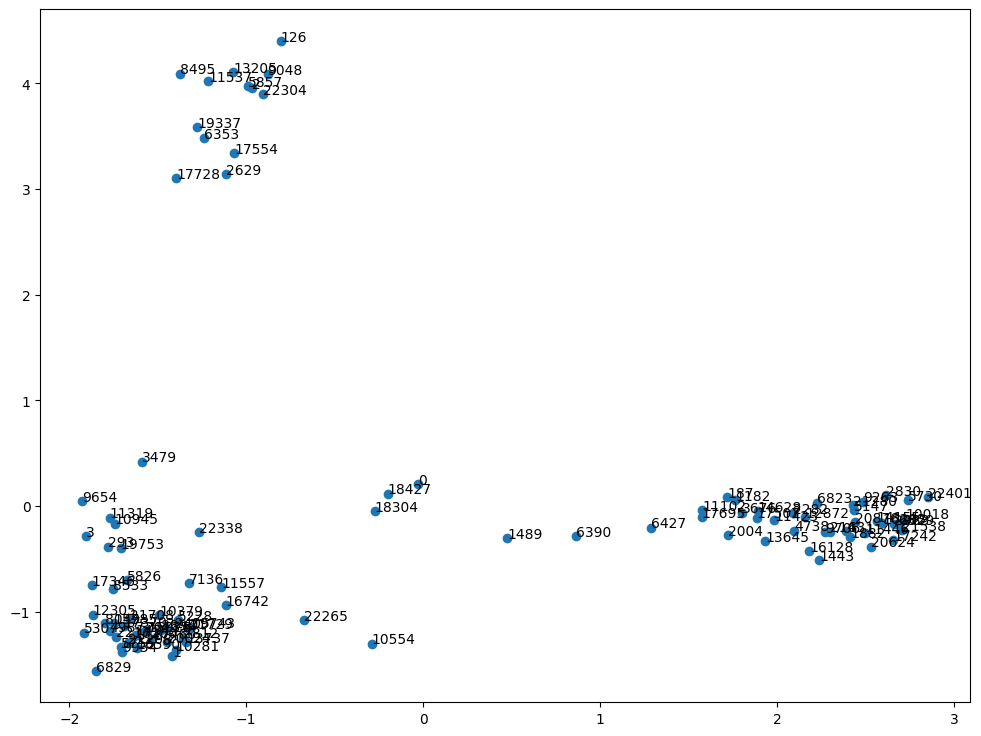

In [35]:
plot_nodes(numbers[:100])

In [37]:
# save the node embeddings
model.wv.save_word2vec_format('embedding_8-1-24.csv')
# save the model for later use (useful when node2Vec takes lots of time/memory to generate node embeddings)
model.save('model')

from google.colab import files
files.download("embedding_8-1-24.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------------------------------------

----------------------------------------------

----------------------------------------------

ΓΙΑ ΤΟ ΕΡΩΤΗΜΑ Α2
--

In [38]:
print(model)

# το Word2Vec μοντελο ειναι αποθηκευμενο στη μεταβλητη 'model'

Word2Vec<vocab=22470, vector_size=100, alpha=0.03>


In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#embedding = pd.read_csv('embedding.csv')

#print(embedding)

import io
from google.colab import files
uploaded_embedding_8_1_2024 = files.upload()
embedding = pd.read_csv(io.BytesIO(uploaded_embedding_8_1_2024['embedding_8-1-2024.csv']))

Saving embedding_8-1-2024.csv to embedding_8-1-2024.csv


In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#embedding = pd.read_csv('embedding.csv')

#print(embedding)

import io
from google.colab import files
uploaded_transposede_embedding_arxiko = files.upload()
transposed_embedding_arxiko= pd.read_csv(io.BytesIO(uploaded_transposede_embedding_arxiko['transposed_output_file_embedding_arxiko.csv']))

Saving transposed_output_file_embedding_arxiko.csv to transposed_output_file_embedding_arxiko.csv


In [55]:
"""
df = pd.DataFrame(embedding)

dff = pd.DataFrame(embedding,columns=["22470","100"])

print()
print()
print()

print(embedding)

print()
print()

print()
print()


print(df)

print()
print()

print(df.head())

print()
print()

print(dff)

print()
print()

print(dff.head())

"""

df = pd.DataFrame(transposed_embedding_arxiko)

dff = pd.DataFrame(transposed_embedding_arxiko,columns=["19743","16895.0"])

print('keno')
print('keno')
print('keno')

print(transposed_embedding_arxiko)

print('keno')
print('keno')
print('keno')
print('keno')
print('keno')

print(df)

print('keno')
print('keno')

print(df.head())

print('keno')
print('keno')

print(dff)

print('keno')
print('keno')

print(dff.head())



keno
keno
keno
       19743   16895.0   21729.0   14497.0    1387.0   10379.0   19347.0  \
0  -0.262321 -0.117795 -0.254252 -0.043746 -0.512994 -0.233981  0.487257   
1   0.094853  0.616857  0.086391  0.534867  0.404269  0.442493  0.570377   
2  -0.213509  0.046281 -0.241667 -0.136782 -0.130600  0.214475  0.215984   
3   0.283292 -0.264854  0.209355 -0.332551 -0.085997 -0.163918 -0.162144   
4   0.198227  0.074405  0.130649  0.157188  0.405259 -0.148055 -0.482692   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.696084  0.564065  0.673389  0.731017  0.778082  0.410177  0.416231   
96  0.395251  0.000117  0.338207  0.415689 -0.057021  0.594491  0.106124   
97 -0.488594 -0.147430 -0.482678 -0.146078 -0.046770 -0.069293  0.353672   
98  0.038081 -0.192835  0.019380 -0.114189 -0.309950  0.074768 -0.200958   
99 -0.030851 -0.024635 -0.050163 -0.208637 -0.094481 -0.293119  0.354239   

     21120.0    2442.0     701.0  ...   11093.0    2295.0     418.0    1

In [56]:
X = df.drop('19743', axis=1)
Y = df['19743']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
from sklearn.svm import SVR

svm_classifier = SVR(kernel='linear')  # You can choose different kernels like 'rbf' or 'poly'
svm_classifier.fit(X_train_scaled, Y_train)

SVR(kernel='linear')

---------------

In [81]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your CSV file
csv_file_path = 'transposed_output_file_embedding_arxiko.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)

# Assuming your target column is named 'target', adjust this based on your actual column name
target_column = '19743'
X = df.iloc[:, :12470]  # Select the first 12470 columns as features
y = df[target_column]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVR(kernel='linear')  # εβαλα svr και οχι svc γιατι εβγαζε error ValueError: " Unknown label type: 'continuous' ", ευθνεται το οτι ειναι δεκαδικες οι τιμες στο csv αρχειο των node embeddings
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)


"\n# Evaluate the accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy: {accuracy * 100:.2f}%')\n"

In [15]:
'''
import csv

# Input file name and output file name
input_file = 'transposed_output_file_embedding_arxiko.csv'
output_file = 'transposed_output_file_embedding_arxiko_xwris_dekadiko_sth_1h_grammh.csv'

# Read the CSV file
with open(input_file, 'r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Process the first row and remove decimal points
first_row = rows[0]
first_row_without_decimal = [value.replace('.', '') for value in first_row]

# Update the first row in the list
rows[0] = first_row_without_decimal

# Write the updated data to the output file
with open(output_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

print(f"Decimal points removed from the first row and saved to {output_file}")

from google.colab import files
files.download("transposed_output_file_embedding_arxiko_xwris_dekadiko_sth_1h_grammh.csv")

'''

Decimal points removed from the first row and saved to transposed_output_file_embedding_arxiko_xwris_dekadiko_sth_1h_grammh.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
'''
'''
import io
from google.colab import files
uploaded_transposede_embedding_arxiko = files.upload()
transposed_embedding_arxiko= pd.read_csv(io.BytesIO(uploaded_transposede_embedding_arxiko['transposed_output_file_embedding_arxiko.csv']))
'''

'''
import io
from google.colab import files
uploaded_embedding_arxiko = files.upload()
uploaded_embedding_arxiko= pd.read_csv(io.BytesIO(uploaded_embedding_arxiko['embedding_arxiko.csv']))
'''
'''
# Load your CSV file
csv_file_path = 'transposed_output_file_embedding_arxiko_xwris_dekadiko_sth_1h_grammh.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)
'''
'''
# Load your CSV file
csv_file_path = 'embedding_arxiko.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)
'''
'''
# Assuming your target column is named 'target', adjust this based on your actual column name
target_column = '19743'
X = df.iloc[:, :12470]  # Select the first 12470 columns as features
y = df[target_column]  # Target variable
'''
'''
# Assuming your target column is named 'target', adjust this based on your actual column name
target_column = '22470'
X = df.iloc[:, :12470]  # Select the first 12470 columns as features
y = df[target_column]  # Target variable

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')  # Use SVC for classification
svm_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_classifier.predict(X_val)

# Evaluate the accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
#val_accuracy = SVR.score(X_test, y_test)
print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the test set
y_test_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

'''


ΕΡΩΤΗΜΑ Α3
---

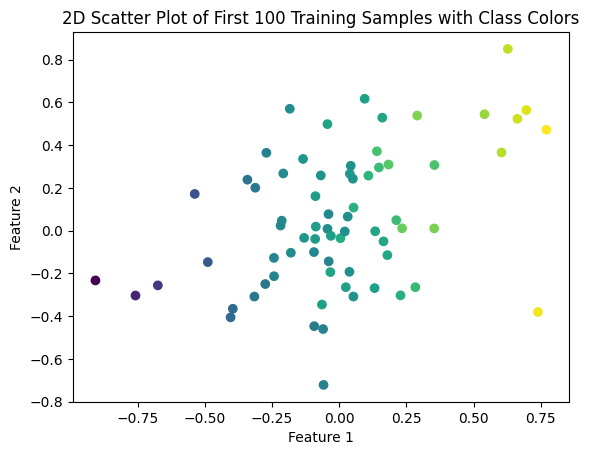

In [10]:


# Get the predictions for the first 100 samples
X_first_100 = X_train.iloc[:100, :]
y_first_100 = y_train.iloc[:100]
predictions = svm_classifier.predict(X_first_100)

import matplotlib.pyplot as plt
# Create a scatter plot with different colors for each class
plt.scatter(X_first_100.iloc[:, 0], X_first_100.iloc[:, 1], c=predictions, cmap='viridis')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot of First 100 Training Samples with Class Colors') #SVR

# Show the plot
plt.show()

-------------

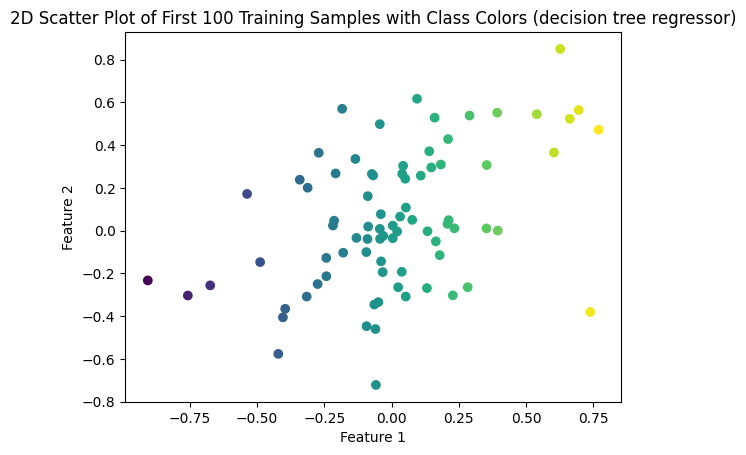

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load your CSV file
csv_file_path = 'transposed_output_file_embedding_arxiko.csv'  # Replace with the actual path to your CSV file
df_dt = pd.read_csv(csv_file_path)

# Assuming your target column is named 'target', adjust this based on your actual column name
target_column = '19743'
X_dt = df_dt.iloc[:, :3000]  # Select the first 3000 columns as features
y_dt = df_dt[target_column]  # Target variable

# Split the dataset into training and testing sets
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

# Train the Random Forest classifier
dt_classifier = DecisionTreeRegressor(random_state=120)  # You can adjust hyperparameters as needed
dt_classifier.fit(X_train_dt, y_train_dt)

# Get the predictions for the first 100 samples
X_first_100_dt = X_train_dt.iloc[:100, :]
y_first_100_dt = y_train_dt.iloc[:100]
predictions_dt = dt_classifier.predict(X_first_100_dt)

# Create a scatter plot with different colors for each class
plt.scatter(X_first_100_dt.iloc[:, 0], X_first_100_dt.iloc[:, 1], c=predictions_dt, cmap='viridis')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot of First 100 Training Samples with Class Colors (decision tree regressor)')

# Show the plot
plt.show()


ΓΙΑ ΤΟ ΕΡΩΤΗΜΑ Α4
--
Most similar nodes

Word2Vec.most_similar(positive=[], negative=[], topn=10, restrict_vocab=None, indexer=None)[source]

Find the top-N most similar words. Positive words contribute positively towards the similarity, negative words negatively.

This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

If topn is False, most_similar returns the vector of similarity scores.

restrict_vocab is an optional integer which limits the range of vectors which are searched for most-similar values. For example, restrict_vocab=10000 would only check the first 10000 word vectors in the vocabulary order. (This may be meaningful if you’ve sorted the vocabulary by descending frequency.)


In [68]:
# most similar nodes to node '1'
for node, _ in model.wv.most_similar(1):
    print((node, _))

(19167, 0.8261498212814331)
(8533, 0.7809709310531616)
(10281, 0.7479076981544495)
(5755, 0.7270395159721375)
(6829, 0.725120484828949)
(2812, 0.724591851234436)
(8519, 0.7140864729881287)
(5228, 0.7133330702781677)
(15785, 0.7106519937515259)
(22405, 0.6988187432289124)


In [83]:
#this takes a lot of time
nx.draw_networkx(G)


KeyboardInterrupt: 

----------------------------------

-----------------------------------------

-----------------------------------------

ΓΙΑ ΤΑ ΕΡΩΤΗΜΑΤΑ Β1 ΚΑΙ Β2
--

For node2vec just use the following code

In [20]:
import networkx as nx
from node2vec import Node2Vec
#from karateclub import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=50, workers=4)

# Embed nodes
model_node2vec = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/22470 [00:00<?, ?it/s]

In [21]:
print(model_node2vec)

Word2Vec<vocab=22470, vector_size=64, alpha=0.025>


In [24]:
# Look for most similar nodes
model_node2vec.wv.most_similar('1')  # Output node names are always strings

[('8533', 0.8813713192939758),
 ('17460', 0.8676617741584778),
 ('6829', 0.8577859997749329),
 ('5228', 0.8556814789772034),
 ('10281', 0.8525681495666504),
 ('22405', 0.849535346031189),
 ('14562', 0.8485879898071289),
 ('16260', 0.8407711386680603),
 ('5755', 0.8396781086921692),
 ('2812', 0.8390709757804871)]

In [31]:
# Save embeddings for later use
model_node2vec.wv.save_word2vec_format('node2vec_embedding_8-1-24.csv')

# Save model for later use
model_node2vec.save('model_node2vec')





'''
# save the node embeddings
model.wv.save_word2vec_format('embedding_8-1-24.csv')
# save the model for later use (useful when node2Vec takes lots of time/memory to generate node embeddings)
model.save('model')

from google.colab import files
files.download("embedding_8-1-24.csv")
'''

'\n# save the node embeddings\nmodel.wv.save_word2vec_format(\'embedding_8-1-24.csv\')\n# save the model for later use (useful when node2Vec takes lots of time/memory to generate node embeddings)\nmodel.save(\'model\')\n\nfrom google.colab import files\nfiles.download("embedding_8-1-24.csv")\n'

In [32]:
from google.colab import files
files.download("node2vec_embedding_8-1-24.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
print(model_node2vec)

Word2Vec<vocab=22470, vector_size=64, alpha=0.025>


In [ ]:
# Look for most similar nodes
model_node2vec.wv.most_similar('1')  # Output node names are always strings

[('8533', 0.8813713192939758),
 ('17460', 0.8676617741584778),
 ('6829', 0.8577859997749329),
 ('5228', 0.8556814789772034),
 ('10281', 0.8525681495666504),
 ('22405', 0.849535346031189),
 ('14562', 0.8485879898071289),
 ('16260', 0.8407711386680603),
 ('5755', 0.8396781086921692),
 ('2812', 0.8390709757804871)]

--------------

-------------------

ΕΡΩΤΗΜΑ Β2
---

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#embedding = pd.read_csv('embedding.csv')

#print(embedding)

import io
from google.colab import files
uploaded_transposed_output_file_node2vec_embedding_8_1_24 = files.upload()
transposed_output_file_node2vec_embedding_8_1_24 = pd.read_csv(io.BytesIO(uploaded_transposed_output_file_node2vec_embedding_8_1_24['transposed_output_file_node2vec_embedding_8-1-24.csv']))

Saving transposed_output_file_node2vec_embedding_8-1-24.csv to transposed_output_file_node2vec_embedding_8-1-24.csv


In [ ]:

X = df.drop('19743', axis=1)
Y = df['19743']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:


df = pd.DataFrame(transposed_output_file_node2vec_embedding_8_1_24)

dff = pd.DataFrame(transposed_output_file_node2vec_embedding_8_1_24,columns=["19743","21729.0"])

print('keno')
print('keno')
print('keno')

print(transposed_output_file_node2vec_embedding_8_1_24)

print('keno')
print('keno')
print('keno')
print('keno')
print('keno')

print(df)

print('keno')
print('keno')

print(df.head())

print('keno')
print('keno')

print(dff)

print('keno')
print('keno')

print(dff.head())



keno
keno
keno
       19743   21729.0   16895.0     701.0   14497.0   21120.0   11003.0  \
0   0.403002  0.384249  0.447825  0.332349  0.580945  0.386026 -0.078126   
1  -0.250286 -0.261870 -0.228494 -0.203785 -0.559450 -0.259257 -0.641301   
2   0.126646  0.159392 -0.169741 -0.480680 -0.364139  0.312932  0.410328   
3   0.021633  0.061992  0.132208 -0.045536  0.041519  0.015297  0.175837   
4  -0.094265 -0.126781  0.265226  0.320190  0.229911 -0.008531  0.129742   
..       ...       ...       ...       ...       ...       ...       ...   
59  0.365035  0.356272  0.235628  0.789247  0.243449  0.658778  0.272307   
60 -0.425083 -0.485354 -0.457986 -0.634842 -0.739370 -0.860865 -0.470458   
61 -0.073936 -0.008588 -0.176798 -0.532387 -0.158629 -0.142538  0.063726   
62 -0.093478 -0.111050  0.038722 -0.476523  0.181839  0.001771 -0.103005   
63  0.126374  0.073212 -0.117598  0.264716 -0.279168  0.325656 -0.252725   

      1387.0   10379.0   19347.0  ...   19414.0    7059.0   15139.0   13

-------------------------
-------------------------
-------------------------

In [10]:

X = df.drop('19743', axis=1)
Y = df['19743']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.svm import SVR

svm_classifier = SVR(kernel='linear')  # You can choose different kernels like 'rbf' or 'poly'
svm_classifier.fit(X_train_scaled, Y_train)

SVR(kernel='linear')

In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your CSV file
csv_file_path = 'transposed_output_file_node2vec_embedding_8-1-24.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(csv_file_path)

# Assuming your target column is named 'target', adjust this based on your actual column name
target_column = '19743'
X = df.iloc[:, :12470]  # Select the first 12470 columns as features
y = df[target_column]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVR(kernel='linear')  # εβαλα svr και οχι svc γιατι εβγαζε error ValueError: " Unknown label type: 'continuous' ", ευθνεται το οτι ειναι δεκαδικες οι τιμες στο csv αρχειο των node embeddings
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

"""
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

"\n# Evaluate the accuracy\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Accuracy: {accuracy * 100:.2f}%')\n"

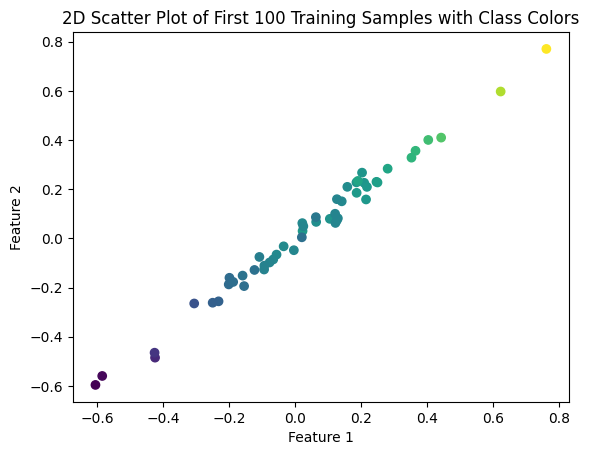

In [16]:


# Get the predictions for the first 100 samples
X_first_100 = X_train.iloc[:100, :]
y_first_100 = y_train.iloc[:100]
predictions = svm_classifier.predict(X_first_100)

import matplotlib.pyplot as plt
# Create a scatter plot with different colors for each class
plt.scatter(X_first_100.iloc[:, 0], X_first_100.iloc[:, 1], c=predictions, cmap='viridis')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot of First 100 Training Samples with Class Colors') #SVR

# Show the plot
plt.show()